In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data
df = pd.read_csv(r'C:\Users\Maintenant prêt\Desktop\PROJECTS\Project5\Data\train.csv')

In [3]:
df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [5]:
df = df.set_index('Store')

In [6]:
df.shape

(1017209, 8)

In [7]:
# Extracting weekdays, weekends, numbure of days to holidays, and number of days after holiday column fro Train_df
df['Date'] = pd.to_datetime(df['Date'])
df['Weekday'] = df['Date'].dt.dayofweek
df['Weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)
df['Days_to_Holiday'] = df['Date'] - df['Date'].min()
df['Days_to_Holiday'] = df['Days_to_Holiday'].apply(lambda x: x.days)
df['Days_after_Holiday'] = df['Date'].max() - df['Date']
df['Days_after_Holiday'] = df['Days_after_Holiday'].apply(lambda x: x.days)

# extract the begining of month, midel month, and end of month
df['Month_Begin'] = df['Date'].apply(lambda x: 1 if x.day == 1 else 0)
df['Month_Middle'] = df['Date'].apply(lambda x: 1 if x.day == 15 else 0)
df['Month_End'] = df['Date'].apply(lambda x: 1 if x.day == 31 else 0)

# Extract weeks from DayofWeek column
df['Week'] = df['Date'].dt.isocalendar().week
#Extract weekly sales
df['Weekly_Sales'] = df.groupby(['Store', 'Week'])['Sales'].transform('sum')


In [8]:
df.head()

DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
Store                                                                     
1              5 2015-07-31   5263        555     1      1            0   
2              5 2015-07-31   6064        625     1      1            0   
3              5 2015-07-31   8314        821     1      1            0   
4              5 2015-07-31  13995       1498     1      1            0   
5              5 2015-07-31   4822        559     1      1            0   

       SchoolHoliday  Weekday  Weekend  Days_to_Holiday  Days_after_Holiday  \
Store                                                                         
1                  1        4        0              941                   0   
2                  1        4        0              941                   0   
3                  1        4        0              941                   0   
4                  1        4        0              941                   0   
5                  1        4        0              941                   0   

       Month_Begin  Month_Middle  Month_End  Week  Weekly_Sales  
Store                                                            
1                0             0          1    31         88748  
2                0             0          1    31         98899  
3                0             0          1    31        140580  
4                0             0          1    31        186442  
5                0             0          1    31         95080

In [7]:

# Extract sales per customer, sales per day, and sales per week
#df['Sales_per_Customer'] = df['Weekly_Sales'] / df['Customers']
#df['Sales_per_Day'] = df['Weekly_Sales'] / df['Days_to_Holiday']
#df['Sales_per_Week'] = df['Weekly_Sales'] / df['Week']

In [9]:
df.isna().sum()

DayOfWeek             0
Date                  0
Sales                 0
Customers             0
Open                  0
Promo                 0
StateHoliday          0
SchoolHoliday         0
Weekday               0
Weekend               0
Days_to_Holiday       0
Days_after_Holiday    0
Month_Begin           0
Month_Middle          0
Month_End             0
Week                  0
Weekly_Sales          0
dtype: int64

In [9]:
# Drop rows with missing values in 'Sales_per_Customer'
#df = df.dropna(subset=['Sales_per_Customer']) 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017209 entries, 1 to 1115
Data columns (total 17 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   DayOfWeek           1017209 non-null  int64         
 1   Date                1017209 non-null  datetime64[ns]
 2   Sales               1017209 non-null  int64         
 3   Customers           1017209 non-null  int64         
 4   Open                1017209 non-null  int64         
 5   Promo               1017209 non-null  int64         
 6   StateHoliday        1017209 non-null  object        
 7   SchoolHoliday       1017209 non-null  int64         
 8   Weekday             1017209 non-null  int32         
 9   Weekend             1017209 non-null  int64         
 10  Days_to_Holiday     1017209 non-null  int64         
 11  Days_after_Holiday  1017209 non-null  int64         
 12  Month_Begin         1017209 non-null  int64         
 13  Month_Middle        

In [11]:
df['Week'] = df['Week'].astype('int64')
# one hote encode StateHoliday
df = pd.get_dummies(df, columns=['StateHoliday'])
# Drop the datetime column
df = df.drop('Date', axis=1) 

In [12]:
#df = df.reset_index(drop=True)

In [15]:
#df = df.reset_index(drop=True).copy()

In [ ]:
#df = df.set_index('DayOfWeek')

In [17]:
#df = df.drop(df.columns[0], axis=1)

In [12]:
df

DayOfWeek  Sales  Customers  Open  Promo  SchoolHoliday  Weekday  \
Store                                                                     
1              5   5263        555     1      1              1        4   
2              5   6064        625     1      1              1        4   
3              5   8314        821     1      1              1        4   
4              5  13995       1498     1      1              1        4   
5              5   4822        559     1      1              1        4   
...          ...    ...        ...   ...    ...            ...      ...   
1111           2      0          0     0      0              1        1   
1112           2      0          0     0      0              1        1   
1113           2      0          0     0      0              1        1   
1114           2      0          0     0      0              1        1   
1115           2      0          0     0      0              1        1   

       Weekend  Days_to_Holiday  Days_after_Holiday  Month_Begin  \
Store                                                              
1            0              941                   0            0   
2            0              941                   0            0   
3            0              941                   0            0   
4            0              941                   0            0   
5            0              941                   0            0   
...        ...              ...                 ...          ...   
1111         0                0                 941            1   
1112         0                0                 941            1   
1113         0                0                 941            1   
1114         0                0                 941            1   
1115         0                0                 941            1   

       Month_Middle  Month_End  Week  Weekly_Sales  StateHoliday_0  \
Store                                                                
1                 0          1    31         88748           False   
2                 0          1    31         98899           False   
3                 0          1    31        140580           False   
4                 0          1    31        186442           False   
5                 0          1    31         95080           False   
...             ...        ...   ...           ...             ...   
1111              0          0     1         65535           False   
1112              0          0     1        119666           False   
1113              0          0     1         85433           False   
1114              0          0     1        286699           False   
1115              0          0     1         77286           False   

       StateHoliday_0  StateHoliday_a  StateHoliday_b  StateHoliday_c  
Store                                                                  
1                True           False           False           False  
2                True           False           False           False  
3                True           False           False           False  
4                True           False           False           False  
5                True           False           False           False  
...               ...             ...             ...             ...  
1111            False            True           False           False  
1112            False            True           False           False  
1113            False            True           False           False  
1114            False            True           False           False  
1115            False            True           False           False  

[1017209 rows x 20 columns]

[-9.27800622e+02  4.47100469e+00  2.66390291e+03  1.23840406e+03
  1.85560553e+02  7.42178951e+02  4.67784673e+02  2.37664691e-01
 -3.99766230e-14  3.22827017e+02  1.83069395e+02  6.01268971e+02
  2.35780508e+01  1.85404777e-02  7.19985043e+01  1.65809471e+02
 -5.50043009e+02 -9.51549115e+02  0.00000000e+00]


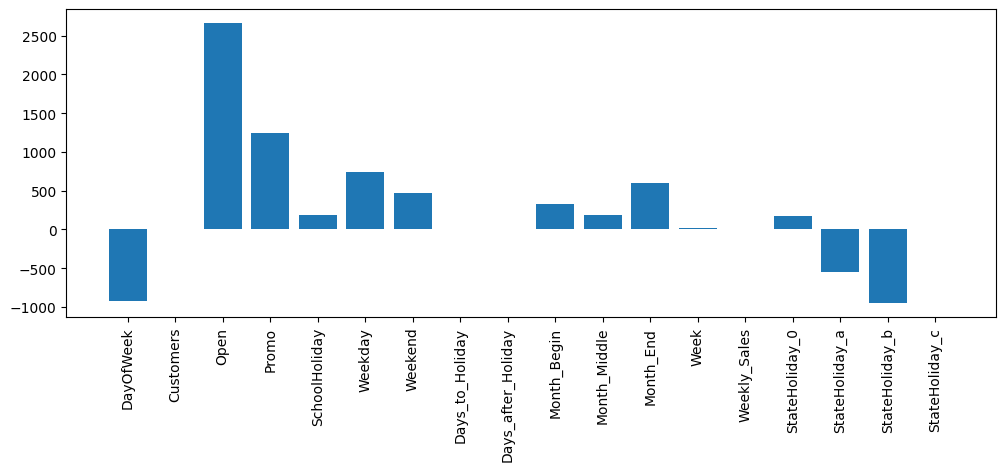

In [13]:
# useing lasso for feature selction
from sklearn.linear_model import Lasso
X = df.drop("Sales", axis=1).values
y= df['Sales'].values
names = df.drop('Sales', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef= lasso.fit(X, y).coef_
# Compute and print the coefficients
print(lasso_coef)
plt.figure(figsize=(12, 4))
plt.bar(names, lasso_coef)
plt.xticks(rotation=90)
plt.show()

In [14]:
# droping the less corelated variables
df = df.drop(['Weekly_Sales', 'StateHoliday_c', 'Days_after_Holiday', 'Days_to_Holiday', 'Customers'], axis=1) 

In [15]:
df

DayOfWeek  Sales  Open  Promo  SchoolHoliday  Weekday  Weekend  \
Store                                                                   
1              5   5263     1      1              1        4        0   
2              5   6064     1      1              1        4        0   
3              5   8314     1      1              1        4        0   
4              5  13995     1      1              1        4        0   
5              5   4822     1      1              1        4        0   
...          ...    ...   ...    ...            ...      ...      ...   
1111           2      0     0      0              1        1        0   
1112           2      0     0      0              1        1        0   
1113           2      0     0      0              1        1        0   
1114           2      0     0      0              1        1        0   
1115           2      0     0      0              1        1        0   

       Month_Begin  Month_Middle  Month_End  Week  StateHoliday_0  \
Store                                                               
1                0             0          1    31           False   
2                0             0          1    31           False   
3                0             0          1    31           False   
4                0             0          1    31           False   
5                0             0          1    31           False   
...            ...           ...        ...   ...             ...   
1111             1             0          0     1           False   
1112             1             0          0     1           False   
1113             1             0          0     1           False   
1114             1             0          0     1           False   
1115             1             0          0     1           False   

       StateHoliday_0  StateHoliday_a  StateHoliday_b  
Store                                                  
1                True           False           False  
2                True           False           False  
3                True           False           False  
4                True           False           False  
5                True           False           False  
...               ...             ...             ...  
1111            False            True           False  
1112            False            True           False  
1113            False            True           False  
1114            False            True           False  
1115            False            True           False  

[1017209 rows x 15 columns]

## spliting the dataset

In [ ]:
# matrix of features the sales column is out prediction target
x = df.drop(['Sales'], axis=1).iloc[:, 1:]  # Start from DayOfWeek column

y = df['Sales']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
# matrix of features the sales column is out prediction target
X = df.drop(['Sales'], axis=1)
y = df['Sales']

In [17]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.head()

DayOfWeek  Open  Promo  SchoolHoliday  Weekday  Weekend  Month_Begin  \
Store                                                                         
344            7     0      0              0        6        1            0   
108            7     0      0              0        6        1            0   
299            5     1      0              0        4        0            0   
402            5     1      0              0        4        0            0   
742            3     1      1              0        2        0            0   

       Month_Middle  Month_End  Week  StateHoliday_0  StateHoliday_0  \
Store                                                                  
344               0          0    25           False            True   
108               0          0    46           False            True   
299               0          0    36           False            True   
402               0          0    17           False            True   
742               0          0    25           False            True   

       StateHoliday_a  StateHoliday_b  
Store                                  
344             False           False  
108             False           False  
299             False           False  
402             False           False  
742             False           False

In [19]:
X_train.shape

(813767, 14)

In [20]:
y_train.shape

(813767,)

In [21]:
X_test.shape

(203442, 14)

In [22]:
y_test.shape

(203442,)

In [23]:
# feature scaling with standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [61]:
#np.isinf(X_train)

Store  DayOfWeek  Customers   Open  Promo  SchoolHoliday  Weekday  \
417683  False      False      False  False  False          False    False   
659402  False      False      False  False  False          False    False   
739873  False      False      False  False  False          False    False   
109671  False      False      False  False  False          False    False   
422541  False      False      False  False  False          False    False   
...       ...        ...        ...    ...    ...            ...      ...   
259178  False      False      False  False  False          False    False   
365838  False      False      False  False  False          False    False   
131932  False      False      False  False  False          False    False   
671155  False      False      False  False  False          False    False   
121958  False      False      False  False  False          False    False   

        Weekend  Days_to_Holiday  Days_after_Holiday  ...   Week  \
417683    False            False               False  ...  False   
659402    False            False               False  ...  False   
739873    False            False               False  ...  False   
109671    False            False               False  ...  False   
422541    False            False               False  ...  False   
...         ...              ...                 ...  ...    ...   
259178    False            False               False  ...  False   
365838    False            False               False  ...  False   
131932    False            False               False  ...  False   
671155    False            False               False  ...  False   
121958    False            False               False  ...  False   

        Weekly_Sales  Sales_per_Customer  Sales_per_Day  Sales_per_Week  \
417683         False                True          False           False   
659402         False                True          False           False   
739873         False               False          False           False   
109671         False               False          False           False   
422541         False               False          False           False   
...              ...                 ...            ...             ...   
259178         False                True          False           False   
365838         False               False          False           False   
131932         False               False          False           False   
671155         False               False          False           False   
121958         False               False          False           False   

        StateHoliday_0  StateHoliday_0  StateHoliday_a  StateHoliday_b  \
417683           False           False           False           False   
659402           False           False           False           False   
739873           False           False           False           False   
109671           False           False           False           False   
422541           False           False           False           False   
...                ...             ...             ...             ...   
259178           False           False           False           False   
365838           False           False           False           False   
131932           False           False           False           False   
671155           False           False           False           False   
121958           False           False           False           False   

        StateHoliday_c  
417683           False  
659402           False  
739873           False  
109671           False  
422541           False  
...                ...  
259178           False  
365838           False  
131932           False  
671155           False  
121958           False  

[813767 rows x 23 columns]

In [ ]:
#X_train = X_train[X_train['Sales_per_Customer'] != np.inf] 

In [24]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train

array([[ 1.50336285e+00, -2.21121666e+00, -7.85312004e-01, ...,
         4.35124767e-01, -1.42321776e-01, -8.13579553e-02],
       [ 1.50336285e+00, -2.21121666e+00, -7.85312004e-01, ...,
         4.35124767e-01, -1.42321776e-01, -8.13579553e-02],
       [ 5.01980696e-01,  4.52239718e-01, -7.85312004e-01, ...,
         4.35124767e-01, -1.42321776e-01, -8.13579553e-02],
       ...,
       [ 1.00267177e+00,  4.52239718e-01, -7.85312004e-01, ...,
         4.35124767e-01, -1.42321776e-01, -8.13579553e-02],
       [ 1.28961791e-03,  4.52239718e-01,  1.27337924e+00, ...,
         4.35124767e-01, -1.42321776e-01, -8.13579553e-02],
       [-1.50078362e+00,  4.52239718e-01,  1.27337924e+00, ...,
         4.35124767e-01, -1.42321776e-01, -8.13579553e-02]],
      shape=(813767, 14))

In [26]:
X_test

array([[ 1.50336285, -2.21121666, -0.785312  , ...,  0.43512477,
        -0.14232178, -0.08135796],
       [-1.00009254,  0.45223972,  1.27337924, ...,  0.43512477,
        -0.14232178, -0.08135796],
       [ 1.00267177,  0.45223972, -0.785312  , ...,  0.43512477,
        -0.14232178, -0.08135796],
       ...,
       [ 1.00267177,  0.45223972, -0.785312  , ...,  0.43512477,
        -0.14232178, -0.08135796],
       [ 1.50336285, -2.21121666, -0.785312  , ...,  0.43512477,
        -0.14232178, -0.08135796],
       [ 1.00267177,  0.45223972, -0.785312  , ...,  0.43512477,
        -0.14232178, -0.08135796]], shape=(203442, 14))

## Building the model

In [28]:
from sklearn.ensemble import RandomForestRegressor

classifier_rf = RandomForestRegressor(random_state=0, oob_score=True)
classifier_rf.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=0)

In [27]:
# using Randomforest regreation
from sklearn.ensemble import RandomForestClassifier
classifer_rf = RandomForestClassifier(random_state=0)
classifer_rf.fit(X_train,y_train)

MemoryError: could not allocate 344309760 bytes

In [34]:
import numpy as np

def random_sampling(X, y, sample_size=0.8):
    """
    Performs random sampling on the given data.

    Args:
        X: The feature data (array-like).
        y: The target variable (array-like).
        sample_size: The proportion of data to sample (default: 0.8).

    Returns:
        X_sampled: The sampled feature data.
        y_sampled: The sampled target variable.
    """
    sample_indices = np.random.choice(len(X), int(len(X) * sample_size), replace=False)
    X_sampled = X[sample_indices]
    y_sampled = y[sample_indices]
    return X_sampled, y_sampled

In [35]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=0)

X_train_reduced, y_train_reduced = random_sampling(X_train, y_train)  # Use the defined function

classifier_rf.fit(X_train_reduced, y_train_reduced)

KeyError: '[418160, 422680, 527708, 87313, 151341, 94944, 361148, 283510, 108402, 498958, 514589, 487589, 728885, 46516, 228130, 199688, 760432, 328240, 55071, 665489, 617683, 579351, 638056, 514518, 264386, 261391, 466403, 397945, 256834, 391299, 483458, 658117, 465285, 339329, 460793, 222606, 37821, 342049, 185544, 130492, 235859, 556106, 182332, 525835, 436118, 208269, 517620, 434183, 256134, 256537, 802808, 456964, 712491, 337124, 706646, 578337, 488407, 55593, 341697, 305306, 686994, 764755, 603017, 162204, 776565, 38197, 323499, 154603, 783840, 13843, 727358, 216112, 788411, 564374, 522978, 657572, 135136, 445907, 489007, 428178, 719048, 86103, 1696, 757501, 754610, 151590, 664961, 469084, 253430, 478423, 242698, 303383, 590360, 617372, 529301, 452606, 371733, 333398, 726772, 563756, 749006, 207917, 131803, 675850, 722610, 563521, 789323, 246114, 238252, 9668, 176264, 133732, 655890, 552417, 362502, 411187, 753665, 337917, 730842, 264809, 518808, 296229, 90967, 375413, 700853, 209067, 533844, 165120, 75887, 381471, 763157, 446855, 168295, 421578, 171088, 480972, 600140, 238854, 159949, 446453, 210999, 442624, 797166, 528500, 226930, 444523, 593517, 665435, 48601, 18531, 747021, 171623, 334837, 192249, 40468, 228555, 521790, 167034, 348682, 521706, 539326, 447667, 410607, 728981, 738048, 284217, 281911, 108189, 140363, 510339, 736784, 612294, 262652, 259339, 99564, 685660, 357043, 504843, 163034, 363768, 215576, 186428, 392473, 416335, 21980, 36552, 665693, 131247, 34419, 718782, 487670, 496155, 321927, 440076, 748833, 95754, 786113, 79250, 365813, 416111, 274677, 86945, 30348, 456830, 490909, 166594, 585290, 524282, 472888, 344012, 545325, 554830, 193774, 164649, 115881, 386105, 222560, 650989, 561242, 142572, 120061, 636869, 400586, 275560, 270342, 530595, 305711, 556301, 789582, 666749, 197389, 379397, 270469, 455945, 27864, 2023, 330500, 743783, 361351, 731111, 470010, 287167, 700909, 326145, 655342, 793923, 605668, 79487, 22964, 327316, 638080, 358870, 306670, 40064, 387698, 808237, 348001, 706096, 11705, 135690, 72399, 68827, 255730, 417851, 416748, 625620, 564235, 561532, 706684, 549755, 617356, 244995, 501043, 51081, 393789, 244411, 627821, 584958, 754247, 361220, 732159, 264725, 144566, 279358, 784087, 749062, 144631, 803008, 664820, 421502, 318633, 571467, 540052, 135434, 310388, 683511, 223825, 10198, 87121, 59107, 619020, 194328, 9537, 66356, 18785, 606394, 434441, 183319, 551812, 303126, 407596, 500998, 337557, 25352, 786001, 813604, 678828, 372338, 442981, 513187, 693348, 775955, 52865, 761740, 604089, 138777, 301132, 293060, 8853, 767778, 60680, 760901, 226701, 141808, 426884, 209443, 606576, 551579, 146680, 116256, 708820, 464819, 356314, 199100, 86519, 602320, 203204, 425030, 49871, 528387, 545712, 411029, 752168, 332097, 49343, 811170, 18114, 621566, 599203, 553517, 152449, 560640, 397724, 442257, 781998, 715548, 238598, 298032, 781449, 552995, 584556, 299340, 802014, 125421, 593432, 335171, 310651, 85153, 342505, 303580, 173350, 68975, 628626, 654357, 676261, 745263, 474131, 179143, 29080, 390272, 275235, 604496, 126997, 257587, 120947, 802233, 700990, 145548, 404803, 211334, 440309, 440317, 325854, 629676, 196799, 590823, 484196, 770769, 6610, 640032, 660406, 414846, 34231, 746563, 245788, 395749, 582368, 397590, 98405, 335464, 360468, 171861, 665080, 111254, 663471, 177626, 233785, 564143, 516634, 432316, 180562, 730248, 287594, 637700, 379143, 240840, 699260, 94161, 358053, 686987, 412764, 811716, 654335, 701661, 642657, 27221, 615901, 34196, 490255, 715180, 305727, 474452, 16443, 101385, 268771, 175680, 402067, 596274, 310468, 368131, 716620, 486413, 737966, 9418, 137862, 245058, 241889, 166147, 205376, 89746, 157576, 719515, 310018, 6702, 718251, 619290, 747408, 99302, 395266, 478636, 320943, 98576, 621690, 323347, 468779, 424774, 676528, 311132, 772744, 290084, 504940, 45970, 467848, 210633, 514494, 434424, 518346, 141645, 781578, 309631, 143478, 602373, 743477, 211821, 676511, 180320, 38585, 578786, 216200, 219868, 737545, 403415, 283183, 455097, 206852, 810385, 340454, 312388, 136518, 757841, 85593, 418799, 60339, 454168, 80238, 398669, 557249, 670980, 626102, 421118, 247716, 310421, 681970, 602412, 183831, 371340, 519744, 517554, 644009, 81980, 681504, 595119, 729283, 250669, 602097, 520305, 9413, 270530, 145025, 37072, 56774, 456715, 114199, 421147, 623626, 649050, 255216, 541975, 205922, 384954, 73924, 702001, 482268, 490816, 181710, 34129, 659874, 2249, 234158, 166117, 441820, 440387, 750791, 736014, 242506, 619966, 485361, 214247, 151388, 335069, 769811, 505637, 374203, 318175, 180917, 318763, 59004, 707181, 154063, 438437, 609513, 334309, 530816, 414945, 139330, 295629, 758553, 252295, 578846, 135720, 731902, 241003, 328816, 136466, 49446, 452899, 328757, 49521, 319789, 411915, 115846, 591258, 320190, 644788, 389456, 476112, 128428, 754562, 680289, 393294, 572426, 691021, 115726, 115270, 778387, 400600, 237789, 31899, 524677, 586338, 655531, 407639, 102785, 629871, 674849, 555602, 304731, 324679, 343474, 783496, 87086, 230372, 206300, 187559, 626119, 809731, 411930, 301542, 787186, 808928, 46593, 12851, 278893, 22631, 55396, 77812, 251876, 542232, 784444, 743366, 265502, 777689, 665958, 38818, 119239, 44045, 789658, 675091, 422025, 139094, 187608, 364399, 639021, 422285, 389486, 212797, 234480, 510497, 21899, 6501, 279093, 396503, 259646, 447402, 629191, 115781, 321785, 574368, 694054, 80444, 3464, 657591, 387878, 510533, 532091, 672208, 163067, 581334, 342903, 106603, 377663, 534837, 287882, 483388, 675119, 528012, 332563, 679491, 812868, 73266, 184778, 375304, 333022, 456181, 389384, 685052, 224608, 196434, 542153, 53984, 174505, 188063, 586973, 304993, 441950, 206785, 696835, 555691, 512080, 298817, 546801, 166400, 799744, 191255, 105988, 506094, 522049, 66119, 184806, 572923, 440930, 293182, 694827, 83950, 248295, 18821, 35473, 664513, 319228, 622439, 194177, 135866, 699110, 122747, 359653, 96632, 743039, 650328, 516570, 550604, 334484, 34397, 783862, 132289, 610568, 493759, 727314, 328989, 139120, 111528, 523013, 357374, 196117, 254744, 432895, 7665, 352694, 91249, 170202, 123999, 43191, 368356, 620967, 752351, 104180, 729229, 763906, 241663, 425041, 593328, 209143, 108792, 354928, 420634, 645488, 183376, 727032, 271658, 212866, 618671, 575636, 552193, 215179, 464881, 262815, 447071, 326678, 437907, 89695, 412208, 490529, 657601, 87184, 251686, 585230, 509540, 760449, 502105, 171497, 415860, 369131, 13646, 142629, 809344, 475145, 596815, 164157, 379490, 112417, 604074, 691471, 343826, 342904, 215652, 716762, 726018, 289527, 423627, 249100, 174814, 706780, 643088, 226503, 47196, 797803, 646104, 695727, 172315, 580482, 406265, 118209, 658066, 708996, 169479, 398430, 312368, 477591, 462548, 796826, 65693, 279612, 337037, 704968, 422251, 271744, 805494, 3330, 498306, 561477, 427454, 697889, 15920, 229989, 312321, 17604, 686620, 139888, 43545, 455142, 604810, 437311, 771994, 629273, 15217, 404272, 788811, 453338, 754962, 436832, 94318, 201938, 364641, 681670, 616490, 617062, 92510, 750951, 713326, 581189, 109133, 435510, 811891, 534932, 798693, 344700, 253312, 122771, 675162, 296662, 12896, 591997, 368723, 107700, 809565, 733029, 294826, 528578, 806808, 791016, 508182, 79454, 527770, 374416, 486347, 435737, 242745, 737847, 419696, 561616, 617842, 87645, 82954, 663458, 750853, 54371, 1802, 660558, 416429, 447149, 45637, 129387, 67575, 530507, 328349, 538623, 703939, 556391, 719218, 287985, 64870, 572477, 72566, 166119, 741966, 596908, 659613, 55015, 368407, 571100, 469806, 704597, 447996, 249411, 113397, 336065, 229646, 465438, 491992, 538708, 283493, 451648, 282484, 421520, 565313, 12983, 389067, 132150, 624633, 473486, 633466, 219370, 392704, 485829, 345846, 291807, 715155, 648819, 164035, 62364, 50455, 192194, 513665, 287988, 70224, 567628, 352277, 394304, 541480, 630007, 687527, 415944, 150553, 568605, 483862, 8816, 742717, 484691, 265778, 413965, 553167, 258459, 244375, 757803, 449145, 306640, 768382, 332798, 542475, 519600, 127541, 217606, 152916, 652228, 63605, 374986, 119427, 177730, 14196, 441698, 606339, 182055, 589931, 92084, 337490, 9737, 764756, 183782, 801709, 772730, 514345, 15308, 306823, 613084, 152236, 256448, 372495, 139837, 526624, 809922, 805906, 544890, 400048, 54390, 179520, 135170, 578103, 590397, 770462, 697188, 615193, 426582, 315983, 314009, 117631, 778344, 366969, 772887, 531190, 19092, 112086, 591925, 30980, 316934, 805839, 329097, 475531, 422339, 703201, 102993, 799258, 190990, 760248, 97971, 402896, 594243, 494492, 640700, 273476, 672956, 30857, 383067, 356988, 500556, 381141, 347037, 73030, 569862, 96210, 334260, 532333, 405816, 546005, 719780, 320980, 450456, 703225, 750871, 548145, 757425, 113218, 125516, 226023, 55070, 584082, 629418, 388245, 783909, 722293, 315162, 419779, 499574, 105977, 143357, 38868, 540196, 163527, 413791, 34950, 413055, 22949, 672690, 126285, 669451, 522729, 259526, 166398, 602645, 704109, 476269, 307861, 69254, 573678, 529434, 138892, 216665, 623995, 148697, 462065, 486224, 429897, 647994, 810994, 426337, 690879, 134226, 135118, 774682, 58315, 156095, 415932, 148991, 684093, 457546, 350443, 811299, 761653, 466103, 401970, 11530, 13025, 323339, 250820, 14047, 407526, 726130, 77453, 353576, 278009, 181868, 605765, 776309, 813275, 114776, 481408, 379789, 522953, 441324, 526889, 776754, 520858, 804067, 19962, 713365, 459576, 664248, 270367, 232598, 224785, 246781, 577676, 417391, 80095, 63242, 264276, 654944, 772694, 623236, 446162, 656674, 454992, 51532, 303351, 540835, 784397, 25414, 73296, 356535, 580432, 263146, 182678, 240566, 51930, 482987, 528976, 529083, 731191, 683068, 367680, 553929, 632864, 741735, 281694, 278703, 43259, 519427, 495593, 263689, 161736, 739172, 781721, 24346, 369646, 302121, 249564, 722186, 614666, 736095, 104039, 241345, 314026, 562670, 49741, 448843, 195951, 298005, 582743, 720736, 283980, 519566, 403218, 297141, 127484, 574657, 705140, 523461, 261100, 239933, 398790, 729604, 717921, 780667, 1766, 206512, 3359, 334454, 653659, 367324, 554074, 492110, 278095, 391205, 530107, 640068, 193422, 774274, 70034, 483902, 748407, 472333, 227380, 347203, 682446, 591955, 478205, 619815, 65188, 102437, 206069, 707878, 160705, 489284, 341003, 656315, 645996, 477722, 561326, 390821, 536851, 132960, 129559, 480033, 276196, 427748, 435023, 464226, 728733, 691472, 202638, 358109, 537044, 127993, 781572, 632748, 799234, 455504, 449057, 716263, 476121, 282930, 574594, 335222, 439362, 544832, 553995, 138564, 610881, 212178, 161762, 723508, 326575, 754400, 415940, 245290, 58663, 193863, 368997, 32874, 614141, 78240, 787686, 534441, 148902, 192156, 186101, 354635, 573463, 166358, 728995, 104043, 98773, 602439, 503583, 433688, 390413, 686548, 614457, 95523, 811077, 394453, 226778, 379626, 299433, 104785, 119585, 718501, 134228, 541273, 563893, 89872, 725725, 150945, 477977, 49624, 225838, 280220, 298832, 25347, 202789, 271512, 112291, 87501, 122844, 385978, 720673, 746307, 327151, 764252, 572950, 547217, 361784, 16739, 33075, 229514, 696082, 521142, 299871, 671400, 680084, 181891, 324139, 482599, 575718, 322706, 84982, 235389, 153332, 247149, 71588, 500686, 807991, 325255, 353030, 236741, 145909, 483553, 593161, 111243, 83449, 320639, 209534, 555912, 132701, 771828, 190275, 70948, 482320, 183530, 524272, 144727, 555986, 357771, 611710, 658552, 417620, 140596, 623005, 501546, 43338, 327413, 245197, 194637, 516128, 34776, 38226, 637310, 255764, 210962, 43090, 563982, 181641, 778386, 398319, 595695, 675399, 717515, 8649, 790323, 655427, 539063, 721154, 48542, 523503, 40748, 28782, 764482, 97614, 363564, 226681, 469786, 619012, 692855, 117147, 62165, 329902, 9237, 489518, 658945, 142105, 365323, 452398, 538201, 35722, 233107, 85295, 1109, 3909, 432365, 800072, 543376, 59900, 328643, 767309, 586855, 208573, 808815, 551388, 115378, 762108, 567185, 471359, 740735, 144789, 127999, 759967, 504581, 723256, 136328, 293286, 658113, 602347, 73816, 600029, 309647, 592187, 545497, 522501, 295610, 438276, 4272, 265841, 11362, 426942, 211789, 200607, 411152, 363615, 726479, 39356, 65529, 85033, 440161, 16947, 441058, 15735, 55018, 476431, 563997, 334011, 243173, 227012, 389825, 382584, 306035, 435999, 387658, 757174, 540872, 792520, 691680, 448338, 75694, 550862, 318117, 496770, 374974, 455676, 298072, 635942, 174261, 550316, 494116, 2567, 590261, 78681, 247010, 561266, 398816, 658794, 700673, 76344, 367041, 629236, 317, 448200, 639739, 204806, 92993, 585922, 337813, 416106, 19963, 660705, 604054, 327177, 628598, 568579, 554482, 703311, 598822, 687213, 340003, 534010, 368820, 237706, 425206, 615021, 797134, 34449, 397624, 41205, 774037, 218820, 257761, 740031, 601322, 288360, 359451, 706305, 351578, 270733, 159518, 534755, 557282, 12954, 561561, 435568, 517921, 719112, 250936, 464241, 409643, 383743, 437832, 706337, 710675, 247136, 133050, 343413, 678631, 510648, 331784, 10396, 255351, 806507, 697230, 426195, 453448, 115746, 51149, 249241, 97488, 262656, 505976, 480865, 723855, 747034, 222416, 543633, 701226, 461413, 364292, 468576, 688451, 808280, 45593, 689163, 369371, 221557, 628004, 528259, 615226, 255573, 203726, 359670, 419982, 474158, 183814, 732438, 730203, 26420, 584340, 20352, 590513, 385239, 170546, 489588, 133600, 22646, 174741, 477430, 201753, 786846, 432310, 730415, 665099, 102082, 440775, 103173, 129414, 769558, 245443, 425291, 453911, 239211, 337577, 671061, 549092, 697115, 375830, 739013, 148131, 113108, 780614, 717212, 232228, 558548, 600149, 257613, 785649, 195003, 579480, 73308, 145078, 384303, 301690, 288837, 503736, 152807, 171031, 781429, 732195, 568698, 724176, 656132, 13237, 430858, 734453, 295485, 137219, 557113, 531594, 248177, 638251, 725126, 703542, 17551, 172694, 529910, 717580, 360454, 734827, 95799, 337393, 604219, 245729, 38046, 786609, 719443, 738270, 554298, 493911, 296614, 130851, 354984, 12173, 622738, 805268, 518118, 313984, 263962, 483123, 796421, 607635, 324065, 407600, 151221, 140351, 564256, 774054, 404143, 77109, 141124, 674324, 249531, 226425, 147156, 300299, 558767, 256314, 727244, 351735, 537302, 292825, 668643, 528247, 108649, 20545, 528946, 622051, 466844, 710108, 256798, 436874, 393494, 347271, 535924, 565009, 753001, 279191, 765327, 774923, 326429, 51002, 124568, 736408, 273539, 367470, 225985, 347961, 737976, 74950, 299634, 520611, 56404, 799474, 648251, 128022, 260428, 429130, 525267, 117332, 719140, 615074, 337560, 649632, 401523, 770594, 48782, 640506, 484080, 704651, 63208, 471157, 813679, 104590, 776673, 675526, 573319, 693494, 668451, 622038, 244278, 404806, 783130, 33974, 39975, 371734, 423815, 741492, 372159, 388194, 442211, 741736, 329411, 694088, 319806, 547139, 717376, 730316, 369075, 788510, 93183, 145408, 338363, 642277, 666628, 478162, 41622, 648978, 72183, 135733, 547951, 589242, 121620, 656920, 805943, 701559, 491769, 392913, 700359, 298474, 78164, 666020, 532569, 406513, 791315, 16649, 60083, 311647, 801278, 52489, 453669, 720327, 53357, 70215, 281219, 414165, 720959, 619591, 391210, 716450, 645704, 660816, 486307, 264653, 77058, 451920, 808650, 650179, 122094, 119933, 8387, 659557, 117191, 134097, 571072, 519304, 301052, 144819, 207637, 276108, 384093, 431586, 599343, 533830, 434272, 566775, 501280, 257349, 502447, 139034, 594609, 24590, 594403, 581703, 734092, 722041, 282978, 353228, 373507, 676203, 649604, 460156, 661249, 103380, 636144, 638752, 541843, 298925, 415447, 313458, 539108, 615050, 447001, 91488, 695253, 86833, 487555, 760112, 800433, 180388, 375790, 203413, 46788, 108652, 132432, 753188, 423312, 360042, 341066, 210073, 20020, 434388, 344473, 274594, 519843, 350572, 764823, 520574, 806831, 517038, 4687, 777021, 52708, 462657, 506126, 262519, 553216, 606292, 91360, 557443, 434888, 486031, 204880, 350869, 627872, 794775, 548012, 728499, 189994, 498166, 473168, 412461, 716035, 646912, 571046, 114448, 633187, 400692, 328068, 632470, 104268, 574948, 326331, 784813, 31830, 359276, 688494, 101849, 248240, 358582, 510508, 58223, 468214, 14615, 406787, 39717, 272244, 751568, 25866, 446111, 122557, 116845, 693512, 583367, 689626, 28495, 577574, 27714, 527876, 614219, 141355, 612568, 164488, 435117, 368779, 348051, 672073, 320469, 538705, 657914, 369194, 376377, 385986, 440979, 186777, 16397, 794717, 291565, 586114, 693127, 91215, 8829, 457849, 103836, 764282, 628448, 245327, 211738, 175977, 641763, 274927, 335996, 452370, 680475, 695487, 225467, 25537, 426136, 751768, 608813, 443864, 55471, 773919, 535978, 681472, 122358, 759715, 520896, 762533, 24098, 623114, 519762, 258515, 705817, 476573, 655615, 711910, 254872, 57984, 457440, 262038, 616207, 366973, 717540, 524521, 498412, 225783, 758013, 656720, 647293, 426660, 803859, 667200, 319749, 734635, 611875, 694612, 270090, 438535, 270052, 577740, 666532, 614648, 134310, 507035, 669876, 28757, 157036, 778402, 799273, 18589, 40176, 214068, 713120, 748384, 345802, 741576, 261980, 677822, 351299, 646502, 249910, 117714, 584961, 98461, 461804, 451980, 143216, 720103, 438349, 250513, 66647, 665921, 188999, 37874, 481022, 640028, 225653, 512720, 246189, 506440, 500442, 272044, 296894, 702827, 131820, 667215, 409230, 334955, 82925, 141874, 173181, 452195, 48047, 767120, 782199, 687143, 340201, 786557, 481262, 392493, 10732, 180105, 599603, 207213, 545300, 732064, 221446, 33286, 400807, 335705, 721634, 738393, 383855, 753628, 125387, 449193, 723082, 172680, 807845, 293249, 297107, 810492, 51170, 340465, 797186, 780247, 328118, 107911, 89176, 156602, 527373, 328161, 363686, 769070, 610983, 717467, 623002, 131819, 660432, 565337, 756307, 786470, 81167, 71276, 721787, 196985, 541191, 93741, 590735, 176354, 604977, 741493, 706811, 712117, 496912, 182171, 568434, 144462, 531083, 320928, 299430, 658792, 46733, 357075, 378046, 756229, 252885, 25481, 585182, 413985, 229604, 365626, 274766, 135631, 558235, 339713, 761399, 666845, 635698, 582064, 3540, 27997, 157165, 783876, 216224, 731548, 245434, 497166, 566057, 337922, 7740, 632099, 586491, 474562, 116002, 341998, 354986, 258663, 797547, 626315, 86837, 611676, 678574, 364123, 25388, 368207, 272590, 32494, 334544, 22259, 543065, 605251, 257674, 135545, 185756, 677516, 463958, 678292, 768720, 252183, 706993, 38837, 549912, 4409, 789020, 224100, 377281, 733194, 720249, 576107, 524489, 81821, 749674, 503414, 584068, 104724, 305487, 471912, 362724, 87286, 519411, 572085, 99745, 753009, 660620, 598096, 420590, 811988, 723405, 60009, 31192, 535636, 37913, 708082, 77131, 745278, 244490, 437120, 611691, 106630, 139096, 803017, 710809, 573264, 788638, 341310, 364201, 739797, 418922, 727421, 455176, 571026, 433258, 746026, 114968, 210754, 200240, 272155, 399844, 128301, 628593, 793087, 506828, 580912, 805726, 93855, 41731, 623909, 694018, 262135, 586300, 375169, 77173, 288206, 334089, 391556, 154364, 188110, 475745, 334060, 6544, 455733, 537526, 438315, 291936, 132273, 797793, 259938, 258718, 207163, 368635, 709644, 519648, 557269, 425412, 141970, 589136, 207120, 710975, 386425, 554662, 805422, 96038, 462375, 28316, 260075, 744669, 538929, 584115, 507473, 440506, 330777, 474099, 235853, 191266, 292260, 770438, 763600, 513191, 566231, 628441, 655763, 28292, 57298, 460661, 138239, 479213, 280325, 506663, 310871, 563922, 507935, 63479, 109726, 378390, 354681, 186307, 717790, 362788, 124021, 293779, 139454, 614954, 705247, 99932, 100864, 639638, 134953, 740501, 612491, 99477, 748455, 573469, 179036, 180710, 411944, 593917, 555958, 13371, 721228, 563463, 681466, 604916, 112215, 93874, 240775, 714827, 655934, 187438, 197472, 330677, 8386, 726931, 129397, 131707, 357222, 404110, 277322, 310079, 622520, 22240, 598178, 472708, 71600, 767220, 405428, 362302, 269657, 519979, 250783, 490389, 696055, 811594, 165848, 75780, 223948, 482043, 406277, 467670, 813281, 169713, 337281, 640030, 791576, 68781, 309318, 437766, 729535, 394815, 42096, 331549, 16215, 459296, 166025, 75743, 798112, 429426, 178594, 611072, 279393, 290216, 780811, 702194, 238063, 423486, 284716, 220160, 624127, 252520, 615523, 69721, 36218, 26799, 121344, 150094, 271800, 280013, 108390, 230265, 569180, 778716, 639198, 552394, 559683, 141407, 305287, 536227, 558290, 268913, 412010, 658815, 197148, 669769, 666013, 465696, 346618, 697495, 512311, 457535, 614025, 302444, 555727, 807529, 810124, 797946, 503180, 554659, 559428, 21289, 508747, 380199, 359560, 71100, 605779, 678946, 542205, 337957, 364240, 352451, 164941, 498459, 116237, 524945, 592822, 90997, 330154, 661189, 708366, 95112, 136710, 549521, 450954, 449953, 332665, 610265, 594625, 754940, 347850, 633276, 43185, 308765, 719019, 371255, 595278, 177694, 104201, 531476, 66639, 486780, 589304, 259474, 764799, 318114, 18301, 180907, 684739, 149490, 367866, 404605, 811219, 722631, 680804, 591582, 78301, 135142, 664676, 570656, 591036, 712493, 130265, 511838, 235045, 749377, 384849, 792406, 680371, 497642, 456459, 41854, 650399, 67514, 247469, 334799, 458301, 114159, 345915, 203702, 45276, 560689, 376343, 57689, 168624, 521822, 363789, 308536, 414208, 615861, 151767, 624396, 179295, 564419, 23197, 290008, 469658, 621715, 307152, 574574, 206270, 134395, 370340, 466928, 64094, 94848, 172330, 616651, 220937, 780646, 742831, 13353, 514971, 236061, 422460, 52642, 445845, 811214, 221479, 361453, 722921, 275344, 707142, 358925, 755905, 551676, 278513, 356203, 329069, 487637, 188181, 261583, 639587, 588851, 716391, 565581, 739206, 293566, 115340, 679983, 83298, 167579, 688908, 569777, 234665, 460841, 381676, 344892, 45902, 349258, 784423, 243047, 524271, 258328, 138082, 519194, 332446, 759723, 722736, 56140, 204780, 216673, 650926, 483889, 596879, 435604, 409736, 606134, 245796, 486489, 242315, 284266, 640921, 811321, 665893, 94920, 410547, 321525, 64081, 646872, 617028, 551257, 302384, 154480, 413720, 421053, 468428, 459030, 444112, 67149, 693027, 793202, 523265, 108904, 417491, 799973, 470143, 303656, 394477, 301831, 148593, 746944, 526538, 46923, 734734, 312007, 297478, 353500, 378840, 12050, 453127, 337233, 551255, 805330, 328629, 666233, 154242, 788810, 235684, 641313, 314292, 11016, 447918, 9735, 251614, 717126, 571034, 566515, 765364, 159068, 84431, 254387, 692121, 233504, 263426, 206599, 579370, 242690, 622915, 115662, 327848, 256124, 341328, 590278, 333118, 529698, 399372, 121597, 592128, 298052, 498714, 602660, 40303, 260706, 193202, 435964, 184468, 701909, 31441, 393488, 477083, 777815, 475996, 303683, 421454, 36178, 738394, 148536, 703065, 225046, 319665, 94620, 363469, 511065, 458070, 131496, 222059, 796422, 739608, 625759, 459751, 141375, 233189, 485172, 80000, 244038, 27612, 250997, 671505, 387659, 240895, 688812, 524691, 154527, 103408, 624512, 466685, 680347, 22852, 214462, 376956, 756468, 746040, 208346, 792584, 709274, 374155, 484950, 379942, 413847, 169719, 647717, 243093, 577056, 63652, 760663, 494291, 175921, 662810, 279351, 286101, 593046, 393408, 260646, 78393, 328290, 281274, 184140, 228362, 120714, 766316, 691693, 94563, 143991, 105011, 719799, 580424, 788029, 189559, 487448, 384502, 543956, 298599, 390360, 372100, 215518, 454109, 177145, 122992, 386410, 557856, 255830, 497314, 266841, 800901, 436353, 589133, 429528, 274304, 11048, 243796, 177535, 674859, 648740, 682090, 379479, 549873, 351415, 652716, 231446, 456286, 77413, 446556, 749314, 112318, 685133, 183222, 452194, 730309, 450302, 443911, 328077, 331087, 671573, 94646, 731998, 224299, 597569, 167794, 180004, 546606, 305940, 368766, 85341, 463643, 696257, 641943, 629060, 294334, 431569, 168426, 162413, 734537, 515668, 712601, 728491, 111566, 807428, 297914, 425271, 495928, 87634, 174882, 41460, 671389, 3541, 85262, 100840, 663986, 426543, 770417, 138715, 184151, 97834, 566038, 265074, 537075, 421428, 488956, 378003, 802117, 305513, 33066, 804965, 574715, 718336, 587255, 384117, 113159, 593528, 561458, 602843, 303484, 4482, 490129, 107346, 794703, 401735, 103613, 145466, 766267, 138927, 9743, 535155, 311074, 570492, 200751, 540583, 342346, 623190, 320237, 328281, 700329, 319343, 112792, 353927, 39568, 604894, 142564, 283132, 735658, 625492, 19851, 436286, 373197, 614476, 101605, 83619, 395078, 686816, 344378, 320406, 250764, 68336, 148453, 646748, 648949, 125585, 43004, 660105, 550946, 708038, 120227, 2238, 58870, 203540, 51963, 593127, 417800, 762522, 468778, 462022, 535466, 508393, 799067, 39953, 339226, 15632, 58524, 63511, 109185, 672726, 168298, 582698, 761452, 483412, 745877, 301210, 723348, 342517, 131638, 95113, 77898, 719550, 561600, 123670, 483125, 66909, 727893, 407074, 264380, 307631, 573758, 329436, 156724, 59438, 340337, 131995, 721584, 346417, 277671, 525655, 687380, 390047, 704280, 289173, 396882, 267453, 399275, 344911, 479837, 773470, 392615, 459471, 290465, 110559, 193705, 739516, 369303, 631753, 152517, 337011, 642382, 273269, 787098, 593323, 34061, 568239, 795789, 184568, 106083, 390843, 454009, 7006, 6636, 329209, 191612, 520898, 388313, 375436, 495835, 388081, 259755, 234749, 586908, 451224, 24878, 780306, 612973, 316583, 722819, 641101, 812066, 656660, 40139, 144212, 416937, 301569, 581937, 672216, 131182, 725854, 745571, 764153, 353850, 178592, 384107, 75219, 358358, 450791, 453261, 130500, 560081, 760862, 792174, 642704, 770080, 211129, 475544, 163521, 323078, 155749, 759110, 518163, 278465, 717169, 195680, 230708, 196849, 733295, 407664, 626542, 561764, 695754, 494694, 551733, 335898, 162883, 470545, 372321, 84055, 282087, 326193, 303485, 311277, 224228, 727584, 28311, 142919, 224509, 772859, 734726, 640392, 614121, 421301, 159913, 155491, 111212, 476961, 782548, 231487, 793624, 588119, 388712, 282128, 451505, 730369, 367098, 458769, 291752, 375872, 301799, 266620, 131230, 60775, 198403, 400781, 763947, 466659, 700857, 274389, 397140, 518968, 652042, 691178, 281526, 230085, 562129, 236551, 478901, 679735, 489681, 134404, 78282, 44613, 591975, 675853, 718512, 410566, 614671, 427435, 324662, 192761, 340732, 29334, 220517, 521466, 132841, 241021, 282811, 615398, 510880, 738041, 526429, 738410, 276512, 297648, 350488, 672895, 811962, 96332, 679676, 194336, 112439, 564032, 568066, 151713, 92914, 305472, 272260, 196538, 4377, 368030, 274737, 469547, 61099, 234930, 175679, 786798, 390636, 795501, 261483, 506298, 391877, 383588, 472037, 305012, 293323, 93325, 444797, 375166, 585319, 53089, 753185, 446422, 435401, 661925, 627271, 338094, 534029, 609749, 473234, 770767, 698553, 633373, 84867, 474151, 698469, 651585, 250613, 808000, 571235, 260393, 138907, 36543, 30678, 782455, 374181, 575520, 517263, 568349, 480478, 7795, 174098, 405780, 242054, 268352, 412966, 476680, 725357, 536183, 553438, 95773, 585049, 129918, 28188, 389889, 249860, 94016, 250266, 402438, 475851, 43017, 627542, 180129, 508376, 542736, 610754, 260834, 628990, 535569, 67670, 123893, 487149, 383085, 532198, 442835, 793841, 514344, 611664, 80201, 56073, 637959, 735360, 151106, 604186, 230778, 723213, 131090, 92605, 195699, 801470, 333598, 813112, 75955, 518639, 671250, 171936, 3438, 459940, 425297, 679642, 283156, 402618, 706021, 264357, 790089, 649436, 520813, 338824, 628625, 737187, 323085, 77685, 753648, 634311, 574132, 750703, 493048, 806579, 325459, 51578, 85218, 144577, 417475, 211823, 290316, 211586, 748066, 464951, 128328, 699190, 616708, 56243, 98578, 341573, 99557, 47737, 789685, 51832, 789642, 489777, 43579, 100301, 2384, 459111, 308491, 241127, 232599, 762728, 753555, 147822, 100793, 590820, 590451, 243160, 315329, 186136, 121272, 118658, 90501, 713406, 82107, 690268, 329131, 373678, 253552, 265172, 749334, 645333, 659439, 566827, 807773, 11929, 374512, 99288, 584597, 767435, 363784, 369769, 726834, 451884, 514785, 580889, 215348, 523355, 359037, 230967, 424168, 485340, 810353, 429362, 86095, 269819, 219704, 731302, 735067, 543273, 697055, 118814, 497073, 373311, 641739, 792749, 774720, 693261, 470975, 440971, 808954, 734449, 88848, 445383, 772756, 624156, 593311, 120542, 371967, 691826, 341092, 365719, 154424, 642171, 32275, 494824, 123396, 358094, 807078, 226546, 796865, 764789, 94993, 427985, 655879, 489074, 802513, 107329, 223081, 309989, 666188, 686771, 756150, 92362, 351780, 125796, 47977, 512393, 332366, 750108, 514529, 605138, 126436, 731920, 231475, 518165, 713009, 621254, 62628, 318430, 564300, 540661, 495895, 647731, 479813, 651187, 187484, 93048, 526609, 391965, 331787, 601960, 783914, 94763, 86051, 419937, 158732, 3703, 241981, 673689, 332117, 326840, 741881, 272700, 326151, 511498, 47179, 590116, 750706, 761750, 219218, 568932, 16275, 262748, 262863, 552296, 59815, 220895, 47553, 346465, 170744, 153423, 111564, 9425, 529695, 314362, 18858, 787993, 168262, 576711, 563068, 343153, 399701, 532068, 321052, 517125, 356842, 720836, 529416, 779082, 166658, 363755, 51648, 696357, 675310, 548783, 1302, 554842, 764444, 302213, 93398, 538167, 461963, 755456, 372662, 72986, 163076, 722032, 272447, 494647, 261166, 581305, 661720, 565679, 269117, 638697, 335828, 536897, 26768, 459973, 290237, 2466, 708293, 533050, 470859, 805817, 593612, 556198, 363741, 130680, 759443, 643805, 805960, 389202, 546199, 236920, 429432, 184213, 800779, 714382, 133416, 184388, 438091, 808484, 482982, 683238, 499672, 178015, 416984, 4523, 54960, 62966, 677707, 90151, 309535, 630863, 48553, 733455, 557265, 143248, 269396, 702737, 63417, 370561, 512620, 297633, 293437, 113173, 720699, 8286, 298946, 469833, 660288, 63075, 667973, 152694, 497114, 11380, 471046, 271665, 607659, 530891, 586715, 682382, 374871, 452351, 405188, 276886, 597575, 282443, 558730, 703219, 652446, 688975, 705061, 514361, 476071, 707195, 335161, 202362, 532808, 771625, 367298, 463806, 542147, 405289, 741304, 727544, 641486, 83029, 407344, 310901, 176180, 573211, 206926, 459482, 322784, 277396, 584234, 722426, 172197, 482638, 360918, 167042, 709710, 676197, 236861, 113824, 278658, 586622, 447447, 426624, 271122, 232620, 605886, 496978, 659310, 207565, 402408, 238140, 693884, 74144, 175796, 656476, 638440, 511185, 574300, 325541, 222718, 489639, 217859, 767064, 601079, 352474, 265047, 359627, 615376, 754941, 408453, 254359, 30357, 690207, 112760, 790227, 681701, 368732, 444426, 361201, 405298, 631251, 440702, 338099, 227195, 585196, 199696, 607003, 398405, 330037, 382792, 436090, 44124, 328583, 796536, 567315, 369208, 744720, 1446, 395948, 333157, 646315, 63665, 49737, 369257, 159015, 158396, 583191, 415557, 681146, 726616, 128576, 338789, 384992, 102673, 200740, 15337, 349938, 34876, 804240, 115509, 378890, 585096, 559613, 674424, 407879, 683990, 715942, 75833, 194280, 484754, 600746, 794255, 618977, 408603, 686049, 121359, 25891, 538641, 600534, 575556, 723466, 44073, 268279, 786553, 656266, 89534, 70600, 803073, 809304, 502620, 395699, 318172, 590472, 727083, 229326, 29840, 100665, 671472, 761071, 613450, 258685, 369397, 406289, 79483, 446221, 220817, 384500, 614262, 376120, 24268, 610022, 96768, 299958, 608183, 64669, 568653, 340926, 368238, 642005, 262313, 116478, 554340, 104527, 650447, 32088, 330356, 18154, 556983, 433687, 100879, 647250, 721686, 96207, 3760, 703257, 812462, 224764, 105074, 289870, 91178, 426276, 739199, 26305, 489958, 74924, 705529, 611379, 478902, 17146, 552842, 333594, 456315, 566155, 683726, 642142, 94132, 205691, 519913, 282144, 6601, 510732, 420877, 45159, 611497, 541913, 172860, 420000, 588400, 743182, 107789, 107803, 609896, 82213, 572545, 776148, 295291, 177467, 373893, 506037, 673024, 507154, 69514, 680291, 392995, 74526, 278088, 522291, 29202, 522692, 710507, 202429, 86023, 319906, 305755, 552615, 350362, 258763, 727424, 493399, 350115, 158385, 619314, 373411, 241183, 514840, 372373, 791382, 192995, 492466, 161706, 709287, 621656, 799599, 201873, 357879, 492848, 161419, 62921, 648044, 696479, 669469, 191368, 647100, 90440, 696555, 71690, 86862, 48501, 485878, 85858, 300265, 396583, 779954, 717830, 710638, 399604, 483699, 419683, 302996, 48358, 207678, 461707, 639656, 647034, 723628, 757759, 805284, 668041, 10512, 312319, 344156, 258960, 519877, 401040, 692547, 730405, 535177, 125782, 236936, 373702, 180569, 475775, 203445, 693061, 173731, 731331, 447443, 319792, 554115, 487966, 59242, 519476, 137623, 780847, 289040, 559434, 738316, 522221, 413262, 454119, 6761, 432971, 423782, 685635, 653824, 466298, 466530, 50628, 785233, 496346, 144352, 16720, 295017, 305475, 554255, 658122, 399040, 585873, 64599, 598702, 188804, 524174, 108031, 568655, 56621, 183000, 728811, 805847, 617504, 435851, 795010, 606560, 669125, 499677, 188618, 652715, 655076, 172065, 253449, 320667, 637645, 189354, 64656, 454455, 399634, 85510, 787521, 551330, 49424, 569098, 212853, 661906, 474225, 442966, 787653, 721378, 515859, 769279, 460032, 207668, 449921, 782971, 240128, 651306, 645762, 170200, 263921, 158036, 564125, 262314, 237395, 599379, 248264, 17765, 43402, 90966, 171709, 575415, 579323, 616162, 515962, 746109, 797944, 665098, 193835, 116655, 264246, 665815, 499926, 271368, 215639, 578360, 295572, 331307, 739685, 18707, 153908, 166850, 90834, 291383, 414660, 813184, 689021, 628801, 104746, 254459, 469204, 575256, 538453, 353006, 300577, 165614, 423514, 4569, 191445, 694372, 327182, 751781, 582607, 767786, 301882, 752792, 155137, 693764, 501251, 560228, 321512, 367837, 315566, 337844, 641689, 480606, 289742, 432560, 123615, 493564, 319584, 679337, 19276, 774946, 771179, 267457, 641592, 771605, 408436, 461502, 478222, 206934, 605239, 757805, 754190, 27900, 32048, 429488, 252155, 398698, 102444, 554334, 505501, 346696, 288403, 51146, 281366, 471143, 98097, 425750, 133297, 284116, 122979, 758223, 637355, 225187, 493156, 607918, 1684, 91224, 751955, 605972, 201410, 208176, 759465, 468122, 366594, 134238, 670220, 120009, 660201, 33861, 451811, 215913, 624923, 491143, 477794, 646710, 299542, 657368, 222355, 503131, 85613, 212902, 161165, 385974, 567306, 599368, 557227, 168120, 595844, 198321, 263004, 641830, 434429, 519084, 59229, 182395, 663363, 187639, 374453, 794323, 154672, 659046, 647335, 335841, 392857, 626829, 710133, 556733, 16074, 310890, 778332, 54940, 96889, 477915, 229061, 167273, 117368, 428070, 747866, 322828, 758578, 691562, 19786, 150026, 509621, 806638, 595528, 453695, 631627, 559457, 747490, 729203, 63296, 561893, 644188, 668112, 192301, 203337, 301535, 350009, 578161, 89734, 183651, 329924, 411795, 475618, 216793, 366926, 807488, 226883, 459339, 187212, 337596, 114129, 129034, 61798, 84378, 425488, 723554, 484792, 412732, 347529, 801229, 93191, 477834, 311369, 146325, 455456, 735442, 75874, 266394, 300297, 813707, 694836, 58787, 10174, 458437, 643641, 713386, 236917, 599961, 62567, 555366, 556231, 681018, 766306, 755567, 40293, 209446, 486881, 667649, 154891, 180244, 169942, 233207, 285048, 568209, 434666, 384584, 139475, 567988, 591066, 637526, 68933, 332369, 434894, 794275, 690472, 747072, 207171, 774464, 685097, 54813, 102810, 371640, 769745, 332516, 292008, 764170, 62540, 383000, 116688, 779603, 12018, 220705, 249764, 793705, 375621, 131117, 97577, 49583, 341025, 571530, 661612, 398688, 558741, 95152, 751980, 803239, 600937, 720710, 116334, 792610, 337209, 338204, 303466, 95022, 251218, 786597, 180533, 662211, 417991, 290533, 418768, 488420, 63341, 611827, 404000, 590390, 716029, 383700, 776913, 304402, 648710, 379877, 318697, 36494, 91343, 532235, 610544, 341960, 672995, 717389, 530887, 693549, 454264, 754870, 139838, 479685, 796093, 617961, 665941, 429466, 77552, 501369, 69076, 215811, 470570, 2592, 601807, 747467, 291042, 224719, 129940, 687360, 126764, 425976, 149148, 32736, 635179, 431188, 633646, 553255, 122474, 461743, 600487, 552789, 561930, 559676, 700952, 308174, 763332, 181380, 691799, 81896, 339957, 117806, 715858, 260466, 262427, 100561, 570301, 765865, 52663, 587927, 588055, 67410, 418811, 226862, 430489, 139738, 512791, 38883, 464722, 31640, 420458, 736151, 485978, 681360, 460574, 323098, 237073, 782690, 198149, 427278, 519929, 16071, 526735, 599555, 636394, 430977, 180401, 795211, 481352, 210749, 275880, 426485, 605315, 654693, 787044, 309484, 424592, 772610, 673382, 202033, 193464, 507138, 54186, 748304, 116589, 624164, 697239, 264961, 470557, 378009, 548271, 646866, 249736, 9420, 532028, 49974, 222989, 131771, 232551, 393037, 393500, 651974, 278170, 154415, 420919, 64880, 150411, 228294, 12551, 344976, 684637, 665775, 447732, 720437, 651238, 281834, 493419, 107701, 61673, 173090, 681403, 704857, 456376, 636646, 288129, 19161, 655002, 657216, 440202, 516251, 267162, 329375, 730881, 453103, 734621, 671968, 210887, 458115, 646980, 719262, 222380, 464069, 190240, 113619, 117130, 440193, 653788, 780560, 280327, 589569, 98128, 540260, 304539, 496974, 13215, 388982, 16852, 678394, 344845, 185549, 633914, 94789, 128861, 724561, 151312, 371585, 511262, 9231, 806100, 454836, 733616, 616553, 535103, 296561, 407668, 681197, 617066, 42214, 521204, 367323, 245163, 385953, 441406, 106805, 343551, 487865, 56274, 587057, 70680, 463568, 44252, 114157, 629348, 342463, 79910, 812691, 2601, 193693, 36702, 220202, 683398, 202061, 307895, 114948, 640841, 571803, 809795, 28079, 293440, 313927, 247386, 228737, 473159, 4081, 386732, 110758, 694416, 602385, 173186, 735798, 342384, 461532, 711745, 188797, 140829, 768073, 789551, 356717, 249567, 643214, 281022, 595223, 516747, 235539, 33356, 30263, 248300, 732826, 622562, 349020, 268133, 473846, 270404, 621672, 595563, 262101, 204971, 600054, 56622, 299604, 740422, 640208, 788395, 459848, 620590, 192199, 209789, 661315, 777209, 441725, 45176, 463282, 12433, 183487, 55317, 757641, 535532, 99718, 26641, 726713, 542693, 176269, 701280, 104098, 353389, 608397, 370752, 518564, 597082, 509866, 596572, 58631, 649556, 231681, 634419, 512006, 768968, 626361, 415934, 176227, 32305, 36857, 239760, 771455, 608126, 175981, 71845, 256851, 437702, 483735, 540137, 663380, 465193, 229742, 658424, 614397, 189449, 225416, 602045, 676093, 257895, 550138, 725853, 764134, 414735, 600930, 468245, 220380, 508428, 279171, 469248, 360092, 487488, 228926, 450497, 679280, 403292, 606897, 481796, 190064, 785162, 126322, 531869, 143773, 452515, 430546, 578885, 714574, 164972, 266920, 549074, 517663, 807910, 198505, 616616, 650376, 750014, 643987, 66349, 725486, 494762, 494624, 76991, 194462, 424266, 614117, 466909, 10995, 33363, 440688, 628160, 24410, 723028, 380140, 191624, 163350, 9562, 401939, 388755, 785507, 339982, 549091, 205948, 421342, 64646, 232179, 569806, 299742, 198692, 250309, 782960, 153336, 31524, 688170, 35588, 629310, 610926, 569754, 334040, 628902, 83882, 405195, 402559, 45468, 526470, 344689, 596688, 493889, 334873, 290827, 551079, 233253, 409125, 711830, 572471, 562470, 565557, 634906, 160357, 546845, 405007, 787322, 565203, 222296, 718591, 792519, 168628, 201397, 676922, 175315, 660348, 90874, 618548, 138845, 797710, 643745, 279958, 220521, 192667, 243621, 528468, 706892, 736548, 426628, 485621, 618627, 556574, 604416, 501458, 36973, 308212, 480006, 737929, 212608, 659320, 681283, 123861, 422314, 243780, 792159, 155157, 707787, 668836, 563290, 445349, 413337, 188555, 134687, 268312, 601900, 148882, 163941, 146663, 697236, 311752, 695031, 546086, 504578, 275965, 214898, 178584, 127985, 609010, 392506, 109032, 660886, 153411, 628132, 241109, 682715, 135425, 652312, 586162, 49032, 251899, 735511, 152024, 352697, 600493, 43041, 262506, 338376, 373374, 386635, 108099, 21787, 168637, 688986, 660572, 492609, 302949, 123338, 613541, 118129, 161150, 135208, 145840, 575839, 133880, 327654, 280640, 133630, 472967, 294151, 663093, 96606, 809422, 699245, 799546, 444199, 348046, 497757, 490292, 695789, 502358, 733014, 38887, 53427, 706812, 324556, 392427, 748584, 460191, 754934, 664901, 319736, 516556, 25556, 176477, 503257, 288594, 82590, 237120, 119575, 213237, 147906, 521115, 488841, 274854, 256313, 758632, 191340, 781290, 700542, 573904, 259551, 498309, 160273, 370646, 554224, 471308, 437108, 478563, 373626, 248051, 641913, 629943, 738828, 592219, 421017, 171470, 771316, 337904, 187614, 627036, 667601, 802023, 707902, 673100, 603842, 465935, 500462, 525881, 298483, 249636, 794604, 693771, 54250, 765240, 384149, 631432, 17453, 278790, 320524, 280988, 806152, 514038, 86369, 300752, 318509, 646271, 291738, 514141, 391303, 257392, 167431, 557298, 367802, 545907, 726085, 38549, 206868, 437086, 290275, 599863, 18871, 146961, 304210, 350641, 637558, 426164, 720619, 577762, 209383, 518386, 762180, 651023, 414213, 780832, 490786, 260542, 757293, 579197, 340629, 93102, 339262, 381584, 484301, 355368, 446535, 518503, 715066, 588148, 190485, 314101, 673004, 664998, 316233, 404974, 758525, 50256, 292646, 643194, 711414, 304522, 216040, 506459, 382761, 246672, 409600, 120823, 696710, 750507, 250937, 666294, 375280, 211635, 93178, 542591, 410565, 134621, 334907, 238763, 47302, 580729, 391438, 262960, 320415, 479624, 331394, 754838, 484432, 756571, 792282, 564837, 86233, 528938, 661185, 374311, 722637, 120141, 330481, 483866, 684502, 451318, 622002, 433814, 233925, 323314, 180377, 770723, 622927, 115619, 748857, 363369, 542390, 94595, 462188, 174150, 493476, 455362, 483753, 96289, 584229, 23877, 662481, 287837, 58494, 277032, 146239, 283192, 684928, 260576, 788747, 698930, 374092, 154100, 158709, 624724, 745443, 21290, 731470, 772345, 32901, 196819, 806122, 780094, 658444, 17121, 616846, 608894, 702621, 156088, 43615, 251539, 326602, 286189, 516105, 22561, 396353, 766612, 739177, 104040, 484676, 413664, 694620, 769907, 799418, 57255, 406067, 360064, 761710, 412583, 105318, 411854, 50675, 641506, 404469, 517542, 707028, 117599, 261626, 748638, 507364, 758383, 698565, 271619, 709393, 591039, 47659, 214509, 286125, 349418, 280419, 566613, 137410, 656796, 795585, 452599, 129964, 542261, 624675, 253214, 122355, 807191, 754332, 697634, 661839, 259476, 643456, 34791, 109341, 456240, 714310, 42713, 774943, 239229, 37765, 210402, 180916, 308653, 137615, 356544, 615287, 81822, 442203, 605665, 289239, 285510, 4301, 515598, 633526, 176816, 42076, 248217, 743685, 83836, 528645, 474929, 538327, 594662, 408642, 77971, 133704, 150896, 485422, 330216, 460668, 459021, 232803, 98878, 811777, 553053, 27303, 554887, 731473, 601115, 380570, 761939, 166425, 89290, 380009, 385125, 98362, 598361, 20858, 319479, 376364, 365938, 615570, 313089, 103362, 10280, 702137, 430775, 150446, 99447, 598346, 795908, 506947, 787334, 347744, 12941, 770378, 450691, 766263, 554341, 653020, 107446, 255846, 210312, 560092, 484309, 197223, 499419, 529676, 314428, 501256, 243546, 343010, 307549, 334271, 251516, 620546, 397040, 140037, 337223, 133394, 422540, 212286, 188090, 215343, 138696, 409498, 558613, 532733, 750433, 512621, 131309, 205424, 565413, 346777, 458212, 784024, 415289, 317511, 699886, 310948, 621807, 441065, 268694, 586067, 281473, 531262, 709839, 216787, 773749, 509599, 19057, 498075, 268026, 172501, 12275, 162888, 649598, 214057, 440549, 175292, 147103, 613680, 792557, 514029, 225169, 44533, 174945, 711906, 53855, 491023, 372615, 325661, 448211, 299828, 102431, 668964, 106599, 236037, 303691, 269108, 792709, 731118, 793405, 775992, 803140, 133650, 317638, 426442, 656395, 796490, 464908, 786642, 745762, 761290, 484593, 118610, 288135, 48227, 169460, 483441, 114949, 428796, 559523, 264839, 238451, 726634, 677965, 299573, 358704, 143205, 811559, 725114, 326965, 628350, 516387, 412675, 607875, 529019, 73651, 141466, 398327, 122278, 411567, 484829, 23570, 570930, 653627, 561114, 419362, 334164, 332731, 201615, 317043, 143634, 172721, 341895, 476405, 701507, 259666, 794941, 254280, 691982, 189695, 213848, 216041, 53939, 35760, 284383, 767992, 476643, 708590, 763695, 438266, 480813, 733717, 371538, 719392, 803177, 76964, 214286, 496570, 670150, 339342, 243562, 615434, 676688, 697201, 155227, 624593, 247266, 369703, 474843, 713187, 731030, 177060, 771007, 139057, 383030, 269064, 558368, 609919, 185553, 142007, 169415, 695426, 267995, 466486, 661370, 122993, 510992, 167193, 418079, 780895, 520267, 558186, 54603, 321902, 141658, 633862, 78471, 500340, 673014, 663350, 60690, 62381, 538131, 645759, 460127, 322796, 104170, 215185, 488000, 703792, 567452, 262551, 667240, 252420, 223263, 266473, 381790, 38436, 309751, 303751, 630362, 754137, 620388, 408201, 498363, 221835, 525430, 770691, 413768, 65757, 654776, 275130, 445959, 589039, 324016, 301939, 467992, 161461, 90614, 278363, 392672, 118266, 299790, 745484, 450840, 554797, 258966, 24748, 677038, 741149, 283606, 596319, 670599, 283316, 107458, 367341, 351670, 156553, 293107, 229704, 777033, 580351, 318946, 737065, 460790, 770275, 138765, 603207, 57245, 483087, 757870, 475150, 551510, 281788, 173503, 786297, 306734, 30666, 576961, 132143, 104674, 436552, 691560, 720675, 73268, 291486, 231623, 555526, 245452, 454197, 606508, 368253, 280015, 575589, 453567, 63962, 595283, 659733, 143584, 81555, 639657, 243986, 553961, 358191, 247001, 500179, 97625, 408662, 405168, 198113, 182775, 348290, 337475, 590429, 390693, 505105, 354833, 578246, 27216, 805779, 602562, 496549, 105397, 781987, 575914, 157916, 560706, 141339, 86066, 263112, 668272, 458646, 497204, 599897, 168307, 118044, 315043, 418291, 152693, 380487, 115347, 158457, 71870, 109402, 54031, 757184, 544497, 8681, 530081, 9299, 228190, 148116, 133590, 588979, 791651, 265775, 526046, 484483, 310050, 293324, 222493, 429911, 44181, 432782, 434747, 468258, 38385, 683079, 467700, 809608, 363108, 768858, 145299, 530523, 527934, 617835, 576975, 565995, 792093, 765737, 482801, 244336, 229563, 461913, 496314, 539418, 686292, 634706, 445724, 160548, 260418, 570470, 684372, 140666, 322511, 235085, 63633, 285101, 491917, 119255, 716795, 367577, 813053, 454398, 509727, 326056, 405312, 159310, 157743, 270665, 47299, 633907, 480594, 151731, 330384, 715017, 112909, 808951, 365849, 490163, 287056, 430811, 566329, 373711, 272729, 785788, 55608, 640922, 227134, 323429, 69035, 96717, 57660, 1693, 705345, 68222, 259091, 600277, 25830, 409636, 285064, 520001, 50480, 734653, 328043, 147070, 532574, 82041, 312673, 721687, 360586, 610680, 19994, 63930, 473366, 807474, 586062, 519070, 154612, 411712, 474195, 768052, 804163, 218203, 217038, 94450, 616427, 447291, 219636, 312679, 76544, 637434, 248379, 210052, 87177, 344205, 304898, 561969, 405637, 190871, 699410, 213784, 575134, 164542, 406569, 242991, 434744, 369357, 407540, 282054, 246990, 85316, 511453, 672774, 17499, 640344, 435745, 598195, 621716, 269118, 539909, 611782, 49358, 311171, 460248, 732375, 114880, 743730, 269035, 298465, 412852, 624215, 239091, 193527, 368743, 174587, 239657, 239546, 573921, 747428, 457028, 66378, 53040, 27252, 134897, 325348, 64716, 31081, 342955, 395452, 85315, 21789, 326355, 109760, 245508, 479148, 345617, 443033, 60145, 608519, 221494, 136685, 15159, 508373, 126460, 404405, 408295, 379952, 72014, 408020, 706702, 31515, 48222, 95298, 392130, 121890, 574683, 408630, 1739, 552139, 468467, 242164, 552225, 224339, 596523, 149589, 348556, 599392, 185652, 634460, 238374, 561047, 769968, 682657, 804554, 673757, 688828, 375295, 712536, 757533, 623053, 334934, 55308, 28088, 392641, 195365, 426027, 771600, 693535, 518613, 472324, 597367, 598794, 411250, 274135, 437407, 65631, 48307, 589402, 235227, 136367, 794190, 93456, 779565, 138800, 150473, 103409, 310833, 255470, 371855, 781634, 386201, 463322, 614224, 116717, 440690, 391282, 326286, 8025, 492747, 723993, 416858, 138447, 448696, 115567, 355094, 631909, 457740, 60424, 53957, 255044, 90753, 678467, 685470, 806195, 214232, 752300, 569997, 514424, 791900, 585819, 721270, 285896, 494958, 431680, 63887, 540741, 224553, 517598, 569502, 515497, 14868, 341247, 335048, 353843, 140359, 436941, 448724, 108511, 661320, 53008, 767464, 37973, 812748, 8654, 118870, 789964, 675061, 701824, 443243, 589093, 504808, 588445, 775981, 803336, 620051, 181711, 39020, 397433, 19017, 391738, 482864, 280067, 352206, 742392, 367689, 176144, 40097, 369020, 615860, 251118, 203046, 10109, 197315, 445142, 685284, 421831, 540530, 768138, 648886, 244634, 351914, 205193, 340470, 62130, 674547, 747133, 657459, 447146, 654821, 720119, 594325, 32927, 772746, 771830, 439530, 373169, 174222, 324564, 484996, 498850, 433323, 217922, 222652, 356118, 96435, 568251, 700286, 514360, 333061, 482386, 372036, 258320, 389608, 346066, 304761, 376179, 225623, 642727, 134964, 88929, 280634, 444821, 350773, 140194, 364684, 173148, 602716, 244595, 3064, 83314, 486001, 733416, 739478, 695771, 512895, 549251, 89648, 327844, 351153, 549515, 713428, 734281, 543561, 71458, 36886, 212555, 762379, 190341, 316741, 128286, 40281, 117532, 132310, 496636, 362329, 139716, 434460, 813730, 764899, 283731, 361032, 404203, 568945, 569735, 345407, 765117, 131142, 797838, 353288, 721250, 369511, 137369, 9830, 124560, 237820, 280239, 6079, 372228, 334441, 401338, 249302, 501886, 619397, 393755, 567343, 406315, 144874, 113501, 390025, 336546, 735186, 483167, 615006, 525675, 552875, 214440, 322853, 160979, 235690, 146457, 539354, 263773, 239111, 221913, 128139, 61974, 169116, 434555, 217467, 554615, 72648, 586336, 556675, 778820, 285961, 528314, 96295, 102057, 193822, 671903, 434422, 533935, 489079, 166053, 769298, 624080, 65643, 566820, 318500, 651909, 21079, 500656, 797575, 794021, 776700, 442875, 4446, 418479, 154123, 682491, 500659, 351566, 688457, 508525, 10040, 532821, 672367, 558068, 772290, 278334, 341915, 183065, 709822, 186650, 768483, 32277, 458741, 88309, 18083, 743980, 810734, 707725, 151657, 562245, 464812, 798111, 68666, 292225, 598100, 256104, 718114, 66662, 328226, 732178, 664630, 245529, 32387, 96975, 8693, 702429, 205432, 656001, 433983, 762552, 792213, 602456, 1569, 444708, 226042, 413759, 240218, 228133, 600679, 263075, 714727, 200470, 246007, 566976, 397049, 634802, 84256, 709932, 627936, 499076, 163657, 784762, 695973, 607291, 769990, 210972, 149010, 651806, 433694, 360668, 369780, 773411, 776697, 433076, 537096, 803330, 519576, 103165, 277780, 682225, 177940, 647651, 356255, 228602, 685669, 222662, 799631, 745948, 813612, 81944, 540068, 7359, 390754, 355535, 14585, 571880, 8747, 575077, 527161, 375328, 639228, 632757, 606309, 719599, 47240, 175090, 105083, 717976, 195319, 370504, 570837, 570952, 6249, 305108, 73279, 270680, 609017, 367354, 732970, 219116, 145768, 209732, 294522, 271256, 406939, 243837, 734910, 673202, 253185, 651113, 649088, 147079, 241086, 476156, 792303, 292664, 344366, 504470, 735181, 640993, 236353, 270906, 601059, 364696, 798942, 382315, 779778, 526717, 523315, 97311, 399521, 58174, 382180, 296395, 215678, 501257, 107362, 160263, 450663, 720486, 277906, 79705, 295147, 572457, 196247, 359315, 543810, 498709, 513219, 446834, 532039, 105900, 713277, 609711, 593978, 131060, 239208, 653536, 154789, 199784, 694567, 75386, 454094, 413284, 116776, 526018, 89339, 445303, 180157, 526647, 581676, 640798, 796442, 74, 471751, 411979, 787438, 48788, 400869, 639924, 516330, 153200, 548582, 440995, 645875, 334879, 605804, 159136, 94039, 239686, 246248, 21560, 227772, 673921, 60879, 70230, 680752, 303119, 410578, 586792, 220233, 307696, 603713, 359305, 379061, 119309, 665451, 106082, 274953, 616607, 672959, 786266, 615628, 221534, 104019, 653119, 624953, 184063, 87805, 778852, 152298, 150486, 84285, 41217, 703042, 221339, 769405, 695065, 42437, 319088, 496458, 333104, 761112, 623091, 167301, 210377, 510234, 256521, 63520, 350130, 479154, 349076, 268469, 178517, 752943, 455678, 54689, 529166, 746511, 351580, 475560, 485429, 588959, 181737, 175264, 428077, 610996, 19511, 29454, 559569, 655676, 494732, 437515, 37228, 194822, 243751, 132065, 382397, 576478, 292406, 212411, 598974, 375068, 647205, 62176, 650440, 409706, 35176, 232417, 194667, 303229, 484590, 281937, 781573, 256736, 719121, 18567, 61270, 628250, 749391, 143537, 607266, 199527, 756184, 623319, 709261, 46035, 456209, 638712, 360245, 251856, 543699, 245928, 783647, 700850, 350499, 138204, 343363, 199152, 189837, 294793, 753366, 416256, 512031, 1945, 215606, 114419, 261455, 61047, 400144, 301703, 348748, 760510, 64185, 665764, 167092, 594281, 707230, 28150, 126881, 345438, 63877, 785850, 226636, 165883, 413348, 772258, 681726, 579624, 79650, 49590, 279776, 771032, 22599, 291909, 192420, 699280, 670001, 258921, 363209, 329789, 748261, 644968, 190096, 811653, 548070, 696831, 361062, 578899, 751258, 406821, 71073, 134311, 448822, 300922, 716134, 579430, 252122, 44544, 628669, 389426, 657068, 718896, 740920, 464590, 201385, 351147, 490270, 388316, 438664, 364599, 195406, 516016, 689130, 82273, 751788, 172352, 802517, 580566, 70601, 537326, 640491, 449496, 20689, 2782, 760567, 440353, 761433, 630195, 408006, 639639, 796941, 73976, 743665, 37380, 531130, 451078, 44987, 373079, 212022, 808221, 464371, 704030, 530684, 74727, 638624, 545269, 94113, 259455, 567657, 86168, 763150, 569184, 258079, 271975, 228315, 745475, 681219, 302498, 543886, 636765, 92024, 494615, 238871, 17703, 436892, 333165, 12452, 474497, 205285, 331830, 266459, 507631, 738125, 68567, 771890, 270429, 280945, 766932, 162665, 279707, 627651, 717593, 267086, 495160, 98490, 460948, 379296, 572589, 411958, 626971, 436785, 196177, 411260, 488936, 444752, 642213, 302945, 301591, 314288, 554824, 383637, 790890, 706613, 297601, 537128, 753228, 300190, 247088, 54432, 143845, 142367, 800564, 650786, 353716, 769088, 232839, 327629, 414264, 283786, 272478, 741473, 100664, 778997, 123884, 250398, 143631, 543716, 140002, 638140, 392324, 295777, 33938, 436239, 472584, 790348, 682256, 16007, 110386, 683847, 627059, 14063, 460134, 657700, 521360, 365857, 499723, 434802, 124376, 166651, 298979, 47859, 418551, 628857, 275054, 374362, 497250, 432607, 452003, 644855, 447512, 147655, 496832, 604585, 260983, 257769, 477976, 191688, 68695, 644211, 563461, 505870, 249061, 429163, 479229, 499253, 680961, 249760, 455515, 706131, 716701, 472796, 20197, 62282, 685365, 128936, 730141, 739201, 478429, 267216, 697068, 350848, 32608, 773715, 495804, 326935, 258632, 188141, 391246, 789963, 406351, 489453, 21483, 462062, 581858, 766460, 367388, 194696, 77250, 470024, 460388, 796989, 60702, 688473, 543058, 711123, 589240, 281405, 656859, 346904, 310596, 554963, 628219, 513826, 633472, 633896, 479822, 303975, 763892, 684226, 76783, 776882, 490875, 719304, 615631, 200171, 623542, 545014, 187436, 737906, 518304, 292144, 288784, 251872, 49823, 510739, 731466, 728685, 602560, 353958, 699045, 48318, 262247, 660582, 365602, 241792, 310784, 683464, 72097, 231855, 293069, 83872, 537038, 333597, 720476, 729475, 730214, 599566, 751533, 24816, 183439, 695550, 339797, 650209, 648469, 665259, 15083, 528472, 146947, 256581, 649045, 210634, 566060, 548573, 486971, 561210, 636560, 488183, 220863, 215720, 569723, 510052, 526583, 157515, 736503, 453317, 416773, 86546, 467424, 424336, 396755, 732067, 326769, 563328, 280729, 258789, 659422, 377302, 520564, 205683, 298093, 711786, 646436, 684108, 666051, 774727, 325757, 524240, 85468, 569358, 115092, 232234, 710868, 610015, 667473, 699639, 429369, 23553, 302381, 374212, 549803, 523628, 114641, 353911, 498692, 431672, 438000, 122623, 618639, 311550, 451035, 538470, 493099, 176823, 672422, 753871, 222052, 803093, 631323, 764470, 86662, 323988, 412311, 541061, 549549, 566000, 266135, 45440, 318837, 390249, 213993, 451767, 614189, 276649, 322365, 683634, 415980, 141790, 275969, 423118, 634860, 43811, 138325, 294345, 6118, 365239, 47445, 785, 465444, 279774, 280906, 758584, 728667, 252439, 369896, 254337, 610960, 445780, 78362, 31521, 262236, 170377, 558195, 773007, 407120, 803491, 623631, 142535, 805317, 639551, 739441, 253219, 353995, 116394, 185889, 104467, 752548, 227831, 501219, 472419, 307123, 229339, 469982, 49336, 112011, 759849, 42564, 284824, 667409, 97506, 275256, 190522, 638398, 217153, 61554, 763829, 275463, 122175, 198526, 701632, 77376, 497568, 806450, 467358, 508539, 606359, 519185, 199452, 783995, 340524, 754646, 115293, 631242, 324637, 225481, 170191, 573649, 52887, 146624, 793150, 354645, 253757, 83794, 132052, 628466, 386352, 375521, 3941, 609275, 7674, 466591, 610908, 783099, 364232, 161944, 717361, 215094, 630900, 469360, 413683, 8020, 332297, 639255, 811098, 410955, 168445, 667630, 569258, 306080, 442864, 780649, 552847, 350756, 94171, 227170, 745929, 547573, 423774, 180312, 157001, 738966, 403190, 739928, 649183, 340648, 6578, 378296, 232024, 654264, 477096, 305803, 153517, 646987, 366079, 300253, 642062, 397375, 223731, 264835, 143993, 397979, 705589, 5626, 424690, 757816, 370972, 60268, 60926, 51962, 626526, 254428, 454914, 341614, 592935, 208866, 80156, 139620, 107820, 100920, 639069, 514014, 690126, 144345, 630922, 424219, 632914, 54388, 475081, 251817, 191712, 786512, 511489, 368937, 549248, 16294, 392347, 91310, 456953, 665541, 554299, 8760, 225591, 586584, 453635, 603604, 246173, 201336, 549542, 60823, 366390, 745853, 58554, 716071, 278955, 394511, 1973, 11411, 285256, 550735, 336542, 443360, 699043, 269826, 675691, 115969, 437514, 534216, 777791, 161034, 16851, 391430, 554124, 62500, 343293, 90772, 102747, 279330, 23801, 134323, 219604, 706469, 685096, 467907, 655113, 552771, 755419, 492694, 658301, 651442, 378019, 363241, 262816, 329480, 101451, 288033, 273356, 502703, 149162, 540350, 682507, 34447, 709990, 254510, 279216, 309918, 122525, 397618, 456738, 739467, 667435, 616517, 717780, 236282, 289510, 78067, 488473, 374992, 68535, 67550, 771566, 20873, 646654, 365228, 402722, 46118, 8987, 780824, 104244, 40186, 792427, 474343, 173293, 268675, 707000, 394118, 651293, 233046, 332418, 373382, 534598, 200638, 760888, 420569, 798585, 272462, 200991, 668606, 630833, 325817, 441837, 722731, 282548, 550772, 646901, 413199, 319098, 757252, 312018, 321409, 97209, 157320, 488166, 567200, 296327, 84483, 639040, 223866, 55285, 270233, 708563, 109092, 756054, 126906, 182262, 626979, 2744, 277642, 410570, 718133, 639036, 345800, 811271, 105535, 731249, 605969, 203317, 198112, 740058, 410963, 92822, 246724, 343744, 263994, 266829, 739403, 546246, 296094, 38754, 654584, 149064, 753002, 588202, 408334, 386111, 174635, 377238, 609540, 614490, 404592, 791030, 623646, 447981, 26194, 717484, 658033, 727770, 423143, 157961, 552268, 804455, 588210, 303615, 356200, 106685, 671134, 492266, 131279, 195056, 517679, 303247, 8687, 756064, 371495, 801358, 135348, 617211, 576247, 273106, 642761, 589019, 57228, 114895, 286900, 574465, 497966, 367535, 802798, 121641, 518014, 573455, 271558, 636046, 424399, 757326, 692767, 234118, 514559, 43754, 57540, 648080, 589639, 335237, 233817, 304103, 648316, 762895, 695219, 612705, 27687, 415921, 402184, 497497, 301544, 233574, 261222, 360527, 624232, 94578, 683281, 126581, 719760, 117553, 443080, 529734, 379956, 293491, 113232, 561989, 754779, 668433, 163760, 340140, 438035, 345304, 134132, 457784, 809048, 103003, 329852, 534650, 519297, 686300, 521108, 335043, 559600, 353984, 30185, 227992, 133768, 770682, 95018, 155121, 422091, 562254, 22438, 430120, 372830, 605820, 49691, 314528, 539172, 213646, 648088, 733781, 49740, 331968, 755315, 124780, 280782, 638839, 481628, 25105, 554641, 86917, 182457, 742765, 434357, 107210, 116204, 812642, 554908, 411713, 764645, 541243, 31264, 12880, 147401, 674728, 49702, 594400, 259029, 135941, 39696, 367284, 678607, 149927, 491613, 779674, 6655, 366715, 130720, 425819, 219144, 216958, 749782, 281672, 45687, 143964, 717079, 326832, 730797, 157544, 192244, 203719, 538400, 489443, 168676, 553475, 711638, 380664, 42627, 749483, 357251, 159145, 82838, 646078, 765006, 737758, 598190, 666292, 326216, 404428, 226888, 546417, 665868, 301187, 707890, 685291, 787329, 39224, 170106, 427325, 59538, 384262, 98062, 353473, 663473, 536290, 791814, 564131, 706866, 537106, 709153, 296521, 469766, 242187, 401787, 23907, 481480, 644958, 504938, 752196, 614778, 177109, 284122, 99908, 624181, 470695, 263235, 539518, 156502, 192063, 697138, 561794, 557429, 95395, 643245, 744642, 188615, 360258, 50595, 661448, 281377, 75017, 311446, 263716, 338631, 122582, 798768, 479134, 661876, 270337, 134025, 269847, 250011, 516117, 298058, 377698, 567943, 664242, 353882, 439541, 559255, 205354, 51623, 471812, 741086, 494066, 190214, 58321, 808401, 487757, 162030, 161998, 747244, 24726, 349809, 320671, 576405, 238334, 42861, 217747, 74048, 637164, 292678, 761384, 232393, 4621, 543472, 412660, 469331, 539427, 310235, 274555, 482269, 184685, 59982, 328260, 534314, 87411, 745298, 45732, 275038, 317641, 600316, 545520, 327415, 202797, 372644, 97500, 363591, 454302, 346443, 417177, 345465, 180272, 606080, 410538, 103796, 506662, 33234, 769602, 526938, 561500, 592303, 125965, 338946, 392666, 36690, 55430, 109160, 603144, 801824, 683170, 813385, 465872, 174881, 118809, 21928, 489002, 600431, 332227, 350987, 203025, 124677, 59756, 760280, 649853, 556127, 444498, 676745, 150569, 755014, 760308, 647055, 89812, 797941, 494173, 498777, 674941, 439625, 454556, 202379, 78292, 349126, 85303, 276414, 22194, 673394, 413065, 51471, 266066, 436731, 82420, 227567, 539319, 137879, 312815, 555309, 100749, 340865, 586937, 53578, 803652, 468225, 13947, 23073, 147307, 552593, 147858, 103617, 694838, 354997, 793858, 492774, 239724, 8002, 208091, 643829, 579992, 439872, 445206, 354209, 605766, 393523, 27416, 291125, 571058, 521845, 748994, 660309, 799370, 319280, 151611, 490359, 427839, 218402, 662199, 585317, 611529, 113373, 63824, 393913, 182214, 662674, 207297, 445512, 278370, 16798, 213247, 256767, 287356, 370388, 517699, 542942, 563116, 363034, 618584, 25600, 10616, 243321, 240563, 132814, 573283, 139395, 787124, 133309, 670946, 14919, 758382, 15230, 129902, 585029, 773089, 61142, 435290, 619070, 37128, 807395, 290997, 471901, 402785, 516174, 535941, 580639, 624454, 313647, 380267, 604595, 472815, 474943, 305996, 66689, 15625, 654052, 438885, 56257, 602707, 265313, 451133, 758523, 804309, 302511, 297858, 270237, 75319, 645547, 722868, 700774, 232022, 509879, 571011, 414410, 42505, 525064, 157405, 617811, 537951, 211493, 224054, 254515, 709196, 327398, 673146, 212481, 706068, 462810, 32043, 739446, 171764, 503290, 406999, 225007, 783249, 413117, 22066, 521637, 568853, 497787, 232602, 470611, 379861, 624279, 543465, 803947, 800610, 737288, 707927, 507662, 724996, 403721, 518347, 795121, 418260, 744179, 198853, 236472, 776847, 341795, 3620, 96578, 466410, 128253, 278373, 286114, 481778, 693117, 805534, 247554, 772077, 498187, 642334, 203766, 687203, 145416, 802561, 212166, 808182, 391596, 236157, 437118, 249153, 75966, 8751, 141669, 305061, 558495, 602601, 687904, 695298, 238409, 587650, 364589, 148238, 789427, 290026, 513400, 197887, 738810, 104069, 386313, 169975, 281838, 621111, 172234, 619620, 674950, 187030, 218416, 622293, 172305, 291886, 171802, 546665, 325812, 753272, 594159, 355709, 609103, 450484, 380397, 558942, 673149, 102307, 210251, 695209, 475397, 84556, 595670, 468202, 480651, 218973, 471736, 193357, 663670, 141727, 800877, 525546, 242565, 506435, 237759, 187199, 479162, 332815, 320557, 380277, 220111, 276593, 715795, 191468, 182696, 692233, 92709, 740559, 357596, 638047, 552115, 652408, 128479, 319505, 304217, 600373, 780616, 290493, 260818, 239498, 36015, 196531, 511592, 634127, 442806, 78608, 645664, 11256, 732258, 297636, 634675, 444196, 100140, 371056, 524477, 445188, 779072, 683214, 46612, 809437, 262424, 35386, 204964, 354493, 10657, 302122, 500966, 601050, 719372, 402258, 196459, 770660, 660608, 222995, 181858, 747102, 301871, 458079, 592756, 523669, 293198, 711482, 531396, 793343, 496991, 754568, 42758, 109893, 220528, 648883, 59022, 157206, 739301, 230185, 632717, 591763, 263516, 141213, 167313, 575109, 213887, 674577, 100313, 681127, 722553, 373331, 411011, 346240, 486624, 488498, 231508, 566861, 566112, 595716, 251615, 73173, 587823, 607322, 315572, 664011, 400508, 112901, 702196, 164287, 810574, 402318, 569048, 213185, 204232, 551826, 446851, 560816, 727062, 41425, 297014, 251504, 19618, 62395, 222139, 276721, 385822, 578482, 631374, 125222, 780315, 679733, 607280, 1472, 505685, 99545, 504395, 515834, 420914, 560126, 316779, 173832, 38982, 192083, 186244, 135321, 141551, 805005, 50097, 117484, 736878, 782160, 278061, 689715, 694146, 691764, 641317, 769896, 18359, 734451, 489860, 174772, 718484, 190892, 474041, 63715, 186388, 64400, 14485, 355293, 41766, 255525, 775537, 632050, 472490, 576278, 661901, 720637, 467824, 498519, 278393, 302089, 468855, 24807, 693317, 122125, 251316, 261286, 281759, 656620, 470230, 733727, 522673, 743754, 305111, 769849, 511623, 319455, 74037, 471856, 129661, 701937, 289153, 219072, 812320, 271455, 127725, 680446, 173846, 231036, 619345, 159153, 358350, 666823, 334019, 635955, 387468, 495973, 349788, 382432, 39255, 367192, 144500, 501947, 24603, 530257, 506999, 291721, 490105, 322138, 584053, 16777, 774724, 17159, 511650, 461022, 3058, 271082, 540653, 131840, 233456, 708980, 540390, 221917, 322337, 359960, 152728, 597298, 367399, 565169, 511215, 615457, 595843, 475159, 180751, 34972, 641698, 728761, 685239, 576923, 414819, 578492, 664965, 256531, 707727, 520421, 490963, 436533, 43588, 253909, 552388, 752384, 551603, 601476, 639476, 290844, 261437, 112285, 540020, 80476, 479485, 615914, 675412, 371715, 497005, 233616, 189137, 415511, 105943, 629290, 792217, 573727, 586963, 37441, 508763, 1097, 336994, 529447, 361330, 281774, 64952, 12952, 208699, 313169, 254192, 711803, 56265, 562173, 506740, 11196, 181659, 798769, 40777, 167180, 510762, 435451, 29579, 614839, 634537, 29286, 551113, 98546, 327969, 696564, 297007, 341788, 301599, 354614, 253750, 504682, 335227, 202896, 154621, 644470, 559952, 386722, 402643, 630866, 702783, 154360, 708588, 681328, 201547, 100687, 679873, 276505, 481085, 756561, 271621, 396654, 717938, 655331, 790397, 136025, 769514, 776558, 84367, 646814, 767897, 278387, 146641, 683191, 610861, 445619, 567686, 748709, 141338, 382256, 661484, 113198, 290478, 304032, 90435, 240798, 726947, 591675, 100904, 133279, 104876, 602124, 469473, 377237, 196848, 529000, 769322, 565371, 101781, 603487, 636236, 427994, 331994, 175189, 691897, 35868, 774760, 494999, 454077, 503016, 133428, 275474, 716721, 716317, 193741, 797774, 547931, 345604, 310987, 654971, 441485, 691571, 702318, 640668, 375033, 159541, 107481, 79237, 716712, 287301, 660231, 570784, 567902, 300827, 535998, 228740, 181463, 568287, 158897, 92474, 430771, 196903, 487603, 770026, 783189, 432823, 267387, 520061, 439547, 574447, 430290, 53426, 13753, 466056, 120538, 807126, 145839, 793857, 239484, 484485, 1934, 424339, 539290, 755596, 226565, 348382, 381719, 398878, 260632, 473955, 322242, 747202, 584885, 388090, 604657, 583973, 767656, 405396, 148397, 416140, 801272, 612972, 106515, 680244, 483740, 384038, 406924, 143922, 753707, 394985, 295456, 312035, 34548, 308418, 35801, 28557, 492352, 481890, 326825, 2852, 58447, 163931, 62376, 690856, 504945, 7554, 668770, 366834, 502207, 263636, 526871, 150173, 67080, 467761, 179706, 803346, 265014, 763270, 346899, 714472, 767112, 604575, 771987, 6985, 430976, 365961, 116289, 357743, 53798, 418904, 652666, 234004, 195032, 335203, 755914, 170936, 488469, 450362, 19076, 469976, 323538, 522671, 698307, 375511, 589976, 103106, 743126, 523657, 722375, 753460, 63319, 673192, 504031, 551774, 267660, 112295, 324352, 523724, 236719, 224387, 155124, 381101, 255005, 548834, 614952, 391440, 687520, 33466, 616617, 269651, 592938, 170150, 586650, 623293, 719308, 4792, 9087, 167430, 727164, 359643, 648594, 197876, 232874, 117698, 85750, 700443, 420758, 229590, 41796, 84627, 783994, 729393, 117206, 619360, 216617, 668668, 808103, 82262, 569759, 63049, 160707, 369676, 635130, 413773, 564867, 344457, 368175, 775725, 772022, 359197, 597036, 613530, 452992, 186543, 651309, 716550, 582034, 22289, 802492, 439865, 343656, 354571, 169457, 118491, 582559, 650952, 645084, 727699, 197010, 129652, 406081, 801040, 513777, 151533, 87447, 761390, 481372, 500505, 321419, 88997, 299662, 338340, 167384, 392395, 632397, 579910, 544840, 233045, 91953, 373578, 488536, 589572, 563622, 563617, 323261, 197402, 201037, 95628, 475264, 410091, 434135, 448615, 99197, 43462, 459833, 282119, 100673, 2524, 525511, 196291, 214706, 712892, 250855, 565312, 202705, 504559, 429565, 714026, 7916, 469037, 390726, 136652, 636970, 455737, 565, 807322, 321875, 328353, 310368, 356491, 13166, 628395, 421609, 251120, 662318, 520492, 677458, 297514, 234590, 191543, 416834, 634193, 768458, 697959, 808739, 519157, 401448, 477840, 696778, 3017, 367665, 813253, 695266, 329795, 160237, 488710, 735134, 162034, 340617, 776647, 698108, 248149, 322338, 611865, 239941, 153087, 399943, 531609, 758004, 645693, 441457, 754951, 463815, 209334, 673737, 771314, 203992, 125434, 512304, 759749, 545668, 162382, 620505, 336630, 57706, 725040, 574496, 363461, 648174, 101147, 364852, 328521, 567985, 761044, 127815, 271423, 650725, 59409, 676174, 696473, 572175, 576842, 10768, 769696, 685590, 342019, 748852, 172451, 38091, 465963, 558491, 494948, 549530, 783202, 470776, 533509, 721821, 135684, 126974, 638550, 366213, 300981, 571927, 679932, 726538, 697622, 228499, 123237, 480323, 676570, 155037, 506385, 614812, 298222, 460543, 773134, 118346, 110241, 180596, 405783, 145428, 611729, 144913, 164126, 373213, 196605, 671016, 25389, 197689, 806267, 259872, 223796, 392937, 5961, 342328, 241285, 46342, 780665, 220153, 732645, 594266, 445649, 286374, 319841, 730235, 33284, 290999, 125442, 651003, 614757, 354904, 424865, 323739, 106278, 316566, 684451, 567759, 394521, 798166, 632296, 716338, 535694, 279994, 531851, 393590, 42102, 811592, 581490, 589543, 448768, 331618, 620713, 150267, 551145, 128667, 494757, 305189, 213814, 301051, 634497, 411938, 510383, 557447, 224888, 127548, 130555, 148311, 676898, 757880, 87922, 558045, 655415, 235668, 9875, 88523, 91126, 667815, 572086, 156120, 284363, 87017, 115009, 156202, 334536, 397884, 649342, 6139, 515404, 499010, 480802, 514099, 360502, 374069, 808266, 181431, 318046, 647101, 43074, 333007, 189348, 433369, 654078, 229502, 468323, 624220, 727744, 245572, 503591, 675654, 394323, 799167, 31380, 284976, 264121, 506845, 111523, 51994, 42035, 556020, 244438, 687906, 541372, 172286, 648988, 17635, 129416, 386008, 192732, 764185, 397615, 148341, 410288, 329619, 102483, 590826, 152604, 33949, 638075, 386783, 744485, 78447, 520576, 635244, 80060, 429786, 762758, 336382, 100466, 288407, 425068, 312393, 131598, 124805, 75253, 345532, 245218, 525370, 245748, 583168, 258758, 593725, 227643, 100618, 246140, 779449, 350125, 69319, 403773, 747052, 441196, 697394, 251279, 104514, 297274, 697569, 741367, 271195, 660115, 154251, 97216, 546986, 657472, 708245, 210583, 56160, 55867, 220691, 332006, 454291, 732785, 586903, 781457, 427091, 670076, 617864, 624417, 14212, 434098, 191350, 223477, 300237, 415963, 561525, 449647, 489739, 281882, 449898, 364076, 281737, 579059, 200152, 445131, 93112, 733393, 327040, 184615, 672019, 539998, 670634, 797442, 633386, 689249, 711660, 420500, 111752, 755126, 118319, 299044, 396966, 683479, 380110, 49373, 146269, 207248, 665238, 277960, 251984, 382387, 92610, 641202, 639269, 46854, 697190, 267546, 795741, 211987, 561997, 616983, 711283, 442577, 385651, 124927, 561019, 456145, 792387, 534557, 107287, 63451, 545209, 634914, 272921, 572762, 964, 377736, 429399, 794523, 263459, 321194, 766784, 437796, 690276, 376150, 720333, 93163, 123079, 545087, 249221, 794239, 316118, 32929, 530810, 734773, 403958, 444399, 317148, 16202, 125127, 592919, 335450, 719642, 694023, 234200, 91917, 116119, 395940, 507940, 72357, 1500, 192795, 805007, 536102, 586859, 33014, 230879, 674570, 371316, 237436, 118059, 89415, 632302, 181082, 190529, 678345, 357438, 161003, 302182, 265884, 458563, 276484, 657717, 707541, 694321, 777523, 629689, 413765, 377690, 572624, 736009, 108986, 95306, 603046, 620092, 467369, 88416, 466282, 288325, 202147, 504454, 588265, 208619, 697653, 727168, 100144, 442771, 145835, 114019, 529761, 376635, 494159, 568558, 502321, 546720, 684130, 219581, 121791, 239513, 732483, 157366, 660848, 658618, 214584, 485821, 419926, 671529, 646837, 707999, 444417, 322364, 369515, 11299, 269131, 314289, 780177, 8393, 47849, 232281, 489567, 115386, 323861, 148117, 371148, 517583, 616294, 535102, 138014, 321234, 500715, 82433, 116483, 370954, 46863, 287602, 24017, 630516, 723710, 682562, 241230, 133707, 354956, 540404, 94865, 81268, 136765, 264886, 367410, 522453, 662545, 764562, 582324, 240621, 227177, 237313, 103694, 139223, 466967, 193082, 737727, 225744, 136456, 295426, 354490, 473925, 210447, 171412, 299249, 199588, 792936, 257053, 134539, 572485, 350305, 150063, 809246, 159095, 351468, 722685, 151463, 488306, 58144, 739845, 573194, 331418, 203513, 352214, 115958, 700357, 647108, 246361, 522375, 491893, 156208, 222403, 531370, 719516, 597380, 298122, 664430, 647718, 379727, 137639, 319321, 418276, 53840, 486680, 41258, 228337, 802352, 375022, 781086, 626247, 294011, 422207, 127376, 738707, 301292, 306143, 320513, 636605, 680360, 608467, 371642, 616897, 44660, 203648, 97559, 426761, 51192, 521264, 93186, 122877, 421747, 694517, 733226, 706146, 528544, 95162, 584311, 129446, 223705, 415275, 438344, 371684, 336222, 123401, 579840, 715207, 101178, 736910, 454106, 84855, 604245, 218260, 231716, 579168, 73868, 313598, 321737, 645943, 8866, 417152, 399386, 656382, 201532, 792138, 617869, 102124, 151495, 424921, 531991, 805417, 342216, 30105, 12604, 628506, 303454, 671382, 131220, 477431, 365557, 74770, 690264, 523242, 42703, 14168, 785467, 10460, 675023, 658249, 804776, 184095, 284780, 270938, 734321, 631116, 403762, 378208, 428021, 387395, 139722, 634491, 551392, 162487, 777593, 550194, 561723, 402072, 208105, 165660, 380137, 456184, 303429, 742479, 657984, 119439, 8136, 299889, 360509, 219939, 689227, 611945, 792281, 382446, 115138, 383620, 91951, 665426, 21752, 34879, 807276, 13633, 740411, 122304, 775869, 698489, 813668, 542186, 492979, 696588, 380156, 556512, 13120, 526294, 75377, 266929, 425121, 51440, 503615, 619764, 263613, 728016, 483088, 571069, 375716, 307589, 365728, 75140, 783864, 535281, 793319, 651990, 117282, 645162, 278739, 699630, 167137, 456371, 145452, 52014, 420235, 21599, 727623, 786646, 645490, 166757, 196773, 276107, 659123, 408989, 3118, 624472, 144152, 445173, 412865, 371141, 455007, 790886, 391966, 385368, 580903, 509754, 666141, 625955, 143883, 589678, 68989, 145216, 66738, 68541, 364433, 431805, 280732, 277162, 712809, 376309, 641572, 552738, 321425, 370346, 254085, 752218, 738732, 618788, 568262, 111774, 727325, 127021, 22502, 619083, 470320, 298944, 718217, 793457, 603069, 56857, 754966, 677712, 67787, 397870, 204768, 51889, 438854, 28770, 299961, 760859, 268785, 397739, 338671, 752019, 673863, 349972, 396409, 693866, 601390, 761398, 230087, 747287, 359096, 539738, 565739, 661512, 43877, 191184, 461304, 575789, 61884, 63717, 77562, 558071, 611627, 587028, 655310, 741440, 159298, 481014, 638736, 777220, 459828, 470786, 301506, 749097, 316262, 744521, 335602, 251908, 297298, 407935, 474317, 392656, 122200, 92724, 405919, 675898, 752863, 554737, 225920, 206351, 645331, 344362, 499719, 339055, 553565, 793781, 171001, 7332, 39982, 89467, 421482, 558234, 486828, 362277, 766150, 605084, 209429, 192164, 436460, 749565, 251274, 429501, 591547, 712130, 260012, 112764, 651027, 145058, 783993, 509521, 237347, 443720, 204862, 586219, 426174, 241572, 334463, 610003, 802888, 127598, 151927, 88615, 687660, 632446, 258104, 632662, 329492, 276977, 150707, 442824, 550188, 680480, 230958, 433764, 315249, 453512, 664105, 10522, 770183, 782677, 415082, 304478, 574517, 350889, 435589, 514039, 30210, 507953, 577757, 187399, 787543, 640823, 628602, 113326, 746997, 743722, 503901, 741516, 238937, 171337, 710476, 480733, 201720, 127228, 99793, 230038, 560690, 180169, 14112, 213654, 21030, 721179, 19580, 55174, 739237, 164719, 779485, 79463, 306497, 293278, 258435, 3243, 394211, 411667, 247829, 374895, 258160, 420859, 742499, 52282, 573179, 102374, 235775, 524666, 569792, 185298, 674156, 520717, 629595, 411460, 616120, 414383, 536319, 252150, 130907, 520591, 558717, 751671, 756361, 423829, 258004, 760911, 128889, 57537, 442245, 54262, 535348, 405645, 693095, 169531, 226690, 372637, 745799, 500356, 638310, 238419, 677937, 804765, 591961, 284803, 575039, 306634, 422684, 616462, 705825, 595573, 284744, 709437, 298878, 436820, 365290, 292743, 626494, 520262, 511659, 629523, 599136, 638178, 305586, 110485, 777809, 278360, 686549, 356699, 549342, 295497, 220513, 758122, 517626, 653771, 655084, 127616, 747255, 662449, 760745, 251394, 526321, 376051, 734378, 111064, 71368, 579393, 673866, 367292, 336250, 470446, 42470, 442666, 103381, 258785, 368384, 743132, 109986, 736844, 571408, 443559, 573110, 592574, 544457, 567603, 585493, 490735, 38259, 225622, 415535, 8807, 776277, 311218, 398918, 233264, 365063, 561683, 110229, 735711, 114004, 366371, 679065, 204224, 610899, 223111, 633544, 150565, 29841, 348307, 223315, 441669, 417881, 382800, 573407, 519571, 634841, 697929, 597149, 219485, 295054, 576442, 418374, 88779, 324277, 187667, 207452, 605308, 413530, 665025, 779088, 97586, 257039, 311648, 82798, 601557, 194618, 299195, 659189, 270183, 759208, 278023, 173407, 709378, 617837, 101017, 630879, 384297, 792432, 285680, 624459, 196171, 330095, 253784, 81973, 40600, 3033, 312939, 14855, 18838, 464086, 619937, 401906, 650516, 132156, 424364, 628464, 611761, 507734, 433916, 755986, 308926, 776600, 250041, 634323, 112849, 505175, 376347, 594477, 211765, 195419, 673305, 497132, 801319, 131203, 347232, 113057, 534893, 386142, 721265, 530758, 211339, 151362, 334646, 653592, 641566, 16345, 25458, 3520, 768893, 361601, 70755, 730823, 328105, 442122, 461828, 204355, 268577, 483235, 161630, 281749, 431820, 296849, 540840, 602728, 114596, 281707, 130301, 133440, 199342, 181529, 797713, 573352, 154700, 675541, 652350, 15259, 574050, 293123, 199364, 358787, 371350, 706653, 453479, 340419, 110200, 96085, 374545, 744933, 651163, 30229, 369765, 390977, 612834, 257967, 713381, 758579, 239790, 348239, 190092, 653894, 215742, 365313, 149555, 683161, 202199, 805856, 792994, 628007, 612814, 409518, 282547, 774065, 146679, 439433, 356517, 383968, 504093, 627241, 564831, 284971, 379496, 440826, 574328, 668269, 153887, 23142, 464850, 362466, 87853, 285669, 602023, 279732, 235981, 28078, 200732, 227047, 598027, 352754, 352519, 439086, 795243, 93411, 785725, 18512, 343423, 59290, 726600, 62221, 192069, 68477, 773081, 461181, 807636, 427553, 612418, 374064, 90844, 622153, 585942, 203632, 713861, 63984, 731591, 771097, 292458, 599461, 255468, 153399, 748445, 101325, 265981, 612581, 752900, 522324, 678645, 100641, 664272, 528415, 522877, 514690, 503249, 197178, 670765, 416407, 37233, 388927, 372126, 93039, 3084, 182523, 676307, 370661, 713686, 278947, 568090, 517651, 509730, 75275, 230026, 74055, 403463, 311691, 308104, 193031, 613763, 4826, 396175, 684470, 235956, 24900, 705243, 469060, 512803, 415770, 621665, 89098, 636903, 539015, 593555, 408952, 764186, 606445, 724466, 278782, 813752, 175630, 734494, 129480, 452556, 179481, 462252, 217315, 631421, 251405, 781293, 429657, 266853, 546873, 661887, 83058, 409874, 377959, 716215, 315531, 30578, 527624, 427766, 560115, 170989, 20884, 394901, 342752, 336627, 784367, 46754, 214361, 227205, 680490, 141529, 379499, 352253, 537390, 587362, 116257, 279750, 226264, 123146, 316194, 447675, 749540, 646424, 465197, 545178, 385039, 552163, 58526, 276186, 329773, 208596, 430693, 214677, 591046, 521935, 595937, 388969, 296889, 332582, 396162, 674260, 76069, 593948, 790387, 182918, 667683, 603808, 323814, 70620, 284068, 207223, 212021, 188305, 689188, 561173, 772862, 464543, 533926, 46404, 320034, 664451, 685529, 52792, 764210, 777374, 162697, 381191, 687586, 309247, 262905, 255409, 331698, 787486, 526887, 2321, 515656, 190561, 751843, 45453, 446262, 194561, 636129, 400400, 609453, 113773, 142664, 723563, 164198, 470229, 247964, 599995, 401180, 612751, 443321, 675809, 131471, 692487, 708429, 566548, 364294, 445135, 27406, 363606, 547554, 690081, 573944, 320802, 229219, 152942, 14553, 746134, 327425, 775248, 247211, 251790, 177641, 218688, 790484, 453262, 321564, 342803, 102721, 194596, 194271, 162428, 606545, 813225, 796242, 126986, 273355, 704080, 731979, 179709, 107240, 174692, 432471, 128990, 499793, 171241, 711703, 696784, 427421, 224728, 694945, 263149, 759863, 233840, 175710, 793610, 25549, 144766, 640518, 604266, 721873, 796007, 219967, 197273, 333528, 665846, 692294, 635090, 308435, 598146, 154937, 322813, 55527, 287804, 60126, 557171, 528127, 596239, 160874, 404408, 751762, 258883, 662008, 7643, 457647, 21054, 520683, 160164, 589165, 613914, 300678, 197607, 797471, 277877, 4225, 91825, 137394, 326107, 671953, 742651, 531686, 537744, 118322, 474525, 466387, 327952, 30493, 610185, 430786, 673858, 708136, 751749, 497285, 789618, 66641, 642848, 443332, 87536, 412579, 577957, 564205, 633902, 600794, 574224, 340041, 808359, 803331, 309411, 556090, 112812, 25239, 207639, 543178, 791797, 655906, 421768, 12447, 311566, 319104, 447701, 527115, 304520, 458482, 203363, 604797, 124448, 779652, 730812, 454199, 813647, 99279, 443488, 211932, 285376, 659964, 163661, 315156, 212613, 342007, 759391, 169933, 313640, 494679, 484740, 599942, 792003, 707192, 307473, 618782, 382866, 456090, 491372, 387677, 105897, 14424, 551775, 710920, 396177, 591000, 52216, 519870, 37760, 384743, 512381, 787389, 306503, 3132, 397013, 20147, 548485, 521799, 788606, 540612, 436596, 7422, 233251, 705926, 306774, 314615, 327403, 188742, 85450, 264622, 255364, 795568, 493866, 522115, 606240, 481690, 252098, 699284, 614307, 605227, 151486, 700173, 31942, 292060, 164973, 462553, 360518, 387064, 601469, 169898, 263336, 482031, 167446, 306758, 775555, 12170, 560496, 396886, 25606, 727199, 460487, 373428, 499393, 689220, 372113, 791577, 436320, 391536, 285032, 182431, 592853, 397371, 254626, 682289, 207497, 708160, 514146, 660423, 567501, 61147, 443089, 164309, 543108, 168249, 801165, 58354, 249127, 743905, 107514, 123159, 356150, 18408, 310841, 98150, 524173, 8610, 782935, 93522, 211710, 449305, 689271, 370446, 657433, 260368, 236711, 153822, 61040, 696433, 795182, 117555, 479413, 536747, 305785, 92807, 16800, 193200, 346721, 804803, 154237, 520796, 808956, 65557, 560825, 32568, 362018, 91442, 298338, 656433, 484492, 323080, 149940, 139016, 371196, 85740, 200412, 645628, 715877, 90998, 735559, 480958, 143580, 27388, 541434, 555118, 200399, 763928, 19980, 378598, 784029, 9184, 287043, 281746, 256756, 340307, 89401, 714331, 332682, 535764, 428160, 460892, 686655, 655421, 566492, 654490, 456404, 650225, 637327, 466465, 215463, 250024, 19593, 303990, 597183, 372001, 744200, 770967, 353897, 475733, 39931, 130857, 554862, 206820, 276115, 455545, 187506, 759538, 177513, 509974, 353568, 468145, 278992, 459611, 187038, 573213, 678908, 550455, 62431, 647590, 576700, 241874, 805259, 219567, 623419, 629469, 623664, 400140, 726385, 765675, 419738, 625805, 650976, 371341, 618347, 429113, 467223, 473518, 809222, 141173, 791331, 739705, 309806, 178672, 433602, 225896, 480215, 768833, 49470, 750742, 81004, 397528, 592883, 590474, 369732, 743210, 246925, 386092, 524849, 211819, 389817, 207708, 7171, 687156, 787254, 174137, 424126, 747527, 526360, 596807, 193313, 317031, 560798, 750225, 197108, 633445, 677832, 715900, 211167, 30737, 724309, 199594, 479494, 137286, 337091, 120217, 369621, 662849, 328310, 384688, 286897, 202739, 51204, 746157, 643978, 304941, 134066, 294600, 341864, 26954, 260853, 579084, 285787, 235208, 432476, 251325, 468088, 535474, 579930, 40643, 742174, 642105, 25630, 180995, 426533, 460397, 792434, 421865, 50227, 119999, 761308, 161167, 37951, 375880, 227939, 295441, 257758, 656728, 756966, 489928, 812297, 121851, 368523, 57974, 445138, 741438, 482892, 796623, 132694, 65887, 353400, 175852, 516436, 526547, 441552, 71798, 693005, 223417, 599481, 171202, 230556, 797922, 647091, 31083, 19074, 298696, 666467, 170370, 619705, 339754, 85838, 286226, 446529, 220547, 129499, 439151, 495915, 535926, 47177, 700578, 172933, 583407, 91340, 116789, 733774, 259842, 604583, 623318, 179072, 110561, 155565, 396883, 340634, 614057, 745874, 205797, 345339, 691773, 670682, 113334, 101769, 110929, 385678, 316532, 535701, 629137, 19791, 37531, 83578, 615034, 347366, 486472, 271077, 380562, 83864, 545633, 288593, 567051, 788838, 160550, 594180, 177359, 50739, 382998, 198865, 659804, 614100, 283941, 175596, 78122, 2331, 658320, 748620, 730516, 255987, 553738, 243539, 361008, 65424, 193809, 406892, 626396, 718780, 180213, 557886, 160232, 754939, 58039, 384415, 467425, 325908, 499519, 456637, 1413, 641279, 509519, 384049, 280582, 379166, 108384, 187191, 779430, 352688, 626232, 179945, 596884, 759303, 250687, 515395, 140515, 776347, 408396, 232485, 352622, 533877, 586529, 91505, 390794, 651647, 524594, 206423, 736516, 540591, 9080, 309547, 805013, 309853, 665844, 314110, 413529, 52509, 344096, 164159, 303436, 390149, 16689, 379972, 520263, 176369, 76746, 498380, 619604, 412537, 679376, 387764, 666652, 96506, 31987, 604088, 203931, 217596, 631503, 742677, 405673, 552471, 359081, 572385, 304010, 120565, 33428, 745266, 562186, 120774, 153393, 131030, 697150, 311553, 207042, 621066, 41095, 297110, 466968, 197839, 19817, 743392, 482323, 671771, 372528, 630383, 225501, 308905, 284851, 19374, 310918, 492469, 130212, 338657, 729553, 717685, 193945, 274753, 220841, 223041, 202734, 398577, 271606, 75968, 392218, 602212, 431181, 757687, 567911, 156213, 632654, 742208, 714594, 329907, 486957, 654054, 85331, 491466, 382506, 121903, 552405, 418960, 714677, 25280, 11340, 721204, 813656, 768830, 699950, 187992, 111904, 72683, 203092, 660904, 793591, 36733, 296934, 129015, 236869, 612745, 777862, 593829, 580878, 452575, 649190, 345705, 294457, 33383, 327697, 25408, 700728, 538909, 595833, 365005, 643475, 607393, 813246, 636088, 610014, 415227, 402054, 779540, 490815, 254323, 3752, 702906, 258890, 307821, 460680, 462899, 5790, 297181, 306708, 565890, 132795, 173169, 628777, 476304, 579447, 584683, 292000, 769227, 723208, 751235, 370347, 468849, 702801, 209652, 496143, 233683, 79375, 487414, 36370, 147517, 691425, 48404, 133100, 709984, 159264, 444317, 725591, 567746, 610203, 129708, 214010, 406792, 367981, 228213, 460349, 244560, 231554, 669358, 613503, 749311, 678593, 116162, 513204, 711742, 89855, 109871, 320507, 40315, 370184, 274285, 207982, 249424, 673063, 695997, 767840, 680006, 12606, 661087, 618931, 383439, 35234, 128546, 715915, 659252, 306889, 431997, 99787, 602554, 389376, 449683, 606581, 684752, 19878, 572296, 473049, 221452, 362669, 657017, 599829, 722077, 605455, 281463, 25317, 27526, 717607, 210359, 215894, 761581, 324350, 747095, 658843, 757545, 707320, 719947, 363777, 142516, 702749, 213899, 344400, 130399, 476266, 633330, 609900, 618494, 589033, 144825, 423111, 733943, 782789, 404019, 270917, 58536, 608740, 451795, 90795, 378966, 358717, 636671, 168759, 475298, 342573, 678346, 109624, 708299, 665835, 310564, 605372, 794257, 724547, 744147, 609304, 432820, 784396, 245428, 597885, 352113, 3414, 246374, 532554, 56294, 614445, 590660, 782547, 27840, 544455, 290721, 768575, 703006, 513118, 466644, 120218, 49602, 9278, 158430, 200465, 540691, 367798, 369205, 326129, 404341, 670844, 269988, 703815, 728969, 776034, 234535, 631450, 257385, 135751, 460971, 431329, 385396, 585053, 518087, 642756, 297899, 796573, 196326, 31216, 701998, 448664, 609373, 377127, 569654, 684615, 81493, 758185, 768944, 107089, 356131, 220722, 761548, 132875, 569522, 590232, 479470, 444778, 419332, 241220, 226196, 556797, 703402, 585820, 504889, 263164, 425081, 534102, 228340, 441932, 321493, 324924, 754089, 350052, 82629, 50920, 167847, 63901, 651313, 375753, 159623, 204368, 523734, 256453, 438887, 584216, 195187, 314887, 576157, 363595, 61853, 533559, 436805, 438357, 581463, 663246, 137251, 69397, 581536, 19176, 470485, 489790, 685469, 94436, 428076, 300150, 812523, 386725, 185624, 692117, 711593, 641530, 672936, 322160, 394931, 741485, 165163, 464542, 71708, 679548, 669115, 63216, 489385, 666817, 371410, 601638, 415616, 241933, 377043, 359746, 573764, 303362, 16487, 618175, 699327, 768737, 750996, 536491, 761795, 682020, 562047, 696755, 451101, 615219, 803972, 91015, 603038, 754443, 129741, 300312, 52985, 263214, 528569, 450744, 69849, 765331, 393028, 270702, 619322, 401416, 626067, 522572, 756619, 522598, 486052, 278718, 209378, 186637, 555683, 142975, 157627, 773597, 108581, 673412, 568154, 306676, 764533, 385686, 792856, 594727, 429944, 471272, 738981, 234139, 677701, 312735, 488098, 187172, 735843, 36434, 762116, 606507, 342005, 211783, 743812, 74069, 398594, 792984, 280061, 312876, 281742, 416033, 202307, 774176, 188085, 257036, 253325, 611609, 698323, 83644, 757277, 654301, 280659, 493706, 489055, 529703, 430989, 240578, 180908, 676241, 498184, 450742, 194616, 144847, 38117, 707305, 107638, 708426, 318296, 229057, 804236, 636406, 482083, 753466, 727324, 215687, 474482, 689712, 149564, 628712, 25237, 665324, 224738, 9346, 235404, 689928, 805910, 163510, 67838, 306645, 438474, 752236, 704508, 446652, 510161, 796803, 762768, 656842, 405591, 256880, 437011, 798513, 192308, 488350, 751249, 438153, 730734, 180051, 477871, 244586, 157971, 246760, 698375, 500489, 493492, 588300, 472849, 60042, 596982, 239679, 436589, 474564, 653531, 787806, 227704, 775067, 301756, 121974, 124734, 545137, 67868, 714928, 675134, 269307, 43730, 426491, 653266, 786688, 113713, 52129, 263764, 390617, 460271, 56523, 303953, 240510, 642517, 766058, 166722, 657801, 266828, 351665, 807588, 153843, 556345, 155261, 300414, 521531, 680756, 214679, 116432, 85524, 415615, 105626, 232274, 570778, 319870, 756377, 524511, 316468, 217727, 89310, 332051, 680053, 622640, 24442, 421627, 682553, 760708, 169497, 291348, 303343, 689527, 537140, 484064, 383424, 94461, 217417, 214946, 261896, 771342, 498505, 721376, 155514, 566587, 795194, 704141, 479998, 304915, 275539, 189713, 25079, 654611, 465659, 58925, 635053, 557971, 456346, 335179, 16658, 195618, 754650, 359640, 476092, 642670, 687052, 488641, 344871, 780199, 208969, 661858, 700500, 164893, 550866, 411435, 527551, 502649, 779402, 142098, 261155, 295573, 802413, 254134, 279170, 473385, 707926, 33145, 321415, 677582, 118362, 341797, 479225, 77947, 102372, 159796, 718872, 296964, 161330, 772418, 707021, 682518, 537613, 111808, 72629, 659676, 51633, 175724, 16072, 171170, 711609, 752530, 217391, 555429, 219556, 497555, 568564, 349459, 449093, 662519, 470365, 702589, 779570, 175112, 4020, 496853, 441982, 788620, 808577, 703339, 97660, 616487, 123375, 484235, 481304, 237207, 513841, 254217, 469652, 150735, 761744, 525177, 157415, 96491, 492425, 57204, 395066, 722490, 49614, 395613, 689625, 540028, 335853, 732321, 102834, 566333, 523281, 563158, 569790, 123819, 313991, 79444, 44962, 28792, 270005, 76960, 352737, 185795, 37891, 153776, 217571, 420930, 437373, 130207, 706574, 811545, 621666, 521708, 515141, 495038, 408047, 126332, 375510, 736923, 802226, 52561, 373126, 200319, 797323, 795036, 222604, 767866, 12922, 723787, 369312, 675483, 77420, 679928, 10783, 157805, 642646, 45121, 503178, 344654, 296288, 624993, 762395, 280335, 752169, 570512, 320822, 395320, 188681, 277608, 203378, 536253, 502575, 563758, 654425, 399481, 270668, 208501, 644918, 123990, 657218, 158878, 725081, 707592, 67008, 253791, 169056, 277662, 449805, 686289, 781061, 682055, 203394, 671292, 529597, 260416, 237517, 318264, 183185, 662659, 85908, 283515, 527319, 442003, 517747, 521860, 481969, 357733, 530296, 704908, 358205, 222632, 354427, 321443, 544079, 145796, 721130, 354222, 418575, 329004, 394925, 402642, 280937, 644343, 96084, 686385, 111600, 466377, 517111, 174874, 588895, 388701, 792537, 631526, 5553, 809466, 13168, 93835, 393786, 686792, 806284, 13096, 586361, 545211, 442409, 245164, 303808, 576271, 470434, 765065, 134074, 134713, 273621, 205996, 551977, 663952, 72963, 76185, 186387, 159180, 773724, 72679, 92520, 226846, 234951, 47311, 48795, 188303, 684049, 187983, 751713, 805020, 357148, 800124, 537077, 445507, 147918, 155066, 359130, 619666, 687916, 681475, 384496, 763490, 459262, 273758, 748135, 330582, 783448, 631093, 511371, 458359, 678753, 29864, 192871, 347090, 62167, 250246, 697425, 503219, 175834, 189480, 351634, 381563, 680535, 214204, 144449, 695904, 345047, 24335, 365709, 112618, 181961, 547291, 150923, 309704, 380489, 397725, 194386, 357955, 786200, 431753, 606646, 773820, 187006, 645151, 424993, 49940, 561578, 258399, 84647, 74087, 402110, 631020, 420389, 807854, 550335, 761534, 422449, 318708, 593988, 620014, 441828, 284735, 110788, 359020, 789269, 103946, 147653, 603159, 389783, 442504, 331763, 448222, 420640, 634749, 738754, 48550, 159866, 240939, 578860, 265830, 281164, 339611, 114084, 96620, 112075, 368735, 583394, 390058, 575050, 138890, 641433, 257488, 76311, 594103, 157936, 683354, 102181, 616042, 112171, 13397, 636080, 36780, 340601, 75792, 150420, 189996, 22886, 639936, 220321, 25279, 699661, 421778, 356767, 235705, 591902, 312507, 795663, 462385, 169127, 660910, 698572, 231500, 477854, 650547, 162805, 782060, 746965, 657891, 394075, 677854, 588639, 474135, 506927, 480736, 637178, 66571, 429168, 264971, 313966, 157815, 673526, 464585, 126516, 443837, 502451, 735381, 389855, 541321, 220953, 299734, 8300, 191532, 534345, 161428, 154234, 66346, 45013, 354216, 20293, 767480, 331240, 25491, 691462, 40734, 564462, 520924, 124423, 113292, 322607, 59634, 276755, 519234, 216144, 271233, 100016, 290433, 118381, 526829, 44226, 120472, 607150, 298952, 500009, 608805, 796870, 769120, 518965, 487692, 235996, 799533, 66444, 3618, 495652, 279420, 366823, 118506, 743828, 451020, 67950, 585033, 329806, 656386, 279381, 346783, 382583, 223331, 581005, 652073, 65826, 700081, 352348, 285323, 51442, 530067, 45620, 318750, 221598, 149599, 504787, 244349, 563592, 600906, 243804, 599093, 148096, 366975, 347670, 427513, 591157, 490898, 810060, 390704, 468436, 469668, 575687, 405353, 167715, 702998, 525639, 469979, 29495, 620758, 16822, 8372, 700220, 630410, 660447, 453610, 710846, 804729, 229828, 500964, 757997, 487509, 249238, 401453, 263791, 362326, 594475, 217216, 517181, 105769, 121361, 151314, 216561, 221768, 343721, 133961, 249575, 776167, 542327, 657845, 474578, 398627, 600013, 504169, 775355, 6854, 388460, 10925, 540259, 27727, 211210, 514720, 762833, 339230, 242883, 646723, 299860, 32686, 80904, 86725, 543675, 629143, 509949, 653891, 392985, 173948, 718226, 762806, 268048, 761148, 229055, 375262, 317418, 107166, 730648, 565737, 105117, 452041, 146215, 132110, 112148, 546921, 780532, 33220, 295315, 759114, 381712, 103733, 453238, 805092, 159755, 336922, 478712, 412372, 45551, 333738, 495401, 720005, 344153, 155705, 94736, 496011, 546318, 205916, 588548, 368049, 204492, 766409, 232772, 228438, 468795, 246882, 167800, 215394, 515980, 45065, 409584, 556269, 534706, 260083, 12807, 448640, 535489, 197459, 577650, 313480, 811207, 549520, 205460, 780294, 91910, 328092, 387102, 574001, 160147, 175517, 301595, 245341, 15817, 393453, 688498, 646843, 477674, 10847, 340535, 315419, 729104, 513674, 713265, 484074, 59015, 106829, 181020, 791581, 284701, 226275, 561283, 359033, 222303, 558355, 192305, 330182, 495478, 811111, 667713, 275984, 229898, 283415, 403166, 480567, 518789, 623043, 490896, 200577, 545233, 811348, 671012, 178572, 136205, 435144, 185598, 57250, 327269, 29750, 772457, 451305, 750106, 555336, 583991, 505370, 474734, 47103, 460639, 128960, 478718, 785910, 681756, 82118, 67808, 614193, 31864, 591855, 472820, 278207, 719142, 286886, 417466, 203613, 106117, 709757, 605345, 282168, 533993, 721341, 578553, 70015, 370008, 489103, 700871, 288408, 20256, 577503, 196645, 194044, 218016, 448551, 714687, 367379, 33589, 409627, 803365, 5474, 738850, 79836, 119671, 80425, 492878, 732028, 165405, 49998, 59308, 688835, 100329, 228312, 420329, 595733, 703670, 252799, 292354, 523282, 123918, 256661, 528998, 564521, 775384, 333522, 640334, 181490, 150963, 61549, 469520, 524132, 441558, 357942, 296896, 248112, 593478, 532633, 779697, 435116, 63509, 228233, 453288, 421766, 343534, 646438, 739817, 589881, 103251, 351464, 406729, 781108, 183234, 158231, 719738, 300612, 680678, 393398, 627917, 222146, 66666, 599227, 200274, 372285, 734641, 504824, 738982, 388120, 790305, 50603, 216568, 712138, 418720, 69101, 396614, 573196, 669798, 704376, 696404, 473222, 660430, 503558, 283972, 723621, 122576, 557617, 571255, 363587, 200910, 696624, 570399, 390897, 503842, 11779, 789639, 148045, 215320, 182638, 359196, 262877, 144142, 471804, 706580, 479086, 415187, 202983, 583985, 306950, 314356, 438363, 407421, 70679, 125928, 719926, 354401, 581274, 417057, 790884, 774516, 87807, 675606, 581750, 505215, 83466, 765482, 175341, 333255, 108617, 614215, 648351, 390115, 216727, 419862, 222697, 37915, 41016, 264502, 585586, 758735, 589788, 583436, 805158, 418168, 762202, 661053, 318312, 365527, 58868, 162295, 210488, 720778, 534721, 348372, 564559, 152907, 436551, 705437, 473905, 153637, 115137, 463746, 249964, 254791, 300988, 355142, 362655, 546860, 724031, 812696, 148925, 126013, 39860, 59209, 342251, 478675, 350551, 523400, 646070, 345649, 751932, 550004, 776814, 666395, 542179, 727239, 697465, 657382, 15182, 685709, 649060, 550192, 96775, 403738, 633535, 339542, 661085, 136152, 778714, 794966, 7962, 559164, 216636, 812292, 684031, 425237, 664549, 395051, 676248, 379761, 142701, 644876, 763608, 609869, 490771, 605983, 450146, 183952, 708495, 442801, 807530, 118210, 743185, 102728, 352278, 194032, 161592, 163570, 368272, 794253, 5992, 436432, 642976, 97890, 62485, 377960, 134340, 496515, 240672, 311394, 553449, 204114, 132852, 501471, 451993, 471981, 784237, 659980, 284850, 679882, 766397, 345543, 360398, 96303, 657947, 686769, 738122, 132568, 542393, 2407, 282792, 681101, 461536, 280554, 509453, 807486, 796791, 395633, 582529, 767549, 189766, 680146, 455250, 589024, 795692, 202924, 467004, 611607, 284562, 348276, 432094, 127918, 450395, 141361, 728364, 357720, 520396, 612963, 26904, 153295, 637025, 355920, 431020, 420018, 317861, 493392, 457054, 161381, 505811, 767194, 195515, 18344, 114565, 60426, 773886, 459491, 277474, 793762, 380976, 494808, 671649, 67940, 729781, 276764, 737127, 31769, 502807, 437685, 792841, 33271, 592697, 607127, 802771, 222780, 343111, 743726, 665390, 225647, 490447, 459561, 685693, 91893, 806692, 796269, 644798, 15356, 640371, 53914, 367321, 807727, 165717, 740902, 28657, 182517, 270283, 762297, 446264, 330244, 324022, 108322, 254267, 153421, 241978, 70889, 357478, 685771, 296851, 76900, 200924, 154456, 254918, 546283, 744472, 395033, 323968, 451223, 510704, 562579, 311534, 591245, 680881, 295117, 148540, 223246, 601215, 509391, 64655, 320028, 283763, 254956, 73225, 593244, 428271, 283708, 514953, 690871, 170891, 329364, 85467, 799987, 652348, 504640, 98403, 125594, 402363, 277316, 597628, 433181, 376655, 720165, 165071, 766856, 567121, 240431, 11083, 221643, 630079, 206593, 196718, 558967, 433900, 586938, 794940, 517642, 765310, 65093, 648868, 12662, 812836, 333366, 347782, 280768, 347086, 250958, 408637, 240446, 386361, 417951, 794461, 719940, 108670, 123700, 570811, 637502, 113765, 451145, 807692, 48653, 486637, 724602, 809650, 108810, 684314, 239269, 230293, 699044, 614881, 95997, 663604, 93828, 695609, 22082, 116761, 23238, 682635, 602443, 458043, 349782, 570657, 610323, 240489, 610605, 256099, 684583, 454379, 805459, 178249, 700426, 70721, 202750, 431624, 595847, 210462, 190317, 466990, 693924, 177110, 500958, 330367, 523926, 756509, 384442, 779775, 370541, 290154, 191536, 745028, 117581, 436383, 163337, 386860, 752880, 402811, 88890, 420289, 16297, 581320, 200009, 651478, 792958, 259489, 575898, 490372, 289907, 593603, 700713, 602652, 464436, 132362, 332620, 90320, 69913, 547932, 242630, 561015, 122667, 136449, 333221, 753445, 421291, 692772, 326446, 144055, 723354, 399309, 587874, 486620, 779800, 372075, 501794, 494015, 476095, 637996, 430855, 142896, 521107, 123236, 707186, 707644, 757956, 224194, 511599, 443304, 14277, 217873, 159722, 102822, 41588, 651474, 580236, 611997, 796355, 624226, 227763, 456771, 376357, 678580, 227708, 185192, 609537, 164741, 579087, 133140, 430415, 111565, 250624, 375484, 555224, 473745, 387734, 738112, 646319, 303495, 58060, 184193, 620844, 502496, 266230, 552833, 280139, 381648, 801298, 7719, 606073, 751326, 195688, 798964, 642912, 519479, 217555, 660604, 319916, 128342, 610228, 233453, 76521, 320986, 741423, 41443, 246777, 807143, 728631, 239527, 533495, 180404, 278135, 432615, 286110, 535063, 737224, 670720, 521957, 797744, 204362, 788541, 167571, 676195, 394629, 619639, 496119, 258746, 239339, 477640, 245116, 101399, 664686, 141101, 628042, 389736, 645629, 57489, 427260, 554406, 634401, 498302, 586450, 103683, 801542, 560779, 174358, 255253, 179692, 787211, 304199, 616362, 627795, 280520, 572179, 729837, 150214, 738208, 572493, 706402, 719164, 146535, 470432, 165097, 292757, 386099, 398483, 34555, 538940, 752106, 229733, 234159, 387746, 414578, 694751, 147281, 129589, 151189, 581087, 179471, 411817, 630161, 219624, 163466, 89622, 792249, 147262, 25289, 157887, 727923, 681742, 46183, 719572, 789745, 68959, 686147, 802902, 468327, 631999, 205348, 391162, 26293, 172237, 535683, 265343, 764779, 368148, 89146, 245383, 217707, 318636, 395673, 533278, 624587, 536921, 575828, 209077, 148692, 716527, 158255, 736195, 96922, 808523, 41873, 105065, 241965, 534550, 385215, 435698, 208448, 704231, 149523, 465083, 498315, 425394, 462988, 672009, 701716, 49408, 727796, 563456, 23817, 422594, 704040, 33463, 738795, 673240, 675697, 202468, 236065, 425797, 794563, 320451, 442318, 800529, 738063, 335655, 157207, 466638, 284413, 244667, 661433, 765135, 67599, 671405, 177483, 361774, 437589, 398618, 597174, 169315, 232982, 726805, 68475, 284432, 442278, 38525, 479506, 705685, 391503, 249043, 146234, 569632, 380218, 302662, 787255, 517265, 25540, 506198, 399927, 229839, 99136, 422947, 656374, 28045, 436787, 716600, 722655, 442663, 290243, 266325, 5154, 396304, 364753, 131024, 594561, 35016, 374247, 411078, 748874, 403653, 50726, 746568, 197283, 159745, 513661, 719065, 786038, 131880, 586518, 254287, 615581, 725995, 124625, 719586, 467585, 547402, 654755, 59541, 581323, 431291, 442561, 620893, 166861, 230564, 460092, 353031, 93795, 408710, 748394, 190184, 269841, 654624, 373613, 408859, 384964, 156970, 730750, 218160, 143372, 553256, 431228, 413092, 379450, 798379, 59884, 425154, 600350, 802061, 244012, 629293, 275252, 307781, 76210, 772014, 248309, 530794, 731508, 712399, 710955, 660562, 462675, 299788, 671125, 438360, 362344, 215593, 759315, 382380, 789744, 518072, 233784, 609884, 404070, 276410, 71465, 528439, 368691, 653830, 606546, 326398, 293487, 745914, 308607, 706327, 673183, 411312, 402156, 333204, 368378, 708730, 164822, 636210, 728768, 292755, 462963, 813124, 598712, 757613, 200469, 171778, 522519, 282671, 110594, 353139, 535029, 158597, 145647, 139146, 303416, 573762, 781228, 444976, 190997, 507330, 515358, 145232, 600204, 62477, 7023, 10173, 190800, 554359, 283036, 239900, 479040, 490252, 677872, 791718, 644749, 798190, 811851, 160717, 44969, 805191, 798369, 285734, 217058, 502902, 748921, 214111, 240928, 607575, 163748, 597204, 597443, 723952, 429273, 391528, 450218, 530577, 455731, 718452, 551212, 293704, 45769, 80929, 121669, 256272, 531204, 739322, 742204, 505566, 775846, 486042, 266492, 677054, 647980, 771683, 526839, 361645, 568113, 390505, 147931, 23306, 595282, 447008, 456039, 248490, 189371, 481060, 262736, 543789, 661485, 511060, 81941, 141791, 135625, 696070, 51083, 809106, 80384, 140369, 395168, 631438, 161311, 564508, 96450, 383822, 653873, 548880, 63622, 809637, 788206, 779120, 113523, 444359, 409869, 544395, 234258, 638438, 302518, 269809, 507568, 733050, 553883, 444870, 728928, 5656, 119519, 261123, 476108, 321541, 754959, 138553, 652990, 713118, 314651, 352905, 226684, 510569, 253888, 447479, 623880, 376031, 333747, 178467, 6470, 66175, 3291, 432516, 327797, 160941, 159063, 533313, 285109, 433281, 589992, 324085, 358326, 148489, 3814, 466642, 323270, 231959, 194260, 18742, 398860, 292265, 117591, 781808, 797825, 774855, 683633, 445732, 518140, 58679, 714732, 675476, 394153, 430077, 418843, 395864, 279843, 584514, 229035, 702957, 464729, 621816, 352164, 453704, 425753, 197826, 809507, 208379, 467228, 340023, 409618, 14893, 628514, 580163, 566196, 720192, 687416, 582095, 748002, 118991, 479913, 295553, 698156, 426317, 727733, 498423, 17875, 508918, 225352, 603374, 170875, 561835, 611130, 280614, 306227, 297156, 3769, 784749, 105342, 272417, 139268, 627132, 562878, 87710, 268670, 512069, 790540, 14179, 137106, 456680, 99627, 573946, 269992, 595109, 341126, 796097, 426350, 658205, 625034, 733370, 628977, 59046, 702622, 660479, 274010, 353657, 257947, 277990, 179050, 42222, 200119, 592132, 455480, 490450, 559982, 745434, 117315, 342446, 77446, 542151, 328576, 77378, 122945, 388440, 471278, 100386, 427990, 707863, 448154, 586724, 373063, 808241, 317120, 142795, 120490, 162593, 127677, 458279, 742239, 424868, 520394, 160881, 787442, 536972, 641427, 371334, 445280, 213575, 112296, 377652, 318423, 415161, 265233, 34140, 401763, 98206, 725241, 259417, 534840, 210732, 217460, 519573, 325179, 581143, 280342, 646612, 803605, 182322, 115202, 591940, 31766, 47287, 404922, 491225, 766869, 291179, 223399, 201233, 73435, 49679, 534956, 312451, 134152, 179556, 211273, 802815, 630298, 60948, 166731, 235663, 676553, 725641, 694607, 658075, 615750, 128434, 717209, 231355, 556661, 292425, 54759, 211345, 287550, 597117, 327892, 124538, 621088, 332951, 523294, 527234, 487866, 14070, 363529, 631100, 740480, 589245, 668351, 203878, 208216, 324526, 163154, 370401, 53011, 30394, 444305, 283704, 260276, 705967, 226123, 325468, 284479, 166018, 133149, 506802, 758340, 114644, 773941, 597436, 158586, 705897, 706861, 811172, 583539, 383107, 768818, 242352, 298840, 596518, 753238, 781346, 780338, 399062, 755096, 718438, 137831, 778025, 513072, 570795, 282223, 294152, 684176, 44248, 635710, 433811, 281678, 654030, 712446, 312803, 582273, 676045, 705899, 41048, 688159, 361836, 582137, 554555, 624294, 281226, 53564, 432646, 155992, 637602, 532654, 619814, 793473, 310820, 174243, 228919, 351534, 494369, 190501, 619217, 566204, 698647, 115181, 313033, 287188, 579814, 703435, 666461, 217621, 182366, 798437, 496310, 209936, 172955, 217825, 306943, 185039, 732171, 421511, 621338, 350590, 623467, 163943, 455458, 520830, 668116, 390007, 68427, 436147, 155922, 304479, 69652, 263054, 569871, 708942, 123497, 91066, 562243, 5500, 68785, 638084, 3922, 122516, 512425, 75517, 128457, 437976, 228353, 760415, 287103, 133834, 162553, 36033, 212480, 502141, 175672, 99944, 333432, 715214, 269223, 174962, 706315, 46022, 130794, 721588, 696863, 174405, 420022, 323630, 766494, 106043, 228651, 90126, 442849, 201357, 503632, 376219, 556924, 461353, 649807, 692266, 65525, 566048, 723947, 317281, 332298, 666193, 701165, 523280, 91265, 584294, 515282, 641013, 195524, 538983, 484870, 729288, 467908, 681667, 38703, 728781, 734596, 121191, 128120, 796829, 217000, 275971, 105811, 662456, 668414, 343657, 137553, 299365, 634417, 174801, 333670, 318257, 751569, 696439, 740308, 64107, 278246, 621156, 668233, 674878, 298741, 395128, 37022, 520362, 561580, 427604, 624373, 353841, 36822, 71778, 347413, 256241, 383264, 804217, 107994, 321872, 477560, 379791, 236561, 197440, 548445, 410074, 766555, 510396, 594295, 772912, 477126, 334633, 686113, 283275, 59417, 786551, 444934, 151087, 666133, 278804, 42179, 677521, 103176, 645866, 516752, 24345, 478151, 127296, 203390, 535792, 790026, 94660, 234124, 282600, 196359, 373688, 64409, 764339, 378260, 354662, 426421, 343575, 416042, 136444, 196754, 272052, 555578, 68489, 5452, 86019, 57436, 348933, 89240, 725709, 201065, 301727, 508870, 750961, 796598, 482643, 211773, 439178, 270534, 618778, 347322, 494177, 514017, 492924, 621577, 354620, 87541, 426202, 321011, 337084, 552100, 803723, 93075, 283803, 444280, 725089, 495418, 694097, 356560, 564265, 184861, 192568, 723614, 581600, 324777, 510317, 812419, 510009, 234025, 625801, 714378, 174038, 354608, 83383, 459864, 300013, 772416, 460797, 324481, 54214, 547773, 171222, 152666, 554730, 267520, 596469, 23140, 723552, 737458, 746302, 205422, 318833, 45250, 569783, 679618, 177498, 662642, 722692, 296090, 210134, 373072, 787854, 720123, 550451, 73620, 46204, 398997, 460196, 65340, 27576, 133037, 269698, 759891, 627286, 82882, 12699, 469815, 561064, 648165, 247607, 457331, 718127, 184596, 770578, 467623, 289709, 652359, 231932, 670061, 638533, 755669, 675286, 35167, 221380, 415723, 496352, 220382, 389019, 46201, 123278, 65603, 527430, 180234, 790642, 536670, 193112, 252480, 606673, 130550, 168124, 88804, 347081, 13042, 442382, 702680, 196801, 375985, 733693, 356456, 170468, 63794, 767685, 179497, 803166, 256006, 517914, 258047, 145220, 711140, 36716, 69926, 324244, 340788, 223596, 245313, 565870, 547092, 548518, 662027, 240546, 95763, 711941, 255983, 228673, 80055, 772671, 291139, 120461, 128601, 138969, 97245, 89974, 788294, 50313, 363888, 353115, 642405, 521210, 106667, 433267, 284604, 120449, 668981, 46977, 210799, 51208, 65097, 163888, 285536, 81733, 574470, 132778, 601792, 514951, 642662, 54375, 705442, 544587, 56743, 153147, 63952, 400098, 288045, 484135, 636466, 575453, 209422, 203240, 400406, 379564, 309638, 483468, 483417, 428570, 319574, 535936, 627445, 715515, 34668, 295984, 396219, 808734, 509209, 584555, 670331, 13216, 527629, 741188, 504641, 260307, 274771, 190913, 554374, 12808, 346031, 145767, 476544, 635610, 235763, 721109, 541662, 664582, 701133, 649121, 248665, 56038, 612737, 59231, 525824, 253932, 694144, 127235, 767325, 449384, 91970, 791116, 270446, 679188, 664175, 150222, 118139, 180468, 755917, 480780, 389555, 681810, 708408, 105052, 166009, 680098, 138780, 260787, 542226, 587958, 665798, 769828, 186255, 748500, 248868, 173721, 548622, 350234, 453290, 712167, 758926, 652038, 384566, 454420, 641196, 245126, 562073, 563944, 294609, 772224, 210378, 653706, 562563, 479693, 500135, 506549, 95186, 753379, 433051, 587956, 12502, 3104, 632996, 464913, 251160, 735644, 48250, 217971, 464143, 618805, 86692, 364044, 422320, 45080, 122708, 4561, 624970, 292543, 116231, 9848, 50288, 636504, 809388, 385751, 583289, 727897, 349378, 641007, 17170, 105895, 144141, 375525, 156629, 187972, 803020, 383110, 280129, 638504, 717233, 100670, 476876, 589681, 614507, 521633, 346158, 140193, 206453, 518236, 666407, 591625, 149497, 97208, 181764, 231018, 768754, 654275, 544228, 551925, 313851, 136178, 657004, 231696, 223266, 400958, 538647, 124621, 639509, 193263, 208120, 643379, 199290, 511749, 692028, 672304, 518681, 6164, 273895, 671962, 465264, 636185, 801722, 96836, 148921, 29037, 687532, 593965, 448241, 459408, 499310, 777538, 396118, 167221, 328913, 780109, 232952, 256496, 127488, 355538, 356303, 556709, 329359, 29274, 174973, 428451, 446644, 584335, 104573, 540896, 709399, 2812, 450503, 656070, 333899, 784469, 160290, 256799, 448462, 168512, 112977, 385186, 119159, 315453, 148701, 610100, 60547, 250438, 38628, 326560, 679066, 151920, 731868, 163682, 140325, 431136, 131497, 325821, 284178, 220542, 596102, 754107, 379213, 805763, 476145, 678340, 68272, 452023, 60163, 342280, 266385, 310591, 531037, 4152, 224755, 162013, 410365, 72154, 760121, 394668, 212795, 109352, 608480, 660568, 32913, 568684, 370699, 608107, 9084, 81657, 709607, 249601, 395002, 14897, 620442, 143928, 547977, 723149, 170986, 718355, 528615, 207897, 113271, 180740, 108395, 413873, 713442, 269814, 473886, 540707, 484659, 86480, 25103, 49259, 349666, 421504, 619229, 380501, 158814, 39721, 148068, 566227, 622314, 578383, 15061, 105221, 320298, 97161, 420686, 506565, 511839, 65361, 446560, 165817, 284536, 763269, 546577, 507009, 414911, 508162, 27547, 188358, 685512, 439836, 565787, 230170, 448011, 99416, 681531, 241159, 703770, 108534, 163980, 685268, 117660, 630565, 473566, 172293, 643115, 163015, 666346, 91889, 461915, 411761, 197275, 812075, 229335, 430551, 82301, 671273, 723948, 133874, 368884, 497909, 435833, 746343, 158549, 574157, 752302, 248255, 59958, 213467, 432510, 42453, 434992, 264075, 35784, 218107, 535138, 653902, 624026, 683253, 465971, 12029, 436270, 722031, 269706, 128332, 170384, 673194, 387460, 171124, 129878, 369978, 563433, 412284, 725218, 15428, 663436, 404604, 607597, 431052, 596189, 620535, 593071, 765391, 250527, 120858, 496399, 384343, 682935, 486068, 553671, 705423, 736416, 182011, 759704, 94103, 450962, 414769, 595136, 461719, 675259, 485996, 321365, 764709, 557341, 180143, 495680, 339593, 488182, 126467, 508635, 756253, 28119, 238714, 732671, 784534, 50613, 256986, 158134, 344685, 678208, 393, 527090, 299220, 30121, 578558, 516217, 612725, 501058, 284288, 387240, 527847, 8784, 701267, 174361, 70570, 285804, 361778, 588190, 752718, 20036, 593304, 237084, 577084, 365194, 699621, 214859, 397446, 315142, 708037, 633495, 191833, 518849, 516568, 711738, 76940, 612055, 231458, 620606, 696702, 643291, 121806, 580092, 496973, 111830, 419974, 682797, 599289, 237253, 232955, 488654, 650957, 463209, 751714, 273653, 650507, 698238, 472971, 731512, 295910, 433584, 444289, 221661, 138102, 697804, 305778, 394468, 73016, 184899, 621555, 187058, 38088, 69014, 421224, 605594, 334557, 498812, 620375, 462066, 567020, 474470, 598555, 196736, 635646, 127216, 76984, 558185, 505854, 290711, 702449, 444801, 644633, 167246, 649126, 148090, 529770, 742548, 335264, 547748, 184395, 215233, 744675, 717847, 50105, 41142, 536424, 286863, 704000, 168062, 223, 276369, 53624, 588804, 57404, 147391, 662260, 686818, 117523, 538153, 529728, 183975, 234383, 106975, 728893, 620125, 89036, 750918, 54646, 632920, 110396, 413911, 511462, 266393, 732590, 518180, 132761, 310576, 304546, 581455, 501480, 391447, 488422, 246836, 266893, 33167, 531923, 594282, 557060, 231981, 170537, 249000, 559745, 535432, 169136, 797636, 766490, 279536, 541086, 285942, 616470, 146105, 748392, 516415, 170773, 135343, 661641, 739727, 2402, 414720, 409076, 439638, 762986, 348898, 499009, 63476, 340118, 297658, 503825, 783399, 95263, 73844, 548395, 153538, 567347, 253013, 520332, 495134, 769047, 741060, 648199, 767880, 143109, 569431, 297438, 253040, 621509, 711005, 389637, 342329, 516153, 236526, 730821, 866, 651717, 571143, 539462, 176773, 564561, 567312, 407393, 110103, 639315, 498299, 767527, 677671, 227359, 777109, 487579, 335260, 26727, 96591, 283489, 69790, 93324, 784111, 730989, 15275, 661507, 96128, 301596, 315132, 675180, 756052, 637330, 524402, 561470, 475988, 20402, 682436, 204394, 584727, 511207, 269906, 274105, 9284, 434564, 707143, 180137, 710126, 249357, 225551, 88215, 43760, 188795, 593529, 717778, 250949, 249734, 701864, 151404, 762306, 53378, 9513, 739775, 768636, 437014, 207838, 321224, 628526, 241791, 539158, 394310, 296737, 414688, 170970, 802795, 216407, 537184, 511044, 334967, 159584, 340241, 724752, 366229, 194665, 21224, 326621, 751225, 751868, 46385, 94596, 145409, 772544, 699269, 130476, 165429, 289346, 192833, 360332, 38509, 93021, 763563, 623798, 32426, 812925, 664581, 753902, 405893, 531580, 229574, 262012, 208746, 245575, 539548, 480143, 237572, 682793, 144124, 470274, 225303, 278890, 749210, 594863, 174904, 440460, 344968, 359224, 384789, 288638, 636337, 144304, 251035, 663749, 251599, 275157, 739984, 704309, 16691, 3502, 808420, 327808, 268840, 409710, 151974, 605155, 629740, 670457, 739918, 521728, 501450, 694394, 465172, 26731, 299781, 244987, 664310, 311937, 534336, 88200, 717293, 792909, 411538, 658716, 760144, 769774, 333242, 512912, 709454, 242666, 45552, 645784, 751056, 608140, 438484, 475217, 385710, 160373, 352509, 216435, 212862, 715272, 507657, 196102, 220763, 12765, 729045, 115669, 442156, 154164, 69088, 406147, 467011, 393366, 409035, 753887, 746901, 791227, 579858, 748670, 31745, 245534, 681549, 72869, 720532, 469722, 113418, 161232, 625856, 369054, 341276, 316550, 674834, 19585, 170909, 231672, 770887, 570858, 699533, 706132, 782257, 255631, 209310, 596909, 664386, 389873, 763273, 730647, 175415, 105568, 389937, 808251, 581262, 217105, 285401, 543564, 705209, 507700, 265869, 427492, 102852, 725901, 773725, 639566, 756294, 384381, 404722, 552911, 690510, 686495, 761077, 246169, 519470, 211017, 631589, 431657, 725677, 560454, 784302, 305043, 484543, 422072, 809771, 115421, 175566, 811163, 177212, 671267, 616059, 742457, 812280, 341932, 479320, 26808, 130411, 707154, 510516, 36193, 351347, 323437, 518166, 232493, 208575, 471893, 408675, 570097, 185821, 732641, 84487, 188178, 746917, 351343, 529347, 740590, 42537, 11765, 516403, 385492, 454283, 16210, 685336, 3749, 29455, 460437, 194783, 287266, 45259, 465688, 775057, 476047, 134058, 803494, 1855, 492001, 268735, 767146, 140259, 562613, 299844, 173086, 501376, 633829, 249413, 777328, 241614, 166517, 731985, 697429, 779915, 633001, 222713, 243076, 532667, 743301, 118183, 542729, 83991, 392305, 769361, 636301, 316188, 99115, 561238, 251945, 455103, 317427, 558074, 458891, 266621, 583445, 402200, 12491, 140151, 278674, 511259, 429685, 130574, 363592, 389071, 652697, 127850, 370382, 710626, 146423, 573427, 461024, 308189, 805852, 656709, 446711, 565849, 185726, 444994, 113640, 653267, 440314, 239675, 229063, 364497, 364785, 444193, 160183, 669549, 422721, 333141, 43335, 669424, 224656, 721309, 166026, 122416, 614076, 217769, 66683, 70607, 598737, 213684, 393165, 404526, 203680, 668718, 156728, 559674, 778684, 308616, 726536, 244484, 488600, 58319, 338909, 170358, 409652, 474043, 492607, 297318, 562812, 57555, 768730, 564860, 260840, 273699, 319408, 287725, 222541, 398872, 17108, 148093, 178487, 616556, 543850, 374963, 534695, 572892, 452500, 116955, 509487, 58373, 610560, 101423, 387767, 733129, 421681, 115501, 675120, 686588, 78668, 452508, 144110, 116493, 593131, 557386, 622437, 714408, 273612, 116520, 618807, 168757, 730837, 404729, 345756, 696529, 425244, 419356, 605195, 205761, 729268, 699548, 506677, 532232, 261629, 37445, 627458, 256262, 467466, 270913, 127434, 630016, 507503, 399550, 72593, 319277, 798264, 695717, 644671, 98506, 778138, 616181, 422572, 597102, 185273, 91479, 341329, 688503, 304856, 149909, 574978, 480070, 394853, 359581, 530717, 216722, 140889, 247742, 574023, 741947, 440404, 118661, 393963, 682919, 660395, 469890, 627554, 409860, 399411, 609124, 393117, 50941, 507289, 367149, 553687, 766415, 781234, 762443, 632673, 471663, 681518, 608299, 484101, 467959, 517154, 692163, 801076, 300881, 779938, 687714, 10619, 343959, 636574, 307698, 519346, 608005, 605845, 480322, 128850, 607018, 516281, 107515, 302449, 251929, 761830, 277441, 172174, 410311, 525391, 30946, 31034, 250856, 30133, 640981, 580362, 170263, 653778, 242148, 252219, 194406, 131700, 322133, 508702, 516662, 119885, 418987, 158773, 277214, 761577, 407281, 48478, 25034, 793593, 579794, 558968, 638818, 490179, 591151, 671742, 213409, 504250, 428510, 635007, 237237, 779342, 608468, 90989, 80802, 192840, 550157, 513350, 435452, 49941, 276217, 261604, 467146, 403004, 221272, 140206, 105156, 138316, 248350, 387004, 699840, 495786, 620739, 291416, 684058, 463953, 203026, 349547, 351078, 35220, 503686, 469357, 87986, 256712, 666143, 461523, 623221, 159400, 389596, 111116, 668120, 534136, 150789, 436477, 241436, 506097, 175438, 531745, 650183, 60838, 602729, 544472, 645530, 494464, 245699, 425417, 331501, 236595, 141821, 550154, 23489, 741562, 811895, 191679, 550362, 460623, 381551, 78217, 801193, 504855, 233291, 525563, 182538, 168146, 178734, 106868, 703744, 295716, 185669, 113757, 674390, 517247, 180415, 295538, 77548, 516874, 338986, 514291, 562931, 417322, 430814, 354246, 579866, 798018, 5952, 802049, 538530, 667160, 170050, 349661, 614269, 274706, 9245, 121061, 422794, 79604, 325895, 120043, 46123, 412998, 114280, 148324, 582426, 557637, 191559, 114534, 783886, 7654, 604532, 274028, 624028, 137572, 632002, 120871, 770867, 556383, 40098, 712282, 355628, 620163, 38129, 602809, 745272, 480089, 274250, 586775, 262693, 120793, 560883, 324376, 739372, 524852, 379953, 681279, 16258, 394380, 204873, 1125, 750099, 556092, 140029, 447061, 728951, 245622, 89612, 511830, 775999, 349862, 763891, 18373, 530047, 352486, 169099, 796480, 574429, 149626, 153691, 274590, 573325, 529767, 388849, 88398, 708411, 89881, 503245, 519342, 665756, 522462, 605139, 358411, 20943, 361813, 22790, 680711, 681527, 622899, 471020, 201162, 649652, 100474, 137386, 447860, 152132, 677194, 92078, 401262, 511624, 29634, 518155, 520522, 56505, 66214, 787966, 254180, 63678, 606437, 641261, 656212, 547930, 612873, 306019, 342782, 304892, 123436, 82850, 591277, 330528, 205812, 140551, 341437, 724234, 465793, 739722, 405053, 159126, 808464, 171991, 626285, 359368, 550554, 360433, 221498, 613437, 762433, 625621, 181119, 204590, 741872, 461572, 256425, 418935, 231828, 514022, 49454, 391362, 657286, 536646, 761855, 66733, 752929, 799348, 559918, 197910, 575492, 436443, 215268, 344010, 19918, 170173, 807100, 244315, 24179, 566790, 358387, 619263, 544383, 228350, 795762, 583674, 796199, 55839, 622197, 380463, 757747, 786950, 732464, 386964, 63524, 107552, 227840, 110052, 29374, 265973, 324561, 375700, 659124, 767556, 306635, 496972, 605557, 342174, 106962, 241100, 20233, 174425, 510902, 537436, 275741, 702510, 284020, 47513, 320321, 371441, 613313, 523132, 318822, 11088, 447019, 565114, 409187, 665647, 738455, 178938, 389619, 209536, 269452, 557448, 526397, 234636, 489805, 462111, 69171, 102480, 314966, 743570, 661794, 531867, 575027, 622987, 82428, 236345, 632924, 27688, 741327, 396542, 215845, 266023, 151385, 458536, 419820, 743590, 313278, 420922, 622573, 789570, 24503, 621841, 371003, 613937, 102295, 637919, 270413, 267378, 307562, 233316, 544240, 384140, 730738, 624977, 706693, 520541, 50061, 89760, 752652, 82276, 755377, 334031, 331556, 76589, 156856, 488875, 379878, 474577, 754300, 608281, 681318, 401177, 761717, 734196, 720542, 406002, 676225, 184360, 57805, 704788, 458597, 653274, 559324, 514575, 573779, 1326, 191008, 524010, 174540, 459368, 236770, 562948, 500190, 473523, 266318, 448523, 441134, 346181, 653051, 230320, 536034, 515290, 785882, 90637, 415852, 739674, 634485, 639547, 184536, 246158, 470756, 138761, 643715, 415795, 741824, 275016, 86004, 83444, 298943, 658468, 130714, 559041, 86534, 613874, 128599, 133135, 280101, 93203, 383187, 551838, 627656, 384238, 43, 644763, 145475, 198588, 41111, 314635, 590908, 339009, 487655, 570774, 635730, 172002, 616338, 176074, 375659, 572035, 283668, 93233, 514063, 617188, 342121, 265030, 207087, 507479, 198668, 86885, 303375, 38198, 380097, 502643, 412588, 768445, 201789, 360415, 143255, 282178, 230050, 534622, 4096, 496631, 363600, 793173, 750471, 370110, 152832, 669788, 218737, 238567, 690868, 740725, 582186, 749793, 437824, 39342, 166476, 409101, 636872, 128393, 503753, 181012, 627880, 288308, 262586, 352098, 384116, 463582, 534172, 316129, 325283, 348314, 249002, 795817, 712185, 751450, 677337, 554265, 740244, 362429, 657284, 318101, 492980, 450188, 594524, 187255, 428409, 692060, 644297, 588553, 395028, 10022, 635854, 205648, 76889, 520179, 172464, 123792, 738879, 21295, 249051, 752986, 105467, 283224, 753797, 88949, 231269, 445222, 418562, 448955, 727769, 286563, 534825, 296359, 776874, 795094, 595872, 776844, 457541, 228980, 281052, 264588, 239444, 412782, 562319, 716503, 311901, 387845, 643199, 771110, 162551, 115775, 463449, 263295, 708302, 287442, 262499, 393022, 521179, 41461, 444893, 250556, 659120, 156155, 579331, 71279, 85674, 754138, 384768, 330321, 74819, 347793, 714845, 9660, 124540, 394374, 129625, 656119, 521066, 723398, 390906, 616493, 686859, 358715, 884, 417944, 131075, 723228, 67664, 525611, 51715, 51790, 118382, 773539, 363523, 702686, 447504, 476629, 157518, 337046, 421474, 333806, 780374, 604101, 374676, 769245, 77941, 788819, 702890, 119825, 765346, 532303, 320027, 571187, 606322, 94910, 391143, 129566, 531311, 572985, 539634, 197956, 714832, 811663, 223696, 256403, 340308, 557814, 703356, 544068, 129475, 746890, 779575, 643052, 678632, 532210, 749403, 415191, 599875, 288947, 607028, 786156, 281282, 415298, 279439, 55587, 587484, 64913, 300975, 718853, 760849, 91804, 696145, 677342, 196941, 658430, 451316, 59124, 707249, 603994, 668460, 694886, 736957, 236367, 690030, 220757, 396097, 130438, 623362, 415085, 143617, 258157, 801868, 760546, 350421, 49210, 361247, 661218, 792808, 399093, 805108, 242781, 540331, 501881, 615776, 454360, 321126, 113838, 301873, 671402, 322698, 737373, 374281, 232250, 482378, 679427, 600284, 620770, 735748, 336001, 778547, 540337, 670103, 243283, 185427, 543565, 30947, 258033, 251846, 359797, 322366, 313271, 651610, 1623, 592164, 569993, 512714, 109104, 545000, 788152, 704222, 151935, 300088, 42489, 468284, 562259, 300647, 293587, 722289, 75559, 715299, 378558, 205407, 121640, 512649, 375544, 608306, 238085, 313054, 85850, 812812, 631094, 19748, 746140, 341756, 312124, 364792, 511055, 62019, 445795, 560765, 616090, 203323, 173507, 533564, 593229, 311058, 238000, 778963, 225989, 411779, 675859, 521598, 664436, 508239, 155611, 623841, 159682, 26306, 250807, 542760, 82912, 731396, 682970, 566780, 270874, 80026, 260376, 686778, 300592, 552382, 449170, 536476, 445817, 78143, 59640, 392007, 725285, 802659, 658748, 757285, 253287, 281454, 259279, 805042, 411047, 168647, 124331, 531793, 289268, 711766, 430492, 571120, 60, 196038, 475202, 408080, 144827, 281693, 649891, 100632, 223326, 182783, 365650, 579853, 425024, 102452, 110213, 421592, 82239, 146558, 717968, 499312, 27461, 457469, 85410, 214259, 413937, 403637, 71851, 650271, 683042, 447532, 724184, 83133, 628144, 406236, 644203, 307752, 174732, 750635, 497020, 212832, 122654, 356447, 742401, 137870, 584347, 468321, 603597, 203606, 27947, 786848, 605564, 143164, 775627, 468423, 755836, 616076, 44667, 233255, 646338, 299666, 319970, 426152, 65881, 83183, 42347, 729009, 493312, 43295, 647466, 303707, 64514, 731127, 809219, 161504, 662523, 59601, 433497, 212081, 652002, 169537, 323452, 114689, 61438, 412251, 249167, 780831, 236525, 813431, 361263, 502015, 732679, 125032, 103529, 284088, 290313, 704874, 80739, 665006, 480793, 182847, 163508, 25519, 468041, 581729, 592561, 347164, 765145, 810491, 580231, 657771, 744877, 227823, 768368, 685126, 137720, 279482, 208455, 360972, 312783, 543366, 275118, 54811, 364560, 409777, 150265, 118599, 96803, 354374, 765271, 72185, 344263, 18206, 326425, 357193, 61817, 648190, 531254, 556151, 479932, 468164, 545151, 289439, 54766, 79264, 799716, 190698, 667880, 674569, 108877, 23170, 213713, 38433, 218307, 707937, 458394, 624527, 199049, 556488, 169982, 467176, 289449, 518171, 113651, 475184, 668396, 318431, 524056, 276092, 570630, 638467, 589609, 550161, 93025, 466467, 337066, 649333, 2188, 529155, 348724, 542432, 58710, 597585, 786138, 757292, 112855, 397547, 241485, 298900, 513395, 389885, 241400, 464567, 727710, 565813, 111779, 569531, 10675, 630222, 517251, 354028, 649094, 685657, 768060, 588089, 317238, 561900, 571776, 603293, 566714, 42603, 435378, 309608, 496059, 39448, 612830, 225510, 88484, 164717, 460637, 262811, 274646, 123479, 505247, 139008, 802269, 550097, 712308, 216684, 32233, 139338, 600911, 528864, 379752, 557659, 105632, 296571, 623630, 398127, 221229, 784519, 79041, 437384, 493630, 656360, 286945, 477930, 512279, 330273, 180713, 616255, 260738, 759724, 231606, 41216, 8750, 714284, 435230, 469406, 778306, 299754, 5207, 224278, 600491, 546110, 691578, 243631, 613546, 3824, 487181, 252362, 710418, 456539, 794320, 377003, 444430, 427132, 502892, 416178, 94100, 590404, 497086, 554326, 427223, 491572, 549087, 304541, 617119, 471239, 378012, 201934, 189481, 345833, 253524, 222204, 175696, 117560, 152725, 361016, 510440, 456242, 676287, 746700, 178659, 131183, 604567, 137069, 510505, 472739, 761536, 365118, 284603, 102248, 244812, 783293, 806288, 36399, 305461, 631514, 88356, 568902, 680676, 415985, 418545, 407529, 77870, 722383, 41640, 775939, 416124, 152104, 191126, 523251, 689672, 627377, 647758, 646377, 276432, 372763, 253994, 690135, 643679, 471050, 447893, 571316, 74933, 710611, 622916, 644567, 656452, 236125, 426450, 520304, 58073, 689901, 399100, 380627, 711076, 811351, 469891, 659944, 515148, 563285, 280745, 119576, 583006, 109583, 805215, 372124, 656336, 685030, 259884, 717476, 59002, 185894, 159668, 337554, 613851, 581473, 423839, 707069, 642219, 651599, 551941, 171467, 743244, 584056, 473704, 230139, 629222, 546545, 475701, 14838, 78981, 128696, 682761, 382207, 248142, 154278, 94941, 371821, 573926, 719630, 670386, 244660, 179842, 157592, 559732, 281582, 388604, 297094, 223036, 566693, 266508, 19259, 36088, 708093, 788926, 420236, 215230, 66353, 314665, 68133, 743442, 135013, 515120, 738901, 758778, 259084, 423354, 411595, 169318, 321498, 139692, 159797, 778771, 716971, 641886, 348909, 236307, 26201, 69450, 601244, 538935, 783703, 712298, 315202, 707208, 380715, 634482, 721193, 50267, 516371, 657956, 93568, 439451, 491636, 704195, 793908, 77217, 756562, 158130, 707119, 423542, 502348, 807382, 242953, 496986, 670299, 717415, 669244, 723971, 296254, 579371, 746915, 740641, 727690, 391806, 139788, 106279, 271982, 68142, 376695, 604497, 114830, 753404, 520372, 599758, 641870, 408244, 547446, 376805, 512419, 76738, 738344, 382069, 206703, 653887, 213307, 781175, 554858, 253542, 311387, 301163, 655171, 24205, 731671, 448876, 83118, 262577, 96398, 250277, 801216, 192865, 454225, 222136, 262249, 219772, 458739, 478829, 268844, 258461, 1811, 695054, 333576, 318765, 199255, 568804, 14515, 786934, 695838, 383759, 473177, 618947, 573336, 798038, 512240, 219903, 669850, 594197, 374995, 1202, 806663, 341419, 665620, 489338, 157384, 753968, 610219, 609415, 763702, 414760, 549086, 616700, 176365, 643986, 111836, 132195, 381463, 322282, 548319, 133555, 3350, 421293, 708916, 499330, 218227, 400705, 315019, 148679, 548920, 532111, 61474, 97514, 670229, 606242, 237872, 454718, 285362, 322143, 48862, 300466, 273207, 214217, 69217, 96451, 638845, 210843, 86028, 22497, 763481, 286698, 458961, 750580, 300479, 748835, 575815, 527949, 394801, 617298, 603884, 63223, 384588, 756703, 703910, 45134, 230450, 155478, 736368, 425988, 662450, 658183, 262486, 390324, 211484, 30539, 287914, 99468, 319434, 102760, 79003, 200754, 177948, 322972, 659504, 613096, 745502, 530301, 786897, 517678, 653789, 475619, 358822, 196152, 159172, 511507, 11423, 343832, 734523, 797144, 340108, 58262, 515992, 665481, 493420, 643673, 50691, 187807, 683564, 88094, 367169, 686556, 51701, 140143, 179749, 654376, 231305, 434328, 295092, 407985, 399033, 372748, 492651, 533291, 199946, 746851, 5455, 639932, 250235, 673337, 142691, 727052, 36230, 579700, 189764, 357283, 396574, 255181, 403610, 712374, 183745, 475720, 50894, 13024, 224562, 628851, 697364, 476448, 658105, 367234, 766739, 451314, 218872, 263890, 49151, 227377, 25404, 713541, 371522, 256008, 31042, 742303, 703037, 180772, 374576, 105046, 261843, 235011, 382005, 602284, 192307, 666260, 711879, 616373, 785793, 478500, 333804, 486344, 287572, 640054, 60646, 131815, 164316, 525896, 562998, 738092, 699695, 38202, 346666, 55009, 668146, 545414, 674073, 764013, 26087, 430487, 320016, 222708, 495641, 87545, 754452, 9515, 64750, 726315, 625288, 148409, 508242, 385177, 44191, 635198, 134639, 437057, 406751, 365249, 369021, 275641, 136813, 659274, 563621, 367232, 35896, 200911, 169412, 346851, 356290, 525715, 746923, 621545, 385643, 79748, 735574, 90499, 460492, 685158, 680382, 487980, 13530, 71084, 139858, 631488, 581988, 660679, 250664, 184974, 621991, 682185, 137033, 31480, 742294, 601061, 591959, 589655, 406640, 602605, 664021, 452842, 189590, 531522, 426887, 357984, 134847, 722894, 306661, 510064, 778289, 62948, 186026, 412468, 590075, 747601, 400663, 670484, 397352, 34523, 706370, 38149, 238497, 556596, 439511, 561690, 730628, 790244, 537312, 52227, 274059, 17482, 794737, 605106, 358705, 139387, 467136, 809811, 183337, 272744, 260465, 481786, 643990, 788808, 227385, 631856, 103755, 535434, 408745, 447016, 41623, 424752, 66963, 236063, 721808, 122391, 33470, 112192, 743109, 692034, 48446, 334567, 806359, 760196, 558387, 746865, 43997, 310866, 503545, 403510, 491589, 160352, 717358, 771508, 284366, 434751, 80362, 231354, 132062, 804752, 131842, 546775, 638510, 191966, 580579, 494643, 38724, 421223, 671558, 637729, 410289, 386851, 497051, 445614, 496591, 80822, 585979, 58210, 521563, 530545, 296812, 609782, 501183, 428330, 266840, 803818, 216720, 640350, 761309, 168868, 532056, 324950, 730431, 550926, 638725, 388873, 532307, 743183, 237805, 74690, 759468, 88363, 186262, 16393, 628895, 241560, 405930, 270701, 474444, 263778, 419603, 56562, 566434, 284954, 331040, 31, 71643, 487753, 291711, 272954, 729332, 459242, 505723, 594110, 582693, 64360, 596367, 314345, 28627, 297165, 69598, 40464, 140425, 479019, 118770, 154333, 120245, 203673, 48335, 541492, 756465, 127549, 668188, 629884, 579551, 307619, 30530, 159121, 42862, 329488, 147177, 568986, 324984, 166713, 210440, 725865, 492843, 308219, 365949, 312413, 51637, 603214, 675776, 194266, 249160, 378941, 230263, 675860, 296363, 119062, 793302, 521522, 394059, 346544, 715222, 811288, 274405, 213874, 157179, 144453, 536155, 199102, 449573, 21262, 396898, 182405, 526760, 358015, 93442, 596725, 549856, 350927, 447011, 304853, 674109, 581982, 544157, 130036, 392321, 52812, 131974, 771450, 90041, 645233, 197955, 722254, 189116, 263451, 754392, 344047, 763522, 495544, 111674, 150197, 226789, 330054, 287065, 74374, 193524, 641662, 455030, 435462, 443091, 778709, 792226, 227172, 518453, 92176, 524650, 56108, 674425, 505396, 440071, 736072, 372348, 139073, 446318, 54555, 307776, 688094, 352323, 59055, 239292, 259192, 85677, 173613, 376048, 261093, 600349, 291176, 505392, 373300, 552257, 563596, 525288, 77936, 429698, 389003, 269431, 376039, 80719, 696080, 240452, 242546, 571529, 610157, 726784, 567368, 156623, 709545, 233880, 57568, 398328, 131284, 802342, 28679, 677580, 687248, 747582, 626879, 761839, 510894, 216670, 473352, 36712, 436601, 344691, 222613, 183424, 327288, 784530, 278527, 719768, 236261, 420078, 276665, 589582, 141787, 70765, 809459, 572699, 600630, 546058, 802883, 552584, 381634, 83385, 46995, 556950, 416698, 206541, 84643, 129008, 77948, 194589, 87794, 19239, 197635, 690986, 625726, 45474, 274742, 529988, 314393, 70333, 196991, 193012, 76417, 539560, 293451, 255552, 348498, 637076, 137714, 1505, 362921, 568092, 290768, 801081, 59268, 105961, 57511, 681089, 373693, 106716, 366962, 167986, 102507, 735279, 487107, 784336, 382666, 245950, 247911, 761713, 809629, 453873, 381453, 437489, 166273, 461032, 346459, 696823, 441343, 559328, 779433, 113829, 65703, 128450, 572154, 468777, 137681, 707488, 291607, 161303, 210515, 470337, 171231, 751659, 744742, 31530, 105675, 384391, 406589, 467302, 615528, 438574, 354982, 675951, 33894, 748126, 582977, 314479, 726199, 692063, 389909, 492527, 85444, 567169, 96919, 287379, 421412, 392582, 116728, 97535, 95712, 345746, 219176, 413810, 163092, 793952, 355308, 695546, 664427, 722645, 490329, 673378, 110839, 390723, 609584, 165026, 601068, 3735, 139697, 434686, 520749, 618440, 732092, 628858, 585241, 98323, 683648, 772632, 533674, 116186, 171714, 553643, 228550, 206950, 383319, 723325, 137987, 309418, 395111, 655317, 555914, 121560, 81016, 153955, 1381, 6858, 314638, 110515, 674767, 397499, 506748, 505503, 721013, 544622, 674843, 525685, 753126, 585032, 361256, 170053, 691524, 357633, 552547, 554501, 301378, 143714, 167123, 88008, 345803, 225967, 793114, 464637, 171000, 701758, 759948, 202506, 762751, 75815, 505996, 671070, 419397, 397213, 569527, 785215, 391125, 572613, 496754, 293864, 261012, 777132, 169078, 748333, 704982, 453375, 378804, 768688, 111280, 221327, 494618, 98112, 578460, 253783, 720471, 751458, 749101, 550087, 228560, 274102, 798309, 394286, 598943, 495027, 83552, 221717, 325907, 25476, 1066, 178658, 491195, 576741, 138533, 360977, 53257, 238927, 277083, 481119, 630945, 532060, 513594, 160565, 495011, 357809, 798686, 53148, 728375, 463899, 146402, 510137, 280148, 286662, 588767, 301226, 659700, 336305, 481553, 266480, 719477, 130516, 633271, 198513, 438943, 438139, 746951, 241698, 343325, 144154, 354691, 489892, 153116, 407700, 85152, 233300, 361950, 47386, 598556, 169119, 121494, 456458, 89280, 247155, 417955, 471773, 764553, 789733, 257002, 246269, 618702, 810527, 739740, 797911, 255317, 496408, 48949, 696153, 395583, 494309, 378073, 151828, 780986, 772714, 278806, 315545, 232815, 376075, 710338, 216545, 704300, 66343, 11821, 121111, 650863, 589636, 102067, 334786, 470635, 342362, 792222, 381787, 706325, 125271, 271986, 789846, 650928, 780654, 323993, 187827, 97455, 407451, 610218, 566884, 381083, 301229, 669712, 552928, 576451, 479939, 352289, 730117, 43544, 164483, 574484, 281873, 3918, 225455, 269467, 770397, 273367, 700915, 347071, 259318, 360756, 255833, 54563, 26775, 539384, 346234, 152410, 431947, 338054, 624532, 770460, 364711, 59204, 292509, 471478, 763383, 531790, 390273, 3842, 565811, 584226, 637875, 812183, 277038, 645346, 239314, 253170, 366894, 260233, 735791, 211501, 66629, 242229, 248970, 116986, 56623, 383511, 488618, 616159, 673264, 574558, 431959, 195539, 774121, 9936, 438739, 775861, 639860, 425272, 587953, 367082, 585435, 786540, 416630, 246853, 394960, 301438, 754301, 603595, 400982, 185162, 100400, 18565, 17541, 319758, 176656, 28386, 576565, 431253, 709930, 647570, 684984, 496938, 760455, 689354, 76883, 75258, 613850, 674282, 110630, 61757, 536451, 488160, 119910, 413369, 488616, 204585, 616358, 582096, 576674, 708189, 764305, 178565, 247231, 80328, 452641, 226814, 218720, 521770, 718481, 577603, 274807, 302160, 332318, 137700, 144289, 92449, 224787, 289127, 119364, 68941, 216122, 419528, 208388, 249840, 508616, 214008, 561890, 771190, 423420, 527054, 132621, 309954, 197752, 526731, 383726, 330636, 724018, 192733, 596720, 605339, 15327, 355115, 597801, 194326, 465665, 162609, 805293, 750949, 373147, 598583, 299981, 24887, 723549, 148552, 491054, 79509, 458425, 418393, 100194, 470349, 738364, 399720, 806421, 655572, 502427, 298281, 642395, 589203, 527353, 185358, 13101, 479472, 256957, 431857, 704802, 659031, 385269, 589029, 138258, 427272, 160541, 42819, 710918, 304367, 678038, 573240, 779524, 523588, 215605, 150041, 54273, 624608, 476690, 576140, 309470, 129302, 796885, 600953, 50986, 275722, 602021, 77480, 91748, 253360, 99119, 320566, 200445, 397741, 618153, 744016, 16477, 124828, 353007, 540384, 712469, 625977, 522185, 344781, 587074, 725016, 84486, 358130, 635858, 595361, 197834, 272672, 391924, 212857, 523836, 745452, 662320, 239067, 702608, 532095, 630684, 158159, 246340, 639149, 282508, 304762, 531326, 95734, 351895, 170872, 703832, 495794, 288073, 532922, 287849, 480680, 102200, 547758, 279749, 751160, 688044, 280560, 70335, 456383, 176590, 201076, 385903, 726348, 637000, 144272, 658774, 90608, 244018, 431863, 250075, 657279, 255283, 557965, 805524, 224707, 427400, 8175, 82841, 159080, 566129, 289078, 778841, 522113, 14238, 82510, 747324, 615381, 471965, 20791, 291247, 686991, 773141, 645805, 217924, 233607, 775994, 518039, 18351, 636634, 7495, 192808, 592193, 784026, 755653, 699974, 364349, 648775, 475582, 83706, 409228, 639533, 684336, 431249, 329217, 513364, 322294, 525741, 142837, 460377, 318584, 617793, 750582, 626819, 745489, 527825, 575201, 478622, 538324, 670699, 102365, 363015, 249020, 440164, 735852, 123539, 285420, 29766, 34430, 404506, 229607, 643847, 313181, 68219, 627025, 36410, 334214, 798346, 417129, 16593, 237087, 19888, 196973, 322895, 464675, 620441, 400696, 458376, 773228, 17145, 398813, 404564, 562594, 282597, 152269, 634033, 669977, 311649, 617283, 44732, 102804, 572705, 636948, 351378, 766030, 67085, 509991, 36334, 708825, 698677, 813382, 404359, 482824, 38420, 647993, 760307, 450657, 411945, 677459, 810903, 260627, 272789, 290575, 811791, 589849, 607963, 569581, 752694, 472425, 496088, 415705, 679861, 740496, 63684, 311607, 542237, 374201, 124820, 687493, 788358, 95261, 185441, 131018, 597339, 706347, 283233, 179963, 792832, 543925, 580071, 459019, 756898, 257978, 427263, 57056, 594463, 286571, 283979, 25190, 647939, 536230, 569365, 631688, 519322, 555820, 9585, 218175, 343509, 25691, 680557, 244050, 49829, 687734, 481303, 486445, 480090, 754993, 163886, 603483, 198895, 125738, 225553, 603997, 152525, 447481, 263494, 332913, 197318, 672827, 464141, 264063, 781433, 286722, 775862, 320257, 250328, 184935, 538149, 619801, 353865, 26161, 422198, 496856, 568041, 555771, 367384, 779385, 355590, 360147, 385128, 232408, 82475, 252345, 497622, 213721, 473493, 891, 702992, 88800, 413245, 237707, 5463, 270644, 326092, 69588, 794177, 100975, 506320, 64992, 190007, 479817, 669239, 357098, 572580, 363285, 766407, 685429, 328337, 125247, 264664, 719216, 805313, 303206, 25026, 805369, 259554, 1105, 87297, 201724, 556535, 512733, 762122, 257208, 221943, 55757, 795520, 184950, 495296, 147192, 442710, 387320, 321584, 615402, 777861, 392219, 347906, 62517, 651881, 746468, 38008, 106651, 812030, 277495, 132834, 451478, 595949, 705282, 140518, 611765, 339476, 125927, 645114, 333772, 220929, 57087, 279236, 395378, 682270, 456300, 585681, 356799, 367032, 495651, 446527, 157972, 615644, 437505, 217864, 82077, 562427, 295178, 105892, 189372, 382935, 505874, 520024, 789652, 333170, 168197, 227913, 444604, 75875, 283215, 749306, 424608, 602903, 696255, 120358, 94559, 87544, 560538, 659911, 477022, 510391, 280204, 210750, 566360, 184380, 183909, 435622, 750002, 606129, 464053, 164590, 524028, 351712, 84561, 15388, 635439, 98240, 513973, 438562, 189053, 650800, 314696, 140105, 566689, 239685, 491314, 382933, 490981, 754605, 314167, 591817, 698068, 716060, 710173, 16229, 387704, 795282, 400315, 663576, 413992, 619090, 237047, 393950, 117912, 709212, 775160, 186715, 30459, 265440, 459936, 150209, 307960, 659072, 611349, 759526, 309060, 19603, 442664, 732037, 22281, 616397, 792302, 36086, 576046, 363986, 79988, 85942, 635350, 529691, 168093, 749057, 400921, 287423, 674387, 724995, 706266, 516173, 422257, 250273, 126453, 496324, 804289, 82329, 583641, 268907, 612470, 722730, 29159, 169499, 748287, 395321, 311552, 319053, 193998, 205500, 230580, 87761, 677534, 308897, 116878, 274467, 554369, 791018, 461418, 662077, 367778, 224457, 252690, 287935, 487999, 53738, 590624, 743232, 590615, 248105, 321732, 751971, 309619, 463088, 63515, 321762, 144614, 484922, 717474, 87821, 308383, 111544, 649697, 113503, 284281, 210044, 433988, 396733, 253523, 15838, 99603, 495101, 188822, 533818, 293687, 620583, 589279, 428144, 451634, 774647, 563701, 508785, 512565, 621646, 246697, 510366, 810912, 21141, 710696, 238214, 161600, 248593, 547603, 718402, 785963, 314844, 455835, 458678, 79318, 608652, 467527, 232665, 466084, 567913, 114854, 553221, 180509, 336797, 35312, 481448, 684056, 692582, 231918, 751023, 199397, 302435, 199282, 414533, 268601, 616286, 408814, 128224, 762307, 568163, 534519, 725703, 727962, 678540, 601512, 149286, 369684, 81384, 729372, 699717, 196910, 26115, 210305, 172718, 382359, 626575, 201650, 106108, 692205, 606253, 505541, 212102, 267680, 245637, 536203, 418390, 704503, 594232, 347512, 204523, 582409, 350427, 578814, 428957, 141718, 182433, 156576, 65574, 87626, 747645, 33258, 132428, 71639, 709277, 329602, 787690, 109127, 279809, 167947, 595953, 382158, 201717, 587284, 200202, 641442, 653545, 44393, 699716, 74838, 799737, 109115, 143392, 805994, 483149, 804184, 383660, 270285, 760033, 764980, 447598, 681542, 85885, 358726, 31046, 795426, 273236, 555871, 211547, 27743, 496692, 60209, 73630, 808708, 111095, 695679, 687888, 312602, 777992, 32077, 380245, 798896, 737488, 752826, 58139, 6459, 803232, 323716, 569856, 698898, 644635, 461334, 696923, 115306, 496312, 378779, 470574, 13451, 501047, 107877, 644839, 466110, 621438, 498527, 537572, 304824, 651902, 356525, 400715, 274692, 637280, 377269, 212468, 238280, 184831, 203764, 95663, 620541, 173110, 419434, 518459, 274393, 396845, 96754, 8248, 290392, 565638, 76318, 740323, 781709, 475248, 385534, 331276, 509118, 355994, 686211, 127420, 809409, 574469, 524903, 498480, 650277, 329957, 774277, 673391, 291945, 672155, 26336, 265407, 573276, 583956, 143042, 214443, 467144, 598383, 326698, 28318, 735063, 267368, 118492, 593480, 619555, 377406, 189827, 123656, 526411, 766483, 318997, 68537, 50361, 555600, 117743, 346315, 660033, 361498, 336205, 324040, 146972, 26823, 132818, 129234, 257292, 520885, 145605, 431642, 489374, 90590, 225149, 671789, 285292, 649202, 812823, 259259, 467499, 470651, 477919, 450025, 300962, 421389, 686652, 73002, 221386, 73033, 809179, 438699, 612170, 100413, 363421, 93675, 387582, 807204, 268628, 597156, 188706, 778009, 337506, 787428, 431428, 196782, 75268, 24634, 229261, 301798, 660002, 460735, 763444, 150669, 666014, 34205, 464168, 286032, 597429, 770176, 396949, 510710, 321192, 695653, 424646, 206105, 361941, 90393, 476833, 338286, 711969, 111391, 316201, 187781, 246825, 109055, 762113, 293096, 365444, 520882, 617771, 519061, 94412, 450049, 77234, 714540, 362417, 271194, 655657, 37400, 184058, 713503, 270354, 34536, 378934, 694717, 685170, 23874, 178497, 547723, 474183, 448240, 524403, 494138, 261473, 291628, 200308, 745704, 168351, 426980, 453293, 693331, 596992, 216074, 667470, 531151, 375340, 150087, 598539, 68285, 552533, 473716, 779306, 502763, 778070, 91381, 594623, 805049, 429241, 704946, 632345, 478165, 470880, 596554, 131846, 615007, 178833, 459364, 798868, 125883, 210479, 94667, 773975, 2909, 168536, 774412, 156936, 611968, 425051, 673440, 553827, 315404, 643313, 525584, 624901, 641068, 151659, 656054, 594788, 78211, 100475, 466778, 305458, 447197, 717286, 581985, 530955, 593506, 774912, 219000, 413188, 332176, 217245, 319725, 438384, 434618, 698979, 270211, 179082, 203181, 354297, 648717, 709564, 271488, 150279, 167240, 67251, 397086, 235337, 379911, 433121, 744726, 207686, 741451, 298453, 518924, 83577, 472615, 160403, 55347, 503870, 565407, 403308, 283355, 768799, 32194, 356138, 354903, 643424, 474955, 745910, 749155, 241354, 511054, 200663, 758010, 261729, 526451, 361740, 525102, 379643, 765233, 88693, 358581, 114189, 2605, 610824, 592743, 705856, 601928, 603036, 188994, 428975, 486514, 518313, 262772, 264627, 807865, 554774, 471349, 801762, 804749, 44294, 577002, 233959, 142231, 566989, 539205, 69909, 496774, 90737, 96558, 226344, 536324, 654733, 698273, 46084, 390285, 375024, 235714, 538462, 408762, 563811, 345585, 388224, 519138, 524210, 102629, 162000, 705385, 233258, 786029, 188039, 240374, 741100, 796581, 207843, 626596, 676731, 140941, 481360, 351309, 493192, 764320, 265452, 199739, 292237, 476534, 326618, 155540, 9551, 368662, 210525, 178777, 616920, 47975, 86722, 473630, 1893, 36352, 371812, 597619, 791150, 224774, 96443, 380229, 577274, 192900, 210209, 646975, 746424, 103162, 136041, 801035, 561850, 578411, 594383, 73528, 585683, 597844, 241270, 190319, 498092, 266687, 239096, 643863, 127697, 777561, 463985, 69373, 722028, 583638, 91243, 175756, 326198, 803439, 744710, 387724, 358001, 540904, 506731, 306722, 545804, 585932, 597163, 361994, 370547, 531115, 746012, 61254, 719309, 61764, 466538, 551047, 476494, 755847, 618439, 428323, 96459, 652849, 179388, 637039, 295358, 629693, 672678, 123773, 345567, 353537, 526807, 106801, 740212, 498147, 266757, 525763, 715415, 186965, 662891, 655236, 271507, 797564, 56987, 744817, 319660, 598023, 259709, 146742, 350832, 35675, 717337, 439789, 449424, 63791, 613255, 34998, 525413, 360707, 465774, 525498, 755407, 715488, 200201, 534072, 678581, 197475, 352825, 405859, 543094, 198708, 15784, 485190, 12463, 545816, 77843, 713773, 620995, 161670, 410599, 613356, 491252, 117721, 778821, 199067, 617285, 628535, 719608, 236097, 164664, 163860, 798152, 408147, 73329, 218258, 798391, 116413, 41807, 773114, 571427, 177335, 138541, 178068, 41383, 397990, 7155, 233261, 190394, 464463, 631286, 528116, 361380, 96959, 774703, 756517, 108093, 771090, 349935, 217915, 656550, 399950, 548818, 268121, 253249, 677955, 260963, 507219, 509340, 145268, 377253, 374123, 640088, 152407, 387880, 702287, 322976, 734693, 450924, 477157, 119798, 227463, 114658, 783226, 107795, 43724, 480869, 425102, 303510, 396497, 610858, 407412, 166822, 727611, 570371, 799999, 485442, 579949, 375556, 330178, 287012, 557764, 251142, 474912, 433636, 91135, 657057, 107808, 502668, 671063, 298055, 33307, 331996, 137769, 185692, 36369, 592817, 714999, 470104, 224891, 787617, 63954, 513098, 394977, 367342, 507957, 450604, 418442, 74516, 344759, 213673, 118592, 544464, 266693, 184273, 208917, 743360, 733183, 718990, 223487, 215381, 30182, 388731, 181923, 786090, 101267, 675344, 86950, 39509, 375206, 89985, 285370, 349795, 39608, 509580, 318609, 66611, 639018, 658447, 761217, 675419, 100454, 527295, 690085, 359465, 498031, 781032, 801359, 451909, 88025, 188995, 153516, 38460, 681780, 383175, 316993, 516327, 802939, 67066, 189353, 499806, 498272, 529243, 754087, 320733, 239304, 593890, 740853, 270020, 156343, 65104, 680129, 729474, 60767, 720146, 170662, 403840, 687292, 349481, 403469, 474011, 532285, 783323, 538857, 783533, 540756, 527808, 424279, 255868, 425087, 327051, 252807, 503057, 706887, 22006, 178756, 534533, 452907, 481957, 713062, 626130, 305908, 14062, 5372, 293346, 582972, 237274, 99854, 182242, 92030, 234715, 784146, 806307, 401459, 234773, 609960, 574629, 557487, 443073, 725585, 613238, 361671, 480300, 697509, 278951, 534967, 711052, 782246, 11790, 751766, 508042, 378477, 485546, 4748, 327888, 29252, 190310, 525084, 225663, 96052, 767790, 655276, 521477, 513137, 659340, 606825, 203876, 36142, 618839, 760489, 70356, 137590, 429805, 184462, 736275, 552905, 572767, 134658, 754623, 81612, 659767, 684273, 176648, 154080, 44953, 73509, 111246, 136678, 262150, 121460, 153755, 596531, 208874, 427467, 355833, 26703, 487358, 265175, 167488, 17428, 257744, 52700, 467374, 60526, 725619, 712444, 717211, 55699, 588641, 565643, 189545, 678680, 694499, 513766, 689825, 706056, 150584, 415170, 260547, 218788, 575440, 627889, 541441, 559821, 150541, 811057, 42176, 208026, 565362, 705812, 62918, 542361, 215584, 655772, 232114, 424555, 28732, 652103, 309662, 62932, 485853, 588074, 275571, 433202, 736905, 258889, 672185, 525523, 39563, 485985, 813032, 370854, 737938, 539061, 628795, 512306, 299783, 599738, 508998, 728422, 783148, 429629, 754985, 546815, 19893, 423502, 499247, 160279, 559316, 723539, 119052, 54197, 165931, 620360, 422827, 431549, 52246, 806115, 436104, 472178, 584823, 184736, 616480, 472383, 93503, 372932, 673185, 269295, 111731, 623876, 347636, 515397, 28314, 99766, 433362, 327904, 415556, 94574, 351697, 29436, 812554, 628409, 36835, 218897, 738470, 743977, 19258, 435358, 278367, 178735, 808093, 345697, 223342, 378311, 152482, 279158, 785262, 746634, 735724, 752751, 22444, 132391, 649959, 122257, 270578, 26753, 116647, 279020, 9916, 127721, 49619, 167520, 607527, 522189, 706215, 432904, 13754, 102049, 569290, 575872, 306966, 180572, 71328, 600415, 206390, 528493, 195620, 508302, 519237, 797359, 278716, 46527, 52621, 83028, 322621, 536634, 666669, 550156, 783138, 653215, 426415, 774453, 638384, 503198, 757330, 660089, 10529, 813630, 593450, 629291, 38048, 13382, 544424, 232621, 89287, 141745, 565306, 18172, 353977, 2501, 758343, 262082, 214145, 503716, 779122, 322255, 381071, 651311, 291841, 804884, 172514, 743918, 782553, 693787, 659581, 277190, 533843, 241479, 88204, 246291, 365671, 404323, 396544, 626424, 350027, 115098, 753062, 820, 505867, 193168, 301169, 183618, 704863, 376648, 437141, 665527, 345818, 485749, 139802, 730421, 627070, 93058, 600848, 139957, 376091, 445365, 628152, 788234, 435336, 179061, 125426, 635159, 587279, 206515, 296926, 773035, 729000, 238097, 553041, 674461, 496767, 342226, 656130, 635596, 262285, 659801, 752666, 810975, 564367, 338632, 611915, 163643, 342378, 249195, 345447, 630952, 756010, 364382, 781512, 479139, 597244, 452245, 213544, 712260, 764851, 801867, 500804, 288905, 350827, 429517, 736101, 253051, 799274, 181347, 476426, 193273, 483997, 587623, 343108, 418569, 538148, 132723, 655162, 341478, 433, 363829, 598427, 140843, 379533, 483396, 801992, 20089, 317791, 602852, 550329, 813305, 633261, 10474, 707486, 150765, 662085, 80091, 63030, 417711, 189682, 3960, 649331, 29569, 394845, 615421, 213541, 377132, 791992, 502081, 617773, 244857, 733402, 49396, 794379, 465418, 650881, 514934, 213991, 292911, 787616, 79656, 535704, 635912, 367286, 194373, 126205, 179673, 351628, 538716, 245514, 324222, 573755, 155383, 216564, 579872, 525415, 219047, 711598, 11372, 617301, 465250, 795653, 304534, 569696, 602210, 778148, 457954, 74396, 299630, 291412, 766712, 649135, 555885, 698328, 23702, 463434, 36921, 281456, 254705, 352662, 655292, 762124, 307843, 65692, 633741, 573778, 128308, 437289, 290114, 473246, 370684, 296428, 644450, 61599, 729054, 26186, 140535, 198028, 539400, 346623, 254167, 768786, 314448, 602798, 677288, 194475, 162891, 386962, 469544, 223985, 387302, 584219, 747897, 694586, 4095, 251007, 219520, 211, 670513, 53339, 12003, 711751, 80311, 551131, 166393, 238246, 514746, 422485, 120464, 371291, 330184, 237551, 442839, 365420, 479127, 218445, 359959, 235923, 509175, 312680, 528235, 602540, 109791, 103630, 265048, 789018, 232165, 176027, 11013, 712020, 391461, 197919, 748311, 594620, 634243, 309067, 586485, 70668, 394984, 111085, 461150, 777814, 319485, 101175, 151845, 695523, 659866, 493529, 449687, 700962, 225173, 467452, 486874, 481732, 45300, 238576, 65366, 744145, 194436, 383216, 6001, 473776, 401334, 523213, 435123, 41501, 245686, 546, 519079, 649277, 182548, 7939, 150868, 312015, 7029, 705623, 112732, 120285, 25366, 791849, 130453, 650765, 13524, 700704, 536719, 586555, 763111, 388356, 131191, 126452, 280481, 669737, 498632, 91145, 762623, 631562, 481318, 180088, 619790, 382076, 187967, 340073, 542000, 709174, 478248, 285384, 694452, 623872, 607057, 680893, 544041, 618092, 365267, 521514, 346841, 440800, 800905, 349320, 169721, 117340, 116344, 636815, 292574, 431551, 542409, 48255, 529103, 477619, 299763, 218995, 434195, 710489, 484486, 293463, 323047, 383496, 609137, 684854, 363384, 236805, 510667, 309235, 590519, 545051, 41338, 718530, 402747, 251801, 484436, 755165, 738228, 418705, 769415, 268288, 42852, 467183, 116699, 687597, 507900, 607594, 373321, 692234, 321738, 144252, 314508, 423168, 625767, 606637, 268794, 349393, 34366, 575741, 331667, 101140, 300324, 570698, 412885, 472870, 141584, 682308, 238553, 18505, 424974, 297219, 164233, 147045, 135201, 614032, 98598, 24905, 212786, 299112, 686745, 553339, 441835, 224071, 83485, 667184, 754411, 41240, 34977, 716333, 135175, 477304, 20159, 507761, 807165, 34906, 581386, 345279, 766215, 161288, 198676, 203780, 774909, 460532, 253755, 645879, 774491, 208441, 635479, 152314, 351927, 184006, 194118, 328080, 600014, 463663, 15726, 36644, 452251, 380776, 606364, 577306, 129619, 8766, 601529, 489189, 138770, 263372, 234941, 221558, 640847, 418557, 107380, 378595, 150252, 716491, 499128, 266154, 316119, 362500, 559318, 726664, 543041, 382222, 644841, 483646, 309525, 33643, 115884, 352101, 230112, 109719, 616150, 354663, 423283, 259789, 457909, 487008, 106689, 415864, 90618, 553327, 137767, 361159, 104892, 243812, 333609, 368813, 587468, 506248, 136460, 657676, 147570, 243279, 722545, 488296, 406624, 103194, 441349, 150269, 288555, 503059, 524738, 421080, 291809, 529249, 470565, 743777, 336141, 719178, 45827, 719989, 222837, 299165, 120368, 212272, 463944, 434656, 731334, 396079, 175583, 45097, 137533, 587300, 234804, 269484, 692195, 38690, 367430, 746929, 538990, 738723, 792447, 800833, 599347, 87412, 307484, 106617, 120163, 268616, 598296, 95536, 774653, 587870, 698917, 68501, 566449, 324853, 14856, 764983, 563429, 507740, 244481, 749631, 660632, 283070, 703834, 512200, 222680, 178610, 782705, 456266, 55505, 111205, 733449, 45730, 28300, 392881, 625876, 226694, 657660, 768342, 541995, 429868, 415675, 771240, 741568, 731159, 500302, 434515, 809633, 359929, 662616, 482047, 596433, 123750, 748982, 722714, 552930, 320572, 486276, 713679, 417694, 776621, 736943, 549817, 601003, 282529, 590265, 372236, 801549, 766546, 475510, 807304, 28080, 253293, 140484, 659946, 409257, 296098, 757573, 149706, 546856, 577906, 2541, 454018, 668956, 306104, 346082, 461383, 655491, 670556, 126472, 386776, 40945, 327138, 765151, 333894, 659794, 134514, 685898, 662678, 290720, 360202, 590737, 135082, 438505, 283960, 123971, 356657, 809150, 721323, 731917, 531026, 198648, 299370, 512663, 388722, 338978, 139343, 159653, 390540, 509513, 420911, 159649, 101003, 386432, 504269, 515407, 688569, 260278, 376641, 598792, 294169, 150737, 36987, 743316, 579563, 83091, 770420, 286093, 471554, 74595, 731205, 581139, 396877, 465778, 789050, 361358, 271721, 724438, 572987, 298436, 344178, 655885, 113704, 629053, 411317, 730779, 735233, 87747, 436702, 740061, 302135, 813726, 210303, 28435, 733559, 703386, 710325, 599014, 175550, 391658, 554698, 212856, 750929, 521299, 8867, 727111, 304587, 668037, 295534, 474243, 499778, 491077, 327062, 775947, 423886, 442460, 43152, 184627, 566228, 325735, 537306, 772149, 746198, 786234, 727534, 517857, 781405, 455650, 20600, 670886, 136810, 663906, 23535, 352991, 333744, 311154, 6160, 732446, 4800, 458156, 23709, 460945, 416353, 139928, 673363, 809142, 680964, 801375, 119047, 801299, 785271, 606505, 138547, 648697, 19776, 344034, 753431, 711464, 561772, 401661, 338720, 800028, 758198, 699010, 527151, 59064, 557267, 523725, 1210, 541731, 195057, 255263, 645135, 96065, 126833, 764278, 571385, 522641, 560184, 256547, 503303, 7526, 671101, 294315, 214959, 377428, 756758, 740236, 413134, 547398, 169952, 744497, 233125, 338256, 637702, 731105, 733127, 486357, 744228, 92278, 497840, 504067, 52570, 386084, 801948, 416614, 724429, 150709, 311795, 295782, 35909, 665943, 552866, 414512, 229813, 555859, 75819, 654894, 315243, 526982, 270552, 496386, 372600, 691525, 487296, 771999, 67678, 119387, 653381, 761417, 212633, 274195, 211927, 48911, 223273, 478897, 136825, 12711, 712941, 602219, 593122, 362014, 283861, 190046, 770036, 798945, 62618, 566165, 476756, 804250, 267234, 354043, 569473, 78377, 189111, 92282, 514521, 483619, 430849, 119738, 51344, 618937, 8635, 385504, 532832, 737366, 784906, 321814, 744907, 359508, 542958, 666154, 693248, 396334, 14902, 684290, 447322, 247312, 406568, 446164, 101995, 465922, 385965, 392459, 465968, 275897, 577617, 646942, 747256, 210624, 413078, 350281, 328025, 317296, 560734, 696227, 129639, 176977, 191422, 548641, 665946, 161421, 489478, 391445, 769797, 87585, 592366, 425828, 712549, 100080, 595617, 537382, 695149, 177770, 385661, 786388, 56710, 811874, 50302, 637482, 270261, 255105, 767969, 778638, 216764, 256901, 462604, 492813, 651303, 155202, 619080, 599844, 363376, 286556, 36786, 649741, 304263, 372040, 199705, 685784, 25218, 119521, 495398, 513497, 62048, 572745, 48293, 768572, 237129, 644119, 359290, 347876, 390601, 34157, 264348, 398463, 460671, 372445, 135570, 746501, 313186, 645608, 89859, 472954, 662792, 468389, 36123, 345036, 502555, 179240, 253917, 775923, 632904, 30655, 437415, 178643, 292186, 334330, 46699, 44422, 764077, 72367, 415618, 349681, 317941, 61910, 564183, 660711, 162685, 524399, 517766, 288515, 554287, 711967, 413977, 586392, 606756, 140470, 729413, 649249, 52852, 638721, 541043, 163602, 510726, 641770, 603682, 247497, 144774, 45455, 543137, 102482, 475810, 74990, 164055, 808644, 371440, 601477, 23392, 505902, 579990, 208505, 373248, 25423, 800503, 676722, 528087, 566877, 690144, 807721, 270070, 448397, 342129, 779701, 197185, 555195, 410015, 606678, 299076, 742255, 813373, 497970, 50582, 270897, 142207, 109166, 261806, 440555, 195112, 596365, 544153, 597482, 361812, 70737, 8596, 58680, 18918, 631107, 750349, 484489, 226147, 158077, 363317, 339425, 475768, 113543, 513689, 433847, 757264, 6581, 562081, 362234, 341345, 746882, 198287, 757614, 200757, 288658, 289300, 517974, 349407, 447899, 59974, 376778, 552505, 352276, 303817, 358280, 141942, 356278, 256200, 172754, 680511, 2481, 572925, 581451, 431640, 705084, 224275, 774427, 90474, 413608, 438914, 95587, 219214, 229220, 201874, 521595, 785375, 52606, 722975, 201988, 375918, 534352, 486008, 139767, 727612, 281244, 790608, 57177, 44256, 810852, 61738, 270172, 646981, 267217, 726888, 424731, 558318, 314385, 424516, 65482, 270612, 377644, 322135, 409969, 52000, 399889, 120435, 68393, 802257, 181070, 614087, 418010, 114699, 170974, 76248, 455665, 747968, 753380, 680105, 313593, 274240, 430841, 114532, 472049, 337274, 713275, 241937, 167184, 159637, 445805, 112160, 559179, 411708, 53862, 27665, 52941, 186406, 502187, 665548, 481929, 732663, 373989, 158357, 609947, 9345, 83977, 240076, 393643, 116375, 29862, 425005, 15334, 749108, 738025, 613672, 125622, 549105, 735806, 639071, 201278, 126239, 293777, 801956, 71833, 499157, 276240, 453201, 414196, 572207, 483790, 203191, 769650, 799530, 775046, 139973, 551290, 290870, 366878, 355266, 668522, 144919, 245251, 319134, 558471, 216313, 46489, 101172, 550885, 784452, 618612, 476918, 194047, 537149, 699673, 27489, 81536, 350577, 695562, 455336, 570040, 341111, 599527, 697814, 508072, 582768, 346020, 807263, 219033, 175689, 793559, 24072, 23580, 175661, 46941, 389319, 771497, 108360, 239849, 558372, 359003, 725532, 198970, 208584, 112711, 740638, 380467, 305770, 14827, 483783, 798653, 56459, 336535, 383471, 85635, 454173, 54056, 727442, 504203, 779257, 119463, 323692, 462109, 339328, 642100, 434146, 546282, 667898, 726062, 692217, 673300, 106169, 438925, 363489, 223358, 98654, 204131, 365902, 224665, 349904, 810165, 571565, 572884, 544110, 130401, 39786, 681253, 609234, 167504, 222556, 385768, 457500, 232177, 273230, 86802, 487664, 443843, 645938, 484885, 646699, 40529, 684428, 220685, 247322, 563275, 267705, 73751, 45208, 130416, 734746, 525132, 333407, 589209, 449658, 146674, 477737, 45035, 333513, 293138, 768518, 78927, 561231, 246025, 695006, 772732, 671715, 110227, 559712, 49049, 397996, 812099, 789355, 51141, 25222, 122030, 599245, 520608, 247363, 227565, 235203, 762198, 660409, 272056, 31859, 659924, 679332, 64201, 554413, 165034, 457269, 698603, 458768, 584190, 706293, 502587, 453755, 105787, 149622, 707080, 180189, 329969, 378241, 85223, 230808, 226983, 211197, 316171, 17189, 123141, 13209, 89025, 649345, 576400, 524318, 490739, 584450, 546084, 612801, 724697, 431099, 344236, 642516, 558010, 156437, 419181, 718656, 184096, 610376, 191613, 520723, 654395, 331729, 283184, 134219, 743150, 310536, 635237, 333040, 752565, 85365, 762799, 636166, 107197, 157704, 318863, 806908, 136779, 493080, 297950, 455689, 475090, 361072, 24161, 62204, 501314, 563206, 76255, 96021, 639571, 386912, 74748, 431126, 155405, 739045, 366454, 563228, 574611, 288803, 392229, 249364, 358020, 393571, 191272, 719573, 595631, 742604, 596956, 71699, 520397, 97074, 607491, 603352, 533578, 419752, 424348, 770947, 635803, 8445, 419671, 264044, 146038, 482200, 295095, 414823, 591336, 781477, 496290, 806567, 751802, 140133, 725479, 586403, 18260, 644446, 339449, 119327, 411213, 14607, 769130, 147896, 768925, 482480, 551389, 381011, 412452, 508640, 236452, 359422, 281634, 654671, 401463, 131249, 23673, 438121, 566865, 634702, 174687, 529904, 87492, 781989, 376486, 375134, 56478, 614250, 554600, 180639, 802002, 445047, 398076, 583599, 211248, 103665, 274472, 606179, 528473, 446435, 649132, 180535, 747988, 771585, 123296, 42663, 87956, 751935, 321986, 231744, 740019, 311908, 103230, 141225, 438751, 183253, 681694, 305599, 101159, 374566, 719737, 6245, 252347, 397535, 96419, 211258, 674768, 419032, 15965, 426719, 12608, 181707, 736752, 568053, 714924, 82686, 217086, 424031, 563874, 606149, 561730, 232716, 324989, 472776, 148746, 461753, 331469, 164415, 307173, 730355, 271548, 781803, 689048, 136034, 349453, 11897, 397285, 522426, 133372, 155546, 685570, 294899, 607277, 428457, 493944, 29656, 695134, 622609, 510589, 350542, 398305, 101559, 688633, 381346, 213548, 141924, 4316, 461406, 483318, 285416, 663739, 657370, 253421, 339736, 456161, 162769, 112689, 126070, 316824, 498487, 368521, 621729, 363186, 388364, 760693, 553571, 669962, 247690, 446814, 781902, 53065, 662793, 261105, 726131, 75148, 509566, 617174, 438676, 110440, 611123, 81314, 5441, 179800, 485076, 780481, 60033, 384656, 101002, 456543, 753037, 241805, 48348, 21593, 435787, 83707, 300534, 54144, 8524, 650110, 527121, 66757, 552863, 661928, 156671, 558765, 582750, 779841, 215814, 290822, 98139, 229714, 183514, 723027, 162730, 453292, 363310, 212132, 568872, 681823, 275807, 648126, 295952, 673958, 319493, 60608, 319233, 498883, 384704, 384543, 221523, 407494, 679505, 77569, 562553, 189141, 666784, 740001, 683548, 617016, 806835, 98809, 24162, 584292, 472358, 16432, 91275, 204112, 81510, 290640, 478302, 171018, 784128, 359709, 776702, 520409, 273907, 70926, 433728, 524958, 84347, 740047, 771650, 673579, 541280, 374567, 106671, 558208, 371746, 779649, 797099, 501204, 676593, 349369, 751098, 721765, 159440, 82220, 396155, 321282, 52076, 173448, 665680, 159537, 803740, 408329, 456987, 753328, 698534, 245381, 765939, 383558, 247575, 568285, 490498, 238797, 790675, 288514, 576298, 650933, 5900, 754819, 446828, 126276, 53453, 296591, 431558, 530297, 757712, 640836, 354759, 228184, 168657, 524113, 749698, 184655, 544420, 420964, 392593, 239554, 339583, 658771, 357235, 357622, 89782, 252693, 690655, 389753, 145960, 483027, 332303, 543416, 115658, 722809, 641839, 616547, 603411, 742298, 308554, 254573, 171154, 649037, 122001, 717068, 113834, 525279, 67347, 163795, 519274, 140023, 496369, 67791, 725968, 158592, 484800, 112385, 536706, 37147, 623665, 732002, 733884, 51557, 491628, 407862, 212706, 625458, 784936, 333676, 508130, 397951, 762759, 592441, 495732, 215700, 456227, 381045, 695545, 236377, 460446, 791809, 455472, 527196, 676301, 666878, 432148, 374442, 803629, 196613, 329701, 96334, 372638, 755817, 581052, 295861, 16959, 743503, 332562, 768933, 637285, 296345, 408652, 41405, 621910, 350426, 224928, 326191, 763677, 239212, 15241, 235483, 138323, 635957, 145576, 93772, 273308, 172899, 524097, 432949, 484787, 91787, 53522, 40908, 659437, 486197, 623656, 569693, 210173, 201627, 797396, 163988, 684816, 513580, 568344, 751243, 625075, 409112, 355617, 312606, 770371, 506274, 739095, 119636, 450257, 774083, 435340, 733651, 381055, 166672, 90014, 440537, 80837, 798542, 687049, 282358, 703069, 390751, 807656, 461977, 389394, 42864, 411436, 21670, 336806, 337117, 520612, 471983, 151098, 115210, 32540, 257326, 517465, 103897, 340723, 455117, 110233, 612016, 738183, 26545, 246314, 718882, 786207, 730891, 573344, 268941, 556314, 180515, 338064, 517759, 371163, 121647, 598133, 662321, 391328, 598852, 433072, 743260, 397216, 133245, 436694, 713497, 460383, 224302, 137305, 232152, 649730, 117081, 117476, 653349, 607989, 38201, 6399, 72913, 524091, 424285, 678206, 288378, 615795, 117534, 326781, 173952, 292087, 639630, 335458, 88067, 783628, 58162, 796267, 229537, 788554, 133850, 321999, 353902, 448386, 487101, 395224, 251915, 439048, 554452, 584036, 103785, 62054, 384177, 301930, 173612, 404784, 419454, 440571, 811191, 708855, 280673, 762535, 206398, 317476, 251715, 535745, 415688, 497244, 135035, 196872, 47182, 525805, 413779, 574049, 388431, 751087, 131964, 486946, 105475, 509004, 153866, 292212, 52299, 515122, 455375, 477940, 569507, 226880, 764354, 697116, 201861, 614391, 622509, 560073, 385436, 751332, 148988, 535976, 112779, 78228, 641671, 69323, 80551, 690326, 613285, 652790, 653046, 293401, 791655, 542274, 209907, 804492, 458336, 33328, 618550, 768802, 112750, 520977, 518, 284386, 584288, 320371, 234952, 29632, 525832, 122099, 365586, 39652, 642224, 307536, 704387, 411528, 152403, 249006, 159690, 159021, 54135, 28544, 388526, 687344, 339778, 257121, 676028, 282353, 568319, 607752, 161112, 469826, 805774, 429468, 89397, 47231, 19408, 248108, 376468, 60208, 612685, 456531, 213176, 601449, 549529, 138596, 512867, 283991, 30381, 134951, 280127, 29409, 51354, 696198, 663006, 469400, 594089, 198834, 461802, 290512, 376846, 516229, 554561, 384524, 496795, 278479, 503955, 305896, 75737, 89502, 98305, 144861, 664110, 322735, 550310, 290551, 292747, 471339, 521961, 621649, 369120, 174008, 476617, 411605, 708319, 201716, 752774, 542009, 255293, 795164, 676994, 644017, 552284, 44671, 359243, 62492, 83281, 662264, 137952, 745661, 706740, 613984, 462324, 685496, 356038, 266218, 151638, 389310, 161534, 36157, 741070, 346268, 155087, 272582, 420593, 188588, 486138, 705066, 325754, 289821, 306040, 594983, 129839, 688275, 390696, 698704, 400881, 8705, 417295, 299391, 108016, 53032, 392966, 449485, 761366, 63468, 196414, 40877, 399441, 183078, 205055, 105806, 239754, 471456, 327769, 524376, 8700, 104187, 757346, 600562, 689614, 278781, 589714, 697709, 70136, 113568, 302562, 642452, 600750, 168113, 85159, 393802, 601255, 521997, 484371, 83571, 232901, 498551, 250186, 394128, 206822, 256541, 548505, 97430, 660312, 691193, 702694, 356055, 86752, 155829, 273529, 36070, 328857, 551252, 52487, 163783, 640173, 361651, 726815, 415337, 658482, 796213, 66086, 103383, 586824, 469264, 187924, 279827, 230377, 391172, 220229, 418434, 160037, 695112, 388296, 182655, 398286, 383251, 431950, 679461, 22552, 515711, 188086, 768524, 669671, 715978, 123466, 67141, 429052, 420015, 353759, 158976, 500587, 74150, 399585, 661140, 604751, 196874, 31090, 761665, 487032, 673354, 389613, 785780, 78946, 781422, 333129, 130552, 704272, 414847, 689166, 99646, 438721, 579414, 405108, 663866, 258359, 696169, 671949, 748206, 192441, 490986, 206668, 689894, 712966, 652362, 242332, 755333, 741284, 633749, 635478, 380968, 368907, 91770, 578027, 78868, 19414, 566802, 737997, 512683, 459116, 235465, 10902, 662220, 346981, 592699, 186588, 758751, 139291, 301981, 585054, 369, 653099, 744489, 760713, 543811, 565250, 546657, 602002, 652949, 699920, 535299, 735039, 58932, 705693, 722579, 79729, 736110, 670351, 257673, 192615, 464994, 655448, 71631, 273866, 639017, 355348, 646191, 53279, 298628, 506301, 569312, 580599, 632850, 523368, 658091, 593390, 456517, 762927, 165431, 653406, 694413, 526157, 118336, 355218, 23924, 663887, 793560, 490900, 156137, 624584, 243527, 156313, 766196, 642014, 384460, 72859, 639316, 472989, 510189, 271961, 546486, 703108, 677686, 496600, 160841, 79575, 796275, 581191, 339687, 265401, 734430, 59699, 259849, 237744, 569173, 240466, 618625, 146824, 810285, 330658, 89157, 95635, 97199, 661441, 518952, 483135, 255480, 713734, 109787, 133573, 247390, 553069, 461095, 240365, 612610, 18454, 239847, 27286, 434920, 109011, 800873, 131291, 701934, 471277, 373956, 737051, 466763, 205554, 244509, 439369, 81694, 343976, 483369, 343328, 566213, 427162, 733030, 185861, 318896, 450594, 239597, 250404, 47838, 195367, 688740, 387449, 215056, 388575, 646173, 497077, 502766, 788975, 190968, 674396, 680701, 793574, 577896, 740341, 368821, 660415, 552306, 568330, 17972, 70189, 105869, 154598, 384760, 302205, 134864, 41601, 296178, 454421, 813460, 458133, 531035, 109196, 164967, 663673, 350576, 139687, 284343, 551937, 75280, 701103, 763028, 304792, 792814, 259490, 103930, 385123, 634923, 351074, 346484, 205388, 327819, 167408, 494277, 498321, 262511, 696812, 445580, 256941, 322359, 80599, 394690, 333147, 677705, 646125, 734679, 649116, 569463, 494179, 236128, 51273, 402714, 789295, 804775, 394505, 474316, 597530, 206627, 718923, 431891, 654314, 86005, 670574, 594271, 535980, 514315, 184527, 426467, 387176, 372661, 596789, 136436, 506605, 155095, 85776, 553935, 34663, 772046, 436529, 141751, 88819, 80557, 698089, 46216, 527050, 6016, 519146, 473, 173636, 543458, 63279, 92073, 420579, 289470, 508794, 734706, 150221, 427746, 62352, 431014, 703071, 47368, 758884, 779041, 809258, 376962, 426696, 692985, 140954, 159366, 316916, 753236, 597405, 86617, 103714, 707660, 237218, 367712, 531900, 50423, 123659, 540520, 64068, 740179, 322679, 607810, 111053, 447490, 415592, 42366, 533271, 1720, 248698, 586551, 260016, 205032, 694679, 10792, 634385, 61663, 651394, 548857, 627613, 728755, 361019, 500090, 57431, 710877, 66005, 297704, 402880, 74194, 782231, 763821, 153344, 57810, 602250, 60549, 535465, 667041, 599017, 607670, 769124, 11556, 34191, 517932, 271518, 56356, 385816, 352403, 566246, 396551, 568532, 44684, 666319, 341559, 590732, 439952, 76527, 475685, 561833, 633693, 357108, 536314, 618405, 676989, 728650, 14560, 191782, 249624, 167614, 341608, 121185, 688730, 22717, 259088, 139887, 410390, 807657, 181772, 156647, 679781, 614279, 250904, 485368, 522521, 180969, 95840, 699310, 216904, 240597, 371039, 291786, 454271, 483797, 155588, 365382, 710346, 435425, 756050, 671805, 662794, 680212, 799868, 711735, 386018, 125321, 706798, 300451, 167837, 509831, 408158, 172282, 572540, 68868, 546766, 212969, 598101, 460805, 31731, 372697, 447083, 242306, 317469, 299437, 28522, 284027, 183961, 260189, 59468, 394688, 175036, 19488, 780676, 800318, 350953, 301927, 565999, 648970, 549447, 554106, 662121, 4557, 586731, 109635, 431366, 132870, 152926, 434977, 464699, 738478, 429510, 103121, 47765, 198004, 183403, 323514, 215631, 284552, 500876, 222925, 398047, 112530, 532920, 559727, 760795, 41039, 142869, 287323, 90828, 683769, 86578, 445152, 506410, 158946, 608098, 487993, 365958, 343424, 475713, 410447, 581569, 631332, 420291, 770271, 553484, 608533, 804504, 119648, 810363, 490449, 635126, 471687, 592385, 631435, 14687, 104390, 268967, 391425, 209754, 688057, 635585, 35148, 427514, 709040, 473302, 574188, 186949, 632198, 710906, 672952, 603095, 83936, 294304, 447886, 503164, 274906, 249680, 767350, 657617, 62766, 489270, 95208, 37340, 555831, 573293, 466224, 466350, 538639, 83240, 734870, 421813, 247651, 729232, 12245, 800206, 278767, 196893, 488677, 235543, 474954, 718422, 236762, 596981, 287172, 596589, 10587, 123412, 608090, 287113, 718978, 26755, 128401, 802140, 644239, 105705, 205405, 378996, 181099, 137419, 257028, 671918, 594473, 105758, 423938, 675182, 54899, 562775, 213282, 738302, 770703, 728677, 350646, 622732, 693454, 152593, 129941, 58723, 478510, 226031, 571897, 241863, 568866, 574888, 183200, 276731, 630912, 585663, 454869, 659927, 268338, 500498, 30876, 615476, 5977, 173903, 286123, 204337, 345263, 5739, 522409, 180618, 573848, 691225, 565041, 385193, 521367, 206247, 168099, 26443, 502899, 737007, 89609, 320329, 152862, 286267, 535290, 361212, 494241, 366931, 42466, 429968, 263831, 285839, 111158, 648324, 698322, 754345, 114929, 749248, 330082, 641238, 386495, 718032, 420846, 2570, 92328, 272894, 185686, 408872, 266002, 275533, 737895, 808106, 683861, 11141, 640059, 78860, 86586, 638951, 328557, 160564, 184197, 621995, 10381, 611066, 630551, 589907, 758372, 522352, 63967, 34456, 290762, 387545, 305436, 145388, 526613, 578014, 382759, 477319, 52557, 739664, 327542, 748541, 522723, 415381, 130989, 128011, 237853, 765457, 796155, 619421, 217515, 680948, 44222, 172541, 311459, 242521, 589100, 675503, 20281, 287322, 524675, 16671, 203581, 230563, 20510, 724386, 419158, 164121, 267542, 216258, 171452, 452695, 408390, 779008, 36, 520866, 87049, 487386, 185391, 683190, 347131, 29055, 13873, 193336, 706263, 517989, 207479, 462903, 752245, 341711, 172725, 687653, 584595, 35988, 490327, 722668, 361338, 614362, 137577, 156168, 559579, 420999, 359155, 226650, 147444, 702198, 354628, 711838, 740963, 334899, 583099, 467858, 615297, 520494, 440455, 676162, 403953, 15621, 51371, 724016, 4781, 4789, 650138, 139137, 263981, 666366, 124533, 515782, 597600, 775856, 492249, 641882, 667064, 440178, 677139, 456877, 232061, 77697, 495091, 103447, 394811, 104565, 585427, 122686, 408830, 186401, 674173, 212559, 638326, 572323, 242746, 756738, 491847, 85886, 246741, 495814, 543477, 345156, 727886, 755303, 422097, 251779, 427417, 353949, 106928, 104835, 75278, 154571, 801749, 370832, 556918, 217890, 669916, 536334, 88498, 299993, 70928, 76469, 667265, 676615, 62151, 107589, 291031, 670385, 539393, 308855, 379571, 93491, 439115, 761942, 471841, 557001, 525414, 735936, 692829, 484171, 253275, 284052, 528945, 435493, 599280, 124091, 180167, 645906, 310644, 708948, 617250, 583872, 6839, 116071, 570157, 174053, 715517, 35498, 500326, 625299, 618148, 510579, 238512, 58272, 361634, 33914, 742528, 700409, 516882, 581150, 376876, 441177, 79313, 16845, 357694, 260654, 414615, 409096, 491615, 563333, 624488, 496500, 203229, 86705, 410000, 743557, 698263, 685090, 274688, 643323, 161641, 174596, 658231, 415778, 433270, 422232, 755055, 419983, 664541, 448166, 569511, 410468, 380823, 82306, 733667, 95014, 314838, 297392, 593594, 82966, 354789, 579040, 182704, 126972, 210265, 793134, 624907, 666424, 600874, 653171, 295783, 565573, 635377, 680045, 807321, 458765, 717096, 513093, 758627, 469280, 385866, 377346, 224283, 244133, 34324, 460924, 159828, 256, 350893, 43538, 329894, 75913, 452597, 563917, 592846, 148302, 578199, 319656, 179995, 726885, 747392, 527469, 550524, 806596, 608979, 137396, 65849, 432452, 579055, 696533, 443812, 177096, 206491, 135721, 629351, 7775, 113212, 261131, 303068, 304645, 775587, 569556, 773782, 440081, 641578, 351035, 378321, 553931, 103660, 715846, 752068, 150838, 651171, 547624, 518117, 40413, 314160, 61200, 659923, 51307, 793806, 399586, 567295, 717727, 403511, 238087, 599438, 693094, 303303, 49429, 346009, 684120, 262919, 153616, 461265, 108791, 618469, 187683, 329059, 323021, 330612, 407716, 244231, 628027, 684442, 658992, 392629, 758871, 128108, 797261, 560486, 563454, 549905, 789736, 777999, 806778, 620818, 357041, 723366, 409031, 307766, 435626, 389439, 346737, 615584, 151522, 398976, 808043, 783754, 255853, 197883, 244239, 148928, 394517, 568959, 108466, 778457, 304994, 716259, 192248, 252462, 563134, 229165, 755900, 340310, 43830, 228211, 220476, 381130, 772534, 592087, 213314, 263155, 17987, 396553, 221765, 194768, 806430, 40630, 740294, 53139, 168886, 439613, 456239, 285781, 690821, 158656, 199291, 245684, 785527, 110565, 514608, 352685, 273163, 743554, 345905, 754384, 625202, 455553, 123450, 450231, 183075, 177280, 244590, 269989, 141600, 119444, 75329, 173290, 373656, 434257, 647020, 760742, 369694, 550695, 407136, 9138, 734564, 461125, 433546, 232153, 666966, 25440, 47940, 397606, 583619, 146249, 60951, 608882, 412754, 37252, 418128, 667277, 180854, 423826, 406607, 506559, 19894, 64848, 399198, 424586, 313663, 538643, 666376, 365983, 648182, 320344, 459967, 177639, 212005, 521840, 527074, 160238, 122170, 182766, 253057, 628358, 128418, 697554, 582341, 593262, 32550, 809096, 458367, 189540, 621120, 209371, 238930, 484565, 340398, 304198, 800785, 472127, 175339, 27621, 142418, 544700, 14129, 138674, 197245, 639339, 785673, 631759, 667383, 581989, 124115, 532617, 408568, 56616, 483151, 327437, 513487, 345951, 523501, 400738, 668491, 263470, 437854, 645132, 702310, 723501, 217353, 436888, 716614, 307793, 147314, 416261, 616082, 428041, 574411, 170987, 696999, 789669, 173255, 61869, 285619, 36115, 437935, 382753, 454511, 580066, 59792, 474270, 516244, 765354, 498340, 664091, 721058, 238767, 526, 428282, 769475, 374477, 465875, 50487, 307592, 269362, 596638, 708774, 508344, 191111, 91654, 235888, 257987, 408533, 621727, 4541, 536353, 769043, 163764, 779820, 519391, 324754, 771363, 702813, 791760, 532533, 747105, 521333, 710589, 262148, 375261, 211988, 42757, 41319, 346163, 540914, 386329, 192134, 380295, 207092, 775753, 59894, 524993, 688401, 176492, 341555, 174175, 98129, 698805, 521478, 320474, 126883, 201994, 203703, 641143, 497980, 366787, 64432, 719437, 217708, 217074, 461055, 554839, 197706, 495110, 356288, 749397, 343724, 712692, 220982, 88318, 518073, 790656, 565410, 186486, 48341, 716817, 618922, 168202, 139569, 755804, 627841, 363335, 725944, 578690, 635723, 31208, 177134, 64230, 480536, 86361, 249846, 430928, 288606, 59928, 771707, 114536, 774167, 47843, 15542, 444978, 354845, 571860, 653572, 687474, 263904, 222012, 594223, 739810, 728662, 555317, 402958, 459069, 803507, 558787, 275887, 426137, 496998, 511238, 574048, 172070, 368277, 624242, 647723, 85075, 170461, 580667, 398460, 123173, 231472, 394528, 742812, 404990, 233622, 233952, 38225, 486436, 94226, 650602, 15886, 10795, 61724, 368441, 331043, 691490, 737986, 502084, 563698, 8725, 41052, 532382, 399790, 745497, 661126, 765561, 355569, 518907, 239898, 747082, 727183, 231810, 225137, 362901, 183959, 650503, 241481, 621468, 699138, 146783, 405966, 604132, 122362, 268503, 125064, 179993, 203866, 143858, 181439, 742349, 141662, 247720, 343725, 606224, 492793, 432255, 204212, 664511, 376056, 556087, 480164, 180248, 324528, 522175, 400321, 736950, 112463, 743511, 791272, 631819, 505314, 196510, 189956, 258542, 801429, 186619, 205623, 123969, 15180, 619006, 244203, 595887, 181936, 242881, 735283, 770756, 320405, 124225, 553246, 120822, 728010, 529664, 616549, 754672, 456864, 601694, 420673, 715348, 715477, 530701, 343596, 349990, 297344, 720358, 668271, 486747, 310456, 74733, 118515, 670164, 143086, 471641, 133169, 80899, 226348, 492216, 532275, 162875, 716826, 445274, 626359, 233580, 701241, 306991, 591693, 82795, 234881, 243979, 496244, 230014, 370308, 241426, 21461, 385917, 750306, 538077, 11076, 405952, 753879, 189666, 13708, 456603, 646531, 596795, 592698, 792949, 761034, 502011, 812176, 92483, 221876, 477273, 478328, 560647, 440588, 127647, 508948, 462866, 410296, 151489, 34394, 801856, 710309, 167603, 196857, 394857, 430408, 811903, 19940, 272345, 257169, 5651, 12424, 353533, 320241, 763049, 495497, 698977, 736278, 222078, 697794, 316628, 532557, 23622, 295712, 403720, 798817, 575617, 338023, 631268, 794314, 626005, 601819, 203664, 169003, 25864, 447771, 554566, 206338, 737766, 579426, 467263, 21847, 349004, 533768, 724103, 3954, 71287, 46989, 48866, 30805, 213523, 270988, 727231, 574400, 699944, 36649, 508661, 631749, 133522, 213492, 269306, 144037, 323820, 105255, 690496, 43442, 596368, 34236, 593269, 681084, 677240, 343162, 66465, 179466, 24565, 678454, 107395, 196053, 661496, 359803, 750150, 768486, 684924, 757497, 150647, 321810, 363711, 539722, 418148, 706366, 769747, 1305, 735203, 440791, 420701, 99683, 135972, 174159, 73376, 295930, 711169, 297808, 144633, 289124, 463688, 12116, 801077, 290293, 707030, 371668, 256059, 743086, 57222, 726226, 759271, 114411, 177571, 460039, 495942, 24070, 529207, 492859, 65795, 363190, 486053, 424569, 688174, 385999, 211355, 188808, 602558, 34345, 610697, 75273, 687772, 315110, 52433, 56333, 618196, 423701, 118398, 159016, 445671, 286699, 471776, 738017, 6450, 194711, 309319, 53706, 419123, 805532, 591621, 356514, 413760, 417965, 164604, 254974, 320403, 749766, 338106, 587994, 461319, 258687, 534653, 656970, 210769, 699646, 103450, 329103, 397059, 631835, 165642, 547238, 486255, 243368, 751514, 305088, 460877, 66209, 18103, 97504, 639627, 573123, 572865, 665239, 518132, 591864, 64871, 476390, 335462, 581149, 361033, 542518, 571391, 645678, 393478, 705319, 747589, 514115, 398829, 642038, 386015, 37184, 305437, 159432, 715660, 612712, 617744, 682530, 71433, 399728, 212945, 471710, 268741, 66971, 723577, 155463, 127688, 756859, 747522, 397592, 519498, 420218, 261587, 396543, 317368, 362330, 679823, 236223, 240180, 655569, 587662, 514873, 555183, 560247, 711148, 690643, 485035, 604847, 506081, 134483, 57960, 757327, 240073, 795733, 675073, 213909, 192118, 424647, 301634, 702997, 78051, 81361, 531138, 488040, 325410, 621105, 92111, 811279, 631427, 607170, 35269, 751509, 338429, 798226, 604303, 164846, 573124, 197966, 588797, 193113, 798099, 618337, 181507, 693955, 536709, 373293, 150194, 74303, 9423, 564616, 543855, 10012, 400936, 62324, 808268, 73653, 227202, 527570, 602990, 24467, 481734, 217088, 15558, 648354, 659660, 641403, 499259, 44517, 370043, 313726, 444116, 66534, 667977, 565661, 737326, 702220, 686183, 682758, 91986, 8018, 233976, 682202, 215112, 20740, 386806, 254545, 250730, 791974, 198593, 325939, 346958, 470456, 370701, 687427, 71662, 739182, 363003, 802907, 16699, 257591, 413721, 716889, 470501, 201284, 557851, 256259, 599768, 398384, 326860, 636433, 688650, 420790, 781787, 656616, 44843, 727816, 668162, 812623, 311545, 598443, 288840, 172357, 581967, 542422, 224936, 320958, 552816, 16043, 407660, 672296, 74275, 312312, 717025, 341722, 343886, 114288, 590281, 399167, 244685, 629986, 489030, 627621, 630854, 699015, 196756, 427753, 435629, 456492, 314332, 179818, 171002, 593208, 360323, 275820, 759375, 533374, 300194, 128444, 60612, 565586, 572313, 128327, 430606, 696231, 199742, 135517, 690382, 613139, 169513, 417419, 135904, 691732, 611371, 471630, 23551, 189749, 10704, 171945, 655057, 162079, 78596, 189115, 660820, 301011, 289501, 635370, 800085, 392767, 365232, 663249, 169657, 806236, 141199, 52912, 810242, 679793, 141937, 127933, 239795, 298101, 813324, 312548, 700610, 572926, 356260, 459370, 587551, 576733, 770249, 396275, 476557, 666378, 390819, 471028, 602543, 268639, 420443, 368115, 271361, 52310, 286520, 671656, 745055, 718487, 381124, 669489, 608772, 301313, 685161, 67108, 589935, 558483, 45754, 252510, 784312, 287449, 679159, 760831, 344006, 267601, 308328, 778891, 708498, 283997, 320090, 299064, 434602, 109690, 230481, 230102, 315272, 415076, 805221, 560776, 303832, 198128, 296832, 313617, 224105, 283360, 721837, 347027, 407491, 665351, 210079, 202518, 537152, 339892, 753840, 588410, 283491, 167377, 229725, 48398, 262992, 126275, 727355, 640631, 128872, 392737, 247913, 352574, 641787, 813419, 303470, 639876, 39012, 35960, 104391, 214653, 144705, 291629, 247484, 729680, 123135, 257450, 603012, 510821, 329169, 563522, 5716, 177451, 291211, 566326, 757554, 510145, 238616, 287828, 409932, 103037, 398657, 686105, 266928, 671808, 322868, 560958, 532647, 644575, 707443, 580202, 520694, 294694, 657318, 129218, 81325, 306324, 400310, 286531, 184167, 427828, 738585, 315736, 770393, 213566, 510883, 801271, 171800, 233918, 372696, 544358, 790085, 76685, 571798, 131287, 510078, 357968, 102051, 558093, 336400, 751144, 666930, 566949, 76703, 579402, 201438, 704301, 132548, 156364, 650969, 596283, 586016, 527817, 541170, 719658, 164110, 207239, 73463, 396937, 7207, 777891, 395475, 180555, 653693, 438211, 77078, 217798, 449474, 165176, 646151, 793754, 26290, 765072, 577489, 109214, 803422, 45567, 425215, 636320, 555808, 323959, 311457, 417590, 764389, 154028, 729172, 47039, 386658, 210849, 654627, 52531, 591968, 215143, 769395, 456585, 178392, 45302, 432481, 145599, 276723, 345641, 343795, 477234, 783174, 383518, 479356, 195492, 604523, 302224, 769243, 340699, 10919, 204379, 65845, 330038, 689897, 783129, 223045, 716566, 373762, 749094, 216940, 688620, 249174, 297877, 777831, 454254, 637795, 383147, 460947, 774419, 165944, 782209, 44324, 423131, 692128, 750928, 99963, 443710, 10666, 527270, 197255, 254965, 472118, 535876, 75967, 103024, 118097, 801520, 641968, 516932, 389308, 777856, 309135, 284902, 411620, 268341, 110614, 314022, 82031, 619554, 151317, 617642, 112054, 89246, 416431, 583446, 2436, 552822, 720680, 155810, 291326, 352364, 774691, 156534, 292730, 277899, 780252, 501761, 657515, 496516, 690439, 77886, 431275, 228532, 206982, 450371, 145863, 105749, 447998, 115705, 720904, 378133, 757163, 38174, 157845, 70970, 358713, 226806, 665711, 90711, 97968, 164906, 105238, 637578, 680115, 753440, 10088, 283045, 135841, 475199, 57690, 747609, 132086, 259115, 307947, 736327, 710479, 346288, 767145, 432380, 744509, 377257, 763382, 361088, 574217, 63362, 241902, 608327, 681288, 551422, 433626, 191047, 44636, 406501, 520012, 683798, 540602, 400503, 645825, 655648, 419119, 128534, 786560, 300010, 116232, 70117, 122238, 381434, 1877, 382694, 66160, 495313, 687684, 415123, 632415, 471906, 363553, 790554, 64791, 201574, 691144, 609745, 472252, 752073, 40673, 134518, 728127, 378450, 364555, 440501, 691877, 719476, 703517, 527093, 724922, 749176, 675298, 602860, 221655, 191097, 370360, 175863, 192187, 323703, 98902, 373497, 254379, 208456, 719118, 251123, 729395, 191630, 192721, 686642, 109086, 336252, 386419, 251016, 10351, 770593, 55235, 557157, 124516, 144960, 226759, 634411, 160689, 230130, 245283, 435038, 626401, 478538, 578269, 27421, 441, 686014, 184158, 387876, 780041, 701064, 527992, 622169, 54542, 22493, 683264, 262341, 574026, 557287, 502129, 181109, 619426, 691927, 405330, 479857, 322296, 120598, 255969, 448673, 499842, 775552, 545827, 784351, 646118, 214418, 551811, 663574, 364499, 627160, 325031, 43909, 491104, 610668, 226143, 134641, 13534, 332290, 778786, 165467, 731858, 611947, 433755, 184109, 301422, 344297, 183278, 443761, 11307, 382039, 273695, 520137, 118457, 179270, 4443, 489948, 777721, 552902, 767457, 598034, 96851, 585575, 402533, 4480, 609881, 50852, 809946, 690630, 521454, 677412, 534128, 708157, 808841, 803480, 702919, 257060, 613075, 106798, 29892, 551687, 5434, 613985, 463668, 317109, 60158, 479830, 326073, 765214, 384299, 708567, 572811, 735173, 485987, 405078, 718664, 147161, 122338, 362091, 363509, 252593, 308986, 296897, 611403, 630846, 284950, 391916, 340839, 254151, 468656, 432762, 67928, 701536, 65944, 732485, 148888, 741899, 268264, 481066, 759191, 74355, 806093, 430075, 720434, 513634, 687740, 342820, 578348, 19154, 492238, 25733, 313110, 168430, 350905, 341313, 676656, 139612, 206011, 250885, 250240, 229960, 693343, 14370, 484434, 379338, 271085, 214086, 601733, 18437, 51912, 369754, 463752, 679906, 27177, 428528, 2030, 439479, 365831, 20027, 555844, 517702, 12517, 312003, 138616, 316448, 232364, 456565, 307163, 115639, 424305, 376799, 45549, 721492, 374753, 5384, 149290, 237787, 364819, 42495, 409539, 686309, 579644, 681327, 553358, 688716, 596332, 570689, 429745, 787650, 644892, 641499, 161587, 600120, 64310, 325479, 176833, 734338, 791818, 5082, 458575, 371279, 246315, 128226, 467930, 725665, 727647, 242861, 171095, 537993, 140528, 591422, 417258, 448753, 162020, 525212, 667050, 83159, 782661, 680649, 507273, 380190, 487371, 491815, 649683, 147251, 518162, 53847, 365770, 511745, 795596, 239330, 614691, 203176, 592936, 452177, 358952, 723032, 382728, 8124, 503847, 483809, 229948, 525816, 346728, 802150, 573836, 36988, 316904, 421378, 780029, 791596, 38892, 810243, 48114, 378609, 265623, 511969, 201673, 340706, 643124, 174547, 523860, 566376, 279939, 717375, 41352, 480953, 646564, 450143, 436126, 787063, 4408, 740905, 478350, 645147, 134782, 121637, 117452, 587296, 58368, 758109, 211990, 553523, 702132, 800068, 337227, 788964, 411628, 462973, 197036, 353470, 128227, 452, 383475, 718807, 468810, 403079, 598996, 415209, 184471, 425180, 368090, 723944, 206495, 332433, 127018, 371015, 106473, 295687, 35227, 342814, 292278, 786546, 717219, 506284, 739882, 800805, 463696, 688838, 604350, 624018, 464128, 225012, 524162, 787212, 582080, 327024, 738153, 432913, 722530, 659093, 466138, 392381, 764268, 403484, 170469, 77719, 603933, 696522, 13127, 620012, 445145, 373284, 724758, 255858, 782080, 760617, 645357, 204419, 686154, 654375, 488779, 181860, 796349, 2823, 735138, 251651, 475884, 204083, 459843, 167052, 643210, 733576, 212397, 118332, 312697, 781521, 799807, 375168, 263079, 659541, 85860, 263047, 259867, 143312, 138921, 480240, 219281, 810047, 670359, 360636, 321777, 28254, 179127, 417361, 769196, 792361, 599242, 162464, 432445, 223116, 318789, 630255, 156633, 413288, 697093, 657973, 394727, 90350, 4744, 308130, 654918, 736573, 130279, 564796, 582073, 2362, 636702, 364657, 250652, 259218, 137107, 248954, 693265, 696977, 214695, 112056, 449195, 336519, 449561, 522130, 487627, 531013, 691499, 296336, 271637, 541875, 54861, 143196, 107390, 281272, 23921, 608386, 37636, 154419, 630248, 276664, 313955, 201214, 523678, 527689, 341552, 633192, 779906, 496260, 121290, 306741, 547187, 257407, 716993, 651989, 299286, 109319, 183039, 328772, 279043, 380777, 324846, 742063, 61042, 340820, 554418, 35818, 412723, 84425, 91783, 458484, 752894, 690483, 414891, 129004, 257117, 643575, 212490, 623986, 764529, 146452, 115833, 446978, 432905, 764050, 347183, 788332, 296785, 124237, 805574, 384724, 305759, 116952, 687161, 628302, 551264, 48199, 739961, 450392, 395825, 719275, 737454, 734176, 179674, 731990, 389278, 798408, 570206, 327971, 89371, 138244, 46258, 169806, 335649, 769203, 629865, 301613, 701285, 204326, 217379, 370478, 591678, 392405, 626873, 795471, 538227, 60096, 5498, 77041, 690122, 545231, 745911, 669721, 130271, 699757, 217333, 247927, 802168, 173787, 492158, 352568, 515762, 308705, 483522, 163182, 97325, 201888, 801673, 219958, 274534, 293811, 418228, 274804, 165270, 117883, 69785, 445890, 95183, 160191, 67276, 358539, 165178, 234814, 695960, 252340, 288878, 227923, 28714, 17176, 292148, 339724, 548045, 525169, 237927, 434492, 44292, 537624, 305915, 148879, 191101, 622344, 565326, 607186, 97634, 640355, 442036, 268047, 28282, 522310, 30418, 71688, 309762, 561695, 663417, 766498, 29014, 259022, 585801, 515819, 728532, 741815, 637339, 574090, 801501, 627205, 693901, 368710, 728848, 647800, 623555, 284888, 253683, 49704, 481144, 22091, 43803, 66701, 483833, 423731, 452208, 272364, 31312, 248200, 273100, 395001, 413896, 465245, 439766, 764945, 400196, 398879, 722292, 660130, 152987, 426039, 245132, 202384, 6873, 722286, 670079, 37671, 304588, 131478, 245742, 731673, 713643, 796838, 294463, 147468, 769493, 342246, 134984, 728087, 361664, 734422, 759921, 588355, 320797, 534699, 42696, 450079, 63003, 143525, 349176, 53545, 66217, 551823, 645542, 31880, 325355, 551256, 270739, 788278, 152778, 271582, 656044, 761054, 115380, 705466, 746221, 497144, 140961, 645032, 463577, 211034, 404893, 126523, 261544, 474085, 50843, 642550, 520825, 89227, 739825, 731247, 214744, 374553, 710608, 17951, 138398, 351048, 311760, 437309, 569828, 552044, 10670, 553724, 142963, 484712, 43641, 226451, 113420, 498129, 639514, 780814, 337033, 253915, 128604, 703116, 291400, 418224, 613746, 336796, 120576, 606959, 334327, 801475, 38808, 646076, 809808, 436793, 469514, 109279, 767296, 93221, 481288, 207205, 663058, 275983, 504435, 174639, 86038, 400080, 727990, 181146, 537770, 184425, 320927, 122018, 402440, 666471, 290570, 587649, 483354, 473301, 591233, 759804, 777389, 584937, 271331, 758394, 387079, 767379, 527805, 401115, 120476, 762226, 442971, 721221, 437720, 29671, 797542, 97442, 789361, 416817, 517319, 552937, 372129, 94477, 309075, 649708, 502996, 739880, 463180, 763768, 503715, 334216, 83596, 9372, 301860, 748086, 17383, 255801, 389257, 643248, 403355, 517025, 217130, 703228, 353226, 233832, 382915, 657691, 308242, 115535, 728372, 372683, 617566, 177720, 633988, 392213, 614593, 417084, 761564, 774541, 331491, 159585, 346132, 53324, 579729, 149636, 760837, 753349, 242072, 425055, 445002, 160169, 554831, 4208, 76768, 557952, 261877, 174921, 27125, 659483, 480147, 394022, 56188, 259908, 518878, 704772, 664600, 561773, 403534, 330058, 418510, 295016, 428518, 680537, 170224, 300987, 122854, 323924, 320962, 550609, 705549, 26332, 252032, 612074, 777554, 188094, 171817, 71658, 534786, 121202, 16664, 371033, 91091, 342034, 727320, 659205, 406749, 752198, 657364, 773549, 444904, 682806, 431626, 524935, 558655, 377316, 46501, 641450, 22769, 797790, 128207, 694830, 677844, 611557, 443712, 337986, 631593, 747498, 16506, 802958, 495143, 424241, 32439, 268713, 267642, 805300, 169308, 123254, 808480, 103219, 3140, 230730, 520204, 52716, 388676, 587588, 298833, 369016, 588050, 800106, 650525, 49471, 794296, 597873, 411720, 329864, 15111, 584268, 505826, 593196, 708536, 472777, 356573, 92162, 156141, 690365, 250812, 172937, 282679, 608524, 275100, 366782, 414204, 14740, 657982, 601647, 501165, 518016, 259882, 314775, 306916, 563771, 666975, 294083, 601112, 43906, 82831, 598036, 420572, 610802, 325514, 219802, 57236, 420461, 139285, 552320, 812383, 419526, 138438, 263837, 99723, 295839, 659900, 345538, 682343, 278598, 663659, 800698, 573376, 300300, 83822, 237930, 730474, 355090, 422338, 647126, 187308, 216599, 444919, 607557, 292294, 775191, 707896, 576831, 297759, 222741, 362725, 660360, 704149, 671487, 317666, 36533, 356492, 325307, 712810, 284956, 756319, 30558, 783940, 596997, 486979, 518126, 750061, 775019, 406853, 186324, 520820, 477755, 666962, 278164, 323512, 351666, 399835, 164403, 438704, 211149, 711251, 202019, 498852, 740088, 256380, 291117, 722778, 26462, 504952, 492462, 581791, 420834, 109878, 793285, 499197, 604545, 220825, 123810, 46838, 596528, 550782, 542703, 728544, 349165, 676130, 700478, 130612, 490806, 701869, 309460, 769719, 808959, 419901, 653828, 348693, 635511, 612826, 7354, 609308, 366286, 342139, 768488, 594272, 209567, 495959, 257303, 639528, 723309, 503938, 334091, 801022, 647816, 39733, 569017, 314994, 10775, 280405, 650561, 194631, 84103, 332150, 64513, 679715, 330112, 575669, 674798, 399252, 49461, 567575, 67185, 481965, 138801, 256213, 406292, 522758, 339432, 626724, 567970, 372774, 328330, 3231, 233112, 103475, 332521, 734758, 488883, 651327, 549441, 180977, 645035, 79992, 728664, 752993, 348945, 451894, 544526, 786258, 446861, 287527, 452784, 55865, 587813, 424994, 784978, 602822, 87839, 602279, 101940, 339540, 514298, 574984, 637793, 719457, 614819, 373583, 768224, 438659, 712596, 20697, 614783, 217820, 809987, 176662, 396498, 813036, 333550, 426576, 199825, 7511, 45975, 274381, 468599, 290819, 399401, 704215, 298236, 538964, 652176, 443522, 415996, 51405, 482389, 101601, 796882, 220883, 93328, 182070, 295210, 116238, 621534, 418961, 448497, 28848, 357065, 15422, 503192, 140913, 309013, 251072, 20139, 706190, 626357, 506369, 172437, 688318, 644761, 709504, 722895, 406314, 164078, 431960, 527625, 367853, 787813, 590173, 532679, 467759, 482924, 235322, 32216, 470854, 671854, 476502, 466036, 425888, 328942, 578874, 56606, 1480, 332564, 195685, 642221, 557798, 419056, 281585, 348412, 294036, 516527, 227689, 97222, 206842, 577643, 368509, 490791, 809069, 152308, 615174, 277730, 107510, 162949, 79954, 689178, 428427, 809787, 19516, 84763, 176584, 238490, 748461, 148393, 224635, 27873, 240648, 205621, 767005, 710447, 423352, 498120, 629801, 560568, 611603, 665528, 152558, 567630, 670770, 639304, 245137, 791825, 763170, 803760, 173668, 535606, 327620, 803604, 515654, 180551, 640474, 76694, 603960, 454690, 269848, 619775, 464343, 249374, 46672, 212842, 538036, 12792, 36451, 490519, 448586, 136229, 539936, 699786, 801904, 698586, 87380, 41197, 213377, 690117, 417596, 638874, 792275, 747965, 462454, 416594, 803921, 456574, 195173, 183914, 136741, 704941, 795197, 26952, 282496, 56062, 555989, 200518, 229580, 335442, 783880, 340945, 619717, 659823, 440001, 368158, 666305, 260252, 230343, 417525, 524053, 302372, 370211, 378082, 52678, 391656, 733180, 483937, 190750, 550657, 68888, 157679, 791218, 364901, 28428, 715395, 272639, 266196, 520143, 781304, 703267, 44691, 56955, 494128, 174866, 111521, 260229, 196939, 669935, 290687, 289670, 693910, 417727, 200725, 374845, 777307, 687011, 79883, 129565, 116785, 289499, 370675, 516894, 458534, 785834, 19100, 230922, 100908, 427873, 578167, 690831, 119419, 162305, 659915, 27839, 381131, 684658, 736469, 729059, 505413, 124966, 749134, 588917, 757968, 471021, 392554, 746192, 800601, 73983, 301311, 191730, 434810, 676927, 11866, 556500, 558652, 306270, 722897, 564883, 539882, 627536, 615180, 673125, 123458, 389908, 343201, 377655, 728115, 547843, 561495, 75191, 507297, 604569, 455581, 355684, 683823, 394149, 136301, 129904, 280758, 434365, 475834, 450263, 714397, 169168, 22787, 102078, 803658, 410325, 376885, 286378, 727093, 577750, 106354, 184645, 327075, 659904, 597021, 17885, 658252, 270149, 621228, 639426, 164861, 699148, 396660, 117839, 577863, 394124, 245402, 366061, 354031, 743332, 397622, 187733, 591858, 672448, 107709, 300380, 2652, 431979, 16581, 687513, 338648, 433633, 109889, 702006, 789625, 117023, 568867, 419036, 204283, 561162, 52, 311644, 254006, 579550, 494534, 172940, 658637, 584806, 569602, 662824, 20238, 283846, 219907, 418102, 579710, 517535, 388764, 727861, 363084, 678334, 758350, 407605, 44979, 499884, 530757, 387083, 246994, 780756, 98688, 187947, 153144, 234365, 505523, 248631, 542379, 320831, 323051, 95182, 268384, 245186, 309172, 762772, 805271, 683063, 593123, 450855, 366467, 83929, 790398, 528823, 59360, 599663, 685775, 806627, 92848, 214723, 22250, 79353, 210289, 769158, 105131, 51321, 37812, 127984, 347504, 34543, 610636, 699916, 724097, 336989, 184142, 574467, 793993, 576486, 17958, 505387, 626468, 161868, 350273, 131758, 567762, 411893, 152340, 636452, 545078, 80276, 380254, 360785, 762483, 667005, 467940, 113030, 28736, 234996, 98481, 484163, 432694, 580627, 612018, 154903, 618301, 613939, 304290, 199274, 12067, 172018, 564315, 34960, 20386, 626904, 184724, 491279, 330391, 459458, 125214, 170082, 31319, 468183, 177667, 167560, 762000, 710974, 229891, 341696, 338190, 177409, 363042, 207680, 666754, 263560, 110473, 334336, 758207, 681282, 146140, 91433, 637550, 760574, 173062, 494444, 241437, 296445, 693912, 38468, 717509, 361569, 289147, 512646, 767242, 121317, 531771, 430710, 6603, 749613, 651129, 94095, 700191, 351932, 299325, 37559, 249679, 440968, 136584, 4332, 803677, 236393, 398377, 32912, 627016, 124524, 569129, 16339, 195083, 384373, 394739, 490301, 239609, 166813, 627972, 358707, 695151, 126333, 693755, 229073, 410511, 503800, 778219, 621416, 401200, 11389, 283030, 556331, 534797, 592575, 404139, 789941, 673891, 706384, 228485, 589161, 430554, 41960, 720975, 776068, 721091, 55923, 581428, 205271, 607350, 352021, 565665, 366755, 21904, 102996, 707818, 472363, 115875, 667058, 557478, 372317, 409138, 332538, 513838, 510503, 186412, 392935, 500018, 309243, 664561, 725251, 509985, 466365, 706503, 772879, 377017, 505959, 62071, 391868, 785118, 284117, 683691, 385899, 223052, 653337, 526718, 252556, 666882, 227003, 384202, 649996, 238070, 584663, 708605, 675977, 756611, 728651, 795305, 504612, 219208, 725442, 81868, 751662, 385901, 589107, 562588, 202619, 763493, 728056, 746639, 305390, 768800, 449532, 596702, 743674, 406471, 401854, 456433, 139206, 325436, 295156, 812133, 736426, 788163, 493451, 725456, 743990, 283017, 378820, 72497, 424695, 637933, 17641, 628214, 719741, 390089, 501549, 141240, 201366, 161930, 61557, 730286, 729270, 305651, 69490, 670920, 698160, 782609, 535253, 607548, 526033, 743564, 594214, 305788, 770687, 446626, 105832, 704587, 495374, 534084, 22094, 38920, 756946, 639590, 152539, 357961, 696292, 308600, 632697, 661061, 207261, 617713, 622492, 675278, 19733, 462924, 178715, 740692, 76082, 762323, 808686, 453813, 728074, 410216, 633457, 215967, 584394, 13797, 152465, 27174, 150004, 311033, 521428, 120050, 525180, 78220, 282789, 197326, 210350, 229533, 327272, 332258, 743560, 491842, 545208, 22683, 351382, 258630, 241181, 95727, 517166, 37317, 231583, 281879, 516268, 9188, 25558, 9339, 301323, 197305, 671747, 99880, 550444, 102016, 276148, 216778, 162803, 616575, 322382, 632531, 130103, 621390, 177570, 514683, 172332, 117966, 66056, 567635, 197001, 803411, 637455, 168071, 234483, 779181, 450822, 194586, 649365, 588262, 53953, 71952, 123130, 318022, 733324, 92907, 194744, 366410, 300234, 81197, 261965, 270398, 136703, 214467, 763998, 508878, 206896, 540481, 246504, 687581, 601378, 578684, 743026, 501795, 800100, 630217, 539640, 64207, 279101, 348473, 235890, 273023, 707898, 422188, 59147, 558271, 17094, 131419, 183345, 592142, 605565, 12901, 707008, 333885, 179974, 102968, 709288, 143511, 79073, 451943, 210960, 502662, 194175, 376977, 739349, 43425, 395844, 435809, 752572, 93350, 353489, 787089, 751991, 761974, 499988, 21817, 718881, 69032, 337047, 37411, 486607, 199129, 316715, 522657, 458677, 628499, 581390, 163484, 33862, 463719, 709213, 48090, 238510, 192603, 613410, 269141, 698448, 141725, 697860, 692007, 81782, 170786, 235467, 472238, 246796, 130957, 801055, 196720, 209557, 370051, 313063, 297185, 716684, 162257, 578105, 604933, 684413, 602637, 730946, 165852, 30869, 527435, 508970, 371283, 176934, 622190, 274834, 451117, 626592, 424917, 658929, 348864, 752554, 672928, 417873, 285503, 321215, 61743, 537105, 353336, 50738, 720447, 545750, 786067, 224950, 420733, 301593, 341067, 797102, 421099, 782732, 190525, 303805, 344350, 239718, 476270, 518015, 528870, 393206, 456617, 722442, 612810, 429134, 522366, 740910, 409923, 546320, 635953, 803342, 457976, 503757, 206831, 215957, 127306, 16709, 710088, 257247, 207167, 479654, 334347, 681536, 796674, 88514, 765584, 776806, 216903, 21023, 776049, 449453, 167374, 471442, 363671, 68983, 785789, 544682, 172354, 692567, 75762, 662599, 775603, 795570, 366830, 359907, 251869, 789980, 572758, 544762, 610274, 694655, 178623, 567750, 220536, 83182, 777102, 719239, 541603, 19515, 56064, 781314, 103189, 506131, 321404, 768395, 783211, 453908, 547953, 688889, 431711, 293825, 805990, 788601, 308669, 606747, 286357, 711192, 563443, 264141, 145712, 137224, 422013, 647276, 385254, 655753, 601848, 120512, 776353, 637277, 20082, 326304, 196692, 747038, 61144, 791912, 443177, 304531, 612095, 569846, 211504, 706546, 691653, 250480, 804825, 192366, 636340, 686965, 610934, 108449, 35819, 615083, 333130, 193892, 373168, 560788, 515199, 153138, 371940, 248650, 516041, 203133, 515905, 1030, 301925, 308783, 364821, 594260, 465313, 247884, 110038, 598013, 166470, 369410, 167130, 756392, 411737, 299503, 202640, 525949, 148706, 195097, 751197, 476570, 129709, 309708, 236674, 789991, 575315, 540040, 500956, 40969, 270130, 740947, 399661, 95932, 674753, 728746, 74939, 770894, 155681, 461856, 30300, 158968, 256926, 204397, 789954, 596170, 453291, 671592, 134059, 456626, 630087, 794040, 30240, 323992, 638214, 752768, 130019, 27898, 128794, 571440, 480332, 729698, 159549, 216508, 56141, 451055, 198982, 407188, 484000, 302724, 25371, 783476, 322020, 343146, 607367, 279673, 807886, 588958, 313382, 249385, 412348, 507697, 282657, 9133, 164736, 647867, 439637, 701381, 51508, 170777, 560374, 265243, 706220, 58862, 679721, 129792, 670489, 566791, 535722, 259140, 721170, 737304, 527179, 587008, 129430, 74441, 746456, 327678, 744373, 168047, 530264, 790350, 175688, 121521, 757811, 316540, 526137, 164342, 531784, 499428, 359015, 485580, 779545, 696633, 302538, 115077, 634902, 211289, 361585, 474574, 14686, 629794, 145652, 799411, 412425, 309185, 14267, 739167, 18810, 214147, 555982, 503067, 64907, 308387, 412158, 506470, 797648, 227750, 157837, 557409, 644172, 88461, 27777, 752055, 156279, 379698, 89871, 231163, 340264, 63407, 713913, 156183, 603423, 106750, 461231, 256497, 541489, 736830, 213911, 646572, 145824, 689982, 581610, 597063, 132898, 64806, 552053, 44104, 437754, 261207, 722675, 525033, 373697, 730609, 708526, 557167, 277216, 340225, 744157, 774360, 783568, 161403, 172774, 774462, 771188, 134386, 528781, 269127, 698544, 54148, 746039, 785007, 482392, 227797, 728308, 260734, 678013, 524781, 123778, 489644, 84578, 386602, 305820, 639909, 505668, 791535, 259912, 382103, 80782, 274309, 148097, 329853, 646925, 407390, 463193, 697469, 799166, 331941, 591400, 179155, 71680, 65365, 200205, 135705, 381354, 390741, 384171, 705952, 535587, 420745, 33721, 73546, 415223, 728102, 245232, 462694, 253711, 690377, 514823, 519419, 138608, 142594, 660491, 643005, 643964, 661340, 326075, 14101, 185230, 57880, 778478, 779222, 261734, 798024, 330221, 224364, 747596, 588754, 237879, 791076, 400915, 758286, 225181, 778110, 283082, 409409, 600505, 251481, 517878, 440325, 619136, 123774, 675132, 543857, 311668, 568057, 549706, 720122, 618478, 388686, 644079, 766462, 723254, 72507, 366230, 312076, 682893, 552434, 265814, 88390, 306789, 100004, 98936, 516355, 709992, 492234, 451476, 615089, 123975, 805904, 165756, 328317, 810882, 353168, 428916, 674786, 442463, 659223, 45328, 276054, 551864, 536956, 630787, 273351, 642943, 617912, 785815, 323365, 514028, 104483, 90073, 190806, 779453, 513450, 34155, 363196, 76627, 594437, 620202, 416959, 257528, 118377, 178557, 99236, 621008, 227885, 176156, 760221, 288557, 96096, 132927, 590414, 537418, 158087, 520092, 132775, 261225, 239486, 484313, 662990, 585884, 314166, 26618, 252907, 346579, 734561, 310037, 375139, 558633, 511248, 632675, 464316, 162329, 351995, 21365, 43492, 507968, 149063, 51127, 713864, 347865, 497203, 198847, 639012, 569004, 19951, 194807, 681960, 642574, 487264, 459824, 406477, 724359, 478395, 469068, 544520, 546745, 454035, 676773, 418615, 714218, 363882, 84796, 450509, 224925, 742826, 575065, 452949, 351847, 656405, 722881, 292092, 46104, 453781, 661882, 68559, 642271, 565654, 280134, 120812, 289577, 14582, 643188, 43554, 49951, 457592, 252392, 513321, 73743, 483486, 207922, 513637, 129950, 673170, 602001, 754125, 347250, 115206, 162604, 179427, 7748, 800299, 693361, 346462, 192556, 281323, 157827, 62532, 198489, 727290, 108533, 507205, 734067, 231957, 601572, 809103, 748230, 724270, 409975, 565214, 50518, 528436, 571134, 106952, 317723, 499925, 314092, 159758, 68470, 38219, 121387, 490342, 159486, 393380, 272266, 334681, 637226, 755501, 591162, 654945, 414434, 431615, 380325, 267006, 406783, 179929, 95393, 689293, 444407, 597068, 147958, 674350, 503207, 654072, 445751, 477313, 408146, 289165, 30375, 700379, 633497, 589473, 810150, 280021, 406169, 208814, 470049, 556085, 499064, 406538, 204464, 724541, 595229, 542945, 239604, 109663, 131324, 69345, 391443, 286023, 690251, 258732, 399179, 708799, 552023, 655731, 63112, 772337, 434506, 113839, 609334, 71114, 787678, 408027, 693075, 576108, 582046, 181444, 363723, 676993, 593173, 639410, 446094, 414051, 16382, 318705, 451411, 502524, 670722, 309126, 83700, 802478, 298180, 717261, 435706, 121199, 343118, 766028, 48456, 359659, 589934, 529942, 1169, 24165, 711255, 315477, 508899, 721761, 568904, 587826, 135970, 277981, 319012, 246534, 606820, 719445, 443381, 189456, 732833, 452897, 567024, 96007, 788804, 383414, 200776, 530386, 167823, 613718, 512735, 358623, 26098, 437177, 58930, 360534, 52051, 65898, 242931, 143638, 248394, 573942, 431424, 396099, 590140, 566336, 723170, 772581, 73683, 107361, 4645, 366524, 547963, 120258, 705510, 100796, 17948, 101148, 539739, 545929, 704735, 55033, 755269, 105766, 288202, 283767, 98192, 158854, 154814, 169264, 378137, 97300, 75287, 113365, 505757, 384508, 727874, 252746, 508214, 245141, 727842, 773176, 20818, 256322, 730149, 617697, 553968, 802664, 100189, 748754, 810335, 694178, 283673, 156458, 802634, 113993, 631977, 23623, 58298, 105915, 257413, 635280, 666420, 169615, 450399, 207605, 716648, 351252, 784980, 498263, 3600, 391181, 623597, 26444, 214618, 780030, 701068, 388661, 141805, 515625, 266293, 388394, 51224, 659708, 203979, 559366, 40668, 64842, 68010, 133318, 23796, 287471, 398060, 330357, 93459, 348672, 610625, 366248, 190329, 772187, 286813, 307428, 444834, 24331, 364606, 220383, 774750, 228774, 331022, 260686, 703703, 652214, 694370, 324156, 398920, 78628, 455497, 528874, 358498, 587341, 172185, 330802, 62392, 592123, 242064, 360575, 301018, 116243, 706077, 28197, 686928, 427845, 542051, 217684, 195071, 304836, 187469, 731272, 522726, 572720, 175406, 137137, 396268, 813735, 539921, 61202, 262847, 311529, 371627, 225875, 280424, 135805, 421898, 95139, 734940, 762461, 19858, 247804, 463123, 589385, 712697, 124764, 55057, 753099, 327691, 759382, 548521, 543913, 673587, 353767, 213554, 33239, 20076, 663733, 25661, 549067, 752907, 365165, 480978, 746342, 266081, 699968, 779691, 751345, 519218, 222922, 16268, 510591, 547702, 941, 114370, 172885, 657637, 701681, 352578, 233483, 334541, 78290, 329264, 458512, 742948, 273618, 625555, 730883, 29106, 127839, 455797, 807012, 479317, 566287, 379308, 204340, 188581, 535898, 15763, 439286, 374881, 44499, 459388, 657908, 251044, 507573, 540231, 319928, 287970, 343981, 523858, 304579, 481972, 807089, 582219, 638461, 361014, 330897, 173151, 363658, 749136, 171554, 547938, 354475, 770002, 203791, 179190, 525769, 19703, 474647, 176241, 794518, 226339, 730427, 462043, 323113, 278165, 580073, 302968, 584896, 197943, 137810, 74663, 44708, 801021, 734839, 250838, 92251, 359726, 482434, 202856, 720348, 753936, 53892, 106839, 370101, 754185, 559651, 704252, 45806, 741041, 4001, 92742, 43644, 62091, 197007, 185913, 297288, 657014, 636030, 247096, 545170, 635844, 274858, 472171, 750606, 410942, 754530, 653162, 271406, 395703, 65716, 446744, 213189, 626046, 129050, 149183, 706989, 382886, 160308, 379717, 510882, 77439, 120742, 693416, 180057, 514180, 585198, 757619, 613983, 691209, 80809, 257607, 155165, 702945, 161289, 463429, 553854, 16737, 135650, 77014, 445692, 40110, 224113, 594146, 516073, 119169, 682659, 350354, 732001, 344438, 647824, 293576, 59503, 460763, 704453, 251322, 566651, 254556, 422643, 168405, 208900, 674352, 242294, 138775, 273894, 581221, 194750, 225977, 791045, 187570, 318288, 348927, 522399, 229048, 340244, 129670, 744292, 33212, 77999, 232751, 399724, 116919, 370201, 450286, 427507, 393630, 6580, 792638, 706726, 725080, 404179, 155621, 388825, 673096, 455060, 77273, 745858, 782178, 611744, 79998, 792848, 288886, 666410, 638999, 162348, 149226, 18765, 726711, 668784, 183779, 695743, 271944, 764911, 274912, 67977, 5552, 661653, 705741, 354993, 604664, 753986, 663864, 361923, 384925, 806576, 475603, 454756, 469329, 376283, 675432, 319610, 232475, 797568, 290959, 552067, 372138, 679652, 760643, 606148, 241939, 430219, 257584, 413993, 609327, 509311, 601365, 682161, 772274, 608365, 482396, 147196, 48766, 244427, 588195, 116267, 88468, 347326, 259011, 315892, 384407, 533141, 148844, 741233, 792366, 371310, 261659, 809264, 773027, 311879, 809574, 52931, 376385, 453514, 442403, 209244, 204034, 34500, 349240, 350058, 527771, 702077, 79624, 398714, 515954, 39145, 689127, 509133, 224651, 25842, 36294, 622553, 319110, 741441, 192860, 89877, 38072, 235906, 704420, 452281, 241682, 563265, 633670, 589157, 720460, 56969, 24202, 323578, 322211, 660654, 346295, 423685, 377872, 108819, 488107, 774698, 739972, 80139, 222359, 808688, 753227, 570644, 464928, 553719, 381894, 182073, 118689, 109543, 152838, 614426, 334822, 805633, 515262, 22619, 553996, 644443, 222784, 288550, 423388, 147775, 188575, 396831, 385195, 34893, 272532, 97319, 538660, 74292, 644111, 562092, 772055, 359148, 590584, 153974, 28169, 50266, 23253, 91262, 179641, 525209, 137262, 578330, 263886, 687821, 591098, 64775, 263557, 10673, 261539, 253828, 447223, 383372, 125353, 23018, 216976, 619533, 666521, 259071, 109631, 317384, 647519, 342393, 376250, 89141, 390070, 492881, 69780, 500644, 692049, 267772, 15524, 370319, 612384, 158758, 227445, 258505, 125619, 440905, 377909, 477704, 637438, 715246, 236308, 321155, 670968, 746643, 135212, 29135, 22739, 492686, 46748, 344117, 367340, 345737, 703851, 237177, 188097, 660237, 766468, 131481, 747796, 519952, 339089, 778477, 353987, 621628, 171974, 111259, 194649, 8489, 233565, 76918, 291948, 10328, 537675, 448794, 539042, 473983, 381839, 78606, 16204, 193528, 56095, 481185, 127336, 531787, 338058, 393205, 426521, 694611, 416971, 215537, 291651, 68001, 429146, 110677, 511657, 598624, 303161, 453738, 357905, 212201, 716781, 283496, 486251, 796743, 57289, 658127, 787871, 625517, 222357, 542419, 142453, 580810, 182976, 697160, 729175, 104112, 314153, 281115, 242324, 546380, 549123, 157746, 636172, 492350, 255681, 730848, 329616, 104588, 652061, 771743, 493024, 531005, 693400, 539240, 29462, 157989, 670005, 752844, 677175, 490007, 133346, 582227, 544673, 260427, 795986, 726374, 228496, 81810, 293173, 569557, 311002, 777633, 451272, 364536, 484864, 331531, 67807, 334362, 481252, 262308, 507709, 173037, 766266, 603245, 195094, 303029, 594118, 362879, 113169, 137595, 482371, 643762, 810635, 553073, 421383, 729109, 200737, 501140, 661366, 685144, 631346, 374879, 253166, 747313, 763297, 680108, 119163, 168633, 565799, 83173, 726583, 682075, 118584, 616536, 44701, 761347, 367137, 98047, 89526, 425150, 132868, 771352, 260901, 579815, 759304, 440212, 501933, 87325, 608550, 319856, 335104, 686050, 289098, 620673, 643078, 564794, 424658, 480157, 437659, 603315, 242364, 377913, 630969, 664969, 635191, 576440, 95934, 451801, 628837, 696419, 4863, 369516, 701641, 607750, 373765, 202088, 606418, 753481, 799195, 112625, 146324, 652017, 337846, 374262, 105846, 555503, 813344, 595548, 361894, 153630, 635369, 385888, 601497, 69321, 656207, 179095, 567823, 551425, 124352, 588401, 473198, 496345, 469274, 75040, 193595, 490103, 150331, 158017, 579177, 28771, 259364, 646616, 328997, 559192, 155155, 695652, 569854, 639637, 255982, 545524, 101648, 39707, 300460, 341648, 360533, 15026, 637303, 772535, 306368, 186960, 737447, 811056, 177606, 5171, 31388, 723565, 383723, 48872, 105299, 472703, 536002, 482406, 130683, 247217, 233863, 659129, 57741, 108065, 438686, 754695, 499608, 306638, 253342, 458510, 795719, 137557, 625699, 806299, 284411, 545673, 21018, 798502, 364894, 789201, 27504, 607804, 360059, 636714, 229101, 127664, 516392, 438005, 337666, 22338, 162714, 626474, 593103, 785050, 616625, 440046, 279840, 123098, 98250, 531304, 161075, 599891, 543519, 88794, 77248, 643769, 342887, 282779, 461609, 681545, 749909, 476841, 176871, 653970, 54534, 426227, 72023, 77235, 363506, 277427, 121296, 232313, 463761, 207811, 402151, 664284, 564505, 4413, 264488, 486746, 579804, 547135, 199809, 630693, 142033, 532097, 209388, 205061, 449678, 144611, 172555, 397581, 305146, 376326, 762946, 813269, 42622, 330068, 89232, 130345, 635951, 274267, 151879, 364521, 764852, 691042, 370997, 713229, 677885, 103822, 127175, 65279, 628595, 130889, 582537, 723859, 473296, 235147, 381861, 169638, 175460, 738484, 227136, 239177, 25477, 375610, 2336, 556867, 562277, 608576, 203657, 688976, 344483, 84283, 166096, 211776, 510086, 736760, 282359, 678767, 37679, 738103, 506719, 122038, 28264, 793854, 325879, 796181, 290825, 659004, 241925, 503225, 665684, 220557, 360784, 685783, 338248, 576568, 93858, 671150, 205624, 111164, 503838, 89555, 549607, 428728, 682971, 417373, 112403, 793509, 275548, 718162, 305414, 568755, 535297, 10278, 26282, 256423, 778378, 523401, 575699, 371744, 345085, 180521, 320745, 359442, 239632, 482764, 235694, 161004, 357304, 426735, 444965, 150241, 456745, 102611, 222502, 31431, 509232, 475455, 315503, 578591, 284883, 235453, 547901, 183184, 510085, 3985, 324331, 214460, 783599, 148257, 280186, 661987, 144640, 421693, 541289, 616937, 213669, 273430, 56110, 181197, 671974, 588637, 158798, 355276, 256871, 152283, 745703, 483873, 739149, 226821, 359469, 9994, 530534, 322531, 141137, 494260, 85952, 627818, 256842, 533919, 682909, 564998, 687042, 226820, 411994, 745779, 439589, 127736, 452730, 233308, 465372, 772665, 743135, 529875, 58406, 360367, 769927, 443578, 189331, 250145, 313736, 26313, 269777, 760606, 150847, 641569, 433806, 726425, 44339, 388891, 730547, 799969, 179516, 321115, 629954, 657580, 502928, 338334, 199847, 337749, 636357, 517244, 721461, 45108, 727258, 482251, 371617, 609936, 651713, 722229, 572217, 547988, 291825, 7037, 625067, 306637, 31315, 300236, 522924, 671127, 587581, 668681, 378365, 406317, 199596, 427874, 2685, 260486, 669837, 49443, 118218, 68493, 578562, 612526, 586734, 786309, 360648, 541085, 515475, 791881, 621842, 224031, 628769, 723740, 59225, 147418, 701861, 447613, 300186, 238519, 44322, 274216, 173325, 268505, 24286, 747200, 351784, 31507, 361048, 471723, 313793, 763988, 571242, 262171, 377141, 296097, 731540, 207433, 626541, 28381, 554997, 681120, 681087, 48346, 454219, 158706, 288432, 343351, 406406, 131155, 740564, 474128, 547000, 443124, 494480, 427318, 109803, 253858, 500967, 215130, 131791, 265738, 511153, 516651, 303991, 713316, 421916, 45613, 56996, 110945, 15905, 177758, 301623, 637804, 404883, 693934, 294471, 243074, 248878, 796972, 298889, 623902, 470555, 323307, 91179, 145663, 595065, 299290, 675661, 719873, 441738, 590614, 547241, 328283, 806403, 460917, 581147, 299281, 404912, 462519, 180449, 13903, 365460, 606469, 29067, 802875, 592210, 292010, 547180, 144028, 206350, 638987, 732411, 511412, 629145, 401098, 519766, 307052, 718041, 416002, 566632, 620349, 586275, 233290, 108130, 807142, 54919, 728256, 558228, 377449, 676778, 348362, 421119, 612304, 376862, 143687, 216725, 15347, 650227, 530502, 625323, 779872, 195387, 13835, 426670, 571133, 516204, 499154, 83244, 334604, 705070, 449945, 213073, 460968, 248806, 298582, 279066, 321888, 689738, 278388, 474563, 149200, 742206, 761454, 111537, 195944, 441033, 80834, 242890, 580072, 510150, 722900, 151943, 372793, 606958, 562571, 285287, 658478, 186708, 199109, 500067, 459648, 797677, 563283, 506943, 779670, 87847, 160893, 357089, 632875, 460209, 778137, 287380, 467933, 190304, 471657, 83043, 578425, 182421, 514597, 286149, 30671, 253362, 627750, 493773, 384972, 56249, 463555, 274266, 650129, 376685, 291271, 220256, 607320, 477425, 420549, 296155, 613292, 732556, 612370, 324155, 368762, 518351, 571172, 760145, 323552, 807780, 684644, 225105, 545913, 468169, 599630, 189366, 799742, 563002, 728583, 678480, 580017, 555304, 23228, 703406, 307306, 155006, 493415, 394940, 634201, 684565, 312299, 800087, 641604, 317610, 146666, 241079, 424236, 579454, 283833, 508993, 482058, 593253, 529812, 775776, 471877, 509195, 679896, 626832, 339075, 805127, 479075, 522470, 771123, 47192, 686176, 66409, 461238, 794907, 290426, 153740, 602683, 307955, 112973, 622483, 301567, 159128, 337791, 317433, 246197, 506779, 769477, 74342, 162045, 319488, 714835, 218805, 288221, 426499, 381391, 62128, 92472, 797377, 13794, 197803, 556745, 78266, 697305, 559981, 280258, 649550, 400333, 200678, 147279, 118228, 212816, 571507, 155743, 330675, 739210, 11352, 65505, 548217, 47537, 662164, 201089, 133457, 190203, 681710, 63577, 549236, 517325, 85849, 14929, 21449, 156430, 530232, 758981, 663573, 493676, 302050, 725371, 63386, 155563, 86941, 373887, 573262, 157528, 712825, 809301, 78904, 405503, 705956, 414395, 404802, 537568, 668608, 482122, 664866, 93416, 681418, 286540, 751334, 357185, 41368, 395034, 221857, 439622, 132329, 251830, 367696, 384088, 386237, 21117, 620002, 777834, 667140, 535775, 636562, 224590, 609262, 755479, 197464, 801264, 718834, 555121, 755170, 185530, 279031, 204408, 365247, 286798, 637940, 429100, 359095, 468912, 315558, 256053, 469073, 717019, 626932, 568188, 690169, 689821, 672466, 729538, 89455, 642656, 231428, 303925, 32331, 662718, 560354, 99234, 538405, 12859, 499673, 271002, 52738, 110112, 546313, 553647, 599350, 534763, 288003, 699758, 435754, 326785, 59056, 105837, 368402, 499895, 327293, 797617, 12141, 149492, 426835, 714449, 76707, 570477, 771685, 433952, 483397, 730715, 536829, 434246, 776545, 244082, 775646, 796576, 358465, 13492, 95055, 142780, 433405, 736229, 716579, 156391, 725749, 46445, 111366, 506460, 152745, 558201, 652436, 373316, 31038, 466750, 351987, 54519, 152755, 561845, 383593, 425457, 744799, 60654, 483940, 223858, 392796, 565578, 595320, 361772, 193954, 371288, 362156, 10813, 778698, 487658, 309388, 14801, 402555, 533229, 498907, 596984, 809055, 804340, 593832, 39180, 97450, 402566, 493977, 50394, 13709, 425174, 1666, 334445, 271110, 234263, 176149, 538912, 276284, 353381, 527363, 419695, 529697, 196042, 594906, 787295, 180812, 796343, 768388, 699096, 187548, 42539, 246880, 41937, 787056, 693042, 248081, 680057, 103424, 354925, 54070, 390098, 595457, 118047, 85808, 605230, 280718, 44113, 160781, 758132, 623518, 326040, 550832, 491698, 574583, 34293, 53966, 690543, 683899, 736494, 26822, 608454, 507048, 303756, 617834, 782404, 698413, 248090, 133627, 597988, 57792, 95503, 568306, 350006, 608343, 343773, 39434, 513023, 26109, 58248, 431942, 778619, 659817, 635288, 378915, 702441, 695070, 498825, 767384, 163303, 397545, 7471, 186871, 179578, 281249, 404278, 326827, 559635, 48060, 803963, 544128, 275912, 678384, 111428, 621325, 621668, 352020, 256141, 146901, 555507, 306714, 310422, 781152, 203128, 233418, 3054, 663176, 384168, 568448, 13962, 282180, 120194, 679473, 670901, 775630, 123181, 532154, 263311, 338421, 180661, 526478, 787771, 390570, 563550, 198072, 802760, 428061, 367601, 231098, 454527, 364917, 180280, 439210, 197704, 639361, 85602, 631349, 106585, 633832, 504602, 617791, 206770, 509947, 647395, 6323, 335906, 218403, 810521, 116234, 412218, 48340, 234098, 65559, 656419, 463884, 481578, 379455, 514679, 737630, 636782, 142679, 25171, 704353, 192367, 424748, 442574, 645683, 103518, 547228, 423598, 559321, 264367, 591179, 789882, 25814, 611740, 492046, 376243, 679953, 504487, 574961, 735270, 753650, 381964, 599594, 322153, 100660, 533177, 393767, 137278, 286856, 34042, 196940, 291119, 725306, 716003, 720155, 448943, 104814, 120313, 752149, 388156, 544525, 693335, 47970, 382463, 294459, 313749, 563321, 60456, 19452, 269867, 59885, 44567, 168930, 389772, 661343, 94801, 713935, 43171, 682147, 263427, 156965, 326960, 292737, 386680, 280143, 570937, 530769, 21893, 156586, 757628, 729289, 111582, 441461, 391370, 360914, 574462, 102060, 340870, 685210, 46166, 297865, 741219, 617716, 148401, 451865, 8481, 740415, 518399, 172272, 451780, 460334, 248986, 14098, 696400, 326718, 706419, 593488, 9085, 122808, 229051, 74811, 725005, 362990, 212431, 99859, 471321, 726957, 370006, 97897, 305079, 636518, 462261, 310188, 635621, 163711, 481214, 477146, 138511, 67781, 254283, 548681, 714723, 206253, 41160, 155314, 63126, 654831, 269726, 725916, 323029, 330296, 580883, 439737, 364608, 162416, 301556, 58612, 570782, 508347, 784678, 154376, 194641, 565913, 527106, 276727, 587420, 285174, 463097, 811745, 646421, 199982, 75448, 266709, 811148, 220494, 463671, 304703, 113012, 441841, 99865, 300247, 248746, 315010, 87768, 498387, 211471, 336337, 511964, 450037, 292621, 387889, 222480, 759287, 261637, 393603, 477209, 360491, 107545, 628254, 690782, 501295, 640660, 122153, 417237, 312933, 724335, 761097, 61994, 370471, 745605, 468512, 76, 35253, 659775, 156961, 608426, 780945, 105028, 437219, 13496, 96664, 666093, 659166, 78086, 106717, 386299, 649040, 610564, 721643, 280073, 101923, 718338, 122861, 224347, 633942, 118214, 1486, 226171, 450888, 566509, 141962, 125446, 473477, 326494, 124923, 674329, 535277, 296034, 155527, 662472, 617692, 340494, 184880, 457907, 115538, 413569, 52679, 668307, 795339, 12316, 541395, 517762, 791833, 248576, 805691, 413654, 205444, 372881, 466357, 530359, 582847, 248055, 210261, 121833, 487647, 144544, 586341, 659417, 83779, 523700, 135585, 579713, 457637, 205952, 352718, 327706, 424324, 806783, 518107, 144810, 630714, 66907, 262240, 498128, 699059, 240198, 19991, 672454, 82014, 314212, 355481, 806365, 20826, 159768, 704257, 36484, 631658, 653072, 756815, 404291, 289110, 776329, 722430, 76460, 502773, 723834, 796197, 318358, 800173, 43204, 400, 402680, 345536, 540229, 525052, 587498, 23125, 61295, 408602, 760553, 26732, 223672, 508765, 425781, 205934, 562783, 436951, 294409, 251969, 519087, 49153, 655997, 221539, 79571, 543030, 781930, 559940, 169347, 713157, 433955, 522819, 564196, 758845, 673454, 540090, 765937, 611461, 521180, 696528, 672293, 190505, 313444, 338843, 405947, 462038, 402242, 609910, 9523, 643350, 21183, 616281, 209316, 534357, 426194, 315293, 347149, 330039, 322624, 536100, 551781, 673745, 539258, 339699, 103695, 558292, 311753, 688667, 248801, 171582, 176647, 663936, 127613, 665133, 81894, 328498, 571751, 791896, 326134, 42396, 471231, 610434, 582204, 610763, 447579, 197165, 438882, 125382, 470634, 121808, 225766, 650865, 299971, 75693, 419162, 647116, 597494, 333301, 496227, 382744, 544647, 672598, 615803, 125118, 55568, 253553, 747658, 422318, 213695, 671691, 290458, 163012, 727585, 160939, 760227, 559673, 351322, 423760, 728705, 541320, 594622, 37363, 644543, 765439, 164447, 30438, 722808, 352303, 21399, 7536, 673250, 681713, 151169, 547067, 248808, 725782, 564311, 513048, 707784, 354547, 215895, 435323, 510392, 438910, 242633, 149550, 209834, 603186, 678472, 113022, 43243, 669715, 375492, 690058, 526520, 735315, 379282, 703154, 472881, 10011, 415674, 75789, 647380, 653617, 266415, 730210, 207821, 619980, 370738, 290717, 27995, 43600, 328950, 525702, 462206, 602668, 262644, 597371, 276577, 13817, 803424, 76721, 76428, 605881, 701399, 484049, 587817, 756131, 139571, 711236, 733357, 422608, 131472, 469553, 390567, 672300, 7990, 215795, 626826, 669412, 626214, 771947, 729094, 304802, 775329, 153326, 791850, 652861, 380255, 585836, 184008, 803150, 592800, 652618, 188568, 791438, 659662, 369661, 610016, 646062, 234372, 754912, 432142, 434837, 99936, 500801, 401015, 512361, 240626, 730622, 598728, 76726, 764243, 554584, 41723, 739075, 331509, 768591, 513461, 586668, 203216, 489578, 539167, 471838, 649560, 271172, 41667, 683497, 221621, 20011, 562292, 726209, 348902, 66945, 3095, 15085, 566643, 787667, 26342, 142050, 808044, 434380, 536462, 768501, 793974, 580102, 387039, 118646, 72639, 293600, 274860, 788099, 675408, 707158, 439771, 396758, 571370, 33709, 343250, 510931, 59827, 607449, 71334, 49543, 708459, 783219, 757082, 458842, 558721, 682563, 393884, 479410, 683845, 456152, 811832, 241951, 757753, 375035, 157902, 396789, 361820, 433237, 566616, 548415, 425334, 775642, 776026, 260283, 606268, 669333, 147405, 338431, 267384, 10106, 134932, 158298, 268120, 760009, 511155, 676738, 63108, 575540, 369080, 548927, 443231, 662431, 201127, 773508, 32285, 459658, 670168, 180603, 802279, 512659, 50835, 739393, 389764, 115348, 475785, 514064, 3295, 457186, 395422, 254615, 695229, 742980, 445023, 570891, 201932, 530685, 454937, 755104, 798969, 292873, 458799, 605032, 85063, 386841, 713727, 215062, 387841, 792532, 81327, 620408, 547413, 585417, 37576, 52322, 733444, 290890, 300715, 187962, 274253, 743799, 318827, 304959, 142025, 573721, 603606, 643832, 402133, 748836, 553054, 86354, 181836, 60885, 88621, 560387, 254975, 211563, 586948, 182182, 28312, 474385, 546105, 624978, 598969, 183237, 310329, 571731, 730942, 685679, 510917, 48674, 487582, 63671, 734959, 278561, 557497, 341463, 562672, 525076, 268470, 276817, 311564, 16765, 584033, 807971, 320169, 62886, 747198, 159303, 364936, 737695, 22160, 770403, 333186, 489246, 455706, 748675, 415245, 643477, 740618, 569989, 756461, 157824, 446867, 208517, 802311, 317637, 369179, 412924, 503187, 363043, 295841, 743504, 55275, 190416, 516821, 226018, 693143, 15537, 569650, 306235, 170531, 687020, 93876, 780154, 527436, 8138, 424183, 515981, 373245, 582729, 731124, 396273, 195691, 431789, 278799, 15043, 535538, 142646, 652714, 706358, 8223, 660317, 20578, 105544, 399036, 464589, 625557, 421980, 449398, 235232, 732216, 293412, 453887, 87137, 82089, 603758, 309983, 738515, 522197, 792957, 530826, 87609, 214122, 137042, 600712, 515877, 136547, 254304, 623976, 557866, 368182, 759155, 115165, 354562, 65793, 274331, 742209, 560858, 674389, 409453, 481586, 614332, 368286, 630640, 447969, 345764, 33475, 155637, 497927, 453922, 684132, 603526, 647691, 738391, 389582, 678550, 262636, 604021, 598033, 487858, 599085, 138951, 187637, 266072, 413028, 77447, 139937, 630662, 268680, 446912, 538710, 285535, 130991, 177040, 581648, 98462, 670472, 402339, 738624, 63971, 616990, 634061, 699303, 488210, 125393, 364603, 43759, 688595, 35779, 23507, 73563, 205142, 760894, 490636, 301443, 362015, 676573, 386949, 717923, 319772, 318294, 540067, 185794, 51249, 387342, 798020, 274829, 218347, 309533, 202419, 723433, 115234, 685913, 152698, 676626, 725338, 358447, 547330, 375142, 780855, 279041, 422890, 616324, 81249, 580956, 489865, 503983, 607513, 688683, 585971, 216397, 482305, 510546, 260829, 621085, 423668, 87111, 168659, 775661, 223546, 732814, 607958, 561889, 747122, 421862, 781325, 360375, 472799, 398998, 772360, 466259, 681022, 789484, 178604, 137432, 228605, 228316, 798483, 580095, 90067, 351391, 198437, 449417, 678233, 82484, 317940, 428815, 267710, 108456, 146289, 708979, 756958, 745744, 108891, 505924, 451107, 618218, 41849, 186533, 25666, 78170, 362092, 78561, 294919, 120223, 571695, 441323, 772537, 608413, 642198, 211893, 21322, 132176, 195593, 431195, 654789, 324070, 778939, 273077, 730407, 193728, 745255, 215358, 293739, 285532, 358061, 722470, 150998, 100800, 338689, 206162, 700001, 140811, 32156, 449295, 754356, 508381, 513252, 651267, 496971, 121455, 505992, 282932, 164008, 571558, 556927, 749156, 270638, 315324, 53657, 239072, 763675, 240809, 90835, 167788, 381351, 35614, 712846, 53239, 123576, 774354, 511480, 97651, 576931, 369226, 595372, 16723, 371541, 348359, 70770, 619289, 353317, 352947, 361528, 401949, 325714, 614938, 310689, 371086, 347743, 145405, 784878, 220426, 258653, 449570, 1884, 166394, 305267, 144495, 510884, 643316, 368992, 393684, 602110, 613982, 239895, 294313, 109594, 736128, 776785, 158893, 604084, 669273, 384316, 214520, 341793, 215122, 806205, 792729, 806693, 326759, 179015, 724714, 769078, 156663, 538388, 83051, 593394, 638283, 723264, 49215, 454897, 589909, 273786, 556688, 431505, 32342, 186590, 386970, 403174, 665536, 99607, 141475, 184318, 577794, 144839, 454242, 750662, 328447, 314207, 249421, 478596, 306851, 732245, 474288, 251422, 423232, 389853, 348746, 764839, 291753, 762792, 325991, 761496, 787962, 408804, 35725, 156606, 306281, 569419, 310194, 219036, 263725, 32146, 144908, 351205, 195816, 528321, 477246, 322352, 471353, 38556, 513386, 115020, 179957, 441219, 220548, 384912, 563353, 402289, 156077, 40666, 803502, 216594, 712486, 185448, 410765, 293444, 37814, 700870, 705046, 163705, 281345, 749598, 509287, 425449, 563453, 638041, 42854, 728504, 742958, 809155, 603627, 1240, 7088, 105721, 786877, 737586, 347368, 802957, 532780, 520855, 164427, 607623, 79576, 285997, 108261, 362517, 12782, 359274, 719563, 797728, 39758, 379398, 570633, 92884, 289377, 250674, 680916, 46230, 729717, 489935, 116529, 581962, 650609, 560328, 54228, 615399, 28302, 381950, 252991, 734926, 71528, 178516, 475038, 293517, 797740, 129704, 332947, 232238, 1856, 50686, 455034, 120414, 182080, 406326, 728394, 503343, 343125, 395192, 424405, 68638, 469451, 95539, 18751, 560692, 15641, 5867, 644604, 109404, 295626, 634382, 112983, 806173, 696638, 220444, 179346, 288754, 290245, 9383, 259260, 227168, 186204, 682903, 541326, 421798, 732954, 127659, 222150, 218373, 468878, 616266, 501319, 196928, 766085, 13760, 743669, 637692, 600131, 427245, 788126, 171431, 783388, 757377, 698722, 88986, 49198, 47932, 681053, 668074, 485852, 770560, 486368, 47702, 550942, 185830, 809558, 487613, 38170, 158688, 692907, 314095, 332965, 659503, 435873, 765159, 589156, 10964, 758093, 765479, 678325, 599756, 338518, 413346, 227210, 248730, 7058, 560578, 304542, 755624, 594117, 306846, 783251, 714791, 146520, 221837, 420350, 813151, 585637, 3308, 347325, 165670, 59984, 168734, 672713, 331067, 742203, 704256, 630870, 297058, 694028, 769313, 137806, 361426, 329319, 501702, 14678, 801668, 287297, 483019, 555091, 306147, 507379, 578068, 1017, 605150, 10502, 197723, 245364, 197759, 233338, 104705, 707694, 681272, 351412, 768817, 464511, 206750, 280683, 517474, 671881, 721826, 380631, 32629, 597193, 713414, 240888, 507653, 700813, 636580, 372313, 801659, 328892, 325482, 523404, 18013, 46181, 482971, 497371, 63, 348829, 371200, 727754, 56134, 566447, 394321, 74882, 385730, 480860, 478956, 14096, 228486, 792802, 278329, 435221, 537039, 475978, 430481, 703298, 719772, 361512, 382336, 310338, 325924, 126817, 162450, 274871, 563519, 588822, 691272, 543425, 196552, 721099, 697931, 278431, 330791, 344412, 56109, 382824, 357093, 786121, 696155, 786456, 115794, 25810, 105283, 477090, 232307, 732412, 641181, 708654, 481767, 84151, 403385, 549128, 622009, 473997, 305640, 21083, 304410, 216459, 69707, 366728, 797749, 622387, 207206, 243355, 457275, 302698, 363375, 500621, 276379, 702401, 266490, 507575, 82259, 687942, 239708, 90573, 542455, 271847, 588690, 125562, 347621, 103848, 728739, 548703, 619832, 216856, 675438, 680579, 140128, 272464, 170304, 81432, 579283, 287835, 634591, 195021, 453224, 576134, 40893, 527082, 559099, 379767, 58491, 315811, 499304, 812957, 472837, 440703, 796575, 169716, 713261, 797486, 296246, 216481, 657519, 622453, 27127, 168540, 770998, 237366, 626154, 798119, 195702, 729772, 617810, 792113, 765852, 331323, 246976, 186149, 77737, 649732, 63590, 540770, 293141, 77305, 635098, 245424, 261180, 404743, 166193, 746265, 422163, 479651, 70281, 240119, 375468, 41978, 162909, 385003, 569040, 761812, 624379, 690977, 805026, 599171, 183564, 34434, 186704, 602435, 18600, 745817, 444453, 711555, 257201, 352117, 114666, 714582, 167790, 74937, 692703, 270509, 421857, 655233, 386542, 515804, 183479, 658891, 208891, 725222, 412234, 747924, 672742, 168913, 313280, 142741, 605595, 700107, 370025, 457318, 610167, 275760, 117837, 206281, 611360, 615213, 151465, 140367, 333971, 390000, 341938, 287881, 656274, 559496, 282834, 319637, 261821, 759088, 769755, 275423, 284632, 740446, 790673, 127174, 346991, 288472, 637783, 702575, 380894, 341663, 335310, 272136, 560158, 9117, 698031, 163098, 376028, 102090, 762737, 269297, 93510, 264498, 524794, 396816, 54414, 124976, 78335, 590190, 685128, 300894, 467377, 72184, 574475, 90225, 495387, 490814, 129868, 495345, 257369, 315641, 24852, 231864, 753576, 265879, 685950, 777078, 391196, 783825, 474717, 790300, 356507, 357172, 535405, 1098, 506890, 418670, 608044, 653243, 781396, 372596, 39626, 40243, 36516, 270347, 179965, 137528, 437132, 48579, 164321, 459632, 124334, 623341, 123430, 608200, 806969, 130754, 523802, 187695, 174350, 424991, 344513, 591853, 679165, 460379, 524659, 17902, 490370, 661738, 309922, 175481, 13348, 382879, 545819, 550595, 373190, 154179, 547268, 125384, 71908, 259014, 674441, 508577, 275853, 784598, 715925, 283799, 52584, 501809, 356732, 92805, 565570, 483651, 161379, 651079, 386206, 302233, 600070, 390625, 607545, 177419, 349998, 100998, 537254, 592712, 170778, 277499, 631266, 593133, 472649, 418002, 771790, 353152, 398495, 568472, 502680, 190227, 317976, 802266, 491231, 580619, 592742, 636938, 263586, 542319, 500176, 407150, 548791, 93366, 741150, 549438, 635749, 417454, 741622, 39426, 394448, 251747, 627299, 100463, 372647, 479554, 776542, 127094, 377418, 553755, 72830, 16623, 617890, 55542, 668648, 155508, 189662, 465698, 302660, 598612, 144917, 510577, 703216, 181033, 357656, 609115, 37651, 205709, 92103, 55460, 518142, 548378, 59788, 734167, 593337, 557916, 385074, 678884, 430939, 720034, 778864, 180241, 462162, 104068, 612620, 111454, 562042, 187987, 654799, 206266, 209690, 759083, 322632, 221767, 754484, 509141, 124132, 775172, 428768, 809889, 642468, 391856, 164527, 774499, 616907, 298635, 374330, 105762, 1279, 656778, 305304, 796679, 75605, 234143, 707189, 561706, 624534, 663730, 748606, 455734, 560357, 147625, 757146, 601480, 320963, 153764, 499843, 70709, 369097, 99026, 537001, 553070, 437860, 546372, 392516, 15290, 793269, 376663, 171783, 203912, 104756, 687799, 127628, 427904, 700142, 618843, 372562, 198124, 469223, 529471, 592835, 175443, 522246, 735459, 38906, 56653, 505251, 48435, 768616, 51739, 717038, 327776, 11650, 167444, 502459, 331728, 715253, 680509, 767045, 515488, 337639, 198818, 768624, 543203, 266586, 72567, 590205, 354320, 391574, 491879, 812178, 263084, 62252, 541986, 604547, 383002, 99517, 270401, 664919, 99217, 47731, 660168, 317962, 209545, 519215, 339106, 555103, 272474, 583109, 361023, 732201, 238437, 354819, 459714, 696492, 549552, 70917, 449866, 265135, 170781, 694289, 367237, 537520, 421197, 544453, 541919, 559718, 266098, 80463, 697468, 32587, 79172, 722184, 186567, 21471, 400357, 510513, 420105, 541348, 13305, 38302, 335557, 639311, 66165, 87738, 421165, 134250, 535849, 502293, 54341, 163097, 450365, 267912, 360325, 294466, 313847, 646518, 800558, 625307, 377926, 256870, 163807, 750009, 538290, 620564, 754434, 767971, 101641, 17612, 227881, 423296, 543213, 215387, 233773, 229683, 416347, 617208, 659389, 365233, 359434, 801986, 77671, 722204, 776133, 421108, 400689, 621297, 345826, 611431, 381907, 366974, 109305, 754921, 267430, 39627, 382877, 591015, 298419, 117084, 421812, 717617, 139547, 194871, 47118, 11886, 361226, 221442, 266543, 494175, 59014, 18147, 406082, 219542, 538498, 591493, 155110, 758932, 525687, 547463, 195280, 82720, 81793, 180258, 268689, 198558, 744404, 639980, 785939, 363667, 660071, 352713, 759502, 391002, 274147, 222970, 654289, 302071, 304222, 633662, 66566, 166867, 562433, 668018, 220679, 73319, 55589, 456963, 276423, 208136, 406425, 811461, 622779, 36696, 782535, 608289, 194485, 155252, 647501, 517446, 433217, 234205, 526840, 483247, 498708, 623299, 577587, 676568, 682050, 332477, 422601, 666099, 528466, 40477, 778570, 337710, 629532, 588192, 141650, 535211, 227577, 552333, 22885, 479659, 251972, 200573, 323937, 252901, 423852, 529580, 203735, 612550, 410876, 423413, 409491, 453824, 96376, 236366, 257791, 497866, 1626, 300980, 387243, 314122, 778968, 779339, 524077, 97965, 721928, 599334, 587034, 573553, 228172, 791748, 458546, 753464, 750645, 482242, 674677, 692041, 782776, 68220, 743546, 568963, 19361, 470790, 772171, 433206, 554517, 6559, 136605, 20123, 364033, 7083, 424723, 744257, 175776, 562536, 160265, 636967, 412884, 777101, 624908, 418454, 338641, 804167, 649338, 372402, 685137, 8561, 526270, 716379, 753183, 714004, 252390, 500124, 810938, 338305, 787798, 362255, 374044, 271937, 540108, 691765, 500158, 476068, 37586, 707500, 735828, 396241, 268291, 234002, 563679, 113315, 73917, 219754, 210845, 135099, 70574, 718924, 479930, 640570, 159597, 1507, 199403, 173780, 326838, 22542, 316207, 235425, 687255, 257907, 800544, 441161, 536999, 747536, 187023, 768356, 803401, 150874, 445239, 515621, 172534, 330167, 612481, 510335, 694592, 557700, 242581, 22539, 434627, 367908, 86200, 79699, 89649, 240183, 219195, 101149, 209268, 597586, 593746, 813418, 265787, 179318, 366693, 575143, 246878, 420674, 529897, 17840, 652585, 806925, 2498, 803357, 582619, 251540, 354479, 800582, 513982, 393557, 526767, 783863, 318576, 477877, 293615, 332864, 173309, 576084, 24803, 273565, 706822, 290788, 720139, 510905, 529102, 680588, 278320, 600610, 712929, 413462, 731577, 582938, 189991, 440115, 273754, 417849, 436983, 7028, 616978, 696121, 517538, 779451, 244661, 634208, 230084, 670029, 244161, 520484, 89921, 416922, 510782, 480249, 314013, 769772, 448050, 494118, 378690, 105903, 164577, 733033, 478976, 265578, 173198, 314975, 614674, 443667, 674214, 773578, 672558, 48281, 188857, 572412, 457211, 294417, 763637, 183537, 805632, 516475, 178732, 208708, 749060, 16976, 488079, 301166, 440457, 465368, 417312, 481612, 776994, 629673, 798146, 427344, 74023, 489546, 287794, 253379, 525781, 633047, 69948, 187055, 378304, 276525, 193497, 521960, 204619, 304485, 750351, 733437, 527318, 244543, 442679, 672254, 425940, 608666, 512709, 495176, 600371, 713835, 268726, 76062, 111901, 134986, 188668, 765733, 490947, 116754, 320079, 317107, 304963, 62444, 722522, 800722, 260067, 480064, 796837, 1899, 252782, 66161, 515866, 351743, 641963, 62963, 302931, 773133, 618764, 198686, 507264, 211784, 180689, 372773, 117083, 426169, 682595, 616448, 475163, 461750, 105170, 128268, 703624, 29816, 198916, 119471, 254647, 121515, 618068, 806464, 286794, 539526, 766251, 665926, 223639, 395154, 286892, 584686, 653653, 683367, 721053, 397851, 524455, 579276, 53363, 523819, 550754, 357796, 259306, 715402, 125731, 103945, 525248, 185007, 713201, 416812, 508289, 40535, 601217, 11819, 766664, 717118, 19000, 760573, 399774, 751745, 350266, 387446, 105589, 207455, 545852, 231537, 601179, 55590, 517888, 616197, 46083, 764424, 759421, 85551, 251152, 579243, 573501, 236827, 318811, 588674, 387893, 615243, 311708, 131200, 465957, 587349, 711330, 273275, 118776, 349473, 159854, 554712, 658976, 671454, 601719, 800297, 735591, 475900, 31692, 369580, 522826, 612915, 385863, 82660, 710976, 147304, 705562, 295722, 62642, 85947, 721554, 557554, 323473, 387933, 783124, 77838, 152267, 612802, 4278, 348854, 497254, 249064, 12206, 536030, 307498, 735406, 680724, 239295, 343103, 502603, 456789, 254832, 153666, 752153, 167573, 419821, 420177, 218531, 487394, 214009, 260093, 705105, 436202, 657341, 459640, 121420, 749187, 655744, 618946, 655122, 73305, 207066, 240625, 8127, 232155, 61149, 176105, 720636, 404336, 34740, 238343, 531725, 319410, 753632, 495495, 220447, 154019, 425883, 597890, 594714, 45537, 654437, 68224, 523844, 427683, 408017, 117620, 483252, 205371, 582605, 163574, 302641, 681394, 102764, 628270, 705265, 151137, 348784, 769050, 485067, 217146, 644824, 712361, 153408, 543569, 444184, 538386, 264519, 733777, 750549, 723274, 730129, 639346, 44094, 809285, 344955, 598014, 585359, 140149, 566871, 436576, 240613, 136943, 485386, 633833, 615524, 177673, 768629, 298636, 313973, 102794, 673180, 15222, 670857, 389188, 642496, 32418, 15776, 401842, 30141, 658639, 363150, 433996, 743613, 674050, 735361, 143765, 330690, 78255, 737512, 334037, 756609, 185909, 502357, 416979, 271434, 232956, 415465, 543931, 15865, 41194, 703451, 733641, 539926, 413969, 99339, 137399, 602341, 219758, 543145, 335938, 106752, 309140, 400542, 130648, 614055, 227355, 614981, 333911, 123463, 333527, 24733, 343835, 268425, 800346, 12877, 499442, 222651, 469829, 274458, 704207, 207651, 395939, 545112, 779641, 62644, 595280, 463357, 66132, 191954, 673433, 394267, 555100, 633384, 713739, 333515, 729195, 42909, 184490, 280485, 810668, 544883, 94972, 789742, 141933, 603260, 600219, 392945, 290555, 514856, 248302, 83762, 65098, 272631, 320989, 475542, 366523, 732503, 676838, 164996, 21442, 741746, 343451, 502287, 704447, 769005, 27847, 136242, 505876, 217454, 492636, 380341, 718987, 765947, 422096, 220866, 239771, 397349, 60080, 510076, 335433, 23737, 389160, 48349, 299364, 739331, 619904, 780902, 310516, 490360, 755908, 738691, 703264, 36906, 355672, 812016, 328766, 127422, 413856, 266465, 645610, 601637, 586458, 373309, 44383, 141186, 434318, 389249, 704045, 16895, 160416, 680561, 757031, 482221, 692601, 688306, 143840, 705010, 315942, 681110, 694863, 692379, 269254, 464741, 398006, 392421, 19108, 536213, 644302, 469341, 741555, 409384, 390832, 104661, 669852, 517745, 715878, 31495, 15802, 197107, 603093, 773576, 751156, 44957, 707673, 165240, 308854, 268197, 15989, 355466, 335488, 70024, 30071, 717724, 544332, 356473, 631322, 124212, 649068, 649030, 619993, 737214, 127756, 426033, 221751, 104753, 134161, 347184, 434316, 265292, 349562, 13155, 317770, 724501, 327528, 535786, 144268, 552557, 276446, 634796, 683302, 416933, 467097, 607799, 394676, 211397, 220155, 741985, 799005, 580835, 367201, 662533, 374420, 138200, 491937, 633428, 489196, 150894, 588994, 502178, 780086, 59259, 409812, 371462, 410362, 79453, 627168, 788904, 210966, 588544, 739659, 231436, 732529, 60137, 332291, 760828, 407127, 564755, 221934, 82414, 809895, 388255, 54257, 246905, 171823, 300806, 257227, 148827, 123241, 543167, 38560, 620577, 12264, 248702, 405303, 478539, 507334, 221302, 431917, 773235, 35228, 271163, 631487, 450299, 317520, 588776, 447491, 25073, 620374, 551991, 78419, 171845, 748493, 137198, 454402, 745261, 106830, 606790, 95276, 615980, 405036, 801059, 773595, 675375, 394249, 152071, 433788, 264851, 721238, 63400, 466151, 754952, 750210, 434250, 793921, 156738, 740856, 135620, 461671, 110732, 257661, 103974, 514007, 371899, 719248, 468385, 417418, 263649, 526872, 651758, 312296, 56083, 385571, 365176, 540310, 82542, 652847, 264532, 186872, 363273, 679134, 361285, 376210, 735661, 538055, 677009, 451516, 776225, 291045, 564008, 333775, 687737, 641498, 458088, 603335, 590145, 357641, 357865, 596238, 785292, 627152, 439543, 43333, 587104, 746366, 234527, 250815, 84596, 29139, 534176, 174004, 116023, 47992, 808490, 105462, 486366, 440075, 114553, 479785, 447566, 521229, 314427, 292912, 588928, 151890, 734049, 120845, 597081, 332170, 778730, 335437, 145697, 23193, 58299, 745218, 755606, 743580, 790392, 430787, 642894, 123896, 325811, 258506, 344021, 111135, 534503, 233298, 444588, 434291, 517548, 19532, 240142, 615757, 694696, 354504, 569887, 52429, 410725, 3762, 478899, 523096, 583073, 197335, 662488, 441438, 761805, 683510, 527563, 486194, 29413, 466089, 424029, 635571, 742133, 153625, 307804, 738016, 246993, 541666, 627410, 82837, 722794, 398708, 548481, 211719, 12821, 752026, 338534, 182108, 752361, 510563, 513455, 195911, 209849, 567521, 666657, 171724, 506564, 236403, 761284, 233413, 351825, 290135, 699643, 696075, 253787, 797013, 367425, 602857, 7953, 135497, 294775, 247524, 601083, 110198, 116791, 71311, 531791, 634362, 548311, 287327, 435653, 193089, 469365, 646647, 609429, 444373, 269395, 466821, 542639, 410031, 802376, 756359, 164976, 6684, 11524, 506449, 318658, 238914, 777907, 435742, 746118, 362375, 556698, 591247, 355622, 619665, 563955, 767543, 34802, 524918, 717554, 588484, 191998, 400556, 34989, 183090, 368235, 274411, 604322, 477724, 689752, 647488, 610098, 273027, 597922, 79066, 397415, 772030, 193864, 216537, 558431, 210795, 390839, 202371, 18900, 18419, 135217, 306327, 244613, 446119, 157905, 442338, 475718, 553823, 526772, 628088, 296337, 42451, 481829, 512336, 656740, 500877, 210062, 676981, 52694, 397730, 694085, 208127, 763484, 243108, 189022, 662391, 336288, 746107, 401797, 140224, 381912, 317475, 697570, 49545, 540710, 752487, 709408, 204003, 37112, 270922, 75192, 73176, 633222, 685122, 480936, 169534, 479197, 420721, 71267, 579306, 307218, 187266, 384801, 812261, 49013, 434887, 773861, 287070, 618801, 227609, 646042, 61940, 806243, 36863, 156174, 129170, 506230, 562028, 267077, 197530, 676431, 785635, 342780, 91576, 537930, 368203, 755067, 64765, 384029, 169861, 72880, 743771, 636121, 566367, 597747, 615587, 84214, 214485, 467518, 384070, 421250, 665968, 30350, 139275, 680562, 130443, 422115, 541420, 370078, 266722, 586225, 624968, 547608, 281304, 499148, 89085, 102064, 122414, 557214, 416286, 114519, 76374, 98125, 116365, 59642, 572419, 802894, 734483, 256265, 257700, 447961, 459325, 261470, 276918, 741461, 269414, 567460, 363080, 295996, 143705, 208370, 274490, 469683, 756999, 592828, 187607, 630681, 269873, 339091, 605445, 527872, 220475, 362415, 115079, 464478, 128054, 75074, 242814, 713048, 655559, 74099, 619938, 262987, 203844, 711959, 650161, 426702, 523917, 54080, 675118, 707553, 546758, 389075, 610846, 165121, 732097, 574778, 468917, 141177, 288133, 456480, 172782, 800514, 592280, 320355, 409926, 118909, 155360, 599862, 384960, 424565, 747228, 496382, 655747, 616360, 729478, 686551, 795737, 629279, 281265, 190534, 187829, 500232, 169879, 521357, 481089, 178913, 224064, 300511, 420077, 698776, 141387, 338977, 430385, 191914, 292184, 31888, 456577, 630829, 786349, 678, 263307, 487379, 55462, 391553, 23218, 12861, 793572, 285971, 558684, 807501, 420241, 659053, 793152, 612942, 755431, 594603, 353434, 755999, 787051, 102595, 281765, 163919, 19302, 124732, 559340, 432805, 550547, 281266, 151319, 620498, 435719, 787859, 520673, 802725, 249497, 386871, 386853, 227501, 714513, 376230, 20894, 1788, 689993, 236082, 98633, 558658, 595031, 185247, 728355, 596569, 793310, 212218, 697587, 206571, 30516, 420148, 158241, 347333, 737484, 359676, 14262, 6414, 553401, 203478, 538185, 83587, 284794, 247237, 747172, 81339, 545201, 635044, 44080, 802543, 119725, 793475, 115497, 574316, 46209, 291118, 126933, 88959, 554606, 44107, 793016, 719535, 438567, 778686, 174556, 775742, 593091, 218271, 764014, 469012, 40883, 470211, 19596, 20096, 510410, 243070, 640352, 331011, 66043, 445645, 290359, 47603, 359683, 472836, 370415, 79301, 21430, 723763, 695592, 499065, 261999, 405551, 228610, 500751, 218399, 37805, 312702, 780870, 530425, 169403, 619839, 753244, 162537, 63643, 217180, 149936, 275973, 526968, 568507, 565871, 361580, 663638, 159384, 748975, 120844, 422419, 108111, 224636, 90593, 742722, 521238, 150513, 474549, 316407, 297179, 167980, 526044, 148924, 147285, 131476, 778958, 3045, 257971, 407673, 278825, 625681, 356325, 388355, 802598, 189569, 493333, 504828, 162236, 541137, 398936, 569289, 463687, 427668, 642551, 446045, 399531, 26048, 81582, 157825, 295893, 406221, 450303, 733093, 11712, 516869, 545622, 405710, 691672, 298143, 395977, 319042, 111732, 572872, 771863, 379008, 693430, 94655, 746032, 1847, 588078, 636110, 375869, 377371, 584852, 48571, 788463, 560652, 683931, 171555, 115811, 662180, 25867, 458758, 577223, 219535, 373148, 592013, 567261, 251617, 479751, 555320, 434385, 181441, 443882, 232514, 603118, 432520, 162472, 373935, 765548, 132583, 311160, 788312, 586648, 677134, 260905, 183402, 552318, 683826, 343077, 561596, 321674, 394056, 127794, 152896, 64391, 711296, 239012, 231766, 281952, 528632, 336336, 141286, 33715, 329489, 756991, 682811, 376020, 418822, 796782, 588646, 196054, 721780, 195801, 649692, 700746, 301297, 766889, 295484, 431989, 718031, 38709, 274119, 724527, 575602, 291402, 37842, 72416, 288115, 717132, 485861, 634575, 715377, 388261, 644072, 24875, 789797, 334884, 780842, 248278, 368170, 198754, 471172, 448515, 778815, 767815, 386085, 661926, 231046, 799119, 96781, 741097, 790171, 378828, 756009, 101294, 390619, 63923, 195726, 628594, 537730, 676716, 408144, 473423, 137999, 59693, 310656, 288067, 644718, 214285, 101954, 779213, 350372, 439110, 773427, 623510, 573796, 117890, 492829, 362094, 536904, 312358, 718833, 678599, 536711, 559822, 641712, 527795, 594523, 557092, 640715, 770858, 784207, 93759, 242997, 17196, 789935, 5513, 664571, 528182, 500114, 257149, 469728, 668667, 675618, 268791, 298622, 507401, 521615, 390173, 177491, 410818, 525473, 354087, 681396, 108272, 16492, 548575, 246369, 111330, 450398, 420884, 50022, 520889, 564683, 342981, 230946, 811065, 274585, 148041, 315758, 784074, 171373, 167813, 557875, 737692, 203546, 228611, 200631, 453756, 64332, 779123, 451552, 639352, 780203, 377715, 413260, 33218, 132655, 217711, 354582, 447410, 302359, 281548, 436021, 233055, 275081, 717822, 517168, 563867, 140667, 117053, 739730, 340697, 110596, 210389, 618570, 190713, 207816, 382045, 719364, 342591, 319436, 201356, 808716, 710294, 343403, 741600, 433279, 516414, 629395, 718173, 572098, 465813, 61885, 20933, 53627, 540413, 253346, 244649, 71289, 663879, 146767, 69012, 178518, 187307, 691341, 641401, 813364, 14360, 691470, 71245, 89995, 317502, 379445, 169707, 651300, 424907, 753199, 116573, 574725, 727161, 550828, 85435, 730159, 127076, 76465, 690860, 522753, 139247, 31915, 802620, 304875, 645016, 697631, 473492, 578527, 523311, 1185, 751021, 751640, 197526, 98042, 76643, 198111, 691342, 632212, 560244, 244957, 215220, 482714, 222400, 676019, 712895, 375577, 10333, 104630, 165509, 234684, 247936, 337087, 146461, 554024, 549668, 155691, 437061, 432678, 738446, 413987, 374172, 210181, 639175, 589717, 726365, 700551, 785702, 516419, 290177, 691031, 614166, 726327, 281227, 426463, 537979, 233247, 761689, 372925, 221571, 281942, 269733, 52221, 559229, 509412, 558569, 769622, 368369, 813379, 325687, 750358, 670666, 791920, 156879, 638571, 335666, 726485, 128808, 84191, 264198, 301039, 563551, 380556, 311156, 575996, 614398, 2558, 429515, 774657, 410161, 299660, 617054, 449868, 685022, 710197, 342254, 504363, 786032, 392152, 86254, 739595, 59952, 692825, 219256, 306115, 745370, 104657, 698528, 248289, 593340, 331894, 66951, 107937, 129279, 104113, 669157, 279607, 20174, 159936, 49093, 234724, 322746, 748673, 728429, 248239, 247557, 656280, 628721, 93436, 435618, 612390, 107382, 255754, 194882, 355723, 94549, 774004, 741623, 74995, 650406, 236791, 413086, 759801, 45799, 552407, 644629, 6359, 523500, 460378, 656911, 264067, 575698, 616723, 297336, 189394, 139856, 171932, 539349, 191999, 548949, 813608, 4534, 238299, 31252, 89463, 556830, 69970, 601806, 367274, 247676, 114696, 418115, 405118, 709928, 491088, 15770, 236750, 315052, 126487, 254943, 750634, 306781, 575068, 578335, 192769, 374954, 479467, 451062, 145325, 439137, 4403, 695735, 734198, 41381, 229954, 599474, 626031, 392448, 134363, 225742, 331155, 528320, 566749, 678130, 535573, 588082, 24221, 276387, 806981, 365308, 215815, 294619, 765919, 76392, 578439, 594021, 422322, 78682, 633377, 408918, 22579, 607849, 591425, 135816, 779254, 657948, 649626, 232838, 110333, 101947, 186229, 625614, 248176, 28795, 304511, 276808, 130177, 510204, 447697, 10455, 369695, 766023, 684435, 443166, 404926, 510960, 494959, 137544, 108412, 17304, 420743, 118499, 492115, 325583, 378126, 415439, 650326, 716661, 736925, 78357, 278325, 273400, 195811, 48956, 770572, 513340, 770124, 799390, 127586, 30690, 335538, 766270, 670620, 167415, 807999, 64976, 153631, 580318, 235420, 332923, 397345, 740239, 403258, 430623, 699156, 516573, 14985, 385771, 247824, 152781, 36305, 722444, 370414, 237159, 315684, 346089, 154229, 440456, 651650, 488799, 731655, 261395, 579791, 12320, 527445, 656297, 475915, 204435, 592474, 465764, 67572, 620747, 64447, 293329, 392628, 608145, 585037, 202402, 339779, 573494, 410219, 633354, 7972, 182838, 134012, 43139, 757236, 672819, 641705, 481357, 433173, 527853, 542697, 450664, 304690, 805968, 355010, 754613, 691753, 489866, 434476, 477740, 57063, 508415, 214903, 279604, 303141, 616606, 260302, 412644, 459626, 768608, 364717, 375486, 561810, 685490, 32819, 955, 214006, 686700, 110584, 306099, 16090, 476123, 603939, 553505, 630012, 466194, 556161, 479647, 111603, 402832, 443542, 313933, 688766, 218391, 306509, 411983, 761723, 171692, 499849, 561403, 53873, 249012, 137176, 588087, 296789, 369231, 764015, 645640, 338142, 388172, 622581, 421325, 502582, 622695, 447980, 66600, 141896, 544878, 606654, 519683, 655215, 67464, 679705, 164290, 369473, 212504, 432489, 63976, 615147, 81297, 32904, 344659, 29262, 602376, 261945, 795159, 660117, 554325, 509807, 92518, 406710, 666649, 753768, 678288, 293784, 287481, 790212, 498814, 690990, 131301, 610492, 488855, 75134, 384213, 684863, 562716, 422712, 14647, 518779, 594703, 380705, 306424, 740067, 793375, 721079, 96368, 616446, 204852, 594977, 164262, 658679, 238462, 431261, 635239, 52052, 487360, 495085, 27378, 360292, 190168, 21528, 268169, 172668, 260518, 218378, 554986, 298819, 702172, 753531, 337121, 614512, 606141, 659214, 661966, 126771, 363314, 607919, 88556, 750496, 48171, 406672, 155676, 676117, 351260, 186241, 234431, 18519, 732625, 553217, 209198, 454742, 231656, 96323, 391452, 309959, 92683, 261216, 642559, 255557, 31006, 459034, 563499, 190909, 544600, 555016, 588744, 754333, 114222, 565838, 468378, 598657, 516545, 583558, 780366, 199418, 809551, 433396, 361131, 191803, 557278, 419558, 400806, 518385, 519587, 513351, 140249, 350398, 793427, 227970, 226248, 761074, 572685, 187206, 160310, 163398, 746150, 644364, 271053, 443193, 381662, 231684, 19197, 800373, 256765, 370860, 316673, 296791, 510863, 95546, 3698, 578129, 31777, 387551, 81320, 88931, 166357, 479632, 56813, 303052, 58240, 394000, 43609, 701174, 789988, 368288, 193919, 231156, 411261, 753828, 63335, 109062, 559128, 323951, 543725, 604931, 256796, 378031, 358079, 518331, 203751, 736493, 761193, 579236, 36924, 96721, 84232, 246342, 437050, 438358, 5388, 263651, 552988, 791440, 679643, 416118, 327931, 798140, 251498, 492408, 572408, 624840, 202487, 334061, 142843, 688193, 212096, 782291, 273235, 625356, 490706, 643524, 725046, 501821, 565278, 407627, 291878, 57963, 587242, 23770, 6298, 420589, 697235, 710786, 166821, 590237, 730895, 714787, 676963, 702054, 204097, 279345, 466937, 733117, 718453, 260694, 235199, 370024, 453332, 402418, 350919, 337925, 562180, 33424, 508752, 453803, 633746, 343143, 682881, 758626, 701253, 137385, 499077, 246749, 156744, 407237, 463912, 714132, 259892, 570964, 771551, 362692, 436178, 481833, 465287, 50034, 756408, 801515, 196735, 35302, 542684, 701965, 680770, 726330, 65389, 310087, 409525, 218348, 457885, 428563, 629569, 200078, 579183, 402331, 564136, 123697, 119371, 245254, 255932, 542178, 299247, 140145, 42365, 43018, 553578, 366320, 611867, 88701, 760796, 539544, 752038, 363366, 51380, 322312, 636485, 48919, 154619, 57275, 753447, 197980, 139679, 526860, 344664, 441749, 653995, 225758, 606169, 327742, 399240, 670007, 128130, 302032, 137498, 92438, 169914, 764258, 295529, 633174, 580713, 343752, 751472, 89991, 202395, 272335, 73570, 319654, 93377, 133433, 156986, 146442, 792948, 157559, 471276, 36651, 248293, 788622, 194476, 592063, 14074, 539663, 304972, 194148, 170761, 331217, 582719, 30532, 187535, 620074, 244183, 1887, 193114, 666884, 383744, 224297, 473780, 101892, 64980, 267073, 670004, 549929, 172551, 464830, 40838, 74249, 242945, 711505, 424845, 475518, 493933, 743864, 752336, 726518, 215543, 496069, 552398, 456311, 99390, 447232, 732914, 139859, 589361, 703050, 808895, 330303, 721070, 148147, 673848, 590471, 67569, 373065, 338354, 807313, 65936, 683358, 91709, 26847, 328803, 221127, 615407, 212771, 479763, 259414, 214929, 234865, 333030, 100269, 211741, 578031, 211127, 712487, 683873, 370117, 102768, 206953, 136133, 368767, 571539, 531529, 231904, 318684, 288830, 716070, 490883, 664533, 777288, 610214, 227408, 515276, 373996, 685954, 137917, 536029, 662965, 476177, 252014, 537249, 357266, 307634, 131895, 57549, 534366, 205166, 385572, 308466, 325195, 679563, 323558, 231050, 245150, 764867, 432605, 133263, 536245, 230252, 576601, 487974, 284045, 497735, 158401, 267957, 436756, 520727, 36515, 580145, 666168, 18829, 118007, 419576, 72948, 113387, 385749, 128956, 683871, 679565, 477624, 522748, 70505, 557344, 742276, 93917, 481368, 288698, 694531, 571627, 101834, 365220, 14157, 306196, 121703, 78, 799396, 783734, 416392, 646790, 545268, 556424, 448542, 561576, 394580, 325133, 300550, 504387, 401030, 520690, 457651, 422164, 783179, 595202, 249115, 559022, 141831, 21458, 591067, 476353, 57764, 545370, 207219, 345983, 708501, 9069, 666078, 485549, 219649, 734334, 390831, 293163, 414659, 805010, 151281, 84351, 402369, 779801, 254179, 239370, 783357, 515129, 410478, 350051, 701699, 607778, 530444, 684608, 453227, 264243, 119974, 651261, 226083, 711018, 8592, 597615, 237972, 336293, 111218, 152568, 287330, 764930, 14634, 593677, 744218, 30943, 692650, 663954, 599066, 297862, 627394, 779799, 463550, 494737, 339622, 75899, 491954, 672437, 58021, 351118, 789998, 258159, 184245, 401348, 396936, 116683, 391385, 315854, 94742, 738741, 35839, 432370, 85816, 751973, 503361, 679373, 187345, 387391, 539065, 353708, 47683, 260889, 181091, 701114, 460697, 574437, 35122, 613203, 183522, 786313, 617867, 102954, 11794, 522451, 480139, 284677, 358936, 633541, 308195, 122485, 404644, 205767, 593412, 501848, 360283, 288084, 281986, 715494, 517893, 433425, 119746, 325900, 363840, 532330, 642794, 392682, 228780, 191065, 261377, 30929, 384873, 181537, 591982, 5345, 77549, 547049, 698884, 481179, 299110, 659776, 26679, 570182, 462558, 709955, 429964, 398130, 208981, 128220, 359893, 677307, 678912, 786602, 532049, 802941, 575407, 242009, 812960, 667233, 86151, 180215, 578423, 406726, 322994, 441305, 237828, 810631, 39283, 304743, 191586, 343889, 248486, 33928, 127926, 445137, 95031, 474593, 153038, 64956, 719251, 620247, 521069, 801947, 182169, 669392, 532704, 749645, 290675, 62120, 508598, 193125, 22010, 772096, 314173, 74268, 627198, 363390, 349878, 299800, 552442, 583928, 730513, 517126, 222054, 233194, 155310, 264162, 527158, 251232, 767581, 496553, 378036, 69182, 378091, 227234, 748624, 341758, 579809, 125921, 370935, 281593, 126819, 142929, 586895, 618942, 212323, 121263, 292777, 105729, 38360, 322006, 288533, 366544, 244138, 522489, 62283, 323588, 152030, 734797, 781, 812374, 573036, 137455, 157711, 357350, 747637, 318448, 142710, 627472, 756028, 348036, 160828, 330598, 123958, 41234, 278241, 739229, 33802, 454899, 548229, 617900, 720740, 34939, 767279, 165956, 28944, 621260, 490429, 139673, 330669, 10746, 227513, 728298, 126331, 77920, 394055, 536849, 125916, 624048, 232512, 237608, 302466, 546306, 373811, 26210, 629140, 595470, 104235, 684596, 693975, 191579, 145559, 702990, 172603, 639675, 485814, 244402, 82056, 724967, 470292, 454294, 508211, 372267, 737481, 185430, 183223, 720521, 26289, 579313, 804978, 457515, 522649, 5980, 377601, 219545, 595862, 478579, 608598, 753324, 515166, 24304, 85697, 477984, 401370, 256659, 769338, 505403, 570997, 438936, 434420, 96807, 674193, 47084, 87546, 640903, 414391, 542521, 666044, 548809, 434630, 400194, 552325, 257276, 679318, 575749, 407997, 383860, 28454, 458973, 353309, 223533, 758253, 475061, 464036, 787742, 281435, 47328, 293501, 76285, 406690, 256234, 701350, 125495, 344827, 353084, 562290, 776816, 102902, 257568, 756684, 675942, 530621, 527957, 12342, 337830, 754797, 372309, 124172, 743600, 310245, 690411, 418410, 381991, 544615, 137152, 164421, 294095, 786063, 273680, 325998, 794596, 717784, 791449, 134110, 793840, 569608, 369408, 493390, 109934, 502268, 98443, 265844, 3665, 346640, 660279, 674694, 688554, 250660, 638542, 751644, 531599, 192034, 579012, 619865, 335175, 805278, 786533, 23953, 116914, 287114, 71625, 423761, 301275, 605057, 433562, 686682, 512943, 48978, 715563, 543128, 785969, 61475, 143861, 307932, 558283, 666737, 288401, 168153, 108124, 782072, 273861, 633374, 204456, 432733, 753676, 461278, 93642, 171867, 32816, 116103, 596517, 762890, 449065, 169562, 528416, 542047, 361890, 182669, 194273, 90695, 740356, 578718, 646967, 25203, 99709, 384967, 526623, 323536, 560009, 473837, 194368, 321534, 569628, 542855, 318631, 298221, 227550, 561431, 738768, 756155, 84546, 131931, 37502, 345575, 578012, 34797, 416530, 457643, 315183, 79071, 413671, 226244, 421462, 500808, 73105, 114431, 702413, 495414, 216085, 453884, 199647, 686515, 663065, 585023, 434444, 452077, 651911, 489692, 315362, 728697, 710178, 663017, 262533, 641725, 380681, 591461, 136430, 486019, 82962, 22850, 807960, 449350, 233139, 525292, 695903, 334935, 491486, 393514, 281783, 632707, 203150, 368519, 12981, 117976, 665542, 351865, 166747, 410580, 519474, 594221, 352883, 37556, 320084, 178251, 458144, 745491, 65937, 661516, 490907, 578848, 537696, 76509, 739728, 731315, 700589, 325214, 352310, 626178, 475391, 60962, 94280, 215351, 63621, 744689, 402984, 416078, 108128, 616039, 238989, 3780, 696844, 244332, 259617, 488272, 261035, 476745, 248506, 358305, 663782, 585353, 323757, 43367, 284267, 117072, 630319, 579319, 716275, 271817, 292373, 108222, 577463, 273528, 734059, 422918, 251591, 648771, 188208, 170413, 638769, 803550, 52187, 332661, 104833, 103826, 451843, 29300, 525960, 647873, 169637, 257475, 478844, 17385, 391814, 269293, 770126, 521318, 701287, 316050, 551401, 521649, 653143, 293398, 99635, 718545, 390915, 495663, 647574, 170118, 266327, 258899, 473252, 193885, 346847, 207280, 782416, 42190, 488233, 512834, 223895, 316547, 549031, 746217, 400867, 373424, 288122, 605977, 740030, 766440, 481213, 165964, 128123, 213491, 812268, 390494, 301124, 498191, 779031, 241641, 704181, 447118, 124262, 91553, 218946, 140343, 716804, 526374, 775797, 344498, 362555, 384516, 603211, 537189, 211050, 786206, 338195, 359237, 328222, 581765, 645509, 273886, 596941, 208747, 272945, 159215, 433897, 364, 93783, 529189, 767034, 722288, 527791, 557785, 294437, 295973, 590302, 358325, 223850, 620049, 656598, 445437, 104626, 96912, 339596, 354860, 304896, 584329, 659178, 776246, 764824, 140546, 24037, 114535, 34873, 547240, 81902, 354734, 639191, 182189, 567785, 364617, 717311, 464981, 308782, 679177, 242527, 118988, 129225, 668655, 329215, 691706, 242958, 396752, 11693, 376810, 511565, 185851, 563130, 214678, 279639, 169407, 70636, 4717, 98358, 272518, 399216, 189627, 437148, 115260, 474447, 424191, 114130, 276496, 554390, 252691, 234282, 313586, 593864, 566662, 343297, 576214, 223642, 106909, 531862, 791808, 542743, 390433, 551644, 256456, 135696, 664973, 174761, 449988, 500384, 99589, 6731, 627117, 364995, 346004, 336358, 142548, 195925, 328292, 196709, 283306, 565040, 711630, 589866, 776581, 47532, 87525, 126426, 576334, 562567, 72460, 757066, 164693, 559368, 122374, 617527, 400225, 383728, 417406, 636759, 185590, 97681, 404888, 604629, 46698, 630219, 498496, 470763, 569302, 509363, 803376, 212578, 765269, 643565, 43302, 156778, 115515, 674048, 571829, 368773, 271573, 749372, 298659, 320068, 768539, 647565, 504159, 661412, 168238, 489926, 750447, 121114, 115082, 454651, 576605, 47522, 155959, 533790, 697909, 140346, 562380, 317722, 425757, 263626, 124917, 719962, 550781, 678664, 542621, 386934, 58227, 33591, 435844, 316371, 476816, 798845, 32263, 16244, 756479, 170464, 184550, 141775, 422444, 237322, 199249, 498256, 291124, 7540, 25787, 228458, 63333, 542297, 258203, 271417, 49352, 537181, 420545, 674064, 598587, 386016, 636277, 379714, 130741, 682163, 102494, 805276, 693905, 506010, 602327, 716690, 41357, 215647, 551116, 549081, 618063, 244132, 317583, 387285, 637883, 675335, 79665, 424615, 55397, 402430, 522418, 262938, 527939, 648681, 83520, 522199, 398333, 744859, 159499, 612295, 172324, 634781, 248468, 540073, 786191, 368312, 508790, 776625, 713706, 581385, 354261, 325676, 652640, 22401, 294777, 248944, 260488, 578238, 792269, 734703, 48054, 250726, 438778, 178745, 503602, 284793, 798573, 41837, 730960, 530738, 67425, 93945, 540287, 579506, 761679, 384586, 578709, 204466, 344903, 582135, 448953, 646124, 287271, 436946, 801415, 799475, 661469, 550091, 793751, 478628, 86249, 193655, 507929, 36093, 649988, 363850, 626253, 567102, 274224, 601422, 238297, 409816, 430253, 57776, 96474, 782699, 224488, 562103, 119744, 29512, 336475, 87774, 15724, 36730, 329381, 497529, 427313, 432999, 698875, 672246, 762867, 479077, 40304, 33446, 79103, 69863, 657052, 696510, 423490, 89571, 203770, 374493, 787180, 732319, 30725, 337859, 133232, 462177, 572094, 628558, 66687, 435387, 749087, 801356, 349687, 238199, 758167, 600233, 99546, 427661, 667859, 638235, 735501, 344567, 584697, 186344, 340479, 262885, 509477, 335603, 459769, 385065, 684977, 215437, 480476, 338820, 670840, 314547, 204193, 243247, 408258, 219943, 402169, 661395, 505522, 704081, 776303, 437725, 796124, 638988, 370964, 367474, 402443, 405140, 294883, 49651, 75057, 38622, 27147, 676654, 271198, 206005, 111754, 298821, 448820, 34511, 677254, 675785, 460692, 733294, 364462, 421758, 356929, 27964, 214544, 327319, 510970, 177727, 726333, 549285, 789141, 487096, 802393, 488755, 178898, 76741, 788834, 320834, 684920, 415108, 6106, 219213, 496145, 640295, 554803, 340060, 9940, 699125, 52355, 573065, 270235, 219826, 617418, 496842, 476590, 771479, 653005, 61098, 114999, 501690, 718544, 806414, 289761, 196374, 41468, 294730, 275091, 592057, 648149, 315899, 393696, 314860, 794265, 241647, 40229, 358330, 699353, 509057, 565121, 262680, 769282, 604825, 236099, 26331, 612054, 6011, 238354, 120966, 42752, 29625, 391359, 357187, 471104, 108541, 325304, 218222, 757604, 223604, 409428, 128437, 591032, 565439, 18805, 4031, 488757, 12767, 14027, 118763, 45215, 151923, 242343, 329109, 261149, 198591, 430207, 113934, 625596, 599453, 476365, 576091, 231809, 62900, 704082, 589140, 350390, 759198, 504854, 175031, 337687, 5027, 75089, 137015, 416199, 578205, 720260, 175598, 635862, 143025, 258383, 376113, 139873, 220836, 273086, 536581, 377007, 361980, 300256, 640904, 532699, 139420, 11792, 668275, 665725, 31334, 424499, 383029, 629566, 185492, 429676, 703272, 804983, 669240, 680797, 663787, 708077, 447586, 110450, 74504, 595077, 95574, 124529, 250391, 225156, 788984, 610843, 6161, 81407, 165737, 794066, 28547, 288926, 650233, 781815, 567324, 595902, 476515, 215231, 807560, 94888, 421337, 165697, 738728, 667091, 392480, 316980, 682291, 58288, 307121, 688273, 78087, 701520, 69539, 734991, 68626, 230235, 273595, 58535, 395273, 593559, 597714, 789185, 449196, 275398, 633848, 619085, 646590, 376719, 200279, 190327, 377579, 128924, 9758, 48344, 715011, 302894, 678122, 169084, 362182, 255818, 530652, 173455, 31621, 396942, 772232, 43110, 334574, 769612, 167824, 168483, 204627, 452727, 805679, 523881, 318122, 233365, 477782, 628425, 257611, 750546, 655330, 526898, 144684, 331154, 678146, 490168, 710256, 497180, 175656, 535307, 259047, 556692, 426721, 3733, 668464, 561924, 776332, 606117, 579105, 516362, 411462, 409877, 701388, 751717, 440425, 352293, 120662, 179825, 74627, 193145, 189015, 758440, 763645, 98610, 297955, 124545, 360236, 756037, 90826, 258829, 341625, 806848, 27196, 2611, 222716, 513383, 724119, 112631, 625928, 571622, 768166, 635431, 501451, 133793, 57382, 718397, 179154, 9154, 245176, 252504, 744280, 775604, 430900, 403199, 389927, 58425, 313195, 452155, 692542, 474787, 364730, 111644, 309899, 340460, 678441, 311374, 255971, 105637, 694902, 370387, 15512, 10043, 94234, 302913, 523119, 757917, 98949, 762393, 108439, 791464, 112058, 606837, 587895, 87929, 495687, 745253, 442716, 673485, 790287, 590005, 306504, 609672, 181375, 687880, 491424, 699345, 10624, 299201, 113565, 231529, 782281, 570114, 757222, 514485, 189895, 756095, 692824, 154704, 9681, 356444, 14854, 689705, 767645, 692648, 146619, 303899, 274508, 465162, 291618, 20582, 58170, 545355, 256388, 782632, 144467, 705958, 202319, 613104, 157658, 93837, 217423, 28490, 689554, 28133, 604546, 198269, 287214, 502386, 552658, 415149, 30849, 650468, 692970, 697511, 481118, 417607, 276190, 172164, 396054, 153321, 230436, 509480, 264990, 738752, 550756, 238949, 399872, 740738, 756256, 647361, 356174, 790118, 559893, 179070, 461425, 23160, 377860, 51624, 160009, 679629, 514476, 207339, 223637, 422819, 514385, 502693, 424552, 441649, 126604, 376909, 445521, 263951, 412432, 95415, 41387, 795564, 768777, 616433, 129721, 685431, 482211, 354976, 696935, 43858, 219441, 731017, 99451, 140979, 703368, 526029, 552006, 38735, 545259, 346058, 684996, 139998, 476508, 764612, 373262, 673920, 36043, 483366, 749238, 9899, 83629, 793839, 362718, 253690, 747534, 218790, 741386, 399826, 95297, 570539, 801963, 356702, 772436, 764069, 173228, 319478, 508771, 341630, 543021, 390275, 365456, 272295, 607705, 147380, 692438, 463371, 731007, 305674, 200920, 280665, 137134, 460359, 770388, 271694, 282165, 762357, 139534, 566978, 97093, 602386, 78118, 98770, 764568, 227799, 355180, 695280, 11103, 218116, 745665, 760889, 746691, 757410, 506648, 267802, 335303, 509796, 154069, 118697, 574315, 447376, 40699, 109068, 532562, 337110, 480314, 31295, 300112, 192152, 732376, 144238, 105329, 373843, 4234, 510182, 800636, 62319, 29085, 544178, 95222, 354399, 583403, 658021, 592872, 128947, 774823, 437973, 638050, 565556, 304328, 428277, 2773, 382182, 169596, 763604, 802759, 588294, 764973, 32227, 305680, 111736, 614474, 240988, 241985, 273977, 538620, 20494, 574140, 543267, 87791, 319809, 185801, 183003, 289023, 47295, 447633, 15162, 751448, 138209, 405416, 388785, 754440, 302116, 556613, 665701, 237531, 178442, 720838, 288466, 692065, 652004, 273927, 275351, 465282, 377327, 773847, 695642, 575203, 737584, 797913, 222554, 758748, 184600, 298551, 724495, 219338, 459840, 436082, 347844, 465651, 67619, 663287, 10335, 613408, 204937, 599154, 725657, 632240, 307743, 615917, 806281, 135234, 805569, 100094, 361687, 439908, 346117, 810205, 707585, 553604, 573502, 705268, 221726, 390110, 237510, 101072, 717042, 695191, 648956, 33267, 400726, 381937, 379512, 53854, 185863, 203528, 109163, 298320, 146711, 68532, 31095, 133221, 218802, 398116, 148817, 472593, 35173, 125985, 741518, 794909, 490146, 366573, 455337, 184234, 357661, 641359, 252533, 556288, 788086, 35325, 2649, 484250, 270372, 638002, 535869, 301004, 611503, 64162, 741755, 242058, 435983, 148459, 140991, 649698, 71455, 771042, 308592, 383831, 314520, 455816, 766967, 742265, 532867, 337659, 277370, 787697, 460545, 645864, 568206, 182418, 763003, 477161, 163374, 319213, 480192, 579769, 456382, 365199, 763319, 651653, 708232, 113899, 138371, 414329, 532368, 208893, 589969, 428829, 13307, 528065, 173926, 399498, 302185, 381875, 711381, 473334, 404548, 687598, 279873, 320638, 557766, 667931, 404510, 796315, 136981, 342788, 400060, 323646, 395148, 140912, 560996, 371074, 69659, 8924, 415433, 146796, 659283, 801416, 177233, 37948, 622807, 119631, 733179, 631668, 485288, 424293, 584348, 170365, 290108, 43700, 227413, 309300, 166463, 2093, 613705, 750468, 248179, 240478, 379833, 593569, 153660, 235753, 396310, 810525, 300857, 601774, 202966, 476234, 376143, 395338, 402978, 737522, 636856, 538113, 100092, 124511, 434045, 789247, 187615, 37245, 127552, 688398, 237418, 218073, 693907, 369464, 536836, 717518, 588029, 92744, 47560, 145359, 133561, 588522, 258947, 504944, 182729, 208922, 290281, 711171, 314080, 610617, 279026, 238124, 70227, 567770, 626381, 195747, 205957, 113019, 20774, 671285, 623796, 314871, 679198, 43687, 264088, 319874, 702627, 170895, 460618, 79534, 435058, 284004, 104763, 158913, 121427, 467701, 360671, 288612, 612589, 135273, 440993, 485708, 200105, 55847, 468717, 226263, 159711, 668169, 240873, 430926, 179204, 561079, 547832, 65694, 746803, 746175, 221577, 575231, 184351, 3186, 647000, 780042, 240075, 788947, 11864, 738119, 753922, 271090, 697311, 275399, 558253, 813474, 703563, 80147, 463211, 410138, 779296, 406399, 790125, 155214, 657669, 565658, 369406, 166148, 214093, 31969, 728167, 194178, 519047, 77040, 225921, 696249, 488049, 319287, 458666, 143811, 179775, 168412, 645443, 678446, 456968, 705172, 628238, 87071, 561174, 422748, 760136, 704192, 81723, 149501, 395868, 793986, 376773, 76107, 253559, 76060, 169777, 114882, 214731, 149562, 459308, 92353, 66348, 806376, 664878, 281268, 332029, 663101, 607471, 624736, 349358, 103752, 581749, 297277, 19144, 164017, 70255, 571453, 803349, 334166, 164651, 195313, 379202, 805671, 377227, 179365, 368150, 480072, 618960, 625963, 53425, 473726, 232627, 205984, 506425, 750644, 674261, 325672, 498232, 764551, 213216, 203179, 90659, 591653, 580091, 162915, 709462, 525652, 317828, 799574, 218944, 81953, 97861, 129280, 389508, 8652, 168136, 7320, 202889, 14903, 694049, 205221, 771306, 652914, 151677, 720190, 174456, 740249, 722178, 291343, 670582, 584861, 476288, 518656, 302864, 505451, 301938, 311329, 764171, 493951, 378582, 284443, 189970, 810273, 109189, 577668, 216938, 436010, 578594, 616247, 423884, 480858, 176373, 341062, 727499, 134737, 67361, 382436, 715564, 316947, 263974, 419984, 750418, 237258, 337817, 130389, 156425, 99850, 47853, 103463, 749784, 761978, 513477, 485856, 807285, 674019, 665162, 309429, 510669, 44889, 537132, 543446, 638928, 72678, 363628, 243542, 473820, 393043, 145264, 702428, 616171, 70538, 142370, 681684, 341265, 551762, 276774, 410359, 757256, 356142, 352454, 6539, 9661, 286527, 672284, 412982, 206648, 354213, 399344, 28074, 259020, 349593, 250733, 301503, 684048, 460232, 467910, 709639, 410680, 302876, 354618, 697851, 677818, 769557, 246603, 708419, 64619, 569019, 803756, 490384, 751471, 249681, 395483, 764922, 589346, 439399, 115965, 196670, 678603, 585481, 640659, 210302, 79058, 500199, 707965, 255741, 23678, 364820, 471795, 227351, 658803, 206808, 126657, 283413, 717613, 108447, 705592, 476369, 279272, 621282, 28959, 473349, 44788, 375649, 635199, 194270, 439180, 160012, 296955, 748434, 714253, 183343, 786361, 576851, 399037, 227132, 617855, 224520, 260652, 598238, 110018, 199674, 99125, 277151, 567123, 776150, 518795, 389517, 254113, 676077, 581381, 729949, 591534, 547771, 588359, 472296, 259217, 537918, 721039, 101066, 527355, 591964, 109423, 289047, 658940, 392054, 225327, 146664, 256776, 798984, 208946, 709666, 613302, 800108, 83821, 572728, 57992, 467757, 575347, 637419, 35980, 812317, 809189, 384553, 102586, 569872, 744405, 653551, 489771, 571311, 653742, 704626, 584477, 747545, 651900, 309839, 228947, 138122, 785652, 397509, 287606, 336899, 683439, 65675, 449528, 3971, 91999, 393007, 728933, 691054, 373674, 473961, 650431, 550987, 551224, 685306, 408439, 675830, 565402, 398795, 645056, 688460, 699759, 376225, 300816, 565258, 159278, 684546, 62420, 291845, 13469, 514159, 170507, 509997, 796704, 623615, 316494, 100913, 297607, 462598, 189170, 49511, 300455, 377165, 110051, 634731, 470732, 355017, 244662, 436337, 443611, 216839, 130260, 287591, 694671, 318268, 344145, 113586, 433555, 198905, 695107, 518320, 275273, 93535, 392834, 205438, 447723, 598799, 245078, 498694, 261742, 566211, 360601, 296822, 89178, 30608, 741121, 581304, 417188, 305432, 20371, 228608, 260064, 713571, 281673, 400053, 14137, 526050, 548755, 561811, 673026, 606245, 431357, 667314, 85828, 412775, 668238, 689521, 75749, 3157, 363398, 342373, 23975, 88939, 350319, 122070, 455171, 752996, 69301, 205707, 476328, 218701, 341257, 352745, 313345, 341890, 699543, 456068, 614646, 34732, 62378, 7142, 486359, 649723, 226413, 475495, 583628, 202361, 665443, 674586, 699706, 711493, 615332, 1617, 209709, 202809, 311042, 66954, 214978, 164313, 164260, 280146, 189088, 279220, 410717, 562760, 618581, 123966, 408182, 110684, 462040, 666087, 781013, 752589, 613634, 442431, 618616, 451985, 416190, 631304, 17559, 433014, 385808, 485096, 645119, 349880, 681468, 421891, 32164, 661821, 244602, 675761, 385053, 369099, 334980, 62802, 766066, 50415, 651262, 607072, 785348, 719042, 587633, 649461, 749905, 633046, 501979, 308278, 757376, 15880, 152168, 203591, 515579, 771027, 361768, 737617, 454358, 736511, 473885, 189226, 228847, 762019, 8827, 140238, 554425, 442204, 395173, 81424, 124184, 89527, 225724, 473059, 588453, 675909, 126067, 638962, 499739, 606718, 387319, 728228, 766881, 78719, 692064, 751760, 626620, 59858, 174376, 668656, 420008, 781740, 136528, 213483, 153907, 388629, 752832, 315180, 296238, 459409, 87918, 365358, 560859, 646618, 239571, 680158, 559258, 156739, 161076, 596582, 407361, 595332, 503605, 79630, 757706, 217099, 668383, 771908, 797730, 162635, 713664, 411374, 728166, 318595, 319495, 68126, 803340, 581128, 414632, 373376, 481009, 661803, 200457, 498878, 581077, 329646, 730845, 470994, 181023, 277563, 485606, 562389, 750533, 559970, 640510, 792057, 193359, 633499, 33925, 619991, 744867, 623343, 387872, 18216, 1651, 397837, 373829, 757379, 598426, 639636, 744579, 474780, 537661, 655205, 685588, 288685, 4753, 548081, 65752, 212077, 526554, 88527, 350706, 810825, 496671, 553712, 813648, 231660, 4224, 510861, 716006, 185120, 344476, 763834, 649397, 174600, 287877, 675803, 403650, 434117, 339282, 175790, 574271, 52422, 363223, 261290, 10597, 257195, 735052, 3603, 619881, 59695, 749371, 474333, 409902, 516320, 443674, 348438, 327328, 794345, 283578, 249719, 227344, 516703, 27317, 407672, 477058, 243851, 269278, 533502, 545198, 404454, 109546, 798682, 392462, 113217, 661228, 419668, 355802, 80958, 470000, 415467, 264933, 263568, 274305, 200735, 167679, 626585, 665739, 778405, 344353, 306871, 38073, 467512, 776623, 724447, 49793, 245687, 618872, 141637, 784917, 110694, 714987, 262408, 571240, 366789, 79088, 209645, 451852, 312701, 522739, 777158, 666025, 66605, 630867, 339839, 674653, 597485, 646538, 335701, 453861, 390255, 739746, 205514, 686210, 185523, 42687, 445987, 310780, 389014, 291357, 493454, 467504, 54838, 805550, 225898, 702721, 44880, 720215, 772073, 455233, 112368, 535815, 382472, 585955, 517705, 44006, 744948, 705525, 602056, 199500, 572036, 456197, 296130, 686639, 90508, 755503, 332842, 135062, 126829, 358444, 253658, 683589, 533975, 135931, 35032, 352463, 652836, 6945, 732473, 675764, 537330, 547833, 179898, 625564, 138757, 152313, 632071, 411551, 74336, 22005, 698245, 789848, 181671, 130, 794198, 187724, 134538, 340372, 47437, 319095, 245722, 183249, 154337, 381723, 379368, 651469, 52196, 65049, 208361, 106044, 140715, 749202, 800166, 568522, 303339, 445713, 374953, 441817, 539454, 86090, 66357, 558694, 240165, 571738, 659150, 153578, 390081, 111695, 106895, 711453, 229552, 252430, 286587, 54615, 286077, 630375, 387977, 157305, 142169, 661569, 806514, 474264, 680177, 406668, 377422, 261510, 273135, 507429, 417712, 95738, 362853, 533116, 701590, 218246, 44577, 453535, 546776, 333781, 117761, 530486, 314998, 580921, 18941, 470453, 434908, 324153, 100237, 54859, 104208, 237768, 508007, 419788, 599028, 366372, 107565, 594596, 59493, 94954, 515498, 497420, 421370, 217226, 381171, 252132, 619486, 812050, 581151, 607247, 813179, 164568, 394416, 493777, 677783, 315447, 658516, 655660, 262814, 336197, 621683, 763119, 791965, 349978, 4914, 92639, 408193, 683676, 230210, 734832, 705969, 593779, 249950, 572235, 497569, 189828, 72331, 444028, 173817, 728066, 913, 360036, 149766, 223065, 291482, 697060, 241670, 670455, 177167, 707833, 724931, 179449, 543015, 494837, 724167, 277400, 573011, 464233, 522631, 591140, 587938, 766978, 499390, 783675, 489031, 790265, 559406, 790518, 395945, 121913, 705935, 615116, 103575, 234299, 808003, 488251, 744656, 328319, 444226, 37036, 359870, 64069, 301455, 313724, 356133, 343775, 383441, 488586, 744182, 545855, 244330, 220706, 171426, 284589, 93977, 188435, 599657, 93933, 587964, 664738, 660875, 31361, 115876, 482079, 242906, 780075, 726393, 710174, 787659, 161776, 526667, 792193, 7739, 495378, 206614, 695607, 489769, 625046, 759689, 550812, 35542, 510044, 572777, 26781, 327020, 75748, 10432, 318289, 501300, 325128, 502198, 75235, 208936, 395390, 412657, 489825, 109231, 421072, 476689, 772346, 375136, 349171, 298317, 248046, 546119, 784011, 628583, 732659, 636370, 372365, 150519, 738523, 14140, 408767, 426316, 340558, 189091, 412940, 296848, 402403, 547519, 515271, 653403, 595235, 722597, 341813, 13887, 197325, 444754, 542196, 776801, 548306, 734669, 587991, 483342, 739987, 567878, 22095, 700868, 518146, 643470, 707666, 651768, 254135, 538342, 495219, 237593, 194719, 171505, 494518, 77358, 647094, 798737, 586413, 532510, 433112, 154684, 171226, 638020, 634177, 117356, 455083, 546458, 84216, 640502, 343155, 382402, 681432, 456032, 254661, 699225, 186606, 99639, 413865, 132993, 174475, 154578, 264266, 18125, 535252, 108108, 305861, 615201, 673564, 325471, 758097, 574070, 262544, 272153, 394827, 50233, 762525, 484749, 741248, 295737, 329517, 258424, 567877, 555162, 35750, 81244, 682415, 648332, 322088, 209629, 672097, 507434, 110846, 360181, 802456, 341848, 255686, 245497, 762212, 712662, 51978, 313631, 147372, 223514, 764264, 226347, 260972, 681434, 167091, 335857, 676080, 236243, 435349, 807837, 57025, 398177, 340741, 314378, 346941, 213110, 369293, 143846, 622675, 459007, 145618, 57288, 289174, 449726, 67383, 334005, 801474, 628921, 140241, 622752, 756524, 374985, 519807, 581062, 661969, 681821, 553808, 400597, 461905, 422595, 19960, 160890, 617021, 594023, 435384, 363137, 328491, 499486, 426407, 107138, 72763, 14961, 426834, 52618, 239918, 8106, 119292, 727696, 264800, 180651, 111876, 608526, 802946, 390062, 799685, 265659, 39211, 21635, 445157, 776669, 733240, 10023, 250300, 665118, 91991, 284747, 335194, 401384, 195606, 39354, 349322, 410139, 33216, 282696, 703988, 506137, 154857, 788528, 165416, 747107, 27951, 605620, 39078, 414052, 323793, 654256, 596395, 489427, 741801, 625155, 230008, 362823, 19499, 552553, 415572, 422724, 499496, 655034, 191320, 263996, 689101, 680395, 718495, 366587, 458063, 38842, 127774, 319912, 616841, 563962, 538001, 519016, 388400, 60783, 319204, 176350, 207660, 378743, 148774, 296576, 631209, 197662, 417067, 341362, 545091, 740817, 346951, 668308, 452043, 481065, 364171, 81005, 682650, 31160, 106677, 391243, 381680, 340581, 627268, 594872, 115229, 640511, 315348, 577745, 586833, 349239, 600922, 74438, 281960, 461556, 483752, 256696, 216419, 714429, 456343, 339219, 756586, 812043, 612414, 587066, 399556, 539715, 354142, 730620, 138521, 776075, 382742, 360285, 196358, 336445, 601850, 189047, 288935, 481032, 431062, 812459, 2684, 771579, 445687, 453243, 3621, 236509, 733598, 186018, 264454, 262317, 493652, 594273, 592716, 144714, 287891, 717966, 356040, 706667, 23840, 189628, 619845, 629634, 650384, 102725, 353751, 560118, 693972, 664590, 206242, 747583, 646853, 738862, 704916, 695641, 556905, 303522, 183939, 528276, 207683, 510147, 374087, 391903, 692611, 39781, 56036, 101029, 424201, 233824, 187951, 802984, 129890, 444459, 121337, 454646, 223407, 771695, 123206, 36655, 339781, 98448, 763810, 809861, 758378, 618427, 318642, 501423, 404522, 630467, 317001, 173464, 89645, 393724, 177778, 587435, 389681, 654526, 650398, 632111, 733960, 282596, 673870, 454693, 606989, 494035, 482180, 691100, 437361, 137389, 61616, 492450, 766165, 267331, 91672, 426149, 366414, 267302, 702018, 559954, 74316, 380908, 450841, 680172, 216409, 748100, 194416, 726881, 389344, 314407, 656107, 509584, 215691, 767756, 158342, 523361, 570665, 774131, 168398, 180897, 744423, 482415, 340431, 802855, 113073, 800466, 38777, 126652, 542272, 764456, 306656, 597496, 278943, 641095, 361725, 209379, 155798, 384913, 729760, 544334, 391272, 601734, 471946, 471365, 467464, 231071, 182138, 250205, 626402, 497060, 115335, 489003, 214228, 439073, 391348, 316531, 646190, 255043, 606294, 757043, 242535, 323424, 297718, 581061, 489784, 644244, 801145, 331960, 723419, 768442, 518497, 533922, 221263, 810822, 780717, 205176, 779886, 756797, 106144, 499451, 545448, 234556, 24103, 389579, 196873, 668067, 728886, 252922, 660043, 774882, 565414, 48379, 401830, 44836, 143760, 89845, 211255, 192866, 740478, 567219, 274776, 742075, 486011, 673488, 464359, 225804, 97980, 441729, 281896, 717808, 188613, 61919, 337909, 406613, 338714, 145284, 677618, 732430, 679345, 680981, 72109, 650937, 298798, 713193, 58414, 190268, 752607, 672918, 19968, 420614, 108027, 518002, 656608, 783991, 742872, 699641, 585911, 34918, 494698, 775065, 461949, 177288, 585981, 572719, 380175, 230600, 251237, 241347, 375418, 555935, 116823, 108978, 567074, 94902, 133202, 712789, 87835, 467238, 2844, 199003, 402494, 315354, 801057, 458839, 409611, 315756, 46259, 101784, 280433, 174660, 51284, 29711, 195577, 757461, 77617, 474387, 730063, 184523, 248169, 122876, 279489, 632253, 731915, 357505, 487549, 480633, 156245, 133885, 77166, 85083, 430173, 508632, 447305, 503312, 612886, 192185, 243422, 155660, 387719, 563482, 303185, 703999, 307876, 246936, 53179, 86271, 29288, 729742, 177858, 363955, 305967, 188882, 26430, 166122, 719322, 19581, 587703, 758952, 653571, 498203, 382878, 321240, 230048, 583598, 8706, 89332, 750617, 418611, 115541, 419288, 489154, 626761, 700528, 99105, 167381, 492392, 387851, 152772, 475909, 26065, 356748, 649927, 58470, 171380, 582663, 59236, 570409, 271971, 739957, 318061, 51484, 61687, 544820, 103871, 755119, 648133, 588367, 665100, 691396, 665754, 28975, 537235, 501977, 465421, 604273, 228427, 185354, 377619, 531752, 118181, 623150, 338321, 483014, 216358, 535961, 332545, 88423, 552228, 195396, 617822, 215909, 120152, 647406, 614973, 687311, 162401, 550152, 198585, 651351, 63359, 254010, 719199, 671697, 754238, 777076, 2470, 798777, 412333, 496910, 494697, 176049, 71315, 220165, 120167, 760686, 810212, 129200, 209622, 746334, 120900, 21967, 546189, 596954, 404979, 535782, 662020, 21631, 741532, 568333, 224390, 574357, 142441, 269229, 719045, 71572, 682474, 582320, 33952, 86147, 156371, 13106, 612427, 112565, 798535, 132473, 596066, 461057, 767616, 687207, 133612, 556802, 383994, 292872, 664190, 470427, 210703, 811908, 347120, 288765, 611302, 196477, 810198, 739046, 703146, 455550, 188021, 411741, 334864, 671222, 436704, 485545, 339551, 265375, 191674, 216715, 339737, 231551, 206035, 387144, 568960, 576244, 34029, 321543, 716119, 415772, 619175, 61379, 801128, 440927, 478684, 93718, 586602, 332901, 91805, 196282, 224657, 94653, 651876, 414081, 638622, 684537, 153163, 561636, 683965, 84503, 24023, 492580, 716318, 575178, 653323, 728249, 672870, 738076, 647747, 374929, 351320, 875, 291101, 80993, 497290, 336818, 790657, 338386, 14045, 54671, 242507, 272100, 592226, 355461, 111418, 313407, 714734, 796805, 25771, 465839, 5148, 665343, 334065, 133698, 249767, 612190, 769147, 422975, 203008, 455800, 762616, 257958, 813035, 735400, 196807, 94945, 126069, 769866, 691219, 753655, 228526, 241713, 233386, 443565, 246284, 707779, 782826, 6845, 568634, 63034, 225343, 579158, 188815, 587707, 291446, 360670, 81283, 15557, 540568, 215153, 785614, 779443, 66978, 587110, 799970, 77646, 62683, 335671, 208823, 608210, 573872, 359311, 677853, 228500, 785551, 474262, 388921, 483128, 207062, 490804, 616494, 36228, 51385, 193644, 165326, 551335, 391215, 734867, 662153, 301548, 414313, 808071, 548561, 111437, 722255, 673438, 375140, 242667, 298720, 470599, 751382, 190337, 95235, 120284, 547742, 788965, 42688, 787492, 717668, 8220, 703850, 83878, 282530, 621900, 431798, 475913, 436247, 266217, 388495, 691392, 590491, 618779, 93110, 259830, 374821, 81503, 449774, 504337, 637376, 478227, 405792, 673381, 217686, 146521, 242152, 124700, 515523, 237577, 144603, 152199, 340128, 704867, 495725, 519184, 344756, 721522, 506892, 346842, 220390, 100401, 128319, 666314, 474977, 585250, 319416, 789325, 141474, 293187, 624904, 775808, 184530, 281515, 274690, 481955, 80716, 553583, 238659, 177676, 792215, 803005, 50623, 790543, 115349, 809107, 529311, 719717, 701674, 682124, 715893, 731002, 699941, 785465, 138334, 435828, 807711, 761585, 643546, 181342, 19779, 563382, 105216, 618521, 641438, 527439, 478900, 47476, 232266, 472771, 461587, 790990, 59813, 577493, 205941, 292741, 416517, 782282, 617905, 765396, 487424, 198105, 763475, 130633, 219755, 119412, 184700, 122297, 658829, 629363, 405733, 38221, 523384, 697496, 697031, 783870, 243656, 725659, 177719, 554416, 385284, 139778, 404751, 306316, 375094, 422390, 194619, 652858, 197758, 648735, 507844, 442696, 606657, 184291, 695349, 152995, 621149, 215278, 520993, 72034, 752726, 211663, 733191, 585837, 255219, 307901, 510038, 189153, 668826, 500394, 738526, 355298, 635932, 762933, 10180, 129448, 637126, 309156, 83365, 742461, 67094, 241692, 732117, 198316, 299474, 325455, 359360, 351024, 229270, 482935, 645380, 43432, 62845, 291009, 576690, 400970, 610566, 45662, 545242, 39324, 706341, 170955, 476246, 571171, 338589, 729253, 731748, 560270, 69748, 113901, 175345, 457210, 749574, 33489, 600097, 409390, 747061, 670099, 509188, 367937, 493040, 619577, 299031, 566822, 464295, 613056, 693140, 676947, 808252, 165459, 313505, 724286, 639981, 135874, 666958, 550693, 206018, 589905, 502097, 64888, 306290, 181404, 538203, 759309, 84370, 171953, 319875, 499008, 118850, 27943, 232342, 69222, 210581, 563316, 721852, 568940, 764918, 96467, 670497, 544978, 779927, 614227, 242042, 167880, 587054, 598488, 213667, 220893, 737804, 165898, 798401, 65437, 2460, 503820, 544394, 302671, 627171, 373773, 253977, 703598, 705844, 524260, 450147, 644281, 646600, 725739, 639685, 412173, 173089, 142204, 411188, 222384, 17135, 202756, 96203, 130397, 579519, 165652, 172566, 304401, 26747, 233617, 181256, 280331, 79373, 492384, 736012, 744731, 775214, 400290, 715004, 756133, 149103, 7506, 336781, 597189, 8130, 293741, 156975, 411589, 688357, 12180, 797586, 734878, 332016, 656636, 322527, 796786, 193107, 528889, 76817, 700480, 379272, 183943, 70611, 739381, 2223, 412215, 561645, 399962, 14617, 295813, 254087, 497673, 347247, 508610, 569946, 635464, 92272, 32860, 474455, 526591, 510606, 497259, 570537, 608585, 136534, 419693, 119502, 114909, 774710, 270309, 461810, 203699, 97849, 596581, 754204, 812856, 566547, 613699, 655358, 444131, 403114, 699396, 153101, 74463, 787877, 32238, 238941, 651241, 221809, 109230, 72843, 137102, 94577, 200527, 93864, 772885, 556194, 360517, 567854, 785860, 708447, 337756, 10781, 331504, 605799, 685983, 490205, 569086, 91272, 59861, 584430, 242199, 421597, 429397, 468249, 197149, 606205, 75272, 145347, 349628, 289526, 711306, 100034, 747623, 89480, 623100, 165496, 333618, 764487, 634113, 259539, 516129, 771256, 441286, 587865, 443229, 618206, 651512, 526699, 696418, 795771, 52348, 452804, 393910, 267143, 623224, 436329, 72818, 511677, 731210, 393384, 87677, 416085, 312298, 304669, 744214, 63021, 466605, 480676, 741615, 693694, 453759, 323566, 157281, 335619, 424793, 624798, 156401, 250834, 365975, 375044, 31941, 372846, 354322, 408819, 688553, 781460, 789043, 506488, 271655, 353663, 622450, 338047, 525162, 115536, 30955, 326650, 634840, 311555, 102470, 629922, 158336, 243009, 330937, 639536, 222562, 771902, 220639, 802417, 449713, 59932, 286421, 361204, 444577, 524471, 94221, 66579, 673703, 769645, 10914, 760578, 697545, 658700, 253980, 785766, 125783, 513906, 746621, 119443, 738586, 672166, 129560, 267681, 239368, 197765, 389407, 234784, 54763, 676916, 286092, 491595, 194976, 763772, 546150, 164039, 437675, 350517, 593527, 334918, 106402, 195828, 529666, 637751, 238284, 350667, 114554, 210871, 163722, 531133, 366178, 241521, 491226, 177815, 809226, 627274, 149957, 723349, 538114, 61185, 115296, 595705, 97423, 610606, 721262, 463358, 557394, 252023, 70149, 451854, 566097, 207516, 283458, 807171, 526937, 154112, 504573, 599818, 581172, 14315, 418538, 639152, 750595, 17256, 559049, 208821, 98257, 398589, 618223, 728598, 786955, 564085, 653549, 380020, 698857, 635781, 527420, 531314, 205883, 534409, 764975, 490075, 628897, 573101, 41064, 483523, 702241, 710451, 375655, 315222, 254325, 793585, 689978, 267563, 430937, 139165, 707356, 574514, 17321, 211394, 309864, 474757, 509537, 347759, 111633, 374438, 696554, 746845, 760512, 662809, 95171, 68556, 530432, 454779, 621408, 315178, 457262, 372785, 393116, 347068, 793317, 743542, 735190, 365210, 248511, 799771, 492301, 727204, 715614, 645205, 458893, 684701, 415111, 571951, 767282, 109836, 209054, 756059, 151291, 413400, 260177, 395885, 82796, 31052, 221231, 668315, 489052, 253641, 645427, 261050, 295114, 622820, 349250, 699277, 106843, 161055, 61245, 135400, 292653, 210666, 212423, 526682, 561991, 495960, 194599, 579665, 797510, 547739, 667759, 494244, 679310, 515566, 249635, 665030, 72669, 177328, 724815, 60693, 657150, 439431, 18079, 546783, 121265, 23482, 330834, 469583, 187312, 249299, 171153, 230530, 22578, 143149, 292969, 552322, 804540, 22049, 322636, 791803, 295998, 297685, 780471, 555511, 800743, 618857, 354950, 632951, 434442, 552678, 670204, 190490, 775071, 112572, 449266, 806634, 384120, 621634, 376404, 547625, 764327, 157947, 608729, 677754, 235734, 488137, 273762, 717836, 102766, 323012, 389066, 686277, 762112, 135635, 470054, 269460, 161539, 575788, 31459, 484615, 195819, 763845, 676334, 246544, 688182, 807326, 141040, 578536, 458981, 265110, 217946, 192336, 328542, 99916, 561250, 504512, 250105, 621523, 386807, 424955, 658616, 473355, 29626, 389504, 630612, 660547, 786577, 151543, 409607, 94290, 802209, 122815, 654444, 152171, 230509, 382274, 317501, 232021, 65717, 152469, 482516, 565101, 217286, 405339, 234252, 776672, 221929, 771501, 563052, 206887, 208080, 64551, 139700, 676166, 75610, 776662, 159269, 122411, 757296, 632007, 523855, 170419, 542653, 658813, 696154, 530242, 660001, 776283, 737688, 724503, 418508, 804627, 248842, 55586, 363640, 248910, 683390, 35133, 661747, 745763, 482208, 104246, 156578, 4830, 349221, 745928, 629760, 750359, 782058, 183778, 46254, 602160, 452547, 433670, 177309, 138090, 633562, 1943, 237346, 238400, 401776, 144205, 594179, 243752, 623167, 727202, 189125, 467272, 425950, 605979, 638664, 368727, 432708, 450843, 467502, 367606, 215822, 283105, 76078, 285947, 525586, 10600, 716860, 274838, 776962, 742708, 367740, 484305, 533051, 608190, 569428, 261959, 88057, 768648, 351545, 239681, 112730, 82496, 556332, 291680, 230052, 5482, 425503, 69160, 249254, 92163, 322973, 124748, 518620, 270854, 271583, 194632, 50760, 749445, 111696, 115494, 602797, 792920, 466448, 801408, 87179, 653459, 767965, 596173, 70392, 697585, 707429, 66542, 41277, 358580, 271491, 747717, 333823, 151111, 163652, 687645, 596234, 532376, 727309, 162422, 247632, 655255, 622456, 353070, 669622, 426486, 431958, 38784, 747853, 227143, 87938, 758478, 706545, 304939, 356008, 665517, 238877, 712328, 83692, 647969, 566926, 716652, 396927, 50482, 703967, 637341, 380131, 215398, 402986, 122303, 573789, 408687, 564698, 763872, 133784, 511124, 442595, 412575, 766284, 289585, 764003, 809683, 561779, 721263, 411139, 158289, 125638, 306573, 722118, 692720, 162882, 593282, 213979, 643742, 636239, 152955, 221724, 391419, 487916, 553486, 472117, 804904, 197652, 141608, 281213, 587340, 294401, 119017, 343038, 660563, 778237, 738459, 807095, 31010, 518944, 553163, 701629, 535075, 30288, 152444, 315343, 760733, 292046, 530365, 355530, 105205, 152567, 559170, 271040, 744449, 523129, 803148, 638737, 772432, 762965, 5858, 477379, 4661, 748741, 666836, 761967, 533133, 536729, 213316, 542506, 761566, 48597, 539826, 694196, 478071, 83196, 126475, 212467, 234271, 108627, 34265, 216712, 655225, 530947, 699966, 682290, 273064, 574096, 162780, 404030, 523364, 361111, 202465, 745894, 179113, 36480, 777397, 605020, 142955, 458791, 328898, 400301, 636348, 170227, 145297, 719150, 468112, 41520, 388794, 416596, 281858, 328117, 22562, 327153, 22980, 487949, 559483, 271009, 794028, 637465, 180742, 675033, 208739, 159891, 721139, 9679, 777436, 313119, 302406, 235813, 59583, 734998, 333566, 439207, 684626, 665360, 106598, 655849, 128535, 804527, 644753, 726790, 293866, 425140, 528503, 700712, 60798, 274850, 740668, 160242, 163650, 540537, 422178, 138833, 318271, 678352, 368676, 285869, 245292, 701547, 809962, 773574, 150683, 316937, 488502, 745919, 726693, 326879, 249469, 482613, 114537, 243181, 672851, 238496, 494466, 292705, 8019, 486855, 53346, 302650, 32086, 431929, 683366, 678595, 357376, 757793, 692395, 629016, 302757, 614487, 745506, 38960, 330823, 635012, 658138, 446179, 503854, 279606, 307102, 196153, 157787, 459179, 697459, 702445, 633371, 206824, 203964, 596791, 128651, 486943, 376082, 167057, 470301, 260535, 538777, 384473, 695898, 17711, 492246, 628393, 508694, 339870, 562274, 176650, 465251, 737541, 252452, 363796, 265589, 720886, 350990, 651802, 400500, 135808, 275132, 716017, 477488, 2304, 510980, 621711, 578757, 776612, 686734, 443781, 277097, 435469, 460497, 450156, 78214, 560639, 641579, 713, 605911, 193004, 660913, 518867, 734077, 629461, 142845, 506745, 454113, 393846, 749401, 461948, 542391, 238987, 152675, 484572, 740319, 754519, 495855, 767675, 57152, 723323, 641195, 489913, 382163, 197327, 259565, 680700, 607096, 63000, 201228, 31944, 428355, 695621, 501703, 189626, 645560, 738461, 128499, 519389, 404538, 46054, 709025, 748107, 453175, 142064, 314000, 807643, 573076, 388963, 256811, 776183, 420183, 778360, 580984, 439047, 315628, 702366, 104314, 374531, 722055, 761226, 105684, 343080, 207357, 160594, 430333, 136121, 469707, 389778, 269147, 686422, 34913, 722643, 795778, 259103, 539872, 132788, 716782, 585781, 168909, 615867, 344910, 580864, 594682, 483372, 49982, 349675, 684560, 608317, 621475, 151648, 664302, 566324, 467679, 131640, 701364, 431871, 252089, 227199, 731200, 150984, 166681, 757275, 42263, 482738, 467593, 60334, 590771, 142246, 758000, 159315, 633031, 399339, 712097, 286631, 204165, 300508, 372729, 573884, 645617, 82595, 448481, 18282, 571465, 268351, 456013, 526867, 563562, 225062, 813130, 516335, 155952, 87648, 611975, 558184, 243357, 735617, 758182, 505132, 157232, 626611, 30834, 325158, 131456, 770916, 343745, 472336, 195535, 477881, 139638, 184611, 331573, 346369, 165607, 83066, 364319, 197396, 63750, 676316, 565489, 399977, 255414, 632881, 161746, 730551, 31537, 83437, 719923, 411161, 607273, 510482, 740943, 39784, 490725, 329238, 194815, 91508, 452109, 578551, 238958, 269233, 567037, 336003, 650746, 622231, 385655, 78496, 780843, 10916, 65021, 274760, 601045, 29922, 554837, 547185, 732517, 575647, 81188, 487476, 507859, 440391, 220097, 315957, 373592, 719688, 713336, 291216, 482562, 13854, 642123, 552014, 596668, 80373, 533516, 702491, 299398, 280393, 779885, 489874, 168067, 457444, 76804, 111099, 482459, 625015, 63155, 455646, 739091, 112551, 356974, 131852, 161993, 392779, 612987, 739897, 239583, 76820, 755229, 498839, 14480, 25176, 469573, 76139, 719849, 530748, 465620, 726584, 414896, 96631, 753757, 296454, 492582, 741162, 630456, 116455, 673699, 731089, 438450, 25191, 652832, 173227, 257015, 734485, 269812, 79322, 472758, 389090, 502472, 389057, 137634, 395810, 801909, 22442, 403771, 347565, 212322, 183556, 482852, 669684, 245550, 584970, 555467, 549831, 714490, 512108, 164266, 704805, 75053, 525948, 607076, 363679, 271791, 562851, 553376, 292306, 456986, 262821, 483379, 400645, 755365, 592644, 517793, 304116, 291777, 478080, 143599, 379362, 370235, 290622, 763476, 200784, 617458, 214840, 810277, 639808, 179844, 544907, 269891, 756383, 148600, 160023, 793459, 150988, 591010, 265949, 369005, 624346, 712069, 188975, 340312, 44677, 134614, 130024, 17106, 506848, 341989, 805492, 803006, 433490, 539995, 65859, 800468, 50517, 624581, 684663, 552700, 35661, 235169, 550898, 426021, 257975, 552761, 581776, 515857, 212864, 803842, 183129, 73907, 261071, 552162, 653217, 74775, 302495, 553111, 680184, 387055, 597507, 343480, 335588, 417427, 167561, 107191, 46468, 664610, 319739, 16260, 207569, 272165, 750316, 199275, 553012, 125050, 254224, 347208, 410442, 41047, 620533, 785810, 740944, 76715, 585661, 699429, 300958, 65751, 793547, 379947, 176986, 351095, 457854, 52588, 553135, 470070, 55687, 559799, 115985, 665573, 813597, 371584, 41211, 295837, 194363, 577275, 444428, 666591, 355383, 565827, 214581, 88846, 656145, 761558, 251026, 443355, 399234, 565268, 205360, 205340, 21052, 248489, 390237, 329837, 806829, 64555, 534536, 663092, 206481, 494441, 757310, 643823, 66979, 202351, 244469, 767744, 745224, 672488, 192946, 101905, 733365, 254383, 516250, 433753, 33936, 80407, 76172, 480971, 182446, 267493, 194318, 333572, 311282, 49235, 284836, 145326, 198228, 45636, 154609, 64541, 654086, 673888, 531195, 612417, 393651, 539809, 7049, 384389, 356063, 713489, 557651, 798102, 723400, 319549, 236085, 53988, 238031, 441492, 198752, 674022, 247595, 759943, 201180, 322469, 360487, 130833, 699785, 503556, 377515, 355081, 401234, 79087, 136834, 272435, 9592, 758662, 328197, 513879, 544610, 113196, 691034, 378389, 340411, 798973, 102530, 112918, 249778, 357907, 162338, 811395, 553666, 183681, 588989, 546501, 678966, 618170, 34840, 349717, 760132, 218991, 193848, 29203, 798171, 226227, 411125, 466445, 523418, 20140, 779782, 160844, 272151, 244098, 382081, 294982, 653710, 219358, 502481, 161181, 457138, 309972, 111232, 441009, 293873, 635103, 266022, 784435, 574747, 485622, 296134, 21615, 662710, 60856, 248068, 674170, 190037, 659711, 672060, 67722, 571354, 390480, 314719, 762527, 17093, 214378, 46228, 102593, 72831, 236352, 723284, 321847, 770781, 229865, 725386, 427478, 438560, 505478, 557232, 184671, 505477, 630288, 51466, 170804, 248021, 165174, 550932, 539011, 811180, 506916, 219729, 393565, 206657, 262888, 42787, 330176, 267550, 140679, 567052, 46601, 800908, 75795, 101878, 428749, 476987, 303576, 338441, 714717, 576558, 55499, 311209, 589053, 316266, 143249, 309170, 540518, 518122, 650724, 47207, 439556, 662134, 90074, 527174, 49200, 393405, 652304, 267059, 6497, 725330, 102832, 671688, 660300, 660880, 102545, 211585, 257373, 749085, 522422, 407551, 607286, 364448, 358779, 8698, 678510, 655892, 284085, 479034, 628953, 201637, 386905, 117545, 763554, 275450, 738573, 287953, 411798, 613597, 61173, 323287, 773650, 673517, 792435, 26457, 477254, 417691, 179724, 588077, 475205, 249849, 273665, 494937, 628743, 71115, 160005, 124219, 611851, 634976, 194560, 358324, 472727, 587423, 363361, 114347, 344981, 267134, 8648, 715413, 193016, 87494, 349053, 564035, 746277, 311837, 341248, 21382, 95058, 680170, 318387, 547027, 441790, 760186, 294582, 135583, 324534, 784036, 327942, 265258, 431984, 791344, 631654, 729935, 372441, 27448, 217282, 599058, 622615, 490427, 585984, 510558, 163560, 311503, 156765, 772483, 360567, 654622, 492920, 695891, 233017, 796898, 614449, 528029, 94122, 567571, 126301, 365544, 331599, 717409, 658315, 602291, 650948, 15971, 660795, 532676, 550687, 456378, 445734, 764582, 781549, 474334, 202490, 725632, 489996, 613905, 61451, 591194, 515080, 552649, 487663, 230037, 567618, 750183, 125045, 620737, 652696, 691541, 456505, 212355, 144585, 412491, 21505, 136032, 428876, 515031, 775892, 691871, 649934, 121153, 513963, 643361, 245376, 391999, 411760, 279521, 712217, 674207, 59298, 104097, 284920, 717121, 150344, 478797, 427476, 720878, 317119, 757056, 373036, 471868, 549783, 490016, 46712, 612634, 170504, 597051, 748268, 652501, 721789, 5074, 346276, 501913, 738300, 655544, 745932, 801514, 380972, 447094, 460114, 638869, 382717, 356486, 472845, 402901, 759882, 371535, 539101, 167934, 652385, 69245, 520310, 547263, 726800, 221911, 692376, 806431, 164849, 183811, 496430, 805557, 405379, 782934, 424009, 145624, 60283, 757414, 500580, 89029, 113330, 573142, 65865, 111771, 756413, 455584, 692614, 433229, 453340, 259465, 470952, 239611, 548294, 807220, 277716, 680389, 599987, 242992, 554009, 238982, 464063, 805584, 677702, 492523, 483808, 687486, 500047, 810227, 192169, 685121, 43499, 272686, 808564, 797241, 51564, 608830, 492025, 145881, 276384, 406811, 577226, 803010, 93571, 190267, 4024, 15118, 682577, 666103, 759739, 274258, 57645, 336953, 323821, 176679, 385873, 336623, 273505, 442991, 748881, 288828, 674892, 557697, 238237, 230080, 418540, 203409, 271928, 702331, 635246, 206568, 293715, 319720, 126446, 321740, 205053, 67075, 99241, 614689, 530590, 410979, 134552, 305976, 46347, 738663, 84637, 332546, 135615, 728663, 242384, 674829, 564160, 43512, 306255, 305615, 412137, 173069, 3975, 392103, 690168, 130472, 581193, 462917, 105266, 74510, 395515, 631083, 620835, 639317, 71131, 8044, 751641, 550040, 193687, 141847, 370071, 737833, 155596, 632811, 19111, 647327, 445535, 785298, 337108, 146188, 497520, 321159, 84891, 236211, 172840, 40785, 782185, 122052, 261424, 361396, 165351, 217176, 442005, 64882, 14861, 154416, 466379, 769933, 551859, 322657, 351271, 685965, 643221, 236174, 761767, 570175, 410424, 193477, 763242, 796339, 77253, 302134, 247063, 429169, 417878, 12285, 538901, 621536, 642344, 135291, 185300, 124968, 303870, 713353, 168526, 211851, 681478, 399486, 586250, 267879, 554201, 562895, 366097, 29749, 60805, 387051, 170011, 590947, 19345, 754882, 402247, 197947, 157618, 805656, 307255, 316416, 751705, 260865, 392561, 417212, 281047, 478439, 536367, 115772, 601631, 277564, 578187, 629125, 171324, 680423, 286638, 450474, 168620, 629066, 466262, 742665, 631899, 36965, 7412, 257071, 11998, 50225, 235944, 53581, 9808, 147129, 489586, 162190, 33287, 18736, 420229, 588303, 540014, 334186, 469870, 72270, 650433, 555702, 749618, 538325, 462182, 278735, 659038, 753388, 79698, 546519, 618930, 195573, 67238, 2680, 578191, 731408, 441751, 65713, 650279, 181430, 436449, 32359, 50215, 770753, 318861, 21259, 713908, 87289, 20033, 174825, 395317, 426369, 761229, 381057, 569378, 646831, 617361, 583870, 157172, 424150, 483538, 769082, 63562, 656120, 812118, 7514, 766520, 201030, 705948, 475136, 20752, 530189, 354284, 700595, 53355, 474398, 347814, 318043, 717516, 693892, 752243, 101434, 682096, 106772, 268947, 590985, 544974, 503722, 278134, 191258, 760508, 650973, 519988, 777225, 438067, 431489, 182568, 423833, 567979, 318476, 104063, 420261, 76776, 169742, 462215, 23951, 267159, 218377, 407040, 460096, 166103, 570609, 65484, 85658, 475280, 104277, 601307, 198989, 374126, 330781, 61247, 344575, 529369, 313132, 110793, 381686, 627786, 118617, 517438, 224363, 203853, 737865, 724566, 355206, 610182, 455870, 550712, 656949, 374988, 687606, 639323, 740332, 755962, 266314, 21621, 161950, 198348, 515805, 327457, 629927, 386990, 144332, 640256, 464079, 683021, 121770, 144530, 554233, 66435, 217644, 336822, 461204, 7729, 272182, 639393, 369742, 764875, 756342, 313329, 474138, 744679, 583035, 48438, 691771, 408170, 368878, 404037, 253712, 288176, 172060, 25467, 546100, 241703, 410020, 759644, 512204, 427293, 809355, 804868, 166506, 362507, 639394, 642753, 747138, 627938, 224242, 367690, 526182, 630194, 103220, 219955, 448191, 730163, 1245, 340260, 93045, 238785, 623499, 575778, 613924, 242611, 585100, 754181, 753838, 518909, 742300, 502382, 213642, 219613, 201195, 319924, 6924, 647896, 564379, 199678, 719471, 36842, 582854, 389993, 573899, 87726, 453698, 717781, 430301, 110579, 97676, 740610, 144428, 35533, 104750, 570189, 71484, 717188, 387349, 37866, 786787, 72889, 577510, 538725, 640319, 314909, 565560, 417573, 291566, 198813, 485805, 169332, 500539, 509468, 276170, 513715, 168820, 298257, 751018, 549297, 513770, 529423, 124134, 107493, 104948, 605283, 188605, 174103, 3048, 430556, 676973, 150122, 537555, 132378, 109172, 630723, 592309, 291923, 581222, 296611, 483107, 460902, 796077, 417828, 592686, 388819, 209406, 325309, 608640, 81873, 98926, 45459, 448434, 243332, 495726, 750972, 98010, 755684, 651224, 591109, 148481, 672886, 433239, 751492, 189989, 547582, 693177, 665452, 680962, 252400, 173905, 334641, 709051, 571176, 791937, 650151, 810294, 660658, 609371, 64148, 648527, 549055, 252110, 161813, 36393, 269552, 388832, 226079, 547744, 513119, 589567, 3280, 61708, 671830, 245271, 668637, 489473, 613210, 448404, 327104, 481125, 593971, 392350, 413805, 718312, 150439, 758899, 695082, 193526, 515134, 511514, 347868, 746821, 109465, 699827, 290396, 274741, 52288, 516019, 274933, 180621, 58224, 668220, 774098, 413750, 32327, 266837, 41888, 28058, 648987, 357890, 525914, 186932, 127912, 374650, 110779, 105022, 222920, 43949, 324758, 180195, 67634, 386972, 200890, 616092, 451694, 33423, 770154, 695645, 498650, 369178, 87693, 733972, 745398, 80138, 55400, 121827, 27635, 265104, 731730, 414347, 634031, 643242, 295046, 389044, 338222, 681448, 312747, 551337, 726646, 191256, 459218, 719632, 620862, 632911, 463850, 37167, 537917, 751351, 321912, 351149, 103631, 733698, 131625, 564824, 229624, 630301, 202879, 133814, 100193, 678045, 437045, 234924, 501180, 186782, 121426, 539619, 204404, 638969, 69637, 381027, 58858, 430366, 497210, 140785, 587246, 327123, 787796, 109467, 326389, 321624, 4934, 741330, 224619, 228834, 575034, 527120, 89691, 467599, 223893, 357432, 482080, 36092, 217985, 219557, 589273, 655440, 806049, 460527, 92588, 235574, 20316, 96401, 292395, 575897, 63097, 794266, 180454, 732183, 146181, 783462, 233695, 594551, 202733, 272972, 103315, 799398, 773337, 404788, 299911, 318665, 58792, 82231, 775139, 132368, 812492, 608138, 253811, 347417, 346902, 477994, 574619, 661607, 397210, 7624, 273935, 660310, 548268, 56322, 520029, 449518, 314109, 608762, 538820, 116956, 73557, 370702, 142260, 455772, 797720, 208406, 361190, 648054, 89200, 323138, 344497, 782156, 421309, 241881, 64881, 24872, 430378, 128707, 590497, 486049, 625032, 588597, 535521, 52231, 67901, 47900, 89170, 25644, 779307, 665848, 438361, 9060, 799409, 472898, 87231, 793335, 508190, 558049, 678200, 174901, 710440, 397614, 546743, 398674, 388092, 764221, 519771, 224516, 25629, 235273, 515590, 244307, 171856, 378438, 757361, 666971, 486550, 160870, 731110, 651102, 270439, 31332, 668809, 381496, 323811, 586988, 809497, 382228, 569377, 365888, 39259, 667362, 486397, 17448, 444824, 544657, 772941, 674976, 180021, 446199, 392286, 513374, 340359, 154017, 362253, 113779, 347917, 29519, 53612, 733398, 707968, 435330, 227401, 179668, 216830, 255871, 46077, 313900, 423282, 259135, 90038, 530055, 257526, 84937, 49626, 218055, 746861, 73654, 696092, 52166, 435685, 196367, 787895, 303337, 623824, 74685, 80686, 493243, 504713, 752608, 77089, 221762, 419978, 284977, 35380, 424111, 254963, 473081, 544845, 90836, 535319, 164879, 576607, 122600, 369986, 719773, 53071, 665865, 569247, 538215, 479743, 671059, 352157, 457123, 414959, 478405, 657833, 474140, 621834, 663780, 408544, 241429, 370694, 670535, 809247, 798345, 752030, 207490, 145621, 813406, 113964, 320112, 481152, 614925, 803920, 448494, 700761, 750246, 117172, 194609, 233750, 501015, 660590, 680960, 350003, 487425, 740868, 743193, 472547, 444779, 511226, 111805, 268394, 163898, 322589, 380540, 546591, 526873, 382807, 154379, 37345, 595347, 405923, 252016, 229159, 49963, 333, 780719, 75738, 192321, 67231, 587176, 134980, 446999, 311331, 743103, 90810, 435441, 640586, 631012, 753853, 432433, 760250, 31927, 404795, 145581, 788941, 110073, 400576, 289444, 297790, 157153, 112774, 552792, 673303, 803739, 799331, 745559, 292374, 378221, 88651, 594861, 505978, 473213, 692853, 374268, 56159, 291926, 595343, 404705, 536753, 784969, 204375, 590716, 100258, 470005, 116891, 321978, 524300, 630114, 191259, 278323, 95559, 523908, 136359, 103686, 267271, 772639, 635364, 810718, 295368, 144048, 122237, 418474, 612894, 246508, 549952, 393564, 295757, 220423, 246924, 256467, 415040, 685931, 736697, 86414, 242750, 216997, 474609, 82126, 147633, 556637, 795103, 559795, 452550, 735677, 202511, 527878, 526378, 180008, 524147, 263700, 69960, 510631, 23353, 12706, 488262, 9377, 265566, 688654, 156074, 30676, 751983, 302768, 257424, 513834, 410419, 603640, 539849, 695276, 86524, 458183, 387508, 40286, 285798, 573558, 299514, 310765, 229981, 201374, 330870, 28446, 317756, 429114, 673221, 425957, 450857, 120955, 72394, 697445, 255966, 597379, 391522, 795527, 588576, 121530, 270381, 275090, 660361, 273934, 37538, 475873, 100478, 376820, 96764, 752882, 398014, 812420, 237223, 107105, 271043, 128512, 308408, 741433, 658244, 671543, 91017, 371737, 663697, 346208, 85442, 624336, 776909, 215071, 711352, 720616, 90186, 705499, 592502, 776935, 443525, 84776, 591085, 492051, 338273, 597514, 584434, 758925, 122549, 539372, 396714, 778364, 559234, 561863, 703539, 215557, 238364, 180309, 795898, 250204, 134711, 634557, 616186, 18755, 162281, 794442, 646976, 214406, 501926, 502963, 588246, 430733, 682328, 402263, 744216, 299943, 717195, 796227, 262875, 438078, 155513, 692291, 57997, 197349, 85771, 719691, 108660, 389942, 223828, 625593, 735846, 315859, 346235, 208144, 543532, 468458, 240281, 40063, 798491, 539106, 696317, 403240, 753964, 363456, 127300, 296376, 187566, 209257, 141861, 759565, 578212, 545779, 118040, 338210, 441479, 48160, 163428, 538366, 266458, 572953, 722733, 711918, 795092, 659196, 12707, 29770, 235205, 220560, 664565, 5608, 308035, 797945, 48890, 594594, 183340, 603702, 688511, 609140, 408203, 508438, 681784, 529091, 225431, 645312, 30804, 710666, 778899, 48727, 456633, 636053, 807651, 143414, 341335, 467488, 767447, 533314, 21658, 333416, 459390, 274097, 158049, 534651, 185291, 578415, 595001, 321920, 183503, 218015, 807918, 236029, 772448, 103640, 635241, 762977, 752670, 613742, 200526, 707791, 323024, 139329, 60536, 284072, 785513, 156967, 746724, 285767, 72976, 453544, 220654, 168176, 631825, 492136, 610695, 781724, 745365, 379031, 812710, 661684, 604696, 262288, 102209, 227271, 345995, 202586, 403064, 302531, 154193, 505528, 536017, 2199, 298676, 405278, 461084, 87488, 360263, 279523, 209571, 303581, 520638, 181750, 273272, 169469, 811071, 104943, 667342, 173296, 347588, 497287, 524005, 246600, 699839, 756736, 71261, 778923, 764396, 662497, 247801, 691789, 698019, 643932, 618817, 186433, 185259, 213233, 173194, 685135, 759924, 800348, 10118, 136417, 547987, 262482, 428368, 437220, 721778, 308886, 102004, 811397, 535863, 268297, 559359, 642923, 611963, 285722, 743195, 289267, 727537, 533209, 653775, 227895, 383579, 772012, 426883, 527412, 181314, 554646, 229468, 557322, 348224, 229677, 807262, 625817, 484865, 130561, 690198, 612523, 273490, 217579, 460272, 361589, 522253, 106643, 520426, 758499, 785063, 25299, 32096, 404128, 665330, 505061, 795053, 454883, 290301, 151417, 106491, 657593, 131634, 441091, 775977, 483255, 446366, 782025, 292408, 284032, 454288, 575076, 675449, 464603, 782663, 73932, 604341, 125336, 227586, 647192, 425133, 101805, 355664, 136831, 453846, 527820, 684558, 20132, 586836, 646894, 234346, 743318, 391713, 603422, 557018, 686909, 644737, 259324, 466051, 590999, 284648, 254118, 396213, 795957, 422441, 617962, 328012, 445914, 68235, 286613, 147181, 521123, 401103, 694862, 553848, 619876, 561923, 181050, 289382, 317284, 456765, 355236, 273606, 800143, 354228, 608129, 507636, 527286, 471902, 776981, 666218, 560018, 508452, 260671, 92203, 246860, 393631, 467885, 509460, 541169, 64365, 132463, 114625, 130709, 674185, 465574, 64667, 377710, 650934, 237144, 402433, 491768, 586465, 158501, 365843, 202582, 745465, 123095, 249939, 532646, 519917, 501689, 205919, 533220, 531736, 617201, 113493, 800765, 134872, 189646, 267943, 564083, 201287, 693121, 65855, 437745, 269155, 192780, 414236, 359183, 698703, 499359, 715374, 67372, 67306, 620840, 102165, 423394, 807696, 620289, 455293, 276565, 565231, 346447, 575000, 688311, 3860, 130377, 205651, 539858, 442728, 663291, 202004, 281929, 601933, 554929, 94755, 109118, 699865, 743515, 794529, 83533, 485027, 465366, 338300, 675163, 691339, 486127, 211938, 140659, 785853, 166447, 257198, 301526, 247539, 469886, 653426, 440334, 752116, 317488, 697745, 625397, 116185, 359815, 242334, 69701, 344586, 633040, 108826, 565796, 434667, 223582, 95553, 734055, 282410, 322397, 574770, 812614, 792013, 427600, 9553, 646113, 343884, 543903, 277070, 329159, 156884, 614525, 224098, 425786, 420375, 609486, 680314, 576119, 353955, 562552, 291957, 15978, 159190, 575332, 421026, 326397, 610742, 108062, 16329, 236468, 585722, 500529, 13870, 715255, 438634, 570113, 638266, 368418, 108809, 735983, 697647, 21520, 37226, 786975, 532474, 550167, 784769, 332195, 548725, 182852, 684317, 441413, 399137, 119487, 527983, 295622, 179244, 430910, 623657, 509770, 271314, 201136, 42373, 139281, 32063, 372916, 379306, 447257, 777230, 658753, 390927, 196293, 721812, 510556, 644731, 254674, 731195, 61651, 223028, 763843, 67156, 542070, 35746, 46954, 722018, 257995, 499233, 283417, 262345, 91671, 630625, 91476, 353320, 29298, 465959, 61383, 318040, 772770, 1726, 493072, 597743, 276938, 230095, 658063, 542198, 355071, 267646, 525740, 579464, 784582, 660425, 667367, 198273, 677192, 755160, 549464, 474736, 309317, 345429, 145154, 156267, 687557, 171258, 554013, 733814, 40060, 662852, 630407, 337519, 763964, 423827, 564271, 108109, 80434, 683309, 420752, 376523, 279751, 386403, 529491, 656140, 500907, 503773, 668961, 640628, 158488, 771820, 686198, 649378, 146225, 25471, 502179, 107878, 357572, 122269, 358718, 400494, 69139, 221956, 316406, 510849, 23465, 194293, 199207, 462099, 234510, 205606, 239776, 122069, 535016, 484, 432892, 315213, 194889, 299820, 520929, 331910, 151912, 240290, 672490, 417621, 504444, 563089, 126667, 791799, 339251, 137345, 181667, 162623, 146287, 409012, 383293, 596248, 561934, 373258, 782989, 68415, 264972, 295308, 602523, 45633, 320907, 148907, 659235, 790228, 144156, 434631, 604094, 229050, 95573, 582389, 411176, 513050, 97322, 618360, 695979, 563387, 338665, 674731, 431280, 98446, 273893, 110704, 512302, 469867, 66555, 776242, 25931, 256845, 595915, 676232, 44202, 527300, 424501, 371357, 549476, 673290, 498844, 750212, 144541, 226567, 41558, 453121, 219527, 85048, 83440, 810834, 75417, 371828, 200255, 461245, 794037, 336102, 262028, 562951, 543629, 509100, 562853, 106907, 586487, 245825, 38627, 458806, 443362, 553153, 637516, 691136, 318163, 812996, 732869, 415706, 345095, 724646, 310619, 701323, 340692, 25962, 536580, 182284, 52697, 200199, 450914, 522803, 28662, 16805, 783936, 530964, 134548, 450858, 761060, 53934, 460026, 645876, 344235, 415566, 395137, 555240, 342556, 463267, 230854, 544113, 114047, 642345, 253423, 130434, 144871, 677680, 811928, 599036, 17469, 781252, 9924, 126807, 461112, 494546, 254987, 565590, 365302, 415924, 11582, 605554, 162500, 459988, 268547, 386991, 801990, 528442, 674727, 364733, 239431, 160418, 495493, 387772, 623674, 739345, 111431, 146746, 401498, 173601, 421151, 526869, 779763, 694291, 34346, 756993, 299751, 448792, 187779, 135520, 212971, 788074, 511448, 155167, 471132, 686621, 641559, 473897, 142964, 59082, 809364, 306689, 166135, 539859, 384040, 473016, 244549, 49535, 624116, 396119, 482491, 409124, 686641, 28674, 794671, 732647, 667176, 424926, 134544, 807447, 512723, 120149, 785408, 354274, 772514, 490201, 146471, 4797, 480571, 393420, 526763, 272064, 343299, 186484, 694800, 63658, 791187, 512056, 104767, 447074, 121055, 701454, 623458, 242742, 10425, 712070, 693993, 40030, 415917, 812798, 234706, 111698, 27756, 693982, 75673, 179637, 500502, 602112, 373544, 704042, 28108, 521394, 46495, 148331, 463987, 146449, 379381, 764157, 616136, 146771, 218635, 190994, 101197, 623655, 525607, 652287, 409416, 665146, 168764, 701321, 591725, 5926, 548440, 711816, 50369, 271629, 249410, 542218, 110095, 264385, 281917, 380963, 345498, 220360, 417899, 298096, 745634, 512693, 504748, 333419, 781307, 421177, 365479, 132740, 415369, 227108, 886, 712460, 394654, 49136, 216854, 353520, 554866, 9918, 766320, 327325, 550036, 515686, 171127, 195335, 696074, 123494, 576947, 450570, 520557, 555445, 788202, 121377, 399590, 413884, 18891, 440469, 807758, 693482, 251350, 271109, 133423, 722825, 751810, 626368, 453674, 358408, 155771, 543281, 15997, 164733, 442604, 172084, 291880, 775549, 171490, 299784, 196796, 26560, 135222, 210056, 453715, 396214, 644330, 689170, 684463, 699036, 683790, 805531, 73477, 413504, 419913, 304738, 226076, 688789, 561670, 510199, 789922, 367191, 784025, 300703, 265489, 202263, 466101, 401594, 589108, 638234, 616394, 149231, 577031, 209714, 403882, 230626, 259505, 787996, 63793, 488914, 355472, 754468, 1780, 537347, 304255, 217527, 622058, 76508, 418213, 758715, 291376, 471192, 422883, 73672, 551472, 321221, 59716, 132239, 610503, 179259, 62927, 797795, 573051, 762276, 320002, 805762, 186002, 39725, 291476, 437285, 236143, 574607, 732215, 171418, 206641, 487971, 46376, 150219, 153449, 15373, 307850, 343901, 502862, 241800, 308936, 404347, 439023, 139947, 81667, 789051, 573826, 62142, 318072, 359019, 766327, 513170, 112668, 505776, 581426, 479812, 5021, 189054, 75577, 244853, 619550, 693497, 218535, 464925, 652857, 492424, 429286, 182208, 90571, 238103, 333660, 543014, 308675, 215694, 57759, 321763, 87570, 405494, 53824, 575744, 402519, 448526, 268652, 326431, 636680, 224711, 413680, 442869, 569317, 646303, 41561, 809957, 308811, 219883, 597295, 274049, 726736, 413610, 606907, 267994, 626470, 608913, 514663, 423567, 154446, 427085, 536137, 351344, 585518, 351653, 99376, 23182, 40395, 69642, 408003, 744360, 372390, 713825, 490949, 290417, 336034, 241276, 167959, 627121, 486908, 740998, 171682, 620983, 361667, 257925, 13901, 553963, 35788, 698116, 174670, 286842, 632869, 82512, 331220, 451200, 35262, 425234, 249702, 241583, 106224, 80348, 81957, 437530, 58700, 678588, 132611, 220168, 625902, 223385, 467732, 131794, 85573, 100850, 80074, 447762, 624702, 637078, 574957, 421105, 407978, 396754, 171195, 765540, 278884, 138402, 50162, 754540, 72395, 142852, 191585, 539704, 340038, 136380, 309384, 219177, 172353, 138288, 299008, 189941, 782044, 377628, 416754, 748039, 769939, 414187, 323130, 587645, 509892, 43311, 554993, 161255, 641738, 393817, 509691, 596114, 576619, 677889, 792860, 231197, 150509, 766601, 682641, 64356, 264646, 238122, 331089, 647186, 170883, 628031, 298788, 564060, 716858, 270179, 642203, 4469, 95870, 738951, 565353, 672548, 393207, 169399, 766841, 54549, 32662, 207488, 669817, 104177, 487927, 351315, 447972, 139373, 242892, 452213, 223069, 657471, 2643, 685867, 551824, 386519, 396604, 384990, 1406, 682338, 166134, 289851, 525257, 114736, 505371, 206681, 475813, 686972, 778080, 589523, 464052, 373471, 57901, 709879, 414369, 422908, 3141, 559876, 465735, 692352, 521261, 39865, 171938, 800094, 666740, 684204, 475765, 619656, 697816, 585210, 335781, 642101, 370100, 662137, 22782, 383755, 615905, 766127, 222980, 684289, 466127, 571083, 737965, 397061, 106628, 361588, 340986, 416781, 126314, 789985, 583520, 558650, 720033, 200640, 564820, 506475, 471698, 670262, 418167, 535847, 352243, 169696, 92940, 147298, 172801, 453419, 697843, 490182, 496598, 687008, 81844, 567935, 87415, 133547, 635016, 206963, 574597, 186691, 456901, 321805, 328106, 643131, 620703, 293422, 322996, 269794, 205010, 323450, 223505, 679334, 131838, 295230, 355374, 538007, 173009, 212501, 221045, 157205, 281743, 660611, 499601, 146334, 107320, 747316, 321736, 509562, 430417, 116607, 598152, 745481, 39516, 175360, 556960, 435488, 604525, 506866, 796054, 770159, 665670, 492478, 287286, 574820, 445911, 462756, 484561, 259160, 222249, 739179, 138222, 502153, 358506, 694098, 427335, 770944, 384004, 774437, 52580, 189700, 193029, 77158, 177756, 537863, 442249, 662120, 769271, 191984, 121886, 371505, 577257, 467289, 288137, 12191, 374614, 664797, 367446, 753319, 146458, 759069, 246778, 442147, 384288, 16376, 717086, 242695, 670829, 399954, 637833, 422614, 661272, 120719, 168958, 353893, 450945, 154243, 653694, 175214, 617039, 111208, 207194, 389646, 527220, 594763, 698747, 352304, 118656, 510613, 737159, 219841, 119555, 524900, 90579, 50732, 113347, 96130, 494613, 205804, 305342, 162398, 716361, 278361, 149250, 545697, 43860, 157891, 223776, 738542, 752465, 284165, 409326, 749268, 669051, 577190, 789028, 745068, 312083, 737538, 801493, 236650, 5679, 571852, 298836, 114498, 775789, 522300, 272265, 128316, 269126, 88172, 120768, 612786, 633251, 45218, 516682, 547964, 144463, 134998, 525696, 449464, 570268, 684505, 765456, 377407, 523038, 615109, 750409, 275031, 395915, 762210, 295864, 800857, 258249, 794216, 203977, 55580, 439162, 353339, 272218, 664001, 744968, 614018, 275758, 592261, 811433, 441276, 511664, 623750, 742163, 776989, 272085, 372218, 452553, 764548, 195051, 309093, 454476, 213028, 331202, 530216, 349063, 406585, 428616, 99413, 293573, 14830, 219822, 160967, 376323, 124806, 105438, 732633, 772689, 565235, 371726, 6674, 803130, 596421, 540178, 414078, 765104, 701526, 675170, 575024, 502236, 565592, 163833, 140845, 567486, 751642, 660471, 179045, 554604, 338050, 526892, 292104, 590924, 23689, 170561, 57651, 262782, 203891, 315825, 432013, 811801, 624070, 296998, 296340, 348973, 810684, 315212, 654421, 811796, 149252, 252366, 393298, 111415, 47072, 750842, 634008, 419039, 481161, 513256, 721679, 607829, 544523, 796815, 190075, 675532, 722272, 596448, 690791, 486229, 454285, 727909, 469152, 418808, 418515, 117860, 807356, 110965, 3075, 752207, 177363, 32770, 789145, 790229, 505578, 427155, 645183, 330256, 278798, 179293, 428177, 122481, 623465, 270891, 107521, 559432, 37174, 368479, 246133, 764620, 412183, 497684, 79005, 122523, 236296, 689558, 318039, 243064, 812042, 773413, 813531, 685248, 134096, 29763, 548700, 765927, 481430, 188850, 481744, 50830, 809780, 387583, 608975, 187844, 541078, 481758, 333512, 189546, 349291, 142768, 439025, 14803, 168691, 41746, 614068, 679692, 375931, 486043, 591355, 803345, 686039, 248191, 436100, 278024, 460173, 560034, 584506, 63504, 224809, 249390, 579425, 464936, 261482, 476289, 168978, 519671, 250749, 364827, 488866, 9797, 551829, 141222, 40962, 142649, 800620, 73979, 802104, 109670, 47541, 44491, 450216, 614123, 166732, 427920, 687263, 458012, 549693, 349818, 348407, 747891, 54256, 241924, 675796, 578091, 230645, 107946, 729312, 387559, 361071, 536349, 651813, 680792, 141572, 450319, 399527, 106028, 705303, 647635, 166168, 439933, 771287, 458389, 295153, 670573, 647035, 340899, 565107, 169897, 737390, 308216, 802864, 227569, 481540, 473697, 711401, 699250, 725169, 754817, 168096, 271458, 565189, 397443, 134327, 335152, 604073, 593097, 447150, 718804, 609761, 399766, 219914, 749614, 43271, 740706, 3227, 229996, 381008, 268929, 743382, 304390, 107657, 730193, 115716, 803089, 377390, 338948, 422653, 503832, 74175, 446530, 84054, 403885, 288897, 229491, 160824, 401612, 796029, 256707, 160025, 678737, 193041, 121502, 606488, 502359, 100397, 771315, 125198, 252257, 721987, 353260, 212310, 585275, 131234, 612408, 507164, 533622, 659598, 534290, 284164, 785083, 578667, 584230, 1536, 593638, 465398, 669159, 163365, 376422, 69807, 368039, 359331, 143383, 26439, 466610, 640578, 163119, 502276, 321253, 552493, 269191, 249808, 651877, 147813, 804419, 123028, 653973, 446941, 404875, 209955, 592326, 582577, 45399, 532179, 357252, 473407, 361294, 408299, 586061, 34204, 232916, 769861, 171564, 94856, 131675, 689194, 553909, 247765, 129810, 690487, 408915, 768400, 162673, 303759, 6393, 15749, 243760, 233495, 664229, 149405, 438810, 612281, 531861, 760418, 166023, 210573, 436592, 246727, 61831, 123485, 507856, 519675, 470838, 456541, 547405, 464701, 764066, 476714, 452696, 128866, 723422, 652868, 665071, 325434, 557082, 743139, 419931, 590725, 574327, 679816, 93262, 587931, 238373, 603068, 134292, 619571, 364072, 722840, 468862, 773121, 113976, 437593, 626566, 123025, 706731, 618133, 235732, 366298, 587597, 737923, 416262, 547530, 368463, 67069, 123166, 309579, 132089, 421156, 757226, 637063, 370668, 678459, 642764, 52209, 15301, 784065, 470035, 611872, 259165, 566111, 225645, 670652, 763307, 796239, 549351, 262165, 459926, 764575, 104947, 346451, 701134, 758776, 452269, 768559, 774949, 720893, 74607, 877, 522816, 424209, 523297, 209014, 115135, 417874, 670861, 178875, 250931, 341274, 430234, 442533, 622998, 194492, 55361, 616053, 461706, 71099, 191655, 167217, 270407, 749883, 173900, 787449, 726776, 653918, 699264, 340257, 432550, 76822, 348662, 693941, 285864, 146500, 445325, 436258, 624505, 662010, 479255, 650245, 245951, 593201, 132500, 16322, 803105, 28967, 70480, 383332, 404193, 502546, 295161, 694183, 204022, 578895, 788142, 679299, 511464, 388058, 199740, 457597, 15696, 698043, 586644, 181258, 701220, 335877, 356999, 805148, 723745, 179274, 698909, 48861, 715447, 417096, 745125, 315765, 808592, 650204, 591605, 480104, 458054, 177239, 594026, 547946, 752079, 499877, 720725, 565539, 100199, 234052, 324789, 181408, 309224, 536284, 707921, 788444, 511920, 204987, 458294, 256856, 338373, 18268, 682311, 766849, 237731, 182480, 251704, 465983, 355375, 791552, 298348, 168796, 369235, 584661, 102266, 340400, 706633, 389089, 496351, 126396, 420499, 580681, 593549, 112260, 485568, 759339, 328383, 327603, 314279, 525397, 43281, 509313, 162547, 323946, 595729, 375303, 80877, 703933, 217309, 313683, 586317, 220055, 642415, 792659, 410833, 688189, 409936, 411470, 21387, 283264, 337669, 441490, 282284, 29950, 678625, 245105, 703165, 316436, 588481, 191915, 234819, 356071, 20355, 234999, 506070, 381941, 98404, 370196, 91499, 200016, 763999, 242817, 52669, 431109, 468025, 597116, 8923, 179368, 338825, 250609, 452482, 626709, 316506, 652581, 567967, 576657, 359017, 415157, 465402, 579962, 665595, 354913, 654698, 378476, 133741, 353729, 143419, 558860, 624382, 599225, 651575, 568886, 724365, 665388, 570948, 417680, 461124, 35098, 524453, 442254, 352515, 765496, 773830, 682724, 624126, 167907, 3496, 409906, 596091, 803219, 602513, 150820, 355874, 98157, 359191, 124379, 380910, 334986, 143850, 306047, 673435, 180602, 396301, 158579, 475539, 71166, 183858, 810251, 732758, 695774, 683125, 535161, 540738, 689688, 204898, 553804, 300945, 524, 508772, 335578, 634750, 504744, 248412, 186346, 795811, 772185, 358024, 435152, 266239, 110662, 269399, 80731, 538171, 62912, 763015, 111051, 7242, 250123, 67746, 640108, 185152, 150313, 130570, 480669, 553582, 418845, 618808, 692177, 219999, 325609, 642737, 764289, 779903, 249369, 645692, 550546, 536844, 803036, 668612, 533960, 346453, 590621, 568954, 377562, 488059, 84588, 779888, 607510, 555076, 43974, 708760, 644959, 95095, 337758, 82355, 59781, 119202, 210147, 172253, 330183, 434698, 86929, 242221, 383614, 275323, 580856, 671041, 556253, 552472, 10276, 604878, 432326, 643146, 356198, 340753, 695855, 546209, 551282, 559354, 382416, 195640, 452543, 489172, 126990, 383698, 119982, 808158, 101809, 432012, 31670, 620907, 751359, 360971, 676204, 434725, 43681, 582058, 140137, 643841, 299979, 371252, 439832, 39433, 339041, 267770, 216444, 292423, 475112, 605242, 660241, 655281, 19671, 342984, 217520, 54805, 688173, 410079, 652496, 147844, 789854, 649519, 784375, 332026, 226410, 136214, 780120, 457420, 792918, 780364, 11315, 298287, 163027, 104143, 701131, 544329, 72461, 323839, 199220, 156459, 247825, 441836, 730478, 339422, 109697, 27446, 213710, 546965, 217358, 441008, 448133, 726823, 453987, 722256, 359757, 349349, 246072, 284234, 627028, 228436, 109366, 259507, 624847, 434319, 671887, 671031, 559761, 660506, 737194, 360484, 527967, 3926, 209165, 758581, 804341, 793486, 15980, 501891, 197744, 116165, 713288, 515002, 346426, 150849, 159531, 628331, 463232, 56050, 6587, 231482, 128879, 803270, 52436, 508847, 396667, 693405, 70833, 363327, 680773, 361402, 41876, 780050, 513725, 54002, 119703, 812899, 706827, 176802, 766777, 78748, 206551, 372980, 398153, 591049, 772684, 596793, 807868, 342432, 218798, 805107, 406394, 312101, 636493, 290482, 723410, 265781, 437833, 339599, 624084, 268925, 610941, 264710, 182964, 639510, 567496, 653128, 142455, 256041, 756893, 583898, 25014, 558378, 46861, 32636, 151527, 50634, 8602, 391943, 658947, 690227, 392375, 748844, 231191, 286784, 768878, 405265, 526493, 587281, 432701, 208016, 269510, 346302, 534799, 427550, 539136, 651269, 152634, 482117, 657836, 360909, 413706, 668167, 564919, 19909, 200444, 196227, 667150, 703503, 115505, 339159, 611365, 58011, 724003, 297656, 501857, 177039, 131744, 349494, 522891, 75241, 120265, 296240, 749342, 41911, 52649, 524137, 303243, 617833, 318688, 111856, 751317, 561280, 595720, 96001, 235059, 763629, 439215, 151278, 492395, 28539, 609928, 600402, 218584, 415998, 381540, 25636, 149533, 339290, 401373, 741379, 745523, 546122, 745601, 14667, 51769, 796548, 200128, 752056, 578038, 517523, 52903, 323401, 390023, 359219, 742381, 493835, 734231, 493353, 9095, 403665, 459498, 85016, 129714, 215554, 522376, 326672, 440196, 569452, 800491, 603410, 457681, 787300, 536340, 652596, 475146, 499935, 7755, 22997, 452989, 695310, 475474, 145850, 398281, 91922, 359024, 522275, 444313, 223645, 779887, 775606, 173671, 299196, 524904, 242500, 474295, 536339, 15594, 399089, 518286, 354688, 325566, 337149, 339440, 260928, 409248, 537652, 479675, 42966, 567483, 315753, 131830, 31543, 437952, 292474, 220731, 415834, 455354, 286245, 455274, 107529, 90015, 252432, 477053, 588908, 692626, 625415, 695811, 437299, 700332, 355343, 212030, 445243, 79889, 654358, 451512, 802094, 494952, 677098, 357775, 70292, 616683, 695710, 66240, 357629, 125001, 447614, 515073, 704927, 610651, 533316, 662154, 28652, 580934, 289973, 247885, 383262, 2530, 529153, 243498, 758442, 755190, 418707, 741308, 735718, 727341, 452522, 634209, 353647, 774401, 7428, 715367, 808066, 409483, 76182, 38859, 488657, 291274, 576583, 530798, 568519, 292117, 416494, 374353, 17152, 770263, 123178, 383086, 68197, 698562, 443534, 529979, 225268, 413024, 39609, 95497, 630788, 386256, 354935, 596151, 236337, 496551, 61601, 227119, 321634, 249473, 724388, 189909, 646154, 245511, 57128, 457713, 574881, 777646, 629926, 777333, 633735, 3390, 500400, 478974, 628385, 778926, 64597, 87561, 420812, 242834, 257109, 394859, 449319, 806166, 409284, 303127, 338161, 526356, 226506, 615066, 725998, 160946, 456093, 109592, 15254, 17040, 749054, 725350, 276068, 333599, 407654, 263632, 697644, 754647, 553321, 533789, 65290, 340616, 613248, 124461, 366153, 664081, 771219, 241601, 432962, 686250, 280725, 290161, 502664, 771453, 601393, 558751, 499705, 379867, 304815, 183497, 505319, 514198, 498462, 460617, 333520, 312989, 40159, 551082, 537821, 535260, 243602, 62990, 452593, 290163, 655730, 697366, 270990, 763467, 372710, 574178, 145473, 810323, 729636, 351694, 725727, 704094, 704589, 461456, 210825, 717753, 418658, 342745, 462489, 450270, 371152, 458410, 686062, 88153, 193403, 525465, 423776, 433285, 297279, 98187, 202509, 290748, 156188, 608537, 38074, 304175, 104523, 472342, 497849, 776936, 407380, 476158, 84642, 541645, 380074, 601122, 632554, 764116, 501126, 172014, 522001, 330368, 459511, 144477, 245902, 453158, 651415, 511180, 363983, 466845, 692854, 133553, 49660, 266364, 483853, 282975, 733464, 100973, 68141, 746241, 624400, 729476, 650375, 241319, 731656, 497898, 690975, 681680, 297949, 135460, 25631, 326744, 371306, 393034, 398638, 174007, 495411, 802660, 97803, 16460, 264863, 460925, 341713, 667995, 296560, 692262, 289792, 617696, 56418, 183915, 104603, 249557, 341685, 579301, 716512, 54224, 776191, 655909, 805066, 498525, 378674, 113441, 800150, 802224, 769443, 647057, 644882, 658791, 147484, 487482, 581862, 791414, 193714, 292931, 57636, 759683, 265359, 69103, 589030, 188171, 12902, 542524, 652185, 141140, 61300, 418617, 243058, 162800, 356162, 55340, 116105, 779032, 443920, 405570, 190860, 16042, 760341, 139236, 293834, 785922, 754348, 468472, 638089, 19279, 302504, 82208, 303695, 398642, 789074, 424435, 254315, 251412, 780171, 622567, 707032, 507947, 617347, 757498, 179955, 475976, 362736, 550296, 756407, 407357, 535365, 613260, 29327, 340325, 153762, 259239, 324106, 520360, 369719, 576137, 763207, 388330, 745420, 97089, 26588, 416662, 65682, 468798, 60675, 430670, 412935, 95475, 569481, 182049, 410960, 351658, 136871, 59221, 356641, 659537, 161663, 59106, 128340, 260336, 324976, 334148, 226925, 787793, 425762, 369461, 702823, 288634, 365925, 576087, 268300, 499804, 333445, 169379, 679110, 483189, 670276, 161266, 247164, 88981, 163293, 800203, 396558, 474370, 408194, 138408, 552916, 450246, 57509, 361821, 761877, 174100, 518419, 187079, 302404, 786257, 558812, 389859, 443977, 248427, 40075, 555398, 390665, 672234, 794999, 371079, 726346, 580254, 480524, 395782, 288883, 331141, 641041, 313599, 762561, 317821, 149513, 607584, 86464, 651817, 343603, 558101, 547713, 378991, 388347, 314461, 109686, 251780, 385826, 14150, 347967, 518458, 614577, 580414, 777496, 60806, 204489, 484192, 527391, 374944, 270563, 757343, 368283, 60280, 64915, 339393, 712615, 513916, 19506, 282910, 322673, 224496, 461180, 24144, 574407, 149618, 581475, 414456, 454951, 383805, 699376, 21019, 26813, 107162, 256090, 296095, 267245, 616754, 476935, 313106, 673495, 202711, 590486, 579521, 541840, 604426, 409573, 248767, 413010, 454386, 348280, 469383, 304133, 297599, 151869, 389001, 518911, 128151, 112488, 408237, 84302, 418308, 315725, 353028, 788830, 377480, 380151, 395652, 25963, 228423, 527700, 720867, 297792, 191542, 645751, 391871, 758059, 381708, 596724, 626271, 202156, 314252, 762058, 689645, 260491, 254796, 255806, 134956, 727166, 307535, 285732, 307824, 671667, 511424, 383473, 397971, 658353, 475843, 782929, 30268, 181843, 653929, 159050, 107630, 218454, 76346, 532598, 303831, 720839, 187625, 76379, 654635, 18209, 280116, 192817, 715832, 485469, 64654, 535670, 146948, 716042, 759451, 556112, 325502, 765068, 573311, 343062, 196421, 454414, 529444, 212958, 473409, 28487, 480289, 545426, 698266, 175195, 168111, 763679, 623946, 783521, 483095, 334859, 406546, 245613, 623785, 153738, 13236, 398219, 64572, 304589, 433979, 780053, 759085, 258085, 445681, 554290, 684415, 792607, 344833, 725990, 804574, 486387, 469784, 169924, 196097, 773664, 296744, 633828, 280982, 497655, 359616, 193366, 782419, 293869, 16812, 448837, 365192, 521515, 421672, 461892, 496514, 724318, 688095, 244320, 529947, 704076, 629774, 466435, 87055, 380145, 272310, 136985, 283537, 538164, 519910, 750630, 799623, 575954, 721457, 600011, 223251, 195158, 672125, 259376, 334210, 657211, 498483, 167684, 175156, 223485, 776947, 307005, 370735, 418469, 354267, 450779, 731412, 560533, 95548, 747994, 245867, 772523, 812826, 563058, 782456, 282256, 204530, 592266, 277778, 483127, 29282, 103385, 483451, 605533, 510636, 384465, 425853, 289419, 409912, 789762, 100916, 212220, 569528, 388677, 237672, 606219, 224060, 220853, 151526, 338828, 543169, 190677, 749627, 665666, 233595, 288808, 216716, 764895, 45190, 669794, 609282, 768508, 444618, 94627, 604106, 800410, 136358, 268250, 69900, 604231, 38158, 667827, 147578, 633617, 400338, 409436, 440660, 125973, 812709, 29332, 311371, 247401, 474496, 395029, 295317, 352657, 107881, 508888, 44375, 605516, 725955, 713100, 216051, 810604, 885, 175147, 542838, 789934, 516519, 268437, 631331, 627855, 131061, 52080, 704505, 361677, 480983, 150725, 580803, 731415, 765952, 551421, 333418, 587446, 263663, 387917, 755887, 61051, 361977, 62510, 573773, 376242, 77263, 192104, 394887, 699663, 47243, 696093, 149027, 467968, 502419, 550406, 206898, 96046, 637747, 453666, 635973, 634063, 607857, 133801, 632901, 461672, 53781, 646805, 123744, 662999, 595458, 114384, 317997, 566734, 113243, 213383, 717945, 457278, 566054, 341638, 88347, 288705, 291103, 301387, 474956, 459981, 61122, 157767, 576868, 101018, 321091, 307841, 474201, 472072, 693803, 464971, 629251, 534113, 388309, 609255, 799440, 713072, 652865, 156004, 771052, 201116, 470242, 306444, 760306, 233672, 547192, 240125, 669280, 566726, 712993, 75810, 510545, 61675, 780989, 789950, 209912, 385814, 477414, 808625, 255215, 736743, 457479, 678790, 374618, 697550, 158316, 133036, 42648, 467463, 438224, 518759, 509948, 41739, 392371, 36097, 610939, 73364, 553281, 607354, 188832, 266798, 4638, 408958, 755380, 167698, 212136, 375669, 653146, 203485, 474969, 790322, 167387, 418856, 263909, 165566, 103014, 313156, 724671, 786413, 250691, 486, 457140, 680210, 245411, 147466, 680635, 436990, 173180, 402441, 22214, 565683, 450966, 224353, 219408, 31304, 302169, 226793, 796496, 519919, 155626, 35377, 345489, 651636, 198298, 240459, 139532, 646123, 765441, 272098, 101822, 66990, 155070, 400657, 113538, 333741, 335387, 150563, 556556, 367657, 1238, 331613, 740410, 104586, 668350, 96166, 776536, 610277, 675100, 751137, 672219, 311111, 471096, 647255, 435894, 741486, 335895, 487036, 316190, 160168, 420134, 474963, 790201, 308478, 152682, 718694, 91301, 792012, 621986, 675554, 770495, 514243, 251048, 640928, 51718, 387040, 27168, 694975, 543227, 502838, 379994, 336769, 570137, 350472, 15536, 692276, 608831, 188169, 477451, 359299, 481420, 257657, 281134, 750654, 281643, 794433, 532220, 562182, 459355, 794406, 410695, 74581, 795913, 192297, 372934, 200289, 59334, 187785, 515278, 283828, 570422, 230471, 804643, 656703, 754372, 712216, 483595, 312347, 765228, 34408, 21484, 264640, 70803, 334996, 659366, 733241, 154601, 482682, 296117, 81522, 368321, 485233, 683916, 85915, 304316, 733514, 444462, 277175, 461199, 434039, 237227, 388312, 442522, 775830, 395713, 785978, 687347, 398298, 192934, 30114, 312399, 557484, 629987, 253455, 646015, 100739, 404251, 155091, 421767, 367426, 89777, 230238, 11096, 522057, 78862, 91761, 595587, 367804, 22896, 645010, 330923, 625239, 298178, 414119, 323954, 781166, 513084, 384458, 63148, 775787, 149166, 105353, 607138, 655925, 335238, 606461, 494414, 767977, 117047, 2442, 710936, 315095, 195188, 114583, 481913, 199419, 25648, 65671, 136364, 566321, 152258, 44265, 523382, 377, 357658, 735502, 391137, 445081, 142356, 642957, 384582, 515301, 181849, 712851, 187540, 793284, 699955, 543346, 134433, 220618, 450369, 413232, 548121, 39323, 712665, 663922, 94981, 41436, 526098, 4524, 344557, 806599, 18491, 333937, 758870, 493166, 240085, 382875, 282391, 443803, 125715, 610785, 597479, 44365, 339189, 471656, 702036, 157646, 532453, 752373, 289839, 433090, 535790, 441523, 380876, 495573, 699599, 700114, 114415, 34384, 270743, 433800, 381040, 27626, 650546, 377247, 391124, 636813, 102283, 690195, 639735, 9497, 778307, 235941, 333103, 615533, 403356, 109147, 260524, 542600, 651142, 312818, 476915, 508541, 697322, 360242, 644441, 696712, 591983, 172686, 245228, 622876, 482341, 441360, 101413, 73766, 607437, 222850, 408304, 327699, 801543, 314940, 211651, 589009, 59239, 461202, 255687, 682865, 38822, 808379, 111229, 488488, 310246, 120200, 586722, 37135, 14884, 728058, 495161, 388264, 388286, 746345, 737459, 550804, 507303, 650205, 139214, 461855, 718785, 361631, 585135, 270212, 626477, 219294, 660205, 23776, 293155, 397867, 463046, 739849, 276882, 46039, 454820, 268962, 453892, 752282, 86301, 186673, 140478, 172878, 787916, 484239, 188118, 468116, 645992, 487683, 202002, 304293, 558151, 656357, 493065, 265413, 370199, 585623, 148222, 8763, 789650, 332915, 741709, 217152, 198094, 518955, 614699, 101492, 344500, 658664, 773691, 219207, 146841, 558939, 101218, 495990, 769983, 325982, 569046, 353179, 376736, 543163, 379424, 171255, 739021, 685858, 540240, 703500, 72636, 287105, 126071, 253504, 483484, 432463, 706124, 656654, 743520, 11738, 628314, 488622, 405243, 380742, 219753, 509982, 523609, 627957, 303509, 313561, 29540, 771697, 349342, 97499, 552741, 678398, 624391, 41923, 266975, 46695, 246541, 627261, 333149, 545102, 220714, 497318, 131876, 172490, 782123, 259702, 495665, 66384, 389499, 647183, 427484, 287712, 522384, 652559, 500762, 692507, 313435, 147082, 762710, 554660, 118202, 376796, 306389, 492500, 516730, 501725, 544222, 358459, 5567, 168570, 81811, 284029, 579485, 187696, 227707, 749800, 652734, 709877, 107588, 764912, 575526, 738872, 202390, 178606, 184983, 614161, 697512, 478627, 250887, 804694, 50641, 717964, 392076, 277757, 807148, 52778, 573498, 763209, 696508, 69086, 3571, 594147, 461288, 478672, 68902, 15130, 765312, 382662, 563762, 235126, 768785, 766166, 196520, 587616, 317670, 766176, 243993, 484808, 591913, 776878, 676418, 387760, 199134, 8099, 604651, 320045, 745549, 397927, 382999, 500743, 278759, 55150, 559499, 185787, 784686, 390296, 386145, 178765, 655159, 591691, 562688, 464296, 718898, 380059, 161718, 198584, 354391, 43809, 772814, 491147, 113099, 663798, 447186, 563624, 79628, 492326, 689698, 267468, 52265, 323592, 272122, 269416, 397364, 119810, 757014, 414295, 349563, 290769, 565454, 185265, 596621, 770708, 202551, 188829, 699638, 20085, 517848, 671014, 507496, 736253, 8788, 255637, 643886, 471032, 234019, 384675, 475262, 783360, 718806, 346897, 105562, 52703, 81729, 693661, 462560, 328130, 178107, 586827, 76608, 86413, 349841, 149912, 281317, 162903, 722126, 537098, 492487, 675199, 252232, 428064, 322043, 555512, 403913, 511853, 164843, 545065, 414616, 137878, 624788, 71353, 778051, 184204, 407369, 584464, 690696, 670112, 142986, 143675, 327048, 327676, 391551, 67015, 203718, 518879, 572328, 807775, 444656, 768049, 401057, 528527, 761072, 490119, 504774, 141546, 636543, 731757, 709549, 663967, 471226, 133632, 71676, 485266, 230610, 419283, 573831, 529042, 755707, 755273, 690221, 560879, 431219, 574900, 694647, 714962, 549483, 157385, 479978, 36837, 162906, 553717, 356125, 7441, 232157, 750340, 197756, 166430, 720897, 201691, 527236, 566450, 459897, 241665, 44390, 254653, 780140, 224644, 179565, 97811, 539396, 496561, 157933, 808627, 571858, 775135, 15462, 500447, 5757, 185253, 218825, 709948, 120044, 486286, 219326, 438865, 718148, 420306, 535529, 584748, 576918, 512128, 386846, 592582, 660546, 646892, 265418, 728840, 623179, 385906, 678124, 618224, 617425, 531274, 331583, 234807, 653961, 295072, 278308, 525291, 673167, 523755, 614371, 570571, 95638, 636119, 555303, 252374, 536779, 152646, 606984, 450892, 799783, 108048, 231484, 488134, 276668, 684689, 782601, 420777, 180194, 38114, 51765, 135132, 546171, 290200, 347804, 606017, 678564, 201380, 809568, 513177, 461512, 656494, 392983, 566758, 97891, 655634, 380909, 432881, 430140, 680682, 510109, 551483, 39736, 554579, 713681, 50803, 118361, 373992, 746074, 480468, 795612, 593239, 715714, 518264, 205267, 491233, 762459, 37529, 23252, 631287, 646730, 266938, 101493, 275406, 221355, 470338, 396441, 774986, 32267, 457047, 163832, 494056, 363633, 190832, 211708, 135632, 517245, 422952, 562196, 682467, 659604, 558246, 222313, 724008, 642087, 748488, 178034, 399654, 159521, 302345, 567198, 48811, 659573, 163099, 589815, 360851, 244616, 276618, 765906, 512331, 50213, 91808, 9490, 750155, 710331, 734084, 63775, 567417, 335927, 106663, 302346, 42792, 507393, 710654, 647041, 98692, 507534, 555210, 619912, 358128, 75936, 494330, 421335, 245206, 670993, 565197, 32999, 636097, 753982, 117494, 284228, 502597, 249718, 152976, 341299, 280657, 147952, 53158, 124007, 717834, 716226, 216990, 322580, 600159, 446193, 378308, 704817, 280865, 149802, 479157, 574616, 633020, 671913, 413176, 496726, 454489, 685014, 35575, 761465, 399726, 355051, 295141, 256116, 661694, 6515, 47408, 115557, 238423, 111271, 294467, 199142, 280416, 134265, 177508, 180631, 584687, 708581, 23788, 44061, 402489, 617078, 571842, 425153, 24116, 178514, 268382, 316440, 366386, 519266, 82952, 69664, 345767, 703679, 23381, 269995, 671033, 172260, 542762, 790058, 291158, 27456, 383109, 763059, 242996, 273125, 270191, 233823, 597054, 179100, 353329, 117758, 183995, 278092, 30131, 505797, 700231, 198140, 127608, 455484, 153735, 77750, 353669, 345674, 445833, 420551, 780932, 329881, 551229, 450880, 494852, 273881, 391642, 104153, 761576, 368082, 438515, 408415, 671478, 99821, 101160, 743355, 485541, 43875, 556461, 636022, 808766, 329765, 266953, 218614, 99081, 573739, 196824, 552857, 259273, 141237, 216091, 750286, 787847, 69582, 168811, 202994, 35134, 450200, 198772, 314419, 409713, 660885, 316223, 587001, 143938, 33348, 680121, 566913, 315827, 577462, 418262, 695394, 267103, 318814, 756847, 63977, 83780, 608298, 165073, 83957, 617018, 97288, 310751, 772557, 649620, 224279, 142282, 724610, 691177, 213327, 128358, 415224, 61339, 264173, 612792, 320648, 230969, 679012, 758077, 735739, 127964, 197346, 680214, 316907, 602769, 762368, 329552, 698302, 343711, 165494, 787829, 625930, 491304, 223004, 202118, 177331, 399281, 32085, 401423, 315823, 236363, 239794, 106273, 130238, 620255, 563709, 166175, 155105, 135173, 451299, 7741, 117212, 811785, 362663, 377300, 360321, 360597, 568119, 664770, 438325, 355975, 406421, 563742, 8875, 686932, 287535, 342230, 708767, 531281, 432145, 688774, 369451, 198388, 765302, 191594, 204660, 36929, 526967, 54892, 473292, 417795, 7433, 731286, 514079, 346406, 565237, 541477, 505869, 328101, 765096, 707640, 503107, 806708, 509739, 737374, 773600, 577249, 191479, 337175, 646318, 578769, 689383, 383612, 4104, 684249, 679263, 143019, 425263, 428418, 87239, 230694, 194419, 481242, 491356, 494136, 432753, 332207, 529351, 765153, 184189, 97928, 514673, 241013, 456425, 54363, 199836, 626782, 244173, 168301, 240526, 705731, 456131, 527641, 29771, 626083, 149530, 346886, 484743, 433226, 23327, 533555, 399652, 282693, 545752, 218965, 460891, 618997, 357071, 432211, 779403, 690830, 496028, 321990, 466358, 595760, 624429, 689552, 476875, 194433, 65119, 58684, 32337, 456903, 367784, 280440, 779522, 384307, 423243, 280854, 249396, 5390, 394770, 813645, 755808, 497146, 26000, 250873, 743862, 226882, 418599, 9229, 152657, 745388, 449280, 104828, 78218, 125870, 636316, 414096, 658382, 670191, 643206, 60020, 767398, 263973, 358692, 781221, 22633, 343502, 317642, 182688, 388116, 31114, 525320, 772946, 395823, 42310, 581745, 46388, 777421, 433356, 258777, 256909, 396098, 492374, 747346, 453108, 174951, 22399, 639819, 191639, 671786, 415866, 702529, 88016, 609090, 526947, 731164, 175589, 112060, 116372, 79342, 92280, 735031, 366041, 571704, 588677, 738381, 412430, 613167, 789734, 307381, 42138, 1009, 47762, 339459, 422424, 622505, 426607, 124663, 403717, 80137, 582240, 650192, 397555, 587630, 67288, 355307, 715496, 674996, 132407, 37964, 662885, 240905, 151667, 275961, 440094, 744486, 460909, 501011, 392424, 473466, 725806, 212200, 686929, 510643, 746022, 789631, 551607, 173698, 219081, 423057, 220931, 219240, 15960, 241174, 508205, 100597, 136446, 651111, 312591, 721288, 54030, 789527, 547481, 448354, 640480, 85935, 159314, 309192, 500546, 712002, 499146, 704375, 34550, 170753, 415689, 143052, 304819, 808297, 243641, 260504, 96995, 252800, 412029, 392246, 6717, 407280, 552106, 776648, 351909, 30697, 346395, 491792, 457670, 284074, 124958, 515218, 78874, 486017, 787377, 102945, 324241, 268456, 183438, 447943, 634121, 675345, 674259, 440136, 47049, 234752, 201412, 30913, 270216, 84333, 748424, 289200, 461995, 174884, 21498, 526809, 423997, 642135, 568608, 502681, 22229, 477037, 237518, 793411, 65417, 152578, 739214, 613076, 670692, 741460, 686022, 566063, 416402, 452765, 417099, 27996, 812984, 699204, 187318, 295116, 120673, 476772, 188149, 795439, 355013, 143007, 276349, 9644, 740892, 752763, 316389, 5870, 420196, 386511, 632284, 78889, 282559, 277161, 717798, 267621, 767623, 725706, 70232, 409872, 275282, 280375, 578303, 229346, 576613, 5957, 309805, 279940, 641521, 258684, 650513, 472175, 227578, 199253, 629821, 80887, 365069, 513059, 214138, 366328, 720776, 381858, 108890, 139455, 232293, 554811, 512481, 49428, 129498, 495300, 329858, 433080, 420710, 210142, 162, 333300, 525561, 326271, 114951, 148574, 329469, 766900, 219102, 487404, 342619, 632479, 634285, 109257, 650366, 456898, 774308, 385958, 656196, 699099, 786611, 772167, 190297, 809131, 380548, 444231, 215753, 453924, 373649, 134569, 644000, 646107, 485306, 495528, 541792, 683325, 434785, 196170, 679528, 133217, 285985, 474845, 131845, 268414, 715111, 109901, 62609, 336965, 42910, 688389, 235106, 279285, 702103, 360125, 407891, 564175, 600599, 77875, 345497, 39643, 464918, 692340, 97297, 385474, 812582, 469119, 153020, 717495, 53211, 283298, 587173, 675164, 574912, 780802, 447866, 568869, 225680, 156064, 799143, 701211, 773395, 50809, 655636, 610879, 621178, 311232, 237910, 710583, 238945, 281369, 138197, 731974, 507011, 673604, 733513, 545654, 45974, 745274, 249590, 673601, 479000, 183633, 591994, 749600, 6971, 523306, 628666, 414863, 519465, 195264, 74941, 753219, 747383, 736003, 395367, 468483, 481986, 114992, 1574, 368750, 405530, 474358, 611509, 363910, 364625, 481163, 530829, 679239, 185187, 386474, 339245, 510437, 387752, 73587, 490698, 718200, 231728, 752855, 260998, 150807, 252252, 229179, 97496, 768977, 586284, 527840, 564313, 186547, 652542, 60570, 146880, 229006, 156731, 36012, 173433, 275243, 368607, 601249, 211857, 199355, 757511, 457779, 389719, 311862, 462931, 289764, 729267, 253799, 354554, 749759, 190502, 600717, 402766, 150463, 326383, 784622, 516074, 795510, 269811, 407091, 536547, 709155, 138972, 388588, 68327, 256473, 718150, 506231, 694930, 513782, 296705, 288772, 321678, 424815, 333208, 566907, 266237, 178212, 534868, 384478, 398259, 488280, 324252, 550736, 314136, 33409, 112469, 232656, 561691, 586091, 646332, 352148, 67125, 469478, 666707, 356698, 204857, 471360, 189928, 331756, 383059, 578504, 313520, 545357, 165643, 108610, 562441, 271912, 305454, 685633, 112472, 371453, 758086, 421715, 263559, 270833, 500869, 694906, 654113, 221821, 226809, 697855, 661248, 437613, 353636, 197677, 297623, 298377, 13378, 398881, 552211, 472268, 688213, 322535, 246270, 349733, 734724, 95980, 646160, 33332, 617440, 402349, 417714, 202060, 135030, 714655, 630706, 465378, 238911, 528405, 205522, 787032, 526546, 723612, 695362, 325662, 331006, 527642, 464824, 145607, 339171, 732747, 670633, 431520, 580442, 632898, 294517, 188858, 127193, 54890, 638603, 311202, 280408, 534185, 60232, 711866, 543230, 407793, 137053, 435984, 360769, 22867, 613643, 79443, 167685, 238970, 583933, 31607, 589778, 327143, 366016, 697613, 228446, 611584, 374411, 515095, 254526, 47648, 272534, 304709, 158616, 187263, 153932, 615506, 588019, 249432, 297640, 2793, 787366, 438672, 798415, 3521, 682573, 289916, 667133, 482493, 341779, 641580, 702379, 499830, 56232, 92494, 371904, 148417, 787387, 216595, 740435, 155456, 195929, 64979, 90597, 562777, 377631, 88447, 247945, 159959, 320256, 267198, 631645, 32090, 523133, 654578, 384599, 555796, 515976, 84305, 548154, 77073, 607909, 112399, 609991, 174119, 597400, 261350, 344250, 515480, 332561, 180942, 744550, 652060, 322318, 315055, 465754, 173530, 114465, 793803, 189238, 519188, 294103, 596777, 642793, 611569, 812249, 495758, 682412, 183379, 617172, 691373, 17831, 259986, 505078, 138118, 110522, 354447, 134206, 637022, 151434, 688711, 431631, 237417, 474051, 800295, 349205, 125473, 225259, 276253, 235238, 593942, 60672, 710817, 235356, 364391, 9598, 39136, 586515, 515112, 439465, 351764, 137560, 604520, 806206, 625449, 220208, 243705, 168064, 754852, 523134, 539071, 222025, 434644, 733970, 679121, 401749, 33308, 582128, 22018, 127010, 464748, 666480, 778494, 91548, 514054, 400007, 49444, 478623, 389655, 103563, 319872, 135538, 214781, 184985, 300107, 125303, 455748, 464801, 131553, 56417, 83343, 621058, 169852, 761457, 139260, 106859, 199617, 693202, 212165, 190307, 446734, 683535, 441306, 433180, 655945, 385776, 136650, 56279, 518672, 411453, 464412, 255020, 746381, 320332, 216141, 797890, 714637, 793404, 255271, 248965, 19095, 565518, 201512, 270016, 786424, 192936, 62349, 560373, 43180, 550039, 121010, 712519, 637770, 423137, 807224, 599774, 111980, 87146, 695485, 607610, 404375, 56449, 194577, 684720, 53606, 39051, 76513, 640548, 532842, 575408, 207622, 739781, 163348, 434567, 302546, 74410, 637490, 465370, 3113, 646670, 519160, 119944, 727798, 511157, 757709, 615467, 158900, 283789, 559961, 607177, 59600, 13537, 502464, 280922, 728747, 184599, 806952, 741372, 533749, 366416, 358558, 307892, 789434, 326258, 718829, 551798, 285756, 747456, 634462, 334209, 470829, 754477, 657540, 375438, 471898, 185847, 657407, 306873, 268077, 802163, 485060, 375702, 701892, 406494, 237833, 156699, 299890, 332846, 63850, 113551, 799467, 792833, 26136, 84915, 484318, 111804, 359312, 192715, 517492, 719379, 388104, 27438, 697453, 110718, 125125, 440489, 748685, 811858, 561650, 289082, 797414, 737402, 305625, 161739, 310064, 742690, 223679, 149241, 7707, 519689, 374631, 240880, 369558, 352892, 450814, 234536, 153814, 760550, 397, 671203, 193813, 767413, 491476, 529203, 448869, 521288, 98464, 296447, 678563, 433013, 696516, 81836, 692324, 29310, 611585, 333619, 282457, 246299, 158039, 641116, 437934, 121414, 184392, 124475, 648773, 646631, 573546, 72813, 467164, 20460, 631319, 76221, 76474, 308956, 342520, 350370, 341065, 34210, 156824, 703979, 343512, 524704, 432478, 447052, 267029, 169709, 95166, 172214, 649784, 424481, 504620, 131317, 781640, 147224, 371475, 200827, 170380, 464350, 398134, 508202, 129296, 778804, 209131, 344466, 739009, 666902, 506552, 670357, 476474, 239255, 636703, 695353, 323989, 127425, 673476, 309818, 754896, 83873, 390578, 327577, 408685, 475144, 357875, 141588, 62072, 336841, 590340, 472702, 477798, 162642, 582582, 148396, 153209, 452752, 343555, 606096, 95023, 590312, 516823, 692519, 225541, 581843, 383866, 292701, 365538, 211192, 422999, 466306, 710018, 546728, 638170, 747011, 302921, 479919, 254098, 669053, 799581, 667003, 602346, 707549, 505816, 322920, 796211, 315923, 517051, 628454, 810232, 158781, 474274, 261548, 158044, 448547, 23552, 453762, 55584, 605450, 572422, 434983, 444436, 276629, 679997, 560056, 188833, 86726, 123163, 217411, 611623, 687140, 147620, 645531, 696740, 52636, 81273, 567663, 276930, 332791, 702848, 619691, 103821, 338559, 25582, 761234, 651834, 239926, 233618, 617179, 610335, 784110, 724217, 807799, 205397, 111216, 664324, 122375, 792132, 681803, 293243, 578405, 276907, 465480, 48352, 228198, 591522, 540358, 587970, 475852, 415234, 741794, 771926, 570049, 407556, 625954, 436331, 667875, 335190, 463792, 129311, 702412, 328800, 651838, 612580, 721061, 109488, 625221, 12218, 533413, 213121, 494639, 425682, 496422, 34133, 360391, 571885, 197492, 215891, 719894, 521463, 411755, 802221, 2568, 705309, 223559, 693894, 168694, 796350, 415805, 487086, 791486, 651304, 56971, 15671, 153671, 294259, 119269, 359968, 401591, 15281, 216212, 34705, 212713, 52017, 359871, 284864, 402442, 647798, 699535, 683379, 556714, 257042, 13971, 474836, 335103, 649803, 596007, 319743, 336033, 521673, 83426, 469433, 23759, 359414, 631887, 394562, 133111, 592979, 459078, 87539, 609123, 367929, 75771, 12936, 113325, 11716, 291007, 692578, 107785, 310778, 319708, 693822, 329134, 593001, 79411, 299699, 768990, 487700, 244904, 320157, 674432, 357136, 98320, 438954, 589683, 473589, 299698, 291516, 635358, 250643, 421170, 269168, 482363, 592491, 16644, 305157, 595428, 450393, 417906, 524177, 407191, 670261, 145295, 444899, 111760, 182233, 204002, 724432, 327624, 648701, 186862, 308873, 191473, 379900, 653453, 130318, 479050, 150682, 685094, 258091, 511061, 115399, 202570, 673591, 619519, 92668, 387744, 316322, 268464, 314699, 477911, 179120, 450787, 383856, 647683, 179131, 404160, 270999, 158011, 130425, 58903, 165363, 127682, 487620, 218687, 534818, 728693, 252861, 698520, 560150, 76953, 491780, 58661, 478594, 23114, 166627, 174017, 553304, 303579, 652309, 616819, 686518, 524086, 69249, 671369, 20483, 213252, 700125, 645967, 56220, 41961, 456629, 308326, 791860, 297846, 181734, 110404, 507505, 645361, 579775, 232385, 401561, 256885, 482716, 209733, 208050, 363632, 799843, 631335, 623577, 229195, 620923, 196573, 10868, 499347, 668880, 66212, 546270, 406259, 261463, 123408, 613130, 149421, 697693, 81990, 265634, 301796, 271294, 643520, 48277, 157344, 135216, 81343, 620736, 481437, 689931, 207650, 191928, 169985, 755544, 330510, 235383, 159055, 82958, 138932, 316861, 562075, 360418, 334988, 440966, 386223, 810320, 222332, 787948, 690508, 409780, 42197, 514815, 13590, 87438, 652679, 587930, 633015, 205869, 107325, 13908, 722139, 302922, 318610, 664469, 133384, 306877, 124345, 97290, 528496, 348821, 10391, 265054, 570296, 221, 449870, 265535, 423046, 719380, 203653, 462417, 588638, 638354, 753528, 501160, 507916, 379541, 475568, 765781, 9003, 457725, 204892, 124099, 804229, 680783, 516922, 595051, 635423, 749743, 744325, 693989, 61255, 6832, 621988, 238316, 516551, 393763, 197142, 554244, 264474, 207510, 234963, 160287, 125158, 286354, 683720, 214542, 803108, 753780, 810862, 376029, 732479, 653969, 576625, 417809, 226304, 440653, 339733, 691529, 615311, 807665, 54445, 212274, 668765, 130724, 80525, 214844, 723076, 507397, 199232, 189845, 113848, 489799, 580411, 696573, 664503, 635619, 720804, 437377, 672806, 512498, 785775, 1750, 314745, 30449, 715584, 183407, 499232, 60786, 637452, 767972, 397201, 566128, 138936, 404131, 528856, 326282, 718517, 536014, 136138, 49749, 510813, 20186, 114095, 738702, 289496, 110458, 803257, 783794, 409193, 734423, 608330, 115062, 550708, 11839, 601356, 743407, 271465, 601333, 663075, 412163, 730545, 627295, 647767, 302178, 76314, 58828, 250461, 53524, 786898, 565179, 657589, 95477, 398217, 29521, 739624, 412743, 79869, 316551, 284763, 659832, 316234, 783109, 527375, 540016, 214647, 358225, 59282, 448631, 194450, 425310, 417462, 611596, 219583, 68612, 519082, 256758, 14255, 804175, 475039, 510552, 735221, 53029, 318892, 806023, 239243, 522350, 124684, 378841, 790580, 562411, 46220, 538852, 286721, 103904, 9605, 715013, 516072, 251949, 704089, 252202, 727112, 348341, 157156, 180523, 332902, 666317, 332609, 104027, 108856, 392214, 372527, 499929, 543752, 539085, 716231, 43274, 284927, 650804, 432927, 403350, 576387, 223841, 113986, 500306, 306858, 177089, 35701, 305372, 655230, 636659, 518630, 169690, 17646, 680767, 237776, 51773, 488237, 387388, 411546, 31811, 141785, 319669, 46154, 609651, 293832, 665957, 212150, 396651, 741596, 467770, 684112, 703716, 511219, 484467, 140729, 800565, 23692, 28212, 262820, 68410, 417020, 562941, 277140, 219381, 410732, 443421, 442973, 583804, 792079, 708578, 416419, 302850, 59784, 439131, 324456, 457959, 522833, 35511, 176956, 358825, 340296, 62639, 227749, 658744, 339993, 704524, 372148, 233939, 1681, 781365, 515513, 589773, 462994, 490998, 53580, 780107, 8930, 300, 218512, 352869, 752084, 729878, 20333, 90783, 8541, 339370, 290218, 730765, 544658, 216326, 374551, 331277, 175752, 338779, 783619, 82864, 27505, 123218, 623082, 250546, 73936, 74801, 414301, 58290, 276651, 655685, 809062, 184122, 583551, 649694, 146111, 399930, 285827, 809045, 186447, 478575, 636188, 95069, 786756, 192930, 407160, 591330, 455633, 6098, 108954, 455324, 341449, 634598, 235644, 500840, 11542, 351587, 507292, 459197, 308146, 807704, 224018, 586673, 13582, 659428, 765705, 354597, 135698, 371202, 471876, 205091, 2984, 504966, 694981, 434453, 609642, 497283, 483129, 53452, 583023, 426066, 162293, 448423, 571981, 323742, 488158, 380026, 65543, 663913, 185833, 24388, 592015, 644960, 377051, 49166, 553841, 469230, 362088, 321228, 162802, 328102, 574392, 647305, 473243, 638304, 751954, 764364, 445407, 337013, 400249, 309395, 108821, 763588, 263469, 583683, 239053, 737012, 345302, 218717, 16186, 316097, 316619, 214130, 619802, 352405, 394152, 587768, 506836, 773112, 46180, 145586, 769687, 272388, 792367, 297150, 72448, 579204, 430990, 219390, 22494, 48759, 478602, 440473, 661393, 494024, 374982, 119626, 478353, 663761, 413955, 619528, 172426, 145634, 255015, 478219, 133022, 668447, 36907, 519085, 132356, 390365, 729667, 296423, 496849, 126383, 180887, 147543, 671716, 701701, 217273, 570444, 681664, 420361, 177414, 238206, 537266, 645946, 226114, 185934, 385714, 633026, 599539, 473070, 205034, 307079, 654967, 778391, 111347, 420801, 187857, 688737, 161683, 587088, 374039, 762408, 334093, 392662, 122396, 256662, 736257, 485382, 267695, 548565, 769742, 543688, 423097, 31701, 201096, 811358, 784394, 748388, 503577, 171533, 810308, 729674, 542008, 787269, 349050, 786738, 82643, 366626, 372386, 740620, 704008, 633366, 237924, 280482, 451571, 463441, 31413, 45067, 322378, 704033, 432626, 544804, 112558, 440618, 530575, 68644, 647381, 736833, 246043, 647079, 241565, 353670, 263743, 778438, 269534, 631502, 178630, 146990, 780922, 14932, 42867, 759048, 89580, 721375, 392844, 690462, 568907, 535009, 241332, 247573, 497351, 646306, 751561, 710500, 775464, 185342, 285210, 394405, 222803, 104141, 462962, 636594, 248237, 526272, 273555, 136962, 525806, 570501, 627849, 30386, 449977, 75801, 654440, 404001, 503976, 624138, 494730, 134296, 453456, 265293, 682432, 638557, 237138, 427243, 553175, 599815, 796231, 198393, 484729, 481169, 801588, 347857, 424028, 335317, 547123, 485435, 199377, 648322, 147623, 353171, 434598, 249520, 574785, 601997, 91139, 509705, 222870, 6972, 807672, 580048, 523910, 185014, 729734, 111466, 566236, 363762, 760322, 411985, 155490, 567076, 30421, 102972, 211827, 599964, 545546, 499455, 635270, 174855, 603980, 732918, 210301, 24251, 748916, 396060, 124127, 548501, 102075, 583982, 769236, 119383, 166137, 590014, 567131, 121793, 47736, 151246, 371950, 470347, 44490, 763291, 33703, 233663, 56891, 91068, 62237, 770226, 460536, 358398, 415680, 686315, 773502, 785089, 291597, 785646, 504504, 304297, 525097, 63567, 182260, 592083, 1084, 797386, 188325, 737174, 566661, 463632, 716872, 222198, 710522, 175880, 546447, 497932, 274350, 540279, 223644, 462669, 297933, 279910, 202101, 545868, 197461, 198767, 227785, 760032, 276695, 761005, 40990, 561117, 35154, 340256, 553088, 586964, 793742, 10265, 162801, 506524, 13242, 549357, 749222, 184145, 324454, 176593, 462526, 325632, 223560, 447110, 93294, 369287, 201282, 63862, 191508, 699002, 483917, 697122, 208759, 740579, 119500, 733061, 748336, 589173, 329876, 249638, 191986, 259270, 527766, 309927, 729953, 512002, 599257, 642074, 412785, 31860, 585778, 325115, 454845, 702237, 347635, 663418, 88438, 654576, 671075, 105617, 757287, 40339, 772078, 248634, 406730, 108098, 535958, 216698, 81571, 16280, 704443, 731113, 678095, 744546, 460403, 682825, 8942, 799547, 538552, 401198, 355753, 789415, 538793, 58755, 302610, 501827, 731872, 227874, 367660, 486628, 162468, 260709, 284675, 148435, 318084, 33093, 487935, 5356, 734800, 406997, 17537, 3739, 270359, 564436, 201905, 346402, 137803, 97282, 693551, 12705, 572582, 175303, 722033, 733336, 205891, 503969, 763299, 61533, 387541, 56772, 254054, 517243, 315687, 694549, 335547, 400655, 474318, 161927, 751723, 786195, 233108, 178247, 12817, 144579, 549241, 670978, 768822, 374297, 35418, 83403, 93818, 277699, 804916, 141114, 735835, 223627, 347901, 749438, 667982, 283771, 72278, 130202, 502124, 599609, 318655, 321615, 106484, 87649, 12292, 267969, 758023, 683153, 761565, 110598, 310346, 65600, 812428, 175813, 773728, 245778, 737977, 282456, 777301, 691538, 167765, 295416, 759136, 479241, 387729, 345668, 439127, 749797, 679210, 530555, 564375, 286667, 699689, 376482, 212630, 404288, 766314, 3207, 597861, 59498, 136925, 410640, 746712, 129901, 192708, 625249, 135725, 152592, 627650, 755139, 585286, 170570, 60471, 90624, 283249, 119624, 56934, 8005, 722106, 331668, 717300, 654208, 108859, 647536, 47374, 321648, 802383, 665027, 658491, 356441, 547326, 330991, 470052, 147404, 760638, 31759, 337633, 201362, 718246, 501487, 647410, 661122, 215493, 24173, 135998, 553542, 444029, 132124, 585540, 5791, 291567, 254234, 514350, 396341, 738219, 137428, 349458, 358046, 703140, 663498, 477869, 634946, 167480, 485942, 629963, 137388, 67549, 750451, 639886, 580528, 142374, 31086, 380420, 263270, 754664, 723998, 438057, 136590, 237162, 618295, 323434, 471722, 187631, 357451, 812090, 149929, 60954, 623385, 333322, 571435, 379800, 383544, 618761, 685377, 83380, 609214, 361862, 590248, 631916, 125867, 537893, 353614, 809134, 408060, 238777, 292043, 127124, 288186, 293952, 561884, 713600, 209579, 601184, 62235, 183382, 349000, 101655, 695994, 50048, 799469, 579051, 645895, 704911, 687587, 767802, 674722, 647514, 559771, 399303, 618796, 738299, 299680, 355956, 687383, 270714, 268419, 652319, 344154, 14793, 194057, 763182, 49149, 16327, 409444, 568145, 243037, 491074, 200723, 385066, 335820, 753273, 425713, 57980, 301477, 752396, 462147, 258278, 761408, 793964, 226538, 151685, 21242, 782006, 82088, 213457, 137067, 410369, 607576, 598633, 387754, 806956, 536060, 1184, 642745, 334526, 43121, 363862, 501662, 52235, 652238, 520065, 53637, 117140, 742542, 506045, 781475, 693199, 298458, 697997, 65777, 762321, 810997, 229525, 165342, 210853, 376574, 605298, 439885, 600275, 789610, 507277, 475325, 294284, 593199, 306321, 448949, 533371, 486482, 17470, 116095, 602361, 615884, 69839, 743439, 758597, 106516, 304294, 317931, 638644, 1435, 276905, 296675, 182374, 765178, 448282, 456182, 162850, 258353, 114110, 189955, 810776, 317686, 423891, 389228, 341721, 38059, 237792, 726875, 245724, 454939, 626777, 190722, 134064, 711701, 37244, 218485, 215201, 496747, 613080, 293527, 62375, 579935, 470660, 495505, 521096, 567707, 449799, 136433, 126586, 559262, 705879, 623885, 222609, 236133, 783867, 445351, 258425, 416099, 811204, 539898, 120941, 134503, 76293, 209241, 287687, 693326, 126127, 556510, 573166, 410120, 757156, 495066, 507928, 419906, 685259, 7345, 560097, 441283, 716892, 503959, 233331, 770270, 209138, 667557, 657291, 304203, 433488, 286215, 81303, 523352, 466128, 248696, 63988, 738896, 45239, 311874, 212636, 485707, 24319, 444932, 357937, 112652, 5619, 156716, 706258, 246459, 19542, 547408, 350797, 596661, 495669, 217429, 184262, 495006, 200516, 154150, 805871, 728406, 253916, 478760, 269602, 110128, 634299, 108491, 321296, 553985, 189438, 254137, 20383, 220212, 272051, 175357, 195393, 802653, 268603, 2710, 243609, 481205, 496484, 473467, 630413, 306198, 284686, 28600, 309776, 726695, 241442, 300148, 689652, 88839, 710168, 650554, 305576, 666604, 514656, 77037, 12836, 492760, 417460, 500161, 233434, 491779, 521757, 35927, 303545, 71772, 682548, 415301, 802003, 404118, 227802, 116551, 361319, 504955, 499448, 312515, 1052, 386303, 93027, 636906, 401551, 770574, 784844, 162885, 16878, 220491, 314201, 751176, 742963, 704759, 552701, 69192, 579770, 653629, 257644, 104128, 289116, 133820, 541417, 249130, 56111, 710821, 81029, 451684, 760090, 525767, 410868, 331417, 111480, 388919, 32423, 267261, 654431, 406036, 142605, 61371, 797546, 252134, 506180, 38655, 474788, 743340, 668393, 281885, 460516, 516343, 118220, 727144, 519663, 215081, 631344, 92477, 596654, 505630, 245304, 528301, 633019, 273793, 497881, 170680, 618856, 249325, 192263, 184276, 795978, 70494, 547451, 384494, 40604, 60418, 56631, 406909, 3952, 611374, 354220, 483991, 436979, 468364, 457755, 237738, 626686, 329441, 92444, 130862, 781127, 265435, 336265, 588191, 669877, 10212, 650997, 178195, 223146, 791097, 531990, 310312, 559716, 230257, 270719, 416879, 593074, 387608, 381740, 445116, 678701, 8272, 218113, 14121, 166069, 772627, 276604, 455719, 535451, 767952, 576841, 484214, 430305, 306712, 274330, 546097, 51721, 442196, 411869, 92737, 680610, 370482, 184152, 618056, 70594, 785352, 675192, 346738, 235468, 280172, 21596, 371510, 603996, 588126, 768642, 806245, 549418, 81606, 196559, 469159, 207822, 752012, 450248, 428011, 578051, 811856, 541842, 542197, 752551, 313353, 810569, 222226, 651691, 156706, 170111, 125822, 230057, 39016, 695402, 131982, 538690, 269276, 474886, 610330, 378756, 123931, 28348, 287086, 727360, 517553, 778950, 365071, 778032, 566834, 349759, 740858, 620511, 660660, 785347, 412417, 420833, 376178, 631267, 605808, 3777, 481109, 120913, 462944, 362385, 749710, 649105, 58184, 526110, 398684, 157483, 219181, 690456, 475488, 240067, 197180, 449124, 665995, 179232, 4261, 336518, 232174, 351725, 497632, 595961, 108389, 217478, 297229, 713792, 7478, 29588, 38243, 632990, 650341, 482628, 205248, 54863, 129042, 563216, 101226, 106032, 701292, 367951, 505446, 523595, 586223, 256908, 344244, 612724, 309206, 543712, 625226, 46311, 587981, 708451, 74852, 267497, 211051, 527246, 23563, 674300, 413604, 657605, 118994, 536683, 649677, 372422, 53276, 502977, 330912, 215992, 673107, 465067, 523714, 591639, 603718, 74028, 227338, 701366, 409733, 712099, 246618, 121653, 203652, 429002, 423717, 744029, 83169, 144654, 61504, 1592, 381295, 494196, 5893, 446167, 49422, 548506, 78886, 540475, 472577, 616982, 385439, 138967, 664826, 235990, 510095, 706515, 196115, 263872, 523935, 576460, 150231, 319232, 494699, 734133, 711371, 484169, 589613, 513466, 66756, 159090, 521252, 171698, 375146, 178242, 721018, 177174, 214608, 211624, 678868, 581244, 455867, 424079, 515734, 450743, 720269, 452700, 792478, 99097, 654011, 247772, 7156, 117015, 181036, 143485, 386718, 752086, 269178, 433332, 76220, 44735, 809592, 706770, 338140, 371841, 763282, 251852, 278217, 19297, 430338, 477089, 45241, 521140, 505831, 641386, 395572, 637190, 131546, 132399, 550086, 607695, 69165, 522235, 677572, 216130, 411671, 178661, 588238, 323255, 599233, 66318, 756713, 466272, 580339, 101944, 392518, 372772, 417755, 457403, 655696, 365086, 110252, 680899, 571471, 327427, 406780, 250562, 233648, 265886, 363979, 233412, 494058, 767207, 613708, 704885, 142634, 58371, 595625, 429175, 443614, 732206, 429699, 355379, 524254, 141946, 306876, 299283, 147287, 766899, 176253, 343631, 18905, 673071, 813360, 633897, 556372, 679362, 499363, 636464, 257319, 250212, 279164, 153720, 60301, 213668, 572957, 546540, 152165, 99952, 114158, 93119, 443135, 733284, 595082, 521480, 115442, 721087, 397556, 74687, 380877, 425575, 701401, 724237, 115636, 701484, 220552, 264229, 292497, 230393, 133899, 602919, 706016, 441140, 165078, 745649, 683492, 257055, 273725, 470532, 471745, 135522, 258828, 596831, 804969, 529146, 37396, 707551, 665514, 618995, 345107, 669010, 721227, 85867, 58214, 773430, 538531, 389246, 331645, 656084, 110125, 800587, 33712, 314412, 343754, 348417, 724173, 171681, 669138, 788143, 9593, 114664, 769293, 189346, 463883, 811222, 299550, 729257, 451214, 427880, 18776, 460216, 278536, 21460, 256782, 422241, 413722, 233844, 470305, 132823, 11843, 7266, 809374, 287735, 788827, 116707, 130596, 65878, 136783, 614675, 341203, 182579, 214565, 671387, 402424, 128860, 696654, 12290, 133652, 7532, 686090, 446011, 526902, 448993, 433412, 278968, 693576, 506861, 675971, 16886, 133959, 334025, 278199, 276344, 688617, 204516, 680079, 360549, 657879, 380328, 689620, 340794, 323593, 356373, 292975, 711656, 385875, 243236, 442182, 572994, 633956, 791723, 802754, 745849, 775638, 779291, 582319, 360842, 240743, 586527, 263135, 802631, 251709, 576431, 471035, 666913, 470668, 78325, 109416, 661620, 297012, 790621, 494786, 412373, 186451, 640338, 684748, 38471, 30179, 771931, 190015, 113383, 124133, 126896, 117745, 11696, 559294, 631893, 556962, 128335, 55428, 304001, 723943, 680911, 598841, 426076, 635924, 450379, 803505, 52998, 208556, 676617, 419212, 659391, 220398, 801374, 448445, 354410, 492067, 322441, 531165, 725013, 143038, 592927, 667723, 341283, 631572, 292229, 88244, 556909, 604099, 758577, 698189, 18923, 498569, 242754, 282046, 660635, 733137, 267850, 604495, 483092, 474805, 73824, 356595, 210384, 333035, 456407, 77869, 557274, 316242, 123291, 800959, 302997, 572681, 361421, 302041, 411290, 136829, 546351, 472605, 278502, 89274, 156611, 765089, 208970, 153704, 428094, 480820, 743438, 674203, 618541, 251691, 134620, 133151, 73190, 671378, 256154, 199399, 414298, 201688, 526154, 358409, 777653, 470262, 343209, 700549, 759233, 422276, 604319, 403494, 718270, 366032, 468548, 151225, 725902, 728517, 512577, 577844, 29173, 771168, 50405, 141906, 484391, 576222, 390527, 751667, 559182, 404658, 576930, 27985, 293725, 250272, 538354, 278695, 324964, 522690, 350229, 799472, 523552, 798766, 810578, 773433, 548183, 453142, 795267, 663865, 329123, 67897, 10752, 72243, 760105, 313543, 377210, 649010, 512910, 534018, 464950, 623947, 427546, 330981, 635493, 207408, 708746, 33789, 43137, 728055, 107686, 406531, 262254, 240155, 412724, 182478, 64229, 554976, 18732, 277797, 172887, 140126, 117154, 9211, 154380, 640487, 355742, 33587, 125931, 493036, 353232, 239748, 722270, 82906, 11503, 265621, 285792, 140872, 10102, 515487, 4109, 483191, 785828, 367374, 718997, 808467, 384561, 711623, 791838, 429585, 189748, 92202, 42455, 309157, 405562, 575196, 116088, 635631, 470800, 617166, 161134, 543715, 527221, 521127, 25479, 45840, 720370, 130192, 598339, 179337, 252704, 47154, 129208, 517994, 720968, 783036, 442283, 135718, 55684, 754183, 605277, 244780, 763657, 69253, 803555, 663975, 669192, 150382, 148180, 33865, 435574, 140695, 544752, 8403, 392772, 13669, 225817, 561042, 630376, 591976, 575288, 316114, 495285, 331572, 752109, 50112, 715212, 330655, 442556, 478357, 109152, 373991, 121672, 268089, 303270, 798113, 10130, 379229, 85114, 181978, 655495, 449595, 777044, 357990, 52253, 240974, 673743, 213569, 280688, 782141, 436530, 710360, 738594, 483895, 510730, 608835, 574807, 509339, 482591, 92749, 409227, 565918, 309821, 118176, 102097, 581807, 423611, 413718, 648240, 668666, 176671, 172892, 313544, 641055, 175783, 736736, 409135, 377737, 448360, 765495, 429202, 376148, 671599, 4697, 598594, 471458, 185689, 440208, 149278, 41279, 526689, 656906, 776618, 120493, 74077, 250503, 523717, 332644, 478051, 93084, 654674, 353187, 284310, 424866, 80182, 526379, 419950, 120229, 624292, 476044, 662777, 585782, 709747, 386409, 15125, 581382, 200068, 69530, 286301, 414828, 317124, 713338, 262686, 314730, 147244, 813740, 722767, 603115, 810497, 694593, 247650, 223631, 96317, 185242, 542622, 555415, 780797, 735826, 266392, 582214, 311988, 621742, 50296, 269855, 713986, 757002, 727679, 353027, 43994, 316282, 397570, 411098, 481688, 4477, 255956, 83529, 617264, 102817, 19003, 622947, 557050, 700238, 589067, 689311, 544146, 25527, 70065, 459969, 81230, 558620, 662730, 566757, 733031, 274721, 124691, 492689, 156187, 182578, 441970, 676648, 768208, 220563, 777685, 520296, 431732, 701317, 111055, 72452, 76242, 236535, 228603, 394258, 350263, 106427, 789242, 98070, 627109, 201955, 576381, 579459, 724482, 78458, 745828, 606071, 124531, 303505, 595236, 555266, 288126, 741136, 733554, 563775, 126252, 638491, 661348, 82211, 605834, 536839, 519655, 7451, 790545, 645761, 366234, 688771, 493861, 532944, 391597, 714559, 164418, 411076, 562857, 749602, 654035, 265335, 758107, 148580, 717228, 334747, 56441, 488740, 318371, 651597, 345527, 265334, 164357, 278330, 206967, 219666, 782712, 754401, 124169, 682100, 372858, 193974, 240187, 504605, 441220, 652916, 773987, 79528, 88381, 783400, 105034, 84804, 496210, 447032, 67790, 126091, 240684, 754083, 724557, 594396, 511408, 792811, 571140, 620142, 203408, 461505, 513111, 657718, 574192, 475493, 196770, 228489, 63248, 689949, 511901, 709989, 367471, 612238, 180103, 544107, 306985, 643433, 813190, 33036, 707735, 492062, 23032, 122727, 261415, 109622, 108938, 513016, 410207, 635682, 510413, 45115, 229389, 120798, 201613, 243658, 642107, 167161, 497289, 367867, 562440, 252998, 701057, 677089, 188479, 530249, 618050, 679853, 86506, 218108, 320372, 206584, 184663, 273448, 772138, 452710, 412368, 638162, 730743, 525931, 584318, 370005, 719854, 334502, 487085, 183715, 24521, 581714, 40507, 754473, 52252, 520876, 188851, 490192, 570379, 499598, 223509, 212496, 349042, 135967, 246989, 674383, 283969, 68917, 569062, 464458, 20759, 476163, 479510, 342079, 778847, 486757, 117145, 577790, 678854, 178175, 20099, 614852, 37453, 92679, 323415, 738786, 128839, 603909, 535322, 594175, 226966, 773385, 297539, 805767, 713450, 195922, 99121, 444772, 646978, 661739, 524170, 367941, 92478, 391996, 491667, 228397, 258182, 536554, 23872, 114387, 380449, 695599, 373939, 399383, 743068, 758862, 654641, 280001, 497329, 285748, 319971, 524941, 238787, 91443, 276829, 183519, 500912, 116092, 812435, 475520, 530439, 134787, 813133, 121495, 634767, 110164, 58076, 759389, 612164, 191769, 37372, 224843, 521300, 86000, 119447, 479531, 425400, 693270, 594592, 557401, 99712, 161401, 435211, 786765, 22435, 192524, 158883, 353358, 438394, 420231, 128970, 415867, 178332, 811265, 606550, 362418, 565568, 572710, 736649, 479878, 50734, 101939, 646344, 28354, 630082, 128284, 199061, 441451, 508071, 644341, 455627, 287462, 324401, 78678, 11206, 100570, 193465, 373848, 581921, 19164, 273746, 191220, 340656, 467609, 416916, 417061, 143060, 410095, 650445, 325211, 708762, 309789, 271452, 415143, 556257, 314929, 448725, 658389, 155949, 667761, 305503, 812983, 303289, 612391, 365059, 73232, 306835, 354293, 139686, 651671, 672321, 213225, 79485, 381096, 734317, 112895, 421663, 8813, 535494, 746267, 366198, 676992, 139993, 316063, 28397, 633283, 756077, 773651, 774797, 519945, 607261, 776334, 425540, 562297, 164027, 559160, 641884, 364871, 649657, 704807, 546245, 108964, 763169, 628655, 737862, 798550, 30387, 545729, 752322, 322487, 25574, 517918, 433238, 299694, 799972, 755118, 503246, 370075, 322660, 718386, 442299, 244205, 9949, 393063, 80393, 807909, 205839, 695186, 523028, 587525, 565174, 714245, 89442, 684386, 659594, 399438, 703177, 697022, 507005, 373182, 3850, 432720, 7363, 175190, 475963, 806170, 223500, 54679, 778081, 746418, 764896, 332340, 114889, 632028, 546186, 461557, 494785, 317509, 138104, 310511, 335910, 414837, 178276, 513070, 593445, 353762, 69821, 392599, 102546, 36125, 75031, 787883, 504776, 428101, 334679, 209390, 765223, 77204, 417367, 383222, 158892, 544202, 673048, 605241, 613359, 91152, 32055, 794144, 304699, 230727, 208046, 680687, 507258, 508955, 533517, 623492, 646692, 776742, 589470, 748854, 779965, 785336, 106016, 72722, 32661, 602710, 255065, 172600, 665211, 436561, 281587, 573716, 355393, 414083, 418589, 9122, 388119, 451942, 267683, 584078, 698822, 361087, 361473, 72618, 317646, 470731, 313713, 238622, 624423, 513667, 616420, 396499, 495566, 9419, 743971, 639137, 215354, 534468, 417631, 49623, 173973, 768696, 52739, 149032, 33272, 211779, 37173, 70207, 335648, 254552, 597943, 268582, 751294, 473572, 405584, 803335, 129756, 227472, 713352, 583556, 754361, 356391, 438087, 658814, 740852, 652261, 573474, 93860, 661986, 494327, 567684, 258092, 66895, 44690, 693225, 792528, 25780, 448230, 805708, 539306, 343255, 166965, 525408, 560050, 791121, 497251, 451364, 539463, 570044, 417612, 571595, 585030, 463192, 49878, 501448, 767498, 131639, 280609, 150848, 771227, 433006, 359900, 73615, 483045, 335550, 788477, 430312, 100017, 635082, 230227, 14810, 719030, 397822, 371120, 601136, 542266, 111936, 114105, 456393, 208670, 365472, 473350, 525807, 489430, 70323, 721178, 95510, 237561, 531706, 598734, 553247, 38305, 370762, 298867, 506998, 485831, 702147, 262212, 483848, 572971, 96773, 720354, 495737, 329458, 631515, 286383, 368537, 151318, 148230, 465731, 393537, 181395, 385048, 615683, 401747, 105345, 329186, 371080, 388498, 78666, 684638, 151161, 345828, 276082, 575127, 153529, 429193, 455894, 122266, 423795, 16243, 318290, 599699, 655000, 671086, 520131, 452982, 394180, 278566, 805840, 808305, 359150, 423819, 117142, 36183, 796628, 600287, 210449, 159919, 290601, 140013, 222549, 573428, 806410, 194222, 58304, 546960, 513866, 345998, 699604, 458257, 302325, 588957, 148643, 323475, 644195, 154371, 284435, 559554, 737114, 756012, 390596, 667962, 117520, 679305, 730056, 255059, 368753, 5953, 616659, 22117, 320724, 404635, 439656, 264976, 602869, 697839, 62483, 366430, 624500, 166303, 2780, 189747, 20742, 291380, 104732, 577658, 510485, 543386, 656468, 693208, 438980, 16588, 206986, 46462, 119751, 377114, 198330, 108913, 544788, 673624, 151076, 723340, 313412, 124891, 157472, 224713, 376257, 80692, 770853, 571716, 349294, 367144, 555422, 144481, 490723, 216998, 132964, 172998, 240583, 629747, 699821, 572647, 764319, 56315, 75826, 803979, 798153, 465021, 396619, 747234, 455245, 3732, 704634, 25707, 681489, 437243, 669784, 622514, 211564, 268211, 138330, 35600, 382047, 122510, 129742, 382172, 173209, 159404, 645533, 178393, 557399, 781379, 695464, 140297, 272869, 496979, 539750, 480298, 103571, 548049, 368716, 496420, 372278, 331880, 3428, 331297, 482042, 412370, 300743, 164722, 493478, 508299, 236832, 160006, 427635, 252371, 141716, 161737, 186123, 298924, 372419, 72605, 645841, 23967, 354210, 781984, 158417, 294914, 525437, 364190, 467383, 202895, 723193, 630081, 84471, 336240, 346603, 813535, 527697, 94347, 42935, 395852, 115751, 164376, 508671, 659241, 444690, 118512, 196438, 305185, 176271, 782251, 140736, 640626, 388205, 347992, 109695, 49304, 588683, 317134, 76983, 149069, 85241, 231085, 127698, 407109, 802415, 233889, 635230, 715702, 213175, 789091, 391510, 222454, 728173, 368702, 62155, 107046, 186951, 405205, 743793, 810897, 125528, 473611, 64225, 299506, 682792, 594799, 620211, 476906, 296653, 54463, 645030, 511004, 244798, 343878, 728154, 396107, 659211, 134038, 20041, 157460, 81225, 213910, 697266, 731428, 355749, 587509, 507469, 532981, 643840, 265838, 19140, 747889, 486073, 680124, 308480, 512257, 92582, 795225, 607542, 456001, 380075, 475641, 172454, 385915, 224206, 539014, 786629, 235903, 539358, 369838, 379659, 366567, 514047, 670514, 427619, 21486, 36319, 785373, 298739, 248338, 241722, 25381, 184931, 85337, 229888, 300543, 398977, 683364, 373305, 80122, 769915, 76433, 717970, 130360, 407221, 297036, 100418, 644155, 755208, 8442, 402146, 19054, 465107, 336139, 204172, 650457, 135638, 454138, 635258, 367221, 442816, 23285, 502728, 305326, 92735, 730275, 89662, 464923, 428182, 215551, 503723, 178064, 111442, 162521, 569430, 175256, 94982, 631002, 22729, 150587, 12561, 643526, 684446, 365034, 58806, 171942, 441998, 729404, 441551, 79617, 585488, 719537, 568659, 490139, 461943, 413298, 195469, 237659, 556611, 504530, 393641, 720226, 739320, 384640, 582631, 122551, 208582, 653819, 184068, 54936, 675778, 648508, 761212, 80237, 528444, 339989, 60058, 706553, 246277, 616265, 674023, 486536, 369912, 210987, 158432, 347778, 658715, 669805, 778187, 140907, 725726, 507862, 85802, 554331, 470382, 539839, 722917, 589300, 810037, 538358, 365039, 553364, 400166, 545010, 453588, 146895, 348801, 268322, 435482, 461248, 401333, 698826, 464216, 512568, 451375, 700129, 87429, 481978, 341859, 526917, 132478, 317136, 265797, 530508, 454844, 342499, 748099, 140868, 206166, 55893, 457697, 366591, 723388, 530918, 763234, 331811, 126207, 446575, 777417, 492728, 493020, 382400, 561230, 419925, 42907, 464786, 698783, 643082, 99024, 87667, 139525, 168049, 13013, 135422, 710693, 114811, 422146, 522712, 722357, 122460, 34237, 362509, 171314, 549573, 175864, 802437, 178355, 144892, 741484, 777840, 249263, 146911, 755417, 467368, 6663, 164180, 590975, 312478, 51650, 92707, 43707, 259048, 80315, 458193, 621733, 227559, 746165, 619047, 405958, 603130, 451289, 18485, 751465, 745026, 800828, 454518, 207780, 9042, 265985, 47333, 108896, 370826, 732831, 145377, 677610, 131048, 498967, 23804, 420035, 420786, 179743, 320481, 175342, 403632, 664592, 519356, 480589, 812092, 421557, 147297, 27025, 11132, 432197, 596219, 116380, 287738, 343731, 309577, 387794, 161595, 265625, 112304, 420111, 86043, 152338, 739586, 674755, 363556, 707005, 13770, 340917, 373605, 116226, 187467, 689137, 776118, 109413, 482841, 371753, 116873, 449353, 488801, 20287, 684523, 244989, 735795, 597856, 274066, 116866, 478752, 397639, 77176, 181803, 668528, 343622, 151346, 38266, 404279, 171427, 617426, 354308, 461770, 783659, 409655, 344437, 161404, 450942, 63405, 372015, 687234, 436097, 519549, 651618, 563436, 176012, 664609, 780981, 483407, 165923, 149467, 230823, 764110, 738294, 270138, 129882, 101239, 505999, 256202, 248517, 187841, 630513, 79674, 557897, 761521, 68032, 82976, 590625, 372375, 667954, 244358, 435750, 32203, 468253, 60013, 161703, 68524, 692790, 161305, 652170, 265415, 105094, 686793, 699897, 477133, 752989, 657545, 17001, 254709, 353009, 216018, 405982, 350624, 372601, 44601, 672104, 238487, 762304, 569209, 214189, 646803, 377589, 334316, 332325, 697106, 657672, 714128, 356425, 602984, 91423, 44356, 584339, 689075, 567193, 340774, 221945, 366143, 723713, 14446, 439014, 420670, 638180, 569159, 152789, 434462, 383777, 28533, 301512, 695800, 748097, 18410, 390208, 601676, 409008, 452896, 678151, 369654, 428756, 397239, 433169, 686246, 679782, 731256, 734229, 371218, 617314, 430756, 278278, 40116, 770662, 5159, 237335, 489608, 534802, 731639, 765277, 385825, 756950, 159392, 794773, 185174, 274882, 563039, 331163, 243960, 628537, 479341, 801775, 692630, 673843, 328461, 66176, 798293, 738340, 210510, 77146, 619508, 735981, 177137, 630709, 483269, 181217, 462522, 381103, 155755, 765435, 699645, 27702, 262732, 56432, 472364, 116893, 768580, 678637, 458077, 125244, 495434, 632882, 77776, 350199, 725152, 724792, 669171, 356390, 691853, 46278, 59220, 341219, 433876, 303317, 13667, 258926, 337130, 86055, 409432, 172500, 8863, 60816, 616693, 161425, 399312, 760583, 69264, 726115, 776687, 63308, 341784, 739641, 27354, 12355, 157101, 358354, 400095, 317061, 30220, 722585, 756442, 401762, 416401, 546187, 156327, 401773, 422570, 339523, 274274, 435276, 675099, 351577, 49501, 692584, 240975, 44399, 228193, 8422, 209066, 375337, 138115, 34250, 329679, 642647, 572716, 240908, 633208, 565365, 171733, 336109, 579846, 10974, 561679, 345281, 310438, 533175, 640615, 312274, 812686, 81450, 621177, 679749, 745211, 216264, 400388, 636270, 193178, 379975, 732149, 389111, 606074, 110415, 608891, 266290, 810079, 574705, 112887, 296439, 726424, 10848, 618187, 333315, 25256, 693704, 438761, 730424, 214524, 385082, 247796, 691630, 737278, 163308, 551344, 191411, 790469, 778343, 388537, 635505, 798138, 409861, 335348, 107872, 514070, 13132, 540732, 587501, 507440, 70596, 30042, 412807, 787470, 132058, 326301, 743174, 317690, 90448, 40038, 14362, 663529, 152214, 266489, 23361, 422678, 665490, 799747, 145801, 754639, 649874, 223405, 544491, 673271, 212588, 691739, 392419, 398033, 381168, 486033, 325104, 157390, 712960, 526830, 350431, 654523, 228346, 311313, 750765, 328259, 500564, 65061, 367548, 392781, 250930, 95096, 362814, 163987, 758428, 79841, 530885, 603925, 418440, 497868, 208012, 251154, 235544, 757276, 10784, 783451, 463260, 566223, 517472, 468509, 643305, 464386, 380701, 411767, 195279, 138822, 66189, 508696, 467702, 264672, 125757, 746100, 62334, 433553, 761474, 697606, 25632, 26825, 197710, 193843, 222600, 662418, 213609, 6260, 505951, 446351, 596135, 667189, 531907, 7849, 306231, 613330, 21298, 167743, 660513, 4129, 657401, 775027, 300540, 337484, 94723, 788821, 5368, 256135, 92032, 797393, 569327, 788229, 510677, 476608, 302315, 356191, 343601, 114985, 434247, 167957, 776195, 442697, 802188, 264783, 460579, 193972, 506297, 34915, 523513, 325586, 593851, 759975, 67871, 49467, 115149, 345015, 306514, 225839, 182420, 582008, 645745, 141116, 779422, 361468, 556041, 703157, 271723, 58107, 219120, 761617, 381356, 632474, 253119, 347026, 128921, 243107, 370513, 711546, 563408, 715985, 712280, 340583, 218537, 39806, 348335, 139152, 30624, 717085, 132553, 476561, 524138, 648204, 60934, 243568, 794224, 219609, 552240, 728038, 692410, 669194, 651567, 569899, 528372, 736189, 471749, 498071, 676273, 572756, 649359, 496811, 609728, 443783, 658044, 50979, 322777, 45939, 253110, 741266, 422009, 457315, 543040, 576488, 330663, 755038, 221582, 254016, 102924, 502863, 197914, 277346, 572727, 459800, 632848, 171912, 251669, 367595, 308944, 7220, 360926, 249569, 110815, 402278, 328503, 399391, 389279, 160818, 592107, 419630, 176520, 216906, 154103, 520835, 494939, 534798, 692675, 9818, 144846, 33389, 81444, 353483, 294976, 549423, 420448, 686571, 23957, 460929, 576967, 145925, 201832, 546676, 279061, 85286, 377489, 328131, 477837, 547368, 364609, 545378, 444344, 509646, 737265, 124121, 347568, 58167, 298723, 688761, 72795, 657008, 414061, 145614, 110848, 709127, 796752, 79177, 139492, 480807, 562215, 427847, 30636, 616327, 70714, 299203, 441745, 372032, 449034, 469030, 147165, 250954, 204622, 329925, 254960, 357616, 296703, 68278, 656497, 308635, 799257, 415320, 706792, 213749, 485893, 59569, 809215, 723773, 700401, 381702, 185589, 271171, 108836, 12250, 582118, 77312, 33847, 168963, 479071, 450523, 256598, 236972, 542435, 456380, 290489, 760485, 469362, 319503, 179755, 328475, 141162, 336543, 516604, 251720, 796656, 322712, 232953, 786310, 440116, 319864, 223317, 790561, 138471, 48356, 57360, 576825, 300712, 788132, 79357, 87523, 629073, 375235, 331252, 648389, 135302, 561907, 760125, 257107, 448251, 84898, 468585, 791233, 6930, 47962, 69524, 415319, 706484, 329642, 770600, 805001, 519387, 470175, 632083, 447548, 460174, 503258, 108282, 302421, 754142, 706883, 745630, 284846, 541895, 314488, 563582, 401006, 410718, 219600, 214066, 593027, 130863, 792684, 448980, 540060, 793110, 649971, 776976, 19474, 764936, 551578, 170641, 498943, 488110, 73953, 224807, 364272, 494368, 73110, 675338, 691226, 561101, 107212, 176512, 451451, 564270, 688118, 356096, 225660, 720677, 86670, 429747, 107712, 365921, 690682, 125313, 780762, 132913, 686203, 473805, 546888, 796318, 318921, 438777, 543875, 185673, 274981, 631956, 260544, 650176, 711945, 548624, 632496, 360275, 224734, 200384, 302291, 804816, 464276, 719794, 69042, 32564, 544847, 813641, 366608, 131915, 172284, 487483, 117270, 708734, 242772, 195639, 339353, 199472, 672944, 302517, 76075, 465892, 482086, 618623, 673804, 630895, 102761, 24615, 313105, 45905, 618384, 548715, 776798, 337699, 72391, 416155, 46036, 331262, 623505, 680386, 150515, 307534, 349615, 765049, 398809, 580555, 592981, 733035, 472317, 261436, 159326, 493468, 161958, 459477, 720432, 184389, 260355, 690965, 569748, 775176, 380530, 775421, 508588, 49206, 419266, 453242, 609430, 248797, 802218, 633468, 340736, 635799, 169284, 773077, 447941, 229382, 408032, 646010, 13859, 719814, 419522, 94244, 805263, 705266, 113301, 555908, 44411, 343751, 782181, 396734, 559653, 717713, 550908, 728618, 500237, 605105, 473475, 493590, 596867, 408167, 561084, 773939, 24724, 301373, 529115, 581406, 806153, 735017, 9123, 18049, 349390, 299118, 688432, 224241, 807051, 614285, 83474, 566759, 240293, 308119, 164173, 693300, 798347, 579945, 321931, 396691, 764275, 563577, 248565, 652299, 768353, 4546, 785494, 428079, 49524, 149727, 729813, 377472, 594167, 224508, 644340, 654474, 257620, 630163, 15147, 787104, 307577, 772757, 174061, 332824, 39572, 541188, 267467, 363868, 171828, 320757, 583056, 723239, 419833, 12093, 803175, 46507, 13625, 420908, 360019, 327229, 633100, 216178, 482298, 59062, 248771, 498579, 718014, 376252, 585995, 133049, 472846, 27983, 747463, 458420, 432070, 508249, 575081, 508259, 401976, 757348, 76287, 195585, 138570, 766264, 437871, 505650, 141562, 496669, 89929, 170371, 279331, 283040, 356121, 695963, 622748, 207197, 294978, 186365, 496332, 197474, 196682, 664270, 296027, 44153, 387896, 191849, 67357, 266075, 691444, 689882, 321490, 294344, 595619, 536946, 629514, 351602, 523153, 601904, 534436, 164840, 476528, 537542, 395834, 736563, 228197, 111585, 521638, 490290, 95473, 771200, 588292, 122940, 745245, 618132, 534814, 498879, 417223, 351582, 480988, 299004, 387427, 278538, 634469, 159024, 782094, 476430, 795552, 221849, 489585, 271692, 375852, 288474, 482986, 82206, 760251, 710690, 637154, 150028, 570809, 581590, 190239, 588024, 761615, 551909, 769074, 261068, 502730, 672176, 649523, 562324, 222687, 554048, 289413, 147326, 602090, 159885, 466742, 71412, 464538, 158664, 571984, 576001, 390982, 375241, 328912, 675570, 526611, 541754, 346226, 61294, 691961, 205718, 749993, 147277, 192388, 204000, 418559, 196110, 728041, 787949, 384025, 290741, 636645, 477586, 150994, 148910, 288584, 206411, 41751, 713985, 68707, 478581, 553127, 63374, 71818, 761775, 359489, 519460, 104886, 492968, 549005, 657048, 206580, 341371, 300225, 275098, 751442, 262793, 19135, 773285, 94842, 560629, 243615, 197673, 674889, 54656, 516075, 321914, 379018, 778969, 510457, 201001, 72144, 431494, 17178, 275210, 22583, 24451, 385501, 755865, 777311, 260068, 659848, 729149, 623757, 118045, 175110, 69396, 704106, 525597, 480861, 665558, 744478, 254177, 655302, 700706, 630962, 127633, 266865, 797956, 706236, 99786, 425194, 336479, 548132, 131512, 431152, 449883, 498036, 386782, 52620, 35239, 557317, 144501, 358346, 221390, 690143, 403928, 404054, 566902, 664979, 166293, 172113, 679978, 134123, 242169, 134626, 130460, 66399, 169876, 276805, 588489, 137569, 142102, 542749, 298260, 753297, 539162, 303497, 775648, 278848, 574014, 56226, 804331, 257221, 143445, 613724, 117123, 539569, 725940, 66919, 479448, 779420, 59559, 94396, 647320, 403310, 3268, 260100, 516740, 126086, 238300, 751101, 73607, 39018, 55748, 312589, 22732, 364744, 159940, 201980, 270785, 513212, 211124, 562725, 149641, 617968, 570405, 8167, 669978, 453436, 126488, 776000, 558486, 178089, 333120, 613117, 261678, 45122, 604024, 635003, 69716, 71518, 308341, 398552, 168090, 127172, 489104, 38240, 78321, 307463, 629232, 763124, 63596, 564474, 772646, 696986, 173694, 784335, 688130, 346545, 726551, 673045, 715161, 278873, 145385, 20424, 484020, 401469, 183744, 631568, 651591, 704926, 582108, 794138, 137447, 322772, 206094, 146463, 127649, 680573, 563073, 335976, 722056, 707915, 717100, 700339, 616098, 807279, 137454, 486911, 120332, 170169, 314601, 327270, 282887, 303610, 631358, 591989, 447108, 332044, 190452, 366989, 257621, 626531, 149351, 142497, 212488, 100903, 744824, 9118, 551471, 559953, 458802, 512396, 138736, 518088, 309505, 416084, 705397, 566051, 281780, 724084, 248405, 608696, 740582, 459098, 550895, 676804, 395413, 445733, 174312, 634449, 660639, 759962, 715986, 451904, 676160, 370589, 551915, 656964, 635426, 536639, 354024, 295988, 487540, 786446, 91817, 720408, 735517, 458880, 259449, 188538, 276642, 666600, 290520, 689343, 251986, 621403, 339196, 658508, 646950, 531215, 617768, 101365, 596162, 684512, 779636, 655548, 649904, 516227, 683093, 333150, 429950, 473259, 759544, 129440, 10593, 464169, 331454, 174329, 228194, 114902, 303367, 717267, 77280, 802020, 456858, 225229, 311488, 656413, 73407, 166475, 726701, 716706, 115249, 494826, 643324, 383680, 453401, 208002, 80774, 640185, 148853, 265887, 281757, 673941, 685151, 473476, 725033, 715676, 281865, 588504, 13148, 611032, 484439, 523798, 299367, 770639, 731340, 793364, 533520, 577961, 811289, 777168, 475486, 683314, 675049, 640603, 193631, 250253, 126717, 255706, 565512, 805582, 118579, 650736, 647813, 617019, 615238, 230711, 77265, 348169, 312592, 512667, 766772, 638169, 23434, 391151, 488198, 450431, 532445, 523602, 803476, 527535, 373863, 100770, 222628, 335920, 410498, 559999, 437897, 85977, 165499, 374714, 139691, 317982, 494416, 302855, 558559, 291545, 107120, 801484, 72234, 520997, 383689, 32687, 725621, 799413, 742509, 298940, 436709, 498277, 314397, 457314, 622958, 767954, 782406, 22404, 550829, 677449, 735879, 284665, 680195, 343860, 188732, 449981, 637347, 206112, 632388, 778806, 794479, 702771, 635209, 801756, 663612, 254186, 658157, 465909, 83331, 745329, 435540, 476273, 547637, 98667, 399808, 1352, 433354, 553825, 372180, 505299, 507579, 69336, 576596, 210914, 390526, 34010, 418933, 184958, 419893, 608579, 396950, 399367, 307733, 429127, 377443, 110972, 566767, 730185, 339586, 549727, 411048, 104310, 762391, 413751, 292243, 114983, 298417, 184424, 796741, 480580, 444632, 671248, 304481, 228930, 444104, 312342, 359485, 434211, 315647, 638117, 395308, 185584, 323889, 614976, 391, 797828, 544877, 319319, 534760, 474053, 681061, 721304, 756480, 205643, 453689, 256886, 46328, 760224, 540385, 132469, 545887, 263595, 386031, 394650, 757388, 119020, 122843, 37207, 772157, 741752, 211377, 705401, 940, 163864, 807316, 44799, 318838, 667657, 84575, 21158, 494847, 618105, 766218, 167810, 499454, 681506, 380182, 18933, 763422, 705764, 457914, 506350, 789274, 761983, 356301, 808551, 347790, 109155, 715176, 367829, 70853, 239728, 648783, 386522, 88580, 62895, 194168, 192487, 347418, 77381, 500555, 51539, 398962, 462837, 813047, 241953, 140050, 363219, 118874, 499682, 237694, 587160, 699091, 392228, 503208, 154178, 615070, 9656, 468179, 347304, 94813, 248778, 362376, 630360, 458058, 694384, 523463, 482347, 99674, 493, 516837, 77472, 784179, 808397, 430275, 762567, 65838, 547857, 327536, 395620, 300366, 773525, 473600, 27578, 656995, 34943, 584630, 138194, 566817, 409099, 386748, 427509, 640298, 508779, 25201, 615754, 799730, 725965, 562501, 473713, 726569, 11151, 83893, 24618, 516910, 101793, 687648, 192775, 772678, 89380, 419719, 396659, 546328, 341986, 515605, 341948, 684359, 621117, 772761, 740615, 54176, 722456, 515831, 684364, 419835, 421722, 625775, 592077, 197579, 737436, 571045, 759058, 147494, 727016, 23087, 551662, 92779, 90733, 355110, 49824, 437555, 578390, 760472, 379411, 550821, 747457, 127023, 26118, 13447, 126632, 646782, 689238, 672399, 647065, 483155, 129626, 78579, 468859, 677018, 443290, 572201, 594056, 662261, 675452, 254480, 624463, 807983, 562867, 326642, 450008, 642366, 497186, 367776, 352862, 531646, 724932, 792030, 336075, 796057, 55668, 533602, 658602, 582499, 214926, 452031, 717769, 388778, 269512, 606112, 706848, 102337, 148399, 321822, 748700, 766125, 113592, 244460, 647455, 240034, 698799, 98467, 636794, 106237, 638374, 334191, 8665, 206622, 668365, 695074, 747773, 236670, 740327, 643094, 700208, 213291, 776081, 36297, 72032, 518634, 492231, 547196, 352693, 531803, 457521, 788661, 75631, 153248, 581122, 542580, 479065, 557757, 620924, 152398, 590323, 76033, 440678, 468143, 134542, 209705, 800968, 695542, 181591, 379827, 257940, 325844, 472879, 632368, 634558, 699019, 792781, 258368, 584967, 698362, 486302, 115178, 414337, 273190, 508292, 542988, 220770, 56374, 539627, 696004, 562104, 528808, 211231, 594835, 554569, 541958, 91349, 562824, 539994, 472979, 56307, 76631, 374249, 746564, 738980, 224890, 337090, 490453, 492892, 735439, 294335, 716039, 769584, 366221, 86743, 568436, 269838, 810654, 453939, 472609, 2491, 755440, 630160, 626149, 420587, 190878, 553313, 526926, 228549, 685861, 565514, 700436, 502202, 177771, 724847, 510298, 140916, 501197, 728713, 287031, 89581, 303994, 526607, 332133, 328991, 400089, 793947, 465585, 431924, 772865, 112947, 277185, 15398, 149171, 302613, 213424, 184960, 756422, 581, 666440, 194133, 759851, 509868, 89019, 378456, 622147, 783665, 728644, 503117, 272169, 47460, 336720, 99841, 636683, 78845, 132837, 596264, 51842, 379192, 401862, 774934, 221073, 627050, 265267, 276687, 153787, 43028, 696294, 14378, 175703, 554820, 498122, 117357, 289837, 105008, 707246, 293425, 711098, 629239, 527932, 746549, 66293, 300860, 127395, 782297, 436915, 361985, 458414, 737107, 413554, 43566, 112263, 760096, 270967, 558079, 318419, 324328, 782294, 491098, 745048, 498227, 134720, 181542, 518573, 138384, 456769, 78186, 324131, 16438, 324306, 368183, 331086, 394320, 270580, 770501, 714702, 795014, 301898, 540069, 402484, 529454, 445903, 262705, 314057, 315422, 353524, 151781, 373802, 168134, 625094, 525535, 669815, 380666, 399424, 610987, 229709, 214170, 538516, 645245, 778616, 685217, 101873, 332218, 3101, 736551, 355941, 789268, 172815, 614736, 484613, 340928, 320925, 458049, 547854, 246171, 231497, 248111, 678674, 647259, 342872, 305299, 761756, 634147, 510220, 126179, 153675, 169614, 680444, 602042, 273432, 401705, 302316, 324505, 130018, 501730, 546811, 423553, 592208, 990, 801179, 637908, 345209, 103690, 376159, 450481, 650095, 199026, 534741, 723658, 343880, 718826, 778562, 133544, 502002, 462812, 482848, 391504, 555038, 627883, 652895, 511737, 250184, 464606, 596199, 663193, 123191, 698074, 160969, 210010, 116535, 503283, 362841, 492601, 772174, 543229, 27240, 7136, 62333, 709379, 335950, 45018, 631754, 531380, 514973, 194456, 183836, 384536, 515701, 62466, 496266, 318300, 171480, 20982, 426057, 125545, 786412, 489757, 147999, 407595, 242156, 362777, 745612, 812489, 71163, 602060, 88837, 331461, 691311, 123488, 468081, 580021, 424070, 808626, 365781, 522630, 303680, 730105, 475257, 515666, 341061, 702232, 805525, 665533, 551964, 544582, 717837, 260338, 309720, 641348, 579460, 408907, 421894, 530641, 333659, 170568, 249534, 210341, 690857, 709596, 505117, 415458, 473149, 358457, 177902, 112759, 338129, 223413, 584086, 143147, 11388, 756038, 404810, 39661, 765413, 343167, 749822, 86418, 78792, 503787, 339144, 626861, 690870, 447864, 728369, 781655, 801454, 75483, 457020, 605059, 672245, 558950, 482096, 237547, 88967, 264751, 242082, 249527, 92196, 716181, 453650, 627513, 249431, 246691, 501813, 432890, 36870, 515836, 570496, 75774, 735093, 207445, 32390, 233008, 545207, 190158, 232787, 56638, 805714, 572112, 62725, 162222, 643151, 577515, 510518, 93434, 232896, 778256, 368331, 720145, 763355, 334251, 51513, 608778, 495392, 53684, 432008, 698738, 210165, 53484, 42289, 693242, 562091, 619721, 134102, 131360, 136399, 273601, 285981, 161807, 683893, 341698, 798069, 642269, 547016, 249074, 454099, 621378, 591347, 634320, 362133, 544941, 312699, 428229, 386789, 34622, 310614, 110023, 81071, 352458, 316168, 680391, 646086, 587375, 126569, 115453, 504051, 564545, 304220, 486610, 528041, 625934, 252077, 614837, 56299, 115145, 133539, 315926, 177294, 346654, 457317, 713760, 490050, 189135, 602374, 541705, 802454, 245294, 350548, 12225, 565246, 549996, 550871, 474072, 324753, 174947, 396829, 619306, 427363, 448156, 201322, 195505, 246253, 98073, 711295, 522805, 483877, 777423, 51950, 746684, 406522, 192001, 77085, 734802, 655447, 211417, 18996, 3037, 54479, 382036, 309827, 722495, 164304, 36838, 84492, 375921, 736429, 741934, 510826, 7823, 409415, 549072, 297164, 160640, 161867, 701771, 366188, 596633, 212938, 625100, 805522, 394350, 489674, 261352, 302624, 470950, 327063, 744615, 449102, 524616, 546613, 110840, 263526, 508389, 355315, 179090, 355012, 111896, 523597, 67766, 496562, 729307, 115100, 290893, 12747, 224926, 613387, 384358, 374591, 293577, 92565, 241695, 200031, 296470, 711235, 268178, 5464, 39625, 179691, 117367, 399837, 182300, 301436, 179485, 387700, 217425, 260316, 58306, 623700, 434362, 439901, 509628, 51771, 307068, 26609, 179163, 293158, 11070, 259325, 207847, 65913, 368804, 408810, 367067, 622501, 510865, 42452, 760523, 304937, 97996, 797905, 452948, 706072, 159390, 358045, 500925, 668839, 468995, 105885, 733412, 445077, 373412, 418098, 672906, 577620, 673725, 622529, 667131, 482368, 462015, 714781, 424307, 341526, 779491, 160042, 655769, 192205, 569002, 547365, 593095, 556145, 553784, 218490, 808623, 317750, 391828, 444268, 102425, 458544, 45041, 642432, 776922, 755507, 16520, 79056, 571965, 802623, 750983, 643884, 63379, 39329, 35209, 161965, 598758, 178464, 623770, 85306, 359941, 309752, 277090, 516988, 541933, 237990, 258172, 483147, 503567, 798720, 812690, 385639, 165265, 407385, 809709, 46668, 486327, 55716, 466893, 402223, 117702, 201443, 64889, 769494, 810726, 730246, 443594, 260566, 428288, 399657, 699581, 711118, 243342, 316603, 697704, 688861, 614912, 558309, 709342, 231072, 726567, 571155, 706929, 467610, 620521, 102674, 596277, 369720, 419349, 337411, 263141, 649376, 733234, 328189, 246871, 45570, 326594, 237681, 788576, 630798, 90114, 811665, 630355, 443210, 789814, 414493, 97983, 367889, 166626, 40891, 770138, 203963, 99001, 275404, 577293, 709135, 132327, 718269, 231798, 715843, 742409, 71365, 711626, 380224, 510806, 529456, 621370, 635999, 666558, 799281, 765636, 180219, 155832, 427912, 28773, 709558, 695445, 459696, 780580, 36164, 223712, 67397, 167760, 683969, 546233, 56149, 779598, 644609, 555938, 337296, 192716, 171387, 36917, 100906, 309713, 276429, 212094, 792785, 215491, 143442, 799286, 746033, 532312, 279734, 802453, 93248, 764668, 196751, 111026, 443799, 380496, 387148, 171125, 533207, 459706, 175197, 143151, 431205, 241519, 151780, 683261, 435864, 768571, 645701, 122223, 171774, 43447, 388732, 465337, 651753, 202404, 644497, 188982, 153501, 156149, 36339, 719098, 291214, 364562, 619242, 369180, 188391, 631849, 758130, 259373, 304081, 641169, 166440, 513253, 652852, 179737, 355602, 296048, 233038, 715446, 638436, 377873, 438104, 362991, 647580, 630479, 84412, 810433, 309030, 680036, 357929, 175987, 93993, 620495, 138954, 244713, 187443, 637680, 418206, 211240, 255605, 795955, 694094, 582864, 626455, 287084, 472955, 291737, 801506, 804430, 478886, 471984, 801162, 747676, 570549, 56187, 606233, 495433, 512616, 758640, 362738, 641887, 334213, 705771, 603271, 281819, 587206, 673646, 631687, 104279, 361675, 648731, 421589, 209009, 330163, 411073, 45266, 270815, 19472, 84264, 267551, 769325, 443807, 673492, 540709, 805281, 731750, 517302, 557330, 371783, 135873, 17794, 558631, 164936, 461639, 429305, 714484, 441452, 405536, 743019, 137208, 668917, 332233, 151031, 810697, 6114, 231297, 805145, 317144, 208312, 328828, 426143, 393392, 430770, 367734, 64250, 380654, 321232, 367493, 296253, 465232, 520687, 450701, 328834, 524526, 395710, 736226, 178522, 740098, 421568, 449389, 179285, 646792, 420828, 85177, 535024, 340046, 2600, 543996, 380412, 723173, 53073, 220627, 606896, 795342, 315865, 482819, 379091, 1374, 568685, 20093, 383967, 513376, 471522, 620386, 808117, 185610, 205227, 747784, 306026, 139892, 1813, 620680, 54358, 340932, 41407, 230051, 644361, 444736, 57322, 24387, 338638, 412849, 629129, 51957, 273082, 379671, 240683, 673603, 2266, 84312, 490710, 106137, 253499, 6614, 513596, 127004, 216000, 702421, 445454, 761479, 485367, 531951, 619564, 750288, 791111, 152492, 513255, 157210, 530975, 225287, 564435, 763697, 143974, 479748, 525877, 301578, 417545, 644766, 450284, 99511, 795058, 97371, 593735, 466898, 564691, 501137, 461681, 410738, 742238, 160170, 190509, 640149, 34912, 797673, 394181, 711184, 327532, 234409, 735219, 66708, 735304, 384422, 298237, 616903, 67053, 392237, 463858, 504571, 540748, 531631, 534078, 492674, 600217, 528512, 524897, 403683, 434026, 759667, 243154, 512117, 652, 641851, 679862, 471065, 419114, 342319, 791892, 448175, 207300, 670108, 90400, 452045, 518702, 199096, 675404, 500422, 196245, 602767, 68726, 754375, 513883, 313190, 445154, 812410, 45086, 131667, 543601, 756230, 137587, 180762, 10850, 231670, 562050, 124856, 204108, 679032, 346454, 43859, 299673, 58832, 705555, 408834, 386065, 474143, 609376, 192078, 604379, 398182, 141471, 253027, 164194, 137365, 132346, 263811, 380167, 375541, 505224, 57388, 704954, 709233, 709237, 192875, 109296, 186409, 679316, 127476, 490117, 723789, 47210, 553049, 385564, 389382, 487679, 645786, 802824, 689751, 23984, 106007, 526117, 435317, 360123, 572111, 527889, 397000, 796556, 332813, 447672, 563341, 371367, 431485, 456944, 63383, 611180, 599899, 532287, 102156, 238305, 332509, 44035, 399911, 451696, 603856, 17254, 262828, 89635, 374922, 347425, 31637, 755944, 709507, 710269, 430416, 80427, 189336, 244669, 733461, 54379, 148887, 200610, 237211, 383803, 348950, 172634, 229896, 454434, 442051, 293836, 424345, 414485, 134424, 618656, 329626, 644233, 650028, 813736, 587782, 689345, 483, 541276, 795018, 777034, 391519, 619535, 50927, 804889, 811977, 315925, 214352, 270155, 729447, 31587, 91915, 574755, 458683, 178148, 435628, 184837, 521030, 41390, 11634, 37485, 559637, 330120, 735239, 272355, 650628, 249763, 671713, 600185, 474794, 622531, 674763, 721603, 731631, 10604, 670327, 710179, 132405, 373504, 668163, 373546, 240432, 289272, 618723, 490054, 461344, 404631, 335051, 288476, 685191, 277176, 579852, 695372, 213193, 513936, 525613, 338595, 33531, 554109, 562306, 402731, 776091, 512034, 810983, 577043, 660988, 654446, 465972, 359200, 333284, 642598, 632923, 383561, 324212, 631522, 162523, 222361, 561829, 286928, 214211, 396360, 277301, 686871, 673803, 367199, 592026, 582337, 20673, 428808, 429521, 25093, 739509, 147074, 205415, 517567, 674258, 545869, 96675, 176245, 412868, 388821, 561583, 270481, 582000, 662278, 229746, 134054, 392013, 563042, 544160, 611570, 710131, 436749, 209876, 601125, 526166, 293574, 111626, 518832, 426700, 656203, 4370, 572339, 404389, 543173, 669722, 429998, 736424, 645630, 422256, 300329, 608662, 94168, 156609, 279830, 186538, 325697, 246503, 47088, 646728, 287396, 466449, 786743, 358999, 332962, 60086, 210037, 781785, 122926, 143006, 330930, 120813, 557627, 124824, 707328, 653193, 790102, 778072, 327184, 81687, 91614, 753258, 387800, 503698, 402667, 601503, 417497, 541303, 723744, 38592, 488879, 584855, 434501, 218985, 734180, 490037, 8007, 528737, 354761, 503300, 109967, 523006, 233598, 328152, 471287, 387720, 298579, 684850, 459550, 50571, 699697, 229325, 778177, 401097, 69857, 107788, 581090, 214320, 792526, 375048, 132662, 265329, 767857, 527609, 114219, 373223, 241620, 689938, 153383, 457156, 527501, 415017, 185969, 402767, 76785, 381805, 573726, 745379, 287160, 805356, 531235, 639948, 775082, 156654, 286028, 783367, 444500, 234240, 489612, 503645, 107848, 561939, 686822, 669699, 546896, 170069, 457147, 718887, 798648, 328884, 1950, 201787, 559193, 183314, 260191, 608846, 470441, 428647, 405356, 383510, 438577, 103395, 564352, 646021, 323466, 203162, 281860, 525191, 100284, 771466, 753567, 383521, 188263, 22088, 311580, 614065, 457045, 716751, 289032, 323753, 482176, 600383, 411875, 759590, 4917, 465182, 299786, 460556, 540486, 202882, 49550, 747430, 801112, 516431, 378237, 730627, 377352, 39935, 84173, 227479, 188477, 564811, 417093, 584703, 764771, 562400, 56277, 733290, 612372, 463863, 248826, 137670, 594500, 198546, 407351, 700504, 515608, 686535, 380111, 567386, 53248, 307918, 678291, 354809, 795112, 365950, 670539, 414100, 591317, 585270, 378270, 308535, 343430, 144788, 689720, 74874, 334178, 389895, 243255, 579928, 177961, 599250, 250351, 44428, 542815, 453631, 734516, 751372, 768156, 562992, 765998, 88108, 460998, 544948, 760717, 279559, 227443, 492147, 425159, 455810, 270887, 779538, 307990, 295516, 753296, 692730, 433025, 484138, 280012, 788218, 141541, 76135, 26610, 165392, 227884, 557338, 669472, 416142, 336842, 803355, 662193, 7650, 528076, 735709, 516331, 613181, 401256, 90877, 131811, 79416, 195840, 270281, 495368, 249632, 780018, 64479, 515617, 147663, 179732, 138948, 196996, 126645, 793244, 130459, 319167, 352643, 458740, 484674, 408631, 603634, 557361, 18496, 246787, 106071, 256251, 601789, 207040, 703570, 239908, 506622, 141148, 75088, 473814, 103763, 698550, 255558, 745150, 101236, 598507, 653626, 9711, 124422, 813759, 804054, 56930, 101537, 172990, 241581, 403094, 327728, 225844, 664351, 736751, 129813, 660827, 473942, 777994, 64160, 421889, 68783, 251624, 242871, 348608, 66988, 168152, 764662, 354009, 460077, 663192, 44271, 705106, 36284, 710085, 541571, 234806, 296045, 103843, 162138, 580546, 490253, 307655, 709643, 237978, 461517, 208953, 130336, 564536, 693118, 628368, 526237, 24416, 403421, 404152, 107736, 268205, 681690, 534254, 47521, 431595, 600730, 323679, 96243, 512665, 224061, 269263, 198054, 700261, 650755, 302470, 352161, 522976, 42237, 648181, 688304, 551697, 357296, 235211, 439255, 4255, 481966, 557074, 165773, 309654, 318293, 508103, 158084, 374678, 301895, 431312, 787311, 793642, 301636, 726474, 71492, 785115, 204467, 116705, 277631, 328592, 416404, 310878, 527175, 234241, 46711, 779258, 636864, 770241, 350139, 513858, 810337, 796477, 336105, 23617, 512476, 304497, 243495, 387057, 61848, 38203, 680618, 69675, 751897, 157055, 222689, 15698, 107655, 519997, 480502, 493724, 385607, 582649, 621702, 11306, 126249, 183647, 597902, 466429, 244513, 658137, 438592, 215758, 457349, 533936, 282655, 587053, 118016, 807194, 46724, 442593, 515858, 741593, 185675, 699143, 542092, 532476, 735115, 301733, 217081, 605929, 141571, 51787, 728178, 425294, 193151, 450508, 305255, 373990, 781991, 745721, 810666, 126787, 516954, 425371, 325705, 737734, 125813, 594748, 741972, 391741, 156442, 44427, 22636, 667603, 280040, 91859, 253363, 325995, 677039, 460981, 728854, 258448, 272828, 177018, 12203, 529364, 686995, 325257, 425673, 119854, 350957, 612278, 754234, 437618, 711618, 95892, 97935, 404900, 699399, 736888, 782675, 10962, 91012, 437325, 129128, 727991, 317084, 209073, 351411, 663717, 460341, 301276, 207839, 277291, 698564, 100997, 740929, 101596, 428280, 99210, 369452, 67570, 373699, 591612, 356227, 535835, 218867, 421287, 286200, 70980, 812233, 700215, 715032, 640953, 343195, 532407, 484653, 580366, 790628, 718225, 175574, 135795, 338950, 129751, 451036, 112023, 497608, 756934, 425854, 493876, 206256, 532555, 674086, 137401, 532016, 219596, 398747, 774915, 660695, 311849, 105143, 546470, 812943, 141096, 561699, 520110, 750915, 214112, 801870, 341791, 618443, 320520, 775800, 439081, 630559, 232094, 724510, 722352, 393147, 334919, 439997, 687303, 300226, 199202, 786417, 150877, 213477, 440853, 104667, 605549, 678388, 685797, 398439, 25911, 448296, 194188, 809581, 378700, 379029, 708390, 798469, 623618, 140506, 398717, 450539, 471395, 340290, 789054, 375619, 159580, 679584, 473850, 207911, 454349, 4798, 390890, 59425, 198911, 702554, 799712, 724324, 56182, 203168, 794050, 25435, 87993, 386176, 629868, 25645, 713058, 232578, 472417, 337663, 396411, 559974, 2421, 744516, 163765, 255595, 281806, 768763, 745856, 250257, 568506, 195673, 378509, 631573, 93882, 304409, 748537, 672934, 146032, 522141, 127384, 352090, 6179, 162349, 247753, 603342, 712849, 512088, 114135, 70787, 418581, 729089, 348400, 480194, 200968, 649717, 626552, 805608, 506881, 804674, 613903, 89461, 282147, 358228, 107201, 57393, 37186, 781933, 533708, 682377, 774786, 348697, 470205, 228393, 450699, 336175, 25943, 741012, 766021, 4313, 160907, 723231, 645721, 706222, 713104, 287603, 701790, 310475, 610970, 429639, 204389, 516510, 153258, 288182, 159249, 475712, 680751, 398652, 387668, 562350, 17103, 152208, 347389, 700659, 471273, 424769, 511571, 700133, 748635, 59352, 275137, 263489, 72737, 398310, 11540, 183083, 243105, 363638, 319611, 274167, 650100, 507493, 257739, 147924, 168167, 237546, 507487, 471948, 596844, 681577, 552774, 324446, 439770, 76353, 271310, 231662, 284740, 119001, 81373, 715126, 568322, 418824, 25611, 582387, 603665, 345611, 809904, 279572, 748946, 442477, 336968, 129273, 685473, 786168, 192804, 96524, 457996, 5167, 91711, 440281, 465610, 784497, 512699, 476549, 11678, 191982, 659765, 777878, 491839, 629406, 578290, 196687, 35365, 379286, 7053, 253998, 298957, 508534, 359770, 457471, 401330, 82052, 293261, 239739, 324621, 403442, 85783, 409603, 561534, 489933, 809959, 773187, 677924, 13864, 619340, 385745, 579338, 122103, 495036, 412923, 566346, 494336, 54366, 712970, 477550, 58401, 253404, 261478, 28513, 160790, 644708, 290972, 768875, 657379, 805769, 805703, 626483, 195296, 44205, 206972, 742642, 406272, 304287, 406331, 12104, 676032, 410523, 605866, 452440, 507285, 709949, 606459, 397978, 284043, 604184, 504029, 263265, 437497, 182672, 607112, 50832, 154401, 415846, 467966, 348155, 31274, 119213, 780430, 675947, 265541, 518963, 64783, 460172, 516050, 172627, 402969, 667983, 617213, 731812, 767521, 485639, 772162, 42837, 157653, 249124, 420161, 604799, 596455, 569939, 187591, 626072, 426205, 810947, 777752, 774927, 1496, 237887, 282574, 348007, 794636, 270277, 296279, 147760, 323607, 321871, 704888, 555059, 329571, 301150, 773896, 271220, 299492, 75615, 681785, 769591, 339143, 456208, 577371, 187439, 210752, 746087, 120143, 683416, 255292, 723603, 71122, 421838, 746805, 512544, 670075, 345919, 198495, 174836, 161863, 263353, 144153, 106396, 537270, 254195, 705139, 450980, 795685, 281631, 419842, 605908, 22204, 30646, 787919, 144515, 691695, 612440, 665719, 233016, 188877, 567158, 749346, 304749, 154862, 26860, 82290, 639201, 475410, 209027, 449848, 391177, 86017, 792308, 288635, 685742, 228916, 241055, 294186, 580814, 407121, 647598, 386359, 382429, 537916, 324460, 735933, 187182, 580916, 770158, 284532, 603536, 595988, 555124, 542483, 19936, 620297, 229504, 277654, 802869, 679133, 262998, 99075, 686418, 319985, 82501, 205808, 220609, 445801, 207349, 114746, 386469, 744424, 425528, 124882, 563509, 401237, 758789, 117003, 611295, 45138, 329998, 265347, 691657, 385790, 365830, 369275, 644750, 634542, 520049, 790419, 372805, 400828, 560722, 368596, 295747, 318728, 9032, 403305, 626982, 278441, 716865, 393285, 683243, 803048, 191116, 778904, 288459, 754585, 326327, 318874, 403172, 284223, 242179, 737017, 512407, 483381, 775015, 222723, 746573, 707618, 105429, 241132, 423931, 421184, 74062, 468444, 218583, 733190, 19367, 592713, 246538, 267215, 396672, 753716, 196423, 616312, 348726, 44326, 131062, 102430, 368329, 196026, 693134, 284819, 546008, 443165, 566488, 543005, 261378, 683418, 137456, 441239, 465333, 503259, 608192, 237419, 700123, 673688, 753781, 268754, 9221, 492433, 410719, 106225, 552492, 404628, 323382, 554086, 787619, 424441, 808819, 678082, 32779, 502035, 496470, 620681, 494858, 494452, 738285, 449021, 675354, 702158, 135081, 598833, 681921, 276434, 726999, 598958, 575681, 319440, 198444, 157520, 82949, 247178, 533262, 91556, 406814, 356854, 778682, 445716, 353671, 395971, 26180, 675976, 254746, 208600, 644363, 769035, 177227, 265536, 316298, 745941, 773894, 512133, 770932, 487526, 582122, 1197, 114236, 719462, 102019, 77872, 584283, 544400, 752533, 414673, 237595, 397793, 278312, 226655, 277932, 369367, 375335, 468701, 665155, 568518, 224538, 537051, 114309, 273486, 600025, 301195, 123415, 48543, 92375, 683613, 686402, 373467, 239964, 672927, 734331, 337083, 638744, 399471, 45419, 748483, 515660, 544726, 723572, 487499, 357458, 567122, 580454, 479835, 437012, 55543, 32405, 51785, 381922, 666339, 613791, 687789, 52673, 192019, 378778, 769713, 5306, 339906, 238793, 648721, 329282, 543390, 114812, 63136, 684043, 429155, 421347, 740588, 365509, 16491, 138443, 693299, 252021, 62694, 810553, 556678, 185558, 461271, 400863, 292721, 610019, 459678, 793297, 291529, 519094, 758902, 165092, 174675, 300751, 96211, 269648, 130866, 154984, 252707, 805846, 805226, 337750, 136957, 514739, 364539, 564185, 621292, 50342, 733512, 113885, 422920, 682041, 225517, 621930, 619862, 55688, 694719, 194514, 479975, 180681, 470553, 272042, 725502, 92038, 356629, 778600, 414914, 628717, 810930, 346551, 16917, 775780, 333972, 53318, 78074, 221447, 26708, 295375, 572725, 692944, 65397, 50534, 350470, 461169, 327975, 512603, 363059, 316458, 569589, 381973, 466140, 262195, 571400, 351506, 658892, 13833, 782567, 28963, 795899, 257296, 166632, 586629, 770766, 599049, 555344, 401245, 194264, 269461, 805363, 462679, 437193, 164681, 378894, 213932, 357952, 450482, 675081, 447151, 492996, 327007, 649382, 464514, 764855, 496436, 48589, 546046, 585445, 765284, 713772, 661908, 644587, 742787, 51178, 227842, 181531, 748526, 460434, 441068, 102092, 249499, 212271, 601116, 546544, 105275, 300222, 669336, 797785, 19354, 440638, 610809, 374130, 808231, 636161, 758943, 109019, 133097, 2633, 400351, 509276, 394910, 69777, 459601, 394254, 525618, 749836, 701863, 551625, 145593, 171973, 211529, 417257, 112501, 28185, 206037, 315073, 259262, 605563, 382204, 176101, 102385, 501648, 137012, 166711, 151068, 616836, 86754, 444551, 385479, 160141, 674250, 371643, 518528, 409111, 652321, 21205, 39226, 366105, 710153, 88642, 398210, 206104, 332237, 363776, 107884, 730329, 614846, 195672, 177998, 660025, 435299, 94616, 319017, 561678, 594210, 427127, 169940, 897, 643848, 103215, 772702, 389597, 6998, 638684, 199544, 583524, 101710, 347506, 604813, 553225, 616604, 531894, 356356, 795459, 88452, 696796, 79968, 707830, 387163, 668558, 44069, 540891, 199492, 804359, 390372, 78879, 365763, 812605, 579096, 331846, 324384, 797882, 767545, 287760, 39671, 345579, 655711, 523970, 186642, 266526, 771202, 652186, 106966, 742142, 577772, 176843, 423451, 207403, 677363, 690737, 125215, 754081, 574290, 568873, 65143, 150178, 532798, 265570, 362538, 765374, 20225, 605584, 674816, 636861, 85342, 292122, 107280, 729165, 705096, 389461, 117228, 195216, 353035, 292180, 431087, 407543, 230415, 246999, 248276, 139707, 512660, 747538, 804754, 722760, 624014, 759032, 805277, 518954, 199328, 48479, 22643, 405137, 40851, 290506, 643543, 286868, 588624, 159642, 598961, 594064, 300644, 9541, 114917, 584666, 263990, 128790, 747283, 695193, 308154, 339238, 14555, 513196, 648526, 719835, 673144, 607191, 614889, 210100, 757209, 95890, 433605, 313920, 555478, 573578, 644438, 549194, 788587, 807464, 502219, 276098, 19364, 317220, 710013, 319039, 476913, 436824, 397320, 471269, 355576, 309524, 367126, 65268, 103274, 13257, 166839, 537879, 39210, 124083, 476256, 759471, 707762, 320536, 51543, 108438, 210238, 750906, 351724, 557325, 666647, 656950, 724160, 437621, 353394, 270204, 17282, 411928, 598881, 326050, 104736, 278599, 157073, 536596, 241642, 621006, 738116, 67337, 534193, 775514, 14863, 748646, 430975, 54581, 479110, 241446, 681401, 363788, 718711, 627544, 30430, 162640, 474046, 197901, 801662, 69847, 762782, 196120, 632933, 665129, 284997, 737031, 753195, 565633, 131245, 792616, 369212, 718276, 331492, 168097, 146412, 494701, 409549, 19553, 395120, 502711, 661685, 737846, 680897, 643855, 644270, 71938, 639939, 722333, 523944, 574535, 165984, 682515, 798898, 734450, 89721, 502368, 173031, 479773, 134389, 377899, 198148, 146861, 404651, 496926, 331586, 51007, 287221, 24283, 142220, 6585, 551042, 45527, 262508, 138873, 670407, 430071, 71974, 114673, 718187, 595354, 799870, 542649, 45719, 180867, 426267, 72531, 381162, 584018, 336906, 16764, 580357, 680383, 547328, 787146, 603880, 636086, 768682, 416105, 287072, 529744, 287438, 92535, 53304, 48476, 247944, 457632, 768095, 349278, 267178, 675494, 699939, 482524, 140274, 780043, 322905, 687941, 52829, 198371, 109403, 309240, 141254, 420030, 346890, 248841, 657864, 635228, 682325, 258250, 2195, 625060, 197667, 643288, 223506, 652530, 397406, 26060, 720954, 234692, 251904, 660645, 162273, 532522, 473559, 714996, 298820, 590092, 226518, 771043, 8110, 53601, 344465, 79713, 592186, 531515, 795529, 525188, 796207, 389601, 113621, 471832, 372795, 794362, 722564, 593273, 760991, 206930, 196643, 583657, 349774, 587770, 489227, 724374, 84635, 1794, 568429, 340874, 481711, 513877, 789778, 733524, 184776, 622352, 747215, 39457, 516670, 470526, 621398, 190052, 711093, 712129, 143366, 20996, 222118, 281338, 8713, 535182, 325450, 248648, 545006, 450533, 28433, 478826, 650564, 333701, 186969, 805689, 508781, 444727, 740458, 191419, 561946, 265253, 505814, 91036, 439701, 813453, 136461, 717274, 394672, 485339, 745986, 430324, 67339, 518082, 470841, 514634, 336730, 268992, 533077, 395437, 691839, 113308, 552094, 653641, 712240, 111217, 195221, 683199, 274041, 634677, 50291, 520867, 551899, 12647, 246215, 646726, 183005, 347734, 628839, 431695, 391728, 420717, 511099, 665505, 363719, 694876, 161173, 633908, 295514, 229290, 30000, 635138, 509206, 479278, 795777, 703677, 772321, 771215, 488366, 249073, 43181, 2186, 623897, 202095, 410589, 644703, 43419, 598968, 289920, 789786, 230516, 39751, 483954, 198653, 164725, 727774, 252793, 275683, 252006, 558566, 711772, 349597, 686386, 557910, 199605, 306451, 556773, 582284, 567688, 313775, 680242, 15786, 24396, 510422, 117736, 316420, 245527, 124278, 436225, 776752, 553046, 671449, 344464, 370132, 132342, 345550, 487691, 650978, 197882, 56671, 350065, 189323, 258841, 645169, 110707, 439611, 666546, 425556, 482790, 570523, 258412, 174794, 574207, 232013, 443671, 712950, 729361, 476041, 627840, 709801, 779724, 374346, 488298, 362349, 536130, 307896, 261580, 770229, 751621, 46008, 169139, 362180, 304722, 782767, 6270, 88880, 70914, 256115, 439355, 338086, 460677, 429756, 348184, 743896, 515015, 575456, 113127, 356146, 164063, 530051, 39083, 288443, 696628, 131768, 280699, 88998, 433138, 580374, 696645, 549861, 743594, 189530, 728722, 427680, 390373, 31727, 437612, 265818, 411487, 342888, 118055, 506827, 251306, 500440, 277830, 603924, 316105, 26969, 175104, 487605, 121174, 806072, 327234, 750110, 389235, 71584, 467893, 168460, 707437, 345068, 366779, 582779, 629512, 558917, 615762, 558993, 342792, 785718, 575634, 658720, 237925, 575772, 411726, 21963, 301042, 1042, 400643, 352170, 790876, 120133, 213802, 690239, 209489, 706395, 793129, 517090, 172088, 503329, 50365, 776243, 188749, 741141, 211913, 487198, 136253, 574259, 700180, 583076, 564346, 262741, 397114, 484452, 586192, 577498, 536079, 276256, 598682, 320794, 31029, 211118, 453408, 805948, 319160, 697137, 87346, 47496, 38866, 231912, 567653, 439113, 553549, 284483, 640509, 375381, 774097, 212251, 540398, 624185, 491403, 78514, 296391, 634041, 748246, 733434, 324192, 545028, 35700, 286, 716673, 186641, 793493, 721690, 682153, 244854, 702268, 238533, 100638, 795108, 169687, 467397, 539028, 633105, 554275, 795495, 463868, 608686, 36040, 451617, 10158, 346935, 565837, 359652, 579633, 683598, 776297, 441621, 494145, 557392, 589077, 719294, 465829, 66190, 642250, 124950, 720152, 620570, 239014, 392652, 145915, 542020, 188215, 806340, 674188, 256160, 563167, 133645, 622198, 759398, 654119, 651912, 131136, 18958, 363758, 421332, 238230, 455318, 444384, 174684, 357545, 526225, 735744, 598532, 396159, 614541, 577469, 426714, 47387, 216968, 217880, 385744, 124711, 295536, 91008, 53697, 770012, 717151, 449062, 96461, 267099, 234464, 245886, 296308, 762437, 9110, 466316, 369050, 406711, 254240, 536892, 594025, 368827, 109390, 291863, 781006, 348238, 797858, 562679, 532923, 154780, 685134, 688813, 450005, 270300, 411641, 184768, 574299, 613197, 624672, 299792, 546226, 139958, 775747, 117292, 673852, 596004, 375754, 247523, 134173, 132308, 408576, 733633, 263045, 688779, 669563, 710767, 109037, 35527, 234043, 774673, 582065, 398262, 767449, 349992, 157251, 782014, 508838, 588500, 768701, 137332, 418124, 234759, 257943, 210213, 436901, 672389, 335352, 383933, 183727, 148275, 232205, 649330, 22479, 239709, 761721, 478281, 396319, 797533, 740787, 432185, 613525, 688096, 715131, 591869, 447145, 645497, 445832, 528925, 58195, 481730, 357155, 438376, 180294, 494013, 115867, 549019, 682074, 724759, 184444, 776923, 160965, 399214, 689243, 118009, 485342, 3808, 202219, 96172, 461142, 638314, 254648, 177447, 365833, 424526, 798980, 345729, 289013, 644134, 16999, 729505, 416828, 602470, 363360, 685220, 721995, 132540, 524237, 138066, 395890, 488944, 629330, 489412, 323341, 592869, 116904, 401858, 804650, 372865, 136753, 271555, 633030, 730046, 354535, 575635, 170039, 603476, 386353, 727374, 183074, 21305, 306067, 412429, 376566, 48819, 225643, 674180, 549876, 310400, 379779, 103169, 401401, 807542, 105485, 77411, 750293, 635900, 348804, 709020, 121059, 554267, 69420, 180857, 55003, 181348, 493064, 467319, 344644, 89786, 713002, 223092, 18518, 544678, 483408, 140641, 96341, 242436, 249874, 517797, 673714, 557586, 560823, 345242, 624821, 741050, 615283, 716344, 465053, 417861, 501902, 248527, 5151, 635397, 516183, 600225, 75895, 588043, 152837, 314522, 256166, 499694, 422152, 277177, 685667, 538406, 370171, 30753, 762309, 603098, 290456, 363503, 647470, 527686, 433482, 210647, 368511, 22558, 388994, 785241, 57197, 290222, 717363, 665186, 794850, 529171, 198084, 679712, 465138, 340388, 429124, 543154, 294029, 516476, 197524, 730976, 522149, 83988, 780978, 342290, 588499, 532581, 230514, 278321, 554648, 125669, 769173, 421101, 463754, 1037, 744702, 297886, 12895, 796959, 652324, 564977, 746210, 744151, 406972, 594484, 182536, 332316, 104802, 322203, 267336, 166995, 264453, 529178, 680392, 24666, 265500, 293117, 178973, 163907, 371797, 319197, 604731, 8066, 587294, 807408, 467630, 694148, 64846, 402874, 113883, 500783, 171515, 724346, 780688, 98710, 256563, 88436, 75374, 332189, 217005, 660897, 370888, 131764, 703522, 603417, 187268, 637660, 427963, 790459, 114712, 172408, 188071, 684274, 444668, 366641, 576124, 721148, 220347, 184539, 479979, 720458, 804696, 55452, 128580, 328168, 364380, 688676, 463208, 795479, 549258, 221846, 474208, 259477, 298234, 95868, 150011, 668323, 98803, 139135, 228936, 264604, 466833, 321055, 415575, 622263, 85863, 788104, 800020, 599940, 137027, 227734, 401447, 716854, 207178, 364488, 302387, 262098, 769061, 389007, 160055, 192326, 275827, 1194, 389685, 508468, 520842, 206602, 173305, 31513, 603398, 570759, 85209, 695618, 722644, 261056, 282937, 297705, 505353, 493148, 364685, 327501, 155341, 792585, 774764, 89088, 323257, 449935, 451061, 33226, 536902, 624920, 330804, 308510, 281958, 140102, 477134, 704442, 377396, 748723, 83952, 200415, 601023, 509235, 663627, 629070, 800302, 336244, 177345, 191294, 424475, 596292, 357162, 78673, 564731, 378547, 443077, 724094, 170364, 238019, 666568, 460473, 377097, 363917, 364422, 666172, 491460, 234908, 392282, 580807, 119154, 86472, 410248, 714260, 306280, 615232, 140876, 786026, 742228, 218954, 248266, 135437, 249472, 491246, 11239, 65306, 595752, 664392, 675427, 29981, 589080, 687408, 240141, 149364, 201758, 2929, 320453, 140446, 649942, 187480, 45434, 162289, 25047, 587883, 267889, 366957, 720791, 21570, 523902, 746250, 595606, 134892, 521040, 469034, 52513, 142407, 185397, 638896, 495547, 562353, 380096, 641852, 756209, 53893, 719141, 384737, 154197, 686692, 470579, 161750, 778243, 94576, 127092, 313848, 177477, 722590, 428146, 90601, 765932, 368917, 454263, 773193, 378650, 723271, 697010, 6593, 537017, 94745, 614488, 89586, 202909, 23291, 86113, 550683, 345763, 284184, 576834, 194944, 633922, 643163, 727322, 222947, 431759, 425086, 282918, 78256, 770949, 796938, 278929, 223830, 236256, 183622, 66210, 674924, 330832, 724101, 291718, 635820, 659032, 351569, 621533, 265628, 10828, 714645, 575701, 629360, 408757, 498118, 248610, 408903, 294848, 805989, 524705, 307072, 748885, 489176, 132642, 59564, 214999, 666965, 721510, 182893, 705013, 546224, 465439, 155768, 559928, 693528, 120147, 97134, 296459, 116925, 312640, 135469, 544417, 578691, 340931, 635354, 672429, 584333, 185433, 638424, 76520, 690920, 141730, 458569, 93288, 110173, 577442, 162502, 40163, 518912, 630824, 220617, 754322, 647043, 509356, 78115, 406454, 628764, 539647, 753822, 774215, 434766, 192598, 384314, 30510, 197221, 219644, 367715, 319854, 526614, 184212, 360790, 406291, 304974, 387510, 70927, 453878, 325076, 755212, 331813, 191591, 630172, 421030, 809843, 269905, 462539, 97991, 685341, 603409, 444902, 643393, 681987, 48345, 537261, 238111, 353439, 786118, 683061, 297595, 755127, 662234, 199712, 784244, 715281, 81578, 512085, 515732, 649772, 445232, 43534, 194869, 314608, 100977, 614317, 48642, 736604, 24298, 479488, 666043, 364530, 111470, 682771, 6087, 787390, 12258, 138378, 647558, 462469, 63600, 445462, 132211, 304799, 188730, 488276, 246662, 761444, 470543, 665200, 100599, 793740, 721720, 236222, 413297, 408904, 512859, 376062, 64272, 574995, 30623, 680930, 736190, 366704, 313964, 731112, 239414, 706839, 774017, 750056, 405715, 607456, 104072, 150460, 4898, 600960, 344271, 458900, 592394, 731817, 745482, 424756, 255491, 607404, 9020, 296658, 196651, 472420, 1568, 278147, 677328, 481053, 194418, 2784, 587086, 174321, 601920, 110820, 486048, 160142, 293903, 135842, 364964, 311153, 432604, 434326, 672714, 369102, 72475, 720130, 123111, 83666, 437707, 300972, 32903, 800195, 488679, 410314, 521850, 341718, 548417, 118612, 336858, 461734, 352407, 802763, 73000, 389296, 701378, 189292, 238388, 535698, 523393, 286500, 260739, 400718, 667732, 595507, 491245, 411314, 712452, 545403, 648270, 785654, 735624, 553934, 752016, 784787, 750872, 111427, 160798, 463682, 299078, 165741, 455645, 28809, 782777, 253245, 786755, 474479, 138026, 426678, 522038, 108214, 659487, 666163, 494084, 515864, 234880, 413959, 286223, 507715, 559383, 400685, 511561, 24738, 732213, 228577, 717718, 733784, 158702, 21911, 644315, 783956, 731835, 778357, 332035, 810314, 782205, 684368, 510663, 322344, 122968, 493573, 211873, 295755, 100636, 100688, 321647, 183099, 766942, 285227, 359990, 751381, 328971, 416613, 727420, 176172, 150448, 395642, 166076, 343052, 639790, 555133, 559245, 394530, 321179, 370716, 158711, 734675, 729605, 556513, 271938, 192460, 686280, 512213, 607628, 742738, 584898, 516492, 612994, 635289, 260492, 400834, 359384, 471296, 384449, 633202, 489528, 534014, 580733, 186076, 266781, 122584, 200571, 544836, 578647, 493894, 47023, 405200, 277414, 484207, 322339, 192939, 799892, 372164, 580205, 623721, 405116, 720738, 756011, 42886, 269163, 523381, 160476, 796300, 486810, 173566, 167433, 538209, 640499, 522540, 679467, 669910, 319695, 549524, 153772, 300137, 480101, 165356, 486216, 729996, 411509, 695321, 181814, 721838, 772226, 136902, 214019, 12545, 792969, 765262, 666886, 160442, 270588, 248881, 457002, 211153, 572023, 80154, 632184, 631774, 508148, 122762, 513224, 592807, 232405, 499527, 181877, 768959, 533328, 43318, 161770, 159972, 528484, 474982, 546534, 700554, 259824, 594457, 796249, 342881, 625552, 459302, 371051, 743462, 680653, 727433, 642061, 715312, 548574, 762419, 614242, 671545, 703045, 493757, 488902, 700651, 709142, 83054, 565199, 353831, 501012, 646181, 122426, 452954, 598088, 321583, 161022, 46835, 387829, 748766, 94878, 309302, 193871, 467222, 463206, 617782, 422271, 47491, 290502, 72419, 249149, 176967, 196999, 657705, 326124, 459489, 538486, 65249, 155612, 558976, 679954, 506024, 525310, 445058, 538344, 717525, 253875, 146766, 476115, 708203, 252986, 475688, 409439, 559902, 329797, 625409, 792836, 131129, 721349, 277889, 598070, 664090, 749137, 319380, 98012, 441426, 407514, 187347, 398442, 537040, 681357, 391827, 292648, 405801, 343585, 116782, 638393, 391899, 373460, 522228, 666191, 638346, 8844, 18831, 425687, 383321, 347536, 517819, 398004, 593060, 96948, 130186, 591232, 699117, 75970, 164739, 60360, 568744, 201409, 465134, 27228, 259384, 473269, 437546, 761424, 378961, 747098, 553742, 811573, 673686, 30011, 442298, 87168, 77544, 6071, 587745, 661156, 742888, 176093, 658074, 94793, 493448, 398063, 733908, 431081, 648396, 537695, 135375, 345038, 44037, 556804, 654860, 712254, 473705, 545418, 593300, 710490, 477351, 209650, 486567, 206059, 425515, 98475, 526893, 436352, 400925, 136620, 680704, 44299, 246348, 359703, 709691, 80773, 793492, 806055, 36132, 802668, 2494, 238516, 94485, 163672, 222147, 31158, 199326, 568699, 169662, 660086, 553875, 116176, 605253, 371618, 240862, 410995, 575125, 446549, 622442, 256910, 624947, 470023, 475648, 145435, 608119, 406007, 59620, 666379, 515704, 352572, 389243, 346660, 109846, 227416, 61995, 386820, 605953, 459050, 471660, 87946, 67062, 723159, 239397, 706878, 62528, 14794, 39904, 285600, 556333, 727903, 124660, 290388, 513591, 622780, 487197, 362995, 750124, 725601, 714969, 427391, 90817, 217221, 315037, 42602, 591215, 458851, 86717, 172368, 201249, 15306, 145598, 332980, 660093, 95409, 509675, 293670, 443821, 117375, 9259, 672044, 134724, 744999, 266706, 268241, 282478, 571411, 119296, 274290, 270103, 266103, 237962, 151678, 614844, 268934, 748018, 382557, 705770, 160212, 530531, 147133, 811780, 755097, 257007, 337531, 481513, 190873, 141215, 184541, 291582, 418881, 23620, 588479, 361370, 224962, 221741, 767939, 11147, 406166, 106774, 243216, 378933, 273839, 530285, 589498, 26875, 797615, 728612, 66564, 320479, 584442, 372517, 133343, 395116, 811489, 77814, 186880, 515768, 265182, 303036, 183625, 536743, 134464, 379786, 57801, 590367, 788046, 336492, 358003, 134383, 382476, 220646, 216574, 31718, 712541, 482102, 709198, 455943, 783838, 336148, 620550, 396398, 511332, 652076, 155808, 134632, 263117, 468906, 517941, 422148, 440423, 230011, 20120, 429031, 51331, 774593, 373351, 89193, 517352, 432443, 774861, 482358, 701474, 789586, 359544, 741540, 663116, 745878, 793665, 218155, 806690, 43749, 532932, 427897, 75655, 209635, 612732, 529546, 386492, 63837, 121910, 705519, 209387, 90497, 245017, 517342, 664558, 60622, 443752, 56176, 269151, 157128, 509415, 744129, 742768, 423587, 296154, 729494, 610399, 195666, 47480, 251334, 707015, 559963, 161815, 163329, 265349, 644784, 788662, 735006, 4505, 690349, 37303, 320156, 93542, 189232, 282102, 699210, 631229, 12375, 460791, 150811, 742605, 139668, 242612, 173068, 724580, 215990, 670334, 786340, 74982, 628087, 522897, 592346, 374162, 187106, 585616, 597151, 752605, 550811, 645637, 167870, 640195, 794403, 463981, 12549, 702092, 408283, 692716, 340868, 463459, 717924, 560810, 713323, 47021, 192757, 327875, 469090, 13394, 497284, 469458, 221312, 138113, 300420, 643562, 54266, 609399, 648086, 488046, 774674, 436600, 560062, 180016, 53342, 193788, 98205, 440708, 158661, 380710, 397310, 194286, 330100, 787035, 572568, 497916, 453625, 787106, 64359, 14358, 478492, 497921, 417457, 281168, 813511, 64153, 315221, 463536, 454396, 745204, 265431, 101468, 98587, 578429, 408778, 456862, 795705, 646825, 365936, 465776, 314818, 735801, 698829, 561418, 472759, 324189, 261059, 22770, 777114, 263493, 537258, 692254, 736729, 358917, 707212, 812818, 737937, 291653, 601968, 284348, 515781, 678844, 449418, 429310, 810655, 226298, 270055, 58949, 71881, 303789, 285512, 49123, 218564, 630992, 540772, 796830, 251372, 98025, 535048, 675465, 184889, 450173, 132415, 538108, 460447, 160134, 498403, 175033, 581220, 621106, 503273, 372038, 37450, 43308, 225078, 474667, 283585, 588047, 245798, 802805, 10519, 453281, 225569, 108303, 485578, 363115, 485723, 501337, 523314, 141703, 336381, 777327, 231638, 144047, 470168, 222280, 44167, 52163, 628948, 146912, 479114, 246745, 54406, 25902, 478830, 141764, 265944, 355820, 298675, 499, 535134, 723645, 574582, 201856, 485385, 375159, 360558, 117709, 481093, 385422, 155181, 135854, 733849, 416043, 300669, 249272, 35152, 338931, 605927, 736326, 2938, 677918, 593186, 514508, 272515, 376779, 589586, 57203, 498910, 47768, 55528, 812620, 205505, 639682, 32047, 785112, 622233, 593706, 724471, 391975, 729027, 762221, 496701, 721731, 71363, 621914, 253306, 474181, 591658, 228060, 728325, 446746, 564637, 154913, 420959, 330278, 621848, 663674, 448380, 330595, 437726, 127452, 508441, 281891, 158683, 130632, 94427, 764169, 430691, 139951, 294629, 727684, 667012, 591551, 407620, 245454, 762195, 347661, 285876, 730099, 399345, 581132, 156395, 574915, 172032, 548685, 133101, 300339, 357634, 411173, 275517, 439334, 546936, 548792, 558962, 390412, 92288, 327934, 489604, 676266, 23001, 61445, 39573, 715244, 410728, 604824, 297748, 519226, 472994, 618500, 508619, 370943, 160456, 389086, 665674, 232724, 47629, 738197, 773406, 395505, 211181, 281210, 768612, 364339, 82640, 670251, 263692, 539514, 564381, 458324, 592918, 369563, 519590, 2403, 191558, 585340, 711019, 594873, 790094, 754621, 157433, 559204, 517853, 788675, 166157, 741714, 379238, 198293, 383007, 741240, 410418, 367419, 559399, 672031, 681866, 521097, 152659, 770806, 538377, 333627, 614310, 728888, 42034, 203126, 253418, 272710, 713947, 162954, 622845, 249621, 591636, 254667, 138817, 400814, 508753, 160543, 734481, 78902, 265559, 403108, 434297, 683553, 157193, 149164, 279937, 647946, 455652, 426108, 511833, 794974, 342611, 153587, 421300, 678359, 252210, 669930, 595286, 83622, 626674, 698525, 427178, 35727, 477174, 389355, 754331, 82338, 268025, 291686, 315556, 496569, 50447, 788566, 224690, 199178, 403377, 534508, 289877, 378370, 126524, 605622, 237803, 659247, 317552, 468676, 40706, 143692, 113951, 149540, 141772, 500624, 749433, 307088, 104511, 308973, 368670, 618247, 777639, 721592, 253531, 141695, 223907, 498366, 102644, 485195, 178902, 154144, 735693, 381721, 741871, 96947, 523202, 537143, 205656, 275182, 253874, 392299, 157282, 46820, 377565, 100847, 304318, 654898, 555094, 204496, 802164, 786053, 546967, 645073, 314970, 393870, 29103, 123528, 524410, 35514, 658159, 511864, 634499, 448678, 627380, 364311, 140542, 249591, 396427, 622721, 765824, 295786, 769474, 553514, 271904, 247181, 665780, 243193, 638910, 23069, 555741, 620604, 420511, 685483, 364284, 780024, 553398, 773111, 21032, 545311, 93090, 463249, 270139, 135898, 296421, 779409, 774113, 732384, 681446, 526541, 4041, 166111, 332300, 248010, 781467, 679889, 256338, 779023, 430018, 603453, 308330, 763517, 120802, 717045, 523304, 501918, 210832, 654324, 106346, 782817, 438850, 553341, 313475, 661869, 735706, 663987, 724983, 773188, 513542, 413042, 580447, 713972, 740655, 666931, 250459, 144138, 631647, 46657, 445765, 309096, 553287, 605116, 206172, 213846, 804422, 356672, 778259, 671490, 432268, 533941, 715070, 730858, 113909, 645376, 300627, 457372, 36843, 329367, 115172, 43468, 731294, 414701, 192798, 769660, 483603, 437928, 737722, 451969, 145895, 157941, 377590, 345977, 384470, 723867, 209487, 563579, 8697, 73583, 762460, 797746, 718521, 328838, 727135, 281962, 639171, 283617, 627455, 121364, 688581, 398537, 504438, 431452, 235587, 316876, 354762, 289286, 472892, 787129, 485229, 787563, 532409, 656985, 529233, 334744, 529169, 98748, 263520, 297111, 531656, 23322, 315947, 435503, 484278, 158862, 808901, 339675, 147128, 529959, 255524, 496630, 109597, 136369, 667430, 454664, 616936, 426640, 228400, 197279, 376942, 737575, 528175, 363926, 624543, 130796, 265009, 775504, 207736, 452540, 572760, 292168, 685937, 57384, 77859, 89597, 245354, 366499, 405735, 349373, 142478, 9582, 95266, 982, 628283, 313066, 189083, 592723, 363299, 600197, 340959, 488711, 336077, 488661, 353404, 803076, 411251, 152295, 363268, 793127, 803364, 61886, 701930, 370207, 333238, 225424, 282578, 244253, 426366, 561036, 680848, 310759, 345192, 774863, 740322, 805304, 772314, 235525, 366173, 10676, 115544, 267911, 389285, 448294, 780509, 225994, 738421, 294844, 609891, 575707, 33380, 493902, 580022, 50972, 745823, 794912, 11625, 262470, 260352, 275949, 267140, 721631, 605142, 189434, 172735, 655870, 593945, 339375, 488829, 481555, 630155, 557603, 292546, 697273, 5641, 776466, 759016, 340731, 551843, 517673, 407822, 795959, 529598, 392685, 769133, 410655, 591408, 63100, 637590, 692312, 160889, 732423, 659179, 693728, 361302, 475071, 77138, 810163, 319027, 583916, 190666, 276160, 307888, 385135, 427733, 299938, 170359, 683408, 245243, 689107, 403695, 170968, 388022, 94907, 169183, 793494, 79348, 518729, 502864, 106875, 311267, 712056, 486734, 499279, 221500, 532888, 297712, 646030, 121499, 30981, 436143, 295278, 465871, 275446, 712268, 162522, 300512, 107313, 780426, 396649, 48315, 389172, 710307, 615792, 83306, 505967, 704613, 629602, 357603, 606171, 563451, 79325, 206046, 558834, 329544, 163592, 231225, 490648, 480236, 581153, 260591, 617050, 89668, 493694, 191502, 681088, 216878, 449248, 523598, 20832, 745965, 720927, 447440, 378025, 437353, 607882, 550368, 418809, 224101, 121899, 207221, 344671, 66982, 811740, 318918, 428414, 794489, 36763, 140375, 353627, 480876, 773294, 263760, 200183, 417334, 164068, 654088, 205786, 412856, 121895, 207679, 769897, 781069, 166292, 115907, 152818, 7790, 378501, 431236, 308790, 111924, 727347, 255457, 586564, 111639, 417820, 142057, 352558, 740465, 696453, 79125, 711530, 143555, 325392, 661879, 458455, 144692, 773948, 426530, 299972, 165605, 539604, 402841, 559654, 453485, 594563, 60589, 111262, 585255, 22973, 187132, 765097, 60162, 413259, 526394, 511115, 272956, 223414, 580684, 125568, 546818, 615893, 423748, 641236, 208486, 305124, 87356, 646829, 149617, 717137, 45311, 78410, 639252, 59602, 120056, 312599, 503079, 648264, 324288, 604062, 381677, 382259, 334635, 377800, 32996, 583741, 510502, 267333, 480103, 801166, 730367, 466503, 396787, 325247, 9688, 419768, 18720, 239510, 425586, 803465, 4213, 434982, 462827, 557493, 371128, 32830, 329158, 691970, 354431, 5588, 661849, 235340, 587776, 671473, 791692, 449822, 209144, 727973, 278902, 1565, 331284, 668565, 101368, 356205, 440981, 104491, 795833, 136128, 676784, 464246, 183733, 693460, 459441, 64296, 315334, 283565, 167310, 304170, 131442, 300040, 763752, 790638, 431177, 635234, 218941, 223117, 361011, 272123, 672109, 177376, 302329, 799250, 31372, 800104, 475535, 423221, 91213, 554989, 747303, 240253, 47672, 25768, 121445, 251954, 439069, 120514, 21800, 734636, 541703, 377308, 336773, 180205, 205607, 124837, 263466, 581029, 26554, 453566, 574837, 329794, 451870, 216080, 768515, 760835, 521281, 144334, 509900, 547258, 72317, 606331, 71197, 282610, 234336, 386319, 424852, 136031, 571519, 448603, 450039, 26327, 221381, 204361, 310724, 499956, 39588, 696029, 677119, 145516, 748412, 240907, 712100, 774746, 716950, 292133, 650849, 47649, 439636, 212404, 506063, 806930, 296261, 16000, 336070, 456947, 711657, 122144, 308879, 134224, 451885, 64601, 731767, 383887, 458861, 421784, 550112, 120691, 481911, 608109, 615739, 687615, 701089, 668818, 224982, 387308, 741442, 626310, 27616, 660982, 144215, 370485, 479335, 686384, 800035, 250358, 771028, 268407, 440054, 440323, 152087, 101234, 666712, 533323, 422236, 173393, 549274, 235914, 211718, 789368, 480696, 91205, 503128, 250189, 516213, 375439, 434096, 130314, 523497, 17237, 380157, 811017, 667253, 306238, 228236, 808975, 564191, 762184, 696414, 673656, 704948, 309555, 88720, 766519, 468871, 780008, 309259, 801681, 740372, 650081, 222517, 309586, 449978, 304835, 620471, 291688, 318178, 435752, 300232, 146562, 583605, 763138, 634484, 422796, 662482, 773985, 61695, 38988, 665600, 522791, 415502, 664690, 398859, 351544, 662377, 121787, 796726, 775799, 706815, 710526, 718003, 494097, 684746, 353119, 350673, 644794, 235094, 565718, 611637, 464234, 580892, 496587, 461249, 598041, 109965, 324458, 347576, 796444, 664313, 648935, 643462, 731545, 643834, 593198, 212326, 13668, 597901, 534901, 56042, 546869, 293457, 335514, 5476, 201216, 699772, 666718, 403066, 380437, 558772, 708346, 789588, 763258, 287755, 253410, 393934, 345211, 752411, 430465, 750845, 393923, 703801, 813242, 129910, 175842, 630820, 455831, 371082, 106456, 316552, 768973, 191493, 712232, 799275, 293504, 259668, 216115, 127913, 308244, 609851, 771764, 199168, 498252, 226384, 510387, 561428, 627999, 416498, 800967, 692696, 657207, 341836, 662, 341493, 260402, 498731, 162011, 666416, 388551, 122597, 737720, 686534, 812514, 252755, 611422, 222728, 482814, 552942, 460361, 122666, 598329, 297397, 809338, 137184, 306482, 684212, 715273, 708379, 572608, 132131, 798548, 15044, 524490, 468962, 116560, 703825, 311118, 556978, 372590, 152369, 664363, 247365, 572453, 118417, 396678, 221251, 622131, 468107, 565436, 175173, 610346, 74660, 570893, 764333, 636636, 506608, 625868, 19661, 496568, 330268, 527021, 116709, 552437, 368507, 22032, 163306, 713906, 379033, 298837, 563593, 581586, 515138, 281681, 407771, 531931, 804670, 363343, 152394, 655826, 748786, 501428, 731832, 569877, 496401, 416800, 339390, 213853, 461768, 353881, 645510, 96292, 139919, 66244, 709191, 603033, 39107, 625203, 408049, 744870, 685811, 720702, 391098, 175010, 255680, 227566, 239837, 316812, 751198, 728461, 743328, 4069, 417532, 116548, 524759, 126216, 512870, 23374, 244124, 357592, 593329, 431488, 446666, 80933, 572704, 736404, 731625, 222090, 305027, 339780, 711250, 440644, 686124, 226235, 354468, 116443, 778434, 358551, 552596, 718771, 31502, 393096, 486545, 794768, 750666, 191201, 324902, 153054, 47757, 579093, 755178, 684370, 623355, 275359, 461841, 745429, 788302, 707583, 130619, 2519, 693043, 744392, 71442, 755791, 744435, 84495, 390577, 666621, 215775, 407559, 459542, 434005, 642141, 438321, 557376, 215943, 7262, 563604, 570735, 397422, 81366, 199145, 707319, 470675, 277489, 715602, 802489, 53058, 515233, 205077, 369112, 658595, 284832, 124836, 696244, 529433, 166624, 611772, 190210, 754626, 431002, 537003, 264180, 480760, 132051, 327950, 200200, 293862, 789103, 279261, 757863, 329373, 667969, 333218, 177769, 781211, 583565, 765500, 371479, 415918, 175693, 98870, 784705, 562312, 67625, 625376, 85077, 480947, 1481, 249552, 746962, 20957, 271412, 211764, 626591, 164051, 447358, 348251, 286065, 477412, 365319, 229497, 464346, 580477, 767514, 663322, 86514, 394863, 721298, 562789, 460964, 604778, 379804, 84164, 456935, 232104, 62166, 788826, 630146, 500436, 585479, 70682, 355088, 196694, 615215, 643866, 75671, 540163, 787330, 717692, 620214, 277014, 757674, 178383, 545399, 567046, 517092, 604248, 531255, 276019, 196616, 570903, 380448, 630598, 653971, 90285, 487712, 750594, 85476, 216294, 549292, 578701, 89202, 610073, 208662, 324882, 484182, 751676, 336656, 631926, 19191, 637359, 248626, 595459, 306904, 765402, 4547, 681528, 529750, 309389, 90957, 119337, 771990, 15832, 140490, 545373, 199317, 314367, 347312, 155100, 628774, 545940, 760664, 95434, 642091, 245882, 376453, 208133, 257564, 101190, 265630, 121811, 343375, 45590, 454545, 142888, 95125, 782481, 701769, 622663, 155416, 50869, 753074, 563170, 768012, 576808, 499434, 177396, 314800, 111334, 271644, 677752, 786700, 184421, 775840, 653943, 684885, 27697, 286966, 343924, 204936, 87578, 531893, 623007, 365778, 406778, 97191, 349611, 250817, 784719, 677785, 240323, 502861, 749163, 463886, 790851, 173127, 191451, 2463, 304259, 611390, 256336, 432885, 456235, 346967, 145151, 290919, 316537, 96933, 275859, 279663, 64830, 631246, 613598, 106850, 728063, 722479, 41296, 100211, 781033, 195040, 468898, 279350, 24833, 293098, 557848, 408513, 507442, 104995, 487161, 756669, 478481, 301684, 449115, 604835, 739656, 59728, 16501, 695931, 544701, 458238, 608743, 794486, 753756, 362557, 294778, 17096, 297678, 786516, 47360, 442043, 724946, 749717, 46550, 56769, 453743, 64878, 726015, 568259, 352038, 469616, 189903, 564318, 715882, 256362, 604376, 165303, 50645, 458586, 234392, 424304, 501797, 61365, 556799, 114434, 612394, 139159, 571596, 89764, 620377, 662451, 673155, 294822, 761841, 654867, 702637, 366408, 710754, 541051, 509716, 405368, 261982, 377391, 515441, 3265, 635911, 777251, 162587, 722852, 563724, 501524, 31328, 25311, 230108, 655119, 648928, 277871, 331423, 733096, 721166, 455941, 407630, 307916, 601531, 171411, 140257, 267220, 752667, 609165, 453855, 412850, 762163, 252298, 605293, 231235, 626825, 19246, 150545, 699346, 231591, 476567, 133064, 436739, 147964, 491570, 132178, 385194, 391061, 783884, 553403, 467813, 109142, 282491, 236740, 57331, 173541, 5324, 612767, 351123, 332766, 192818, 763077, 498646, 137168, 486061, 122031, 362254, 46269, 580577, 62332, 587711, 663229, 457733, 179605, 532716, 504839, 364293, 263271, 603313, 479394, 320349, 254021, 106675, 347845, 657338, 530465, 242761, 531334, 223495, 811037, 679933, 465371, 247238, 444010, 259670, 284718, 763756, 344773, 713166, 712413, 152402, 394677, 68258, 359800, 65549, 298473, 1366, 258472, 609889, 769982, 504493, 66000, 55894, 455840, 600030, 191117, 651333, 276466, 40928, 622920, 125105, 756475, 429386, 188388, 294896, 360056, 592784, 89716, 808244, 175172, 155003, 152697, 718203, 288467, 617378, 440476, 740472, 311775, 627777, 40115, 613191, 159377, 449917, 685222, 465611, 777955, 438399, 381713, 531924, 103011, 460472, 343939, 710232, 654399, 306496, 353192, 243223, 81081, 414848, 221951, 401871, 85607, 166046, 454757, 702007, 155556, 603849, 99025, 316594, 698474, 115784, 413318, 640153, 606251, 462303, 764073, 420292, 628311, 754352, 98968, 611097, 371006, 95285, 792755, 201003, 617006, 779580, 586768, 6308, 270980, 163648, 626050, 621187, 550462, 603418, 78376, 378466, 105956, 763248, 358018, 309746, 13682, 39100, 207444, 511552, 786283, 126502, 361978, 519758, 469758, 803492, 583561, 277066, 608723, 518053, 85202, 290046, 218736, 129310, 292355, 646064, 24952, 317342, 70959, 620198, 341471, 606822, 431705, 542062, 107082, 604571, 279255, 290798, 609144, 407692, 524988, 629812, 695947, 343942, 410515, 632169, 23852, 670235, 531062, 547772, 228122, 712563, 759553, 564773, 704883, 699568, 248074, 348988, 557362, 265024, 470598, 805944, 554069, 331856, 410078, 434399, 23586, 808339, 589353, 371463, 441849, 707935, 777924, 522500, 208203, 670540, 235243, 716637, 758644, 642321, 441626, 220715, 532251, 433210, 768429, 132352, 804358, 765623, 340228, 251059, 93639, 397092, 534551, 559984, 443004, 63086, 45651, 62851, 181930, 755465, 69221, 4810, 264074, 774895, 429773, 341125, 404254, 333350, 225490, 385036, 357050, 566006, 497530, 508897, 480060, 541554, 227031, 485586, 313819, 541226, 503009, 624064, 692902, 185434, 728948, 306472, 580602, 247919, 362291, 419343, 194704, 767548, 716106, 161916, 77065, 656205, 495244, 110195, 321890, 674219, 206825, 588417, 594974, 416060, 402309, 530997, 680877, 538515, 226675, 461567, 759867, 110388, 520033, 509885, 119435, 541235, 90563, 425125, 520438, 541925, 442924, 792288, 93256, 694274, 68893, 441354, 744488, 536368, 767106, 703345, 651818, 126710, 120058, 205352, 556858, 5640, 378474, 748917, 563647, 66739, 325050, 187808, 307600, 488818, 812649, 696352, 106586, 17485, 418230, 485946, 769787, 448935, 345602, 767505, 540668, 536573, 516843, 381477, 763310, 714956, 468818, 642025, 368774, 482725, 702285, 605664, 566087, 365366, 777714, 168404, 43166, 662394, 729141, 681564, 288811, 483962, 72209, 635984, 499384, 730362, 164677, 23430, 428279, 254631, 807353, 427692, 214518, 391969, 699035, 184467, 598318, 63829, 650904, 587322, 384024, 680488, 79023, 2425, 213783, 434833, 590354, 656803, 795027, 76514, 310854, 223890, 247070, 101539, 286165, 571292, 133439, 386761, 299191, 361444, 590738, 555557, 590272, 388014, 335542, 624236, 781802, 154836, 86459, 529582, 640634, 695807, 663266, 813517, 134656, 588947, 165774, 481592, 565981, 27199, 181391, 101168, 493849, 39525, 39355, 640641, 376930, 637529, 190127, 652660, 30631, 255616, 236291, 735786, 224547, 395042, 778315, 329967, 324970, 18951, 84281, 437573, 170896, 444101, 165953, 336097, 98589, 751503, 393163, 683329, 392960, 352247, 300358, 167516, 72600, 732102, 232, 264515, 381459, 644638, 617852, 69842, 708056, 782174, 760478, 363827, 63694, 486715, 113620, 209620, 171465, 336374, 659243, 626193, 654212, 403084, 624855, 696933, 484303, 268878, 719569, 502022, 640422, 308218, 748134, 753326, 105018, 317209, 41484, 446760, 343464, 299071, 282336, 406840, 470852, 86108, 167915, 635777, 226130, 602258, 25238, 49434, 634463, 64892, 398306, 440883, 414446, 729114, 671050, 482402, 747810, 698816, 265342, 721248, 612897, 480868, 232123, 400134, 143505, 251898, 494553, 607081, 292622, 81721, 312924, 261205, 433464, 809601, 449639, 649432, 305417, 337195, 309197, 751827, 182507, 701881, 65217, 566516, 237421, 413138, 177108, 564039, 114829, 208756, 85126, 6903, 150926, 742926, 532175, 352702, 272217, 385414, 278613, 378957, 192821, 317093, 761619, 793829, 188629, 439772, 183768, 802986, 97575, 450308, 706750, 672771, 229940, 810876, 300735, 426445, 529715, 506977, 199107, 454366, 462565, 401765, 725858, 326228, 790932, 350485, 434230, 576516, 76173, 660072, 410872, 749472, 8585, 343702, 189102, 655618, 801754, 559310, 308110, 698752, 208622, 664671, 144405, 484755, 32078, 585949, 507056, 120664, 364203, 342749, 406948, 241580, 401967, 194407, 795594, 513971, 225120, 541888, 536321, 19016, 125539, 38316, 538670, 419569, 87567, 690123, 284158, 372589, 105016, 290196, 549176, 585258, 58366, 236108, 399913, 203918, 214623, 625345, 356412, 358397, 575934, 24157, 152344, 630408, 463289, 602884, 446896, 689796, 268428, 764744, 574097, 340426, 182077, 747230, 273544, 449176, 504128, 100522, 773075, 515539, 562183, 491093, 201121, 102007, 569477, 474807, 120352, 805147, 523329, 420099, 321974, 389491, 643405, 411302, 212629, 721929, 403890, 99629, 790813, 252655, 594666, 322934, 192725, 262103, 449905, 539487, 77209, 521525, 260954, 120551, 415299, 38992, 324448, 374259, 23739, 163767, 770862, 214689, 484661, 196027, 258637, 687058, 238773, 696331, 261973, 769784, 685748, 121845, 614136, 193934, 629616, 155799, 699906, 178870, 750149, 49935, 391117, 785888, 20361, 703094, 682918, 497512, 90751, 148823, 20749, 127660, 240945, 257965, 202396, 35116, 98194, 18295, 448097, 538178, 169135, 338764, 59067, 278648, 445947, 480345, 803593, 149193, 571757, 129977, 748375, 445579, 811711, 488174, 45645, 533990, 436138, 620696, 102960, 550911, 105241, 686720, 167009, 563680, 557253, 221602, 782579, 192884, 87345, 251756, 667446, 753548, 504313, 797140, 556696, 291682, 4265, 54, 35396, 719398, 599073, 479298, 287080, 366111, 43777, 136376, 638690, 73309, 333815, 812515, 793604, 75425, 545371, 356238, 165364, 214767, 170585, 588059, 272779, 697084, 569943, 48039, 808723, 304353, 673367, 301117, 86360, 621161, 503126, 674412, 583381, 261179, 474325, 551963, 247339, 550033, 279277, 809778, 344475, 474346, 2981, 85668, 63979, 246454, 454691, 258340, 73218, 793352, 298493, 538048, 457676, 322484, 459279, 244589, 118925, 694011, 682444, 151296, 601613, 436483, 122224, 523741, 102225, 651827, 392539, 317380, 502950, 392968, 237151, 695619, 568401, 638197, 14577, 185198, 560401, 729999, 316808, 523341, 182066, 283165, 103961, 747992, 705891, 406953, 740764, 662688, 139705, 790853, 240605, 299415, 709271, 768332, 724757, 477969, 554071, 521681, 302954, 453085, 119184, 709900, 599349, 803475, 682592, 139653, 591936, 445026, 592091, 447817, 696241, 86653, 562336, 332804, 434603, 360366, 97130, 197468, 370020, 716389, 424666, 150549, 329417, 84149, 794942, 625311, 356177, 173622, 332685, 87158, 623768, 342920, 262645, 785150, 198036, 247858, 754712, 489880, 552604, 107405, 153508, 772576, 227378, 361738, 460666, 143783, 162164, 202141, 35406, 777716, 813343, 254522, 510278, 774444, 178433, 409398, 458552, 331177, 571665, 397089, 335066, 692463, 628490, 236167, 749479, 315263, 336357, 413829, 321752, 531214, 765846, 68292, 128098, 255714, 456134, 299665, 790797, 204899, 563255, 382852, 275430, 638233, 439634, 316642, 53681, 236501, 24132, 588838, 249597, 637585, 225427, 812097, 296787, 83741, 163175, 25241, 373266, 243479, 492169, 772493, 7393, 766062, 538, 65055, 436323, 579133, 650442, 166109, 486622, 422503, 743957, 311710, 80189, 421070, 611921, 606146, 809648, 17306, 204043, 69403, 284758, 220164, 489583, 45673, 793701, 106130, 299535, 768006, 58552, 788009, 542234, 277700, 207257, 354300, 18017, 425249, 241457, 357178, 535469, 541745, 641453, 733899, 583995, 800307, 287793, 379609, 707808, 441767, 146657, 568453, 531366, 556681, 609046, 117647, 266319, 358759, 713959, 436765, 560537, 532843, 660760, 385927, 429087, 341416, 2622, 607692, 481508, 297401, 235521, 29247, 258201, 240651, 612853, 430704, 704942, 572001, 144889, 121849, 255606, 215490, 620263, 446795, 147766, 396592, 52930, 760934, 456793, 351443, 486083, 799003, 483422, 487237, 664474, 698743, 447463, 389081, 31535, 7016, 396379, 469705, 111935, 438483, 190205, 348685, 537374, 706899, 772007, 600673, 171454, 561013, 444311, 62599, 365394, 591828, 738404, 551779, 546597, 392121, 31842, 90117, 204737, 357824, 365412, 559670, 237782, 196068, 646207, 221614, 264832, 365765, 362526, 224445, 764028, 654478, 552151, 362265, 557426, 243575, 519604, 368282, 670746, 235303, 296523, 327810, 256056, 109601, 677447, 436605, 361165, 705231, 200524, 650743, 362214, 430823, 302863, 155210, 150875, 241997, 66536, 595249, 514467, 177540, 235669, 352782, 744983, 328469, 319879, 515277, 354965, 209089, 184642, 714276, 490561, 226496, 667909, 123110, 251282, 794476, 577881, 812402, 441136, 269142, 742481, 390271, 145390, 100394, 690148, 328723, 398355, 212009, 579973, 372012, 699028, 172172, 388797, 761501, 800992, 578481, 414838, 613717, 760930, 409069, 763718, 686313, 203929, 60358, 295104, 763066, 101782, 622239, 437171, 520600, 693195, 420089, 642837, 496858, 28934, 344805, 347137, 599047, 121165, 560747, 693438, 790523, 745768, 719626, 277459, 449869, 290766, 687659, 460872, 299011, 315381, 463620, 313365, 137221, 648254, 167883, 742893, 270431, 60434, 407043, 343361, 3892, 299679, 506153, 785104, 76935, 764140, 624487, 762524, 87329, 380411, 288434, 529446, 467188, 283681, 247520, 280020, 672877, 283368, 752876, 3624, 803227, 37118, 195440, 450569, 357435, 606812, 231820, 303687, 472230, 295263, 796307, 737936, 692917, 362172, 291617, 638104, 239987, 171425, 559684, 703234, 566715, 108646, 342733, 653872, 42417, 453603, 392128, 809000, 73201, 753027, 433907, 668214, 94699, 188491, 137633, 565124, 198001, 467681, 759836, 572635, 678069, 738539, 681103, 407027, 601391, 235693, 730307, 622247, 204040, 28385, 483739, 5706, 297556, 584037, 177230, 765867, 294107, 663875, 166985, 699846, 364271, 313472, 795518, 104149, 29431, 692903, 341204, 372848, 378452, 304385, 605125, 424879, 554258, 261296, 487884, 171755, 759237, 345982, 573316, 315797, 390666, 807351, 174533, 778774, 415701, 347617, 278763, 110991, 675635, 456872, 397268, 734602, 256346, 47804, 564140, 521110, 345785, 706304, 319548, 110713, 470719, 387492, 673548, 792203, 659107, 504151, 702122, 495866, 693715, 582382, 686843, 572438, 314776, 286412, 184920, 812715, 316018, 689559, 431633, 350239, 354636, 171789, 566698, 273996, 389011, 460839, 196810, 344430, 112678, 181806, 790796, 333525, 154434, 758011, 289030, 430741, 4019, 296161, 456028, 590878, 259732, 322882, 707404, 398919, 254565, 253215, 10481, 77881, 785376, 39201, 78585, 662901, 487514, 226552, 425038, 651657, 27170, 249384, 732923, 200856, 447616, 72687, 612244, 397357, 128045, 689570, 661413, 193578, 445658, 485151, 521065, 268647, 354484, 486546, 305539, 444009, 542565, 69935, 145645, 155988, 361727, 154853, 87222, 463969, 211904, 6322, 434734, 594082, 407930, 619542, 808837, 385388, 368067, 675888, 248389, 804441, 464707, 30343, 659833, 130849, 511375, 432209, 554575, 25853, 467801, 195292, 515911, 641953, 254171, 745183, 553853, 737819, 675292, 229412, 738598, 245959, 443496, 752000, 581257, 766187, 502667, 212443, 653932, 523796, 584515, 264391, 76331, 94838, 109750, 72125, 404039, 722245, 191720, 695756, 535948, 801173, 542737, 799209, 305823, 41330, 393200, 475402, 579128, 424063, 380632, 66260, 683293, 804116, 353240, 32246, 331620, 48898, 674782, 34381, 746136, 575084, 414271, 288260, 738432, 478530, 593875, 395846, 103958, 658121, 379912, 513061, 586348, 647569, 589078, 582107, 751064, 740532, 525030, 206523, 112350, 73417, 803117, 12516, 371175, 433295, 521956, 506500, 673807, 361435, 291822, 595972, 810810, 598750, 105230, 531015, 107078, 309773, 80223, 273152, 703350, 387222, 544771, 539357, 616534, 422501, 528262, 516381, 640063, 204200, 771880, 101442, 787359, 683526, 388996, 134623, 172418, 441356, 266373, 731993, 40701, 430574, 609186, 135776, 252910, 99879, 208775, 351930, 780625, 178259, 219837, 419940, 778441, 273154, 291816, 779646, 688438, 370127, 168263, 89066, 637495, 749730, 778715, 750592, 289777, 494767, 743853, 76588, 243536, 543439, 95962, 723352, 79642, 273310, 411309, 371727, 433031, 15951, 329753, 259785, 766588, 24980, 236338, 675388, 563845, 260208, 172601, 342833, 618835, 198301, 210480, 47135, 221241, 503630, 527266, 642036, 297326, 42892, 232361, 85238, 463945, 610390, 274779, 297064, 380636, 496060, 36379, 577846, 13516, 539736, 52641, 166727, 111842, 205875, 653372, 461654, 54278, 754470, 37977, 721729, 709904, 643633, 428026, 552888, 25421, 450214, 3014, 428209, 620798, 450558, 587031, 167376, 591118, 604591, 461867, 608416, 759292, 408905, 782599, 615766, 627225, 209342, 213140, 805461, 295693, 59560, 549402, 344798, 737848, 422725, 18426, 444508, 278707, 567374, 699584, 256339, 659030, 736396, 693785, 487876, 116225, 258554, 450166, 415580, 737211, 154617, 492993, 490586, 772727, 291804, 762291, 423361, 433268, 248207, 227953, 229558, 214022, 66851, 791953, 515708, 471434, 486102, 289735, 435140, 638956, 603378, 21478, 362533, 308262, 149635, 632583, 627110, 267859, 678210, 290173, 146889, 684082, 308843, 352061, 674446, 747015, 162658, 285639, 37236, 556965, 749168, 446166, 30349, 163539, 735866, 193756, 710772, 770414, 756753, 608837, 652621, 180903, 459956, 766121, 608972, 102551, 210457, 604979, 370028, 643594, 634186, 287548, 743396, 239472, 520719, 208089, 284745, 538504, 762426, 255978, 619722, 192493, 710211, 180883, 239217, 320125, 155772, 345792, 309316, 58531, 131283, 743508, 463864, 91747, 281747, 370245, 731108, 675682, 40028, 136887, 656379, 424259, 213371, 378200, 637845, 184780, 265688, 655480, 807172, 695046, 533363, 507665, 279851, 510780, 354315, 49799, 394693, 54691, 581086, 81121, 758666, 460685, 360646, 413837, 523148, 526082, 252879, 206811, 670899, 787005, 482708, 14915, 1929, 539953, 227220, 366528, 61981, 292840, 711145, 747441, 241396, 233745, 293414, 611481, 361605, 678018, 754812, 368838, 278655, 346422, 46645, 96388, 253652, 451666, 775159, 599439, 565866, 377189, 786685, 325312, 579267, 93122, 38978, 476442, 532449, 743293, 396047, 358226, 370213, 723840, 384368, 365660, 551581, 466704, 210157, 488052, 612465, 275020, 227067, 84959, 256666, 252893, 563028, 511521, 661831, 344645, 237578, 237775, 199659, 90228, 288716, 211452, 518625, 646652, 717333, 445275, 298596, 612714, 66544, 106555, 687341, 127339, 709442, 338652, 508226, 675619, 92307, 116947, 195752, 673499, 804397, 410477, 122438, 328239, 789992, 76927, 133030, 155287, 463081, 490220, 517556, 426978, 572209, 179141, 807839, 706202, 202323, 689792, 270432, 741750, 752517, 306642, 784828, 449930, 305137, 628397, 658830, 467050, 494418, 527830, 10029, 282013, 67587, 249334, 133718, 265867, 171516, 312870, 347381, 354915, 239283, 707450, 795693, 44838, 453438, 442986, 409221, 59195, 678023, 716708, 497375, 637654, 531946, 158133, 60909, 64606, 338500, 671930, 396521, 94942, 526527, 564733, 510554, 43159, 244423, 576658, 103322, 735649, 69972, 403504, 680021, 536400, 658112, 261345, 536001, 673704, 802787, 470029, 230802, 571416, 774979, 55365, 98829, 352985, 598177, 201797, 284736, 211161, 142160, 615364, 416907, 327383, 558244, 209386, 313538, 653510, 778947, 664340, 84666, 113994, 146651, 451644, 545480, 754042, 295983, 304362, 748891, 514122, 115877, 206215, 733187, 287163, 160649, 357756, 323187, 750984, 64355, 163814, 786438, 100883, 747668, 789517, 128099, 727267, 657487, 672619, 100926, 128492, 670335, 270464, 18, 731855, 710121, 309637, 61082, 221032, 534509, 587187, 663321, 594230, 287057, 750407, 176011, 631975, 16894, 57598, 438190, 683862, 262505, 489015, 509660, 243428, 330406, 595125, 740183, 434632, 239465, 699989, 93026, 351868, 160886, 321966, 546515, 180420, 259233, 762152, 764318, 497150, 609065, 281191, 169792, 714925, 565293, 84894, 811502, 606878, 780272, 257693, 523342, 205434, 782968, 578790, 268740, 469903, 659619, 391149, 807732, 272576, 680807, 242032, 562127, 266127, 761175, 764747, 636569, 708339, 312405, 663339, 106078, 241422, 439617, 801487, 252308, 528539, 429089, 266705, 296902, 669925, 220622, 696569, 82871, 375255, 410205, 180548, 163635, 18538, 796137, 429458, 474933, 474961, 369797, 192838, 638821, 457368, 721869, 335583, 508532, 654602, 172971, 727659, 687929, 161501, 362960, 711893, 341920, 267611, 456096, 734226, 702211, 147268, 806842, 64261, 660893, 647690, 675146, 306273, 743649, 50706, 311929, 94797, 413110, 166876, 397139, 217498, 516549, 389069, 569702, 801439, 803471, 78125, 53154, 199434, 18245, 139902, 674385, 560657, 574732, 73223, 501787, 619575, 720976, 197333, 174782, 571504, 776828, 312234, 160958, 724172, 231969, 795920, 502518, 644285, 442101, 391289, 214749, 184044, 797982, 34963, 156086, 439082, 379510, 671729, 424199, 225188, 795286, 807055, 597877, 88354, 428700, 254605, 5198, 369096, 20652, 359233, 490065, 525838, 710392, 214023, 31691, 702769, 570023, 69125, 658711, 105181, 728735, 220049, 218001, 302351, 495940, 364547, 677276, 258255, 424088, 763774, 647876, 644258, 631973, 581100, 191435, 694689, 514966, 615487, 418613, 624198, 591177, 673694, 205336, 134510, 6148, 134060, 702319, 316623, 534517, 131543, 83358, 699625, 533395, 694532, 5571, 224285, 710129, 339952, 5779, 324610, 533939, 792869, 782022, 236977, 587940, 783237, 377476, 186894, 586073, 30262, 309597, 21827, 151429, 182607, 669884, 263351, 509168, 508413, 760175, 362922, 147247, 555322, 356880, 111478, 335802, 750309, 604962, 410682, 661319, 209780, 219987, 470796, 571075, 276997, 395772, 370904, 517716, 421009, 35664, 652333, 398548, 423554, 527962, 597929, 210203, 415959, 392885, 526418, 300352, 253495, 184660, 477987, 627032, 135019, 732846, 524742, 79602, 355245, 297017, 594454, 422846, 469691, 670481, 707607, 182238, 473279, 666729, 138273, 204170, 80850, 405900, 151560, 99129, 796328, 316684, 563185, 490668, 425908, 685104, 187684, 634564, 691585, 808782, 132484, 613892, 338836, 733758, 47677, 263234, 798173, 111751, 558995, 550047, 812449, 327376, 689774, 534591, 210802, 342339, 251739, 89523, 708341, 282082, 717900, 555990, 39269, 234862, 312742, 425497, 720569, 122770, 598821, 84660, 580284, 714545, 520075, 547341, 9861, 448203, 33266, 419367, 125520, 459820, 627908, 472574, 226669, 240334, 540947, 225774, 203923, 741802, 645942, 396710, 404547, 547814, 754974, 141451, 295823, 692874, 592878, 778988, 375799, 510045, 627402, 352584, 67402, 178912, 444188, 293843, 571462, 710670, 623595, 168865, 406223, 10832, 324727, 481982, 217535, 503792, 418482, 581781, 459627, 798413, 641560, 250594, 129679, 627381, 113673, 442795, 536043, 744922, 774019, 654221, 466330, 128686, 240049, 166446, 43940, 258844, 651517, 470463, 649681, 581045, 181618, 281237, 227450, 587656, 199697, 127156, 426355, 126729, 460586, 579925, 96071, 145789, 300054, 265554, 171211, 523884, 670199, 136667, 150949, 300544, 762612, 127304, 197565, 708110, 704725, 545155, 604630, 698858, 78390, 628095, 279682, 287651, 680352, 215603, 631523, 190004, 430866, 101330, 460488, 276331, 255691, 432156, 196081, 139828, 552776, 68552, 655118, 170274, 258458, 291588, 67750, 457264, 743428, 110243, 792627, 247344, 464123, 162185, 202616, 781002, 534041, 135229, 257976, 700036, 735497, 504832, 620466, 601981, 620763, 4335, 184021, 464105, 48475, 286290, 371064, 783076, 206401, 627051, 693301, 86476, 162740, 472361, 521305, 101965, 619312, 503156, 352443, 28479, 779623, 404821, 149129, 404607, 386114, 674145, 183215, 141648, 706551, 21774, 660196, 315230, 652152, 430229, 132859, 471085, 403581, 122222, 427411, 485535, 767322, 215336, 242357, 241599, 608000, 204288, 394871, 139386, 655905, 133158, 99294, 281124, 167244, 113984, 132449, 23419, 16612, 113929, 237569, 665414, 306, 714510, 805262, 668430, 355053, 277266, 427685, 119303, 535125, 707702, 431895, 640738, 249343, 546948, 120345, 772230, 305629, 214937, 160204, 16418, 753937, 135280, 159003, 610365, 756526, 55255, 484587, 362950, 395658, 665686, 504126, 128135, 694991, 16516, 195790, 476529, 71357, 68770, 699753, 672778, 78749, 551221, 568749, 331288, 2045, 562807, 44774, 176908, 401832, 238919, 401997, 67545, 799217, 128589, 541504, 742245, 811292, 494041, 474191, 16562, 47822, 610327, 333054, 783386, 180698, 496223, 153600, 203328, 233992, 660142, 781965, 45233, 128147, 20571, 436068, 27890, 539090, 228856, 743217, 101207, 79135, 354127, 116592, 729558, 651067, 639158, 396458, 562419, 55116, 248132, 754256, 268323, 800586, 547878, 718036, 363083, 343504, 18035, 404531, 342479, 76634, 345112, 161556, 27922, 308125, 370270, 557133, 141499, 179079, 424694, 640720, 199612, 16147, 741263, 20022, 26835, 706138, 805126, 595206, 28031, 695529, 230430, 760257, 727968, 786693, 580437, 721117, 738998, 358869, 463057, 253970, 639887, 30468, 597561, 611668, 381732, 482833, 57151, 189812, 384289, 685548, 657188, 656347, 250923, 76136, 483187, 688702, 479801, 91638, 771673, 242739, 800399, 699979, 53422, 603277, 201607, 336801, 153982, 510930, 110672, 781750, 350938, 530451, 185013, 718010, 398818, 741575, 429981, 708851, 178361, 378559, 401223, 39037, 229956, 589400, 648566, 125950, 239751, 258086, 648107, 615069, 127726, 562291, 236593, 90434, 88874, 678890, 457776, 84026, 119771, 439585, 248558, 22689, 733472, 715115, 538208, 552721, 167108, 564450, 258484, 149009, 164295, 32089, 339361, 356276, 344997, 151311, 388561, 352606, 215439, 115016, 249279, 392997, 775998, 806725, 755148, 170166, 389653, 790566, 656850, 128026, 130594, 287242, 514804, 729455, 566050, 298803, 302558, 313582, 281561, 38103, 692005, 545460, 32708, 479098, 339672, 586653, 582716, 736378, 529108, 591223, 650589, 464188, 85181, 740348, 266100, 545376, 506355, 683022, 809541, 31686, 702834, 12772, 604437, 156886, 677190, 137204, 776692, 216980, 587864, 500567, 648711, 212290, 770178, 140840, 604709, 512219, 284497, 14005, 118258, 707224, 158686, 737912, 694008, 426668, 473052, 540082, 424231, 360497, 146322, 47665, 778986, 490260, 107225, 12028, 545825, 263159, 771669, 402253, 102706, 741181, 753565, 28811, 127854, 399070, 394523, 184367, 73133, 84092, 209932, 756808, 65064, 412955, 243387, 140565, 708686, 460346, 735366, 775004, 150076, 15739, 334085, 738375, 293578, 407942, 809275, 35627, 713661, 513476, 241811, 381438, 491364, 759109, 768907, 667022, 292837, 213051, 210001, 648705, 349873, 321308, 32797, 353310, 413220, 534896, 19013, 102485, 295048, 293742, 200141, 327949, 712192, 267447, 95136, 121019, 352959, 531863, 280318, 343242, 763849, 360906, 510877, 303146, 68060, 611808, 487560, 745340, 3731, 507601, 224012, 253477, 128982, 1343, 653377, 64895, 156779, 271939, 446882, 742989, 571296, 634851, 454983, 566105, 22070, 41450, 510621, 193916, 28263, 507373, 377100, 384751, 605201, 688922, 462377, 267494, 753066, 465243, 692645, 478124, 106268, 813220, 478318, 801908, 23029, 106853, 100892, 594675, 472157, 141920, 741129, 42350, 678864, 515674, 162971, 100921, 745958, 715965, 130163, 37965, 642267, 154232, 366485, 708661, 380735, 1244, 252870, 362181, 731355, 418285, 34601, 168619, 232394, 85542, 230483, 551564, 188553, 315538, 77469, 104776, 319375, 10205, 70321, 62121, 714613, 569222, 626646, 198471, 734215, 201709, 783342, 401527, 72704, 131556, 810958, 428137, 242120, 721329, 166296, 45889, 781487, 789336, 16002, 424841, 455511, 316844, 310155, 575849, 757694, 193834, 74925, 416436, 169860, 389097, 289869, 418353, 691481, 612984, 430931, 667597, 499907, 128563, 301911, 282915, 99496, 673748, 120619, 497423, 159236, 769751, 359137, 108244, 285027, 510056, 334051, 596648, 436423, 303552, 571052, 538745, 427542, 266525, 262004, 635436, 642484, 289558, 791662, 313823, 752464, 737981, 592393, 280178, 666460, 457204, 229153, 589206, 57979, 750656, 451845, 754431, 258440, 69350, 59158, 708428, 54750, 529760, 777285, 175269, 407144, 365053, 564013, 342298, 231409, 224156, 404206, 674236, 628685, 85582, 670301, 65984, 574767, 553740, 460144, 650403, 214838, 471585, 176166, 191142, 116415, 181083, 368734, 786259, 99367, 796032, 782769, 696326, 499704, 684884, 90899, 107807, 287811, 118528, 655021, 771344, 249354, 404027, 681004, 678043, 553550, 691629, 382011, 41544, 31719, 73822, 356446, 364390, 374158, 687232, 102672, 253710, 429255, 372565, 585311, 7535, 350369, 239851, 555461, 138319, 703631, 68560, 580633, 93814, 141754, 514307, 35961, 76409, 82046, 544268, 18959, 413525, 640237, 717077, 517024, 561801, 767415, 537625, 587772, 659316, 747765, 747274, 658433, 566919, 187258, 373657, 796583, 115916, 179147, 456632, 23221, 600281, 532772, 282591, 513428, 52666, 58855, 379745, 334826, 469789, 299405, 680502, 250155, 321238, 738605, 811829, 551222, 128490, 322062, 183930, 462137, 742539, 308095, 253780, 555696, 773078, 327592, 16956, 468009, 699642, 130844, 159728, 349875, 549739, 571056, 31643, 67943, 434886, 652817, 805292, 467029, 243399, 290529, 126495, 282121, 349425, 358126, 355648, 437255, 327, 649422, 49482, 2042, 57642, 321098, 439320, 115032, 556326, 789457, 161570, 383583, 357669, 392272, 619646, 440818, 471053, 450056, 531648, 707296, 168378, 154452, 176670, 344719, 309834, 698109, 405306, 68322, 283686, 761517, 53039, 218606, 556835, 310959, 207729, 106112, 704193, 361359, 8773, 254620, 1212, 640686, 322070, 770549, 278400, 193341, 150212, 680409, 313317, 388547, 492103, 77917, 147085, 607225, 28993, 660494, 41437, 364602, 80397, 794690, 218364, 445184, 354814, 276777, 352288, 99142, 302951, 207887, 316428, 90432, 599959, 539977, 457233, 574527, 673427, 379879, 5226, 486050, 98085, 423371, 802854, 401951, 656784, 514764, 109598, 54843, 365846, 292318, 16014, 135946, 54968, 803092, 26608, 403780, 741199, 39958, 142421, 703857, 579462, 720865, 650630, 147467, 710117, 230776, 77198, 74164, 779042, 526578, 512535, 474356, 712848, 42583, 517809, 610951, 411111, 506623, 617023, 719966, 668583, 679611, 23130, 566796, 584345, 201598, 96824, 401193, 791492, 343059, 135536, 97592, 319458, 643775, 752112, 264166, 805676, 345357, 683605, 618293, 715975, 202036, 387411, 237168, 381582, 241900, 547518, 221391, 504266, 691041, 342309, 138843, 222083, 117027, 216551, 763441, 159393, 528807, 605697, 317429, 310336, 137243, 479823, 236310, 545071, 465481, 416826, 357833, 171492, 782850, 458223, 730148, 807553, 638189, 119195, 173515, 204230, 472259, 753303, 265391, 397803, 701479, 8715, 234207, 135491, 120957, 600604, 424253, 796458, 90065, 327196, 607196, 776587, 119370, 46003, 324801, 801557, 736242, 436498, 267584, 488463, 364746, 804997, 387512, 59441, 228240, 418762, 541423, 42672, 701379, 39856, 749010, 224726, 687, 425566, 452439, 113183, 657755, 791288, 757678, 81977, 431675, 145119, 436433, 538488, 340383, 663143, 705635, 202103, 813653, 214052, 564290, 536526, 638572, 54762, 730373, 649120, 676975, 602993, 86735, 214069, 796844, 743167, 497282, 107920, 96436, 458878, 34741, 462005, 309910, 81835, 416631, 568813, 796494, 43466, 356618, 273884, 590191, 39413, 348349, 431137, 668762, 257069, 675838, 775428, 562609, 505922, 687925, 408412, 350523, 32093, 31813, 403702, 178882, 58492, 659793, 234610, 58662, 342672, 136078, 554628, 610945, 404304, 350048, 282543, 309254, 219121, 389543, 544524, 288391, 464917, 517551, 251858, 373823, 168817, 712507, 13759, 115161, 437671, 579009, 507504, 312638, 521639, 547631, 770125, 321618, 720422, 735149, 299021, 808278, 552709, 61224, 724639, 84062, 275595, 766581, 133893, 421324, 503613, 693003, 587259, 224705, 364518, 549266, 24882, 413584, 685559, 626342, 138636, 221810, 720779, 399286, 562469, 618238, 136492, 206154, 477920, 425941, 592065, 133335, 472428, 239547, 751625, 721071, 262196, 722598, 404418, 774763, 58604, 364377, 605952, 214346, 464379, 113407, 268010, 428705, 172803, 733894, 129822, 269607, 208316, 415725, 336402, 105359, 502322, 28228, 401540, 379335, 787592, 283025, 603396, 230836, 514059, 758012, 546633, 762014, 244486, 697672, 33191, 165612, 480994, 621454, 482966, 609198, 533193, 765179, 313886, 636413, 408740, 702574, 172026, 534114, 672792, 743654, 210184, 474666, 488778, 36507, 285833, 138320, 620957, 771755, 157173, 293767, 16801, 99405, 744593, 320397, 713766, 777218, 613970, 590094, 792081, 453769, 802748, 36025, 598646, 562987, 557649, 384425, 245833, 242511, 329151, 155876, 151452, 83900, 743545, 671801, 806801, 254792, 752199, 662918, 246116, 111143, 542828, 194392, 487289, 112152, 326545, 385336, 785672, 27510, 56650, 656226, 214042, 714728, 478543, 780330, 661817, 166419, 226, 250362, 472051, 555783, 307599, 266016, 308159, 728209, 560611, 135850, 431118, 430498, 79786, 700138, 101792, 707384, 38825, 578232, 490688, 701277, 678378, 640551, 386751, 113437, 632225, 458750, 27911, 280805, 743124, 244092, 429887, 416108, 742666, 565384, 283807, 545924, 413370, 557498, 348284, 52392, 548566, 312110, 88096, 574067, 750923, 791334, 415102, 448840, 751335, 56145, 657696, 812633, 525853, 543877, 757022, 711430, 613414, 439969, 458901, 779362, 198121, 428899, 275612, 646597, 663274, 532425, 648096, 314993, 456066, 634824, 485769, 18304, 695037, 510604, 794871, 23870, 269021, 301847, 804662, 672198, 121050, 785461, 224570, 645604, 581574, 126901, 566103, 425229, 344511, 541674, 754842, 506229, 4993, 68750, 303860, 210351, 250153, 340520, 173172, 176859, 512389, 790239, 399314, 637670, 518788, 404191, 710005, 635885, 627216, 291967, 485903, 73140, 516199, 564470, 125946, 739039, 575836, 402813, 225599, 675143, 251512, 754560, 580242, 137936, 73774, 593301, 174526, 633788, 762123, 523353, 788837, 783882, 333588, 310185, 90584, 240482, 446377, 788621, 230291, 256185, 556319, 108848, 702255, 668069, 538125, 775037, 652174, 379768, 324940, 789430, 664595, 187115, 315624, 561489, 480962, 617435, 452064, 123704, 114784, 672218, 377657, 727580, 492570, 42503, 369907, 615248, 13696, 568451, 102729, 566041, 73636, 506124, 607671, 62889, 109527, 674026, 704801, 164943, 715810, 101922, 726923, 115462, 413423, 504108, 16348, 425938, 547445, 430405, 9600, 726450, 343804, 272968, 454389, 737554, 351845, 48112, 160524, 393823, 760647, 97832, 338787, 664502, 659258, 414206, 83569, 143531, 222776, 187483, 401485, 565473, 373327, 754277, 308231, 205357, 408389, 722782, 65271, 343872, 435519, 534959, 602246, 789002, 597899, 752750, 787232, 418489, 307769, 717425, 513288, 52296, 67748, 518059, 125630, 98978, 480073, 387190, 193529, 516255, 308976, 781981, 476357, 597224, 615669, 148525, 773218, 20999, 85069, 628406, 508166, 256112, 789504, 406934, 628217, 75029, 28414, 574114, 240933, 193587, 554308, 134920, 607816, 320201, 4144, 656915, 593364, 483799, 481248, 87070, 466487, 664394, 459525, 561284, 272928, 604860, 143090, 640844, 372966, 790500, 331568, 715249, 382819, 35684, 125817, 101137, 587996, 211159, 291679, 227213, 383590, 223934, 731907, 632342, 672306, 626464, 100280, 438382, 750243, 471731, 636418, 273019, 145091, 737874, 311194, 583532, 15313, 530527, 344978, 553974, 189283, 706048, 430317, 688000, 294845, 777520, 568074, 156085, 365160, 532047, 321863, 133869, 662522, 588432, 545733, 495853, 572697, 108175, 132734, 212446, 378830, 602311, 29518, 604713, 609245, 551319, 530497, 535798, 147901, 188261, 762354, 219976, 119420, 513551, 163087, 404553, 567964, 619953, 336653, 227809, 268379, 575521, 557138, 585952, 141909, 1367, 270044, 453145, 380247, 545452, 104600, 332453, 493555, 733655, 153898, 622742, 200109, 253741, 714809, 420795, 599402, 459903, 265979, 127622, 537204, 19038, 469094, 780627, 627127, 792418, 788522, 724427, 263979, 176325, 713795, 551443, 403479, 134193, 769436, 609653, 322039, 496695, 340344, 665907, 107262, 361697, 280422, 70604, 110390, 657059, 474762, 666858, 550148, 326089, 181419, 259851, 474911, 378667, 403792, 524758, 307447, 301397, 570318, 740779, 207200, 558975, 348981, 54123, 132114, 554381, 587118, 145198, 665142, 328254, 528679, 443813, 519228, 67471, 401083, 751783, 734182, 246912, 473790, 26276, 671015, 741907, 666695, 779370, 236924, 384597, 95184, 159140, 329609, 229605, 228718, 459964, 424591, 220222, 370749, 528801, 555068, 713362, 302618, 377498, 593878, 61678, 791871, 317655, 254629, 66303, 425949, 121534, 515100, 225682, 463853, 528310, 713244, 675447, 298592, 182282, 56318, 193251, 355737, 624609, 449912, 447506, 683523, 520822, 780550, 643601, 150154, 649395, 31379, 432345, 262289, 66011, 233200, 488149, 542819, 738929, 591037, 754784, 112059, 70986, 345226, 466299, 172969, 626834, 488871, 510295, 785568, 600522, 528433, 556644, 652506, 332547, 241612, 33067, 471616, 514008, 497864, 21871, 253781, 813733, 18944, 441540, 32427, 33963, 112578, 275663, 279444, 442987, 774545, 545605, 504701, 168672, 797626, 213919, 728177, 164854, 422956, 271292, 415829, 795109, 661059, 458373, 334998, 497751, 465202, 108798, 85671, 578560, 293336, 364059, 566014, 122599, 417470, 46773, 385208, 465077, 340861, 327343, 152710, 604264, 810414, 198887, 26702, 707061, 685943, 374242, 107936, 483641, 763384, 431179, 495625, 788197, 642285, 104333, 139923, 232829, 434953, 721479, 705505, 540547, 796584, 780711, 366671, 743603, 742902, 610163, 263616, 201446, 317860, 158737, 722560, 389692, 659007, 406971, 167349, 507638, 671897, 15500, 531650, 207752, 767823, 288513, 614937, 474727, 365759, 261825, 264494, 221766, 274070, 85447, 397914, 89817, 575703, 525663, 546143, 259903, 471282, 743801, 119882, 251416, 799844, 121469, 489336, 53064, 433749, 477365, 186940, 112512, 406029, 173558, 303963, 797724, 32544, 247308, 506266, 755561, 159455, 609810, 11965, 16896, 103679, 214385, 696971, 544422, 182364, 727824, 311604, 461710, 31302, 685833, 408236, 57333, 403807, 164480, 743027, 129621, 641672, 39039, 587546, 214309, 587264, 10569, 791510, 777852, 601599, 140310, 18967, 210104, 572989, 617639, 531588, 799795, 366871, 771945, 279262, 551674, 421629, 437058, 482972, 759444, 313996, 435959, 318850, 57682, 337078, 767374, 396735, 347527, 763601, 566903, 764063, 491332, 515696, 78102, 709123, 597491, 123126, 748524, 92622, 129347, 647575, 701770, 603215, 69502, 204254, 169344, 430630, 257602, 742257, 715994, 646601, 477045, 512484, 183502, 442201, 516959, 364142, 156179, 229798, 359470, 246460, 477140, 701826, 336544, 10688, 181232, 157640, 554601, 435141, 280989, 574098, 638792, 29473, 117194, 276691, 784947, 363854, 479455, 775267, 196405, 751620, 673864, 576500, 769214, 333967, 142438, 795099, 575142, 220677, 626496, 167701, 674724, 620186, 23136, 54906, 434194, 654859, 93628, 639966, 333281, 422488, 193431, 73114, 323945, 374258, 105735, 796538, 446720, 378328, 65902, 607920, 388681, 179135, 401637, 722371, 121916, 374593, 721660, 152911, 4672, 489703, 298324, 787016, 614821, 701743, 799956, 240935, 732852, 496540, 12072, 215839, 240582, 791402, 674391, 686155, 621421, 624838, 721371, 390828, 175029, 810341, 100376, 188922, 602893, 496830, 464437, 248125, 727902, 182996, 367971, 210773, 25302, 4343, 151421, 408758, 618464, 339343, 43996, 156971, 113228, 507449, 343343, 701800, 397165, 537656, 737701, 627288, 20773, 78734, 759047, 235927, 311323, 482580, 804291, 116239, 616124, 183310, 356494, 759426, 137320, 617305, 3271, 122176, 220727, 707761, 14019, 788806, 691164, 31814, 669040, 24800, 803511, 421633, 569698, 123907, 305404, 644047, 124493, 497191, 20552, 720689, 5795, 68084, 368433, 495740, 797357, 542494, 574369, 401053, 349375, 49608, 255306, 688791, 159783, 83338, 44905, 372491, 161287, 25507, 609050, 679047, 425869, 130489, 13914, 271404, 647594, 43058, 30674, 50658, 746414, 337057, 358002, 154838, 368184, 163690, 683291, 412407, 309271, 783478, 581936, 439920, 199525, 345379, 146264, 575729, 416273, 181622, 59733, 496609, 230164, 401211, 771264, 665187, 230732, 558843, 697290, 233072, 404449, 321867, 467444, 49538, 203584, 189201, 225403, 60389, 578538, 679419, 746833, 567904, 33319, 630875, 212577, 50340, 674241, 266348, 588640, 156922, 594627, 373078, 731536, 543319, 790502, 744408, 301068, 480642, 25206, 298983, 729040, 140281, 29849, 104121, 684160, 612976, 422412, 407663, 346521, 805964, 403585, 673732, 581271, 130480, 532797, 7315, 84223, 201289, 578094, 284112, 683338, 57368, 358187, 337213, 233096, 490798, 356919, 66548, 350424, 179025, 723125, 774858, 771436, 180890, 401708, 499277, 202766, 376170, 233836, 154014, 121699, 235862, 769237, 233659, 415059, 813392, 169190, 566145, 620144, 589166, 294451, 263153, 532976, 416682, 447615, 658902, 277708, 266442, 199808, 354437, 180356, 605243, 278610, 41192, 291910, 426325, 69532, 371280, 141487, 5006, 605738, 742656, 487759, 674931, 393333, 451548, 363625, 236559, 668622, 627792, 544553, 629038, 731652, 765970, 254864, 158805, 735781, 327534, 530329, 171551, 188880, 483166, 133481, 568197, 585137, 805824, 613944, 237182, 447821, 122527, 48075, 654896, 271103, 633078, 649390, 717870, 684288, 399830, 432960, 162507, 175924, 131914, 577602, 595928, 789447, 581482, 640812, 23832, 566487, 250410, 659639, 111282, 618451, 776380, 336262, 522487, 496316, 421618, 439418, 319449, 346340, 492846, 551747, 227230, 40944, 33121, 201085, 709882, 330969, 101100, 41611, 459725, 111230, 307737, 483413, 247276, 288271, 524965, 267442, 412363, 659936, 359004, 643570, 648968, 655248, 652431, 367034, 679479, 46570, 636549, 698664, 780629, 624184, 624924, 671280, 13511, 131308, 793755, 617937, 647454, 252500, 272601, 146495, 682095, 722345, 311918, 381398, 628165, 747741, 627453, 308525, 261309, 236089, 483363, 481384, 646739, 298572, 596109, 306515, 470147, 732768, 472991, 585487, 517691, 694438, 158092, 436783, 534593, 510522, 790431, 138821, 55334, 269473, 82785, 33224, 230406, 105553, 281363, 393788, 76376, 724128, 98159, 182005, 433413, 529003, 698347, 21983, 99357, 678471, 477902, 111782, 330071, 301244, 181833, 743641, 491713, 318144, 191289, 707516, 77334, 444212, 517884, 224426, 799183, 326714, 67164, 471241, 688192, 797194, 553445, 504998, 568010, 31470, 368812, 241628, 376290, 181002, 334103, 742896, 777376, 290983, 166677, 358312, 548698, 650335, 352014, 245899, 723764, 575638, 244781, 403681, 2906, 697441, 796145, 536662, 99093, 401757, 812695, 674090, 365159, 149396, 261136, 128113, 376558, 405039, 320366, 482475, 100571, 621002, 70847, 48856, 709299, 811233, 558835, 495933, 13413, 752544, 8726, 172835, 448409, 639892, 433774, 641723, 354687, 620242, 462761, 15816, 542355, 807411, 501031, 269681, 490497, 125797, 467871, 575042, 121551, 314211, 709771, 749785, 247131, 399827, 800922, 177081, 384392, 89549, 645819, 807131, 620880, 157021, 248164, 64813, 698933, 12671, 184116, 206130, 336173, 65352, 628995, 229997, 507071, 41452, 466314, 745847, 158214, 562267, 603904, 614450, 648845, 64983, 558386, 354085, 83296, 334058, 804733, 250094, 182877, 101936, 627447, 615710, 738081, 395712, 125287, 190853, 346470, 441402, 469074, 398501, 346328, 685832, 788592, 684588, 501049, 99226, 184374, 352266, 146344, 151585, 334623, 206226, 621192, 468336, 381524, 493739, 550083, 415432, 249529, 525750, 286051, 158206, 33693, 330859, 593387, 454276, 753612, 579240, 563870, 94261, 302374, 337528, 463933, 94010, 335388, 86473, 759714, 693608, 449099, 60199, 309025, 212315, 699407, 794632, 284700, 540966, 585704, 104183, 175970, 759914, 402799, 183254, 777961, 602096, 455688, 304728, 267927, 389175, 57208, 190976, 163315, 196524, 343856, 501313, 109469, 608304, 571474, 365794, 532970, 297920, 284254, 68441, 536073, 799923, 261707, 390176, 93547, 228439, 491212, 214148, 715338, 714721, 171781, 552264, 751039, 357503, 584257, 325659, 518821, 47667, 105499, 651776, 115560, 323304, 502083, 689548, 575685, 409499, 165057, 275330, 224529, 89413, 503292, 749626, 773203, 438366, 1036, 308284, 272782, 5066, 316110, 31039, 497777, 684886, 748771, 805119, 385192, 617795, 593082, 373117, 425396, 390947, 160628, 49642, 228681, 284407, 299670, 366481, 130912, 443005, 447215, 294511, 23962, 644507, 185264, 801997, 93357, 176578, 496503, 454957, 654447, 192203, 454908, 792946, 564416, 639178, 271177, 371661, 760754, 134359, 28721, 329482, 801552, 339578, 193195, 584224, 312528, 553312, 565984, 156940, 301288, 474907, 705744, 524238, 728239, 10403, 551310, 183500, 452408, 279, 504746, 178358, 206135, 701669, 482639, 720278, 255647, 653096, 679980, 199651, 771102, 416927, 625483, 200849, 38919, 525950, 213226, 789886, 519203, 57850, 157475, 150484, 500727, 676345, 709556, 543947, 662477, 322224, 404395, 594998, 532962, 591295, 272896, 187415, 98332, 508340, 258518, 188651, 743127, 471480, 547721, 480212, 604032, 714583, 440547, 46884, 711477, 745770, 16635, 2276, 719413, 366038, 666002, 66797, 647360, 237688, 408997, 661745, 439156, 52160, 813717, 551757, 517963, 300558, 360763, 690228, 752401, 510504, 145402, 499100, 629307, 783778, 558356, 601884, 243119, 619757, 407709, 391581, 56519, 513588, 283296, 77194, 335555, 355560, 92837, 596628, 295714, 450381, 86449, 78098, 733993, 509572, 46785, 788593, 37745, 469543, 358746, 301632, 471858, 16489, 47494, 412274, 313203, 785239, 515088, 32505, 656337, 546671, 420281, 113191, 576095, 161210, 489476, 535089, 288957, 695969, 490485, 109135, 727625, 365439, 481902, 405761, 312483, 200532, 165938, 248415, 579604, 468944, 450211, 119827, 615916, 453727, 420749, 719829, 757391, 214400, 727523, 171980, 67354, 296555, 560142, 68698, 70112, 480899, 74066, 428547, 474952, 290808, 427925, 270590, 722963, 314295, 231586, 630050, 253475, 155500, 672368, 515897, 522240, 54467, 32737, 154387, 268716, 714988, 288080, 411023, 710989, 265511, 583370, 598011, 716623, 581974, 418227, 47712, 453301, 253716, 397154, 337458, 30994, 483023, 24838, 355175, 463298, 78589, 722916, 389500, 348641, 225013, 166877, 747600, 726358, 171685, 746622, 282628, 572365, 244439, 521055, 808414, 413707, 398525, 769086, 598879, 207997, 427032, 651774, 589075, 665771, 700996, 443484, 636449, 575467, 189380, 588712, 379181, 256539, 420864, 303948, 204833, 115707, 596457, 289092, 74890, 705080, 421317, 377312, 508510, 778742, 485397, 681842, 166077, 187772, 316652, 184630, 103984, 777214, 327171, 637800, 356307, 498153, 573198, 772133, 316669, 724581, 536071, 242735, 753714, 285360, 516367, 546871, 587889, 788842, 559423, 6921, 268993, 118098, 108757, 802674, 662926, 770073, 159353, 423186, 756843, 650091, 250602, 627086, 600319, 141574, 546872, 289351, 374937, 208696, 742508, 128565, 338727, 405834, 176205, 103926, 505445, 247417, 107048, 638096, 144321, 316753, 68830, 739786, 392366, 725295, 349469, 811314, 812439, 676530, 760594, 111799, 130043, 386717, 714532, 659948, 784293, 650061, 96808, 487799, 520375, 158141, 706587, 272220, 613760, 41473, 746372, 307790, 537352, 279602, 498970, 124920, 99044, 572974, 383230, 188161, 203771, 234441, 169665, 588872, 487678, 105864, 474635, 195485, 199177, 538688, 693503, 70871, 305726, 692787, 692458, 388074, 104324, 499784, 84518, 441919, 377775, 236899, 324231, 276521, 30938, 128559, 233848, 470394, 485828, 102560, 357719, 531126, 394311, 121465, 21113, 761437, 225605, 307981, 708001, 293714, 805862, 266830, 704408, 177648, 794830, 691019, 509501, 538219, 257040, 609156, 114928, 519406, 749733, 432205, 615451, 275095, 342692, 508830, 199344, 736845, 294692, 741319, 18193, 291949, 220877, 812004, 394280, 712205, 546101, 785664, 350186, 705407, 473746, 546536, 157506, 379567, 441538, 301880, 93035, 487324, 531306, 390016, 23394, 673040, 39882, 393640, 267157, 496779, 381917, 708903, 320423, 373915, 457193, 293368, 487415, 465150, 38229, 20429, 743576, 580591, 238363, 339430, 647782, 178837, 759133, 629196, 236867, 625622, 582778, 556597, 762769, 9693, 813621, 147180, 307137, 628, 619693, 583678, 644857, 197881, 345700, 643123, 602041, 82776, 162018, 544777, 568293, 709638, 618195, 30004, 317820, 406932, 599033, 70897, 31500, 792631, 77100, 539609, 13605, 704520, 769974, 346054, 701243, 448088, 698810, 279213, 114250, 391074, 551846, 603694, 648481, 773100, 64719, 449732, 74315, 699764, 5646, 33457, 435556, 367054, 686858, 419441, 71505, 238319, 608305, 523367, 533725, 485913, 454600, 373081, 732893, 586762, 299344, 156675, 470915, 153391, 700280, 591507, 399952, 627520, 160174, 502671, 104920, 504590, 47069, 690530, 59262, 427695, 167782, 60440, 251113, 201847, 538919, 418133, 114608, 775940, 577269, 710845, 774930, 499190, 258804, 716572, 794234, 692565, 17363, 784923, 397791, 69974, 117372, 495637, 574924, 695768, 453423, 648722, 424467, 233731, 103723, 760272, 125232, 682302, 748087, 209454, 593860, 638274, 585371, 3713, 251300, 210812, 438027, 282867, 462157, 509567, 433416, 347755, 341091, 743845, 587885, 473506, 161751, 37210, 620305, 128414, 387089, 615732, 103762, 262756, 199857, 203874, 406189, 669904, 436899, 36019, 603286, 68496, 31708, 588970, 304668, 407426, 77915, 549077, 274161, 336946, 120099, 761736, 210611, 729186, 96906, 6506, 48322, 754469, 88084, 229648, 443785, 498773, 344868, 313065, 17074, 219980, 628771, 36383, 697177, 98438, 92399, 176131, 811735, 56271, 557091, 580364, 509826, 171251, 317410, 666660, 150928, 13665, 250950, 723482, 136936, 222799, 635307, 733346, 800331, 460454, 625021, 168582, 771387, 454522, 462851, 766430, 762823, 208357, 789874, 67878, 230933, 359641, 243148, 135595, 638905, 30093, 661775, 576983, 38193, 557680, 602015, 537578, 109503, 85131, 219850, 182247, 15867, 29279, 186881, 262561, 241076, 51565, 540679, 674758, 513109, 770196, 302176, 188112, 701542, 374801, 237094, 145643, 254538, 413939, 433705, 169980, 363892, 205559, 188107, 265698, 27963, 59775, 758395, 72047, 677984, 216124, 187960, 325107, 471853, 42215, 21633, 210310, 552096, 131233, 46141, 681753, 536056, 177709, 532367, 660629, 418646, 424509, 39898, 262922, 618994, 13637, 695970, 653043, 660714, 274743, 459023, 475343, 29782, 751691, 299806, 255009, 735880, 398360, 666184, 462244, 48532, 577822, 435458, 200870, 677308, 555535, 809453, 132535, 326638, 251317, 668791, 88520, 277296, 94158, 152952, 541376, 776940, 496578, 225827, 102238, 797073, 164826, 571759, 56330, 148978, 115343, 790281, 419005, 120361, 200061, 224349, 490044, 321019, 462301, 338718, 576984, 345291, 191225, 402992, 544483, 252069, 512727, 191036, 197387, 113864, 329353, 211627, 13074, 168479, 767431, 15024, 810800, 663146, 779719, 44551, 214049, 236191, 638891, 598477, 143429, 177200, 26021, 805170, 121812, 734209, 729324, 799504, 329650, 751866, 356903, 547433, 809549, 728026, 375441, 224139, 86265, 559061, 48718, 507416, 254722, 211721, 427394, 595167, 447040, 233821, 519260, 652093, 807759, 506807, 168115, 262047, 625655, 547654, 91002, 172975, 648187, 225677, 389254, 347754, 517887, 437175, 558423, 55232, 776594, 697576, 110222, 481766, 194267, 22202, 316536, 770698, 729796, 516590, 396293, 231882, 227164, 469132, 119756, 507672, 334129, 510329, 339875, 203741, 453393, 801941, 154675, 255438, 402857, 676458, 643844, 702821, 696250, 447737, 698811, 411066, 637819, 581644, 579239, 390469, 791470, 123889, 618846, 294813, 536310, 695436, 604045, 482969, 795516, 731879, 559551, 41662, 498951, 429807, 88894, 85323, 173196, 652444, 561168, 410416, 811694, 80482, 49627, 752534, 683438, 378193, 26039, 780274, 763956, 554484, 233240, 615323, 694317, 382870, 671446, 492045, 522549, 177728, 97348, 175080, 728222, 596637, 208895, 355458, 115718, 190601, 677380, 412798, 99292, 617886, 543817, 573018, 491391, 708920, 338502, 692921, 545053, 307831, 3558, 621101, 529240, 48268, 103493, 338107, 212994, 727559, 433520, 509684, 438934, 440288, 427352, 737179, 199727, 723112, 523859, 207051, 277765, 1369, 617364, 466662, 82858, 717857, 90928, 421787, 204991, 441047, 84729, 575655, 656113, 756573, 800286, 671116, 545664, 452917, 784378, 321561, 736831, 648428, 492005, 414088, 373434, 90533, 302939, 136275, 574041, 718151, 148141, 710132, 304610, 568255, 621220, 320987, 3688, 142221, 312562, 171971, 274937, 539241, 417256, 139647, 653232, 414218, 61925, 410355, 670041, 529072, 484690, 736646, 347492, 132633, 64604, 729895, 619049, 664044, 668314, 344342, 513865, 284653, 766673, 668691, 446564, 298697, 172532, 466466, 246323, 712426, 559230, 798247, 571604, 552790, 431080, 677395, 501235, 342299, 661102, 232147, 163168, 70100, 176536, 566705, 602170, 343032, 334243, 497023, 225895, 237477, 38750, 270986, 671510, 659597, 94459, 390984, 706110, 631299, 254332, 165857, 76171, 637562, 224670, 177986, 580857, 566093, 602000, 445660, 735890, 97133, 282280, 545582, 503160, 9982, 706459, 690732, 252721, 550229, 556401, 195490, 175868, 20573, 345589, 135176, 598421, 734526, 622598, 572979, 91133, 507160, 194013, 323922, 252633, 158833, 206900, 107410, 527728, 270567, 655464, 321106, 732327, 450816, 263094, 130929, 179454, 256373, 162213, 205929, 85644, 718068, 465694, 195445, 403545, 132817, 514114, 648744, 378612, 49638, 343073, 124092, 806343, 348903, 566670, 734933, 82701, 737003, 706723, 779194, 495646, 168432, 110358, 388006, 32363, 762029, 254169, 436279, 176502, 760108, 329825, 738996, 648151, 84704, 57947, 561725, 180773, 552210, 216864, 395499, 267402, 565465, 722253, 160441, 518853, 604550, 492573, 809084, 341435, 74781, 458097, 519401, 786616, 707847, 3177, 127057, 204360, 285741, 707446, 811022, 80280, 245342, 573473, 565089, 103925, 592551, 361325, 116541, 800048, 249213, 24791, 303834, 89119, 270185, 413781, 670694, 507903, 427959, 637273, 227249, 703265, 766408, 407744, 673801, 364252, 479838, 319921, 510719, 379955, 480615, 404261, 170079, 656500, 567369, 398266, 477978, 698338, 750829, 807241, 605431, 271149, 353525, 729600, 38881, 677537, 627069, 698044, 748284, 799126, 36937, 145163, 301362, 610483, 54422, 237804, 139327, 319516, 623441, 192389, 246769, 425372, 184179, 558856, 124252, 524573, 539814, 170398, 204130, 811187, 584641, 171221, 44175, 466022, 650878, 333005, 40350, 431507, 367846, 405111, 403929, 804421, 29993, 632938, 593577, 746941, 69885, 588369, 16249, 768668, 277147, 496083, 605682, 139488, 365380, 512372, 386686, 151482, 456691, 412337, 495560, 429753, 537925, 405144, 576351, 396332, 154449, 515462, 580497, 149285, 793502, 462701, 353515, 230605, 246873, 231057, 550373, 742037, 286159, 68860, 92501, 633465, 731635, 296745, 492412, 807623, 343839, 373016, 144069, 403592, 223478, 557937, 300089, 113968, 700824, 479442, 151849, 58816, 117868, 412731, 308164, 797514, 796769, 142480, 265533, 612748, 487696, 572447, 495938, 456973, 680415, 710951, 53118, 384642, 537337, 720346, 310767, 743357, 545335, 585203, 111436, 425756, 637256, 387455, 177598, 295159, 419059, 568820, 706221, 191431, 610460, 367411, 331658, 662340, 522834, 383806, 611995, 73024, 746516, 401984, 251613, 629942, 629385, 775050, 400892, 757929, 84612, 260494, 747641, 738775, 61105, 737883, 121446, 84094, 572968, 246478, 141899, 812337, 138181, 598487, 541338, 196281, 312240, 438996, 397671, 538686, 505969, 397663, 691913, 300985, 564621, 8730, 124523, 711429, 123699, 314652, 559415, 355679, 202018, 654432, 782970, 582744, 554530, 450044, 474320, 52647, 590266, 136209, 534726, 34134, 171591, 632393, 311122, 199758, 9633, 261360, 312503, 247408, 301296, 292239, 604767, 677375, 35046, 520282, 809400, 221612, 704363, 628815, 485962, 529549, 77626, 304566, 207438, 582830, 110064, 201909, 673416, 684973, 557204, 232962, 121084, 565149, 341669, 28161, 745197, 311477, 76566, 669446, 91779, 14189, 699588, 179702, 198890, 195501, 512000, 702665, 668436, 291212, 189797, 395142, 577216, 421878, 488966, 358277, 709855, 736156, 375327, 585735, 51025, 653111, 554480, 796368, 113717, 293985, 408598, 682826, 710778, 340028, 355532, 457551, 651943, 99970, 490609, 237053, 675560, 794493, 496945, 241282, 55160, 29505, 248678, 231248, 584930, 162628, 500613, 699776, 4843, 763630, 197695, 243725, 515197, 195519, 770133, 145279, 709892, 736927, 24035, 774722, 621307, 492151, 16837, 576561, 722473, 638031, 666213, 481030, 595513, 28121, 273017, 404947, 225884, 294388, 447797, 204538, 445971, 323321, 346880, 600435, 265850, 86142, 280899, 369911, 787615, 159056, 176054, 398493, 40923, 608728, 342823, 489875, 516537, 569224, 773735, 422547, 88261, 499838, 215390, 796086, 663847, 127818, 548161, 705008, 269335, 200760, 577354, 449702, 576370, 474168, 215874, 629582, 283229, 427639, 291304, 229912, 680572, 732777, 349185, 558793, 534154, 485003, 363087, 318306, 126124, 162381, 376762, 193855, 488432, 214088, 579782, 610181, 473770, 659338, 223390, 731349, 174885, 670725, 784837, 556506, 767093, 20330, 225855, 251816, 92569, 277984, 720256, 443699, 264465, 185240, 61950, 440255, 97399, 348887, 810425, 171381, 70085, 679713, 527144, 589943, 469340, 564002, 515968, 172809, 741016, 605653, 615336, 424781, 418241, 368764, 587521, 614756, 548186, 768439, 612207, 560138, 609044, 449730, 669116, 766254, 597451, 736827, 398694, 562396, 132628, 246305, 717448, 258603, 409224, 60284, 83734, 448723, 617157, 615023, 638930, 691184, 305623, 750686, 520689, 232221, 130850, 440515, 336428, 790598, 732435, 658661, 142354, 517453, 236001, 690853, 323792, 127546, 258473, 707476, 619348, 170218, 228352, 163336, 634925, 184629, 540776, 161575, 359593, 277104, 158530, 408067, 270506, 532032, 564301, 232652, 40569, 511663, 769267, 593736, 607382, 40072, 301472, 427593, 558922, 747412, 398113, 309391, 347412, 26688, 172589, 89149, 772662, 663315, 768654, 303481, 203361, 356995, 406191, 744749, 780923, 569813, 500632, 664684, 125618, 559907, 506857, 593783, 330944, 673878, 408293, 308869, 396955, 162068, 46298, 736902, 460577, 263125, 393868, 231801, 255030, 578859, 134216, 13556, 413130, 758547, 104175, 636818, 343102, 7862, 613991, 340438, 98647, 803952, 291418, 696609, 330150, 561334, 534455, 662604, 454544, 718334, 175002, 203446, 158982, 262265, 645740, 725897, 501262, 667330, 107391, 799832, 189068, 353081, 710961, 6146, 404124, 190950, 134217, 455730, 713810, 246901, 73511, 672273, 678721, 462222, 696813, 773800, 494380, 681999, 103815, 455096, 168381, 469734, 15342, 448160, 415802, 458303, 24501, 702104, 339794, 697283, 470979, 748820, 109356, 26411, 684410, 613499, 470132, 401452, 54057, 476710, 548655, 404066, 626135, 307872, 807978, 710032, 426382, 312866, 269789, 223037, 168037, 21001, 360319, 17438, 407642, 264628, 779896, 230606, 533290, 96834, 105386, 28199, 539171, 444769, 218906, 398885, 169246, 578248, 68306, 693152, 593636, 96495, 357534, 759355, 131734, 492329, 133948, 566370, 170215, 595748, 332506, 291081, 417402, 752478, 407947, 162110, 770395, 112677, 500819, 509816, 33317, 800504, 557303, 31020, 202417, 284126, 588891, 206945, 49922, 669306, 60211, 343800, 550348, 675575, 609347, 280521, 468879, 330074, 569009, 347957, 233318, 354015, 622291, 259508, 482322, 67241, 171136, 595536, 400473, 439809, 249244, 429389, 679125, 520041, 418326, 47446, 360403, 197429, 196901, 273195, 283957, 88378, 722863, 528206, 288674, 339181, 412017, 267314, 100524, 190572, 75116, 255288, 711313, 309648, 118949, 291837, 133460, 507605, 267846, 754323, 741151, 582203, 150505, 735704, 544337, 789887, 147408, 752601, 648973, 265529, 660411, 497409, 182991, 165330, 504172, 644294, 501609, 438300, 300348, 622637, 267121, 680379, 440354, 250437, 78117, 407223, 678400, 46524, 561957, 259228, 569583, 432135, 447936, 459939, 250842, 351533, 87037, 32454, 386133, 756439, 625191, 456950, 230362, 623836, 96272, 136397, 700664, 94384, 150886, 351082, 10064, 775262, 722085, 495331, 418825, 393736, 380689, 371881, 432490, 54299, 661313, 292244, 195947, 347228, 797133, 245605, 159130, 639603, 749779, 124885, 144711, 687822, 380519, 52747, 446413, 699970, 528183, 145310, 554030, 250315, 560820, 584833, 549355, 390354, 90991, 177066, 49965, 346474, 738151, 200806, 727478, 575206, 43866, 162970, 273136, 460923, 630435, 766795, 591583, 759197, 366642, 348839, 593486, 750944, 157309, 255610, 327491, 414790, 776917, 783284, 2540, 480119, 487147, 512928, 643044, 656621, 723114, 385314, 79201, 44283, 493780, 612182, 219430, 169956, 320522, 323766, 449533, 768519, 424019, 240530, 651366, 292147, 183872, 289513, 753534, 784449, 504959, 535293, 582608, 505762, 558142, 765408, 710263, 409534, 129975, 442332, 480148, 805249, 252603, 724855, 118043, 794339, 198078, 591813, 176041, 398676, 73350, 237066, 484077, 588433, 130599, 634718, 358679, 267992, 85125, 411849, 749071, 513379, 264129, 395211, 500087, 331676, 288383, 576501, 410474, 177384, 69046, 317415, 176845, 339199, 765094, 134127, 258881, 469859, 359847, 265063, 539534, 130667, 62385, 758072, 641906, 631928, 140789, 419232, 431447, 507549, 131540, 612122, 150036, 784095, 800590, 467314, 256447, 282765, 320784, 166184, 431803, 543297, 22410, 205161, 330745, 425894, 310630, 273423, 17063, 28233, 202377, 48746, 35578, 473604, 693696, 418999, 579536, 88970, 244722, 598748, 587202, 6473, 438182, 453728, 487576, 389146, 417056, 651329, 553424, 751208, 25474, 411223, 796841, 811673, 810056, 66383, 632348, 488419, 151630, 221971, 9619, 226296, 239911, 105191, 671928, 657895, 706154, 148158, 658393, 126130, 171245, 604134, 582548, 504821, 83599, 709083, 545672, 679137, 754804, 214270, 158865, 573528, 566683, 193754, 288460, 256257, 422194, 445313, 623710, 734909, 600459, 153859, 138686, 729937, 84784, 686709, 592407, 731259, 623953, 130848, 331125, 413314, 7390, 157008, 144648, 754284, 663043, 195115, 221547, 325102, 433849, 493682, 762107, 229126, 661835, 643167, 127093, 392667, 441164, 510162, 498732, 727005, 566291, 250382, 180434, 118572, 756200, 674804, 9334, 68887, 134954, 693385, 164794, 162361, 367888, 795420, 677158, 699873, 271454, 255624, 464765, 323687, 734007, 803738, 204107, 114134, 226703, 211441, 242292, 653161, 735234, 538886, 57441, 171785, 793497, 223486, 442858, 423161, 98505, 767051, 788300, 779721, 266593, 308880, 685594, 552574, 592440, 690572, 126007, 577989, 450266, 640082, 520714, 72467, 775165, 25182, 53562, 447845, 195647, 361244, 166209, 191438, 304388, 493581, 478285, 270515, 122342, 60906, 211430, 393314, 549954, 509964, 256702, 416655, 243284, 652260, 767562, 730438, 264884, 347580, 159205, 435862, 144987, 734486, 784671, 271117, 586539, 511069, 31976, 698841, 729146, 161900, 445262, 639249, 91383, 775562, 213508, 518358, 744668, 757901, 800308, 531027, 777516, 613778, 488035, 306149, 292735, 126943, 242636, 215594, 777916, 429845, 504390, 395130, 522814, 329927, 590567, 455934, 335963, 432337, 574296, 10210, 262136, 102722, 808370, 581288, 134718, 112425, 588802, 368822, 457986, 403854, 305881, 677422, 111033, 496461, 466914, 704865, 182543, 774689, 561293, 463151, 146882, 461130, 562930, 573385, 486967, 341893, 759455, 130898, 745380, 105176, 668386, 606297, 151901, 264644, 65496, 493547, 390169, 213896, 785110, 216962, 349524, 201645, 560845, 19609, 470097, 713004, 137576, 132772, 349852, 136145, 785252, 152286, 470590, 526484, 96269, 548585, 622734, 567847, 654614, 500543, 374818, 549699, 770225, 587887, 755935, 224853, 779754, 587785, 478052, 349932, 35267, 184361, 375347, 229548, 65256, 53936, 294936, 608055, 299148, 190671, 579871, 758342, 144538, 641716, 324177, 652751, 642050, 281897, 345657, 801522, 190662, 453428, 477103, 558515, 400242, 131919, 35626, 810746, 153830, 656148, 577776, 623111, 724673, 78297, 680740, 376494, 117098, 132728, 17331, 593773, 575028, 436416, 678431, 607600, 356584, 629726, 576506, 273849, 758568, 421908, 315711, 115805, 425269, 607795, 251682, 85673, 174632, 42456, 612140, 479889, 546931, 90705, 55138, 183898, 128321, 268894, 305900, 507584, 580132, 400564, 572465, 64730, 248491, 696951, 523524, 90207, 661539, 502851, 592143, 110943, 192090, 85237, 402404, 679351, 326313, 472932, 435236, 226527, 712266, 307059, 351537, 201118, 714086, 189558, 698989, 310701, 577827, 18634, 530077, 390450, 403465, 125160, 239861, 129226, 620829, 131532, 549622, 9192, 257215, 714169, 77797, 478557, 207598, 462164, 630097, 644981, 254868, 24507, 682889, 732344, 557901, 400737, 656673, 11893, 327087, 18621, 589736, 88820, 188572, 175874, 514562, 685400, 453531, 278229, 255244, 603307, 402761, 334993, 255448, 478667, 796801, 17126, 407134, 558056, 381609, 543963, 812123, 155792, 97713, 354141, 312320, 599507, 272069, 215734, 720077, 91025, 695302, 615904, 274377, 331992, 595072, 540478, 468800, 266184, 492475, 443779, 676448, 160038, 295554, 371648, 790043, 148895, 232014, 53952, 206025, 400464, 254004, 805440, 594314, 121932, 419279, 249653, 379987, 689414, 663444, 608407, 272312, 362372, 802093, 514972, 50194, 310570, 244147, 597799, 777352, 141756, 24620, 127767, 489642, 406723, 493677, 389862, 125575, 352678, 286151, 413635, 758297, 363836, 680462, 288051, 804128, 706976, 304264, 714324, 478073, 619448, 399102, 138091, 752559, 621972, 222251, 687915, 785060, 486447, 520190, 260884, 447558, 651531, 491944, 353413, 512263, 318170, 686138, 565152, 121781, 616037, 794756, 87260, 443660, 627790, 726046, 615531, 227070, 334009, 73237, 202718, 85289, 546009, 434180, 331401, 707314, 694520, 661810, 509953, 312523, 336557, 541867, 724368, 244298, 396207, 108199, 117945, 102432, 775928, 640135, 72457, 250001, 368344, 579147, 313048, 618046, 187200, 253850, 632594, 395209, 350054, 724444, 32864, 761656, 173382, 598537, 775188, 600660, 711670, 218936, 347174, 188842, 630143, 780021, 591963, 503817, 35666, 780187, 9616, 619362, 91977, 25244, 708083, 35623, 557984, 352768, 315587, 334690, 698384, 287119, 703890, 526440, 252535, 371284, 626831, 12169, 645666, 552055, 527078, 687967, 704368, 374272, 76632, 732877, 302745, 63950, 323932, 799867, 570188, 808098, 385251, 15787, 428447, 274273, 656559, 572018, 149749, 257861, 160074, 73755, 313227, 390948, 49175, 471111, 320482, 563787, 37075, 703273, 617217, 649548, 799898, 259918, 300294, 544189, 582241, 460768, 798505, 310351, 381590, 164222, 37134, 568752, 187886, 799753, 765671, 487728, 371140, 763715, 362905, 134865, 558053, 483558, 160878, 272107, 340199, 624316, 581740, 637456, 652703, 427569, 537343, 772399, 26649, 65518, 768359, 569026, 175132, 590076, 705150, 644591, 260980, 486273, 643408, 332277, 71926, 772565, 83236, 525168, 83646, 291458, 410745, 363204, 234671, 633939, 273728, 231755, 39738, 142125, 361466, 301204, 805069, 394794, 442388, 792892, 418934, 403422, 591958, 513469, 96463, 714417, 773817, 327512, 36608, 155526, 492682, 378410, 304848, 501241, 78662, 542245, 772163, 322503, 586037, 264212, 669855, 594965, 756447, 92503, 617681, 704034, 56344, 722516, 166639, 364241, 609326, 399956, 126558, 55782, 479008, 659255, 279868, 483143, 68144, 62890, 11849, 108766, 432119, 760850, 199373, 396019, 372130, 317301, 459960, 271916, 658443, 660622, 769266, 724921, 227978, 697727, 682463, 664099, 397830, 606682, 732489, 225589, 4080, 396101, 524064, 750375, 1091, 264716, 369687, 727198, 573094, 338075, 445209, 309011, 17721, 727293, 30148, 332221, 684, 473414, 633919, 643148, 376554, 625287, 50145, 684230, 768295, 112430, 536391, 117980, 470008, 108686, 389727, 617568, 481292, 55221, 101773, 145186, 632682, 282086, 390342, 696698, 391599, 387287, 385404, 374823, 7145, 492960, 328974, 697250, 506270, 565245, 412367, 497098, 523735, 49714, 740626, 323834, 703826, 465630, 95782, 326725, 525470, 192597, 481270, 519796, 68018, 130654, 190959, 528105, 699443, 44257, 318305, 189044, 203142, 428433, 428839, 708116, 44911, 336890, 106264, 622467, 258415, 607914, 809792, 89139, 439293, 23234, 312062, 422569, 711013, 592040, 654956, 49329, 538540, 739935, 281388, 603237, 299819, 298038, 300087, 649051, 751044, 455979, 625131, 678592, 490879, 289433, 485285, 619664, 786213, 277105, 677622, 317187, 48552, 27000, 402347, 685815, 435776, 386689, 562048, 316384, 789621, 740518, 40381, 624966, 686856, 2708, 603110, 96504, 217695, 542860, 555720, 48607, 172789, 514564, 672891, 130204, 519252, 684991, 1504, 708995, 31279, 764576, 749799, 236341, 83672, 541149, 225548, 237633, 163047, 115193, 765472, 504445, 786679, 622110, 219106, 238175, 598754, 701281, 169710, 39028, 704493, 190953, 813546, 483299, 42728, 284861, 781953, 404632, 359100, 23053, 73263, 484805, 681755, 178404, 551498, 786013, 480456, 601219, 417396, 636081, 199136, 366224, 696590, 141359, 547363, 440890, 527921, 789237, 477, 597910, 487009, 800916, 131176, 174009, 205547, 223368, 330604, 388557, 778712, 691124, 170596, 263900, 753590, 174649, 208789, 77459, 227800, 661913, 103348, 663806, 639845, 800369, 498726, 706939, 336339, 333682, 666272, 261681, 246151, 241650, 228355, 133290, 360386, 781284, 485888, 675820, 126544, 111794, 138048, 40036, 306153, 271179, 271095, 345316, 359031, 385623, 713670, 554696, 651998, 79621, 299150, 27647, 513962, 605644, 267427, 20917, 464059, 207832, 157469, 784131, 248079, 691147, 235274, 311507, 254316, 403225, 682043, 21807, 192707, 403989, 541609, 781097, 347537, 267304, 58142, 198946, 449017, 274936, 130838, 233894, 671894, 13258, 100562, 595464, 661662, 52880, 7612, 10079, 321290, 79962, 681404, 692384, 631109, 612173, 465612, 693281, 670719, 802322, 811418, 348767, 127318, 788227, 708594, 217071, 207473, 363611, 427901, 399235, 350788, 635931, 610932, 462309, 545050, 668342, 555571, 190382, 79754, 438043, 203028, 252265, 266836, 235221, 361607, 347615, 370829, 372133, 535796, 324130, 738853, 738186, 408077, 689838, 395934, 293151, 139899, 374769, 104397, 410828, 291590, 506265, 120465, 470130, 692351, 663919, 632491, 533722, 248330, 650026, 387067, 349886, 742150, 761163, 124574, 623586, 260506, 118246, 330558, 391765, 293100, 49905, 587452, 785259, 748814, 206342, 558112, 183510, 701604, 262277, 130540, 30525, 654024, 206365, 131743, 211885, 236619, 117879, 679243, 733792, 812580, 344552, 106547, 333877, 782374, 544489, 523068, 402261, 137583, 336073, 52365, 142236, 529830, 397344, 247594, 227001, 543822, 233859, 332259, 504263, 529654, 558028, 594754, 497535, 375074, 175180, 76767, 387887, 711398, 133087, 632997, 554684, 9526, 666160, 11727, 263596, 82677, 51882, 222897, 643411, 785961, 640933, 361733, 175162, 621018, 744526, 770659, 673273, 710713, 785411, 562413, 350643, 639367, 781428, 290688, 725193, 493115, 238893, 525531, 117730, 109674, 729774, 109033, 734021, 285858, 557783, 427567, 685923, 551404, 496406, 591365, 641548, 602387, 39271, 33604, 338576, 502026, 6989, 379297, 155498, 577289, 331001, 356426, 700435, 473710, 316101, 402866, 510998, 505158, 580106, 373464, 528971, 70950, 799407, 338220, 209431, 84952, 642410, 362813, 215856, 771145, 435177, 771372, 67792, 77983, 765173, 700111, 403046, 337548, 254045, 322814, 498972, 696877, 340647, 588607, 138771, 752557, 57167, 209435, 432325, 292227, 133840, 222016, 112813, 510788, 468381, 619223, 589170, 226302, 756700, 745859, 453754, 747281, 333923, 62405, 683486, 671981, 757950, 546753, 485570, 586738, 359840, 629551, 27549, 606349, 563576, 724151, 152978, 221962, 410408, 690619, 396463, 410070, 743782, 192295, 544534, 353020, 797181, 474877, 79908, 796936, 351695, 714939, 564452, 663474, 178218, 420172, 609855, 333464, 276696, 451116, 50117, 178081, 393970, 545243, 492916, 301628, 709555, 211581, 353411, 659228, 781368, 592772, 444362, 798060, 628089, 216163, 763920, 657993, 685814, 56105, 649127, 88504, 270486, 9300, 128964, 719336, 116670, 614823, 542268, 714745, 580001, 608946, 665980, 734849, 735184, 691456, 330379, 586606, 697967, 392718, 643551, 664881, 680186, 208190, 782310, 258956, 591973, 791029, 345313, 662630, 31464, 566744, 665849, 457953, 644532, 386679, 540152, 551205, 329150, 756055, 454941, 764074, 335270, 675208, 543171, 583299, 694518, 486392, 192677, 82316, 591335, 539942, 651068, 498429, 87459, 243569, 508235, 765400, 30061, 200158, 75716, 5488, 565751, 216453, 84438, 72664, 121331, 810451, 486784, 493008, 71487, 547505, 21833, 147315, 462477, 749255, 196821, 350156, 543326, 812003, 40827, 419488, 338855, 284418, 294760, 792901, 597326, 429044, 464484, 268530, 753755, 370666, 633846, 779, 116623, 158783, 579219, 652759, 619977, 229910, 651667, 545023, 204180, 26955, 551453, 483856, 207175, 255572, 649705, 361307, 88346, 482683, 21074, 637159, 346438, 351951, 515772, 11791, 780940, 434850, 263614, 362215, 669612, 682461, 53460, 384141, 25267, 164581, 590872, 376551, 585846, 353615, 180083, 40871, 693132, 664322, 590546, 774611, 98476, 606681, 246607, 319968, 556438, 430666, 297987, 75143, 155198, 614167, 744406, 626421, 233341, 41748, 95568, 238094, 114549, 403563, 553948, 689602, 18143, 596431, 166068, 452411, 500466, 515242, 281166, 100488, 754760, 387954, 43645, 466483, 666651, 424455, 138128, 348643, 728686, 503947, 443894, 234010, 662306, 710702, 368195, 813670, 244776, 43569, 657444, 555534, 483680, 224621, 676912, 511269, 320970, 380262, 99353, 56806, 769326, 279777, 355021, 163730, 186542, 643804, 679415, 378750, 120063, 131760, 775010, 593263, 434882, 304682, 550070, 380973, 587607, 747905, 730861, 473774, 536426, 752127, 423247, 571956, 652498, 601869, 274908, 243595, 464954, 143934, 544470, 355436, 399206, 308439, 344491, 760944, 64136, 496454, 123193, 600502, 235673, 669117, 178154, 579337, 277682, 282141, 516563, 749319, 23898, 305710, 654468, 12367, 651025, 625916, 651895, 122433, 653225, 236267, 394007, 754746, 271556, 105916, 89022, 263719, 596343, 4925, 124105, 133992, 106714, 24488, 563992, 608432, 745083, 534936, 615845, 392748, 375153, 517726, 686377, 142093, 108868, 761856, 284070, 631110, 433571, 449843, 24789, 245205, 465506, 595693, 809934, 563396, 735056, 114038, 771181, 9914, 486305, 595566, 179625, 70122, 185774, 781909, 636610, 516293, 238537, 500028, 338961, 160455, 215464, 36968, 75430, 806791, 669564, 219283, 115460, 3974, 513794, 751845, 207116, 472893, 805909, 720654, 544086, 187060, 118887, 534025, 210260, 157290, 799946, 275327, 783409, 521113, 123552, 637750, 486147, 474399, 481111, 723596, 809352, 584406, 200191, 458580, 158526, 162527, 267517, 309903, 9975, 654450, 772287, 185073, 402895, 7395, 30919, 502795, 707701, 643660, 758942, 644523, 522719, 163702, 179441, 459015, 803518, 166584, 297294, 350920, 352789, 585766, 410994, 298399, 486046, 27692, 525892, 421122, 7710, 675032, 31510, 801452, 645776, 248485, 206056, 287248, 316270, 583843, 787194, 491473, 365680, 374962, 794770, 533231, 390444, 418675, 536960, 221109, 372979, 469931, 352005, 424175, 462535, 387714, 696707, 471814, 125744, 212091, 552232, 295614, 525689, 565344, 707901, 336447, 17601, 632935, 603014, 400768, 291903, 85965, 577613, 745124, 47431, 511887, 596660, 244939, 204788, 731074, 124724, 422300, 333241, 740265, 51213, 336665, 476791, 371069, 199549, 636516, 588932, 780033, 810788, 462180, 289458, 250825, 640919, 333229, 61514, 513977, 648454, 597854, 617362, 649096, 224173, 122383, 239172, 672370, 83801, 394783, 183670, 790247, 258627, 53821, 419443, 273123, 631055, 237442, 790041, 221165, 394616, 416339, 688671, 765639, 74075, 610140, 326654, 645212, 121526, 285999, 420142, 630864, 271130, 374665, 522831, 314325, 384935, 172283, 680870, 652117, 264384, 765717, 108379, 352457, 667839, 710997, 380730, 610691, 225506, 160125, 377889, 681597, 55112, 168815, 308243, 353517, 303397, 69153, 467984, 711981, 178960, 776956, 352343, 561139, 753408, 15592, 120261, 787523, 63143, 763951, 696377, 342189, 419907, 390099, 770557, 656988, 28415, 304182, 203554, 671614, 134941, 392146, 466155, 342200, 658532, 591929, 560646, 31131, 265519, 662044, 98409, 420540, 414158, 488735, 139012, 233023, 20155, 808322, 289156, 312220, 305526, 161509, 394933, 455316, 755941, 523644, 516919, 661746, 579726, 587725, 576167, 367492, 350812, 264495, 450022, 488144, 107542, 266566, 284738, 791720, 689250, 790792, 507880, 499942, 483061, 736561, 232709, 146949, 399646, 20282, 801238, 513330, 70221, 48526, 469024, 240751, 590380, 348192, 445207, 370777, 279984, 479564, 263368, 797375, 702385, 326582, 199962, 285335, 409972, 519378, 193760, 760740, 195410, 657492, 326370, 332987, 186794, 382196, 201031, 582313, 362097, 685801, 753122, 643801, 152274, 211546, 398155, 775171, 272555, 455608, 394395, 650274, 498842, 170618, 432187, 223525, 379807, 462766, 237074, 70855, 181584, 459541, 131624, 101469, 195400, 592104, 92885, 264350, 9485, 779746, 377568, 548396, 427830, 316912, 637669, 326653, 688745, 440765, 265128, 464327, 262591, 783223, 701075, 406735, 38205, 491232, 754239, 214921, 143509, 775706, 276215, 290219, 321833, 685288, 591960, 408093, 179717, 638675, 323276, 274120, 783791, 553588, 405514, 609586, 552978, 89426, 557190, 283749, 242660, 743962, 807462, 385573, 219399, 379206, 654463, 351466, 385674, 392029, 613283, 148973, 157397, 390348, 112981, 208845, 22998, 173467, 576155, 6274, 206892, 542120, 566908, 484985, 713520, 637090, 390806, 284688, 248870, 24927, 546292, 481409, 98209, 429958, 393672, 477931, 65356, 711383, 18151, 542128, 614969, 77169, 285685, 94719, 686879, 8111, 696976, 667520, 280566, 177222, 70116, 764921, 692662, 154121, 658144, 377404, 521104, 776870, 68652, 801130, 213274, 593880, 9347, 107312, 303087, 194374, 755700, 742307, 264534, 136126, 58607, 281156, 291743, 698870, 74373, 527699, 740223, 742618, 85146, 91648, 531353, 801764, 638092, 340818, 798836, 341060, 376296, 675318, 247126, 205116, 770167, 409781, 144070, 533486, 337509, 270928, 462887, 250142, 466675, 594709, 594919, 738176, 284042, 232472, 342532, 451311, 633889, 434346, 40859, 681365, 312505, 756454, 421341, 274632, 554844, 415783, 567498, 366025, 195305, 561400, 242543, 476334, 128302, 113786, 468234, 656971, 541103, 385848, 765687, 384329, 411573, 18092, 420072, 283444, 211175, 279755, 55854, 655293, 194698, 251353, 676732, 748490, 172689, 512979, 283613, 697578, 609229, 153188, 572715, 357513, 407257, 374959, 719764, 708587, 313178, 305537, 17442, 393575, 497795, 88029, 169568, 472690, 48258, 97390, 756761, 76763, 529005, 108591, 631166, 632687, 69212, 50798, 153285, 190981, 333263, 479167, 455443, 368440, 530628, 621832, 763275, 534419, 314633, 424365, 410056, 787307, 152575, 425913, 449596, 760824, 343433, 664644, 167303, 753094, 598778, 210177, 150064, 576643, 715065, 395369, 310296, 626813, 268202, 641100, 115152, 98324, 386153, 421084, 556146, 786807, 550346, 557, 206997, 269427, 396109, 789171, 155942, 653037, 344221, 618317, 451297, 656675, 762424, 20775, 70019, 610562, 488847, 55843, 788972, 788371, 547980, 697439, 277380, 271405, 268566, 321303, 183326, 442473, 218322, 657260, 398054, 576307, 290907, 634560, 654751, 432729, 153099, 501025, 22512, 58666, 458330, 797667, 583030, 140108, 192874, 249953, 594152, 178328, 203727, 613581, 688787, 413967, 281970, 713088, 323065, 418426, 558991, 242987, 270623, 334156, 690116, 370788, 601099, 263748, 528509, 588237, 213866, 626681, 164199, 744927, 647606, 600616, 102174, 31269, 726473, 494821, 355972, 531576, 551610, 313502, 746510, 134392, 716526, 513593, 320363, 228386, 326292, 407616, 571082, 178787, 788109, 243871, 451842, 132095, 713976, 531448, 74741, 753751, 800102, 320008, 610684, 277801, 161517, 681234, 634083, 211715, 229209, 580240, 525389, 640550, 341251, 85560, 110891, 230256, 256207, 167540, 357939, 343011, 606429, 693596, 527748, 98946, 266882, 114782, 138002, 413555, 21373, 213861, 417114, 657132, 701136, 317129, 434152, 581515, 263976, 594033, 370295, 299693, 382126, 74930, 528211, 146678, 595299, 720184, 188594, 352603, 421852, 65398, 716278, 18459, 190254, 335323, 614446, 164406, 439307, 539107, 677383, 487473, 87373, 17642, 9578, 562455, 500938, 527502, 771299, 135426, 232719, 146387, 178248, 752441, 184072, 490377, 172665, 280205, 720713, 768441, 383241, 222957, 650394, 151136, 656777, 92729, 243153, 701511, 300229, 381645, 194466, 297910, 409300, 657133, 609049, 26241, 30317, 689890, 122886, 344349, 602317, 7801, 581109, 454080, 572346, 138976, 759251, 806050, 389364, 192578, 288596, 378014, 449341, 261960, 431573, 95189, 420027, 429075, 514602, 764631, 384857, 517171, 262925, 62396, 261430, 115160, 793963, 583186, 779316, 371170, 130917, 711874, 52859, 48546, 766450, 480498, 451661, 258520, 63974, 754798, 407748, 775882, 789400, 73840, 89600, 104303, 65048, 504420, 676291, 658132, 95180, 146421, 34376, 282974, 354497, 114545, 81530, 332574, 427011, 331382, 471012, 770174, 293402, 12341, 286085, 435263, 265084, 117643, 452256, 186431, 712786, 770380, 608693, 750078, 683023, 441357, 673393, 704962, 375769, 63653, 328350, 433944, 198733, 622746, 301821, 498328, 618680, 432031, 273267, 694120, 229687, 484105, 148497, 521334, 205835, 797716, 142755, 795695, 771332, 337467, 598505, 643297, 587960, 615975, 4210, 783964, 333328, 10229, 156393, 302727, 445461, 183165, 272994, 485753, 810871, 580373, 449715, 661056, 617049, 721036, 69455, 107156, 749227, 726458, 582773, 774384, 557716, 721318, 359574, 342064, 357606, 486510, 571669, 541482, 705541, 140457, 118334, 694714, 182493, 678662, 428723, 544956, 693259, 572538, 381789, 19693, 739735, 14186, 762249, 383158, 572928, 449406, 795306, 130927, 185211, 103002, 108194, 213367, 182954, 62053, 484632, 162987, 703546, 388675, 244066, 633088, 140671, 722387, 668201, 195270, 91829, 424577, 654709, 237226, 110680, 537393, 243396, 483108, 586045, 518664, 544963, 294153, 801289, 371779, 135531, 299351, 377012, 189410, 777299, 392765, 68639, 690780, 678419, 762756, 582841, 274796, 343491, 734732, 398630, 618125, 97680, 38015, 225519, 420704, 394546, 791047, 683339, 538948, 545693, 236669, 745062, 476806, 288174, 80959, 681239, 241632, 556205, 103452, 350997, 532129, 326848, 364445, 560658, 614960, 68602, 66026, 534928, 397630, 390736, 524290, 621611, 495683, 731630, 495850, 196596, 691563, 479272, 473607, 62915, 696316, 340728, 514405, 554380, 546508, 55706, 795290, 252587, 29089, 566631, 792134, 307353, 680560, 189050, 579912, 603513, 709578, 308118, 578046, 812800, 459031, 131462, 507486, 357414, 437129, 299328, 225060, 681278, 112363, 677801, 443932, 680875, 622918, 802987, 7618, 291249, 502820, 383779, 183838, 699154, 212925, 268049, 51011, 597647, 443196, 177243, 368514, 361463, 524827, 756015, 450437, 359720, 679513, 141968, 561161, 31567, 348376, 626672, 756886, 298430, 680055, 146496, 497237, 264326, 507394, 584407, 65500, 380905, 556483, 103950, 338372, 637892, 432797, 12950, 243879, 329279, 76909, 132305, 23730, 613971, 638105, 644486, 419587, 573158, 676413, 615564, 202855, 704351, 337969, 700285, 695759, 462083, 401934, 455865, 220640, 658039, 118225, 85051, 197310, 659331, 255939, 744545, 305872, 48000, 30986, 282969, 516630, 338544, 381331, 224609, 36018, 479115, 254231, 611873, 662087, 457830, 93578, 661134, 399714, 208538, 731161, 800839, 262327, 607181, 132610, 304408, 252854, 302225, 781438, 442704, 376969, 92960, 99579, 358022, 4485, 148596, 812864, 801227, 586725, 712778, 584260, 326980, 802700, 81987, 246084, 606351, 603583, 559235, 588325, 323838, 597519, 658455, 606715, 436429, 487805, 582833, 787710, 57309, 587893, 238568, 91438, 95323, 42320, 634075, 92730, 568665, 808984, 360904, 765393, 145033, 477867, 443010, 609695, 440450, 714860, 455918, 542867, 283348, 516636, 418885, 439655, 621460, 763739, 249858, 360134, 719295, 60007, 30663, 75289, 183832, 326269, 242378, 255278, 90504, 632570, 567390, 613438, 720805, 23233, 65791, 769065, 132513, 4442, 662913, 470847, 439852, 44768, 600810, 344042, 248005, 475795, 528298, 135525, 60726, 477738, 150712, 489624, 281534, 796218, 198741, 5940, 738206, 406643, 298153, 637289, 345820, 67919, 658256, 556367, 680857, 300637, 515786, 9030, 112256, 202051, 116195, 506036, 542574, 344898, 588463, 407527, 80878, 612864, 178950, 543177, 493730, 174289, 706316, 233537, 298422, 144366, 727457, 154056, 399908, 611776, 404501, 38112, 608785, 45066, 78770, 293827, 507384, 540150, 230885, 194096, 399645, 296314, 92293, 220407, 505065, 32223, 85260, 39008, 735943, 468118, 637665, 424667, 285495, 787205, 723192, 749929, 11868, 568721, 523288, 645459, 221855, 642999, 687301, 483150, 441508, 232617, 153365, 787651, 447958, 110745, 40760, 88976, 666571, 202746, 437369, 199732, 305562, 339243, 637115, 27498, 576146, 597536, 605050, 447546, 769426, 279152, 571178, 42781, 431518, 277350, 439978, 246870, 760299, 606455, 486966, 783518, 235515, 150743, 183572, 572081, 540039, 378931, 344255, 762114, 23172, 314276, 13279, 740956, 192038, 404625, 592555, 54475, 230309, 18649, 91527, 619887, 633172, 23841, 545140, 666654, 476970, 346384, 451031, 635664, 398320, 282931, 693507, 37500, 255291, 508386, 654415, 800110, 733967, 690404, 660884, 114574, 19257, 531694, 201267, 239165, 95680, 813356, 499615, 756632, 695265, 31891, 108540, 465163, 565925, 139394, 168979, 597109, 482602, 787447, 669751, 509217, 13211, 575374, 619338, 67607, 180039, 243744, 750817, 78366, 326533, 467949, 129276, 171166, 265711, 663575, 85455, 332854, 355006, 190013, 583198, 413923, 403963, 247989, 17538, 674313, 649505, 319506, 630150, 709063, 549938, 308586, 294531, 782600, 583905, 467266, 697304, 19704, 370811, 606443, 426814, 298037, 536696, 673754, 437978, 555676, 251637, 477876, 253698, 795176, 23582, 407340, 360938, 604247, 265188, 798865, 208885, 662712, 173057, 133071, 798699, 154437, 285717, 562957, 52554, 624683, 563063, 327471, 698905, 30274, 587407, 340473, 788460, 27794, 295370, 805875, 793584, 12991, 769340, 33456, 282156, 91758, 40797, 672497, 204659, 161164, 475617, 336567, 591092, 12793, 474876, 331640, 51340, 754109, 74868, 490593, 112141, 550404, 158, 656338, 600555, 561204, 804427, 118830, 34219, 705624, 604544, 328732, 419350, 535912, 153769, 347508, 571030, 290082, 42535, 260702, 550738, 430739, 541593, 10317, 806223, 15521, 435930, 624535, 406112, 192257, 207840, 296432, 736231, 187833, 479544, 661104, 269479, 630842, 690698, 382334, 315235, 48753, 794601, 508988, 57224, 608418, 208088, 593371, 506206, 602348, 224325, 375152, 592420, 33097, 340546, 376267, 364787, 489375, 426672, 336200, 759077, 465154, 731695, 259790, 276961, 388318, 714953, 57917, 100807, 164118, 649867, 169965, 86895, 731446, 618080, 489783, 771595, 213864, 583699, 739420, 486171, 379149, 373260, 165698, 407685, 109382, 554027, 537759, 82724, 45344, 106095, 728890, 707411, 636184, 790137, 434119, 232276, 120585, 183232, 736746, 633656, 362138, 721364, 367855, 406611, 298556, 229092, 447956, 443198, 355785, 274887, 343842, 510907, 596242, 374220, 56708, 534684, 595081, 396160, 197027, 485240, 562643, 283018, 241451, 123843, 13398, 614711, 46107, 241149, 776843, 274630, 16675, 734520, 694062, 387624, 206246, 445030, 14227, 447530, 87509, 327991, 381374, 37703, 652547, 509552, 631272, 131928, 520168, 233393, 641028, 704485, 673913, 812750, 706139, 774203, 583731, 161921, 360755, 700851, 385956, 538232, 227998, 715141, 119243, 398842, 803095, 129641, 772458, 665148, 180776, 194633, 636997, 565989, 197069, 93830, 44918, 765051, 466291, 313397, 225700, 80403, 648884, 519023, 586905, 502457, 210823, 15131, 334466, 776105, 638152, 762126, 573575, 468481, 153389, 40007, 660096, 268597, 701139, 331749, 68248, 235776, 173534, 792356, 474069, 679732, 326704, 706869, 513280, 386956, 795756, 31281, 468679, 318176, 613629, 192142, 622931, 307489, 174503, 125110, 700450, 144364, 501002, 108349, 125066, 650229, 429364, 464139, 498856, 255783, 108869, 230853, 38143, 755086, 711499, 316510, 108278, 147480, 433502, 218313, 750353, 62005, 208592, 31977, 607203, 737418, 286031, 244429, 528640, 470460, 190479, 439480, 708593, 795763, 162318, 170022, 244823, 205725, 99863, 51167, 122719, 791742, 485551, 46592, 77017, 788987, 254644, 15712, 48253, 21065, 337518, 655332, 421954, 556339, 712042, 234514, 696096, 804640, 36526, 319035, 592463, 253030, 182537, 225337, 240741, 760352, 88925, 559895, 451237, 674638, 223534, 439776, 810781, 203899, 727143, 516683, 679340, 324704, 481909, 612917, 647384, 579478, 175331, 229295, 765217, 33488, 394932, 380720, 407123, 51348, 762253, 499721, 294428, 294874, 66059, 418179, 704756, 232583, 742993, 22496, 181221, 324691, 408508, 703391, 235336, 69285, 755500, 158182, 523898, 23230, 217090, 123339, 138988, 106846, 592024, 293694, 245689, 757476, 235777, 400638, 302464, 546003, 211324, 383397, 321433, 293506, 721947, 315269, 582665, 321992, 12900, 173611, 283913, 484943, 637200, 510427, 519351, 738385, 298521, 314645, 635233, 559649, 467422, 792262, 766674, 392783, 607629, 803402, 79260, 166815, 187310, 632062, 340179, 441514, 500005, 175356, 357117, 290703, 452650, 337089, 566933, 708081, 123516, 9817, 774645, 380764, 390801, 383046, 196968, 711758, 341409, 449734, 205640, 56745, 363889, 600926, 811497, 628946, 262024, 376160, 117512, 268186, 732796, 507512, 482950, 260498, 566656, 791589, 140633, 728901, 482352, 308172, 215379, 210944, 447109, 522925, 71429, 332222, 756912, 281979, 160920, 698493, 524810, 334049, 289055, 570790, 223567, 703073, 703426, 57857, 527265, 401014, 632081, 78592, 180706, 352823, 538632, 549606, 424280, 297616, 428200, 280981, 192917, 672964, 679656, 206315, 465200, 221465, 14230, 455396, 120148, 676729, 683211, 672187, 475133, 809951, 193211, 285674, 566226, 390105, 222951, 400906, 34729, 553528, 537148, 223606, 42002, 405051, 597318, 396288, 103716, 657233, 398064, 254979, 244275, 642368, 500192, 715842, 140653, 317156, 574588, 455312, 399475, 239778, 204990, 203933, 797318, 503001, 531110, 253913, 482069, 496900, 472686, 470159, 342690, 602949, 1416, 521341, 57031, 115024, 306866, 386966, 705978, 105643, 671474, 498112, 299380, 470324, 410633, 635170, 797415, 173394, 218715, 297795, 727669, 300976, 194766, 174711, 11052, 96757, 287931, 787245, 613828, 792220, 666560, 681671, 489151, 773678, 210394, 215589, 251185, 403544, 110372, 504035, 615611, 53866, 237880, 194490, 172543, 685955, 342889, 297936, 650871, 350100, 25687, 70188, 355022, 463468, 811047, 88724, 182925, 703513, 108258, 187959, 231032, 38261, 559046, 48900, 277786, 596305, 701414, 669215, 329911, 626578, 565319, 800115, 781794, 556418, 189199, 806321, 492901, 587698, 488550, 746778, 5094, 140365, 538066, 460548, 560780, 379781, 560077, 48963, 180479, 12165, 600683, 486683, 157494, 272942, 273178, 168547, 481932, 548483, 122155, 786613, 606192, 103149, 361953, 813764, 19667, 786498, 165396, 284798, 36866, 693827, 36396, 788263, 290956, 632046, 392022, 146144, 702623, 719891, 18873, 629158, 506141, 357836, 487529, 267682, 42272, 299905, 532642, 247966, 661784, 199099, 394091, 125980, 218801, 151124, 792504, 78973, 721281, 522072, 93937, 763257, 286158, 245084, 128291, 24362, 277545, 139834, 652212, 40771, 206502, 259968, 357632, 583465, 192500, 758292, 321866, 139100, 608495, 354815, 407670, 463543, 297735, 441875, 251584, 523667, 504734, 746509, 655357, 517190, 199875, 486234, 528141, 195260, 506926, 620147, 140158, 676924, 792209, 250159, 813328, 150449, 38051, 741901, 708131, 673942, 653244, 441442, 353485, 309301, 316160, 544494, 758401, 154630, 777429, 794749, 634064, 592389, 147365, 356054, 508721, 729122, 285742, 465860, 525295, 336176, 446884, 773197, 768053, 456314, 794995, 121141, 550312, 338972, 607480, 223074, 317195, 811581, 17055, 498921, 403857, 293284, 524463, 391944, 607891, 674622, 624710, 598812, 283065, 689223, 663564, 604462, 807344, 776950, 532405, 698346, 436865, 418911, 774359, 535171, 407424, 290333, 10125, 231417, 647981, 613417, 103564, 221747, 367004, 160414, 546621, 641298, 737705, 718701, 176123, 234903, 777024, 225679, 769480, 33223, 690761, 223154, 36283, 85140, 616300, 243666, 358405, 56577, 571457, 447903, 148951, 19900, 296464, 751211, 123985, 230963, 251870, 307782, 49789, 622014, 50419, 287964, 522043, 425676, 689493, 159271, 317840, 162160, 256642, 53045, 359122, 531239, 16201, 391455, 42269, 125381, 442557, 120253, 367103, 675262, 143909, 381479, 359375, 210004, 467220, 179748, 416128, 96607, 214419, 105975, 469997, 218787, 715361, 43594, 82096, 809380, 287833, 191446, 762456, 632666, 232264, 120535, 150976, 806914, 165314, 79679, 778063, 720960, 738660, 540797, 282754, 469579, 405664, 702639, 179304, 445960, 145442, 72817, 167242, 236264, 184608, 149590, 72405, 212445, 304068, 158961, 350483, 459360, 699325, 811440, 414642, 171625, 205512, 670625, 783537, 85432, 381710, 746208, 720382, 288194, 151167, 157698, 69426, 553531, 491814, 591071, 433017, 778042, 777013, 524562, 138032, 510938, 356091, 761410, 193346, 658145, 235773, 506937, 291956, 622709, 295014, 195156, 99359, 88185, 190397, 725765, 374058, 140619, 754791, 194571, 438239, 414482, 725579, 788490, 194170, 777271, 587015, 621578, 708045, 96366, 388103, 718407, 112690, 414392, 752814, 126255, 742612, 738747, 176419, 7132, 547366, 408537, 585320, 76294, 786098, 37762, 41060, 101606, 107909, 580533, 275601, 360800, 126186, 503863, 780074, 476735, 662172, 769108, 690806, 765055, 214427, 492805, 468529, 449517, 735162, 261364, 93700, 736547, 560852, 546520, 455412, 537114, 733590, 641200, 659055, 739351, 384946, 19664, 498939, 19053, 524934, 533260, 470107, 474068, 370353, 365645, 376860, 791235, 704050, 673320, 734700, 180148, 144568, 554199, 408477, 340211, 111139, 187913, 239954, 469774, 84445, 123946, 214770, 796363, 293591, 547370, 771111, 31106, 131449, 209424, 412733, 192088, 599916, 414982, 396201, 753056, 84544, 16495, 265330, 438387, 716553, 73433, 599736, 757298, 629604, 4590, 425376, 124122, 589744, 591677, 160834, 520292, 110152, 500637, 664496, 613645, 474435, 398414, 15098, 324092, 811072, 111650, 675548, 430041, 244426, 334777, 728898, 511302, 461366, 284833, 484589, 682818, 372494, 684365, 507113, 566013, 509184, 328657, 20406, 389126, 80946, 730825, 533445, 356869, 541475, 670384, 503379, 374472, 650483, 97914, 590085, 322779, 510661, 263527, 731678, 22868, 571377, 673759, 260107, 726235, 378445, 69415, 94036, 205024, 657604, 270349, 612049, 21657, 21426, 153670, 257282, 199425, 700030, 636138, 811211, 333071, 601280, 185504, 574936, 79156, 201782, 102876, 556390, 137212, 687640, 735940, 555921, 86371, 506278, 370709, 656941, 615682, 228887, 430891, 702667, 340147, 580375, 301064, 703558, 788908, 501402, 448471, 22216, 174230, 455016, 658334, 324532, 236888, 449512, 436657, 670031, 589758, 417393, 714303, 365720, 638392, 390670, 226361, 542255, 509893, 388042, 24050, 756193, 638823, 685189, 346275, 787276, 601454, 137197, 806543, 263244, 359208, 146270, 652131, 782742, 151861, 296485, 549590, 628194, 270752, 3880, 746653, 221155, 387629, 1518, 357349, 180756, 424458, 613661, 206317, 267745, 64534, 74573, 800645, 629795, 240093, 510909, 553713, 728427, 186353, 487341, 431807, 575850, 215899, 731602, 290075, 617036, 747442, 561288, 326558, 160632, 308197, 158572, 644823, 177034, 615154, 798265, 253768, 751669, 646602, 72492, 123187, 611505, 555056, 581579, 554064, 558017, 357314, 228891, 433842, 57401, 54052, 742116, 61830, 677549, 412656, 607874, 692058, 471098, 665568, 270993, 251328, 65637, 391079, 290379, 758265, 433732, 431105, 683994, 68482, 625162, 126910, 150678, 33110, 262721, 653893, 437972, 765527, 727013, 207866, 172536, 590081, 49739, 431580, 116979, 136540, 162936, 745684, 196572, 801182, 596054, 578707, 147556, 564864, 550377, 290644, 37652, 49722, 696053, 272439, 284364, 398280, 332028, 93597, 225165, 171753, 406257, 282787, 139198, 402663, 68921, 161340, 245250, 365585, 715288, 509532, 606723, 444121, 118010, 792032, 42889, 61786, 40092, 772618, 680809, 43088, 652458, 59192, 794110, 449992, 449084, 375955, 404830, 310470, 497541, 525146, 776717, 283329, 457563, 206763, 183848, 491249, 432431, 368309, 295922, 82854, 321765, 709496, 773329, 217749, 301175, 154509, 726954, 666795, 607279, 651271, 434838, 257229, 250914, 676720, 242681, 438181, 3957, 43376, 38096, 98677, 657616, 530772, 485874, 65615, 525262, 424669, 384497, 532254, 628309, 792289, 337264, 4402, 756316, 413147, 195536, 373407, 750821, 529297, 107475, 575955, 769807, 434261, 377037, 660389, 136732, 81269, 222237, 583932, 620461, 317684, 641099, 60003, 528730, 5719, 247662, 768711, 592590, 347890, 253789, 522075, 506676, 429004, 800205, 570614, 126342, 482726, 284200, 507248, 194362, 474088, 11986, 559835, 70476, 362336, 803237, 46821, 548200, 99364, 85232, 127147, 437582, 428225, 340081, 299499, 380657, 459595, 294386, 203625, 213448, 230701, 802942, 499750, 409234, 511497, 761341, 181273, 484422, 742121, 123696, 206419, 790761, 261971, 784485, 605355, 636311, 511249, 298025, 135734, 347098, 657404, 595018, 45057, 717101, 430108, 236257, 525585, 390539, 616242, 316016, 446290, 454842, 560984, 765388, 694106, 802626, 291060, 189112, 594072, 68642, 516554, 364035, 664891, 369974, 280160, 554568, 271332, 260456, 77504, 690625, 499074, 681839, 19875, 95949, 679893, 791072, 750208, 254319, 427862, 204755, 809542, 54590, 442562, 116245, 462937, 367736, 274207, 65916, 569246, 812878, 410897, 167530, 56332, 526662, 499017, 656619, 114729, 4960, 216977, 749923, 248781, 528064, 93655, 663055, 161363, 287928, 468228, 591525, 215995, 640674, 64909, 762171, 579041, 92266, 151006, 503754, 241083, 365195, 620413, 791105, 155613, 629175, 569417, 453972, 791745, 144842, 647137, 156923, 65551, 737380, 255081, 210691, 732197, 179677, 22761, 720264, 191191, 458620, 403414, 574330, 380792, 42107, 322756, 614349, 150068, 585448, 665385, 701214, 34930, 203153, 393180, 636157, 434081, 174634, 539250, 61770, 635029, 287876, 289721, 555219, 504162, 138812, 45476, 523182, 621075, 813377, 482125, 616284, 426881, 599344, 767576, 437786, 622583, 743660, 467472, 112592, 574830, 265386, 382009, 225723, 243240, 708185, 694419, 738524, 33037, 215549, 515023, 659312, 199828, 164668, 185415, 236817, 309154, 49305, 511323, 302333, 764567, 765401, 70240, 20711, 496365, 194834, 670372, 527006, 477768, 654039, 671427, 93953, 384286, 133254, 4949, 783733, 739875, 556467, 99145, 771922, 53982, 422456, 719967, 765048, 742468, 807528, 544532, 391714, 1724, 504971, 578484, 603838, 408941, 440621, 131286, 646254, 552732, 795584, 108315, 20373, 434341, 236206, 677042, 93206, 88992, 809218, 529101, 765749, 781951, 422350, 744756, 295428, 487784, 720734, 643810, 663666, 660204, 775839, 1280, 426885, 422922, 69288, 453441, 713560, 56378, 472485, 804962, 285353, 683549, 181328, 175945, 790659, 272811, 347516, 662410, 807156, 319056, 687041, 426913, 372453, 351167, 36977, 564913, 28983, 576746, 518001, 89188, 500694, 794621, 143776, 437195, 665884, 770262, 451550, 367027, 805975, 106986, 532306, 695955, 485971, 272664, 499225, 343407, 617412, 587037, 654179, 128629, 447172, 367206, 11697, 526660, 551355, 644113, 666870, 271175, 537512, 547029, 334524, 104048, 808542, 70876, 409303, 80061, 257770, 635772, 237057, 8601, 175263, 489916, 191237, 76199, 647967, 751241, 192352, 217297, 264824, 478319, 533393, 9171, 600747, 588538, 246743, 25281, 35214, 97677, 333423, 454696, 282479, 32538, 374793, 700235, 212019, 88699, 119246, 588307, 58036, 318818, 131687, 280111, 140173, 585026, 293426, 575136, 453194, 144968, 179336, 379399, 585195, 570155, 233626, 323984, 28232, 478946, 573569, 605836, 83628, 67551, 551686, 547906, 719607, 112330, 499042, 563753, 16470, 230779, 2446, 649601, 437306, 745381, 575406, 93596, 486036, 752059, 188163, 342781, 671674, 435307, 775231, 751253, 462722, 755019, 229170, 45778, 670696, 528124, 488862, 430302, 23498, 144034, 206976, 760328, 723613, 653347, 516302, 710823, 402018, 249168, 660987, 297446, 533339, 575629, 768923, 384879, 667529, 789254, 18009, 250970, 420623, 711321, 406068, 99167, 352083, 600714, 716739, 404951, 788314, 98953, 791388, 812371, 119938, 10861, 164614, 786760, 606244, 493764, 266163, 270141, 652925, 45192, 80867, 246562, 383122, 400861, 706243, 255473, 521385, 544842, 87673, 682998, 654207, 761917, 370105, 673376, 397476, 50702, 308261, 290093, 126441, 513807, 223063, 596851, 688681, 414281, 805485, 261063, 336983, 398609, 216948, 693521, 773474, 161332, 35997, 809357, 59752, 78162, 74500, 316451, 96216, 772057, 166093, 472907, 70977, 706057, 474639, 50230, 163292, 265598, 174868, 16604, 156709, 293534, 489328, 8679, 160108, 139581, 620310, 102325, 3381, 248697, 94903, 114054, 756432, 80637, 793620, 352891, 743902, 121127, 704751, 439664, 310794, 331518, 746920, 476618, 484851, 707925, 173511, 616079, 182871, 754685, 690263, 59320, 298682, 751721, 78126, 81954, 332544, 529337, 396148, 655659, 667390, 416174, 436526, 5911, 92682, 575626, 42541, 499810, 756252, 13577, 721019, 160119, 477101, 187719, 232743, 723350, 759086, 760790, 513449, 473478, 707187, 31741, 170650, 250522, 259530, 770239, 505780, 734988, 775105, 389749, 537914, 339584, 286625, 648310, 614330, 390044, 292997, 65516, 488470, 196435, 39668, 548556, 4438, 600941, 349854, 73590, 275599, 337734, 568595, 282621, 471319, 675230, 5691, 405365, 19758, 180872, 645778, 795029, 75324, 658758, 158363, 322425, 657775, 212183, 239007, 343172, 762990, 26070, 221664, 294003, 497572, 810566, 18676, 431664, 455539, 785287, 615573, 94887, 41936, 764048, 168724, 317599, 38662, 545945, 592352, 408491, 374589, 267472, 563154, 448368, 205425, 366842, 389087, 116486, 451003, 333613, 682490, 86511, 42678, 155537, 106718, 723467, 148806, 118205, 531853, 727232, 124089, 600067, 488644, 134646, 716068, 190450, 291019, 363626, 645067, 440316, 430622, 89039, 701035, 725536, 331471, 362173, 311472, 553047, 808011, 409406, 495711, 93900, 463050, 751338, 731964, 157473, 725919, 528687, 333826, 716668, 541807, 505577, 33186, 353443, 142168, 595836, 513663, 424060, 378243, 560687, 6113, 560642, 267824, 482576, 321500, 625774, 281666, 25926, 732901, 657932, 130496, 218127, 385611, 44074, 116086, 682579, 644432, 295127, 254396, 170764, 729188, 780206, 407545, 508977, 763057, 157444, 169038, 56508, 129163, 289388, 16745, 778724, 771696, 734290, 550109, 776320, 557211, 247791, 19554, 33668, 98924, 370932, 283999, 51676, 286257, 412202, 613584, 459391, 285271, 631644, 605819, 766006, 216190, 586026, 133989, 497815, 595496, 29815, 585082, 518143, 91147, 580409, 76958, 86423, 11975, 552623, 694686, 356744, 571509, 564010, 527290, 782290, 457270, 99381, 439330, 289204, 657586, 750757, 321327, 277798, 151998, 347074, 127995, 452638, 473161, 26944, 249998, 555230, 316130, 247756, 93438, 108622, 658279, 7871, 484085, 304886, 86948, 490110, 100612, 55520, 544378, 516424, 441736, 258181, 569303, 716633, 525882, 282556, 66545, 128350, 309766, 793225, 99086, 414270, 334800, 230947, 609908, 81597, 763450, 143297, 771632, 150951, 649607, 169578, 415380, 1188, 202007, 664089, 518590, 128163, 161291, 729256, 424911, 258101, 48702, 112781, 478394, 244577, 139051, 633900, 598340, 646810, 665628, 257473, 411529, 746445, 360630, 329533, 536506, 414085, 138332, 107868, 427795, 613496, 38300, 761472, 691513, 218094, 387012, 113384, 460138, 485441, 33315, 154476, 666742, 707537, 746240, 311404, 535190, 300668, 672878, 682353, 30780, 205489, 192379, 368628, 305707, 721846, 54443, 360331, 575139, 249322, 415365, 370768, 444882, 676574, 625907, 151062, 772289, 35492, 222984, 115771, 304424, 206452, 671893, 802861, 631165, 419261, 655806, 397711, 269984, 21174, 659163, 521010, 753734, 215035, 724656, 432992, 288494, 100806, 378037, 371853, 543757, 579542, 624426, 548187, 523198, 576189, 621866, 259380, 602403, 652570, 556307, 93762, 572563, 489187, 423423, 107891, 560900, 585900, 73894, 766762, 392316, 456752, 733145, 282310, 173679, 25001, 502935, 85428, 222050, 602784, 405342, 689259, 686378, 764666, 303413, 168911, 483744, 441924, 517140, 534976, 541523, 467486, 288617, 110755, 364892, 19468, 14651, 446775, 472078, 685227, 809667, 108596, 285523, 673533, 737773, 587023, 99631, 482049, 642917, 695978, 663696, 811849, 159684, 714929, 354171, 629197, 224158, 542863, 148567, 281784, 43299, 267482, 15613, 393153, 494430, 24694, 425654, 718375, 577686, 250103, 629367, 315023, 382370, 751105, 498659, 113189, 131329, 317248, 162567, 679410, 654469, 111170, 467073, 587353, 698434, 634252, 123708, 116311, 416141, 253458, 721689, 408733, 631066, 389490, 459184, 429176, 180183, 575151, 81334, 667843, 365261, 253419, 340496, 295999, 605940, 18586, 689470, 499552, 142898, 370338, 410008, 334188, 63731, 158873, 426065, 463848, 82736, 755122, 432961, 165874, 65750, 406466, 508859, 804590, 584998, 160311, 278317, 621213, 741361, 477812, 668189, 204075, 688783, 225929, 476542, 806130, 399311, 672873, 780281, 58517, 185656, 748007, 595107, 559288, 22954, 82748, 778576, 238850, 9926, 194110, 169033, 306506, 581429, 515086, 87848, 601540, 326998, 151835, 253574, 812284, 283169, 176932, 478018, 485658, 760806, 201566, 365621, 68229, 729786, 602047, 440759, 585207, 660469, 776014, 24876, 125572, 12051, 553038, 319910, 805561, 580799, 706971, 3429, 713831, 529095, 227755, 15884, 283198, 534198, 233834, 513913, 154566, 737165, 641833, 529914, 122985, 704771, 461791, 28571, 387558, 689147, 737628, 254479, 717661, 227779, 559935, 464933, 260193, 420204, 623019, 744717, 454315, 26601, 21203, 215154, 272540, 710843, 545560, 341465, 330934, 251551, 68815, 378586, 273681, 574231, 112869, 812422, 478011, 401432, 512964, 283286, 378380, 119492, 506042, 226499, 723973, 202977, 519018, 546393, 508707, 285958, 601499, 32995, 101646, 233439, 759660, 758659, 194990, 607948, 15992, 561983, 604124, 46987, 387748, 63444, 342915, 444210, 659860, 679352, 384602, 736018, 288197, 500815, 694600, 108829, 231837, 501973, 310804, 125390, 590727, 161512, 323641, 483748, 450027, 338807, 786245, 371060, 370825, 782519, 33725, 584367, 153550, 614451, 368311, 228797, 404058, 181846, 207157, 577359, 165708, 773850, 799636, 696541, 167286, 63863, 774096, 218334, 125938, 193096, 709176, 172417, 590002, 475749, 731500, 658850, 73307, 326466, 161321, 605093, 72562, 711510, 122607, 699549, 391039, 209481, 570312, 125781, 308837, 743425, 182650, 299246, 610789, 72087, 212460, 677959, 655242, 165679, 84091, 194818, 173471, 303761, 718297, 268961, 582524, 625318, 257521, 133391, 180571, 738435, 349882, 72129, 131897, 800993, 662433, 727011, 550057, 546386, 181748, 418193, 240552, 523923, 475368, 493479, 726282, 632579, 209261, 768874, 448298, 790189, 268997, 768570, 295049, 492156, 552728, 181279, 210099, 180402, 348037, 629665, 112041, 465158, 40035, 687663, 153467, 772373, 251800, 675745, 498619, 66177, 407753, 756869, 59250, 563934, 598804, 64962, 230956, 141231, 707060, 79398, 666956, 803246, 786953, 421709, 433920, 709734, 489502, 711311, 564408, 305165, 449098, 744318, 559323, 773222, 594160, 561511, 344229, 477107, 479279, 340086, 147632, 586868, 216067, 666638, 91034, 462391, 762059, 172858, 591757, 798108, 311223, 793904, 303438, 799342, 232310, 233269, 101464, 793856, 380745, 8426, 689418, 612204, 642592, 604759, 600246, 498247, 544683, 211249, 539662, 750927, 597474, 426830, 485786, 86696, 554782, 601265, 421468, 328406, 577705, 282563, 33482, 547046, 791839, 324334, 749812, 746082, 446958, 191084, 401044, 802267, 608451, 675057, 444454, 11833, 287745, 594508, 575761, 364234, 376971, 258235, 162689, 47450, 539563, 741685, 674999, 583931, 481130, 80047, 639600, 633352, 375426, 687718, 138029, 167120, 165160, 773468, 577947, 460954, 660449, 432162, 321929, 261302, 77686, 155078, 244128, 556456, 525666, 700575, 86973, 79592, 579193, 118080, 780684, 463383, 361439, 531343, 590810, 613604, 800011, 208280, 463489, 203630, 392502, 418660, 793729, 644, 364507, 302625, 156503, 716850, 275514, 678184, 645872, 411441, 527012, 740715, 686752, 326917, 251391, 477390, 746656, 370320, 123619, 90574, 598253, 228083, 442733, 254063, 269245, 527560, 630055, 506205, 533700, 56759, 281909, 518105, 604820, 104269, 365375, 200994, 463707, 149422, 685118, 646962, 112267, 146252, 199787, 155868, 167162, 234871, 51190, 389334, 563653, 408277, 109316, 220802, 71769, 380260, 175448, 415341, 411159, 665612, 602539, 563162, 501870, 407561, 633931, 805199, 168860, 56780, 742764, 82016, 673338, 553279, 228690, 343354, 417012, 705259, 35523, 115179, 704217, 60915, 626958, 796088, 627703, 73605, 573629, 607731, 605710, 716164, 326361, 761993, 318830, 757456, 760205, 367299, 754436, 125156, 51752, 653809, 567005, 56130, 705438, 703152, 293099, 740695, 280604, 788976, 11571, 678999, 552750, 417449, 124906, 267941, 316574, 69413, 641862, 310492, 609938, 253356, 763886, 534923, 166572, 163127, 524365, 370379, 691026, 505119, 377828, 658611, 245824, 306639, 316475, 66088, 45228, 800440, 638421, 214790, 216832, 339011, 724292, 446716, 516333, 421885, 414219, 142054, 740550, 108397, 541628, 131979, 70525, 461729, 196403, 574659, 72939, 35475, 695860, 141980, 765956, 5038, 202863, 182611, 498469, 567165, 686869, 93139, 685311, 159459, 122785, 82995, 230597, 194680, 423128, 605791, 327692, 582042, 567690, 200525, 350440, 446592, 278741, 433696, 794353, 327487, 564040, 51061, 217275, 207509, 308301, 173015, 113311, 126618, 633087, 513101, 213079, 206497, 405055, 375977, 430815, 692085, 81864, 9543, 448093, 678040, 611292, 545477, 540605, 668990, 714224, 17760, 416283, 367007, 693282, 327279, 45270, 657328, 772509, 476103, 718213, 691174, 667561, 773425, 228092, 770553, 693810, 472549, 97489, 389417, 664385, 447275, 422752, 278953, 795367, 120271, 773306, 567523, 453411, 311845, 185599, 425768, 548823, 128244, 242561, 313058, 551007, 90217, 692794, 150405, 244435, 145491, 365935, 310771, 789100, 603432, 61335, 145994, 487713, 173968, 634028, 569090, 776369, 444392, 801219, 391729, 126584, 21189, 293208, 619101, 107944, 290344, 496178, 331320, 717810, 380934, 152635, 763634, 728113, 767015, 534942, 285784, 708308, 770719, 57799, 48333, 720259, 784020, 223430, 474055, 747071, 588894, 542730, 588616, 134416, 560345, 230847, 382734, 802381, 145203, 312143, 446863, 335430, 221394, 88745, 89158, 147650, 16052, 377638, 456474, 134013, 413538, 607172, 759448, 531701, 520513, 115467, 800518, 274129, 35319, 439663, 342234, 207727, 811637, 294905, 82965, 434142, 361107, 501589, 783236, 540220, 462659, 635978, 591192, 355781, 650586, 749004, 277446, 803358, 108110, 153708, 694538, 649335, 415785, 296069, 455232, 58239, 243473, 170645, 280042, 438442, 586681, 211385, 364004, 704580, 587006, 803831, 81027, 198545, 402861, 549106, 665578, 16549, 512823, 140783, 634974, 206938, 425419, 298364, 357483, 255403, 46603, 726985, 265111, 2636, 121125, 130531, 361167, 741488, 209191, 494819, 476556, 760231, 522721, 406276, 352254, 798392, 678452, 133807, 733776, 35934, 644516, 90045, 631564, 447023, 407062, 140530, 324453, 764105, 470288, 542971, 80906, 75304, 329253, 163252, 292378, 748974, 307995, 261827, 803619, 680728, 33883, 658479, 581547, 126570, 711248, 137255, 237557, 810472, 390943, 748914, 658198, 419103, 673697, 258912, 803660, 31094, 476877, 521865, 723009, 453226, 694471, 414342, 776518, 262451, 776126, 790678, 631855, 205131, 439988, 703514, 101874, 613916, 410576, 200089, 257478, 76692, 362307, 458902, 145077, 3003, 218007, 155940, 148812, 332373, 372821, 629204, 791484, 51671, 655563, 596666, 156563, 549502, 257615, 152106, 797087, 286898, 106254, 105096, 561112, 498796, 445196, 346475, 209238, 343565, 416117, 793172, 536433, 692886, 176442, 110231, 737147, 614994, 609802, 148562, 472832, 422833, 432761, 328255, 452566, 747395, 236944, 658420, 528460, 621970, 280765, 433658, 578274, 372134, 689892, 189090, 51285, 106865, 17407, 773628, 288078, 577560, 744347, 731406, 403443, 367599, 561291, 448720, 140740, 713553, 383081, 676532, 271757, 347644, 199798, 258417, 98406, 254017, 670882, 791283, 334531, 566158, 786835, 489408, 683924, 41991, 369431, 68825, 693096, 80199, 522633, 531475, 116679, 731668, 525352, 715806, 691293, 648977, 680239, 439125, 748958, 85046, 22179, 454139, 22372, 280313, 52188, 368963, 41518, 306807, 380162, 791943, 5007, 611847, 10986, 24734, 401746, 204849, 113160, 687331, 292595, 791204, 746699, 665128, 443126, 427282, 450731, 692961, 574230, 700883, 544960, 782512, 695610, 512525, 732909, 602985, 367743, 16616, 97942, 629655, 227394, 54300, 805382, 344355, 522949, 434787, 528358, 393467, 716171, 133494, 543443, 677357, 143170, 575230, 683323, 458946, 5047, 31496, 118837, 381516, 677539, 184788, 376069, 487121, 609246, 11374, 42931, 224134, 413021, 133165, 655789, 22275, 474810, 458670, 255370, 669124, 683855, 785490, 310919, 172734, 137086, 11946, 513382, 43157, 572214, 52710, 608092, 463072, 114069, 657283, 450110, 312889, 386061, 665560, 31157, 393264, 254022, 49915, 534858, 533245, 263768, 259330, 157409, 244248, 536441, 722213, 657525, 70782, 739698, 388578, 662351, 587209, 249232, 555180, 87913, 68971, 239174, 261936, 761968, 195812, 361703, 363065, 468309, 383229, 431720, 516273, 499022, 765279, 658126, 622434, 58922, 777497, 759922, 301356, 762585, 517276, 560343, 812753, 528424, 307716, 667179, 513752, 45869, 383674, 354954, 81703, 640458, 166994, 342700, 392798, 482227, 360874, 356533, 466135, 470613, 719781, 128333, 796347, 465167, 321040, 384261, 445417, 59477, 476331, 352232, 596069, 251484, 593713, 422661, 504783, 764525, 124851, 497412, 492319, 473437, 713509, 618605, 634300, 521092, 745959, 112679, 173381, 507976, 407444, 626557, 791196, 104525, 67731, 718158, 551062, 717609, 230599, 664705, 798476, 665019, 697788, 51694, 281675, 306962, 458864, 788751, 604771, 420475, 654638, 578022, 271630, 373017, 513550, 256757, 470819, 668367, 613198, 361092, 749922, 176347, 636343, 191725, 133397, 484680, 651446, 450154, 374422, 159302, 603509, 262933, 628157, 776660, 704187, 132019, 199986, 79128, 810799, 54019, 676409, 340809, 100090, 319566, 306119, 17834, 347198, 702603, 165671, 275293, 742277, 174217, 217272, 105339, 136491, 733484, 146244, 419447, 226585, 420063, 798213, 624546, 233533, 127864, 399966, 234273, 706099, 472409, 733783, 415305, 570751, 507699, 153961, 79663, 376687, 596101, 125770, 790452, 422382, 766808, 808804, 746152, 369393, 761468, 62697, 593738, 340795, 174271, 65507, 54192, 344749, 247443, 127599, 656348, 104872, 701460, 378227, 307237, 216388, 289590, 259124, 782451, 779995, 601371, 764649, 378239, 267956, 202293, 442086, 165125, 452271, 353852, 507182, 209625, 503082, 353539, 610565, 763168, 587928, 292919, 9430, 135697, 70049, 67262, 808390, 157080, 770533, 325593, 81484, 600512, 458652, 241777, 105355, 691185, 457792, 410337, 691591, 366820, 436853, 422470, 668457, 53823, 780499, 722068, 570901, 101200, 219489, 45887, 607068, 46805, 2309, 800069, 587675, 530489, 739621, 341924, 697763, 415709, 700895, 765412, 618024, 613038, 709327, 55288, 13621, 605510, 16146, 488934, 316208, 166899, 189061, 155817, 77853, 179528, 385211, 431951, 247907, 483694, 609291, 313759, 665042, 779859, 13143, 377836, 442107, 735766, 98075, 615138, 432262, 88942, 127115, 10244, 711824, 197888, 447029, 523988, 368483, 632509, 400223, 115436, 624614, 226398, 312325, 585473, 783928, 716866, 84954, 189831, 508110, 61692, 684025, 481463, 256127, 675792, 798633, 298540, 614654, 315446, 671052, 62946, 595935, 360171, 510601, 623625, 430270, 579367, 682187, 636206, 285766, 717080, 264780, 14080, 451492, 436059, 810602, 53203, 332022, 578496, 639237, 14401, 123723, 178582, 124249, 427027, 590454, 786827, 37366, 12432, 716007, 466142, 246029, 169841, 432411, 70453, 807874, 426763, 523052, 173472, 114563, 295589, 40399, 149507, 498379, 291183, 421471, 425274, 493653, 550461, 793657, 558505, 540929, 524861, 382544, 253866, 326439, 138513, 306353, 348919, 586665, 777336, 25555, 325069, 795951, 202084, 26580, 418651, 25951, 443762, 89089, 812205, 583914, 222654, 559888, 698451, 527222, 91854, 713074, 559090, 49891, 298442, 144469, 89989, 91584, 226424, 165015, 440785, 642104, 362696, 321049, 451923, 431879, 511756, 321659, 419525, 208665, 784882, 784162, 248275, 72001, 513346, 101753, 762208, 774270, 744454, 561572, 362778, 203397, 88756, 34242, 14350, 191491, 790298, 128766, 574201, 135857, 124995, 98966, 361112, 419265, 547017, 24762, 806483, 324095, 421027, 532748, 188140, 697141, 73044, 716026, 161240, 376457, 459076, 734097, 429277, 390690, 300904, 604929, 118436, 214392, 521213, 255193, 23176, 380979, 213052, 375941, 100317, 310232, 805843, 310684, 442381, 249683, 563643, 244993, 12539, 700013, 325562, 335501, 787090, 247355, 799410, 295299, 139763, 610521, 760312, 601721, 666576, 11857, 104780, 330517, 714344, 806652, 350438, 542461, 521146, 699273, 135958, 237020, 235099, 425542, 468841, 760853, 615183, 197111, 84557, 415359, 113439, 254251, 463749, 359082, 344151, 96290, 417895, 33523, 101248, 12469, 101170, 401711, 592478, 161315, 162285, 506531, 477472, 306976, 78153, 367584, 374514, 672501, 180608, 639176, 407251, 526747, 737202, 232572, 211903, 605490, 568296, 306923, 532021, 98060, 428688, 685534, 459539, 358853, 504773, 707919, 805009, 706288, 643951, 78895, 626810, 358684, 479710, 524868, 716695, 558815, 665832, 420904, 330885, 673578, 713342, 121355, 192213, 758712, 136014, 176387, 789769, 7140, 560588, 234133, 574760, 533874, 129444, 516010, 47007, 413784, 148816, 658905, 38785, 513182, 581829, 765964, 663675, 496476, 361223, 246017, 28523, 199906, 259870, 226554, 595501, 544117, 396225, 186086, 186613, 752528, 404169, 556663, 781504, 479436, 105061, 70143, 424410, 167018, 133916, 47247, 612970, 44602, 251689, 409914, 324073, 191521, 411886, 60337, 555951, 287992, 3807, 12106, 347968, 402150, 6054, 789092, 247121, 22944, 95743, 88636, 789105, 578599, 328114, 515880, 10967, 21491, 789119, 200288, 600227, 176737, 405774, 96821, 3516, 486616, 403307, 744866, 620548, 808466, 176473, 554476, 447013, 580701, 237203, 84620, 610635, 315694, 659424, 608135, 776479, 631023, 404507, 800042, 335561, 292209, 369934, 741543, 803674, 774318, 558617, 169810, 694484, 31874, 143785, 609168, 330972, 712219, 440619, 150744, 238249, 179348, 724954, 202134, 716424, 437852, 426985, 550671, 148241, 131528, 402715, 503024, 348510, 747309, 186030, 769404, 524151, 544180, 177370, 14719, 432956, 624580, 283843, 134148, 474122, 316393, 311480, 338138, 191944, 772269, 738783, 180970, 318795, 321885, 303844, 678085, 513465, 718607, 308642, 148932, 623307, 667231, 206939, 727263, 217351, 436405, 621940, 499511, 647655, 56736, 504433, 317585, 36149, 84019, 750754, 182768, 293568, 486118, 611300, 443831, 169143, 742465, 367945, 41812, 362306, 110163, 79618, 445420, 308764, 172640, 737920, 290064, 178832, 385912, 772650, 140163, 500332, 132833, 1939, 71206, 67240, 70320, 741044, 494597, 330431, 76341, 189414, 247240, 236611, 403859, 490446, 227931, 84645, 274441, 591915, 644334, 218922, 612415, 135351, 330103, 81594, 178465, 445749, 202745, 458462, 448242, 236950, 465708, 51026, 439575, 572535, 782783, 718797, 764745, 135828, 233078, 223880, 508689, 37039, 231790, 805712, 302323, 610145, 497487, 263396, 606496, 611725, 67014, 264974, 383592, 333621, 421829, 252904, 291740, 124418, 27229, 784706, 521906, 485209, 242233, 161246, 591799, 1616, 273192, 144369, 9858, 31764, 40914, 738779, 300825, 403298, 395287, 186750, 385976, 449547, 715022, 219063, 367260, 794784, 368915, 90304, 811880, 218086, 149025, 709732, 15720, 242733, 773071, 238732, 481486, 231430, 490499, 293255, 256560, 95451, 803379, 528692, 570554, 424958, 394777, 797407, 713928, 52817, 267665, 442566, 408471, 158525, 662254, 346761, 613154, 163174, 628346, 100059, 812094, 211601, 341875, 355645, 692286, 470355, 137895, 678596, 429741, 18387, 222111, 743298, 279468, 29217, 639964, 252294, 36645, 422529, 448218, 544348, 690426, 97137, 7809, 58459, 801697, 99828, 331385, 424186, 543280, 770148, 475040, 724403, 171232, 110828, 26596, 356438, 384311, 19382, 208178, 540071, 763505, 231376, 156618, 323513, 165976, 200053, 641832, 402771, 538261, 736907, 516007, 771416, 812113, 634764, 179998, 599324, 784782, 596937, 693413, 642648, 579237, 737677, 787608, 113800, 520062, 299318, 335367, 208086, 8985, 86560, 506816, 240968, 370800, 405129, 701282, 376607, 110183, 563269, 287664, 217364, 726505, 349367, 782710, 131348, 18592, 131281, 126404, 224380, 299934, 78267, 111819, 278091, 78252, 159906, 240838, 409010, 110250, 101695, 628785, 163081, 56056, 417314, 234371, 767386, 572834, 252305, 505293, 594866, 227194, 137650, 412806, 253162, 525336, 27018, 541496, 271848, 740634, 672314, 618860, 560991, 677809, 173491, 278136, 752837, 495712, 450847, 436842, 667882, 278073, 241166, 756486, 485802, 18188, 390686, 88494, 192858, 8643, 424715, 428921, 39281, 575064, 68384, 391505, 95027, 780411, 313820, 262951, 124517, 472332, 182814, 441096, 340392, 5784, 325084, 660853, 349565, 475806, 775901, 187624, 599159, 470115, 623705, 543079, 205325, 416372, 229737, 27740, 436625, 620350, 689452, 300789, 78467, 165545, 742420, 14967, 56184, 309073, 615981, 181366, 308034, 510756, 731081, 160765, 210471, 804058, 589699, 77279, 481479, 681596, 653954, 351312, 160036, 728215, 43355, 712525, 302102, 452555, 776764, 659688, 634788, 687178, 437731, 657399, 480378, 646478, 304055, 201702, 467384, 570956, 278746, 502637, 373459, 792716, 158091, 278986, 742696, 362104, 675968, 660841, 330795, 807163, 460802, 353426, 698919, 713954, 156643, 787002, 60565, 337260, 320468, 45981, 200477, 798032, 76917, 247073, 380682, 784643, 620246, 646260, 463678, 624647, 675615, 253351, 357487, 142551, 105701, 623857, 603825, 223439, 404850, 448688, 100853, 477170, 159874, 523571, 518966, 601553, 75147, 265762, 508887, 68392, 119782, 152408, 562084, 741571, 733435, 793322, 294440, 271667, 706641, 56977, 741718, 494085, 525305, 49845, 352670, 160030, 9634, 805588, 480893, 543620, 590741, 33181, 132325, 743723, 35982, 540473, 483795, 672992, 654147, 712400, 512843, 382590, 2208, 765490, 494386, 15360, 94173, 447870, 105607, 293914, 170670, 400334, 44437, 438617, 35717, 423050, 163840, 298667, 232495, 703422, 195813, 33182, 397560, 646264, 569446, 391585, 2044, 466590, 510851, 371419, 183415, 184859, 266622, 68357, 756270, 553939, 271218, 685706, 108561, 292316, 9552, 570408, 560428, 439251, 528774, 495648, 485120, 253207, 78708, 226335, 326595, 761104, 568793, 2334, 412093, 602902, 549290, 233506, 255597, 666668, 336529, 157019, 711961, 124077, 63926, 313100, 137470, 360775, 467293, 50788, 75447, 39955, 280162, 478618, 58818, 666526, 570043, 659287, 795056, 132677, 719673, 738368, 587146, 104010, 463830, 761459, 33264, 324766, 635390, 461923, 767661, 10606, 100473, 649553, 335545, 346036, 336533, 662018, 726508, 367509, 175400, 666540, 241435, 698484, 310851, 766969, 277030, 333446, 28382, 188811, 234637, 422566, 97774, 161133, 580463, 182472, 289387, 1804, 37791, 158279, 86602, 322027, 770306, 14752, 601120, 409737, 597525, 604224, 706439, 513687, 176114, 559246, 327569, 749988, 404849, 205197, 359722, 729006, 129066, 95812, 758540, 107656, 611566, 226619, 466496, 720491, 532302, 394189, 383368, 299274, 744595, 759220, 434481, 261499, 369103, 486586, 82408, 727301, 504665, 292214, 388787, 582297, 11031, 646757, 225136, 49048, 552059, 655947, 252686, 209901, 149953, 288475, 601565, 737319, 109083, 395088, 138650, 388072, 611595, 804205, 492416, 336830, 84623, 21275, 169750, 608322, 70456, 438152, 550394, 561124, 467471, 279429, 363271, 426399, 751664, 290279, 480915, 47289, 784892, 263371, 62020, 395674, 14645, 212806, 105537, 94807, 434427, 808458, 372794, 246021, 440061, 718612, 622116, 667658, 640118, 696469, 572753, 428989, 326824, 540485, 582041, 13173, 745265, 24213, 202716, 180130, 538736, 475937, 538592, 139601, 220783, 485495, 562295, 206637, 168518, 321270, 689876, 501659, 174283, 64249, 440695, 769764, 164064, 599728, 106694, 691725, 750844, 774578, 782312, 688247, 340823, 96517, 805106, 28097, 595567, 520845, 743690, 311432, 674366, 271050, 231748, 427444, 765222, 518579, 31926, 69796, 135894, 571696, 722814, 542160, 576686, 401325, 701903, 382220, 169032, 687679, 10865, 567959, 793626, 399647, 159362, 462780, 364639, 378822, 640466, 677692, 525536, 540038, 22081, 519706, 246285, 460124, 67874, 571051, 280370, 731913, 674851, 472704, 58042, 158999, 172795, 82997, 230630, 477327, 489382, 383437, 321423, 494612, 654404, 736903, 171158, 131174, 280041, 27691, 212658, 78527, 504298, 141232, 718073, 744635, 355004, 615125, 533112, 489977, 717855, 489727, 3433, 172559, 662136, 292322, 33193, 526359, 181022, 221058, 189429, 579260, 609218, 507282, 182635, 810795, 557947, 354508, 407666, 759685, 280163, 17046, 392010, 515899, 284058, 65919, 637566, 196608, 194627, 536252, 329173, 352058, 716362, 141988, 780111, 718383, 553895, 354714, 373862, 577848, 473248, 29112, 216553, 644952, 693078, 590464, 386960, 766226, 53234, 607497, 400465, 213368, 747779, 666136, 735604, 7986, 158997, 436994, 332684, 256461, 62270, 768855, 760411, 552811, 748060, 393980, 377203, 80939, 528230, 75344, 643882, 64990, 573421, 9159, 61576, 593334, 191319, 509538, 89162, 701200, 464823, 590517, 244829, 734975, 656038, 700775, 206432, 235240, 690516, 638485, 567596, 322139, 383065, 776958, 646540, 62584, 799879, 715529, 444569, 559285, 632009, 82713, 432925, 74288, 225171, 544118, 396286, 342941, 454108, 641281, 54043, 225369, 234246, 569036, 158441, 772120, 617888, 715804, 762587, 721935, 750632, 180690, 405035, 363044, 747270, 259223, 21053, 13974, 54769, 652441, 61158, 108916, 718052, 60635, 436711, 272445, 99747, 216462, 798679, 759999, 143220, 323998, 497565, 385796, 16734, 603781, 468420, 244400, 576856, 348553, 316923, 686281, 73531, 252864, 428236, 465175, 492964, 708444, 302405, 332837, 451745, 478141, 248935, 703247, 518964, 366207, 660774, 198651, 554869, 113634, 356838, 229535, 593766, 665396, 471369, 518861, 364051, 257838, 432294, 587312, 472313, 738912, 692469, 56612, 787917, 302236, 334130, 610810, 752952, 667260, 729429, 213553, 520448, 194522, 299969, 608994, 748105, 427893, 590252, 668954, 438646, 594044, 631250, 523209, 691503, 612677, 765184, 778589, 344222, 512563, 32322, 289440, 259312, 53198, 409023, 799907, 581754, 538078, 686529, 138415, 433208, 23742, 89208, 380203, 455638, 215311, 183472, 568657, 735023, 18524, 477539, 336930, 456389, 91195, 425304, 144377, 232162, 439889, 93947, 606566, 94250, 498503, 309204, 342392, 371328, 115967, 542570, 468707, 778850, 275415, 751145, 136761, 538267, 699911, 326614, 385035, 164656, 490223, 726621, 468415, 334817, 76836, 354480, 119228, 789689, 628911, 495782, 413916, 250057, 809912, 12806, 730398, 165406, 608355, 520707, 277107, 780601, 782121, 603013, 294034, 803541, 615257, 317598, 93812, 463738, 98636, 605619, 338645, 47936, 25323, 532227, 109951, 704206, 797604, 137523, 108277, 218970, 49492, 351933, 600834, 497781, 191071, 623220, 679814, 283280, 761818, 322175, 138645, 101006, 391500, 623832, 191568, 414304, 106364, 761295, 219092, 91670, 732849, 301324, 474751, 674509, 290954, 625861, 592486, 792042, 692470, 514117, 652318, 219413, 143586, 438899, 363002, 116612, 60160, 547121, 759993, 246666, 502975, 54657, 138955, 11139, 25808, 109048, 95223, 778250, 452851, 489371, 36692, 106715, 359035, 64021, 254848, 317532, 132016, 747, 811657, 242604, 710960, 212133, 486337, 703797, 329416, 735648, 640099, 220830, 337041, 757073, 542986, 12822, 396546, 505496, 81351, 33837, 469811, 354848, 542803, 553877, 377570, 41736, 102500, 52727, 355064, 263902, 407415, 67847, 76217, 750304, 711928, 16187, 350931, 693495, 285234, 387341, 481923, 120422, 272923, 580436, 696036, 440628, 637586, 454063, 241080, 167166, 786941, 605357, 291775, 220029, 624468, 567620, 224614, 161313, 46959, 495202, 259549, 377318, 437710, 117133, 477836, 226895, 310555, 163434, 316932, 632279, 248199, 575569, 410811, 449915, 346843, 267054, 222909, 225522, 754044, 645358, 307746, 559565, 28013, 381547, 4062, 459268, 777606, 741094, 603010, 307308, 519326, 350111, 400275, 449859, 697837, 88306, 573787, 645383, 542403, 416139, 595097, 732720, 130388, 294414, 34201, 107661, 251448, 190740, 705089, 293596, 557245, 778685, 430191, 536192, 661673, 567921, 562094, 735845, 313911, 197381, 624058, 26795, 203616, 375447, 274861, 20845, 251039, 429246, 634610, 72165, 330683, 397887, 43267, 487185, 637094, 784970, 16694, 472097, 587482, 209686, 614827, 579777, 243212, 772848, 716412, 46422, 452378, 30977, 794805, 681570, 698399, 486402, 797491, 424876, 354857, 536505, 45289, 588689, 324111, 209153, 479200, 363805, 533618, 502615, 553447, 141576, 608100, 292451, 586273, 376789, 327199, 346294, 441800, 8041, 81215, 514094, 615082, 299134, 659221, 800767, 648257, 87180, 126876, 237487, 714590, 324034, 647479, 397220, 355464, 683356, 199750, 660429, 754967, 225983, 520922, 190339, 373930, 245953, 648057, 523907, 575893, 245297, 189623, 293829, 174386, 714416, 461267, 159276, 636731, 462790, 208005, 45984, 379163, 343991, 159905, 744201, 366487, 172932, 329126, 725866, 187332, 419720, 320260, 284985, 417973, 253268, 724099, 720773, 604159, 298305, 422499, 157273, 89952, 430402, 34168, 260212, 478896, 236378, 364747, 52480, 665361, 768307, 166690, 499596, 129698, 251000, 578097, 447995, 16937, 720718, 230403, 7020, 332307, 437564, 140545, 210484, 538202, 389064, 649336, 595641, 340076, 788635, 213627, 85245, 688996, 610693, 254314, 592588, 784832, 341024, 386698, 602053, 806042, 303848, 796401, 421487, 613382, 309788, 294854, 77643, 285286, 557591, 411685, 67803, 402911, 71303, 614815, 777920, 780992, 597807, 609640, 83935, 809614, 474172, 788803, 379941, 386675, 745189, 305859, 808444, 72003, 95622, 777713, 390830, 94304, 634580, 265544, 644038, 414149, 575536, 46333, 175152, 433247, 122065, 84455, 481905, 21888, 457805, 773930, 634734, 427930, 680223, 228679, 509061, 516370, 749454, 81558, 659720, 186267, 84108, 42950, 591384, 293318, 609299, 295525, 196077, 504401, 761822, 252908, 29839, 392900, 231445, 320271, 713983, 129860, 435100, 410997, 751096, 241275, 555530, 604028, 439519, 47151, 418621, 41255, 102091, 482772, 107768, 321544, 525282, 700227, 572965, 763538, 226769, 98736, 590, 558393, 41037, 376452, 49003, 139112, 260800, 399057, 580009, 680920, 443547, 493530, 303439, 804609, 594321, 321756, 53530, 312481, 762429, 704479, 518237, 224407, 190551, 386405, 593278, 120553, 802967, 306657, 717783, 167026, 799320, 313, 682276, 135580, 45368, 396246, 443480, 100678, 211416, 226887, 792180, 650520, 43921, 803149, 409113, 47551, 703680, 510386, 307653, 11838, 724863, 570152, 622963, 780150, 309747, 742175, 618716, 799545, 101036, 546398, 196408, 242514, 435554, 92397, 607537, 474519, 306805, 382511, 723245, 236885, 399544, 200245, 805383, 3955, 406681, 375297, 256649, 576616, 210697, 321586, 34188, 213650, 408566, 421621, 731476, 223281, 249741, 501331, 64008, 25755, 739989, 209421, 458013, 619196, 454408, 310124, 48903, 139799, 746346, 124701, 308716, 693442, 223648, 94051, 334143, 755176, 695696, 60087, 50511, 246457, 107504, 567567, 306562, 752480, 686521, 402255, 134301, 676137, 302868, 587756, 713832, 549551, 452740, 231041, 440544, 488777, 164760, 317378, 489912, 494659, 337212, 519851, 100060, 341846, 124847, 152845, 6254, 504252, 68799, 780144, 382193, 67446, 149240, 690431, 339330, 314458, 54441, 720983, 163514, 325380, 326105, 696172, 81645, 772492, 284762, 85909, 784426, 371877, 416710, 729092, 195107, 233904, 640142, 95699, 652721, 513310, 24270, 805642, 232367, 64897, 734016, 93418, 497630, 24464, 385180, 1758, 674034, 642844, 534191, 313133, 136612, 20193, 74348, 304461, 494783, 265731, 25128, 801544, 785524, 596778, 812600, 551135, 316723, 573143, 274124, 538160, 555620, 358256, 763643, 251421, 194246, 699931, 61461, 416287, 20860, 132296, 513510, 18099, 507158, 341368, 277019, 748325, 735241, 279778, 330524, 339021, 583419, 758431, 671693, 618079, 801177, 225055, 378164, 140609, 448395, 422578, 524287, 1963, 420627, 682296, 579882, 589437, 231863, 48527, 311494, 582147, 394545, 810302, 649557, 653181, 617899, 396929, 809123, 666441, 235347, 65185, 5348, 91899, 543045, 453204, 718065, 219407, 751804, 203200, 44186, 31030, 782782, 31827, 422866, 342647, 209491, 107570, 596334, 219009, 532846, 310750, 441533, 693212, 733071, 551704, 198801, 542417, 529138, 250016, 753069, 24854, 762470, 172833, 570423, 734080, 698573, 785242, 178842, 344230, 585404, 291272, 222631, 429137, 585996, 552403, 416560, 757107, 635814, 161530, 583829, 689260, 88704, 583145, 650084, 237697, 428857, 791052, 322510, 654760, 527147, 801071, 740172, 358337, 355018, 691523, 338270, 126037, 17054, 40821, 747535, 643454, 99030, 160075, 772066, 338965, 210815, 514619, 499385, 746595, 96173, 293999, 810924, 58228, 291930, 24377, 553160, 813659, 294997, 633134, 486873, 422018, 224706, 32409, 599266, 180914, 688592, 104378, 514774, 62720, 24170, 175404, 253384, 571364, 314127, 123707, 428287, 697664, 269810, 662363, 528166, 208526, 553309, 410327, 672409, 457104, 689038, 158635, 149573, 54320, 504782, 463359, 35372, 567283, 782450, 634691, 42360, 30767, 800971, 139623, 294882, 601382, 454051, 53190, 198446, 332573, 547188, 331823, 750947, 63055, 132935, 743874, 250109, 98445, 338182, 803515, 108140, 411733, 283768, 500276, 178934, 557218, 646591, 684443, 701115, 805954, 249543, 208554, 380901, 707295, 671306, 235511, 357144, 39775, 784934, 182031, 710679, 526531, 255047, 508478, 170292, 414996, 39143, 563381, 280499, 297341, 353845, 63093, 437964, 9454, 812227, 251795, 14445, 772241, 491641, 602957, 431511, 791280, 53949, 519925, 403131, 645142, 10948, 351096, 677227, 460734, 658587, 42989, 197124, 616870, 596202, 623182, 512976, 349869, 794374, 541053, 361834, 802871, 286811, 158196, 337847, 163805, 450637, 410622, 294282, 262011, 506853, 81355, 125240, 537363, 46125, 430040, 489695, 529403, 61972, 455521, 623834, 712269, 34582, 353593, 765909, 516872, 417710, 384431, 708600, 416555, 140875, 793895, 72261, 743408, 365554, 369885, 293419, 377215, 703931, 242025, 148119, 640997, 269690, 705628, 781287, 383194, 194959, 670139, 404984, 347473, 651232, 227245, 129019, 179715, 95564, 33833, 676212, 115800, 723581, 232316, 175820, 780124, 700386, 349226, 137453, 407184, 655948, 725566, 707699, 559969, 661452, 636203, 390254, 258827, 136483, 53770, 158021, 72585, 196441, 537720, 160616, 628115, 622896, 691517, 80258, 586664, 112292, 80661, 434821, 315719, 687983, 84525, 291815, 245541, 365040, 140428, 477102, 33820, 560708, 379236, 440692, 432152, 620379, 778097, 4559, 581184, 144699, 169744, 274392, 564247, 223284, 787698, 79946, 463508, 760999, 342448, 373927, 678341, 96185, 268190, 516581, 582861, 549959, 352016, 217882, 314452, 61646, 147110, 580417, 625106, 393754, 533048, 24302, 140878, 218663, 287733, 28808, 327702, 135726, 794196, 705146, 586286, 486619, 132512, 53287, 314447, 238288, 117075, 77987, 444781, 486576, 196084, 84632, 136195, 492525, 793308, 115141, 265715, 365582, 510594, 578566, 632298, 102261, 640532, 396964, 427810, 683533, 194176, 483159, 365095, 267310, 83441, 621792, 295314, 328022, 643212, 140938, 587132, 319628, 358122, 749535, 296549, 293272, 53515, 812705, 123127, 519732, 236981, 375007, 64767, 484746, 426608, 756296, 170414, 14804, 497854, 42735, 810415, 793805, 343545, 308016, 650121, 167898, 218649, 451693, 123283, 170566, 255381, 738971, 560423, 101914, 590914, 525027, 71931, 247139, 618228, 187470, 732443, 478619, 315686, 802665, 786940, 420463, 492250, 32123, 285531, 523981, 293088, 194996, 111524, 78859, 352641, 267717, 294803, 640878, 328973, 448180, 268874, 451803, 451643, 398478, 722268, 507458, 610916, 495522, 341181, 793692, 611248, 757404, 370426, 336683, 208299, 606860, 407727, 389145, 735373, 118829, 39832, 191354, 513076, 85839, 555024, 437425, 88677, 333275, 231375, 774328, 176279, 741352, 511684, 555481, 438825, 286866, 569139, 93734, 100252, 259804, 553441, 589640, 65959, 48155, 141661, 706066, 363538, 361683, 280391, 544934, 528207, 64647, 744178, 262162, 708011, 698122, 500795, 601522, 167648, 339931, 226563, 95974, 779458, 232374, 241478, 143651, 504735, 137383, 527070, 683482, 708463, 332262, 622098, 657114, 74482, 417028, 795727, 102089, 133904, 631034, 751748, 360943, 70001, 3129, 688552, 333827, 45969, 479037, 727419, 62462, 267062, 83505, 676653, 275084, 806736, 197598, 14368, 797182, 414294, 348803, 475331, 417388, 357491, 625358, 315890, 365666, 453323, 240284, 471381, 39764, 430848, 250254, 243596, 755614, 664148, 93176, 346250, 606687, 453569, 719486, 357303, 376889, 210961, 315928, 765107, 547171, 461946, 202813, 395022, 246455, 321397, 359655, 16282, 185483, 615756, 758411, 124942, 14250, 645388, 735721, 427375, 686543, 796078, 665254, 542211, 166715, 661069, 172558, 553335, 574937, 424767, 358181, 145162, 805919, 49279, 771875, 690053, 193060, 119466, 651331, 806695, 766404, 269240, 205242, 721380, 472286, 197697, 526465, 761355, 251182, 554623, 777344, 272607, 691302, 249548, 612515, 350326, 408784, 221159, 117684, 805177, 9942, 282841, 249830, 140787, 643788, 553157, 586704, 42084, 630792, 527465, 231325, 575219, 233309, 95661, 787807, 590577, 778186, 713250, 524846, 706092, 482151, 72957, 56556, 594324, 515886, 348104, 414729, 41539, 766377, 422353, 395015, 590694, 804542, 303684, 264898, 570586, 397456, 732731, 531409, 247733, 212191, 21915, 255194, 521621, 744234, 333224, 276395, 485228, 485590, 256366, 573360, 186397, 627173, 393358, 184034, 741104, 560614, 664799, 128273, 552400, 74333, 304563, 318522, 415009, 446445, 497116, 512743, 675142, 166000, 541739, 389875, 224800, 677587, 322579, 701541, 666614, 668223, 607426, 133806, 695987, 66595, 65502, 92359, 492164, 756181, 742035, 450125, 347060, 391954, 680398, 618328, 525650, 374515, 267397, 377184, 152367, 547175, 146515, 99684, 232506, 803853, 479439, 577154, 693877, 493412, 415388, 190302, 591937, 163793, 1864, 754507, 127998, 586889, 746910, 156780, 295331, 193964, 462448, 457254, 465838, 571161, 10450, 212164, 697589, 704425, 695590, 642774, 193532, 223756, 284218, 382927, 286533, 164020, 638223, 538767, 8626, 327667, 143825, 460644, 361509, 91688, 419374, 20021, 525848, 748115, 407945, 219126, 451514, 512937, 644327, 810892, 162778, 142487, 357343, 714961, 284306, 667925, 73267, 97163, 909, 92988, 496082, 512283, 687805, 19107, 723651, 781089, 154950, 80501, 139004, 656424, 641154, 523305, 488599, 438837, 688524, 350867, 712316, 789543, 480330, 483431, 669972, 406692, 244541, 249288, 400039, 487405, 35503, 326482, 325289, 442779, 345734, 31146, 488689, 614627, 201668, 189985, 705680, 787942, 354384, 701848, 290023, 389721, 174519, 561199, 184007, 537193, 39386, 89179, 247816, 546683, 256010, 601146, 547943, 260019, 664447, 530792, 4678, 170376, 187320, 560619, 311783, 679536, 270314, 358747, 726323, 69589, 272795, 306086, 82129, 409999, 783004, 237324, 387465, 640805, 40192, 193615, 144828, 54754, 87268, 95387, 774305, 171849, 73504, 750263, 489785, 699928, 572747, 582699, 88732, 374715, 171669, 56983, 630791, 94825, 356499, 303452, 512134, 234667, 691890, 792241, 802899, 696684, 268011, 112920, 379203, 328482, 692245, 96769, 13866, 124773, 246381, 568180, 623205, 320909, 687549, 32826, 320142, 716986, 230198, 606484, 208113, 506416, 411674, 213358, 319467, 687719, 708779, 115620, 467560, 716656, 410835, 622, 142601, 798622, 337184, 40219, 801989, 520430, 72627, 266927, 107306, 633103, 476839, 29281, 614668, 228711, 785283, 233981, 445055, 181664, 789877, 737, 706510, 137622, 422129, 448023, 127528, 465450, 787281, 324415, 40390, 299449, 330004, 342402, 139032, 287028, 658893, 271660, 386496, 743893, 796039, 513737, 370882, 423297, 680208, 312273, 526778, 227530, 293882, 293033, 177612, 90011, 689439, 203835, 290215, 191381, 9351, 520580, 489290, 67716, 231399, 441881, 561652, 137561, 215774, 96753, 367842, 745209, 580337, 146190, 541319, 453848, 149898, 706018, 635573, 315069, 639597, 720727, 48902, 289358, 623310, 173049, 37076, 36741, 488772, 220688, 547458, 721769, 365203, 812017, 422649, 603593, 196276, 394381, 594343, 664718, 737513, 296621, 123475, 430138, 24261, 531860, 423146, 369921, 770800, 610677, 369417, 581027, 6779, 465587, 812681, 200064, 417072, 180632, 733378, 35047, 634959, 429430, 43564, 746761, 644210, 701796, 461106, 396744, 258508, 679199, 810211, 572378, 618734, 726079, 185387, 593137, 173712, 739949, 510541, 382637, 474056, 470624, 785901, 683643, 597744, 725953, 302983, 582957, 493360, 81385, 645013, 333939, 69291, 417622, 603786, 243466, 438823, 247379, 62365, 79210, 500167, 380045, 357679, 13274, 392100, 792868, 743827, 658361, 669598, 138728, 103663, 12738, 759907, 724047, 181158, 371301, 654159, 92821, 174208, 405903, 523438, 558432, 677621, 448091, 329245, 688169, 788854, 6107, 635514, 712751, 328861, 506172, 70169, 93959, 352846, 40181, 71987, 712607, 658845, 453615, 127383, 645614, 270695, 552364, 252713, 630446, 404796, 245758, 240265, 155720, 324518, 479245, 378132, 747708, 806222, 341917, 339454, 708556, 565424, 350675, 217093, 268228, 400320, 152966, 764108, 14954, 145623, 477284, 521207, 233610, 169880, 22719, 188415, 61096, 584391, 377794, 87327, 79319, 445302, 529978, 125546, 151603, 803215, 497972, 305876, 661119, 636049, 716262, 165113, 384487, 509485, 466215, 208857, 554570, 157445, 245486, 21039, 211880, 317479, 479402, 51, 679443, 804961, 205582, 803123, 373641, 755305, 507251, 687603, 643186, 372817, 757093, 331545, 48453, 668576, 576694, 502246, 224645, 239864, 306756, 99584, 265889, 487981, 431297, 526762, 422600, 608172, 721153, 572353, 670808, 640772, 257352, 545358, 441121, 697198, 782494, 552369, 595585, 772729, 640066, 140200, 427497, 126240, 161123, 257830, 791432, 647047, 471392, 640364, 242689, 154494, 706606, 631185, 267721, 806555, 402140, 775957, 14269, 19296, 18860, 92636, 302910, 404101, 617084, 267605, 507041, 419962, 395697, 721116, 470912, 890, 87335, 322970, 176723, 561985, 57283, 44765, 286506, 629546, 474748, 36336, 796345, 520333, 122092, 188598, 652594, 93457, 570824, 189051, 512140, 189324, 24668, 548760, 199856, 676308, 437545, 230390, 320143, 231889, 547523, 581899, 445360, 758485, 242725, 604507, 507286, 458161, 648571, 768358, 36581, 337056, 40895, 96140, 789425, 15508, 104623, 746148, 619819, 700393, 586906, 603653, 505289, 106307, 210130, 217370, 572858, 452898, 59787, 193241, 696870, 294469, 413131, 408565, 287507, 42645, 730385, 811580, 584067, 4729, 144046, 314060, 121603, 258027, 69738, 632268, 249884, 282891, 328939, 726534, 406089, 674868, 169075, 331256, 292258, 311571, 767346, 107386, 319423, 776658, 107337, 410152, 603231, 789440, 798574, 27029, 261008, 395896, 93449, 36255, 674538, 232923, 148966, 382665, 547338, 778178, 483506, 458271, 485387, 767667, 304397, 679903, 121920, 249165, 514372, 355858, 413709, 541548, 730318, 674535, 176605, 572576, 544763, 811935, 204980, 565505, 522644, 427220, 368301, 381536, 723266, 85936, 709172, 190888, 203384, 552160, 24683, 248212, 675126, 127081, 151056, 404429, 386178, 325460, 336023, 385509, 334498, 414967, 480844, 297974, 383974, 189594, 550170, 506375, 75118, 759460, 155823, 216164, 561113, 366339, 461690, 172511, 577416, 339823, 43220, 23787, 153526, 104615, 714348, 138576, 538775, 318843, 354747, 544130, 373655, 442544, 18422, 514340, 631325, 244295, 11807, 684074, 235050, 437197, 806285, 626930, 464294, 683908, 426850, 35977, 778312, 756807, 408825, 463984, 673893, 90825, 704550, 130920, 333450, 485095, 456718, 757856, 242077, 769560, 119816, 319936, 437365, 638806, 171813, 381076, 174142, 596744, 357849, 197456, 116475, 318002, 218365, 615925, 407392, 721496, 404010, 321080, 785992, 634377, 789829, 260299, 55779, 726024, 364081, 440102, 326493, 333098, 19749, 344678, 685214, 46793, 230942, 535394, 268416, 206306, 350459, 51366, 159449, 475731, 299621, 380610, 197226, 773391, 442210, 729792, 356980, 165293, 626600, 776037, 807067, 346144, 654561, 4855, 669288, 263863, 428667, 723362, 185896, 787068, 137710, 451179, 12328, 317781, 813266, 695882, 763055, 33031, 163513, 795336, 536503, 176138, 357711, 733574, 772495, 660570, 360247, 545707, 181292, 769559, 397573, 290558, 765648, 646891, 752950, 286401, 359269, 293696, 444088, 600290, 287831, 649361, 788750, 541990, 433929, 703034, 171584, 721077, 473978, 661923, 311479, 230588, 296370, 676675, 643783, 279596, 279770, 91137, 80932, 70549, 139869, 764139, 534891, 327760, 445075, 251681, 172582, 9111, 224292, 5076, 101738, 471235, 134818, 430626, 236443, 271133, 3038, 246489, 285070, 292827, 115211, 372022, 674038, 472765, 245734, 528039, 171030, 85064, 709085, 543032, 775187, 82405, 225952, 697849, 88557, 127801, 515800, 127464, 584006, 416557, 397032, 392833, 685724, 720046, 689150, 666463, 468748, 794660, 207198, 756522, 258783, 465325, 766224, 383287, 706442, 39598, 744862, 87123, 525208, 259316, 411996, 398992, 243949, 397264, 280662, 676274, 437398, 453533, 497153, 744653, 669873, 111991, 211132, 712768, 706095, 220110, 560999, 474147, 800718, 761921, 297996, 272803, 579674, 20657, 275458, 158148, 734881, 287940, 359428, 785386, 370616, 216807, 741023, 191694, 738916, 584575, 577825, 469933, 431709, 347780, 40445, 202110, 383763, 116312, 482241, 585055, 210042, 637193, 221464, 329318, 477858, 494728, 637548, 23772, 382750, 480576, 318069, 542025, 788090, 144551, 558381, 25841, 628599, 90222, 68242, 541238, 37279, 679522, 140668, 211668, 380954, 753465, 174853, 523995, 69383, 776534, 142249, 24158, 238121, 468601, 20522, 127819, 126964, 510983, 127980, 284733, 644004, 596220, 803292, 494517, 39333, 302336, 69500, 214413, 85180, 110706, 607941, 706911, 527984, 32010, 236881, 684793, 604923, 785647, 639595, 234883, 765902, 648763, 480430, 355586, 789374, 557687, 637744, 251295, 384178, 548125, 475558, 350023, 772383, 304998, 393199, 405802, 561041, 437954, 124989, 338152, 234911, 495603, 146243, 398154, 16518, 310313, 67453, 189326, 641989, 661225, 76184, 339573, 804388, 765483, 213104, 47920, 763286, 194988, 60406, 3701, 14729, 2345, 570342, 6369, 237437, 697875, 671429, 574835, 226573, 390808, 402600, 398905, 271679, 656292, 338045, 200351, 700555, 629412, 34953, 101938, 372893, 600100, 618284, 780480, 175107, 396575, 775152, 438410, 566090, 374681, 296532, 196534, 447983, 88984, 179849, 591273, 641582, 234193, 22153, 566179, 630437, 652059, 553850, 246129, 374607, 491089, 759567, 396354, 147352, 119409, 124778, 541767, 110783, 163668, 760332, 549310, 809502, 671888, 714003, 745651, 242299, 497526, 748098, 801160, 389412, 404921, 651612, 789929, 162404, 679572, 563613, 336022, 477120, 374919, 58008, 547047, 127341, 350717, 582931, 608906, 366231, 800516, 62390, 424699, 542974, 135860, 210767, 559792, 758264, 12748, 565475, 708088, 265429, 8964, 104942, 80974, 568026, 622274, 248069, 720832, 93031, 105550, 372868, 550964, 60038, 354854, 100617, 459985, 300491, 129875, 689110, 380988, 748306, 320458, 334002, 342960, 104357, 136020, 199936, 198564, 526236, 793862, 169959, 501822, 157451, 763237, 665663, 292607, 54164, 34892, 759200, 707394, 156549, 12552, 531537, 563414, 667717, 489600, 297725, 686070, 747388, 179052, 544630, 565685, 639274, 379121, 378134, 791034, 590915, 470989, 431199, 441397, 124165, 633765, 724007, 682217, 468832, 47810, 476396, 509210, 600859, 119879, 358874, 534302, 499029, 151011, 573081, 426912, 420696, 161537, 739154, 663845, 791597, 771298, 31909, 621153, 466027, 389583, 56836, 555860, 605436, 348327, 316629, 474363, 8508, 30506, 206451, 80607, 720825, 653044, 591966, 523789, 275585, 48587, 377133, 444872, 52967, 398079, 189988, 258174, 265784, 714111, 476036, 218745, 552419, 401535, 658036, 739129, 195740, 111329, 289570, 137182, 422737, 296419, 586778, 674944, 396602, 569549, 283747, 11547, 235217, 735025, 593778, 274799, 540712, 669863, 613214, 61816, 683988, 208234, 198796, 456313, 429338, 689003, 187783, 110126, 544718, 114623, 804619, 193967, 184649, 556032, 673106, 200970, 15225, 614536, 732326, 1712, 589034, 484547, 156411, 18033, 283855, 296043, 305593, 615677, 598788, 553878, 793320, 513371, 568817, 403372, 607411, 401504, 558801, 538572, 715478, 561817, 632974, 780914, 548182, 658570, 782735, 530706, 693971, 563205, 333728, 213772, 429378, 445057, 529343, 226010, 1572, 98660, 620856, 86076, 402520, 498264, 258533, 724372, 577616, 176639, 613506, 752155, 716444, 451458, 441761, 502945, 672230, 490802, 41621, 353528, 269394, 320369, 488332, 771710, 787435, 779189, 372728, 682651, 218982, 50325, 478220, 144533, 575666, 779912, 36625, 249507, 458747, 140669, 664598, 161925, 421636, 59174, 46386, 429063, 263055, 58145, 325758, 509502, 375616, 23207, 459427, 666696, 489039, 121524, 518030, 372362, 75768, 761981, 658517, 301946, 685293, 202415, 74289, 8146, 766292, 264945, 40502, 116043, 177674, 123262, 272813, 58884, 191995, 354215, 70443, 433058, 208740, 427849, 69832, 544506, 626073, 659752, 775177, 285263, 324828, 12602, 262646, 502052, 350936, 230690, 32854, 378061, 591851, 412258, 706769, 627976, 207474, 722051, 157285, 460309, 327601, 250578, 455079, 415810, 793782, 396834, 544708, 747561, 352506, 552512, 674897, 641820, 223633, 334622, 388625, 392684, 251028, 781517, 702981, 41791, 172094, 181947, 181540, 337921, 289491, 18441, 536993, 561514, 166087, 313725, 246190, 490324, 20636, 572210, 576376, 379750, 291870, 466201, 110185, 581622, 177991, 351776, 16461, 136217, 325263, 362804, 284577, 139486, 123684, 132693, 424878, 737832, 684604, 665556, 807825, 363763, 160953, 53018, 62386, 151827, 688114, 662898, 10262, 112014, 785557, 264827, 326247, 501189, 65189, 793728, 108936, 768970, 69210, 385412, 14669, 15079, 347101, 360046, 668264, 687673, 270444, 535840, 171665, 595713, 382812, 762669, 656589, 75285, 788434, 237295, 721260, 203165, 61447, 506169, 503193, 413223, 313314, 84927, 448715, 614048, 196547, 654215, 774661, 666360, 153092, 337454, 94235, 550623, 176963, 427374, 807436, 657977, 355311, 224533, 735850, 112253, 639130, 793471, 651996, 42937, 535216, 317640, 257537, 311433, 371751, 628325, 257095, 415494, 310669, 62843, 306440, 124876, 562435, 321679, 244608, 438071, 111990, 85696, 633127, 283438, 710235, 385798, 533470, 316655, 593707, 228689, 489508, 82948, 286812, 654193, 363871, 84688, 680519, 436252, 101212, 495946, 674942, 700833, 258538, 755168, 687580, 20797, 455984, 396408, 606927, 106654, 567835, 25066, 562942, 479997, 347563, 370394, 692075, 51656, 555255, 507580, 182422, 237205, 432749, 813514, 378768, 218768, 273510, 719752, 180629, 55859, 354988, 232690, 161356, 721644, 417290, 408586, 242599, 613637, 652512, 45336, 637123, 161117, 287850, 14543, 649506, 613994, 237601, 250575, 802331, 247810, 656653, 456405, 691581, 577124, 56166, 104668, 730252, 710310, 628554, 76390, 519330, 644893, 73152, 121090, 322268, 689218, 561336, 581454, 731518, 137289, 565138, 595375, 596732, 355241, 671581, 433834, 240204, 349237, 342592, 762218, 672338, 549218, 421763, 142420, 781324, 595741, 123295, 476795, 259819, 536720, 249040, 439249, 16938, 315356, 465857, 449943, 713585, 619994, 772131, 32449, 134971, 467009, 514548, 28591, 576760, 776942, 429724, 725927, 625261, 201288, 601609, 453314, 72171, 666361, 252786, 270923, 380168, 4326, 586941, 275253, 487550, 728061, 169097, 450808, 381000, 521517, 481350, 285799, 98412, 209774, 180260, 87675, 416376, 7969, 751707, 430685, 182820, 356537, 178905, 601818, 232048, 550143, 126006, 639652, 546983, 224058, 190309, 348900, 64165, 532478, 486420, 205558, 202387, 210547, 745285, 270775, 608599, 677657, 793390, 118721, 315720, 332116, 431825, 361506, 425912, 504008, 506317, 536841, 340280, 245015, 409060, 726206, 28580, 32443, 528231, 486027, 152925, 810440, 798403, 19714, 358979, 307413, 673827, 400779, 745556, 385981, 765989, 725351, 795347, 245202, 539424, 451829, 526500, 144709, 680349, 403647, 195846, 367020, 35553, 300500, 617952, 75507, 399443, 7288, 719544, 437631, 183389, 488501, 216484, 627787, 84736, 164380, 555703, 21767, 450189, 204928, 135582, 504927, 4584, 140095, 732377, 12063, 291550, 317125, 302967, 68037, 621961, 207666, 283788, 386022, 427418, 273967, 27569, 550465, 132060, 462933, 618886, 728332, 678266, 261666, 146966, 702885, 533746, 263198, 709532, 43929, 682663, 144193, 227387, 784219, 454642, 182657, 182946, 83896, 3009, 152223, 17312, 274148, 789450, 737755, 431147, 142002, 321444, 565583, 580452, 702828, 664361, 785432, 501869, 225869, 795837, 537743, 475415, 697027, 155927, 499003, 666177, 266198, 286592, 264648, 169697, 440225, 205402, 538911, 535594, 134283, 79601, 349395, 355048, 374028, 236490, 298527, 689856, 784100, 578821, 193132, 63387, 777416, 546107, 797521, 482745, 115691, 643170, 598800, 209377, 394621, 366391, 340887, 315271, 421008, 144792, 643243, 671896, 499763, 293630, 36978, 552449, 496918, 506674, 311268, 744764, 526752, 624819, 397641, 283576, 421035, 196478, 264292, 388571, 651767, 337802, 444545, 64787, 306450, 733076, 309979, 251273, 186839, 349578, 140377, 265129, 4239, 535597, 560686, 174965, 274312, 11208, 669662, 410670, 293610, 67184, 484397, 98482, 489300, 751005, 682266, 667273, 702713, 396267, 178655, 379016, 278664, 281111, 336924, 136060, 600376, 659261, 26939, 245909, 277071, 97473, 515547, 773851, 638062, 440145, 488667, 332080, 203319, 676635, 238093, 455637, 148687, 433340, 13544, 31545, 730940, 287917, 496834, 222672, 93714, 522992, 503720, 55398, 688136, 587808, 369033, 591305, 679533, 43412, 597097, 185931, 23790, 607786, 675212, 388290, 589970, 583505, 583110, 722866, 178860, 226118, 682750, 400071, 720355, 358425, 89986, 384419, 9550, 761338, 51154, 157083, 681957, 648885, 611923, 355869, 283680, 280733, 337954, 173224, 170654, 397147, 68192, 645653, 128449, 659438, 485264, 323491, 31002, 537054, 353233, 85984, 147167, 377912, 485520, 701345, 50829, 225435, 385168, 253904, 257431, 252586, 192774, 611033, 423649, 25642, 458430, 160645, 140499, 666908, 358663, 446291, 712626, 443907, 367218, 727459, 738386, 520008, 699339, 121028, 723317, 583452, 235360, 378283, 455427, 601965, 667782, 666073, 314853, 209649, 530215, 587280, 505472, 710620, 155544, 440922, 170035, 437602, 514776, 34368, 778336, 516699, 781625, 439279, 804027, 718186, 563754, 190147, 646804, 658847, 502952, 808014, 691867, 442059, 11900, 593289, 84181, 512491, 118449, 810236, 601769, 555132, 674528, 93823, 619145, 199198, 774038, 592499, 733395, 442547, 41155, 619511, 143918, 349709, 233174, 722276, 561940, 615165, 336464, 57971, 564849, 189543, 236048, 230368, 533273, 802574, 318226, 498231, 454729, 261713, 483599, 544203, 382065, 97666, 32915, 498042, 755085, 558626, 12064, 744294, 480738, 724026, 546632, 489310, 129055, 126369, 125182, 430276, 724258, 487498, 718630, 297357, 423569, 544625, 294971, 532104, 805535, 550351, 685839, 548763, 622854, 59020, 246194, 623984, 100086, 443804, 425737, 222758, 382302, 50444, 379066, 96939, 116059, 590208, 265052, 257922, 704182, 460806, 350496, 703985, 501066, 189568, 320512, 328395, 241103, 673111, 560198, 506072, 103377, 744490, 741876, 143138, 337106, 633818, 61326, 599645, 381280, 790895, 663108, 410440, 73174, 805489, 159902, 405752, 193137, 760871, 573159, 449359, 612468, 764093, 488514, 87529, 70945, 562891, 76363, 329601, 756944, 123473, 490901, 479250, 481651, 239827, 358490, 333303, 665104, 14513, 268145, 18363, 74132, 152726, 664862, 252477, 378801, 167463, 410510, 95309, 348825, 621833, 457581, 597845, 461342, 339871, 698494, 637241, 432123, 273296, 82938, 272116, 767055, 365322, 236328, 438901, 469484, 714040, 710243, 754995, 306044, 31906, 60138, 42567, 32315, 58876, 437876, 638710, 190336, 222031, 233544, 402748, 16038, 105142, 48728, 410669, 390727, 540176, 198538, 229400, 28163, 48750, 275051, 121564, 360550, 811379, 290377, 338060, 249553, 276976, 4128, 698942, 396986, 753708, 787736, 209361, 406732, 499149, 405449, 587751, 169184, 268440, 367852, 514488, 357724, 507391, 516701, 701077, 293322, 456776, 364851, 49007, 61565, 41714, 714679, 655829, 592160, 698842, 167238, 665676, 263599, 374209, 120661, 417979, 795400, 201674, 27276, 454266, 417794, 51110, 262527, 254805, 500303, 372258, 462275, 134136, 191385, 163147, 74910, 123562, 180678, 406269, 298535, 393248, 452337, 222727, 456440, 80304, 721360, 743242, 732687, 50778, 42610, 613228, 352877, 550015, 730344, 166583, 489836, 457686, 749263, 185279, 464447, 547373, 98629, 212493, 501193, 233631, 677246, 105282, 170485, 674637, 535625, 776579, 736584, 257622, 216494, 498781, 374594, 503065, 736288, 133844, 633242, 515558, 135316, 261310, 485804, 562429, 305489, 697700, 551012, 492142, 512012, 153353, 601622, 759432, 486207, 405311, 531677, 194979, 70931, 180687, 495393, 620613, 274650, 764382, 533901, 810328, 157956, 541929, 282514, 445718, 700150, 733392, 440580, 602172, 290117, 203343, 177665, 746239, 12962, 85493, 437875, 533523, 391590, 118514, 646528, 758503, 247372, 799059, 42638, 728118, 415967, 471760, 694754, 650684, 802040, 128680, 652924, 522410, 332595, 116799, 251454, 803327, 180721, 247903, 359212, 419458, 610805, 189967, 607064, 771948, 799379, 699710, 255449, 366925, 765299, 116392, 71230, 619396, 608505, 541389, 45418, 725321, 655502, 453111, 136495, 246545, 342815, 509926, 58835, 778660, 155939, 615520, 628418, 469097, 758734, 529366, 509619, 692994, 28767, 221980, 172024, 367196, 306959, 453412, 770864, 811431, 439561, 780027, 788674, 442653, 364409, 241564, 101798, 490666, 367788, 24623, 398726, 776546, 606523, 14349, 97184, 364221, 275287, 190448, 427636, 391358, 707359, 472895, 696952, 799402, 369603, 731435, 258463, 363216, 93545, 113657, 332358, 417080, 281567, 563690, 524528, 253502, 335202, 355248, 377036, 213124, 31117, 336162, 678847, 2777, 686754, 517672, 492647, 747445, 696668, 688497, 729768, 423080, 190406, 698015, 601746, 66109, 22848, 795571, 121466, 484184, 194023, 369628, 430795, 25060, 201007, 82627, 301754, 689615, 80400, 300862, 584031, 227991, 233941, 317291, 92401, 576259, 568610, 305117, 656237, 611384, 758007, 268278, 26903, 445519, 284999, 724634, 725107, 597879, 136040, 200840, 665276, 559598, 518825, 317587, 307359, 69172, 115615, 483008, 764791, 59639, 758409, 400736, 717585, 422784, 657261, 327547, 739424, 252091, 286895, 167796, 547986, 773003, 484637, 595999, 699369, 139328, 144659, 606263, 517254, 136044, 250429, 146550, 477344, 432928, 87507, 793461, 439097, 123434, 352758, 764731, 305897, 780105, 765614, 108085, 645299, 348882, 789041, 795512, 128992, 229246, 183861, 660744, 790234, 143897, 745036, 699373, 121819, 347448, 791538, 782319, 393142, 273938, 548056, 40804, 640437, 246079, 615303, 166939, 744716, 686368, 200396, 91158, 541928, 573429, 715968, 199098, 582906, 142796, 133715, 812982, 750195, 312923, 584612, 716423, 228964, 538906, 235979, 516813, 736895, 172212, 163850, 759511, 788967, 285158, 178746, 779164, 733328, 465817, 350510, 525691, 399905, 779567, 398067, 612325, 384559, 694192, 65156, 498648, 453858, 468142, 41528, 17425, 401687, 305612, 612761, 273782, 18985, 216771, 413793, 770383, 595020, 374427, 307948, 155423, 494989, 667431, 810625, 94948, 49916, 503685, 656649, 421914, 590505, 540391, 456414, 481599, 31663, 614214, 720353, 448683, 112929, 518425, 155688, 437711, 660529, 633738, 668358, 537216, 415507, 765841, 212652, 86800, 83788, 310397, 292463, 569368, 504544, 250940, 396091, 251936, 83490, 223977, 3507, 359407, 598343, 74888, 52624, 799577, 564961, 745757, 441119, 228176, 315471, 80864, 431186, 28718, 778768, 185424, 165870, 808233, 125140, 810289, 162131, 56276, 537817, 117468, 571837, 240811, 342913, 638431, 617334, 358368, 362609, 440923, 56153, 393339, 327743, 486750, 664061, 95565, 384850, 543770, 140852, 274410, 481057, 790319, 663413, 632437, 89907, 753462, 637271, 92347, 733151, 517260, 710801, 375494, 365966, 187769, 667441, 316822, 68973, 467079, 199745, 147828, 226839, 21840, 339522, 667663, 610639, 574690, 154870, 783661, 768380, 350213, 430810, 610195, 281105, 334431, 67764, 300626, 638187, 525930, 223576, 246201, 730643, 39054, 732271, 165821, 790922, 437752, 456191, 683654, 551196, 552431, 287071, 455921, 179885, 555233, 51864, 582935, 769430, 70212, 760665, 658901, 768165, 796203, 209759, 515815, 251336, 457756, 332124, 365555, 190742, 511556, 622763, 567183, 671198, 805701, 612180, 558779, 382455, 272410, 465305, 465146, 96934, 524971, 451473, 686986, 70067, 678444, 293803, 393109, 204867, 33114, 598634, 510823, 786593, 587292, 21359, 761386, 236859, 735377, 347156, 488369, 389177, 180304, 418753, 667124, 494188, 759878, 536855, 70131, 41391, 418251, 263026, 561684, 696073, 788021, 136671, 618014, 806688, 7693, 484869, 640842, 204356, 614137, 693513, 702657, 802982, 661123, 597232, 697248, 637588, 567884, 205614, 753499, 389055, 469302, 493742, 390827, 125023, 363904, 297304, 683606, 17919, 780701, 478473, 579926, 693701, 651684, 20108, 262029, 439911, 365293, 429122, 145950, 263528, 2959, 10048, 335773, 72720, 300052, 572195, 574980, 604472, 202944, 323523, 304925, 142979, 130133, 73277, 714557, 519674, 282343, 179636, 393113, 702846, 735746, 329555, 533503, 54334, 192282, 721709, 323385, 455602, 396033, 532378, 694371, 44847, 88284, 299658, 575146, 430193, 370517, 711523, 223877, 555942, 805665, 486521, 652851, 266439, 545592, 640951, 432130, 793012, 606767, 101866, 296107, 510745, 758029, 536845, 605170, 639116, 620080, 224227, 252407, 264795, 745405, 145650, 381859, 503039, 466311, 803473, 697764, 494779, 468966, 475748, 773676, 157626, 250268, 425742, 298409, 601094, 82762, 773242, 656346, 362554, 365326, 465588, 592112, 455449, 267407, 285281, 710873, 673650, 786352, 466290, 347127, 709561, 32986, 402608, 275437, 150378, 216894, 72653, 315614, 77476, 255621, 172035, 700155, 335047, 458386, 79538, 198803, 395342, 303232, 574486, 473823, 756043, 371786, 704919, 424408, 571516, 389100, 231906, 203311, 48509, 608466, 598808, 648411, 781256, 784314, 35246, 698106, 728409, 540433, 424663, 427982, 3584, 246379, 480257, 189332, 424675, 266588, 777143, 692501, 780740, 248384, 99269, 457618, 676033, 721576, 490236, 709740, 294329, 532792, 294164, 24044, 753378, 667798, 8421, 322832, 512862, 257499, 73124, 92147, 765539, 681019, 356568, 692066, 517517, 186176, 135087, 634448, 431736, 705815, 48005, 58100, 236331, 74419, 449262, 51874, 661024, 792169, 676392, 777278, 743527, 63997, 561888, 35096, 208873, 594157, 72934, 746630, 659989, 251965, 596948, 59040, 268827, 755391, 483898, 419557, 552393, 520071, 264970, 259386, 734514, 230190, 96618, 302706, 648274, 755615, 665913, 370521, 359194, 808823, 112271, 117979, 106203, 309130, 690337, 112447, 626014, 634123, 15414, 266767, 402793, 266339, 779600, 722686, 20664, 32314, 794781, 717419, 103500, 343049, 5959, 185063, 285739, 386097, 515735, 359771, 479810, 133066, 351940, 313982, 408617, 319225, 208635, 186038, 581603, 613927, 207015, 458566, 589795, 685690, 806630, 539051, 199171, 338910, 166156, 468291, 10441, 639314, 557049, 394720, 499891, 608089, 161664, 244081, 516141, 347703, 299747, 467669, 117634, 204025, 794998, 466912, 66910, 185850, 139772, 803324, 27950, 371217, 683946, 723753, 214155, 38506, 762894, 541813, 527264, 473236, 641012, 53402, 768633, 740758, 374882, 779475, 724202, 52401, 441290, 275024, 118197, 726434, 335862, 307779, 563813, 556492, 28789, 625145, 647430, 256024, 52622, 114639, 17513, 570045, 505138, 335368, 255467, 396132, 544552, 409311, 456486, 8778, 321707, 709118, 802359, 774646, 309468, 395696, 611573, 56487, 725287, 108526, 36446, 805140, 230773, 216408, 66290, 246057, 776024, 573088, 411768, 167792, 520212, 258139, 180127, 689402, 731033, 639977, 604427, 186029, 154978, 798105, 344287, 539813, 776226, 308152, 126410, 425900, 436873, 498005, 93447, 411185, 185737, 134949, 284111, 146494, 728232, 616941, 601849, 214166, 429869, 347864, 608220, 683204, 197384, 560985, 446019, 568859, 172550, 365182, 731293, 322857, 398252, 656440, 788116, 129123, 248820, 610579, 357353, 148334, 489390, 359239, 135627, 521161, 121923, 524115, 387172, 109821, 407800, 219353, 157612, 256697, 689044, 768789, 585446, 501161, 788619, 529383, 742222, 342383, 787570, 145157, 67835, 17017, 750127, 495193, 513185, 194421, 805359, 7575, 60202, 58300, 435229, 413097, 430863, 751313, 596410, 339207, 478400, 685048, 320915, 155242, 598771, 244754, 71417, 75912, 331283, 449709, 807752, 534600, 92185, 217181, 583138, 231869, 547056, 805225, 90353, 242104, 620188, 597269, 277772, 80371, 811344, 730768, 724632, 571305, 24198, 310579, 670717, 513559, 750882, 495595, 490299, 509644, 795735, 650092, 98791, 136847, 268450, 396796, 663583, 78100, 590421, 152825, 604790, 393393, 495749, 156071, 542853, 112329, 363594, 778598, 237215, 678331, 664209, 7830, 801300, 233326, 512251, 400902, 573232, 753636, 521501, 266472, 739868, 294075, 410239, 602748, 725714, 342300, 338263, 697183, 685289, 718278, 810792, 728336, 97409, 315380, 536142, 582082, 809008, 35369, 129450, 690854, 498037, 250746, 151443, 185693, 549137, 509749, 715899, 705253, 198242, 747273, 780779, 246519, 217628, 337073, 435679, 52444, 330201, 685525, 485050, 227275, 709098, 529981, 430495, 452130, 497044, 706679, 48894, 14885, 617082, 182988, 354798, 707873, 788060, 765386, 265370, 80454, 227038, 270971, 624695, 396977, 417146, 319883, 673566, 649198, 661568, 467656, 635035, 82415, 447420, 332954, 177098, 390041, 800918, 365331, 23677, 699685, 112579, 808019, 591254, 165138, 543667, 241893, 14511, 705532, 330858, 599143, 253581, 807508, 514577, 260076, 5607, 393373, 36916, 9384, 140909, 633301, 678432, 30319, 29273, 686992, 417304, 140971, 81589, 312300, 585519, 335652, 595313, 206851, 7533, 199996, 410713, 97665, 290422, 480515, 225354, 451087, 148060, 671106, 588288, 271702, 43957, 720347, 141769, 625538, 789460, 683074, 86855, 177070, 743117, 74188, 547513, 632384, 409989, 117802, 262140, 212070, 162134, 616376, 14655, 344030, 379473, 442349, 492703, 331042, 242302, 54637, 481878, 668405, 666204, 124214, 721219, 758763, 676659, 558129, 330362, 465259, 116857, 729556, 616185, 169850, 68062, 77050, 808186, 2060, 362847, 672521, 735592, 67321, 538311, 564993, 39227, 506162, 203716, 180616, 172707, 186279, 408665, 530873, 164187, 687160, 179807, 391292, 719546, 576099, 85848, 754449, 64364, 225230, 270194, 232111, 428765, 628259, 572074, 126286, 290809, 714937, 209682, 2573, 632448, 369980, 240642, 533831, 378644, 268552, 175421, 683057, 490661, 286286, 58954, 159970, 231108, 136156, 553758, 436822, 46986, 298915, 729894, 103183, 2009, 442892, 807555, 713919, 8454, 220760, 97916, 76512, 810747, 619189, 6976, 278006, 461191, 796412, 416816, 188483, 355908, 315807, 37830, 551248, 78382, 641707, 152261, 159328, 351249, 186350, 418579, 173440, 432270, 259683, 184020, 181005, 570721, 421694, 170686, 77806, 335667, 302362, 72292, 266509, 754729, 185235, 615612, 475072, 271416, 467913, 293438, 295068, 353075, 443184, 534601, 13748, 243169, 544257, 301300, 738766, 287416, 139585, 704766, 327310, 421408, 743850, 227461, 455801, 486500, 651103, 588280, 808412, 297023, 732838, 147335, 272770, 209708, 148654, 274435, 560544, 334989, 398598, 539917, 690808, 26720, 120876, 1172, 751890, 256043, 798651, 700415, 163401, 259803, 449540, 501942, 161090, 308317, 468861, 468989, 653438, 181194, 504113, 220522, 178304, 604217, 589061, 273153, 764361, 363757, 734498, 761561, 787419, 99868, 50473, 34984, 422824, 296656, 621230, 109494, 345187, 806944, 630735, 701833, 64015, 175470, 51980, 692842, 516815, 177640, 671992, 713967, 785013, 595257, 508493, 103525, 247207, 690767, 422850, 152137, 357006, 218346, 482054, 645846, 414567, 764995, 394082, 656221, 322932, 300273, 429772, 307483, 419388, 193169, 77819, 13885, 638185, 345990, 757319, 607333, 37894, 660573, 661267, 186221, 192666, 376567, 135813, 72054, 812044, 16022, 248883, 213903, 489705, 652255, 805426, 2518, 487308, 99711, 783519, 93943, 781796, 592970, 743865, 408105, 182266, 323522, 137891, 734837, 722346, 197739, 751123, 428214, 200264, 154632, 289754, 600611, 769973, 342714, 586479, 809316, 802407, 522433, 526811, 502544, 216070, 571389, 259608, 387653, 373360, 555595, 448430, 366906, 318526, 741322, 373541, 722877, 34036, 194654, 305865, 37017, 556687, 53078, 714724, 784425, 251678, 177397, 716874, 376828, 682402, 489113, 331771, 26680, 286920, 392984, 464516, 448748, 46215, 611602, 378624, 279764, 672013, 288276, 137517, 211910, 607770, 656757, 159195, 810223, 109379, 160317, 70163, 459435, 632075, 544793, 776193, 120123, 734426, 689355, 149664, 584236, 692623, 622570, 595855, 645371, 245062, 768700, 479465, 10932, 152579, 535127, 87269, 566178, 94155, 166992, 528651, 696309, 481525, 520596, 197022, 113177, 575103, 313613, 280627, 787881, 381415, 7773, 782186, 2011, 345264, 719414, 547450, 796122, 58763, 424026, 751515, 15921, 518371, 798554, 656064, 162104, 289947, 461836, 594291, 341199, 497753, 82719, 703665, 622665, 464975, 467865, 518721, 353664, 373129, 732565, 265378, 102632, 578277, 393318, 281001, 778882, 253260, 797000, 250984, 772391, 18204, 633483, 191728, 549334, 132779, 177484, 229009, 106719, 150067, 592432, 360607, 188024, 760551, 224078, 218562, 236798, 298842, 276750, 57403, 407560, 39881, 468441, 730877, 447787, 632684, 583091, 626314, 265543, 739157, 623644, 248196, 185437, 560197, 185223, 659731, 658519, 69575, 589447, 377028, 83344, 626487, 585909, 790396, 156090, 187666, 402203, 602424, 587951, 633781, 530416, 804215, 515180, 662930, 694628, 525831, 327348, 11761, 363588, 639853, 485779, 247761, 108996, 151342, 785381, 213679, 664842, 597396, 512640, 775332, 340285, 570602, 135138, 129553, 774860, 762387, 35618, 326259, 630431, 69044, 392705, 763567, 524361, 86073, 164671, 719480, 242336, 10134, 195810, 451836, 9959, 806853, 157724, 217962, 101779, 379494, 249629, 66427, 632164, 577251, 269218, 688919, 37254, 424510, 360344, 812898, 438296, 518295, 260027, 702540, 462418, 286658, 543110, 129657, 553870, 432808, 717882, 591432, 268051, 773920, 644094, 479993, 489043, 413064, 774209, 551338, 186418, 788050, 226800, 18382, 57212, 493218, 521365, 758386, 752893, 286150, 78960, 568771, 78555, 545675, 203353, 630480, 82067, 65429, 341068, 194276, 611778, 522118, 497088, 382198, 777947, 508637, 353478, 144439, 316452, 479390, 197755, 327935, 289718, 545193, 40583, 422230, 147618, 812137, 435018, 315363, 547426, 716877, 548013, 745842, 195361, 749638, 454688, 272453, 173570, 286397, 630048, 89922, 148957, 632738, 672202, 226994, 322223, 434002, 527753, 785731, 295197, 15479, 171175, 295272, 40205, 83076, 468719, 22257, 638226, 453725, 664098, 111781, 687631, 329938, 769763, 355123, 21219, 432929, 630453, 222783, 380480, 595996, 719731, 206937, 438120, 228539, 65145, 298283, 44990, 545547, 146, 764514, 757925, 568121, 187080, 576759, 100867, 434960, 684188, 302787, 136818, 658527, 275447, 161538, 686726, 26884, 326403, 178298, 62170, 314157, 410754, 722772, 26941, 48505, 181067, 652799, 608897, 314901, 65797, 569242, 283143, 301954, 773464, 318510, 471570, 570619, 600945, 360355, 135599, 611549, 585954, 507107, 747451, 748548, 368214, 729305, 469500, 515431, 426828, 70235, 544499, 36610, 259307, 82893, 457421, 459130, 248642, 423947, 17879, 609793, 673662, 310266, 234329, 97234, 366260, 25333, 319266, 368412, 262378, 361369, 474500, 44519, 401266, 764643, 439305, 14953, 189660, 401349, 39909, 196774, 383407, 523476, 429873, 385805, 781130, 39495, 359378, 93057, 633, 547607, 27465, 621252, 378839, 17918, 299159, 201876, 141340, 751067, 366293, 621886, 8125, 790510, 468079, 102448, 26630, 703436, 136414, 417594, 577096, 593539, 311993, 97045, 210399, 8620, 368213, 748794, 723588, 770966, 246164, 497865, 714140, 212893, 461361, 649262, 311739, 603204, 789282, 125699, 188904, 702361, 572798, 703137, 6224, 35656, 242360, 117308, 306776, 593845, 782418, 258251, 387796, 483816, 602524, 736634, 264176, 6089, 312578, 210328, 609543, 458438, 31564, 438395, 477193, 145167, 99111, 525566, 252656, 120776, 717805, 80367, 625731, 749783, 88267, 387497, 705136, 451572, 47171, 34660, 473295, 224999, 269957, 54131, 119897, 28006, 254933, 394970, 180582, 261796, 481154, 272979, 348248, 800271, 567564, 484532, 448873, 183993, 417284, 469128, 422777, 521283, 405608, 368201, 627714, 527472, 519701, 60182, 765259, 470930, 181412, 525936, 288353, 728219, 508817, 755690, 571159, 396355, 227764, 326577, 475465, 42506, 662409, 450258, 655985, 221100, 345137, 126001, 277829, 74547, 66970, 383429, 452302, 565405, 630594, 31572, 149690, 583382, 88684, 572967, 668764, 65563, 385348, 380282, 343542, 776571, 499594, 26568, 401071, 334202, 68199, 615267, 202759, 660463, 804367, 202957, 229305, 333358, 477531, 290552, 64854, 549246, 654007, 128625, 657224, 345385, 442800, 633241, 65583, 216818, 311373, 785414, 380073, 352523, 513411, 250030, 601332, 792471, 137193, 144629, 722770, 513308, 809536, 98805, 50008, 118308, 583397, 580612, 264944, 135133, 782326, 631389, 750258, 68554, 32201, 586735, 375020, 583633, 414022, 99700, 68347, 505688, 733922, 262746, 391118, 278184, 476486, 735075, 74475, 112415, 295294, 495844, 264590, 361394, 508581, 570218, 79059, 731424, 45621, 310030, 626870, 710172, 211267, 536152, 812768, 775211, 95595, 776576, 589846, 342486, 249498, 769780, 40571, 130406, 560972, 713133, 791973, 103458, 416182, 217021, 535076, 28393, 24010, 122726, 264633, 714676, 756169, 102471, 273317, 284870, 247813, 685843, 787341, 695528, 501792, 418332, 735498, 643618, 394648, 153284, 459882, 237014, 491557, 239972, 209352, 573298, 249546, 425313, 313017, 785076, 177638, 567208, 491219, 546941, 447882, 579127, 120450, 527684, 428851, 429491, 210299, 600828, 1971, 83082, 655454, 519418, 389471, 136445, 792096, 442130, 136366, 94335, 449205, 725945, 479994, 759650, 612509, 169820, 724907, 202010, 268158, 683434, 537408, 714322, 498197, 746309, 189025, 202448, 594943, 371544, 80767, 616169, 63158, 36262, 491053, 332388, 630019, 355821, 127559, 56195, 571908, 238685, 359835, 198262, 235569, 346684, 341811, 222478, 329350, 85976, 123059, 641668, 322478, 432632, 64639, 774585, 386746, 195208, 364803, 482020, 577584, 619929, 391502, 236205, 649838, 492141, 330994, 316706, 559364, 180134, 349800, 266252, 73553, 395529, 55861, 705912, 746427, 273724, 565548, 607555, 266854, 463827, 524626, 362350, 141395, 758121, 658959, 406293, 325960, 187675, 460427, 81675, 718292, 145934, 462774, 810502, 506102, 80144, 355365, 607114, 726049, 774022, 242775, 401547, 8400, 97585, 804220, 742611, 609542, 78015, 178439, 184028, 62115, 156142, 701598, 250525, 130080, 272257, 403008, 333339, 443205, 757053, 452919, 215736, 105826, 553317, 564197, 13414, 760726, 132559, 676144, 409689, 15497, 191052, 180780, 253364, 454432, 725954, 508030, 748296, 448238, 2251, 499410, 248268, 104320, 454667, 785107, 330755, 317867, 97668, 626405, 106310, 250400, 425275, 276273, 63399, 225499, 372543, 474850, 485032, 19665, 46012, 238314, 318502, 302715, 560856, 250364, 370380, 229768, 480711, 392320, 7074, 580498, 446670, 23669, 162648, 506372, 367441, 255962, 627600, 710474, 88224, 636423, 672297, 711176, 358075, 86798, 432845, 509505, 580198, 77422, 188315, 678673, 71883, 626442, 266090, 557012, 418462, 43527, 380462, 37378, 301221, 139901, 364204, 570257, 486416, 470749, 799247, 347716, 606806, 330909, 638688, 44555, 101987, 218733, 131096, 729869, 564638, 281731, 644922, 141663, 490933, 797080, 384975, 491723, 178689, 161896, 523409, 646405, 583696, 531544, 612856, 123457, 589094, 350456, 559241, 41643, 658624, 811293, 353352, 790317, 810820, 637082, 50260, 44157, 629738, 161371, 177058, 255766, 3384, 380270, 365960, 636730, 744872, 557820, 498897, 688643, 58579, 546384, 811961, 245200, 125145, 620810, 539410, 570500, 777746, 401185, 747181, 512074, 314991, 769674, 493711, 797218, 41236, 53888, 605349, 341679, 581342, 370231, 691888, 149516, 488889, 300982, 167671, 620478, 162713, 636971, 366364, 45062, 241014, 187414, 138366, 795660, 59476, 482851, 507192, 639730, 557397, 112407, 387806, 751614, 47759, 637397, 405800, 473276, 137788, 190326, 789109, 23856, 735047, 502824, 622496, 336020, 248557, 200214, 617925, 431373, 730672, 753289, 534586, 355995, 97566, 521359, 407990, 368568, 433972, 731482, 305128, 153687, 580872, 706027, 384152, 206325, 776972, 728264, 716325, 502443, 768016, 149318, 258129, 637328, 667864, 410823, 30001, 761277, 689710, 543378, 445576, 654910, 365389, 102517, 738099, 10084, 720851, 413380, 397963, 670654, 680384, 56019, 759531, 772195, 384862, 218427, 74851, 578671, 556170, 633158, 357198, 210642, 746297, 365284, 671504, 721392, 714667, 704775, 180605, 528289, 664205, 596571, 62450, 408025, 476409, 328419, 323575, 387614, 540961, 419166, 216274, 259932, 388280, 585635, 405066, 144464, 774588, 130469, 535023, 396126, 543927, 289796, 725202, 60256, 445012, 122566, 738875, 99883, 115939, 254025, 152894, 222660, 411942, 542450, 54038, 176068, 31758, 617974, 261014, 292430, 323805, 625352, 350096, 301084, 744312, 681270, 663820, 6738, 260767, 419289, 73508, 482447, 615072, 3758, 10073, 649327, 141486, 598589, 537560, 438802, 444737, 501206, 178808, 684591, 418178, 387030, 489367, 722577, 620827, 254964, 330433, 512844, 341550, 160998, 88117, 258853, 313226, 61471, 550063, 644169, 473508, 265208, 190245, 428224, 705776, 320717, 285467, 455010, 670125, 279929, 176741, 462184, 152078, 706547, 184092, 383045, 458612, 21619, 274109, 332750, 631351, 454372, 539946, 319432, 635438, 226036, 164356, 38722, 262600, 115395, 118816, 281281, 708874, 27318, 14174, 88133, 312387, 433848, 159907, 565991, 177037, 724544, 614071, 615318, 767871, 791469, 544478, 88711, 754141, 408127, 16826, 99033, 401556, 767690, 129687, 740450, 719804, 676494, 559943, 38167, 568769, 425359, 649035, 91777, 656152, 575193, 614212, 568379, 238266, 737015, 484079, 807409, 223595, 504070, 361024, 169302, 697444, 715194, 700269, 660215, 535919, 441319, 329985, 164543, 6197, 446486, 221147, 705872, 472156, 326443, 140737, 735337, 524732, 561401, 772930, 610548, 703306, 660260, 745579, 686327, 389053, 512024, 180489, 226634, 270268, 811551, 297278, 711894, 53394, 129595, 166121, 339212, 619299, 718038, 521620, 637010, 306325, 47941, 244075, 560571, 100334, 563975, 691406, 471850, 608419, 610367, 716403, 357884, 579455, 356408, 738876, 622012, 478182, 561883, 278797, 378190, 6034, 27136, 714867, 67515, 107761, 106855, 549147, 157478, 185510, 280717, 600304, 586272, 690929, 398128, 312969, 507629, 790130, 184701, 374920, 68132, 395904, 764647, 334506, 337464, 622906, 501915, 372273, 265627, 279710, 152852, 732146, 141357, 130846, 136613, 108388, 325415, 258733, 503941, 390418, 291834, 586882, 756162, 693409, 514237, 322536, 348183, 802671, 140593, 759794, 466746, 497124, 184908, 344305, 62044, 94980, 608947, 191622, 406041, 428633, 795601, 487307, 802099, 704531, 429614, 229212, 623557, 258601, 550907, 234, 46502, 278990, 208093, 159605, 216428, 373151, 621026, 723737, 487173, 250344, 144100, 717181, 710601, 167418, 595893, 368669, 477885, 372645, 793721, 163855, 498980, 464324, 375748, 516298, 368449, 184257, 621905, 111104, 398088, 745201, 813000, 622244, 782844, 123380, 437552, 5838, 39524, 51094, 580642, 754427, 8575, 488959, 154511, 184450, 545197, 703685, 647219, 615943, 24113, 228331, 75265, 373106, 156582, 578363, 664487, 665955, 456899, 764739, 366104, 535283, 713364, 569603, 378005, 43304, 92158, 466118, 692135, 560974, 716474, 169667, 265198, 692599, 602372, 555494, 623517, 311177, 761481, 385374, 516035, 578913, 37817, 296765, 742, 364500, 739405, 707893, 466902, 174308, 656012, 768916, 501782, 206175, 215284, 659210, 748767, 505461, 618093, 645843, 802881, 206407, 254185, 785891, 496648, 548729, 695210, 555531, 266316, 217122, 56607, 409247, 602709, 415233, 480541, 676957, 124344, 377991, 617177, 236165, 435474, 58927, 382594, 182043, 367560, 201231, 324537, 145026, 726356, 440005, 635496, 789831, 346686, 174439, 696254, 766500, 519314, 52126, 654842, 473205, 625719, 237653, 9097, 289277, 238073, 272542, 470083, 496437, 241823, 75703, 277191, 594899, 600147, 741465, 19035, 81184, 761440, 626545, 585561, 135571, 82534, 713647, 238213, 771807, 138315, 784668, 763135, 387587, 371910, 1220, 582418, 546123, 68996, 484039, 93827, 162893, 803022, 692305, 319401, 771432, 154122, 608449, 722418, 715746, 514153, 595302, 562761, 115203, 588529, 37895, 214461, 344823, 748038, 556273, 153492, 521418, 165597, 657538, 19242, 577277, 199786, 505988, 564757, 571998, 129536, 611265, 704943, 353858, 285527, 812289, 197422, 131177, 500079, 341133, 482067, 679703, 573396, 457388, 731701, 118508, 101670, 447867, 247371, 362414, 657157, 436566, 278786, 100250, 164984, 515412, 102716, 782115, 728150, 31075, 129753, 728793, 486329, 683220, 766570, 636137, 416531, 45648, 138543, 153813, 156540, 568715, 435977, 107902, 649191, 379755, 409599, 451667, 620735, 392059, 678887, 736193, 452189, 640825, 607888, 651846, 804209, 78883, 452465, 273563, 247396, 15509, 346341, 62615, 754509, 648592, 59573, 479233, 673497, 375287, 659838, 788630, 655539, 408145, 406160, 652999, 784536, 37431, 682045, 470398, 129332, 370516, 337465, 13727, 219197, 335131, 65180, 340996, 665821, 20559, 362170, 667810, 22647, 551574, 344793, 280878, 736680, 147421, 534257, 732294, 233954, 605701, 759556, 53104, 716207, 726928, 272816, 102152, 736556, 214408, 765996, 163162, 194858, 766049, 279223, 652683, 489530, 22439, 9005, 17351, 146693, 774649, 549065, 496485, 417263, 14010, 327804, 51774, 107586, 297441, 109061, 550000, 341980, 732963, 681928, 611462, 642316, 409536, 56451, 356103, 134935, 251933, 280845, 20950, 168924, 235741, 630658, 712691, 801338, 697066, 342115, 607934, 4840, 223401, 108825, 630883, 694596, 199000, 4937, 474308, 431180, 632740, 401139, 564633, 493603, 717880, 134425, 391619, 602067, 187446, 813326, 339474, 23355, 489273, 386891, 15627, 782542, 634804, 145150, 464835, 371434, 630797, 291508, 715293, 615298, 704349, 536383, 185159, 26783, 496160, 346211, 292857, 193356, 567426, 729488, 766920, 506703, 134396, 744245, 563286, 676737, 579520, 189765, 67816, 674847, 702382, 582822, 617441, 143244, 109826, 513040, 681194, 665230, 447520, 479483, 620698, 568131, 759463, 285733, 640390, 583521, 447120, 553705, 752070, 741447, 357734, 160314, 122646, 561910, 581748, 306210, 385004, 489331, 747246, 90424, 169973, 812664, 180216, 644618, 246708, 272725, 594323, 266279, 721905, 479248, 111471, 613264, 322367, 369100, 346993, 421625, 118537, 475626, 811521, 753201, 792715, 558735, 377067, 71542, 656961, 632156, 809151, 83112, 763894, 121357, 593957, 186079, 135752, 772311, 715260, 350969, 366093, 475704, 100679, 686670, 592197, 66142, 704971, 778662, 351507, 741885, 812790, 722604, 160426, 77687, 782359, 574480, 469748, 150357, 676952, 256231, 317035, 82029, 723697, 156545, 456329, 568277, 160997, 30245, 7599, 483722, 257130, 400424, 130620, 611055, 389079, 510794, 786890, 481256, 271441, 620228, 280819, 579270, 666059, 360530, 103707, 749906, 581806, 430880, 449071, 282275, 719315, 172211, 54643, 278376, 35631, 782413, 431031, 357298, 367648, 180836, 407637, 482952, 245463, 242688, 659050, 2454, 512226, 304027, 679122, 616241, 412569, 768709, 194925, 340967, 117237, 761771, 226444, 526703, 263756, 118532, 488619, 217276, 665359, 532693, 682144, 591221, 560023, 299710, 169093, 234835, 277672, 717802, 196063, 711548, 278593, 707242, 237739, 692920, 770113, 332914, 374960, 474558, 358427, 446860, 190265, 348398, 378640, 391688, 216334, 153318, 571914, 774996, 295382, 343477, 594600, 96658, 44224, 303276, 762868, 591696, 72867, 136926, 656599, 297328, 163867, 227537, 58482, 345871, 71642, 754624, 794481, 218464, 196116, 123956, 698172, 234113, 799162, 581074, 244606, 211156, 263722, 14880, 254564, 668265, 235058, 460208, 444832, 408892, 277524, 139441, 174058, 367447, 558713, 341452, 649435, 728568, 359272, 490743, 217476, 42429, 294234, 794365, 730633, 265259, 438684, 517790, 605679, 680689, 774052, 801072, 766694, 755279, 334398, 768312, 223377, 172935, 703198, 783511, 395551, 574981, 239487, 670971, 274292, 426589, 131240, 378345, 363136, 306581, 407856, 547871, 411183, 746566, 723964, 64390, 45980, 219051, 292224, 692809, 612928, 114767, 187796, 235601, 632180, 382253, 403713, 176265, 18702, 499684, 430714, 441764, 449243, 803412, 664873, 34057, 256771, 509114, 449314, 344584, 11596, 800247, 739647, 711377, 598409, 301258, 587526, 354780, 91504, 811278, 550384, 95492, 392217, 48651, 761810, 712270, 681622, 421876, 615327, 676907, 532948, 41529, 526826, 526671, 97388, 671651, 670890, 612494, 430583, 324893, 639283, 334970, 609063, 483852, 428673, 545789, 743710, 276952, 787706, 593879, 592194, 324536, 64884, 341121, 345414, 17141, 809776, 506749, 686435, 397843, 45006, 218254, 26523, 77796, 319356, 294171, 459259, 241412, 244165, 249622, 510900, 258556, 54483, 203926, 641339, 228535, 191357, 483532, 649767, 786330, 740984, 29572, 14327, 48197, 27513, 285910, 89395, 130668, 690847, 226115, 584357, 716765, 384061, 118256, 172897, 164925, 663194, 134574, 275950, 543006, 263012, 538809, 580403, 200162, 326913, 34524, 620996, 103835, 737424, 192437, 616026, 46706, 180119, 235904, 504439, 697145, 724531, 77546, 637171, 560896, 494954, 252275, 552629, 505824, 50805, 717527, 808499, 384884, 363464, 605885, 100782, 573034, 317731, 223794, 538289, 590199, 297099, 256852, 193486, 449218, 145013, 781498, 305484, 738961, 109585, 321755, 24016, 751680, 279204, 612098, 412061, 708470, 397127, 495984, 708462, 649711, 117766, 152664, 55442, 614268, 802949, 361251, 477929, 363459, 210506, 302739, 62673, 432621, 476311, 685066, 60450, 608529, 412953, 788532, 755761, 20700, 430781, 702920, 421414, 205173, 149215, 254000, 526342, 410920, 666001, 123771, 678795, 150022, 413518, 66118, 419455, 405668, 437408, 371851, 405418, 454027, 228049, 428437, 798310, 752762, 556694, 362716, 476255, 18948, 722728, 496813, 501832, 528581, 233490, 333774, 238561, 536997, 618123, 354227, 693136, 675269, 428347, 721160, 674467, 690470, 707047, 484473, 40104, 468218, 552075, 306017, 415001, 286497, 257477, 704444, 127959, 406596, 202296, 168753, 571742, 757204, 804288, 578722, 15298, 384180, 260410, 788953, 47873, 319834, 233010, 543409, 532473, 364207, 588751, 577148, 709423, 197692, 5362, 671327, 505970, 602197, 795720, 227937, 569116, 577260, 285541, 189661, 3658, 225513, 479072, 590650, 142767, 371413, 370677, 58419, 143473, 116118, 773779, 565172, 567421, 76098, 72792, 121889, 809149, 392529, 159048, 671381, 558251, 495280, 809909, 670626, 69856, 372911, 696745, 17762, 633063, 669327, 223212, 811508, 558518, 465859, 723338, 668772, 163669, 438063, 463047, 607040, 148543, 444084, 42284, 767062, 483623, 20956, 770078, 117690, 128007, 48337, 233753, 598962, 535303, 202611, 236284, 800604, 49675, 224011, 260144, 217434, 73657, 488048, 784022, 270015, 595186, 796665, 238971, 172482, 63727, 225393, 368391, 676910, 549044, 244414, 536450, 85270, 334379, 284825, 318090, 593309, 623039, 19230, 254202, 166585, 139514, 682690, 338450, 305046, 644649, 687364, 361290, 137527, 56496, 715427, 406318, 458613, 574380, 662093, 575743, 722812, 468062, 618455, 65324, 168355, 40423, 573733, 757740, 687827, 662356, 527025, 766773, 138811, 772883, 462541, 337499, 433366, 10978, 666536, 508629, 664178, 240666, 741606, 178139, 570047, 468193, 568387, 183430, 243294, 671462, 10392, 736684, 811235, 204477, 537912, 754603, 799979, 401578, 787898, 187121, 75570, 676293, 371561, 317881, 573793, 513284, 564132, 49563, 322677, 5760, 476219, 221131, 295045, 662520, 60720, 314763, 585697, 266355, 694928, 467060, 764928, 165551, 641952, 714398, 419176, 524206, 592053, 411839, 387675, 145628, 208553, 219031, 46110, 172720, 471688, 118845, 666484, 589137, 439804, 481442, 278066, 798429, 199266, 171224, 240561, 347629, 381355, 49386, 785201, 79006, 171354, 664063, 84095, 812013, 308796, 312153, 619649, 629108, 236077, 730636, 464692, 269868, 387534, 719908, 202205, 366977, 29532, 583803, 444507, 61676, 145502, 123567, 191092, 514043, 517068, 525980, 382731, 640013, 455088, 280552, 542567, 664986, 450106, 369555, 489891, 53680, 381998, 726325, 349162, 252944, 646708, 651237, 2166, 651250, 253142, 185682, 647373, 195765, 386056, 133960, 449322, 580679, 391929, 75370, 277789, 596205, 273521, 244629, 1969, 20336, 249792, 456253, 40446, 770149, 152823, 805452, 551204, 188231, 339082, 542578, 762745, 511638, 648176, 272693, 550073, 258698, 259, 342421, 379855, 48187, 669000, 306205, 87824, 478688, 230110, 31339, 742603, 210298, 690486, 423901, 726162, 732349, 426087, 140070, 593098, 618865, 805373, 509563, 316007, 413543, 180967, 292047, 605699, 394437, 150704, 313394, 759712, 450158, 451461, 40355, 706115, 60094, 359635, 769566, 219099, 232618, 570166, 703620, 31846, 264817, 708781, 584278, 571513, 255674, 644614, 479931, 688047, 257465, 357862, 662517, 374409, 800121, 161142, 509334, 119389, 545511, 60872, 535779, 302278, 336440, 664220, 319785, 272856, 599668, 591105, 537449, 308036, 40521, 342315, 580468, 52437, 284076, 787500, 282927, 276361, 126655, 118539, 655139, 734792, 13863, 746113, 366942, 173838, 429761, 434588, 696262, 311319, 96624, 735954, 779180, 43784, 650362, 367159, 803731, 492615, 212714, 61028, 387672, 84147, 143772, 706598, 145055, 777702, 361145, 704953, 407282, 314979, 542851, 480767, 77914, 3614, 185907, 331711, 162385, 592416, 211225, 269884, 301844, 300011, 188937, 810188, 58993, 552882, 638599, 208360, 315039, 566398, 144591, 723369, 731876, 11066, 250991, 116996, 124013, 764587, 130575, 86520, 699240, 375421, 618540, 354518, 299047, 555551, 230589, 538926, 724377, 432944, 688951, 489265, 109712, 131377, 390012, 730557, 797798, 798317, 213305, 621745, 324500, 332396, 475367, 422823, 143620, 593689, 589417, 592175, 641505, 196498, 446449, 739328, 14154, 72886, 588508, 187993, 168826, 134472, 762651, 152851, 361656, 302544, 765090, 80627, 530393, 243918, 128821, 639621, 279278, 477797, 253049, 745979, 698651, 68595, 298928, 756920, 613894, 384005, 689473, 609798, 336522, 334492, 391850, 370437, 683547, 679492, 69848, 748512, 260565, 47914, 174559, 152639, 554981, 278679, 336212, 116078, 346494, 331062, 601350, 258385, 121892, 244040, 644355, 668427, 373917, 372691, 570939, 607815, 195998, 134618, 388465, 139089, 439308, 797482, 91498, 177465, 236697, 499039, 381385, 385060, 316767, 13702, 778789, 139500, 539369, 201449, 371240, 802841, 733433, 88922, 139985, 227215, 630689, 238109, 550067, 280449, 53573, 601888, 152180, 426217, 407465, 153119, 376116, 682884, 479968, 661018, 222645, 372521, 684304, 538665, 588297, 47727, 73765, 649410, 560001, 700395, 58124, 620760, 424169, 12884, 196634, 801181, 683655, 248129, 266335, 682408, 146586, 674737, 545131, 82128, 779614, 475251, 664130, 642907, 516253, 221739, 299397, 708488, 488650, 552051, 511906, 549974, 683183, 366511, 696814, 399591, 618197, 670560, 324994, 524143, 93140, 371022, 246601, 125887, 519009, 101538, 113405, 637110, 284219, 185838, 321, 368181, 412886, 561476, 517625, 711263, 457155, 624917, 654849, 523036, 483100, 307829, 735316, 561818, 215870, 88294, 522788, 530210, 254838, 790007, 29284, 173501, 474222, 560339, 522553, 513442, 353432, 243669, 457412, 771915, 606051, 528066, 365344, 510225, 511573, 241333, 164569, 623525, 148038, 466112, 491295, 608320, 493885, 729191, 607162, 812688, 142576, 361743, 613632, 270809, 61023, 466745, 228753, 590962, 316137, 677104, 47529, 108377, 211838, 125929, 214070, 623666, 238002, 371607, 109378, 282782, 86806, 395714, 587394, 713030, 508227, 391711, 554885, 387815, 695816, 569592, 215544, 72485, 729486, 710180, 383370, 206440, 236386, 341280, 649635, 170890, 33669, 580530, 429464, 554519, 32798, 800058, 70389, 582586, 433358, 751369, 603664, 16225, 321392, 491196, 806255, 593540, 503418, 385444, 72563, 669507, 496702, 427657, 443528, 486677, 395837, 234580, 480020, 437520, 426377, 797870, 642424, 360124, 301908, 73596, 293816, 101616, 660330, 257935, 348340, 649700, 397042, 240203, 510263, 313355, 308622, 189938, 232489, 316368, 6804, 135855, 553326, 129313, 641846, 663926, 263593, 761001, 174176, 105195, 401868, 424676, 811881, 291657, 305440, 409373, 212341, 672229, 621317, 414930, 448389, 25126, 12016, 446818, 244176, 111374, 268123, 188827, 801409, 43661, 208075, 256526, 518263, 376891, 410793, 728642, 272086, 308073, 629695, 98513, 613365, 665271, 675237, 86278, 542314, 479628, 394285, 649043, 76701, 798894, 336253, 692330, 369569, 509109, 688621, 22527, 373326, 83376, 702892, 593403, 790553, 80149, 175580, 261607, 451858, 562095, 650982, 125504, 632113, 106803, 573555, 547230, 437778, 368715, 245663, 219346, 712653, 518984, 299749, 599027, 679116, 288709, 519535, 807009, 272998, 335575, 649524, 327102, 580162, 203271, 638645, 401814, 688987, 703462, 13029, 772015, 287646, 356183, 40640, 641983, 613989, 328049, 142073, 580314, 354781, 559336, 183108, 312536, 213562, 276686, 709618, 506599, 712737, 230488, 789449, 157540, 101296, 811196, 275623, 561435, 505098, 682991, 764833, 426133, 677753, 302677, 485106, 301096, 312996, 103734, 51661, 757384, 170451, 534471, 584107, 581938, 323635, 394922, 349131, 409594, 776821, 302438, 175803, 331476, 128590, 533352, 152038, 299054, 325777, 282101, 747686, 594424, 455174, 23471, 788589, 134091, 66374, 512701, 466758, 506521, 349989, 139484, 529837, 96122, 542784, 528541, 359863, 785038, 507788, 401418, 476259, 534957, 806313, 251211, 537425, 287763, 79377, 455234, 619630, 712897, 594566, 139804, 361336, 784234, 38398, 36677, 41705, 427979, 68565, 785135, 122083, 194483, 40407, 723494, 161604, 607259, 206369, 608701, 623965, 784380, 583027, 780917, 313261, 108703, 96310, 90281, 221541, 661772, 16408, 497271, 258973, 206675, 183789, 585797, 627955, 549472, 72776, 402352, 91094, 389192, 420097, 355384, 582249, 685717, 86655, 538554, 52469, 512922, 435393, 483758, 562283, 379690, 793619, 87660, 385567, 512567, 429007, 654166, 432537, 685091, 442423, 219151, 333442, 125720, 198279, 714105, 583988, 507803, 216774, 515478, 629733, 662078, 749124, 376751, 673721, 670995, 54187, 592842, 570725, 733609, 287451, 309628, 173967, 742712, 534796, 82374, 796856, 385078, 166551, 663244, 295685, 162197, 337340, 350874, 199868, 437637, 354897, 77352, 418380, 527253, 809373, 407099, 204548, 374760, 18320, 254225, 796508, 18902, 671563, 523645, 136509, 770900, 164981, 197494, 440024, 578013, 466618, 25640, 169138, 529387, 786365, 776005, 701580, 262526, 235985, 450383, 529614, 449235, 513388, 622728, 49661, 776389, 387570, 259838, 371774, 387819, 402107, 745276, 534871, 545746, 536133, 794343, 426646, 464403, 119102, 153455, 122037, 379608, 1022, 103669, 556442, 640512, 734504, 514674, 157783, 748017, 90791, 674543, 487254, 21837, 375959, 595639, 46874, 752124, 702448, 167357, 724737, 161723, 685678, 641554, 36858, 567385, 457973, 495987, 205951, 233929, 509870, 810459, 783962, 461393, 466257, 433498, 244841, 5920, 631945, 221652, 638141, 748359, 356352, 148350, 474326, 769876, 270543, 106982, 685707, 37857, 275862, 202916, 37574, 40790, 564534, 588517, 710714, 527953, 208753, 542547, 554644, 755231, 682005, 718015, 808526, 369503, 387313, 355850, 617790, 641620, 334317, 208071, 302832, 740945, 77064, 390042, 569567, 550150, 277334, 641094, 53323, 266931, 331703, 287479, 35663, 445298, 637960, 493032, 782265, 23598, 701120, 99796, 252757, 503279, 4728, 186396, 657995, 758656, 391187, 655368, 721640, 778996, 375922, 299811, 694731, 595139, 164433, 201347, 392292, 629146, 210293, 619378, 396519, 81785, 100002, 574630, 532341, 256675, 715403, 142969, 264583, 467751, 678392, 148615, 369592, 241849, 373155, 445357, 284342, 384878, 40935, 238545, 618177, 130203, 755656, 794271, 546213, 399577, 343867, 556662, 146359, 218596, 648374, 451673, 240670, 251188, 440575, 31877, 409222, 521894, 546846, 371493, 121607, 397420, 224023, 358949, 205026, 110511, 249122, 606727, 765805, 609263, 224972, 361224, 515588, 712249, 425917, 285940, 799426, 406049, 457972, 778061, 624375, 758335, 544207, 236025, 188814, 785531, 344338, 579310, 509335, 506716, 669161, 124653, 282407, 647685, 7163, 776184, 544091, 372995, 469214, 60190, 773514, 773976, 610892, 293185, 4585, 682702, 25542, 264298, 651319, 427502, 286942, 234809, 218459, 304829, 92684, 798384, 100590, 382116, 63458, 170983, 657907, 505971, 638493, 786588, 789300, 10089, 18533, 402241, 767461, 449841, 670948, 689677, 353877, 95221, 183756, 361966, 645567, 483141, 2324, 320381, 375282, 64578, 259467, 385061, 705871, 485565, 537260, 641619, 796616, 684168, 726654, 290351, 242753, 591212, 407542, 416524, 49362, 86564, 75485, 22062, 336248, 210829, 374382, 666084, 810577, 312134, 602075, 812779, 82500, 536283, 175736, 61262, 63551, 333893, 432360, 72685, 197750, 566525, 130534, 356405, 677088, 286109, 159929, 59374, 474080, 534791, 713344, 49353, 313918, 594708, 468655, 749550, 766082, 786015, 756, 627362, 720872, 271543, 653843, 38095, 722829, 264482, 636048, 799893, 15446, 679055, 588590, 13629, 5753, 69896, 125295, 598874, 489984, 393290, 170397, 191790, 729898, 599805, 435570, 441689, 792306, 510363, 37610, 150437, 761773, 436455, 96312, 317247, 217342, 66093, 485599, 560918, 258423, 555669, 767333, 30239, 218943, 783484, 9235, 91317, 336792, 636095, 321704, 248937, 409535, 180162, 809293, 709871, 652834, 461910, 580046, 11236, 529785, 693706, 356735, 570755, 448061, 126125, 407018, 324920, 264035, 266817, 490854, 489787, 526101, 338797, 411164, 261866, 160435, 99150, 807352, 264393, 587117, 280656, 11813, 92750, 556937, 795897, 679811, 268717, 642274, 532223, 241816, 680062, 204403, 121251, 537683, 426308, 456272, 308348, 383616, 27552, 455239, 568325, 144617, 348750, 67727, 92212, 734929, 399082, 221808, 79685, 735861, 773277, 95538, 612378, 271089, 278296, 785074, 424514, 35454, 342412, 172210, 214656, 595490, 484901, 547042, 128570, 76875, 229301, 134773, 542619, 807374, 650207, 604556, 22416, 448610, 333036, 171784, 570527, 731133, 66194, 100367, 288728, 534898, 358923, 644452, 139390, 383739, 791395, 718107, 248007, 771671, 778092, 229233, 715345, 125031, 307641, 575614, 83390, 338529, 316734, 333457, 786562, 788690, 44298, 373713, 322396, 116821, 783698, 236316, 459746, 8147, 665288, 429683, 229599, 340097, 602934, 483024, 373668, 442251, 647561, 279491, 397047, 66927, 669841, 429591, 140626, 471156, 756765, 304814, 362780, 642634, 472123, 725811, 68015, 809577, 609731, 445781, 151510, 630024, 374839, 152190, 181500, 652029, 128525, 481931, 536205, 110289, 804198, 781183, 451072, 508900, 322383, 545374, 655180, 712293, 495083, 420823, 655760, 539467, 441467, 101513, 53079, 631381, 565873, 695581, 325931, 782574, 166334, 55730, 194079, 629542, 734269, 155296, 156646, 50506, 447326, 652725, 748617, 23092, 423637, 434511, 628243, 195327, 40033, 625812, 443353, 419319, 579856, 315359, 69010, 295679, 366341, 482299, 667878, 300765, 391338, 590113, 414977, 154403, 439570, 758309, 298468, 409045, 786477, 556394, 16619, 782427, 240257, 333740, 729563, 95164, 742427, 413705, 245544, 221065, 55496, 35285, 693591, 292503, 700925, 270962, 687507, 530245, 809653, 154305, 696277, 415768, 246295, 425446, 5394, 155102, 345322, 422047, 640010, 202194, 608675, 184491, 220829, 800324, 437506, 153823, 777645, 176938, 67301, 663172, 136778, 729170, 719798, 57006, 260147, 404892, 731503, 510477, 39491, 519907, 801727, 678238, 70399, 381972, 61115, 210862, 418411, 356970, 581325, 58633, 341051, 39683, 658025, 26334, 183935, 339704, 235485, 776768, 81281, 496499, 411165, 550398, 394613, 354233, 537617, 811417, 30472, 334914, 18430, 158726, 804644, 610250, 363901, 703589, 300075, 144924, 751529, 685302, 181319, 238370, 366310, 398168, 511548, 219629, 190346, 59646, 401259, 607827, 167457, 194738, 749313, 232196, 805872, 244967, 739094, 304013, 48342, 84072, 428786, 629221, 455219, 130159, 211292, 673276, 623126, 568760, 285911, 208835, 438835, 433218, 755188, 418441, 18711, 416331, 770868, 764342, 273268, 703162, 781778, 483636, 4376, 790513, 569543, 760677, 396191, 440074, 391509, 56464, 214454, 235852, 572920, 91318, 724013, 289423, 805523, 234839, 599024, 418655, 544373, 767818, 622977, 755448, 706906, 643626, 660906, 23281, 692164, 480111, 357909, 337740, 401379, 622157, 414749, 432018, 799727, 191486, 286503, 240415, 700418, 702664, 678329, 347159, 639319, 152718, 348686, 370983, 588106, 711845, 720550, 564872, 122593, 799586, 437799, 359686, 96370, 710289, 306867, 520606, 448148, 113361, 618816, 295715, 347549, 327207, 661590, 315528, 411075, 450073, 208336, 731502, 292550, 709724, 221066, 466295, 672666, 648415, 784985, 572128, 111939, 373520, 176063, 148521, 405778, 180531, 5896, 349426, 502062, 406991, 43488, 611842, 578835, 159402, 604323, 529845, 390684, 560813, 616640, 40404, 426698, 201313, 274820, 550032, 573426, 106407, 302790, 663290, 408352, 538565, 643613, 784810, 661529, 511928, 72788, 806625, 485453, 704457, 750567, 798770, 443055, 409691, 18935, 236898, 662473, 423434, 214482, 309255, 556235, 142916, 39729, 315025, 311253, 694258, 78732, 225502, 621606, 712253, 16531, 198650, 528982, 774489, 529080, 498182, 533001, 521612, 473143, 191467, 588789, 376401, 369949, 81326, 546770, 376744, 271878, 708543, 321629, 35798, 696027, 123671, 337439, 551827, 437501, 772580, 688510, 160877, 321923, 567393, 237752, 195933, 404009, 670741, 698499, 447209, 553756, 348076, 164859, 208647, 269699, 552760, 399843, 320192, 489193, 236064, 531164, 52042, 602887, 297146, 389930, 449014, 782313, 325070, 522998, 176179, 642004, 561756, 494022, 55727, 156347, 425083, 761682, 392291, 325633, 779270, 264027, 134357, 457338, 326726, 364920, 371594, 491303, 326612, 782945, 787762, 399902, 91945, 511303, 348456, 749507, 465869, 491443, 713946, 680269, 237708, 81946, 549711, 267444, 508875, 455499, 80509, 131089, 124106, 23370, 117429, 215566, 571502, 24329, 478004, 303055, 431987, 157093, 781601, 209461, 77514, 660174, 225550, 778390, 750917, 290404, 797897, 756722, 101320, 680351, 652030, 139233, 531804, 713151, 7204, 369060, 116015, 459826, 483465, 131289, 46666, 575516, 705123, 666101, 794457, 586150, 155103, 728730, 678440, 132544, 812238, 583225, 650590, 16265, 746982, 525554, 395075, 365432, 92451, 757271, 554950, 675810, 808030, 266216, 206297, 606185, 740603, 342026, 510802, 312840, 302, 365552, 384580, 303488, 731973, 186796, 134985, 283096, 594975, 803578, 211406, 801710, 562343, 738482, 319931, 808515, 1710, 43226, 416425, 759505, 228085, 201011, 623397, 667218, 184850, 467454, 335688, 274727, 756907, 77705, 488970, 544500, 427939, 610761, 733931, 340206, 165340, 474079, 762897, 228154, 110984, 146618, 703445, 472392, 96613, 330055, 701804, 681876, 210641, 649398, 670234, 456271, 782598, 71912, 688864, 379409, 200269, 231555, 46111, 152074, 286760, 678700, 615951, 294264, 441151, 597596, 200380, 211749, 76775, 326570, 689316, 731056, 578903, 75323, 470801, 575579, 708219, 307379, 601460, 149284, 774377, 14949, 4517, 704536, 680932, 240422, 254373, 247887, 772766, 109451, 103179, 350409, 757972, 537474, 718236, 95242, 395895, 212621, 85168, 115980, 473700, 239955, 472773, 622525, 680261, 378647, 347251, 410053, 615685, 746448, 140219, 183615, 258187, 654489, 109909, 16257, 336225, 394402, 558259, 173935, 196410, 17595, 722738, 730847, 588685, 542012, 797024, 712186, 23420, 500764, 141154, 51852, 636263, 365785, 229498, 309020, 198766, 696484, 377341, 482481, 618122, 179408, 116546, 69889, 406779, 633629, 657728, 128870, 40197, 375807, 163449, 604512, 275765, 694449, 169773, 484763, 550909, 616164, 540892, 360006, 179423, 20327, 82143, 27080, 244529, 532826, 505764, 287921, 677631, 655598, 736215, 732476, 618980, 511116, 285636, 680363, 427395, 496935, 153940, 104497, 303555, 520627, 550010, 741819, 782105, 368028, 359448, 535373, 607334, 431669, 32946, 466253, 12589, 655111, 174668, 450666, 696760, 278787, 801305, 188042, 153341, 521871, 791292, 136833, 618681, 56164, 110571, 557053, 243142, 454610, 606631, 730353, 34358, 308162, 240258, 441504, 62106, 624475, 298144, 129511, 21268, 247859, 462764, 573646, 200850, 499136, 690995, 234834, 179643, 326796, 243113, 678894, 191230, 188427, 523493, 695594, 696265, 357271, 664988, 432462, 372771, 364782, 224569, 463902, 188582, 430948, 484010, 123981, 152359, 325340, 119607, 379522, 646180, 36574, 289556, 619617, 422765, 481055, 301554, 159251, 491584, 130151, 769625, 155488, 340262, 620075, 40152, 110974, 587921, 257708, 744293, 33620, 621575, 453549, 380134, 307277, 686191, 557795, 627866, 637946, 137522, 541769, 355659, 220176, 703429, 552581, 238254, 381428, 66475, 399614, 49448, 552140, 672745, 535487, 505216, 442167, 621596, 435779, 520279, 469262, 445746, 69531, 749452, 430200, 52857, 128269, 519880, 178246, 324535, 766592, 30345, 562040, 744380, 759886, 356805, 765142, 306934, 776079, 651672, 196972, 636096, 720436, 765630, 340605, 336846, 185345, 135295, 312724, 611420, 700604, 796001, 606099, 347827, 6138, 683762, 728776, 89765, 294483, 315223, 187293, 139405, 698401, 447180, 235235, 400423, 511080, 434043, 577974, 631751, 471122, 112715, 638205, 485865, 659673, 741537, 244495, 196975, 114925, 416125, 627280, 481912, 804959, 20291, 531242, 614801, 780683, 123119, 342871, 238779, 802851, 104792, 353731, 549245, 545120, 654503, 764684, 510021, 79195, 196483, 311574, 811910, 795555, 15190, 621979, 59874, 685781, 591471, 145852, 583162, 263395, 800701, 338042, 785418, 60895, 471803, 393716, 612030, 153936, 12404, 340173, 191570, 659051, 218089, 71361, 500001, 192893, 100487, 563292, 651175, 428407, 573560, 565456, 196702, 22046, 483700, 554063, 330728, 813669, 126529, 207420, 203365, 794088, 169122, 31310, 511076, 495878, 433483, 437627, 810705, 354808, 207735, 713542, 514193, 792722, 292146, 2271, 507720, 707326, 347946, 527716, 32341, 711400, 419073, 635564, 622096, 377639, 292387, 603303, 407549, 203249, 527447, 147056, 265229, 90945, 631684, 746413, 660134, 246421, 281768, 543266, 523232, 635092, 746986, 617982, 491523, 693169, 726239, 408394, 328502, 133982, 657654, 623274, 77237, 660543, 703843, 116470, 306421, 551459, 695201, 393303, 168311, 138899, 590475, 725924, 589589, 204459, 336779, 116797, 212507, 769309, 755819, 286726, 746744, 318611, 782874, 287187, 714868, 467261, 464532, 313945, 487631, 479287, 76187, 127955, 251453, 586989, 407764, 574292, 330142, 268146, 262784, 628681, 267871, 230880, 707229, 763256, 643875, 731676, 272996, 578452, 456805, 302601, 646834, 587328, 776712, 622980, 666302, 636793, 301720, 319677, 158977, 557054, 106035, 167811, 592897, 214928, 555218, 64188, 764174, 374081, 6347, 116436, 194920, 588296, 609463, 163985, 773763, 244917, 547260, 542634, 165062, 125896, 166887, 437503, 297729, 771757, 488698, 595526, 120999, 736409, 90903, 524043, 222567, 592607, 532594, 216142, 460997, 662795, 337595, 182331, 670596, 675402, 562866, 288349, 302496, 275598, 794032, 452262, 796356, 570917, 649306, 93792, 763298, 100426, 674479, 96013, 198944, 484947, 667509, 381668, 540720, 411564, 625208, 19189, 759167, 329583, 634532, 801405, 770524, 443847, 544109, 659127, 181809, 158472, 349276, 628153, 33065, 653994, 652412, 620881, 608346, 533873, 709432, 690067, 71490, 736590, 26102, 761199, 576787, 448193, 39414, 235536, 482689, 253572, 205163, 735932, 275918, 180465, 791410, 707007, 141746, 800277, 387613, 515957, 537952, 536728, 607019, 682812, 574161, 617863, 338228, 687438, 210095, 42797, 455144, 596316, 801231, 356846, 111260, 629659, 580349, 722745, 289121, 333014, 266301, 62665, 268968, 237858, 55873, 150611, 499521, 73892, 345703, 644055, 211094, 432322, 21704, 75821, 570076, 654771, 614208, 683031, 120022, 112079, 226916, 357618, 565484, 757019, 810507, 641994, 763262, 270038, 539343, 441611, 741906, 593721, 748918, 176972, 541756, 82183, 40220, 613380, 100056, 667552, 341392, 359617, 743488, 769215, 49896, 28044, 74520, 689133, 258098, 105908, 804689, 177324, 432320, 293271, 573661, 5015, 478825, 626890, 410593, 680152, 269418, 716901, 526958, 161673, 515790, 442851, 191241, 229585, 607366, 649886, 558842, 319676, 93915, 602146, 397115, 377292, 260723, 521313, 630807, 3272, 493034, 376324, 516891, 81858, 424233, 373756, 355215, 473365, 254890, 527284, 7400, 324316, 250321, 786519, 439892, 132315, 788678, 444358, 94254, 712773, 444969, 481642, 202246, 105459, 99264, 121577, 534433, 204218, 202581, 666575, 592679, 534183, 514317, 540697, 755762, 713886, 649098, 111651, 393300, 563055, 550852, 138103, 546428, 190454, 442651, 810493, 48644, 574060, 801526, 697056, 423120, 152219, 702253, 596402, 65852, 413015, 112103, 683632, 416299, 524598, 340226, 175453, 715419, 25761, 702538, 289806, 386781, 383111, 474101, 137816, 613509, 513544, 648965, 729340, 180704, 566276, 427385, 465118, 561184, 330243, 691813, 187617, 459105, 45811, 178529, 1340, 657, 411700, 174748, 71225, 44946, 576322, 208245, 35054, 564932, 25140, 389570, 9530, 32546, 423152, 41416, 324778, 282813, 481910, 810603, 253479, 120781, 570438, 769498, 774009, 8772, 262812, 189792, 112533, 619891, 113368, 181355, 460006, 558401, 322907, 494401, 688762, 36175, 123077, 187281, 528641, 692526, 270551, 694667, 513133, 604533, 782793, 14792, 266822, 593841, 744072, 459606, 137291, 170117, 77577, 729295, 714628, 287196, 40505, 449999, 70692, 22764, 393097, 454799, 289177, 516734, 371807, 642740, 110878, 730711, 15107, 661342, 122424, 154556, 274591, 757891, 663139, 561018, 486930, 94883, 767579, 665306, 337177, 758536, 175334, 391422, 578468, 608014, 685199, 32965, 491760, 590194, 310410, 193639, 469911, 431981, 625468, 665469, 35966, 754500, 102553, 639165, 335338, 143855, 731180, 532122, 568476, 989, 544199, 201555, 378666, 707112, 394550, 334902, 530319, 85998, 18593, 692396, 462996, 442591, 770605, 478777, 161107, 163692, 371405, 84322, 506147, 278948, 158388, 2303, 140175, 480327, 496358, 402997, 500188, 294969, 99393, 527931, 532850, 529244, 600601, 37832, 171263, 653863, 602089, 499580, 48986, 489376, 521566, 133990, 137988, 130627, 608765, 339859, 318026, 134982, 269711, 9261, 709743, 10956, 328303, 562360, 503961, 687796, 569307, 582596, 136489, 488010, 281187, 124314, 591599, 223408, 492602, 374739, 216335, 502627, 680586, 550420, 689233, 528596, 621373, 525647, 618621, 643813, 577261, 392454, 723918, 671468, 178268, 469008, 76279, 417041, 67079, 303799, 721269, 651929, 625406, 573066, 291437, 40121, 178041, 273683, 261189, 596674, 758563, 436633, 433347, 268331, 17515, 218259, 647835, 249838, 535758, 761973, 488266, 457326, 149819, 700178, 626078, 120113, 611452, 291920, 499091, 553420, 683675, 651871, 421268, 257366, 325322, 174860, 11950, 13719, 187355, 578076, 609899, 511075, 238670, 240099, 425665, 595974, 256263, 195829, 688748, 421394, 609421, 806102, 203013, 297797, 674099, 657679, 55773, 720099, 520473, 765289, 313187, 9658, 658985, 590101, 772989, 199660, 439731, 135659, 795358, 324171, 642483, 323760, 438607, 400216, 774126, 100852, 386106, 274447, 327390, 173588, 711151, 308432, 460656, 679028, 221679, 314933, 214588, 627906, 257088, 526965, 683347, 293477, 102668, 146817, 115225, 482008, 218070, 393461, 403249, 386677, 36618, 372918, 238014, 190359, 274493, 272630, 359660, 113579, 661363, 552926, 716437, 59950, 643446, 116072, 186679, 301624, 260643, 255186, 156237, 760333, 540517, 492563, 348114, 547040, 590006, 21542, 363980, 590175, 149928, 613041, 545831, 171886, 318571, 779114, 682739, 677568, 647376, 806499, 390432, 367582, 630777, 566215, 587780, 436617, 739370, 543921, 37144, 278213, 418582, 386306, 632856, 374834, 554383, 626634, 247271, 265937, 107489, 174108, 398707, 314185, 74436, 178171, 230641, 757920, 612456, 339976, 275707, 240823, 721897, 413984, 345775, 477203, 431071, 548124, 653166, 683118, 311977, 757722, 512523, 13827, 308831, 436868, 512695, 257804, 277739, 535473, 480184, 270994, 193653, 770722, 195168, 730719, 261183, 322675, 283354, 76083, 133083, 3324, 235415, 144239, 106572, 694817, 698983, 326689, 153718, 376893, 22931, 455469, 556921, 593087, 467577, 340978, 42996, 644261, 212299, 809042, 746003, 776175, 393210, 328558, 162708, 521423, 744590, 336142, 360562, 701501, 12816, 312618, 740154, 230670, 114502, 605364, 783351, 334177, 332568, 595463, 728367, 388169, 91974, 105313, 303898, 788784, 411099, 337459, 203285, 437971, 663283, 448609, 348185, 520170, 326692, 565160, 305045, 501276, 725785, 44318, 607579, 38410, 27105, 389141, 757477, 137551, 322422, 13373, 508222, 736615, 132059, 187968, 49170, 790807, 185619, 181813, 413449, 427018, 665503, 729683, 801548, 579141, 708301, 363075, 666411, 769100, 284658, 38564, 710504, 29032, 608639, 50693, 599134, 503340, 260912, 503248, 755461, 287586, 57627, 401691, 73697, 658342, 162497, 715045, 433228, 628308, 151703, 168668, 165504, 726530, 325012, 232710, 304757, 422349, 786471, 143671, 47444, 640640, 560712, 613935, 705365, 350754, 564380, 801404, 202030, 131386, 21464, 529077, 52384, 150802, 325815, 131023, 747304, 122508, 326339, 135950, 133458, 676834, 634145, 704025, 762044, 626308, 309369, 202006, 502072, 414573, 557395, 725170, 118890, 225590, 90806, 353667, 16510, 596640, 187146, 211993, 141038, 575875, 713160, 49026, 261325, 287536, 503927, 222134, 28881, 601421, 323310, 328551, 489266, 534590, 2529, 257916, 732417, 557038, 28143, 184927, 520503, 420966, 681609, 373364, 684667, 328284, 36804, 163681, 153923, 400468, 111107, 227430, 658745, 597655, 697256, 6597, 715458, 616701, 166019, 237256, 128712, 588945, 728137, 162798, 208253, 511668, 501784, 455442, 604061, 286395, 35605, 148852, 462364, 479125, 456596, 248659, 736087, 77748, 117533, 240938, 435536, 703324, 179618, 145749, 364766, 392519, 161855, 301090, 16493, 38007, 675306, 111434, 146345, 204876, 809436, 437804, 40431, 417026, 494165, 423061, 474991, 321869, 346457, 520804, 195971, 29470, 317596, 8264, 347277, 552309, 71909, 261072, 628731, 520431, 312709, 236107, 393753, 722949, 69976, 28340, 633992, 366958, 470830, 156337, 28806, 719006, 129937, 590405, 471929, 17490, 572731, 355385, 779304, 95089, 774064, 745531, 128430, 281108, 15599, 452359, 636653, 701943, 497050, 151105, 562945, 55044, 652331, 17519, 638470, 379546, 122413, 70810, 402922, 763780, 502536, 148846, 785876, 540498, 18383, 433298, 66491, 409757, 752362, 488723, 629179, 264068, 90480, 369108, 609595, 704356, 37053, 412822, 392832, 160015, 737195, 337310, 377496, 344119, 785908, 375674, 521580, 124858, 684955, 162781, 284875, 711034, 84047, 596833, 810196, 425983, 509031, 119428, 207948, 473602, 426071, 588874, 721464, 521235, 153372, 252972, 49323, 621426, 418516, 15124, 203095, 604540, 515714, 784459, 347347, 794972, 149236, 813138, 499732, 57559, 739690, 722188, 385019, 637592, 583883, 344558, 722790, 300601, 248688, 778499, 588991, 428055, 638834, 405746, 770317, 710465, 627064, 602016, 652269, 144056, 1600, 581519, 98725, 680777, 415851, 604777, 359292, 227511, 187068, 610850, 451402, 383156, 532795, 243943, 169718, 760514, 572998, 635396, 376654, 685010, 183280, 672486, 382778, 367064, 475717, 18446, 360604, 509556, 300167, 589610, 65026, 276422, 393054, 312779, 61725, 173032, 416720, 412255, 105341, 112507, 180961, 65257, 512517, 502466, 115461, 694095, 662631, 184227, 596408, 406901, 740370, 186628, 789475, 25813, 210692, 148734, 410156, 55059, 202329, 683058, 804579, 450683, 447571, 126590, 746423, 55464, 173958, 518586, 122330, 82174, 747701, 463409, 611274, 426327, 13393, 147687, 444473, 162308, 94987, 645417, 383128, 509827, 62347, 643077, 605744, 721146, 756178, 151261, 395230, 48776, 32032, 637977, 419355, 386648, 701353, 38948, 584135, 158132, 13628, 594991, 518629, 755513, 343966, 337542, 272810, 462300, 167737, 513527, 386257, 118743, 163495, 527690, 11662, 573122, 400934, 316991, 561119, 361198, 100124, 733220, 524435, 176395, 142244, 429675, 96235, 43253, 338148, 149459, 213239, 315805, 361593, 588291, 660732, 568706, 424328, 77735, 666791, 416246, 457628, 461404, 93368, 73375, 438638, 777848, 532809, 62707, 573209, 324811, 701156, 217973, 39840, 221497, 45953, 630342, 311622, 797164, 581516, 447477, 698987, 429455, 739614, 208760, 299759, 100001, 238998, 562232, 443577, 154831, 62693, 650035, 138971, 694134, 58234, 745404, 495619, 684259, 728252, 487769, 493018, 262588, 480522, 384328, 504902, 517364, 585874, 441587, 43888, 210808, 134866, 325627, 290340, 631914, 677799, 81516, 430384, 727405, 768343, 527917, 293475, 643268, 807802, 211619, 501366, 660580, 465515, 412635, 631549, 297140, 594016, 296620, 267371, 601566, 376053, 594419, 33040, 293483, 178333, 661206, 660273, 121795, 386318, 673772, 256514, 653940, 415116, 12310, 704111, 550666, 526588, 565802, 581468, 342451, 323195, 2130, 420360, 453811, 227903, 602494, 693251, 535320, 706481, 78329, 413564, 321396, 64645, 633955, 709199, 217355, 412956, 589334, 41677, 53272, 463828, 518910, 436859, 392849, 733428, 264087, 515083, 753246, 468334, 427591, 748815, 656004, 138317, 148485, 377433, 33044, 488697, 806043, 257566, 615876, 297612, 761730, 571916, 557772, 309131, 648484, 460501, 48905, 242022, 18486, 319286, 445668, 508645, 642568, 543783, 436886, 209134, 553795, 457640, 483900, 458249, 122802, 748742, 364610, 94852, 49897, 365109, 551551, 463210, 445451, 400787, 148628, 700627, 607210, 426943, 544539, 28272, 716246, 198167, 215309, 1250, 324490, 428593, 236969, 324338, 139307, 515688, 264170, 279135, 811074, 255935, 689254, 284302, 647998, 592787, 778623, 65868, 167908, 409404, 24689, 448362, 698630, 490477, 429837, 110190, 210979, 594577, 311301, 446589, 621895, 102830, 116989, 435254, 509350, 76533, 714274, 674549, 417207, 553131, 534339, 82886, 648777, 96512, 373534, 208179, 315457, 513303, 335796, 469561, 743989, 116416, 68828, 531006, 284360, 434032, 754165, 778462, 591342, 529157, 393492, 149962, 579956, 627350, 59525, 756346, 628596, 721147, 307063, 669403, 458771, 774173, 439961, 215004, 165785, 749699, 351989, 69762, 798142, 712551, 289589, 443875, 97754, 660615, 527446, 11490, 62971, 52334, 735175, 239213, 548078, 656942, 35161, 92267, 585108, 473347, 132480, 157498, 464705, 567072, 304910, 391791, 248956, 575533, 577191, 428176, 298326, 663306, 318715, 673002, 810499, 87364, 449404, 737277, 703946, 56808, 465805, 8179, 650866, 555383, 187286, 386141, 538915, 287696, 374632, 617276, 147695, 487964, 545313, 701081, 740304, 502560, 368962, 681175, 448275, 721211, 517810, 415887, 673424, 34626, 684727, 742297, 234820, 789257, 579650, 181606, 367836, 362610, 47005, 740334, 287341, 33455, 160773, 757629, 682795, 610596, 277562, 528368, 127509, 336780, 377136, 801752, 445151, 77679, 119179, 426621, 738436, 414220, 424366, 344526, 351407, 14228, 127600, 562130, 754368, 664495, 233899, 463693, 358988, 612486, 49924, 776387, 469969, 582303, 18564, 333288, 663800, 812464, 371624, 388649, 433643, 322023, 470895, 720049, 206552, 547714, 351038, 192024, 692592, 64320, 460323, 93793, 329049, 317108, 532185, 76391, 414756, 615709, 454446, 578956, 571740, 365826, 203039, 81455, 608907, 796935, 725599, 56748, 323426, 30188, 406580, 324395, 234591, 57340, 52630, 132976, 622449, 626376, 515692, 783911, 136224, 333860, 302760, 103636, 139983, 741039, 159323, 217547, 756274, 699964, 235285, 33177, 424872, 494484, 352532, 28953, 593836, 102119, 342052, 303194, 584617, 370693, 523658, 775914, 677668, 36587, 734949, 347895, 242408, 151107, 196266, 138635, 600658, 58002, 716936, 736444, 766882, 651617, 502959, 122596, 313057, 548740, 275184, 84650, 805792, 711329, 460907, 573265, 504531, 606880, 346164, 288483, 664262, 263080, 669129, 39828, 434366, 74503, 99758, 337903, 602464, 630596, 698736, 736607, 224733, 38589, 394809, 14708, 84362, 668328, 178795, 208913, 277092, 787088, 419979, 203789, 557896, 546439, 681911, 776823, 49095, 315451, 348080, 471336, 485380, 509113, 644921, 538110, 464489, 14904, 191122, 161328, 111189, 68873, 760744, 36776, 39660, 471664, 215740, 708868, 811543, 35471, 203639, 195734, 294818, 567009, 205056, 49180, 326996, 158545, 342584, 803025, 584323, 498800, 364914, 717346, 257152, 154275, 485147, 218543, 465750, 660381, 347669, 560358, 458068, 342106, 134087, 737315, 363451, 484345, 176631, 809901, 126337, 257753, 271808, 269324, 496109, 144399, 763558, 479358, 480797, 521550, 278994, 266026, 372634, 325221, 765260, 285268, 464448, 131446, 478049, 326037, 597528, 323750, 310042, 15773, 93782, 334684, 422021, 595122, 55265, 439228, 806438, 240931, 45941, 44163, 29148, 450844, 22123, 466452, 458201, 338981, 511843, 505715, 758303, 606921, 149304, 277788, 740864, 395072, 439094, 593960, 432085, 647979, 404129, 770869, 177057, 10829, 411796, 506660, 83528, 783229, 730709, 690760, 78653, 550569, 676625, 397313, 254900, 799770, 305119, 748299, 635302, 161318, 101348, 440088, 79547, 390879, 117738, 632825, 244611, 548801, 743947, 12582, 492057, 580421, 71849, 473830, 359793, 378653, 580537, 540355, 766791, 348837, 121964, 521830, 695260, 417435, 208576, 42614, 170643, 442948, 199057, 157178, 306259, 39262, 451707, 145916, 111234, 566681, 506101, 402374, 756448, 131714, 459680, 291662, 451384, 575059, 678216, 478973, 58026, 473609, 155139, 601519, 680135, 343305, 106361, 345037, 204822, 85736, 710281, 348060, 80381, 172434, 88639, 718478, 730496, 561664, 769597, 561145, 426294, 433094, 461932, 38107, 471951, 129829, 757392, 698063, 69732, 734951, 128705, 608672, 56687, 457761, 115834, 326462, 381332, 89205, 154883, 735282, 501770, 515655, 154099, 201986, 308251, 42765, 790574, 767593, 590981, 111685, 589570, 581276, 604674, 806216, 510914, 129593, 715944, 128474, 776897, 797216, 713080, 716740, 376915, 9283, 210786, 756979, 482579, 726791, 288079, 308062, 565081, 677768, 86555, 398592, 473316, 197000, 731176, 648562, 174431, 110261, 366020, 694086, 690647, 591196, 657910, 555347, 682476, 635607, 533587, 812450, 142944, 560773, 345599, 619568, 408861, 276875, 211856, 385068, 182698, 556981, 203559, 572053, 21849, 33357, 290134, 465579, 372082, 362007, 741295, 163085, 314106, 26031, 714922, 208508, 393313, 493955, 56403, 142666, 571340, 412661, 772216, 391075, 320864, 308307, 722308, 487215, 15704, 739777, 309368, 754316, 175206, 370679, 338072, 632343, 696568, 78769, 55113, 649491, 361236, 11418, 291150, 729736, 710815, 23225, 700586, 611258, 431932, 691589, 273646, 789163, 722824, 386207, 563010, 507583, 234404, 147005, 79931, 125449, 133344, 240911, 105576, 128260, 88411, 43317, 671540, 420432, 70788, 458126, 410115, 780218, 544004, 470030, 282836, 43203, 683796, 758867, 353318, 264415, 555064, 538693, 595214, 111720, 792285, 477868, 334145, 234920, 670443, 483952, 504150, 637111, 703000, 226491, 4827, 524462, 74025, 643208, 724087, 639238, 616676, 749548, 306323, 541838, 585991, 129554, 199064, 56798, 186515, 805807, 196619, 11087, 588503, 373164, 531079, 519836, 159954, 593155, 381144, 60340, 412522, 19415, 234603, 560096, 350208, 608238, 236886, 528616, 139151, 54482, 784825, 303720, 342063, 35024, 447433, 543622, 543371, 654866, 782505, 408098, 810286, 160003, 116837, 551599, 64395, 646482, 429838, 516259, 501475, 588217, 575721, 758063, 559818, 160113, 423, 520020, 665554, 717961, 311994, 559065, 593752, 55446, 13063, 462842, 27041, 179660, 645332, 451723, 128375, 685384, 513859, 78075, 443891, 174678, 207380, 288605, 756830, 639183, 339946, 117345, 640440, 408531, 404717, 199106, 608854, 111878, 2736, 265931, 440936, 527148, 432077, 314395, 295006, 642511, 99391, 101865, 685278, 535061, 29586, 497491, 252342, 610897, 218536, 201237, 737889, 672233, 596864, 256014, 447889, 370808, 460463, 727723, 340361, 260255, 692929, 92946, 242045, 540061, 490494, 413155, 12557, 658824, 746729, 658199, 749694, 781212, 40858, 126781, 396947, 14132, 541685, 321896, 409447, 4749, 308138, 81486, 508989, 59911, 704405, 223252, 584729, 308083, 413234, 95706, 234595, 584813, 218725, 578250, 358186, 129061, 16736, 492288, 476667, 34334, 69815, 206721, 57181, 586082, 564941, 696534, 287234, 684468, 541430, 621437, 151684, 723021, 176839, 690452, 326553, 380481, 634912, 435616, 660346, 411402, 489457, 384248, 726754, 640967, 771381, 549901, 435003, 587838, 321472, 217928, 559342, 720175, 29886, 429822, 694560, 544921, 664048, 327251, 797317, 49830, 335156, 296626, 296915, 494026, 813372, 783065, 514046, 141012, 743861, 430614, 507478, 434673, 776487, 433980, 37183, 754086, 50509, 351938, 411895, 382092, 712035, 339263, 526568, 46597, 727193, 347566, 801751, 783401, 658221, 652577, 615977, 495423, 219335, 34836, 673536, 786224, 174513, 467168, 721699, 301814, 718808, 156642, 623503, 521641, 751424, 737623, 19281, 142653, 711021, 599330, 793703, 284654, 787769, 389734, 182396, 676971, 354194, 602132, 193792, 30785, 603975, 502889, 482961, 463517, 446128, 58575, 407105, 587337, 752627, 749116, 168919, 650677, 243584, 235513, 424710, 740523, 209869, 770717, 304283, 595580, 604283, 345330, 139119, 600479, 490219, 252276, 767148, 545730, 749713, 645327, 372275, 811109, 426970, 802057, 222932, 298289, 488734, 599801, 131453, 370881, 532706, 563931, 626942, 376106, 336315, 500308, 409699, 710039, 327524, 756774, 807260, 195681, 208537, 507316, 174686, 455348, 44115, 81453, 314658, 679328, 264556, 665708, 684598, 609488, 803953, 222131, 41537, 342746, 769433, 277865, 622201, 432354, 141288, 466992, 589505, 749177, 751852, 97966, 328738, 231593, 511072, 393021, 495481, 478513, 668872, 691624, 494106, 560636, 50796, 9057, 662150, 243352, 239299, 563761, 158881, 528117, 665970, 557558, 129645, 782566, 271633, 388436, 443890, 137272, 319939, 188659, 656272, 629023, 320732, 123831, 546614, 684057, 652370, 373804, 595045, 780382, 693663, 69710, 488499, 725994, 421811, 706275, 303267, 249528, 604150, 235691, 610875, 395964, 327405, 679325, 643726, 134342, 290751, 28167, 61112, 369413, 568768, 145277, 673311, 787365, 314750, 382593, 105387, 253943, 4416, 456628, 290630, 98463, 256410, 761853, 780005, 164298, 27383, 162811, 12055, 719018, 650216, 387943, 469841, 737859, 599914, 745766, 274705, 225776, 567442, 605874, 357495, 227610, 316253, 643737, 671796, 199514, 105447, 486496, 648345, 618424, 362276, 720095, 733963, 694362, 639297, 789822, 19821, 452463, 801496, 551845, 601443, 86105, 700612, 680035, 550327, 130059, 651178, 605043, 768860, 126609, 752935, 605899, 81464, 847, 205130, 811622, 355000, 417130, 621446, 465194, 396407, 233327, 547729, 497130, 744244, 156403, 283084, 290823, 43108, 556274, 642806, 391561, 751976, 208958, 653413, 707971, 405949, 108311, 82853, 47646, 442492, 213815, 674450, 271750, 23081, 441469, 542809, 17253, 55020, 616932, 404098, 752702, 551427, 743541, 198945, 418591, 58495, 520940, 204823, 234765, 168180, 3251, 433501, 695474, 641612, 553683, 370390, 94321, 351354, 172131, 321123, 764332, 399151, 695106, 82572, 246966, 711445, 740967, 613588, 94971, 456250, 151479, 714118, 284469, 765778, 54531, 445176, 228257, 589936, 110134, 807294, 619523, 566539, 597006, 602944, 136354, 220648, 745101, 334382, 324638, 734267, 150516, 740469, 214048, 416195, 570847, 579991, 352827, 744961, 445814, 35715, 64472, 733109, 168010, 339161, 263278, 598816, 632256, 227033, 215786, 83739, 381185, 353363, 709645, 368484, 608017, 60963, 11993, 684758, 736655, 567078, 253264, 446905, 472205, 365093, 675591, 813016, 398157, 479184, 589995, 326126, 223182, 606319, 629088, 66070, 165144, 7899, 724820, 317141, 709322, 770917, 495957, 517161, 404228, 357999, 145024, 207587, 456647, 371275, 72640, 361036, 707659, 351923, 724550, 202381, 611667, 48401, 621431, 562062, 616021, 772582, 676309, 93794, 574408, 288035, 804070, 610179, 573137, 457488, 632919, 501677, 352031, 205758, 511436, 349419, 435852, 742407, 202829, 612946, 537284, 15604, 96031, 429633, 550645, 107097, 5461, 746292, 109897, 805116, 16066, 165273, 542915, 65662, 372271, 78349, 660545, 46961, 765137, 787460, 298558, 234090, 211953, 62603, 209596, 784992, 135482, 414024, 640140, 686600, 63943, 228383, 616791, 665983, 302966, 704359, 315228, 244711, 205436, 481696, 462867, 292215, 637843, 103536, 285841, 513736, 581217, 271106, 755923, 792091, 373584, 560675, 723567, 124087, 335068, 347070, 247587, 714720, 646496, 166662, 705560, 586184, 618574, 277245, 205277, 344742, 222715, 286424, 386817, 607737, 785835, 262655, 104433, 493227, 130458, 90580, 248652, 182668, 552971, 755077, 595078, 465602, 627312, 230828, 362731, 324333, 484949, 222664, 687728, 455373, 288694, 624537, 66556, 720609, 266751, 371754, 242731, 545090, 554861, 187429, 509413, 402296, 796081, 791169, 308029, 265434, 54888, 311193, 474797, 712312, 400200, 590959, 317913, 80925, 689365, 556348, 194093, 15985, 431363, 429076, 214914, 583719, 740581, 675416, 741647, 273088, 60330, 132034, 782745, 749458, 492296, 123261, 747345, 563656, 451619, 526142, 609769, 607523, 387589, 122188, 272083, 254839, 91287, 255790, 378419, 315468, 588199, 361891, 652565, 62922, 166144, 735858, 469980, 263529, 430915, 276366, 619817, 532524, 521911, 635624, 199667, 100968, 101774, 755542, 232932, 197006, 314002, 569174, 136666, 370543, 26174, 164049, 189706, 214636, 669899, 63006, 338541, 469649, 581828, 483450, 494900, 433291, 810980, 131900, 58744, 351807, 572360, 183085, 574857, 96942, 742593, 808448, 613640, 530401, 265986, 741324, 586790, 215868, 246930, 257487, 392062, 511721, 297211, 527346, 235653, 680563, 676134, 721279, 557087, 576511, 492879, 631524, 751167, 182119, 754910, 299903, 560899, 121134, 508184, 311038, 238310, 345288, 668866, 232764, 639717, 137982, 302547, 508984, 267335, 375893, 312452, 600205, 575597, 764621, 442626, 538707, 236725, 273285, 278812, 41245, 17814, 172228, 620605, 543325, 373019, 705600, 62555, 56191, 604784, 239234, 273030, 722445, 769946, 809793, 608747, 671613, 161348, 665353, 621211, 247506, 739490, 87077, 696647, 693138, 767649, 252217, 673036, 444406, 590785, 274701, 188084, 9950, 147034, 812845, 308003, 40388, 282924, 755134, 718030, 319591, 515017, 368489, 276693, 8949, 608331, 671029, 642594, 118006, 794783, 354569, 302665, 337587, 750196, 318129, 565731, 288292, 344637, 341076, 645720, 255888, 238749, 151, 293787, 131321, 469922, 316810, 293306, 223693, 364951, 221634, 29871, 75849, 514259, 599999, 450117, 576777, 395012, 456368, 611440, 490564, 500944, 793265, 194426, 345787, 304864, 235992, 409663, 570842, 122526, 568716, 748622, 106214, 565875, 654878, 172924, 402858, 777879, 202663, 498297, 112137, 258532, 563952, 83245, 411042, 548405, 337862, 671035, 603844, 249128, 358481, 405555, 95950, 491702, 7992, 111586, 281138, 341157, 186966, 725326, 534732, 763155, 735456, 489005, 99340, 438765, 475571, 526194, 686570, 434665, 516756, 270069, 717339, 725879, 322320, 491086, 312211, 14449, 768897, 342177, 94637, 573708, 623455, 71161, 594756, 445282, 639746, 467719, 281705, 530046, 406823, 600564, 488826, 509425, 54600, 190436, 566024, 768702, 672638, 251229, 471183, 753284, 155993, 641008, 602642, 793264, 723960, 376628, 302589, 288633, 80629, 762754, 573163, 127684, 163359, 6084, 671375, 602058, 697242, 606516, 587929, 329592, 166466, 455949, 488537, 549772, 691135, 749801, 647891, 735074, 637887, 734030, 226600, 292611, 226978, 223739, 781269, 357085, 346658, 637318, 665519, 286365, 694826, 494002, 308814, 150008, 703496, 801217, 706479, 653235, 656037, 314885, 667836, 714341, 140624, 30855, 622140, 664789, 462437, 407279, 573332, 608512, 526788, 712386, 602770, 212560, 124925, 806351, 243251, 758838, 188143, 93842, 428166, 400735, 103711, 603079, 373052, 231107, 232748, 351788, 6376, 193722, 134337, 112339, 6075, 581180, 338627, 322899, 541263, 534953, 668437, 25075, 510381, 267790, 378335, 237460, 354105, 310681, 247584, 510481, 531447, 460819, 53710, 209449, 2640, 139682, 1205, 159263, 520299, 90433, 181570, 403646, 610174, 70613, 613190, 629669, 637487, 53196, 84816, 743849, 657282, 334120, 232193, 567681, 601482, 197923, 371730, 743712, 234995, 427942, 92686, 218345, 344730, 71768, 519719, 75500, 51744, 677756, 87905, 668697, 267301, 472526, 509040, 63990, 365628, 627015, 47037, 569325, 201931, 402014, 620010, 122201, 269205, 400260, 295465, 726320, 733174, 676896, 176897, 671785, 415064, 77432, 646822, 627435, 350616, 81354, 761121, 87472, 500259, 727085, 795744, 110456, 422693, 539247, 673390, 724871, 515943, 284378, 786491, 626207, 358518, 379278, 618138, 187330, 288896, 225231, 763036, 120510, 279992, 523070, 130776, 196551, 218558, 409553, 346823, 189612, 543923, 454569, 526784, 65762, 525713, 410852, 456473, 224370, 247285, 470134, 452798, 5747, 427197, 421067, 313062, 26470, 70964, 245201, 493335, 698101, 596252, 223646, 190855, 718857, 364905, 289033, 657319, 737040, 46975, 104132, 784527, 169362, 491690, 391977, 748297, 644757, 100600, 432161, 544741, 585908, 385027, 764667, 458446, 252438, 647298, 795769, 516934, 715100, 27783, 512716, 529877, 436269, 552711, 716598, 532906, 470761, 522345, 49825, 607020, 358253, 70734, 433620, 197167, 211164, 736879, 559339, 507415, 762087, 621113, 145180, 673455, 233033, 563045, 308804, 597192, 555313, 667049, 812978, 812231, 727236, 656161, 508514, 405431, 525707, 109500, 587213, 392000, 365731, 351575, 373523, 249842, 631393, 427905, 544583, 809093, 300407, 60754, 320291, 83811, 96239, 273266, 193902, 549444, 386073, 455334, 301414, 280632, 199709, 15405, 188657, 45303, 287445, 224781, 421512, 445786, 58745, 728828, 338875, 212083, 655275, 721718, 6291, 758630, 279896, 66319, 287625, 155731, 635183, 592275, 470980, 444712, 710770, 608936, 102749, 281462, 19252, 85875, 274385, 569620, 750266, 73272, 114127, 334041, 307642, 530327, 726095, 66233, 29035, 444335, 344423, 106511, 58232, 500396, 750055, 111223, 517852, 414964, 592844, 87906, 530469, 507276, 393135, 341398, 254671, 240512, 295490, 223347, 425727, 37847, 394016, 500708, 675319, 421261, 249921, 165424, 297191, 766736, 492887, 394294, 276581, 438918, 421387, 30759, 95735, 171056, 506922, 780458, 427727, 320500, 737391, 598459, 588492, 752695, 250633, 289326, 582493, 775049, 684705, 610371, 244903, 619387, 311083, 215044, 800241, 173384, 791363, 521149, 69855, 276320, 33639, 671956, 576557, 437883, 409430, 306245, 255843, 237933, 625490, 60516, 357615, 148228, 429015, 178059, 621616, 382656, 766024, 753857, 309835, 687897, 509923, 329028, 61634, 534672, 470260, 91204, 185654, 11854, 502258, 698290, 638484, 400680, 506109, 523776, 444086, 33951, 444004, 16115, 150972, 672909, 639368, 129733, 246102, 80134, 287610, 151173, 13773, 36353, 285941, 644456, 12971, 707635, 427170, 683096, 543701, 469482, 259253, 79165, 783480, 680955, 539423, 439910, 66225, 808139, 754472, 623628, 429824, 532886, 119298, 774225, 248327, 250135, 412328, 266083, 607681, 198519, 270085, 620451, 360462, 481813, 797823, 647757, 761516, 32067, 261725, 659751, 763166, 436133, 177843, 568939, 188933, 486766, 811481, 703945, 322594, 118587, 417998, 316070, 726856, 796848, 217881, 576437, 30272, 434245, 702918, 689247, 31194, 623746, 87985, 514267, 77284, 361530, 430039, 101785, 440048, 196347, 417767, 79235, 215904, 268592, 140997, 611554, 130845, 522012, 755183, 321523, 721916, 556289, 175692, 728905, 229470, 139684, 603085, 595691, 500568, 526099, 450546, 4680, 438165, 350570, 624967, 253139, 743738, 290636, 613965, 623119, 283341, 661155, 424228, 577484, 712296, 645436, 543825, 704765, 559714, 11718, 786601, 330264, 795455, 245222, 667243, 792461, 478692, 33619, 668382, 677730, 654524, 538626, 732404, 170081, 14724, 651120, 193269, 362882, 444064, 81860, 61877, 551411, 67003, 19151, 338793, 324483, 55062, 448457, 213201, 533477, 85962, 149785, 308025, 369606, 204582, 527096, 122323, 171113, 263172, 587293, 735710, 720992, 257703, 581218, 298909, 73628, 385090, 384860, 163948, 474095, 615371, 556585, 653088, 698843, 705281, 186646, 791702, 353308, 569542, 283597, 788698, 556323, 42127, 497839, 544324, 599265, 239410, 231761, 703159, 632674, 800132, 737916, 399097, 317181, 747434, 14026, 741779, 83170, 193894, 620062, 71481, 561689, 275149, 427216, 333672, 315708, 737035, 288817, 634695, 785342, 781949, 684475, 118645, 244211, 499994, 430621, 364227, 325708, 300127, 223568, 491092, 619013, 155552, 403367, 287467, 664461, 745030, 717059, 325269, 215617, 675702, 108013, 57394, 498727, 195230, 638204, 512249, 811854, 142252, 270291, 765187, 11379, 604996, 625704, 274032, 710077, 717113, 656905, 515317, 600180, 154647, 246831, 652926, 471562, 605928, 686951, 35991, 360796, 135394, 86343, 742046, 343623, 464604, 804603, 272752, 228846, 135439, 493988, 295791, 113037, 573917, 435481, 9223, 67884, 273677, 57112, 458096, 746552, 702244, 654091, 504079, 558324, 725846, 163494, 497576, 484611, 578525, 618592, 22171, 698082, 185033, 522827, 466602, 720494, 267954, 771092, 754943, 295369, 61769, 162188, 447092, 299998, 125106, 716844, 266370, 522406, 655783, 156423, 326004, 788402, 24725, 378348, 775837, 663956, 324005, 750850, 69746, 298218, 309625, 43106, 813628, 694724, 244594, 399847, 763539, 126564, 223566, 368237, 351049, 192220, 406450, 327217, 426609, 210369, 594820, 581720, 442389, 352929, 391287, 555350, 248614, 769636, 696157, 199319, 67418, 616622, 52316, 761559, 306001, 731549, 191902, 756345, 571827, 707258, 118396, 48600, 519856, 257726, 474156, 147332, 606399, 112477, 621714, 683688, 238215, 700752, 24247, 418795, 114904, 6990, 226228, 718767, 255056, 77094, 124247, 563294, 241042, 169549, 807622, 792681, 100851, 198461, 420946, 589536, 544482, 10617, 201035, 6403, 527061, 789293, 174655, 118411, 746357, 786333, 683743, 169400, 284515, 289997, 405253, 465775, 485830, 29667, 608502, 453518, 101135, 777854, 469524, 370280, 132770, 729870, 203496, 602611, 510305, 176611, 215888, 686982, 605198, 783312, 742633, 464840, 356696, 78001, 627781, 189300, 26815, 123022, 286458, 249353, 401454, 158604, 88893, 492981, 330501, 192536, 554751, 256646, 198705, 274996, 481743, 465493, 315579, 700820, 729644, 471579, 771428, 344124, 246908, 545876, 777718, 494816, 710354, 530561, 114261, 514927, 28710, 449920, 458792, 812326, 623920, 468789, 438512, 437795, 87436, 675875, 332382, 702223, 578100, 446004, 70956, 368103, 648972, 563527, 798446, 698393, 733374, 281800, 214181, 348583, 496922, 405934, 405968, 308310, 616768, 40273, 782888, 685879, 181915, 447456, 61061, 196132, 580051, 708572, 582310, 358162, 729889, 567962, 485845, 75211, 549680, 780493, 700827, 294632, 270968, 266904, 162010, 446037, 811374, 401622, 278158, 74080, 47515, 734166, 649826, 546674, 234020, 564618, 183241, 629120, 221405, 165655, 507783, 702970, 805668, 673385, 360903, 589230, 536941, 767851, 401686, 350845, 64215, 748942, 233450, 792609, 602059, 372926, 81607, 339587, 545562, 474485, 7909, 311306, 491398, 60668, 148337, 464240, 519878, 166163, 572462, 496445, 480409, 14377, 337961, 498105, 704654, 59177, 543939, 64032, 510969, 433132, 416857, 428693, 705372, 726652, 501179, 123170, 518531, 746156, 727983, 177087, 718790, 618628, 151473, 408199, 346808, 699047, 676378, 146832, 701741, 360239, 425867, 213857, 458405, 490373, 609273, 283682, 521672, 476602, 611959, 251604, 656291, 464124, 373453, 56329, 579505, 143504, 220845, 138919, 684380, 226786, 469277, 805402, 104783, 1731, 777383, 253389, 741717, 94083, 616825, 433989, 282136, 18100, 433491, 534310, 676974, 139445, 110547, 259119, 585960, 546431, 497914, 404555, 631537, 7267, 363473, 382959, 427033, 698618, 111519, 325231, 475476, 193009, 260511, 635476, 624102, 550429, 112598, 182128, 447439, 172057, 463451, 680941, 4347, 73637, 535915, 332543, 695376, 26032, 746789, 567955, 183228, 289270, 8437, 206383, 719177, 91841, 393981, 176836, 674307, 804276, 427079, 291339, 467140, 33083, 552504, 398532, 450800, 40297, 239382, 160725, 488012, 265555, 390753, 621704, 793228, 345539, 118226, 476082, 509940, 467258, 440615, 643280, 415698, 256978, 56540, 280355, 277975, 137619, 747079, 251759, 418065, 648628, 302109, 600323, 150961, 224432, 186126, 728275, 182787, 490280, 198893, 702870, 52665, 134017, 735461, 586389, 777726, 605904, 728815, 409867, 225124, 704242, 453052, 566969, 233711, 26506, 630944, 381285, 597113, 371625, 580671, 411363, 152672, 426314, 434993, 675626, 774667, 522530, 287829, 745014, 807954, 233999, 573420, 419917, 564707, 593090, 130567, 1045, 447115, 696064, 163646, 626270, 675594, 786493, 434852, 589515, 559146, 223562, 632661, 584342, 82889, 192235, 148353, 527427, 63025, 101400, 477897, 541127, 725147, 70561, 412241, 686616, 487500, 579227, 306283, 598924, 336728, 684109, 308951, 620780, 61756, 774012, 384797, 314852, 328165, 287192, 198404, 567680, 451871, 215331, 183830, 407089, 160921, 382120, 632596, 344220, 222283, 134709, 686486, 407651, 796253, 135241, 250698, 537521, 47675, 791792, 639243, 92458, 760360, 648938, 8714, 258888, 124093, 802067, 660577, 300828, 704504, 530356, 724140, 731268, 364976, 271312, 182304, 61419, 246359, 749106, 61890, 398233, 377060, 255755, 705078, 573887, 423868, 240490, 303724, 476262, 783166, 88245, 164475, 361327, 47104, 620671, 506216, 231463, 27993, 279848, 390177, 494911, 558747, 781884, 541506, 385821, 725, 224257, 651184, 659253, 591116, 217110, 64282, 473949, 178695, 399542, 365245, 588429, 423727, 553134, 276236, 451681, 431656, 531543, 498776, 571746, 737132, 625942, 740423, 128829, 463774, 667769, 519634, 242206, 281591, 804506, 627903, 106781, 581538, 557024, 793057, 6213, 680467, 356472, 77580, 91460, 280448, 658537, 659661, 45264, 670156, 286566, 259473, 533541, 376812, 439238, 770155, 632497, 19906, 678585, 413477, 151886, 59115, 377558, 68230, 14628, 540700, 770392, 78649, 657038, 6412, 139195, 101827, 700296, 340250, 532794, 257983, 24893, 476959, 320275, 584467, 690270, 807199, 550408, 51258, 501704, 504149, 444386, 47371, 133620, 511058, 262744, 44664, 643782, 364944, 812503, 753571, 479519, 308308, 228183, 499710, 143342, 600497, 72752, 651041, 503047, 672977, 424106, 794377, 738941, 708115, 358943, 730683, 512732, 346996, 216955, 69307, 698788, 566340, 160189, 232260, 275316, 101127, 686057, 259447, 683040, 180364, 2363, 717760, 578329, 294938, 243337, 333190, 404108, 261661, 347995, 256864, 181698, 220777, 247526, 724263, 500337, 767255, 464339, 538425, 331044, 261449, 176955, 327636, 205330, 203499, 160320, 356431, 498971, 577472, 775369, 30528, 67403, 46758, 168872, 746924, 247789, 41062, 777936, 767304, 522574, 361563, 144025, 420639, 94573, 298966, 91615, 450326, 279813, 10361, 102229, 787368, 805956, 397066, 612835, 14211, 134271, 551875, 739329, 388311, 259880, 774976, 457417, 89459, 720925, 629781, 708555, 720497, 2450, 45826, 670924, 472878, 32909, 761030, 599091, 484136, 658378, 43433, 415693, 424947, 428766, 795179, 713923, 315325, 675506, 181024, 16726, 95157, 44211, 521056, 71364, 70555, 696260, 670846, 256081, 582925, 349014, 175711, 755387, 158081, 136288, 226623, 543516, 252100, 313806, 625201, 514534, 424564, 803592, 614686, 36208, 568380, 266289, 675398, 418114, 94891, 26528, 780804, 168712, 69150, 266834, 633710, 586869, 255461, 300041, 753530, 398186, 803971, 154553, 219615, 154893, 523915, 28505, 717374, 503993, 777982, 162158, 687130, 154353, 25124, 596375, 615789, 94296, 709452, 642070, 497190, 509934, 432529, 600259, 395147, 232102, 67038, 156289, 50983, 806168, 438288, 100116, 438377, 476765, 715349, 230366, 738963, 613318, 464099, 563367, 194496, 3651, 290047, 477447, 675014, 423053, 641626, 792783, 83397, 134280, 619595, 177853, 475975, 605457, 200062, 15401, 51942, 363808, 146201, 309875, 116333, 282949, 355102, 633464, 377882, 508939, 475366, 809377, 789947, 249136, 165954, 748978, 198690, 670967, 765431, 285142, 461573, 222035, 339817, 203975, 368881, 749387, 388181, 746001, 290438, 562603, 675705, 580586, 596690, 518303, 145959, 586213, 309324, 47655, 316473, 796108, 324711, 710123, 514549, 813675, 417863, 676577, 292799, 587604, 139977, 8638, 16690, 26644, 680459, 753128, 113791, 776013, 589119, 134757, 368835, 685734, 443188, 4514, 374527, 734555, 666381, 435879, 126543, 240235, 341498, 81730, 749722, 765617, 260483, 308020, 544036, 181338, 594504, 117214, 325783, 219169, 184664, 331671, 96859, 361706, 745162, 599070, 716542, 275452, 23747, 803315, 720495, 649253, 91456, 274876, 416574, 766760, 552188, 66263, 6436, 810432, 804112, 746182, 775227, 783556, 576357, 151187, 90136, 291511, 329854, 280827, 320836, 726656, 774631, 696291, 42327, 336850, 588505, 643513, 759613, 24696, 414644, 780420, 496174, 351964, 515226, 346865, 272563, 584127, 523090, 327107, 144930, 809361, 434072, 306841, 271230, 597161, 232411, 689789, 44753, 703729, 318643, 674699, 618714, 351433, 565421, 647374, 219656, 422668, 606188, 555214, 688847, 540086, 30783, 613296, 226216, 624120, 101671, 598630, 335552, 174956, 400408, 731746, 84653, 809713, 659399, 726902, 359747, 799563, 500203, 303629, 277521, 398058, 447064, 616290, 25512, 781030, 807303, 676875, 294947, 742505, 38901, 109496, 274946, 406101, 497742, 245918, 254833, 451126, 10041, 684083, 811398, 354252, 39848, 270997, 285675, 560524, 485196, 552332, 128926, 644241, 478438, 674526, 410426, 714493, 360966, 285197, 387358, 750070, 504305, 439311, 810770, 476401, 416066, 185006, 203932, 748656, 263582, 614228, 41500, 509941, 778707, 512528, 590952, 718507, 237276, 692869, 528376, 484490, 13248, 306012, 604228, 152126, 408947, 204634, 392794, 152273, 37572, 206275, 19183, 683219, 244623, 377808, 759527, 675696, 522575, 185195, 731618, 779937, 320548, 218933, 329883, 62293, 524054, 746523, 485579, 668553, 578869, 799785, 507210, 721851, 548899, 390309, 152652, 267749, 140242, 7717, 703608, 93484, 596249, 371432, 56773, 406680, 358593, 408239, 69411, 807668, 218394, 632513, 168824, 339015, 332241, 192145, 420242, 616637, 509738, 37100, 192080, 760021, 599146, 230159, 171284, 509582, 226836, 127680, 366123, 177163, 549748, 786550, 600482, 808243, 295721, 764486, 642000, 729370, 350593, 201896, 576121, 132716, 21333, 127653, 116650, 664195, 292945, 109473, 114277, 631509, 393407, 509081, 40840, 331874, 88048, 302780, 416711, 438163, 382202, 623613, 12425, 689601, 757868, 776698, 265592, 729313, 259690, 502916, 65377, 501766, 95378, 290311, 790437, 435015, 627541, 231580, 607945, 589912, 552380, 43734, 651705, 527177, 353717, 185458, 509889, 172872, 66772, 746686, 451076, 3078, 542873, 294693, 344806, 487232, 443988, 642196, 315181, 492655, 487581, 568252, 182705, 565628, 489605, 359169, 786764, 67594, 124863, 457010, 483368, 8703, 451065, 245307, 324275, 710397, 517566, 662610, 612036, 199519, 360978, 36752, 351338, 650532, 31946, 159179, 21921, 608065, 789005, 729168, 623107, 579110, 37976, 290608, 554243, 788527, 460540, 453137, 498218, 17200, 311068, 716539, 667783, 479163, 544258, 470396, 34049, 70616, 304637, 28862, 242150, 107739, 606401, 563760, 804230, 812575, 489761, 213731, 366315, 476282, 198358, 14072, 415121, 303380, 41833, 797665, 197908, 809235, 176580, 216678, 242648, 415498, 346983, 221869, 134318, 674181, 57648, 490162, 792710, 743643, 415371, 801787, 483998, 359741, 328149, 619919, 37240, 645685, 339074, 464445, 712888, 35932, 766497, 183847, 199536, 249120, 241020, 29269, 200225, 699540, 327400, 70101, 376673, 348938, 31193, 188737, 159040, 312621, 198571, 595161, 693932, 335961, 451390, 467598, 434260, 504789, 353819, 188743, 639289, 6348, 778251, 757045, 706860, 195286, 161229, 58181, 473029, 773623, 677370, 270895, 410671, 729273, 382162, 304247, 388984, 528020, 347803, 676456, 439167, 300622, 61466, 633367, 129096, 358198, 183013, 795217, 408173, 739889, 126947, 417687, 291623, 7646, 216934, 763771, 707335, 155238, 542406, 578349, 49073, 315189, 200952, 472326, 348701, 90327, 50125, 91124, 415595, 667823, 181557, 102784, 64973, 157964, 27515, 230453, 383405, 340940, 236823, 812445, 26736, 166251, 692570, 363381, 449183, 727831, 354051, 284549, 12083, 448487, 189802, 463149, 500272, 212737, 699105, 347655, 501606, 655383, 269377, 53977, 290166, 724832, 139617, 170549, 387372, 686260, 341578, 5540, 605861, 206030, 785577, 438409, 568540, 322544, 129406, 312756, 477007, 352962, 301618, 260930, 176288, 593676, 789915, 224759, 512717, 393203, 111827, 746880, 347596, 356803, 795765, 577934, 61465, 356729, 420610, 310976, 300897, 262479, 636805, 397178, 15379, 349147, 117638, 148919, 184971, 630917, 640020, 669154, 35413, 529531, 385521, 537622, 612472, 150123, 292267, 447916, 293105, 326041, 335493, 81753, 159529, 242649, 552870, 190504, 145369, 64996, 342253, 756625, 523883, 273143, 664058, 259221, 627558, 377748, 404438, 770888, 615959, 240115, 303525, 422067, 226354, 21260, 504170, 556801, 198484, 451759, 501415, 415472, 56131, 327682, 105566, 371246, 686247, 553241, 705694, 773264, 582978, 509047, 286976, 242132, 502212, 146837, 588554, 281221, 465181, 752735, 206745, 101011, 655988, 150914, 767721, 134722, 452724, 107991, 556055, 40088, 39223, 611644, 571151, 610510, 459677, 32459, 43172, 730358, 595529, 65528, 357173, 152066, 120591, 135949, 512291, 439452, 251815, 618120, 204102, 358770, 727260, 508639, 391777, 811338, 13310, 378485, 457556, 206340, 609907, 566144, 296592, 221335, 482234, 633557, 652936, 677980, 673027, 422290, 31959, 119485, 354651, 802191, 482034, 171122, 51619, 366596, 679764, 478077, 120362, 307373, 105164, 59504, 450003, 149709, 463943, 709010, 170167, 443378, 550650, 284721, 454888, 543328, 294892, 747057, 77703, 368844, 726202, 119612, 102667, 808575, 648455, 297406, 98745, 633290, 346764, 409327, 504061, 748784, 239254, 195233, 58313, 297062, 706486, 773062, 730012, 367472, 455977, 799052, 421799, 199503, 214354, 93958, 377696, 693114, 285735, 791557, 350770, 389616, 573825, 107223, 675500, 637477, 27346, 756739, 184930, 2106, 92875, 715202, 33838, 261429, 425629, 789721, 42772, 671062, 633309, 107531, 573378, 558243, 799830, 109705, 447464, 146707, 381996, 621725, 411315, 215680, 664460, 723938, 599021, 589422, 745435, 560022, 743615, 585020, 751720, 812386, 139128, 532659, 464077, 667138, 180135, 540875, 382420, 155332, 576688, 80001, 389110, 164932, 703180, 363876, 621662, 578050, 550302, 471355, 217640, 223135, 433499, 265058, 753621, 526675, 698931, 748546, 484025, 208491, 651166, 768414, 812101, 53345, 26125, 366217, 10807, 753586, 539996, 518210, 363514, 294953, 567180, 510906, 396556, 711890, 760081, 458603, 630687, 649948, 503882, 96333, 29360, 196804, 90189, 599861, 464328, 343705, 666502, 392089, 121695, 487238, 312168, 651596, 112610, 354151, 554590, 136140, 352207, 741609, 505658, 539308, 175617, 684613, 504913, 485871, 463269, 660349, 179457, 490291, 92998, 232783, 108370, 53609, 674735, 729231, 0, 518517, 414385, 328739, 723127, 175, 45236, 395435, 312567, 802531, 633016, 741202, 125366, 746607, 538365, 361381, 312205, 441163, 29547, 401992, 165122, 104566, 248594, 332522, 727805, 248620, 84904, 636946, 235889, 385992, 490531, 451530, 592073, 159734, 314512, 433676, 308005, 677740, 539244, 220508, 87700, 681343, 776893, 796036, 211527, 28656, 668976, 367102, 442187, 406764, 405477, 793868, 349549, 209418, 156240, 224462, 607742, 556969, 672262, 510449, 752850, 633349, 502790, 54950, 210747, 156014, 619278, 723289, 785665, 585953, 50472, 779034, 470068, 440041, 131785, 796840, 237387, 69661, 477395, 258608, 592454, 570503, 791490, 612948, 539841, 778571, 472987, 149019, 98533, 658434, 602223, 791049, 135995, 408692, 556845, 737594, 198238, 451397, 355033, 392902, 122932, 363929, 537496, 221742, 646609, 422454, 221725, 160814, 80192, 606456, 79673, 501840, 407870, 71050, 334606, 416609, 286591, 441141, 154790, 52719, 604991, 356065, 332013, 418043, 273730, 257013, 301283, 231030, 5065, 769315, 244783, 727609, 805577, 722121, 207124, 402111, 166729, 606918, 223260, 361805, 227193, 712365, 738871, 813264, 278391, 383489, 705550, 598056, 46279, 262274, 762048, 508251, 711653, 228561, 655807, 63616, 117318, 318603, 82080, 442763, 351022, 195788, 301510, 435678, 169574, 357914, 438240, 48937, 561877, 375018, 50166, 191347, 38135, 138152, 102048, 193247, 270426, 396939, 440192, 547954, 51375, 400001, 415539, 653223, 450254, 350603, 584276, 454270, 384670, 465434, 811110, 276984, 579904, 99422, 107611, 432127, 334401, 809661, 104288, 125986, 655832, 777359, 90775, 484852, 326919, 476836, 410567, 522623, 792545, 336261, 531243, 86720, 182529, 684986, 421448, 478987, 118280, 744923, 240965, 116984, 258377, 172762, 243625, 674599, 270759, 428007, 695995, 82689, 541952, 760604, 696, 607283, 546261, 62490, 171203, 468857, 778454, 555254, 159916, 415117, 466484, 786589, 390800, 633681, 227847, 628825, 432832, 374603, 634503, 647271, 398758, 497334, 222275, 691325, 707434, 721809, 247227, 446158, 179552, 602618, 522423, 400478, 559830, 731526, 43781, 17969, 477268, 199609, 201540, 584244, 465748, 15874, 314613, 25351, 729158, 259154, 84344, 472307, 486918, 801172, 365717, 97461, 100932, 800001, 455320, 311916, 804461, 371798, 112978, 178712, 748010, 183855, 454571, 406733, 798512, 227574, 439168, 710579, 46801, 288322, 689549, 502934, 69349, 237275, 756928, 83095, 131958, 569118, 426644, 557328, 719078, 754826, 169247, 564304, 756117, 144673, 243660, 584316, 695701, 186138, 620077, 766042, 661977, 475259, 627884, 807612, 345273, 384940, 308414, 667883, 274204, 621407, 571000, 143968, 691254, 744644, 725195, 301314, 639698, 144690, 440804, 208800, 245708, 571806, 801701, 664402, 426575, 230006, 240442, 104602, 544461, 153562, 784956, 224869, 735985, 267522, 474885, 138577, 582625, 642325, 430236, 594803, 306184, 82763, 796192, 795155, 536817, 213983, 262768, 114060, 657888, 480075, 321061, 64351, 262923, 39617, 289276, 138630, 633348, 246420, 677724, 793362, 348883, 809360, 709524, 212059, 51570, 708706, 686078, 213527, 259644, 626772, 388810, 62844, 34832, 88555, 389854, 14998, 83543, 188626, 583196, 353658, 232272, 329291, 4285, 19524, 20318, 178087, 599776, 118495, 120877, 221791, 583858, 592515, 599445, 565932, 722854, 400960, 605092, 658525, 784931, 613537, 264290, 93920, 4463, 31738, 590562, 327197, 757215, 809545, 388862, 774249, 392183, 622270, 397900, 50163, 469240, 430635, 121900, 545244, 457624, 439445, 401050, 30930, 422522, 38763, 593268, 602527, 47006, 632030, 254187, 70040, 542954, 185695, 721725, 652114, 517803, 341561, 181335, 40074, 608589, 565014, 35986, 717272, 163999, 224833, 179051, 663891, 594605, 377865, 358808, 699705, 89975, 74122, 345124, 164856, 366548, 479645, 678333, 543691, 65411, 493624, 506442, 178322, 809078, 606347, 552907, 742730, 654851, 618330, 698440, 534954, 19060, 556120, 166984, 78962, 426916, 695797, 169380, 748515, 596019, 386682, 799427, 489927, 412881, 757677, 751397, 179319, 751206, 121759, 348221, 62862, 794868, 427833, 167751, 28973, 249235, 489903, 196263, 811203, 807545, 516702, 266742, 766705, 252285, 228415, 392631, 2369, 23754, 791463, 287961, 337224, 431875, 696293, 334258, 808756, 43294, 309998, 784955, 80640, 309676, 530991, 211400, 582287, 137642, 566083, 274960, 90102, 627320, 328940, 788299, 645997, 130244, 108367, 586994, 265837, 111283, 250458, 246185, 361992, 241104, 488635, 108328, 133045, 757866, 615091, 20362, 281360, 225025, 745306, 534426, 636368, 533110, 501207, 384300, 256583, 794684, 619241, 578202, 172989, 245162, 148191, 482308, 215080, 504771, 557955, 248047, 737164, 781407, 569510, 690699, 276122, 554523, 253885, 687038, 402131, 472169, 649416, 150299, 241112, 29511, 223971, 309658, 648686, 800185, 65018, 252185, 578410, 367225, 644367, 609791, 38251, 625543, 389133, 643431, 526442, 576990, 752241, 77044, 312681, 766506, 192453, 134561, 667123, 373933, 634977, 414581, 711190, 599996, 535311, 503224, 626190, 275295, 570204, 503671, 507522, 665319, 430724, 280089, 681079, 282502, 286729, 629428, 74591, 263337, 413246, 52093, 455035, 220492, 727363, 297321, 687141, 64481, 370601, 613411, 426474, 372886, 608063, 572856, 41137, 584682, 588785, 668470, 730027, 143906, 356181, 530198, 102930, 203108, 399101, 325470, 679972, 217642, 746338, 63046, 668495, 20172, 292089, 683288, 365390, 74472, 548475, 401995, 240495, 444501, 224238, 115259, 137306, 279795, 256095, 250487, 342718, 294617, 15224, 666916, 810878, 641814, 101585, 169818, 507407, 458868, 733660, 358764, 351070, 167456, 710616, 22993, 318421, 415803, 6301, 9579, 501209, 629681, 182634, 594227, 662725, 751244, 656342, 218331, 71320, 18445, 193820, 145495, 157575, 691233, 748764, 286604, 712244, 765267, 265354, 150936, 728834, 1159, 513381, 646263, 6507, 255013, 675385, 800826, 448045, 115826, 740115, 574773, 531382, 517080, 400548, 399776, 514379, 331263, 532137, 518443, 606974, 407305, 351293, 570380, 343339, 572539, 179153, 443538, 721665, 367816, 573267, 608507, 159061, 82003, 239649, 386938, 542674, 631062, 308671, 127493, 302286, 109990, 682164, 277351, 702735, 371244, 307865, 343414, 227664, 163954, 428384, 627696, 769722, 96078, 527503, 721224, 172222, 645935, 425056, 21935, 802186, 709765, 328249, 133842, 629563, 402886, 65113, 771208, 686140, 699720, 612463, 359622, 93241, 232606, 26019, 161469, 615013, 106480, 98648, 733285, 137507, 665325, 582506, 349046, 655651, 347764, 595960, 159534, 813361, 63649, 88162, 631405, 564384, 545510, 133748, 629538, 261581, 526180, 173352, 627223, 82059, 256931, 165010, 94725, 149528, 492535, 593361, 429702, 311120, 406017, 249536, 637059, 383314, 33269, 572123, 439669, 791618, 174462, 212332, 537360, 321828, 125652, 440107, 300663, 227353, 78518, 415552, 645277, 151643, 375256, 290860, 677777, 740717, 98174, 664420, 619260, 478715, 493897, 293241, 773542, 561659, 219650, 684158, 718689, 231391, 285207, 546741, 812817, 279988, 362227, 413796, 513823, 515630, 530689, 59712, 207235, 555583, 556828, 483261, 131801, 20835, 440331, 150547, 515439, 478572, 393771, 632777, 186195, 54523, 109495, 128140, 579975, 528888, 663239, 471818, 236196, 471205, 379030, 809161, 359578, 270998, 714349, 535464, 186450, 380087, 689203, 291835, 61815, 597160, 657787, 587925, 645754, 634674, 111378, 391908, 650495, 641590, 175591, 37991, 211667, 145173, 533927, 117767, 372579, 70706, 341237, 263737, 83315, 684321, 73708, 579474, 575102, 439930, 440884, 334607, 169398, 302477, 184547, 157965, 385636, 772778, 552841, 457078, 727042, 578331, 327010, 135390, 329047, 134903, 232184, 623800, 515702, 241570, 126043, 502831, 610242, 503482, 548716, 38896, 33592, 290155, 631733, 362064, 544425, 584400, 498543, 432257, 156723, 281066, 631225, 391031, 120065, 5793, 198015, 686042, 401163, 658067, 55954, 682374, 667680, 377852, 419865, 392001, 46055, 668240, 804902, 250901, 337371, 139606, 450102, 788849, 418630, 86656, 173340, 701812, 509149, 794470, 299603, 84328, 248823, 11342, 18112, 24969, 486515, 152107, 6801, 19755, 436130, 133786, 768078, 471725, 10493, 143957, 233772, 242441, 688090, 370449, 131772, 177092, 98243, 161822, 37732, 776017, 773073, 619755, 292277, 395086, 19820, 612447, 324793, 591495, 77942, 75722, 662715, 715818, 577368, 456221, 754757, 694750, 9050, 95700, 636502, 712347, 734107, 230396, 653745, 812424, 534251, 793992, 183432, 712490, 652792, 774181, 6217, 53577, 503506, 337980, 342241, 265716, 270223, 750939, 568042, 464435, 87362, 463942, 82039, 285424, 420112, 604798, 645178, 10141, 341611, 237350, 204845, 299782, 165904, 580863, 434733, 424188, 648989, 243731, 656224, 736899, 673288, 756121, 658886, 85161, 95402, 356480, 618814, 230446, 740849, 430031, 233037, 278401, 696410, 78350, 320878, 545694, 121053, 440649, 130517, 364968, 321784, 219035, 273986, 793204, 711472, 761964, 194191, 638628, 412315, 233682, 506591, 719367, 650559, 75959, 354676, 788883, 781443, 788526, 694366, 139038, 230220, 512531, 771809, 216949, 119382, 654757, 319847, 644853, 679147, 533968, 518999, 683880, 676058, 283219, 125285, 503770, 391201, 286198, 94522, 3235, 607858, 121206, 755572, 668837, 506096, 477383, 778749, 666991, 706681, 391040, 318517, 744430, 289260, 292216, 139209, 158152, 52890, 217932, 734332, 749814, 640975, 736527, 306791, 384281, 723210, 387267, 305702, 730490, 481079, 550778, 654303, 494544, 206506, 404767, 797511, 122670, 536388, 465893, 345373, 743153, 657568, 376753, 615503, 424903, 620232, 34443, 397169, 547850, 62172, 502921, 643659, 252071, 107970, 498656, 548296, 63226, 21440, 175142, 16799, 240788, 674018, 128779, 222330, 319049, 244299, 298071, 549972, 406527, 14286, 611416, 696894, 198868, 136785, 83495, 811446, 98737, 111676, 134693, 276553, 73544, 257146, 573386, 489217, 258363, 339657, 146987, 650097, 132287, 65329, 380237, 351838, 186525, 802072, 225933, 311631, 218059, 558608, 319855, 741995, 29243, 418991, 665877, 195934, 616635, 172904, 98886, 306429, 286763, 511909, 65869, 698527, 794384, 552946, 622349, 370274, 602459, 606024, 779442, 693491, 754684, 283945, 662062, 504112, 585259, 383481, 116458, 811807, 180563, 216150, 286823, 549899, 212723, 237658, 322962, 658410, 366769, 50102, 742069, 583179, 117939, 804949, 394918, 279651, 418921, 148246, 241493, 340571, 306266, 435457, 580662, 185260, 390049, 52443, 19509, 747760, 602076, 159046, 642980, 69025, 392138, 130743, 41466, 33707, 175439, 415252, 666112, 620847, 10337, 807533, 117635, 228188, 34737, 509932, 487300, 453168, 706367, 377229, 507032, 528929, 273588, 592611, 296002, 413544, 792086, 782292, 430434, 582723, 82187, 663281, 561569, 76435, 645046, 239477, 103907, 578158, 768679, 315370, 281178, 120584, 423935, 32910, 725776, 573130, 4182, 769905, 618633, 673094, 633405, 411975, 195468, 527907, 74098, 125318, 282007, 327248, 650474, 656928, 391284, 348134, 717856, 509445, 460504, 59481, 435034, 43195, 691938, 363507, 105888, 107183, 5916, 235613, 531642, 167398, 30170, 289000, 571715, 203447, 125999, 281632, 52752, 246510, 813450, 177575, 80051, 491583, 469957, 106730, 663010, 215223, 678374, 70366, 713902, 759661, 611025, 623703, 418979, 670871, 666234, 130217, 24676, 622332, 1833, 534498, 17816, 462910, 654682, 670020, 45586, 537042, 289834, 178190, 315903, 554345, 523189, 477759, 370303, 238186, 348217, 633358, 702139, 603993, 698052, 337603, 16479, 291289, 283046, 536812, 313380, 634878, 278650, 636390, 200011, 366211, 520529, 613878, 510791, 687873, 367380, 230028, 211612, 687750, 642697, 244748, 752426, 703088, 807146, 680954, 643173, 653066, 570749, 500430, 451744, 494563, 392909, 468292, 126585, 507511, 587276, 246469, 126010, 453267, 192173, 214924, 164213, 687945, 523263, 333331, 205695, 699169, 395457, 226359, 523998, 176781, 620368, 410930, 704477, 99682, 483960, 803348, 121044, 76928, 140440, 393403, 444504, 175083, 397901, 229995, 591200, 133340, 21901, 225338, 378242, 489819, 515119, 427841, 791876, 225795, 285773, 480262, 538050, 27073, 520692, 336959, 750241, 664831, 712288, 692935, 708923, 675777, 761141, 606893, 706296, 11592, 269526, 506006, 151502, 64670, 692745, 174310, 611724, 675368, 553849, 270778, 601573, 687643, 279202, 737644, 22280, 427601, 199927, 801116, 3638, 610007, 526103, 535860, 796816, 393183, 377637, 373615, 188218, 345326, 446381, 720445, 719885, 531641, 104632, 262330, 107682, 361979, 539118, 2724, 812096, 254967, 236484, 145980, 566474, 539732, 17280, 145169, 246354, 286652, 319218, 356666, 422142, 38210, 83055, 779531, 619355, 456967, 113452, 716434, 562506, 470142, 28115, 156544, 307864, 403045, 488749, 521647, 283856, 219821, 644852, 711558, 519225, 541551, 192533, 611380, 197109, 688469, 550525, 232058, 596071, 13189, 509717, 331373, 320083, 452170, 614323, 598502, 46444, 545133, 341387, 170066, 706413, 305357, 28472, 437915, 211457, 782208, 498111, 95832, 237219, 24275, 395400, 520953, 672408, 443037, 203826, 277312, 149798, 139052, 328408, 384652, 739891, 509092, 288251, 501041, 397257, 41326, 709674, 601101, 117105, 16247, 154270, 321764, 635459, 134602, 711946, 592877, 758818, 79933, 115073, 406880, 627612, 281900, 557246, 373503, 678342, 253212, 197805, 756257, 247230, 804319, 328865, 705946, 474997, 342710, 230838, 144695, 332730, 44523, 273978, 572588, 169971, 292402, 610363, 83146, 209517, 400332, 520275, 496924, 331349, 73485, 272995, 45585, 147367, 369865, 57929, 400677, 699351, 727654, 651466, 292859, 6445, 293860, 592182, 694804, 37907, 51908, 31036, 460059, 483995, 140236, 608195, 451212, 234420, 260497, 457780, 145619, 688535, 702793, 99010, 287782, 484211, 56730, 142426, 396724, 758314, 235130, 12503, 611111, 401528, 726006, 674116, 329188, 524550, 513429, 656609, 429941, 256629, 80531, 513136, 592791, 10157, 351108, 403916, 712979, 441347, 96395, 194309, 399470, 628657, 394489, 37746, 467260, 200360, 636688, 91943, 438122, 798902, 527998, 68658, 59339, 591823, 760238, 432078, 167982, 109532, 679292, 429777, 707945, 683945, 605996, 578451, 190711, 718697, 546492, 202109, 805996, 39638, 385415, 98827, 231124, 541067, 752316, 390869, 391326, 331551, 117818, 341568, 756767, 296190, 54329, 226550, 149760, 609313, 479046, 777037, 192953, 10508, 79477, 669350, 601321, 472144, 104371, 340918, 698236, 458019, 566431, 204287, 348972, 252964, 361156, 474465, 104972, 105512, 398518, 813410, 286353, 436495, 496241, 84297, 560882, 356484, 458354, 9972, 701395, 108147, 437676, 794512, 13134, 327901, 388071, 306930, 370046, 157217, 36377, 78120, 182330, 213926, 78019, 385765, 727465, 183866, 191115, 227161, 118321, 101231, 582239, 219385, 787369, 482941, 687491, 581693, 672444, 437677, 801049, 546771, 428998, 606700, 439247, 805987, 311208, 641206, 511237, 126735, 435119, 446086, 747570, 436736, 392024, 172560, 331759, 69918, 2047, 749846, 365896, 102927, 608293, 733530, 299215, 349324, 656236, 435724, 259857, 470671, 328235, 358453, 600841, 493062, 63310, 380576, 418155, 391918, 673308, 152511, 595048, 426894, 498451, 97738, 484068, 618343, 239565, 192451, 400420, 265924, 160384, 452534, 805078, 225704, 643178, 453794, 149310, 271011, 783744, 244694, 17150, 447488, 129493, 348734, 799952, 137643, 432324, 140984, 602955, 544171, 568446, 530262, 531663, 248898, 294464, 371220, 583729, 108738, 462223, 440662, 475041, 108510, 73610, 199913, 714083, 701250, 170465, 391875, 589800, 386524, 203020, 96516, 100423, 643793, 514181, 217668, 558245, 485855, 428459, 793419, 609032, 550513, 356688, 172203, 8672, 390734, 205243, 557824, 201000, 754034, 648304, 311063, 670839, 352907, 755001, 603361, 507013, 377788, 323530, 477901, 464335, 644503, 299909, 554681, 738859, 351295, 360807, 200343, 342821, 57495, 434300, 54321, 141678, 328180, 422586, 770970, 53451, 412539, 562337, 261969, 778651, 425331, 405884, 512997, 402878, 683311, 157117, 735263, 423618, 334882, 373686, 62158, 57314, 32392, 735556, 252802, 89096, 74844, 642632, 371890, 131759, 477626, 358319, 804685, 137315, 812203, 649347, 271901, 460979, 416228, 167421, 257115, 501934, 633763, 83177, 211499, 201975, 485637, 794305, 675966, 559945, 231862, 509811, 292032, 157791, 214952, 776987, 529062, 353307, 240040, 418171, 527968, 713871, 675738, 31273, 559079, 727825, 677421, 158580, 312873, 682221, 698643, 284678, 260213, 644801, 590213, 559102, 500254, 191662, 214681, 776169, 197009, 232576, 631031, 448582, 458568, 82725, 378420, 204440, 227160, 61723, 803234, 523258, 133558, 500097, 645580, 290131, 648857, 788423, 394214, 52339, 738102, 345043, 400956, 276672, 129805, 598102, 746482, 142999, 533478, 464519, 109261, 354036, 519966, 73888, 61953, 14532, 48008, 355722, 52551, 404873, 388424, 604400, 99548, 73813, 502280, 596608, 147541, 332240, 189788, 335211, 430510, 563393, 351913, 731773, 794319, 555326, 236019, 353495, 523214, 734170, 477408, 325169, 115437, 2665, 454017, 608400, 287435, 647357, 225564, 684641, 392883, 511270, 725429, 717312, 776454, 330496, 280669, 762463, 83432, 138044, 181373, 377232, 374784, 283336, 41757, 81942, 354421, 214873, 692257, 133316, 180539, 110299, 552363, 450702, 623942, 487444, 746049, 724888, 372347, 599503, 576018, 273971, 112815, 376952, 775358, 125786, 674760, 337588, 209445, 601985, 642732, 292533, 453712, 711860, 320433, 215942, 23656, 260642, 647600, 532040, 449179, 180724, 511829, 122913, 777758, 159794, 73399, 483258, 112886, 782295, 291076, 798033, 52269, 332570, 338034, 244700, 752335, 318551, 490069, 579796, 259944, 251181, 681732, 150261, 590214, 350207, 532072, 458934, 55536, 354702, 84640, 558385, 771823, 534828, 584929, 8467, 795154, 504403, 729493, 34585, 202538, 342400, 143365, 224836, 364554, 377083, 472345, 279906, 777601, 232961, 577340, 94429, 268325, 225119, 393530, 332565, 343295, 586854, 273689, 411280, 90342, 59684, 414483, 771624, 381026, 396143, 175462, 616570, 328111, 231127, 370226, 642892, 59445, 677718, 631781, 711792, 610589, 493508, 590398, 73403, 316086, 670698, 487544, 9854, 25129, 707108, 169475, 487987, 617877, 807768, 727746, 391253, 395447, 181308, 566916, 427975, 436287, 31360, 633454, 794525, 608354, 705289, 548138, 535294, 404244, 341855, 509979, 49360, 354890, 729225, 389640, 224482, 541809, 739140, 124658, 383485, 595166, 472393, 801241, 340603, 754018, 804968, 525559, 504231, 569631, 312612, 262339, 401990, 334928, 737856, 720967, 238724, 313352, 691453, 782821, 668492, 474433, 185313, 480333, 114996, 223181, 719893, 132453, 322641, 230832, 81294, 38878, 323239, 535588, 18498, 306492, 261201, 287376, 318284, 602091, 741667, 526704, 171671, 398316, 248040, 582603, 323819, 792782, 18366, 75429, 502342, 487513, 709093, 284871, 54020, 306707, 806512, 20519, 689888, 607907, 146186, 748452, 500576, 385304, 264980, 232434, 757159, 539594, 132219, 192103, 275378, 636579, 593226, 577895, 19958, 243764, 629165, 75027, 27708, 505077, 805695, 204621, 782009, 755457, 335165, 302490, 460035, 639063, 382560, 194848, 708997, 107637, 404692, 30174, 239573, 577160, 661502, 688198, 435371, 105310, 147385, 445564, 784417, 362783, 422860, 369144, 723643, 472458, 292085, 783813, 114584, 5033, 507174, 550670, 525124, 39843, 238450, 321772, 497058, 93123, 84750, 272559, 440335, 495589, 706996, 659009, 165775, 773873, 101297, 18307, 599951, 542707, 1491, 450279, 751006, 785752, 172794, 556786, 482177, 345976, 311412, 246665, 621464, 742670, 207481, 215460, 430959, 346818, 681786, 128704, 777064, 273504, 273243, 58305, 66082, 120498, 238591, 635048, 629416, 255423, 470126, 244436, 769387, 632010, 28623, 46721, 292336, 656507, 344414, 743072, 150156, 798457, 600728, 144140, 36360, 51140, 792395, 600369, 410806, 663970, 87381, 768375, 571758, 267804, 396043, 109014, 407069, 324344, 774706, 662178, 87057, 684081, 91696, 614239, 764328, 15331, 746787, 393184, 625285, 54902, 249021, 333987, 784460, 813588, 760897, 628327, 422400, 235434, 283625, 470887, 751074, 295702, 379070, 101380, 773647, 326573, 465638, 554577, 418614, 497707, 355362, 615241, 673116, 478950, 413724, 746615, 686317, 513478, 809351, 134000, 33163, 694614, 356275, 366083, 508338, 527880, 1904, 421602, 712588, 449909, 531332, 478172, 382664, 40810, 504260, 218436, 714488, 535837, 50765, 77965, 421398, 118286, 282189, 696247, 54574, 374976, 123605, 154257, 434804, 697731, 719, 539975, 95460, 304573, 686302, 575871, 401195, 462579, 190877, 731981, 12621, 488245, 154667, 643799, 96081, 502393, 538010, 746167, 531994, 473644, 496691, 588753, 627626, 173872, 684478, 534120, 541742, 167933, 513650, 346092, 496490, 56412, 195843, 415491, 251919, 2954, 368251, 361598, 498611, 108338, 534808, 660657, 23202, 783667, 393496, 362877, 207466, 73177, 767486, 421556, 557934, 125009, 324709, 750346, 408539, 326422, 470148, 304897, 604655, 235402, 663643, 617416, 177076, 83293, 554585, 265246, 796979, 522274, 650166, 806846, 331379, 363460, 736742, 342214, 713619, 708434, 806727, 693305, 223306, 813456, 238509, 719657, 609690, 705450, 22518, 113540, 742467, 445111, 499047, 498479, 294286, 183841, 23033, 459024, 488953, 744085, 760398, 428490, 407500, 2987, 756596, 504958, 802605, 574701, 808591, 813445, 109557, 737635, 309909, 533591, 192797, 645156, 525176, 110734, 806263, 127375, 786060, 328872, 790636, 522956, 340297, 589502, 508445, 121523, 246262, 678831, 352566, 429204, 370905, 189505, 735753, 47474, 605907, 470957, 393561, 196844, 562329, 406700, 745519, 704554, 540243, 324813, 190710, 159833, 521324, 164398, 771937, 464267, 262429, 775043, 241040, 600040, 152154, 691763, 615758, 512811, 659583, 783334, 86733, 621351, 286280, 736963, 480873, 373948, 463585, 28280, 64194, 160276, 220231, 249093, 793038, 522393, 437284, 526990, 484900, 120315, 238610, 706535, 17731, 38663, 498745, 692209, 502844, 68109, 693935, 537169, 403539, 674474, 162114, 296160, 136595, 76281, 585285, 298722, 84115, 220489, 446990, 615346, 750269, 184597, 747380, 96023, 236769, 672629, 386992, 643527, 46646, 168258, 99637, 169811, 684281, 557117, 543908, 715539, 632293, 95137, 337251, 348459, 86033, 749232, 225213, 806697, 587373, 673151, 459783, 436073, 528811, 15142, 125319, 169632, 112735, 62547, 384844, 281340, 515676, 21660, 177179, 130635, 184761, 627430, 405340, 512845, 506219, 631628, 665614, 651656, 573149, 610974, 240802, 571983, 502058, 617856, 120104, 254299, 453740, 373609, 304616, 52714, 633876, 163655, 672331, 78246, 753083, 859, 739788, 212197, 167019, 506009, 339351, 670911, 213698, 56888, 213234, 705760, 173447, 654825, 247821, 786944, 764041, 629621, 410956, 172770, 764349, 783906, 58810, 280848, 663492, 691648, 783951, 373388, 31223, 490797, 187319, 59423, 573068, 583739, 137222, 524227, 388634, 477285, 588736, 560494, 305762, 671917, 229414, 601325, 247411, 433617, 381988, 755627, 663601, 596757, 127566, 111865, 178443, 114080, 128781, 708386, 663022, 544338, 183922, 135606, 114237, 71835, 628356, 159938, 457879, 727820, 732248, 336894, 358131, 138555, 264269, 761294, 721903, 511293, 316323, 418305, 153621, 102973, 613395, 531492, 6523, 698021, 87387, 383895, 603389, 462359, 243401, 332642, 64070, 158317, 153095, 189497, 53598, 94820, 392837, 173564, 387316, 326088, 379291, 338277, 111252, 330877, 528813, 311810, 502196, 452067, 246978, 296397, 259548, 230536, 475034, 225254, 298524, 357159, 113865, 757193, 694150, 509498, 460070, 342141, 114868, 365646, 252162, 559765, 574988, 221807, 696440, 649431, 376072, 136656, 358308, 593667, 85057, 664231, 422303, 100957, 22715, 691516, 558522, 323986, 305211, 459767, 778465, 220605, 576790, 606688, 378291, 391129, 89063, 647050, 507083, 622873, 26028, 299583, 162120, 809181, 257864, 585678, 2085, 504140, 487311, 795001, 28833, 255497, 530244, 209490, 675621, 525722, 78727, 132117, 206747, 281289, 320356, 170052, 135120, 365430, 330128, 271007, 195413, 642601, 806793, 740613, 383320, 113008, 309346, 539386, 388935, 429495, 229070, 310999, 732778, 55364, 152685, 612688, 40112, 557071, 714773, 167378, 440376, 306539, 604881, 136004, 191199, 694485, 574343, 436103, 458448, 397233, 242102, 406659, 769615, 598580, 231403, 465680, 414098, 539291, 748231, 134259, 24171, 501585, 84435, 760757, 168163, 755435, 751107, 773660, 689303, 104488, 612383, 111083, 150260, 368080, 370086, 791582, 318769, 248772, 173552, 172621, 274925, 638813, 85826, 4545, 121243, 651231, 195948, 573959, 690678, 782183, 102555, 474979, 664624, 179656, 571924, 272031, 53354, 328517, 120633, 286782, 454964, 673046, 657966, 724278, 3726, 801538, 8319, 93314, 595495, 488833, 803030, 601987, 85907, 557520, 320504, 668537, 384058, 226019, 322078, 71647, 424182, 126672, 371439, 229659, 290995, 440503, 693861, 170806, 480428, 804691, 637133, 649250, 62942, 76569, 127888, 671313, 172790, 712715, 723332, 428295, 529496, 592234, 317167, 380010, 215371, 745202, 275102, 654792, 614271, 750217, 87063, 27110, 282342, 566418, 438840, 186008, 558172, 210241, 118331, 501634, 205748, 207566, 65205, 674228, 591798, 59393, 441536, 410269, 808629, 288526, 201801, 577781, 787444, 602549, 211869, 633933, 544301, 508391, 494337, 379463, 232967, 383773, 534006, 293416, 775302, 280809, 455356, 191636, 62762, 791266, 543278, 358620, 400313, 428443, 577867, 219180, 311935, 92774, 716552, 356957, 162212, 755580, 297301, 778918, 192988, 316809, 651885, 132679, 193100, 796085, 463143, 30520, 476119, 550120, 337148, 372899, 441454, 303835, 709224, 544389, 64489, 193264, 208175, 677218, 634196, 400747, 225649, 495421, 720090, 617760, 349336, 219859, 668932, 440121, 584831, 641932, 448596, 395824, 140516, 785218, 695746, 640695, 239445, 422239, 401145, 257070, 327227, 485887, 100765, 122590, 386368, 695175, 413367, 254503, 738171, 328379, 227807, 569299, 785743, 313545, 165804, 202062, 447805, 715408, 69560, 747937, 337778, 590561, 29180, 246703, 63010, 391854, 755153, 718527, 392306, 593274, 229793, 661222, 485256, 363406, 80530, 264871, 46358, 56301, 562471, 804910, 233404, 77787, 749918, 241795, 606186, 424612, 147199, 114187, 632854, 561118, 728035, 14982, 566141, 791430, 330438, 762563, 457227, 744253, 614003, 23587, 561031, 613692, 270249, 404512, 224271, 282190, 285470, 303922, 494060, 468603, 366287, 612657, 318182, 39466, 468527, 812476, 453117, 251043, 597365, 541300, 206949, 215315, 613434, 204605, 196850, 569213, 659286, 396283, 447624, 801450, 804681, 509632, 139997, 138538, 698221, 467946, 637881, 367487, 242401, 220801, 389985, 188443, 787809, 86685, 575404, 649577, 695655, 382838, 143552, 607550, 463045, 213149, 49449, 773050, 274217, 535777, 130178, 605543, 307342, 734195, 407888, 457968, 275493, 630766, 618724, 381290, 581397, 566700, 731044, 538422, 529522, 245088, 143612, 708625, 123651, 379540, 466420, 463639, 319718, 423142, 190466, 204229, 772679, 304071, 116720, 26519, 51533, 799954, 28019, 252445, 76317, 475546, 349190, 734207, 398176, 347944, 478701, 143100, 273321, 228135, 266654, 793365, 438492, 630389, 751367, 134661, 170774, 243910, 170016, 3717, 621457, 88712, 513625, 316391, 606805, 608927, 575719, 370871, 543207, 364260, 760808, 332456, 749831, 572222, 585707, 739787, 617685, 103441, 458470, 220116, 46043, 368368, 364575, 160698, 306715, 358579, 323397, 535907, 68713, 533042, 721751, 584122, 359395, 5323, 449253, 455946, 649495, 316443, 773125, 249256, 41313, 868, 348189, 804024, 638472, 201131, 710925, 276489, 520533, 675156, 797291, 639972, 180480, 175930, 650793, 210285, 387750, 230640, 484938, 786057, 664796, 378492, 201396, 610333, 618874, 629454, 162569, 243865, 702447, 442975, 305243, 647838, 232015, 679921, 220268, 128064, 682565, 632060, 398892, 141029, 684128, 124636, 196776, 743870, 266064, 782173, 497308, 227313, 101167, 37202, 23721, 662338, 301522, 812963, 391813, 561342, 121624, 207657, 616985, 267930, 275980, 754065, 197289, 704887, 439970, 433982, 525900, 150711, 363119, 99278, 779486, 286410, 285683, 421833, 268471, 182473, 334253, 36050, 18494, 390748, 241867, 276821, 326307, 254493, 115480, 800043, 581867, 454560, 812185, 94977, 350824, 204124, 761323, 226173, 144897, 780738, 796986, 184329, 621512, 108342, 350004, 250051, 171410, 724408, 115928, 2964, 532055, 513557, 160460, 651332, 773853, 426663, 665296, 541442, 717639, 656270, 235676, 116473, 131430, 804295, 66076, 398293, 291313, 69557, 280496, 277598, 674004, 787726, 320503, 359556, 804955, 499917, 494142, 412465, 773557, 48319, 472943, 736456, 121029, 758096, 10876, 309754, 105933, 549170, 589887, 430994, 541617, 637990, 315987, 504117, 25671, 676785, 677084, 142936, 602379, 593787, 773168, 181301, 574030, 547949, 398466, 597045, 642828, 64784, 681846, 454630, 714666, 507985, 749475, 193796, 555974, 344605, 340141, 651491, 770299, 607472, 649085, 668532, 221548, 572433, 426836, 414843, 666518, 631108, 388207, 210846, 62672, 242073, 602354, 476160, 674263, 430608, 500255, 780415, 280692, 460132, 236188, 80190, 719809, 234036, 380268, 117086, 719932, 699890, 204303, 458208, 335693, 301990, 807083, 589443, 183795, 733248, 515327, 79797, 366680, 366616, 301236, 442383, 579448, 36180, 571681, 487750, 204826, 320849, 239359, 717240, 713257, 499516, 235013, 274971, 321725, 703079, 470091, 586556, 246621, 529201, 475070, 594548, 718601, 687741, 337653, 207541, 665045, 571844, 225241, 305266, 161933, 292072, 641295, 786659, 218854, 24196, 212103, 700441, 320995, 488458, 112094, 459995, 511516, 791899, 30171, 41325, 655005, 266729, 618479, 347051, 765188, 321383, 387904, 211303, 794107, 224342, 769010, 77116, 812646, 701828, 427870, 127225, 121966, 294544, 95399, 756952, 395429, 62758, 658839, 261089, 122812, 85254, 508126, 378446, 556776, 209140, 231485, 28104, 412515, 391564, 206157, 514112, 188580, 690811, 97569, 234511, 22775, 32215, 192741, 16084, 708061, 347881, 760022, 562126, 507842, 403645, 460941, 384725, 670572, 667033, 104852, 172722, 661251, 113067, 372776, 734604, 449608, 539777, 610643, 223078, 449108, 568369, 798233, 94398, 739953, 414708, 267892, 576786, 602730, 509524, 567508, 164669, 651906, 136598, 773313, 106413, 596429, 190014, 79121, 444147, 501153, 370706, 136776, 313995, 204758, 46921, 746429, 79781, 513891, 451623, 117287, 88899, 128688, 585604, 392120, 377962, 536409, 694359, 165103, 294926, 760789, 150286, 405569, 527648, 652216, 30570, 347007, 495684, 581916, 528784, 626327, 479539, 528881, 340425, 278314, 688855, 154436, 107328, 737372, 6765, 452956, 594987, 258790, 751661, 157034, 685001, 517031, 584810, 503919, 788407, 777672, 610620, 319538, 374029, 618416, 435164, 466969, 287253, 706897, 451777, 718958, 252973, 78361, 678314, 122127, 312657, 116988, 612925, 308448, 808948, 456144, 30469, 111623, 273248, 100747, 395186, 694281, 681973, 666662, 546581, 569940, 567172, 180089, 354356, 186555, 251117, 282640, 216728, 623896, 349027, 487472, 342331, 77285, 484360, 667894, 109919, 699381, 315663, 97810, 112051, 237635, 791574, 514087, 438720, 520404, 296797, 649104, 56740, 582585, 53, 288749, 609969, 214855, 501068, 514605, 704072, 714458, 573896, 26897, 160879, 202860, 349580, 628458, 448257, 804368, 199126, 6190, 251376, 620208, 503688, 295194, 692345, 725546, 341445, 8568, 667190, 46168, 766510, 410946, 74513, 450572, 556896, 280871, 226823, 447208, 362976, 457941, 575240, 146478, 239266, 91358, 83142, 247085, 140182, 119627, 54473, 771444, 265419, 656487, 394788, 405922, 311119, 591366, 723634, 228359, 218311, 285554, 480928, 679178, 29939, 290970, 617429, 292635, 332720, 267674, 588606, 297338, 325462, 38606, 668886, 390607, 72516, 269497, 758251, 87787, 125502, 348111, 19059, 124066, 430030, 491533, 497596, 177846, 390037, 675189, 643721, 64071, 586153, 686153, 407790, 87842, 590876, 1839, 565543, 593885, 11939, 355948, 688303, 500643, 629931, 559686, 669421, 623288, 340155, 285612, 591716, 443623, 591985, 536166, 749049, 133529, 403278, 286771, 79378, 132574, 323404, 491406, 36665, 186058, 92197, 685245, 59205, 472500, 611303, 12389, 590692, 340343, 659256, 654655, 190024, 219347, 24804, 746614, 115788, 709262, 741042, 700964, 301057, 591415, 212990, 135292, 185480, 111549, 4088, 281980, 569055, 566069, 339591, 646039, 786199, 443938, 27342, 514730, 405236, 731994, 283700, 209397, 686410, 235136, 744604, 300748, 373240, 373273, 763734, 658245, 337510, 796824, 494629, 785052, 526756, 602546, 88473, 394920, 292554, 170752, 447079, 349678, 114908, 192056, 727384, 375714, 353873, 635644, 2255, 67671, 495105, 444637, 163973, 768646, 287859, 199624, 347125, 16237, 393784, 433185, 307739, 486973, 742009, 75533, 654499, 365710, 747312, 367609, 301854, 788557, 262344, 244819, 742425, 281006, 58716, 660462, 759983, 282196, 216557, 755308, 395650, 737367, 499121, 419444, 174955, 11461, 779556, 213074, 683194, 491775, 60958, 730813, 591974, 631894, 386211, 15338, 422176, 160662, 704860, 778416, 556874, 329974, 719999, 747362, 664786, 309177, 655478, 55959, 598410, 286347, 245980, 375768, 64440, 144720, 574321, 269043, 292801, 39999, 61442, 615199, 578519, 698807, 385824, 47209, 463216, 494969, 580709, 206983, 373418, 93742, 738566, 493193, 725639, 319603, 379313, 261886, 172385, 616163, 33062, 346008, 707815, 730863, 458711, 276627, 311938, 412122, 630444, 803478, 66828, 61688, 436549, 365723, 83584, 393796, 407348, 401926, 764659, 524085, 103188, 449681, 401346, 394673, 669393, 762089, 707353, 147226, 60215, 88896, 537218, 176409, 223475, 434578, 634890, 594573, 71339, 628618, 661888, 637321, 358355, 529286, 761603, 796383, 559739, 193842, 311662, 639006, 288916, 322863, 341765, 413728, 689232, 49964, 121418, 515484, 301501, 328871, 270316, 755934, 149654, 447256, 187532, 72907, 509899, 298536, 631501, 94843, 769942, 642151, 165164, 694307, 415700, 246240, 403201, 92929, 772677, 663034, 279166, 235880, 77522, 447399, 112846, 491728, 42111, 211338, 542845, 347168, 89515, 268826, 429366, 315744, 150817, 706871, 701839, 431302, 777870, 336431, 247747, 130262, 627764, 731193, 179329, 10462, 131447, 567291, 268999, 68964, 207970, 785799, 341987, 474311, 306616, 405911, 311641, 617914, 583693, 81437, 18907, 691594, 657639, 631720, 260862, 778139, 457644, 692270, 28102, 728628, 688958, 275826, 325605, 433471, 354363, 104799, 29895, 54983, 689181, 251750, 748932, 354530, 497716, 732420, 148416, 528530, 121451, 44903, 145043, 542996, 575745, 271869, 298963, 299745, 771879, 786736, 648476, 474651, 162731, 450204, 89394, 399416, 272293, 240336, 811715, 690623, 430289, 113342, 502380, 292516, 695421, 281959, 258646, 674183, 83546, 329494, 62132, 573705, 296165, 423550, 626554, 389372, 596481, 103294, 221790, 85215, 156378, 39050, 434689, 394846, 237655, 665597, 277134, 807595, 467974, 381038, 532658, 692390, 572821, 643275, 388476, 656185, 338213, 733175, 601787, 453283, 233623, 155867, 757335, 330450, 548977, 679588, 64095, 623156, 330796, 50946, 80124, 274193, 734123, 591077, 354360, 757270, 776519, 551740, 272755, 342119, 307388, 224102, 442393, 550857, 228935, 341225, 469641, 487662, 254178, 451262, 506221, 283291, 57120, 493404, 489650, 210040, 185580, 261009, 74560, 145606, 658208, 196854, 660584, 26880, 799842, 27353, 272178, 136357, 675841, 171708, 109824, 70107, 148282, 645911, 526736, 656464, 236594, 664634, 67468, 55762, 530273, 605647, 373373, 594151, 305902, 362941, 787957, 112663, 81800, 751597, 88747, 61918, 297425, 603590, 568855, 625600, 802463, 379092, 23323, 620431, 318060, 337649, 241625, 1935, 348526, 586661, 283953, 721022, 605418, 207957, 133269, 802891, 18165, 273185, 599218, 224034, 608669, 223570, 147678, 69343, 299636, 433074, 686287, 169992, 432557, 414055, 443680, 645966, 389563, 47161, 217302, 380123, 380912, 16547, 317559, 342706, 673915, 606869, 744754, 138870, 587641, 14681, 777553, 669141, 455377, 5205, 241265, 748096, 154703, 170886, 575659, 374131, 637625, 56501, 379189, 768235, 38217, 266053, 649525, 120128, 7503, 332613, 607718, 544734, 576721, 772591, 676782, 270677, 775425, 338505, 110543, 668680, 172410, 64550, 354487, 130542, 329256, 170249, 565129, 466007, 477189, 250804, 218567, 315537, 554886, 583149, 697893, 313546, 727100, 483497, 634370, 369244, 508315, 387901, 664809, 297447, 631197, 318926, 517395, 299073, 653965, 2129, 105478, 524548, 215228, 486915, 415340, 474863, 43061, 148348, 519743, 116087, 63423, 407457, 497451, 697928, 622991, 598068, 659895, 393634, 127353, 100869, 305776, 714691, 608764, 88727, 301327, 228755, 516038, 170299, 60353, 714178, 391521, 216327, 658629, 222886, 589565, 36251, 206793, 588466, 774449, 409314, 27239, 6910, 257016, 48711, 221332, 714556, 278322, 398308, 386475, 767385, 631902, 458888, 580262, 629646, 89095, 697356, 493066, 510785, 678953, 641020, 340332, 595859, 165855, 131747, 351731, 636915, 268308, 103772, 525736, 172105, 640462, 494489, 503404, 452664, 260678, 93986, 647613, 385554, 660214, 705669, 139642, 247942, 61771, 189644, 115821, 737962, 16289, 215473, 654310, 695620, 412270, 544756, 89972, 437892, 324817, 491067, 738272, 79178, 125011, 330114, 541267, 32450, 711092, 397908, 585224, 792025, 187575, 768762, 338790, 325776, 528555, 72822, 208193, 665089, 568523, 807786, 782880, 365550, 1778, 750076, 288449, 804795, 565956, 470401, 128294, 649939, 76189, 61571, 45425, 681520, 223388, 91119, 770834, 404987, 190236, 468028, 125093, 219174, 647874, 587396, 291924, 141175, 504610, 488447, 799063, 88405, 473411, 626885, 13617, 370418, 227638, 576865, 413426, 713809, 260420, 800840, 559078, 250751, 605141, 276035, 401033, 681372, 708215, 341406, 216324, 486826, 99404, 301200, 355756, 38523, 335363, 178233, 407461, 350098, 42976, 466921, 763030, 149624, 736872, 708653, 16274, 7061, 702592, 309023, 138425, 176678, 148782, 224591, 318995, 35591, 789859, 337020, 667582, 660461, 685026, 385892, 334044, 503326, 495661, 699216, 601718, 191529, 156501, 774280, 237142, 636010, 812813, 308917, 336786, 8858, 390297, 713997, 103422, 493432, 725112, 22745, 129142, 460939, 253349, 765792, 281361, 272279, 490481, 323449, 554337, 653474, 374109, 443929, 948, 600537, 308468, 480717, 182130, 554870, 764472, 707974, 514676, 43069, 372809, 370282, 253971, 197143, 536497, 685649, 468337, 175418, 236041, 648550, 696738, 377554, 485239, 179538, 74708, 16222, 352901, 680763, 806320, 99814, 448337, 437784, 775153, 154384, 132404, 377946, 603535, 148155, 584163, 323765, 294419, 419760, 755563, 597547, 130045, 416381, 570723, 655019, 548945, 363990, 206043, 695452, 84327, 133451, 268585, 115301, 474422, 784006, 330326, 268816, 453699, 193108, 364622, 50782, 364405, 623743, 661963, 411672, 527887, 340408, 597172, 435079, 376259, 811165, 45810, 492585, 27701, 722439, 33680, 505447, 744788, 454158, 100988, 217030, 713808, 97927, 719698, 632408, 717308, 220255, 401263, 600169, 223640, 473458, 109116, 712024, 100714, 677388, 57887, 520096, 556715, 758240, 512913, 383058, 558817, 633753, 564542, 65655, 471062, 48361, 163426, 371150, 164964, 682392, 481838, 322080, 392530, 811596, 349919, 24282, 174799, 348879, 520603, 374617, 289785, 72055, 82802, 564774, 749863, 17832, 763458, 146517, 313708, 710236, 447716, 14491, 713845, 761128, 307615, 453662, 698925, 471639, 196924, 354115, 641959, 41219, 222519, 528683, 754025, 248256, 691482, 141071, 650170, 449166, 79701, 443573, 747125, 727681, 82027, 229431, 179201, 420143, 260523, 683370, 443294, 726895, 329781, 631538, 487047, 804362, 26202, 620661, 349507, 68215, 432389, 290355, 159626, 614595, 605073, 754061, 14728, 520546, 512794, 243510, 783957, 732740, 743311, 275288, 28914, 24323, 466563, 565036, 403047, 493059, 136226, 779413, 205339, 104951, 145507, 479949, 334674, 362766, 44842, 84165, 802086, 227152, 778082, 614243, 589837, 60407, 692306, 50815, 144211, 438008, 251404, 673611, 579843, 715625, 253334, 791703, 323649, 654309, 751396, 236000, 542126, 91549, 178581, 430326, 621906, 510369, 558051, 5028, 462236, 121973, 653346, 71025, 176801, 467380, 703975, 489744, 61612, 709985, 172926, 234410, 419633, 155906, 58975, 731626, 164113, 367422, 575160, 683461, 622093, 201942, 527496, 556139, 180633, 210947, 191593, 384334, 169147, 61285, 474994, 680660, 143834, 707464, 339628, 375374, 215178, 50304, 786703, 149090, 5267, 66249, 298694, 670240, 395465, 651983, 502364, 152372, 128775, 773857, 738218, 69996, 378952, 462282, 459614, 334022, 807011, 61291, 809770, 380791, 136649, 763717, 643229, 347701, 786075, 727821, 354365, 785832, 663803, 595111, 544271, 397848, 583615, 180435, 478212, 805025, 35914, 706548, 475674, 801185, 228308, 109203, 338944, 787691, 294810, 577578, 581833, 552430, 155207, 678647, 52069, 352075, 323414, 671232, 221105, 480120, 1485, 385156, 110029, 279969, 810276, 526023, 168574, 381545, 435820, 677344, 594407, 14934, 255923, 664569, 414034, 572108, 674121, 308286, 351692, 343965, 592414, 732190, 540594, 131586, 101679, 44655, 593679, 281920, 354369, 431175, 344123, 548030, 519036, 475874, 683384, 447116, 43455, 593065, 785952, 710034, 482184, 764730, 603256, 70712, 308551, 800599, 303889, 283584, 237652, 407119, 731230, 177434, 681479, 730805, 673059, 152713, 336327, 597094, 278701, 417285, 339888, 762508, 582804, 485440, 494023, 209484, 612449, 703379, 673117, 356380, 524433, 22592, 51720, 378401, 193726, 187179, 698927, 646301, 653949, 491537, 796797, 755795, 352809, 108807, 374728, 72719, 444957, 361031, 466800, 600571, 141163, 284272, 750398, 79691, 438860, 438733, 391722, 573860, 304944, 167487, 644680, 335755, 672797, 726241, 462878, 705030, 584779, 587139, 626380, 292813, 125810, 543011, 104503, 689124, 726249, 356170, 292542, 259431, 564866, 166145, 781101, 26356, 227254, 785264, 261693, 236073, 483966, 171773, 790684, 21421, 681800, 57765, 507691, 741092, 337359, 150098, 642027, 60008, 792479, 416867, 773523, 551294, 166490, 398052, 291209, 749436, 247042, 291435, 453450, 411694, 765268, 575927, 317800, 31561, 154924, 218232, 633416, 45167, 675984, 23611, 351476, 729971, 760189, 28436, 320988, 79831, 695435, 632719, 427679, 212884, 238946, 313583, 687969, 128036, 491374, 423917, 700503, 594691, 325023, 526031, 247679, 258596, 502651, 312880, 783407, 523636, 680151, 120611, 702548, 675247, 254353, 144299, 564517, 251589, 368892, 315368, 468937, 53497, 660337, 165917, 433380, 270157, 567281, 404575, 136543, 78619, 680754, 143822, 212277, 557634, 676682, 182929, 350394, 408476, 175150, 400840, 240066, 661853, 716837, 347867, 106802, 554211, 349979, 671240, 342593, 413379, 60073, 79315, 79913, 167106, 87908, 383188, 123046, 731791, 378786, 113052, 758353, 13745, 356708, 29560, 613711, 247767, 728393, 526976, 86471, 667936, 669831, 684839, 701544, 160843, 191601, 664680, 430717, 808378, 306464, 366094, 611382, 215163, 168762, 797579, 769116, 147498, 37716, 320263, 601435, 354138, 650613, 524218, 648693, 392800, 787972, 267188, 302429, 427474, 86559, 497346, 224902, 293809, 416371, 498553, 551384, 319136, 589394, 732582, 798714, 62080, 357861, 339264, 710505, 147754, 493545, 384616, 801008, 807378, 606904, 55083, 407248, 628676, 422003, 670607, 595427, 799462, 392552, 124507, 505121, 77133, 259658, 548237, 206663, 473923, 254015, 634172, 781169, 341589, 648146, 625359, 279532, 78159, 82766, 69424, 285765, 252274, 641827, 190890, 405914, 277593, 421569, 172633, 446169, 465656, 104300, 529266, 687466, 358824, 363325, 430272, 152979, 527225, 37563, 810059, 781339, 415097, 160270, 32676, 728466, 774707, 783057, 414445, 291574, 134435, 511288, 500226, 762086, 60375, 449447, 598916, 208292, 540021, 61049, 421710, 472869, 600795, 333135, 806382, 705742, 17386, 124414, 191074, 640079, 668109, 529945, 475914, 492677, 600015, 542074, 306980, 94211, 248306, 495889, 461815, 334380, 594810, 553675, 393304, 735301, 52980, 91912, 510113, 230830, 389465, 14701, 188032, 728696, 436190, 780974, 445020, 495340, 361241, 765025, 540032, 622025, 660961, 146316, 706059, 152044, 143512, 604899, 336391, 65910, 423883, 228416, 21793, 31283, 649292, 660871, 520130, 591773, 318835, 455478, 327705, 476275, 316693, 609180, 474842, 630225, 537878, 201928, 806018, 628608, 158213, 272765, 536909, 584126, 547994, 461448, 4924, 255942, 734529, 236766, 94380, 541027, 627754, 86507, 789627, 211222, 674716, 305246, 351176, 449617, 791916, 541638, 192661, 398152, 353514, 348524, 314829, 186560, 630484, 585726, 445830, 226837, 429916, 268088, 29630, 557481, 341816, 376858, 642174, 8084, 660451, 429704, 494187, 727745, 560662, 291094, 542846, 569820, 186134, 638516, 506015, 271970, 193794, 799165, 771601, 788244, 351248, 690208, 279298, 743816, 586113, 321502, 682475, 620562, 326610, 665621, 749608, 127871, 140376, 202763, 432916, 403856, 557752, 698042, 664991, 354700, 45587, 101931, 86737, 405112, 362041, 431774, 546838, 137462, 104902, 314836, 347787, 575918, 592181, 304975, 155840, 316616, 548283, 428419, 235606, 352821, 284643, 180797, 565450, 528130, 678642, 620268, 252283, 676104, 602474, 188156, 187267, 535743, 296236, 373355, 599956, 84733, 257599, 652983, 235283, 274728, 681170, 672974, 237422, 628823, 580389, 576110, 706803, 146121, 21828, 748354, 339541, 660450, 485045, 558547, 126680, 654513, 220329, 73057, 68826, 396208, 459328, 747638, 686568, 502997, 747450, 707122, 776073, 459978, 531257, 564530, 738298, 374333, 21565, 199215, 157705, 441658, 158356, 620944, 83559, 243580, 198407, 572050, 554099, 685684, 698438, 321608, 759539, 744558, 512805, 790836, 361211, 188806, 708512, 522144, 507178, 402797, 172271, 392756, 614010, 658659, 191073, 291469, 95318, 491094, 4933, 90039, 504048, 730534, 205075, 130242, 663145, 118571, 327140, 436172, 719973, 751181, 416378, 735313, 810407, 534746, 796297, 56762, 636625, 132452, 456369, 746487, 596967, 226098, 788903, 80310, 329608, 223404, 441143, 222624, 801518, 792741, 231553, 232002, 32024, 180522, 535051, 11115, 746225, 47614, 364853, 563084, 295421, 757563, 240973, 586918, 401704, 8180, 425069, 531287, 532414, 376146, 557792, 135270, 593108, 583509, 374867, 497504, 448406, 754464, 477016, 784172, 263600, 223168, 544833, 728658, 654045, 130549, 796962, 421989, 174532, 388203, 147711, 566005, 608303, 750849, 284525, 110812, 96685, 785188, 72295, 494924, 496292, 171358, 749089, 611089, 564424, 118677, 242894, 576269, 381155, 692172, 260295, 466899, 489677, 766208, 459629, 23367, 661836, 439246, 348910, 652375, 255838, 55115, 669548, 749624, 401192, 133103, 33042, 135882, 690088, 31035, 480951, 247996, 558971, 383960, 15480, 656733, 175294, 7638, 477585, 411431, 775327, 208009, 173355, 17859, 174645, 272844, 571809, 191940, 81212, 607156, 139036, 456507, 539675, 723119, 60535, 385799, 454301, 62736, 231335, 395828, 489393, 211266, 577383, 452643, 813178, 211604, 66773, 676493, 280821, 92385, 184941, 218595, 516918, 788133, 645270, 189544, 448613, 450492, 86899, 801037, 505888, 774800, 636230, 500063, 379440, 230, 522793, 239353, 757748, 537557, 204472, 98430, 387219, 778586, 813603, 148967, 71401, 734310, 504490, 694059, 436792, 681230, 498679, 797418, 243920, 245639, 307669, 305965, 456083, 280597, 376226, 14454, 140584, 736221, 259283, 589952, 152396, 72547, 760660, 139760, 348791, 369704, 10921, 616038, 611568, 404539, 206290, 702403, 502189, 209430, 69109, 448252, 726716, 542543, 782057, 271359, 417044, 239659, 392255, 247095, 575328, 216645, 433156, 306731, 744397, 628525, 675104, 626952, 696032, 415727, 42032, 759618, 281927, 83114, 439626, 570931, 413231, 280156, 780172, 302537, 598313, 462201, 600520, 180568, 316766, 112641, 454772, 4177, 595422, 229272, 30352, 170586, 486064, 553749, 781520, 136642, 230698, 141738, 780115, 161322, 90727, 697870, 517354, 115602, 325850, 752488, 632730, 578547, 30555, 801337, 788388, 294637, 281443, 720239, 733113, 535938, 338959, 2890, 300797, 530277, 253992, 661030, 277020, 685216, 46294, 439105, 653904, 606175, 418955, 588107, 648468, 193612, 711500, 509888, 33536, 774227, 765857, 490794, 225717, 192546, 740113, 104414, 374629, 90769, 9429, 506361, 50500, 335127, 350099, 453081, 310167, 729610, 774845, 746512, 449413, 233133, 320501, 520987, 131427, 603268, 98210, 542077, 37104, 25466, 189058, 637070, 261344, 144107, 403261, 776053, 404286, 21754, 677265, 593225, 233059, 565800, 739088, 380647, 498161, 595725, 696824, 725031, 367109, 505261, 33770, 772259, 425327, 728279, 222598, 530672, 306299, 396272, 361497, 142241, 791615, 314261, 520030, 166324, 64414, 245253, 347496, 494711, 471942, 483378, 182384, 87013, 496298, 500536, 761966, 86393, 5799, 492203, 41979, 343004, 724938, 76011, 286064, 82035, 405546, 547847, 463007, 779978, 690704, 463251, 20897, 642078, 448179, 617572, 641752, 495361, 664997, 99984, 709279, 442371, 75065, 487372, 19952, 408427, 296425, 608638, 331160, 465291, 175772, 189498, 757540, 276963, 3349, 389123, 245234, 98465, 286182, 317351, 685219, 115469, 659104, 221803, 417531, 174421, 269641, 651660, 23195, 545656, 312577, 400513, 366812, 183526, 319031, 470234, 400266, 460926, 229362, 78204, 218236, 684315, 386585, 100812, 158666, 388966, 373689, 377588, 624727, 310927, 62065, 259348, 357863, 488053, 350984, 389846, 256716, 270661, 555098, 136838, 443793, 169864, 545139, 751440, 589425, 588231, 346263, 653374, 279199, 161306, 18036, 8533, 612841, 111456, 106170, 467695, 54347, 637758, 701083, 324742, 202097, 377055, 742699, 187458, 220186, 373662, 649967, 670141, 629896, 195371, 596052, 249551, 576507, 504130, 751153, 591439, 809928, 342805, 208867, 102698, 130277, 467685, 622549, 108312, 525439, 177424, 425208, 369767, 285333, 471766, 793716, 496805, 595154, 186563, 133216, 326800, 649465, 106922, 215209, 175585, 663852, 500058, 75744, 367820, 452274, 283974, 542500, 153472, 198841, 578386, 84462, 797096, 441348, 802878, 96575, 200661, 317927, 235119, 99512, 630896, 106240, 310996, 336904, 471692, 191457, 661337, 792797, 413897, 581961, 551935, 327581, 87744, 411608, 298481, 709358, 570456, 506337, 626000, 198974, 435725, 148346, 504441, 732400, 120703, 599354, 710423, 133588, 32753, 533688, 771302, 339799, 411408, 11746, 288499, 179597, 34637, 725623, 654877, 157844, 433437, 754254, 268060, 719561, 747730, 782024, 765771, 476248, 62543, 446031, 601949, 758595, 357590, 107353, 532742, 735470, 152279, 550714, 499863, 618040, 171504, 199782, 295682, 284477, 294485, 186374, 689633, 167891, 356847, 396106, 524654, 147109, 415265, 190263, 236131, 659894, 229413, 474874, 241373, 700218, 84288, 751032, 320383, 714091, 69670, 335056, 236286, 788096, 574810, 546336, 314303, 633317, 4935, 192166, 677525, 389388, 400728, 139474, 237843, 456441, 528091, 724385, 116403, 337417, 227814, 510479, 425806, 673413, 70883, 795759, 451250, 745889, 285453, 455786, 96758, 154820, 489623, 781831, 785288, 675746, 210991, 268893, 707322, 665538, 412749, 267622, 765971, 471727, 796375, 58187, 499278, 695603, 548822, 574817, 169478, 786253, 760039, 85285, 45438, 360068, 711211, 407697, 542375, 115584, 243900, 414505, 132946, 474429, 614067, 689255, 158119, 406073, 700535, 328456, 353262, 312456, 259468, 777887, 655470, 674148, 13506, 453646, 522333, 524860, 727828, 18927, 148392, 98380, 312674, 557026, 231629, 358890, 2792, 714991, 155460, 659560, 291269, 34065, 233317, 178483, 195635, 199721, 809696, 531310, 686688, 615896, 646797, 210194, 284928, 87647, 343680, 325453, 305205, 804989, 391288, 456720, 471840, 383103, 660552, 357082, 82411, 137494, 8178, 278346, 147959, 469822, 747674, 592206, 596639, 641595, 259211, 281277, 220310, 697725, 781904, 436640, 301105, 354148, 104912, 19611, 612184, 345367, 96735, 52058, 418236, 246529, 493919, 422195, 491325, 578640, 89233, 499896, 187242, 746112, 766512, 646920, 486866, 449896, 800717, 432021, 209146, 314318, 752527, 255717, 779021, 757240, 170653, 269837, 150390, 264573, 741603, 266717, 40221, 77574, 145505, 234569, 475921, 584603, 378013, 57400, 710359, 229226, 26816, 491062, 427029, 105058, 750360, 40384, 457771, 27818, 724313, 650391, 114230, 770137, 702500, 490953, 261841, 795697, 279610, 338885, 444061, 375422, 271201, 375480, 677406, 228882, 667671, 399665, 425897, 410491, 506067, 650464, 284777, 4209, 590373, 90307, 542158, 151151, 655511, 190687, 282980, 124495, 145431, 53209, 802234, 662627, 399587, 258629, 314035, 158308, 131237, 778160, 611967, 769264, 143043, 634494, 270313, 303075, 484986, 282641, 1952, 497551, 91259, 86242, 399284, 207409, 761677, 722888, 399974, 752037, 270720, 619125, 441640, 5616, 254589, 170646, 530471, 615419, 719596, 74892, 421299, 557579, 760847, 198512, 654639, 484682, 554108, 246252, 296241, 54524, 699286, 627163, 164431, 393326, 227417, 637599, 398533, 351495, 707467, 194303, 270568, 409458, 574011, 319155, 334290, 179129, 322166, 201571, 267723, 681591, 255245, 398897, 387974, 99798, 451963, 612548, 618497, 251612, 99799, 135876, 541934, 411765, 543023, 134673, 26748, 293140, 35425, 616501, 700364, 246947, 725554, 742252, 312816, 763654, 136221, 746401, 220316, 215267, 690783, 379422, 632008, 332755, 334874, 181661, 789464, 353256, 272353, 553400, 95829, 145450, 673174, 418395, 87122, 640284, 66103, 352629, 611544, 272539, 229250, 106749, 531470, 96879, 395691, 298566, 23533, 59465, 746499, 51102, 215300, 432117, 214379, 139724, 642689, 643122, 733575, 725179, 704428, 288597, 640526, 634274, 17157, 492599, 6404, 111020, 668344, 378353, 182675, 190262, 158267, 282025, 812702, 211907, 65854, 158856, 214054, 283057, 781372, 680275, 779373, 111167, 302300, 29872, 158622, 13244, 260332, 479011, 515963, 181951, 548453, 523879, 424543, 674837, 186005, 587680, 110254, 648474, 84477, 473643, 296562, 762592, 533088, 474816, 502623, 137420, 306391, 480975, 147096, 156029, 396759, 297609, 41895, 585759, 164606, 234914, 517344, 272835, 99267, 206761, 400461, 252053, 560711, 46802, 739765, 45358, 508086, 4435, 528344, 516611, 138600, 321684, 672833, 642079, 547224, 602142, 533296, 735988, 456709, 724170, 694869, 339345, 580563, 334367, 272597, 308741, 479152, 49119, 721016, 182837, 4045, 154460, 657181, 375875, 76404, 471216, 570448, 710512, 453927, 515324, 791694, 302679, 106234, 730207, 451466, 230524, 540499, 245966, 102998, 14649, 506113, 700169, 337257, 662142, 430681, 327146, 582415, 58573, 18833, 37628, 70707, 129538, 739017, 157275, 652724, 662042, 508858, 329788, 544397, 319183, 287263, 387312, 420340, 254417, 137006, 419674, 377500, 516693, 227898, 689043, 41206, 584171, 345054, 498068, 168497, 275882, 772733, 536396, 24317, 659672, 708314, 778736, 129908, 455570, 670475, 380693, 209678, 503725, 51948, 738959, 378156, 144967, 644771, 576703, 324512, 9961, 310216, 99020, 310340, 395539, 450275, 122451, 723908, 733239, 483411, 605830, 72856, 622817, 606781, 683958, 330803, 90576, 517823, 801566, 780327, 250841, 233869, 678477, 150201, 89775, 147978, 471815, 776374, 502262, 329493, 12751, 336005, 394927, 10146, 245401, 422740, 211408, 587197, 369959, 107492, 472280, 569880, 455082, 578888, 710725, 531643, 686772, 205832, 331555, 479684, 783499, 271500, 690020, 764010, 302294, 487346, 89412, 344941, 56835, 529412, 751387, 480034, 141444, 200137, 50844, 677895, 467682, 390483, 142131, 452164, 666076, 292529, 5868, 21832, 290892, 4199, 795300, 389969, 680369, 684721, 420513, 426629, 768261, 624799, 770366, 163679, 573261, 281410, 105379, 405430, 689737, 567163, 625295, 412440, 75234, 529960, 341941, 208064, 654888, 175535, 67729, 77362, 582766, 527657, 74104, 472980, 672007, 808953, 561509, 176707, 383591, 423513, 345044, 338343, 777893, 323148, 188026, 420708, 140453, 198838, 409828, 294185, 106467, 204282, 243947, 219947, 722993, 524969, 774558, 570117, 791914, 489889, 437376, 534230, 765043, 518782, 481094, 579590, 60737, 227165, 210827, 789465, 779214, 652488, 148831, 678150, 376358, 368042, 196379, 82828, 103392, 792508, 326761, 252099, 439053, 364317, 54139, 761157, 23385, 545262, 322584, 259174, 611639, 76661, 405965, 622890, 489494, 724132, 424773, 797657, 399946, 271293, 617637, 580394, 415137, 442160, 418468, 12697, 178395, 649883, 331132, 313839, 606588, 775438, 348913, 621476, 110207, 350110, 198724, 358939, 723358, 36276, 403956, 658149, 228686, 596857, 63815, 266778, 570427, 239557, 57658, 761108, 183295, 553590, 642881, 797687, 189657, 644610, 543651, 152501, 245173, 426287, 265934, 264741, 678725, 679279, 493297, 185256, 60397, 618401, 266479, 383099, 752215, 13778, 502361, 421591, 251855, 640131, 1922, 558154, 60193, 71414, 588342, 584731, 335026, 67256, 141384, 603059, 109666, 631506, 247054, 635684, 36663, 128265, 565572, 363359, 196221, 461487, 46389, 258069, 456621, 643009, 64341, 365108, 372832, 290109, 94275, 3351, 118629, 321802, 167936, 578060, 384578, 588384, 336495, 362898, 380678, 773040, 86441, 283383, 285167, 197, 389179, 768504, 133236, 532565, 312720, 493809, 350124, 363263, 687265, 744617, 656447, 627461, 308900, 343431, 751498, 541938, 545348, 49700, 586998, 495532, 400460, 787879, 22832, 427961, 582177, 756535, 667412, 612727, 19973, 725216, 218557, 106519, 733607, 421292, 624782, 352350, 672231, 374193, 503572, 143221, 29530, 461171, 768222, 790435, 557465, 51082, 311634, 144231, 525431, 205754, 658860, 354353, 396896, 667890, 639360, 302074, 727396, 195739, 232830, 779935, 746153, 411521, 783903, 43334, 240064, 548375, 453321, 102207, 249788, 792041, 586024, 653034, 390560, 732741, 249715, 293660, 783197, 622427, 341556, 387966, 680924, 164573, 696018, 178055, 88449, 78138, 646725, 478113, 630088, 122091, 603931, 800626, 582441, 563320, 772566, 529131, 8517, 147126, 133270, 391498, 546053, 642712, 46380, 727332, 285557, 157561, 441345, 431783, 174929, 440986, 710774, 518847, 653186, 125780, 426502, 184253, 53917, 443664, 266946, 185125, 155277, 124065, 478184, 605540, 644332, 24360, 727448, 198394, 510143, 616716, 155071, 616883, 77944, 46099, 50033, 632428, 282524, 109564, 167672, 531916, 322562, 810998, 133369, 599187, 279923, 311962, 183587, 72694, 704183, 505980, 194977, 134795, 296232, 514843, 361184, 465657, 631585, 194250, 140830, 234918, 46719, 499376, 370598, 407817, 381954, 279354, 609990, 41370, 150198, 158507, 54195, 404683, 98004, 103731, 694382, 103588, 707936, 137444, 353964, 83480, 745210, 627960, 432517, 702387, 427384, 714911, 764017, 505417, 315418, 486870, 543671, 361064, 299723, 758570, 649702, 735742, 13912, 204399, 423414, 407133, 658312, 758295, 255182, 735991, 551743, 121458, 666363, 529685, 718642, 568597, 312114, 658557, 365347, 739005, 344392, 318413, 168475, 706285, 670645, 804773, 186688, 461739, 786853, 306997, 783542, 749609, 431244, 297969, 88332, 336068, 71532, 125260, 691473, 524175, 391004, 81442, 453847, 199221, 622329, 470190, 530900, 428634, 242400, 697252, 163531, 738124, 294990, 391953, 45858, 44249, 666727, 127224, 273973, 812776, 758066, 574571, 609258, 232918, 162150, 484451, 586611, 672139, 441216, 679194, 24994, 288134, 261893, 483206, 191471, 606214, 772878, 64600, 203725, 693493, 494685, 190679, 158674, 215226, 176289, 585811, 301948, 95344, 66503, 427866, 418920, 84820, 477494, 772645, 676643, 540834, 589296, 516847, 375043, 733886, 688769, 96294, 719620, 560526, 106375, 748761, 441791, 578659, 368876, 712592, 701207, 111400, 36110, 602420, 251676, 355412, 37280, 275774, 46291, 220538, 274746, 745813, 731781, 446489, 535315, 803877, 729582, 157648, 790325, 533917, 341032, 734211, 428024, 322257, 545908, 368005, 555441, 294535, 503948, 418012, 200797, 142340, 795619, 801553, 15468, 637343, 618294, 679019, 94603, 432838, 213515, 693360, 233449, 93016, 515154, 90965, 166709, 60321, 61979, 510431, 465604, 661733, 545400, 32594, 446437, 708601, 565577, 608741, 571146, 154645, 319918, 702052, 633109, 508891, 263544, 307973, 517437, 364350, 138065, 683277, 365682, 813195, 196103, 134589, 784623, 110642, 251377, 319799, 508737, 652810, 397450, 656832, 221036, 395532, 39773, 257934, 517206, 418674, 455876, 41934, 182028, 642115, 2325, 457072, 397652, 502923, 290840, 384498, 188197, 708989, 446284, 511774, 213971, 266421, 660136, 601878, 506944, 705166, 281425, 509127, 272250, 629301, 506879, 575306, 553843, 526993, 216889, 27093, 480855, 711138, 570922, 74616, 397207, 317323, 241691, 659732, 694555, 206998, 238744, 527845, 212753, 467049, 719528, 288047, 535157, 94225, 322898, 580641, 707714, 555907, 727004, 740090, 662116, 328533, 115596, 27241, 378576, 535183, 8710, 616724, 309477, 654538, 183433, 292027, 803520, 328341, 34573, 472990, 567090, 235695, 186971, 308370, 739258, 253539, 592619, 45963, 558794, 281892, 396064, 714657, 394924, 264175, 570002, 543683, 643139, 488329, 435783, 343610, 566512, 598129, 324428, 262528, 463877, 169651, 789566, 336821, 237881, 475215, 306561, 613519, 520035, 611468, 73248, 750720, 620667, 99667, 69735, 764882, 650386, 101744, 659722, 33403, 462807, 401268, 514574, 356194, 146829, 287018, 292067, 186648, 578700, 468029, 95540, 536083, 231455, 378682, 24566, 197448, 11698, 132598, 248529, 263905, 76354, 245813, 306796, 617017, 85525, 179171, 651254, 702549, 402865, 102827, 519090, 721876, 185115, 208684, 112686, 228647, 408802, 630805, 74618, 341953, 239457, 502830, 177223, 261460, 155875, 729278, 720181, 551748, 70259, 51951, 157846, 755756, 175698, 246308, 603893, 16359, 112487, 530014, 329127, 477025, 167412, 742803, 660932, 427913, 641423, 702152, 524507, 436438, 283301, 606421, 248666, 209212, 385523, 275229, 131858, 504118, 234559, 678866, 83239, 793412, 592059, 533882, 242760, 407646, 444616, 516020, 732772, 118410, 65247, 491552, 152188, 736535, 570024, 393525, 611802, 165676, 611542, 57060, 383117, 766599, 517782, 263750, 460111, 308961, 65381, 229221, 9532, 433898, 692056, 742394, 396198, 646687, 336884, 307767, 561668, 489488, 402118, 55967, 241726, 242858, 545576, 558774, 711298, 573988, 697126, 273535, 342108, 383084, 110602, 765438, 690179, 764286, 697956, 132557, 652034, 200101, 730247, 376392, 792828, 426725, 69763, 191436, 244536, 626219, 288344, 215450, 543836, 165500, 22124, 405417, 191138, 107296, 689590, 305099, 571645, 709534, 79678, 227474, 323685, 789919, 742113, 351327, 63812, 265883, 661112, 129429, 596574, 587748, 289665, 753041, 124363, 566688, 494522, 351508, 497889, 645660, 144309, 699425, 33387, 448067, 90862, 746611, 601012, 285422, 543104, 339336, 415110, 343292, 305148, 453933, 719223, 428780, 25186, 286004, 24645, 267687, 390170, 331767, 271357, 9954, 795127, 669742, 32485, 52430, 621345, 740675, 227616, 459316, 733645, 693102, 420480, 294672, 138345, 782258, 688707, 34246, 151730, 648644, 187008, 50135, 15849, 380035, 27624, 754644, 115650, 155085, 238126, 339453, 632544, 746179, 272441, 414908, 601536, 459757, 427498, 180592, 790014, 291906, 313676, 260991, 504039, 287578, 278202, 481714, 667981, 658233, 387221, 19694, 125389, 690846, 754059, 670753, 384587, 434855, 238994, 438603, 650621, 634375, 296809, 305780, 262740, 234764, 79421, 455647, 459724, 69043, 101473, 286067, 204658, 649842, 13510, 667762, 615674, 141184, 640697, 287780, 581554, 527191, 302382, 677921, 501646, 254292, 396807, 254199, 147512, 554960, 68025, 343290, 557944, 710053, 42552, 767301, 568381, 677517, 458644, 473483, 19114, 129591, 485970, 46466, 711968, 532771, 316624, 478865, 671523, 717913, 111284, 562063, 751180, 653007, 598423, 758374, 624829, 765100, 564617, 306968, 133404, 485434, 108260, 510121, 443666, 101851, 128420, 100203, 107992, 472197, 271124, 490093, 504091, 744422, 661407, 388282, 211871, 103128, 234495, 230607, 587563, 370769, 455902, 678873, 203131, 383695, 92301, 556520, 31163, 552379, 495442, 736443, 260250, 807561, 581163, 760447, 465387, 599144, 124194, 686450, 396638, 780233, 200522, 672595, 604464, 687922, 309973, 735437, 167119, 702900, 514230, 735487, 139879, 217133, 650283, 796817, 476794, 107074, 569370, 384495, 658428, 773571, 371171, 347666, 245740, 14938, 305753, 88488, 642535, 134114, 705137, 601712, 32282, 394142, 752186, 625438, 269921, 643075, 329454, 283939, 362034, 370030, 812967, 805425, 449429, 510496, 773189, 693230, 323569, 766356, 738392, 266288, 382928, 724615, 315500, 537445, 248155, 167204, 747751, 570739, 274546, 506174, 197586, 95766, 267581, 150297, 193405, 18982, 314982, 20524, 139303, 43634, 559769, 317843, 115600, 389128, 508926, 216367, 114428, 531858, 126201, 213043, 414785, 615092, 217448, 70414, 511547, 83693, 200574, 667818, 542648, 136455, 382640, 627550, 585118, 311190, 260043, 19578, 82254, 474395, 657868, 427156, 264904, 474715, 30874, 589293, 737028, 150551, 493489, 523885, 255495, 304741, 348706, 782788, 674211, 748718, 219762, 329599, 483606, 298609, 320529, 165217, 406379, 341370, 667504, 604838, 45573, 234373, 562383, 462802, 345707, 240714, 243167, 506012, 473153, 193689, 380528, 753067, 321937, 171025, 381617, 87062, 591620, 587366, 763320, 41758, 639908, 384021, 14705, 269887, 421308, 80072, 790406, 760474, 371281, 54361, 295663, 84163, 644827, 616597, 729444, 33576, 432358, 714795, 732636, 800749, 81939, 104795, 547796, 191094, 300901, 138887, 569897, 445241, 237897, 88226, 591717, 26286, 219150, 545321, 748931, 523829, 82489, 538122, 208907, 235496, 503090, 607023, 521682, 603001, 364353, 253703, 71491, 521762, 267978, 806136, 812657, 459953, 693160, 486509, 503875, 698227, 718579, 800176, 169957, 329930, 463680, 552215, 498562, 177790, 337367, 641955, 37696, 163332, 721889, 650284, 617187, 453326, 78808, 546136, 499789, 433163, 367705, 260666, 141390, 374105, 648899, 713242, 795603, 80901, 616929, 455644, 386249, 362625, 607651, 695497, 123000, 325180, 190734, 626864, 751236, 407948, 380781, 351675, 428663, 611062, 598109, 109238, 97044, 359345, 382502, 709332, 455700, 560839, 325510, 430375, 377602, 206149, 546131, 160578, 129927, 685823, 575529, 240357, 189687, 704544, 283733, 696549, 627014, 195579, 321884, 601223, 320521, 581863, 645868, 456348, 582946, 456310, 592213, 580328, 398982, 503478, 275531, 457041, 328155, 446704, 336104, 256513, 424451, 419448, 722362, 67447, 376643, 507423, 49932, 451234, 148431, 33931, 538520, 685251, 656437, 193768, 563389, 761578, 298707, 721348, 110862, 541544, 574635, 760276, 712381, 309731, 275346, 27334, 53340, 756144, 317556, 171192, 624016, 766613, 763412, 99825, 39507, 681996, 518430, 239950, 639786, 592601, 245487, 271632, 530581, 735567, 778340, 792683, 3676, 403676, 208267, 599675, 199339, 482674, 493273, 292968, 698593, 695512, 229738, 68882, 488063, 50197, 525555, 111357, 173565, 196977, 328904, 792600, 66791, 53896, 380030, 477497, 241386, 594286, 223758, 715690, 540457, 503980, 165536, 328291, 68608, 382144, 577864, 657464, 693659, 668218, 768826, 282995, 100745, 434027, 75628, 524614, 59805, 97308, 59769, 284711, 210232, 241070, 554848, 523299, 266475, 536571, 456060, 284036, 590465, 725964, 629340, 775619, 562454, 658427, 756503, 648402, 234142, 541034, 787029, 538891, 22537, 642459, 771074, 138098, 445571, 436871, 403995, 403391, 226314, 436031, 679754, 33661, 501790, 643293, 804563, 386373, 538743, 714796, 84070, 733700, 108925, 706255, 347718, 731350, 22605, 559219, 117611, 358125, 656011, 266434, 738439, 365842, 281580, 189734, 389638, 593935, 327283, 414161, 160187, 440143, 451628, 744895, 414874, 235153, 260949, 695786, 613906, 165847, 226969, 536093, 491604, 400580, 517798, 200233, 441075, 564720, 607896, 48213, 289949, 59003, 80972, 655738, 369318, 35129, 805152, 386580, 74704, 292713, 763007, 434327, 447435, 357143, 380942, 59645, 166283, 513828, 657922, 550002, 260149, 95165, 804115, 37615, 501320, 463661, 603197, 278383, 621152, 710066, 393288, 161684, 518056, 767338, 503026, 244443, 755523, 240917, 203536, 113911, 173307, 657557, 767762, 548954, 780362, 165014, 230480, 411376, 246382, 201280, 366940, 164174, 14130, 129723, 803871, 137218, 208454, 61613, 405548, 407508, 321387, 172619, 383190, 558277, 449711, 51460, 40259, 579758, 586597, 166497, 593717, 656510, 668671, 149309, 424596, 771821, 388854, 601550, 702626, 631368, 230251, 240309, 697036, 563141, 135633, 92432, 446708, 70603, 166272, 139231, 602741, 570143, 444074, 546216, 228330, 399659, 726169, 540833, 146445, 446987, 515445, 628430, 114336, 480758, 737098, 359052, 56246, 434918, 748534, 152425, 291942, 235055, 47404, 424523, 247970, 341210, 30486, 16141, 689499, 488715, 749348, 725132, 747592, 455244, 400539, 796152, 568006, 433899, 612007, 622678, 646985, 284882, 313679, 770688, 502114, 588695, 618643, 541612, 515833, 200964, 137437, 66762, 161519, 391607, 124731, 444829, 47503, 437237, 459203, 591396, 384971, 606647, 591891, 351030, 266704, 615305, 657530, 509134, 509097, 773322, 563306, 104018, 385527, 213839, 241497, 346690, 314674, 382475, 89081, 637858, 353155, 464306, 124198, 507855, 630036, 239029, 17162, 555626, 510501, 186014, 222463, 61774, 477346, 561313, 684046, 777079, 7364, 296281, 669999, 88661, 615602, 119301, 328523, 526553, 2914, 440205, 693574, 484456, 537923, 153152, 718282, 204744, 396313, 156768, 457743, 723814, 453231, 559140, 365207, 239645, 763716, 438397, 726391, 209634, 95482, 114449, 660534, 142021, 343871, 607727, 98265, 180989, 455589, 595116, 643197, 571091, 454564, 357005, 207385, 811297, 779787, 330946, 330709, 324733, 323061, 737006, 485347, 308180, 194505, 79777, 39723, 659567, 238579, 537325, 156291, 56716, 268395, 592434, 523340, 146103, 165530, 174822, 407956, 746223, 349080, 427100, 633473, 440744, 567819, 126066, 104642, 584117, 318561, 37234, 759427, 355126, 166280, 328238, 391087, 201517, 59292, 569808, 244014, 535817, 73041, 143353, 596930, 576428, 166636, 585, 621998, 110757, 28620, 422981, 677992, 96580, 645930, 235582, 556820, 339027, 365670, 108800, 551550, 2779, 514657, 607976, 447632, 113487, 810465, 552069, 185645, 777204, 514561, 513175, 633189, 322664, 801030, 223859, 571005, 239906, 111764, 616047, 52145, 271017, 566377, 673331, 91984, 642841, 536317, 761801, 186199, 771674, 382882, 606788, 725365, 269871, 77709, 679435, 77950, 736949, 768704, 533972, 684975, 243872, 83062, 333514, 775495, 482252, 142875, 752190, 216667, 58729, 710875, 283058, 602502, 196076, 349194, 700373, 557453, 411171, 586767, 645572, 710412, 540275, 221907, 477829, 108177, 399849, 609389, 151323, 403931, 167884, 319079, 414740, 203952, 657638, 289929, 114510, 40050, 404576, 598697, 79950, 696134, 558527, 44826, 6676, 506143, 736149, 527268, 104502, 724136, 81587, 314774, 189213, 2739, 552183, 472528, 299139, 265265, 513435, 621472, 177101, 670801, 31466, 287672, 675916, 26367, 65573, 646747, 313985, 216296, 413557, 725869, 76944, 251103, 517603, 461017, 280438, 549335, 646400, 421734, 71655, 676949, 66788, 549374, 272380, 727153, 668241, 12849, 332402, 563295, 315514, 334841, 707072, 683428, 58253, 614540, 474150, 346572, 633200, 581266, 118771, 505571, 487064, 751909, 9548, 32011, 706034, 186128, 448545, 71370, 540939, 752982, 443050, 80699, 52761, 101825, 733583, 276137, 200328, 159071, 667927, 330903, 682216, 583712, 744547, 534747, 178189, 687792, 15319, 402957, 201807, 400938, 32607, 390467, 125647, 293899, 541969, 439183, 731086, 397763, 64633, 761469, 327946, 558536, 59956, 477078, 641286, 429984, 453199, 294817, 388139, 315752, 501959, 572901, 672845, 677558, 523756, 342295, 762875, 136232, 281492, 299891, 193236, 44580, 376650, 115647, 796, 733396, 357371, 109431, 753470, 413672, 147596, 625030, 279254, 637954, 541822, 457173, 800725, 11806, 273745, 87526, 559387, 152563, 587455, 502324, 283180, 419339, 805738, 484718, 244804, 746313, 695129, 189987, 736202, 553972, 164238, 30862, 537574, 393045, 646454, 721046, 254716, 408405, 390057, 407604, 377955, 640023, 540566, 534546, 105375, 353378, 161763, 402096, 31542, 667289, 331347, 669396, 502360, 497300, 260275, 518799, 252684, 86378, 613451, 499915, 282966, 321935, 259101, 536613, 20366, 645372, 698581, 298337, 555207, 759727, 365931, 717236, 131265, 635706, 526224, 351611, 376786, 543655, 588952, 658704, 799372, 363023, 389470, 186146, 356154, 219749, 260296, 174012, 789283, 54639, 277041, 283893, 439021, 113635, 634618, 692823, 436585, 526130, 457661, 293293, 545943, 517842, 49087, 33864, 654871, 583265, 401892, 103621, 19300, 389302, 435256, 423678, 561828, 219094, 238083, 164676, 158796, 77412, 96134, 698359, 582478, 637878, 426417, 27753, 454461, 17970, 558615, 275056, 442034, 455524, 695375, 792979, 458950, 716975, 239765, 282201, 787525, 732047, 661625, 258879, 402405, 385938, 749277, 99077, 249862, 519685, 6947, 521089, 487407, 136269, 641807, 758844, 48802, 631812, 345203, 49816, 519839, 652389, 62734, 759720, 569830, 157701, 411204, 507144, 783302, 754230, 788343, 242122, 705131, 313796, 93558, 694072, 53846, 415549, 212831, 119111, 210361, 127186, 177343, 4558, 157299, 575564, 98763, 134423, 756589, 349315, 6259, 295274, 2222, 782207, 225458, 272903, 795372, 326308, 161982, 67250, 104877, 702720, 95930, 271362, 808667, 346519, 618655, 262668, 719705, 667221, 491921, 326906, 516029, 586301, 429086, 694336, 582027, 168664, 2182, 537548, 351813, 482936, 784959, 775390, 312819, 227191, 582842, 362098, 254222, 93527, 690450, 702872, 293759, 624750, 610637, 96826, 429207, 81545, 504146, 795492, 52667, 231953, 358173, 751844, 528594, 795688, 614921, 169540, 377039, 395558, 679267, 669570, 437809, 410896, 238912, 426937, 260782, 273411, 496560, 703459, 651076, 165538, 666202, 558168, 266025, 187247, 808651, 548299, 258800, 200260, 731426, 70382, 240090, 201535, 535407, 65698, 756122, 193797, 785510, 609657, 192753, 106910, 169799, 511766, 482201, 127219, 707284, 791601, 343368, 783422, 633023, 123686, 198936, 492398, 481397, 214534, 441792, 601022, 38820, 427768, 661398, 418710, 511045, 238346, 464159, 503849, 258597, 414596, 112807, 424213, 582714, 603506, 666388, 593124, 117973, 309584, 654151, 385363, 322947, 285772, 117481, 329033, 163345, 720917, 274488, 535068, 214455, 572320, 110240, 217472, 453002, 144283, 475818, 464831, 398480, 758355, 88565, 755543, 457672, 311912, 690162, 274186, 422554, 676690, 100323, 86014, 104325, 385908, 270565, 542979, 384290, 236207, 55945, 589117, 306863, 123282, 272414, 807345, 82156, 398617, 614364, 605989, 635394, 683111, 66948, 634408, 59515, 100178, 199393, 321636, 104131, 281725, 75729, 189401, 259469, 463300, 24622, 385067, 264940, 667315, 568258, 400757, 322933, 178704, 701508, 637975, 591386, 268869, 462210, 516432, 785228, 637104, 701349, 633597, 763633, 356395, 367189, 529106, 4897, 680406, 1487, 158903, 261157, 226764, 381151, 423524, 610270, 267963, 270975, 432383, 26222, 740774, 527545, 60580, 487177, 397541, 302457, 223313, 61968, 296704, 495955, 405765, 500663, 720345, 534524, 495958, 595997, 101691, 325680, 707972, 273334, 338560, 610435, 765659, 419001, 663253, 737435, 743255, 175578, 752449, 391725, 479437, 697363, 478298, 408862, 42261, 84521, 779199, 603690, 684673, 113895, 245805, 92145, 221012, 229788, 667940, 348822, 599812, 759800, 237621, 528004, 133872, 683894, 164127, 268000, 110524, 299977, 140292, 203056, 442844, 662589, 156030, 476980, 397616, 458453, 352261, 379080, 689516, 264550, 546281, 389820, 363260, 544220, 181111, 402298, 397703, 30749, 652491, 251843, 28677, 781056, 801448, 360004, 533938, 580842, 566004, 633799, 775137, 571020, 380878, 781497, 730917, 609047, 140311, 254212, 468320, 811526, 234439, 434313, 309304, 120656, 285139, 692445, 737863, 13281, 682524, 167345, 122633, 581866, 592428, 216307, 90348, 62310, 782771, 478875, 454261, 15850, 505344, 638773, 65108, 735314, 221276, 216105, 609390, 87125, 370070, 510641, 149991, 63493, 772318, 764397, 325224, 610792, 636476, 619590, 199011, 223935, 301270, 708831, 769928, 12533, 565440, 83187, 39631, 570599, 88194, 103596, 783551, 494789, 34646, 540775, 667162, 96452, 395736, 301325, 619056, 283347, 102859, 626373, 195446, 486981, 132938, 164467, 106756, 87103, 529526, 47784, 237018, 106019, 558194, 628493, 369152, 729811, 214719, 376157, 611405, 75378, 10449, 212877, 704809, 493002, 811898, 147136, 140682, 710348, 177530, 69422, 810371, 281730, 720479, 446754, 289205, 436037, 470473, 748027, 669082, 347779, 732881, 117423, 629592, 65136, 520379, 685000, 805082, 373603, 43332, 106362, 177496, 221680, 487380, 399898, 385735, 487381, 38363, 683086, 91689, 355358, 269132, 410232, 633655, 720336, 196802, 5107, 393924, 812552, 577695, 22590, 409269, 396664, 351399, 257472, 296869, 58230, 48774, 362534, 315444, 292375, 685565, 337162, 498331, 89452, 404065, 543949, 110221, 800738, 72870, 366362, 87932, 542892, 793911, 312331, 126253, 154344, 467083, 441999, 358058, 329210, 86632, 540506, 149713, 380333, 132446, 24821, 195763, 86222, 152668, 743303, 133717, 641079, 90961, 21372, 726866, 269568, 354885, 720004, 111257, 214095, 167197, 461464, 34302, 555437, 719242, 455029, 454727, 355626, 323457, 222120, 641931, 322300, 743630, 472225, 133474, 71346, 149913, 658088, 707550, 10874, 398833, 621132, 529584, 152417, 546971, 309580, 136867, 50332, 159953, 461952, 528899, 761351, 265412, 266482, 136637, 657560, 158176, 461395, 273551, 154316, 418233, 621078, 614797, 809242, 13717, 376995, 702617, 436651, 668769, 302311, 750773, 382860, 612606, 709047, 475761, 714888, 662249, 538115, 728974, 782966, 606533, 206229, 224209, 562303, 404779, 702216, 791570, 254677, 802611, 571368, 644280, 212913, 136697, 432388, 494348, 261001, 474655, 647134, 365387, 109250, 213506, 741326, 788181, 45463, 668876, 128504, 762451, 557042, 623559, 36222, 701177, 308867, 751031, 468988, 154803, 28359, 726821, 147055, 562099, 617191, 537130, 277791, 60257, 331010, 748590, 805076, 139, 129021, 560499, 417839, 444894, 528603, 571895, 496250, 531507, 804208, 722964, 117500, 676310, 645264, 57988, 413445, 728740, 558764, 729881, 715, 21041, 265865, 606996, 302781, 528420, 217661, 215253, 546566, 652289, 149809, 283302, 609757, 451320, 361698, 94540, 156246, 801453, 559286, 742030, 330320, 568427, 91184, 131295, 408065, 256785, 808015, 367765, 556995, 488890, 757947, 212447, 591171, 674295, 308523, 237082, 180936, 59326, 197643, 594391, 231978, 723452, 688431, 812671, 411303, 513712, 647901, 513304, 572283, 315332, 716900, 531920, 391610, 428389, 392991, 278546, 416844, 657316, 621894, 429951, 465085, 503400, 578806, 169653, 66238, 602901, 738397, 481625, 340756, 672519, 523590, 429056, 482255, 351869, 375784, 668507, 736721, 696661, 545599, 401728, 403638, 251582, 791443, 249547, 260167, 384305, 658993, 576642, 168722, 561395, 78226, 209444, 518008, 713313, 66084, 150077, 616958, 430476, 565941, 351294, 129299, 790289, 196598, 5632, 308539, 385900, 750442, 278302, 725368, 19668, 273863, 733929, 687629, 241530, 15826, 404488, 724810, 642302, 419044, 361488, 307064, 78371, 509010, 157907, 436976, 509132, 100502, 173131, 739525, 341540, 429631, 720320, 184130, 469767, 676050, 608702, 342107, 306933, 548459, 374819, 289984, 156966, 590684, 501514, 649245, 408126, 607457, 150031, 562218, 266192, 670880, 639954, 307563, 330418, 470220, 180368, 528341, 94849, 17593, 131144, 461299, 497895, 604042, 161994, 549946, 94862, 641546, 753386, 532627, 468559, 374996, 387489, 809044, 662475, 1388, 725910, 379109, 317771, 191787, 728072, 30638, 180164, 212262, 684411, 236140, 282853, 131243, 766929, 809029, 93659, 207620, 177016, 579803, 262175, 175041, 610738, 168732, 18138, 274176, 147171, 672770, 665840, 610120, 126733, 762704, 475997, 334462, 469183, 308396, 278154, 392479, 750443, 488918, 675103, 806582, 496050, 372173, 45495, 374277, 499188, 88927, 436164, 236112, 83023, 560586, 579043, 335133, 380573, 539084, 65421, 597027, 445641, 714475, 453435, 149149, 244976, 605721, 166482, 63490, 474217, 96809, 407937, 413479, 199226, 337, 404989, 662987, 553090, 5361, 697546, 805928, 109647, 748575, 50938, 534481, 741567, 201743, 184708, 38216, 84024, 272643, 132966, 259926, 287259, 346308, 71673, 763271, 198383, 664234, 679264, 11249, 56379, 35828, 168360, 556037, 750332, 195458, 724445, 318369, 376078, 623086, 87079, 200779, 36661, 431389, 751811, 13680, 801810, 313702, 384899, 599443, 758047, 645773, 151000, 446301, 147803, 559814, 435923, 382767, 628909, 457082, 90617, 183840, 407842, 535737, 211666, 80927, 160918, 110498, 564317, 504346, 585815, 794835, 510718, 361865, 366491, 167392, 636837, 349915, 62113, 474022, 446493, 458393, 171642, 622292, 535032, 722663, 27604, 622638, 311252, 276425, 660045, 696281, 606316, 500496, 758892, 430980, 186855, 532102, 79930, 620323, 780269, 528108, 505712, 462826, 218889, 443375, 233552, 273035, 681949, 166983, 793622, 407525, 756727, 725086, 776808, 283627, 412873, 694141, 475389, 745268, 795761, 398560, 582923, 588836, 596991, 487105, 478931, 118964, 466443, 3224, 305560, 729620, 72950, 625831, 329875, 784063, 696910, 181732, 683863, 308595, 738849, 231741, 802613, 523146, 61847, 1342, 406398, 337580, 730658, 732788, 416051, 275425, 490830, 351601, 245427, 247405, 434308, 537994, 197972, 534318, 734165, 69348, 556572, 23808, 748847, 496141, 630914, 259991, 45773, 720932, 798959, 310488, 326311, 692404, 21225, 428228, 97402, 250221, 474077, 436382, 346633, 217845, 59152, 725196, 692476, 205076, 321627, 383268, 224289, 233686, 261521, 702349, 734688, 514522, 322943, 602603, 309450, 360941, 146844, 559156, 794333, 566690, 385278, 663267, 47861, 812332, 647365, 21395, 469028, 570271, 31554, 258928, 514520, 668054, 421451, 301116, 357142, 336282, 211453, 281512, 104901, 57327, 41760, 47463, 165881, 369755, 373969, 199404, 524488, 763623, 667155, 574721, 574693, 504687, 311147, 490143, 33451, 148821, 596966, 556207, 595774, 592241, 443770, 71575, 169155, 753119, 99759, 521765, 101968, 179892, 813129, 574709, 383164, 688010, 337826, 578148, 199034, 737645, 44988, 195037, 32740, 51756, 775577, 445666, 153657, 263386, 790806, 119011, 510827, 88930, 443597, 505678, 212513, 759489, 426063, 48162, 290003, 261570, 306660, 107420, 626490, 245756, 311328, 443065, 50154, 569942, 779877, 220889, 477097, 290011, 411746, 499178, 277467, 363234, 257939, 143593, 145471, 642768, 771940, 292453, 160936, 469052, 358895, 603240, 313992, 456600, 656137, 448854, 537954, 720365, 130375, 451477, 439811, 729166, 288960, 334927, 89572, 578088, 71686, 767383, 218093, 698099, 525299, 536281, 45346, 95591, 451941, 32141, 737241, 239006, 734731, 479537, 808552, 517753, 627230, 538944, 258756, 95771, 774599, 118262, 204587, 338266, 498045, 320346, 79269, 85189, 784393, 615418, 741215, 316793, 62733, 292422, 676572, 51544, 700118, 138960, 117390, 119515, 567865, 548829, 638350, 37298, 779617, 443185, 132695, 631236, 497557, 725310, 599469, 409648, 185352, 255331, 599271, 138962, 118229, 21601, 758127, 593893, 257432, 145728, 800493, 728750, 617972, 646141, 222508, 487417, 703821, 3467, 505424, 729011, 700671, 607560, 242277, 687550, 706596, 21300, 446100, 705035, 807513, 191934, 598037, 620476, 209663, 346620, 729909, 694157, 666904, 183207, 196488, 450555, 386465, 40056, 669107, 20762, 606158, 621411, 522860, 534683, 655705, 155806, 522249, 790816, 353673, 125322, 113789, 409919, 71398, 775609, 586298, 597058, 42521, 399357, 57881, 284094, 59427, 532215, 329117, 450907, 285496, 474154, 316290, 237645, 692385, 413981, 607042, 786901, 40677, 277241, 260363, 799355, 626617, 590857, 115564, 771623, 92387, 415640, 596465, 663693, 638090, 545344, 299955, 546102, 197701, 798569, 121664, 530483, 474765, 208174, 452165, 467436, 64058, 694657, 12843, 378748, 252005, 8017, 782300, 267843, 180849, 55193, 339402, 586096, 102211, 42225, 47947, 337845, 96121, 704829, 367692, 736984, 154311, 781658, 280751, 187154, 218618, 700038, 458979, 133830, 64832, 266939, 441432, 427602, 125249, 712318, 733617, 448131, 10563, 507668, 16755, 223762, 245478, 253981, 138362, 178224, 405643, 271688, 204263, 682186, 639281, 444696, 746205, 199692, 774351, 182437, 34908, 520923, 83602, 476376, 584802, 146017, 774737, 256260, 415134, 545969, 592663, 298353, 191535, 274438, 77449, 175997, 46413, 6754, 125101, 709680, 697467, 319230, 305695, 649552, 448127, 664852, 569445, 666100, 745964, 502499, 58821, 318752, 500934, 631004, 161304, 676743, 233187, 462406, 197958, 410804, 466861, 736883, 313578, 680622, 456116, 588941, 382539, 200428, 468891, 543365, 68557, 167720, 298534, 463402, 304021, 707908, 34561, 229160, 670754, 28576, 340597, 367980, 485351, 490318, 793505, 42675, 285475, 373727, 124852, 14966, 493277, 170818, 356774, 720069, 342467, 79506, 554765, 768945, 317628, 694535, 646635, 80188, 524766, 768480, 808990, 134712, 179638, 38767, 719977, 807571, 446741, 273201, 445233, 255523, 130678, 30560, 178754, 568299, 799499, 224641, 469166, 401227, 59216, 164627, 628763, 412581, 31618, 362680, 263028, 665401, 476904, 734592, 262494, 453601, 596083, 318554, 130408, 573239, 661658, 618940, 599601, 439873, 312730, 731092, 172758, 138347, 510464, 584622, 466220, 608266, 166029, 87339, 363896, 130559, 805974, 808643, 78937, 236642, 202297, 755630, 562499, 75435, 624575, 597980, 750936, 299234, 549002, 46355, 448538, 355693, 3233, 134186, 15382, 545941, 18799, 208177, 692174, 454143, 778617, 436085, 465722, 354875, 447374, 650289, 256325, 670874, 798556, 724539, 313522, 492763, 248322, 552295, 46513, 293801, 236728, 188260, 675692, 709873, 528356, 472546, 427052, 681551, 467055, 330083, 449140, 65013, 636877, 175555, 247013, 481344, 68779, 696990, 239206, 196915, 775943, 366924, 46693, 344011, 109868, 173308, 229761, 624740, 459902, 216723, 636417, 502313, 531758, 639745, 581573, 52809, 681183, 649284, 395646, 451094, 528352, 51561, 122890, 624886, 348650, 362258, 169391, 726107, 398653, 81616, 7071, 518998, 183055, 76581, 774374, 259445, 194902, 105974, 503473, 770526, 44952, 183397, 399162, 332756, 356207, 620021, 152608, 649671, 318504, 733854, 676683, 183300, 574850, 542480, 573675, 517469, 72584, 452157, 203472, 13003, 221967, 319781, 519998, 298294, 188566, 563638, 158035, 107833, 284128, 302091, 725774, 770287, 679801, 113395, 731370, 437574, 407267, 255058, 417014, 797940, 664295, 88751, 530536, 535162, 611513, 372684, 744633, 632966, 93234, 217754, 261847, 691667, 722766, 762666, 85929, 163459, 756965, 437391, 510059, 557733, 630032, 297434, 776957, 169224, 163423, 174857, 363117, 23718, 440390, 785808, 302081, 113211, 400783, 616555, 371386, 196, 37028, 389536, 203886, 695991, 554182, 512281, 621953, 521558, 738390, 533679, 100429, 444135, 232517, 271652, 760281, 246433, 152547, 225496, 383896, 366438, 758995, 319986, 52332, 470762, 161384, 677138, 696872, 260664, 527081, 236159, 436843, 655082, 469848, 155494, 772949, 685743, 459621, 173696, 286082, 444079, 580039, 3996, 199893, 115713, 523014, 466321, 607876, 226305, 375939, 381033, 125758, 349363, 560171, 581567, 301683, 648874, 109781, 561555, 192227, 587496, 695491, 669292, 399546, 144091, 24560, 585812, 224791, 149901, 594187, 59108, 704693, 62819, 433740, 589315, 575451, 462175, 794065, 118790, 440625, 488759, 341810, 303681, 463329, 430610, 795446, 724796, 554521, 352687, 116021, 133167, 542004, 387916, 462021, 299160, 141380, 563736, 256485, 400845, 273655, 135023, 607458, 727573, 737011, 490356, 497850, 509138, 748422, 157449, 61775, 320759, 67159, 287658, 670312, 445578, 307317, 369007, 519849, 747135, 538519, 626238, 189299, 246780, 332182, 330778, 124415, 500154, 807216, 665069, 494830, 582288, 451674, 688076, 622469, 689440, 331109, 406075, 421290, 807829, 343803, 140130, 717620, 714210, 692939, 733169, 103466, 202669, 133825, 205535, 54839, 637093, 176862, 459442, 232189, 327468, 702864, 199112, 155678, 390441, 617611, 742105, 202702, 594846, 5587, 525935, 734359, 481843, 77244, 639142, 786816, 158448, 803993, 196030, 435708, 331363, 93135, 377246, 388229, 187569, 552036, 198085, 487819, 711375, 743345, 274397, 60595, 121283, 272173, 809941, 551582, 109098, 141856, 518203, 115318, 721475, 421856, 599925, 479193, 648696, 703008, 558340, 60558, 461428, 95791, 219846, 423568, 622687, 728145, 36995, 545333, 286511, 507042, 429180, 771941, 192467, 182965, 489441, 19672, 640611, 34766, 637469, 697392, 246515, 765330, 90096, 752997, 652454, 17800, 55988, 721340, 671610, 59494, 181203, 670887, 643081, 45931, 285359, 496443, 477574, 310170, 680828, 168228, 600223, 577063, 457425, 657225, 543881, 978, 729862, 625919, 344747, 634643, 591663, 217253, 148781, 412260, 767966, 145330, 621116, 729728, 488408, 197218, 688884, 469990, 119146, 324843, 372834, 737088, 746013, 357582, 696694, 153026, 474368, 800120, 406435, 805825, 452144, 489279, 160434, 383667, 706155, 163792, 356086, 330862, 419919, 659098, 100008, 440173, 430991, 490545, 274033, 395250, 249492, 545434, 668883, 278475, 233946, 803977, 662911, 294080, 209126, 276756, 311158, 309517, 339691, 445739, 490338, 638741, 724650, 327402, 779263, 774164, 297902, 209657, 639664, 31178, 778723, 715487, 763827, 767720, 321239, 123902, 126313, 187214, 202623, 598652, 800338, 522964, 371068, 723768, 425699, 429452, 262897, 168142, 105969, 78020, 385855, 721319, 268258, 502024, 644197, 472782, 387037, 301855, 265564, 606427, 244331, 130407, 161312, 741305, 97106, 484009, 555664, 80690, 142859, 7301, 181824, 205581, 265201, 403321, 787520, 708331, 447397, 764761, 704542, 281568, 30615, 499982, 216913, 592017, 216196, 433741, 198014, 601729, 1135, 372070, 285365, 174057, 420282, 722364, 544894, 275958, 719551, 770202, 722991, 156265, 632519, 707634, 456615, 647258, 590299, 563281, 153641, 635521, 170154, 55619, 540445, 444027, 667547, 8702, 48614, 163550, 800004, 457145, 612934, 527048, 749224, 186980, 48572, 542640, 706881, 391889, 805282, 265770, 217680, 499237, 679444, 425079, 730751, 306703, 252872, 746289, 486838, 681334, 271880, 160589, 974, 710716, 558844, 403868, 632229, 225026, 71567, 424944, 491263, 173818, 507945, 502808, 483496, 2517, 104403, 741591, 458619, 382095, 253657, 90258, 579045, 160750, 17930, 592818, 7907, 257364, 372190, 176818, 77863, 554154, 269862, 745411, 244758, 686516, 742824, 627052, 109445, 522032, 731004, 34455, 437578, 619774, 279035, 96308, 605640, 724851, 706270, 150447, 210653, 324559, 75531, 690230, 583455, 596775, 737808, 621768, 637838, 551502, 325357, 760426, 127738, 432533, 547926, 708569, 108329, 378705, 152432, 186863, 673341, 521421, 787880, 538408, 306557, 451699, 624815, 407897, 743145, 306508, 285183, 395053, 162254, 417136, 493376, 337080, 525356, 285518, 534168, 458117, 767911, 458107, 750287, 18058, 372215, 791067, 284120, 788873, 459607, 351269, 606515, 237786, 331547, 615539, 248981, 677786, 559534, 286443, 295458, 416688, 60405, 380557, 490745, 609356, 585713, 614796, 105947, 21301, 230957, 696630, 688673, 160208, 392777, 789702, 340974, 791163, 34819, 459905, 696462, 187842, 225498, 710145, 520793, 701851, 403269, 514805, 176313, 521306, 375307, 428117, 607819, 701860, 147900, 465759, 620797, 734502, 101256, 614162, 783992, 638325, 93657, 296396, 132046, 46737, 607128, 347489, 606578, 205897, 172092, 759926, 391346, 812008, 129013, 789301, 148338, 131207, 24840, 347446, 59173, 278914, 625216, 332193, 288183, 302528, 658000, 44549, 149034, 410583, 755320, 432538, 499862, 304631, 197737, 153760, 669771, 568127, 566012, 199433, 809397, 698046, 676469, 530962, 152812, 782669, 573063, 668304, 193365, 289945, 431970, 322280, 779186, 416592, 345989, 153462, 137485, 96198, 570017, 218017, 123250, 751578, 576414, 657085, 233771, 56961, 606444, 291336, 801779, 584710, 105764, 632683, 98002, 800737, 71825, 107488, 718524, 190116, 500344, 718374, 274553, 541429, 198949, 30479, 12, 234047, 142010, 227151, 295181, 690949, 390715, 48618, 723832, 806610, 564995, 289383, 182512, 327924, 129807, 266906, 370572, 105392, 331661, 501697, 547179, 625180, 371937, 219490, 234361, 810854, 674140, 255310, 244466, 467391, 760468, 772500, 796022, 252546, 398027, 131853, 85669, 568893, 312811, 638131, 667252, 38911, 649889, 655164, 572565, 665714, 699952, 470899, 24773, 221055, 568055, 398724, 459673, 350660, 502915, 305445, 555202, 683837, 616506, 287441, 551380, 306954, 188616, 390557, 23966, 576237, 88814, 518487, 788281, 468887, 569550, 792339, 309958, 32382, 70118, 63132, 732099, 514570, 737872, 531583, 535556, 200738, 424469, 93475, 809188, 652183, 341907, 53683, 186692, 45917, 692086, 724264, 21277, 548394, 640146, 33288, 242098, 249202, 133411, 378498, 438864, 291195, 448676, 18137, 189020, 776661, 486304, 729511, 76871, 319688, 585390, 143078, 747684, 110338, 614681, 385911, 23123, 355366, 788722, 326807, 326270, 171071, 431794, 692735, 768492, 93961, 720895, 231653, 41164, 712325, 319441, 530626, 557692, 792218, 689922, 161047, 285759, 414091, 803803, 252259, 487366, 751046, 19355, 9121, 40242, 31446, 143630, 571978, 622163, 37362, 776968, 577360, 594447, 520306, 659675, 673962, 641326, 694762, 38298, 202864, 287299, 71239, 544884, 194429, 650972, 43583, 47908, 489018, 666864, 236640, 135578, 105765, 44699, 259432, 398387, 725708, 71550, 693287, 93170, 334261, 308364, 727891, 499962, 117141, 182321, 267264, 336584, 14165, 396698, 613116, 153260, 747211, 391483, 92342, 617728, 137667, 483222, 222573, 471762, 140012, 302540, 320196, 449885, 179744, 86470, 49124, 409277, 249813, 294530, 134820, 531699, 73361, 561995, 470166, 160188, 200752, 324914, 769072, 740218, 733724, 539447, 602129, 55654, 312563, 540304, 301160, 78274, 164013, 438317, 440453, 642590, 314255, 281571, 675879, 517811, 214229, 746772, 787893, 475412, 33885, 805173, 652235, 440581, 794766, 633980, 620599, 477248, 20387, 7998, 282795, 754587, 12361, 577036, 700324, 137120, 555569, 452449, 812944, 181636, 233760, 155961, 768172, 481626, 284869, 457310, 41803, 774613, 531996, 530825, 387132, 542754, 600549, 638261, 261642, 241548, 489716, 582294, 564791, 786504, 17298, 675108, 226148, 46505, 587986, 170943, 143753, 789360, 617010, 113451, 799647, 424515, 450799, 780537, 551844, 373545, 690453, 364303, 506987, 658626, 314497, 666681, 586409, 794591, 518735, 121955, 13077, 634797, 543200, 147399, 262722, 341866, 357566, 516046, 592764, 514352, 335349, 784453, 153725, 15151, 353885, 556812, 331481, 583573, 281169, 453731, 691840, 798755, 154715, 642010, 446044, 732552, 138558, 20103, 353224, 145458, 636657, 278196, 774179, 194379, 338061, 729025, 407969, 489097, 804757, 154347, 446998, 67744, 20069, 90626, 647420, 744249, 249317, 640187, 2234, 630790, 729793, 793794, 578546, 243600, 364345, 398104, 802558, 616270, 429672, 290537, 349428, 672138, 706074, 493146, 171024, 316026, 683056, 57602, 609458, 506523, 190628, 85061, 661945, 476989, 269407, 653023, 572506, 305985, 630763, 752514, 642139, 395770, 538827, 85737, 214457, 573436, 123761, 34830, 530063, 15614, 13612, 301307, 303985, 341213, 331480, 403495, 389767, 303333, 768279, 50440, 200051, 417718, 271802, 426273, 235924, 394438, 147111, 785400, 202851, 60617, 610658, 7607, 156432, 208324, 224567, 493892, 180510, 407732, 527637, 206683, 17974, 810848, 665990, 163344, 224233, 343393, 163600, 771216, 123460, 127893, 589260, 738995, 56069, 55936, 182966, 644309, 224143, 326506, 261820, 303590, 195219, 629723, 751989, 731833, 534321, 538490, 230272, 273846, 442214, 642961, 84065, 704001, 779500, 718793, 64292, 566646, 579185, 545709, 329828, 56560, 57157, 84545, 668101, 782791, 274324, 184690, 572857, 135056, 422565, 800623, 86942, 561219, 211382, 166520, 509039, 770201, 80505, 620672, 655931, 120478, 207710, 418240, 426182, 182485, 206233, 708036, 237250, 325922, 353283, 431727, 249455, 219259, 156835, 604692, 49573, 328706, 420069, 253821, 292221, 294176, 181663, 139140, 171352, 449947, 170734, 526992, 64147, 767974, 90294, 195584, 583021, 446494, 781118, 180683, 301790, 21244, 628025, 184372, 16094, 618696, 296060, 561573, 112796, 249142, 76352, 457034, 165586, 277644, 234186, 451518, 460660, 688928, 543639, 138109, 285682, 61239, 660771, 508285, 691367, 796419, 169760, 428686, 732853, 663929, 350056, 319192, 700025, 12449, 389916, 116097, 787671, 179781, 289957, 121402, 744116, 237059, 421658, 523672, 801791, 235392, 510935, 260635, 503857, 756743, 498965, 650597, 376856, 457789, 743063, 659505, 523004, 564628, 119397, 527390, 705034, 48724, 258694, 173126, 582973, 579489, 653602, 767794, 536151, 428930, 666945, 497027, 520586, 364075, 310611, 275153, 494140, 61005, 496783, 436639, 587868, 15528, 68977, 55613, 287853, 610412, 342311, 715169, 762781, 624983, 155125, 719160, 593928, 586825, 13610, 576768, 74646, 505734, 85972, 351481, 352820, 744980, 20985, 685358, 785971, 20756, 108705, 154405, 645752, 179074, 142851, 69877, 278625, 405679, 363931, 433056, 211537, 756594, 563746, 379071, 106328, 322086, 604653, 570084, 393666, 578463, 561856, 739118, 432484, 383174, 380334, 798330, 596301, 341655, 596070, 238857, 599254, 579634, 106368, 40292, 181108, 32447, 57556, 523310, 762222, 76966, 230030, 104241, 246210, 702570, 117603, 801280, 629410, 250925, 341331, 111297, 605629, 729748, 69398, 538949, 413820, 786930, 242974, 441721, 229782, 211473, 738079, 9150, 503537, 628140, 738326, 485267, 545277, 12933, 466029, 269985, 741278, 602388, 227733, 714580, 706179, 38905, 471261, 314876, 195016, 472012, 164983, 289682, 553192, 118523, 318497, 559966, 295032, 49437, 425945, 315246, 710636, 283882, 28486, 287245, 360138, 79755, 336414, 56489, 198240, 34390, 232640, 527038, 77555, 655677, 281527, 245531, 368564, 644112, 598930, 161977, 336017, 707857, 503821, 335040, 373362, 70114, 12412, 494905, 374670, 784778, 179226, 304620, 457923, 604613, 709951, 115080, 50320, 286972, 5056, 452086, 622159, 160572, 776314, 246182, 752664, 490624, 94507, 625260, 690931, 284175, 327551, 790045, 314781, 193057, 611411, 159887, 151762, 532620, 636621, 547354, 235370, 85528, 279995, 187544, 150750, 653561, 679770, 489071, 428394, 94857, 113374, 85531, 112939, 77575, 790600, 598937, 220809, 236485, 602988, 433870, 591557, 89269, 660769, 629063, 780349, 53662, 813167, 331624, 40663, 216538, 19689, 241932, 588854, 332266, 218979, 759540, 7213, 736961, 153300, 9539, 269925, 706732, 545132, 222726, 71650, 694328, 569155, 329001, 549503, 692734, 146968, 545256, 656052, 647288, 288452, 233881, 480647, 754600, 575494, 301818, 55677, 75442, 561932, 326673, 746979, 747461, 544919, 341386, 276547, 223612, 703929, 584993, 701009, 305398, 216138, 690222, 760470, 150085, 672098, 75950, 68965, 544251, 616243, 176349, 417832, 590460, 593598, 212154, 76733, 413420, 238874, 59782, 248790, 763545, 456625, 208165, 697424, 412742, 731267, 239705, 240223, 538761, 485135, 243968, 724700, 446719, 754773, 245030, 466613, 583923, 438439, 572013, 536460, 70330, 469279, 439234, 604271, 761026, 152445, 489946, 529714, 145741, 367775, 88227, 548328, 687117, 172085, 206649, 132588, 36579, 469853, 692434, 687638, 799825, 314752, 686809, 242558, 208067, 438417, 86011, 181920, 733450, 469285, 192302, 183037, 93950, 668554, 505879, 67665, 465223, 754964, 214669, 262255, 336828, 588601, 762883, 95781, 315341, 799353, 749575, 351790, 704199, 717125, 219577, 10197, 435509, 787739, 624668, 149100, 82877, 305577, 351218, 700855, 457101, 548040, 61378, 764997, 665289, 28923, 283949, 707482, 575269, 83531, 391279, 78993, 642852, 765976, 241009, 187416, 700733, 55300, 301123, 606951, 295720, 519660, 527920, 88060, 516690, 648379, 236758, 783529, 382353, 744790, 674984, 274019, 209046, 218846, 702074, 230764, 541493, 343988, 599288, 801418, 89372, 802502, 625943, 768268, 198620, 347283, 611237, 681731, 323709, 508576, 107153, 284994, 225632, 299748, 349348, 808830, 213392, 379628, 755957, 220196, 213071, 509075, 607204, 781041, 257084, 770132, 215623, 751214, 603982, 241219, 278112, 271515, 450593, 198980, 795449, 414764, 75717, 389828, 795766, 407586, 340769, 755844, 431119, 689939, 164428, 767434, 595554, 155836, 225722, 525421, 644573, 379525, 161601, 699480, 370985, 582208, 343719, 79075, 692705, 750512, 520629, 323826, 396983, 774239, 769618, 147948, 50276, 231701, 345601, 430806, 195306, 518553, 580169, 73022, 265859, 576047, 802434, 379290, 351648, 530128, 490805, 383648, 83427, 546467, 186270, 590851, 158764, 338316, 457279, 567932, 132215, 181881, 141249, 52816, 431141, 273200, 761179, 492303, 700783, 50485, 617067, 643053, 538523, 550281, 644325, 348656, 47870, 542398, 561322, 388220, 459089, 615988, 771114, 721190, 508091, 442323, 205961, 530587, 271608, 164461, 629527, 98835, 437113, 429594, 681277, 620968, 180991, 799806, 792252, 788800, 428203, 546202, 663405, 166409, 4048, 351413, 176776, 14296, 521713, 43812, 491970, 374047, 532865, 520301, 535957, 767038, 268723, 177677, 424545, 696264, 535824, 455476, 559889, 294225, 588459, 134029, 196331, 18010, 735854, 20683, 711463, 679937, 25072, 582894, 130789, 8184, 255737, 159927, 545801, 536187, 128937, 715943, 32741, 441911, 523874, 108547, 602832, 267146, 729044, 637464, 719233, 727471, 536751, 535697, 105723, 423652, 221174, 424737, 114718, 623504, 445826, 792605, 589801, 618249, 247250, 434496, 355567, 806785, 675742, 682426, 582349, 174424, 570720, 479914, 809056, 670676, 504119, 256658, 794076, 553490, 692181, 396168, 336600, 705985, 700183, 407389, 71431, 337636, 664727, 2857, 501368, 453918, 89384, 747969, 284171, 305014, 150270, 467912, 516875, 26980, 103818, 258310, 691723, 695021, 726335, 774826, 576175, 422553, 653877, 694534, 255961, 102813, 492338, 368951, 455959, 217602, 150040, 35796, 287, 380897, 321733, 479416, 336213, 146822, 552554, 116155, 716847, 769270, 268793, 508352, 166255, 190982, 46500, 594384, 444414, 82396, 348947, 692278, 770828, 452628, 710832, 235438, 634861, 347318, 612629, 93315, 696474, 231734, 517339, 682434, 550099, 802578, 174242, 774198, 161100, 703466, 722194, 679238, 195839, 324981, 808488, 792865, 686530, 119754, 137357, 513601, 595433, 262872, 531587, 506790, 401969, 418496, 688763, 581555, 73621, 188945, 522127, 409029, 226569, 448455, 446217, 695887, 334730, 575544, 485448, 37337, 136182, 646396, 224190, 443013, 549412, 321950, 796563, 634399, 341863, 657877, 173179, 161974, 466663, 649975, 90490, 472150, 231091, 375853, 141255, 323516, 83237, 413306, 605742, 32869, 625045, 542733, 443032, 521020, 807806, 694498, 622100, 186318, 185775, 325139, 577885, 800666, 118261, 578346, 115473, 668154, 360082, 800575, 14201, 607384, 345903, 246987, 764729, 63224, 212707, 129818, 750808, 715909, 752793, 757393, 475695, 619536, 663998, 349186, 786702, 813715, 536760, 593214, 190026, 593749, 536232, 547996, 719422, 559267, 92322, 185270, 758591, 159488, 130908, 312415, 290903, 560172, 412790, 35546, 256367, 805309, 253663, 83342, 42929, 548050, 538214, 250670, 379023, 367987, 33106, 631207, 559881, 355627, 433269, 329888, 672762, 23800, 166949, 770449, 186698, 83816, 72665, 215355, 61204, 744083, 655212, 288131, 371909, 414602, 374648, 613306, 13405, 172223, 613890, 113736, 191498, 775674, 712483, 675013, 72006, 339651, 212344, 775478, 216931, 741227, 472824, 476235, 271471, 507484, 470344, 710871, 810160, 716098, 9024, 755845, 449772, 635381, 170612, 193601, 401148, 69713, 256663, 725893, 200304, 358066, 630796, 295195, 369485, 276601, 763218, 406874, 545504, 551076, 19673, 577633, 803615, 591374, 376615, 4452, 459121, 610834, 467734, 331133, 62741, 410663, 164254, 788922, 232308, 796400, 62616, 27855, 675325, 777531, 587065, 357920, 512869, 152478, 35691, 193569, 518471, 637501, 691056, 29452, 654953, 665075, 535703, 181797, 706674, 453930, 417139, 164057, 591545, 37131, 344294, 693266, 190933, 294178, 734997, 416147, 83928, 752360, 37870, 654969, 550945, 628860, 577256, 352307, 315165, 468534, 155615, 797992, 559094, 552507, 636058, 713456, 791670, 171577, 25081, 50290, 297571, 289403, 382034, 501855, 241756, 450249, 790946, 73500, 657483, 463781, 617916, 638536, 741156, 215624, 472466, 234842, 541775, 374585, 152686, 147696, 633456, 120228, 194800, 679357, 432339, 686371, 150839, 376817, 382896, 676684, 276071, 39257, 271114, 278698, 512678, 159627, 409359, 1071, 702791, 326927, 212796, 134306, 230318, 318909, 401584, 196338, 609149, 167318, 524578, 775749, 136680, 422592, 444011, 721488, 743772, 365929, 224136, 249210, 172402, 172812, 217347, 637542, 280480, 392854, 41214, 25130, 144163, 116127, 257151, 173597, 618445, 503809, 542789, 139952, 741292, 371791, 294280, 424935, 512124, 257180, 254587, 677491, 259055, 506949, 200982, 571773, 160400, 680442, 543895, 624436, 497015, 303409, 552603, 24989, 655012, 117243, 433066, 103032, 625790, 52038, 196481, 731411, 454433, 534415, 718644, 352614, 667254, 111317, 617428, 162575, 186540, 754064, 349364, 39019, 200293, 353046, 52808, 592577, 141085, 256169, 386028, 656659, 488351, 188500, 207469, 109229, 331665, 70395, 529060, 50404, 575313, 580287, 336420, 669636, 395566, 742903, 394751, 360894, 405268, 512130, 568573, 308739, 646516, 81817, 178916, 4903, 193990, 808941, 600332, 397617, 13283, 591356, 250325, 338224, 795694, 442233, 386388, 361854, 239538, 460774, 800053, 311240, 490506, 490992, 752047, 591500, 264105, 724347, 489630, 98600, 456937, 511456, 542199, 469208, 608737, 370289, 51015, 632432, 542989, 283812, 394187, 98335, 170935, 600763, 407032, 60462, 599427, 375461, 84015, 279004, 733384, 460686, 380456, 315160, 774061, 577563, 402666, 301492, 625463, 368284, 580101, 786135, 224689, 420553, 455410, 471430, 167512, 123722, 301486, 299003, 557587, 23208, 261397, 172654, 347100, 527123, 601147, 99098, 731763, 79191, 796983, 584055, 259361, 624212, 757336, 714120, 311109, 812848, 719307, 97218, 638040, 583965, 560557, 227446, 552594, 782815, 431819, 256309, 417934, 624113, 586740, 301775, 28153, 17735, 416193, 785861, 24644, 710000, 707489, 114225, 686165, 123138, 100519, 192474, 153541, 599447, 660133, 245347, 768305, 111944, 68865, 801613, 488430, 532194, 341952, 334268, 670452, 562138, 321723, 81012, 701966, 653989, 210938, 75793, 263799, 520763, 787826, 185643, 741587, 100682, 322737, 720262, 728921, 145425, 451438, 53235, 331274, 480417, 798235, 339059, 569035, 671398, 515313, 491710, 751914, 520647, 52757, 214195, 774306, 773625, 586813, 290147, 655670, 777909, 467047, 491787, 463720, 255386, 797484, 283024, 675270, 514157, 799814, 596821, 468078, 809390, 152708, 92386, 321368, 680211, 362719, 771015, 91348, 504731, 768333, 585042, 328288, 163192, 242891, 398841, 179093, 749290, 149602, 225492, 324359, 463717, 796048, 593418, 417226, 618516, 474187, 250008, 35233, 321774, 265133, 467437, 229584, 722447, 797320, 418772, 478029, 263609, 485033, 448983, 567728, 290430, 341659, 517180, 361154, 450849, 123939, 160826, 208993, 327864, 595614, 359742, 36378, 676006, 58314, 588477, 464892, 626846, 174576, 320110, 692633, 802976, 397335, 623474, 339297, 633687, 363400, 557489, 457534, 808028, 450234, 27942, 513643, 786860, 1318, 402500, 168905, 102581, 448426, 9599, 291732, 790443, 760891, 405217, 683546, 43662, 502841, 180163, 571122, 433032, 644407, 31672, 809888, 610701, 17684, 298000, 189457, 690441, 425414, 227820, 476181, 47441, 198570, 183685, 591435, 303838, 798275, 753693, 95753, 299127, 267117, 761749, 228784, 226362, 21990, 773477, 197532, 581095, 621490, 132744, 499811, 375746, 36650, 728820, 378688, 51867, 674138, 612187, 296018, 30426, 785976, 717396, 269542, 5519, 1056, 167746, 465995, 743391, 302287, 565656, 174638, 610512, 435659, 805799, 423540, 697797, 286830, 402633, 234754, 130454, 44525, 804025, 773752, 325927, 262400, 345128, 793217, 558219, 416871, 151687, 552095, 221931, 421366, 383649, 430799, 613078, 267424, 727750, 191010, 331537, 222992, 98526, 433474, 269808, 116398, 30643, 34418, 304079, 697752, 454054, 445771, 749899, 295552, 60669, 653888, 282778, 437007, 76691, 734801, 541764, 328062, 629701, 72296, 748494, 566972, 452190, 38776, 680937, 268851, 641182, 117941, 737871, 89795, 617106, 786684, 401611, 107384, 416788, 413592, 571602, 26675, 806157, 183387, 161201, 412618, 252620, 312125, 236101, 813289, 245843, 212878, 240508, 351988, 691506, 516772, 495095, 356968, 253770, 154027, 131082, 51282, 757366, 106077, 717102, 637697, 582653, 423407, 681976, 522213, 389317, 474976, 503505, 79161, 345383, 753140, 547575, 23076, 140874, 169831, 118422, 109294, 225360, 28573, 693915, 751778, 240244, 457280, 666671, 807123, 494637, 102934, 130440, 89770, 585165, 132555, 735413, 491452, 460534, 495275, 217251, 220481, 180079, 716357, 438318, 519277, 157943, 465543, 126237, 427626, 136987, 132477, 71876, 573157, 117504, 403799, 445301, 392787, 391771, 524982, 472427, 475260, 653861, 506859, 63753, 310314, 56984, 369368, 476882, 238953, 721803, 502407, 111631, 496814, 223710, 187596, 97242, 701611, 707009, 796217, 257062, 94405, 744554, 594134, 562707, 541041, 73496, 19160, 63670, 573489, 132482, 747786, 324899, 222340, 532468, 798731, 385470, 4578, 641748, 772716, 794122, 331428, 34842, 439552, 682245, 397472, 222046, 108239, 383082, 765768, 252549, 705792, 499184, 668413, 306155, 82215, 235487, 617164, 75637, 168871, 326530, 662985, 91001, 8443, 409501, 333725, 534377, 240930, 436213, 642475, 455464, 630769, 546643, 293701, 625086, 278760, 103314, 337701, 526996, 211119, 329044, 562210, 321826, 759770, 627182, 153345, 470061, 297586, 719779, 503540, 203120, 625301, 705353, 195304, 338954, 98359, 610180, 754307, 72166, 159337, 633519, 693526, 132575, 768766, 698650, 445683, 513142, 631440, 518043, 623068, 759190, 659447, 451056, 411481, 627457, 802497, 507281, 293082, 41832, 448322, 57784, 170565, 39017, 776046, 385756, 740273, 405907, 159169, 259621, 673095, 73973, 725051, 477380, 618054, 249968, 729217, 362820, 318154, 762970, 627584, 644289, 466564, 255395, 375213, 744995, 102440, 150825, 564121, 661855, 492685, 61167, 587019, 811771, 45180, 301201, 653502, 652574, 178843, 798472, 769903, 532076, 108698, 597037, 732987, 658808, 259493, 630511, 12882, 413888, 520435, 267561, 388420, 68098, 454234, 569670, 587535, 225900, 576521, 155740, 595448, 788569, 538855, 700658, 308026, 335132, 268749, 572490, 11245, 87828, 192371, 537124, 600062, 426142, 396572, 525462, 229454, 547955, 468954, 533250, 464464, 283331, 578984, 350850, 434015, 748707, 698978, 231958, 680440, 543256, 674613, 115345, 473056, 157981, 669229, 62208, 227109, 519078, 788562, 501362, 496801, 461678, 745023, 341982, 105890, 515885, 415607, 467916, 547002, 412224, 340709, 169054, 732637, 703644, 316868, 545341, 497479, 636219, 692962, 235003, 114513, 101016, 167724, 239958, 504200, 546587, 11318, 126650, 199104, 118316, 182141, 54715, 111907, 590649, 508274, 614683, 597084, 741194, 262510, 328946, 703097, 123247, 430278, 495375, 623701, 389660, 63536, 674553, 709267, 631626, 623030, 542224, 475161, 551849, 685520, 74487, 751242, 322002, 202578, 338259, 320105, 698324, 572377, 812455, 166062, 183673, 738166, 165367, 738023, 553265, 371424, 804487, 598151, 784489, 191242, 311884, 99322, 10484, 282646, 522369, 388267, 690388, 139851, 503625, 50576, 326936, 708640, 282135, 113252, 114614, 737101, 261865, 588953, 585168, 61315, 746209, 387115, 216773, 441281, 18584, 168224, 399393, 75411, 582223, 637706, 23334, 450026, 454367, 771126, 395509, 741911, 673613, 158700, 165645, 775571, 384002, 638267, 508142, 274929, 402926, 102793, 659892, 653081, 90712, 511404, 730829, 171145, 122533, 304548, 726991, 212905, 572876, 456262, 727268, 418130, 433335, 646442, 421235, 359241, 770258, 740297, 777842, 645256, 642361, 627167, 194112, 576874, 765492, 360961, 311275, 321087, 400552, 92852, 511019, 296541, 3275, 345739, 673783, 797644, 152182, 132269, 392649, 336168, 166692, 583663, 786879, 591087, 220099, 200601, 100261, 164090, 510543, 3644, 807811, 780835, 28846, 373896, 570915, 164195, 764343, 328561, 177130, 126744, 728269, 575359, 612498, 588589, 642748, 483502, 612552, 609412, 111213, 629336, 151536, 186985, 422411, 698222, 508677, 365227, 390353, 231426, 150520, 520407, 792598, 101099, 539786, 20570, 95388, 384123, 463932, 568606, 634502, 158778, 645465, 543893, 399081, 86368, 740658, 153437, 141813, 277715, 630135, 86747, 560567, 269853, 474087, 350820, 370730, 538222, 88073, 393231, 9996, 168250, 634160, 149319, 708376, 445531, 131622, 679796, 130333, 669995, 153324, 137698, 239084, 14403, 598002, 804174, 653441, 317289, 192942, 786311, 194075, 637779, 124895, 195648, 241707, 701367, 100469, 473339, 740859, 203033, 571802, 735958, 481560, 794554, 133046, 667775, 253241, 654466, 796654, 783785, 564632, 795489, 460001, 326298, 762941, 128691, 28387, 160288, 593592, 359916, 586220, 237381, 623304, 515933, 555062, 402299, 4044, 226322, 349203, 740347, 61473, 369216, 534065, 368739, 68074, 554772, 143250, 362289, 455128, 15619, 728574, 489940, 181952, 177495, 768182, 502458, 47925, 704848, 608614, 44261, 628546, 355170, 4711, 482139, 96043, 381219, 390220, 572585, 618996, 216456, 521703, 514640, 546663, 536971, 220351, 571048, 370605, 776894, 70301, 445177, 798481, 686597, 709077, 786018, 401038, 645207, 724194, 630978, 758809, 252165, 505277, 127781, 124656, 449740, 759013, 73559, 139521, 140895, 519775, 171927, 239976, 679124, 417651, 777625, 720174, 35270, 392897, 10603, 73966, 216601, 719344, 386431, 146894, 662857, 68518, 362352, 733821, 477895, 772686, 14470, 59776, 250170, 483579, 641783, 334355, 92948, 114185, 597267, 572011, 139610, 227837, 655226, 620150, 545978, 760752, 525984, 574276, 297671, 84478, 650908, 561312, 240569, 21937, 15399, 24982, 76813, 804592, 138489, 208286, 183272, 353862, 778517, 771720, 765915, 808279, 739006, 16226, 490288, 171233, 569789, 200614, 577106, 158705, 762179, 812115, 123891, 391724, 306484, 3151, 695365, 749083, 409774, 652252, 791027, 577689, 310059, 460290, 767414, 468002, 628399, 195969, 408502, 477608, 802423, 783325, 34330, 384404, 798859, 673933, 646938, 645623, 139314, 447350, 422159, 294410, 406263, 258001, 177714, 439182, 216260, 493593, 329936, 81809, 582496, 409952, 484392, 624795, 561090, 205447, 774933, 670867, 746838, 226841, 217838, 324496, 259555, 543307, 612040, 604180, 147607, 475010, 203425, 228507, 758906, 564324, 291776, 723966, 422210, 81724, 559400, 450972, 716311, 249727, 190281, 580782, 656607, 455560, 663722, 288317, 301781, 546604, 451679, 676930, 90321, 89807, 244912, 47280, 8752, 131558, 488486, 624161, 39817, 699624, 330381, 454167, 612746, 296931, 22553, 125949, 731553, 541180, 647554, 300870, 471195, 569459, 53162, 628852, 781180, 468494, 239378, 495093, 91790, 106040, 430485, 492622, 227116, 64981, 569176, 289348, 434521, 67501, 40465, 77762, 804695, 747459, 620005, 448019, 611441, 161197, 797172, 48324, 294188, 357654, 188148, 646769, 379594, 560179, 621528, 435587, 78373, 192239, 79090, 444122, 264735, 432173, 383054, 596420, 437997, 342024, 17689, 398173, 435265, 687167, 386312, 593429, 452580, 599600, 529529, 161912, 13890, 90516, 733227, 716004, 237553, 471297, 234969, 169630, 184018, 219419, 761101, 46242, 19324, 351267, 421772, 556226, 68513, 536464, 300702, 701644, 123900, 42826, 508089, 769966, 364031, 250167, 727727, 689537, 789424, 580706, 671632, 562996, 151751, 493350, 188648, 298685, 157007, 151428, 323446, 446594, 733309, 99839, 518178, 404652, 390152, 426730, 433622, 710304, 762336, 18517, 342539, 470751, 623132, 72407, 74334, 573437, 357116, 74517, 568114, 701687, 69515, 499539, 400442, 392074, 578945, 322428, 225670, 808069, 72282, 222481, 41185, 226989, 155280, 697552, 179953, 780671, 621045, 91577, 228922, 439884, 367655, 754123, 423810, 315806, 61699, 285520, 677851, 591608, 706272, 160203, 503864, 474523, 542797, 337463, 108474, 596155, 587766, 57421, 150242, 752931, 723812, 672721, 56051, 162853, 573113, 404121, 806300, 38918, 29704, 189282, 134502, 261135, 495808, 529223, 340313, 260173, 414250, 383324, 246678, 473113, 79274, 479318, 573958, 629441, 650048, 173546, 363148, 7376, 610173, 525940, 194340, 454192, 475279, 124768, 306127, 492494, 453486, 62326, 189080, 33050, 785450, 154258, 216517, 520729, 463011, 535769, 626191, 704158, 636827, 629890, 7165, 762207, 475328, 188223, 721681, 72428, 379113, 729821, 355910, 337738, 489839, 610601, 633926, 554564, 519504, 297901, 747067, 171500, 367528, 500822, 631656, 370685, 200272, 4441, 674240, 803594, 60030, 198436, 713476, 602033, 329481, 389833, 281646, 364889, 20714, 160267, 671082, 50458, 82967, 375940, 300359, 41962, 793874, 640705, 691399, 741406, 632454, 108568, 664976, 373463, 551917, 252858, 315056, 721297, 214495, 330645, 478072, 484836, 459331, 689482, 89718, 405299, 471167, 397274, 465465, 79202, 222132, 288337, 541680, 285407, 714168, 517301, 534913, 392891, 664213, 602163, 688091, 465157, 647768, 364938, 259667, 89082, 656800, 80005, 424544, 41225, 60740, 666552, 43309, 357589, 233057, 579068, 31064, 2406, 496207, 325878, 371657, 711353, 175028, 20168, 142665, 614832, 176368, 478087, 736985, 813068, 277658, 428772, 513011, 320920, 270152, 186122, 333094, 269585, 5506, 526757, 297247, 460983, 83737, 45382, 524146, 543828, 242661, 75532, 725597, 421859, 220244, 603632, 276966, 228431, 450687, 387769, 779278, 417468, 154006, 239656, 110040, 355873, 609608, 673910, 144058, 233239, 599975, 336100, 91253, 244548, 216447, 37512, 564566, 31747, 613769, 35849, 28630, 342166, 261639, 256142, 437329, 626717, 807080, 192998, 611261, 720806, 168455, 143782, 330874, 316273, 152231, 554934, 793892, 462497, 157938, 131359, 582471, 587156, 222039, 161104, 85109, 36146, 265670, 34007, 343511, 371182, 742874, 783427, 186926, 590847, 18832, 40340, 208876, 415403, 147014, 793307, 22855, 61232, 272291, 300240, 746983, 90176, 719950, 492644, 109233, 243905, 206239, 358818, 388863, 576264, 807581, 573720, 584845, 224335, 756904, 69430, 155140, 327496, 644170, 366717, 198611, 249783, 7384, 466104, 723598, 199622, 37152, 90420, 648959, 688254, 737947, 31327, 553619, 231134, 180508, 366092, 137373, 372935, 608542, 16684, 676826, 638918, 676471, 155200, 30960, 389990, 281626, 421809, 644849, 447354, 660937, 610494, 322157, 249192, 568032, 71630, 3913, 643153, 655836, 641555, 524417, 176215, 159698, 425379, 742517, 509907, 802667, 471420, 24711, 528185, 650418, 661675, 390509, 125138, 529589, 538703, 600670, 168236, 469762, 599822, 576911, 173609, 200842, 87245, 183990, 780360, 538473, 222148, 395306, 448103, 542155, 488009, 744300, 742905, 428970, 278915, 720595, 620643, 264112, 702020, 709230, 327767, 314936, 536749, 802589, 266125, 216638, 592020, 243391, 508087, 302268, 112637, 369546, 104777, 368246, 57227, 533448, 425219, 448581, 231569, 194461, 275108, 584654, 652063, 618251, 547609, 761840, 320534, 370692, 71516, 220322, 207038, 422267, 85732, 332447, 11173, 311482, 368287, 264864, 529994, 772421, 647759, 129925, 368078, 719631, 795206, 763611, 51135, 136251, 499217, 360540, 175467, 314868, 373985, 460659, 774620, 705245, 553858, 569156, 121383, 284341, 92878, 203860, 82017, 22418, 543008, 765488, 94806, 740116, 630018, 634559, 227352, 228031, 163367, 449265, 66085, 353806, 145668, 310419, 3369, 388746, 616818, 196998, 582323, 734666, 371818, 350661, 747720, 598701, 374404, 53590, 744568, 326598, 443970, 202131, 679092, 403379, 321051, 621350, 28226, 11193, 124794, 687871, 512795, 776728, 682822, 34587, 598386, 634819, 404040, 326376, 241584, 456312, 588580, 534239, 10066, 49181, 67566, 417469, 603945, 556569, 315741, 792048, 387946, 612313, 442464, 756877, 338168, 237564, 749816, 72545, 97085, 72921, 521990, 192740, 69326, 719837, 740992, 459958, 347573, 803935, 517467, 697032, 198101, 334276, 44640, 92275, 342370, 783168, 394343, 493662, 614702, 139871, 649058, 679895, 65759, 382143, 67693, 780185, 154331, 560502, 589255, 124804, 154464, 407829, 326976, 397366, 516313, 679115, 804374, 723701, 542804, 34404, 784289, 129747, 413233, 799711, 542635, 731713, 277916, 341626, 145956, 1558, 396059, 22877, 686776, 80975, 131171, 656567, 1687, 655667, 236564, 728001, 176992, 65684, 738953, 302541, 304073, 211842, 280332, 89699, 337243, 676244, 636804, 487572, 693530, 163189, 719196, 556389, 604098, 338612, 746469, 681541, 37407, 677681, 643014, 162117, 106296, 479598, 561618, 267417, 293357, 539478, 608326, 350615, 213849, 67234, 420793, 174886, 274976, 716531, 541515, 613185, 180022, 526019, 81627, 756885, 353761, 643130, 376813, 149680, 321482, 365528, 506032, 276595, 4380, 171723, 22702, 743731, 202392, 699439, 706724, 414511, 702364, 609205, 553572, 195324, 448769, 530104, 277873, 49788, 97273, 257381, 745171, 406655, 51554, 217004, 71725, 763491, 234987, 133951, 796742, 350716, 203060, 473549, 163328, 541663, 386824, 411543, 272690, 599943, 8958, 344825, 528238, 788618, 236420, 584291, 716255, 514260, 232309, 479189, 446410, 412222, 511698, 511960, 244318, 328883, 73261, 483131, 569455, 83139, 412083, 136868, 20084, 354641, 495293, 549116, 440945, 570130, 67639, 220171, 767566, 314319, 114835, 766260, 433949, 569812, 26494, 337719, 174579, 58940, 781842, 700340, 413340, 442280, 793836, 635030, 165025, 199585, 117116, 285643, 175624, 90869, 612910, 132257, 455619, 74716, 333481, 148390, 577550, 594911, 38321, 149500, 337973, 722008, 82162, 335120, 288951, 231852, 727156, 438655, 466488, 695837, 240987, 608390, 619663, 580384, 181942, 576940, 393533, 195825, 98144, 313019, 339673, 232108, 164913, 80574, 58205, 480234, 546424, 513075, 474275, 349876, 715684, 449210, 376908, 608448, 805640, 182816, 463542, 766675, 726647, 320511, 652563, 374981, 33244, 534774, 720988, 105043, 378199, 388430, 218757, 434314, 401658, 617206, 355570, 19833, 107763, 667605, 419440, 415379, 265553, 417823, 314465, 300409, 780386, 781590, 19588, 575616, 375785, 377466, 20015, 163896, 489886, 739965, 465161, 525353, 219558, 228587, 220412, 504196, 365183, 569499, 634867, 728201, 476921, 596337, 603238, 232675, 276495, 359445, 363573, 370155, 210464, 675253, 726292, 294607, 272950, 302642, 168592, 203228, 571137, 24951, 111240, 741302, 611341, 564689, 506738, 211824, 423515, 197790, 150579, 503804, 782810, 715862, 375887, 665370, 83039, 359813, 116461, 705285, 96073, 362154, 646663, 278277, 308553, 221175, 212551, 592103, 156889, 426288, 674269, 766541, 160085, 780377, 137835, 412874, 480411, 91357, 46494, 102164, 600167, 663870, 583802, 148778, 40817, 667328, 735089, 302937, 294825, 508111, 33141, 277304, 423510, 684978, 762233, 53462, 343169, 304474, 216033, 445731, 261018, 253298, 809058, 113261, 716868, 804918, 346217, 37371, 441229, 369909, 568660, 249733, 147230, 27773, 323471, 93632, 166810, 122988, 222122, 155963, 390217, 554973, 210311, 233839, 141386, 537544, 232920, 769833, 631046, 629473, 199020, 589656, 135462, 676519, 700402, 228239, 390654, 418941, 152306, 806906, 189475, 187929, 142554, 307355, 292464, 783576, 643011, 286686, 341880, 557248, 492087, 243380, 275263, 672249, 401287, 401414, 190932, 598153, 580740, 451988, 83856, 569, 391913, 672779, 234800, 188644, 292492, 6652, 501132, 629564, 341681, 245790, 778983, 397850, 16046, 68544, 197047, 31398, 792903, 337203, 268270, 2236, 643719, 230791, 710167, 55660, 599053, 183728, 661655, 584528, 262969, 525459, 758367, 4598, 422820, 602046, 487435, 308856, 653637, 772956, 670180, 671722, 27314, 812534, 671841, 533434, 293433, 48291, 744078, 27261, 331515, 675604, 388272, 594329, 153985, 218324, 398, 126305, 147118, 349463, 484518, 428261, 78636, 48279, 620462, 121696, 661093, 610147, 292130, 554810, 538356, 523160, 763510, 225546, 33242, 118063, 734982, 782195, 585408, 629728, 426969, 510117, 293686, 218166, 69681, 427747, 323869, 203081, 569150, 330668, 36966, 370351, 738528, 2856, 481576, 403728, 380956, 102575, 509914, 531351, 602190, 586103, 630606, 748581, 457175, 748186, 802934, 18722, 329180, 138054, 747267, 273133, 232191, 352593, 364688, 794458, 515173, 251812, 769788, 126597, 394167, 477511, 239576, 103056, 292489, 532747, 388948, 772927, 68312, 419586, 485114, 497438, 75023, 672110, 100839, 166276, 540785, 174073, 437194, 524878, 298315, 786812, 319123, 388157, 329352, 284729, 663602, 171796, 123388, 533248, 492172, 476747, 108227, 227813, 280395, 558690, 518509, 781094, 81236, 377679, 102956, 270180, 343123, 300723, 249501, 379615, 750465, 723639, 606521, 468286, 290409, 187472, 518209, 111371, 274707, 203707, 486311, 725394, 364082, 720945, 35981, 697619, 624555, 266419, 295425, 309085, 778898, 715749, 605943, 755022, 339216, 779119, 619562, 304184, 688533, 785263, 649774, 2415, 590726, 330266, 442242, 603669, 788205, 215052, 83181, 378172, 575035, 252718, 685697, 15974, 474818, 468745, 700518, 599855, 260864, 625618, 262524, 751289, 280359, 55806, 599903, 487867, 197591, 481788, 665411, 677081, 44994, 693233, 375085, 398081, 632395, 731505, 240267, 41010, 584458, 258862, 482051, 344121, 79681, 22535, 507274, 205136, 58885, 338116, 173475, 41886, 718973, 333752, 807714, 226181, 60478, 257734, 287331, 96688, 405736, 10877, 675706, 360136, 759092, 55219, 270171, 716076, 177833, 254534, 351235, 788330, 606612, 125531, 539584, 219345, 258376, 498082, 774540, 575668, 642077, 680681, 614059, 43374, 593649, 628974, 556354, 320833, 289979, 762569, 564650, 133175, 221005, 400531, 753230, 44727, 149520, 724096, 356466, 305587, 480619, 419096, 402145, 612493, 193659, 488517, 27710, 121855, 267842, 27285, 726795, 423110, 652840, 24660, 554756, 388345, 375630, 570979, 66200, 685439, 511977, 757371, 338984, 776087, 777541, 49527, 157099, 729162, 598660, 522131, 318270, 579299, 343189, 292724, 377503, 102264, 184868, 440197, 369268, 738609, 753859, 730689, 759365, 499513, 319323, 409660, 491887, 567886, 417110, 724000, 477765, 361173, 417368, 434112, 110527, 724853, 52237, 72376, 799604, 687205, 358263, 584739, 42303, 348204, 162023, 241582, 128784, 795045, 772913, 656642, 595217, 418020, 359089, 501159, 652636, 48338, 22726, 723407, 119131, 710065, 539256, 327219, 770413, 150620, 728481, 110615, 213085, 345613, 341105, 352996, 795205, 37495, 473072, 320301, 402695, 326547, 349168, 784768, 120305, 576937, 28290, 604704, 188003, 267822, 499910, 248411, 199032, 704101, 682179, 793008, 268380, 116658, 13684, 285834, 167278, 550474, 788280, 199385, 307976, 361558, 26113, 427086, 27601, 690914, 64852, 399165, 167812, 246766, 289356, 755370, 620503, 678014, 472766, 223245, 519462, 395385, 748503, 102303, 117679, 468985, 589894, 131654, 12514, 13204, 68057, 717441, 339785, 262060, 476048, 671237, 51727, 479190, 521539, 53252, 472680, 638437, 106569, 221749, 249633, 389549, 782559, 785210, 595190, 732082, 203255, 812295, 311751, 600426, 581000, 804528, 297, 272713, 24159, 332979, 266684, 385539, 493899, 125168, 608247, 81869, 14769, 559616, 591709, 764167, 347808, 372769, 802728, 195414, 506613, 594586, 770454, 777489, 454188, 806337, 114305, 270045, 1248, 147741, 394558, 755043, 575237, 76280, 717728, 32907, 667635, 331460, 386958, 209227, 204139, 247612, 766525, 290138, 45032, 370148, 283254, 548066, 802184, 557693, 796894, 486104, 250884, 646416, 106412, 299975, 27401, 601282, 393052, 428946, 269559, 91160, 483240, 20665, 667690, 116741, 584472, 728455, 735015, 12605, 427809, 246953, 61998, 269331, 312098, 603570, 197451, 629423, 48216, 663334, 693976, 578184, 461970, 59157, 663606, 585917, 336917, 165613, 673835, 320607, 101259, 686411, 77876, 247332, 502118, 614127, 748907, 34440, 784359, 518605, 753874, 169017, 441813, 216531, 516803, 238037, 528498, 357891, 281936, 742469, 201644, 383910, 634696, 36877, 587540, 377110, 50463, 15256, 810730, 92380, 26593, 7504, 495235, 614327, 57817, 376097, 437558, 403889, 491821, 808751, 762684, 116407, 356680, 668381, 613670, 602672, 507356, 656411, 540596, 145195, 666340, 235280, 559375, 807494, 421102, 259956, 217948, 486282, 754984, 676823, 633628, 753973, 238689, 6917, 280385, 104664, 577178, 638244, 557173, 801314, 582882, 304196, 443976, 523607, 753127, 685360, 806046, 155693, 481728, 331663, 111615, 653410, 465018, 538119, 312629, 30589, 606432, 247052, 323328, 49230, 649267, 263983, 105591, 459564, 409676, 529173, 314047, 286606, 54869, 706217, 592526, 71447, 283513, 725797, 796099, 582677, 32581, 305626, 774813, 551366, 754178, 575795, 405845, 651409, 324589, 19263, 446071, 472203, 789603, 374860, 734890, 392215, 181481, 154023, 537061, 700693, 304670, 202441, 402477, 170146, 359924, 457813, 687377, 616762, 805678, 56878, 356637, 536536, 297549, 44396, 721784, 589208, 82917, 660996, 305492, 163200, 637349, 44857, 736956, 675540, 209053, 479575, 363644, 42133, 315379, 780973, 31981, 740110, 91547, 538553, 271864, 40920, 160405, 228940, 195275, 197438, 801827, 653663, 159590, 12242, 661220, 798056, 789395, 109577, 68956, 71707, 262653, 513342, 413159, 413148, 283742, 272141, 96135, 35445, 328982, 117909, 548020, 630403, 701228, 406959, 21059, 700841, 752133, 380727, 585706, 404760, 767022, 118372, 187418, 135909, 161906, 419510, 640062, 53973, 338170, 610849, 160063, 606961, 40985, 804079, 753209, 783214, 227863, 222921, 311428, 513552, 125914, 138164, 177021, 754857, 498668, 288010, 713788, 671602, 80032, 618619, 262608, 177088, 128176, 524540, 395077, 594047, 713197, 430287, 13151, 120733, 733876, 191670, 560936, 616054, 439380, 679284, 466081, 563232, 11213, 213556, 237936, 708700, 485206, 513535, 175854, 54726, 559868, 395917, 52018, 429441, 43002, 146080, 325494, 801748, 424726, 508407, 793683, 382348, 712921, 350959, 437137, 608809, 42887, 190488, 36812, 804169, 535132, 444619, 783780, 414910, 783758, 617279, 104228, 273208, 50673, 663833, 183934, 408172, 767751, 250672, 360266, 693051, 497274, 78092, 613527, 148172, 783408, 49195, 498587, 165436, 458304, 77730, 687325, 441474, 96918, 154058, 598112, 742430, 649219, 486037, 267001, 473141, 322099, 481493, 735512, 274306, 420426, 3284, 89398, 438038, 340566, 645910, 304159, 423099, 257667, 299821, 717918, 70159, 638906, 526733, 299441, 297280, 555138, 290923, 196731, 539210, 709667, 533744, 697042, 247412, 594224, 379210, 164907, 52685, 791678, 637694, 656175, 1688, 463777, 141887, 500449, 411989, 786584, 474409, 671668, 807482, 367593, 154885, 684283, 627577, 112167, 376770, 310261, 642085, 737772, 74909, 428231, 199942, 25885, 336993, 62473, 597297, 471771, 714805, 38038, 279631, 260656, 131074, 647450, 701587, 963, 426784, 187367, 62152, 629924, 24509, 204175, 154029, 201238, 61157, 525172, 156871, 584175, 193309, 298201, 425008, 401258, 431955, 695010, 32998, 32336, 809852, 46533, 426653, 429794, 730312, 268666, 247685, 651994, 687259, 334539, 806107, 420203, 301979, 702699, 337667, 651183, 726873, 189548, 356269, 458662, 772440, 367233, 718831, 788841, 37383, 109089, 668480, 154581, 408013, 82737, 483611, 18886, 55995, 376360, 572344, 33903, 342301, 149933, 545838, 730645, 812844, 127453, 620474, 771942, 390234, 797801, 132929, 262845, 752125, 470450, 119149, 785284, 637498, 718143, 152099, 195257, 179459, 123967, 656645, 614042, 457927, 447006, 470451, 725628, 810403, 279544, 174755, 44688, 789378, 267691, 101033, 427570, 573476, 384555, 231316, 199799, 813234, 291757, 800002, 507588, 86721, 744278, 77992, 384464, 38760, 618873, 540811, 111555, 75684, 470372, 439345, 263805, 105871, 30751, 114655, 51515, 535787, 391893, 732626, 659306, 555936, 705398, 427558, 682891, 586034, 778279, 695182, 740111, 752983, 524816, 92409, 695408, 274022, 300262, 552007, 746894, 778147, 261703, 337994, 186333, 564847, 751956, 148553, 647932, 421360, 790883, 83113, 514225, 678600, 476340, 411993, 446699, 188111, 745747, 251502, 323408, 568314, 612833, 97038, 112984, 685573, 194776, 302957, 7168, 405533, 464231, 643798, 393531, 239145, 337714, 813274, 527263, 690211, 813296, 194283, 454284, 585565, 102580, 69753, 112535, 516138, 616212, 650679, 250587, 428019, 165051, 630880, 379043, 111236, 97846, 294148, 547007, 642812, 487515, 302764, 279288, 591738, 364677, 610919, 325954, 196967, 753265, 76125, 606559, 194230, 310648, 315215, 104979, 564911, 7182, 169336, 762773, 717909, 665765, 338470, 295115, 729533, 437275, 808733, 594698, 131933, 201405, 479688, 783102, 476397, 501656, 340482, 43176, 63263, 387070, 619192, 374810, 471513, 333033, 548027, 57313, 289544, 743657, 545340, 654411, 437560, 448014, 51142, 557340, 790733, 421477, 240614, 506164, 240408, 580343, 163727, 439964, 426806, 40450, 408587, 704200, 714008, 621124, 127692, 192186, 35465, 361106, 412290, 490061, 207077, 291583, 59721, 791115, 166340, 112375, 146699, 201389, 303293, 57641, 373820, 453686, 44955, 570821, 687062, 375155, 467708, 622144, 126002, 775849, 544918, 512369, 343605, 349660, 26629, 769534, 677808, 21493, 603744, 255169, 335604, 126269, 89659, 333179, 345312, 236180, 486196, 65836, 660238, 668459, 203158, 565150, 168816, 344299, 761069, 183404, 242790, 179926, 94431, 611693, 25087, 165537, 763272, 330136, 733275, 183362, 465622, 242465, 371582, 347848, 794106, 275667, 637915, 239144, 702995, 122427, 617000, 500411, 443989, 532314, 556774, 136058, 272392, 315361, 391549, 198438, 796572, 123536, 333644, 203545, 291958, 789048, 309071, 20315, 401688, 753639, 710707, 598615, 329422, 20007, 473591, 530525, 213937, 314029, 5392, 511242, 117697, 720451, 77093, 215440, 652345, 89574, 712708, 306646, 617271, 102690, 554125, 347653, 623520, 459806, 719843, 271402, 459289, 712313, 291423, 488220, 571754, 103075, 148950, 447670, 103779, 403203, 434596, 339469, 488851, 498995, 556999, 319054, 714638, 192675, 72298, 528054, 39337, 598500, 274352, 479497, 503381, 482331, 396818, 235027, 567457, 556035, 293579, 603181, 663658, 749, 568512, 415562, 390102, 58637, 287352, 316513, 31560, 514480, 244947, 250101, 7068, 184759, 220379, 322065, 417303, 633215, 78314, 252705, 294494, 468050, 670034, 669590, 733139, 505335, 73250, 670254, 779132, 340872, 545641, 435427, 451688, 1691, 787654, 654195, 494855, 404660, 410561, 735125, 406005, 569163, 806469, 363247, 431733, 576016, 459584, 307636, 188962, 529038, 664033, 253355, 165554, 676810, 266900, 558534, 447727, 796641, 574510, 692695, 223902, 80794, 729791, 163274, 284943, 205478, 258896, 32239, 252835, 372017, 537389, 294352, 536763, 455880, 689252, 238418, 398065, 756430, 224554, 141723, 782707, 738793, 83329, 190819, 522776, 94792, 183721, 450611, 789723, 548680, 2095, 64319, 784151, 52689, 759420, 83861, 264142, 520512, 416187, 92739, 640375, 721560, 34640, 603332, 122664, 717129, 446000, 8304, 340447, 158339, 198011, 259685, 49034, 682564, 421572, 416847, 156813, 258276, 226111, 773483, 28338, 361252, 600001, 457477, 621322, 43941, 457619, 259057, 654026, 177703, 497388, 302437, 227068, 154644, 107770, 55120, 563878, 202432, 190938, 716088, 635308, 716714, 614619, 366377, 790177, 64540, 314530, 537890, 94020, 269489, 160866, 798825, 429308, 24091, 582546, 632357, 240150, 804785, 84339, 162674, 58645, 200163, 711524, 591281, 573251, 665210, 55457, 32134, 174910, 532952, 260802, 228421, 382763, 445757, 169327, 394575, 712974, 435931, 520429, 89601, 231336, 162143, 450785, 264114, 498280, 316351, 796690, 791083, 721607, 755120, 698223, 314281, 662385, 667795, 22905, 101022, 92734, 560090, 797656, 38053, 501036, 30475, 747030, 128791, 76558, 473841, 307032, 343040, 198051, 5715, 352418, 691190, 412970, 386893, 263738, 361076, 143309, 720663, 282058, 785106, 368392, 120179, 684530, 722980, 614534, 421631, 626964, 415911, 640111, 570984, 572641, 507346, 742109, 586879, 328346, 548388, 622243, 47409, 522354, 468809, 581338, 675731, 650240, 563542, 45659, 137932, 369788, 646080, 522092, 197711, 59018, 387577, 239568, 159110, 536964, 652469, 591298, 39942, 298462, 356027, 4330, 727780, 783942, 808078, 163623, 187064, 399277, 641840, 733496, 92920, 416013, 589013, 128392, 576987, 531908, 475448, 750749, 609083, 617476, 197997, 212834, 534826, 550175, 368077, 120888, 276157, 41149, 131674, 307722, 611910, 760587, 386649, 412735, 163569, 454436, 744357, 712396, 646368, 194091, 407434, 351281, 191013, 700353, 765703, 682870, 513043, 618758, 492349, 651836, 566760, 710203, 516170, 47090, 669886, 596977, 178766, 49667, 740448, 203281, 502341, 12350, 3367, 261991, 117672, 566823, 538648, 311261, 574938, 758554, 582990, 360711, 544757, 10859, 156735, 104585, 20680, 599217, 777979, 20290, 535098, 16881, 567134, 416999, 106533, 785756, 468978, 56939, 92966, 813643, 16396, 450891, 455485, 233235, 615272, 307539, 496234, 329077, 201482, 242176, 456726, 105628, 783428, 507077, 295129, 286078, 49451, 741167, 64711, 120853, 17092, 526139, 630198, 362817, 709866, 542747, 48638, 49228, 27825, 30305, 533862, 738684, 702923, 783142, 451924, 275954, 644229, 12390, 185854, 98245, 59897, 516981, 419872, 700978, 609265, 291284, 701638, 72893, 13969, 788939, 607826, 73831, 645571, 128586, 417630, 133424, 383578, 75067, 218738, 362078, 618907, 561059, 119245, 474738, 103919, 670664, 193397, 406330, 330105, 408335, 239684, 517098, 364429, 213417, 248646, 151274, 268849, 58346, 243165, 531874, 424779, 431966, 225529, 298117, 518151, 335112, 449089, 53894, 84830, 574624, 264555, 537191, 812635, 283167, 230991, 101161, 210850, 506618, 115673, 231502, 642958, 19177, 113676, 635278, 139989, 727134, 85545, 247826, 731120, 359590, 810689, 528637, 205889, 749033, 365873, 145493, 390346, 488891, 547254, 273990, 376058, 64392, 374120, 61860, 149633, 81752, 363676, 619981, 556005, 496025, 64465, 46173, 647822, 674169, 745955, 82914, 537346, 22423, 272821, 800777, 679725, 670339, 233270, 165520, 220781, 311620, 582358, 5289, 214265, 435591, 481011, 49140, 232386, 753502, 420882, 213545, 660916, 690617, 250653, 652534, 157077, 116328, 512048, 329929, 811861, 646183, 337067, 490917, 519737, 340936, 597490, 711315, 282000, 812922, 318891, 579314, 55997, 13596, 672119, 153250, 601008, 157937, 364724, 388796, 810754, 551403, 213257, 286956, 653558, 667545, 767542, 519516, 526057, 470752, 358179, 2630, 89268, 189897, 30316, 379319, 412374, 282186, 319600, 259137, 156419, 766724, 698964, 417584, 9189, 103781, 782916, 213748, 515344, 198107, 160982, 594004, 768764, 795625, 545952, 771304, 584521, 741853, 114217, 483642, 797561, 430625, 79034, 137187, 191561, 268991, 149247, 211305, 782617, 89667, 13497, 162864, 323492, 367404, 752686, 799417, 303862, 552263, 146170, 417108, 22353, 109853, 734349, 111211, 419421, 651686, 700938, 129985, 89535, 17173, 213466, 506182, 275914, 235522, 661451, 659641, 348855, 224824, 540663, 568922, 167056, 548670, 33495, 364644, 123571, 527906, 643952, 273018, 665253, 206457, 236255, 27362, 542514, 219439, 71500, 485735, 207093, 344760, 182081, 228215, 696689, 480539, 698368, 12492, 368116, 431994, 432059, 239344, 659147, 398781, 261469, 357672, 455798, 550516, 451609, 222298, 478224, 613673, 124182, 390276, 639942, 623357, 393528, 340113, 256869, 734856, 440042, 728937, 568373, 388748, 83102, 260342, 558609, 496425, 653071, 632396, 803764, 462132, 151020, 204064, 803463, 652050, 290805, 310083, 632301, 345679, 164923, 708278, 765476, 234723, 584237, 478047, 449700, 599839, 57561, 459530, 568648, 756822, 108639, 314388, 327529, 694290, 555817, 467427, 153132, 270845, 807836, 134282, 511894, 3368, 267525, 699097, 272235, 37883, 455482, 683048, 62792, 224245, 268548, 40195, 388635, 403161, 791381, 462455, 797319, 87838, 757776, 318537, 718119, 640447, 417635, 217541, 588259, 235505, 150702, 468845, 505794, 499879, 150742, 326797, 813399, 370497, 558279, 543578, 659148, 790885, 520821, 707245, 787858, 594817, 327794, 706511, 204006, 655571, 144778, 151705, 35254, 783019, 25967, 656973, 287727, 655193, 354509, 476749, 541744, 39359, 259737, 119120, 263447, 809124, 258102, 273838, 184829, 54714, 664023, 619930, 387965, 813117, 601608, 129715, 40442, 579862, 77692, 618135, 212045, 701533, 381798, 58784, 18400, 747319, 86686, 591197, 11828, 506670, 573971, 576416, 332920, 506029, 56546, 438065, 591178, 281841, 8913, 755557, 71915, 361357, 403357, 387640, 561227, 396908, 602996, 251379, 589391, 682944, 111412, 469185, 305619, 765343, 213272, 112646, 364533, 466491, 160778, 377762, 504595, 266952, 466195, 379995, 191219, 469286, 57911, 786989, 328610, 132476, 510468, 290329, 637652, 699086, 667337, 172208, 536702, 338414, 439379, 120272, 201063, 282357, 442387, 546390, 387259, 2396, 356996, 470853, 117528, 799824, 615634, 507671, 461906, 357493, 716543, 616926, 441100, 680059, 155397, 85154, 670922, 667156, 201032, 356754, 590361, 211787, 473696, 391043, 688488, 707478, 792740, 545572, 750167, 628615, 201521, 355927, 591746, 94462, 58379, 202196, 444770, 189369, 809698, 615794, 257226, 686791, 232788, 754114, 170009, 15413, 761475, 63751, 305237, 284907, 303027, 154909, 729048, 57638, 519117, 481177, 63142, 59511, 473977, 611183, 714776, 26266, 494269, 327987, 154544, 405883, 208160, 483562, 308696, 187776, 100462, 402981, 271167, 811520, 746102, 246748, 287386, 137940, 333267, 690723, 262417, 196589, 144432, 406552, 125068, 577194, 337914, 764360, 776971, 807843, 657398, 654915, 526403, 414198, 608013, 629515, 705520, 577122, 504365, 391236, 125748, 347384, 45465, 461794, 22846, 352747, 103625, 578130, 610415, 515763, 568763, 577704, 578018, 779740, 798578, 505623, 461725, 287456, 287716, 559169, 390993, 720132, 117444, 94417, 168358, 36008, 734365, 16214, 120161, 739302, 530165, 92959, 148402, 809582, 588092, 647832, 617853, 22398, 563545, 100836, 370567, 711802, 213878, 88735, 464450, 412964, 563194, 171262, 250116, 485983, 788966, 734085, 725634, 169237, 479723, 320307, 247124, 547532, 473472, 687641, 444427, 218957, 716836, 329657, 241844, 224715, 276168, 468657, 407056, 510050, 570491, 578728, 391064, 812032, 598337, 66649, 73145, 26686, 131365, 636535, 737137, 47198, 140665, 64782, 130655, 219669, 189074, 481884, 618339, 636077, 200588, 775403, 128780, 226102, 696611, 341384, 364566, 562036, 3309, 187858, 410982, 459493, 643728, 321987, 505169, 274618, 149739, 697102, 84234, 208180, 779901, 9099, 552033, 110741, 315618, 759756, 147644, 713598, 547008, 641710, 19648, 257466, 415312, 559210, 502328, 686823, 402645, 352344, 458797, 243607, 31974, 654853, 176450, 108976, 761383, 288323, 204654, 298137, 403175, 672683, 102006, 272371, 744697, 703120, 189949, 438212, 112513, 576893, 785495, 308147, 457960, 774358, 17289, 236438, 333013, 16727, 738193, 185442, 123563, 49970, 234016, 756874, 162047, 150591, 549093, 528083, 574278, 736810, 521773, 168998, 521887, 690318, 533511, 784699, 712916, 85120, 557261, 245679, 185532, 154414, 626108, 335325, 427138, 308850, 204641, 162169, 303635, 331864, 173591, 308194, 705063, 625037, 697415, 241675, 522157, 23104, 537741, 617330, 419681, 401870, 18694, 503673, 459912, 696417, 663298, 788446, 569785, 108259, 315462, 211977, 796516, 451799, 582823, 394898, 477819, 88007, 153645, 58942, 302629, 307462, 662430, 81321, 689538, 618648, 126642, 142517, 627980, 143000, 249686, 572215, 300616, 251095, 541248, 7641, 215503, 445418, 407022, 92720, 713440, 77752, 628122, 255608, 7876, 18630, 673972, 316917, 806655, 546654, 426874, 350865, 18455, 740553, 103801, 278486, 148722, 2055, 48059, 559473, 208629, 236704, 156297, 555097, 777761, 466453, 104036, 489038, 399907, 514016, 705782, 103997, 520079, 809105, 199265, 552947, 96258, 519908, 314278, 242815, 8677, 705904, 127833, 245059, 215079, 537540, 203053, 67151, 180478, 362394, 240759, 372867, 397242, 101523, 87106, 41036, 12513, 344765, 26391, 148549, 770811, 734462, 338697, 700185, 719659, 159683, 356372, 771177, 473298, 115683, 173756, 566489, 437588, 642947, 565775, 675763, 569204, 286128, 214627, 52746, 560940, 558014, 542456, 654921, 481507, 635789, 221207, 447581, 621604, 466398, 59685, 733158, 107379, 83421, 5962, 37466, 682714, 701011, 650231, 313890, 794975, 231706, 693786, 770922, 493509, 506019, 530981, 330341, 684959, 162287, 109547, 340954, 163163, 367106, 581726, 224815, 110355, 778300, 188083, 208694, 779381, 254688, 516887, 260966, 776955, 174326, 531150, 617666, 181582, 305052, 211514, 519181, 792959, 489072, 612694, 617545, 76734, 410705, 635842, 280366, 392651, 563186, 140970, 167620, 616871, 150950, 81533, 448258, 559591, 670136, 109609, 768249, 334881, 668514, 602941, 560861, 811442, 163728, 329556, 93383, 202116, 246564, 202439, 506138, 38956, 626983, 745316, 351532, 706654, 800622, 806476, 257989, 282214, 810480, 32941, 645591, 480881, 48138, 352649, 17281, 633449, 362828, 67663, 689091, 288357, 89545, 322319, 176406, 420897, 483608, 299061, 15964, 610312, 205778, 331821, 660500, 406222, 129540, 472239, 401024, 366915, 145604, 617467, 483491, 205358, 513653, 748947, 25251, 242374, 637504, 189206, 478817, 476412, 571024, 547127, 219614, 74579, 212697, 112327, 608290, 149464, 452375, 389979, 307326, 452568, 16170, 547649, 660623, 468024, 801797, 89513, 241898, 98414, 594963, 346956, 402257, 91525, 447960, 442714, 446075, 481102, 81342, 385682, 618959, 399220, 87247, 706277, 406788, 459473, 473995, 358204, 472713, 684718, 662576, 751238, 108021, 410813, 770469, 304101, 71613, 155153, 151722, 281814, 561491, 96116, 405583, 524991, 586106, 509463, 207423, 780246, 151994, 211607, 45702, 622072, 605956, 646749, 688359, 80875, 593099, 646680, 657153, 760787, 732974, 620657, 430514, 234967, 392993, 386478, 370732, 574404, 20852, 163591, 465036, 94128, 184398, 779431, 457575, 21924, 134027, 597752, 120282, 624332, 313981, 509859, 526131, 382318, 207823, 806073, 448825, 384094, 594393, 652552, 297918, 785930, 352933, 740005, 183480, 85711, 773048, 555156, 273071, 610770, 807852, 747449, 247169, 181624, 14471, 584303, 322291, 35197, 431592, 433140, 674481, 315094, 646549, 379681, 632645, 636990, 251968, 585263, 795508, 81149, 609353, 116524, 150044, 49489, 416726, 782028, 510654, 641611, 403204, 188622, 352471, 731134, 476324, 721700, 36263, 348991, 597992, 510860, 457993, 515534, 81666, 272718, 227326, 533549, 477693, 736533, 393281, 805279, 481112, 514969, 27787, 54193, 257455, 595499, 575693, 483161, 532492, 12973, 405148, 461088, 471479, 306527, 785303, 705863, 690378, 135500, 428658, 456869, 570726, 297537, 221473, 7258, 438036, 153425, 237614, 740538, 711925, 804588, 485446, 18738, 611212, 192532, 418253, 528332, 757552, 351900, 86428, 254637, 126580, 561469, 489462, 165352, 595438, 636100, 581611, 161138, 532984, 391146, 420219, 278921, 318971, 464793, 103719, 96222, 184801, 225484, 74166, 776093, 426781, 125024, 804505, 189184, 338573, 246605, 731212, 435770, 154241, 732759, 254845, 382939, 808685, 311969, 273221, 360450, 22602, 247965, 106220, 165210, 361815, 195193, 561014, 474596, 207089, 618850, 349136, 307021, 92141, 731147, 103177, 273568, 520460, 724761, 366939, 608146, 803571, 683905, 333093, 658836, 551276, 304565, 503611, 423746, 368958, 648129, 664226, 136955, 419657, 422584, 650795, 230638, 475466, 529998, 617127, 486969, 763818, 149239, 271715, 556800, 46993, 723105, 386322, 650014, 585373, 798238, 342665, 581803, 561224, 609504, 554672, 353498, 403766, 577341, 428239, 626796, 308572, 578817, 393744, 631783, 774872, 422989, 357399, 37043, 696615, 269112, 800033, 17007, 478086, 717370, 384378, 692918, 342759, 39949, 417779, 448629, 75393, 500085, 77612, 434760, 681982, 665662, 337853, 207258, 711411, 621144, 302055, 705058, 557968, 67334, 369833, 638728, 500431, 688562, 620668, 81502, 9908, 161913, 373644, 123911, 690369, 235486, 135518, 362325, 511393, 645058, 5150, 36616, 14050, 233417, 606864, 620229, 440664, 201291, 514062, 515359, 258565, 186118, 483964, 238843, 344915, 765349, 258058, 750994, 183713, 464334, 353156, 652460, 239189, 514018, 20735, 769166, 12161, 204067, 206366, 723368, 497281, 277674, 180901, 27054, 46530, 641435, 525171, 136872, 381546, 157185, 225701, 189838, 146876, 521640, 718075, 633853, 369589, 289644, 214610, 106157, 206744, 704411, 198504, 312120, 308798, 104459, 661066, 656365, 360881, 712914, 728656, 535906, 477764, 589467, 573648, 136350, 448641, 501469, 577408, 222533, 742023, 335928, 253587, 396025, 207109, 498520, 451044, 352481, 332580, 683810, 556685, 255340, 393901, 368625, 568402, 258701, 712782, 471018, 60314, 609599, 313176, 306753, 514338, 700540, 488423, 498973, 115094, 440877, 525406, 349583, 320249, 658176, 148244, 51320, 132607, 173659, 388125, 434854, 58986, 611260, 28149, 618262, 359009, 186421, 709658, 783119, 319672, 297371, 515742, 145229, 653889, 6827, 427494, 453212, 124487, 390705, 153482, 699509, 127929, 691990, 144243, 759474, 161479, 613589, 88348, 348617, 336236, 5101, 428010, 660576, 123284, 576385, 175514, 310923, 346860, 387317, 657387, 593644, 431560, 534841, 190149, 129054, 624980, 69616, 551011, 382546, 439876, 477680, 415646, 130465, 361289, 101333, 722755, 3692, 584179, 445551, 436828, 85095, 636140, 38001, 631253, 689104, 136884, 627639, 185869, 221570, 245416, 628670, 323267, 570867, 47160, 717849, 511607, 261069, 695486, 344743, 235988, 434042, 341956, 151405, 426, 171032, 392016, 219899, 259483, 545670, 708813, 79840, 300578, 294245, 423770, 540048, 798436, 744055, 24125, 112654, 131812, 720720, 421944, 394236, 399332, 208435, 142450, 618102, 802126, 645079, 679320, 527568, 255326, 598786, 421415, 248543, 10169, 590569, 48067, 130437, 459119, 374572, 791222, 243515, 37296, 755278, 23544, 572761, 210349, 186089, 565845, 617121, 468288, 209524, 443246, 66340, 413646, 483333, 478470, 55631, 651363, 75918, 468043, 15904, 802062, 548599, 580513, 282737, 640814, 692100, 755852, 30763, 608314, 359985, 709915, 252726, 353128, 687642, 697612, 415262, 225437, 424635, 522025, 769406, 194978, 182353, 627101, 56792, 124364, 590074, 495592, 604559, 447219, 197785, 98658, 329758, 407159, 46317, 471500, 457701, 807781, 166654, 495991, 432392, 788078, 721028, 358137, 695540, 163580, 761657, 177666, 130359, 659681, 496339, 776944, 322993, 140244, 636960, 185446, 225468, 658780, 757126, 677773, 188196, 175103, 277326, 706289, 548172, 42204, 776818, 61747, 125113, 137321, 260533, 792756, 436999, 564293, 110886, 252339, 220998, 246498, 1321, 14182, 789773, 279961, 809233, 807537, 154255, 191827, 465554, 361936, 648131, 430142, 10681, 526022, 219523, 131848, 208004, 681627, 120529, 481446, 329838, 424959, 123435, 439377, 201091, 86071, 182487, 436094, 521185, 303435, 648153, 249657, 59903, 149106, 653593, 539484, 486168, 693466, 789938, 98038, 491579, 86521, 749953, 343828, 474710, 383507, 699424, 572828, 200038, 671746, 384901, 719983, 243517, 350978, 448681, 56142, 731592, 269081, 182483, 778921, 117893, 787727, 422804, 410756, 539687, 135332, 705449, 64642, 331519, 121750, 785021, 654010, 32528, 430024, 455849, 581883, 697117, 297417, 396696, 97715, 512065, 757834, 22972, 310277, 196943, 759802, 767235, 314241, 378431, 302515, 693517, 539156, 68189, 287385, 740388, 791021, 552118, 771699, 216443, 135601, 237951, 63644, 638114, 348820, 526448, 563848, 328639, 182781, 528134, 459894, 273674, 342252, 55399, 416411, 462203, 121120, 167836, 623742, 797341, 618406, 525541, 237023, 714959, 319014, 661229, 374337, 659168, 724597, 796353, 676227, 171326, 246228, 119504, 85112, 4271, 677146, 194365, 28595, 301576, 570756, 229313, 6710, 458207, 194332, 793611, 32229, 381388, 55002, 662958, 769250, 643333, 777804, 376167, 670541, 532004, 356607, 474226, 805088, 610694, 146369, 560024, 469947, 59770, 263191, 489101, 302347, 427279, 255620, 560152, 798941, 338862, 688055, 662764, 538524, 4381, 42805, 271579, 811560, 249532, 571706, 758955, 376408, 682058, 273220, 523335, 310801, 812273, 298359, 38430, 129497, 131911, 41350, 543112, 683286, 222692, 107523, 114582, 138349, 186314, 402647, 116695, 204501, 508985, 658061, 297292, 787292, 659370, 272227, 199838, 796608, 731513, 436978, 238715, 525424, 716682, 561131, 431952, 176748, 572297, 435943, 423408, 384608, 377545, 682080, 209555, 213761, 708102, 615574, 800804, 647742, 750730, 257277, 738220, 233892, 407984, 646878, 413674, 228966, 567130, 344706, 52981, 419513, 576316, 355797, 166864, 12398, 754425, 118714, 209332, 711165, 681237, 384207, 352262, 94990, 810633, 374190, 478221, 184814, 270059, 6670, 632093, 126983, 615820, 423001, 440916, 305153, 195684, 190100, 331314, 106650, 447970, 657978, 466407, 504770, 311831, 436360, 282773, 617857, 458726, 727877, 282872, 219804, 165997, 177062, 406405, 228177, 358573, 501945, 327362, 566095, 145596, 349997, 796346, 313279, 37062, 342546, 470238, 678747, 764393, 775265, 446762, 31948, 338132, 567880, 391787, 24866, 201258, 308046, 53585, 213385, 375598, 627984, 178418, 196882, 676364, 715139, 263184, 675283, 56598, 434124, 677593, 205954, 656470, 769603, 529241, 342950, 702470, 619094, 487607, 755130, 20814, 47657, 782076, 243783, 747966, 811815, 315652, 146927, 140000, 148, 274696, 611407, 131570, 308497, 645348, 618933, 519806, 129366, 686186, 677028, 794634, 732155, 344258, 175125, 11688, 178221, 250500, 213350, 400874, 686146, 795377, 377273, 657800, 476957, 763852, 812806, 107977, 132851, 431293, 783243, 745743, 16333, 340508, 702230, 492240, 167219, 602198, 165048, 256458, 548223, 370861, 358728, 267919, 120371, 755582, 238329, 168198, 185103, 714802, 410198, 285747, 157277, 634641, 674598, 285037, 243020, 209668, 810143, 778298, 386268, 109673, 586754, 343064, 553352, 301205, 801442, 772706, 503106, 388657, 415574, 106635, 937, 102134, 286053, 708883, 516365, 570677, 53995, 232794, 685645, 329433, 284952, 468784, 49811, 800157, 241440, 491623, 105620, 260434, 596794, 356393, 496320, 312301, 582201, 249595, 432549, 5077, 200072, 745223, 141235, 568044, 564026, 199306, 448422, 592545, 573507, 277371, 224415, 209575, 94089, 368013, 666338, 319838, 530559, 652951, 300277, 515814, 253749, 498033, 219029, 247871, 592969, 324436, 425386, 473313, 408308, 90780, 412965, 210673, 429222, 797229, 794465, 147956, 632781, 186984, 809973, 737025, 246604, 451891, 577576, 650249, 718720, 39556, 94302, 208000, 586381, 695541, 513762, 210981, 101870, 528638, 338672, 619763, 36331, 538664, 341388, 794841, 617607, 323246, 342082, 561501, 476198, 385323, 616598, 134990, 393112, 713483, 542298, 4287, 444382, 517531, 743663, 76648, 209782, 627141, 798802, 482411, 751213, 362671, 393800, 352282, 107609, 368826, 670897, 765428, 161300, 713063, 444600, 18288, 183152, 798745, 114263, 328162, 450172, 320610, 180873, 67277, 22521, 272577, 215633, 320235, 581041, 711106, 574563, 732222, 1589, 593267, 518411, 196381, 63130, 352223, 266628, 186488, 786372, 415140, 549724, 144854, 204952, 667655, 78645, 797840, 767342, 693985, 317944, 630118, 802240, 706813, 618302, 678349, 379642, 193042, 24654, 440943, 685036, 731717, 537567, 569822, 459508, 343781, 233637, 720000, 595213, 386639, 163700, 172262, 601777, 511615, 678129, 100563, 340376, 138745, 110119, 221773, 481619, 314354, 759193, 22891, 754175, 802931, 798050, 222614, 237333, 448181, 286806, 316501, 358742, 81707, 552089, 94224, 361720, 73698, 114061, 219627, 624955, 631985, 668589, 529123, 139131, 681452, 386355, 297034, 98340, 751220, 204065, 128240, 192485, 133942, 718141, 235581, 418650, 125008, 692996, 740190, 149256, 601669, 192806, 206567, 78632, 207655, 6658, 125480, 455803, 387950, 28024, 235901, 336354, 246633, 498014, 125202, 330470, 275082, 114008, 4091, 755825, 76869, 338198, 681496, 382177, 389198, 639633, 61462, 292153, 783184, 640968, 436768, 111070, 321823, 769389, 72738, 41860, 295243, 579273, 579847, 469710, 508958, 559281, 616577, 717057, 317908, 506150, 754678, 752036, 250752, 690784, 487977, 120780, 542801, 319122, 287067, 433686, 206410, 591578, 360929, 416961, 550260, 735004, 511347, 192669, 737109, 674246, 471144, 217164, 527342, 653236, 710140, 483633, 505380, 470513, 478362, 88100, 465740, 244120, 411820, 523692, 662758, 405332, 649534, 404608, 316519, 621295, 807559, 704118, 192287, 699297, 500241, 154890, 128727, 742596, 622267, 366182, 190114, 418481, 736115, 217365, 114260, 737355, 707345, 285063, 647975, 562545, 350318, 289701, 156631, 807820, 424741, 668346, 477232, 453351, 159915, 201427, 439741, 457038, 596275, 499554, 193830, 125910, 28113, 403021, 450447, 697039, 267983, 128475, 141994, 17565, 482566, 214868, 151936, 28110, 581254, 553688, 124342, 363349, 782838, 419658, 406511, 194225, 533346, 389494, 410974, 746238, 475277, 545696, 513947, 141170, 387092, 134291, 430878, 676556, 405630, 451774, 325457, 332281, 671037, 131389, 578879, 446274, 183957, 534027, 600708, 746114, 426229, 614986, 787263, 85205, 807038, 298848, 606529, 444163, 441214, 337571, 429569, 135530, 732463, 194254, 57802, 212820, 127137, 575633, 52043, 498643, 739761, 170551, 144634, 190226, 71596, 591368, 408424, 316315, 80064, 257534, 90412, 429329, 600053, 249648, 659497, 204851, 613390, 513104, 195744, 135383, 450524, 388379, 473749, 286581, 227009, 461545, 406878, 234885, 90170, 8199, 735287, 773199, 292740, 135963, 100982, 747667, 385159, 168942, 137928, 241364, 318474, 630377, 610915, 156742, 275678, 67199, 768416, 373610, 135289, 811319, 224927, 102995, 8228, 658865, 166789, 498470, 801161, 797670, 538985, 143095, 573315, 497533, 267853, 716120, 740243, 686559, 338512, 344881, 205868, 129699, 425843, 685989, 211943, 717677, 206116, 430912, 481717, 322926, 199957, 785816, 711053, 420198, 72688, 691062, 605474, 738792, 267187, 742599, 575967, 540879, 565758, 703622, 433315, 8430, 743220, 251937, 706040, 119480, 478630, 400793, 685822, 97132, 5669, 94403, 443663, 286359, 445952, 116422, 22875, 368698, 224907, 383647, 604321, 479858, 159197, 137352, 6207, 69367, 158296, 84861, 513122, 289996, 109095, 659280, 237783, 313477, 679580, 132237, 364144, 711386, 750062, 270881, 122506, 209152, 269177, 535949, 192266, 580120, 311777, 118302, 191985, 622121, 430150, 189218, 139263, 269410, 641843, 773486, 422064, 240101, 745720, 518632, 394410, 298081, 622628, 347390, 641928, 97541, 346867, 378458, 380346, 261421, 27059, 200261, 773082, 555838, 647056, 263280, 411678, 230246, 364421, 77302, 683678, 367799, 200006, 70064, 697146, 749144, 192952, 751939, 39561, 314482, 793406, 649032, 206941, 81048, 145924, 806392, 664570, 729233, 29053, 699139, 445073, 306559, 22120, 582950, 34634, 691179, 420199, 568541, 556917, 573389, 206307, 785144, 345320, 27494, 443795, 729998, 310608, 178452, 653960, 243471, 131353, 37630, 548950, 558594, 84084, 647214, 235724, 470674, 603795, 607684, 328674, 697714, 397697, 380460, 524847, 761702, 285303, 92433, 3678, 295750, 622394, 232876, 307106, 544161, 372187, 676566, 450130, 629989, 395117, 37084, 258908, 674732, 502666, 510184, 555128, 629147, 186153, 720412, 38796, 149186, 75731, 411110, 50489, 220337, 159199, 94443, 339080, 788499, 10110, 543473, 349462, 450883, 227917, 335423, 774723, 643558, 397559, 508318, 707079, 403170, 754132, 74691, 110346, 156203, 44902, 668092, 703202, 368705, 10549, 613793, 329598, 761807, 732493, 133187, 132671, 224311, 716577, 806398, 365661, 100995, 123822, 377585, 514324, 720512, 660076, 623903, 233391, 133055, 570029, 61233, 113712, 90328, 96960, 56661, 164586, 717762, 390917, 21553, 585489, 176675, 590906, 577937, 813722, 327065, 54632, 369313, 647531, 272517, 640797, 569296, 308225, 82642, 275767, 690825, 409332, 685851, 644030, 382000, 32033, 300756, 627081, 119175, 784413, 341216, 62931, 303103, 134335, 86731, 619503, 723558, 455398, 174065, 772276, 439440, 557936, 45822, 58015, 431568, 119112, 704383, 443128, 80873, 773031, 77779, 354326, 573743, 396131, 392975, 740432, 629107, 714683, 315062, 767073, 330011, 128700, 433833, 764672, 495114, 511783, 649026, 574169, 423595, 129106, 119098, 612479, 752191, 70730, 764769, 697038, 569795, 321858, 535819, 92722, 189975, 730816, 351463, 44910, 26936, 92521, 14442, 388222, 661078, 608670, 205756, 644251, 269756, 733264, 512776, 689828, 631352, 513156, 158127, 494578, 803120, 751292, 675925, 12445, 769885, 275811, 761734, 309912, 753240, 764310, 514431, 395592, 737708, 401056, 237126, 9663, 452198, 224001, 105838, 611496, 53432, 220466, 533053, 272033, 194816, 414023, 446729, 474662, 376473, 399662, 288795, 701102, 277807, 41371, 5642, 713726, 241371, 76129, 611332, 771318, 381407, 261747, 155394, 635499, 703506, 558739, 397910, 708475, 220885, 12462, 543511, 501983, 804290, 247242, 130495, 521562, 549255, 171621, 313072, 68697, 650456, 318986, 782142, 346750, 418543, 232662, 318323, 274636, 641113, 582224, 519894, 281073, 557029, 473020, 388624, 623704, 536657, 457065, 297063, 265782, 653183, 337273, 424969, 144054, 184000, 260580, 399318, 316139, 480434, 384190, 647878, 6822, 631897, 661897, 492951, 109778, 334491, 560192, 267206, 232926, 622378, 212448, 57171, 529871, 250612, 387951, 187826, 138171, 791357, 242605, 364722, 632157, 225405, 669551, 416869, 158197, 621680, 523750, 417634, 756289, 115263, 635453, 640200, 755079, 255140, 500960, 731856, 424443, 313283, 243727, 152335, 532500, 408727, 643438, 661976, 463226, 489456, 38576, 290689, 343306, 785693, 571339, 227961, 26626, 319130, 621952, 355769, 311352, 599524, 408557, 409438, 585370, 121513, 274903, 808687, 137955, 130089, 116159, 804531, 562578, 143208, 712672, 400751, 232245, 164473, 2602, 610587, 540034, 788422, 223681, 729687, 139042, 302981, 570687, 564393, 620046, 740649, 509832, 165016, 217104, 433455, 108876, 217059, 141623, 617371, 316293, 643825, 439391, 478485, 432167, 390772, 218574, 43257, 246258, 693483, 194761, 601414, 92464, 42020, 185947, 306697, 595636, 130634, 60477, 247201, 488506, 437696, 235766, 182154, 109785, 121252, 390967, 627487, 378816, 17897, 479622, 582144, 507103, 354706, 589939, 426550, 535204, 59829, 390008, 5594, 427403, 782828, 458988, 534885, 433861, 225081, 526595, 518552, 220902, 458833, 812661, 273993, 627399, 331009, 626074, 490241, 454967, 342303, 256422, 352358, 548120, 229669, 695124, 92718, 744246, 247698, 695777, 44892, 440066, 494289, 31709, 691586, 226328, 549237, 18560, 343741, 504830, 294567, 330746, 521734, 618830, 33679, 494577, 564342, 382037, 674476, 428496, 299896, 442847, 797256, 493436, 452514, 796527, 378851, 805690, 653621, 746431, 235115, 421822, 543025, 634466, 636750, 533212, 789646, 185060, 534284, 91511, 109504, 631148, 374889, 140703, 368934, 380595, 73846, 485491, 623680, 731254, 487465, 85300, 294670, 633764, 355517, 302247, 687162, 354869, 393791, 810978, 163545, 329211, 803774, 335204, 183119, 631371, 6709, 520111, 132276, 61077, 722846, 538226, 477968, 299927, 104864, 400988, 722399, 97857, 740402, 294847, 497891, 657160, 811197, 541084, 150827, 79660, 451531, 51959, 567973, 752054, 591656, 301670, 31910, 385548, 620438, 33741, 59385, 484683, 175787, 672244, 657765, 12322, 115099, 305964, 92453, 407794, 383644, 146254, 386547, 728522, 421637, 520134, 210050, 72008, 773448, 369415, 212248, 460012, 627538, 767430, 131636, 541976, 255780, 2940, 166091, 658282, 79399, 636523, 3537, 721602, 189248, 544567, 312656, 394599, 785221, 736797, 457554, 596453, 178799, 288567, 214116, 329732, 184274, 540406, 694897, 400887, 526658, 329699, 718786, 415174, 754006, 742746, 40900, 151551, 702634, 733217, 404818, 238390, 296904, 524363, 405426, 658908, 172994, 113, 395875, 469887, 778673, 671608, 669678, 599018, 593212, 696181, 556228, 248712, 177863, 616019, 55089, 390251, 355108, 195131, 14710, 569294, 363856, 669038, 387279, 653589, 279877, 556364, 321382, 801767, 391982, 682808, 372181, 431164, 115562, 360568, 362911, 109636, 136167, 128027, 238402, 493918, 2616, 70104, 409448, 109775, 611565, 689835, 758114, 620915, 778751, 352500, 292673, 557722, 368353, 473079, 358598, 449761, 331477, 385532, 513334, 25980, 58994, 527467, 688324, 228921, 502562, 117704, 596193, 228622, 2811, 781809, 413364, 154624, 32793, 296833, 621994, 566257, 169673, 495865, 361712, 764273, 158534, 312431, 348015, 66089, 539908, 280875, 436518, 151655, 371380, 544307, 638581, 608267, 324880, 734379, 441823, 226819, 556634, 239302, 649946, 792533, 77799, 740251, 810750, 357785, 575020, 253261, 170159, 261596, 122927, 417886, 76198, 476845, 289831, 751965, 566577, 548099, 340050, 691248, 176390, 195001, 709000, 586085, 355888, 51046, 142187, 257905, 554477, 619416, 313396, 486419, 684618, 39298, 105010, 69045, 670126, 677051, 176557, 502168, 433253, 647661, 692586, 324661, 127083, 199666, 130385, 725250, 418175, 25021, 749838, 103199, 488604, 529055, 759326, 714268, 276028, 399453, 644545, 97652, 703110, 571741, 260934, 690446, 567186, 660523, 686485, 282523, 640636, 551605, 82507, 540616, 580042, 249574, 382415, 13285, 113190, 711775, 22563, 188865, 86257, 410166, 677141, 405176, 88321, 156434, 32094, 310462, 355958, 61539, 210026, 618583, 664602, 617522, 165141, 479252, 556211, 359327, 746281, 461121, 228064, 772326, 64134, 548025, 163937, 756208, 31878, 366629, 162014, 466378, 299381, 203461, 622464, 608373, 429664, 686815, 28991, 601089, 453304, 359306, 365635, 553970, 415079, 779418, 175113, 85031, 503756, 269626, 466070, 114443, 724030, 342155, 192264, 291562, 578644, 153554, 757757, 717658, 88335, 792292, 546002, 771677, 500280, 789942, 458632, 704171, 723932, 765244, 269825, 29619, 217064, 638801, 514452, 8013, 227105, 369407, 360207, 304966, 135086, 82699, 798463, 575694, 385761, 779734, 668783, 338939, 189854, 720657, 207273, 281284, 261603, 765022, 736977, 664792, 481561, 459228, 735551, 785080, 226591, 305817, 25893, 311858, 421871, 68240, 208915, 735963, 203840, 428260, 185425, 139625, 525199, 602049, 770052, 636442, 354553, 226110, 615341, 376741, 314812, 643725, 561258, 669824, 474494, 531432, 642314, 696680, 621571, 177381, 370726, 512489, 165343, 688685, 450862, 301122, 643860, 18749, 36591, 110447, 344633, 428474, 25398, 576861, 399012, 304339, 323971, 393140, 347241, 6940, 247897, 565830, 359204, 544715, 211578, 534224, 642106, 107012, 797025, 614528, 326846, 194924, 260505, 271350, 750910, 237456, 610268, 744553, 355916, 67331, 109452, 333167, 318739, 383748, 65342, 172772, 367580, 497802, 120665, 319887, 676317, 16362, 145859, 212940, 600622, 330001, 206841, 642684, 590130, 236965, 92496, 752021, 484445, 579228, 733834, 681352, 164197, 618240, 635724, 643223, 597837, 312739, 494371, 672949, 181817, 324783, 598777, 264103, 772855, 462984, 763656, 495664, 212198, 71666, 33617, 548797, 433690, 44231, 552245, 617813, 774355, 50269, 805437, 640435, 381470, 459872, 106388, 795783, 680196, 740253, 412772, 17990, 6606, 550849, 691694, 581071, 367315, 770193, 364266, 265832, 713674, 607339, 213686, 779020, 526837, 435903, 491884, 478327, 472263, 467538, 154927, 770004, 333065, 29786, 480655, 642117, 585867, 293035, 343139, 796619, 398187, 459327, 170290, 372586, 691265, 415603, 486446, 795946, 731999, 658986, 13017, 632269, 556813, 268446, 420038, 602834, 316027, 437166, 235390, 251408, 72591, 119780, 594680, 104165, 670986, 295000, 239158, 307445, 158751, 198778, 757036, 479288, 129320, 660211, 452775, 447210, 227843, 768285, 531654, 709761, 735894, 237668, 131081, 544603, 104926, 782602, 404694, 289671, 82747, 684859, 205025, 631560, 370424, 340360, 89228, 348875, 361567, 434151, 50956, 2167, 309794, 448886, 669206, 15645, 764719, 260898, 372854, 748052, 410975, 369844, 565339, 684868, 143440, 558627, 770633, 669002, 299471, 553081, 179846, 789388, 39382, 719703, 80577, 383598, 175382, 182554, 686013, 613152, 201450, 205209, 662005, 569816, 634535, 601843, 11958, 278780, 795322, 782346, 437127, 607211, 680978, 759030, 316799, 600703, 252381, 302036, 543741, 470204, 41636, 654621, 658627, 165452, 283887, 619506, 302866, 147059, 595638, 725413, 257723, 591485, 750878, 687892, 602182, 145375, 615217, 643682, 76549, 567125, 402445, 470082, 360447, 420712, 534579, 629217, 808051, 55100, 745328, 137268, 274424, 325881, 466235, 634352, 102131, 135010, 385369, 525135, 80762, 327294, 344246, 626212, 571905, 495907, 7684, 417685, 492648, 14102, 282107, 114254, 28847, 795973, 43886, 284104, 174416, 233896, 763404, 34051, 751053, 173630, 337344, 197640, 623575, 115400, 320267, 304183, 631801, 183312, 518306, 726726, 325961, 141736, 777215, 811591, 382635, 241960, 409098, 710572, 235063, 515229, 115476, 127485, 601418, 723661, 359253, 287719, 276522, 177232, 294077, 369298, 522935, 581878, 761225, 447189, 552046, 283175, 413514, 255218, 647944, 293305, 40811, 172750, 574345, 600199, 568787, 134530, 577351, 201200, 570766, 609243, 573883, 264719, 447641, 336662, 209120, 711216, 259545, 351103, 783233, 606197, 519506, 138015, 463567, 172478, 359702, 127578, 610679, 43570, 747243, 666811, 713629, 811079, 337157, 49155, 561541, 512448, 327553, 706488, 437315, 29694, 398475, 471992, 491720, 40853, 742389, 325056, 20911, 803468, 581631, 514382, 25329, 488336, 570783, 587679, 400350, 238866, 585266, 454133, 368073, 350620, 417476, 129778, 187497, 266054, 156342, 495242, 611931, 296101, 34670, 133032, 229249, 144232, 320101, 269135, 149071, 287227, 161447, 191509, 626597, 10415, 394515, 29955, 275023, 141886, 810069, 535987, 588841, 127233, 221942, 206562, 750615, 409700, 666145, 247138, 210382, 665732, 429367, 484601, 465276, 249687, 649712, 312988, 497947, 573625, 564710, 649823, 430716, 141083, 488197, 699183, 219983, 517128, 273723, 123476, 136881, 395862, 425594, 23795, 300812, 497633, 275440, 34425, 256482, 773995, 338090, 530035, 779148, 39903, 237180, 186767, 661178, 664972, 398056, 49777, 175308, 109016, 668216, 636369, 799593, 440320, 748906, 308515, 720933, 45890, 396515, 664974, 9049, 215373, 313527, 117628, 313196, 15539, 273918, 675407, 33297, 611558, 202181, 189308, 272551, 556293, 612524, 627563, 333189, 720681, 250310, 747706, 220556, 6051, 747295, 66072, 179377, 34614, 23093, 216457, 401755, 303115, 729365, 505257, 694745, 9978, 77392, 407169, 693322, 546851, 426928, 521277, 211209, 481672, 466621, 179134, 40080, 64746, 520536, 72244, 470255, 636895, 664244, 150321, 75167, 305696, 748563, 240181, 119884, 366703, 455253, 98840, 83453, 703860, 456011, 600093, 309449, 347630, 527243, 808668, 245093, 276877, 4605, 630653, 65576, 670852, 569112, 461816, 440878, 313022, 439039, 549958, 169816, 368738, 632346, 180712, 728519, 527192, 639680, 88028, 653202, 320684, 752381, 61026, 323796, 750284, 699029, 652377, 660833, 794385, 125376, 328492, 607853, 66696, 429937, 395610, 703957, 714018, 723199, 565427, 407063, 403339, 463926, 94032, 115466, 466614, 39129, 453897, 400699, 372106, 759234, 626790, 564655, 312517, 311722, 497695, 564751, 70380, 596911, 322703, 794647, 563552, 27369, 358674, 326263, 346408, 570321, 646310, 100129, 523977, 734360, 170096, 139255, 112662, 365383, 97821, 738134, 263317, 138370, 571826, 441326, 194205, 183391, 749287, 593051, 513748, 640110, 519031, 805404, 89725, 622356, 237915, 155253, 137295, 643225, 137644, 399850, 662240, 528928, 164523, 370144, 164087, 65598, 306202, 620298, 513009, 286345, 390328, 245855, 696618, 244637, 357342, 190082, 687070, 691798, 633122, 503565, 193122, 719675, 781088, 353253, 258326, 488605, 114772, 38171, 604745, 308649, 144197, 733045, 308960, 129659, 759514, 203286, 808023, 28412, 251677, 371066, 318191, 503691, 765875, 436902, 158922, 525760, 547041, 490311, 436935, 782572, 146258, 161524, 265656, 411246, 190949, 442090, 702977, 696396, 398074, 654955, 516925, 637728, 349217, 337959, 250721, 598566, 530473, 470062, 523708, 567856, 437322, 327009, 656652, 738588, 222545, 717007, 192331, 185495, 726204, 167784, 460695, 672611, 24191, 90939, 85027, 350964, 229622, 202886, 677503, 496063, 680448, 435447, 141709, 548360, 321176, 139835, 782996, 420024, 174966, 103963, 510373, 332941, 366615, 166191, 68124, 107596, 747113, 347080, 457135, 107983, 570334, 466807, 334035, 304061, 704900, 564366, 510128, 505140, 506186, 38771, 553240, 690262, 764379, 703678, 75157, 340727, 520327, 267840, 188852, 46198, 751435, 696632, 566467, 100777, 596119, 394393, 488489, 213001, 662009, 22158, 722601, 630948, 68067, 359541, 400905, 615317, 244134, 331007, 587591, 478012, 333448, 470689, 792378, 239307, 586235, 329776, 403607, 764526, 650148, 241799, 636650, 292681, 487397, 85757, 584197, 47204, 242370, 180725, 725113, 803368, 218823, 503306, 700092, 647550, 682888, 424252, 570125, 146165, 287698, 297375, 377908, 352851, 106902, 435139, 339582, 368776, 379907, 793255, 193489, 191472, 263252, 290012, 597321, 195668, 210983, 392175, 665787, 488357, 222657, 586185, 627151, 530138, 294454, 342862, 671982, 395622, 521336, 31501, 613301, 746266, 165624, 377863, 427829, 252616, 363278, 210988, 406894, 481754, 768075, 211319, 264207, 568238, 390989, 309968, 268117, 372863, 248041, 640962, 164844, 402396, 642893, 624590, 258553, 263130, 690993, 152404, 715570, 447801, 797445, 138559, 490508, 597840, 651494, 501296, 491316, 272594, 178648, 269169, 451776, 194859, 383635, 250810, 193959, 54488, 459291, 501050, 128053, 262706, 322949, 499473, 20304, 44015, 427426, 85072, 195605, 499744, 318900, 689866, 530236, 49432, 534207, 686483, 362410, 573402, 266887, 700096, 138123, 494627, 50242, 617032, 701145, 563383, 368469, 222602, 268466, 30768, 139912, 758566, 182953, 27183, 234038, 790526, 479511, 89110, 508823, 16854, 664641, 223960, 784939, 271464, 511994, 794261, 85780, 592874, 644165, 727577, 744548, 75106, 72713, 437432, 718005, 151082, 499408, 664884, 141690, 158811, 643175, 772923, 436690, 685165, 310640, 552130, 96260, 564496, 812398, 689900, 390358, 591682, 123551, 490709, 766288, 570319, 165479, 678943, 773, 647355, 378780, 641328, 1382, 542525, 445932, 292828, 95716, 367382, 294776, 623160, 564646, 203473, 511168, 217525, 192537, 732642, 169555, 313137, 666646, 161986, 406195, 752968, 207301, 683027, 119051, 397865, 199240, 758282, 42621, 301863, 522628, 779515, 41729, 210264, 269122, 387456, 181958, 342713, 432141, 171963, 29156, 500689, 337842, 749654, 727847, 784007, 795686, 809891, 192577, 493007, 134246, 783631, 629150, 275145, 478240, 11959, 559517, 559497, 647715, 697715, 696733, 225271, 315313, 753700, 293810, 173556, 339718, 692619, 597177, 314040, 277540, 207904, 469197, 550628, 712965, 67093, 250127, 450960, 225344, 318247, 208788, 171453, 340286, 709331, 743732, 607844, 401583, 86783, 604565, 556719, 357444, 26619, 434293, 623668, 107114, 83109, 23843, 286778, 793252, 469079, 97339, 63338, 555733, 654600, 236693, 601407, 224564, 204191, 292398, 678979, 35804, 381749, 621736, 729853, 757216, 762647, 501018, 186557, 94693, 481746, 804778, 676954, 159565, 101300, 312286, 573493, 299149, 23403, 510344, 444338, 132365, 639138, 40665, 508348, 677150, 325111, 180492, 726240, 268198, 225516, 477950, 55994, 103019, 581563, 85084, 46044, 642425, 270512, 668073, 240947, 33070, 673676, 482084, 766172, 206760, 701797, 153878, 298484, 9098, 444886, 279409, 674248, 746839, 634489, 253923, 227289, 28935, 96802, 553285, 547483, 417180, 593022, 10477, 738318, 671637, 447448, 194826, 89124, 318604, 298227, 659745, 305642, 486430, 18315, 76463, 338188, 573519, 240382, 321288, 159184, 783702, 149174, 482965, 493503, 582939, 719240, 315586, 500371, 636231, 98517, 52532, 122300, 710978, 787992, 607916, 273062, 306868, 705465, 686381, 293748, 404262, 436672, 664596, 417357, 123658, 690642, 507738, 564344, 769540, 496371, 197973, 339916, 176141, 539606, 19709, 119063, 562187, 271413, 735295, 38086, 236974, 509553, 97516, 472, 292767, 118710, 194597, 124795, 233459, 376208, 576914, 434432, 628473, 317523, 205150, 655864, 253372, 183826, 260509, 425108, 214231, 108205, 527695, 535213, 375216, 602632, 741370, 531288, 68927, 730860, 551084, 718777, 575476, 533211, 773467, 288175, 186684, 702941, 16465, 506711, 24280, 96138, 710634, 196181, 366350, 738222, 74072, 454900, 664798, 607779, 461007, 108327, 437349, 354065, 462651, 735955, 219623, 637964, 436583, 111926, 185085, 648779, 444439, 421571, 123292, 301120, 525116, 604484, 473410, 733923, 689694, 154422, 411960, 213420, 683446, 532471, 386982, 154756, 252367, 676557, 304160, 744847, 646043, 225237, 612253, 568449, 150385, 676996, 800381, 441433, 190647, 812920, 753627, 965, 425285, 686032, 498330, 641314, 290256, 702896, 205973, 241845, 34783, 696599, 154031, 584497, 192927, 366750, 600336, 480180, 243390, 705229, 162354, 362954, 95230, 648590, 89097, 376834, 479407, 549541, 591095, 765618, 564202, 798019, 165626, 493165, 454262, 752289, 800641, 85094, 32626, 398740, 712957, 212984, 560429, 218040, 403655, 453279, 331845, 549406, 13067, 325628, 564475, 566560, 230504, 629434, 784298, 578283, 375508, 531511, 643600, 51151, 323783, 692333, 508852, 729293, 150566, 419150, 280534, 658869, 497929, 193007, 692739, 537319, 91480, 660779, 642814, 392197, 49669, 636666, 228765, 452596, 42553, 264723, 514580, 478232, 632114, 493266, 656256, 431927, 142304, 546836, 597340, 367157, 550592, 568877, 448635, 263521, 149815, 750220, 50418, 462889, 183725, 86860, 367519, 673802, 593034, 707868, 551110, 170331, 331589, 809420, 262231, 532525, 704322, 232875, 160535, 630897, 692777, 247323, 4821, 523008, 253117, 86461, 692152, 288354, 436335, 548419, 778999, 521593, 274812, 369213, 159355, 155525, 730533, 729839, 167222, 626323, 803409, 714181, 180754, 176157, 485684, 175276, 553296, 490594, 188129, 646335, 813183, 685969, 774154, 144721, 776884, 99068, 57688, 756680, 792494, 55756, 300158, 223851, 439714, 655822, 102107, 726014, 275545, 443824, 12315, 625570, 706870, 557800, 631878, 667355, 105454, 661626, 338125, 629662, 25172, 589805, 363071, 697582, 608630, 147290, 77873, 255260, 173328, 719221, 374392, 444533, 318709, 239834, 449324, 12960, 582915, 511253, 420624, 292523, 713204, 661154, 242813, 560986, 94935, 347756, 567436, 314320, 655835, 683285, 641643, 699109, 193427, 488634, 709531, 757069, 745430, 399267, 802444, 629908, 729410, 177307, 93200, 691148, 558330, 437204, 131541, 364054, 598763, 264895, 172518, 154158, 269606, 318073, 237718, 571906, 207870, 65943, 103677, 501147, 138920, 148779, 311073, 681897, 341270, 761605, 126772, 387291, 151729, 350077, 354581, 4911, 266212, 364512, 564573, 262351, 12308, 271459, 132144, 221462, 167017, 134725, 687699, 813575, 597686, 499753, 398721, 578883, 565142, 526758, 258903, 331243, 672425, 468926, 603349, 572778, 432824, 600142, 624903, 776405, 655107, 674499, 497823, 452478, 554735, 247877, 347407, 104041, 485846, 777616, 54469, 381108, 443713, 795522, 808983, 759768, 738537, 595461, 13118, 57530, 641237, 665021, 740439, 719699, 517835, 416996, 709941, 34535, 676454, 702756, 369840, 768154, 300713, 251292, 86093, 55662, 615052, 4424, 314312, 437173, 715891, 664716, 196200, 242875, 264612, 556880, 262726, 341096, 713823, 209142, 54651, 653539, 485140, 750128, 317660, 623869, 120934, 349006, 64844, 328192, 242366, 255295, 232897, 81237, 88055, 577331, 194291, 494081, 157777, 520947, 52541, 267106, 858, 561841, 168959, 197498, 687262, 240950, 654467, 5732, 510297, 155870, 643516, 112240, 527529, 408622, 257581, 763474, 402099, 782637, 287128, 129292, 757973, 454835, 675353, 628306, 288646, 77559, 686316, 680358, 775568, 688970, 218964, 672365, 20473, 195281, 660917, 731537, 549539, 683984, 459190, 488742, 442345, 259304, 307234, 334634, 622218, 363468, 328881, 221587, 349914, 391880, 666283, 469527, 212683, 361490, 752251, 254970, 683683, 302038, 359620, 100126, 314323, 536989, 123104, 688527, 119678, 201094, 714893, 72882, 64412, 316933, 575342, 483662, 221198, 94530, 661168, 62841, 666841, 784801, 228398, 686539, 257706, 135792, 500225, 597681, 390634, 776218, 340609, 8708, 307039, 138526, 611087, 342974, 763469, 240800, 503833, 30519, 723234, 525481, 800865, 497801, 170251, 662500, 58476, 768684, 658821, 618425, 610437, 14776, 637775, 788609, 301408, 355, 113749, 739185, 102679, 734793, 372372, 580161, 647593, 76028, 501810, 661, 10658, 410167, 497045, 98259, 140065, 743149, 692302, 276209, 400937, 632839, 684180, 558702, 163195, 644040, 308693, 289332, 673347, 105934, 551583, 296933, 435513, 772519, 319975, 562816, 662739, 687209, 290804, 625574, 595504, 662316, 702930, 243714, 188136, 553031, 347334, 628829, 342275, 131699, 187285, 717049, 403841, 727160, 352822, 103442, 512288, 49662, 374511, 160463, 81591, 256863, 158556, 216254, 371928, 70583, 160318, 548887, 359497, 539202, 284092, 419400, 20489, 489863, 361728, 250867, 653997, 72875, 424941, 702967, 311744, 88286, 448897, 590877, 148627, 449090, 235429, 147677, 349887, 87607, 3357, 290143, 299111, 798563, 677850, 282089, 446983, 810466, 344530, 219732, 202867, 581851, 545684, 61388, 413895, 254873, 13972, 122, 443778, 491048, 239360, 512228, 761519, 721295, 237453, 192415, 323283, 621632, 672958, 427504, 770046, 788177, 809448, 436278, 672070, 398236, 323043, 662741, 339455, 771434, 703102, 93723, 758252, 795507, 631111, 150529, 553302, 302651, 247732, 574053, 505582, 471950, 627991, 624944, 472740, 526800, 499639, 656837, 564662, 619231, 810731, 646147, 371186, 441825, 448489, 395024, 377009, 110752, 239798, 223661, 532839, 229245, 657463, 60420, 110057, 95512, 581372, 767140, 468652, 238259, 706163, 793623, 570762, 474932, 154037, 72265, 209502, 97844, 47957, 402552, 169981, 58891, 679761, 749764, 228166, 19318, 134923, 441755, 798073, 123910, 640084, 131040, 645632, 141974, 499482, 561046, 662478, 330894, 705514, 359649, 785068, 671277, 513261, 466697, 529398, 718821, 480628, 718634, 772108, 237331, 757110, 689800, 619470, 298282, 120716, 619714, 650896, 484479, 478593, 61519, 644419, 428757, 591657, 504977, 29947, 805673, 494018, 661055, 600632, 758752, 62281, 453838, 431755, 232135, 401230, 303877, 404410, 233919, 298937, 10166, 733683, 298669, 542711, 60242, 473605, 109396, 238726, 768946, 143880, 770646, 468663, 19431, 456281, 738065, 480624, 270064, 257984, 445483, 67351, 252270, 229302, 588270, 113061, 812974, 480281, 708850, 709588, 176628, 421055, 205040, 78294, 50059, 609951, 571710, 553411, 461798, 641216, 804805, 532293, 321843, 446782, 332988, 70288, 75036, 423286, 439851, 154448, 315487, 768000, 615496, 545564, 127311, 224481, 56520, 175034, 330798, 165027, 574667, 28480, 728649, 105968, 413180, 661603, 94952, 38674, 32539, 84465, 660426, 446236, 181746, 96916, 334944, 355991, 356581, 737745, 224414, 620358, 445802, 458571, 540912, 576324, 808737, 73120, 793261, 254885, 785159, 607722, 295269, 779050, 726982, 182599, 466865, 743395, 229083, 188428, 243816, 567462, 577555, 812631, 385849, 354528, 461109, 483582, 445754, 585039, 804014, 438685, 459878, 767854, 638614, 31837, 639578, 380855, 147327, 558845, 242922, 661152, 117030, 211902, 158804, 332709, 519272, 677462, 630595, 706324, 200409, 34146, 718263, 805499, 409159, 742144, 360937, 416769, 534513, 710756, 202162, 291719, 509761, 802008, 31062, 130959, 358914, 189161, 759895, 77445, 506473, 494408, 482664, 671594, 228271, 231868, 779975, 466541, 317086, 301002, 302344, 478945, 564894, 75107, 185057, 343399, 555662, 32150, 767397, 523057, 629914, 361608, 226616, 391108, 31645, 493824, 609786, 512009, 608899, 128613, 296326, 674791, 544485, 19911, 601229, 712018, 195150, 250191, 20026, 764964, 642945, 611511, 804762, 184770, 84067, 417866, 104569, 557755, 45935, 13741, 670923, 229965, 669389, 303748, 199353, 439328, 41959, 340430, 101130, 67947, 720071, 612448, 253310, 184040, 716818, 730641, 256613, 53736, 512899, 50745, 616909, 286057, 690542, 51803, 369362, 290916, 694305, 592349, 104292, 684272, 617903, 613834, 73696, 488821, 469636, 578377, 358857, 773743, 116075, 152537, 784066, 518974, 228787, 359647, 489283, 282504, 689329, 806679, 812838, 512856, 752142, 83884, 622032, 619037, 192674, 142191, 272574, 774388, 728024, 649268, 564920, 698968, 379050, 208372, 394475, 612936, 95566, 84448, 449315, 92411, 176128, 81226, 428379, 171760, 504716, 290560, 99975, 131608, 801600, 310924, 384356, 162350, 728825, 336233, 789347, 163755, 509685, 339439, 662043, 708935, 136349, 269056, 6505, 197140, 723872, 499326, 688637, 337611, 172365, 714205, 137441, 170724, 798979, 319536, 531043, 218848, 102182, 306757, 78671, 581293, 643166, 797328, 156257, 144817, 464475, 787583, 636922, 187572, 564648, 381827, 699239, 413649, 53608, 364336, 280216, 773355, 143873, 197740, 549314, 595589, 190792, 751347, 260774, 704069, 462609, 23712, 326108, 263658, 292691, 345925, 145424, 99643, 1094, 741821, 363735, 534656, 454576, 82050, 541881, 744712, 412102, 93863, 203558, 35435, 294528, 78950, 631056, 791419, 193969, 558004, 279438, 542870, 228808, 529378, 244223, 620537, 704381, 322323, 224493, 612519, 182264, 248332, 611640, 214736, 12108, 341450, 607788, 732964, 649549, 104240, 100631, 272536, 12515, 660267, 306247, 66525, 611732, 282395, 736027, 588790, 453157, 357754, 473670, 450441, 589139, 347252, 72163, 406463, 218693, 674778, 154628, 102928, 432396, 549118, 435704, 275540, 462729, 513499, 409293, 529289, 667773, 735179, 212950, 804979, 251381, 90338, 374563, 426493, 435632, 48066, 397680, 225874, 759333, 134647, 721521, 256759, 594426, 102391, 491611, 643852, 494034, 56172, 343727, 404127, 334121, 473979, 746693, 618419, 727787, 63082, 620518, 772971, 619351, 671408, 587834, 687511, 663649, 490340, 156664, 791165, 754659, 505926, 205650, 424323, 54979, 760926, 81901, 811820, 140041, 567951, 707668, 94508, 809917, 83047, 545795, 589312, 512248, 706276, 194159, 482247, 774812, 307302, 429986, 453489, 709205, 373394, 652178, 262955, 772970, 507378, 56559, 684099, 356677, 526501, 10993, 463548, 761873, 288311, 717694, 776721, 441882, 20216, 233662, 117091, 729247, 721839, 767960, 193308, 747375, 556125, 72287, 588610, 16054, 322442, 480145, 78353, 38178, 664243, 688695, 442548, 224128, 27577, 457833, 616511, 64248, 37689, 395314, 90416, 440736, 441784, 117236, 57168, 523227, 215757, 113648, 386274, 421580, 176118, 13651, 69604, 708928, 609955, 17182, 119391, 631617, 177391, 16064, 385652, 81807, 603051, 773371, 404378, 10350, 432998, 696148, 145715, 344803, 301183, 266498, 98058, 727206, 224877, 795866, 18477, 584893, 350928, 587878, 522400, 51355, 563025, 185447, 54078, 633406, 117478, 107189, 43710, 208291, 811003, 31824, 92796, 613043, 517600, 32926, 521184, 565696, 261594, 359518, 311900, 518653, 712180, 528383, 682879, 680148, 405075, 229801, 217479, 112130, 416906, 320554, 157500, 363779, 234045, 781893, 603018, 633048, 358654, 710782, 192571, 133596, 636412, 493303, 513633, 364637, 21132, 107463, 521905, 528237, 287867, 498728, 276538, 348426, 488888, 591609, 104507, 159503, 134071, 434220, 306733, 498054, 805530, 16326, 373796, 291370, 98796, 484569, 255082, 477029, 214343, 497860, 533410, 684222, 640592, 705012, 315971, 116934, 274672, 791125, 155979, 809841, 356617, 346051, 775094, 439878, 494555, 113429, 149144, 615920, 372457, 259837, 535672, 340735, 498975, 605526, 781055, 611948, 66885, 644196, 15845, 521669, 786604, 422106, 115484, 70022, 672441, 246045, 666274, 671951, 95756, 39030, 692510, 606345, 805075, 812935, 637453, 160512, 559224, 225768, 265141, 463662, 442116, 269689, 770954, 756085, 472029, 236703, 607294, 484831, 261163, 313233, 406114, 289001, 512246, 452293, 513779, 110772, 27842, 317896, 330197, 233218, 331101, 365297, 786535, 750813, 65925, 86990, 516534, 707956, 92448, 485362, 376154, 735020, 366588, 206714, 328367, 762739, 182560, 147338, 170547, 704501, 290863, 737760, 147756, 784781, 636801, 616435, 449778, 785950, 22237, 434003, 794565, 254893, 261121, 53362, 79296, 504562, 449765, 201196, 231722, 769286, 304332, 395677, 476807, 620101, 507396, 479936, 145313, 353754, 799852, 473586, 494535, 621494, 323117, 585558, 320164, 5092, 353602, 141013, 747259, 66598, 370705, 98862, 453797, 126726, 505725, 360757, 187537, 51691, 313482, 72509, 765862, 281951, 18957, 45429, 688048, 750265, 669386, 96875, 716843, 409583, 81218, 317845, 571871, 578222, 219271, 743912, 356728, 37528, 633398, 779949, 805879, 725747, 742935, 130799, 520387, 528340, 381417, 339010, 89885, 686135, 205445, 109178, 232936, 109605, 692074, 759164, 714704, 559207, 3254, 796443, 346347, 354462, 632778, 456883, 196480, 551658, 412685, 230826, 791788, 276013, 99153, 394116, 162530, 217941, 470717, 738645, 263091, 443230, 312488, 248555, 257982, 344482, 489156, 282757, 716168, 619926, 160660, 506589, 648523, 415358, 566373, 402230, 318398, 576942, 625551, 40654, 775983, 206412, 224202, 399775, 488291, 415460, 411345, 469319, 801411, 201511, 341629, 782620, 352290, 121933, 264857, 201023, 694649, 46843, 218877, 592503, 678362, 652302, 280799, 396149, 713022, 535618, 367619, 152773, 492943, 648999, 574744, 379350, 108024, 127963, 12536, 461399, 797750, 194011, 133013, 385690, 416669, 537379, 384941, 34578, 430065, 244195, 264109, 524530, 230725, 555106, 539131, 29930, 777246, 201660, 184713, 133901, 776603, 738210, 279498, 366625, 516674, 518442, 90821, 758543, 490468, 175911, 409762, 229423, 560599, 430221, 498641, 654285, 88510, 256442, 307816, 485425, 128757, 339176, 378577, 49089, 237753, 586727, 499958, 347163, 575603, 346570, 470615, 657369, 302743, 808597, 781317, 366576, 746959, 43415, 810120, 744363, 394401, 746584, 162615, 92767, 704434, 757903, 274505, 210150, 482223, 559414, 543778, 652758, 548337, 439945, 84566, 331093, 686222, 65033, 738508, 434088, 272200, 344560, 46981, 229959, 659318, 311782, 547355, 144308, 252737, 723731, 320611, 118852, 219992, 701343, 407116, 796292, 453596, 465430, 334335, 424113, 120375, 47536, 297911, 800569, 465921, 19298, 636685, 260432, 361138, 721595, 777720, 671335, 170953, 410722, 130501, 208224, 680787, 58912, 527458, 78788, 471166, 268430, 541421, 585218, 53306, 242705, 284980, 670070, 556057, 602948, 137280, 531824, 91905, 204374, 250744, 657094, 520388, 320817, 94252, 580504, 58997, 765136, 134209, 781716, 154546, 507177, 518169, 82783, 630307, 276266, 376368, 513384, 553764, 273742, 485047, 301198, 714043, 504908, 121074, 311506, 686116, 518261, 129010, 64580, 705893, 98447, 155503, 596472, 184176, 407657, 788365, 319022, 797439, 158727, 615807, 540367, 17759, 728748, 475995, 570768, 172491, 358945, 328790, 475939, 101964, 460726, 597950, 528296, 366155, 88748, 679282, 729320, 512855, 746480, 412019, 667411, 103008, 534443, 483183, 657703, 657521, 799655, 265893, 158754, 427820, 444924, 727806, 602325, 144952, 129204, 578516, 738778, 182856, 629448, 656817, 369266, 512629, 761831, 406267, 625471, 630020, 590935, 287480, 348671, 306854, 281336, 314801, 440591, 405594, 655811, 775155, 316875, 790527, 672438, 791036, 38717, 315412, 194367, 418032, 253935, 247870, 195329, 65151, 46088, 212069, 196183, 581035, 133984, 757437, 372744, 641473, 110918, 786436, 533027, 649417, 471568, 423639, 628628, 175301, 493511, 715081, 266973, 329956, 253669, 208308, 390660, 262794, 104408, 274781, 135827, 299063, 39962, 316699, 562209, 806642, 789574, 142129, 450004, 339994, 788799, 711554, 341510, 342360, 654217, 715685, 529555, 417699, 592315, 46360, 718505, 802619, 199707, 462016, 400185, 422367, 472315, 562967, 671508, 677569, 557442, 101077, 729568, 170199, 406639, 92527, 777028, 317926, 145841, 62366, 441000, 631454, 470927, 643573, 680794, 743033, 747257, 431661, 273144, 765798, 165082, 331654, 769232, 165271, 675938, 492044, 799361, 414042, 399287, 618750, 189319, 404211, 524895, 96363, 277864, 458464, 265098, 69544, 214307, 121480, 727411, 174077, 304693, 90386, 308924, 549142, 728932, 380379, 358954, 535682, 218349, 135564, 781720, 384017, 238088, 451626, 664075, 535510, 302989, 340942, 249931, 346014, 87554, 643036, 459672, 652630, 546308, 771348, 604989, 55292, 258046, 137423, 385227, 151200, 497043, 412682, 402571, 550588, 349436, 102918, 514489, 411887, 192701, 471004, 126639, 259634, 86764, 676042, 383232, 663091, 708719, 198829, 265676, 174602, 705994, 764094, 187526, 702781, 611773, 640782, 99833, 553952, 223722, 121925, 51743, 440165, 633082, 569952, 144448, 178197, 559133, 649972, 350815, 800387, 32774, 274016, 602873, 46541, 262137, 22863, 373853, 127029, 416755, 663704, 540524, 228079, 741627, 608128, 195212, 716985, 746801, 49433, 731087, 165666, 718390, 613446, 91033, 271273, 75334, 351523, 460875, 304929, 619043, 521111, 786788, 508705, 5042, 401617, 663592, 495302, 446552, 591634, 192892, 212054, 114375, 235314, 383265, 520555, 726896, 376792, 524107, 663641, 180978, 211600, 346639, 308943, 672888, 735953, 487207, 96336, 220587, 722677, 602486, 475164, 151373, 60974, 244236, 397885, 392612, 226013, 751230, 557614, 731580, 443313, 5982, 130666, 392458, 410844, 163670, 508269, 230094, 514596, 253429, 2302, 644498, 334059, 213948, 774917, 540464, 339002, 137802, 738427, 482665, 115940, 755558, 240900, 490732, 664207, 504388, 186480, 189496, 405347, 604634, 567114, 518045, 474512, 378278, 43144, 493678, 271955, 305982, 640765, 500295, 762220, 429287, 305386, 539387, 46439, 716749, 354296, 568795, 214034, 343400, 728314, 412625, 760736, 233260, 278938, 30613, 136038, 437212, 753739, 47903, 383064, 577167, 149181, 20267, 364177, 598670, 393460, 442681, 61906, 444818, 682630, 45109, 193737, 157395, 464275, 63552, 347647, 593597, 415628, 686333, 492254, 299779, 378648, 57219, 738532, 473032, 430235, 162586, 294098, 225656, 626348, 591023, 407078, 32541, 135507, 266009, 61983, 439781, 77582, 46953, 64223, 510299, 740073, 684803, 416818, 461920, 157094, 684728, 403394, 581859, 198537, 403651, 640379, 809435, 154585, 589489, 115768, 128001, 443744, 359060, 424131, 466788, 210129, 369884, 666656, 230187, 762764, 187881, 443935, 167998, 269221, 402087, 95690, 526518, 26055, 626016, 206374, 240936, 592591, 123020, 132502, 568064, 106350, 637001, 205065, 405795, 311133, 85111, 334671, 555678, 734019, 41221, 103186, 284502, 18574, 786766, 217904, 758590, 202231, 754497, 323613, 228399, 157343, 504375, 203715, 217027, 790781, 269136, 653400, 605571, 542019, 141708, 440069, 61452, 58130, 703389, 83522, 43119, 595279, 715665, 800441, 784155, 537913, 517159, 773402, 792884, 495050, 308069, 109038, 549330, 375238, 104760, 411554, 442828, 595338, 128112, 688139, 512549, 270828, 255811, 727108, 129346, 701787, 471009, 470375, 499855, 339646, 391594, 533404, 357069, 313296, 17506, 407776, 635168, 682913, 112865, 641915, 559276, 193237, 232122, 450496, 8830, 503733, 298066, 478839, 380482, 199998, 45213, 738868, 189907, 538987, 722046, 385834, 104049, 365123, 503950, 624598, 512981, 394270, 628145, 754895, 454775, 78896, 95342, 295450, 780428, 126991, 163862, 274526, 743049, 99805, 757955, 553195, 125273, 753073, 51139, 653963, 234388, 278660, 22548, 378819, 110259, 644427, 669027, 70280, 12384, 45148, 55413, 125323, 224483, 230442, 792721, 553720, 210601, 193286, 176053, 402395, 106257, 118530, 272514, 192368, 411923, 270622, 481618, 732895, 224910, 33343, 514048, 305257, 22115, 383820, 407693, 358098, 584881, 106690, 499648, 594584, 688205, 628369, 456422, 628542, 572951, 117238, 489526, 659512, 457055, 839, 519395, 616642, 276244, 402585, 774730, 500618, 323295, 595984, 430496, 390981, 712196, 293752, 577443, 128906, 708924, 276921, 311245, 793596, 376461, 691960, 30166, 639039, 703215, 298921, 310180, 798746, 134334, 636142, 606033, 635736, 566046, 642840, 112917, 36781, 120294, 714170, 619088, 683301, 294608, 790903, 520540, 381275, 430264, 54075, 432201, 311989, 451205, 677415, 406530, 39370, 342198, 800283, 575505, 742643, 726721, 596480, 567706, 718098, 263072, 299233, 622444, 489208, 323487, 298258, 623892, 479111, 439517, 796832, 642978, 568363, 721817, 402199, 337436, 541261, 738198, 335052, 478681, 805003, 739527, 4752, 157131, 260594, 750726, 707183, 517851, 338976, 612759, 226547, 147464, 57825, 275194, 619948, 457158, 636847, 586701, 713814, 299663, 216705, 496259, 240185, 502579, 273393, 500557, 490951, 444042, 157495, 384613, 700656, 758233, 402277, 622196, 560818, 335902, 711205, 582592, 391959, 676399, 173682, 518770, 319969, 159877, 732574, 368126, 118128, 317060, 277908, 452670, 151766, 109529, 669607, 467473, 392231, 599912, 325915, 300077, 347583, 46937, 519494, 694828, 722584, 312025, 32162, 90012, 627474, 614734, 342291, 753819, 589940, 654642, 661800, 150038, 255554, 41764, 267345, 367462, 325229, 709922, 85489, 657641, 21974, 611861, 462530, 239078, 239812, 500084, 316884, 197986, 807785, 734923, 84925, 690009, 731561, 770827, 576378, 80821, 195380, 371760, 389506, 788653, 83886, 204080, 106981, 352354, 284867, 97961, 308580, 72945, 706159, 132303, 292823, 516400, 268122, 510178, 104659, 748173, 701159, 110728, 658916, 547927, 456027, 462907, 125543, 606988, 769274, 697973, 603824, 654555, 27027, 82004, 633620, 255477, 439729, 604058, 534059, 236238, 248955, 11912, 685995, 157675, 659369, 116635, 813594, 162056, 39635, 344488, 366504, 85960, 647132, 746449, 80320, 789867, 171649, 385624, 405447, 759199, 640986, 381373, 578928, 81696, 749463, 771985, 282849, 764257, 703343, 250447, 457102, 54530, 57422, 787400, 771462, 431314, 755509, 61502, 585238, 106921, 781170, 244622, 551009, 700845, 328640, 187519, 14229, 532282, 369113, 515675, 151116, 229593, 69884, 221954, 386986, 445448, 779682, 807293, 596727, 618722, 165806, 146943, 562699, 608478, 807066, 255079, 662787, 3426, 785651, 744008, 152621, 662236, 157491, 5906, 414563, 349690, 387283, 391822, 111666, 56833, 502143, 763360, 416152, 301890, 113590, 201638, 235656, 683430, 196175, 696240, 264301, 360317, 446781, 733382, 163942, 165620, 143118, 181086, 252875, 359065, 111993, 412585, 134505, 422102, 248451, 294043, 455881, 202838, 666405, 178634, 152964, 323221, 415519, 558469, 691278, 649475, 4829, 779320, 304517, 116537, 446313, 669303, 21425, 115125, 813083, 236774, 757772, 212546, 175436, 524093, 217116, 82669, 5798, 494454, 417910, 263677, 79376, 495294, 267242, 353745, 36641, 445054, 6981, 616544, 452118, 153991, 228705, 613095, 692736, 411214, 682876, 521101, 423290, 728872, 694874, 620432, 226437, 794015, 213021, 46179, 474391, 40296, 681256, 215510, 810802, 5060, 329694, 709543, 65727, 764311, 2749, 454993, 140038, 123366, 388740, 484113, 556762, 432196, 27767, 457790, 586188, 779874, 175504, 722595, 444548, 525551, 621498, 389387, 101549, 46158, 805154, 183627, 67907, 11044, 234214, 129245, 484357, 364024, 417769, 696486, 207310, 728880, 13505, 351052, 727618, 182799, 320189, 359027, 591729, 120657, 541009, 379223, 477734, 20542, 702258, 363942, 515908, 781600, 263803, 91887, 422729, 372290, 793295, 432700, 453426, 384296, 338654, 586296, 542320, 19535, 154962, 31182, 121676, 69581, 60024, 103223, 1608, 676599, 754320, 243957, 186462, 653568, 456948, 607974, 334030, 589380, 81498, 753517, 30049, 467008, 69078, 655333, 465941, 76303, 265799, 499733, 311235, 278630, 257461, 274917, 83720, 367113, 367645, 465315, 63008, 463521, 340188, 632314, 459688, 1119, 44541, 696797, 747225, 392822, 485603, 61480, 748366, 302924, 379492, 53299, 733261, 206122, 665233, 102615, 514455, 329316, 199516, 249969, 605117, 277376, 419596, 140620, 782845, 619027, 105178, 130281, 476862, 1633, 705678, 225565, 484647, 373493, 780591, 694668, 4556, 232403, 204693, 476126, 493316, 131399, 715514, 293508, 644800, 265118, 523845, 544304, 519122, 81435, 600878, 383948, 253025, 434705, 271816, 737345, 15666, 593427, 172080, 717512, 582878, 748160, 388717, 498316, 231025, 3833, 620993, 111928, 632086, 505475, 11926, 679567, 128561, 493901, 682922, 568341, 152424, 70702, 556563, 713370, 652689, 48678, 809790, 62610, 359429, 560020, 636767, 142988, 278155, 180911, 629618, 223944, 340896, 214546, 737682, 769230, 612749, 340442, 21839, 449255, 795534, 502772, 300326, 780325, 537101, 400821, 573882, 401738, 605965, 190199, 306133, 121584, 510679, 475715, 620484, 220445, 653938, 581114, 431529, 760063, 259975, 229397, 105797, 730003, 61503, 674784, 421959, 188482, 607932, 687006, 647725, 763981, 170861, 117931, 681617, 276223, 94348, 397740, 449773, 90019, 599740, 185178, 478062, 609707, 562244, 352292, 692047, 63822, 625947, 515078, 731129, 196142, 741470, 488673, 553673, 720322, 797549, 463157, 579400, 648023, 687816, 108909, 97298, 403734, 122848, 493931, 610267, 104247, 753746, 326790, 163275, 776714, 236804, 146285, 176176, 139023, 729991, 536617, 234521, 341773, 396839, 390896, 244691, 809649, 208191, 198743, 378687, 478447, 641312, 127582, 768986, 466601, 727594, 643448, 612669, 5585, 122086, 496439, 788082, 181741, 60165, 217570, 801913, 491540, 744652, 397290, 788241, 707002, 210256, 674414, 534854, 462772, 443610, 528308, 773219, 283895, 238549, 213330, 279931, 296179, 807189, 243516, 632492, 611143, 58939, 796283, 198219, 149823, 382411, 271143, 328394, 631363, 623985, 372621, 446103, 227471, 427229, 199976, 196658, 362212, 273867, 62482, 306565, 363447, 473540, 207717, 699025, 260682, 172114, 574079, 515261, 723762, 514001, 286071, 242678, 48972, 779862, 688482, 396451, 7860, 553222, 302654, 333392, 207829, 648013, 659262, 517505, 107129, 233876, 267592, 610251, 94731, 147159, 619144, 676400, 310853, 274337, 739147, 90924, 165577, 538292, 369486, 653585, 279385, 248050, 170067, 185134, 331127, 232862, 180413, 183459, 694834, 747827, 580712, 772029, 428222, 707097, 472408, 99873, 206687, 409503, 631566, 541728, 661089, 748320, 793726, 111592, 471200, 22784, 309267, 717736, 113771, 411780, 250050, 305, 233943, 586134, 30682, 742709, 252031, 9941, 780950, 477540, 463915, 654872, 370298, 67400, 151636, 51338, 516136, 787952, 284264, 439972, 82514, 597595, 624973, 436110, 627740, 612172, 386550, 679989, 268674, 507374, 82332, 213516, 396930, 387635, 456455, 654079, 769096, 571059, 785722, 749442, 338754, 151599, 63309, 122351, 125415, 581798, 552259, 655168, 771575, 405191, 345963, 59400, 534961, 298645, 364671, 8436, 587443, 770653, 763471, 315995, 398125, 245834, 326400, 499372, 736481, 291918, 578852, 254467, 171511, 295539, 46456, 271044, 56976, 578332, 105021, 8613, 117874, 88672, 531670, 766513, 491977, 473683, 52914, 586708, 687751, 322512, 362761, 372189, 370406, 732151, 337009, 493517, 146710, 742530, 153174, 218707, 67643, 343220, 695921, 25121, 11719, 392898, 3221, 49952, 109989, 416418, 39915, 477145, 349703, 458411, 282461, 575742, 191977, 330180, 387278, 151825, 143752, 665472, 276317, 267202, 661299, 484940, 643998, 613423, 664332, 156652, 53033, 497532, 152688, 601313, 676594, 662803, 170975, 609926, 287910, 56425, 416995, 7392, 80256, 447310, 130108, 493989, 217321, 436489, 87213, 394455, 258224, 734759, 295993, 280898, 86695, 211526, 716024, 805083, 42938, 629556, 660331, 400011, 715688, 809686, 717332, 329096, 713971, 568789, 147013, 389399, 480309, 125926, 203171, 349238, 644475, 219946, 50199, 479116, 39582, 693086, 138994, 244379, 501089, 340671, 238029, 96872, 109371, 168448, 216591, 362099, 56827, 212250, 618226, 607201, 255928, 104116, 620412, 726950, 526188, 516118, 23722, 812232, 18090, 99259, 483697, 279239, 115731, 806169, 139147, 213112, 276183, 692915, 83328, 376583, 122348, 806680, 19486, 772841, 380584, 27211, 351608, 22232, 660009, 301551, 538245, 112708, 85135, 434416, 630808, 235838, 453313, 197950, 394288, 310056, 371619, 652768, 336207, 390133, 411114, 783353, 631082, 397859, 427451, 507454, 517423, 97253, 278734, 799016, 658971, 589181, 206268, 737375, 738638, 742293, 19718, 608171, 237751, 131311, 435195, 343442, 779788, 635683, 115531, 345065, 171757, 145754, 557059, 414258, 344979, 531519, 670794, 767361, 116507, 765132, 110691, 266193, 106253, 581312, 172191, 367434, 143137, 134011, 682875, 630977, 366775, 616106, 718277, 467753, 783790, 284414, 237244, 387444, 209809, 373901, 539912, 448235, 665690, 270824, 597270, 289308, 412424, 541823, 123243, 389152, 156045, 476607, 2837, 636684, 377538, 333950, 548441, 618753, 700454, 423016, 465322, 292602, 472492, 19098, 404557, 287485, 587120, 43192, 223628, 366137, 669251, 364371, 738509, 357147, 109421, 189728, 767116, 455222, 417459, 544732, 702874, 384618, 395206, 643650, 633946, 311165, 775871, 552222, 184709, 701946, 526639, 126187, 560120, 510557, 291106, 682295, 467785, 314842, 125036, 175957, 195626, 754673, 215037, 632972, 493191, 559505, 472633, 676240, 634129, 217063, 24480, 719368, 300727, 656923, 23665, 675414, 548169, 60425, 27719, 693815, 636456, 168949, 298017, 10955, 217410, 437454, 27431, 173106, 724269, 553905, 120513, 468238, 724426, 521459, 619520, 319334, 812680, 635744, 758474, 489472, 223708, 432356, 120184, 176708, 578891, 512040, 762896, 760703, 625848, 557740, 33654, 189265, 683377, 712168, 717636, 376597, 168376, 207863, 566727, 741944, 795249, 692947, 64508, 180768, 170665, 745950, 568236, 310792, 6936, 174178, 690430, 631480, 212010, 14665, 291233, 527666, 783676, 355147, 134545, 572010, 283522, 359856, 490507, 8166, 452176, 515104, 235293, 658080, 541669, 410619, 127087, 379723, 183355, 115668, 548175, 804992, 443170, 469526, 544713, 137885, 525142, 527929, 641637, 339253, 279299, 712707, 34467, 635142, 734441, 400650, 44275, 669934, 482821, 733201, 112785, 36714, 168791, 495342, 86823, 637577, 487100, 302645, 44785, 470022, 657277, 790056, 714604, 648624, 104666, 655376, 594855, 254712, 180782, 82464, 299838, 794193, 316033, 89250, 534263, 582909, 419507, 512172, 335525, 416861, 214410, 663323, 229318, 329843, 605208, 604686, 295746, 509560, 327430, 567360, 698511, 437561, 549992, 742369, 475602, 128869, 74657, 140147, 55022, 727608, 597766, 794971, 56210, 28116, 43223, 633420, 30800, 172644, 433613, 68428, 445242, 323756, 489564, 709044, 43060, 286230, 730296, 805556, 64511, 684821, 282602, 91542, 99494, 322521, 67286, 13034, 131393, 200060, 598835, 748602, 172950, 325979, 266833, 699761, 157488, 678781, 281880, 329897, 736316, 201659, 686794, 46834, 207896, 325173, 52181, 147611, 394392, 742829, 603938, 693735, 304143, 360029, 155472, 772905, 39684, 808108, 133924, 198423, 264030, 366733, 587416, 161293, 139080, 334568, 55185, 706582, 598476, 65438, 43590, 396478, 539461, 525173, 109477, 230156, 444478, 228096, 753166, 107203, 737416, 628629, 553145, 330769, 617042, 768718, 71820, 695036, 374253, 475899, 8581, 16641, 644491, 269939, 454307, 476568, 274669, 268498, 110278, 118751, 274316, 717417, 238531, 137916, 313094, 213877, 50476, 542244, 184549, 470011, 119187, 646933, 57088, 742259, 422862, 513531, 600325, 1752, 175344, 526640, 777447, 443295, 546835, 156838, 495435, 110576, 243636, 657849, 645430, 335246, 457866, 691104, 89632, 52378, 568953, 571709, 772456, 592519, 674558, 500359, 470064, 454474, 55111, 543349, 508739, 139718, 96899, 696061, 69744, 126850, 11646, 156211, 95719, 188268, 533787, 345241, 613959, 194874, 368370, 347018, 688726, 746442, 174486, 604688, 113664, 12815, 410859, 135549, 60401, 645319, 558420, 731269, 548994, 369238, 231359, 707020, 690599, 301782, 58303, 429058, 706061, 426334, 640254, 537756, 87105, 465242, 738465, 88369, 77407, 660968, 635876, 295741, 229478, 661870, 379280, 589272, 522750, 413112, 41990, 565032, 569837, 326248, 64311, 643503, 360132, 699104, 138935, 438487, 590983, 588022, 743463, 529575, 47969, 750004, 548796, 209568, 563733, 402360, 669556, 739027, 485336, 326268, 765651, 314218, 500845, 464264, 82023, 289236, 812827, 493138, 329115, 800292, 649863, 594277, 538096, 577910, 799702, 110902, 135211, 76238, 71068, 486714, 162787, 174800, 222889, 146570, 423986, 113297, 224072, 664824, 427607, 762035, 753131, 684389, 634380, 735273, 431634, 720966, 575480, 54903, 309606, 285590, 111027, 421190, 476439, 119132, 278509, 801297, 109516, 612158, 320199, 652685, 615233, 699960, 198514, 790226, 301278, 486499, 519626, 389972, 783098, 32495, 260765, 182041, 229608, 263856, 532723, 790479, 483552, 691089, 391228, 772658, 696591, 575295, 229306, 103399, 46483, 504020, 223391, 24080, 373652, 292974, 500102, 446673, 588470, 476077, 633359, 178670, 378429, 736767, 22477, 271216, 597763, 597111, 577339, 86482, 364456, 726629, 592098, 38478, 317003, 616706, 85206, 523074, 476292, 667748, 93282, 630072, 51281, 372306, 695946, 738129, 681825, 345665, 262382, 618763, 221615, 51229, 583967, 446601, 189260, 85787, 36736, 115358, 231511, 376572, 1656, 19425, 679265, 408957, 7340, 337377, 344107, 745509, 325018, 172156, 558127, 176348, 767262, 587427, 381089, 424440, 217879, 753186, 290285, 17467, 739598, 148671, 578152, 70567, 99059, 110759, 325432, 404314, 325798, 616801, 292473, 791509, 306084, 494815, 426061, 352874, 735735, 602553, 353447, 346538, 654727, 376981, 371271, 283769, 119928, 496035, 388040, 183997, 353124, 212860, 589859, 604047, 774385, 263308, 293492, 414489, 530808, 636844, 231718, 600121, 65102, 238197, 420269, 170529, 711458, 194467, 253988, 344312, 36817, 335162, 435272, 43417, 134050, 776362, 132438, 160704, 211028, 511683, 444249, 134122, 532864, 754244, 593287, 200513, 272326, 64374, 710147, 549413, 625659, 391847, 424151, 461645, 314589, 43153, 35752, 439004, 647243, 400324, 630253, 299339, 744839, 265820, 628023, 569716, 689501, 264397, 601428, 217774, 673609, 765261, 153665, 312384, 406528, 606946, 584021, 243392, 321050, 205789, 811686, 263077, 244312, 289872, 546686, 354236, 308017, 199301, 613047, 284271, 110238, 744060, 592391, 341975, 653607, 540149, 168773, 494, 382618, 196750, 292814, 643705, 6330, 89403, 131294, 74693, 551718, 286570, 306411, 505759, 805882, 279214, 205307, 674055, 805768, 214812, 236315, 432746, 785812, 582671, 634152, 217899, 551503, 530395, 808238, 661634, 192943, 745205, 739197, 564445, 228452, 37790, 7021, 214073, 675458, 644993, 602150, 30341, 75391, 183936, 34009, 117859, 638844, 672210, 666214, 809706, 180597, 627278, 292915, 411617, 570542, 518499, 590033, 528227, 124874, 235961, 481795, 810330, 354682, 48163, 466404, 79932, 539822, 173136, 672163, 637185, 397486, 554077, 139261, 668920, 761850, 398993, 468087, 695935, 683706, 83945, 270110, 582838, 317118, 351238, 46694, 711868, 387843, 139302, 175584, 26184, 760401, 489730, 729120, 308054, 1139, 172246, 54954, 368360, 148572, 404196, 467988, 107318, 100304, 570731, 165724, 324906, 149246, 267460, 640577, 754687, 99901, 788174, 396863, 402975, 16234, 353442, 276635, 233442, 293003, 19231, 277745, 447368, 324676, 137113, 341197, 568079, 675096, 696752, 754581, 799339, 789789, 436900, 605635, 275160, 131068, 280767, 542817, 801258, 213486, 196542, 546219, 206180, 794831, 71129, 515234, 689062, 690880, 266122, 301897, 676673, 710533, 358254, 403456, 47245, 810494, 24923, 103972, 448082, 224357, 687599, 587625, 99243, 3704, 482655, 64978, 242573, 391381, 244308, 146379, 664230, 273988, 349551, 306452, 722548, 512405, 178097, 177114, 598990, 404545, 388384, 617342, 564579, 587917, 302123, 107678, 690565, 188652, 539179, 169361, 432312, 229359, 239057, 645041, 675720, 727224, 51071, 448997, 536212, 402259, 774132, 314100, 349573, 389850, 464671, 428270, 198626, 68896, 47845, 281063, 656103, 356673, 168906, 30514, 91371, 568386, 206961, 77079, 371088, 472291, 498110, 297382, 506625, 379870, 297358, 200210, 806086, 400561, 227392, 459540, 526377, 445646, 473060, 101562, 240752, 116601, 363561, 549796, 239811, 44477, 415920, 620508, 290516, 337135, 293651, 486285, 409223, 453100, 595703, 193324, 233401, 349856, 9392, 133480, 367857, 208552, 280603, 661268, 163400, 10588, 305497, 522728, 325523, 468136, 226501, 443374, 633121, 77867, 278983, 79894, 176896, 799492, 216173, 807877, 795116, 368007, 393647, 71935, 54365, 400093, 58905, 50069, 616357, 714692, 811986, 359854, 323001, 134844, 707170, 127276, 449575, 356583, 570042, 712189, 64047, 68945, 504957, 443844, 101284, 676882, 658997, 134568, 613649, 551514, 92195, 599606, 269498, 236052, 686055, 228601, 14845, 250946, 247385, 547133, 136194, 545891, 356786, 484692, 521604, 757702, 22262, 628989, 588302, 710912, 4773, 71504, 97207, 709209, 464966, 274950, 584047, 4712, 476936, 561123, 449607, 676040, 605441, 551040, 670674, 406549, 89827, 778618, 410145, 758384, 253168, 272833, 536047, 700905, 801091, 803486, 309753, 233733, 593824, 20888, 494062, 186503, 510025, 96423, 808809, 797821, 96691, 80955, 522651, 576807, 680221, 101577, 583980, 183022, 617958, 589964, 260397, 553482, 173463, 477015, 74328, 513880, 214866, 152992, 445764, 525433, 664981, 632590, 634194, 275684, 279157, 594512, 615228, 475942, 506319, 24597, 735238, 294475, 750291, 742561, 792737, 125656, 406243, 285423, 380313, 592355, 202572, 756191, 575023, 747603, 444888, 286339, 626011, 429850, 380804, 378007, 355571, 234049, 230549, 777091, 71244, 515126, 556615, 416279, 278840, 11200, 473968, 38743, 643254, 359732, 353086, 498906, 778175, 745418, 807452, 552201, 160959, 544908, 490229, 579955, 440065, 496792, 664544, 704729, 459572, 516819, 189578, 287683, 664740, 720749, 744110, 319860, 332575, 44042, 204752, 601978, 589673, 28599, 149383, 473786, 412031, 582916, 270434, 269042, 295795, 104516, 424012, 35125, 54054, 756415, 299221, 799732, 58899, 203943, 806386, 509055, 734582, 723456, 632222, 189995, 80394, 116731, 43365, 23117, 38534, 124471, 70866, 473544, 519477, 413108, 151144, 321436, 284998, 705974, 713516, 787610, 194523, 233128, 574085, 216360, 543869, 491404, 536782, 535084, 188410, 608648, 697497, 391751, 307299, 670289, 18042, 460233, 491291, 65789, 7463, 32838, 444087, 344617, 683046, 555599, 669539, 480489, 376287, 619203, 255330, 789568, 350196, 297372, 654667, 63897, 192842, 51330, 762415, 426844, 389004, 804507, 250582, 13217, 234007, 468213, 766120, 703557, 344337, 512135, 541915, 450436, 37804, 194832, 64903, 719683, 374844, 495405, 694872, 109907, 457832, 38485, 79677, 90736, 443914, 115402, 464806, 390533, 616351, 22915, 241987, 547359, 334842, 770323, 274815, 43602, 572173, 59404, 444164, 362115, 111507, 345202, 775322, 536870, 322414, 121351, 59197, 707851, 563251, 723337, 413404, 507168, 73592, 614905, 781162, 83197, 629319, 401743, 481871, 609544, 554401, 675439, 219483, 673051, 442422, 38047, 514279, 735183, 87018, 703983, 740139, 571805, 212933, 397112, 441195, 237303, 167035, 654592, 201103, 447340, 160752, 32990, 351101, 675683, 442495, 554675, 394151, 74764, 536942, 301146, 781986, 341162, 67140, 346774, 694331, 481904, 289977, 756731, 435343, 619792, 639502, 497414, 381176, 148370, 756166, 771046, 57693, 357189, 759742, 798319, 8391, 380249, 801686, 136892, 58936, 10177, 612128, 449530, 449371, 314228, 141033, 86397, 710326, 530557, 337800, 560465, 358133, 208912, 612782, 759784, 104417, 106898, 541418, 519499, 518000, 383297, 601773, 387366, 226663, 253852, 502709, 307114, 442797, 542753, 233058, 241483, 661581, 112440, 727020, 697401, 585999, 370261, 717634, 506809, 576150, 383017, 811093, 772325, 55885, 136944, 671647, 624539, 69215, 576875, 450148, 183614, 136478, 195698, 1768, 504423, 461160, 721157, 330454, 781781, 647909, 159721, 462845, 738121, 186032, 458648, 187001, 768909, 728059, 160309, 108900, 65612, 751692, 192006, 160430, 2969, 2237, 745883, 389672, 494487, 442165, 510630, 221030, 407131, 508250, 42750, 156094, 769497, 663451, 775484, 228713, 614712, 425965, 354456, 407982, 557473, 61647, 674901, 51292, 615018, 607389, 642177, 74002, 7419, 309926, 673631, 158550, 266873, 189595, 162075, 517892, 405984, 186952, 207407, 726715, 506604, 386859, 550770, 789230, 209117, 745815, 394733, 156988, 563681, 271908, 531058, 15933, 622850, 636758, 474555, 34864, 573977, 136664, 222056, 452311, 475953, 302210, 200155, 368075, 490183, 154905, 631053, 185258, 314985, 633419, 390712, 44515, 660784, 94566, 248218, 728531, 268804, 665043, 428859, 711459, 266375, 245445, 402595, 137032, 544299, 622745, 767209, 733115, 605465, 588563, 94783, 49708, 393235, 201759, 325528, 494320, 630201, 224069, 556708, 367114, 435642, 33347, 134116, 552041, 525678, 725913, 772420, 602263, 329311, 782730, 389493, 62243, 467546, 314913, 267777, 168655, 564878, 116145, 512160, 369122, 4850, 498580, 762614, 458396, 53383, 566753, 430705, 621925, 667924, 215977, 288536, 535656, 538169, 459631, 7492, 602968, 776980, 173965, 649280, 170000, 687711, 754727, 217884, 468982, 236597, 72946, 22219, 506658, 315553, 102612, 734612, 597964, 130904, 236626, 439992, 720131, 802001, 294505, 354532, 71675, 609230, 491287, 175373, 68758, 248611, 712748, 762824, 404332, 724067, 441097, 741644, 7373, 147525, 330489, 570493, 565272, 549259, 773882, 691383, 279645, 91464, 97358, 331164, 353214, 205401, 37151, 799233, 389265, 209750, 443122, 789930, 763778, 420131, 298545, 685255, 575048, 732891, 751086, 108906, 370678, 288661, 140492, 763859, 205506, 378637, 649684, 551667, 555886, 387133, 677576, 52383, 223846, 395563, 812208, 78945, 730685, 248127, 314391, 559002, 531738, 375951, 712422, 435860, 128749, 760969, 222593, 262259, 62315, 779030, 287151, 19194, 59628, 582414, 797958, 66673, 496953, 750717, 399427, 621118, 155421, 392788, 33417, 385458, 627349, 571846, 102334, 121083, 484848, 327726, 564112, 170471, 546887, 433431, 515044, 766095, 600872, 206625, 781862, 572205, 495706, 401120, 802295, 553499, 43249, 147709, 81520, 770370, 546882, 314537, 121287, 193690, 147151, 5545, 391174, 674792, 435145, 559587, 575671, 434055, 725508, 801267, 127100, 532694, 405295, 781272, 154282, 299279, 545783, 386102, 762738, 126629, 155343, 784075, 813702, 806101, 490259, 476790, 533780, 200974, 566911, 805316, 310378, 491296, 447143, 231634, 327299, 432957, 87009, 703432, 437758, 679560, 440231, 767165, 574511, 198023, 339377, 555751, 34926, 569465, 483710, 213198, 8917, 120255, 736600, 525351, 69523, 104157, 106228, 337612, 214060, 641585, 83308, 587601, 172440, 780732, 528246, 612845, 501671, 576144, 363383, 530402, 253093, 728731, 17299, 707608, 379417, 647356, 111384, 95886, 204407, 473903, 791527, 549843, 786176, 311167, 543860, 201507, 510840, 541763, 136788, 760690, 714741, 11252, 596397, 615044, 469342, 736712, 214220, 626413, 56886, 564441, 330891, 654558, 726539, 376190, 575368, 653955, 547454, 455434, 444928, 522619, 419465, 746000, 33905, 156942, 612061, 504704, 48951, 320873, 556509, 459856, 8293, 667, 89493, 350638, 355443, 515809, 240677, 534516, 258191, 72612, 268103, 378677, 199085, 157353, 478685, 412321, 29318, 185834, 34717, 480643, 745349, 786730, 452202, 222958, 629953, 607079, 372193, 163588, 643104, 269144, 69330, 292762, 377075, 720498, 178977, 382346, 664993, 510927, 750420, 136731, 251358, 499852, 341549, 109960, 264329, 682753, 418195, 33105, 812144, 580926, 6110, 184493, 10243, 86697, 664947, 654846, 366945, 603362, 567781, 804486, 744899, 466416, 47654, 710383, 160231, 692090, 594696, 381078, 154209, 616022, 731060, 159530, 743624, 155237, 736737, 202020, 123201, 49161, 537183, 520595, 789078, 232349, 476847, 509789, 285396, 503968, 369052, 629547, 574946, 64456, 750134, 246715, 89811, 655204, 804159, 577328, 561861, 269922, 272662, 454678, 369770, 591659, 578797, 489258, 306794, 254560, 183695, 262674, 60602, 266265, 544758, 311270, 251785, 550526, 311145, 414815, 31321, 45333, 341633, 427362, 44005, 421797, 428761, 813238, 391188, 120000, 646051, 353942, 434768, 21412, 60603, 42307, 784541, 176135, 398667, 172934, 680327, 440297, 565843, 558210, 175889, 796319, 617673, 535105, 604614, 25401, 212479, 420237, 424588, 350614, 30987, 174778, 437473, 778278, 7613, 688944, 658243, 792046, 127002, 533997, 575333, 135800, 789714, 136089, 709422, 29283, 488832, 300001, 380955, 383248, 170692, 686270, 253327, 387934, 321515, 440940, 227783, 123634, 267108, 6264, 473944, 336912, 475390, 745394, 16543, 502584, 104245, 299362, 696931, 7407, 95877, 156224, 423777, 646056, 558691, 558611, 449775, 596553, 92083, 753214, 528156, 453385, 641869, 334598, 706454, 454102, 284942, 658641, 271219, 234928, 754772, 47380, 168611, 348531, 283422, 44376, 9135, 659204, 416474, 764416, 616218, 436764, 38691, 504366, 333759, 776299, 406581, 498592, 69549, 623884, 119613, 156344, 154097, 665830, 273531, 184812, 281394, 237376, 668432, 583593, 692540, 722583, 230523, 459459, 574013, 202444, 714504, 481506, 554141, 488394, 515133, 498123, 21432, 748386, 280743, 348997, 329354, 267837, 457067, 538872, 701408, 194789, 399341, 671966, 676292, 784300, 253530, 190444, 375569, 613855, 519798, 454552, 290057, 721794, 453442, 376109, 38761, 197794, 187163, 111250, 388315, 608963, 378163, 393824, 466386, 560409, 681709, 146888, 316635, 786428, 131044, 94011, 747377, 562577, 580419, 219791, 236785, 140202, 64507, 314171, 410209, 162794, 151177, 67435, 477086, 318607, 157749, 509618, 11872, 605844, 178080, 550914, 166989, 397346, 761686, 298424, 718474, 638759, 375879, 630732, 662366, 198494, 797310, 101715, 533237, 282077, 605132, 552462, 157090, 286083, 751521, 270805, 596786, 598425, 747119, 154835, 7323, 600524, 55925, 804518, 790334, 313951, 309993, 527336, 515999, 686030, 653760, 117970, 718128, 358599, 661910, 29802, 29136, 405634, 457888, 711047, 652934, 95850, 690532, 339083, 393395, 366603, 184966, 626076, 558524, 152681, 496104, 801974, 337452, 618097, 594520, 611312, 640614, 648297, 618706, 794316, 487468, 271528, 196944, 772441, 485877, 259015, 679212, 801067, 472505, 81318, 351698, 734883, 483358, 211739, 80354, 232000, 290308, 93796, 238229, 213033, 75493, 634488, 275014, 311615, 703659, 144178, 667174, 811448, 440289, 89477, 191249, 732571, 332556, 435689, 703872, 542295, 320711, 430883, 637539, 569590, 209814, 425674, 181648, 160711, 165920, 580859, 564575, 44461, 80492, 270460, 609531, 271252, 750973, 682618, 260092, 80169, 661445, 399504, 104538, 246010, 520670, 105527, 810764, 236376, 202311, 786922, 694721, 465087, 230374, 548991, 315984, 368124, 674611, 540801, 411486, 125742, 702683, 471548, 125925, 798796, 401566, 586610, 600976, 583258, 486062, 588871, 371116, 150436, 184917, 333485, 322974, 442190, 786404, 376412, 48630, 324351, 529916, 372612, 258900, 164522, 507717, 267307, 373239, 504984, 191727, 162102, 685495, 772100, 473658, 793340, 279181, 660882, 739203, 513201, 653794, 278119, 229289, 530453, 657248, 93172, 746492, 567522, 150965, 505560, 354491, 743637, 547586, 520920, 138760, 151035, 527411, 640207, 119359, 332364, 648582, 14, 410236, 309833, 226980, 242671, 557332, 677527, 344969, 505233, 250918, 597805, 312069, 232663, 617142, 778317, 419286, 166413, 328403, 573677, 224900, 775818, 394683, 447878, 30231, 356527, 383738, 121333, 647457, 37897, 810270, 266730, 4218, 500606, 515730, 186051, 379992, 279112, 531018, 371094, 135881, 527621, 72885, 207016, 651337, 738417, 439364, 683865, 212681, 241774, 934, 396841, 464354, 644935, 221329, 345331, 47799, 477993, 354263, 65128, 359468, 737924, 154310, 716814, 532930, 663596, 81024, 10786, 256110, 633622, 282819, 241977, 130721, 382986, 643271, 256761, 477530, 467513, 743573, 514992, 135324, 417999, 130537, 668972, 347456, 712175, 292396, 83846, 513792, 243405, 756409, 764154, 592212, 347338, 371416, 53658, 530211, 477449, 44361, 269538, 609620, 271511, 476148, 352044, 684276, 430380, 11924, 672091, 498955, 415408, 217632, 555408, 431961, 720468, 721020, 771464, 183135, 606906, 77864, 373205, 118338, 675200, 657205, 448021, 203731, 519324, 552466, 763087, 106574, 223701, 224177, 763868, 397138, 198843, 528459, 205965, 32107, 283836, 682404, 127896, 31903, 734536, 243759, 279790, 405235, 159287, 516190, 688690, 137685, 103876, 449597, 498733, 24540, 371469, 272389, 634689, 118983, 11862, 144712, 634690, 273189, 163641, 27204, 245079, 236957, 536556, 422630, 499903, 126061, 402729, 309781, 61643, 449088, 78712, 412776, 366473, 449367, 560160, 710031, 129825, 381734, 375141, 506130, 791999, 291477, 115429, 14552, 81635, 340631, 764224, 198789, 472554, 117703, 127078, 43733, 285752, 794899, 415208, 607656, 93360, 310359, 611313, 224956, 76922, 226149, 249339, 203887, 221265, 56966, 191640, 657730, 494366, 173304, 339300, 504244, 249784, 556374, 501228, 685506, 339288, 457871, 107566, 294614, 155791, 587793, 193775, 495057, 378263, 704782, 666300, 730292, 687083, 248928, 18000, 753589, 205149, 695305, 387362, 232638, 638872, 743055, 226848, 506251, 373724, 250572, 281832, 273693, 638134, 518843, 274797, 132200, 503275, 328891, 38751, 757192, 345929, 305874, 428467, 731623, 99748, 487798, 283550, 81062, 388414, 412325, 468014, 53132, 282161, 525367, 779826, 61705, 496247, 691593, 682994, 567821, 80299, 253225, 257252, 156109, 142531, 23867, 607603, 340729, 471541, 492612, 365001, 580218, 659719, 354019, 285769, 750257, 694380, 714964, 503426, 354070, 163247, 437131, 434883, 331219, 506519, 333558, 400454, 571286, 305969, 601315, 187786, 245149, 243594, 675441, 276007, 333225, 748681, 122167, 609020, 57142, 296064, 166459, 708149, 725340, 420754, 301693, 723058, 134230, 811510, 666343, 35470, 339789, 677736, 419543, 466824, 144782, 496106, 75198, 459469, 189180, 540565, 38444, 551653, 299705, 203829, 549867, 356976, 665648, 226163, 245157, 355935, 131682, 187822, 533665, 425504, 177935, 480949, 614508, 421977, 647788, 67754, 454103, 244729, 478972, 363785, 159339, 706500, 21688, 441546, 572105, 810167, 718443, 268436, 348770, 780556, 436686, 813093, 739395, 332657, 113432, 767409, 415441, 671513, 82313, 690721, 208655, 226854, 282622, 584948, 358, 656809, 166996, 364607, 220072, 532268, 519099, 551546, 693751, 525975, 252610, 318712, 476660, 524021, 566237, 553024, 42831, 311389, 330978, 597015, 671776, 118161, 599173, 9200, 186187, 455157, 606428, 555483, 447781, 699945, 701140, 268004, 211361, 141366, 288043, 255200, 88985, 536718, 374637, 214894, 555433, 686197, 290909, 680642, 82538, 393812, 786531, 308470, 73073, 326680, 653428, 100042, 18624, 516385, 597445, 504565, 93194, 525907, 597440, 696916, 774672, 626103, 40651, 148432, 546307, 544661, 80205, 758606, 691256, 355686, 387480, 386813, 425361, 639381, 701260, 297135, 488995, 4508, 784925, 593831, 713538, 396647, 519041, 426796, 324527, 688023, 728566, 727759, 744023, 292098, 744319, 146064, 12334, 164544, 652101, 223905, 778450, 442688, 660227, 291491, 784182, 800473, 466509, 342971, 409601, 261708, 599551, 4221, 550128, 437144, 229076, 472631, 307417, 792167, 455713, 236543, 579660, 762056, 422492, 393676, 245647, 492743, 66313, 518585, 244896, 373198, 616144, 415452, 556677, 612059, 630696, 258302, 272239, 638717, 204789, 565622, 764215, 161397, 699853, 364372, 594532, 339246, 806994, 458315, 76895, 469036, 444558, 626289, 479916, 764573, 326254, 593265, 375143, 267499, 667975, 292586, 659890, 303089, 260716, 482710, 381052, 5776, 790926, 172279, 66742, 30136, 394137, 792831, 380306, 686029, 49551, 296850, 785167, 448829, 13220, 72114, 174109, 136737, 744295, 699722, 729670, 45119, 85408, 352271, 475162, 763283, 790702, 777779, 746079, 455451, 513565, 15299, 395076, 58413, 84576, 329460, 56072, 162588, 651759, 123026, 232036, 590635, 489481, 246139, 94524, 13586, 90447, 739737, 253868, 197049, 403531, 509255, 135031, 451159, 809593, 152312, 98220, 15248, 235089, 460474, 260794, 685211, 660147, 487226, 699833, 209872, 637243, 1685, 467994, 362494, 739373, 318115, 405045, 8771, 308816, 34457, 309312, 224898, 585351, 567975, 110769, 161368, 87141, 152311, 557114, 703516, 628664, 457615, 186200, 673798, 469545, 37150, 671144, 729164, 696372, 327599, 78634, 528471, 425239, 303426, 725921, 286917, 216497, 348365, 516763, 645667, 146543, 235824, 366028, 124508, 144384, 811362, 331135, 509446, 89386, 312475, 417524, 648424, 625140, 508579, 812036, 473957, 348228, 567733, 496377, 20122, 244757, 494503, 592775, 273845, 479540, 138180, 773932, 76635, 450098, 125506, 710840, 92371, 2962, 604642, 616527, 312778, 224718, 299475, 483871, 9922, 365010, 274214, 589856, 695479, 792577, 510307, 241213, 328528, 71506, 132936, 506214, 280584, 121412, 626943, 91168, 55691, 728814, 413568, 22881, 364011, 39055, 57016, 375793, 164795, 260790, 7597, 278976, 128096, 813513, 436003, 788818, 794990, 328538, 566354, 566875, 506774, 439055, 293727, 656830, 466634, 232763, 320209, 108254, 352187, 13157, 421542, 94040, 389392, 290759, 82845, 443260, 95188, 255205, 185666, 736650, 509193, 70046, 95174, 447281, 27077, 253484, 193017, 249310, 181943, 615340, 489470, 575370, 486932, 230200, 377323, 59095, 178062, 354713, 281753, 299313, 330572, 511880, 774445, 664875, 593983, 344231, 264667, 733948, 134785, 19336, 680396, 104834, 722742, 453360, 702260, 26978, 295295, 132361, 665807, 435735, 475911, 181198, 32729, 400384, 705586, 440170, 489008, 138060, 201036, 670400, 18424, 491254, 687518, 591483, 97578, 210603, 623821, 125063, 384357, 344259, 69095, 526176, 297233, 53758, 751522, 146095, 740654, 437096, 277559, 790804, 326629, 579341, 379740, 84875, 2918, 657156, 48708, 298028, 4238, 228816, 38154, 806800, 789053, 552704, 130070, 142791, 203187, 511, 425054, 660978, 337916, 207356, 581375, 740013, 770801, 437288, 607360, 140141, 686144, 92678, 328988, 59638, 243706, 719750, 467070, 337880, 412934, 433598, 39809, 43264, 161058, 355604, 306900, 36471, 494422, 337733, 291925, 657036, 665244, 173081, 288887, 811143, 108772, 68364, 659444, 110635, 178488, 140372, 313744, 258552, 243823, 128893, 150657, 177336, 664083, 621399, 304089, 138525, 535046, 277036, 530736, 160369, 296046, 486883, 737596, 736363, 604665, 482679, 221492, 556466, 764556, 553544, 783348, 305575, 204307, 599517, 795483, 42238, 645900, 434223, 335274, 103167, 311525, 481198, 511266, 181453, 783531, 431703, 285334, 254026, 361495, 524285, 461772, 705470, 164073, 201205, 669409, 383101, 228720, 741366, 401337, 363559, 358104, 240273, 226767, 802018, 650254, 704144, 383137, 695957, 459462, 397383, 384206, 438332, 281458, 510447, 307491, 76590, 480107, 511106, 620034, 11691, 654047, 602726, 404792, 50906, 68403, 737451, 463200, 748199, 711854, 747308, 67521, 664520, 429328, 709088, 388598, 371580, 710937, 540270, 690159, 7723, 160599, 439096, 480470, 137538, 136189, 322486, 268861, 681817, 195398, 476000, 341686, 87601, 203498, 669235, 138410, 192954, 317426, 391783, 116689, 265031, 614645, 708320, 39648, 310425, 675347, 556027, 466897, 665082, 607193, 162163, 416304, 779689, 435402, 464845, 514836, 320353, 573451, 586191, 693456, 531118, 298274, 661591, 569359, 220944, 604998, 633467, 646268, 43864, 252896, 344053, 92579, 127788, 597044, 107519, 67273, 355699, 644602, 662145, 118213, 368939, 687971, 344211, 345477, 145365, 434819, 773172, 643871, 90336, 607399, 486095, 59780, 45055, 752641, 124346, 558846, 782946, 446897, 53816, 602367, 274572, 175906, 60912, 217627, 231228, 30743, 621479, 141435, 82235, 262610, 425207, 261316, 740386, 515990, 646212, 598269, 377277, 123337, 364295, 605775, 338674, 250181, 140379, 123987, 438838, 99554, 517288, 192363, 719665, 88884, 120988, 330435, 81290, 673823, 252026, 250210, 163240, 294575, 3479, 769704, 172056, 631842, 787549, 727524, 514892, 624883, 592964, 763542, 782659, 535761, 769448, 247151, 172317, 65991, 702501, 315934, 579816, 302486, 572988, 488840, 8640, 534739, 420774, 635106, 66128, 787195, 722841, 377208, 135924, 411675, 331596, 579015, 780801, 470789, 394345, 439600, 549149, 774451, 524856, 595475, 542558, 56201, 54771, 730, 142396, 423333, 348337, 190859, 695240, 3928, 437461, 604663, 31228, 58388, 402066, 582612, 406754, 723316, 626448, 801780, 8782, 392996, 360907, 653763, 18591, 506095, 79849, 287434, 765102, 723817, 88857, 247440, 790111, 387273, 650223, 793166, 673177, 245158, 505018, 688858, 30729, 582248, 603497, 64759, 791648, 189723, 216179, 621557, 204926, 598019, 711396, 588847, 228939, 354020, 429815, 629544, 48107, 97278, 344319, 778005, 40338, 482910, 141317, 707891, 503347, 32287, 665449, 155862, 1448, 144886, 713006, 190425, 263361, 778077, 509083, 611605, 78013, 384338, 611858, 9843, 336637, 651045, 446363, 452837, 665842, 528902, 151484, 554072, 709448, 260415, 60169, 610855, 799899, 90881, 2955, 349858, 48118, 171563, 600076, 208495, 640174, 98413, 578180, 623096, 352165, 283158, 484349, 624042, 69201, 650294, 672707, 136915, 447175, 766298, 519617, 109007, 404106, 359582, 581111, 750869, 118179, 209574, 96996, 80368, 147665, 413697, 400774, 526709, 416090, 292470, 132771, 451487, 409588, 502155, 469612, 110277, 86075, 308713, 499570, 719601, 664115, 179757, 271902, 126004, 479883, 222205, 763666, 613481, 701087, 434657, 764639, 777472, 772614, 335714, 657756, 632171, 677743, 81037, 394744, 181265, 650568, 13550, 639550, 190374, 113667, 402191, 320348, 26584, 566209, 78756, 136877, 393232, 54018, 100302, 519531, 450778, 784636, 416423, 799681, 625676, 407271, 228937, 706631, 734447, 702341, 221266, 2111, 101078, 223462, 531444, 550333, 611635, 221014, 685959, 694422, 180828, 545512, 724011, 3604, 623617, 688856, 291843, 257833, 465097, 19783, 586358, 549658, 679002, 562596, 19770, 291892, 782152, 336461, 588084, 812415, 723459, 288379, 419303, 53703, 760408, 129646, 672963, 258865, 495254, 502970, 325700, 767499, 188617, 59995, 325323, 728996, 368256, 652676, 607302, 607440, 761502, 34743, 571227, 48178, 498030, 571304, 171303, 667043, 722539, 657210, 210660, 118277, 571454, 222026, 551953, 65155, 775028, 140756, 345169, 135369, 772782, 124315, 489649, 478214, 385008, 98844, 576202, 324449, 41469, 322180, 723183, 504351, 812986, 408832, 211858, 664443, 277109, 716493, 179545, 705761, 35524, 436464, 287788, 450193, 782627, 143067, 468156, 339104, 158669, 638843, 704922, 783483, 697340, 688962, 509663, 697880, 171514, 14405, 174780, 87021, 167004, 615736, 733928, 77115, 142722, 548906, 765678, 166948, 508163, 345249, 89078, 233105, 27499, 363605, 509154, 630473, 603860, 85406, 404116, 468416, 812460, 627699, 327478, 207959, 178978, 655532, 500156, 604267, 582742, 232568, 323003, 707710, 235704, 610066, 127221, 618015, 183339, 111224, 501446, 260421, 144793, 390301, 41799, 611970, 37259, 50330, 61259, 657681, 380292, 613361, 390242, 393662, 372675, 139573, 419843, 569765, 236948, 519329, 529854, 777983, 221743, 23568, 378691, 181575, 621806, 9019, 192457, 664145, 521722, 643377, 492445, 258486, 37139, 14475, 780963, 12399, 477955, 795979, 95251, 813426, 443721, 44763, 159540, 76393, 210337, 182393, 530433, 3803, 195771, 134305, 577619, 623129, 693676, 427580, 601990, 306485, 161717, 141743, 428696, 266387, 767024, 101732, 126625, 303265, 741414, 182404, 32792, 452354, 590391, 723067, 740648, 375505, 226590, 160233, 765334, 149343, 557619, 761945, 55692, 492634, 19025, 157909, 464924, 632769, 783663, 423260, 100675, 613316, 708596, 153276, 32508, 289932, 261004, 348358, 634983, 804463, 31383, 644345, 377048, 492550, 696188, 16371, 746739, 571838, 360382, 581979, 246441, 388641, 162996, 75267, 355513, 533331, 351424, 511532, 431788, 726620, 70815, 54082, 703810, 537224, 271484, 476212, 334676, 465942, 660507, 744202, 89520, 671759, 697915, 38456, 80487, 117262, 330218, 89094, 554113, 339478, 539878, 751926, 198975, 298148, 809801, 223876, 85190, 603674, 492454, 632700, 718170, 88054, 117077, 355112, 516832, 568174, 618964, 253906, 345786, 103952, 795537, 542637, 700936, 31652, 326943, 645834, 806326, 136085, 77816, 456773, 230360, 690823, 579373, 139396, 666826, 49442, 410916, 58163, 757526, 352808, 677364, 268319, 262142, 647180, 672358, 595155, 304809, 559763, 350191, 83615, 373593, 649614, 251259, 236970, 439373, 251223, 539625, 179891, 389677, 375822, 352115, 418120, 735345, 248875, 210443, 628543, 532874, 33433, 661011, 377975, 193462, 138910, 229319, 96246, 812168, 162495, 615401, 244736, 99055, 736549, 406393, 662361, 437638, 502353, 235642, 260806, 528532, 294393, 83652, 684876, 292761, 166500, 787409, 590143, 299880, 401764, 378056, 220083, 691975, 724421, 36037, 807407, 287503, 256997, 802249, 19644, 8498, 360933, 269138, 117699, 234114, 708397, 432497, 257948, 49233, 677174, 310733, 733826, 601909, 252649, 654816, 134977, 340971, 680401, 100452, 113952, 55845, 396078, 425649, 723620, 116830, 218666, 395336, 804797, 158543, 802288, 731232, 305828, 84338, 654813, 213870, 113649, 47569, 300209, 105699, 455481, 395785, 165434, 234895, 643982, 127645, 10049, 104670, 600685, 534338, 639719, 115591, 141851, 192922, 383848, 743868, 547284, 780784, 748437, 168701, 33582, 339545, 364282, 589983, 33831, 669704, 290420, 576816, 90946, 342389, 198986, 243300, 34360, 534801, 200439, 101603, 656412, 800289, 210284, 500886, 171308, 565488, 723575, 130137, 434879, 133285, 551699, 664064, 652459, 758893, 374598, 417023, 71472, 728998, 407419, 679669, 708744, 10713, 784588, 797934, 165692, 265769, 35912, 413342, 530805, 64349, 813335, 400136, 249670, 723015, 437286, 679179, 653675, 35811, 704761, 16617, 730218, 692837, 197971, 365647, 3417, 589734, 273731, 485402, 107241, 211712, 557014, 471140, 34300, 168545, 364126, 136279, 680717, 262159, 289244, 78481, 106037, 315369, 330624, 255601, 470085, 800513, 777643, 52205, 700588, 650757, 718658, 162004, 302357, 163671, 452485, 64576, 398941, 507066, 686261, 375589, 789901, 619469, 807021, 297984, 512798, 458247, 47617, 186037, 628357, 569384, 251697, 264159, 294906, 94186, 274215, 593951, 544629, 164988, 555403, 663765, 588457, 238990, 49617, 595863, 387849, 801994, 621261, 341535, 167309, 537083, 50198, 789668, 77921, 638903, 137161, 715191, 289096, 602648, 753948, 286007, 694796, 558700, 762425, 558778, 89241, 382889, 810595, 110610, 321664, 195645, 7611, 748594, 409116, 662967, 251859, 640807, 41576, 67092, 21917, 27906, 102818, 164482, 499122, 677556, 771133, 290018, 752200, 683822, 132687, 616334, 351325, 125456, 758586, 474023, 605289, 484876, 152541, 234697, 755436, 298263, 286407, 129156, 686033, 447908, 779939, 640019, 484500, 186655, 312759, 245629, 502583, 502955, 225620, 434060, 679076, 259319, 798199, 308089, 489171, 668579, 281984, 754536, 168211, 142595, 511727, 273215, 733063, 304895, 715568, 520309, 730336, 348149, 285349, 505736, 376869, 12429, 745655, 686527, 743203, 716014, 549016, 590294, 283218, 810736, 157765, 752854, 137003, 261184, 2670, 217857, 40065, 806558, 520797, 253474, 318806, 453020, 736996, 199520, 219497, 1578, 415792, 688369, 84463, 812751, 232971, 542413, 304940, 32978, 447640, 148113, 203828, 135358, 787989, 789165, 555585, 747150, 376301, 592562, 201735, 220702, 81021, 689860, 451625, 572418, 10233, 255000, 10287, 686295, 403625, 169270, 26911, 57952, 606434, 787159, 264786, 413035, 296143, 589348, 768867, 655323, 411878, 58751, 565750, 233073, 280298, 149453, 416912, 156500, 571532, 699189, 16092, 439817, 381206, 224256, 758882, 621173, 603698, 576033, 624777, 412910, 311799, 429923, 347187, 412189, 489861, 429323, 517300, 468618, 752566, 807730, 144492, 597719, 42055, 341000, 82558, 189146, 159485, 786466, 645496, 128179, 521624, 781238, 333854, 272, 158311, 559660, 170137, 780841, 206235, 677947, 633298, 782611, 656741, 181970, 520532, 441572, 408269, 256820, 592702, 811480, 285125, 305918, 327588, 752505, 308923, 570637, 304285, 727249, 278717, 47698, 588464, 274221, 359727, 171865, 610336, 657413, 424059, 684888, 104396, 425220, 388726, 105265, 102913, 463112, 63353, 141374, 3566, 347022, 284527, 698365, 89489, 25339, 269735, 615225, 159994, 692425, 754281, 672652, 740720, 41549, 433436, 706998, 61143, 735825, 663161, 84913, 33879, 663784, 573255, 315908, 421186, 570834, 457231, 703861, 36090, 634404, 191360, 3185, 34527, 790176, 317483, 960, 362238, 739079, 588710, 98754, 37596, 669992, 225439, 208492, 175529, 453678, 582876, 159386, 385940, 445472, 507389, 426198, 563301, 125293, 710791, 741544, 678649, 497183, 234796, 394263, 252822, 571556, 13554, 394703, 683588, 252685, 713613, 774178, 349810, 592028, 810568, 178198, 774843, 347908, 612234, 702424, 77663, 43039, 637371, 796968, 95616, 368771, 381297, 155119, 511070, 517979, 303039, 697210, 732583, 35751, 600557, 660681, 221368, 414753, 179845, 487933, 86417, 787208, 380136, 513657, 107837, 572748, 161966, 233628, 411874, 616878, 320618, 37699, 717000, 89582, 262565, 398376, 702573, 711168, 812547, 258582, 461698, 528336, 131154, 250994, 165059, 20864, 343735, 584396, 418499, 663369, 86053, 712802, 326992, 647403, 525075, 249164, 97784, 57708, 747292, 582922, 775560, 610491, 170302, 140097, 338566, 35198, 318142, 615922, 64273, 657575, 639112, 647886, 624072, 200942, 208701, 432333, 141030, 340025, 427252, 774830, 624061, 663941, 541087, 160611, 694781, 177594, 40328, 730268, 429434, 544624, 329042, 719678, 485424, 141082, 531222, 685698, 137547, 751421, 297060, 688283, 737110, 76249, 201503, 337958, 419538, 145323, 603485, 205901, 812007, 76450, 238940, 116188, 699965, 558869, 389988, 214001, 744623, 290252, 129349, 774600, 112328, 83037, 794023, 774838, 773536, 804923, 421912, 102503, 84751, 138825, 175833, 305504, 74836, 504686, 713122, 707432, 106957, 806063, 383150, 321007, 505285, 314168, 582782, 417039, 536693, 12272, 528713, 384032, 791330, 491585, 490097, 142889, 579198, 633408, 397176, 393023, 367121, 794137, 469468, 164969, 195066, 341512, 199243, 338232, 115578, 338044, 761898, 92987, 430652, 314159, 351067, 506308, 198809, 208202, 552104, 506059, 117063, 673274, 631761, 453183, 666320, 418185, 501736, 711074, 449986, 25880, 451437, 763046, 208238, 97447, 307718, 5496, 672420, 67072, 40333, 698335, 260942, 794885, 447054, 794018, 429049, 397315, 641727, 458243, 744552, 17333, 519680, 226467, 32465, 661256, 595030, 535617, 149908, 429913, 786171, 129780, 196978, 681196, 273976, 148247, 314799, 679438, 281186, 461850, 24281, 422053, 691687, 498827, 607674, 535082, 664333, 310747, 469635, 452884, 751456, 446980, 231775, 96356, 706851, 489782, 790046, 681007, 533424, 94621, 367618, 263245, 35313, 213812, 606081, 193812, 318153, 186296, 585865, 111561, 583090, 334430, 4528, 488435, 793200, 232947, 530188, 14637, 126461, 484325, 97650, 143679, 86638, 26103, 169896, 71775, 55145, 478708, 431897, 135724, 143479, 764648, 758727, 577453, 527317, 128366, 11267, 791048, 40460, 209615, 597759, 456580, 626329, 79798, 92381, 672042, 116570, 111630, 423254, 77492, 499026, 696801, 365659, 576082, 513856, 644971, 329114, 275659, 678970, 197240, 780388, 779525, 492555, 125422, 134130, 445696, 489145, 107860, 157374, 586598, 57359, 626740, 114887, 781877, 362395, 123559, 462797, 28447, 132313, 227928, 389627, 24185, 117915, 467652, 146159, 386051, 440637, 228590, 663716, 397814, 202614, 152503, 152638, 178419, 206302, 527354, 786376, 139689, 744130, 755399, 766547, 380984, 151217, 192286, 423631, 90180, 551513, 414263, 72124, 249088, 419670, 610128, 773936, 322952, 792070, 262611, 627087, 31964, 139725, 626105, 225588, 159332, 360189, 420212, 670749, 237463, 746377, 410183, 790048, 439882, 104824, 750711, 51809, 689226, 750450, 291751, 721346, 519850, 408381, 22324, 624480, 123965, 291401, 362357, 58864, 268536, 87064, 348346, 201899, 35243, 805414, 120158, 180870, 336747, 104446, 169622, 251145, 807921, 133307, 346510, 638138, 402132, 93474, 762366, 559622, 247367, 797907, 234177, 583422, 54535, 58098, 443588, 121622, 636118, 3427, 427548, 397718, 597851, 317988, 605060, 765008, 631139, 587908, 267699, 307225, 595019, 338114, 681890, 5088, 346749, 479473, 176385, 122273, 456753, 576063, 100930, 507978, 707963, 479159, 607992, 718817, 42431, 136914, 509211, 792069, 458184, 593810, 719907, 505083, 178815, 628727, 105015, 440661, 240237, 645922, 174013, 659839, 776993, 203900, 808879, 705521, 535519, 666083, 265461, 73791, 501807, 681308, 216847, 160968, 551981, 100459, 672274, 649200, 269894, 263327, 57195, 310818, 514194, 153632, 12934, 260883, 748850, 376765, 362299, 323956, 674747, 351341, 678226, 811075, 459687, 595156, 610902, 184080, 58944, 153139, 532484, 260437, 798875, 703291, 460675, 251075, 161586, 404540, 358412, 408386, 91016, 680591, 571197, 409302, 779408, 713394, 420283, 390367, 705839, 593325, 147690, 188734, 347723, 164292, 8144, 6487, 6005, 789624, 42025, 448078, 35795, 414606, 98381, 255121, 457753, 394956, 117911, 333624, 416470, 32448, 484281, 557086, 617451, 735674, 351687, 412768, 669083, 300839, 544042, 478656, 275749, 585151, 793236, 255808, 138918, 650633, 508195, 404572, 109439, 143034, 48080, 584996, 381873, 722446, 241498, 227504, 152343, 200768, 73802, 596255, 520570, 287229, 374827, 713036, 594207, 81256, 657709, 726283, 662387, 230262, 216901, 730120, 120392, 529600, 624444, 318702, 337351, 30186, 22164, 743196, 388541, 242331, 56626, 339050, 582245, 452811, 638858, 650232, 798840, 725122, 498847, 213641, 267570, 402570, 324408, 463173, 493949, 434775, 411051, 799311, 4666, 126203, 43567, 403207, 771690, 615889, 232541, 414490, 647978, 385964, 614492, 72090, 723629, 241615, 758582, 305291, 786173, 358797, 257482, 517337, 465784, 230325, 403191, 216641, 40083, 136320, 133483, 270461, 668633, 617470, 354649, 609546, 736971, 168599, 223956, 723849, 227952, 31647, 792049, 333226, 252076, 651601, 182459, 518725, 128448, 281403, 388257, 139019, 797090, 113233, 492149, 497912, 790277, 46774, 632891, 451653, 730872, 94752, 106820, 616239, 762412, 528579, 524294, 487195, 747103, 3866, 465616, 657847, 32324, 579037, 456056, 226203, 449690, 371894, 412740, 612631, 10319, 25879, 535985, 793823, 617938, 532357, 220532, 166005, 509191, 795797, 385263, 732892, 356213, 467754, 174653, 558773, 735051, 637595, 794867, 11235, 223550, 450639, 683090, 698060, 658302, 705676, 287478, 720942, 627374, 223833, 426809, 184436, 363665, 633326, 443757, 329413, 579387, 318262, 413009, 235386, 503450, 323534, 671587, 462396, 264487, 749143, 68243, 716564, 282301, 760527, 20432, 173551, 133012, 370835, 148648, 104683, 391884, 700523, 449216, 127945, 768227, 111920, 62206, 323127, 451959, 430483, 115167, 64755, 178828, 209300, 734872, 602525, 492850, 178362, 798295, 788172, 72601, 158959, 679209, 500972, 484487, 277262, 375693, 224038, 481820, 9798, 223671, 541981, 717982, 100729, 593315, 247274, 319173, 609509, 349212, 82959, 313259, 444379, 545424, 483310, 355347, 237097, 521751, 811465, 125497, 684780, 163286, 114578, 683611, 108888, 621567, 229093, 332849, 391088, 253854, 46532, 544628, 572812, 802935, 469315, 361082, 323427, 497320, 531406, 105670, 773711, 96200, 185129, 781337, 348064, 345057, 339312, 505676, 506679, 166859, 530815, 330919, 658644, 512578, 802995, 60830, 661471, 504549, 290474, 219124, 284812, 549368, 356766, 184420, 437042, 147306, 302678, 516535, 507337, 769087, 569537, 265834, 235192, 240753, 46909, 671788, 412009, 216159, 754423, 81621, 245804, 748595, 176702, 23619, 778031, 64685, 772786, 421687, 586742, 341271, 474965, 711755, 629587, 254146, 590734, 713924, 431536, 262340, 503337, 582888, 492931, 214635, 292367, 695810, 158110, 401572, 229790, 753167, 668319, 762825, 451075, 244393, 757338, 287915, 414693, 174933, 381482, 435124, 416284, 263300, 149368, 784685, 460606, 337169, 628215, 479489, 254790, 672287, 556365, 174245, 382859, 130525, 275956, 587092, 26764, 453325, 328933, 301495, 561333, 640138, 87504, 344291, 111017, 530569, 744122, 274094, 583458, 532692, 343338, 794545, 477939, 12459, 61048, 350073, 615229, 28339, 610418, 796978, 620430, 316125, 146940, 725951, 784610, 791209, 194808, 736023, 10291, 296628, 285073, 249942, 667495, 38284, 147036, 252413, 26932, 757857, 636285, 142742, 648579, 540453, 747033, 577134, 614506, 718457, 86600, 160597, 21095, 485722, 584977, 713309, 442163, 152972, 335631, 17531, 741724, 199437, 43445, 675394, 245115, 708098, 732682, 624195, 147229, 533081, 69385, 502162, 173246, 358000, 87323, 502976, 60189, 478877, 94458, 188986, 446463, 501091, 150824, 325923, 173763, 571002, 500415, 121342, 141329, 279946, 514356, 414319, 591713, 465440, 677166, 744054, 479924, 671890, 675686, 665094, 699093, 436241, 35724, 254895, 10295, 331199, 548326, 217969, 232877, 633451, 469783, 244148, 436474, 697408, 763347, 596846, 107032, 518686, 451814, 632333, 523520, 239442, 698123, 551986, 802638, 243915, 152805, 494094, 174539, 331353, 499296, 355506, 255581, 202217, 234187, 625859, 138549, 638819, 656032, 241789, 110819, 286319, 489746, 282021, 359955, 733066, 769324, 458631, 647419, 670009, 96379, 447538, 67870, 615037, 362955, 538302, 808482, 369434, 392472, 5796, 216515, 80057, 702352, 717071, 533009, 701914, 310221, 306106, 149877, 104293, 617881, 179048, 631447, 126816, 504135, 405885, 409711, 173221, 158954, 736999, 310343, 736606, 436622, 565742, 466304, 691556, 521239, 509428, 55581, 698882, 676616, 647349, 368139, 608275, 246200, 657380, 396948, 418836, 542055, 486485, 547864, 725847, 146220, 683466, 293611, 118946, 436918, 722372, 736782, 635733, 353300, 455875, 447595, 212402, 53552, 90064, 722602, 662833, 422211, 606605, 1396, 166643, 643230, 607506, 578638, 571792, 506026, 276443, 736877, 384579, 698598, 87150, 458595, 69216, 202325, 154417, 703130, 473595, 354534, 91739, 370190, 99505, 285480, 327030, 143385, 191686, 26570, 508722, 648252, 472052, 660770, 478280, 322693, 65877, 503907, 677849, 238, 223298, 4243, 377895, 519884, 248071, 272535, 212391, 35647, 781851, 355034, 67408, 335930, 233477, 271071, 262516, 298080, 203913, 58380, 162066, 134109, 100756, 632598, 717110, 663411, 125055, 296479, 677025, 750068, 223095, 667107, 122717, 708681, 696183, 340263, 281084, 702832, 263318, 505035, 366018, 368328, 36964, 767858, 254876, 448418, 747955, 557320, 235096, 802802, 725647, 634223, 36387, 346680, 330467, 754268, 2218, 396369, 603086, 299702, 171565, 681117, 309435, 509182, 144397, 58501, 698766, 386463, 229972, 798507, 242594, 109801, 805051, 94544, 274498, 434345, 528193, 514110, 426547, 663271, 325447, 636556, 176171, 747096, 724041, 5951, 459596, 281203, 580792, 428237, 122461, 297717, 187621, 175096, 415787, 345119, 296140, 330506, 289702, 12775, 436641, 28569, 527487, 132373, 799752, 457091, 25576, 645025, 665107, 760975, 696581, 571808, 687551, 52615, 530363, 443627, 336309, 30181, 489637, 134299, 114697, 497967, 753690, 147750, 20624, 696854, 463872, 678371, 103156, 658148, 355633, 33877, 15871, 350676, 776108, 275861, 418606, 171834, 446649, 280728, 340020, 138693, 511568, 295337, 712775, 654536, 624637, 289296, 56386, 132576, 780934, 377000, 696934, 78264, 682431, 668148, 354549, 195756, 518713, 426694, 727107, 597610, 137647, 210866, 401621, 640893, 679974, 55436, 705594, 299176, 27689, 395071, 275017, 290736, 524038, 99484, 91289, 738169, 92075, 726818, 76753, 74585, 275845, 343590, 17764, 204, 539629, 168975, 30122, 159841, 533289, 543546, 196126, 458008, 67533, 309879, 769604, 374180, 699632, 142479, 327513, 97460, 767805, 59354, 203226, 514655, 650899, 434383, 480608, 430450, 121836, 86748, 358894, 44403, 357874, 437192, 303753, 753916, 565585, 339979, 369539, 152043, 308634, 491820, 243049, 251108, 700646, 551398, 658941, 626986, 663482, 107027, 604635, 619986, 479012, 199402, 558813, 352551, 46512, 453923, 762331, 439651, 800539, 17305, 527462, 357576, 520543, 303291, 553702, 493615, 573852, 329749, 452315, 287529, 645730, 564844, 432455, 121203, 694404, 55671, 136306, 272889, 773649, 242027, 83443, 108044, 764724, 255231, 589713, 582756, 380520, 394087, 565015, 478780, 94031, 720141, 481164, 494688, 269575, 445676, 661238, 706814, 769319, 533796, 342162, 663173, 662920, 697910, 760562, 484867, 554757, 713562, 777944, 336345, 740254, 541570, 788858, 161528, 576364, 411903, 268286, 398602, 504348, 335334, 349309, 30747, 593303, 250592, 520579, 397661, 360342, 746654, 60131, 188702, 726595, 11978, 236322, 395427, 542584, 793275, 234374, 651024, 334710, 344917, 498381, 601663, 295266, 454319, 732368, 322582, 152374, 360681, 742511, 69771, 203593, 367066, 479627, 56620, 151963, 327768, 70609, 614463, 363165, 425704, 411332, 8023, 248144, 610468, 578717, 63963, 730509, 70983, 117199, 496209, 169140, 191908, 734189, 567470, 397083, 693734, 215106, 474705, 54831, 787134, 46482, 10542, 810928, 138339, 371895, 480254, 533389, 191293, 690248, 415838, 329296, 209522, 407667, 740114, 172132, 469506, 278109, 367625, 74519, 29856, 662271, 275979, 140928, 283872, 233036, 544154, 181357, 808184, 784062, 744772, 516881, 633671, 40801, 672914, 391525, 471971, 751517, 698316, 116128, 142751, 276146, 491297, 75133, 580015, 196666, 694337, 701960, 520343, 83842, 224963, 728195, 718641, 685542, 537257, 528504, 735507, 555401, 701304, 202677, 72326, 478211, 376797, 173641, 572849, 390940, 127275, 278744, 510757, 27075, 61752, 29732, 184852, 748504, 512978, 259287, 579487, 546414, 612901, 153362, 491113, 695450, 159999, 556155, 27992, 142368, 561456, 2315, 318875, 682649, 392403, 145275, 761950, 45102, 36923, 659589, 736538, 511679, 11223, 543113, 564420, 289291, 7192, 759238, 398541, 449724, 304979, 281034, 631398, 302703, 506321, 645288, 325120, 161485, 62828, 89291, 705283, 559123, 538383, 592217, 289824, 68352, 255704, 735581, 613363, 98195, 584840, 41351, 607641, 659237, 728859, 745750, 680189, 614583, 744855, 731556, 559480, 102439, 396968, 527341, 212034, 416080, 684810, 455863, 562597, 614344, 393683, 266048, 218130, 472976, 453605, 135737, 503898, 432126, 800578, 790632, 513789, 401803, 296821, 606344, 592472, 573303, 523572, 186578, 182836, 435270, 796254, 595342, 504858, 418183, 57070, 213223, 184508, 356414, 523843, 195711, 577126, 434866, 768778, 591168, 426662, 540400, 805804, 708758, 712089, 662371, 587505, 154008, 460146, 160789, 277841, 561413, 11113, 357827, 584935, 813222, 108671, 273337, 762602, 521740, 795222, 69041, 726987, 547657, 805169, 570545, 460835, 153557, 126377, 634732, 355840, 281029, 349967, 410087, 226433, 538712, 637570, 105033, 631734, 35249, 772794, 509218, 681317, 471510, 111056, 192507, 466318, 527001, 115475, 608242, 716490, 249319, 219816, 274537, 561314, 532811, 370150, 293571, 580554, 336722, 279417, 710166, 532120, 560556, 808313, 45726, 262725, 718385, 97918, 677121, 228284, 691336, 266864, 223913, 290002, 30247, 739577, 441981, 504448, 278791, 568269, 616797, 656281, 21351, 439426, 726139, 98196, 339098, 330263, 114040, 117085, 556567, 79880, 83472, 28540, 216498, 450941, 46615, 427140, 813042, 764309, 227767, 187298, 455331, 101932, 127604, 521103, 61416, 624022, 121239, 782138, 216519, 590805, 69392, 472737, 324202, 761415, 498614, 260815, 278583, 487776, 60221, 128072, 486324, 733005, 116812, 348247, 592260, 785852, 585269, 582229, 736858, 482340, 180062, 345050, 177191, 480980, 700319, 438906, 10679, 596281, 782330, 772308, 456693, 123890, 757120, 644247, 480512, 491498, 741747, 210172, 342294, 468776, 750045, 735907, 609613, 459917, 199094, 210266, 581248, 649783, 1853, 769182, 747031, 639133, 722351, 28304, 687744, 603438, 138561, 743288, 148157, 25506, 126621, 666355, 587310, 130801, 661727, 454494, 354206, 475553, 774334, 195997, 273361, 758439, 31098, 41318, 311005, 521151, 47145, 430358, 396527, 59636, 796200, 672965, 595995, 635836, 52944, 587801, 648573, 29249, 155904, 655640, 609009, 364682, 357051, 343126, 676715, 403215, 696582, 125459, 530269, 439390, 487908, 357611, 84715, 93164, 69983, 350647, 741561, 528885, 156519, 461771, 577986, 444611, 799903, 81205, 299551, 206147, 752001, 83210, 652115, 325889, 533059, 45249, 612276, 508511, 647566, 771537, 462820, 428606, 88199, 305196, 591767, 210677, 146741, 377592, 353181, 268468, 147090, 120011, 242534, 581991, 366941, 430942, 27329, 90644, 307725, 165041, 784989, 595084, 159411, 16613, 89838, 710305, 8619, 391598, 303813, 248232, 546847, 543165, 204367, 493510, 513005, 391251, 685380, 404855, 42247, 768153, 187839, 758997, 399551, 712295, 67719, 457728, 477452, 545561, 540144, 702125, 230017, 254188, 421913, 110403, 157716, 96120, 232303, 772087, 329285, 737509, 165933, 70151, 110590, 382154, 133243, 236254, 698916, 678385, 398700, 368512, 705197, 44653, 208058, 288738, 11284, 283809, 602450, 48820, 766660, 594469, 728680, 215088, 323594, 21859, 549874, 109036, 56723, 313657, 248369, 732508, 16725, 23888, 393194, 549139, 381468, 103507, 775271, 598534, 660824, 776978, 784785, 140469, 532206, 184155, 261347, 530801, 130852, 200408, 713574, 199244, 710514, 762445, 443099, 182504, 589332, 473022, 441519, 282050, 353015, 411953, 403231, 335899, 39368, 391084, 225604, 94560, 47512, 752543, 120188, 432228, 730681, 174912, 495604, 51382, 675068, 4230, 302358, 733162, 781610, 9910, 321380, 737365, 208519, 175463, 448217, 128247, 150567, 558553, 124520, 23112, 405609, 449369, 206790, 263930, 742005, 619179, 379456, 421046, 464605, 265856, 462424, 13752, 441756, 67225, 461010, 490375, 612839, 164083, 56099, 105009, 251136, 673959, 633270, 515408, 576641, 770463, 676749, 379675, 599031, 793215, 368595, 410009, 407316, 761700, 161700, 773575, 310212, 180835, 238776, 628751, 535056, 177588, 690608, 64040, 80399, 3858, 273578, 759555, 550499, 547465, 62919, 765263, 395488, 536795, 155116, 134772, 604388, 713097, 302644, 660164, 399392, 735838, 474034, 65961, 20440, 70075, 612713, 764942, 348970, 459504, 214424, 554022, 16400, 597501, 373297, 811726, 349377, 553831, 188641, 689937, 596636, 514289, 74223, 126151, 381061, 81907, 94676, 33612, 286618, 285877, 812319, 550858, 373095, 37438, 618332, 444346, 774793, 306407, 43178, 257250, 420010, 675391, 644145, 636722, 62857, 246439, 46356, 200132, 34139, 416447, 673919, 52431, 733839, 632285, 557136, 595419, 785296, 517756, 253065, 129477, 125670, 384701, 775811, 484118, 178967, 569695, 552399, 295258, 155733, 739894, 659423, 401076, 465225, 699004, 210561, 758938, 349072, 183322, 705016, 132025, 786031, 460969, 775005, 500680, 804702, 791117, 504820, 277881, 23963, 346934, 188098, 545963, 294006, 745631, 123226, 217538, 82497, 540928, 257858, 579927, 377022, 376414, 74171, 772934, 97741, 117981, 347921, 713683, 127037, 259049, 774565, 174578, 430254, 82079, 652557, 104914, 229964, 120006, 389103, 347092, 775386, 702727, 286363, 538109, 381376, 630157, 742959, 254610, 455988, 123090, 80458, 754126, 678041, 139425, 810807, 204754, 326632, 476118, 521293, 608076, 792982, 300389, 605518, 114971, 562031, 34961, 521875, 385646, 13324, 127169, 561253, 557644, 548673, 230840, 771951, 452875, 99233, 709538, 203395, 256794, 318943, 209098, 511244, 541566, 419201, 75141, 71413, 780010, 679138, 765083, 89219, 177285, 212926, 665539, 793331, 58484, 362687, 544915, 653122, 40755, 537247, 431350, 312634, 180110, 459559, 330900, 202527, 22985, 488177, 159604, 574898, 753079, 487193, 500803, 676357, 798600, 197425, 155630, 535338, 708437, 499770, 417982, 342491, 226363, 305578, 221130, 730704, 139435, 459693, 389137, 578275, 530541, 660517, 293991, 597947, 272420, 454586, 191763, 422977, 19399, 375455, 724904, 223346, 755206, 9750, 32240, 18368, 630285, 238560, 587728, 578910, 56567, 145918, 218418, 163927, 444385, 18859, 549199, 746878, 425160, 453403, 36219, 578137, 802813, 78949, 590409, 494909, 184300, 52798, 503221, 489753, 582748, 490264, 207824, 416362, 469379, 468762, 385356, 223815, 708254, 347586, 107422, 374781, 416426, 655801, 85546, 790255, 125689, 268990, 696401, 171477, 524997, 232035, 178878, 656215, 580778, 705672, 500220, 632461, 481582, 134779, 259809, 586499, 658336, 686340, 279998, 436451, 345572, 764462, 667903, 337776, 683164, 120453, 609221, 54913, 204568, 105932, 321489, 138720, 235891, 45334, 133649, 548511, 23601, 45925, 82788, 194720, 428657, 101474, 194936, 118675, 100713, 806383, 745881, 9678, 244614, 274126, 107823, 360159, 108881, 45607, 190544, 516705, 625002, 493343, 87275, 714313, 400933, 320884, 16236, 254795, 707348, 578286, 204323, 805587, 415903, 498087, 422848, 694766, 90185, 139366, 506031, 139941, 651256, 310494, 413500, 78251, 110564, 712349, 307351, 72871, 135542, 95087, 226844, 409167, 714419, 373944, 49273, 799871, 16429, 179771, 428125, 255322, 611994, 487877, 700222, 806030, 205119, 270238, 481926, 26144, 31290, 587906, 506684, 680690, 354292, 479022, 589037, 119126, 415912, 619743, 35509, 636200, 734018, 333814, 191946, 469919, 547146, 532876, 173940, 430669, 473798, 337682, 419017, 240818, 314, 436080, 327014, 690056, 117944, 513925, 727476, 432477, 31177, 546096, 430529, 537264, 7557, 739687, 611494, 549038, 752260, 306175, 454250, 651528, 10759, 351419, 425280, 730498, 681547, 673706, 791836, 262703, 257586, 130819, 399673, 338368, 241465, 39309, 106508, 618851, 72248, 636349, 266745, 34055, 159813, 316970, 293889, 227836, 404209, 305197, 721997, 692279, 198968, 225574, 111459, 690380, 717384, 337024, 524824, 618754, 181010, 421150, 663097, 625005, 428609, 543240, 11517, 724627, 128451, 717632, 345688, 224922, 17238, 773128, 660382, 707310, 410279, 110137, 37251, 510528, 499339, 534233, 9039, 607243, 255434, 115119, 616117, 471041, 478316, 785177, 42482, 67806, 605211, 594450, 718843, 342030, 446343, 389224, 268215, 701597, 421536, 115342, 609267, 307456, 667541, 619860, 32420, 311614, 271432, 479903, 715520, 145873, 759659, 92027, 691845, 226486, 114238, 199755, 540862, 260269, 373399, 352710, 446908, 255424, 75002, 516791, 357368, 378813, 303398, 712098, 34907, 736817, 415755, 591949, 16507, 179112, 167553, 697562, 648908, 638024, 366902, 359476, 501823, 371702, 463797, 449670, 370809, 611267, 798380, 503978, 797496, 659600, 170742, 31234, 240300, 577163, 504040, 145261, 355856, 732607, 698846, 116928, 173401, 374473, 568623, 531993, 655704, 796208, 453763, 627302, 232079, 73903, 647748, 25595, 747291, 435639, 284312, 181852, 409886, 59148, 437119, 473860, 461998, 728630, 787412, 434572, 215199, 745333, 424129, 727227, 759626, 634117, 219083, 164291, 299543, 472578, 286919, 340589, 250934, 402307, 498684, 729722, 126271, 531845, 219785, 327806, 349720, 419451, 171797, 723247, 648528, 606592, 242204, 427371, 517619, 367228, 425427, 451810, 513044, 644173, 337031, 356050, 43038, 285632, 316843, 754318, 677222, 444294, 53757, 463628, 218292, 560574, 273694, 404790, 32621, 356085, 221149, 272065, 208579, 373766, 773837, 798089, 561584, 199053, 646937, 585046, 35260, 281938, 159704, 419164, 616118, 222262, 687954, 87672, 238475, 261067, 729284, 683471, 156913, 346912, 463287, 614798, 382972, 148062, 26278, 103680, 676125, 732715, 229758, 242654, 183096, 318286, 231035, 806998, 574055, 201028, 706668, 469717, 794970, 296999, 686626, 57574, 245357, 443603, 482734, 528764, 143923, 754589, 504951, 174982, 554420, 126532, 300708, 813614, 246738, 532537, 143105, 7210, 675876, 474180, 90077, 267781, 363571, 775382, 259584, 106498, 761895, 538152, 296728, 121365, 396426, 616741, 350696, 51322, 393272, 711193, 304432, 158608, 256175, 603041, 22708, 429167, 639520, 395316, 448292, 295636, 228361, 277613, 213916, 287026, 303787, 357880, 514068, 622245, 294099, 308787, 597191, 394454, 640339, 768481, 508935, 536195, 300067, 283011, 166739, 306123, 186069, 451613, 137360, 24460, 732676, 131475, 246486, 769761, 715513, 568111, 573164, 530715, 481157, 104529, 131026, 494256, 379885, 31641, 756751, 235139, 235449, 321779, 136250, 401170, 540492, 526755, 529421, 511588, 302195, 150268, 728581, 495470, 708881, 153668, 224653, 25038, 757855, 789049, 271501, 180196, 786810, 58153, 620834, 694728, 180556, 764315, 292680, 366413, 689165, 715482, 712948, 372415, 548608, 488299, 441685, 754516, 580607, 267249, 11520, 112896, 761622, 745395, 317100, 287843, 560866, 34221, 548140, 269639, 495676, 432543, 743464, 190311, 399612, 298437, 220629, 595744, 332794, 323987, 62871, 511966, 12284, 588523, 661660, 406242, 751286, 749184, 239531, 32171, 564882, 556926, 506692, 251983, 481839, 271822, 18391, 669431, 249304, 206322, 469301, 610419, 789179, 422932, 359846, 759635, 518780, 786903, 651773, 555034, 621340, 521192, 85805, 709400, 97593, 699370, 126963, 719532, 513197, 463650, 416582, 734898, 747499, 576789, 65452, 590950, 655871, 104101, 171545, 428068, 277761, 467958, 224266, 321582, 507199, 17346, 568362, 739758, 658895, 686464, 613082, 659740, 518067, 746627, 374373, 214896, 328824, 274271, 350492, 561851, 559444, 514911, 461415, 568928, 602766, 130299, 426296, 718860, 575661, 426854, 788942, 716161, 245005, 426051, 378606, 41479, 769488, 295262, 156020, 239511, 264715, 259515, 581037, 750957, 563335, 1901, 110889, 275336, 130591, 276611, 157457, 281588, 418210, 114906, 447735, 103641, 503501, 463576, 302943, 406785, 569521, 523222, 430762, 726714, 89151, 497834, 762658, 399307, 438587, 344893, 585115, 237271, 635748, 500746, 310311, 752710, 611233, 207436, 648635, 752964, 728555, 18279, 691163, 718903, 290803, 290089, 174977, 203768, 512398, 519575, 203655, 135677, 47322, 725302, 505116, 7328, 343836, 273197, 23060, 177116, 629472, 73781, 360105, 184827, 652503, 657510, 554511, 110294, 207551, 781553, 97529, 327909, 330737, 192238, 522661, 677952, 528825, 250858, 342173, 634991, 528384, 441868, 234841, 99853, 266113, 197810, 813255, 646793, 364343, 596728, 743381, 219261, 250249, 674015, 375221, 778168, 804971, 694859, 181392, 710164, 28643, 622240, 766507, 549104, 222986, 470431, 89906, 692018, 163431, 103234, 579284, 278338, 527673, 274283, 24352, 620200, 55510, 527761, 23786, 339645, 764521, 692072, 761935, 780275, 497353, 645293, 331535, 126169, 46626, 222247, 293813, 671466, 423851, 448020, 606509, 178806, 772518, 65951, 316975, 812362, 325580, 281269, 20482, 502159, 315240, 598824, 1713, 702987, 492680, 469792, 662579, 337008, 270666, 783114, 388068, 21706, 477179, 682532, 735676, 141335, 753915, 496634, 421982, 357847, 775993, 791054, 688327, 25283, 154690, 32833, 741103, 103468, 353542, 305581, 746892, 305988, 454501, 93648, 565852, 409933, 529229, 166516, 298626, 33953, 337345, 494750, 602055, 169130, 313316, 111008, 276214, 116401, 646787, 733006, 471732, 565691, 673179, 617541, 747961, 669652, 701067, 502869, 601809, 185155, 486535, 86201, 95838, 393858, 104676, 518887, 608277, 475703, 458776, 522817, 81525, 186741, 358180, 675496, 504004, 664071, 7448, 514400, 580164, 587676, 720833, 147960, 372987, 614576, 307249, 131600, 10550, 555211, 537641, 222583, 784860, 560987, 623139, 65025, 739950, 798630, 45356, 334620, 331785, 204271, 509697, 712890, 84416, 515543, 717624, 210793, 581105, 798072, 700679, 263564, 336304, 755267, 14194, 528831, 364369, 558301, 304788, 400803, 533667, 345205, 118703, 302798, 724494, 345224, 620156, 72066, 544099, 658023, 656098, 453392, 469035, 432789, 597582, 337144, 252652, 577244, 798141, 734233, 578605, 344485, 399932, 298587, 388632, 798614, 133041, 702746, 682340, 173938, 255509, 378029, 642258, 772527, 189965, 634687, 86165, 786552, 432469, 442104, 336702, 78489, 476290, 624602, 477954, 151939, 494803, 327121, 589092, 372824, 257403, 532119, 7822, 517108, 391459, 751329, 520713, 764027, 770273, 305381, 783603, 166167, 203865, 531922, 461549, 550059, 373871, 261617, 560331, 8469, 538537, 306737, 106919, 199411, 500519, 3744, 369768, 18386, 415114, 764597, 543389, 463236, 797764, 565684, 144430, 284475, 606669, 362872, 440285, 202555, 136828, 599666, 410316, 645883, 32727, 151350, 712233, 107439, 560580, 686857, 203393, 357220, 776762, 134801, 584334, 199357, 684814, 788930, 517970, 708188, 527459, 56049, 259775, 214567, 568738, 529659, 364414, 456349, 755866, 608898, 168703, 605482, 87723, 717959, 633069, 426214, 731983, 316499, 59607, 770856, 661269, 787692, 176108, 753463, 222601, 392384, 90418, 78479, 15837, 478000, 375099, 401420, 695958, 61297, 674855, 552326, 87611, 274403, 594304, 186145, 144229, 776888, 605728, 313842, 454565, 532858, 195540, 53734, 424798, 374023, 700214, 220154, 734230, 158743, 85803, 570507, 372990, 640520, 431477, 799678, 448985, 466249, 145479, 753644, 555778, 803913, 663472, 709842, 380438, 751489, 683455, 676480, 574256, 518569, 798879, 125430, 563504, 157342, 176151, 638052, 394595, 593547, 558328, 337508, 415075, 447276, 535853, 345111, 29421, 389668, 641025, 735979, 525447, 440802, 401264, 196601, 451166, 786854, 656699, 342544, 402159, 194346, 803644, 604543, 774897, 742016, 702071, 27207, 675577, 162516, 580812, 12547, 216652, 532092, 374284, 283443, 626556, 497310, 627543, 200680, 448079, 7324, 179436, 173920, 185815, 593092, 311738, 451432, 79556, 667863, 454724, 20332, 239953, 750226, 184410, 488900, 327125, 397568, 516691, 490414, 725674, 512600, 84845, 541643, 396320, 522306, 109200, 245166, 370385, 216376, 237730, 581886, 662729, 695560, 215520, 133368, 152440, 263508, 358454, 94420, 538998, 531715, 311861, 70029, 208110, 596950, 226798, 585975, 30026, 781285, 667805, 700140, 214107, 607580, 293017, 143691, 27394, 749968, 66944, 199930, 521269, 135586, 547920, 331617, 496942, 597018, 717066, 667112, 774460, 684642, 764539, 132106, 193505, 647894, 167474, 417981, 652054, 182665, 750930, 522708, 684269, 546344, 60408, 162610, 706242, 784968, 79323, 312650, 312359, 20052, 175255, 158782, 59255, 423624, 618088, 623661, 166075, 285276, 417512, 433521, 125842, 292324, 162402, 261950, 130254, 169112, 661184, 608694, 388671, 170048, 771218, 663269, 68878, 222055, 393049, 638749, 443284, 335611, 384275, 114295, 563278, 691050, 727950, 751867, 286143, 798508, 502391, 206065, 358871, 325425, 53813, 700488, 38281, 598667, 322094, 296324, 78866, 136241, 598074, 93688, 558156, 298919, 651481, 311258, 693609, 241105, 803421, 274923, 713524, 276947, 258576, 339565, 177874, 329248, 17706, 204327, 384203, 140052, 130814, 778374, 775063, 259778, 812027, 228363, 720280, 549146, 28313, 115012, 706783, 389550, 679737, 528288, 606078, 196539, 799267, 629590, 678986, 702415, 379469, 570933, 54125, 396264, 467503, 283596, 648311, 428422, 594177, 507325, 595955, 59295, 490950, 332819, 255006, 118551, 712749, 329542, 670618, 642715, 181554, 716828, 469828, 140637, 329491, 381135, 345797, 350618, 530426, 74351, 701904, 145592, 79052, 166508, 285017, 499169, 608658, 502848, 312423, 241576, 311654, 105911, 605087, 76213, 150660, 112636, 285253, 597772, 370803, 702877, 239025, 382996, 625457, 110869, 186919, 797599, 703012, 288370, 675264, 225116, 738, 616236, 247374, 381906, 350731, 90310, 473413, 8716, 511245, 375008, 562503, 407698, 713382, 482189, 349228, 191955, 454956, 96029, 75898, 330097, 155156, 772047, 256125, 422238, 387574, 468714, 174826, 650344, 213232, 590419, 664559, 187642, 174383, 563825, 721430, 761571, 310090, 288151, 526264, 142703, 412295, 722915, 250086, 732658, 475123, 175434, 804248, 103599, 735477, 713938, 330648, 799875, 578339, 322403, 705607, 632663, 783292, 383643, 700667, 245338, 269328, 15359, 599778, 430435, 593757, 736289, 187795, 641868, 66955, 812519, 180599, 485613, 57398, 565519, 503363, 129317, 665531, 357109, 229786, 237114, 688502, 595398, 640285, 506418, 507980, 147435, 646302, 593981, 739264, 97839, 192440, 310310, 570740, 493763, 225762, 14652, 805773, 716772, 355390, 789008, 753327, 491697, 516440, 407555, 536622, 800151, 79544, 673991, 88497, 261949, 264597, 511526, 404920, 569392, 8149, 396943, 321759, 519973, 610615, 602900, 328044, 126081, 779679, 250192, 388456, 77233, 420767, 464547, 92911, 293443, 524120, 235258, 619540, 676412, 502998, 347216, 194036, 52956, 561687, 808253, 795922, 330420, 7642, 173898, 169529, 13071, 111133, 498438, 582267, 643980, 141194, 288821, 63597, 742310, 45073, 265802, 811392, 585806, 178382, 715780, 8214, 320981, 604836, 328727, 530099, 52983, 79737, 155554, 211413, 689515, 805634, 169909, 675433, 262569, 263741, 672161, 143550, 493162, 627113, 263918, 359784, 198541, 16556, 321778, 523432, 804819, 754383, 170848, 694630, 255979, 100159, 404414, 214398, 243753, 518561, 80271, 160748, 207335, 469642, 607885, 142833, 222940, 504344, 496493, 94059, 467772, 175827, 211275, 703802, 79690, 159211, 614825, 615130, 348962, 625479, 391007, 339139, 252501, 524859, 588882, 18056, 752105, 71212, 160395, 577171, 449213, 93881, 681009, 73040, 712459, 514234, 119742, 460043, 657196, 700607, 709720, 543656, 764011, 763308, 67000, 460736, 12034, 297497, 411105, 271485, 424557, 740240, 677601, 228996, 735542, 802328, 735266, 202901, 695420, 717279, 568899, 804568, 358846, 511394, 69243, 93617, 34569, 464883, 762549, 18417, 755107, 455300, 132843, 245540, 472848, 28200, 526431, 475029, 517692, 107613, 440264, 245761, 72926, 331744, 73872, 807391, 722844, 35290, 139472, 363155, 79508, 742084, 457214, 790592, 320077, 482610, 727872, 16920, 442470, 456579, 241901, 365269, 3782, 497142, 713064, 425011, 416924, 12232, 92269, 25358, 92888, 395764, 658426, 430644, 642869, 85693, 112224, 632275, 719442, 67293, 669015, 307176, 146217, 767176, 793402, 682300, 670858, 777534, 35650, 209580, 353998, 720538, 302668, 502132, 82924, 811181, 499646, 310473, 323141, 459026, 109426, 184822, 5008, 333329, 217339, 231425, 642722, 528587, 775276, 147529, 216686, 629552, 681933, 765084, 374161, 93018, 621330, 624658, 359631, 452584, 76947, 616702, 32100, 681106, 403374, 447323, 11602, 520452, 431628, 247452, 724660, 516057, 313810, 534626, 84111, 383631, 242540, 315571, 728103, 199292, 125868, 586714, 643781, 634021, 753793, 328122, 700738, 409791, 648059, 367268, 174055, 543943, 176329, 569706, 507793, 675964, 487020, 542067, 776822, 219245, 747513, 357662, 403900, 614047, 641658, 637042, 749110, 111922, 145795, 183316, 343637, 129045, 561640, 470316, 452393, 505249, 368572, 428608, 697500, 565038, 202836, 154312, 813267, 154723, 239702, 482003, 503559, 776584, 467066, 529535, 632921, 238603, 115968, 411669, 440505, 83021, 1311, 176232, 594921, 290061, 658388, 316606, 580855, 802621, 497514, 718891, 779758, 110147, 394946, 515288, 354828, 469479, 276831, 624229, 146469, 737133, 728830, 290861, 489389, 754868, 636015, 660079, 325928, 639577, 436034, 491655, 742491, 262167, 623889, 276758, 162606, 705901, 359182, 660094, 153314, 209929, 288566, 271832, 114591, 164209, 601977, 381992, 178546, 479892, 126535, 169828, 456265, 480003, 235461, 95361, 410724, 264706, 408761, 535052, 66418, 750914, 776131, 488885, 719577, 633356, 88201, 237632, 298632, 598688, 2475, 651251, 459258, 294295, 1419, 697376, 695278, 129112, 321426, 331257, 668366, 561865, 789599, 643690, 444951, 148286, 276005, 623281, 135926, 264986, 106878, 361932, 31416, 730145, 787128, 33805, 115151, 729551, 549644, 248109, 240780, 143228, 627370, 495800, 615202, 136767, 756445, 646714, 694516, 605480, 534855, 218193, 525287, 800950, 395899, 152869, 400462, 375559, 721129, 720655, 141593, 560777, 31316, 175351, 211763, 484415, 217319, 547588, 261628, 172116, 25469, 748318, 235762, 775673, 776060, 210404, 321549, 380628, 511793, 749610, 293385, 533031, 569666, 573224, 447347, 558507, 169416, 685817, 133565, 639921, 274563, 739044, 268364, 478529, 234639, 194129, 585982, 351333, 683670, 478263, 409802, 801923, 140604, 515375, 448750, 23339, 400873, 660972, 554367, 666449, 605329, 157867, 359664, 24611, 398807, 252199, 713248, 745403, 512053, 471729, 523212, 581485, 185032, 570254, 790489, 126694, 324933, 90087, 363496, 4352, 81061, 397180, 74872, 36882, 590609, 353633, 294340, 586884, 387860, 188183, 728858, 642370, 483146, 89171, 740238, 2771, 354786, 30842, 606819, 370210, 120367, 217576, 426995, 421033, 715700, 129355, 409097, 142752, 624376, 78941, 781659, 5134, 41670, 247037, 188481, 371782, 772988, 538204, 127448, 130478, 565649, 125193, 112505, 231184, 594647, 602094, 462788, 752151, 807844, 236668, 459219, 662532, 629151, 20017, 162851, 89800, 420527, 371769, 42896, 712048, 622318, 117472, 185992, 646702, 517627, 801303, 119441, 719345, 713269, 777399, 607867, 276550, 455577, 439288, 82337, 579569, 479400, 383678, 316637, 808168, 679803, 431252, 455960, 142726, 234148, 410076, 549757, 32889, 414357, 457533, 412336, 675112, 106045, 185592, 303618, 66428, 577278, 63654, 732449, 162760, 543323, 749981, 622737, 254867, 649737, 302700, 681924, 498388, 192360, 344662, 495993, 482435, 17450, 547107, 46640, 215266, 465911, 155669, 553762, 413133, 16715, 691246, 793693, 635614, 747704, 678335, 717275, 736301, 89611, 486511, 49817, 601290, 141629, 294477, 37961, 8817, 462240, 351627, 220101, 101429, 73036, 534499, 16013, 257991, 648514, 598928, 197213, 270098, 160186, 683256, 263281, 807511, 567778, 448074, 404712, 186558, 247649, 76414, 601113, 687217, 470946, 208236, 785394, 769769, 356208, 768330, 39770, 586481, 507556, 703461, 259910, 287466, 725505, 271591, 591615, 228688, 774945, 328529, 388516, 222737, 676256, 629533, 209582, 357780, 224007, 299338, 793185, 12493, 285489, 489, 784601, 373614, 499923, 236623, 21546, 447982, 551847, 750701, 183124, 800598, 440900, 512541, 604080, 273753, 626697, 306892, 132245, 208319, 412313, 646628, 249922, 338811, 174078, 762478, 270220, 689650, 585342, 40728, 552607, 714782, 133496, 580685, 52552, 749711, 499240, 640850, 121470, 388811, 312183, 737260, 478192, 380086, 727475, 741225, 81362, 403373, 669905, 358879, 470658, 91389, 522029, 724614, 812507, 68365, 357562, 765960, 213301, 548006, 806349, 656204, 501441, 222382, 124570, 101055, 330553, 3253, 658487, 268018, 321079, 668283, 484329, 463757, 705644, 208798, 48735, 786986, 231664, 42962, 561614, 409238, 525316, 276603, 596819, 429539, 808647, 766015, 208940, 63714, 759630, 65834, 709290, 377749, 423985, 768767, 510024, 127200, 808206, 665434, 138282, 236198, 573750, 598382, 409163, 62007, 88287, 590322, 442174, 37597, 566960, 512694, 291347, 169089, 75032, 486554, 184650, 185887, 633107, 98605, 371083, 161898, 61792, 515240, 215366, 752797, 693695, 604307, 800253, 581718, 75746, 700298, 27249, 380345, 741773, 389639, 325587, 32989, 163297, 436033, 523641, 787730, 297583, 794346, 441570, 230399, 540148, 638864, 571657, 44229, 554300, 46208, 733857, 199252, 465131, 657760, 514419, 454362, 189817, 365172, 758846, 470280, 569318, 110877, 10787, 288530, 166, 150656, 498069, 73431, 280425, 301246, 334734, 537503, 678470, 320259, 201906, 773991, 339261, 119353, 540256, 397765, 276878, 291937, 552230, 812965, 19350, 762802, 552599, 526286, 595033, 636389, 531339, 450051, 352631, 473199, 283012, 352936, 391592, 743133, 347336, 740378, 9820, 403875, 500070, 143740, 774853, 488655, 86867, 304254, 576849, 64402, 187344, 598259, 275766, 141275, 755639, 154921, 51540, 731464, 529753, 648463, 788707, 159743, 477371, 39651, 784960, 602610, 303533, 258073, 757398, 202086, 59624, 375878, 113045, 328173, 619643, 628085, 275938, 460471, 346237, 623110, 100622, 573310, 638573, 488215, 485858, 293341, 770832, 812698, 247094, 491568, 666972, 590341, 638488, 165198, 791536, 34805, 107485, 213449, 195650, 562354, 738259, 133940, 627157, 162963, 78026, 553102, 699879, 633854, 139427, 464609, 537740, 355691, 249946, 230400, 435301, 369028, 517100, 506402, 462995, 510195, 516829, 237613, 285351, 400835, 458334, 361692, 335999, 663942, 556454, 683334, 539807, 392749, 86364, 723718, 795359, 3339, 676846, 236249, 411785, 509117, 597437, 575029, 602617, 619036, 455059, 593532, 76756, 133521, 338571, 670192, 221524, 655635, 385817, 682140, 259564, 550517, 158086, 383601, 739955, 707859, 395348, 138459, 281234, 703883, 525578, 53567, 763700, 186472, 381593, 201768, 339016, 300697, 161953, 767588, 613019, 393348, 340693, 346614, 202063, 595866, 95240, 455187, 310563, 54703, 252453, 696230, 217836, 592733, 624399, 803080, 688124, 310227, 474890, 242824, 343082, 404523, 790573, 262083, 348143, 1924, 758840, 668450, 729955, 340407, 309558, 232564, 499878, 531718, 490014, 48102, 492439, 47636, 725499, 804567, 296589, 221287, 546655, 736104, 171896, 452486, 771368, 65142, 205519, 29890, 277026, 35842, 728349, 443130, 28193, 118552, 773503, 315113, 131116, 13728, 118704, 398673, 46470, 255958, 657091, 410602, 572867, 294724, 813530, 615577, 323409, 762407, 383718, 100681, 729849, 730710, 42746, 160056, 581618, 799652, 318414, 584713, 464254, 701357, 603971, 314681, 247567, 358384, 357292, 426780, 775455, 545476, 405180, 474795, 607926, 749236, 297775, 725335, 140993, 274379, 475036, 123864, 691132, 528380, 236752, 406106, 575732, 8402, 289390, 343193, 182831, 161285, 457369, 286589, 740950, 280414, 80491, 612559, 364929, 96477, 520941, 799591, 374596, 49221, 441545, 688264, 317551, 80040, 138658, 17696, 277944, 662051, 601273, 505325, 119895, 395866, 631102, 463889, 81574, 399313, 695368, 94641, 499305, 582235, 4615, 437728, 395038, 781684, 297715, 276072, 481261, 252553, 153599, 7127, 85463, 215956, 774749, 773831, 752596, 310995, 166375, 415530, 407578, 99874, 643140, 220166, 606075, 566654, 342636, 325480, 206665, 173016, 446297, 234992, 729855, 185156, 21344, 135290, 548820, 448601, 434437, 333072, 652838, 538106, 92051, 614532, 678198, 79936, 493411, 126614, 333800, 170368, 162184, 374046, 188683, 741185, 158093, 293831, 180666, 202859, 18385, 71196, 475395, 527017, 37522, 177035, 469510, 538272, 558592, 94267, 673105, 116602, 694475, 636742, 761372, 94936, 92081, 557356, 87900, 97509, 626303, 395256, 319633, 697332, 202740, 453614, 630814, 275039, 435718, 717851, 671636, 13035, 88035, 80132, 481237, 159206, 93238, 30150, 121034, 217254, 516410, 238686, 217556, 495765, 218052, 795213, 523895, 403999, 333092, 382754, 233320, 491271, 441016, 322117, 92277, 32294, 294878, 724082, 55740, 711200, 497030, 332010, 146378, 8951, 467526, 147553, 752761, 148762, 438429, 636810, 177704, 315426, 458391, 486501, 753471, 153978, 41447, 231242, 728654, 467039, 661698, 314668, 669645, 340277, 252889, 48169, 329914, 660281, 545298, 368576, 735171, 354561, 630295, 54165, 18377, 665773, 45959, 594288, 355526, 601892, 667343, 46484, 512327, 26261, 503162, 706245, 118344, 171854, 19725, 460933, 168419, 539140, 416965, 569310, 198193, 239267, 98779, 808289, 394611, 245878, 635553, 58295, 406603, 123595, 565442, 193181, 304312, 340889, 70497, 602300, 616966, 603879, 74985, 140408, 65469, 690149, 185872, 768900, 212604, 228842, 13165, 46867, 655901, 323705, 578705, 549456, 252608, 720962, 440009, 238432, 590363, 41377, 223310, 23450, 603436, 241160, 758919, 470363, 462537, 483755, 451543, 710673, 10635, 163070, 461571, 115002, 328532, 464576, 646094, 695825, 800831, 358520, 610294, 635609, 371487, 103345, 481387, 260344, 575382, 624180, 560758, 348348, 288852, 698660, 785596, 271877, 542374, 758894, 166872, 259738, 378623, 727719, 369618, 186328, 570874, 100105, 197924, 682869, 423068, 754781, 599977, 244873, 35331, 769201, 243921, 140415, 117683, 681399, 529285, 794152, 43141, 364970, 445697, 241927, 729814, 732388, 162737, 482383, 75431, 496296, 353472, 720191, 17858, 491134, 475964, 303334, 160422, 110698, 362339, 316592, 93230, 804513, 765444, 381981, 649564, 587221, 288732, 364990, 788182, 635634, 474900, 121735, 47081, 375845, 241260, 668527, 250160, 738881, 678682, 476724, 42279, 19730, 136184, 328679, 439446, 120413, 153457, 128042, 483126, 720585, 317139, 446357, 359852, 163086, 130275, 105395, 645071, 793961, 355808, 619915, 595692, 638130, 157899, 449465, 777015, 767238, 50792, 293054, 557294, 142074, 752626, 308717, 453956, 744232, 706308, 479074, 41153, 803694, 216930, 573300, 560288, 177470, 154389, 62209, 644404, 695760, 581687, 286512, 158111, 150470, 226939, 15067, 184066, 549076, 352227, 276444, 641303, 532894, 531970, 771927, 14525, 123063, 70411, 318591, 407674, 390986, 138957, 453083, 758179, 601388, 588491, 420293, 674672, 628922, 57532, 253910, 472026, 716940, 370126, 225491, 176935, 49009, 427883, 429198, 452788, 516186, 301367, 118106, 492798, 524327, 272619, 204336, 461247, 66033, 604221, 151831, 757489, 22374, 249123, 403802, 495326, 255567, 73807, 472310, 162774, 797614, 741580, 292551, 243140, 304506, 124033, 453163, 202877, 16188, 261306, 506461, 199902, 719182, 121757, 198750, 485619, 236686, 119977, 300257, 617309, 679039, 562913, 592971, 611117, 229587, 400410, 781827, 715600, 567428, 373530, 532247, 226285, 392018, 316674, 55388, 795244, 457257, 289736, 196088, 413698, 637693, 183466, 543554, 86704, 125661, 638275, 319199, 333976, 150796, 269799, 491948, 586521, 709316, 219993, 613489, 449492, 157426, 427464, 193485, 43233, 389093, 779033, 524693, 408951, 499089, 71107, 328069, 794524, 282871, 734908, 449676, 685785, 437008, 53719, 628509, 527630, 348560, 399959, 361599, 357677, 298253, 358146, 79594, 213200, 61677, 244730, 208643, 252063, 501470, 94204, 502989, 233154, 652461, 321191, 657554, 439361, 2119, 207030, 79922, 812393, 538162, 240370, 161078, 439934, 177403, 560503, 439281, 727455, 509385, 771991, 721033, 29060, 574119, 256708, 92785, 599945, 283332, 703055, 67844, 217999, 762853, 417101, 18086, 635726, 70870, 634007, 280302, 146988, 810229, 746548, 35217, 757261, 724208, 481558, 474642, 497747, 539831, 727614, 572776, 427940, 271384, 503972, 22106, 316257, 738114, 180641, 278871, 686664, 477933, 361783, 165820, 668567, 626369, 22804, 683530, 146706, 200460, 354414, 338920, 493190, 532966, 696772, 292179, 661517, 724126, 106272, 579491, 591508, 487325, 590136, 53711, 304005, 352181, 196456, 229259, 170904, 496254, 35271, 464727, 235349, 318635, 449599, 156630, 222197, 446484, 138945, 430676, 789904, 37373, 728433, 57024, 105415, 346218, 67536, 293638, 73542, 174605, 252330, 513438, 306072, 61244, 522412, 246543, 771077, 496505, 64239, 674209, 449156, 501903, 433862, 435774, 524149, 758239, 495325, 269636, 495913, 387072, 638079, 327055, 468581, 699864, 9260, 238969, 698228, 463068, 665273, 803984, 488738, 762462, 631699, 633985, 549273, 609968, 351884, 40536, 632350, 261771, 148938, 38555, 183084, 363372, 472161, 10071, 164250, 382550, 798052, 777470, 4593, 800934, 275596, 50339, 453165, 758423, 47915, 82716, 479491, 733019, 386509, 77408, 550548, 330537, 494176, 625065, 514264, 220503, 306218, 591410, 510033, 713454, 705762, 183064, 386181, 644644, 806724, 776699, 333505, 214290, 294138, 551540, 665041, 377401, 718460, 719169, 484063, 193542, 183513, 768270, 171187, 135185, 150628, 273738, 170928, 136278, 350870, 400708, 458549, 650624, 198610, 811403, 461279, 758513, 736599, 602228, 693700, 93063, 400601, 263546, 510371, 407999, 609813, 213980, 324430, 659071, 223470, 606502, 770491, 685840, 267502, 587381, 334249, 402221, 95161, 471329, 142546, 634068, 742947, 357016, 98973, 788225, 543644, 378613, 538112, 272842, 415327, 114103, 286232, 54274, 360329, 263407, 598705, 11006, 147116, 220119, 753016, 771967, 698475, 813455, 688029, 597212, 206867, 745978, 92311, 734506, 294046, 560626, 323627, 51333, 461817, 613122, 269164, 498098, 240039, 633588, 102093, 648495, 409985, 293612, 356168, 307403, 425644, 503631, 663671, 312385, 725030, 447704, 306469, 166422, 749374, 394144, 708464, 362122, 452666, 697818, 364795, 383383, 145010, 87104, 525731, 576939, 289619, 175537, 713782, 723916, 726483, 688714, 92803, 218746, 544849, 57596, 524785, 743211, 109652, 444487, 784016, 35930, 326648, 352066, 573540, 351063, 349012, 684363, 44704, 285524, 669311, 709962, 324613, 796344, 531635, 573900, 424138, 324229, 404898, 217371, 572793, 768438, 387336, 120763, 783633, 522084, 204428, 216833, 746506, 385741, 754762, 149971, 132, 792929, 45700, 233315, 224367, 201445, 229713, 379581, 196154, 302750, 351509, 733298, 789684, 703625, 203904, 789166, 142602, 123496, 87246, 607993, 690653, 471662, 113973, 114674, 104977, 202502, 753717, 746388, 42833, 569225, 575994, 703765, 507108, 449995, 120366, 543974, 259299, 225889, 666936, 613901, 639905, 438471, 307996, 133941, 45760, 310418, 712594, 781398, 490441, 658593, 157136, 66939, 503383, 217457, 672812, 75335, 501278, 40971, 65236, 716777, 683406, 450940, 33452, 230756, 758555, 463106, 440224, 393720, 514954, 7151, 206886, 419786, 766803, 352994, 454303, 326221, 165686, 733688, 28603, 497181, 617325, 270051, 800923, 227890, 600224, 385428, 496647, 791396, 105883, 569898, 323023, 391229, 450993, 799036, 615424, 503918, 210171, 813747, 663240, 324522, 638671, 805802, 266740, 18298, 184926, 353878, 752499, 567541, 104380, 13874, 236397, 213280, 146454, 259969, 196600, 188504, 320931, 472122, 709894, 374345, 175600, 61656, 530917, 536899, 419254, 301045, 153524, 534115, 805415, 278933, 179115, 797119, 785269, 501463, 635508, 390962, 418711, 25155, 795248, 733091, 472937, 473200, 619907, 131718, 318438, 472805, 670315, 691901, 300470, 468435, 56139, 652297, 494731, 70531, 45736, 461236, 249774, 755400, 697457, 270068, 770782, 428922, 615211, 679975, 355480, 59796, 628024, 227325, 48489, 335467, 652222, 47449, 109029, 654714, 116472, 499993, 646239, 365897, 384139, 61990, 736138, 238794, 315857, 635321, 14076, 523470, 749552, 812473, 399639, 318782, 280261, 76002, 531096, 267173, 603585, 586039, 436882, 31067, 12277, 212784, 685636, 777326, 95641, 793347, 597226, 631456, 143438, 385220, 546553, 790159, 658297, 742373, 207150, 265741, 617406, 523196, 489659, 395503, 658073, 451369, 445898, 628613, 501329, 759240, 118682, 385515, 620846, 509450, 282866, 314033, 558695, 36888, 357398, 46969, 451940, 717442, 481010, 237914, 422978, 218629, 527059, 31233, 454660, 719126, 622024, 783456, 464593, 183496, 658788, 747132, 52789, 273939, 288415, 298067, 330077, 152603, 769393, 230909, 142471, 644619, 430339, 232100, 237898, 813430, 214152, 462133, 619395, 3924, 473587, 666805, 413682, 676151, 503519, 446389, 211038, 730482, 785689, 163751, 753554, 759170, 672482, 631686, 498533, 174595, 283927, 367733, 333979, 142200, 54286, 55705, 684624, 103120, 106263, 619015, 202470, 720092, 771320, 370609, 129853, 133082, 298425, 516065, 458509, 422056, 596615, 189771, 25030, 425084, 423914, 43947, 537747, 413567, 259368, 733873, 550270, 592851, 210189, 486018, 195559, 561790, 386406, 522695, 492935, 388098, 457411, 779138, 684471, 129269, 308078, 745775, 671138, 771703, 425452, 697014, 471711, 321743, 688515, 541414, 18509, 486119, 308260, 430286, 435487, 279380, 627599, 692299, 429576, 591616, 157568, 409696, 51351, 667908, 466668, 11109, 477571, 406437, 263067, 648479, 234828, 271492, 524815, 109618, 355483, 623084, 10790, 214239, 765057, 511617, 770712, 642755, 672648, 270791, 541815, 192061, 640620, 395296, 370027, 193893, 501603, 368931, 789533, 97083, 376396, 595903, 512022, 479434, 435831, 348959, 160850, 783378, 296988, 314569, 418109, 646033, 469830, 72085, 18868, 677282, 158462, 51063, 760830, 194210, 292849, 475340, 249882, 145446, 379860, 494141, 376679, 587741, 612293, 789544, 683071, 499155, 15814, 94787, 151717, 594251, 611870, 370238, 244878, 212296, 136811, 313350, 324469, 691947, 574920, 368333, 183010, 70472, 710402, 321944, 369444, 38639, 809356, 685808, 298733, 152815, 4920, 57514, 203052, 453573, 662424, 484771, 752204, 140638, 792354, 209384, 133891, 657020, 192600, 384482, 65595, 434677, 452830, 309256, 246895, 357527, 581234, 624867, 614217, 442876, 377599, 125334, 134963, 9137, 294195, 704161, 457387, 254687, 452417, 398037, 65866, 710919, 395859, 784743, 113213, 356031, 214194, 509637, 544002, 509509, 576819, 9714, 537814, 661145, 507161, 756936, 165310, 248145, 32684, 182121, 85470, 136566, 240760, 387122, 73843, 547334, 620688, 588960, 526604, 524184, 489190, 616389, 648708, 583659, 154264, 310474, 218384, 725174, 233747, 572067, 524821, 584532, 796703, 561812, 257647, 28801, 447997, 387641, 234015, 287082, 430361, 230071, 755981, 184419, 485101, 87039, 196298, 327582, 442103, 128833, 770819, 386836, 26383, 220461, 704286, 363499, 239785, 140340, 42063, 755338, 303599, 218756, 355166, 510441, 622755, 744153, 67651, 44129, 218874, 750280, 720356, 153369, 140007, 216870, 3632, 28172, 798849, 470124, 668852, 642167, 424130, 434965, 392673, 432288, 630338, 722826, 6534, 277243, 540363, 39596, 417016, 551666, 91823, 428880, 39885, 377575, 598054, 566750, 44184, 711057, 117362, 719661, 327945, 772472, 704415, 713606, 261667, 644655, 369049, 588939, 524131, 95863, 518787, 103288, 582970, 599868, 649911, 750665, 346434, 345648, 149742, 571384, 621778, 796237, 794673, 465673, 67095, 620576, 228627, 618597, 711312, 522143, 724631, 168838, 241296, 267034, 221484, 138183, 467325, 463659, 759435, 646291, 270352, 640093, 514035, 288857, 595159, 335400, 518691, 811317, 513751, 641300, 202531, 158573, 314349, 29720, 273685, 515458, 753013, 812510, 464613, 653780, 804602, 394097, 802654, 332922, 387873, 677508, 497087, 500826, 526350, 33055, 713873, 728235, 754459, 757234, 105242, 709241, 467693, 783627, 581322, 90234, 536891, 146676, 562763, 727800, 276479, 166595, 524007, 707272, 791207, 356088, 113014, 305411, 798007, 113375, 528626, 533909, 180069, 273558, 73243, 749102, 94214, 382189, 226525, 387301, 1411, 161619, 200116, 308604, 197390, 565076, 632998, 237091, 758615, 97994, 396783, 432950, 46264, 127047, 418313, 679668, 551971, 208198, 266242, 742585, 113625, 251078, 166620, 500772, 661071, 78165, 51662, 106976, 564361, 130945, 777240, 651938, 462936, 810509, 520994, 163970, 671569, 774894, 143881, 296691, 5272, 471935, 549260, 545449, 128976, 143262, 106098, 542337, 17160, 394198, 480438, 267740, 520009, 257712, 677830, 739184, 165678, 220662, 204712, 722891, 44652, 234048, 238802, 129561, 681685, 567801, 339416, 283118, 672232, 128209, 331419, 84716, 215508, 482855, 469023, 692480, 519461, 495628, 509252, 807360, 618604, 75772, 666830, 70819, 745378, 345370, 701678, 514566, 336670, 513398, 260449, 720027, 98507, 380834, 315497, 792015, 76855, 95178, 417315, 555666, 362476, 462321, 564289, 342640, 102737, 712147, 120805, 54462, 195634, 811604, 85703, 261393, 74656, 793887, 574713, 336507, 202075, 20728, 451281, 634302, 789820, 454147, 31955, 751284, 655851, 687335, 192778, 28240, 800615, 305843, 380377, 336647, 184534, 209610, 437537, 228084, 46757, 315026, 791064, 601203, 136268, 546191, 717505, 133282, 80021, 602630, 416708, 554241, 397253, 631455, 32572, 703277, 27068, 474832, 437085, 223620, 317634, 351816, 229033, 777959, 148859, 206259, 288477, 363024, 261315, 28077, 161444, 757028, 413660, 809789, 381833, 550764, 464130, 314973, 103626, 230665, 24001, 722244, 522239, 171315, 284179, 547210, 23134, 233759, 189523, 33053, 665391, 352711, 51286, 335968, 427838, 413652, 653552, 83096, 419019, 125335, 226974, 579344, 193704, 336187, 540610, 77978, 247680, 756210, 651089, 169107, 61166, 228652, 110622, 106974, 314911, 290713, 170226, 22168, 28005, 509750, 161454, 16118, 772209, 766997, 271510, 318418, 120874, 787352, 205925, 258815, 101829, 401791, 215095, 24135, 54921, 466122, 348513, 563921, 221101, 612487, 519032, 572595, 155129, 661005, 17659, 624287, 461914, 356045, 395792, 493336, 695675, 643452, 236925, 228388, 610370, 41773, 25211, 122321, 575391, 61027, 199835, 164472, 71380, 533747, 321336, 607099, 253775, 14939, 461758, 216817, 648234, 541595, 207303, 4205, 28696, 205722, 635701, 282981, 291038, 550052, 555021, 19404, 583022, 667788, 368839, 691962, 149483, 622048, 661179, 436005, 787383, 523477, 445606, 368556, 22002, 658921, 305611, 140615, 41574, 110740, 140086, 510919, 208304, 737980, 267949, 793938, 728346, 346720, 59960, 526222, 70667, 643943, 286241, 746405, 448738, 585253, 496046, 619498, 204133, 289429, 185417, 388569, 603992, 784249, 151262, 347386, 345075, 407843, 393664, 558397, 41656, 672349, 524817, 618847, 186821, 453721, 65508, 643484, 181151, 759574, 707012, 175800, 621392, 206849, 246686, 121041, 576660, 678904, 335640, 33454, 659385, 485758, 213006, 301363, 601036, 753096, 90778, 713401, 356359, 696437, 632657, 424278, 353136, 465978, 130675, 190438, 196779, 116223, 388692, 757854, 255559, 381533, 257652, 33406, 540828, 458903, 143522, 764148, 192647, 604568, 273542, 582963, 120589, 471600, 732292, 807603, 610271, 31227, 392268, 211103, 409558, 60417, 17496, 160149, 463040, 17102, 514446, 427477, 214809, 189783, 369019, 212738, 771934, 692711, 51359, 380601, 546147, 352048, 336499, 321438, 497646, 80681, 101839, 507067, 616588, 447461, 571608, 405043, 766994, 291595, 624617, 204299, 674658, 20955, 52393, 263907, 344100, 746461, 791206, 453268, 261221, 457585, 791717, 751115, 206980, 521129, 618795, 132440, 397949, 437186, 221650, 176690, 492635, 290119, 663250, 420415, 126361, 228285, 106913, 728778, 610152, 361191, 365397, 302568, 339568, 698314, 690710, 141360, 240010, 590183, 717936, 709657, 97095, 592806, 538800, 682719, 570426, 258965, 626775, 91315, 572293, 171287, 435823, 190378, 499056, 348615, 500909, 615548, 545235, 571381, 34472, 763312, 757211, 183365, 103551, 759445, 175159, 145069, 538965, 74710, 159591, 266058, 688607, 53555, 183079, 116975, 810991, 766574, 727734, 768090, 749952, 434796, 9193, 552298, 319501, 427030, 728784, 222643, 633825, 166840, 736486, 116848, 279378, 725057, 719464, 779045, 478229, 418278, 341488, 111222, 56834, 445620, 402535, 544984, 758147, 677612, 690391, 810813, 3424, 638772, 484584, 507006, 441443, 544027, 454607, 134930, 264078, 772449, 568508, 276980, 452182, 29446, 289655, 335434, 201277, 522963, 109831, 684836, 158379, 190387, 572267, 542923, 504483, 708776, 356752, 651047, 301215, 414665, 757539, 730707, 449151, 258697, 520191, 241514, 768972, 595462, 782737, 701967, 762987, 456333, 177170, 484981, 426453, 579000, 482462, 193292, 357727, 678947, 798014, 405868, 631544, 234498, 6595, 47642, 663435, 791362, 500025, 28466, 361471, 380635, 291554, 308719, 711215, 749902, 662971, 462829, 201937, 216899, 688983, 662086, 375514, 483788, 27525, 462361, 759636, 706421, 427366, 538052, 297814, 497115, 368202, 764682, 176448, 764244, 310282, 518961, 680120, 442089, 98877, 395327, 414549, 102570, 235292, 335231, 723547, 767190, 267896, 481667, 323456, 165958, 428001, 768514, 81392, 142165, 175053, 134858, 644264, 84113, 696827, 108365, 192684, 649966, 577026, 616803, 90847, 772813, 83541, 122963, 544484, 171409, 12866, 332211, 355354, 546574, 71722, 253808, 130608, 326302, 624151, 128803, 141098, 734186, 719421, 679413, 307292, 778466, 604456, 512797, 268888, 424804, 689171, 434532, 286411, 673610, 48053, 167662, 257745, 378092, 553561, 495840, 657418, 223793, 165243, 553801, 722297, 496787, 500952, 37929, 229851, 541649, 536377, 599544, 221520, 265735, 74400, 215698, 607937, 33828, 471415, 97726, 345392, 672137, 441622, 119173, 543672, 163960, 772804, 62698, 347213, 506099, 61865, 94438, 194951, 511810, 255775, 651546, 493611, 723509, 744170, 35451, 111016, 378866, 452951, 383040, 702410, 285796, 68390, 82986, 466347, 196723, 116193, 37665, 80098, 721695, 447944, 347364, 233706, 100137, 810914, 591801, 198372, 22492, 262432, 463791, 425636, 521050, 55853, 286692, 8352, 479790, 773698, 227786, 704628, 616865, 780114, 164612, 728946, 388012, 564444, 604658, 775906, 714459, 301306, 120654, 610266, 408048, 121623, 111735, 687754, 399239, 25762, 495448, 699136, 373414, 607062, 431740, 170393, 120037, 359619, 453429, 636087, 621353, 295668, 272352, 512416, 754236, 406230, 545517, 18615, 571388, 517204, 247350, 27001, 17742, 118298, 168474, 545539, 464551, 354465, 623057, 52803, 85405, 12501, 507780, 343837, 86370, 757492, 62856, 709050, 37263, 649489, 530117, 434079, 518234, 20404, 729776, 29894, 535329, 199166, 519546, 16906, 459139, 393579, 769805, 477567, 280357, 459930, 400201, 678910, 165031, 472532, 172587, 598091, 253848, 446340, 145897, 600229, 685619, 706161, 51341, 615614, 672706, 84912, 20618, 594420, 93939, 429280, 43541, 485393, 420796, 609927, 211802, 556548, 428752, 560091, 75465, 483434, 520287, 621636, 225176, 559986, 594335, 613126, 572151, 89685, 530996, 658172, 252668, 528705, 168617, 225051, 570572, 290288, 725344, 624885, 778515, 424901, 306223, 411263, 549405, 71093, 504978, 303366, 40386, 70554, 566378, 743295, 710566, 769930, 781768, 680202, 297226, 222668, 7449, 85719, 255860, 480645, 754580, 409520, 671464, 509328, 351033, 371445, 452720, 276996, 19007, 138748, 116457, 352798, 275133, 367143, 795990, 777195, 352740, 748342, 459968, 72314, 600783, 748166, 490945, 550913, 406288, 204954, 384330, 314821, 530345, 183969, 626159, 646352, 410149, 483930, 459222, 281777, 326844, 809964, 132753, 415292, 731808, 683152, 700661, 273603, 711406, 49514, 232017, 767563, 569010, 582654, 394399, 620589, 498689, 145545, 560906, 33739, 11477, 678874, 255302, 432057, 769918, 100274, 114457, 222455, 192709, 112627, 186194, 36794, 573573, 534636, 266101, 599185, 49520, 276873, 500892, 738628, 500049, 561503, 179652, 711948, 161406, 178768, 136941, 334128, 789679, 680914, 571212, 678784, 227449, 706136, 625632, 126695, 521090, 367755, 800189, 42690, 29740, 102045, 385132, 97605, 325508, 46096, 32487, 43312, 582910, 610822, 390941, 734103, 307391, 318659, 761863, 394400, 432571, 689198, 400758, 800077, 71298, 769048, 719834, 686973, 743304, 783014, 136989, 191528, 568814, 48705, 517470, 320342, 269366, 698333, 702044, 520939, 312655, 656117, 130837, 282894, 451029, 613801, 388799, 241980, 606589, 635110, 702309, 789844, 590905, 182870, 178056, 18381, 565728, 299799, 586432, 700082, 699907, 176672, 709655, 462770, 536261, 668374, 178449, 365157, 394877, 272735, 409965, 714822, 195408, 601018, 677875, 115029, 165913, 309623, 773520, 139917, 788529, 308747, 316174, 632427, 658273, 526540, 245024, 187221, 609329, 325366, 685617, 316749, 621859, 105211, 30129, 327155, 240065, 101552, 105120, 207813, 783411, 325579, 320828, 597495, 732060, 298680, 681461, 151833, 654266, 545451, 115311, 534705, 26108, 732528, 740512, 768885, 563928, 763546, 648753, 766130, 60818, 378921, 627832, 306159, 737289, 687746, 732627, 238376, 662827, 221049, 741112, 74698, 201919, 492594, 771488, 334293, 566023, 168666, 465627, 164878, 449568, 315961, 173166, 410957, 325005, 225507, 485768, 687499, 712131, 256258, 544186, 695864, 715342, 488381, 324715, 321031, 384264, 774378, 315220, 41610, 272627, 427770, 214113, 801121, 630775, 379962, 748968, 148798, 378675, 135968, 125027, 715509, 707860, 18700, 767752, 333031, 498179, 556237, 748672, 490626, 312145, 674047, 623198, 212802, 159792, 524094, 126549, 770607, 135907, 242137, 218022, 893, 625785, 446472, 223963, 463280, 490185, 470945, 722754, 461844, 764832, 285715, 543922, 769537, 44023, 167626, 563233, 519250, 102941, 104011, 537087, 505433, 754408, 498148, 530086, 640408, 429985, 229421, 517310, 667207, 15569, 128694, 712603, 270725, 660497, 52053, 812330, 304825, 62224, 360570, 563843, 434984, 605918, 506737, 429405, 737389, 775798, 36246, 796653, 590756, 408585, 684353, 10341, 659635, 579378, 612021, 366498, 793542, 189110, 710043, 268507, 177590, 716090, 460513, 305741, 600214, 803991, 369175, 574506, 112712, 678300, 496681, 681139, 559728, 667222, 103552, 629875, 39472, 658001, 88394, 144349, 205595, 496677, 476977, 469925, 311093, 555074, 167786, 708728, 791626, 266461, 520894, 797839, 122967, 174014, 363215, 510238, 387687, 694261, 298171, 636744, 628291, 500275, 539474, 748489, 434676, 673224, 606771, 416328, 587170, 2591, 466973, 475286, 615345, 516053, 704823, 105623, 285433, 446282, 705440, 655795, 771011, 670789, 45359, 586977, 240993, 180342, 744574, 778601, 72674, 148792, 371389, 185117, 283191, 213243, 653097, 367366, 679182, 199381, 264392, 657506, 728126, 112733, 21948, 295657, 675379, 62884, 218440, 29487, 122339, 286537, 730090, 322354, 289715, 566935, 437885, 564294, 663916, 419167, 683677, 269116, 680906, 21927, 614717, 756795, 151872, 608010, 130910, 486088, 549, 42359, 71391, 729326, 45379, 691713, 693340, 713888, 290035, 566476, 799764, 305340, 620759, 678430, 483850, 255880, 105521, 744810, 535224, 579281, 601636, 114296, 653634, 428507, 290839, 79662, 195044, 141943, 614987, 272961, 423812, 585418, 7493, 18006, 143468, 524181, 67437, 782665, 637850, 320099, 536948, 438278, 505176, 76486, 1630, 363256, 277632, 794051, 591398, 558124, 191801, 312914, 606400, 16615, 715107, 167938, 503763, 95272, 54108, 474733, 376284, 287737, 460836, 161351, 214703, 56237, 337716, 547690, 390192, 713740, 129074, 539024, 91947, 612299, 330193, 303307, 625650, 171676, 651899, 79921, 495863, 20598, 281349, 160795, 407004, 334315, 786626, 302167, 339127, 774006, 720325, 360710, 131952, 733918, 694064, 159147, 495217, 315886, 608651, 212297, 499399, 678941, 345515, 225665, 725850, 426104, 183886, 588447, 666286, 681491, 104212, 266694, 224679, 743467, 356914, 521197, 239808, 309566, 116329, 417591, 204429, 502563, 543892, 295035, 198164, 145019, 486906, 252743, 610910, 437041, 20974, 377467, 149124, 31680, 514195, 39003, 288101, 14226, 510157, 329553, 216249, 673336, 122108, 486108, 666513, 310350, 805331, 554518, 392657, 596031, 633966, 720934, 140308, 167443, 559577, 633921, 548339, 454104, 789774, 590927, 458500, 295396, 630145, 799031, 793997, 474107, 344420, 497222, 100371, 343907, 541244, 89710, 122984, 38646, 636003, 729502, 728156, 649572, 115644, 307934, 253406, 10406, 462256, 68656, 408069, 70478, 117388, 742056, 769320, 476685, 235636, 510853, 618885, 704014, 781291, 25509, 287306, 582295, 5354, 577155, 561461, 399836, 12379, 679383, 49629, 163732, 557224, 384776, 644628, 294930, 637901, 607807, 324325, 653402, 161369, 559329, 494655, 380425, 340630, 615711, 220903, 630539, 255580, 584058, 466065, 301502, 371824, 122263, 523553, 657268, 364328, 730057, 688164, 572591, 346099, 520350, 504817, 137274, 209325, 243904, 359394, 169411, 324406, 350757, 239992, 82440, 554306, 234700, 661556, 634305, 341743, 52791, 436207, 121020, 328382, 413422, 488169, 115686, 769103, 155053, 364800, 343436, 171259, 420427, 295300, 338171, 103455, 318748, 528736, 151280, 489522, 112857, 696412, 654934, 728706, 612967, 622685, 130091, 645735, 572806, 373280, 21629, 458031, 781271, 676788, 780464, 117042, 634477, 534567, 661023, 702405, 723141, 265690, 40090, 154952, 99319, 398302, 481003, 195897, 643584, 162877, 627360, 740003, 755054, 139433, 251128, 42051, 777196, 437810, 10598, 484252, 349897, 419690, 373057, 377492, 301878, 298503, 31060, 604311, 51905, 461165, 808783, 769117, 222872, 14376, 615681, 609977, 112645, 446718, 450480, 555096, 403334, 42232, 224724, 785187, 453458, 312226, 187727, 653303, 512886, 534852, 543880, 765995, 428597, 807928, 180269, 378059, 685653, 208503, 237298, 652981, 353594, 210456, 781309, 688760, 807350, 390446, 741665, 511079, 363820, 458516, 269446, 731150, 71972, 804214, 171419, 19305, 671593, 178202, 797250, 238758, 772243, 721597, 646806, 127990, 382254, 102380, 542879, 48973, 550783, 49381, 117723, 18415, 400471, 77125, 179375, 787061, 464861, 806126, 131499, 762159, 73360, 800741, 491488, 582633, 728238, 49382, 425706, 619099, 422893, 196588, 197832, 425715, 682510, 638556, 807670, 52417, 63922, 450698, 813447, 218905, 671850, 487416, 539279, 405734, 4624, 176250, 520160, 629630, 68576, 283583, 323402, 713843, 265236, 62669, 99990, 468039, 795496, 328313, 379002, 25306, 188350, 146320, 770404, 657069, 600092, 642253, 519065, 490928, 157581, 8054, 701953, 607492, 579968, 484419, 660830, 59661, 519710, 373884, 485009, 624331, 568215, 266910, 418633, 67235, 434611, 648095, 457723, 710165, 699378, 437, 465851, 345198, 7686, 539567, 34609, 513276, 302075, 567431, 582703, 590880, 364950, 258671, 226462, 499329, 69834, 14541, 319837, 212319, 312197, 440529, 463442, 580334, 122949, 527891, 619863, 570258, 195119, 4814, 250911, 550230, 222974, 577228, 271779, 283764, 522566, 672071, 287093, 260540, 778050, 15723, 357883, 323965, 433574, 778782, 153967, 65812, 328645, 176540, 90850, 182622, 593968, 2099, 333552, 533095, 431777, 170558, 385800, 755660, 668985, 81956, 147857, 673173, 116646, 330845, 300979, 529506, 497140, 66813, 731904, 247388, 292459, 285269, 187763, 502126, 648732, 550962, 50631, 394481, 607691, 525517, 461332, 671351, 93311, 285426, 473728, 788979, 199806, 95535, 579914, 8321, 327106, 312180, 810140, 377707, 147440, 404197, 352918, 207060, 1359, 267035, 713794, 567127, 782848, 527432, 734361, 607160, 708745, 640828, 434493, 435399, 643621, 494413, 356626, 632623, 737922, 535560, 450438, 4378, 141066, 400969, 349891, 757887, 32383, 548988, 622152, 51336, 389102, 380688, 303704, 549467, 93530, 156052, 590796, 179867, 319750, 116488, 202074, 430099, 772882, 281136, 460079, 316198, 547968, 369950, 775904, 743317, 103440, 541602, 10060, 223354, 553739, 478378, 768218, 195641, 683469, 232295, 716324, 626865, 169958, 539238, 809839, 47694, 450733, 393417, 630652, 674621, 608570, 774971, 409807, 124130, 87004, 694066, 413905, 718454, 479667, 221212, 588269, 650007, 655391, 170798, 803832, 310174, 651507, 453713, 359528, 135561, 210270, 175777, 631279, 485053, 125487, 482926, 139777, 742606, 566941, 205887, 280378, 55366, 690786, 461954, 66029, 197657, 744255, 273044, 651407, 536118, 668716, 238950, 314434, 135262, 570267, 32333, 713471, 648871, 425156, 71164, 91453, 809916, 158879, 347880, 712067, 537845, 66626, 765581, 298975, 364931, 149160, 452671, 83507, 786979, 85461, 469763, 221579, 505572, 245041, 389918, 32484, 456178, 251950, 522769, 420537, 425035, 620717, 428654, 193385, 775515, 81408, 176732, 760673, 17368, 265756, 304518, 471605, 620543, 46115, 595791, 58896, 503823, 10689, 120707, 23400, 68330, 362275, 480959, 493819, 563588, 422466, 461368, 334659, 750676, 374803, 385989, 269415, 525260, 330999, 431907, 230515, 765091, 59875, 43097, 164545, 658187, 370216, 401651, 561144, 159345, 19109, 240190, 315209, 189971, 466268, 183132, 614942, 597529, 460168, 121987, 537062, 575261, 409949, 502533, 264965, 117604, 276658, 156161, 740756, 625643, 174658, 320325, 417442, 698793, 484802, 746539, 736936, 190252, 482175, 324346, 801064, 252732, 716725, 163263, 520516, 99277, 789375, 180333, 472482, 11409, 28105, 771000, 148983, 643750, 194015, 784734, 628853, 88954, 345592, 172081, 698824, 462444, 214230, 62469, 500766, 755250, 286025, 475214, 125948, 311000, 781352, 702487, 791616, 143441, 751951, 91575, 402921, 738474, 46605, 733269, 108787, 459883, 286415, 799201, 716619, 136593, 451292, 353509, 727597, 795784, 641212, 237673, 382038, 348175, 713862, 239888, 244524, 417776, 461924, 257654, 404299, 517230, 137196, 194931, 282695, 726364, 712640, 490767, 507209, 7144, 445543, 406470, 248608, 223843, 256915, 362191, 575973, 364934, 424072, 806890, 6152, 460825, 72245, 647602, 353666, 262078, 706739, 164647, 173102, 469849, 506236, 303315, 598114, 687097, 627346, 552785, 685381, 598512, 446783, 479316, 248119, 36034, 439185, 445689, 707530, 225618, 155742, 462567, 496002, 480921, 464459, 188884, 521712, 14237, 162637, 38551, 490939, 578793, 716978, 604967, 601155, 628735, 584537, 517016, 632851, 698254, 351539, 657528, 301755, 620400, 233734, 391707, 67048, 660126, 380337, 125279, 780745, 629283, 735338, 208148, 106892, 773833, 142743, 377969, 760932, 720266, 68661, 614039, 148121, 256516, 585514, 644129, 228897, 663160, 638027, 99708, 626395, 224341, 474212, 518274, 462681, 167816, 457705, 741918, 349029, 635839, 530071, 116781, 785217, 670891, 740687, 580519, 771776, 72483, 316145, 288405, 503868, 325013, 465173, 603454, 801716, 628192, 596535, 638670, 35814, 53586, 18724, 39774, 36438, 533499, 334673, 699406, 179988, 795315, 554599, 179917, 247132, 368230, 395725, 20338, 748556, 268560, 808375, 4776, 674490, 227365, 347324, 544442, 406851, 361235, 16083, 567885, 116356, 766600, 498744, 356089, 160544, 510958, 8048, 464570, 447147, 454415, 570330, 80272, 717994, 58537, 345646, 390899, 373324, 56811, 87658, 105752, 610248, 749178, 18570, 204796, 156656, 126912, 104221, 643593, 804414, 639986, 792882, 91599, 29198, 179255, 178210, 591306, 692317, 54436, 181778, 565540, 351949, 209833, 23200, 796094, 668051, 238294, 228429, 570085, 364759, 526011, 179066, 10892, 749680, 764583, 332805, 669851, 764055, 8717, 486989, 732020, 622357, 561726, 477896, 479533, 798932, 638018, 478104, 370084, 280360, 425318, 346023, 258835, 230150, 436878, 455460, 522901, 499216, 128793, 522770, 198612, 665562, 148366, 418413, 323897, 773636, 166253, 804706, 542466, 235450, 638795, 390410, 318761, 175384, 281546, 474559, 117241, 765840, 644860, 86819, 63230, 570061, 225017, 743256, 789332, 519055, 782049, 519243, 636057, 477725, 693598, 554947, 199009, 709881, 379582, 80733, 588390, 591031, 715265, 793543, 44044, 270607, 116596, 638225, 14695, 98934, 370499, 420970, 183650, 87717, 177890, 444290, 303998, 378757, 519408, 507257, 454310, 4995, 732542, 131841, 423477, 347382, 562089, 592790, 11948, 29215, 738373, 8409, 130692, 465086, 491002, 333405, 540744, 7800, 764290, 74878, 20292, 29595, 115026, 541541, 768803, 96522, 425424, 319223, 126494, 12444, 246304, 454257, 282477, 269441, 535168, 728847, 234500, 626948, 202990, 178045, 33528, 559327, 9176, 712629, 282755, 740043, 813157, 101711, 762681, 443393, 710615, 532862, 651428, 412448, 727073, 347856, 270835, 297922, 647082, 268240, 236054, 200007, 507813, 728767, 240105, 587374, 156290, 527628, 771258, 694075, 647505, 260698, 391491, 653685, 194060, 571229, 488786, 106527, 764009, 803061, 803816, 379984, 77326, 234387, 334017, 753457, 412524, 246634, 143900, 49943, 718042, 110439, 47979, 354975, 446063, 377397, 280550, 165076, 71545, 581686, 594942, 309817, 396840, 288572, 79092, 620711, 514389, 462596, 739175, 624526, 285285, 14398, 182217, 636296, 571266, 113010, 283034, 710796, 188620, 729495, 134749, 316866, 232571, 630515, 559997, 652024, 162718, 295075, 372708, 623868, 395312, 701931, 584085, 321428, 328970, 407615, 482301, 224019, 72611, 234138, 722878, 195422, 609380, 607519, 650112, 69773, 44792, 674783, 505768, 304889, 113372, 238003, 332256, 542334, 71552, 106649, 358229, 224239, 675343, 293657, 469617, 590755, 208540, 41148, 4671, 434248, 32344, 43368, 496608, 368850, 522498, 94955, 462874, 326205, 259289, 225613, 201304, 542207, 685613, 322674, 253536, 444768, 95355, 79511, 286487, 794287, 746575, 377906, 707331, 226651, 468175, 593106, 437009, 552238, 45536, 17966, 280777, 736885, 607860, 123330, 65686, 472279, 253995, 788759, 512113, 325983, 324544, 744852, 275794, 20449, 328067, 395442, 228618, 538853, 266772, 687563, 569860, 721964, 21429, 456906, 554312, 504478, 8351, 296192, 537369, 626961, 371503, 617048, 781579, 470225, 131014, 321550, 143604, 233581, 286947, 154939, 717835, 568635, 491645, 570550, 291858, 508731, 351421, 246586, 98613, 578179, 206881, 358860, 364877, 733625, 145561, 143045, 566115, 72051, 628663, 536376, 110912, 746856, 398277, 112593, 263233, 787821, 227065, 251665, 382923, 423582, 199904, 346167, 751280, 579347, 96727, 765449, 519972, 448735, 536440, 570452, 627308, 626757, 71268, 726207, 484267, 618099, 566678, 764690, 120068, 674969, 192402, 649551, 803370, 558338, 572321, 83548, 710124, 797695, 189441, 477790, 596271, 229274, 483109, 776488, 87579, 123633, 267858, 105773, 33781, 766949, 535408, 100969, 398576, 583427, 393585, 744781, 256550, 116929, 257764, 266785, 463042, 803419, 16631, 258699, 727319, 59530, 313509, 626172, 737549, 600821, 516904, 284508, 116788, 123464, 551246, 635175, 123555, 95331, 224145, 178829, 258334, 292802, 803084, 68061, 186779, 222790, 373536, 738682, 147351, 201363, 235615, 521429, 134146, 107963, 563941, 427306, 482729, 685794, 149468, 792780, 353899, 312864, 679841, 553953, 358166, 608996, 689648, 699937, 520544, 55750, 428445, 700860, 304945, 167218, 510171, 466442, 484390, 481692, 238810, 171379, 582508, 428959, 10172, 253422, 538663, 606613, 180614, 804882, 768178, 575775, 490188, 576659, 656543, 122246, 263940, 142349, 273649, 692131, 356281, 225059, 432065, 275948, 473922, 480911, 246346, 418798, 533695, 380733, 380833, 778670, 560153, 540887, 778863, 93886, 179260, 295820, 683116, 584742, 103127, 541970, 67635, 320424, 307279, 470361, 162505, 679099, 94654, 758807, 634414, 552518, 655520, 223854, 771033, 783024, 632006, 502343, 299232, 428318, 510026, 712407, 113006, 122721, 169268, 683470, 1516, 383524, 346995, 245405, 210122, 512358, 394612, 288328, 323943, 285760, 405547, 646581, 327463, 137267, 325657, 78056, 254420, 225539, 71659, 130298, 142759, 808670, 367227, 714108, 123942, 743279, 57323, 216607, 120998, 48046, 72940, 70987, 608749, 613204, 111440, 73695, 131009, 335974, 613980, 57853, 486926, 741977, 745353, 813216, 274192, 561146, 713805, 194757, 354264, 326649, 412196, 402076, 182113, 437453, 279443, 126739, 710068, 502438, 379005, 287359, 186430, 107658, 466208, 500437, 652303, 746919, 265677, 620357, 81584, 308542, 124204, 770727, 356986, 623133, 778382, 299046, 505779, 753350, 318091, 644945, 72307, 159058, 633427, 323910, 24490, 185234, 694759, 623070, 363787, 164144, 105783, 273865, 685515, 454945, 332503, 249688, 476354, 45556, 648838, 77473, 436779, 419889, 807890, 464423, 482172, 108761, 660208, 526488, 614017, 208839, 85659, 729885, 539496, 769132, 730154, 597112, 808411, 494012, 130147, 224501, 340386, 787206, 724500, 509327, 437257, 156617, 764266, 174528, 659299, 284067, 525010, 63286, 565537, 791772, 65141, 441794, 786640, 644558, 441054, 678042, 1420, 122421, 481950, 699322, 732699, 144128, 517405, 277300, 43900, 585989, 191600, 40776, 618978, 36010, 649460, 473822, 80432, 394630, 125461, 640277, 645723, 94012, 117853, 457636, 364042, 104827, 11639, 258817, 137914, 704708, 158478, 321227, 270705, 217909, 668244, 433452, 305606, 358295, 809486, 386198, 668448, 443895, 743748, 68183, 70826, 59655, 447451, 428333, 531060, 539261, 444939, 226341, 319275, 709721, 615143, 231361, 708173, 320603, 272465, 17647, 592329, 701403, 296985, 375964, 721730, 747080, 496072, 711196, 758667, 199716, 604840, 781941, 597348, 480085, 686917, 444113, 774767, 201334, 758304, 800761, 202781, 31307, 155643, 708611, 445364, 312155, 132784, 679922, 399478, 267810, 190235, 631199, 798761, 706941, 58403, 268276, 775145, 720769, 556111, 470185, 653912, 426760, 292869, 633171, 12056, 73222, 145501, 474419, 481467, 156972, 186154, 742066, 201502, 758559, 665855, 335169, 233408, 716054, 97779, 194081, 689779, 240744, 335892, 44478, 97148, 412455, 122826, 539409, 468069, 183686, 597969, 637491, 221048, 705416, 727278, 759561, 627585, 91520, 525755, 237338, 160919, 166912, 378967, 454245, 317115, 131951, 646201, 99461, 587203, 53964, 547183, 133244, 60414, 162759, 530943, 473703, 556047, 16816, 702278, 406313, 365486, 382619, 517208, 526481, 2947, 56100, 672144, 512079, 351821, 40731, 794952, 534532, 123024, 664484, 263453, 132890, 348733, 530316, 327110, 635892, 468058, 381924, 134349, 554635, 418402, 711612, 708960, 233082, 708483, 128006, 143245, 764297, 519569, 552458, 712081, 452089, 467299, 268372, 548724, 366305, 342027, 63705, 209511, 614514, 692417, 664839, 541955, 250454, 381986, 3365, 535038, 590922, 403959, 507634, 513739, 510330, 781115, 16124, 708257, 145782, 359958, 787803, 369396, 691685, 163630, 499090, 5268, 340397, 783154, 542949, 181433, 715738, 341209, 653049, 710130, 118478, 739314, 40204, 290335, 650958, 126157, 810761, 698090, 215536, 774446, 222773, 174765, 90857, 175476, 777353, 225511, 19238, 292400, 795436, 644986, 327382, 114556, 550084, 157932, 111643, 26448, 669272, 380592, 59612, 660544, 796025, 307759, 93889, 744104, 413943, 49351, 376895, 140296, 455789, 315486, 418143, 497874, 759934, 705831, 373808, 361328, 567844, 29199, 180141, 735100, 710413, 263260, 261526, 247699, 263408, 156426, 195299, 676066, 178629, 356268, 100012, 432670, 265540, 434339, 576992, 659569, 511915, 494622, 797076, 509881, 82268, 266333, 738091, 198580, 685398, 281043, 80930, 251786, 577127, 109776, 305210, 394322, 31347, 268848, 96110, 100239, 327070, 671787, 286261, 778189, 510984, 741940, 622221, 466124, 373986, 575378, 33190, 263635, 520189, 236614, 359473, 793078, 725087, 670208, 250620, 66879, 605443, 246316, 32522, 73340, 110326, 596226, 261, 212716, 754020, 605736, 232060, 800836, 801070, 310710, 78778, 628582, 27200, 659095, 507377, 587873, 290348, 543170, 23455, 613691, 185871, 713175, 486449, 197670, 603970, 537335, 175157, 727266, 219359, 656129, 280973, 207036, 153247, 587257, 757491, 353105, 326565, 299727, 685427, 146630, 42256, 729555, 49530, 336710, 130948, 394253, 804906, 146962, 141400, 449063, 100075, 810370, 377746, 330274, 309006, 725962, 405008, 384396, 145904, 535245, 537900, 487323, 545425, 6130, 18986, 466368, 173265, 270916, 722191, 681643, 32628, 515298, 128722, 550409, 125725, 90931, 533514, 97103, 267852, 656851, 494519, 327439, 687193, 187441, 146153, 299257, 158003, 624106, 183017, 429350, 684999, 83104, 760287, 200679, 288774, 264996, 137603, 89573, 635977, 542054, 394354, 655397, 550836, 178917, 718863, 403378, 224775, 537922, 731336, 167090, 279013, 771857, 125120, 703190, 552179, 413415, 118303, 530954, 77690, 577008, 296217, 542896, 573742, 716519, 793092, 407949, 495130, 276043, 199777, 488244, 635919, 693984, 665108, 528371, 480286, 99844, 163579, 460955, 612010, 549781, 671211, 458177, 522822, 131513, 518322, 151413, 360760, 662102, 564029, 195538, 337731, 444673, 428875, 235305, 320076, 192030, 16096, 688994, 329013, 33845, 256728, 168754, 299096, 758824, 418342, 138179, 203730, 466275, 7264, 575123, 220405, 625498, 261850, 57381, 62937, 531419, 481797, 406979, 367749, 198171, 764624, 493526, 583088, 35226, 225316, 749684, 44692, 88972, 194608, 773591, 701036, 495376, 323544, 173871, 720208, 710639, 528114, 640600, 80801, 649836, 94142, 282041, 662883, 150592, 357077, 323088, 612825, 711888, 679992, 343636, 579345, 762887, 234808, 343482, 36658, 755752, 374608, 352231, 304282, 722217, 297882, 348593, 182340, 188510, 453509, 237992, 307425, 426395, 471506, 458174, 635051, 313916, 728019, 102683, 637725, 70837, 536311, 710866, 167578, 41260, 691186, 267647, 609100, 578026, 737338, 483576, 468388, 101093, 609341, 787370, 115896, 754450, 9348, 110330, 406302, 368245, 210332, 170728, 406996, 258107, 677052, 500810, 269638, 596221, 305402, 757052, 673301, 807134, 694381, 767272, 813691, 66832, 464061, 642305, 276062, 595830, 304869, 292022, 125889, 599733, 295605, 39552, 783213, 378090, 533148, 527416, 722305, 130068, 446101, 302881, 223677, 337654, 648971, 631974, 137654, 93208, 394154, 77566, 609933, 538893, 480460, 112840, 249856, 623389, 638077, 534909, 625348, 270924, 137705, 108479, 435180, 402795, 582243, 169796, 7452, 481454, 70269, 671938, 278671, 366806, 199664, 268789, 770620, 746556, 131998, 152645, 799268, 359930, 227762, 480961, 590852, 672505, 54916, 753090, 170108, 713709, 52191, 793089, 713194, 265552, 699547, 184944, 150947, 477702, 414506, 422686, 538873, 633744, 188123, 458477, 546970, 751809, 636293, 40471, 166183, 62531, 617589, 236845, 35963, 252336, 175707, 786050, 419699, 413333, 367759, 365825, 379743, 659778, 720002, 772521, 599946, 626561, 356836, 21972, 591901, 724157, 342938, 70214, 593550, 194138, 455542, 551412, 744040, 726758, 138338, 205316, 682665, 778116, 251406, 567799, 214676, 472276, 174138, 642019, 294798, 453773, 425462, 170344, 717060, 216263, 788346, 445469, 117940, 301340, 553661, 239651, 503656, 459432, 690945, 5975, 747073, 767918, 178816, 313006, 192612, 117204, 72104, 352435, 496782, 779216, 227916, 387211, 274190, 95329, 523089, 483627, 756145, 521445, 396563, 572480, 30315, 264642, 405433, 548996, 462010, 676816, 286208, 65731, 335319, 331128, 293495, 26380, 345000, 407208, 653639, 357749, 221205, 670466, 82391, 762949, 253554, 221311, 799990, 100481, 126683, 280648, 811623, 754552, 665900, 77072, 415401, 436644, 155056, 308934, 253307, 567924, 95855, 408535, 548293, 380887, 260499, 114422, 507097, 538392, 363099, 626856, 680282, 510325, 385721, 779633, 657081, 630333, 722547, 786472, 436747, 540377, 93327, 276959, 227910, 701850, 462445, 58546, 671676, 459335, 694142, 258742, 311704, 700642, 282973, 669723, 450219, 605761, 663646, 636961, 278071, 155069, 255192, 713804, 577768, 354304, 45394, 207345, 312520, 527108, 560041, 759651, 357165, 269946, 549759, 238220, 486298, 406430, 299023, 300648, 687771, 67076, 584441, 298024, 776110, 99737, 427582, 15986, 457921, 452726, 345533, 440424, 555220, 101191, 18870, 319520, 233604, 395218, 115979, 269066, 807742, 336961, 17355, 498463, 749868, 167311, 20731, 753135, 635828, 431614, 173535, 130853, 656766, 458807, 392390, 272883, 515530, 405901, 16417, 78327, 763541, 812020, 286174, 586732, 744957, 138974, 590122, 441061, 127330, 417187, 267128, 426789, 472785, 481922, 25699, 228230, 761947, 646266, 800476, 468621, 234972, 19093, 301677, 15598, 630345, 791298, 452036, 501382, 523191, 65068, 725105, 107950, 651376, 382329, 226220, 373183, 407138, 331569, 462836, 207900, 356998, 547066, 168162, 702690, 404621, 797262, 265385, 17648, 585608, 272522, 768057, 606249, 2020, 112283, 799136, 223855, 400670, 361969, 133027, 23969, 402362, 318344, 751508, 498484, 608257, 87041, 548325, 694857, 513114, 355987, 74425, 297268, 388234, 249934, 511527, 11869, 610209, 304482, 129555, 184746, 313884, 191862, 618188, 685046, 736078, 311888, 765071, 804087, 736986, 193319, 303045, 198169, 800856, 524506, 83049, 223790, 785100, 86981, 732738, 173600, 60828, 450727, 436895, 73217, 104469, 622656, 84570, 808566, 55726, 700487, 632761, 573393, 420719, 35192, 761781, 307260, 755680, 634830, 363258, 806828, 437619, 624285, 494927, 449290, 467151, 617490, 695745, 434059, 207782, 34226, 106800, 438256, 538294, 274978, 582806, 489362, 353225, 255389, 107743, 233120, 789760, 629799, 717400, 80292, 62916, 79940, 360603, 430383, 266667, 227632, 481122, 375586, 736164, 743319, 431772, 116876, 385391, 192062, 406203, 476360, 179309, 477307, 438771, 386127, 60458, 32297, 652809, 397915, 556502, 757119, 263662, 389656, 200414, 127327, 163130, 439312, 742437, 324672, 805391, 182647, 498627, 286921, 144550, 782666, 432850, 211511, 788071, 49723, 196672, 789027, 476114, 307022, 624703, 405991, 384710, 480402, 249991, 796298, 602656, 346316, 494810, 194770, 403326, 465490, 320651, 350132, 750669, 553911, 756159, 507555, 391242, 317037, 110153, 579405, 122025, 580499, 301447, 366920, 809859, 134076, 709045, 52950, 249981, 169204, 745145, 203021, 798841, 219090, 86801, 402977, 794848, 129241, 140214, 576133, 736672, 420766, 131918, 233159, 83464, 587798, 524962, 265983, 716418, 146688, 443413, 666150, 459321, 630193, 625446, 528511, 642815, 190019, 548426, 394011, 4535, 433359, 46268, 291587, 684378, 86634, 95831, 711249, 113258, 440835, 219130, 69117, 532965, 276548, 552464, 761298, 245502, 286758, 759625, 512520, 99751, 99371, 687353, 473309, 144572, 535748, 638871, 200531, 91660, 97294, 545172, 58865, 100377, 713878, 155424, 325993, 424522, 83563, 286525, 623802, 722696, 35690, 669996, 408831, 617056, 43845, 79151, 444666, 52402, 591324, 460999, 143856, 517264, 420369, 196465, 336404, 717480, 544742, 256204, 528099, 413484, 24581, 596942, 806589, 714236, 775157, 61997, 156829, 745879, 411058, 369201, 267707, 469930, 541785, 765491, 556649, 150680, 810408, 23388, 804401, 409554, 692319, 517552, 151125, 792488, 774452, 474938, 157628, 392308, 799424, 140717, 679617, 324958, 565167, 631026, 291503, 688591, 87065, 175619, 65274, 8439, 697643, 203736, 456392, 727295, 409880, 338893, 156295, 583421, 242402, 275000, 729423, 567033, 341672, 165707, 405184, 643112, 269041, 409750, 787480, 474777, 352517, 4078, 768115, 770163, 326776, 228675, 229609, 593057, 688404, 167997, 45294, 61622, 627417, 276058, 56803, 174378, 421653, 453366, 542106, 264304, 393342, 751982, 613420, 369369, 320069, 6443, 741409, 82190, 201176, 230464, 532509, 190675, 736359, 283651, 374500, 600612, 395534, 195038, 138354, 467612, 203872, 784674, 462312, 620963, 273252, 92350, 603789, 232057, 455908, 330455, 566430, 626689, 519338, 22234, 645706, 104551, 608810, 347302, 592060, 102393, 647152, 574704, 718161, 573510, 717710, 385947, 328990, 293973, 156057, 338301, 494028, 368728, 26546, 45901, 774058, 520351, 375981, 600432, 213382, 96893, 620653, 531003, 320252, 503889, 208613, 11219, 310497, 307264, 306510, 155330, 237605, 498501, 613403, 678660, 10347, 114657, 580959, 43497, 388951, 141018, 482839, 303372, 178538, 98371, 34248, 319634, 268892, 170825, 811985, 431621, 560700, 345863, 309845, 379866, 218500, 510690, 600860, 148372, 271340, 367409] not in index'

In [33]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

def random_sampling(X_train, y_train, sample_size=0.8):
    """
    Performs random sampling on the training data.

    Args:
        X_train: The training data features.
        y_train: The training data labels.
        sample_size: The proportion of data to be sampled (default: 0.8).

    Returns:
        A tuple containing the sampled features and labels.
    """
    indices = np.random.choice(len(X_train), int(len(X_train) * sample_size), replace=False)
    X_train_sampled = X_train[indices]
    y_train_sampled = y_train[indices]
    return X_train_sampled, y_train_sampled

classifier_rf = RandomForestClassifier(random_state=0)
X_train_reduced, y_train_reduced = random_sampling(X_train, y_train)
classifier_rf.fit(X_train_reduced, y_train_reduced)

KeyError: '[275091, 775199, 715065, 83298, 161123, 392379, 536836, 490609, 195305, 785971, 606096, 498110, 417388, 761440, 127824, 271357, 484787, 749108, 538910, 472708, 110561, 597910, 331504, 627370, 216537, 110073, 335693, 239212, 643186, 117512, 278370, 284735, 670018, 470634, 545209, 785718, 328317, 447358, 102784, 787917, 681890, 137547, 572989, 754662, 149555, 735497, 623677, 369396, 111205, 621472, 9910, 722738, 76632, 284179, 246908, 779623, 751115, 159916, 275545, 128340, 788620, 202555, 87993, 781396, 179677, 350009, 296154, 6459, 652946, 343502, 320529, 803849, 349053, 222541, 132124, 617900, 768261, 781831, 297502, 18832, 741934, 175698, 621814, 44242, 571416, 586754, 168249, 425781, 760708, 589241, 680378, 683819, 292737, 228601, 534590, 15175, 285747, 674136, 442522, 303817, 398726, 50815, 407997, 633753, 187544, 230262, 295497, 418120, 349226, 766807, 400503, 168633, 278767, 320325, 504130, 319506, 88226, 262099, 514209, 421017, 589498, 585272, 288883, 707030, 357187, 299018, 337106, 199226, 22848, 277395, 800592, 492829, 492500, 569042, 64374, 786933, 467319, 73279, 659820, 20624, 265461, 422862, 350488, 26383, 654474, 128512, 77217, 662852, 510983, 89526, 500780, 105083, 659512, 502953, 442751, 122091, 80867, 263613, 310240, 43541, 669831, 353520, 308242, 811726, 719596, 690945, 718153, 615644, 18810, 482561, 164973, 264534, 521935, 772216, 341608, 424308, 502662, 571122, 655000, 463045, 585608, 534276, 49614, 342174, 417629, 464576, 306084, 142371, 96310, 226764, 552831, 205397, 42002, 781781, 267304, 392959, 637566, 338228, 470830, 20122, 706582, 416195, 421568, 642027, 11037, 265045, 212023, 392960, 376150, 116713, 631897, 806680, 87529, 764583, 784999, 745878, 324559, 49444, 676875, 339687, 333972, 676403, 681931, 111280, 658783, 440644, 123079, 737488, 36837, 649249, 542198, 82290, 176904, 466378, 197177, 737722, 757526, 510554, 551847, 301160, 664220, 545414, 56996, 281073, 173246, 592590, 438036, 743665, 812943, 548002, 40976, 743645, 807353, 681713, 322282, 543701, 198298, 693894, 608449, 731920, 474890, 384954, 127725, 519085, 715361, 14010, 14826, 747234, 220777, 675736, 761176, 250034, 309736, 545348, 28313, 36644, 389817, 101870, 389304, 331202, 495878, 35122, 203931, 331547, 306934, 397476, 71798, 628751, 650061, 113771, 269871, 109469, 428200, 50809, 477053, 520404, 624444, 752055, 695957, 552571, 807100, 487977, 523672, 124780, 637285, 410583, 686105, 483411, 365723, 61102, 124399, 618621, 465173, 587546, 135603, 457556, 239465, 387950, 467369, 106654, 308747, 770549, 203240, 293829, 757298, 639075, 699277, 298535, 238530, 134133, 70029, 748422, 69288, 164735, 311617, 208448, 640928, 682724, 140633, 748186, 779386, 69616, 104600, 709187, 339075, 595428, 602601, 615346, 232876, 224856, 266893, 572035, 409248, 130851, 803030, 634906, 507511, 76463, 248155, 789557, 670065, 484470, 432316, 415693, 542942, 48579, 517420, 374442, 256513, 792025, 79538, 22124, 419454, 615332, 609608, 412031, 597837, 480871, 705150, 703522, 765771, 112641, 347492, 220380, 90448, 560150, 65500, 654693, 789910, 200970, 156437, 490732, 115009, 300812, 252064, 758114, 681468, 723650, 500804, 91951, 208086, 105318, 99936, 660904, 719608, 75739, 15147, 649121, 163459, 599981, 515908, 246010, 716519, 450049, 773664, 222136, 525424, 670449, 807786, 471548, 255775, 664099, 503306, 232724, 320083, 632972, 406437, 328988, 220517, 377208, 528166, 535487, 167374, 651691, 325878, 554929, 552905, 496691, 386106, 598380, 607127, 684057, 559140, 456864, 804910, 651381, 332266, 107763, 341437, 788177, 688676, 7503, 510851, 516882, 75216, 212770, 458797, 89612, 117611, 396583, 543171, 236064, 609745, 31466, 450594, 789867, 652768, 436286, 397541, 174684, 162068, 193864, 631110, 395312, 549724, 749187, 458552, 625321, 429422, 60798, 123026, 345373, 423168, 627278, 733706, 135754, 133834, 111812, 753982, 528063, 724996, 753819, 297309, 751236, 548834, 519479, 553024, 684314, 613637, 406530, 299008, 283798, 413260, 585439, 505723, 705693, 482575, 417429, 132841, 562577, 308515, 194859, 663034, 770004, 397268, 472313, 564474, 108028, 490375, 302099, 96434, 262782, 584318, 748771, 548081, 608669, 806245, 27777, 117966, 633215, 812925, 242731, 477854, 361909, 708603, 279272, 510613, 2186, 93140, 405353, 353136, 353352, 501731, 235221, 141937, 5708, 222712, 325609, 768012, 729320, 203840, 290084, 319548, 664137, 562334, 795764, 358684, 649694, 656741, 641598, 141153, 240900, 782326, 475133, 591210, 700180, 724919, 323814, 148337, 496834, 519234, 657370, 165551, 60094, 408167, 706668, 72685, 145305, 18711, 245684, 441756, 749136, 420500, 337175, 514240, 471522, 559969, 475685, 289481, 578337, 79594, 232618, 634751, 686198, 346818, 91315, 447737, 321061, 675984, 728581, 616280, 69461, 631176, 339050, 122607, 421318, 100418, 173541, 66376, 509749, 710108, 473776, 470128, 289055, 38724, 429305, 618479, 486638, 748306, 234796, 618835, 389110, 25190, 735985, 94473, 728898, 479707, 666930, 769990, 456138, 471893, 786934, 413796, 659666, 209165, 127913, 755108, 301782, 109635, 119353, 425271, 599231, 487560, 202061, 733139, 407822, 13080, 397560, 199740, 608448, 99872, 139488, 206560, 547224, 697830, 257077, 236416, 239006, 550302, 704805, 198437, 674282, 133464, 733826, 529101, 87137, 762526, 705586, 658401, 544629, 300466, 98805, 551456, 85435, 75895, 286446, 785966, 484876, 136126, 121055, 31095, 259376, 156656, 468509, 364753, 78896, 524600, 61591, 670948, 168637, 746845, 475762, 132945, 450126, 591471, 537148, 15891, 574857, 495688, 425636, 431857, 438397, 50742, 696894, 557253, 284411, 490508, 12384, 189180, 183311, 770263, 711557, 574486, 748504, 324512, 407764, 124942, 602741, 199516, 527465, 89151, 374193, 224113, 118248, 500514, 83692, 224370, 136216, 424878, 795766, 511424, 513219, 452375, 800758, 800558, 329296, 351153, 756765, 385368, 620350, 596162, 101093, 525930, 607816, 722345, 663474, 320724, 575042, 77944, 214440, 25174, 126239, 802062, 666441, 254020, 141154, 435704, 119228, 722435, 41185, 141487, 784073, 284092, 225826, 675068, 85602, 486402, 39349, 252870, 302195, 639656, 63451, 764554, 218113, 558219, 136614, 551658, 480286, 30681, 90059, 616218, 393496, 738998, 70583, 694359, 348903, 162354, 204386, 765479, 287468, 149319, 191986, 49340, 650621, 11658, 71267, 353667, 236611, 450173, 163192, 281063, 183108, 263609, 772610, 471630, 694317, 479903, 78164, 158782, 85177, 717441, 740735, 195626, 470946, 671656, 505870, 735437, 509927, 655634, 8752, 288596, 244429, 106593, 649219, 221846, 697752, 177606, 298287, 582214, 343959, 46022, 241440, 272597, 577674, 589907, 528064, 378700, 801030, 606787, 463298, 252445, 104979, 671398, 445282, 416407, 319167, 43624, 602766, 527820, 131419, 539687, 282189, 413021, 769267, 787608, 591386, 115442, 454307, 731773, 717024, 316171, 253923, 559635, 733241, 334988, 531118, 391108, 805587, 353028, 619300, 642010, 450799, 528736, 46672, 661746, 79318, 301873, 486324, 251540, 652999, 748099, 216938, 3780, 462867, 498129, 743503, 546292, 647874, 790922, 522524, 658480, 13974, 511253, 273504, 424526, 637303, 427553, 400828, 462418, 174505, 363328, 91815, 725196, 787829, 788312, 166272, 763467, 758559, 755377, 362655, 127854, 167915, 715893, 309720, 255414, 469223, 574192, 672338, 526320, 63857, 195327, 368073, 189854, 728658, 478543, 598502, 479537, 601566, 260800, 332170, 751160, 315025, 735051, 760897, 471818, 679310, 79453, 66225, 402552, 16881, 549959, 803292, 283627, 586039, 302727, 434918, 383370, 608290, 33928, 102164, 533371, 500114, 260737, 156744, 806634, 737380, 201938, 413035, 545697, 54714, 124033, 396735, 318761, 738102, 82143, 30532, 99026, 347743, 580662, 660096, 495726, 110264, 703389, 105721, 269835, 281346, 273973, 589795, 638741, 750055, 333046, 400194, 717275, 451320, 279521, 270916, 764275, 786743, 131449, 752686, 83543, 508407, 276915, 268236, 458415, 2011, 220466, 218790, 634414, 769519, 655905, 696872, 569528, 163606, 618633, 267493, 544272, 272599, 134943, 85838, 219010, 104101, 95344, 601565, 162398, 510496, 55885, 322441, 506412, 290166, 279877, 462211, 743633, 361244, 525952, 545838, 795001, 652557, 101965, 329013, 311171, 741631, 489916, 812614, 752079, 699642, 430705, 295017, 397908, 658624, 258058, 179862, 771387, 235983, 649697, 731817, 569431, 681785, 217297, 220048, 772941, 229468, 31158, 434705, 445645, 787222, 349800, 533941, 126614, 229677, 237066, 638930, 783686, 192774, 412749, 350438, 523572, 59114, 266489, 524094, 390249, 247751, 109605, 618830, 503292, 548729, 786388, 362950, 465248, 106519, 523755, 107756, 80394, 792918, 203980, 67746, 706723, 812845, 723254, 659915, 705694, 192282, 449913, 685210, 395038, 739197, 305680, 494627, 648845, 781709, 138553, 652017, 92453, 654072, 354732, 405036, 610219, 600479, 363876, 669412, 641326, 52160, 408836, 197459, 581262, 438215, 431637, 803239, 364787, 725536, 107422, 434383, 500275, 189376, 700111, 630875, 660968, 697055, 458083, 427306, 661395, 653685, 63223, 406005, 777392, 473, 179309, 202384, 797956, 477858, 680933, 20483, 295783, 594991, 424510, 28522, 71244, 567939, 162606, 553356, 474022, 330830, 579313, 39773, 776669, 37696, 805010, 75744, 709047, 203425, 348750, 551805, 722132, 751570, 404438, 567496, 570842, 676969, 535606, 77085, 431228, 794659, 185393, 582303, 113905, 86461, 740501, 738259, 354024, 631783, 102722, 100140, 181408, 239834, 245689, 678687, 25507, 674782, 273588, 765852, 586584, 797761, 218311, 340280, 225605, 395475, 107661, 102728, 155612, 373756, 349507, 476235, 696163, 738397, 593432, 434380, 370132, 249621, 396168, 3808, 42197, 189662, 579904, 285227, 209387, 656961, 190561, 391751, 762218, 147177, 341559, 230599, 277243, 139610, 610365, 707779, 404405, 5215, 591098, 543815, 284870, 190254, 766042, 789652, 622573, 344806, 445718, 683634, 187307, 796986, 470396, 59583, 55071, 191908, 657, 514574, 62170, 396831, 684816, 746693, 397559, 161165, 613198, 83541, 685617, 663267, 744652, 740005, 134897, 228602, 554751, 733295, 386949, 650081, 240066, 130465, 638806, 267707, 62364, 365371, 655807, 395283, 662153, 655667, 642250, 558210, 120352, 242474, 535764, 259474, 352728, 204822, 649368, 178195, 339794, 550657, 582224, 478012, 150845, 671688, 707208, 268689, 489578, 645556, 170465, 116162, 590248, 525414, 39107, 98475, 538820, 562761, 373239, 801182, 694098, 274779, 545783, 32494, 543716, 182418, 171255, 536030, 36123, 92959, 137700, 645906, 535182, 624156, 297372, 423, 221743, 186118, 806018, 422400, 152432, 430551, 531110, 274161, 6274, 553317, 179692, 169344, 165676, 20545, 346211, 307068, 770916, 140206, 667473, 49965, 495296, 464920, 88511, 717880, 797357, 329853, 389160, 154341, 430691, 457921, 400763, 629701, 714274, 533260, 71491, 510366, 671505, 428633, 296115, 806800, 719683, 563481, 358003, 240452, 635453, 402618, 620021, 262511, 471725, 388634, 606637, 141040, 296705, 316844, 25093, 140498, 64047, 91820, 74690, 88727, 122664, 284861, 106716, 724264, 463014, 350661, 358107, 600130, 769005, 449204, 677754, 654831, 175301, 683924, 804441, 70101, 57584, 648697, 638461, 402895, 82762, 50765, 417226, 423839, 725968, 179516, 149713, 160748, 470391, 298234, 50641, 17103, 455145, 373424, 558719, 724316, 759734, 246976, 668436, 564163, 158959, 422314, 7187, 539308, 405118, 71280, 745465, 415467, 72312, 380554, 65411, 61663, 410474, 21301, 665674, 659444, 200051, 532449, 179090, 637542, 63582, 538131, 181994, 380823, 541570, 544036, 156088, 744249, 212310, 193497, 100568, 357193, 632086, 456116, 672944, 65048, 99404, 424508, 615199, 205514, 660461, 135208, 546581, 746919, 360065, 645868, 489038, 488458, 512856, 630439, 233616, 375703, 443128, 287915, 155959, 53738, 631199, 207959, 416497, 466027, 597295, 54220, 656221, 560353, 436331, 652577, 263045, 759594, 788799, 214112, 707588, 621002, 60456, 429747, 217146, 204083, 31228, 463649, 394546, 711860, 75795, 94634, 158483, 33604, 163560, 335588, 336544, 62547, 563771, 273086, 361530, 261771, 139799, 136460, 444832, 227802, 614193, 274097, 634113, 177038, 91912, 624226, 426730, 253404, 337603, 552512, 538226, 158903, 314162, 452109, 16812, 696032, 460793, 576154, 580202, 752559, 140377, 437322, 663782, 770534, 494810, 284971, 184140, 739767, 732772, 731915, 101585, 538951, 68199, 666956, 95934, 8585, 678345, 224100, 601268, 463542, 566969, 193569, 594298, 97688, 431592, 685811, 283348, 230035, 270720, 195445, 349784, 734704, 497743, 605983, 455619, 92535, 249635, 261487, 582128, 450657, 504663, 423852, 683810, 765619, 595937, 373727, 238288, 562763, 654792, 344558, 743340, 775983, 699120, 703607, 774322, 163840, 71431, 304293, 175394, 450094, 445830, 513381, 165273, 159040, 290377, 702260, 593046, 532692, 391243, 318595, 780922, 291435, 758314, 437875, 408277, 243600, 339300, 238996, 95188, 586540, 512976, 733298, 691680, 321087, 243993, 165066, 653128, 738482, 753915, 630732, 410345, 702147, 807189, 595338, 60240, 704109, 776369, 588584, 69490, 578148, 718041, 81244, 124995, 518101, 34743, 683379, 308917, 371818, 567297, 485266, 652408, 661658, 393420, 745223, 318833, 585053, 37791, 488772, 710412, 770767, 659262, 437415, 536908, 189230, 463577, 302205, 372612, 802957, 313955, 782313, 89622, 94751, 262143, 43700, 292146, 748483, 451940, 641265, 182799, 600376, 764169, 651067, 393608, 341488, 697429, 130240, 211776, 371937, 322796, 40804, 10084, 655864, 87905, 261896, 444829, 141847, 482664, 163821, 625954, 701350, 621727, 133087, 753135, 225613, 260428, 341986, 669333, 142701, 342173, 193760, 80821, 376360, 556835, 403378, 190797, 554233, 490561, 135995, 428490, 613581, 773413, 292324, 571558, 676907, 435036, 786588, 643986, 306731, 204375, 72051, 225918, 306904, 289054, 686992, 759739, 243885, 783734, 160870, 273653, 407969, 202895, 645205, 693982, 625552, 675405, 398552, 600604, 103385, 490499, 496470, 501990, 307342, 766187, 547398, 770769, 475397, 356473, 257450, 257035, 407091, 249808, 790807, 473301, 182678, 428185, 163400, 90617, 400186, 407949, 10902, 138438, 43464, 417584, 320164, 702870, 160231, 571384, 39271, 276213, 465544, 505831, 67066, 750742, 83236, 482069, 472943, 473586, 706298, 808688, 83432, 427748, 225496, 622051, 195744, 622920, 360019, 187443, 225393, 377286, 427293, 549055, 58284, 695759, 733470, 143773, 593649, 427639, 361854, 397680, 41768, 192013, 738446, 568518, 252922, 723456, 61224, 716814, 561608, 579239, 248666, 131412, 8590, 232274, 420660, 646728, 436945, 356223, 503605, 303789, 649435, 548829, 798309, 747499, 499206, 157705, 309060, 335768, 244426, 721288, 275359, 122523, 465708, 548880, 283360, 808014, 583870, 743195, 100124, 798113, 168949, 108303, 652925, 758925, 759109, 225181, 633681, 372640, 134152, 682706, 774132, 230524, 562283, 664394, 537257, 812428, 658428, 272631, 1239, 53828, 341881, 276148, 706161, 456577, 143934, 640352, 699110, 304853, 45032, 484831, 459724, 194303, 365322, 314603, 631229, 106084, 280370, 49700, 258552, 649475, 471157, 147268, 59600, 35684, 683358, 501015, 685091, 740422, 359815, 150592, 474433, 237843, 638304, 645967, 705685, 660635, 794216, 342261, 181868, 511783, 512389, 41634, 269276, 64669, 482986, 793285, 598423, 242042, 292872, 342913, 506857, 127647, 542971, 596234, 331845, 466104, 731397, 503293, 413978, 6670, 44405, 336818, 679159, 62053, 463606, 571695, 608386, 11547, 102090, 686987, 560692, 646338, 77290, 495184, 466354, 479413, 302204, 401832, 242664, 657307, 526717, 287696, 514159, 166178, 263624, 410213, 646708, 715630, 253888, 785649, 691685, 702341, 104027, 48845, 544100, 345407, 585565, 129780, 274102, 106009, 46356, 531461, 27314, 581914, 223826, 188118, 228439, 262265, 543425, 422952, 679028, 653989, 344260, 624683, 313190, 611573, 497642, 194273, 503249, 522696, 421477, 1885, 522246, 255755, 761416, 192806, 541790, 457959, 244436, 543622, 668189, 509235, 182529, 735953, 103631, 100001, 537847, 264200, 627613, 459958, 329028, 143862, 268205, 326050, 381533, 54406, 201200, 147128, 611923, 268270, 478049, 370381, 52812, 334059, 170082, 389563, 89246, 745210, 12292, 63523, 595375, 281742, 282401, 167842, 427925, 761444, 520953, 429447, 472052, 435241, 168868, 717060, 618757, 596363, 557755, 127984, 208932, 359278, 604931, 31106, 99800, 219391, 209142, 583025, 420475, 674116, 88067, 706127, 188024, 778466, 123942, 739179, 358280, 220898, 284125, 606461, 661144, 768398, 102760, 189372, 130147, 112901, 596069, 312679, 113405, 685849, 290555, 51171, 570376, 583421, 34397, 340173, 139120, 223214, 465579, 730842, 805530, 760932, 799413, 648681, 360138, 223960, 554521, 468025, 299370, 8681, 331141, 34300, 679873, 806842, 228765, 748723, 534828, 21601, 617793, 162456, 507011, 583484, 721643, 390361, 90434, 452482, 528538, 617476, 793726, 692570, 752900, 811374, 125214, 402072, 111017, 812827, 328629, 35262, 449084, 234862, 225078, 272810, 34373, 98061, 218738, 268666, 666379, 142002, 780029, 417256, 575404, 116002, 655704, 479400, 563097, 247238, 426169, 353329, 259342, 658836, 736316, 266873, 624701, 813531, 501415, 130634, 769982, 640600, 17254, 404066, 651102, 724922, 249882, 383319, 567690, 270775, 719668, 152107, 794384, 380134, 545789, 59950, 441587, 716070, 75198, 608322, 45651, 341313, 186750, 457618, 343436, 729326, 194514, 51148, 773829, 456221, 128889, 257424, 769048, 425313, 383029, 419978, 481263, 456272, 535569, 150405, 92683, 379296, 425079, 187163, 69012, 616357, 208509, 783706, 182635, 397509, 615091, 777814, 461393, 627371, 318129, 451314, 517080, 27645, 422937, 114929, 7071, 159755, 479327, 736486, 183836, 224922, 668450, 307865, 446878, 340206, 372696, 3330, 250815, 427478, 481292, 593725, 768208, 163358, 669742, 456393, 711353, 163836, 674996, 65033, 525146, 78240, 720772, 707937, 345668, 807843, 100042, 602059, 391556, 707770, 485708, 138820, 1684, 367599, 554874, 504048, 282795, 6011, 610850, 268325, 197124, 229851, 8517, 540486, 215348, 477724, 594230, 514969, 195530, 210793, 300300, 24668, 273027, 712281, 235582, 607280, 748097, 462206, 795495, 294464, 232962, 764567, 249774, 602160, 599957, 101127, 345326, 97371, 609749, 156401, 211784, 289377, 700604, 634647, 327904, 606297, 390906, 30930, 218596, 441836, 329930, 13341, 468415, 268929, 603118, 64188, 321823, 471832, 48118, 537132, 281001, 432411, 423053, 145754, 752107, 684128, 265535, 149901, 62155, 580152, 439511, 114830, 515814, 346720, 753612, 661059, 384140, 299405, 207822, 606515, 810069, 108260, 67256, 765439, 129018, 49619, 94842, 155421, 145220, 443202, 765539, 476438, 304745, 716450, 44191, 512283, 782404, 318610, 393392, 139718, 715878, 727347, 674073, 104835, 22049, 696609, 507204, 765636, 535320, 353253, 728642, 127680, 235089, 632682, 300697, 804504, 68932, 496234, 497530, 807419, 723938, 355995, 786121, 278391, 191915, 273695, 342107, 98042, 208907, 389727, 493677, 342887, 504841, 231609, 550987, 218954, 456543, 388465, 250454, 440575, 484587, 782960, 535469, 547000, 166627, 753303, 456271, 770437, 596202, 73864, 379567, 570045, 112023, 633483, 78596, 119748, 29930, 155993, 196177, 599027, 425944, 243405, 504020, 206963, 59636, 735470, 320285, 581554, 677375, 227351, 413131, 812205, 440971, 739490, 456056, 354148, 394350, 199609, 694609, 376567, 566749, 216388, 149699, 192762, 277671, 566489, 346951, 361512, 564852, 759567, 130018, 373939, 314674, 459754, 141033, 58575, 9678, 737179, 80057, 337663, 180509, 379855, 706402, 386635, 299203, 228737, 46552, 510849, 104746, 374253, 776947, 542724, 810124, 263494, 689688, 231030, 115480, 638031, 478220, 462406, 640401, 41574, 640577, 507710, 793202, 116929, 730872, 476629, 238214, 267198, 627428, 772131, 731074, 49696, 721873, 682970, 413247, 459540, 506081, 661539, 330274, 65330, 704654, 101072, 45974, 805767, 282574, 584686, 601792, 63233, 774826, 339199, 102611, 105620, 61688, 447116, 743912, 582368, 30671, 702319, 103711, 61297, 218373, 728038, 723076, 42221, 92494, 114230, 585991, 90338, 608478, 97916, 557757, 505906, 256514, 708296, 351390, 125927, 181020, 688620, 290520, 559406, 184617, 805990, 537951, 234388, 84165, 458144, 141678, 635573, 221762, 175339, 112171, 302336, 717113, 741219, 717836, 21655, 463966, 261703, 20814, 7739, 301796, 128401, 224110, 156849, 89838, 708451, 642594, 102181, 112886, 196670, 672084, 105527, 612737, 71453, 718276, 300087, 121920, 109848, 303751, 145728, 642101, 280751, 274860, 572926, 388309, 696615, 621666, 698221, 698783, 521293, 731540, 39962, 322632, 115160, 758302, 103450, 471823, 86028, 568252, 782658, 304566, 497514, 164664, 234416, 477902, 152396, 228362, 446164, 211902, 333103, 194737, 102337, 252257, 617811, 115135, 726320, 196063, 800950, 461010, 413911, 410828, 337666, 279751, 522819, 614681, 281707, 544757, 299603, 361820, 496894, 111317, 90342, 209502, 10624, 96606, 68322, 206898, 127604, 565801, 116695, 546758, 196408, 572753, 566577, 31446, 265253, 650015, 364397, 313538, 598152, 124958, 69582, 341498, 200524, 610007, 536433, 364539, 30240, 513526, 407900, 202536, 497132, 457515, 336567, 492250, 277190, 369885, 338278, 745793, 720640, 635619, 235859, 766176, 214999, 195681, 534230, 331256, 420897, 382039, 584868, 610157, 602012, 544208, 222697, 671870, 716262, 670752, 542983, 74230, 571871, 663194, 420212, 179748, 479823, 128921, 756680, 236282, 539909, 388526, 592206, 183077, 34989, 551074, 95927, 561317, 335169, 533862, 580066, 5151, 653927, 623903, 382198, 365966, 683688, 622134, 582945, 110403, 772345, 345527, 285101, 73485, 155798, 210896, 172164, 110902, 527236, 705899, 753096, 688970, 573240, 181817, 345538, 368116, 461448, 527568, 463717, 47675, 352266, 549963, 16247, 199633, 326776, 81571, 789886, 806300, 214378, 332962, 424741, 496876, 390962, 155200, 717851, 93782, 476177, 729849, 219967, 506026, 201011, 313810, 690295, 253531, 185861, 433066, 45917, 599330, 443188, 706454, 135841, 379461, 805402, 584288, 226111, 405594, 225116, 641671, 468477, 354028, 527853, 510933, 38606, 362610, 300962, 502512, 743109, 661879, 421865, 617174, 451055, 634285, 24878, 707805, 20377, 693493, 281587, 375510, 92438, 203889, 755118, 563997, 298909, 255330, 452077, 402133, 756461, 807276, 308003, 520379, 252459, 99643, 164863, 762649, 3298, 333113, 130848, 444797, 61130, 370552, 248646, 147978, 745316, 569048, 247801, 298966, 429468, 742728, 464167, 596301, 688029, 268471, 591221, 517790, 615861, 612724, 7748, 163463, 729006, 298819, 254833, 536056, 467512, 380009, 284010, 129704, 137474, 324120, 581221, 434327, 310438, 559660, 148341, 762764, 409584, 491098, 672370, 781640, 523883, 611570, 596480, 791999, 629301, 352497, 649331, 725260, 379571, 113966, 563681, 688955, 716444, 150448, 258653, 765932, 494094, 166864, 214147, 179974, 358895, 705994, 148543, 504091, 353310, 97586, 661196, 813124, 81536, 369573, 357483, 594300, 410369, 491233, 166763, 168309, 125619, 258224, 507947, 31686, 638392, 516313, 800493, 319478, 736567, 501041, 401610, 274126, 622687, 708700, 781130, 2283, 370803, 568940, 805356, 700329, 731872, 94699, 1680, 364746, 226684, 732216, 601830, 70706, 641113, 271485, 121088, 11315, 622721, 561790, 122338, 142471, 470731, 791742, 23243, 198358, 311202, 744928, 727821, 376323, 597278, 380954, 637022, 771970, 319834, 355464, 434984, 463864, 694828, 212771, 669367, 589734, 467144, 749814, 552053, 748394, 171018, 488015, 304802, 369767, 336005, 767563, 622562, 185313, 313725, 297401, 796356, 304651, 396019, 659287, 436529, 89395, 602121, 812313, 369275, 298924, 360527, 780616, 46646, 137305, 465175, 286353, 27569, 163514, 69698, 58573, 793255, 247607, 441000, 356680, 248369, 63536, 647514, 85604, 705106, 17635, 610789, 262736, 980, 1071, 735936, 684854, 406880, 419451, 226127, 74144, 761773, 113839, 159591, 68074, 383245, 112327, 107153, 70601, 648526, 279830, 499163, 537260, 491525, 780923, 643288, 741724, 101780, 502976, 247742, 161536, 585697, 706633, 608305, 60709, 15632, 380273, 300130, 269542, 326302, 336479, 240823, 633048, 403859, 235099, 303584, 85316, 758862, 95719, 354967, 64604, 461361, 732100, 57087, 368356, 52401, 78496, 171682, 779181, 266742, 289021, 29495, 756907, 498980, 454018, 103141, 638918, 36050, 70986, 593707, 558469, 31393, 206568, 687572, 668480, 793952, 85777, 433696, 152621, 67459, 479114, 290809, 629279, 727597, 375977, 146661, 739882, 667325, 176093, 359292, 641739, 12225, 620564, 654469, 68989, 47799, 588524, 260790, 104049, 744480, 766628, 653037, 731735, 431961, 50595, 83443, 534014, 294522, 811321, 173180, 727800, 68114, 199835, 434005, 742016, 104288, 533291, 120033, 635092, 681536, 400305, 320011, 240775, 380754, 664680, 410936, 482772, 231108, 582239, 648999, 560993, 141551, 120716, 30494, 153769, 670007, 220763, 228193, 680289, 195914, 272052, 336806, 493074, 49304, 245663, 183832, 719462, 704080, 359384, 142793, 53896, 741774, 702366, 305828, 197794, 596764, 409303, 403875, 764017, 637453, 127998, 737727, 161966, 554641, 440168, 363117, 80216, 43178, 513551, 222602, 672964, 750592, 13283, 678873, 807345, 428474, 426139, 510427, 181070, 430855, 5372, 656985, 154331, 99793, 555599, 20939, 787690, 768907, 8865, 664379, 649735, 384725, 750758, 585241, 19528, 163623, 768696, 604878, 69530, 556820, 782006, 740620, 683247, 425976, 150505, 149984, 234090, 553073, 579710, 440376, 206729, 785271, 729195, 205131, 126200, 346218, 434152, 241055, 333225, 360450, 373613, 681617, 617451, 110916, 206675, 489518, 217707, 780382, 293713, 3132, 525215, 733758, 214815, 286540, 366974, 695973, 576189, 105238, 69046, 740439, 11746, 326530, 724269, 294847, 587623, 351725, 439334, 359545, 389550, 168376, 184889, 466763, 618972, 39651, 382557, 702044, 289387, 704045, 87239, 120123, 104571, 407654, 326860, 505976, 479134, 636413, 637833, 753648, 145556, 510464, 807249, 223627, 663890, 723337, 673378, 561250, 553968, 301042, 752528, 38073, 593517, 140128, 314497, 424635, 724444, 240840, 211683, 458666, 191955, 657020, 155555, 378556, 223004, 169434, 756666, 738509, 487805, 640466, 293866, 334693, 142969, 446086, 573166, 199364, 246760, 198477, 545277, 763422, 356395, 693442, 295553, 114666, 188435, 604613, 625015, 543349, 194176, 383831, 619448, 516887, 4390, 630807, 311083, 799286, 731754, 525248, 655360, 591330, 158862, 58821, 95180, 281186, 386648, 572116, 382279, 318061, 726162, 562411, 41255, 496406, 84920, 109986, 495217, 507199, 592087, 296626, 755153, 481965, 308936, 509312, 558942, 452842, 106158, 513689, 13621, 438043, 529402, 223825, 797119, 292556, 233317, 489441, 340581, 685783, 684537, 712414, 120141, 788879, 511430, 636168, 799892, 602743, 352223, 726335, 315687, 656842, 596981, 733269, 44613, 278744, 29856, 653955, 443914, 404152, 324130, 4213, 745125, 49998, 408093, 529945, 696241, 649620, 226390, 528041, 88711, 805106, 431596, 487581, 247181, 393533, 657791, 141255, 28773, 104235, 220648, 329753, 19197, 327676, 177130, 407642, 575068, 265820, 323456, 473892, 2098, 735117, 690208, 308029, 512520, 512201, 164078, 623628, 450154, 205077, 175351, 218193, 805177, 87436, 129985, 19141, 304520, 176141, 596166, 704962, 22647, 634557, 12106, 765841, 339576, 494327, 97388, 810998, 601018, 356486, 541169, 710772, 227271, 589013, 536899, 600033, 615399, 75397, 406654, 483087, 213853, 132373, 554659, 642780, 251821, 246253, 705594, 429004, 372748, 364976, 606240, 432768, 789804, 14315, 58631, 203837, 167218, 796584, 613437, 559506, 753056, 269498, 18592, 722245, 216833, 457087, 650624, 542295, 395772, 144044, 552472, 775160, 408244, 370768, 545087, 629512, 97044, 95223, 389638, 123166, 119364, 181292, 582622, 303380, 143740, 561847, 554275, 729813, 561833, 96685, 61143, 387302, 17760, 30589, 332192, 460209, 224447, 466916, 63230, 244912, 716765, 538690, 714181, 596982, 697468, 350754, 409239, 796267, 723955, 148399, 174687, 312923, 623504, 604637, 664991, 392682, 234353, 445206, 370709, 455174, 722286, 482386, 159145, 263529, 434112, 63916, 44892, 435080, 704475, 508639, 275138, 150036, 24927, 189687, 145545, 655012, 564755, 750054, 412659, 235766, 602934, 63997, 65790, 312342, 64207, 30690, 552504, 779978, 801681, 104912, 86214, 593229, 385680, 399012, 421961, 473446, 178655, 575109, 161107, 459262, 23060, 436247, 46909, 348060, 527104, 158379, 783599, 535283, 548783, 304220, 538275, 311058, 391164, 231761, 522410, 450698, 257943, 707404, 62521, 303075, 150357, 639082, 245429, 357250, 48587, 168304, 175871, 634448, 267424, 458012, 191585, 33741, 164316, 139206, 59815, 329134, 34920, 42456, 94412, 576579, 434539, 661024, 692376, 167308, 358520, 301244, 659639, 102539, 85701, 104705, 657977, 555528, 46785, 613662, 113715, 501872, 694516, 31888, 149302, 616920, 376028, 3151, 475136, 214158, 501827, 94073, 681921, 480157, 643848, 45858, 676654, 110326, 745353, 12821, 290439, 613499, 79916, 679900, 512941, 176264, 439246, 372621, 86534, 635951, 561583, 415737, 257178, 558739, 249013, 667890, 764880, 35046, 318679, 449453, 571827, 204064, 156922, 488654, 359840, 704589, 385805, 391002, 24196, 439398, 309676, 748001, 381734, 18356, 55219, 376167, 237787, 376838, 76560, 413092, 705385, 4218, 595347, 476875, 135632, 137369, 53038, 382598, 540798, 799999, 716528, 724427, 317488, 159136, 367354, 543453, 89098, 743590, 371661, 467994, 397089, 290458, 708061, 798618, 737755, 771937, 27740, 34205, 280313, 178594, 534841, 571471, 38460, 442299, 402029, 178395, 656274, 161974, 270951, 764761, 318765, 238866, 291303, 682998, 497865, 454651, 379298, 44292, 367853, 218985, 564920, 550374, 220146, 32845, 142602, 322070, 213700, 520835, 522221, 16449, 718030, 735721, 749397, 323514, 706099, 700750, 323024, 192935, 33861, 431193, 222790, 20256, 409926, 405548, 135857, 311631, 99172, 403415, 70871, 274753, 125701, 314212, 789674, 542037, 325323, 116646, 150809, 262171, 206896, 50339, 760643, 104750, 301718, 547832, 630285, 534898, 586673, 769416, 298865, 809242, 320099, 714953, 594623, 565718, 566424, 98007, 199171, 691428, 604664, 432550, 179625, 609399, 479889, 41760, 461383, 500052, 139668, 233038, 489912, 591408, 279750, 393417, 109622, 403240, 642091, 142752, 659660, 29318, 304820, 343889, 563314, 220379, 49971, 769201, 746118, 204646, 70399, 397622, 399275, 680591, 480262, 431181, 564538, 511451, 3521, 339976, 300088, 553970, 769494, 63926, 143736, 164651, 525940, 323811, 297226, 177719, 126002, 411382, 594475, 796791, 356968, 59503, 752718, 15162, 101197, 309583, 105632, 559383, 139573, 451705, 258108, 58877, 288131, 469001, 172794, 440404, 745649, 27714, 809614, 43205, 623220, 549218, 121243, 177540, 181750, 66666, 796782, 772627, 197275, 458677, 652076, 561997, 726947, 683190, 22435, 498569, 600534, 194608, 597743, 780377, 190329, 572855, 684056, 213280, 727268, 606233, 143509, 41073, 245460, 234346, 581936, 534051, 188085, 221044, 517423, 133632, 755014, 145976, 736101, 746499, 644492, 472811, 114045, 449341, 262231, 771372, 483871, 212905, 528825, 482852, 187795, 727143, 457762, 70281, 748921, 673694, 789378, 505392, 692238, 312803, 706068, 664213, 419768, 239498, 779927, 629066, 49352, 288685, 183587, 236377, 812132, 805522, 562716, 62395, 674735, 146458, 684462, 594727, 430301, 274711, 638189, 22949, 193639, 188933, 657800, 233139, 324460, 288765, 476376, 37762, 91272, 802598, 73872, 325120, 305578, 442509, 495546, 247042, 8725, 570619, 670067, 455511, 299118, 723349, 158798, 812386, 128821, 1518, 494416, 652458, 307667, 804882, 519563, 650559, 520591, 373713, 327288, 74811, 643834, 704729, 415439, 441570, 492607, 55723, 666640, 130132, 378169, 317109, 178483, 134792, 346841, 413773, 463536, 500815, 89029, 608242, 81973, 228363, 661556, 168475, 320424, 69035, 187638, 585232, 75027, 794677, 784393, 791845, 231570, 366924, 706327, 314836, 248170, 655659, 449713, 151510, 217251, 652806, 222463, 285401, 354353, 597427, 353759, 80975, 215460, 617760, 22889, 227160, 48571, 313520, 450822, 378073, 336173, 295841, 238989, 404414, 113250, 460361, 273123, 574422, 610560, 800825, 282787, 34832, 491400, 427444, 601136, 641896, 527760, 447616, 101365, 794942, 368839, 27855, 434183, 97514, 501594, 266722, 187783, 723433, 513477, 738732, 796743, 450785, 486503, 111771, 586235, 611111, 239702, 261296, 377895, 81800, 94902, 35647, 62844, 636048, 515080, 441469, 575029, 25788, 744689, 388301, 741434, 542845, 41936, 456752, 512000, 182705, 102444, 271458, 778362, 711830, 722037, 529861, 536166, 189311, 156240, 472989, 533175, 184116, 300922, 447256, 320925, 14112, 37662, 388787, 400905, 396309, 340454, 561413, 431109, 450984, 271455, 323512, 752084, 42076, 87712, 547365, 402087, 703496, 762044, 80692, 517929, 496783, 253139, 244469, 394801, 417180, 179552, 571808, 22123, 325536, 230956, 46603, 77305, 441290, 151974, 450914, 103179, 141727, 112637, 63524, 620673, 167313, 136279, 289529, 46666, 409789, 182871, 20494, 414445, 146912, 411481, 577762, 457581, 481154, 641928, 596453, 714091, 126642, 53248, 397703, 125158, 405039, 368596, 426337, 349852, 677937, 526990, 715602, 69587, 536155, 154425, 352877, 754587, 469327, 792433, 407027, 291588, 271218, 675408, 339021, 604262, 775725, 704597, 678467, 163655, 503857, 480947, 360292, 812044, 574321, 475466, 597845, 253850, 400689, 734317, 479488, 65496, 803952, 267423, 426696, 467049, 213555, 153704, 592104, 770046, 52738, 598036, 56271, 229061, 768668, 554209, 317323, 257319, 471877, 540517, 100016, 696835, 692804, 287072, 140515, 378894, 764760, 700354, 80258, 617164, 322746, 626380, 310901, 43069, 182332, 192669, 713772, 58414, 217776, 301314, 260429, 734949, 60208, 212299, 478732, 410670, 265063, 529412, 760307, 343182, 662985, 567603, 455373, 613494, 545080, 496516, 804422, 695958, 614778, 617968, 122099, 360132, 450888, 152837, 769215, 271350, 386658, 732301, 565870, 576625, 275084, 226887, 597163, 267335, 204394, 784918, 451572, 632519, 311938, 680535, 621390, 49731, 558764, 661225, 675264, 278006, 756043, 542074, 782559, 342370, 173447, 256615, 537993, 780649, 535957, 302629, 742202, 101695, 746208, 625930, 762674, 214130, 111907, 711151, 374839, 231391, 537641, 245824, 261594, 219174, 19423, 77280, 807542, 95105, 106603, 354356, 584219, 576987, 481927, 445020, 745389, 622437, 153116, 621255, 670497, 320235, 483723, 382838, 496813, 216793, 31665, 387079, 454945, 647613, 726024, 690439, 756822, 679588, 514062, 509560, 268450, 294626, 793559, 675452, 733201, 136810, 760847, 103781, 118850, 252986, 491842, 700519, 509827, 306639, 702463, 588022, 500659, 287536, 223850, 606364, 694886, 121427, 368286, 45266, 340954, 736087, 569318, 786684, 527419, 569693, 371034, 606946, 391765, 685326, 462408, 122170, 644993, 437009, 490869, 526225, 197069, 128448, 191730, 200754, 295014, 196293, 492743, 31321, 216335, 509363, 325900, 515936, 201540, 725725, 566714, 526775, 14728, 493333, 301192, 396033, 392554, 341280, 531204, 171683, 303045, 31083, 167120, 520009, 802554, 759869, 688066, 302832, 186076, 544027, 515480, 564294, 435355, 448696, 239531, 520137, 627225, 727249, 464547, 487496, 79082, 570721, 132195, 165958, 320970, 482920, 606894, 791899, 581385, 104923, 190100, 615634, 241265, 68410, 717467, 237556, 670099, 186374, 594175, 99331, 47103, 324793, 181606, 665469, 661452, 781154, 519461, 736430, 579141, 129927, 581938, 275184, 243759, 484511, 765310, 293882, 284120, 114811, 247266, 108761, 631548, 455515, 334568, 662154, 779420, 407123, 359357, 511960, 555526, 514518, 503817, 587525, 751914, 436133, 398907, 136528, 502419, 708346, 618240, 688457, 302724, 361966, 122815, 41978, 559718, 176166, 135082, 307634, 660608, 574785, 114572, 508988, 724851, 134779, 615758, 539061, 350485, 792729, 762773, 279262, 116776, 48422, 300013, 738783, 246454, 744496, 748412, 753551, 698166, 608975, 255030, 637800, 536102, 762460, 435118, 203026, 24132, 483401, 740821, 581726, 17135, 331669, 567114, 308305, 352517, 584929, 310534, 474470, 133785, 41758, 483582, 69285, 265686, 178563, 270854, 380910, 547424, 287988, 33820, 244132, 102163, 581555, 399673, 100426, 651802, 716029, 12837, 769047, 803208, 778306, 208311, 59716, 513363, 557447, 375794, 79933, 551779, 71647, 451062, 514458, 673125, 341739, 318114, 471598, 291271, 697509, 254795, 180312, 587782, 42215, 223696, 777299, 552394, 631684, 241451, 53460, 61167, 225620, 352578, 443623, 477130, 412372, 455375, 304573, 809146, 673040, 133308, 791723, 524691, 635514, 33424, 232058, 23454, 782123, 457585, 639685, 353881, 737623, 510563, 479930, 203933, 73979, 807560, 688135, 236861, 543506, 574484, 100739, 551040, 785221, 14749, 397201, 89459, 143584, 435256, 376821, 119017, 473149, 542417, 405634, 144178, 8788, 368939, 39136, 687711, 525097, 220893, 117147, 171708, 477869, 265429, 176675, 125434, 731159, 453393, 8019, 382336, 628004, 110543, 62385, 137144, 489048, 119836, 374944, 359643, 223069, 336670, 199588, 379994, 680395, 586767, 75631, 300286, 532659, 379675, 651684, 2748, 136584, 775412, 27487, 444231, 318611, 173731, 333942, 674570, 289346, 335222, 536795, 767851, 557649, 215924, 564616, 238871, 724932, 162760, 221571, 37528, 61480, 305753, 243347, 133872, 766284, 694141, 605907, 25423, 433920, 413649, 497284, 653066, 598004, 487232, 701267, 615591, 451571, 282109, 448558, 464692, 446791, 461425, 163292, 273030, 660679, 299792, 480573, 490468, 805145, 604629, 248119, 676653, 40080, 80873, 531996, 149193, 689888, 468284, 736115, 381833, 128697, 35152, 261607, 591522, 80794, 284716, 63605, 764140, 606989, 181813, 607064, 307079, 358764, 184109, 477626, 431147, 652396, 763371, 341975, 934, 425372, 524107, 473285, 519796, 288133, 231801, 319232, 307260, 409942, 656971, 467334, 591767, 28480, 359724, 214048, 609690, 664533, 397307, 397822, 609218, 19053, 512372, 807407, 8149, 481313, 653706, 560538, 341157, 280587, 528544, 15941, 352985, 739140, 69410, 355617, 178732, 565989, 179737, 75532, 218941, 498965, 174977, 581000, 436731, 462244, 175255, 508202, 87645, 609559, 419308, 732178, 567139, 42429, 742888, 194871, 771168, 52384, 123576, 352718, 651546, 759002, 277699, 346538, 747113, 74933, 581347, 400960, 638628, 115469, 512863, 100387, 808797, 604899, 581720, 202246, 378380, 319912, 613238, 228150, 141799, 579930, 400363, 77473, 674138, 126216, 299828, 131284, 719045, 553352, 550033, 238418, 572050, 156419, 401384, 195685, 730149, 394827, 764621, 233327, 633377, 461017, 139653, 790526, 253264, 453621, 686588, 398592, 544069, 384524, 410995, 385523, 384495, 484207, 787910, 40529, 234639, 576567, 668972, 353594, 614844, 757822, 90961, 726235, 407131, 104068, 23582, 727499, 468029, 113673, 671072, 408758, 192142, 430848, 551704, 404811, 247870, 761730, 568476, 99646, 518209, 35228, 221149, 316723, 667289, 433862, 797386, 139330, 772495, 629922, 22423, 357251, 494015, 12003, 18785, 20657, 472994, 225717, 670384, 391506, 450249, 321396, 620156, 36480, 22527, 703999, 74410, 314909, 773920, 383262, 368301, 802478, 90238, 622820, 213077, 787008, 683220, 682475, 295068, 803481, 460924, 686039, 686720, 370926, 753797, 220335, 672365, 205161, 91017, 269552, 330442, 672060, 572272, 402562, 299160, 126729, 245163, 432733, 470408, 556556, 417235, 613451, 459355, 229245, 419707, 512219, 546941, 602869, 272428, 567688, 28710, 571388, 536212, 753755, 614127, 477567, 693114, 526578, 205173, 176144, 279984, 338986, 568540, 797561, 73000, 439113, 744214, 216986, 596397, 667630, 591400, 552577, 596688, 162160, 781234, 658821, 809910, 402257, 234072, 419830, 782982, 323526, 299749, 87839, 624947, 79034, 106540, 91292, 125303, 477890, 619271, 189025, 562670, 458888, 597002, 474569, 36616, 57805, 549236, 410308, 590322, 324613, 666051, 243428, 546387, 364607, 496569, 412885, 445144, 394402, 392219, 147277, 689715, 329109, 786589, 786135, 247253, 498203, 262875, 474085, 581390, 168404, 326271, 462424, 525805, 768968, 640082, 487254, 370829, 455791, 290219, 467242, 735940, 562259, 457155, 509571, 67907, 359679, 266745, 152343, 311328, 6989, 98737, 557227, 228936, 621421, 469583, 538114, 179597, 252345, 75067, 498068, 188419, 157698, 466290, 33066, 684281, 789744, 279739, 117528, 227504, 19016, 321896, 741901, 136350, 167004, 534600, 106981, 467164, 161003, 183165, 537008, 501934, 430212, 378260, 373411, 365486, 199291, 2918, 530188, 756445, 454310, 376643, 138921, 617681, 782874, 12602, 666120, 652506, 257071, 198708, 496505, 49720, 776518, 341614, 61772, 47180, 3777, 452884, 357077, 663035, 806604, 18288, 506321, 128784, 232764, 225529, 363314, 405821, 553683, 480936, 812042, 687750, 480070, 764552, 624903, 327588, 552230, 14129, 370446, 206744, 101559, 561572, 567172, 593749, 560958, 369444, 516554, 216976, 104824, 342311, 351205, 428260, 645911, 93723, 402049, 490109, 232475, 243867, 84115, 56930, 710791, 448386, 502246, 441482, 63439, 537001, 245708, 672936, 471275, 600332, 220158, 136376, 132716, 669930, 327351, 316892, 251404, 260067, 575815, 689710, 474387, 217838, 32860, 188428, 43784, 14401, 690604, 668643, 667215, 598916, 454079, 645943, 567913, 140143, 778313, 359306, 131540, 238567, 434420, 474562, 217602, 290736, 472990, 194631, 80138, 355948, 298437, 232400, 139209, 466007, 604686, 460790, 190236, 97605, 165612, 160309, 361569, 140787, 460929, 186669, 36283, 174431, 367521, 497005, 352463, 197697, 387876, 627550, 656995, 102615, 641886, 557785, 46500, 797636, 71179, 143442, 494198, 654835, 461247, 742909, 775957, 240105, 813445, 719891, 389862, 34998, 711361, 49451, 400200, 786798, 628089, 145835, 452606, 139937, 129041, 450257, 382046, 765671, 111265, 784074, 755253, 549515, 163431, 408352, 137280, 638365, 745579, 78100, 218715, 784351, 770969, 393393, 500536, 86417, 532357, 357629, 287961, 76707, 59255, 143216, 212464, 662234, 153276, 433356, 457547, 686879, 604245, 539129, 464141, 412753, 19940, 573573, 115024, 20282, 160922, 145541, 555503, 729395, 706136, 302384, 785850, 641668, 655357, 348643, 163235, 542815, 696794, 510475, 291567, 484192, 500689, 805802, 689928, 712446, 110891, 472291, 757296, 72753, 38420, 347864, 685633, 735748, 606403, 730228, 92624, 185433, 534598, 576825, 430738, 244161, 594221, 317418, 397615, 154403, 415433, 601941, 628977, 194160, 63082, 88016, 447860, 222850, 610209, 640013, 9633, 443210, 7939, 686700, 737315, 141861, 156779, 33264, 55688, 267764, 182340, 351001, 5799, 40883, 324451, 682811, 151636, 571595, 735266, 801923, 291216, 626704, 413449, 215868, 719218, 87004, 142487, 225558, 421454, 189146, 598195, 38662, 699865, 277889, 379122, 512805, 62115, 237688, 139472, 794907, 1567, 578551, 509770, 475040, 156109, 507210, 341069, 296143, 57980, 148902, 228887, 792868, 437642, 181463, 480868, 131308, 790545, 513179, 450683, 422522, 680510, 226969, 353086, 252732, 76648, 69383, 622850, 765822, 20096, 281156, 551319, 459627, 280020, 572353, 724094, 753240, 269056, 379966, 290067, 163027, 35701, 624395, 140296, 652851, 597045, 467756, 69652, 238553, 108954, 288634, 148924, 760774, 443417, 503722, 615705, 167130, 344743, 154614, 596066, 736986, 188857, 197390, 629473, 710348, 627070, 174692, 6702, 36163, 665094, 107515, 54348, 767116, 690143, 586778, 263564, 250390, 509445, 176074, 762992, 804749, 292229, 470000, 247913, 350590, 574070, 706421, 525767, 45228, 760004, 628393, 630012, 687816, 777061, 512085, 745435, 799824, 637915, 801751, 507479, 320849, 196459, 606457, 304819, 109631, 274385, 692352, 132140, 80930, 743039, 458058, 724853, 639158, 261843, 801450, 19361, 131399, 602047, 632164, 354070, 160263, 739509, 523634, 365678, 561924, 66948, 370661, 252707, 25975, 660841, 475674, 269867, 564202, 249884, 75219, 305629, 344584, 723288, 713063, 84653, 769656, 261072, 33056, 382346, 89179, 476935, 707131, 108652, 602863, 33654, 560544, 67334, 283597, 190666, 62127, 771181, 684372, 640088, 770397, 607750, 658794, 341068, 67943, 810770, 124115, 759538, 524785, 584413, 272335, 1724, 261163, 184629, 767015, 398997, 447805, 571418, 106328, 602094, 254319, 657864, 172641, 141031, 298274, 356748, 735574, 233836, 667761, 365950, 471139, 308039, 280111, 352435, 278314, 170891, 775428, 572377, 652289, 204565, 588838, 220176, 331744, 640036, 598771, 267029, 537930, 43004, 772618, 543902, 146566, 27513, 459408, 404304, 414344, 59752, 793839, 84120, 757776, 235810, 120261, 232971, 278089, 179845, 298093, 294185, 543601, 772679, 188581, 42889, 29840, 345064, 369442, 291360, 566048, 125173, 640364, 15248, 73570, 454586, 430879, 792715, 455627, 427403, 474777, 267006, 803409, 221725, 195197, 572953, 413009, 503804, 453588, 678701, 215845, 437085, 629979, 786613, 596402, 759948, 777215, 542390, 86560, 207686, 300301, 302537, 748847, 639536, 177409, 284871, 252158, 68631, 305243, 805373, 45567, 292550, 156432, 311989, 700426, 168163, 434819, 715953, 408586, 221058, 513947, 220365, 739966, 70667, 758127, 531351, 550175, 756776, 164469, 466914, 129708, 749654, 633473, 8147, 441881, 68352, 437129, 237633, 729000, 327055, 7924, 158077, 38436, 420282, 634021, 115772, 698905, 618592, 305108, 653653, 315354, 47609, 391498, 748741, 34065, 196939, 28146, 417898, 60284, 57971, 254872, 639897, 143086, 747988, 128264, 621528, 223642, 721250, 487570, 803812, 66615, 18958, 547575, 185354, 364944, 430477, 792169, 135635, 443355, 111674, 788372, 692874, 99055, 594118, 284027, 626930, 74772, 640371, 235673, 379879, 376208, 307722, 298946, 686571, 247094, 804387, 95378, 239685, 436239, 716330, 48728, 316501, 735795, 418278, 716673, 658378, 264857, 16090, 76060, 255449, 279710, 631538, 335423, 580384, 70366, 127100, 251223, 635394, 525874, 133695, 807608, 5632, 145642, 387160, 377327, 794481, 550150, 3644, 315741, 70709, 710701, 586977, 576047, 350124, 717118, 616708, 197555, 532010, 179113, 487482, 72817, 44636, 308551, 61979, 409689, 417779, 223701, 356008, 140372, 660310, 605943, 347744, 696412, 287664, 390827, 289957, 555118, 789368, 35718, 630551, 508347, 34481, 530585, 564462, 396536, 200380, 671211, 555583, 335499, 157540, 497742, 93061, 210173, 731068, 803475, 283585, 17385, 410920, 380460, 281256, 386864, 556513, 679234, 682728, 249931, 229938, 171175, 416906, 142050, 75323, 274742, 522333, 237397, 40090, 159184, 316574, 232104, 443907, 526788, 397220, 742479, 42610, 290454, 643036, 430434, 745496, 341362, 562419, 318997, 520922, 513429, 403432, 334063, 384925, 139583, 363979, 791490, 293831, 379860, 171585, 800388, 279790, 707272, 634249, 377458, 751074, 538294, 114906, 308478, 521107, 295295, 582577, 618116, 223284, 380581, 507842, 802978, 725040, 145326, 201660, 812268, 443303, 737819, 580883, 548360, 507638, 504776, 627245, 7916, 313477, 627377, 45799, 226021, 307864, 255194, 424774, 422529, 280854, 618627, 688761, 34705, 102876, 630380, 227152, 660978, 724099, 419388, 508303, 691311, 618508, 270835, 750263, 696555, 229750, 261351, 491667, 246915, 301948, 361601, 169796, 389384, 116095, 377476, 266122, 319153, 235203, 594447, 413718, 268331, 90966, 578020, 650568, 138577, 371162, 364390, 476095, 252122, 197814, 235340, 623750, 790143, 295617, 62310, 656468, 109152, 355575, 330289, 714734, 556127, 97634, 33269, 669280, 577371, 146494, 626376, 273106, 341435, 228120, 191995, 231924, 804619, 422424, 2023, 413386, 693512, 686634, 702575, 470189, 518234, 244509, 644695, 93541, 509978, 26667, 81281, 279330, 329441, 419181, 238579, 217973, 29217, 648455, 681079, 457597, 519470, 661087, 52789, 89647, 212990, 217520, 599844, 26570, 183280, 643825, 377562, 106805, 290830, 507691, 499454, 160113, 414148, 223470, 547953, 658661, 571339, 370985, 581791, 276980, 273805, 455142, 324534, 781724, 451628, 319334, 486327, 444196, 399542, 152666, 466443, 641723, 789074, 93617, 527021, 546328, 458183, 201650, 364950, 760408, 710566, 229578, 76069, 701934, 497118, 737029, 609542, 456131, 120535, 778099, 546681, 526445, 605087, 547450, 481004, 353514, 755706, 291845, 242997, 443627, 565739, 241844, 25469, 695618, 552268, 740036, 354739, 344803, 667217, 556087, 192352, 326506, 422827, 89871, 208299, 704387, 413977, 752190, 712749, 60426, 100281, 652588, 7611, 273510, 51385, 739379, 581703, 57911, 547878, 359302, 195790, 284604, 660884, 116118, 137345, 518735, 198789, 115560, 614492, 21833, 680439, 332849, 459629, 458389, 14211, 808158, 698401, 591657, 179945, 412219, 607858, 395696, 592582, 44664, 752859, 347198, 488009, 2055, 495959, 481950, 634689, 387259, 792859, 560779, 24271, 548526, 132583, 449253, 223, 680681, 236328, 113006, 125364, 393272, 339733, 331830, 337464, 37812, 11184, 757816, 252099, 542397, 204130, 378931, 772461, 659129, 155563, 141754, 499456, 300041, 307934, 608190, 466509, 61847, 397420, 301297, 275406, 106675, 592502, 76756, 218055, 642740, 27624, 364252, 235981, 130838, 80051, 682702, 464159, 276320, 480576, 758252, 526440, 306515, 101874, 272643, 750346, 369357, 318837, 224349, 240862, 544647, 292621, 530569, 545512, 425035, 782742, 456720, 413477, 809792, 437257, 107189, 498075, 168753, 477452, 363271, 65951, 523271, 377257, 193165, 59829, 219207, 772913, 657404, 356484, 606572, 450877, 412954, 139303, 498480, 278953, 171453, 54640, 120485, 269638, 472403, 207823, 138402, 567847, 697311, 571757, 177081, 332657, 792432, 706459, 9231, 741094, 741575, 624908, 652735, 278873, 775927, 232980, 435145, 27515, 198544, 606720, 480863, 539807, 675170, 609198, 567400, 728332, 320201, 304985, 467674, 482223, 421114, 35465, 454797, 530689, 727750, 337371, 579281, 40035, 806042, 183430, 576387, 643871, 756200, 536946, 491775, 557875, 582496, 670692, 99674, 169204, 527106, 304255, 599036, 552594, 36650, 101385, 602966, 435574, 261482, 694964, 277014, 64136, 774164, 561610, 575566, 484371, 328898, 635538, 399441, 390272, 257366, 592969, 563577, 625004, 13127, 757168, 509485, 551131, 667657, 305940, 627665, 517620, 412793, 459050, 768944, 362912, 15407, 157912, 545985, 52334, 267121, 74262, 157586, 481144, 735710, 619523, 663240, 594437, 770155, 750988, 748096, 510024, 24227, 669788, 466605, 292915, 348064, 660816, 729771, 84556, 396758, 54390, 172769, 405503, 498967, 136221, 108593, 249679, 57436, 129904, 804419, 154144, 52359, 653497, 443143, 320369, 14868, 512369, 650335, 582201, 199472, 757793, 501883, 716379, 602311, 367225, 497576, 556807, 114304, 558028, 428949, 658627, 75133, 178449, 308649, 227885, 279848, 716844, 332382, 480502, 424440, 58073, 522412, 358442, 304749, 634663, 15886, 699586, 132305, 535782, 798247, 531419, 200573, 105255, 488900, 11193, 724482, 120651, 125848, 323415, 349709, 70125, 61291, 480893, 145951, 21425, 371082, 682690, 570609, 546133, 350331, 101159, 694331, 592065, 471205, 121987, 462455, 794990, 75918, 199727, 245804, 242120, 377444, 320291, 803123, 149409, 456459, 530736, 768065, 145022, 695994, 402858, 83644, 517626, 256225, 661698, 116876, 352253, 486392, 141001, 667721, 154700, 562506, 676720, 627599, 266620, 582546, 266543, 376408, 663087, 672895, 444392, 486397, 359290, 208501, 511157, 719162, 36752, 650525, 116458, 88615, 300109, 398841, 185459, 324537, 616487, 659000, 437973, 249574, 738393, 71908, 248937, 517554, 47649, 244231, 523497, 793494, 621475, 376148, 765472, 659205, 701930, 727309, 67080, 13890, 568655, 769030, 319808, 689243, 707956, 224591, 74852, 279937, 48438, 631450, 148474, 765094, 28487, 404631, 493062, 259903, 56184, 274563, 367855, 411431, 719859, 636971, 434326, 152188, 555183, 195739, 374937, 167986, 770700, 567821, 202060, 771215, 496972, 697928, 691927, 14019, 380710, 31738, 807078, 798078, 382933, 761163, 150068, 742035, 675503, 603884, 433315, 341257, 384002, 189802, 759665, 582957, 456963, 33326, 303615, 50509, 437041, 738868, 9260, 474150, 172932, 329914, 17094, 558518, 583400, 436005, 154376, 649376, 608963, 329256, 592217, 757855, 692962, 797076, 33328, 391996, 808566, 581037, 472225, 496636, 760527, 383467, 211547, 208596, 295433, 793265, 541815, 784063, 427862, 520987, 300703, 100812, 221287, 369216, 219583, 691226, 806708, 245909, 169555, 718628, 355076, 360921, 267447, 409163, 757335, 584335, 738768, 47962, 574988, 736368, 221587, 378804, 160237, 636418, 183343, 797045, 89797, 468937, 612928, 787887, 238531, 794966, 683946, 539822, 112572, 165549, 271252, 385168, 312501, 675104, 305099, 776320, 595573, 431477, 329598, 316118, 50163, 199151, 604231, 220563, 446491, 76820, 215094, 556506, 41240, 608740, 569942, 314026, 163668, 287992, 196751, 106374, 630681, 717384, 651363, 228331, 720872, 75378, 202197, 103348, 792892, 341948, 130910, 288276, 731424, 566024, 401270, 677192, 28806, 503208, 744170, 439878, 236112, 561312, 298493, 64300, 779381, 609234, 786224, 274293, 445145, 230286, 62966, 683021, 176631, 793310, 160936, 226114, 92276, 471276, 487108, 75230, 591459, 603207, 199836, 681479, 646124, 464906, 709241, 404121, 393923, 253123, 664244, 637700, 748402, 631761, 493183, 756193, 65518, 586521, 106850, 753470, 620797, 682431, 371853, 319088, 301455, 328884, 663865, 411630, 526809, 726530, 246189, 808251, 210142, 621463, 804968, 287624, 290488, 61270, 134801, 280432, 686327, 749905, 398650, 805221, 422668, 451058, 168872, 117684, 345085, 290333, 798081, 273861, 88171, 588210, 774464, 423276, 438906, 735988, 89820, 601676, 543712, 268789, 453873, 193945, 47163, 593527, 224302, 60690, 485616, 695590, 500869, 103082, 622219, 689075, 335112, 109099, 441276, 479651, 605349, 514175, 711500, 180742, 809922, 171563, 151388, 50291, 51348, 92051, 233308, 248125, 597496, 228876, 346333, 220231, 613104, 235486, 544657, 441134, 133149, 442797, 456691, 753684, 81327, 430630, 615867, 246326, 253057, 735517, 110668, 713871, 714475, 169377, 478972, 280116, 781572, 104165, 799036, 381907, 390705, 327685, 288273, 297514, 247885, 462580, 60221, 373454, 667383, 801165, 23856, 340003, 447094, 538302, 794066, 385474, 172223, 276533, 777630, 94576, 594001, 564140, 207015, 94389, 493297, 474564, 437610, 570810, 427746, 688643, 499, 367321, 72331, 413993, 487498, 794529, 181067, 306126, 377232, 23601, 144384, 329126, 606744, 362522, 471012, 753716, 548459, 611744, 167891, 593034, 17157, 677793, 427401, 777653, 490992, 446560, 15722, 697496, 726292, 339027, 128870, 59911, 123339, 492580, 598822, 686377, 451801, 789874, 550997, 43836, 284999, 765344, 342005, 10080, 761534, 133652, 27446, 63490, 528405, 440986, 438266, 568668, 204552, 548419, 477868, 372138, 299583, 599273, 179673, 60806, 119444, 672234, 303590, 724780, 183404, 636560, 89158, 675404, 449413, 632460, 177661, 729553, 339440, 383059, 780831, 489331, 767685, 585793, 270503, 22729, 812424, 790323, 178660, 709765, 553486, 18245, 715199, 733484, 545091, 532194, 430234, 113533, 628217, 246258, 715017, 79628, 415998, 676738, 295048, 4776, 673100, 410946, 408453, 322527, 119346, 499810, 223739, 596791, 380489, 479358, 262905, 704761, 804067, 683655, 134011, 666513, 483633, 62332, 658426, 495101, 251867, 393395, 445454, 41338, 152955, 724741, 698747, 616286, 451237, 236284, 41160, 287625, 506866, 171211, 299063, 637359, 351249, 506094, 20884, 126488, 702449, 16070, 261825, 611639, 417427, 572595, 690678, 85914, 337281, 362823, 589799, 388498, 716900, 239776, 171796, 795774, 690823, 580095, 368184, 270199, 806599, 538511, 610846, 621952, 348014, 19963, 432822, 401040, 105467, 782208, 148574, 447071, 638105, 694600, 250747, 755843, 684428, 594424, 24494, 163705, 783325, 509463, 378311, 357579, 347944, 117238, 269602, 19845, 566237, 811163, 789980, 640135, 696479, 427961, 436323, 582095, 78421, 54056, 170943, 550126, 84191, 70019, 160038, 798802, 373190, 697303, 593948, 572761, 375619, 420053, 564361, 314092, 735221, 1318, 387965, 306509, 612418, 602822, 513834, 150321, 512366, 244700, 38549, 718203, 79940, 688748, 56172, 71588, 439238, 661620, 350997, 643750, 22605, 472161, 656338, 397761, 311412, 158471, 66641, 76813, 282556, 549330, 314218, 169155, 454624, 107655, 673533, 539912, 728987, 72243, 242122, 789440, 210220, 469732, 214009, 155277, 428698, 225863, 364560, 437758, 496250, 405311, 439182, 786879, 631398, 483388, 638864, 717337, 622072, 235308, 249174, 365108, 644364, 707818, 206949, 398054, 450523, 30459, 721348, 573502, 427132, 655480, 307225, 375655, 19888, 599144, 642764, 760493, 212277, 208981, 49669, 467751, 509796, 582938, 415337, 154209, 566662, 592073, 27382, 139261, 566141, 26202, 579840, 75849, 749953, 490288, 523013, 244798, 743242, 712366, 396017, 80906, 754247, 231081, 175584, 38893, 475695, 414785, 725597, 275428, 437288, 58373, 173037, 263831, 795535, 63923, 146412, 611497, 796598, 384935, 152122, 370346, 474079, 313149, 412485, 692131, 207622, 336250, 362945, 275649, 561461, 547631, 419805, 526, 619926, 561652, 213061, 765798, 60017, 552691, 733391, 683215, 106254, 11362, 609955, 485106, 797821, 691411, 310232, 424443, 612589, 476806, 547188, 130242, 329354, 389310, 220548, 2436, 580021, 508635, 274815, 82791, 473710, 506231, 67693, 613914, 36973, 683677, 716003, 195974, 771738, 248006, 342584, 127493, 476353, 345304, 161927, 706366, 667160, 254722, 575789, 775630, 771703, 104539, 439069, 146246, 107638, 561284, 99243, 271445, 746492, 193459, 44765, 570821, 160426, 187615, 397257, 763752, 508162, 423947, 577036, 589983, 144345, 228393, 223266, 659310, 171959, 25060, 351825, 249569, 750463, 673333, 433331, 738523, 756256, 127137, 97298, 627906, 684468, 262608, 157860, 647685, 141775, 302654, 652504, 534273, 638027, 698122, 288323, 794379, 179204, 636449, 56051, 160689, 542974, 458238, 677630, 400982, 95799, 396939, 491067, 260397, 636010, 632544, 389579, 558004, 394846, 263493, 347908, 21599, 765178, 627425, 268379, 56465, 37630, 468958, 71339, 224759, 546515, 480861, 486607, 97245, 275641, 796424, 401459, 515891, 194942, 527300, 19286, 35584, 510052, 471731, 576436, 740852, 162472, 12552, 436935, 665265, 74, 708160, 494826, 444818, 614823, 804906, 642087, 725195, 140653, 173952, 502863, 186578, 725507, 100397, 788300, 807055, 83405, 470599, 393294, 564908, 390967, 607651, 216036, 381135, 214073, 101873, 309486, 227254, 4863, 256775, 581393, 752125, 32266, 470061, 143897, 712775, 646207, 599334, 644945, 137006, 747786, 794362, 776801, 112632, 180241, 226759, 69807, 702998, 120294, 118703, 584418, 459065, 562545, 10612, 355215, 212795, 157972, 150765, 262427, 517031, 480782, 414483, 472849, 655397, 538693, 454889, 126127, 616394, 311614, 405428, 584845, 428454, 723795, 239906, 724561, 728761, 356425, 387943, 584082, 424781, 196142, 629799, 79544, 158488, 404790, 618960, 118007, 237258, 424935, 450275, 16937, 22764, 811551, 563519, 577682, 544161, 752563, 191347, 56386, 108936, 33241, 144197, 140516, 379541, 641315, 794476, 409663, 478010, 111928, 6602, 550858, 661091, 186673, 203751, 597015, 192460, 517705, 727420, 808153, 484834, 801728, 6264, 68612, 371220, 631656, 1536, 322756, 810947, 128302, 284469, 59360, 48532, 228891, 717211, 486957, 492651, 13669, 431669, 552417, 118086, 594197, 219615, 642219, 268103, 382087, 740388, 184550, 600169, 368141, 446896, 300861, 291786, 496649, 167119, 36812, 260093, 445232, 623798, 468518, 57770, 53179, 580713, 152578, 281568, 586483, 121687, 185115, 279816, 258326, 678912, 465711, 58604, 652054, 116667, 550205, 264795, 134074, 354691, 566726, 569018, 316499, 231569, 419123, 528331, 355142, 38284, 1254, 173296, 93597, 458277, 446792, 642361, 575313, 26448, 353664, 66176, 721607, 282915, 559893, 663236, 368727, 697550, 645114, 764729, 750233, 715548, 747095, 492333, 724006, 744882, 360972, 591913, 606795, 434416, 555951, 761465, 436202, 752200, 237753, 148334, 35690, 692903, 735171, 498939, 335186, 274324, 590472, 738875, 529549, 620457, 331767, 534366, 284927, 178878, 210256, 604989, 479709, 486456, 759882, 71284, 214669, 471321, 15558, 49424, 221447, 129054, 24360, 519094, 796088, 249279, 678441, 82534, 20186, 141374, 536942, 417866, 369473, 302247, 80189, 268121, 101648, 702158, 650586, 529555, 209153, 811777, 276512, 462005, 356507, 498183, 250429, 564707, 485101, 29421, 810377, 271484, 206754, 285687, 129768, 27073, 389764, 617966, 163748, 96922, 159048, 755981, 185584, 521961, 125707, 272266, 604836, 675394, 159674, 198471, 141499, 268061, 25611, 563442, 20996, 73463, 129013, 266415, 401918, 388355, 624777, 647132, 421332, 378003, 392211, 30322, 9323, 156709, 276344, 334058, 697407, 509536, 716706, 467097, 633449, 365048, 604388, 747561, 254063, 550351, 102432, 547359, 464436, 79656, 790040, 364139, 340470, 648695, 251739, 205193, 577698, 150411, 465941, 149239, 654871, 355987, 492747, 371271, 501671, 6298, 92824, 268741, 637204, 539071, 229504, 34434, 160515, 807067, 117581, 599257, 728371, 477834, 552380, 178695, 577757, 706792, 627185, 484572, 134920, 662999, 445243, 665396, 166672, 619416, 661745, 775571, 374725, 562047, 658641, 343339, 774681, 1485, 797785, 372082, 415341, 445713, 88363, 115716, 207003, 136570, 560452, 326092, 713401, 813733, 717077, 68007, 426327, 683670, 572673, 301588, 626285, 705560, 620798, 277414, 377700, 167367, 722707, 242775, 383065, 596660, 731513, 51607, 805762, 755468, 543825, 416273, 477430, 605989, 383994, 792285, 331515, 793311, 169093, 572728, 673192, 269467, 346089, 633622, 183119, 497015, 277788, 604323, 281631, 256387, 343085, 509889, 297910, 231041, 238982, 602124, 160698, 463371, 261626, 449418, 457728, 413728, 482255, 198140, 176149, 103551, 462790, 195704, 523628, 248071, 212832, 220937, 706484, 218936, 12935, 613541, 28874, 607457, 569522, 393097, 386853, 47908, 131911, 301344, 766304, 26903, 781986, 244438, 716168, 507822, 719768, 417303, 315019, 27489, 411111, 177233, 350390, 375790, 522728, 178815, 250342, 793322, 702667, 372278, 204440, 444788, 757501, 600599, 296541, 34646, 312286, 118537, 499993, 699890, 200289, 301323, 107489, 92196, 506943, 559267, 186563, 178828, 619901, 313170, 686652, 404705, 310611, 660491, 100371, 506361, 421193, 772187, 365430, 709165, 134641, 608140, 618079, 940, 199668, 361236, 390208, 256006, 517090, 175863, 796368, 293579, 140095, 685217, 582471, 294792, 782056, 512263, 670263, 80304, 683090, 612786, 554022, 790069, 41501, 648519, 78083, 121453, 339201, 248797, 723567, 332739, 559169, 562190, 146844, 633914, 545425, 131624, 585556, 549081, 673129, 538708, 580836, 457440, 734310, 221462, 716386, 29032, 535307, 138042, 36842, 607072, 535860, 212201, 501179, 294936, 412923, 724547, 303576, 580642, 73509, 32999, 588908, 11044, 248593, 216212, 652114, 558423, 125050, 424666, 674481, 683083, 84072, 683058, 119011, 679749, 31643, 49829, 214285, 165271, 70734, 563010, 343826, 376915, 162914, 344303, 543925, 538686, 355602, 12858, 245157, 554341, 123201, 217411, 367082, 649345, 65249, 437289, 2211, 141482, 645531, 531115, 215320, 599758, 234114, 475670, 605345, 534302, 256008, 761841, 754967, 172175, 591066, 549274, 669863, 84026, 265978, 438005, 483694, 217527, 600227, 562942, 618247, 272441, 607907, 765413, 143007, 731512, 780008, 647316, 719477, 813392, 294517, 187038, 417979, 663246, 453891, 30613, 795423, 254025, 645623, 180754, 12018, 455032, 539387, 715244, 239609, 441798, 185298, 11757, 485455, 287354, 307072, 418102, 214181, 57283, 243392, 552188, 697138, 578671, 20440, 685529, 52393, 510325, 797870, 191509, 527012, 314853, 478510, 96971, 185417, 352509, 144212, 112417, 675412, 312459, 710895, 654641, 102134, 734839, 187822, 434346, 536488, 2777, 46495, 139236, 206515, 477304, 161322, 504731, 7504, 205778, 81496, 304187, 404127, 99416, 717233, 720743, 11517, 211763, 496473, 474715, 714922, 231470, 813630, 380450, 773242, 525523, 590092, 6597, 560138, 686951, 296892, 140130, 777195, 447624, 452120, 554146, 692915, 308739, 43281, 791187, 478636, 388418, 126396, 47849, 48911, 724013, 796, 716318, 641143, 229793, 91213, 92739, 391995, 711701, 491645, 280603, 472326, 546492, 459360, 800378, 349666, 458670, 782628, 130908, 410896, 492527, 654578, 170486, 398758, 128099, 157498, 741227, 350459, 207637, 75134, 456032, 230366, 375748, 788838, 479998, 118079, 315947, 661496, 529599, 436842, 522185, 636417, 810909, 89667, 41217, 322466, 488540, 791974, 4917, 644708, 306495, 561491, 751034, 533197, 529153, 31193, 575476, 727085, 689124, 579943, 74513, 535998, 574619, 639368, 537628, 273745, 247557, 81583, 598682, 647271, 733575, 375255, 677752, 508227, 324589, 116925, 793331, 188208, 205651, 560438, 149941, 343657, 771097, 647816, 96578, 19928, 307052, 713574, 16851, 771733, 510413, 394280, 114060, 784300, 388356, 39631, 366016, 492981, 592790, 154310, 31194, 138285, 586034, 203153, 247276, 230725, 389087, 485606, 44229, 239538, 87561, 472490, 434775, 753228, 697356, 516253, 478416, 434821, 635338, 443018, 341555, 534741, 537425, 163426, 401498, 404408, 642828, 213237, 592630, 24603, 10681, 745978, 223562, 420728, 146535, 33845, 205436, 222414, 477722, 403201, 220889, 653346, 447118, 790484, 290163, 528512, 427318, 276952, 169883, 59907, 343327, 593796, 802619, 215080, 542334, 455135, 506042, 662604, 643250, 453878, 375569, 708293, 546384, 193237, 370871, 178581, 455894, 16547, 434667, 737040, 240569, 164614, 87544, 12705, 782427, 89635, 164144, 246953, 177396, 138312, 293821, 42758, 318434, 410547, 340917, 654467, 334902, 393318, 559164, 261421, 243270, 688760, 33175, 620198, 392268, 687737, 698603, 319855, 143414, 803330, 336953, 219581, 712451, 34527, 259368, 238490, 603017, 650736, 657709, 165997, 73225, 418798, 751046, 161798, 355123, 489456, 524097, 795510, 396110, 204625, 101341, 655931, 146564, 217857, 405736, 222889, 26399, 788241, 420024, 603665, 590635, 359407, 93800, 588384, 482392, 113452, 674693, 689570, 168113, 176286, 135549, 586515, 315023, 577870, 663163, 716803, 104426, 411737, 762048, 552069, 547317, 781285, 719705, 760125, 264197, 192332, 267949, 138273, 14027, 378438, 183480, 209371, 187132, 571513, 32088, 222361, 646160, 298338, 535560, 205416, 271656, 710767, 553327, 77158, 568057, 235094, 630248, 299282, 157444, 174587, 41558, 78727, 25069, 62174, 670535, 9548, 87648, 486920, 352231, 281788, 79073, 357252, 111924, 643123, 450369, 177758, 535290, 204172, 787895, 126964, 222718, 227961, 352405, 384616, 227559, 61178, 126710, 233952, 41639, 746803, 482455, 741185, 222645, 574629, 345000, 227220, 378647, 303185, 810994, 375895, 587940, 48746, 743193, 219765, 746627, 58932, 233697, 607857, 262577, 720945, 607659, 303813, 795534, 750512, 109488, 25126, 299196, 338802, 402221, 48005, 199750, 172924, 603879, 199798, 396213, 55288, 663059, 418308, 388071, 333824, 274059, 137385, 702528, 572485, 525722, 304390, 599047, 153152, 485565, 245403, 126590, 292194, 478192, 217606, 415701, 149240, 93442, 727258, 155202, 135752, 56671, 698232, 418615, 111519, 438980, 354427, 298675, 783886, 500277, 319075, 708734, 784925, 439552, 264350, 758167, 796882, 690426, 239651, 39070, 45379, 754585, 52621, 724710, 349407, 406692, 222909, 523196, 672678, 454564, 428384, 510984, 360681, 259880, 189967, 634878, 78862, 693086, 262038, 723245, 568449, 321490, 74472, 653243, 259867, 151261, 220998, 58026, 484792, 184021, 341493, 255219, 502934, 15832, 146379, 657698, 128163, 234241, 531937, 190114, 777718, 160844, 770491, 719118, 83615, 184436, 382248, 395147, 726374, 292367, 295317, 28110, 168983, 394285, 306237, 241548, 459442, 457521, 225839, 195684, 200343, 53363, 553571, 776175, 41766, 662320, 513744, 185950, 718068, 672909, 477765, 313796, 199930, 761410, 390102, 705282, 350646, 416869, 67092, 104542, 610184, 765687, 521271, 16980, 30141, 235906, 460059, 546936, 236715, 232114, 287788, 311313, 676673, 418646, 537918, 744153, 485996, 455497, 785298, 595703, 123032, 196298, 750927, 21546, 263260, 244993, 16726, 649267, 690718, 655909, 554416, 198269, 784749, 681987, 587630, 284819, 276475, 190444, 364382, 529000, 258459, 602142, 725352, 785722, 483911, 286189, 521756, 620550, 108766, 649096, 665238, 102500, 533874, 12399, 722585, 733512, 431718, 450214, 806050, 438122, 487587, 172720, 128705, 342339, 608495, 739586, 637981, 573778, 109029, 739214, 570044, 348972, 250268, 50444, 310984, 75762, 774647, 698586, 92411, 719199, 745928, 274508, 343080, 363571, 67471, 230318, 46964, 269396, 141963, 779485, 411160, 446783, 246131, 425207, 725080, 493555, 364641, 107316, 411887, 550087, 600700, 586199, 485495, 465784, 28025, 321617, 668364, 64508, 281108, 628989, 261681, 359164, 535529, 258663, 313927, 114623, 136848, 64848, 302540, 431427, 113228, 651250, 722399, 477867, 718226, 418065, 115062, 244691, 319904, 247756, 55057, 169084, 725209, 454836, 203397, 601219, 323922, 324446, 792516, 136019, 56095, 250351, 444478, 431573, 176348, 419448, 290873, 255939, 35032, 360636, 289754, 187844, 733972, 266704, 99001, 402976, 265236, 457941, 771642, 254903, 751244, 148181, 474146, 344475, 1416, 258804, 24157, 387635, 558243, 15539, 561269, 514068, 354171, 193775, 518872, 274706, 590451, 744584, 329210, 766556, 411938, 64766, 8760, 40315, 180633, 372785, 230506, 518088, 182499, 59806, 434971, 759872, 315368, 524442, 731473, 217774, 644784, 646975, 717810, 435675, 701897, 226361, 382455, 511076, 296428, 703445, 371310, 368635, 745083, 171251, 502407, 544128, 550623, 512414, 314665, 764973, 37495, 257534, 765918, 304474, 123463, 554644, 716901, 610951, 160878, 493066, 8601, 137895, 151927, 780360, 156549, 508508, 37363, 137891, 241675, 294637, 209936, 89269, 148879, 119406, 43759, 750686, 657974, 267173, 786215, 172330, 67551, 160575, 263940, 230488, 559698, 103694, 712491, 63516, 143512, 545211, 520867, 210200, 284267, 630796, 372771, 730259, 631502, 671592, 710013, 778259, 195934, 309318, 505523, 766049, 671523, 558684, 511456, 684663, 16971, 558534, 525934, 560331, 64907, 704375, 699941, 20023, 39625, 208256, 299665, 430915, 739516, 612636, 735140, 586188, 756054, 104545, 586062, 748656, 507108, 107223, 79006, 670514, 579068, 71148, 363789, 409518, 552847, 186727, 287529, 303860, 453738, 371045, 12428, 615419, 10828, 103003, 222517, 526554, 138398, 655330, 475215, 137590, 702890, 595872, 600013, 255105, 656673, 453450, 552792, 402797, 580513, 68971, 299077, 1633, 327819, 625963, 386550, 116670, 543996, 783956, 262240, 721787, 431013, 671830, 791470, 31977, 660471, 623281, 608585, 87605, 619691, 18787, 619080, 168146, 94944, 561778, 388966, 771282, 453292, 720718, 509646, 748407, 175382, 427940, 699758, 753531, 515981, 549796, 184467, 689073, 440143, 553358, 634177, 76738, 648753, 754678, 99984, 436037, 525431, 127004, 535877, 702385, 117748, 566734, 29334, 609900, 192703, 541372, 564957, 219627, 171387, 52797, 487634, 648092, 6515, 567854, 720432, 804825, 2779, 471951, 206177, 533549, 319610, 769389, 695529, 364011, 570318, 275217, 785135, 722255, 549803, 293827, 343299, 421341, 87847, 563521, 100462, 11691, 804316, 716971, 157783, 696633, 740280, 662121, 405209, 698475, 127874, 693523, 788951, 168647, 301595, 559739, 337, 329044, 219255, 728693, 419105, 512031, 769674, 586301, 394212, 112352, 103399, 349718, 671693, 784917, 612278, 107059, 187266, 438063, 256448, 98362, 302558, 523006, 499866, 561253, 229574, 717495, 534084, 740638, 771985, 98445, 85826, 81836, 382410, 617352, 657663, 111357, 461867, 552863, 502668, 493780, 34157, 467261, 623288, 796978, 761789, 190103, 712035, 261980, 53073, 80380, 443589, 371727, 691248, 83173, 518999, 141194, 272770, 116604, 48782, 786412, 181947, 155360, 697704, 746001, 434977, 594965, 683175, 103686, 717375, 684720, 508071, 74350, 581056, 111524, 445914, 411598, 583599, 542578, 324828, 327024, 183083, 789929, 87700, 789599, 777510, 266906, 388224, 244854, 425134, 319012, 612841, 576983, 235889, 444453, 255621, 700518, 320329, 201861, 716552, 523355, 327425, 695619, 698110, 479436, 605799, 706384, 51656, 579093, 117815, 244133, 10093, 331460, 283417, 522131, 153708, 179521, 244148, 222723, 754826, 350483, 564293, 496408, 623785, 107077, 673095, 703079, 449090, 391954, 271848, 465430, 56398, 375739, 537374, 404625, 634860, 779820, 781287, 714170, 296832, 526873, 694880, 50651, 145071, 238093, 519998, 628043, 324920, 71545, 521036, 389334, 748296, 466379, 206841, 481213, 276107, 398259, 373592, 397996, 214706, 184096, 319772, 608670, 298281, 355064, 661603, 132671, 368418, 444134, 245867, 82940, 545242, 9110, 718771, 729538, 58036, 611365, 209615, 194744, 710877, 62954, 30105, 732892, 138967, 196924, 745142, 711211, 699029, 427829, 313444, 498367, 603012, 170471, 746951, 494830, 384625, 22790, 737895, 507709, 378237, 281593, 758265, 563952, 756209, 135958, 508702, 74595, 436033, 463632, 32263, 641851, 376554, 553255, 622628, 348933, 476685, 496860, 293748, 481014, 732637, 222652, 140818, 292584, 308764, 232189, 735959, 577122, 274728, 71100, 408424, 717668, 25071, 15359, 361048, 648136, 529347, 227578, 721947, 155621, 123486, 513674, 569351, 108342, 442104, 37821, 19364, 6945, 246433, 672802, 349373, 429672, 203268, 642814, 60603, 513156, 812288, 118422, 573546, 142670, 644169, 795267, 507219, 386065, 541544, 417460, 468336, 761585, 434501, 503559, 391944, 718397, 739351, 435646, 804506, 58239, 703291, 369431, 264276, 83051, 23975, 656207, 355070, 206571, 425272, 295480, 530707, 481890, 663298, 320651, 598323, 572685, 461671, 548797, 486048, 795426, 509058, 58927, 700775, 681667, 453941, 666463, 244236, 600140, 468632, 246252, 722194, 711623, 658316, 769497, 768480, 235880, 100561, 585574, 793665, 341718, 211783, 285406, 653794, 670840, 505176, 661925, 665088, 405859, 792652, 696745, 662918, 182473, 667133, 305338, 22117, 733607, 153501, 199282, 351281, 527689, 418193, 356514, 665984, 686410, 159891, 711377, 664148, 623091, 297586, 688527, 452485, 594975, 532663, 89549, 524327, 447546, 98476, 228593, 200609, 355458, 552771, 747450, 28959, 65097, 69870, 585999, 321988, 55471, 105864, 145302, 197346, 99603, 628122, 346680, 371585, 443766, 378208, 304947, 512823, 346572, 812768, 774855, 400657, 194586, 103162, 296217, 197790, 266058, 662066, 722766, 77376, 23339, 175036, 480932, 97890, 707592, 116529, 314860, 157568, 67286, 52355, 193853, 77339, 308611, 395677, 570021, 501677, 462022, 794912, 330994, 648146, 156780, 390184, 120406, 627152, 43455, 387570, 83170, 551188, 321052, 749988, 592807, 375716, 548070, 55843, 783626, 485387, 804574, 301599, 619912, 183537, 239806, 177066, 565362, 533936, 324109, 47058, 27767, 172056, 791298, 348175, 429850, 276429, 521466, 457117, 263062, 781212, 92750, 33271, 203685, 320732, 500751, 550167, 66374, 776536, 211103, 538565, 25666, 354569, 30975, 525498, 326960, 463796, 619325, 402484, 460901, 146674, 3624, 714702, 758072, 794021, 756767, 333255, 696712, 712318, 236124, 384971, 616321, 53684, 424007, 626709, 362115, 767514, 797496, 669962, 526868, 539156, 609100, 144428, 443260, 637156, 607294, 574075, 585417, 245137, 144897, 375423, 372374, 369226, 243236, 235021, 239918, 189299, 602850, 434908, 637000, 714662, 168474, 417188, 44248, 328790, 56934, 618731, 800473, 366315, 36552, 347174, 735958, 481795, 691144, 162800, 331856, 439162, 757195, 425742, 474565, 256362, 388932, 494012, 360586, 729791, 276550, 755279, 452171, 188082, 423582, 175028, 553752, 494519, 252330, 714231, 421784, 746309, 663091, 342432, 85908, 246315, 459559, 615709, 784969, 199306, 411336, 59174, 644258, 309157, 205951, 313980, 4749, 65902, 402195, 516568, 132046, 574510, 729103, 619027, 231297, 646442, 9122, 725013, 596119, 346276, 242974, 749918, 164930, 153787, 425843, 42034, 130360, 271174, 86254, 445681, 521362, 599803, 580218, 452202, 158267, 180535, 594473, 567208, 101809, 385505, 199057, 555350, 410844, 164295, 530816, 120453, 547173, 73822, 431657, 545151, 554563, 159970, 620009, 278202, 157964, 215396, 16615, 222694, 559649, 127633, 6436, 767634, 681527, 664788, 231184, 707898, 626067, 595044, 471077, 603271, 716424, 305299, 722439, 222693, 789964, 655636, 763906, 524810, 801749, 779186, 339238, 741485, 599551, 437412, 48279, 240300, 153038, 633317, 69707, 619143, 652685, 647600, 669612, 254287, 66934, 309940, 727780, 261352, 771865, 744635, 30874, 185427, 719658, 690617, 586112, 411180, 377114, 236805, 270005, 271878, 53462, 121202, 185441, 742499, 24362, 302780, 233869, 242436, 794952, 217118, 423611, 102834, 347845, 794584, 185334, 101974, 141404, 155103, 602730, 305196, 159197, 157007, 771497, 7400, 125986, 639578, 672013, 51726, 447533, 382254, 83146, 751238, 245833, 483788, 67136, 459926, 406723, 175736, 630444, 270439, 508148, 674969, 226359, 788669, 784530, 780366, 253588, 536133, 274707, 139096, 209379, 279995, 245818, 169302, 408778, 130203, 194476, 493335, 386829, 731730, 406213, 32529, 699764, 764899, 718898, 192440, 279043, 794523, 152469, 293385, 204954, 216376, 653185, 587501, 393980, 327917, 762889, 596834, 262586, 461753, 1248, 561477, 571805, 410883, 488862, 774239, 567975, 542179, 623293, 584612, 339478, 590616, 685431, 778336, 715115, 221650, 497130, 589859, 487964, 686655, 691339, 66872, 495038, 688189, 190667, 233672, 229687, 734483, 758428, 444386, 560639, 90420, 699156, 183795, 768608, 594338, 442549, 186146, 568209, 629454, 1077, 165779, 531993, 564235, 196943, 741773, 767274, 746424, 273558, 687008, 23018, 698504, 761072, 517716, 133071, 520015, 152563, 89631, 450106, 521092, 262519, 465315, 555480, 532581, 266837, 470890, 696824, 377906, 346886, 277761, 599053, 262746, 675298, 324325, 344476, 462223, 671015, 702500, 103876, 328997, 272941, 80866, 580733, 623577, 666376, 265832, 410979, 154241, 769941, 604638, 449205, 63994, 592474, 246323, 364499, 127169, 301733, 638488, 266822, 704182, 187779, 205984, 741540, 516798, 271908, 56195, 225912, 419569, 181560, 792269, 774308, 727767, 758952, 791920, 289205, 799795, 395866, 263795, 628852, 504573, 726351, 273355, 428137, 803315, 18036, 120227, 482972, 541300, 203673, 730989, 682714, 130052, 302681, 238797, 415312, 424241, 234880, 277739, 584006, 525881, 533328, 536971, 602335, 631549, 937, 131471, 643682, 358715, 808030, 418559, 625221, 281819, 354391, 72567, 26778, 407793, 534996, 6606, 702135, 130525, 492980, 268323, 74836, 293261, 463416, 665663, 224734, 161300, 356729, 697196, 578623, 27342, 370821, 781443, 804765, 497504, 747474, 22852, 133620, 534885, 513450, 463757, 788678, 282737, 535211, 382204, 97234, 631985, 407169, 112034, 81485, 298685, 482591, 606455, 556918, 729552, 372309, 199986, 379745, 288251, 208575, 5798, 254085, 308152, 373863, 451943, 79797, 484105, 113160, 534596, 41621, 93459, 624285, 604852, 384543, 63142, 596867, 801827, 38525, 251016, 347080, 710167, 208662, 709504, 424729, 418313, 766172, 554842, 790350, 489172, 705825, 145323, 480184, 793986, 774793, 753289, 96826, 727897, 43402, 394181, 703134, 622009, 577650, 222197, 49437, 432337, 213908, 190877, 510863, 403463, 430338, 639509, 134735, 30288, 481507, 11200, 592123, 634127, 306603, 401504, 212608, 221534, 600714, 457885, 43332, 632919, 152503, 484451, 628368, 699786, 263230, 420242, 362906, 196539, 103452, 483619, 310124, 52216, 228499, 580231, 432476, 567320, 446389, 270448, 665849, 469652, 496900, 52069, 348217, 391031, 368049, 743055, 551224, 507282, 351024, 605138, 579105, 717474, 599392, 461816, 457776, 475029, 192577, 338142, 207257, 49922, 167821, 756535, 133403, 555278, 682408, 557487, 289413, 158658, 612987, 254534, 415552, 304934, 276157, 37920, 284029, 139089, 389734, 383164, 95796, 189956, 617886, 731056, 180712, 423945, 786812, 594627, 137999, 91224, 25563, 128594, 67131, 53140, 585954, 776579, 366456, 86798, 164121, 60202, 323630, 599630, 514508, 555886, 519555, 619881, 16641, 76721, 798199, 429724, 196347, 273938, 767831, 242156, 779453, 85674, 487705, 158457, 364575, 335996, 169154, 591422, 670794, 320000, 768973, 259564, 733574, 441490, 163550, 421487, 808575, 249536, 407527, 350848, 686792, 637070, 639674, 40630, 160414, 582588, 362778, 181027, 436747, 112947, 730719, 688247, 518689, 445123, 396845, 27383, 668783, 584885, 117703, 168865, 239686, 722846, 658157, 189300, 706750, 525116, 296130, 533231, 763493, 86432, 745684, 473467, 131951, 642074, 525257, 478219, 95117, 5348, 83864, 485095, 256581, 216764, 341248, 727135, 807191, 447499, 8643, 702617, 93203, 109967, 286686, 605775, 5088, 431002, 313759, 472577, 628243, 182440, 433749, 726736, 580394, 435963, 424408, 481692, 450295, 185174, 407369, 383739, 138655, 1750, 1929, 612432, 713732, 463940, 469524, 467374, 195453, 97208, 758551, 704181, 733014, 762220, 105943, 754059, 587139, 61015, 305780, 32164, 509893, 626772, 22801, 647561, 787271, 789786, 449243, 293306, 136034, 445759, 777840, 508878, 787294, 449912, 169713, 671012, 681551, 688889, 470624, 2592, 591607, 66282, 430030, 231316, 164309, 224706, 95475, 805647, 167800, 706770, 107700, 699413, 544959, 216249, 474318, 542178, 263191, 525487, 43944, 468985, 260352, 111664, 123681, 366231, 91804, 20105, 185413, 783400, 467479, 740218, 363343, 99161, 614881, 676684, 316440, 158336, 470010, 738605, 213028, 258881, 630625, 797542, 640315, 634863, 435462, 359727, 181664, 620408, 306581, 205875, 641887, 207887, 505445, 474385, 497251, 726458, 578640, 222382, 156936, 726169, 596991, 19074, 799995, 462133, 345802, 723271, 693301, 789048, 334970, 460680, 171845, 548172, 561064, 606825, 802086, 205595, 183866, 584928, 791105, 26456, 596702, 586989, 34204, 775105, 174290, 494418, 411363, 787531, 559997, 471442, 240945, 361733, 236925, 725295, 361886, 293401, 400106, 513865, 791702, 291739, 754857, 1504, 650138, 550942, 115883, 747181, 259732, 21839, 784171, 17327, 369033, 212683, 501049, 313383, 148370, 763332, 773294, 223037, 623274, 341331, 510756, 492103, 379900, 7654, 216854, 655635, 549472, 248113, 666338, 214926, 684443, 616547, 369770, 606581, 318369, 370517, 646312, 692688, 131481, 680062, 450857, 77814, 808233, 648133, 643728, 5361, 308695, 176611, 422450, 97810, 782929, 105450, 478028, 799016, 594899, 145310, 355218, 227213, 243113, 749156, 621325, 230549, 187587, 60830, 132308, 427547, 20293, 605830, 106830, 590275, 132628, 633832, 407491, 349239, 55432, 245150, 812249, 7458, 32485, 779342, 60951, 763447, 104901, 149742, 33297, 65516, 434611, 697887, 582447, 256526, 35650, 274331, 468548, 250155, 715858, 723317, 370211, 637779, 132870, 79342, 344070, 394613, 279682, 545137, 401735, 37279, 398405, 591215, 246607, 130931, 107701, 770524, 67581, 793553, 344392, 101033, 78126, 140909, 659124, 576777, 609782, 290636, 535252, 679243, 164083, 478334, 280298, 203216, 573531, 272576, 420883, 240988, 417022, 810834, 641317, 220718, 602060, 70505, 70707, 650289, 720436, 126896, 351847, 756952, 343721, 246379, 333190, 158706, 508452, 644070, 767707, 459278, 430450, 518966, 781787, 639316, 745303, 710906, 233648, 301623, 618681, 775659, 437343, 355709, 341866, 424060, 223618, 686260, 690682, 169032, 629434, 518142, 309537, 513466, 219439, 523595, 356911, 542600, 191116, 114553, 154063, 378577, 308897, 156884, 194340, 201669, 486616, 246382, 355821, 198495, 524361, 564029, 760333, 498166, 359492, 688847, 221405, 637687, 166173, 742075, 44653, 740144, 527716, 282698, 510447, 209748, 542274, 143760, 31946, 683256, 356177, 302692, 456126, 494622, 701362, 285736, 381103, 754939, 499277, 631026, 734546, 711021, 484683, 231672, 280261, 579237, 676784, 73792, 175443, 809497, 297478, 724597, 698581, 482347, 120845, 243816, 488330, 393724, 811508, 85131, 108227, 623664, 388074, 631111, 354151, 212564, 464463, 216684, 699624, 253419, 196153, 219051, 447801, 204862, 36222, 121365, 662715, 483752, 286174, 314100, 381790, 610636, 33528, 616932, 533996, 9530, 200922, 139874, 768515, 155823, 402715, 315225, 204112, 707310, 512571, 524137, 192725, 33222, 239150, 717484, 346774, 248678, 253939, 138695, 398134, 132778, 615330, 775067, 68965, 376267, 278061, 248468, 789301, 250841, 568105, 422025, 240677, 413298, 54371, 235096, 163470, 687205, 802574, 272765, 321352, 347617, 29455, 157117, 144205, 329875, 627308, 420745, 253452, 421592, 636236, 423895, 55925, 245084, 302854, 203960, 708590, 202141, 620613, 544257, 371877, 295983, 514234, 207116, 477351, 67816, 224917, 794770, 590713, 411741, 680717, 745958, 681084, 187355, 440116, 222660, 212296, 675745, 259857, 705760, 431847, 25220, 615283, 706413, 485300, 559473, 163765, 75470, 507957, 700296, 215724, 344006, 649890, 349675, 299860, 137577, 555666, 516403, 445890, 134280, 789201, 320143, 702713, 671506, 496578, 175190, 413108, 262987, 373362, 353030, 490879, 79939, 223991, 676715, 150704, 426916, 262289, 232578, 570735, 476077, 770486, 585975, 625106, 225774, 631902, 38544, 254379, 624737, 636053, 241580, 267427, 279606, 581916, 696061, 55457, 21362, 3094, 190366, 238014, 346082, 12341, 315908, 13854, 579576, 735361, 475081, 337436, 340508, 211128, 2602, 2633, 2255, 229972, 611740, 154684, 424711, 781517, 57403, 343423, 213734, 90903, 613390, 311574, 109483, 132289, 293286, 613204, 324490, 780341, 485586, 720264, 73319, 307137, 320341, 759689, 128434, 298067, 79663, 638973, 131155, 502560, 142263, 49825, 124194, 258835, 460501, 498030, 551785, 173475, 668269, 8958, 212254, 144467, 565578, 293899, 85470, 311167, 59640, 673578, 558801, 731625, 811379, 509795, 321756, 761054, 539750, 87649, 44390, 337454, 237316, 439729, 627917, 626620, 193601, 388588, 642139, 190949, 204280, 47870, 499962, 721538, 212802, 652715, 398879, 787530, 38750, 498745, 311654, 168419, 673485, 172912, 645357, 330244, 750567, 19791, 174814, 606505, 432805, 486196, 736359, 693901, 536662, 365660, 382387, 22578, 111564, 330296, 7638, 676400, 584268, 407595, 645097, 332010, 508511, 541986, 411616, 83118, 246531, 412644, 87364, 589254, 155326, 362625, 179571, 196531, 731868, 676759, 461125, 8144, 515511, 322784, 472206, 458988, 87184, 215106, 214155, 414023, 783882, 690452, 449068, 441457, 640298, 227837, 422996, 320090, 125421, 84138, 540811, 357165, 308034, 685955, 360317, 121041, 101231, 65717, 745378, 63877, 286998, 343884, 171241, 284271, 780578, 324449, 113986, 779224, 241296, 7451, 169460, 420589, 288709, 526871, 560172, 247612, 314168, 142204, 112700, 268425, 374545, 664624, 574230, 515088, 27873, 310410, 641708, 623619, 619876, 305304, 340277, 196358, 131841, 520253, 512246, 224564, 180420, 161930, 180835, 332563, 713902, 55934, 296662, 536432, 643139, 715342, 714429, 21237, 411785, 231511, 717857, 309319, 437373, 296107, 720106, 679743, 340974, 133103, 651376, 455538, 704353, 766267, 654368, 144847, 117555, 433253, 95771, 142098, 133481, 769602, 136613, 202487, 715665, 81236, 301422, 229525, 725749, 562032, 174456, 128779, 531950, 101434, 621673, 759191, 560819, 631142, 716531, 104872, 477984, 221928, 347338, 789887, 73136, 374212, 600945, 309773, 11273, 713971, 81361, 51554, 346295, 367292, 491304, 182130, 601125, 10035, 563527, 143881, 672619, 547049, 179957, 778774, 294667, 782391, 404949, 549246, 518419, 203317, 454414, 600290, 481109, 584021, 508619, 768165, 514498, 414055, 274890, 782186, 666076, 13702, 155405, 385766, 104279, 415494, 334472, 678392, 134963, 231409, 491332, 345982, 313017, 434481, 671178, 737416, 350603, 513204, 301938, 799119, 446449, 357075, 322032, 10021, 250167, 512002, 296415, 554452, 45585, 131842, 142936, 365394, 229498, 371066, 305699, 126475, 113640, 471160, 408631, 117315, 189414, 768345, 676203, 83779, 237202, 541506, 653097, 268206, 601933, 387411, 490998, 326494, 461798, 177068, 56653, 391656, 592775, 723651, 624968, 684613, 531907, 628546, 695253, 234049, 55505, 234305, 433358, 199455, 189141, 55684, 469341, 190572, 95535, 107690, 601543, 515782, 368277, 132575, 91034, 283025, 337066, 479199, 384425, 90102, 62333, 77265, 570408, 139923, 633829, 762239, 734019, 452730, 675558, 701508, 244616, 165984, 730427, 463915, 395770, 132694, 308017, 813656, 295952, 361357, 214728, 363509, 52798, 409850, 376398, 809794, 637183, 685771, 76379, 707777, 544222, 56833, 104666, 409293, 716215, 750070, 256702, 617918, 479580, 304929, 720498, 652858, 148596, 460168, 196658, 649604, 46826, 697146, 515441, 48197, 399604, 447667, 713809, 509328, 762087, 532076, 799807, 210691, 550188, 284701, 717798, 579888, 413984, 7643, 243108, 164693, 19057, 789355, 725727, 779522, 774657, 250612, 22715, 367469, 753258, 524240, 469850, 536595, 118213, 711598, 70574, 377631, 77092, 258363, 199011, 72341, 256204, 625593, 669556, 261424, 714412, 695474, 522197, 178221, 678122, 407022, 495302, 422267, 554125, 113789, 701681, 670309, 194783, 299246, 142554, 136133, 718512, 267229, 481152, 55779, 309628, 252500, 68015, 516730, 442005, 553779, 291925, 775928, 24807, 634830, 1066, 528183, 584126, 757851, 628712, 474222, 285520, 523198, 562091, 723407, 206129, 384789, 52808, 175152, 409316, 23086, 498659, 402865, 437978, 579665, 729188, 271692, 43941, 176648, 203554, 288311, 668000, 697248, 61033, 83296, 7737, 217899, 220982, 203689, 295258, 292778, 536261, 86470, 553801, 293715, 332013, 677516, 517941, 403846, 169975, 629566, 23524, 601850, 788690, 97032, 264329, 465574, 753199, 343225, 287598, 389437, 46937, 611302, 586732, 254709, 333598, 375577, 161363, 796837, 304546, 483538, 585137, 454420, 226499, 626904, 229579, 354875, 436360, 650391, 800173, 737965, 658388, 683370, 735380, 704888, 201035, 588350, 470912, 467599, 594223, 83151, 433156, 286566, 109755, 460685, 368931, 580009, 615683, 718278, 645740, 151323, 435058, 787879, 121446, 621509, 11662, 575467, 731296, 409098, 227380, 347225, 128265, 59115, 553582, 110004, 668092, 754562, 391537, 21262, 177096, 204170, 462837, 360391, 187267, 488799, 49221, 165870, 337121, 158592, 226806, 29532, 789547, 421989, 580387, 28783, 39426, 385564, 679755, 782767, 682140, 774723, 229209, 515893, 638801, 282547, 313996, 647140, 450235, 108259, 724954, 348526, 243148, 291176, 68518, 473349, 605554, 179337, 556830, 493360, 306835, 5303, 475493, 230406, 199891, 212560, 439952, 642912, 289082, 742253, 147871, 78086, 348348, 636556, 387504, 449389, 732149, 764690, 388420, 200396, 475331, 240190, 398653, 483095, 384561, 426964, 35986, 496767, 537521, 299679, 290285, 521550, 807011, 402223, 572852, 383046, 210807, 289458, 432368, 794509, 773299, 246697, 740998, 5733, 697141, 748942, 166572, 383612, 467444, 564941, 495938, 674993, 459139, 17742, 29281, 764744, 494085, 235360, 397140, 512549, 806690, 540691, 365857, 659541, 761615, 444406, 225046, 802855, 565585, 349258, 506987, 510038, 301757, 314159, 172707, 91926, 122038, 15041, 278566, 707921, 724007, 286921, 520690, 357298, 135586, 738373, 284375, 802423, 798415, 17995, 659672, 695445, 534336, 95069, 263902, 578330, 583663, 78056, 207087, 143596, 316151, 575143, 216112, 281450, 231586, 170962, 386105, 186894, 202381, 605918, 150825, 119428, 459489, 509327, 772806, 213176, 154347, 480651, 312629, 249254, 576076, 698816, 164292, 144046, 402424, 337776, 710000, 671881, 510410, 659838, 384473, 18209, 43376, 263146, 595081, 805278, 238206, 131791, 229416, 117709, 384688, 524455, 226433, 689521, 110547, 104664, 420006, 186543, 311739, 351821, 440165, 58170, 601572, 398576, 788152, 32294, 282319, 73765, 266729, 219599, 536972, 439649, 703659, 564160, 40286, 624151, 64409, 278323, 148417, 25467, 171698, 76352, 205194, 410663, 375206, 351652, 524759, 360036, 743861, 162495, 633896, 187506, 792737, 47443, 480003, 123773, 785568, 442214, 781578, 208291, 501471, 543810, 606771, 668069, 716181, 779045, 503540, 409949, 279202, 602150, 389882, 494092, 809142, 794995, 386176, 276401, 716527, 464435, 141186, 591000, 550335, 236626, 593778, 173531, 427629, 311070, 617285, 237219, 734744, 370199, 109690, 72505, 685386, 393268, 628366, 596794, 426111, 595464, 225965, 438000, 691258, 330136, 334040, 401145, 97199, 108888, 651906, 527878, 174513, 390741, 582227, 442422, 623132, 131154, 795744, 603069, 508087, 173194, 335797, 682426, 105769, 730063, 666742, 341931, 722446, 788600, 377946, 398501, 566046, 305246, 35788, 586708, 655230, 483231, 799258, 372589, 199520, 461748, 381151, 330380, 688503, 384850, 582830, 494256, 735184, 160705, 95087, 361891, 434332, 274912, 539410, 197396, 59885, 112430, 674313, 644788, 176628, 408795, 662433, 447322, 450640, 393288, 208190, 515723, 519564, 617062, 191242, 306756, 430546, 309627, 611595, 84802, 145909, 247223, 306044, 3827, 413420, 633054, 443785, 349565, 22699, 639269, 805811, 450960, 743674, 718790, 15225, 775939, 27540, 299076, 306, 274397, 109824, 437212, 366377, 442199, 592772, 137595, 796125, 700298, 451811, 409111, 586701, 418845, 741587, 365673, 409314, 467314, 181843, 270661, 466268, 239211, 45055, 484305, 144640, 743139, 250189, 456093, 276479, 736957, 411944, 719873, 203977, 266689, 719950, 321987, 721020, 184189, 313502, 463678, 789995, 335020, 519250, 564393, 553952, 432700, 642079, 74443, 560160, 804484, 250873, 267106, 493507, 486966, 293437, 17777, 107386, 288043, 400021, 9616, 680877, 133902, 17282, 452195, 295269, 636545, 240987, 746150, 318705, 21019, 438136, 813157, 617810, 649596, 377407, 517970, 676785, 97520, 670472, 548725, 323765, 693370, 692205, 33587, 206411, 185120, 441800, 348248, 797576, 512134, 468599, 798172, 676040, 651303, 6424, 408576, 80041, 448395, 398616, 711386, 808809, 330071, 544115, 161004, 545694, 508562, 785689, 196826, 569004, 728249, 540537, 32740, 610668, 200648, 660447, 562050, 673412, 557692, 498646, 350714, 377652, 800468, 351118, 797617, 806762, 101605, 466644, 613959, 521773, 637226, 225468, 444101, 105617, 796001, 482674, 367054, 759683, 460660, 38086, 116741, 556447, 684667, 86168, 56412, 397570, 220627, 392282, 47371, 431275, 758675, 733598, 681681, 52205, 582605, 798548, 563955, 190205, 253854, 396660, 65757, 653602, 363827, 354528, 353671, 216124, 679637, 384321, 443468, 375878, 628458, 627764, 798131, 3295, 741947, 712541, 318296, 496316, 484870, 804969, 33925, 16289, 761576, 68779, 106225, 607827, 43996, 781460, 289589, 500047, 557937, 636368, 525731, 583638, 440196, 403170, 72419, 756346, 619731, 534957, 166939, 637330, 495725, 714118, 148951, 169332, 228935, 784931, 111622, 554337, 810602, 463926, 784075, 385035, 795899, 697252, 522345, 566246, 334022, 496223, 698068, 181778, 681162, 45385, 420537, 754506, 458249, 719843, 628666, 558991, 657369, 265332, 240603, 803077, 812043, 137619, 234016, 437419, 469393, 516204, 763739, 317183, 460577, 800338, 346658, 781949, 479850, 170728, 735501, 655225, 790481, 30994, 340769, 348682, 189569, 189282, 171828, 617067, 210312, 592981, 765214, 222234, 376873, 665362, 412395, 95932, 80117, 724087, 595760, 437897, 446740, 594160, 285682, 198485, 375347, 669180, 692854, 514954, 391598, 334017, 287837, 156879, 410695, 437349, 368181, 469867, 338645, 714929, 75507, 394933, 252069, 423307, 585681, 331363, 677668, 751939, 513442, 744280, 539926, 27499, 151385, 192821, 393963, 250687, 98482, 285941, 454937, 788318, 337993, 324116, 253598, 461191, 518295, 267220, 588754, 215112, 459496, 710620, 677558, 698375, 89582, 184410, 274971, 645142, 811181, 258520, 313505, 160287, 270996, 634007, 399471, 443050, 764093, 621345, 458893, 544534, 619649, 680211, 266817, 330795, 81452, 227093, 684637, 49332, 214474, 723351, 155037, 749609, 152789, 747730, 533352, 558747, 476589, 655648, 264940, 693918, 96691, 566012, 431626, 554108, 615402, 180687, 801305, 361104, 37556, 77459, 387541, 73855, 23722, 32568, 604221, 76171, 748206, 584329, 161822, 303317, 209020, 609187, 669652, 80315, 676737, 704953, 550516, 677088, 90348, 383518, 60607, 7776, 730282, 567750, 15492, 748764, 522384, 563867, 426445, 288084, 392834, 765970, 680704, 517342, 310759, 743153, 754646, 639304, 237880, 312478, 450858, 250582, 459882, 542591, 798633, 609757, 620511, 210808, 46264, 589887, 537388, 553329, 347389, 79210, 152248, 309006, 500886, 722722, 450954, 410713, 369550, 583465, 254315, 607076, 236974, 414096, 440878, 655118, 712486, 708567, 441551, 280582, 623670, 327408, 781436, 435912, 172426, 793904, 124806, 569521, 464234, 374982, 521459, 458433, 434929, 97163, 450727, 118584, 477431, 146062, 585151, 244331, 731695, 534471, 777887, 289655, 433988, 369452, 235292, 774802, 528185, 627173, 522865, 772882, 799281, 585564, 189135, 329957, 479072, 280065, 503481, 46874, 399546, 459370, 234759, 199160, 20197, 271510, 713647, 356194, 64472, 340949, 213695, 479248, 259299, 651024, 131714, 75605, 104212, 402811, 745815, 410236, 523849, 228446, 662898, 485845, 251377, 404921, 461399, 482725, 139548, 85341, 273839, 640408, 12824, 327070, 468966, 708753, 172070, 578855, 208647, 439663, 299751, 27689, 508821, 569877, 191508, 737682, 186086, 186462, 123563, 668319, 657094, 299139, 632415, 626000, 322055, 655440, 35413, 217309, 57561, 263012, 475963, 436287, 483558, 255205, 28571, 164428, 141347, 149651, 48340, 127548, 786060, 403683, 705197, 635697, 465935, 528885, 613078, 76255, 104335, 526379, 520008, 700627, 409706, 28233, 313726, 163850, 702412, 47859, 436605, 356205, 353378, 396654, 585135, 618778, 2608, 547263, 226163, 152992, 138911, 156699, 53203, 187811, 708681, 625032, 156961, 489629, 69988, 564648, 556331, 116043, 649245, 501918, 36076, 440791, 742066, 75411, 579371, 552790, 749177, 782567, 370078, 332360, 475937, 413097, 737139, 481714, 530826, 379002, 295390, 169268, 758148, 370216, 40074, 3520, 79487, 221821, 222139, 168526, 470553, 400835, 267216, 260498, 347336, 105846, 701770, 664972, 421709, 93314, 200423, 357130, 682751, 255434, 659447, 57449, 503870, 608365, 701796, 788133, 802991, 380528, 284954, 750666, 184145, 547608, 437118, 282779, 614654, 343871, 28186, 229593, 483532, 178712, 769380, 58272, 386673, 82230, 452550, 118964, 754757, 375421, 105178, 789527, 85977, 329936, 70016, 24135, 195032, 97592, 643393, 24982, 572405, 434953, 215633, 317634, 407340, 549513, 74950, 800779, 773222, 215268, 238294, 641238, 448354, 280009, 480921, 499169, 316895, 207108, 800749, 589353, 420801, 392794, 323426, 696326, 635571, 774022, 578558, 535817, 423297, 317598, 22492, 302668, 107739, 9712, 466746, 366957, 457078, 109098, 561670, 158406, 707112, 679656, 264719, 671805, 187470, 571440, 231580, 463682, 800959, 107697, 359959, 170413, 636579, 572985, 253310, 724907, 491296, 263985, 537501, 258817, 614619, 281067, 194210, 705449, 772761, 335026, 398642, 481913, 582699, 645560, 132303, 754882, 622344, 545418, 124846, 206831, 658144, 400333, 490469, 754320, 403738, 420148, 680384, 597569, 365709, 261605, 197255, 297850, 451402, 426486, 362289, 244595, 310497, 679039, 111259, 270052, 293836, 285759, 541936, 248490, 703670, 750957, 45468, 365648, 504487, 328892, 188987, 612474, 738951, 306637, 490280, 249751, 477307, 74687, 580254, 665013, 683116, 362905, 698805, 406406, 304773, 366213, 738444, 14830, 57722, 667315, 692041, 252908, 287031, 358311, 64134, 646139, 321999, 417108, 14435, 303552, 474955, 490896, 102440, 527093, 759088, 26186, 579804, 170886, 283749, 620617, 100137, 489825, 513104, 198908, 317997, 518274, 787692, 662523, 601773, 759960, 498731, 541995, 493547, 223661, 215624, 520579, 100304, 76357, 468225, 105379, 25512, 794314, 347232, 308765, 646962, 483223, 273220, 19538, 325283, 203528, 111876, 551629, 514614, 777831, 80362, 377132, 336315, 696611, 589400, 689218, 127233, 139454, 610792, 138541, 481838, 563775, 162011, 152675, 595695, 337904, 381708, 60974, 237120, 518911, 58181, 774452, 10865, 150656, 155222, 746772, 490485, 426450, 636264, 131447, 691601, 356276, 291850, 744697, 117560, 571050, 272577, 138459, 36655, 637940, 321704, 9980, 14188, 157058, 573720, 224774, 26580, 728150, 638697, 32006, 463260, 710235, 797905, 647616, 281896, 478400, 420199, 787998, 93484, 375880, 407280, 487009, 429951, 81455, 214320, 420415, 501832, 428700, 575378, 349225, 134892, 124625, 766196, 261056, 411263, 450428, 414482, 224823, 42503, 744662, 712361, 162523, 115094, 337264, 633047, 87614, 1406, 590624, 164733, 349050, 252685, 300828, 681710, 110759, 557611, 654526, 145505, 179643, 169122, 564883, 110147, 344294, 285554, 563055, 941, 238911, 246987, 162604, 754987, 12889, 613986, 337340, 194170, 222984, 540699, 476643, 60954, 694337, 586879, 333944, 638467, 170742, 17407, 501634, 60013, 528212, 361359, 371648, 632800, 395046, 348192, 478318, 207356, 624332, 591258, 408412, 785901, 559193, 624798, 152635, 262951, 539497, 40536, 17948, 57522, 496503, 618584, 694567, 435540, 180936, 674859, 427428, 444359, 14934, 503698, 55185, 638056, 268858, 496057, 714484, 52166, 136416, 266927, 10501, 339474, 151762, 406901, 633197, 488604, 482402, 5461, 560642, 185969, 625449, 125279, 615674, 212435, 434810, 527447, 469626, 32229, 69291, 13843, 513348, 347156, 241345, 518454, 609229, 131638, 804805, 352687, 93675, 121819, 30268, 658427, 485535, 520889, 423096, 444785, 553854, 598928, 452555, 747172, 503916, 696357, 629846, 543850, 345787, 545095, 315528, 370075, 523714, 37025, 599663, 450492, 686340, 444280, 288572, 596079, 186241, 591688, 297046, 311916, 786333, 409583, 674203, 595342, 777689, 528439, 513321, 216163, 78927, 177927, 600522, 770193, 167782, 8710, 108412, 70494, 375922, 192169, 667222, 447641, 809957, 731202, 631062, 487157, 449176, 737923, 738953, 43101, 70970, 424169, 358346, 267333, 148532, 502747, 607909, 538245, 565789, 13281, 626641, 254674, 731476, 626757, 100377, 536409, 516105, 555595, 452522, 796114, 700488, 164577, 739777, 67225, 680480, 83599, 522553, 398874, 134795, 508998, 366364, 434297, 9812, 809390, 476397, 124570, 96292, 295485, 800839, 760086, 731548, 807588, 479050, 170016, 142919, 191138, 776798, 517517, 540720, 170890, 479200, 700030, 804962, 417956, 15301, 358305, 533624, 280535, 84286, 281512, 448886, 250904, 21505, 334091, 190522, 116520, 612030, 481820, 401747, 89645, 718505, 270800, 444902, 694781, 174780, 504716, 734604, 265564, 502649, 630435, 610117, 760705, 296240, 350155, 662086, 278655, 609927, 52931, 200738, 540478, 391648, 356255, 807220, 701533, 754178, 400738, 65189, 192338, 121214, 808723, 102546, 721160, 798936, 214052, 591067, 258699, 126516, 267721, 21449, 453332, 658941, 728820, 746448, 536760, 362941, 207917, 136671, 363258, 168013, 331313, 707080, 219994, 345532, 778616, 309324, 36385, 364820, 366915, 264723, 134271, 41413, 485758, 530269, 521790, 594463, 795489, 11151, 39169, 156487, 716503, 13728, 650904, 749163, 319789, 251965, 643078, 625555, 715312, 765260, 357082, 647043, 40701, 405299, 588142, 319708, 170066, 297179, 104975, 589894, 110918, 386905, 142066, 296560, 717718, 299339, 434882, 490666, 352358, 215343, 366221, 59498, 712422, 135332, 191176, 710165, 491219, 372966, 674396, 656733, 676593, 519499, 90074, 214070, 708490, 246562, 305900, 751487, 499574, 151111, 686600, 454757, 259778, 205447, 651163, 395201, 355916, 129475, 143845, 532673, 248652, 728035, 257995, 262349, 488299, 40935, 372773, 162687, 810015, 54715, 739331, 26241, 584458, 444249, 763588, 106117, 91950, 325298, 263994, 750269, 546424, 65141, 15342, 783903, 651943, 640023, 239243, 457755, 167810, 696428, 97726, 230727, 87077, 229295, 98012, 104776, 197706, 160055, 298080, 343366, 481788, 492686, 186318, 281646, 617019, 585255, 274099, 774463, 548175, 406569, 494446, 284362, 521649, 769196, 417691, 24738, 562368, 789923, 592165, 662482, 603669, 476712, 648763, 19559, 431733, 489385, 623160, 78415, 11854, 670541, 263838, 438376, 742469, 535670, 104602, 337187, 323989, 228847, 179800, 346233, 674295, 365239, 236103, 752431, 602523, 144634, 443573, 347719, 74419, 289304, 86108, 771200, 811431, 726391, 751369, 776700, 306407, 154585, 145816, 279673, 175864, 95182, 508514, 195598, 780701, 133699, 684289, 663730, 390509, 731294, 639142, 505826, 393500, 586134, 274834, 668037, 520479, 392832, 78120, 735658, 411617, 166062, 463840, 410818, 701120, 213282, 223576, 73277, 476248, 46198, 408951, 406894, 24268, 588640, 812208, 339091, 734422, 629165, 525663, 286587, 295274, 294414, 199255, 565454, 255190, 164656, 269699, 244092, 763563, 46719, 513483, 482746, 190378, 658025, 719251, 261225, 80192, 173732, 705266, 649120, 764282, 434855, 53320, 760944, 448876, 462962, 131240, 157688, 582608, 268893, 156224, 486019, 429137, 95949, 691529, 660076, 206338, 299364, 401192, 273163, 428222, 70073, 580599, 445696, 131230, 149032, 33267, 508478, 181079, 95870, 709900, 76691, 700248, 421170, 635162, 638140, 737832, 273907, 366973, 779214, 288035, 447727, 775755, 37716, 38171, 198123, 292504, 182536, 672163, 80474, 376324, 98062, 495661, 353835, 666834, 461187, 504620, 204288, 671801, 529463, 630019, 269837, 445971, 619555, 622235, 78889, 810502, 644703, 449628, 339287, 513061, 250592, 334166, 364744, 358204, 646769, 330803, 438487, 15639, 791836, 180157, 69760, 396064, 529244, 258139, 266896, 485306, 8372, 687259, 30674, 314901, 511069, 88642, 156245, 591495, 187842, 521588, 459415, 285600, 171490, 48489, 209571, 80476, 274838, 88747, 208503, 720833, 792508, 574667, 381605, 611627, 560986, 130376, 108388, 588928, 446654, 671850, 61757, 666614, 778509, 1569, 648479, 589778, 44265, 501903, 628960, 80501, 391557, 85524, 563084, 184274, 806555, 515886, 522006, 93238, 600505, 322139, 280560, 168483, 577293, 233999, 799269, 637729, 180468, 613024, 84005, 340179, 3202, 257916, 238103, 398065, 793475, 301911, 11886, 533587, 736548, 813068, 754161, 182395, 357679, 493478, 343353, 49097, 261667, 471549, 526967, 378156, 113395, 551007, 805532, 136540, 199968, 633011, 77057, 136271, 397900, 376069, 270895, 112399, 30174, 567964, 139052, 10784, 575617, 382750, 167161, 734359, 55854, 690737, 73477, 698189, 287103, 85215, 380735, 40477, 477, 404410, 721905, 442847, 627051, 762739, 648722, 636759, 439884, 623800, 230560, 16118, 610266, 151151, 639297, 292767, 708532, 287672, 691089, 718853, 485288, 702285, 766263, 712437, 171669, 606347, 475939, 453797, 574725, 338316, 737114, 287591, 613970, 696910, 50296, 556251, 274692, 286354, 316452, 665560, 112304, 562755, 779102, 65377, 61519, 118286, 656660, 112329, 356073, 56631, 598792, 679618, 302347, 796383, 91991, 788975, 644289, 67276, 656204, 383648, 802949, 635364, 470288, 400655, 358195, 639981, 166872, 478047, 718806, 126043, 191004, 221137, 566321, 490384, 39342, 286065, 403223, 10346, 756342, 480254, 610491, 668749, 678935, 33536, 683832, 160320, 718573, 151428, 700850, 46208, 490356, 407664, 740758, 382484, 477970, 425121, 336428, 736277, 762029, 356154, 609279, 70240, 104799, 169810, 565925, 793923, 398528, 203727, 152286, 191036, 425542, 350965, 170461, 611931, 514281, 643990, 275210, 104245, 756625, 796474, 388642, 48160, 741562, 376558, 741944, 69605, 788021, 22590, 153468, 249093, 690542, 528495, 348349, 430704, 70356, 532797, 379972, 225259, 107788, 271049, 628302, 111651, 781169, 611948, 528570, 208635, 315215, 92729, 526088, 390041, 2338, 255294, 185260, 97242, 685118, 812115, 671928, 18649, 257989, 300386, 229995, 191984, 138371, 533935, 736742, 176723, 266265, 23737, 368297, 402309, 408389, 51739, 26276, 566041, 302190, 692028, 536839, 240185, 480915, 180051, 530628, 672755, 649939, 500332, 67908, 414149, 134176, 612688, 521123, 477256, 215205, 597298, 56811, 224838, 490589, 285119, 63010, 7384, 790396, 69746, 12, 304283, 49228, 205285, 283704, 656119, 295368, 277540, 461438, 191010, 489494, 693975, 421119, 100825, 807978, 384862, 767954, 25768, 65603, 744478, 92359, 264890, 591157, 181881, 596851, 195168, 61099, 636990, 233078, 226651, 238003, 34134, 460939, 729604, 727042, 32995, 132150, 602167, 428752, 151703, 613806, 467721, 766327, 281791, 265578, 684053, 719464, 769088, 19474, 150439, 250008, 163086, 569445, 727004, 451390, 391729, 197606, 434656, 626834, 389278, 643650, 95618, 56730, 583615, 158395, 122945, 473486, 650011, 613167, 366977, 396955, 344400, 773114, 180130, 97390, 333031, 590771, 299054, 699945, 385746, 537560, 627182, 208971, 62281, 785353, 365123, 466056, 285312, 650881, 312602, 166133, 755249, 265243, 238685, 123761, 205519, 402731, 676574, 437501, 229221, 134650, 333301, 41610, 739560, 602097, 470543, 229278, 351807, 762265, 309835, 707143, 41330, 94676, 175415, 768395, 427029, 326041, 713430, 476282, 27153, 676225, 510188, 3735, 288772, 501226, 706305, 118228, 408471, 381055, 315486, 150209, 237422, 170896, 352441, 153247, 385191, 267522, 736193, 89290, 740319, 522363, 429017, 813000, 747527, 355384, 206025, 713261, 299064, 765155, 137725, 485147, 221130, 331640, 546418, 463383, 34358, 504831, 447768, 327804, 344250, 274490, 378666, 18923, 783142, 512654, 20697, 750451, 747456, 435152, 156168, 85771, 302894, 107936, 386081, 576688, 525892, 81408, 90967, 150965, 689293, 101099, 419658, 546540, 794421, 252430, 778682, 44422, 749348, 669288, 680560, 702216, 306508, 33258, 250866, 4514, 582780, 188651, 620142, 755229, 85493, 187763, 347655, 131023, 478149, 484879, 524846, 583221, 427570, 760276, 444311, 301821, 564384, 49470, 167, 130678, 239254, 640458, 39509, 143208, 229587, 189111, 72055, 477812, 673097, 41561, 308317, 257864, 668583, 109396, 769968, 420828, 558718, 654639, 402403, 796527, 124968, 103930, 717783, 252055, 521713, 20029, 266601, 717045, 141703, 488262, 234239, 12322, 239657, 241220, 616762, 504448, 712941, 63775, 205756, 200622, 392088, 491821, 183263, 162665, 332329, 443770, 582288, 253406, 470574, 193809, 499463, 87811, 248820, 348382, 267736, 573123, 461725, 684530, 37167, 774019, 775440, 764631, 637747, 505780, 103128, 416378, 694714, 95409, 316145, 76922, 3918, 212326, 96134, 554987, 631899, 394322, 437702, 277684, 793114, 477170, 593104, 706866, 244490, 661516, 152292, 25047, 522793, 638823, 85114, 167898, 232621, 438865, 282589, 624092, 219772, 604591, 242698, 91389, 369095, 438488, 569557, 87071, 440325, 103640, 20897, 554797, 808244, 531908, 511353, 377748, 138658, 358581, 530550, 429452, 43153, 319574, 375169, 688608, 308062, 198164, 793185, 210261, 639263, 478878, 311525, 82208, 47648, 447775, 612915, 653551, 227417, 454245, 744130, 473126, 255875, 380976, 625620, 464720, 175578, 396458, 498825, 368628, 688976, 234113, 486269, 617017, 144826, 17794, 19553, 713476, 789533, 127740, 205707, 84912, 331307, 44181, 585917, 441976, 40654, 534747, 572950, 390577, 706021, 280639, 398064, 247919, 113108, 385800, 507258, 711766, 49146, 352354, 792289, 587088, 581276, 809062, 361088, 793642, 605463, 766024, 242891, 658183, 209443, 541969, 639002, 578874, 573743, 786766, 207433, 182954, 77210, 446782, 358558, 326558, 618816, 660506, 137352, 50198, 606078, 632408, 371390, 639317, 13393, 363087, 324189, 314829, 57495, 86370, 562309, 539831, 51774, 630447, 445758, 192464, 462060, 295697, 524143, 467546, 442544, 507364, 226384, 382386, 459767, 385208, 290154, 722139, 725873, 629912, 231629, 271902, 465673, 262526, 573498, 650112, 697283, 812403, 30150, 763700, 429328, 139268, 365059, 780732, 443213, 295679, 506036, 376116, 566083, 104446, 310310, 332565, 540256, 441378, 760468, 86151, 778070, 9543, 580856, 511977, 51752, 538688, 604186, 113664, 83076, 539621, 104183, 311245, 650100, 787854, 130019, 296532, 548887, 257764, 585165, 410239, 787366, 326431, 761939, 346728, 438673, 499935, 260949, 634781, 636634, 386383, 338529, 10339, 27212, 570751, 386469, 200460, 46171, 565009, 801791, 654944, 530701, 505413, 511638, 536948, 155527, 329001, 509934, 713740, 805655, 237632, 391483, 212443, 548378, 246604, 154924, 132571, 75021, 377401, 90011, 797626, 181741, 231199, 549368, 111236, 477519, 461007, 158700, 91147, 406450, 160907, 633040, 685133, 148950, 463517, 158526, 644297, 203365, 430276, 13198, 390514, 807488, 724615, 697332, 476036, 681175, 663055, 532275, 12577, 447980, 324661, 503545, 720157, 431895, 805066, 44600, 250381, 52093, 136861, 277396, 355480, 293651, 556694, 43039, 349393, 526724, 274812, 159929, 504118, 519065, 391229, 159287, 118179, 404254, 708728, 404581, 449071, 53255, 401330, 167578, 13120, 561231, 529698, 262625, 282395, 478073, 70107, 701881, 432956, 537306, 607038, 670861, 287727, 339412, 580382, 201019, 362122, 510026, 476409, 503889, 429702, 331007, 174012, 806582, 543154, 717959, 59884, 78162, 462190, 364892, 37929, 758066, 526224, 439626, 449822, 28505, 129015, 206035, 790325, 743573, 294475, 726982, 220609, 629551, 577387, 653510, 646180, 61995, 33062, 802707, 730362, 24319, 546888, 271834, 166209, 257455, 243471, 313749, 734360, 291909, 482008, 468657, 804014, 801326, 759539, 724967, 447548, 369782, 197140, 232, 239334, 135751, 720609, 812016, 614837, 258399, 764185, 635177, 669722, 374585, 469705, 696474, 473309, 138082, 764267, 607590, 689645, 703801, 262317, 779307, 290529, 63463, 594906, 222689, 315329, 503131, 41325, 769324, 536782, 638892, 764756, 803022, 528296, 141738, 212884, 640532, 209522, 358560, 259137, 20482, 661229, 452190, 476906, 600456, 95171, 779163, 246269, 496953, 178175, 184670, 323159, 192061, 375280, 624006, 325180, 372528, 417680, 727699, 238946, 30103, 205438, 199786, 457953, 345205, 12816, 191274, 128534, 359451, 598361, 627032, 773571, 809344, 442589, 67301, 649564, 103220, 234169, 678979, 168889, 573378, 169842, 561288, 495899, 525295, 250958, 91195, 147156, 463300, 296653, 25645, 374044, 317136, 67545, 215736, 404286, 249856, 196858, 373947, 378606, 652103, 134561, 483627, 85645, 296523, 427272, 430924, 760726, 11139, 591700, 145325, 156459, 65528, 637082, 419982, 509572, 547847, 306022, 519055, 242465, 459138, 225327, 226201, 292430, 564205, 349935, 1624, 275014, 77415, 360707, 69848, 215503, 626359, 448301, 797710, 628801, 582389, 557586, 616723, 66881, 340060, 727661, 359138, 110656, 498563, 166363, 720437, 456967, 728840, 249733, 727716, 286879, 791381, 131233, 320321, 107382, 39309, 794874, 710589, 193615, 104995, 476680, 444736, 424467, 805147, 163985, 208202, 177756, 136981, 206980, 118139, 350990, 694110, 183914, 94362, 86071, 789631, 104201, 173591, 594846, 122460, 253581, 804923, 459437, 303429, 268011, 203735, 759432, 468472, 704323, 477145, 72792, 135655, 111378, 615694, 431929, 342007, 1572, 183432, 354206, 16050, 64248, 561664, 586162, 182446, 65342, 64892, 746801, 336653, 682649, 450216, 241260, 207551, 182551, 32203, 159180, 646042, 210960, 330545, 801359, 654450, 649730, 806226, 190037, 602388, 166682, 236206, 544497, 373497, 73496, 579708, 72640, 389582, 685291, 522039, 38717, 616878, 7088, 620323, 756408, 592919, 307952, 467629, 421030, 47240, 670178, 28272, 139140, 88578, 345601, 792841, 373078, 100713, 677089, 221100, 654877, 154275, 612732, 780684, 546663, 637570, 513383, 412581, 229272, 99545, 198084, 524544, 679713, 720181, 371116, 7746, 254548, 620505, 434698, 372317, 225055, 713372, 12050, 63915, 580468, 319197, 501036, 528737, 720904, 106214, 772352, 566886, 292870, 413346, 151350, 680875, 138109, 802869, 663929, 683391, 553424, 376810, 416984, 259, 158429, 436868, 35217, 618183, 798173, 433482, 422142, 571197, 78001, 295117, 365557, 97263, 183572, 312759, 356847, 471422, 795954, 237658, 692434, 144530, 370382, 221105, 676086, 697554, 716978, 448603, 462937, 700761, 373948, 773523, 485060, 63046, 323484, 598874, 18951, 230776, 113019, 230150, 268849, 527497, 785450, 662094, 512407, 306823, 751971, 257151, 721380, 145895, 660577, 236374, 319266, 458861, 708859, 175308, 665118, 685573, 655215, 604635, 23081, 306573, 790792, 634802, 279326, 316937, 452392, 222758, 193514, 332573, 15210, 106690, 539634, 141708, 410680, 515763, 592261, 283855, 560567, 506006, 769426, 465416, 374748, 693361, 691879, 729238, 810160, 556389, 791165, 430991, 360366, 56266, 500179, 324765, 89178, 216453, 657364, 261436, 775514, 474429, 472971, 8520, 658245, 93095, 180269, 201607, 108346, 270309, 384381, 788912, 241199, 294304, 365536, 22493, 792241, 736327, 789782, 671285, 209575, 662777, 418175, 442388, 578975, 493191, 395488, 199536, 809049, 211610, 277394, 143095, 786191, 99302, 292267, 765865, 526470, 370379, 270567, 238199, 500085, 385215, 736149, 706851, 612207, 215594, 557936, 503009, 735313, 49878, 31064, 582909, 147480, 247412, 504126, 395077, 217391, 283187, 140133, 677601, 741686, 296620, 248610, 412234, 481966, 41640, 669053, 400597, 394211, 180174, 800307, 143342, 91790, 344746, 415549, 734612, 414542, 530257, 805608, 323594, 745218, 349795, 684259, 477608, 565813, 691920, 415912, 743183, 517474, 276380, 348169, 305760, 160965, 300823, 684249, 132550, 78649, 209498, 79576, 671248, 32439, 494701, 164861, 362234, 716024, 141486, 274632, 411593, 642907, 291834, 635733, 184536, 412253, 100002, 302518, 296902, 796213, 84370, 771601, 323317, 680792, 501475, 315240, 3351, 734229, 535722, 300188, 204796, 289665, 149706, 115211, 73892, 273248, 526689, 240267, 677768, 333033, 541785, 629963, 245341, 126398, 513284, 198121, 662460, 56813, 217549, 802413, 543179, 566376, 159906, 568825, 769173, 613980, 386406, 185177, 628995, 807053, 657471, 32201, 750542, 363381, 623892, 403166, 257224, 229896, 753632, 637758, 307767, 155156, 200610, 460969, 473246, 372177, 626585, 166419, 15537, 38883, 673827, 404644, 108627, 712282, 231958, 379615, 67919, 238945, 256263, 322086, 43566, 574770, 194654, 171153, 628031, 171974, 582441, 796786, 319287, 298934, 225889, 443882, 123063, 589773, 282813, 82531, 381941, 426241, 793295, 95184, 314838, 635876, 544630, 257385, 731592, 699117, 32909, 135369, 93383, 284348, 78973, 22082, 136120, 671405, 788979, 474043, 763666, 665531, 555669, 56324, 159386, 109647, 179961, 420237, 458854, 531931, 388040, 40748, 789774, 469262, 680177, 448983, 105684, 44655, 657413, 579183, 659810, 293498, 482935, 344569, 651883, 98576, 738219, 528233, 131403, 447490, 787992, 796239, 152214, 666184, 339171, 115898, 120822, 766082, 408784, 802168, 325687, 199038, 360124, 67940, 692501, 435493, 333061, 577905, 218535, 284758, 102830, 94225, 154270, 663882, 462828, 439286, 558700, 128474, 408476, 375022, 630914, 173069, 268278, 679599, 764309, 369079, 587994, 559907, 306205, 697634, 228337, 238801, 778092, 482830, 137394, 541669, 790813, 479733, 550836, 147059, 782519, 268060, 265412, 77941, 434992, 58903, 333149, 694384, 379308, 386432, 216877, 645073, 508120, 394390, 460367, 266113, 80929, 770653, 67408, 468043, 470751, 42929, 438961, 352631, 810759, 558615, 543672, 717527, 517691, 236196, 433229, 660660, 484613, 629795, 100090, 238348, 753151, 108315, 629129, 797695, 24017, 44987, 27362, 533077, 793622, 606331, 134215, 278367, 647356, 188268, 616544, 359414, 603173, 181328, 768057, 213668, 496143, 263600, 70927, 654733, 308907, 804058, 699148, 400600, 747827, 210361, 771890, 248309, 307255, 528416, 722046, 647108, 799712, 172840, 185592, 711844, 812868, 523884, 383558, 263725, 546191, 118629, 557637, 161296, 713048, 358726, 61918, 281006, 355975, 267551, 674526, 501869, 128209, 270090, 2027, 311874, 617857, 204621, 409710, 109673, 94093, 411895, 303039, 40821, 534499, 337999, 431673, 64930, 765919, 140897, 396546, 322280, 756144, 183103, 387605, 325850, 311900, 24893, 482054, 529286, 311200, 33373, 354828, 432490, 45953, 446781, 461505, 565845, 724946, 4352, 790926, 628464, 687232, 694066, 761408, 125901, 453544, 476442, 568594, 153786, 91479, 516556, 661512, 87321, 566090, 631389, 451967, 577023, 457743, 40944, 484659, 374374, 215404, 128561, 703120, 607580, 731293, 682618, 325777, 240838, 283440, 692526, 129450, 292705, 601985, 312321, 31347, 175, 573344, 390211, 54299, 719239, 788397, 344312, 270207, 462530, 595529, 475056, 596724, 744202, 786760, 174006, 91152, 217642, 607849, 315364, 547217, 592441, 287067, 490593, 554194, 449465, 538855, 482034, 271106, 136250, 456461, 758122, 680261, 494, 297063, 424126, 121317, 694796, 617428, 412093, 96272, 625067, 5571, 472078, 769772, 608913, 163755, 772559, 407862, 341409, 253020, 188865, 592346, 690806, 451543, 608355, 467088, 516749, 722564, 43641, 623522, 37897, 786330, 83387, 468183, 604379, 458580, 221913, 784397, 136543, 540939, 409910, 350970, 707242, 618628, 628990, 795695, 612204, 649359, 787263, 354455, 758640, 678649, 227764, 379399, 152681, 45935, 195131, 445620, 710514, 805701, 609540, 339251, 217472, 301756, 120435, 30449, 760474, 348149, 26166, 636805, 739946, 580042, 66571, 460947, 637545, 542653, 770662, 632708, 103750, 723501, 86257, 699974, 192239, 534896, 813343, 770118, 143205, 803723, 404341, 666286, 747211, 21158, 55625, 252907, 233537, 219755, 183922, 156279, 487816, 625457, 374028, 747965, 311580, 203249, 751221, 680752, 343596, 13220, 438835, 156337, 696053, 22280, 425319, 559532, 488902, 605032, 313598, 269418, 533780, 270035, 467179, 316665, 756761, 119689, 637847, 709607, 492275, 246825, 239457, 309020, 100473, 811497, 746501, 466081, 196423, 626381, 772930, 57401, 507273, 749083, 406313, 499646, 217769, 366443, 280669, 293060, 298153, 599597, 539998, 725634, 808279, 503893, 185259, 778570, 561684, 681167, 17732, 238122, 449683, 620599, 449761, 675108, 146461, 332011, 500356, 642634, 4914, 389601, 444009, 443803, 43242, 89710, 105025, 392966, 769885, 494641, 205533, 637498, 693524, 719380, 126237, 376146, 665489, 745813, 523793, 28424, 670922, 664965, 811148, 523588, 315538, 181441, 679334, 451020, 710153, 325889, 262653, 682444, 119202, 189438, 646518, 153314, 409159, 393564, 421521, 321191, 323491, 107329, 744055, 76938, 72399, 550524, 347527, 728308, 100008, 501151, 259683, 360494, 176011, 608373, 81021, 511659, 214069, 106350, 485027, 314781, 363986, 456013, 234404, 92251, 284328, 728778, 409655, 23867, 50458, 650216, 565890, 701960, 573081, 138102, 695080, 93398, 650350, 231235, 41481, 495434, 716061, 810666, 135697, 624026, 543811, 603460, 227550, 721780, 799099, 100413, 366015, 638839, 460248, 476354, 400465, 357534, 179993, 637065, 652357, 35814, 484313, 219181, 768636, 612073, 236676, 642213, 346058, 341213, 140682, 803017, 411994, 619470, 13071, 667658, 354051, 694004, 421885, 327892, 476261, 188218, 321929, 120662, 508348, 96834, 479949, 608906, 612826, 727828, 790903, 251984, 471004, 624028, 421903, 19189, 761157, 262969, 509287, 135809, 274285, 610596, 560823, 165530, 717512, 487215, 432949, 13414, 566865, 574223, 608810, 290147, 511843, 672548, 507434, 684984, 288378, 530014, 378952, 270565, 415079, 426668, 640710, 740415, 605886, 444335, 365163, 262820, 648411, 771743, 19281, 392013, 515674, 392128, 225649, 434733, 780607, 694766, 674059, 428772, 312077, 77577, 589992, 245292, 689166, 75531, 632446, 570931, 120413, 756877, 586572, 256166, 196756, 441820, 513185, 198970, 643600, 630288, 223974, 658132, 622520, 142615, 482689, 38217, 45771, 414313, 269901, 744552, 551809, 767566, 476714, 618215, 35722, 668377, 325133, 370088, 137522, 769537, 726583, 768571, 444454, 35746, 330624, 511262, 262212, 234865, 255005, 199622, 658716, 796465, 390924, 620657, 765043, 434760, 459427, 289040, 186486, 402263, 288407, 257804, 546251, 626108, 80947, 798310, 127470, 126524, 358797, 731748, 142646, 589346, 691839, 470978, 249020, 429124, 648176, 613548, 194159, 626790, 703542, 457140, 160958, 477497, 681664, 358846, 695610, 352090, 439092, 42772, 98902, 577244, 253477, 689178, 8067, 32333, 143137, 35290, 625498, 803108, 207194, 239339, 516392, 363044, 129578, 749991, 599271, 396288, 62473, 775037, 194800, 564811, 511263, 183397, 496439, 9743, 157285, 359100, 10882, 487371, 340430, 396744, 335604, 646663, 287572, 102211, 53663, 805422, 752534, 555202, 321739, 172686, 759914, 639393, 3254, 43191, 647155, 318827, 415075, 603231, 511448, 586790, 661267, 117702, 290733, 721634, 514054, 92282, 338627, 237803, 458484, 365170, 407966, 518909, 321415, 534468, 366830, 736604, 750225, 405066, 20797, 267919, 352304, 188580, 359622, 633172, 398048, 439391, 593106, 82986, 448430, 175712, 532365, 64606, 38920, 719437, 263791, 436651, 10441, 737395, 311042, 540553, 801947, 393135, 643558, 230390, 448586, 478302, 458396, 437754, 530666, 13682, 812066, 459614, 573142, 125928, 70280, 4485, 549132, 136732, 542393, 248291, 510307, 59900, 45035, 52742, 598824, 694157, 597151, 715070, 325977, 355567, 548006, 259824, 788818, 142010, 703765, 327400, 581153, 501605, 541515, 463208, 163531, 266373, 62126, 167626, 222384, 67892, 82484, 377139, 234510, 154316, 545929, 319228, 552995, 107523, 579495, 658162, 465638, 120147, 795471, 194112, 314479, 73898, 414250, 547850, 777714, 18710, 771216, 300137, 309301, 52685, 410468, 221048, 180089, 76733, 10423, 42663, 57422, 495566, 728667, 419212, 87411, 423815, 155895, 141435, 62396, 151489, 547008, 377590, 109663, 382196, 87082, 475202, 394575, 19354, 433526, 435823, 300052, 317646, 453512, 734332, 63967, 232071, 251637, 448160, 250929, 24016, 234569, 460976, 544068, 348671, 44479, 97009, 221655, 775753, 460497, 494397, 454302, 655462, 396208, 274776, 639152, 316137, 689876, 151314, 655019, 791839, 84442, 142453, 754175, 732455, 25893, 701364, 194490, 98507, 369765, 769179, 705672, 317705, 689601, 76187, 359574, 138133, 377480, 181005, 542245, 721784, 404951, 323239, 549092, 459111, 575406, 397859, 153631, 167310, 807636, 667975, 96450, 291629, 533413, 17003, 495057, 390843, 395002, 190871, 363484, 625564, 768418, 637487, 523242, 669999, 557653, 451707, 579487, 27504, 14842, 813289, 473016, 585884, 785167, 208904, 539566, 180167, 329103, 6523, 424106, 610175, 593060, 403442, 465783, 786765, 483437, 516563, 219946, 748565, 338194, 81503, 186079, 183300, 287163, 7083, 43929, 491088, 620368, 279061, 507337, 313640, 22636, 708831, 204754, 272239, 145881, 773081, 602110, 763558, 761993, 523500, 226467, 50451, 743772, 184700, 685046, 69319, 156889, 644371, 227785, 270998, 632469, 775094, 516703, 122362, 156643, 55366, 802191, 440581, 472169, 116891, 117072, 542044, 741819, 72831, 555096, 386590, 12647, 220809, 101333, 563742, 282007, 420412, 651351, 393467, 738588, 207051, 414760, 259057, 500079, 3604, 160836, 162648, 535048, 388272, 638844, 188808, 434028, 558522, 651178, 359852, 638421, 758844, 238726, 262082, 306340, 222481, 593263, 763320, 616607, 595843, 525551, 664599, 793632, 579133, 421894, 509644, 562635, 423631, 9532, 28967, 601255, 472954, 316652, 720497, 71418, 178795, 800738, 751661, 76129, 748836, 39502, 294389, 444770, 492563, 656411, 186008, 295230, 699879, 731350, 320873, 673688, 58021, 539567, 686270, 808895, 807163, 529942, 294284, 545750, 140375, 407133, 592738, 416155, 196829, 314336, 607989, 396841, 342253, 463550, 82735, 400089, 727199, 786309, 664561, 621832, 175550, 263368, 399654, 86021, 424794, 133522, 147741, 377871, 402771, 488679, 606394, 352310, 639149, 465245, 96815, 671203, 334836, 666150, 490220, 241867, 738030, 145261, 343255, 643452, 676308, 544625, 485874, 420904, 269988, 652331, 345649, 255766, 14880, 467693, 471235, 681277, 258425, 116231, 179388, 314477, 92605, 239304, 417419, 377048, 334243, 742439, 747096, 289145, 25629, 108258, 557259, 352649, 505370, 437057, 66801, 582108, 523898, 786693, 154117, 272362, 206491, 352710, 220591, 789041, 710156, 548483, 106044, 595084, 796347, 372023, 399946, 316385, 800992, 153541, 5916, 195535, 170645, 600242, 741199, 282529, 520062, 761175, 341953, 726491, 369899, 551578, 552460, 528336, 14405, 424577, 352745, 665063, 194230, 144117, 217245, 256885, 443847, 750409, 444247, 361159, 201935, 410806, 381388, 617696, 232838, 593737, 406443, 580885, 680490, 813517, 726567, 364376, 677104, 157711, 385572, 260566, 41234, 490498, 9797, 484020, 9735, 757211, 700679, 208088, 483954, 404799, 272445, 535338, 70413, 173507, 23843, 321254, 101729, 509047, 388951, 513770, 631055, 730373, 681057, 33403, 703350, 572539, 494924, 467377, 281269, 596876, 416084, 646416, 566111, 535775, 458394, 533665, 764342, 64884, 128449, 16815, 652475, 155794, 428839, 714548, 572987, 744348, 568041, 465325, 469468, 322814, 741334, 790523, 754993, 5441, 318944, 162138, 755791, 498197, 546633, 298436, 542801, 527284, 18382, 162102, 592414, 159077, 750546, 341210, 503067, 573677, 461729, 136938, 549668, 596984, 86862, 550312, 482241, 408237, 208000, 390044, 119854, 460134, 121187, 744717, 741755, 753720, 483662, 205679, 428457, 375008, 236211, 608658, 618500, 288536, 481357, 471231, 394530, 642267, 630301, 571404, 35849, 366750, 580411, 684222, 166358, 738707, 380791, 168713, 748620, 101798, 242148, 233871, 734760, 171113, 220404, 730813, 249595, 297017, 104142, 183510, 708488, 251786, 517553, 653828, 234839, 23385, 13258, 569480, 592897, 465781, 152579, 507374, 83383, 456748, 474158, 22105, 615506, 25352, 71382, 796343, 113292, 385794, 38321, 792959, 213541, 771678, 718235, 101947, 171642, 237707, 71820, 278277, 417322, 61082, 312873, 481256, 402975, 443230, 179745, 143419, 508274, 174873, 125473, 377067, 129854, 573265, 425488, 161232, 545891, 169716, 120490, 546801, 469319, 786349, 760033, 190327, 80889, 218823, 544574, 444569, 283803, 698019, 585819, 767623, 510860, 470801, 581381, 387285, 632432, 1904, 629747, 239773, 643333, 67553, 455233, 515475, 128247, 187019, 413592, 142852, 50058, 48820, 362138, 439934, 358, 786199, 650209, 274290, 73708, 567486, 798690, 732446, 259838, 528235, 649971, 647723, 705550, 450146, 165500, 63520, 15503, 618724, 221348, 293336, 330598, 322359, 802456, 233610, 340707, 301132, 768881, 765733, 366298, 270349, 149183, 203865, 1321, 351343, 773600, 128240, 568579, 15729, 184788, 758353, 633662, 377637, 215354, 98071, 78514, 266083, 316451, 571030, 580463, 270833, 151845, 193659, 736925, 404160, 713097, 385978, 755178, 366339, 131397, 3791, 607292, 451766, 283996, 551484, 362643, 225060, 39029, 449981, 172694, 631225, 391642, 385749, 37373, 567048, 349046, 104971, 3433, 748833, 680588, 433180, 348036, 366186, 812967, 504565, 81294, 456113, 424458, 744839, 22993, 726470, 4325, 386097, 663413, 119715, 410431, 633992, 256811, 269081, 246057, 459766, 366969, 791535, 603085, 720988, 113616, 426148, 583988, 275626, 499535, 599987, 622581, 133561, 160919, 780426, 727962, 769470, 108149, 556598, 710646, 166876, 650028, 110945, 364730, 203918, 367033, 696624, 471729, 763644, 742023, 725114, 447108, 574767, 281757, 555936, 277442, 572697, 404810, 314171, 252381, 82029, 447114, 675888, 668169, 93031, 705365, 106982, 166654, 301818, 411176, 403114, 122947, 131982, 102593, 377568, 797916, 193397, 152862, 129555, 363632, 291651, 26826, 209316, 785373, 625767, 132327, 123633, 727769, 379411, 709045, 787881, 213234, 204404, 346457, 506174, 508722, 768228, 38771, 41197, 317060, 446884, 709879, 276721, 117470, 730246, 79877, 578349, 41091, 426202, 228233, 230589, 756920, 760736, 291413, 279443, 129925, 730852, 432820, 393061, 527271, 203187, 533248, 245380, 191636, 752105, 325529, 237295, 604585, 637090, 463568, 83472, 779304, 196940, 340589, 25879, 390501, 154031, 552162, 440619, 333823, 382986, 177513, 672438, 573269, 672356, 691256, 464516, 757917, 728390, 423569, 44207, 653969, 448776, 130118, 107439, 789165, 790398, 610371, 286900, 740334, 624084, 355383, 779449, 175142, 434432, 659127, 427457, 110456, 608299, 458303, 177650, 665949, 523626, 390578, 38471, 361805, 81290, 29202, 346417, 634598, 370210, 304477, 792217, 132559, 566450, 780362, 538007, 70292, 798973, 265201, 421569, 245722, 20460, 28599, 200784, 703165, 538160, 7524, 138873, 66444, 265334, 512994, 716684, 582219, 470689, 160711, 474666, 62762, 771007, 812420, 357376, 39100, 683631, 528004, 405773, 733876, 332117, 499650, 28871, 169497, 223477, 295159, 637751, 547833, 713596, 755303, 261131, 659395, 547532, 663093, 633290, 299123, 277474, 194575, 602250, 311103, 678151, 770167, 275386, 704222, 555441, 589273, 8807, 358131, 357576, 28116, 456378, 779604, 10141, 418168, 175256, 376673, 694517, 373930, 695070, 61194, 543927, 494058, 724126, 721170, 566103, 569748, 172293, 570049, 805199, 521385, 535853, 499047, 741644, 351344, 681851, 233016, 131311, 536033, 285985, 209131, 28692, 389175, 768702, 791283, 55967, 128179, 778064, 744870, 472505, 396481, 269651, 552911, 248188, 129395, 264970, 69117, 385122, 340310, 545831, 366499, 651466, 812410, 622509, 21565, 48315, 386871, 658080, 244332, 134530, 724156, 657143, 711546, 736885, 486387, 440853, 7404, 249492, 122670, 479710, 810903, 504590, 761069, 111212, 34906, 719550, 635614, 715375, 283012, 211038, 546216, 692626, 729900, 649262, 70112, 487663, 669570, 542544, 499486, 718659, 620163, 300469, 276072, 164573, 146469, 394847, 283105, 222801, 570795, 725479, 366430, 606801, 493835, 204367, 391707, 553041, 249858, 658205, 731998, 386542, 68197, 535869, 289204, 586731, 649320, 502597, 499029, 256125, 380131, 348641, 86950, 778364, 37671, 539228, 678866, 94186, 381617, 622501, 520305, 497438, 44842, 586487, 421878, 509339, 37831, 587025, 487296, 655180, 377565, 579633, 785418, 289585, 78350, 219947, 733234, 209574, 755582, 496139, 572267, 126645, 170173, 134478, 530306, 268040, 94163, 54488, 260635, 360537, 84588, 200991, 164194, 121913, 287535, 215709, 166517, 392306, 112363, 366615, 311394, 796200, 291255, 64185, 15971, 427352, 612619, 134858, 337571, 322580, 430714, 605195, 647519, 422999, 367804, 500819, 373757, 430077, 481198, 629773, 126983, 545804, 105329, 114217, 636688, 182226, 487074, 475008, 298117, 568380, 238029, 274950, 352606, 477013, 708254, 294402, 619814, 547274, 312870, 475340, 241277, 680964, 239794, 535798, 698245, 641705, 329602, 304940, 708040, 575603, 261166, 51127, 217116, 181867, 89403, 330885, 279430, 868, 436259, 39531, 651120, 109896, 310473, 256658, 150484, 612837, 338438, 640509, 82355, 72912, 514446, 754434, 459631, 192388, 520055, 507286, 200522, 644230, 246601, 675156, 509193, 300237, 766729, 244987, 228133, 169933, 574429, 554600, 557328, 359237, 345313, 356227, 712540, 411099, 693258, 57598, 791292, 515154, 245102, 607980, 526613, 395977, 698031, 664302, 750349, 709549, 99712, 648844, 276553, 310948, 602182, 657634, 524742, 552611, 86917, 723025, 630880, 374268, 125068, 290823, 72644, 742882, 111647, 695800, 796816, 369238, 425705, 422940, 372615, 499042, 117679, 111164, 208370, 792537, 263427, 717781, 26109, 277161, 700646, 46605, 101769, 746167, 99710, 278246, 350454, 440540, 735067, 22259, 336255, 771863, 59787, 162185, 625239, 725169, 197755, 659095, 653539, 129106, 141851, 804542, 125001, 422166, 451679, 9600, 511883, 16816, 719450, 805007, 44069, 429441, 614446, 132473, 322511, 768154, 261042, 451166, 213257, 606509, 238037, 653779, 213761, 205973, 725850, 767858, 788457, 380635, 402875, 585982, 680239, 78115, 354997, 386986, 153524, 510317, 340372, 253992, 148658, 781884, 240495, 241645, 490117, 625226, 751897, 280898, 602489, 85154, 602223, 670229, 795603, 735604, 728872, 394392, 779951, 679793, 799396, 489761, 635156, 683873, 390084, 522942, 645147, 343477, 351293, 244748, 322536, 539640, 121445, 100782, 541420, 222837, 574026, 327888, 552379, 200911, 570847, 676334, 475560, 82391, 602015, 42133, 429937, 230516, 708593, 325257, 237168, 285910, 356919, 432264, 753013, 245953, 170359, 572123, 613075, 583076, 697326, 228154, 98791, 684435, 95753, 110497, 271096, 754727, 729146, 12180, 78390, 541822, 691019, 604547, 680870, 800020, 250572, 272178, 666095, 11249, 551676, 41106, 275949, 399913, 303683, 220727, 530071, 1022, 291682, 473605, 252265, 624346, 338190, 668964, 45806, 786197, 656607, 130920, 299693, 646151, 442697, 755127, 335069, 556937, 56232, 512074, 796536, 667653, 422176, 734165, 30977, 808490, 682868, 142518, 537724, 393575, 468859, 488435, 629239, 636801, 379494, 376869, 451550, 96939, 370184, 570426, 307498, 580337, 659487, 50166, 546119, 702823, 681106, 756596, 714667, 711106, 509567, 784778, 165917, 24198, 666378, 527192, 559830, 441097, 241691, 304896, 774306, 315071, 683611, 591801, 425081, 144817, 497854, 321109, 405608, 560184, 395736, 681283, 705956, 350551, 97285, 421412, 679567, 776714, 586551, 785836, 740564, 773514, 725866, 234924, 473955, 186255, 378005, 149256, 218768, 56886, 159249, 118763, 15986, 472123, 220571, 212926, 247966, 260233, 455253, 611782, 760401, 419683, 227823, 772565, 516136, 625719, 489283, 519322, 247010, 623887, 413923, 674300, 452194, 206390, 17126, 186126, 128539, 687586, 798746, 482777, 525188, 473511, 51596, 55355, 789848, 771623, 808592, 359638, 532102, 120576, 95512, 525447, 615754, 396051, 811740, 524173, 602947, 754281, 528231, 50048, 43335, 213098, 42805, 516027, 362680, 337826, 40446, 768518, 401612, 456039, 111782, 360496, 285416, 230607, 790437, 144502, 100193, 649556, 716850, 501366, 173126, 577849, 374092, 740003, 170764, 327547, 687663, 595447, 806471, 39717, 530570, 343636, 268051, 187675, 515858, 316698, 204924, 691593, 782002, 789300, 483695, 466807, 128321, 616171, 476486, 639745, 587202, 316934, 436131, 352808, 305314, 529398, 66290, 728183, 510605, 695743, 661858, 728087, 433834, 178715, 330845, 657540, 23718, 757261, 337632, 614087, 808901, 776888, 386325, 271452, 522805, 55750, 739369, 18593, 111312, 571037, 309853, 212290, 441685, 226503, 595249, 276395, 410619, 683288, 548573, 195701, 166690, 473159, 599289, 347635, 314367, 733158, 505280, 44774, 620549, 455789, 116623, 95559, 281234, 258515, 617673, 810897, 251103, 125575, 780738, 165848, 44006, 667605, 400071, 84047, 87054, 569856, 99025, 383631, 477161, 61514, 472409, 464603, 273652, 803025, 494855, 402433, 238140, 465182, 513256, 757022, 435177, 780330, 428857, 213983, 169622, 554830, 510234, 648527, 154609, 714508, 100675, 46201, 693233, 34124, 576893, 145142, 458758, 566703, 797129, 615476, 229059, 129964, 588851, 548040, 329758, 122224, 180062, 559192, 715600, 1713, 59107, 812211, 121923, 25636, 328491, 447878, 728491, 258098, 743610, 231463, 73868, 463123, 758712, 494149, 778416, 289695, 429560, 522141, 357333, 388760, 748494, 761831, 13155, 269812, 298032, 315545, 604099, 84448, 719030, 729636, 758240, 329360, 27075, 693661, 719537, 302307, 592561, 533220, 321978, 139534, 292602, 757192, 668120, 132638, 810746, 566656, 220863, 762792, 638162, 466483, 36714, 665431, 2636, 246291, 129698, 284675, 271310, 145593, 702839, 531522, 782287, 647820, 275118, 258827, 684317, 747583, 758086, 256207, 566006, 7020, 786908, 149290, 556500, 367434, 285541, 498112, 253214, 634690, 575048, 758902, 213686, 589296, 233792, 498483, 199946, 602190, 685867, 177088, 721034, 196810, 125914, 503757, 1445, 707721, 346935, 462083, 37485, 299053, 145150, 567542, 4463, 294295, 416099, 187484, 753751, 662424, 781228, 800636, 201032, 302185, 138974, 693305, 682944, 536719, 486187, 549085, 56562, 288887, 725321, 577822, 711429, 324469, 290392, 227755, 715478, 66263, 229713, 269218, 694817, 285303, 669548, 260666, 405541, 418762, 89886, 21889, 712916, 126360, 454379, 314110, 121034, 769955, 616242, 692736, 487509, 249436, 457853, 206369, 246381, 665893, 74915, 23721, 197518, 159580, 572998, 442249, 787449, 459435, 155787, 520625, 370136, 539878, 194483, 768955, 746449, 27351, 588939, 165804, 34456, 335450, 296337, 104780, 757834, 411152, 457780, 746563, 503245, 303718, 242028, 528175, 317563, 658191, 598340, 197744, 31416, 216515, 371715, 76875, 691723, 114968, 368103, 353670, 265726, 359315, 713911, 248010, 11602, 376257, 343212, 802875, 751465, 28302, 440076, 416376, 679376, 339713, 159743, 114866, 782553, 421105, 607555, 607382, 588270, 75157, 534185, 192005, 138728, 709545, 425708, 41518, 517300, 668014, 111709, 561511, 685135, 579276, 104670, 787548, 462845, 776584, 201928, 439247, 147529, 207408, 467700, 569917, 269043, 527666, 527791, 397371, 729821, 493903, 333094, 643275, 233574, 99217, 800575, 154630, 242735, 375659, 522826, 23953, 217074, 269307, 223016, 575533, 441161, 480240, 184213, 146817, 291503, 791395, 559182, 141359, 93943, 134990, 268446, 371503, 458420, 330497, 486586, 183526, 458900, 73542, 300735, 49970, 585427, 41405, 426210, 495933, 308125, 231904, 605697, 527684, 464977, 567762, 153472, 584605, 673036, 274232, 390654, 81484, 177384, 555034, 175051, 684705, 456516, 621686, 292085, 744788, 718903, 430496, 66548, 417776, 438655, 180110, 643898, 427683, 469301, 164247, 272532, 148907, 795349, 577343, 323978, 757376, 11900, 566373, 720878, 170039, 676566, 86837, 515147, 102249, 684673, 709643, 196338, 351384, 721257, 428749, 700549, 792787, 643768, 801374, 369369, 475061, 57171, 253384, 238779, 197758, 702554, 520304, 44515, 391143, 542853, 39840, 129320, 110424, 788661, 547481, 550687, 514843, 306707, 483458, 138918, 428011, 444028, 520038, 574392, 421366, 159140, 344291, 407825, 802221, 813238, 185889, 623167, 616527, 290011, 452628, 180883, 375043, 372521, 751874, 254790, 327430, 361813, 8823, 156986, 84367, 572584, 563162, 25140, 416152, 487576, 709992, 535818, 795585, 806295, 517244, 389344, 506622, 35024, 373823, 542128, 231206, 780614, 464840, 527805, 209511, 415097, 133940, 799867, 738484, 136140, 204067, 351382, 671674, 14705, 452067, 75826, 332022, 811930, 691806, 377655, 549413, 537572, 758543, 434077, 91464, 330609, 462078, 278073, 813759, 759526, 453325, 581100, 575595, 523304, 348837, 293795, 617283, 600711, 411114, 352996, 36591, 312592, 434047, 386748, 375262, 264088, 327743, 268791, 157397, 98546, 527508, 602917, 603994, 17429, 296833, 349315, 101006, 277916, 184434, 83426, 11839, 297067, 327125, 399545, 759083, 107795, 482080, 578536, 810408, 671962, 150222, 38153, 678043, 380353, 178522, 387310, 603181, 810251, 14296, 505685, 287128, 650274, 703257, 798896, 739889, 196245, 66788, 207301, 64187, 643361, 482971, 579937, 580449, 340137, 752719, 89426, 379055, 1864, 382742, 271213, 97575, 18138, 596316, 89574, 643775, 561812, 704611, 642014, 421389, 254304, 159599, 269777, 422188, 324536, 635799, 682161, 443795, 80904, 162319, 231428, 249838, 685959, 350941, 535743, 803739, 89736, 330781, 389719, 285741, 621118, 120512, 720538, 674086, 388409, 363209, 565827, 391288, 313545, 240119, 459833, 286496, 644434, 225230, 455232, 719160, 414204, 613680, 496332, 86885, 179423, 7340, 450039, 378957, 129234, 482516, 347074, 689856, 617589, 740963, 767073, 113635, 163097, 354315, 686302, 199290, 422649, 326259, 319225, 239782, 303525, 579393, 247085, 204867, 605289, 784152, 606294, 636049, 159728, 495398, 720479, 669798, 698338, 618406, 145334, 16487, 513118, 343407, 654789, 707673, 148798, 480911, 604462, 386956, 488049, 775443, 583088, 450130, 276658, 443932, 578684, 685398, 432370, 538968, 616164, 199350, 549874, 518963, 12447, 463997, 454992, 264243, 239255, 589910, 660215, 184701, 765259, 766058, 443894, 253458, 465259, 530876, 618893, 326672, 641620, 697585, 517100, 480188, 552947, 237804, 554106, 284993, 521562, 538725, 384879, 87317, 724388, 342053, 73114, 783951, 607770, 106028, 805673, 713635, 413671, 121806, 553647, 420196, 666558, 704765, 552820, 777968, 421822, 588265, 124852, 154436, 417881, 135946, 707326, 113791, 236223, 582069, 528442, 694471, 757414, 473949, 124870, 692474, 155343, 437638, 682045, 333804, 781740, 335238, 209325, 228718, 41484, 234387, 371702, 299499, 734669, 369592, 31999, 517245, 219347, 621680, 201162, 428693, 268077, 453385, 429329, 191862, 57236, 182322, 662678, 645067, 710918, 615611, 754204, 578018, 255480, 170953, 89555, 540255, 16777, 433613, 307563, 230200, 148001, 687805, 430967, 620638, 380595, 382584, 69976, 369628, 640254, 136492, 752149, 39953, 401441, 512324, 754106, 648252, 147133, 543281, 652802, 781457, 68632, 529496, 800857, 157653, 33190, 738680, 593071, 131348, 499694, 242790, 139952, 117142, 249049, 618132, 182208, 159841, 769689, 438720, 495619, 58173, 160933, 651650, 102918, 226895, 563353, 188962, 194492, 744617, 55398, 799652, 131769, 2304, 547729, 593493, 481495, 537191, 141471, 789988, 485206, 421580, 353185, 60193, 48338, 762987, 105454, 749377, 565685, 700153, 701145, 124677, 37362, 351495, 563893, 376062, 632856, 588447, 487728, 392506, 691786, 655835, 167426, 195635, 352214, 751508, 360758, 726909, 41214, 605523, 387273, 76940, 194882, 3996, 661673, 508438, 416912, 708867, 156891, 760328, 546246, 128147, 93819, 193693, 469841, 361165, 634824, 172892, 542455, 515659, 363375, 182262, 99799, 772474, 434627, 786130, 165883, 360671, 446711, 676160, 391503, 339596, 773082, 296371, 225062, 603423, 455239, 71926, 41500, 494099, 69153, 557380, 700079, 550898, 750009, 744668, 233010, 443807, 228842, 658920, 421876, 733918, 809895, 564573, 537436, 357296, 193800, 424509, 267108, 170507, 633942, 83552, 96495, 229101, 148133, 597854, 555512, 9926, 243584, 796897, 456517, 91107, 594605, 540616, 79922, 639698, 55059, 14829, 569384, 595278, 688569, 257250, 564613, 130599, 284632, 92807, 576124, 671894, 503198, 382819, 162853, 748205, 744922, 54512, 381027, 619145, 812489, 634778, 379907, 393910, 725005, 222609, 676816, 575315, 530954, 459069, 320142, 806299, 159405, 390753, 50340, 584216, 93324, 154914, 359243, 703415, 357159, 513025, 453262, 732271, 774823, 681753, 415121, 214145, 575745, 132214, 791363, 268436, 540337, 249354, 545235, 1777, 468603, 116955, 415705, 379740, 743290, 287151, 472955, 752741, 669409, 71600, 513398, 125652, 474131, 796253, 409099, 269147, 461199, 683479, 753548, 602045, 473161, 704883, 724709, 441897, 432196, 105670, 88819, 442163, 427982, 91654, 609313, 512629, 629188, 220268, 346738, 604069, 742245, 135222, 531015, 75716, 203540, 288067, 382915, 690633, 613670, 42937, 290512, 666916, 362415, 595448, 190485, 754791, 701177, 366567, 286383, 521089, 12469, 584509, 273621, 573493, 706568, 152718, 43195, 543371, 27794, 250050, 263112, 378420, 710512, 437353, 404900, 529391, 129818, 743580, 413348, 537503, 404893, 547702, 349856, 269373, 227799, 473142, 506716, 451205, 450894, 588298, 429824, 717025, 360177, 495178, 52739, 227408, 85182, 43365, 282407, 280878, 333281, 537600, 693385, 121357, 513643, 788099, 739728, 698156, 765145, 128850, 509211, 748563, 639551, 464675, 508576, 408872, 662050, 271416, 294947, 811257, 471111, 55285, 681040, 370418, 235072, 219821, 793892, 214195, 49034, 45963, 629532, 197882, 36921, 790177, 625409, 425528, 628197, 30321, 204627, 101185, 313984, 780349, 67053, 19792, 314207, 264087, 695728, 606400, 73924, 669015, 328105, 115833, 710143, 772566, 753768, 29139, 468381, 362538, 320458, 557897, 116679, 424588, 767933, 638792, 75386, 797954, 691523, 281927, 521207, 282442, 787032, 446011, 499122, 519910, 733788, 81621, 120629, 345112, 752087, 322693, 363671, 205835, 11806, 210447, 586963, 439017, 432322, 420267, 555683, 522790, 143938, 598786, 7665, 425564, 85289, 468449, 104657, 293190, 676690, 795784, 596312, 662488, 675247, 641182, 349463, 643781, 18440, 611458, 801229, 443295, 518656, 337393, 218107, 282782, 627786, 205648, 699209, 605701, 525755, 252702, 115206, 301925, 801128, 762726, 299694, 264791, 284508, 343444, 666084, 371680, 714594, 422082, 689206, 288467, 83314, 607389, 84959, 595398, 267128, 116243, 718643, 700325, 420674, 744424, 268675, 325425, 90751, 594288, 696225, 129941, 565123, 713986, 358654, 518590, 755557, 805534, 323546, 514146, 43994, 581718, 405195, 307264, 198690, 803593, 287322, 526051, 203706, 66409, 95877, 286028, 437609, 293123, 531406, 596255, 109636, 227937, 173604, 265391, 681866, 226534, 429711, 474907, 501180, 208308, 557587, 127488, 531594, 626270, 365544, 588522, 580549, 133460, 689225, 720333, 3758, 618068, 648973, 337345, 455398, 765271, 474717, 245416, 676130, 806679, 446196, 263981, 202978, 281300, 273736, 675621, 238874, 212942, 746423, 500400, 486436, 511412, 315055, 92328, 208491, 114023, 445472, 590002, 349194, 20917, 143159, 130336, 368572, 560358, 502481, 722430, 154446, 550032, 527144, 661517, 597026, 448233, 591394, 172725, 325872, 770078, 105626, 807494, 685001, 358397, 327848, 231074, 315752, 125393, 159297, 42567, 717425, 235521, 525310, 248232, 74249, 105827, 199275, 685302, 396411, 25632, 586026, 744497, 293784, 574881, 667582, 708411, 616907, 184556, 110783, 294103, 716526, 224608, 111433, 535958, 541792, 749184, 791703, 335368, 424280, 492240, 357198, 239656, 572719, 596879, 504430, 225758, 563992, 65311, 187719, 449517, 678440, 566449, 337260, 802186, 801460, 324788, 71642, 592175, 352697, 707069, 64655, 435742, 555074, 250936, 12822, 305090, 527641, 192546, 245622, 709153, 801727, 486683, 718454, 63526, 749134, 570512, 565214, 566661, 125585, 93457, 726202, 96198, 668162, 521517, 28427, 352011, 757226, 243688, 281219, 674015, 98513, 111434, 748066, 237962, 161033, 490830, 290293, 649560, 521418, 398280, 247685, 720033, 544820, 35932, 65247, 322203, 95566, 650017, 663649, 609421, 118848, 676930, 344021, 310462, 729507, 695816, 45652, 706815, 461998, 314979, 142282, 445959, 790890, 208760, 160789, 249781, 304935, 185195, 588249, 579059, 685400, 9871, 180205, 174945, 393049, 286397, 436633, 764305, 20374, 369646, 46482, 103928, 539475, 767024, 252467, 523148, 23455, 634463, 194816, 475942, 473961, 70389, 216853, 174668, 203123, 94948, 380412, 548673, 761355, 366823, 476430, 61157, 573196, 974, 178055, 221055, 655454, 71708, 453412, 681784, 240950, 536989, 208912, 427591, 506662, 643448, 476791, 601045, 276113, 32944, 629360, 583731, 587043, 336529, 458184, 424596, 198539, 503326, 466235, 82643, 85428, 257537, 292532, 24821, 131300, 325348, 33531, 384213, 613387, 717163, 501736, 205547, 428808, 384797, 666882, 167743, 268240, 687580, 410859, 408957, 477015, 139394, 108328, 345209, 222478, 682005, 144453, 171755, 352612, 579460, 460127, 383489, 220396, 144448, 306159, 257706, 432439, 308713, 656379, 333738, 164187, 526019, 20432, 801454, 346959, 510199, 85732, 522901, 295458, 295959, 441195, 603982, 687178, 494320, 20858, 458117, 490661, 484676, 682266, 232123, 223534, 22120, 762525, 44015, 136996, 11768, 54689, 102856, 406189, 692703, 80064, 261668, 792193, 14961, 808420, 390115, 178842, 4621, 497916, 100401, 737291, 544420, 687728, 262637, 552629, 31927, 319319, 80276, 213350, 91977, 522719, 63515, 278136, 192019, 481911, 401782, 401197, 610899, 301447, 644419, 576110, 334317, 255056, 258157, 506676, 706179, 267182, 256659, 305211, 272207, 50489, 736104, 575616, 589631, 424304, 606974, 159590, 239728, 803357, 576437, 395613, 394863, 322472, 752596, 263727, 500225, 604213, 462040, 593810, 124507, 649051, 351581, 362172, 520417, 248778, 214731, 103024, 578846, 610691, 8387, 623872, 18724, 233802, 582000, 536253, 204530, 19472, 274016, 76248, 375879, 558194, 405514, 22088, 520314, 568006, 572681, 151, 505175, 166111, 154097, 47512, 301018, 563551, 278317, 777497, 397614, 48624, 612845, 191294, 280945, 216173, 9946, 326785, 484712, 732799, 612479, 362181, 410390, 747751, 266458, 645869, 651912, 57167, 131377, 330894, 645001, 585408, 636176, 310516, 553666, 709556, 336175, 254202, 419029, 155069, 81555, 391124, 490446, 436471, 117721, 11147, 641642, 580102, 369038, 337969, 600622, 606872, 414294, 756257, 751489, 577191, 653691, 418433, 427580, 183840, 174695, 328395, 557214, 300167, 519850, 372032, 201638, 314520, 487366, 566294, 295682, 342389, 246164, 638956, 230556, 341274, 185159, 731884, 209951, 627505, 99033, 226594, 334362, 484049, 527120, 742903, 575954, 339789, 490991, 454398, 410447, 97776, 654602, 398052, 365522, 318863, 323703, 788206, 676093, 723192, 462021, 798019, 167957, 235303, 758893, 458376, 146562, 469185, 244443, 701136, 495423, 337020, 408861, 628325, 761517, 148895, 565414, 813574, 366413, 344145, 2680, 575306, 260965, 660072, 140542, 310087, 427394, 292681, 475768, 151677, 558393, 369060, 609273, 743293, 188850, 474655, 615803, 252413, 811851, 629517, 733370, 135691, 127422, 312041, 515408, 370482, 246959, 314929, 730117, 358663, 289072, 120478, 477976, 665578, 632342, 44953, 356728, 494999, 458732, 662321, 110974, 674753, 702970, 523209, 43940, 535224, 666073, 170199, 389726, 437934, 42327, 435678, 803920, 322317, 94095, 524181, 451247, 626782, 117098, 323748, 262308, 570137, 411839, 812992, 545592, 656145, 200723, 141213, 1212, 449088, 60531, 156161, 403342, 626193, 321164, 453436, 309093, 32107, 382546, 168570, 208505, 446589, 190092, 119383, 555253, 435955, 527822, 191084, 375288, 261460, 86559, 360004, 289023, 579193, 71129, 358125, 98358, 240688, 411080, 97273, 424293, 759047, 223648, 498709, 638906, 539996, 703272, 589181, 538743, 799684, 807106, 164941, 717784, 410580, 160142, 394630, 614123, 183327, 333939, 752086, 461815, 299325, 357929, 614488, 736521, 695653, 353006, 317655, 491074, 49626, 760022, 170515, 503275, 214874, 284272, 273674, 664513, 43267, 501703, 334550, 789257, 748681, 808591, 523885, 361671, 644155, 137698, 747395, 302968, 49739, 564637, 591961, 490182, 512481, 585493, 738125, 482987, 583027, 452182, 271432, 500829, 56418, 403174, 159402, 414308, 48766, 362414, 58491, 194789, 165255, 324316, 786602, 617412, 759421, 316448, 725566, 396025, 526042, 296238, 725579, 511811, 522127, 427033, 474311, 495037, 570749, 493694, 683916, 636671, 243753, 288750, 442034, 241671, 180873, 780218, 683364, 463705, 302178, 269223, 714714, 353438, 422737, 315323, 180478, 623770, 453531, 611441, 565221, 242603, 95152, 173471, 72023, 285422, 609169, 94620, 443177, 350757, 528638, 622749, 489156, 349136, 40110, 441870, 805215, 736516, 340932, 390505, 720811, 670871, 238616, 405236, 218879, 633359, 372375, 26884, 150839, 668615, 228177, 627087, 780386, 447463, 220845, 808044, 600821, 359929, 455354, 337611, 562383, 263372, 351539, 196672, 406611, 685157, 457697, 254552, 472322, 338421, 711311, 809946, 459364, 713450, 425515, 1565, 765744, 147476, 35828, 9875, 753555, 72648, 338195, 157845, 236331, 244495, 480959, 695207, 797102, 69343, 565002, 260475, 126191, 664705, 470023, 303450, 665244, 651304, 130531, 593831, 759077, 239717, 271702, 437801, 294092, 576605, 141661, 229011, 76185, 7266, 726538, 400275, 384141, 704708, 560092, 588459, 683823, 519573, 468770, 141202, 410166, 265519, 459977, 211710, 218073, 304897, 766925, 209579, 4339, 800142, 429944, 532510, 435862, 70679, 87177, 614645, 810668, 35590, 748885, 601332, 534739, 766397, 33288, 316699, 120813, 689354, 293809, 447760, 303533, 539434, 781958, 344362, 705407, 662142, 506977, 323805, 594324, 789247, 551550, 592499, 303505, 772581, 309276, 303759, 794312, 228438, 267271, 307782, 198078, 169264, 785060, 507401, 400334, 511080, 549727, 384177, 104897, 432339, 636815, 335550, 746910, 586458, 534347, 409902, 73233, 46460, 244736, 319739, 62324, 287467, 328043, 720807, 333263, 783687, 136068, 25943, 674732, 214703, 795663, 253049, 345602, 51338, 97928, 198829, 56650, 261050, 110432, 115557, 728748, 741225, 167689, 502864, 227065, 318891, 245848, 704860, 616716, 714991, 608092, 633763, 813426, 589570, 785303, 72154, 701292, 411546, 422298, 790572, 456458, 395166, 524177, 67781, 394925, 530086, 466365, 380835, 677537, 507946, 73469, 773291, 709020, 718232, 225643, 552067, 667782, 566564, 439327, 444074, 326736, 555761, 457193, 18188, 292316, 762429, 228603, 80001, 313561, 299786, 43754, 428850, 465515, 378353, 145936, 81326, 487883, 51948, 568886, 19279, 276976, 185553, 555727, 23388, 652861, 98075, 321843, 367067, 161312, 138969, 380420, 109352, 534797, 107531, 489362, 37325, 679264, 526712, 499793, 274156, 440457, 798556, 188797, 530557, 653956, 727654, 382415, 478357, 643242, 62462, 540828, 570542, 504031, 476567, 423514, 712860, 763872, 150429, 545709, 186775, 552454, 739199, 757404, 512281, 292074, 521213, 481592, 383471, 87821, 576842, 46180, 328498, 378612, 703843, 775171, 672098, 159649, 211585, 514815, 109007, 289268, 115098, 330128, 622810, 448419, 17152, 90126, 98128, 229898, 705034, 778147, 810270, 175997, 689163, 681087, 713954, 494196, 33834, 777240, 718569, 120034, 613530, 498907, 5812, 398177, 99514, 514181, 95628, 716325, 213005, 420119, 91648, 648908, 658947, 91357, 662449, 613132, 556798, 648100, 307615, 149100, 182847, 53824, 35254, 559289, 363421, 266472, 573179, 184530, 800373, 608126, 326547, 223251, 599173, 800472, 578594, 461428, 480624, 426762, 717363, 79357, 556027, 647060, 430681, 666667, 812836, 148888, 522776, 284961, 494737, 724432, 430272, 703170, 661363, 232506, 181357, 665836, 168090, 581266, 469930, 313412, 548440, 77562, 646379, 3704, 264839, 169109, 744690, 757740, 448409, 97652, 172815, 391621, 485520, 65018, 464954, 186138, 201913, 656652, 683863, 354585, 753964, 242752, 4091, 402600, 489889, 535138, 8430, 265552, 279663, 292144, 560409, 313631, 584565, 176162, 370006, 213673, 157575, 109919, 593027, 96539, 605490, 16822, 738720, 302601, 515790, 144396, 262285, 770132, 470107, 62106, 776893, 512660, 36997, 329209, 752792, 782181, 55232, 578667, 73672, 183025, 565913, 302122, 91310, 23754, 781586, 355224, 297648, 123956, 230711, 263245, 3733, 774445, 393326, 36663, 563756, 104069, 771809, 313991, 561079, 757857, 428970, 657676, 170798, 261179, 283180, 77041, 297338, 391791, 36907, 194944, 67108, 760432, 58024, 124508, 21359, 149053, 449676, 579926, 579267, 236264, 756210, 447061, 737772, 681653, 427770, 322926, 50739, 703021, 253524, 175704, 653637, 116699, 432181, 227537, 143986, 247934, 292968, 164981, 267772, 10759, 351322, 362034, 598882, 111732, 380247, 396754, 546614, 296591, 330909, 149626, 252686, 381089, 449935, 90349, 453939, 759016, 448050, 327066, 650192, 43710, 450210, 575955, 368670, 392582, 640903, 576523, 783148, 123262, 659391, 526130, 632285, 635183, 435210, 189116, 573389, 769257, 36037, 466902, 192667, 106677, 68109, 49708, 249192, 373249, 111252, 36132, 531195, 620357, 410633, 193016, 25687, 335862, 592260, 357435, 562891, 342545, 716161, 658273, 176204, 721690, 347480, 666025, 190425, 25018, 401547, 614989, 499895, 59445, 720804, 435518, 129679, 460379, 404262, 220508, 704322, 6539, 212391, 698814, 208075, 499179, 800058, 601848, 159605, 136249, 372386, 570157, 717142, 689789, 309619, 350881, 671869, 178641, 540090, 477189, 98654, 146664, 753314, 585995, 307445, 110889, 175180, 755264, 169168, 16145, 784095, 762765, 627410, 691585, 197213, 696508, 267889, 526791, 445073, 414295, 473770, 17554, 429207, 354085, 445666, 627777, 349733, 692633, 586082, 525481, 200553, 37965, 467008, 362817, 664229, 517809, 107589, 528029, 183861, 198767, 311879, 585532, 369152, 613673, 605664, 117242, 98553, 749334, 100094, 518165, 713538, 753227, 43733, 160866, 809045, 429430, 86731, 398104, 243580, 812510, 301846, 128775, 565246, 292837, 478129, 167240, 488757, 592063, 741447, 32636, 664592, 199235, 529728, 44184, 707500, 125145, 351735, 274094, 413895, 561576, 770600, 254688, 336097, 285708, 215815, 651507, 389400, 735838, 578001, 674385, 159199, 517465, 528407, 414342, 462761, 284327, 310090, 604653, 606559, 746810, 272821, 647055, 542413, 629592, 369766, 160393, 778716, 613906, 365220, 153332, 338807, 589315, 79463, 147161, 170331, 351295, 115600, 554374, 283625, 675706, 308005, 713868, 115788, 615988, 242534, 564419, 86364, 613661, 206410, 273996, 436118, 222680, 509171, 199452, 490527, 357754, 132728, 699143, 271953, 432670, 150551, 153550, 465857, 799730, 488888, 140259, 550116, 380573, 224190, 109878, 463458, 14651, 715539, 724995, 113674, 710673, 246035, 635302, 218564, 35717, 517230, 530497, 82976, 116023, 430614, 197273, 354487, 87542, 547949, 395128, 268904, 195393, 678349, 570507, 44153, 725287, 164262, 440826, 140219, 629858, 524254, 536892, 198105, 710845, 530077, 258160, 350370, 327010, 312831, 225105, 764551, 688533, 720598, 787452, 637901, 733774, 265024, 381713, 720339, 415208, 161968, 238810, 578899, 604780, 457028, 179134, 707229, 520435, 779430, 114913, 707394, 147135, 146901, 568180, 777327, 29890, 531447, 447562, 448738, 328738, 37017, 238744, 591415, 203653, 395862, 357371, 527992, 255320, 557542, 688170, 517989, 57984, 255015, 732645, 343925, 326292, 241581, 590715, 547042, 784871, 462321, 405914, 723393, 551104, 548099, 603454, 135968, 476331, 636415, 339754, 308811, 670625, 704505, 628418, 252174, 6443, 605742, 382812, 162047, 629107, 90795, 687070, 209616, 507573, 150789, 795141, 546117, 580537, 652981, 114696, 196524, 239568, 26267, 99277, 798769, 198576, 516255, 579962, 548505, 588307, 747969, 748002, 633499, 665006, 252858, 611002, 172283, 267781, 72452, 523669, 797897, 699297, 421301, 82929, 510050, 773938, 765386, 618996, 90584, 8355, 444954, 160765, 158011, 84024, 191209, 341952, 356985, 113551, 397763, 189594, 693574, 78019, 745923, 716017, 224656, 144334, 362750, 482371, 285683, 140446, 683416, 314185, 692586, 223154, 541320, 747457, 684040, 684276, 696372, 320469, 39591, 669192, 230436, 172264, 685833, 449140, 767140, 350003, 428985, 521313, 596572, 537979, 10477, 87658, 752300, 68364, 412321, 161972, 367154, 444939, 652109, 60726, 202116, 665711, 308154, 443193, 751421, 239864, 615584, 504855, 437687, 786597, 30129, 109092, 687640, 285323, 509480, 599146, 67298, 251405, 152402, 806819, 701009, 344337, 36978, 329042, 396968, 694649, 306722, 476667, 615305, 576985, 805592, 808106, 639069, 112123, 173174, 239353, 326653, 786539, 419349, 14762, 527265, 252367, 7990, 518245, 572720, 273918, 126234, 610350, 284812, 90014, 644345, 181588, 636188, 85205, 692578, 390152, 234246, 601714, 342373, 763242, 145904, 689259, 9377, 515280, 4129, 795400, 665080, 626575, 287327, 771566, 260355, 287867, 304282, 433019, 162958, 32737, 252879, 403131, 222947, 457082, 477446, 729120, 754812, 266387, 129292, 18986, 466275, 30042, 787691, 743053, 633908, 747281, 489443, 22548, 709771, 23598, 716106, 400134, 279744, 599594, 228130, 338833, 292525, 466138, 764832, 758207, 143887, 414022, 134602, 118661, 585782, 205053, 84111, 306966, 259101, 464464, 591719, 30068, 544453, 250609, 357658, 197908, 333513, 663172, 168405, 688389, 761734, 90015, 722733, 236128, 159488, 781487, 602379, 95817, 570258, 69983, 450787, 410023, 292036, 475366, 662533, 109062, 343001, 460447, 174556, 646267, 225017, 317670, 290109, 320257, 158417, 690195, 725639, 157251, 606024, 194522, 281105, 308886, 209872, 315685, 736493, 448217, 260930, 12245, 386893, 489234, 13490, 309608, 121217, 192919, 662579, 294186, 248427, 130178, 378082, 348883, 354293, 261364, 403357, 688581, 252947, 527346, 12793, 785375, 676635, 205934, 221598, 526481, 397616, 588238, 441764, 212842, 780185, 696801, 29864, 808402, 172131, 776818, 281066, 293368, 288135, 55044, 414578, 88447, 135030, 302945, 562412, 299313, 172989, 806107, 721728, 58763, 3309, 236101, 409247, 372634, 383299, 743255, 130458, 25880, 324171, 478538, 292747, 416818, 373915, 486715, 608994, 705353, 334673, 630172, 524794, 21658, 323117, 233270, 757283, 387700, 655139, 414369, 695737, 334281, 706352, 122508, 260973, 141756, 236296, 218537, 530858, 753219, 386813, 196893, 727855, 431960, 501047, 276622, 155841, 608524, 90924, 156452, 214086, 642405, 644229, 634745, 470344, 605510, 526142, 120315, 782620, 526520, 300870, 651899, 456433, 348353, 544470, 233365, 115249, 638644, 505715, 575062, 363393, 143173, 797945, 268504, 138570, 273195, 613971, 230563, 210666, 230946, 196154, 428068, 469510, 286866, 693715, 331519, 118592, 152688, 290143, 451364, 762056, 511552, 218944, 256262, 497352, 469658, 10403, 11504, 363325, 33662, 62221, 529933, 319718, 477764, 395505, 169165, 444322, 401854, 331568, 618099, 670042, 289742, 276331, 393360, 141899, 536334, 339651, 693136, 782627, 165874, 638556, 250901, 363075, 23136, 64153, 12449, 449394, 396207, 740465, 343480, 657891, 349978, 475900, 92188, 287550, 474976, 362385, 249473, 122802, 395320, 811079, 414493, 144711, 80802, 1326, 740297, 764237, 659165, 568524, 759448, 359941, 582337, 379220, 468122, 187221, 205360, 392756, 675879, 6845, 623704, 598821, 76264, 285654, 265133, 699603, 559204, 527866, 423257, 465767, 574048, 677728, 629931, 29656, 610677, 708483, 216594, 176253, 385494, 144001, 59160, 717102, 565493, 503832, 25305, 517793, 747228, 292931, 206706, 43058, 470721, 25267, 39596, 744485, 165026, 591197, 517963, 467788, 38433, 89989, 455539, 16798, 703727, 426467, 797067, 282225, 274498, 545265, 411470, 617962, 246123, 162308, 730490, 601719, 226675, 612394, 453002, 3922, 315497, 135035, 727005, 792984, 692790, 341264, 766660, 112627, 173832, 126404, 347068, 612122, 213980, 601480, 764154, 406393, 270666, 211597, 495493, 610548, 216720, 205789, 472820, 350841, 326718, 803602, 58536, 718689, 263080, 142816, 448362, 665069, 280499, 292277, 313365, 319669, 97155, 514194, 527949, 140499, 805452, 353517, 187058, 25339, 431126, 418674, 268146, 431711, 553905, 580912, 51071, 160126, 175360, 299880, 530486, 302134, 472574, 811598, 24816, 543893, 431947, 736606, 527719, 433929, 409415, 360796, 445365, 565245, 492122, 595125, 38881, 730707, 453212, 378778, 93221, 397927, 72678, 651241, 194429, 156611, 691254, 266598, 309637, 249624, 600670, 809399, 335319, 326073, 630640, 561732, 717071, 241481, 146707, 322148, 128327, 729025, 418543, 80348, 85445, 86093, 109547, 322422, 674598, 561976, 680214, 539569, 515999, 395071, 696752, 263159, 399780, 423546, 374047, 516073, 548453, 445801, 737513, 688173, 7986, 367157, 74990, 651191, 97106, 759993, 113838, 267460, 296069, 66132, 363929, 192038, 153859, 16402, 475164, 234911, 102060, 513288, 224274, 743730, 580932, 281394, 247356, 55954, 522893, 654078, 289851, 657248, 137885, 235544, 429188, 147165, 191600, 350987, 685645, 387658, 385599, 763286, 729054, 307718, 221951, 296889, 437574, 230515, 638988, 532382, 104153, 450004, 502977, 779826, 517699, 160790, 11208, 116145, 315313, 285113, 155626, 125390, 240084, 807096, 676050, 331385, 402958, 482982, 572215, 442051, 252285, 710477, 101172, 550812, 223913, 533790, 353128, 195306, 513462, 589209, 656382, 464861, 570997, 429941, 627701, 394137, 577844, 74099, 382637, 378326, 652157, 518071, 533945, 545221, 621153, 389703, 718280, 36782, 150446, 1260, 780509, 59400, 134647, 592577, 434249, 629659, 776980, 335056, 262540, 217038, 749062, 583803, 543116, 378390, 152267, 168757, 594214, 236970, 657654, 398116, 345746, 174014, 167463, 671446, 369007, 241707, 275683, 673521, 198809, 658044, 140736, 293422, 732731, 137267, 471336, 703622, 461539, 697439, 523725, 782354, 312515, 650474, 433405, 768763, 499778, 705364, 356065, 726046, 617899, 108147, 751641, 757392, 453360, 481360, 363588, 65606, 587505, 578339, 394455, 199500, 387951, 104632, 233105, 452968, 442591, 221622, 540540, 570371, 362329, 66043, 650793, 651090, 557325, 275682, 370668, 69041, 370954, 560858, 45970, 362847, 383045, 321365, 569813, 250653, 65716, 516537, 216724, 416589, 290018, 295525, 294942, 197579, 762853, 5719, 534646, 644892, 373169, 388805, 429367, 61092, 138282, 1442, 640490, 718407, 238324, 705762, 403326, 469734, 95884, 175678, 423162, 186252, 486826, 375048, 80661, 260336, 740197, 150515, 73263, 15712, 273215, 351030, 643193, 398669, 521454, 343924, 335131, 234749, 280624, 800399, 269288, 558401, 13151, 668451, 93366, 680196, 442681, 51210, 770370, 304829, 810232, 667974, 301844, 18907, 419833, 380654, 495075, 199519, 611552, 278806, 562389, 403367, 435779, 641688, 123916, 124007, 757903, 4181, 127023, 35666, 556978, 281334, 159332, 785264, 717762, 196126, 80955, 812020, 537254, 439110, 321098, 224791, 72067, 569670, 770163, 60906, 363796, 733667, 569225, 158913, 774698, 503689, 126846, 275724, 176773, 584710, 519706, 380548, 634558, 718200, 162120, 435290, 293810, 94155, 387222, 45527, 654205, 156246, 389059, 750711, 130177, 685381, 347997, 368707, 747103, 131499, 215856, 462988, 700373, 729996, 725045, 478350, 396191, 140163, 629406, 104586, 116551, 362879, 695280, 151546, 209390, 458597, 706939, 53988, 735239, 697424, 30148, 106157, 656621, 234007, 70594, 575201, 656973, 260012, 574630, 379768, 556145, 711522, 673290, 210479, 616185, 410139, 259789, 523265, 114806, 744212, 43468, 24202, 396575, 455742, 93915, 547133, 243811, 8138, 338047, 805415, 121387, 162318, 258960, 357283, 75465, 316715, 517756, 663017, 645372, 397947, 372817, 720034, 387796, 658843, 698573, 469925, 504802, 775125, 663359, 219802, 442473, 623656, 194770, 112887, 646920, 77514, 710919, 433121, 400867, 467774, 414790, 520438, 309597, 620484, 29530, 439638, 336001, 578691, 104177, 442864, 79322, 579081, 508948, 738465, 510363, 404892, 22553, 453674, 285531, 707935, 69264, 18393, 568306, 155942, 102452, 324778, 458367, 37586, 392844, 278546, 81869, 558228, 300748, 258187, 711453, 41746, 35511, 496371, 656107, 434349, 503379, 363862, 168352, 673962, 466563, 524626, 726952, 524816, 192817, 95538, 491708, 650205, 720471, 426844, 74882, 70549, 813255, 287259, 221949, 674759, 461124, 520541, 73657, 432537, 20315, 246457, 120747, 378348, 431755, 803989, 734080, 80932, 15641, 7614, 292755, 373674, 517208, 89139, 782710, 213806, 344284, 595589, 417139, 700860, 443559, 132103, 654609, 409534, 655890, 212187, 231497, 121029, 461750, 94040, 682491, 771111, 727679, 744972, 43355, 428076, 491364, 583539, 676743, 162623, 707931, 181036, 296812, 380237, 317291, 237331, 487407, 58142, 206998, 518001, 551212, 157515, 101849, 396759, 114614, 756774, 159109, 300079, 29886, 123380, 165317, 271937, 633671, 270359, 662926, 62237, 396409, 557341, 512213, 643679, 345828, 371607, 181265, 578707, 586063, 642943, 811988, 53590, 690081, 323431, 86748, 513982, 588638, 171477, 323513, 223944, 577443, 427010, 808052, 767296, 312124, 668618, 41170, 702403, 572104, 164523, 155296, 710786, 115564, 77864, 305095, 556326, 465304, 44256, 276525, 681279, 624334, 71365, 159037, 334837, 369788, 580351, 225265, 109593, 177414, 458335, 135582, 294188, 62871, 125594, 804163, 260466, 110200, 623156, 174412, 88117, 484080, 713946, 174778, 813324, 569163, 770811, 617835, 26636, 566631, 371200, 198238, 488953, 292148, 701454, 475214, 360266, 194271, 497967, 17383, 292333, 696855, 122762, 82630, 522791, 720654, 135882, 347666, 776060, 262148, 501337, 318516, 718460, 468275, 569876, 646147, 467039, 387727, 347814, 233316, 754603, 749374, 584276, 169864, 430910, 246534, 407533, 550715, 421856, 101987, 662081, 369287, 626374, 558431, 553784, 424797, 680212, 15625, 103395, 273681, 47731, 458186, 555180, 513145, 304479, 59784, 322375, 572457, 16348, 454501, 734443, 719772, 414915, 559444, 805313, 486068, 401862, 789078, 232901, 787409, 812003, 235714, 203878, 467150, 145652, 286972, 194665, 712596, 136205, 430741, 299800, 785882, 98770, 109809, 582310, 402374, 685994, 205388, 658780, 316904, 117199, 193505, 361936, 404266, 600093, 598386, 796449, 504334, 675270, 460311, 470859, 367419, 389637, 409416, 514476, 423061, 454289, 404288, 545633, 235011, 256799, 618877, 552866, 748977, 285048, 285735, 696701, 113037, 429049, 607600, 446264, 130110, 369515, 786854, 752710, 623743, 206527, 4527, 609123, 196666, 127425, 539454, 659775, 334884, 256115, 415932, 202329, 376658, 240618, 74909, 723745, 13903, 35492, 62890, 757127, 552609, 320425, 532843, 219195, 181575, 70301, 80040, 100687, 423046, 282353, 302357, 730816, 548319, 36523, 506109, 733641, 729340, 747533, 362853, 736404, 473995, 708868, 118258, 190534, 528511, 294164, 561258, 216901, 545300, 106624, 298137, 60915, 154627, 208583, 76173, 532667, 421609, 438428, 550558, 62335, 177345, 293098, 435653, 97681, 375081, 180189, 609869, 659573, 591324, 151942, 519617, 710147, 253775, 527962, 293694, 494637, 645637, 523368, 230361, 488216, 463719, 622491, 730398, 230092, 665926, 176908, 154452, 783876, 258533, 318170, 284942, 10692, 265985, 569783, 522300, 626948, 14856, 246866, 246510, 62841, 494138, 452170, 385823, 351927, 460697, 783076, 582735, 736027, 19154, 243105, 737484, 472532, 454630, 231035, 73268, 806285, 53581, 750765, 788524, 259391, 256800, 38221, 46589, 50986, 297219, 708996, 253729, 190824, 186279, 301544, 679928, 2543, 48875, 697031, 392480, 191954, 641094, 120654, 46386, 565149, 483552, 716242, 127993, 188833, 4285, 784955, 772046, 75743, 586556, 269399, 12933, 384391, 582977, 178452, 490449, 509117, 701850, 381996, 255652, 532333, 488381, 710997, 145897, 666001, 315363, 771373, 804868, 803324, 42552, 519880, 115805, 477720, 415175, 487086, 28216, 188325, 372644, 472869, 341843, 693946, 396840, 519758, 304424, 428270, 749155, 630735, 366229, 736112, 131915, 138288, 571885, 576381, 688654, 772420, 359854, 428407, 657691, 592440, 610418, 802393, 619669, 75448, 428922, 588202, 51540, 706146, 428261, 585811, 143429, 146931, 109445, 109868, 162075, 173393, 429122, 679435, 343534, 402096, 739961, 430982, 597371, 220400, 301414, 373143, 415706, 240131, 688958, 599736, 448423, 789954, 96388, 229035, 330184, 545370, 130692, 455918, 677337, 601008, 18738, 314062, 263934, 498268, 662642, 748906, 197532, 161898, 616926, 89843, 728085, 474168, 232574, 615996, 236140, 666957, 95950, 576063, 410053, 242187, 152770, 712965, 404576, 251434, 483450, 243352, 217904, 172286, 392000, 692181, 25853, 438182, 246538, 270563, 628462, 620880, 722545, 672376, 601968, 386410, 639510, 306899, 108124, 257772, 267846, 278539, 127359, 164039, 62378, 360760, 61445, 487323, 756736, 501067, 246618, 425575, 711251, 186555, 487185, 614018, 125273, 76354, 458257, 789677, 465694, 407776, 341501, 675049, 368005, 716423, 388006, 48662, 385278, 733814, 188613, 142421, 280422, 514534, 711396, 244586, 439210, 513351, 651929, 199848, 166029, 686022, 566516, 29694, 798265, 329986, 847, 654508, 562186, 795735, 57520, 749110, 656120, 338811, 712809, 284032, 74302, 728901, 481132, 473476, 437214, 167437, 680360, 203718, 568817, 594469, 247620, 338023, 673120, 311407, 789263, 660517, 359252, 787798, 445826, 670112, 116165, 660409, 103440, 536941, 32989, 87791, 236152, 493536, 626672, 526139, 647047, 735498, 704916, 387444, 811580, 712185, 711248, 32405, 103149, 564183, 426521, 225136, 792946, 126225, 664569, 394154, 610399, 745605, 365313, 712168, 445807, 64225, 487161, 177928, 460806, 353495, 721091, 205460, 69960, 696154, 407984, 559622, 126093, 425358, 730296, 331177, 697503, 202404, 473609, 294352, 744923, 320392, 358504, 698704, 90363, 37875, 47289, 286232, 156582, 5171, 450438, 578451, 696281, 774446, 416075, 149301, 315725, 242058, 411798, 757161, 374810, 374867, 202745, 404788, 745873, 467735, 10134, 345792, 522860, 84642, 652385, 257373, 687156, 121053, 680954, 407661, 252885, 275425, 242996, 110752, 161570, 292470, 221066, 132452, 231828, 789832, 738735, 480332, 719999, 598778, 448020, 261397, 728933, 264098, 149722, 85046, 3887, 127794, 106667, 793352, 338129, 136642, 324338, 435894, 123670, 25323, 454724, 497608, 791233, 284302, 684353, 205623, 39046, 254098, 108809, 253042, 154410, 64402, 82481, 134923, 702832, 101825, 742606, 343220, 327030, 224339, 445734, 455377, 300148, 463573, 27376, 198847, 519575, 383147, 670317, 56196, 177053, 523879, 637975, 388203, 508578, 556569, 794596, 49471, 752908, 238400, 270185, 147065, 251623, 503821, 590208, 468050, 320534, 219999, 316975, 58039, 624695, 499022, 615750, 199411, 134323, 537932, 69815, 165051, 54838, 490762, 346144, 584283, 811986, 211111, 395323, 419032, 270157, 36175, 426575, 61554, 91504, 790713, 560537, 146345, 777218, 355033, 104736, 175214, 370084, 213866, 460637, 133748, 34589, 40677, 579345, 702801, 237248, 515804, 438341, 812190, 246270, 679328, 777797, 51803, 68272, 649327, 21399, 524598, 86639, 155463, 716577, 274204, 160430, 49538, 179849, 761472, 216258, 86801, 306867, 566038, 505119, 655236, 757929, 696486, 318176, 149908, 662652, 290552, 799732, 492114, 41458, 64557, 474399, 743527, 102157, 100211, 425208, 399774, 798468, 761071, 233187, 49550, 369844, 453625, 352187, 558834, 424612, 583630, 603368, 735861, 497866, 264972, 320298, 339887, 38564, 386233, 141018, 575505, 354635, 93876, 694836, 427695, 325309, 790990, 615116, 719457, 16737, 507453, 723718, 474952, 42264, 212877, 440367, 306080, 332377, 649614, 171554, 60872, 520640, 224432, 404106, 718005, 125202, 341917, 809650, 194466, 71714, 266355, 674837, 474497, 746982, 671746, 183039, 668785, 518059, 48905, 187857, 64952, 325783, 669712, 775358, 792828, 259549, 380482, 760257, 36208, 74698, 419480, 177484, 598957, 600571, 192379, 46456, 162949, 445689, 714645, 787480, 53323, 457453, 456310, 703703, 548999, 649889, 177495, 76650, 789642, 200574, 230050, 309555, 551236, 753690, 107565, 580145, 679811, 164717, 461706, 350319, 477196, 645725, 246781, 117911, 496910, 783928, 365670, 788082, 723284, 495855, 374594, 405200, 368288, 205227, 26955, 118949, 194191, 336773, 45534, 428657, 370832, 624955, 626331, 558253, 348910, 762552, 776153, 599733, 649598, 247237, 129747, 285864, 618102, 640339, 47503, 805582, 59628, 33114, 769086, 683526, 719345, 770137, 315832, 41048, 522354, 481454, 778072, 238829, 341535, 325023, 702622, 609245, 584881, 681622, 717968, 192125, 277030, 361112, 535941, 186841, 486873, 508182, 478298, 248379, 35575, 323321, 582719, 225660, 680156, 145726, 667603, 728696, 378864, 693348, 289186, 447529, 618469, 494127, 160108, 401984, 409412, 657459, 423998, 13397, 580614, 333450, 357222, 507653, 481626, 317976, 454114, 637602, 146771, 225541, 295833, 44677, 717856, 708588, 536993, 42505, 105009, 648735, 348035, 462770, 21440, 188679, 699317, 66978, 434427, 230832, 659050, 102913, 774996, 594584, 316917, 382800, 768249, 569550, 131869, 477103, 599233, 429715, 794468, 25171, 470434, 444882, 500944, 209212, 758383, 751206, 725674, 796752, 574506, 589515, 419267, 540016, 369362, 367799, 567680, 643197, 618206, 672278, 257647, 486650, 763250, 102051, 453813, 718857, 132590, 97288, 599711, 749948, 428209, 188197, 551483, 534076, 323473, 307896, 429777, 524900, 769974, 278010, 93558, 628717, 1056, 763404, 608778, 754695, 575930, 777383, 56798, 601083, 91660, 407990, 794775, 249399, 76958, 444294, 36034, 495706, 80425, 288120, 386306, 268913, 632083, 650394, 68939, 705235, 576992, 645730, 772576, 38859, 660806, 300, 584779, 154645, 5545, 654212, 337880, 164988, 704359, 582582, 257965, 494106, 811858, 77273, 255186, 713382, 812243, 808990, 316603, 557733, 635579, 714844, 372453, 408427, 357085, 669051, 413153, 133784, 690603, 79509, 413992, 141769, 10381, 193391, 48597, 125796, 510682, 331759, 127959, 405965, 208584, 786415, 79723, 529447, 420545, 127896, 695345, 662522, 797907, 4225, 271171, 702864, 46923, 294930, 309818, 173307, 526547, 474667, 170364, 55020, 525208, 445987, 259047, 572856, 789621, 594023, 726479, 719839, 710022, 531870, 50267, 71643, 249036, 323397, 268120, 126779, 618175, 444379, 448683, 191561, 128392, 332456, 331658, 663101, 258472, 159722, 105101, 352457, 799972, 576760, 409597, 87539, 483310, 20652, 339275, 448748, 633, 120514, 262432, 684212, 313176, 283034, 695277, 619085, 221205, 469969, 553341, 487776, 762986, 639580, 251350, 239283, 581929, 342739, 641870, 400007, 694607, 110195, 482961, 804159, 642987, 286198, 683339, 528376, 144239, 791492, 269689, 536573, 707324, 216561, 53609, 466368, 760744, 460762, 406672, 740675, 156800, 622357, 71725, 236089, 774203, 804037, 356168, 722189, 131552, 479642, 421474, 353819, 277772, 460068, 288474, 322753, 535348, 257226, 473374, 599457, 328521, 707868, 806122, 249088, 411075, 726931, 619519, 328288, 260542, 333525, 311837, 784780, 111008, 601414, 450945, 545140, 364240, 99715, 310253, 408017, 698618, 737924, 555211, 380337, 514972, 633171, 227539, 101537, 621575, 571977, 55321, 309794, 716865, 506599, 478378, 787129, 440225, 493744, 64461, 424129, 801258, 420204, 752763, 54888, 253225, 552238, 551193, 224891, 666119, 361953, 491404, 374819, 249164, 530444, 681327, 688303, 732788, 67403, 696230, 274458, 253810, 661591, 706656, 747275, 525691, 783138, 464231, 435003, 28080, 84408, 779800, 610098, 380487, 344997, 151951, 532039, 219958, 643225, 239958, 532282, 601449, 387698, 720746, 89777, 453699, 397437, 78666, 492156, 139644, 421811, 685851, 483061, 615981, 743049, 628795, 578034, 356560, 112645, 758632, 150173, 302220, 122451, 26161, 472051, 543165, 566775, 255310, 384288, 620834, 421857, 680006, 370645, 693609, 346135, 545120, 660875, 189090, 177490, 336711, 526568, 362738, 426547, 729674, 736878, 121383, 34425, 690377, 775861, 281958, 713796, 226677, 678133, 284536, 5047, 552382, 107120, 114746, 534191, 78673, 725869, 130388, 141400, 290135, 400384, 343474, 694328, 531824, 297298, 392502, 680347, 528809, 23252, 352839, 799547, 525831, 751980, 18852, 551136, 376691, 595190, 463409, 595716, 538096, 316105, 305513, 779937, 587770, 719799, 113568, 576858, 411486, 199100, 295668, 393384, 71481, 508011, 788820, 173328, 592545, 9515, 697727, 763522, 179052, 494371, 303055, 287356, 68501, 108397, 782295, 723183, 367342, 224414, 190046, 492685, 578885, 315558, 690860, 389619, 240219, 474480, 252021, 202063, 435451, 354681, 615243, 645371, 246284, 129414, 18491, 603256, 316930, 393438, 621598, 533051, 809608, 544499, 7387, 695675, 587110, 286280, 505811, 728739, 172589, 108456, 495983, 45289, 4666, 21752, 568954, 574511, 295721, 68292, 806166, 223833, 797418, 408179, 72125, 511328, 274109, 550170, 679122, 303265, 563216, 526892, 520522, 416817, 617280, 316821, 392612, 788908, 440025, 724172, 761966, 732102, 133221, 808390, 366962, 203496, 333856, 460925, 770202, 521799, 130683, 336100, 258159, 535698, 87726, 73846, 427466, 658552, 37178, 627081, 455324, 240771, 515290, 104767, 84647, 130265, 45394, 465963, 176365, 598881, 136369, 87835, 201674, 417687, 288178, 65283, 342713, 800610, 400391, 644309, 268202, 236133, 28714, 275145, 305012, 256255, 765792, 745823, 522235, 127980, 315865, 810954, 508468, 772927, 700114, 71800, 376296, 416141, 430932, 573649, 181108, 99825, 207650, 645692, 553565, 796318, 785089, 700651, 600841, 387904, 24683, 207198, 36765, 54445, 801875, 404875, 770226, 646600, 804036, 550035, 303877, 439781, 96918, 558846, 466968, 172809, 65274, 735932, 39223, 309751, 61285, 158355, 440264, 793692, 80154, 107195, 571792, 373766, 480147, 81516, 454199, 199927, 624672, 52865, 460967, 234914, 304824, 86441, 603212, 246994, 745433, 809549, 770417, 167980, 662857, 389439, 54750, 93456, 205432, 675407, 423829, 136167, 692245, 237874, 430937, 595631, 589107, 674169, 623114, 810862, 469127, 711925, 608512, 8167, 204634, 729478, 520357, 138777, 472345, 71505, 767129, 528270, 354651, 782934, 197826, 130880, 11688, 46107, 375565, 19108, 497753, 420283, 375746, 747937, 537954, 64215, 74552, 353115, 792134, 85673, 778926, 811621, 794180, 736797, 664799, 579551, 473350, 224064, 99777, 556773, 413567, 403448, 397618, 637996, 508847, 683869, 396672, 565101, 92353, 104134, 358945, 241845, 698776, 590367, 64748, 783510, 71552, 683199, 187439, 381459, 786428, 703931, 678574, 45140, 726283, 162117, 595095, 24480, 475041, 389254, 342294, 409013, 473276, 751802, 19431, 659104, 406049, 664420, 195523, 102673, 705624, 48216, 344516, 319736, 793150, 562210, 355614, 302286, 333950, 514115, 683369, 765400, 189456, 310422, 578022, 534018, 347917, 676273, 15182, 763590, 493432, 653694, 115085, 10666, 688706, 106801, 686597, 203053, 208216, 24581, 692034, 480589, 400552, 189380, 260486, 475731, 456389, 245788, 767549, 331509, 166425, 618763, 190745, 569508, 488622, 467695, 485856, 263047, 648582, 609531, 211619, 710129, 560080, 401658, 88240, 622752, 701367, 204103, 379685, 324994, 800836, 257296, 285091, 604747, 115260, 410570, 448854, 753229, 654031, 416994, 441283, 496842, 121653, 723552, 144919, 54479, 144585, 68235, 252438, 144814, 138994, 628482, 697363, 34044, 492570, 65180, 338501, 629472, 772684, 576807, 691177, 291807, 593981, 389089, 620847, 595639, 418958, 705166, 41314, 335773, 90408, 416861, 21083, 605956, 625843, 708240, 163280, 340199, 59078, 788526, 127172, 366948, 137835, 351724, 381545, 752243, 694307, 614987, 47484, 371553, 745519, 445795, 245357, 493961, 40151, 687085, 569768, 512723, 344831, 574276, 340854, 213784, 672408, 176151, 192024, 652266, 364905, 293053, 14780, 479993, 131387, 788837, 538290, 707860, 385992, 670923, 507035, 294303, 583394, 412284, 366083, 113425, 511548, 762019, 630171, 216990, 245532, 715806, 738439, 772057, 38430, 16257, 173325, 41318, 190168, 674763, 509873, 370561, 120719, 493454, 519185, 583914, 602435, 374422, 317501, 56110, 467425, 380480, 543405, 601834, 364518, 94311, 639595, 27018, 528503, 268382, 172410, 330944, 460092, 550091, 450125, 165217, 9050, 641915, 784769, 240365, 236420, 699689, 327104, 48319, 607138, 139281, 429386, 360630, 547926, 290222, 455689, 10978, 322338, 112677, 660237, 70743, 531017, 60536, 675294, 502536, 530672, 131621, 593090, 369312, 292724, 429409, 806043, 294810, 611300, 47287, 585238, 708470, 783190, 171533, 371910, 180356, 669023, 671841, 747225, 590544, 132346, 483370, 245164, 324056, 189125, 216727, 810924, 592874, 155070, 709399, 82871, 248169, 276988, 619355, 504441, 740650, 724931, 479022, 304353, 170485, 280728, 713520, 206215, 44383, 439330, 453908, 323023, 477146, 324535, 530626, 336522, 437658, 341450, 73173, 713440, 727759, 342289, 341283, 48614, 83862, 726834, 522788, 461946, 212724, 805263, 5959, 445660, 676144, 340558, 228280, 433562, 23134, 760145, 400873, 194416, 736128, 411960, 743541, 305823, 249685, 645819, 506297, 693078, 268049, 397042, 424828, 702050, 201478, 95251, 744832, 102954, 187841, 760894, 154132, 91381, 690086, 76563, 471966, 334031, 215549, 441716, 251160, 629662, 110134, 359659, 293803, 539786, 806331, 323767, 405368, 134713, 378881, 499090, 290689, 690483, 142450, 136478, 569860, 654682, 690264, 687673, 389097, 301981, 563975, 751621, 957, 744574, 270824, 299175, 679325, 59014, 255371, 155102, 650357, 478362, 471541, 454897, 284688, 453859, 222713, 82052, 165097, 698736, 434785, 721190, 228429, 100508, 696702, 764048, 589569, 276162, 719637, 353233, 353949, 148516, 209066, 409284, 647349, 533263, 533110, 674577, 94522, 145284, 190387, 312358, 27077, 510383, 267244, 441622, 485985, 601653, 813151, 427381, 472714, 117318, 782183, 453715, 212393, 769603, 598697, 189401, 766546, 392001, 22868, 467325, 438925, 304081, 57400, 679513, 382939, 709358, 438387, 369019, 620419, 34953, 96065, 139973, 214265, 341512, 646616, 621156, 206599, 132399, 614308, 55706, 11650, 645497, 31500, 146017, 413564, 584234, 789991, 628785, 302135, 56187, 174947, 54341, 498069, 461913, 614476, 290422, 598758, 521703, 413086, 542584, 792802, 250230, 680035, 133216, 470752, 540668, 348959, 487552, 496141, 266938, 153529, 794647, 104292, 586311, 644685, 374546, 218470, 723127, 388717, 575305, 352694, 439370, 434362, 136461, 336381, 191803, 219029, 140224, 451777, 598477, 187312, 516419, 32450, 740579, 773134, 682328, 803411, 683679, 389705, 339436, 174401, 263990, 657157, 566871, 811037, 319054, 618197, 50391, 665082, 22416, 11132, 569527, 212221, 216934, 66701, 87387, 582922, 713324, 2856, 522409, 350797, 89811, 390617, 620589, 779270, 56687, 169816, 768630, 392749, 745799, 472660, 220121, 488501, 205786, 23965, 802725, 273884, 533591, 560883, 134623, 450031, 424364, 478240, 35961, 409588, 100080, 263883, 523315, 536743, 384597, 426013, 253342, 321778, 299391, 492408, 416261, 772383, 144449, 472259, 40092, 656494, 425828, 455730, 473572, 81453, 634196, 146190, 51651, 250825, 796824, 630546, 414828, 347277, 558208, 708813, 569040, 590265, 288663, 187960, 423639, 175790, 663160, 546683, 666696, 693460, 625299, 165626, 239858, 258073, 574701, 335841, 411780, 192875, 682825, 92275, 778328, 311005, 659428, 560578, 354965, 63462, 332540, 811121, 569296, 351776, 759708, 266370, 25761, 116837, 518056, 757635, 808564, 578287, 429167, 461924, 666975, 711216, 635106, 306638, 641515, 90307, 154278, 748386, 553550, 8693, 547744, 378060, 197576, 274280, 786989, 528982, 36334, 124824, 61732, 535245, 333908, 591095, 678124, 400757, 663387, 363080, 336568, 327106, 436735, 365892, 139947, 371487, 448368, 704149, 479213, 213502, 341370, 679092, 735976, 527448, 679340, 167936, 462910, 96613, 804507, 89523, 77037, 382761, 237453, 140567, 15508, 414769, 357937, 377428, 248079, 85168, 116245, 4332, 587601, 308671, 586665, 84855, 150708, 807263, 410491, 734849, 347529, 243918, 732253, 800689, 216807, 115555, 649942, 384896, 167244, 504843, 121603, 468512, 656044, 142593, 137667, 179566, 540661, 490519, 404111, 593864, 680440, 561047, 46941, 585253, 160850, 408070, 595587, 665830, 549118, 765104, 117357, 82660, 424305, 93659, 539462, 49087, 401708, 301325, 547994, 764066, 626413, 353275, 286416, 618675, 329413, 102448, 536582, 716196, 81464, 50304, 349838, 62889, 581961, 421076, 458306, 172518, 5198, 601500, 713336, 113287, 374373, 288370, 402969, 56146, 488233, 176419, 384123, 666971, 221643, 486108, 329517, 525391, 93377, 66356, 369796, 517954, 260494, 209273, 353716, 76521, 137788, 789822, 643390, 684975, 342064, 747897, 384353, 262646, 546479, 641020, 598327, 585479, 793542, 11698, 399037, 494026, 248177, 517159, 426698, 79121, 768701, 400301, 613525, 11257, 528420, 623821, 194566, 715520, 656132, 699047, 287856, 809639, 787194, 145581, 108100, 517726, 105699, 791898, 28657, 554672, 521453, 21117, 781222, 603856, 330755, 641313, 494679, 775998, 486554, 450022, 13095, 418251, 204657, 271511, 513807, 317461, 172640, 308491, 559518, 176063, 691877, 5159, 809030, 361567, 699284, 404028, 216818, 562553, 782602, 471795, 142426, 483363, 681549, 626093, 389677, 671890, 306444, 202983, 799617, 352851, 178659, 109250, 707863, 805584, 808006, 485393, 641911, 271667, 56403, 568369, 739441, 343880, 761605, 607367, 544984, 516865, 644438, 37151, 587756, 477086, 419055, 192441, 139887, 309450, 96632, 400420, 694834, 57825, 23622, 100869, 558432, 396558, 618619, 61204, 242746, 642601, 51359, 408126, 153740, 330231, 387144, 76431, 515014, 128649, 215453, 392056, 186466, 713582, 540700, 360756, 161485, 561395, 251785, 415460, 771298, 581027, 325289, 198093, 53339, 619981, 599024, 656038, 608630, 296097, 162305, 90919, 437804, 168978, 290379, 382047, 733873, 1280, 171854, 654208, 337465, 673609, 160366, 412656, 522049, 743748, 637875, 368440, 44182, 50325, 603163, 567385, 427011, 435927, 683130, 500825, 90217, 257053, 364493, 450254, 565312, 654052, 206407, 489839, 458998, 169139, 206451, 811395, 530900, 641643, 762089, 102586, 37868, 180772, 392197, 499480, 26136, 509446, 333597, 703825, 81719, 212479, 365375, 643742, 441397, 715900, 204605, 482952, 532846, 515148, 166293, 541267, 77312, 156706, 772544, 188702, 366625, 761942, 79235, 76344, 617504, 399114, 221475, 541067, 131944, 661796, 554765, 668201, 297735, 550999, 510214, 227928, 606878, 586906, 622144, 241003, 82464, 675112, 483808, 460802, 208304, 632730, 653963, 805425, 669311, 762257, 467913, 300232, 88084, 215745, 28914, 418413, 512937, 463668, 144156, 272294, 631272, 198949, 456765, 385655, 170680, 224853, 145774, 249538, 752572, 591032, 699099, 768416, 727874, 752929, 450508, 169696, 399837, 116650, 233946, 560900, 328570, 185422, 158462, 121735, 185089, 497633, 588941, 559241, 47874, 743185, 627884, 341779, 196276, 741591, 87362, 420758, 121487, 167421, 370051, 416922, 279804, 503980, 737255, 186229, 146, 363888, 187827, 550645, 144337, 53039, 275295, 754868, 716701, 4712, 186263, 137027, 244486, 254225, 409867, 144648, 9171, 269819, 37745, 171000, 649045, 758627, 612440, 562042, 402203, 639735, 806994, 72963, 642657, 637693, 663465, 448554, 552096, 234010, 499237, 489928, 687199, 310767, 561379, 261306, 767712, 149533, 307379, 447595, 352500, 629865, 390049, 11084, 73218, 109726, 623441, 263257, 284976, 720611, 213527, 236791, 16043, 788926, 786438, 426032, 582996, 392478, 113757, 341864, 542557, 596372, 622316, 382966, 339244, 390772, 381083, 534198, 522925, 152372, 667254, 578984, 10474, 768559, 385067, 806813, 612007, 65467, 180812, 562440, 14739, 775071, 769907, 273978, 497180, 601717, 706593, 766745, 203913, 243495, 25963, 459218, 519836, 502090, 620557, 306499, 684470, 283965, 614976, 79399, 639171, 789540, 720734, 292294, 384330, 320079, 381438, 487465, 436451, 615424, 283124, 265850, 793411, 500557, 188758, 630114, 719932, 650231, 681447, 227890, 732895, 665666, 334093, 470148, 723913, 699210, 45811, 76280, 232192, 136944, 620005, 386857, 186128, 529346, 162014, 738432, 694876, 151410, 327014, 706714, 252819, 762126, 732796, 201028, 413176, 280656, 14553, 776167, 116487, 441443, 20163, 655804, 12492, 763155, 613330, 83187, 291554, 562536, 184888, 481125, 412424, 571799, 693576, 130113, 377063, 502948, 118551, 683990, 65943, 725918, 797359, 575597, 511404, 393117, 774838, 87717, 772883, 417755, 556644, 197325, 7328, 214066, 730154, 617208, 167520, 444834, 96376, 128794, 514382, 267941, 550594, 247070, 43803, 678904, 392405, 413231, 590756, 350523, 590823, 413878, 178886, 516682, 196081, 409711, 180690, 132220, 485397, 604651, 252889, 428975, 751463, 807555, 571134, 15978, 97535, 701253, 349547, 343201, 400988, 349667, 113365, 395130, 269538, 245454, 326081, 357350, 378822, 108322, 640211, 283036, 439656, 536802, 653162, 246699, 269808, 31864, 398308, 332819, 67468, 381712, 143145, 561101, 581536, 454642, 383762, 534443, 685793, 106714, 73376, 453614, 484543, 392651, 398536, 376650, 253910, 494728, 342781, 585960, 414581, 199858, 18282, 574299, 507634, 382547, 588259, 179244, 591656, 301526, 714559, 28960, 564457, 534854, 524918, 567733, 726821, 618122, 633323, 235238, 778916, 532965, 345357, 274591, 572748, 747244, 797922, 765998, 105047, 566766, 809078, 384478, 759800, 587645, 368804, 704400, 633158, 437564, 466387, 514324, 735617, 570937, 664852, 22905, 637276, 236065, 647479, 305061, 794365, 409221, 192493, 440391, 530685, 769070, 742222, 800828, 297969, 681403, 529364, 129659, 160662, 611921, 705746, 257586, 400424, 736363, 198519, 192118, 428178, 470950, 89124, 589094, 132548, 493759, 679643, 722357, 65026, 724989, 504403, 665259, 306321, 236280, 586075, 176108, 19071, 538035, 708881, 782637, 651237, 459912, 232203, 447958, 411171, 52322, 345302, 488851, 687857, 174948, 667795, 258181, 633192, 561280, 562662, 67807, 524675, 456745, 753781, 505371, 250500, 83181, 512060, 165732, 16013, 635321, 747179, 67106, 571304, 678790, 793215, 563130, 135905, 46977, 679474, 345989, 693976, 377749, 290983, 277083, 294485, 561046, 335950, 731770, 806693, 749615, 279066, 773660, 309610, 498591, 114980, 193264, 727573, 338391, 439804, 270999, 90857, 387051, 599265, 314821, 173671, 263361, 261473, 539167, 125244, 800518, 375258, 678580, 159642, 381524, 185317, 157001, 292402, 122483, 711558, 252693, 426582, 331535, 33617, 740695, 142497, 294459, 74315, 242604, 48379, 58227, 100129, 18722, 571161, 685123, 431179, 129902, 200530, 242331, 594998, 385521, 78708, 355627, 690179, 358079, 629618, 425497, 238102, 358432, 242772, 196326, 433497, 341554, 671887, 748763, 21387, 390170, 370340, 711477, 58936, 545052, 498675, 86418, 178837, 522598, 455492, 199381, 202623, 321785, 704863, 467289, 275886, 758164, 571776, 455427, 751809, 578848, 67023, 270702, 416933, 131974, 323487, 426407, 771696, 523153, 308600, 265670, 321155, 562866, 579219, 504061, 183969, 90258, 96363, 232788, 705897, 377141, 116979, 636140, 788046, 780814, 593839, 463663, 763629, 572264, 514823, 590661, 588974, 252837, 479830, 333695, 500346, 86555, 553438, 421602, 271037, 148573, 1770, 427170, 380389, 285621, 407627, 453083, 496104, 355530, 402199, 397791, 630598, 475667, 772527, 56332, 506625, 746346, 440802, 455945, 256633, 231728, 222298, 622263, 626342, 464139, 510745, 333670, 488198, 780297, 334526, 129560, 769678, 525824, 149686, 237475, 39145, 810277, 668244, 585489, 297899, 762309, 460872, 573275, 92852, 77413, 784293, 615756, 561199, 494563, 63644, 364766, 781797, 232571, 151218, 50631, 812063, 319432, 799467, 442728, 750701, 462202, 201975, 1435, 775830, 564196, 677569, 795592, 693061, 514720, 347334, 768363, 398533, 47667, 532185, 94152, 423568, 667050, 628219, 480330, 162718, 537788, 377391, 811928, 148459, 441725, 811483, 42614, 440102, 68513, 299344, 113968, 718173, 284283, 134342, 248981, 476957, 776014, 315903, 448093, 716412, 492541, 113883, 306235, 49343, 93609, 479416, 100092, 740717, 331022, 253275, 80877, 535618, 53033, 150260, 572346, 470132, 769340, 212480, 82861, 148929, 399527, 750155, 86343, 205991, 465778, 691871, 544349, 182688, 752882, 702310, 134129, 435018, 136703, 427582, 690479, 85410, 641603, 605355, 262136, 551841, 663847, 226320, 188483, 457429, 546955, 452671, 520513, 341681, 735459, 687507, 538800, 798959, 374992, 97089, 495495, 510927, 489055, 85033, 153383, 307213, 759167, 550683, 723621, 509553, 199664, 440784, 689101, 3207, 547772, 454688, 796181, 748126, 731118, 106715, 346995, 707000, 131386, 793806, 41549, 204806, 77234, 234197, 343491, 546213, 434801, 802093, 242861, 92212, 62130, 666099, 738272, 85669, 733717, 601422, 656609, 461719, 566498, 438854, 296840, 701507, 253025, 190210, 764188, 546586, 373025, 26680, 721467, 301096, 283422, 446529, 291949, 330082, 381100, 525980, 519807, 519391, 668300, 437120, 723540, 378296, 12903, 56191, 474143, 416128, 587960, 671478, 95716, 629351, 283686, 212738, 724030, 211800, 232174, 309998, 742303, 605208, 412529, 533674, 371291, 570456, 145994, 42323, 494022, 561145, 555311, 6614, 667420, 547968, 452041, 616473, 520091, 486311, 232260, 48866, 516832, 715045, 141101, 771830, 644655, 169347, 229606, 69301, 455678, 355506, 786173, 718474, 20287, 519912, 610934, 81753, 448251, 263805, 199326, 325954, 76581, 543458, 262551, 647420, 479434, 793101, 449575, 86471, 408675, 786546, 222560, 335538, 761895, 539478, 590755, 424228, 29247, 265513, 142665, 175065, 262772, 445026, 436583, 14362, 10043, 243968, 540697, 279208, 779008, 767790, 319603, 373463, 11213, 743318, 678085, 483174, 355180, 62733, 204611, 494615, 523607, 251484, 24734, 184599, 377007, 753841, 184380, 754440, 389968, 69863, 346340, 321784, 123497, 567024, 444799, 437096, 116444, 683384, 386313, 300544, 358829, 408173, 592349, 731105, 742307, 235013, 547742, 233881, 97791, 305824, 718973, 124828, 188882, 448955, 182877, 295465, 92521, 736996, 720130, 561090, 99511, 312634, 95546, 274483, 722980, 380137, 445543, 322599, 324139, 380341, 67372, 771764, 199782, 153583, 174576, 408077, 313911, 661152, 471614, 76433, 681478, 546386, 278902, 376792, 561084, 781881, 91371, 540270, 41183, 212271, 510546, 432536, 57304, 393200, 696082, 563944, 396964, 370127, 777720, 25333, 359143, 795584, 568597, 158835, 194920, 754318, 535987, 594680, 617021, 434598, 435195, 24275, 42225, 738103, 230130, 800916, 293501, 389302, 427873, 550756, 645046, 38059, 79674, 439851, 51190, 809780, 58321, 523657, 601734, 528541, 678483, 755062, 318293, 741699, 71093, 720384, 114909, 576619, 27906, 555407, 519997, 563249, 101606, 192257, 150690, 93010, 322677, 705623, 431720, 397915, 662172, 313778, 752109, 350682, 780647, 57478, 626172, 437964, 347382, 416913, 82411, 598701, 313110, 577986, 780893, 566197, 733113, 415535, 706367, 515395, 520858, 401358, 548027, 128599, 27825, 346178, 584572, 649008, 69043, 747695, 285027, 643847, 214103, 689021, 525484, 505307, 251687, 572565, 482031, 211096, 12747, 379023, 295331, 88025, 630897, 454993, 734919, 117941, 374681, 44679, 693521, 128862, 335310, 188361, 120428, 236765, 393030, 240382, 812227, 258853, 792240, 195367, 619486, 134383, 64970, 204590, 502949, 63263, 210350, 183934, 128707, 157019, 120823, 120135, 475997, 627790, 390993, 107566, 480802, 692172, 792032, 61675, 513276, 412997, 29173, 103644, 781984, 543713, 54530, 427223, 715111, 191357, 46044, 762068, 542327, 537204, 585759, 595475, 564698, 61708, 194283, 528640, 484547, 378806, 618148, 74710, 40771, 249432, 340290, 351464, 301292, 244138, 486062, 503849, 272974, 246999, 524402, 579935, 641569, 548460, 311306, 380909, 36886, 479011, 177210, 420946, 331941, 469479, 659662, 410662, 73308, 84784, 82841, 666461, 468809, 788503, 542621, 643188, 78234, 808353, 150041, 253363, 174885, 527984, 442526, 262382, 64646, 112807, 319538, 95161, 126187, 548234, 481540, 501448, 453456, 429491, 581062, 422978, 539101, 753746, 407420, 112326, 281731, 263632, 132392, 197701, 740053, 505999, 757066, 174175, 637438, 567185, 640991, 156379, 112779, 295747, 613131, 778821, 132062, 168198, 561456, 509947, 762953, 136417, 580835, 417212, 327362, 72856, 579344, 282201, 283957, 14262, 149468, 640611, 550333, 82035, 717236, 518469, 309525, 297058, 391688, 259975, 414960, 668194, 691265, 482599, 543106, 402724, 325013, 790489, 391279, 38784, 647835, 434572, 652725, 1369, 622570, 485362, 583376, 363745, 245734, 437811, 405144, 263353, 676212, 711482, 473745, 141114, 594872, 38456, 482323, 61742, 569789, 84546, 554325, 721492, 190890, 317926, 646967, 406230, 365647, 326654, 436915, 768156, 64767, 202896, 343758, 66340, 403989, 786672, 648628, 9188, 328679, 631585, 666361, 270085, 196928, 73506, 562062, 241614, 293612, 565041, 316188, 537106, 752316, 644443, 611025, 89775, 649624, 63652, 78325, 578290, 156724, 190304, 665445, 711941, 131558, 363554, 376779, 544348, 278383, 418148, 268000, 609371, 585350, 18454, 202994, 155611, 615021, 738681, 518015, 59333, 43913, 458223, 98973, 175107, 458456, 86220, 216899, 54108, 670125, 444462, 237138, 328849, 387725, 347895, 53497, 174882, 433298, 121641, 181012, 673591, 671061, 3424, 681680, 370282, 174600, 340756, 207727, 57532, 497104, 168448, 162521, 782028, 520529, 523981, 171562, 484014, 458613, 437871, 243542, 493022, 665295, 103510, 540067, 477425, 404211, 462681, 660497, 664973, 176027, 469277, 4109, 776127, 161090, 779697, 76214, 620374, 513155, 603086, 397573, 126787, 285758, 594047, 22246, 130862, 320603, 749210, 798941, 761351, 27317, 699621, 262897, 716893, 202586, 200895, 130369, 639858, 136217, 169615, 797840, 761412, 558691, 346847, 801278, 179270, 396282, 389465, 755419, 346802, 644247, 116573, 601099, 163050, 628023, 194724, 328913, 513280, 174491, 448131, 5588, 224488, 324638, 590574, 717308, 788274, 672707, 121793, 397230, 420231, 329263, 606351, 171480, 15850, 658808, 70443, 547977, 674611, 122506, 132553, 361307, 245354, 362716, 565737, 778097, 724752, 487238, 641931, 587482, 223092, 402255, 337917, 567508, 147596, 209750, 548996, 150252, 47247, 283106, 319883, 331248, 658902, 405912, 633585, 597340, 580743, 486138, 416182, 174801, 319455, 206307, 78606, 728218, 570061, 598273, 358870, 509114, 618125, 681924, 75166, 746856, 754348, 617048, 790007, 413955, 407870, 771256, 66879, 671474, 72248, 496771, 84463, 293500, 613496, 753665, 98600, 454389, 153578, 524868, 706358, 558044, 581372, 408439, 240180, 130596, 774131, 623394, 740438, 80492, 231423, 392375, 299377, 545333, 334111, 77469, 367749, 535339, 512327, 377908, 147250, 10847, 410070, 193689, 36033, 604507, 395948, 789323, 369266, 601184, 680053, 100562, 564342, 732517, 652101, 455382, 691225, 115499, 431752, 274221, 152501, 175157, 382217, 675208, 654650, 232024, 197289, 335133, 737400, 621566, 473458, 113213, 456769, 799293, 472178, 649506, 206967, 569224, 358109, 688695, 703311, 770403, 178960, 735880, 420513, 765702, 161993, 271289, 516934, 131265, 578205, 312273, 93648, 661433, 355010, 256408, 643730, 268577, 620543, 628629, 375711, 497107, 636767, 527123, 669737, 510155, 102956, 14810, 68638, 22643, 561418, 811197, 297623, 187055, 309267, 196882, 121973, 357368, 211319, 241275, 728566, 116384, 769309, 493840, 220706, 49716, 799852, 173463, 162257, 272444, 318715, 283018, 618779, 359880, 326270, 207124, 611565, 36019, 380715, 250842, 399286, 769333, 4480, 139366, 338548, 399544, 750443, 528888, 745269, 364044, 117500, 455472, 71107, 634377, 173558, 464951, 784375, 65327, 367366, 296101, 70163, 165953, 464458, 563116, 719414, 632002, 114443, 303339, 277853, 260599, 95113, 8813, 793794, 52622, 450816, 476847, 206065, 801756, 127754, 665411, 743436, 806921, 366211, 64628, 496391, 477083, 684119, 337067, 761026, 411712, 158674, 657705, 99579, 395306, 676661, 361028, 455478, 624322, 702872, 577640, 563680, 476544, 288896, 348973, 360603, 720486, 422669, 679280, 278217, 372684, 216686, 433633, 631522, 590405, 141275, 347504, 397392, 561645, 484436, 523232, 799348, 743862, 658434, 307483, 613130, 271535, 136523, 695107, 803076, 671144, 550857, 87260, 272004, 258182, 751985, 392007, 367041, 612714, 691538, 234920, 261581, 460579, 426502, 108739, 82096, 457909, 93110, 11719, 715458, 221167, 622728, 641843, 165678, 484485, 217105, 134148, 141593, 212445, 126467, 437453, 53893, 166936, 404139, 491454, 712848, 655769, 406454, 743989, 51957, 260991, 502258, 762567, 750149, 231336, 11872, 787949, 541326, 197526, 560571, 392419, 552318, 591335, 595332, 604247, 310296, 641787, 562243, 223905, 342295, 446795, 211719, 379510, 596977, 695730, 215228, 479554, 270568, 615905, 449885, 769243, 344500, 66383, 238025, 38822, 638744, 525960, 496608, 470204, 481420, 685840, 190310, 109356, 30469, 405780, 172569, 552211, 98257, 102729, 390535, 698235, 671106, 356408, 368267, 271652, 17333, 414838, 570158, 592352, 542297, 126333, 21018, 228587, 467473, 308782, 544603, 175453, 137507, 594167, 189938, 584810, 60818, 171867, 120000, 16222, 390625, 456313, 212698, 15111, 500002, 24969, 610521, 331418, 409187, 327196, 550951, 715944, 268190, 581128, 465313, 245088, 64671, 40571, 236445, 465776, 803953, 8665, 147090, 242581, 530800, 520503, 254897, 24853, 202444, 688766, 231228, 537696, 290710, 83900, 735927, 305562, 469527, 401686, 800176, 131880, 28435, 386859, 162, 517843, 55115, 501813, 591929, 655193, 778243, 246738, 588566, 221497, 359098, 763540, 11267, 622320, 373871, 665740, 261802, 198975, 497346, 283069, 365252, 429970, 519977, 442572, 770806, 385527, 721603, 667595, 638204, 564445, 481506, 360906, 413873, 476367, 413422, 413369, 367740, 488183, 207620, 257602, 19390, 305996, 479858, 760157, 497485, 106361, 254240, 140593, 573742, 72880, 389202, 161167, 716491, 598973, 347563, 318312, 277559, 253012, 584031, 68567, 520299, 453066, 651612, 592756, 458054, 349190, 591940, 299669, 317931, 364731, 691124, 426205, 331276, 460639, 568960, 749458, 587443, 80250, 140671, 352117, 257708, 510045, 630701, 587173, 712748, 7314, 536657, 95930, 566798, 792302, 241924, 742517, 104328, 281548, 571133, 622566, 61883, 707660, 481118, 689546, 194091, 276649, 309899, 577031, 576155, 711198, 465754, 264361, 742754, 444396, 430367, 5641, 381295, 143850, 476311, 502015, 122086, 193108, 445177, 702623, 76734, 296419, 221465, 551229, 419630, 677412, 540748, 811596, 600968, 17513, 404792, 379223, 431195, 330834, 162497, 376789, 42950, 87006, 429503, 327110, 581843, 736110, 606147, 75653, 740030, 122764, 142535, 664824, 162164, 345641, 798171, 476112, 748673, 597052, 550036, 585586, 493944, 635308, 737644, 225838, 338382, 331284, 690870, 456771, 43233, 124363, 641261, 608686, 667827, 342177, 483811, 599324, 139486, 215554, 525172, 98250, 400638, 409511, 139617, 489528, 449653, 234992, 679669, 786026, 243666, 137797, 753440, 681803, 530363, 274705, 433732, 342556, 580787, 282773, 523524, 184508, 800429, 51424, 41436, 798141, 215371, 379469, 135280, 474932, 812178, 55726, 186314, 2952, 510023, 775139, 680223, 88837, 643813, 512568, 71655, 111095, 466967, 631871, 528116, 60162, 314419, 799923, 470049, 791673, 241013, 367268, 74023, 689133, 85069, 503583, 471663, 469342, 742656, 431375, 64888, 357955, 382183, 243539, 205065, 296775, 164676, 686277, 451530, 624376, 574981, 106730, 806851, 798783, 390648, 293451, 391629, 312, 643629, 72047, 575741, 752855, 33083, 134435, 316532, 598002, 273038, 723366, 230372, 187667, 106224, 180022, 801974, 654849, 674724, 433279, 796419, 235240, 508823, 528358, 176859, 384642, 97504, 94982, 196538, 20015, 699346, 45905, 16022, 18707, 549475, 190681, 166643, 454957, 156886, 245639, 792192, 369052, 206116, 755845, 495342, 541552, 281149, 44115, 411453, 124487, 477737, 153341, 650197, 415110, 302406, 714224, 356838, 480571, 666168, 279101, 245265, 676528, 478627, 14063, 161998, 284850, 615581, 226518, 196735, 375558, 383350, 407982, 357914, 396283, 124414, 21827, 724850, 164932, 320453, 336492, 467518, 268993, 483135, 525076, 613645, 660985, 403334, 632654, 628948, 366616, 372113, 94846, 464823, 537203, 156508, 204215, 165774, 359581, 494729, 41407, 433753, 734198, 130333, 423770, 26103, 421190, 325457, 601609, 230828, 181727, 99102, 293305, 147775, 540712, 11813, 185495, 192778, 194044, 215416, 212155, 231953, 554950, 29770, 22164, 475793, 625005, 571504, 229045, 600316, 216294, 283793, 23656, 62792, 301150, 275294, 14045, 72664, 217365, 771218, 573283, 442696, 62122, 145596, 454967, 317117, 656205, 136595, 311235, 140624, 408535, 682034, 407074, 76566, 400680, 93315, 250289, 786504, 743723, 545811, 212164, 14349, 393163, 131768, 743279, 402785, 64784, 299998, 502587, 164159, 185795, 334622, 66217, 795154, 42470, 146637, 3033, 481011, 331401, 113437, 643248, 675786, 300868, 270680, 86944, 277301, 506130, 628922, 798964, 571806, 665542, 20152, 60131, 339593, 312866, 199721, 381437, 223186, 488759, 147287, 776380, 538370, 614374, 106469, 307121, 381686, 414206, 791906, 328643, 773264, 782450, 55587, 333514, 95473, 312069, 491489, 698263, 160977, 796656, 595903, 414505, 692368, 748844, 191977, 157179, 401561, 639948, 44972, 579096, 44595, 194188, 526194, 591439, 415408, 263590, 789341, 52181, 341397, 416190, 735826, 438762, 232665, 569940, 43334, 84650, 646438, 679889, 496135, 16202, 778300, 709543, 525367, 58447, 567078, 121812, 17176, 461954, 584394, 52914, 474799, 676778, 516057, 127216, 724112, 522723, 484278, 198124, 593336, 461749, 536897, 19779, 365902, 107918, 640059, 714683, 465372, 21621, 584555, 521647, 779437, 412212, 783110, 49617, 444234, 432481, 259667, 747536, 67234, 41225, 4933, 54057, 682822, 797341, 732740, 743316, 17233, 793997, 251325, 676952, 368779, 551644, 803492, 781055, 367034, 630404, 766900, 285804, 727325, 698917, 529905, 477336, 579590, 601809, 97278, 586763, 259870, 414072, 672144, 185387, 575719, 782312, 456950, 694064, 157628, 641935, 312720, 751320, 351866, 536575, 147663, 704063, 809486, 588776, 412381, 794621, 96802, 338168, 325471, 96235, 586273, 348438, 195057, 431052, 474555, 171379, 751909, 531631, 12604, 104144, 694675, 98259, 397092, 413182, 532832, 697010, 566760, 304889, 726204, 583225, 808734, 204987, 477248, 559727, 700340, 161469, 603362, 21483, 283489, 274646, 288803, 94789, 337756, 220882, 286290, 569430, 170955, 805792, 501947, 807294, 705948, 660174, 590640, 504170, 428177, 261659, 656747, 341393, 155733, 780027, 455674, 125168, 757647, 281591, 119754, 652402, 105977, 453419, 595606, 465085, 606418, 66687, 344759, 468601, 668809, 487008, 393203, 72416, 450447, 259780, 493317, 5896, 386153, 753338, 394815, 151667, 2780, 175591, 652574, 26588, 649091, 159128, 377690, 110718, 381676, 30725, 454358, 573492, 704501, 581806, 710354, 418611, 93700, 586937, 467855, 782945, 573428, 503404, 57163, 423110, 590924, 495991, 73044, 309429, 473830, 324526, 85867, 185398, 636750, 201116, 298028, 544866, 244393, 526119, 608275, 311984, 275887, 248108, 740668, 593766, 362955, 673721, 253459, 98578, 260774, 654217, 648899, 743145, 493020, 725811, 652496, 237564, 419005, 478029, 364599, 722692, 391713, 516010, 40197, 396563, 46820, 463449, 452815, 467383, 12284, 729894, 210914, 293182, 19671, 690771, 359033, 549065, 67048, 546101, 259685, 160877, 784469, 739790, 734157, 71225, 333814, 178829, 118334, 470796, 684188, 151849, 210636, 540144, 188009, 199678, 687265, 398418, 762451, 384040, 714685, 348284, 596472, 718785, 223628, 436110, 801314, 647597, 199604, 797740, 364021, 199219, 561829, 459930, 387889, 18260, 292098, 122030, 273677, 447180, 541161, 654262, 645632, 339245, 134958, 444385, 113625, 813225, 524462, 632976, 769293, 292607, 605584, 264027, 757240, 176135, 519600, 18137, 542320, 362976, 11571, 58304, 89450, 98779, 402242, 199904, 38316, 730789, 262998, 724359, 458652, 565811, 348875, 596942, 18058, 800392, 505041, 615125, 723929, 422178, 700938, 561884, 692696, 367577, 178068, 474421, 190711, 289308, 51882, 728519, 125842, 537731, 672245, 575788, 586918, 369684, 516440, 162381, 109086, 804902, 768795, 212034, 239557, 733929, 558765, 498876, 53949, 204407, 377, 461567, 60242, 675458, 732327, 432135, 584556, 478405, 640904, 208789, 752196, 640423, 35134, 269607, 50719, 299871, 331662, 368479, 2771, 281111, 404717, 642435, 770254, 528527, 578983, 666864, 680001, 739624, 528713, 81212, 659331, 656526, 360219, 440515, 136224, 59326, 656737, 15770, 620441, 684728, 709658, 221903, 542753, 600524, 156378, 611611, 405525, 614285, 218265, 533997, 440061, 298122, 781498, 36471, 236041, 2529, 509356, 206750, 348114, 416033, 807758, 700401, 789014, 274207, 264420, 109229, 756345, 695375, 241276, 316051, 432533, 334019, 203551, 478513, 325895, 12377, 726805, 275950, 524458, 54148, 288605, 437132, 361667, 538868, 643148, 569872, 706860, 173265, 661299, 231072, 544771, 490163, 635954, 499455, 682041, 653820, 152917, 142177, 61339, 594592, 711076, 344124, 369, 83197, 123141, 732508, 809793, 529598, 494283, 443013, 451852, 249734, 417454, 368745, 359024, 379278, 155740, 385888, 16083, 229733, 541442, 108660, 573421, 389517, 383128, 314653, 474523, 276291, 37654, 2408, 7801, 650277, 554812, 334986, 468864, 684727, 257925, 753554, 276962, 183811, 412865, 428368, 547463, 612463, 636409, 643503, 39227, 683546, 62132, 612280, 396689, 226912, 293889, 502831, 248332, 192069, 112415, 595313, 317994, 243727, 372834, 64371, 115867, 30729, 732002, 738299, 75226, 805262, 714988, 400471, 723213, 661313, 250820, 276961, 440503, 441791, 440637, 484749, 770753, 208180, 711493, 751367, 812233, 679703, 561538, 349880, 491702, 504984, 386181, 674260, 805025, 519304, 551459, 195275, 63308, 377183, 2182, 649700, 710840, 661156, 458646, 32215, 318551, 58662, 699264, 270347, 64854, 762941, 541053, 189152, 674547, 310388, 20818, 266196, 300209, 616622, 505058, 565334, 729546, 558594, 564869, 552193, 742481, 262888, 86480, 540086, 23450, 118316, 536749, 494959, 739077, 491163, 297987, 97358, 341980, 751381, 366105, 557603, 664392, 813193, 511079, 524131, 509940, 136753, 424842, 23160, 212009, 451563, 520797, 481030, 486511, 673116, 269441, 691148, 509550, 361982, 777376, 195763, 654825, 502313, 763755, 741647, 668071, 279642, 677593, 61275, 51011, 742947, 131803, 264976, 579331, 750288, 626979, 669991, 465971, 723121, 761384, 220602, 386425, 63034, 734516, 110622, 138526, 596517, 504774, 473820, 47861, 138935, 792667, 5791, 436989, 576768, 710174, 119179, 204040, 364072, 354976, 725057, 623597, 789373, 128220, 165016, 437857, 343126, 693734, 612304, 219402, 58784, 179072, 233112, 364409, 114145, 83587, 155588, 546654, 133888, 749618, 141821, 323452, 299790, 385768, 574369, 17711, 422271, 546314, 794684, 264851, 11409, 196042, 533547, 811622, 666044, 98464, 398804, 130087, 363820, 87327, 120804, 224508, 284475, 342544, 624229, 195406, 498941, 345330, 118572, 577686, 569459, 643726, 703685, 618405, 421290, 37760, 671916, 606249, 582249, 769325, 26292, 584472, 790334, 23140, 407637, 611520, 331501, 197692, 424543, 64580, 723171, 636569, 83846, 732294, 212784, 622918, 377865, 20680, 461436, 148116, 482726, 143025, 124711, 277176, 672297, 377100, 469014, 59215, 709403, 593736, 545311, 91443, 218733, 187976, 544304, 89274, 35148, 752607, 588508, 617213, 418262, 468241, 20742, 420214, 552333, 749624, 41067, 8542, 640836, 487936, 536130, 462210, 368245, 473726, 389767, 23730, 600708, 71521, 638581, 327977, 180886, 93021, 582693, 515877, 107884, 17188, 707212, 774018, 339718, 386966, 93933, 198750, 548501, 244211, 700118, 13863, 400726, 451297, 564270, 593506, 621378, 737224, 581765, 695497, 81871, 342749, 722959, 300715, 473437, 213466, 404209, 795908, 51785, 766314, 526671, 606781, 118266, 141066, 727166, 719699, 49638, 242795, 753919, 624074, 566354, 378199, 283705, 205091, 245166, 618353, 194869, 493764, 605117, 332562, 55593, 640671, 718214, 412245, 679299, 668289, 555422, 402298, 310614, 237936, 158298, 140584, 398277, 474346, 450319, 43567, 551775, 387880, 209682, 555132, 438864, 138521, 322065, 500618, 649595, 532445, 659832, 112825, 299011, 393184, 457010, 279165, 444632, 743816, 739149, 218514, 443099, 178938, 758566, 106839, 172088, 756562, 399314, 742257, 375146, 236758, 717086, 223762, 555917, 201507, 745753, 443488, 742670, 250116, 588433, 800331, 371434, 97500, 3732, 614474, 638759, 159721, 385940, 495105, 116078, 243827, 772243, 340942, 70116, 542937, 81437, 210795, 397555, 598133, 187684, 188481, 753843, 502357, 19581, 363892, 521877, 431772, 778340, 774325, 315736, 34873, 692410, 41416, 384652, 11087, 119883, 292153, 714776, 704187, 467436, 488046, 404428, 435023, 589368, 551826, 195726, 467029, 597318, 243660, 368392, 423140, 746357, 243355, 17831, 407667, 472832, 253293, 557722, 328290, 93642, 41913, 428443, 643297, 231623, 102007, 166121, 636645, 186465, 662042, 309968, 17355, 473860, 67727, 316642, 218128, 670009, 429038, 140868, 434357, 457771, 559534, 566216, 71658, 742699, 298632, 26619, 645270, 449057, 231593, 44753, 282130, 757613, 802517, 144397, 416336, 413897, 546175, 520508, 162553, 45676, 520920, 774449, 791576, 27576, 100570, 126570, 415674, 23400, 759924, 769576, 478376, 331006, 462963, 451969, 580998, 89649, 366018, 704524, 684230, 242098, 197047, 717778, 189224, 605885, 426334, 201914, 440317, 21948, 647035, 17196, 134980, 518386, 287070, 809058, 287105, 752155, 291443, 813736, 358623, 300150, 399097, 173818, 254195, 422067, 558168, 228294, 626971, 655760, 359538, 415860, 620737, 41450, 657879, 33905, 182761, 122979, 144603, 169190, 105766, 770533, 31515, 321055, 328310, 788104, 124106, 555557, 60823, 99340, 112950, 713726, 626561, 795866, 482717, 694258, 563039, 424907, 304297, 714590, 655332, 406169, 12275, 516910, 715568, 431581, 777520, 31121, 520924, 617032, 627821, 566823, 361497, 647287, 21704, 246441, 492803, 375955, 294280, 6684, 461678, 456151, 463720, 442298, 223245, 404743, 127684, 768803, 661089, 149915, 259192, 92451, 475520, 254323, 722767, 729229, 290688, 477933, 638168, 132391, 609908, 709892, 335203, 96057, 335555, 565293, 714604, 623362, 807852, 130, 334948, 434822, 767250, 683826, 557520, 205258, 91433, 233306, 686250, 392783, 404873, 510392, 145299, 506679, 473979, 178062, 290420, 419114, 618856, 698227, 765354, 41260, 286230, 140604, 616500, 78808, 173612, 610637, 644285, 629621, 167268, 763715, 73436, 224305, 606309, 561841, 83466, 58253, 170218, 91460, 715494, 48902, 436657, 733378, 810433, 617189, 46724, 5920, 711226, 778438, 595625, 150467, 614832, 652313, 601909, 449315, 329619, 701323, 257227, 46269, 301720, 44831, 656911, 344299, 723466, 439873, 51081, 699424, 731230, 428765, 16492, 305259, 688010, 698857, 229201, 581255, 533193, 665391, 652038, 88520, 268507, 776110, 559505, 377592, 358759, 732529, 349678, 542684, 172801, 587526, 368640, 567291, 306202, 261796, 508269, 729895, 550604, 320536, 551551, 234158, 778939, 772928, 146220, 696645, 740341, 392217, 762391, 511743, 426409, 72475, 721475, 623198, 755523, 786361, 426543, 424231, 176650, 212636, 760717, 174933, 765262, 261316, 478500, 675353, 132610, 435270, 78886, 312650, 442655, 25707, 534509, 788987, 649190, 634172, 64511, 546691, 249552, 13168, 318604, 662264, 797318, 375702, 110579, 123046, 511561, 60993, 247970, 280496, 535937, 600199, 427513, 658074, 614973, 591928, 664998, 302913, 593387, 13463, 682515, 328259, 360903, 426063, 776844, 330978, 113217, 772557, 290116, 46733, 367743, 792303, 212460, 599058, 635067, 340398, 73620, 372134, 654096, 690728, 483496, 712158, 280657, 749759, 771585, 323382, 92884, 91553, 548698, 59734, 132407, 360918, 156391, 187179, 164482, 232743, 368715, 437171, 114673, 63242, 572884, 159682, 203226, 644761, 684321, 526456, 771028, 481372, 645628, 705539, 783994, 417457, 385480, 193009, 783778, 559654, 285109, 129901, 118210, 439047, 136776, 196608, 468058, 606984, 584840, 219217, 720914, 527825, 266939, 61245, 264176, 171865, 307441, 591955, 222275, 428829, 769612, 525806, 90222, 659823, 435706, 712741, 553505, 181936, 313026, 489769, 217319, 167924, 686186, 196131, 454158, 535961, 749311, 430770, 614100, 424591, 501973, 631658, 488408, 469097, 600318, 153139, 364004, 167180, 20451, 722601, 810852, 85120, 173355, 45671, 736961, 786787, 279144, 364759, 234464, 745262, 720365, 457960, 179867, 469579, 58531, 667882, 114889, 434385, 731164, 687499, 299914, 75545, 435589, 576875, 292588, 705879, 719798, 250086, 222687, 349687, 736538, 103552, 7907, 811398, 514859, 491792, 209782, 409938, 205075, 313196, 771595, 503279, 334209, 724983, 2838, 49570, 803463, 431705, 94211, 470915, 606327, 501473, 257673, 230564, 24050, 569178, 165461, 532036, 631053, 516367, 801716, 461253, 780111, 17977, 436617, 211526, 80699, 656845, 700841, 120006, 452176, 274505, 407237, 579787, 614490, 597215, 400076, 666681, 692278, 607169, 55692, 582833, 796682, 804252, 554684, 528881, 589470, 435560, 331555, 14228, 119977, 652916, 620922, 634126, 585766, 99747, 579521, 371339, 345781, 460593, 159393, 603361, 669713, 758436, 123296, 634580, 667541, 124262, 328545, 762114, 645882, 56042, 315686, 562113, 577223, 681046, 573110, 30472, 244613, 57219, 784170, 121451, 550927, 535054, 358226, 461174, 635307, 663670, 59559, 702428, 502499, 198620, 350761, 235465, 608835, 175156, 104006, 309805, 304511, 762680, 261464, 99788, 284347, 782292, 649505, 149507, 470460, 541881, 541477, 154416, 800599, 500649, 678259, 14637, 280416, 566326, 51720, 732877, 648345, 762587, 459550, 649044, 205140, 108449, 735502, 706839, 704494, 743603, 192055, 711052, 710937, 747, 642844, 630018, 809502, 389783, 12859, 331871, 474187, 173698, 86397, 346175, 31964, 144299, 106480, 95587, 148988, 795117, 156276, 796832, 49799, 808941, 401083, 164987, 182077, 209714, 277786, 409911, 577155, 663291, 590094, 604559, 45659, 202931, 259304, 563576, 141645, 489376, 92734, 546743, 496499, 682973, 245078, 501137, 105890, 647644, 364877, 441504, 695979, 507976, 69500, 604089, 765153, 614525, 359394, 658423, 463521, 300253, 218788, 574761, 435323, 764612, 178468, 592329, 16378, 257016, 48898, 320834, 128120, 422565, 457211, 266853, 54859, 333937, 510178, 793365, 103914, 364462, 332545, 810491, 444350, 258091, 183433, 489021, 15933, 74851, 363190, 665647, 190438, 83788, 106685, 798737, 553240, 813410, 541929, 605106, 659366, 729793, 325881, 812094, 538050, 389660, 459265, 242633, 798513, 328239, 231561, 69042, 160187, 290840, 324229, 257149, 238919, 92032, 336374, 552259, 806543, 764995, 807021, 7764, 614416, 694642, 193794, 143151, 553673, 378369, 412260, 103176, 746039, 583699, 479975, 370907, 451029, 555921, 357804, 351764, 716317, 701678, 372176, 269894, 300825, 556483, 213043, 141235, 64320, 519732, 619792, 292673, 68544, 266064, 352662, 259892, 742980, 84462, 647163, 402537, 727016, 287480, 424926, 453163, 51140, 744862, 513906, 430417, 607012, 258685, 331703, 161379, 568512, 160460, 636003, 692853, 88927, 19776, 212256, 145157, 788114, 746991, 377396, 732682, 303436, 94754, 788229, 756274, 152730, 341061, 443864, 126771, 590906, 625180, 260546, 206091, 507855, 15960, 676838, 315566, 62599, 786764, 672425, 246455, 116473, 37977, 249122, 715517, 372017, 594454, 23544, 575836, 586824, 634411, 80205, 128286, 719899, 452720, 60926, 797808, 162013, 280732, 532524, 476913, 43639, 151297, 691336, 506418, 773820, 211127, 111751, 672454, 598112, 811358, 217570, 60414, 213627, 469183, 318750, 345036, 610939, 392213, 699269, 458193, 292235, 450942, 315624, 376812, 728232, 376309, 186130, 422680, 172315, 520820, 608675, 99278, 172722, 416426, 92839, 41390, 36857, 408502, 289219, 130845, 299236, 570959, 467966, 214152, 270277, 406494, 785737, 269711, 688951, 208025, 773566, 576134, 661926, 359582, 555494, 564040, 3537, 153199, 494629, 116375, 3115, 447970, 25241, 477534, 733050, 757552, 63309, 168724, 192874, 195640, 168655, 480989, 125480, 164461, 426956, 178328, 428759, 718939, 446037, 514048, 170935, 279732, 52117, 3166, 713405, 295791, 236948, 97461, 274070, 337390, 379564, 290252, 150547, 302823, 552678, 741486, 28862, 399411, 441112, 791277, 651089, 85828, 193247, 375139, 346250, 120382, 205307, 676391, 719835, 278586, 161333, 689499, 748826, 312589, 494714, 792865, 568154, 572408, 731370, 786626, 407223, 722055, 11965, 551509, 215839, 797484, 308816, 150447, 771434, 805009, 572683, 421370, 201668, 29492, 581077, 200679, 381290, 43223, 330357, 135177, 683547, 694614, 219816, 152575, 513075, 655122, 794591, 465107, 29815, 440599, 46328, 763756, 265009, 103875, 197972, 448561, 173940, 464475, 762833, 158081, 599443, 123490, 778386, 166890, 299702, 159071, 275243, 365387, 69771, 152190, 219126, 243931, 253816, 717100, 478602, 691840, 447008, 287300, 338094, 287043, 341510, 458566, 624566, 196551, 751230, 448538, 280001, 109652, 414596, 741743, 410719, 813234, 134206, 179155, 808542, 257240, 629441, 643801, 60720, 439115, 397087, 699931, 288738, 591375, 796218, 779319, 317237, 113451, 780206, 159936, 448673, 596603, 649436, 199425, 418114, 303440, 149186, 248081, 484391, 263071, 420350, 118061, 507579, 643030, 495737, 343209, 667788, 665670, 318073, 712751, 131203, 811591, 727787, 768375, 268620, 737688, 376817, 660714, 321221, 405403, 592454, 775010, 84058, 652238, 452043, 437795, 195672, 317846, 75268, 354597, 217333, 554975, 166565, 233072, 453855, 22602, 499089, 187081, 233623, 637702, 508887, 673276, 1707, 358425, 221263, 290533, 569455, 436460, 612669, 692458, 20291, 359556, 448119, 197326, 163482, 265543, 136783, 244730, 281951, 242901, 570313, 502766, 622464, 225590, 235734, 691556, 277780, 148779, 219837, 443005, 812635, 689571, 512077, 331164, 159302, 648508, 144107, 553195, 265418, 247096, 350730, 189323, 751286, 237381, 483125, 811474, 368773, 218253, 511408, 238537, 14628, 505759, 127653, 57537, 627346, 166828, 696986, 186037, 731081, 59468, 421889, 111246, 482331, 316465, 801701, 152449, 761856, 688964, 264105, 537193, 718664, 306047, 441084, 679672, 705817, 513997, 700667, 104180, 746584, 201688, 362028, 774097, 472368, 43304, 467763, 651271, 106909, 567051, 328706, 568174, 633405, 419355, 395792, 360046, 525716, 621716, 72679, 121560, 218015, 746621, 653929, 177694, 147199, 200068, 675212, 275530, 226362, 776956, 318430, 320353, 511592, 18870, 493972, 132736, 806421, 174921, 136851, 514521, 199596, 455979, 708081, 274377, 419940, 518, 552533, 500333, 507859, 630772, 235753, 513469, 586775, 693261, 675296, 355560, 682739, 294544, 329246, 320077, 600325, 115896, 102644, 717019, 141173, 159328, 626991, 574278, 697236, 478071, 365938, 97473, 331956, 190841, 69348, 761474, 732689, 33319, 156617, 151373, 501091, 491655, 104396, 700324, 5757, 587925, 712601, 730355, 249304, 678631, 405055, 753094, 753066, 159003, 503632, 280440, 289624, 340210, 737194, 805051, 190226, 550161, 317640, 77079, 593787, 810781, 727475, 778378, 74741, 694518, 147315, 182266, 581538, 356444, 507071, 277765, 640188, 444531, 324811, 514360, 546447, 9852, 757054, 588597, 58171, 445233, 702735, 630883, 124768, 779954, 166500, 117743, 176671, 648993, 222083, 327328, 638432, 466101, 316242, 365897, 228355, 592936, 629460, 41723, 88488, 702589, 667233, 674999, 451776, 355036, 400904, 760186, 258463, 574472, 55988, 167561, 675352, 328394, 280809, 720347, 281962, 548183, 806376, 746345, 533541, 646782, 495669, 444888, 699406, 529611, 361336, 613434, 37894, 639819, 363115, 719223, 530792, 343108, 236159, 731267, 600062, 455337, 518430, 461681, 811652, 673389, 353666, 738916, 738041, 81024, 194543, 774198, 257109, 354296, 484218, 411317, 44257, 159334, 734462, 322020, 240529, 208953, 484985, 391098, 430710, 690847, 349502, 767372, 630596, 208118, 123098, 430289, 481009, 230600, 547523, 741655, 502026, 326185, 330683, 754497, 732626, 209143, 737981, 57759, 809770, 640350, 537183, 344178, 74607, 146889, 163263, 227359, 593845, 544485, 82720, 353189, 42055, 391452, 17200, 431664, 529744, 113008, 43687, 467770, 225007, 514153, 18013, 340408, 314799, 122098, 380870, 226939, 44523, 710405, 291076, 486911, 200960, 74585, 271331, 617685, 703234, 122103, 239486, 572928, 744995, 712024, 98648, 725132, 202131, 593540, 24478, 130907, 158728, 36092, 771872, 753079, 443938, 235413, 648740, 57025, 591855, 197387, 363639, 338414, 178298, 493412, 720190, 336305, 804778, 218345, 813643, 359276, 755761, 294976, 79840, 329077, 696877, 97430, 762781, 77446, 616870, 760360, 129019, 244098, 282077, 260368, 334041, 239406, 809069, 592098, 95067, 445580, 757854, 307468, 561242, 420914, 641736, 215786, 286606, 130741, 644935, 94235, 114047, 33952, 209620, 441281, 288477, 543170, 355090, 679306, 25718, 710131, 710263, 623005, 574912, 45620, 596846, 551158, 12270, 532395, 219650, 563285, 689614, 597405, 307841, 606880, 184799, 29106, 229212, 101226, 694485, 768766, 424188, 66475, 495376, 657181, 711184, 319633, 221524, 737906, 571155, 273361, 76512, 194326, 751197, 306377, 269205, 701115, 67613, 525936, 193486, 356472, 633846, 160921, 214895, 740553, 216296, 257600, 366104, 274002, 363753, 84030, 810795, 584562, 263811, 228049, 769065, 618534, 181145, 28662, 736784, 172559, 736535, 436437, 133547, 760251, 186515, 233880, 491863, 416085, 96872, 670633, 199877, 550329, 68783, 621124, 395211, 199666, 562785, 385903, 668223, 609509, 572930, 124500, 557775, 35997, 299705, 436352, 510545, 507373, 744756, 36010, 755457, 768777, 772157, 399443, 396198, 108377, 291096, 591168, 309746, 290370, 89986, 224206, 598019, 436526, 716188, 187171, 791809, 479519, 679853, 655660, 346750, 309806, 406334, 180415, 171991, 609919, 281783, 783342, 118047, 721695, 768707, 237147, 692395, 168443, 415380, 799440, 276422, 21365, 306227, 772924, 752989, 773007, 453426, 447816, 141541, 747449, 610589, 122553, 535372, 220605, 206300, 577127, 424562, 18204, 384303, 770212, 374242, 85027, 546665, 651113, 187344, 172357, 291777, 13827, 218001, 274649, 435282, 223407, 116806, 6507, 515859, 292859, 674379, 635209, 361339, 555403, 779719, 522566, 629914, 270211, 802578, 247526, 143550, 5311, 249557, 47210, 782418, 295147, 177641, 129446, 349858, 328461, 58554, 557901, 28104, 509832, 689901, 23580, 703517, 525052, 89581, 121745, 523057, 730057, 671237, 210599, 715477, 311160, 140244, 556334, 31874, 225591, 616536, 204516, 660479, 64165, 51725, 654538, 445697, 137994, 601608, 679351, 790531, 710465, 571552, 155840, 402861, 630977, 738174, 326145, 585836, 621925, 412315, 526958, 769983, 91284, 73110, 514022, 637669, 744540, 30852, 477574, 626072, 677610, 469274, 117980, 608243, 196151, 665351, 387974, 262588, 15149, 662430, 760889, 130547, 17415, 767604, 474609, 94244, 246084, 375799, 38174, 658033, 371754, 739046, 21109, 391231, 422866, 291757, 762253, 800682, 306757, 574517, 682641, 93156, 19588, 293574, 455734, 390454, 356836, 796569, 158472, 439809, 130804, 26260, 749990, 265802, 265068, 360321, 494952, 713845, 570811, 214054, 266394, 341419, 345729, 124077, 805489, 310329, 664361, 53682, 47694, 87269, 753488, 325553, 105043, 49974, 238475, 78879, 76078, 335640, 708149, 224614, 573316, 647289, 730309, 760660, 334864, 84264, 809962, 795761, 36781, 502892, 758297, 668353, 641297, 670652, 47422, 338429, 268006, 790159, 695104, 120542, 591975, 522115, 410655, 322319, 383268, 112715, 44857, 63224, 696951, 115118, 644558, 133037, 315142, 760190, 81351, 385302, 639637, 683022, 143244, 444088, 13696, 333528, 717961, 255705, 650957, 767490, 1448, 747896, 755690, 95595, 104221, 326389, 36006, 280982, 157932, 545335, 711321, 298551, 686982, 107379, 34943, 524218, 515078, 760862, 139612, 800053, 73041, 192238, 802671, 551971, 762508, 109577, 457204, 732704, 431560, 656295, 733239, 551012, 514405, 614282, 521318, 86073, 730647, 673320, 387639, 28240, 230471, 732647, 635397, 425950, 140551, 792308, 389004, 726985, 534774, 370117, 761227, 677808, 95323, 721830, 272260, 362088, 186951, 491787, 67446, 124837, 515458, 296253, 570106, 377882, 266233, 241799, 342821, 51178, 292574, 448497, 1905, 148350, 813130, 155799, 170154, 371424, 78026, 217621, 703539, 280743, 51110, 238828, 766525, 114644, 627656, 194419, 354858, 465871, 633122, 44113, 664820, 421287, 614076, 67433, 411953, 60675, 749314, 55334, 527154, 669837, 149513, 331242, 446193, 631699, 772971, 658252, 568793, 788930, 557465, 197810, 576641, 279026, 151617, 617782, 205721, 32736, 633544, 663646, 133439, 87064, 178516, 112060, 594820, 578492, 246678, 561618, 728886, 747891, 86473, 782989, 27890, 19151, 757702, 224171, 721644, 7008, 628764, 319799, 334541, 85447, 534967, 715846, 760796, 389855, 57014, 451200, 681321, 192199, 367802, 698807, 51192, 462933, 205812, 746153, 774305, 274467, 718132, 509807, 558010, 508993, 432913, 94755, 312881, 232709, 776819, 578869, 653439, 377903, 581014, 135292, 767991, 256185, 118539, 445757, 74500, 76363, 207300, 513752, 245402, 6910, 286604, 453189, 680828, 263544, 598737, 383337, 587446, 264996, 417769, 679983, 775004, 681731, 783454, 212059, 271971, 148247, 512890, 39723, 72600, 198388, 62165, 116422, 56622, 214154, 339009, 510078, 508142, 152942, 692994, 234808, 668146, 160535, 266384, 201931, 557614, 214838, 277757, 511207, 109037, 119738, 607882, 760733, 600121, 13639, 6089, 497751, 356842, 48642, 502869, 149318, 29911, 239172, 498315, 427685, 203648, 282619, 438483, 95230, 184063, 663482, 113786, 182070, 370513, 754185, 421914, 765495, 332016, 444924, 665254, 721295, 535837, 672690, 622957, 545449, 70569, 473409, 135972, 677388, 280139, 761199, 279938, 24693, 384107, 475161, 128151, 607664, 103733, 514447, 810813, 691562, 622600, 613791, 777791, 253560, 17541, 196266, 95635, 187566, 93510, 380907, 86835, 495835, 307947, 795056, 59230, 566861, 121530, 565343, 660089, 735006, 194368, 506034, 482378, 460923, 50792, 716474, 163332, 401509, 707613, 224869, 807561, 39524, 646612, 330197, 168472, 389979, 737937, 704405, 372081, 501945, 278361, 361411, 432013, 698015, 668818, 681928, 445483, 208431, 73607, 791430, 533752, 178064, 699052, 746882, 237746, 63731, 232617, 331358, 283786, 493809, 141562, 290909, 703116, 46125, 700227, 4545, 323465, 558142, 427066, 754238, 379045, 128096, 396272, 353533, 780601, 517709, 355308, 2725, 480339, 755541, 673891, 503787, 757712, 677851, 289127, 702574, 344414, 195187, 263626, 714382, 105265, 797728, 174312, 164376, 566144, 584405, 115318, 30855, 205754, 252964, 133263, 635539, 193885, 742297, 303739, 261604, 65826, 713154, 615050, 736895, 219943, 417418, 610879, 382036, 253495, 530273, 404926, 636861, 173086, 8178, 11411, 676122, 405168, 218846, 502583, 575123, 384311, 415554, 243725, 533486, 531994, 9663, 674250, 546281, 393285, 796508, 806785, 157353, 695265, 183387, 529250, 658455, 560031, 324222, 299630, 404098, 389456, 725046, 731763, 387720, 686518, 362804, 594863, 208954, 782677, 602769, 134228, 526949, 201288, 628542, 288749, 450524, 6581, 495883, 779617, 664981, 704118, 161538, 555207, 285632, 656113, 459564, 733336, 447210, 605543, 398478, 702919, 642117, 679121, 26629, 298983, 640627, 728847, 554662, 714026, 729231, 559795, 530210, 338650, 311459, 732503, 26204, 497526, 345291, 710180, 10914, 530577, 187624, 493889, 394727, 205280, 414042, 297392, 249374, 248467, 77058, 342862, 286771, 767939, 310778, 757629, 149739, 780629, 538340, 769276, 211824, 514279, 18776, 209912, 247063, 472026, 43634, 253552, 396628, 368433, 297730, 152923, 568626, 642995, 69014, 382860, 567728, 621611, 111805, 310340, 233253, 616433, 630446, 296366, 309177, 465018, 409936, 794088, 135718, 92267, 417026, 353226, 729141, 176373, 345775, 716231, 247132, 572424, 283406, 1192, 446274, 780625, 605904, 659150, 600678, 782769, 345995, 498280, 360436, 751317, 717802, 308956, 460039, 65859, 624598, 54759, 500344, 512733, 240128, 200171, 558976, 559102, 288661, 420131, 356281, 265940, 48114, 30869, 485446, 312456, 89859, 631454, 220702, 61051, 483850, 661090, 27401, 804184, 594620, 244124, 785646, 373382, 436596, 97130, 571053, 492594, 9942, 338641, 358387, 664738, 806086, 132693, 484763, 85820, 758465, 703967, 547459, 269698, 472785, 729687, 123651, 278735, 55829, 24654, 455060, 811254, 589391, 639346, 254515, 105892, 356533, 385958, 450395, 809637, 79508, 302346, 655885, 805919, 371121, 428959, 606896, 623272, 354928, 490805, 202879, 173501, 194813, 685635, 219907, 685121, 34578, 589714, 131900, 297936, 579319, 628733, 129621, 487181, 153908, 528444, 538809, 228605, 17604, 254034, 405673, 560034, 549860, 566908, 226171, 303206, 728921, 771761, 239397, 149453, 330303, 725296, 2792, 114655, 78447, 335260, 544762, 649550, 344706, 478974, 227168, 113010, 50658, 220513, 285170, 567921, 787989, 499601, 412578, 106456, 236468, 226703, 85087, 394931, 652115, 327457, 223399, 300218, 78792, 581380, 339806, 235862, 150265, 792949, 163367, 656728, 245852, 117806, 467475, 102793, 584406, 607129, 703782, 426, 465690, 376396, 527090, 223495, 478148, 784813, 160028, 716098, 28292, 234143, 527509, 759756, 428224, 400768, 795420, 726282, 714971, 501241, 811507, 785068, 390285, 669564, 609728, 464123, 286395, 282014, 637504, 257364, 366755, 599839, 615628, 165367, 552393, 644568, 68842, 680296, 393460, 653775, 359664, 714888, 324384, 783991, 414242, 618739, 8025, 518289, 18694, 7220, 687719, 45073, 527363, 307999, 660860, 264758, 601573, 794050, 255477, 355766, 504079, 549071, 156085, 204287, 102137, 695031, 419266, 250160, 319785, 360136, 585900, 54375, 512278, 757477, 525132, 497781, 554379, 812844, 90780, 746445, 220788, 155478, 610738, 379128, 8867, 296934, 416299, 322777, 724136, 665204, 247339, 420733, 220715, 604977, 323408, 378134, 116380, 584391, 329553, 217897, 624967, 103121, 392231, 383930, 51331, 471687, 690221, 428547, 480961, 444498, 654309, 400354, 256272, 577572, 476256, 536071, 50437, 692302, 452293, 155306, 680930, 431994, 162903, 574050, 717096, 180603, 97319, 785150, 404118, 245487, 674694, 790441, 54691, 467708, 526451, 565195, 187607, 140023, 789504, 749552, 737003, 654921, 422014, 549116, 36661, 169828, 278134, 145873, 506738, 93939, 31146, 221943, 463777, 380312, 458334, 544394, 491557, 645509, 225278, 28811, 74214, 390690, 95355, 498714, 430219, 297549, 670978, 204845, 783993, 188655, 367689, 335162, 472358, 396107, 16675, 742401, 395400, 631654, 139137, 629060, 31942, 711670, 49583, 118128, 510503, 483799, 520845, 624788, 29284, 209140, 260865, 629987, 245957, 184151, 629145, 338086, 473773, 111623, 512735, 370449, 110399, 490311, 652695, 397349, 413793, 135564, 522690, 513908, 135690, 480438, 187068, 49740, 228660, 810243, 25218, 766557, 500568, 65257, 5777, 358923, 124925, 632920, 180618, 775818, 775882, 506150, 778289, 691383, 172228, 584434, 427216, 638962, 681009, 748537, 582756, 476602, 84110, 316799, 735786, 752505, 744516, 638614, 777815, 280481, 522827, 414823, 427032, 728375, 108540, 367867, 516659, 648402, 776987, 170169, 289718, 428322, 458430, 10752, 32233, 582243, 521171, 1608, 341416, 506623, 707635, 382095, 712070, 16890, 428696, 740418, 809964, 54366, 306877, 446987, 384608, 117282, 264884, 72366, 74072, 645653, 128922, 464727, 346641, 144193, 708429, 181864, 305832, 381789, 434194, 125520, 541867, 362509, 23070, 167737, 265949, 749403, 592697, 321763, 191360, 175589, 545051, 702287, 180531, 273849, 501450, 508007, 468136, 667666, 192431, 592026, 600685, 296896, 635726, 543297, 166899, 72830, 455638, 560690, 326023, 402132, 712653, 203632, 665708, 297150, 464072, 678986, 792882, 226244, 342814, 280318, 401738, 390560, 651333, 499905, 267146, 208286, 272326, 220413, 537390, 368691, 375869, 724952, 85146, 427422, 326787, 412290, 382199, 667783, 297835, 552444, 643245, 82776, 577885, 567261, 74287, 432746, 633933, 140257, 144500, 788806, 124851, 238280, 532962, 660349, 222054, 806667, 7021, 752014, 22323, 391596, 523695, 163359, 44298, 422908, 481796, 304001, 664686, 382618, 501887, 770414, 140102, 54945, 799842, 100423, 715925, 239072, 184158, 363317, 580366, 516872, 739810, 175981, 387819, 302278, 663133, 276635, 199996, 332, 423137, 452045, 760804, 283057, 630766, 791449, 356770, 157021, 141723, 71163, 175462, 676409, 443375, 149106, 573157, 716544, 523133, 163131, 594482, 557330, 262111, 531923, 657188, 101615, 71775, 699028, 172994, 775027, 546632, 85808, 57070, 597610, 693728, 736936, 809526, 715257, 297344, 545460, 631066, 756159, 52950, 151872, 331545, 56509, 411930, 572957, 733189, 650456, 367941, 271273, 347037, 612299, 389922, 658945, 358358, 702677, 461306, 811872, 426087, 677265, 154675, 457421, 625492, 105752, 419522, 582341, 306758, 64032, 409408, 749785, 598476, 527657, 798112, 205640, 129681, 307824, 186642, 431798, 613691, 438315, 412685, 619499, 165670, 8106, 558495, 720934, 610335, 284744, 237182, 805382, 699968, 703433, 524768, 350431, 153632, 220412, 680269, 80777, 807989, 69935, 714488, 675606, 629006, 111478, 317913, 529249, 398306, 374277, 387589, 604810, 235115, 808484, 590562, 252655, 26944, 713006, 124204, 577787, 153759, 598129, 162229, 541238, 738542, 66059, 741914, 31811, 632633, 57474, 279004, 311204, 319114, 666163, 354860, 245383, 335051, 319985, 615311, 520627, 166948, 32287, 350356, 276273, 127599, 267187, 763319, 633955, 657700, 490007, 220594, 40914, 94012, 774872, 434079, 151678, 243872, 97396, 320045, 109826, 670335, 560937, 631124, 485045, 20790, 393045, 9154, 310174, 103188, 295895, 564269, 485053, 747304, 218016, 275595, 595154, 249942, 180434, 33552, 713792, 220233, 299047, 53065, 586654, 295917, 433436, 262165, 772956, 466318, 474751, 313633, 130619, 791018, 635885, 699104, 349029, 470994, 228386, 574965, 243751, 762116, 94596, 350594, 578463, 166168, 777220, 256175, 382665, 726991, 401755, 454402, 264672, 209435, 431761, 276489, 10212, 225231, 791792, 408084, 712098, 625928, 464705, 267307, 444364, 9418, 315181, 444436, 621778, 441196, 19786, 337980, 596628, 83023, 603624, 98934, 654771, 645084, 719315, 50956, 165015, 260901, 807829, 571596, 236597, 758752, 553102, 238259, 107201, 329773, 188884, 492164, 195382, 444104, 91590, 417711, 80367, 476970, 624379, 559310, 673311, 763827, 6972, 690995, 394901, 600371, 11727, 687335, 498562, 81052, 492136, 125797, 301408, 70782, 225254, 342759, 769395, 407348, 635691, 618105, 793200, 83240, 173384, 218334, 157146, 812017, 58679, 96820, 812986, 385036, 277737, 151935, 28311, 574024, 608648, 354229, 687383, 133232, 557984, 410963, 5977, 240614, 283682, 651415, 234045, 629290, 658626, 512416, 394693, 549530, 272928, 517552, 796223, 334251, 103107, 30849, 326422, 530473, 225297, 63596, 751965, 366260, 312483, 568042, 455087, 764930, 648343, 797716, 579990, 394589, 367715, 727717, 743288, 340865, 94641, 365832, 175189, 749054, 476369, 96734, 185480, 148464, 464447, 20747, 686883, 668981, 448307, 325562, 604777, 773, 64886, 158796, 203703, 344979, 43879, 75517, 306779, 747015, 438919, 433295, 625311, 374310, 4937, 398286, 505083, 205267, 764845, 86867, 166393, 375307, 226491, 526518, 68658, 173196, 771102, 155742, 340242, 499855, 528308, 794831, 589589, 301433, 411893, 168662, 753879, 372392, 103523, 588246, 402670, 357696, 769896, 401762, 741308, 534550, 180856, 640277, 415233, 376494, 394932, 690411, 547690, 439144, 587219, 736439, 603664, 781398, 797982, 413, 411755, 267859, 485829, 587698, 401970, 401103, 601553, 401098, 489608, 533346, 246340, 327051, 666346, 121974, 122927, 190959, 122566, 525302, 800289, 181518, 439215, 298925, 769319, 232308, 395367, 739904, 264667, 612751, 452089, 353084, 63407, 72618, 608722, 346181, 740649, 757053, 527599, 447433, 425361, 542000, 518107, 471853, 597136, 301535, 443480, 561162, 65151, 516874, 372824, 794255, 196998, 680920, 445961, 456224, 740265, 502035, 134318, 9138, 98073, 166005, 330489, 373884, 13628, 495006, 264990, 649557, 350348, 111896, 583916, 576568, 77799, 43545, 581563, 465402, 197752, 499339, 173304, 785489, 65662, 504595, 647357, 98205, 256186, 242073, 296849, 809336, 590136, 461666, 167217, 432789, 626337, 665319, 499744, 684130, 386492, 41751, 180639, 378345, 261707, 139838, 32349, 574920, 367580, 626861, 299748, 67607, 600865, 25075, 224390, 268372, 631421, 69763, 572974, 522712, 739275, 640207, 42892, 210515, 418402, 763352, 547029, 324440, 648059, 92718, 348686, 55344, 320927, 723613, 743062, 786436, 140182, 584067, 233318, 210013, 636097, 526376, 66944, 574350, 629558, 474725, 115584, 556424, 422833, 76210, 7061, 300945, 461844, 731656, 226444, 786703, 770966, 162468, 615303, 22619, 635932, 640422, 220640, 159954, 311068, 747522, 399646, 650628, 767826, 691563, 325939, 561777, 786063, 481902, 698136, 329353, 111208, 122886, 457871, 567686, 517745, 136349, 548121, 377039, 442462, 60424, 159400, 537235, 42675, 407127, 797294, 30011, 597494, 300265, 623086, 375754, 4413, 492813, 187833, 415383, 479234, 684758, 639243, 182703, 122188, 752465, 207516, 286373, 586192, 484390, 19486, 351838, 450413, 58828, 69637, 142743, 132426, 474356, 392363, 780030, 327603, 549552, 718950, 490069, 200527, 91841, 209706, 168063, 429378, 199104, 635781, 627651, 453972, 718924, 334335, 134538, 335047, 638092, 196808, 177307, 654635, 672928, 506372, 579337, 499269, 682753, 233261, 725202, 590404, 637371, 717909, 384776, 213573, 385965, 363980, 798153, 773752, 177191, 442663, 345515, 603898, 34236, 813430, 650326, 812503, 518509, 444027, 12678, 568373, 429098, 392628, 56987, 217541, 526101, 808718, 260514, 795194, 534651, 438139, 327599, 107646, 66673, 179171, 791788, 274690, 192795, 727421, 390720, 773172, 715348, 29894, 646538, 146899, 703228, 386585, 298458, 650889, 433236, 681139, 787623, 503697, 400098, 486011, 232918, 742539, 757159, 96808, 319870, 247871, 401469, 251464, 514018, 522976, 286150, 689800, 625919, 693701, 86695, 352348, 240257, 731717, 162404, 413371, 34950, 365409, 644545, 745631, 352276, 772602, 755297, 719688, 675447, 447983, 561131, 498878, 428225, 168037, 554425, 269324, 433013, 319014, 47603, 750842, 654478, 256697, 160879, 81166, 523263, 309030, 683549, 499838, 195515, 541744, 255846, 508927, 543389, 653068, 303083, 529854, 673229, 645151, 480468, 642662, 49073, 208388, 5508, 103614, 407056, 194664, 616983, 14903, 512535, 569792, 740411, 14267, 18268, 385548, 17721, 611407, 264786, 773520, 604820, 568215, 58429, 649836, 522157, 390255, 596884, 469829, 280994, 145614, 576033, 553544, 375020, 794064, 714975, 447903, 682144, 98002, 342119, 313280, 360929, 80878, 545605, 277070, 187781, 664986, 121495, 772639, 271090, 605315, 99194, 659424, 710088, 229599, 804816, 373052, 573795, 646480, 68130, 154831, 98605, 667237, 52005, 359241, 69753, 687799, 750714, 748038, 3390, 179240, 573555, 295490, 4680, 531234, 611544, 402395, 772534, 309577, 656433, 76631, 182838, 213140, 501697, 16226, 89573, 628826, 384636, 559888, 451745, 325633, 551762, 613203, 120742, 570784, 636504, 241722, 87213, 705671, 649723, 193217, 738603, 474154, 134539, 44688, 387668, 286898, 552709, 470695, 425394, 544525, 759427, 95216, 677924, 624799, 664083, 88335, 496348, 601858, 14607, 121141, 7468, 84223, 209126, 667837, 174137, 463205, 391007, 272710, 42027, 161589, 346749, 158141, 526947, 192363, 730482, 46843, 332318, 637795, 30486, 207206, 130635, 658766, 289945, 132611, 432813, 484077, 77942, 155416, 651990, 281022, 112708, 369235, 258069, 418881, 543032, 657254, 579043, 336917, 538272, 190311, 721146, 747853, 465610, 605640, 540039, 594803, 568869, 148041, 492147, 264453, 775839, 251255, 731663, 653044, 378675, 632509, 30857, 256516, 69892, 465163, 738218, 483417, 259608, 60608, 568877, 105491, 728325, 508292, 80925, 53580, 744294, 773853, 379578, 407116, 456349, 396977, 429176, 475317, 488723, 567131, 711738, 715513, 453669, 198210, 778850, 5656, 363762, 148844, 361495, 166122, 668652, 614757, 34864, 226410, 588822, 542797, 268635, 254796, 628115, 412849, 359489, 524363, 708433, 313288, 422096, 765296, 473644, 248650, 551471, 146064, 708629, 232675, 136397, 381017, 119974, 273046, 68927, 673026, 11069, 556967, 393112, 309747, 131208, 810807, 643575, 800934, 457368, 693786, 236438, 665769, 247649, 288979, 242611, 572098, 495889, 344742, 672219, 435959, 460532, 305029, 90775, 350263, 199742, 335132, 520179, 338714, 23683, 802660, 198247, 762623, 168942, 191535, 461271, 531013, 7028, 495758, 555900, 471319, 809093, 286830, 585448, 277071, 144998, 753001, 602263, 376404, 568173, 392146, 429901, 772934, 701388, 460536, 301930, 777013, 465490, 477768, 234820, 474111, 153599, 747072, 606647, 529289, 315886, 807508, 44586, 515621, 107445, 139705, 646590, 20281, 543169, 769456, 529664, 444821, 145273, 254016, 760853, 621464, 73511, 533818, 86165, 431750, 128860, 65643, 351845, 413905, 326040, 533383, 588148, 305436, 774388, 805152, 700092, 222150, 351002, 123551, 179163, 590878, 493955, 85061, 666420, 599956, 587751, 707878, 802907, 264539, 95309, 487416, 161181, 618548, 138511, 558071, 809155, 33055, 448494, 471723, 241682, 368080, 346860, 595720, 205163, 614821, 214542, 154143, 487207, 738478, 356136, 499704, 732321, 58130, 63216, 128667, 21706, 374996, 717279, 577056, 502963, 495361, 551875, 760237, 713365, 735328, 726928, 588390, 197931, 256453, 462119, 94874, 655391, 502464, 350938, 776534, 530051, 64351, 118743, 553583, 524991, 693526, 381964, 242992, 559954, 458745, 203699, 739987, 89597, 85688, 385776, 480941, 637241, 398125, 535617, 768545, 54903, 96618, 191354, 114908, 573971, 413283, 25642, 544610, 628014, 286811, 472280, 764097, 107613, 738394, 794353, 369186, 41934, 762331, 735162, 746331, 441950, 26286, 262845, 488802, 33121, 455908, 490529, 265434, 436822, 690784, 177070, 548186, 302983, 384021, 11318, 37027, 387465, 30430, 330150, 197498, 279220, 708189, 705901, 321615, 114854, 241127, 62736, 479317, 216511, 88998, 192420, 623129, 163200, 478444, 222764, 253306, 584663, 646335, 98265, 519243, 718438, 613790, 243851, 363469, 173938, 663749, 169415, 811093, 589473, 155970, 94380, 603211, 253587, 87938, 245417, 273746, 661336, 43783, 270988, 378841, 200414, 586225, 17160, 154028, 664730, 361302, 323003, 618541, 38298, 278135, 261950, 803422, 809000, 99682, 727407, 54960, 354762, 649361, 554811, 732284, 333588, 33938, 444758, 55221, 373376, 81334, 19382, 653710, 536596, 416381, 556762, 754781, 374472, 486908, 198236, 805634, 286618, 83177, 420834, 424879, 521370, 516475, 740249, 361528, 632278, 607742, 172113, 813628, 363840, 247816, 675635, 782862, 153760, 195816, 136933, 734706, 238631, 453238, 204323, 798457, 460666, 497409, 663866, 498501, 746656, 85063, 36866, 470786, 662096, 45167, 128589, 290711, 563167, 399935, 703677, 782777, 741039, 736584, 452083, 296459, 584464, 227066, 43415, 552366, 341204, 165031, 132898, 82914, 210988, 496083, 161291, 85671, 631627, 108526, 30767, 484113, 151319, 122913, 532555, 298299, 30019, 21224, 311845, 281694, 563941, 776806, 515547, 192860, 749711, 109011, 713363, 441540, 195536, 456626, 291892, 566297, 598583, 538109, 165671, 3655, 584163, 39255, 64360, 71881, 39751, 618758, 554774, 208253, 377352, 570584, 608397, 426065, 469024, 335352, 43974, 30319, 762412, 687097, 418911, 296544, 379050, 58162, 32774, 84736, 518596, 802502, 587921, 1752, 721286, 18363, 600557, 22113, 13096, 559179, 317989, 740603, 549139, 473466, 489270, 684149, 543691, 248111, 758372, 326992, 138054, 582418, 626396, 23193, 59298, 699223, 35312, 468453, 320237, 312155, 368384, 419201, 784391, 701435, 800645, 810525, 437173, 34907, 403677, 484851, 256728, 501368, 233404, 477963, 797134, 260167, 729772, 303170, 226328, 657224, 290007, 670936, 796803, 17538, 781716, 191438, 28193, 216074, 138988, 476146, 741406, 683899, 674638, 521033, 47023, 149550, 15985, 219259, 570278, 93112, 305440, 426137, 296192, 509158, 7612, 638717, 740944, 521238, 110183, 247791, 399478, 66813, 461143, 651332, 593107, 525585, 195538, 395850, 326761, 137904, 674476, 439480, 248208, 391704, 90727, 579870, 620077, 225677, 345065, 384043, 697294, 742643, 800785, 505277, 644494, 538523, 524342, 752030, 4330, 132051, 575407, 359204, 13082, 584977, 305988, 537101, 253781, 468494, 383855, 462439, 469094, 807595, 39050, 656084, 155137, 350372, 221147, 711176, 674324, 617182, 170628, 59564, 306452, 813335, 777359, 254845, 813112, 704381, 662085, 377969, 269484, 226823, 471280, 722288, 484584, 184534, 511375, 584617, 259217, 305814, 764533, 305427, 147171, 699044, 752554, 445754, 108065, 50230, 11582, 36110, 513016, 573315, 592806, 198893, 785461, 510128, 739118, 589108, 771934, 758343, 214812, 738460, 133285, 267896, 298143, 154069, 367066, 438666, 755013, 514348, 455637, 812750, 235923, 410079, 788142, 497947, 545317, 281400, 201258, 585955, 621848, 101413, 30804, 419760, 226550, 174799, 100913, 357889, 364292, 463830, 404227, 488296, 670466, 386312, 252864, 95361, 613911, 654447, 735591, 548328, 376358, 519626, 640677, 333644, 661451, 174918, 320981, 165431, 691660, 326269, 426071, 619802, 797025, 772171, 744810, 381721, 607722, 309256, 317867, 667723, 273927, 500966, 652446, 551780, 232061, 213903, 537393, 545782, 681146, 98467, 209652, 770126, 256915, 216000, 448238, 161676, 311777, 328192, 25015, 638736, 220056, 483, 202739, 579037, 607020, 172536, 561923, 274908, 556574, 382754, 545341, 139390, 518992, 69422, 458437, 436867, 652934, 572872, 266687, 36218, 719048, 194421, 156120, 332453, 224950, 797475, 596954, 90608, 8028, 664616, 209932, 695197, 670664, 560972, 51021, 665043, 317148, 110677, 498328, 617931, 231354, 110207, 171623, 5074, 570783, 619854, 42303, 202999, 251963, 248486, 492001, 693513, 726895, 141787, 128026, 322428, 370333, 130540, 37675, 510299, 15327, 96773, 16593, 665771, 628425, 242880, 398275, 778915, 700664, 196849, 776075, 284928, 606682, 338893, 130108, 676012, 770557, 778494, 485351, 48254, 556319, 506284, 361190, 342451, 134658, 34293, 604496, 727816, 303782, 165296, 291926, 245232, 489288, 534855, 181412, 4402, 80640, 437011, 591396, 490105, 348915, 131747, 614646, 317737, 589030, 10964, 360059, 66076, 334822, 115746, 3952, 278066, 357603, 645119, 724424, 661626, 487408, 618754, 366504, 9176, 613793, 326638, 384261, 577341, 2095, 754772, 233071, 494034, 699125, 791570, 616555, 612748, 514679, 12191, 301510, 163579, 342097, 677415, 664460, 804430, 733145, 256910, 612414, 351924, 490900, 735373, 495411, 396816, 417368, 219859, 441343, 135426, 222237, 723340, 613539, 131074, 16495, 141694, 733096, 623070, 152156, 668565, 270653, 575850, 536680, 82997, 679992, 592733, 719630, 422752, 530525, 621330, 419557, 506684, 415963, 65104, 285935, 198023, 588563, 541061, 266212, 55048, 38072, 291958, 191122, 737459, 659163, 316406, 550423, 203536, 155870, 243602, 567681, 186779, 92433, 409635, 97846, 168236, 261455, 669082, 573402, 692234, 111232, 279239, 143928, 426883, 305985, 368813, 386348, 241339, 575027, 258543, 44080, 406778, 736510, 456986, 75335, 431253, 170670, 271149, 144352, 363260, 122433, 430625, 694719, 226980, 362417, 706621, 151318, 138635, 726434, 147364, 58729, 192220, 56836, 95766, 429426, 795789, 786641, 10502, 564256, 246686, 804248, 107353, 343901, 249263, 286023, 187993, 785832, 216955, 692414, 711022, 348742, 271921, 742633, 592348, 731060, 356048, 678419, 328881, 449599, 639516, 448079, 560062, 213305, 2449, 380413, 281936, 557138, 196476, 314512, 555787, 251048, 12517, 315983, 691470, 577416, 306060, 246715, 723119, 662638, 247796, 707331, 30133, 700409, 472417, 271103, 62693, 514099, 660382, 523692, 551899, 486670, 316693, 236766, 768736, 446221, 606700, 296858, 708779, 331467, 169416, 437067, 746102, 2955, 53234, 167701, 638874, 366522, 737545, 113258, 55527, 417794, 158556, 735219, 805417, 754995, 593689, 597507, 112983, 341941, 106859, 134116, 358607, 808478, 192952, 91575, 714398, 2009, 807326, 114767, 459558, 231502, 106273, 241620, 288357, 606344, 588499, 686222, 82845, 772066, 354882, 795685, 177626, 787304, 150820, 18912, 380972, 765057, 328576, 598646, 160160, 787412, 3118, 213198, 697038, 195398, 258278, 758340, 700642, 189530, 549658, 292740, 693927, 42222, 25537, 479967, 521682, 519229, 618419, 306196, 75329, 700661, 737317, 568705, 21983, 751194, 413654, 727336, 497259, 262960, 380730, 316565, 660547, 488634, 335781, 341859, 803370, 356618, 804231, 673863, 188189, 115980, 112245, 325482, 794650, 471478, 46466, 699096, 782661, 421571, 117375, 678593, 396313, 790566, 519406, 374392, 503259, 755019, 770080, 31038, 435164, 398998, 485855, 179618, 620835, 189693, 548640, 59208, 623586, 749796, 763028, 451036, 395633, 249736, 726139, 684155, 590952, 533535, 275984, 467223, 361276, 179408, 39055, 317281, 359253, 183459, 245443, 248730, 355958, 471981, 588429, 282853, 151479, 625611, 569, 240586, 650507, 542547, 126764, 45895, 669386, 702549, 249244, 294567, 700588, 757748, 474333, 300827, 742824, 619196, 442547, 110038, 121647, 194010, 487289, 486052, 108638, 472392, 202147, 706429, 152823, 654576, 190677, 311884, 346054, 375773, 767282, 251097, 499958, 30981, 777538, 691219, 482340, 296400, 589523, 604051, 176226, 57658, 371824, 236798, 203200, 602049, 154853, 170875, 457420, 72834, 153814, 197245, 28627, 463246, 228172, 50193, 384290, 368042, 690647, 651989, 778724, 32409, 108935, 45869, 161112, 787617, 469368, 163154, 791019, 147860, 648187, 320814, 684169, 45730, 753805, 325502, 794868, 467742, 386992, 200200, 405903, 492881, 54132, 466847, 10921, 404557, 632921, 729898, 572426, 121855, 152335, 514489, 398721, 732146, 811604, 244278, 431489, 34008, 26546, 520307, 2037, 217004, 210626, 596793, 526265, 279489, 744867, 549091, 444969, 119215, 709400, 556962, 153026, 336779, 25576, 711122, 586413, 15373, 202095, 529366, 665370, 592877, 617867, 512743, 254283, 36291, 456552, 167193, 422956, 57802, 70765, 264035, 119441, 401463, 210825, 504638, 464036, 339254, 92409, 567123, 639908, 59610, 546155, 416270, 270844, 232537, 18385, 282640, 102174, 259865, 391474, 52791, 225682, 282679, 663529, 140783, 626964, 362307, 718477, 364227, 660824, 31784, 320371, 678, 455125, 55138, 705600, 120858, 223081, 516674, 674855, 771348, 359470, 139475, 18415, 703436, 753114, 94990, 95900, 678472, 508598, 635892, 507292, 443761, 150711, 781779, 696437, 754126, 508261, 93474, 42833, 110109, 710756, 149241, 159758, 508579, 782290, 689440, 521367, 456735, 129355, 155397, 435234, 505541, 586544, 718036, 456681, 23587, 123981, 106957, 735866, 457331, 801369, 367340, 811289, 764361, 224082, 292713, 182570, 614451, 648928, 768549, 8951, 115125, 136128, 156411, 673722, 638006, 379460, 659417, 168635, 263270, 227992, 305465, 565956, 203589, 105438, 417396, 607523, 378193, 160738, 667936, 676028, 60418, 371594, 659004, 405710, 459391, 604363, 396666, 367196, 345786, 808003, 766015, 56877, 515439, 337740, 395098, 430829, 323078, 280988, 210442, 587455, 179633, 383037, 359082, 725019, 550368, 579347, 14255, 337941, 567880, 425853, 607366, 440976, 274330, 542156, 75717, 684739, 321176, 688783, 361977, 48401, 430018, 489389, 383415, 683118, 217164, 536476, 558489, 785885, 305642, 544228, 139584, 143634, 670351, 781933, 308261, 631107, 41394, 643608, 494267, 137181, 148241, 440832, 574520, 265448, 156847, 525235, 382133, 4278, 147756, 387653, 668606, 741129, 753069, 374447, 100632, 380978, 201003, 545400, 296362, 731902, 435384, 422276, 137639, 651183, 141208, 334210, 230756, 259758, 791052, 700905, 266190, 125064, 576091, 610852, 449485, 338566, 681949, 806688, 446297, 340788, 355874, 60885, 73140, 504789, 115229, 15720, 383002, 636323, 89571, 131639, 722128, 791315, 128982, 195422, 365348, 64418, 658720, 507629, 452223, 34155, 462535, 694520, 570739, 208958, 523400, 150436, 234271, 134299, 769112, 223145, 309954, 488840, 129337, 445057, 117116, 93414, 202702, 776673, 377644, 298723, 196903, 765159, 299979, 70853, 709437, 621008, 435458, 111499, 779939, 8702, 330496, 336105, 392798, 601771, 601036, 756635, 457681, 548820, 601315, 544587, 395257, 2906, 766795, 148549, 738920, 358287, 112372, 781211, 452149, 807909, 187526, 152639, 145624, 389491, 238758, 457203, 512012, 795205, 630355, 113308, 205489, 184852, 465426, 617853, 774832, 584641, 505475, 344255, 595078, 768709, 474088, 697465, 582637, 813679, 366975, 558633, 368148, 96754, 96821, 793823, 284798, 237605, 782505, 261499, 75106, 556332, 108194, 348473, 565777, 558559, 661410, 391592, 559653, 27993, 152482, 482855, 682771, 652899, 540524, 351074, 501585, 24507, 503613, 165496, 295702, 314638, 447143, 368195, 108807, 25440, 61239, 325714, 425285, 435931, 727153, 75749, 369434, 52630, 556339, 141576, 135462, 18017, 482269, 135854, 565775, 211932, 444824, 10142, 724426, 125459, 70884, 235085, 368368, 576133, 545268, 538077, 582946, 273296, 235668, 410120, 8990, 528371, 433471, 112103, 642025, 257284, 647852, 233919, 167560, 416844, 418508, 447371, 326714, 100839, 124773, 415191, 667495, 643618, 741442, 191670, 570166, 150509, 75776, 74646, 350196, 307549, 197971, 744859, 509209, 277066, 95888, 122717, 376347, 740073, 251584, 64160, 386141, 564313, 49535, 25279, 6207, 16506, 337830, 797256, 279093, 695963, 237797, 451437, 510072, 193902, 543817, 11771, 238186, 342026, 121933, 769214, 360549, 363719, 612029, 717480, 342888, 519087, 110680, 405637, 707972, 521604, 512895, 727647, 88398, 256258, 25951, 795759, 34231, 628657, 635173, 450284, 415851, 244776, 183200, 300339, 711946, 136253, 507103, 87853, 6005, 398227, 770818, 643866, 214508, 239825, 69400, 462203, 15290, 374155, 340889, 622998, 473248, 429986, 40220, 330737, 391526, 326545, 572694, 35214, 421099, 600011, 423216, 638869, 57957, 82542, 191498, 449197, 171723, 106144, 670136, 630150, 404912, 249260, 498111, 661839, 516174, 535466, 657068, 487226, 118837, 369112, 111836, 418677, 787996, 759650, 813133, 103821, 310155, 346036, 16141, 425757, 496362, 409138, 17299, 156342, 474172, 44478, 624740, 322858, 94302, 535840, 657487, 340959, 271124, 366680, 223391, 735542, 129566, 478439, 411449, 374477, 191473, 66428, 174044, 544526, 293117, 57489, 579882, 728507, 54769, 559133, 294636, 98844, 108792, 692970, 783551, 120941, 306733, 381434, 746110, 335274, 31290, 590746, 139051, 77705, 285748, 654446, 580607, 798052, 586998, 264640, 376523, 89534, 551426, 138103, 751755, 642656, 754384, 688494, 393678, 388963, 104588, 217253, 215874, 2660, 205929, 231376, 626119, 16274, 494786, 522331, 405045, 314157, 82428, 498191, 361506, 364566, 130476, 338204, 216617, 53279, 183741, 459222, 4244, 418854, 639274, 526800, 370046, 514522, 104783, 415866, 157965, 47243, 504858, 537542, 358277, 233240, 437376, 292292, 316506, 3440, 701280, 332443, 32042, 190319, 648481, 447402, 79705, 721496, 510497, 669677, 389934, 372124, 779233, 795179, 807918, 268657, 560687, 224936, 155119, 357641, 739465, 570177, 765651, 316233, 34741, 397739, 227968, 224061, 116785, 66525, 763030, 355266, 489005, 359835, 253799, 2106, 607393, 541809, 185896, 34334, 250257, 673250, 751644, 352323, 351829, 402258, 371292, 20673, 661407, 457502, 447011, 43308, 569159, 653426, 71311, 395942, 136226, 533768, 813474, 686917, 599017, 140202, 263662, 109195, 765947, 701281, 163692, 813107, 170117, 780246, 427391, 454362, 406711, 796400, 88215, 694586, 484590, 556709, 537258, 716490, 247124, 590561, 228211, 21519, 20943, 682096, 137722, 173817, 77548, 214023, 11461, 86371, 725112, 568363, 259108, 626796, 397748, 753328, 673240, 187418, 33075, 147705, 671788, 678040, 513535, 505138, 574690, 85159, 531677, 731856, 105300, 771737, 362097, 574256, 628593, 360561, 408907, 659274, 655365, 146616, 502062, 321428, 666339, 53573, 648935, 314153, 88972, 360355, 48978, 160288, 45636, 22867, 192865, 633919, 606904, 226335, 584224, 789254, 390819, 680509, 530067, 518961, 133187, 211789, 284443, 727063, 151756, 678607, 461413, 630723, 482544, 189336, 604759, 510189, 324415, 397374, 93823, 602672, 262961, 404821, 182483, 708434, 478950, 249921, 316980, 652570, 439842, 164019, 273845, 379540, 706503, 285798, 613275, 196857, 419952, 634404, 630195, 592193, 424457, 284432, 19092, 773987, 371640, 689003, 346362, 715843, 344730, 682876, 104072, 607057, 250914, 603980, 608282, 130574, 631335, 221773, 566213, 92668, 206046, 307603, 5498, 177795, 143834, 212706, 199249, 166474, 317119, 326400, 589023, 28533, 706654, 534786, 607471, 325195, 523280, 154651, 320349, 630805, 726327, 379282, 160238, 474762, 673952, 469573, 623721, 337813, 784489, 426463, 67184, 360607, 558234, 170052, 810743, 726424, 27498, 567452, 357942, 396341, 578189, 587895, 471287, 641572, 17814, 650148, 211511, 694148, 618224, 291623, 74333, 706215, 84084, 694413, 301779, 32033, 705589, 73261, 101915, 351271, 527728, 86127, 692476, 793459, 701790, 9461, 202124, 63988, 216856, 111549, 8687, 246194, 800623, 361551, 516173, 373820, 291164, 262004, 142979, 329480, 133330, 137428, 70323, 337682, 406971, 511527, 215536, 731180, 202194, 283893, 55452, 811448, 743382, 18010, 311428, 800777, 411713, 327102, 117955, 133440, 273725, 690388, 562679, 219758, 205997, 371306, 301221, 771976, 47765, 795027, 90753, 742989, 69201, 406067, 67235, 510719, 110308, 513971, 426798, 317887, 81811, 489880, 700380, 193288, 797750, 595156, 338277, 491723, 680195, 708903, 664430, 671351, 562640, 258320, 358384, 613152, 92678, 728656, 471190, 805276, 792218, 280385, 231591, 164351, 312618, 769100, 71630, 14966, 148627, 341335, 694593, 710402, 549972, 482602, 306976, 82128, 299397, 12342, 524677, 79195, 706740, 144617, 381078, 101325, 47182, 467, 512964, 490299, 613185, 439446, 499513, 538703, 373657, 765781, 69855, 169478, 408027, 610330, 531382, 504260, 748606, 617912, 624593, 524085, 165467, 244274, 533944, 249830, 513371, 579872, 727733, 299449, 524590, 552398, 273448, 510555, 418454, 44376, 413022, 54441, 100820, 217922, 454474, 250817, 764289, 92837, 77554, 111176, 680389, 335697, 166884, 216799, 90435, 775747, 755484, 478817, 237881, 199525, 316468, 235453, 718443, 18100, 490963, 211118, 409657, 286245, 224972, 407797, 336130, 491349, 358917, 291664, 129675, 81502, 705893, 133022, 668627, 431789, 294428, 27509, 349324, 647288, 40340, 294780, 269657, 457551, 476946, 616039, 66192, 163644, 40282, 527998, 226061, 667671, 560023, 736903, 26706, 796349, 607899, 718385, 26000, 798384, 810370, 371950, 297318, 615917, 308396, 506927, 702103, 461949, 702821, 26528, 316174, 404795, 743357, 108800, 244411, 668880, 399906, 182422, 341758, 128319, 544832, 53934, 649398, 436489, 436824, 541389, 502703, 88108, 115076, 412754, 495987, 505969, 796941, 729271, 252340, 675230, 539715, 148238, 742787, 809592, 562707, 76701, 52036, 94450, 399798, 622204, 758846, 172174, 152398, 231191, 299796, 287229, 528539, 608247, 496002, 643660, 561509, 790452, 92322, 59040, 136449, 171594, 568427, 317086, 337103, 682291, 638052, 563467, 98340, 287423, 673390, 77285, 59729, 228197, 68888, 527270, 520473, 371530, 513114, 589119, 246898, 202379, 731302, 333135, 244591, 563235, 682879, 625301, 162411, 322291, 464993, 740283, 679652, 398708, 11822, 587856, 301855, 148338, 789517, 526033, 49623, 56265, 567927, 791062, 154913, 22745, 592057, 397236, 587767, 147074, 518849, 94290, 723338, 272141, 303004, 685203, 523078, 176679, 410031, 314029, 60879, 783451, 655653, 391370, 701470, 406435, 658488, 598750, 736072, 211050, 760665, 531660, 432312, 498627, 9464, 171582, 583380, 301501, 100942, 737277, 750833, 164433, 574447, 706739, 234138, 673587, 431014, 596819, 320524, 737705, 26055, 207436, 106368, 340286, 237020, 423296, 717228, 371899, 244756, 532756, 323607, 636206, 390070, 598624, 735025, 677736, 112663, 659839, 405043, 568114, 143856, 690949, 642285, 81956, 150396, 95564, 561403, 287737, 741141, 122721, 644452, 60145, 546770, 123810, 800578, 211397, 433501, 630490, 369661, 141237, 553841, 444426, 400290, 665527, 671889, 264960, 485336, 310188, 550152, 63503, 779625, 715157, 394343, 103768, 804240, 558665, 84830, 574023, 372362, 671340, 531190, 782392, 262047, 439799, 82966, 125287, 715066, 303485, 669852, 711626, 212245, 272607, 162779, 734338, 310974, 148157, 648415, 690487, 680642, 773018, 218399, 530108, 534041, 201280, 805022, 697714, 44490, 337161, 782749, 337580, 324249, 108976, 1971, 542374, 802789, 14967, 371003, 806853, 624195, 545313, 742105, 62862, 716226, 544086, 421371, 258903, 136116, 310050, 563192, 394270, 367404, 432325, 327808, 365124, 11284, 810822, 416470, 86103, 457578, 201755, 667504, 677541, 513766, 34561, 319441, 173503, 220866, 731855, 363223, 698680, 709279, 327121, 141838, 213878, 393248, 393796, 476103, 283084, 406209, 587233, 612074, 304306, 742593, 263476, 172172, 63334, 370598, 114710, 530664, 487198, 727664, 350869, 329749, 772500, 245030, 353576, 350318, 288633, 75116, 446958, 673803, 734794, 767051, 194293, 605540, 62366, 29560, 404418, 356284, 168445, 364436, 641830, 129163, 134757, 601981, 644363, 315652, 746699, 479465, 14845, 211927, 70795, 513476, 513542, 351096, 295129, 194633, 548140, 210583, 39521, 524507, 260381, 517405, 432753, 507699, 643094, 387841, 155862, 146195, 673662, 412949, 491615, 387719, 548857, 688306, 751529, 637273, 173763, 359434, 586491, 349972, 597546, 320928, 421974, 153754, 418496, 646094, 147857, 741473, 166607, 657283, 746894, 642004, 256539, 168238, 762612, 487635, 688091, 704887, 676248, 75738, 323937, 32359, 416609, 257761, 338045, 654955, 515714, 110241, 689938, 267378, 315156, 248527, 598808, 241442, 115020, 88284, 532953, 643546, 156313, 394977, 684025, 782599, 687121, 498527, 18584, 165697, 447645, 515588, 541662, 408215, 609341, 677018, 215493, 239477, 245873, 581610, 451594, 89250, 229958, 486906, 5706, 405901, 497798, 213364, 744023, 341133, 618915, 11765, 794634, 728252, 401333, 419931, 719006, 486234, 585806, 703201, 668542, 710309, 211977, 206648, 131931, 599300, 497868, 680800, 197695, 631455, 31530, 571927, 642961, 23291, 801227, 698283, 560486, 242547, 364520, 645624, 409636, 143383, 382697, 368710, 56559, 6930, 86507, 305335, 145431, 256014, 774737, 336830, 374409, 560333, 693208, 675830, 455503, 141322, 813035, 703451, 598041, 764278, 779141, 788576, 572696, 328990, 600415, 786067, 666811, 199003, 525555, 701830, 665385, 662810, 276043, 21617, 580574, 80274, 282995, 783891, 761457, 795769, 224956, 174261, 346240, 207847, 61606, 662356, 478973, 384912, 470957, 443989, 589166, 17918, 124656, 619930, 701401, 97576, 363910, 130594, 791024, 458544, 491325, 252944, 702223, 390977, 519634, 189812, 510541, 635377, 221073, 624080, 655544, 24213, 201992, 771605, 662967, 264474, 15726, 468818, 634764, 356595, 599817, 449896, 758715, 739005, 462296, 407485, 723549, 678651, 358254, 304203, 677885, 510505, 421710, 238756, 249548, 134782, 702892, 35661, 538071, 627110, 412286, 141116, 660885, 591639, 329626, 686568, 403066, 604979, 109954, 681120, 742831, 313985, 84561, 93522, 398004, 742884, 168963, 113212, 554027, 610984, 196848, 136831, 503450, 364929, 90828, 562596, 509870, 504530, 43749, 255962, 18359, 61247, 182509, 224060, 172918, 552055, 131921, 136194, 61254, 118528, 38892, 463761, 268122, 681694, 101066, 772022, 76685, 22664, 324527, 38889, 45300, 786700, 142601, 805695, 18216, 404459, 360029, 558386, 37233, 747888, 41408, 658758, 169705, 502287, 118506, 189988, 491948, 52313, 273986, 270038, 46189, 532537, 77853, 758342, 767667, 811521, 326222, 289411, 177735, 684624, 767244, 412337, 561828, 185314, 237335, 758884, 18670, 348113, 620810, 350865, 195557, 83548, 750928, 744847, 188842, 727710, 642105, 488350, 478353, 38763, 389478, 3824, 671949, 477203, 8426, 399345, 25283, 368992, 516791, 512913, 46698, 33802, 785752, 737695, 176977, 441763, 479000, 188107, 49741, 403806, 414615, 224457, 696316, 614944, 119112, 420292, 572747, 158705, 721689, 272559, 183594, 577318, 347756, 733183, 461, 490301, 506205, 604784, 632687, 299095, 515484, 294388, 145980, 56519, 468481, 294531, 227772, 396839, 62697, 562945, 287434, 621994, 385284, 192321, 322366, 216931, 699245, 599782, 668358, 652983, 763166, 755176, 134013, 246299, 147332, 503300, 472263, 64069, 193959, 553931, 751471, 339390, 671917, 22202, 163085, 768737, 394545, 343118, 732021, 475603, 534048, 645358, 666272, 124520, 322735, 773833, 438363, 51633, 647380, 795913, 159090, 808166, 81738, 737366, 670208, 690767, 247575, 657062, 213314, 40445, 263449, 422989, 679115, 436090, 740294, 662077, 10508, 507662, 27174, 683461, 474850, 581712, 38362, 86743, 199857, 647376, 140596, 77040, 49543, 483041, 745914, 536964, 764027, 602797, 649183, 498732, 767480, 68222, 257554, 454262, 674778, 654813, 493861, 514195, 477371, 572360, 163592, 381609, 226768, 747796, 321502, 22890, 546869, 438484, 54265, 82868, 134357, 546263, 507720, 661738, 163182, 442548, 255424, 167546, 710124, 461977, 400539, 667526, 16327, 14872, 708391, 400223, 521598, 137940, 710447, 677534, 535815, 711713, 682921, 50135, 431917, 96775, 518691, 171856, 802224, 230272, 61771, 552711, 209024, 92610, 758590, 618092, 361106, 368812, 2652, 94261, 712347, 503482, 449269, 515781, 278155, 79382, 324666, 312347, 20955, 702694, 738211, 657577, 285268, 103002, 141249, 282040, 488344, 629448, 537124, 268414, 216670, 64765, 59932, 580768, 557287, 295552, 293204, 577619, 734449, 371015, 186149, 542803, 673337, 751692, 654513, 199832, 279896, 362306, 784519, 455146, 568127, 137952, 457742, 577668, 792018, 680797, 591609, 718042, 86459, 620150, 727307, 290970, 1238, 290893, 100086, 411768, 410426, 266854, 119847, 39915, 401262, 737748, 509739, 596264, 465421, 425038, 192158, 722782, 291679, 438448, 150278, 424441, 239583, 741379, 576839, 234908, 716007, 702657, 591231, 445781, 256154, 648702, 483873, 426217, 103801, 468545, 577919, 73417, 304682, 749342, 730877, 448082, 544793, 16282, 274774, 364871, 338965, 176215, 120366, 688667, 718923, 443484, 59827, 228896, 441649, 495059, 120988, 455584, 278229, 197349, 653237, 39975, 680937, 571340, 776131, 96303, 82027, 654431, 546983, 381040, 252718, 145408, 596637, 807123, 563712, 122708, 134548, 531635, 7029, 177061, 329872, 271459, 764573, 811502, 784312, 597232, 600165, 540137, 451762, 517619, 808103, 355648, 207816, 155526, 169499, 525421, 373652, 132463, 584055, 311888, 422251, 592702, 176536, 409113, 567102, 409745, 265769, 787423, 137373, 199806, 671897, 57801, 638096, 189054, 446217, 11299, 368705, 313851, 777577, 553287, 93294, 793856, 812580, 303994, 597037, 584056, 364071, 368214, 620660, 632623, 293686, 483523, 16604, 301095, 212797, 92202, 141215, 527609, 546519, 43857, 391443, 77412, 179962, 675096, 371221, 452726, 148131, 559986, 609651, 53522, 209422, 488879, 66313, 122819, 122319, 494258, 567759, 250946, 235192, 105407, 751517, 765135, 260806, 488734, 476270, 723740, 74819, 244913, 405555, 736503, 200827, 216531, 649732, 711618, 500272, 711874, 771077, 466909, 187540, 464190, 528468, 723231, 310194, 651657, 365849, 683074, 145559, 190913, 130929, 166018, 452208, 83672, 453740, 140638, 515112, 143147, 741012, 395810, 548582, 289785, 671722, 335705, 432928, 160541, 378492, 49691, 393235, 783098, 413028, 304904, 89176, 617223, 118658, 76520, 672845, 285792, 748020, 435276, 447969, 405417, 115172, 79165, 195969, 487582, 448807, 168434, 511507, 80238, 652530, 264622, 206104, 389133, 474727, 341209, 174884, 549772, 200308, 461395, 179154, 746238, 495651, 529103, 389014, 368564, 112148, 517766, 634974, 93920, 302268, 569242, 29286, 259837, 435656, 130790, 443171, 493192, 811317, 648351, 99524, 301790, 236509, 508830, 132114, 115601, 807656, 300751, 167474, 529157, 727985, 81696, 98966, 113977, 633189, 721997, 382870, 464570, 565734, 715377, 553972, 41729, 221917, 709954, 383062, 727148, 167162, 294289, 610996, 450496, 688745, 79396, 419001, 530529, 615487, 534953, 400564, 260762, 341648, 805268, 218135, 768519, 545672, 461415, 812907, 311240, 582414, 657008, 326582, 584993, 384844, 162714, 109192, 176772, 307388, 250556, 273017, 794465, 684752, 217410, 706048, 78410, 588589, 774800, 374493, 364644, 312025, 52237, 406166, 165352, 803105, 734092, 461299, 186187, 228184, 605635, 325984, 760546, 438840, 774713, 159959, 581074, 478931, 696632, 231112, 427418, 253821, 51292, 334730, 368716, 348776, 636022, 131512, 215691, 83528, 690623, 454465, 524238, 585317, 515702, 502433, 462099, 383504, 205774, 104011, 811297, 483107, 374629, 69877, 749574, 424278, 10519, 520448, 547758, 500254, 28573, 196291, 583556, 245149, 134282, 182421, 492647, 474138, 538143, 436601, 157426, 473696, 136664, 205683, 719319, 66088, 398060, 390173, 10391, 649853, 609798, 309533, 615943, 129241, 94654, 66927, 179389, 492774, 265715, 559651, 357891, 2630, 706545, 480594, 745763, 577316, 433025, 340017, 388785, 258201, 116086, 341813, 505650, 667513, 405340, 423406, 598587, 775327, 316906, 331101, 561888, 537335, 345448, 10169, 21832, 367227, 208436, 761781, 720893, 262794, 157210, 86692, 803246, 665099, 643305, 155116, 238175, 379525, 720494, 622048, 97849, 762563, 344403, 267723, 92503, 220202, 465869, 427841, 693694, 250578, 702415, 563290, 571842, 404518, 810163, 122421, 433521, 103215, 118830, 438505, 368112, 593783, 18560, 749548, 456953, 500436, 128420, 661145, 10048, 107191, 563647, 420767, 684152, 648297, 517583, 127193, 639795, 387845, 514676, 712606, 595893, 136364, 364350, 176839, 105501, 724234, 41791, 125661, 46821, 664324, 294878, 327971, 361812, 32327, 81594, 581338, 376942, 65671, 603450, 625621, 595139, 139, 105475, 699162, 161855, 460060, 664976, 153258, 280567, 371123, 430150, 689582, 442849, 103280, 108904, 756993, 672176, 479241, 183438, 93818, 410355, 1302, 193202, 335968, 7138, 266053, 350931, 268158, 67447, 314801, 367857, 247911, 700554, 494066, 679781, 541492, 51743, 207922, 713727, 762973, 519680, 518155, 477209, 359183, 31510, 228916, 339041, 294451, 18301, 677724, 333331, 322135, 781477, 645245, 751926, 54627, 777616, 142562, 116956, 741438, 578010, 269668, 573887, 421224, 446749, 502846, 82912, 508749, 54278, 201529, 462339, 272388, 310841, 468249, 695464, 646021, 146783, 466299, 52554, 436843, 333911, 396106, 348662, 639786, 690655, 794461, 103019, 724217, 673301, 464015, 98240, 127018, 325224, 55365, 317195, 15067, 256251, 533478, 612281, 738381, 199134, 289147, 267646, 307039, 604266, 149714, 619043, 37703, 48348, 458271, 220347, 255816, 30876, 707917, 784036, 238793, 138817, 90433, 784734, 653159, 666100, 19434, 502861, 595202, 50061, 744841, 127452, 629886, 680807, 100017, 207735, 442876, 528938, 395317, 383660, 519228, 587496, 228364, 292423, 561706, 702441, 251454, 208336, 26875, 43906, 140997, 714276, 216676, 476439, 421687, 110663, 345099, 146215, 329493, 203975, 748596, 506153, 436979, 717312, 687970, 546970, 370406, 204851, 310312, 360851, 612313, 202756, 74317, 225994, 578012, 309864, 43790, 144861, 589092, 44252, 161512, 794867, 715842, 423810, 721262, 138951, 459542, 342400, 356527, 787211, 8394, 361859, 81318, 196874, 729410, 747098, 808837, 661222, 437619, 561636, 304160, 202740, 442393, 723199, 733294, 198571, 362764, 225123, 107203, 157891, 232599, 37689, 691042, 212152, 580244, 214677, 728858, 340086, 85270, 446527, 40410, 512717, 395622, 143638, 358890, 487499, 163340, 108482, 256257, 170504, 292912, 518371, 791163, 496025, 463567, 661803, 604082, 225708, 340542, 405884, 365846, 738982, 752964, 53840, 563035, 76544, 638437, 752225, 212496, 396441, 700784, 506126, 785241, 417981, 747412, 210642, 483108, 674586, 300702, 131958, 557497, 674851, 562957, 378570, 98192, 66238, 621498, 139951, 701403, 68713, 290012, 199624, 731937, 114243, 281582, 662044, 708758, 373900, 191024, 195040, 360517, 666727, 548760, 765117, 517565, 96084, 5790, 517706, 56247, 137251, 349453, 61738, 704829, 82980, 330367, 513565, 516891, 794032, 48542, 722268, 106717, 713935, 528384, 321426, 618177, 191889, 149928, 487540, 784534, 342746, 361677, 319323, 357225, 244120, 399220, 151611, 723524, 700978, 228213, 778155, 725365, 731411, 421118, 205650, 543561, 422072, 370270, 142699, 41155, 704809, 33204, 485442, 170384, 111027, 676857, 423901, 588576, 114510, 526682, 354890, 788618, 246544, 436080, 242705, 592143, 811388, 291179, 761521, 551337, 229891, 585785, 783867, 382092, 92075, 341032, 103716, 160006, 483366, 349320, 460644, 98129, 290237, 329599, 697622, 411817, 96836, 648199, 463693, 385744, 618014, 2199, 226786, 358326, 19661, 578945, 352947, 654375, 25933, 768642, 802409, 108698, 774797, 496461, 91527, 665316, 19535, 261463, 180137, 379149, 95575, 233663, 428442, 280204, 783243, 358366, 545567, 101207, 396627, 804693, 14427, 332815, 667499, 252217, 221426, 66738, 563333, 300500, 300644, 227970, 726483, 386368, 274796, 83622, 166681, 32310, 659613, 254922, 228507, 39012, 373493, 729104, 249469, 355888, 564932, 635973, 698869, 284515, 157384, 223890, 552871, 455865, 699015, 175672, 33661, 512336, 469023, 264874, 627478, 712138, 334734, 263459, 218064, 265628, 139329, 261973, 410424, 733347, 286093, 555982, 541609, 10088, 216773, 425260, 602610, 774451, 637964, 653627, 698033, 155868, 760449, 342162, 271649, 195951, 466311, 707428, 665983, 530784, 618337, 591902, 263278, 331645, 708781, 447009, 131061, 224962, 226123, 595116, 213307, 133046, 731219, 777804, 402539, 118946, 285367, 622176, 709618, 416807, 516465, 494000, 779442, 421383, 722790, 14863, 372458, 389613, 523708, 680653, 768572, 265247, 154544, 492694, 72307, 201357, 552549, 333894, 352016, 293241, 744855, 779839, 726987, 613271, 193336, 758409, 747132, 698346, 68127, 201691, 205325, 629875, 774126, 593328, 155940, 47958, 323270, 264800, 509621, 515113, 487092, 760116, 473684, 274925, 457034, 714003, 454900, 515031, 400250, 332262, 714679, 62282, 495015, 301882, 313881, 418569, 459325, 180614, 483739, 74844, 294163, 396407, 286975, 700704, 461556, 733416, 203285, 732092, 611607, 65188, 493115, 742812, 680242, 82838, 182388, 749721, 418291, 493, 749836, 352207, 53914, 694146, 30938, 138458, 692018, 633562, 443752, 615371, 616026, 736910, 406764, 390480, 134787, 205916, 301898, 235390, 212312, 601313, 787124, 202859, 567618, 396426, 632157, 794406, 214753, 333827, 251978, 770661, 49830, 30179, 544948, 209879, 12513, 12352, 15965, 670674, 141718, 730415, 57706, 84302, 690430, 771632, 525034, 409498, 685794, 279378, 691726, 730689, 549817, 256053, 599606, 501147, 79841, 676910, 410734, 109871, 151574, 461160, 240860, 286057, 215069, 710130, 52052, 167918, 467848, 687740, 390461, 219256, 139673, 295242, 706163, 281223, 510880, 498469, 216434, 583980, 781118, 742611, 531718, 255958, 554635, 412196, 381875, 136229, 534683, 23702, 329583, 712002, 140932, 120793, 568508, 310468, 712507, 49963, 554477, 3113, 202856, 539668, 438827, 811057, 87057, 636574, 593543, 363592, 157941, 217668, 17551, 340113, 642551, 257403, 537128, 106045, 287735, 160314, 272989, 194619, 666405, 323842, 297715, 144727, 683633, 296445, 371828, 200062, 99077, 449843, 516020, 678932, 651238, 294477, 764747, 108246, 741911, 618269, 683849, 135720, 796085, 434505, 417357, 658265, 197368, 204888, 574359, 52078, 40628, 738079, 41959, 340967, 123704, 782782, 305484, 82041, 244989, 31002, 715493, 169958, 342745, 157791, 605629, 760742, 704922, 521762, 151434, 47360, 458959, 12551, 660552, 671033, 128269, 186451, 378759, 486000, 4547, 165122, 88896, 206785, 300470, 325700, 91748, 392735, 129724, 231798, 390469, 22980, 183513, 764462, 284410, 580015, 730743, 382180, 692049, 472528, 481085, 439541, 743260, 294340, 779705, 251181, 278196, 718630, 400461, 532522, 597747, 651531, 564381, 396714, 732375, 187572, 266526, 42837, 308669, 111160, 775065, 587625, 208643, 92266, 644111, 614141, 289491, 385869, 766507, 289682, 587789, 397023, 686515, 296789, 87049, 565174, 178766, 521936, 430693, 772970, 423552, 170653, 454756, 47654, 751778, 560343, 647116, 699345, 352112, 571286, 478145, 370678, 98220, 159794, 588504, 234207, 151279, 768095, 788676, 23786, 745894, 23327, 65469, 371341, 82698, 584855, 771258, 760578, 282591, 45346, 493773, 523791, 272725, 298940, 802864, 115861, 687645, 662809, 218017, 517892, 752386, 637531, 182028, 111135, 806307, 330266, 415224, 544651, 256729, 193403, 34535, 200849, 638484, 546501, 220382, 575544, 290266, 696952, 219436, 133717, 465282, 730846, 92385, 439380, 275548, 66177, 303599, 421361, 239933, 304175, 502002, 797471, 640110, 265711, 284820, 250123, 752351, 233434, 351248, 759489, 613154, 788463, 284920, 138325, 114054, 522758, 812563, 96260, 10916, 470398, 603332, 363917, 314973, 480980, 607065, 242606, 679337, 633735, 90281, 771314, 279439, 33482, 505677, 9278, 94184, 282093, 716877, 527570, 49751, 348803, 241570, 523717, 544079, 87168, 777329, 51321, 253215, 293324, 83729, 735287, 217941, 786053, 426922, 257934, 763270, 256842, 388456, 680586, 130089, 763283, 751243, 507416, 701998, 410651, 239900, 548920, 598781, 787369, 184444, 670001, 504444, 288514, 597681, 805879, 660996, 715367, 482985, 267592, 212864, 561042, 13817, 481437, 802003, 109055, 17735, 404010, 582198, 689946, 183132, 248217, 748546, 300511, 8386, 523644, 3234, 276423, 670582, 784151, 750917, 312413, 130080, 806846, 433051, 744201, 125215, 341197, 121022, 576961, 435873, 85875, 474233, 318431, 459031, 782850, 488711, 579604, 394152, 319986, 273152, 704101, 743428, 542715, 593375, 317722, 46376, 764960, 721139, 108877, 100250, 45656, 755186, 725192, 740654, 166276, 507077, 391725, 722584, 663602, 123261, 36645, 116761, 601896, 519943, 237237, 763834, 373417, 793320, 589009, 591049, 650170, 124091, 460021, 556440, 680618, 310246, 500847, 726442, 685690, 56036, 192080, 53524, 620114, 476290, 468014, 801685, 310570, 516705, 612427, 35644, 22502, 299257, 363711, 148093, 574055, 380379, 650640, 304792, 113177, 725927, 526541, 669539, 414512, 94016, 109135, 397697, 698434, 614166, 311282, 765049, 235705, 200471, 61461, 701769, 673014, 470732, 314745, 487712, 787946, 183826, 565407, 361023, 661507, 257117, 418960, 195606, 292801, 93025, 98874, 591036, 367837, 369298, 94549, 749263, 111736, 659055, 121050, 382597, 745405, 762666, 513544, 802891, 543881, 752608, 175275, 122176, 291094, 98677, 290713, 304182, 523576, 155768, 383320, 629319, 250380, 786195, 222122, 800077, 361706, 109189, 563017, 252232, 765280, 560050, 503907, 92920, 142430, 28006, 372793, 83237, 15802, 299165, 219955, 164030, 150212, 499154, 266910, 402633, 487425, 699944, 811791, 216601, 715419, 239181, 738792, 397155, 606148, 722577, 425371, 708462, 602206, 145820, 702226, 40116, 169697, 150201, 694150, 270464, 82882, 582806, 372586, 463906, 711171, 530264, 153621, 291118, 300696, 480470, 216673, 93535, 529981, 80279, 384857, 183079, 221905, 584237, 240237, 15190, 422821, 601029, 520212, 442771, 674258, 32048, 24072, 646900, 683264, 246882, 352825, 646086, 732248, 555702, 267546, 45465, 221165, 277213, 347216, 389853, 740958, 424522, 131068, 802492, 542379, 583521, 644824, 485613, 95136, 706266, 774936, 380366, 152104, 592194, 437560, 684991, 352554, 185669, 593965, 511744, 468062, 749934, 46469, 386781, 542409, 702992, 796968, 614540, 445151, 284170, 580934, 393902, 99759, 610130, 87601, 257214, 637937, 530197, 416051, 28024, 437589, 19817, 558690, 747603, 437050, 79998, 538525, 308036, 369205, 170586, 179637, 212198, 223199, 656342, 186966, 616883, 750757, 806848, 408415, 96166, 645567, 266867, 218820, 83239, 377663, 347252, 171685, 805414, 518543, 177762, 775668, 605076, 809916, 319906, 619540, 198242, 131209, 304371, 79695, 321777, 665306, 86754, 478679, 515954, 366143, 566935, 316473, 35631, 516881, 154981, 598630, 383101, 227734, 163793, 604696, 318485, 103946, 18279, 298975, 311215, 347876, 57853, 405734, 151098, 756722, 555844, 196736, 294608, 302287, 78653, 130440, 393809, 604891, 669350, 674760, 599888, 489171, 659312, 710716, 342049, 529475, 335791, 752751, 151998, 70085, 777418, 765857, 300862, 605223, 729670, 136269, 270338, 299247, 260255, 709191, 402997, 330874, 416613, 71625, 190525, 634485, 333728, 523214, 142718, 33200, 517974, 301229, 101193, 790026, 574936, 473683, 623674, 714767, 445241, 655426, 516580, 791266, 343297, 660632, 58990, 449262, 608694, 339896, 527264, 21205, 10464, 430781, 300460, 628902, 206820, 664237, 334065, 149200, 516170, 415403, 245729, 485032, 790459, 232441, 59204, 356318, 103815, 111297, 717847, 257739, 645745, 211718, 698810, 345390, 153089, 691735, 576868, 165434, 665756, 3540, 424175, 465354, 324300, 335655, 742373, 54563, 593706, 96996, 318561, 812113, 129741, 546705, 472771, 450037, 307114, 341426, 631645, 679316, 146593, 516345, 782486, 228701, 426735, 377909, 417315, 437891, 235963, 260765, 164027, 629175, 588998, 528626, 108524, 137193, 198364, 139983, 573124, 212027, 620082, 454367, 259621, 275596, 487147, 26201, 404628, 769755, 41460, 653502, 741451, 407317, 332006, 342301, 727932, 727476, 728650, 679342, 528387, 34670, 561730, 143392, 676514, 133710, 440916, 307593, 663879, 291508, 71876, 51963, 381814, 451103, 161566, 418811, 308044, 709866, 97308, 80137, 602558, 368124, 667190, 530981, 635724, 671224, 374632, 186015, 257895, 663363, 203227, 909, 772518, 118983, 66534, 675171, 807742, 806236, 713265, 722840, 406513, 244237, 472408, 585183, 394877, 362265, 382076, 123284, 643088, 729786, 23069, 119301, 665390, 252620, 477954, 413635, 809771, 441813, 379643, 764529, 110819, 200537, 105061, 761469, 9996, 437832, 683064, 532095, 272353, 362191, 37651, 662920, 187947, 388255, 575332, 546948, 723563, 21209, 260569, 78859, 750606, 458393, 727559, 764575, 311258, 70255, 534321, 683893, 256116, 776545, 133553, 589986, 59788, 614995, 165645, 85885, 49816, 675402, 631690, 476156, 260580, 768570, 30768, 94438, 446103, 299473, 90353, 744927, 724891, 560845, 394311, 437197, 417910, 87690, 39333, 1683, 471018, 565584, 398919, 12671, 285686, 419617, 432091, 503955, 267520, 165265, 215491, 771182, 287953, 523173, 27526, 583991, 773574, 554064, 739965, 210289, 777878, 548842, 802240, 276670, 158931, 734451, 322059, 691571, 769928, 764526, 344241, 140415, 438634, 3479, 569537, 729935, 556155, 594629, 558730, 580992, 72209, 203171, 576733, 602348, 143006, 613604, 676357, 42189, 153955, 619426, 703651, 596778, 473483, 804397, 813016, 363042, 117973, 470238, 535341, 62072, 611117, 183627, 741367, 155087, 379723, 398630, 1847, 461804, 330438, 411066, 533229, 542892, 281758, 520275, 72485, 724278, 662794, 197550, 416582, 250540, 395532, 130024, 64967, 111781, 355347, 308284, 385976, 536213, 423080, 567550, 278799, 318117, 751372, 505249, 47537, 507717, 661906, 787610, 684730, 285773, 610617, 806981, 745306, 374120, 625030, 67151, 100867, 489599, 768682, 317209, 592880, 290531, 587008, 580579, 190679, 786018, 51852, 188806, 681394, 479997, 796421, 22444, 742644, 185722, 615072, 437984, 143149, 30072, 219527, 463280, 95890, 304937, 766957, 720071, 381407, 13727, 306017, 127383, 780980, 305043, 486344, 67357, 742394, 39051, 124621, 363856, 311647, 143537, 346237, 665343, 171714, 143245, 232480, 677084, 29452, 734485, 773605, 712519, 293787, 713756, 745721, 312114, 251677, 117372, 789336, 518832, 61848, 67868, 571802, 576121, 587394, 280484, 25787, 90400, 755700, 549467, 399612, 733642, 352350, 459658, 761886, 584334, 671031, 573750, 129444, 564962, 5953, 479437, 401622, 69323, 292451, 218543, 531817, 286412, 402449, 7930, 417512, 549974, 286525, 189909, 157185, 565557, 515630, 770834, 491002, 762522, 542989, 690428, 88263, 543167, 585688, 151630, 537352, 229786, 360082, 544836, 578103, 634300, 98492, 155472, 213684, 12950, 199355, 708045, 76767, 474912, 36936, 670301, 369397, 158067, 636646, 106892, 48819, 249189, 706276, 267517, 189046, 319022, 177343, 136943, 109366, 34139, 788446, 537039, 288650, 384005, 13257, 98060, 33953, 650602, 757270, 140619, 319408, 93410, 796870, 22542, 503691, 787796, 238432, 379947, 532306, 384289, 335631, 591162, 510938, 219385, 19468, 459508, 116193, 481112, 114375, 506807, 530947, 52017, 60102, 299249, 630079, 139012, 414383, 411796, 58997, 153932, 32528, 180706, 666972, 109147, 710018, 653893, 170612, 273867, 117423, 313901, 348365, 658105, 770159, 633127, 382886, 240132, 390008, 383314, 450326, 794367, 515393, 337633, 80899, 566802, 675777, 639335, 279157, 574835, 280357, 627033, 477007, 385769, 598409, 749706, 188683, 537044, 714205, 769289, 292823, 638114, 71492, 85962, 84773, 175147, 387395, 39860, 31258, 360604, 646405, 60134, 33451, 85560, 783518, 668344, 422977, 790085, 644760, 225439, 452130, 796238, 552068, 461549, 131294, 678226, 310505, 13962, 411589, 479111, 387764, 443660, 709548, 199907, 32904, 739446, 288401, 717125, 376364, 517851, 45889, 710305, 425023, 311704, 222554, 606427, 605533, 666692, 769474, 642947, 156966, 478901, 586650, 284253, 195594, 275941, 83856, 151056, 232293, 560827, 649784, 686381, 666395, 686078, 221765, 133012, 456617, 322962, 196084, 416347, 353657, 244722, 159690, 698630, 503107, 676532, 194246, 478752, 763059, 63293, 784383, 26753, 442460, 459837, 219623, 556163, 694689, 432791, 361290, 89200, 653051, 775165, 229126, 15837, 467652, 265979, 572462, 209832, 340715, 616909, 741621, 413404, 49596, 45215, 744110, 695599, 655478, 343312, 439305, 123771, 637838, 53681, 778950, 541482, 260686, 51355, 5640, 487515, 596433, 555220, 78214, 750243, 812464, 407251, 676117, 651166, 790580, 295271, 429838, 671918, 666283, 512450, 59220, 508707, 185261, 737602, 710010, 452580, 342676, 434506, 687563, 305872, 717805, 296894, 575520, 567169, 97996, 10768, 576385, 295156, 502615, 529166, 30418, 352481, 230594, 449595, 225149, 263738, 485639, 238197, 474030, 721116, 583923, 280331, 782173, 534057, 181507, 15787, 340250, 520333, 227116, 100765, 240446, 106346, 306342, 507138, 18191, 202551, 599277, 524732, 803081, 169089, 223940, 344691, 738121, 222050, 252275, 190019, 384396, 596101, 501161, 72066, 726450, 771318, 237858, 708762, 796572, 526590, 2099, 485564, 539247, 722814, 619862, 294249, 342319, 174782, 509730, 445131, 680093, 271441, 123658, 811985, 76294, 661913, 408304, 274193, 353846, 753471, 220722, 629616, 383555, 404739, 426670, 665535, 453291, 587284, 745766, 125731, 74504, 649172, 156971, 495087, 173209, 713709, 72752, 538490, 506119, 645121, 245017, 766693, 42418, 36434, 665595, 152603, 757947, 457269, 400165, 270891, 633988, 221127, 131897, 642424, 482043, 386746, 100864, 255394, 539202, 42350, 48505, 377215, 595748, 203205, 656666, 147244, 364336, 490129, 667981, 40734, 631849, 421999, 249638, 156149, 337024, 776243, 591356, 494452, 582245, 737872, 130454, 361645, 492601, 277710, 548962, 88354, 730847, 351327, 478395, 588203, 19111, 544883, 653274, 493148, 182966, 525655, 285612, 200384, 270990, 68868, 609480, 155214, 745911, 555461, 121252, 90469, 216033, 126569, 626207, 809400, 690808, 365659, 615925, 773122, 309356, 683313, 559777, 336493, 329571, 384029, 323758, 299636, 388238, 572876, 44202, 155153, 223063, 177570, 772191, 482067, 344236, 130754, 397047, 666560, 686791, 781479, 776457, 456637, 494097, 343338, 411554, 349759, 426662, 743630, 460964, 89872, 170451, 798600, 465077, 446927, 188999, 668836, 34748, 118771, 589312, 255610, 293253, 123987, 624917, 325455, 269126, 388394, 458019, 299506, 487607, 670103, 51281, 569055, 56329, 186101, 705437, 416372, 166283, 163156, 618643, 679765, 467871, 444872, 361607, 679012, 154257, 114658, 628144, 372150, 643793, 475899, 692016, 632811, 183687, 649601, 432560, 643277, 28539, 731526, 60058, 43760, 196872, 514875, 669389, 550595, 541084, 549867, 213631, 741461, 30343, 144124, 169690, 59221, 351067, 60805, 90618, 618196, 668018, 405778, 740116, 687049, 9345, 346808, 146990, 380792, 759802, 477619, 544042, 741060, 10713, 658066, 399102, 460997, 467464, 156090, 426265, 608845, 152664, 47975, 201231, 791402, 340732, 422804, 288260, 612384, 358939, 245950, 53540, 813764, 100957, 661102, 512228, 787883, 479598, 712189, 738996, 730765, 127955, 511853, 77948, 423746, 329359, 668691, 425414, 588217, 49540, 333860, 327199, 792354, 703957, 805956, 544803, 701587, 628731, 619528, 782291, 526454, 433347, 743027, 336821, 472279, 398360, 607456, 502081, 89149, 710943, 154602, 515180, 8041, 544005, 677132, 131368, 266588, 298037, 24979, 172558, 717515, 582008, 716795, 532453, 553335, 413064, 103014, 207130, 240670, 362014, 423125, 132555, 164290, 202877, 659497, 639860, 527391, 401414, 667253, 645135, 6652, 673716, 244318, 722393, 744300, 687540, 655615, 317066, 414843, 714378, 174077, 78256, 185434, 331728, 692772, 53207, 361558, 547746, 421511, 480634, 91247, 681596, 685694, 537878, 436423, 679796, 43226, 275560, 753778, 37878, 266252, 329115, 7034, 263469, 46084, 85223, 386028, 649772, 693907, 568074, 754094, 736984, 791752, 375598, 60113, 421268, 31859, 379714, 454436, 341216, 31307, 356584, 87429, 270874, 413426, 493919, 749923, 581162, 575110, 688057, 55089, 172772, 789570, 45287, 44607, 698812, 321966, 357477, 71136, 374572, 812371, 589744, 78185, 734107, 415996, 138608, 521055, 797599, 740706, 491921, 54262, 449905, 585514, 431563, 155848, 435236, 527673, 44042, 621398, 293566, 642490, 322094, 394650, 333825, 697239, 161673, 318709, 445325, 121699, 129853, 683446, 208036, 220770, 431863, 628087, 417800, 317756, 686776, 643964, 603993, 149802, 148852, 679660, 741305, 623520, 167309, 165707, 240034, 205692, 748825, 55568, 402695, 485853, 388298, 541843, 281124, 486304, 454143, 37259, 259738, 793486, 626154, 436353, 293000, 684062, 593998, 384498, 652093, 124352, 600906, 199825, 776334, 519743, 76944, 376157, 201322, 429238, 449947, 145618, 579992, 650908, 608702, 653791, 186767, 354195, 790460, 326403, 793284, 405306, 320688, 205794, 551941, 544890, 268384, 544815, 287578, 257982, 49565, 532468, 325357, 605620, 588051, 704199, 785284, 672482, 580661, 233058, 217985, 804414, 611212, 421637, 298524, 768632, 430975, 59209, 599179, 574345, 379455, 776184, 749783, 675810, 782880, 510528, 54121, 616267, 162446, 67587, 591551, 803494, 55923, 778009, 224590, 726855, 108312, 200899, 599822, 83188, 472500, 686385, 83142, 598037, 294027, 407421, 198778, 444427, 302438, 501770, 124237, 126130, 137187, 462470, 655162, 265386, 165614, 80373, 87677, 326807, 613181, 598247, 694072, 341855, 701057, 599829, 89922, 399198, 670618, 60408, 128892, 717639, 308162, 137589, 247242, 504978, 575614, 796894, 768684, 266509, 263875, 207994, 644604, 263067, 440313, 661731, 158875, 257465, 260213, 694336, 538342, 331087, 253422, 585726, 474095, 714860, 547355, 223895, 293430, 325214, 693787, 522729, 348617, 543629, 319110, 3014, 475720, 570952, 229965, 158893, 387664, 319485, 488369, 752384, 482576, 140340, 763849, 201758, 795932, 397290, 270705, 355071, 28088, 293727, 669643, 324350, 568771, 462175, 627883, 439766, 497646, 369845, 194367, 507182, 531946, 718786, 78756, 734168, 577413, 243160, 100034, 278424, 682881, 27001, 271688, 498856, 95879, 409944, 389279, 684269, 490044, 710418, 22240, 629217, 741931, 208406, 135321, 114269, 15951, 156343, 2964, 169056, 320342, 741966, 321659, 588190, 615975, 748318, 273595, 688621, 80328, 292214, 504828, 463585, 721665, 15760, 471001, 209332, 192981, 777101, 396664, 257488, 741233, 53487, 42996, 480925, 202097, 260407, 412569, 604797, 757935, 57228, 218558, 745881, 483235, 473279, 760553, 260456, 263546, 678854, 230580, 768218, 374962, 741532, 119296, 50805, 152799, 192264, 685697, 751561, 593486, 664021, 14939, 337047, 228939, 64358, 105499, 628594, 252392, 697700, 581334, 309126, 774378, 54142, 293400, 721457, 172149, 240089, 749071, 766613, 555912, 146710, 284718, 753621, 391215, 244307, 762949, 200016, 545560, 580639, 510802, 486455, 522423, 594919, 718860, 673107, 350936, 437904, 306327, 732703, 765989, 554886, 151071, 321433, 530297, 423917, 807785, 274306, 693075, 661869, 214229, 252806, 707640, 94637, 699533, 746377, 367103, 190406, 196915, 183878, 659256, 177720, 353539, 125322, 600660, 330636, 466253, 256147, 464179, 755754, 338340, 709287, 511242, 764667, 167841, 113334, 106354, 164180, 754827, 22005, 178248, 24159, 88508, 135290, 715688, 372148, 344588, 143248, 328723, 81223, 457615, 423598, 323544, 595463, 303635, 565124, 731315, 621454, 480790, 393298, 199527, 405982, 263155, 676317, 492677, 305605, 226304, 544523, 488809, 399844, 3235, 297064, 577226, 596019, 763772, 566228, 430806, 80354, 723620, 270179, 28495, 407305, 144709, 526115, 544683, 683471, 248697, 635006, 355497, 581288, 372904, 742298, 305489, 272590, 576316, 361431, 486855, 372744, 192483, 793560, 671558, 767966, 337922, 771368, 91505, 750195, 768435, 768307, 786756, 95700, 345189, 355808, 163328, 340709, 482148, 751946, 367660, 742417, 274887, 236885, 179061, 670164, 309255, 611602, 136985, 339476, 357622, 471282, 59124, 270906, 636967, 692675, 568906, 44979, 551607, 28134, 752533, 60958, 190281, 123864, 706812, 328068, 281187, 141623, 457153, 732151, 704300, 740849, 33914, 366481, 425704, 225875, 553031, 151643, 206233, 720184, 658468, 533081, 704094, 590014, 282690, 768153, 651998, 624150, 753822, 189226, 392772, 597183, 587838, 214385, 585801, 132598, 534695, 328757, 359054, 345833, 494958, 280768, 407412, 561818, 442624, 717542, 167836, 368859, 623043, 529077, 556365, 585706, 538935, 533177, 806596, 594514, 779032, 420766, 256796, 39955, 209301, 204001, 756150, 573473, 51691, 69734, 725357, 590339, 58723, 561756, 718383, 276340, 186484, 122646, 363978, 147045, 319848, 761646, 642382, 540591, 152444, 614783, 535538, 685720, 637302, 625471, 725913, 472484, 205596, 151751, 101834, 558726, 60838, 627144, 705345, 3739, 418617, 221962, 275153, 455733, 392229, 634128, 701807, 222974, 549905, 38051, 141334, 256771, 253703, 467454, 513043, 743731, 245079, 750347, 61990, 130945, 337518, 43204, 240357, 420069, 481922, 304762, 304815, 343250, 45418, 425594, 529897, 329927, 787898, 425517, 674984, 179955, 184908, 670004, 605953, 243812, 801557, 80371, 574170, 587887, 257345, 513342, 598610, 461791, 781504, 156203, 577719, 650930, 22179, 161404, 619819, 608837, 754831, 92092, 334258, 587310, 412120, 244173, 649948, 630539, 801856, 391425, 453317, 582322, 462165, 597655, 704014, 313658, 61416, 213948, 387067, 161755, 20018, 765449, 696591, 234995, 798505, 23353, 551747, 384884, 1589, 786133, 27228, 437432, 479708, 735283, 248878, 805076, 575532, 433366, 713344, 21911, 753074, 196488, 171532, 266752, 7014, 144943, 810914, 513625, 321331, 206580, 32965, 25155, 516265, 489861, 734856, 526182, 163269, 525127, 783883, 615564, 31046, 285512, 190082, 592743, 581294, 353873, 536747, 726493, 726412, 194036, 685245, 77870, 587341, 296982, 362663, 618807, 745910, 804528, 351468, 402107, 768893, 550964, 507289, 752389, 742259, 672232, 613264, 71435, 784893, 193818, 574090, 236097, 149655, 106637, 524856, 449528, 548013, 175206, 26331, 327151, 35175, 170781, 328350, 722213, 12751, 490327, 770451, 82292, 572374, 277370, 602660, 211028, 802841, 477006, 48054, 742599, 355004, 430383, 794015, 658443, 554258, 616098, 210055, 148393, 118396, 565787, 386473, 96458, 362911, 611994, 455103, 259775, 539604, 737373, 241478, 291195, 10807, 427322, 762000, 779396, 119348, 161739, 2789, 486329, 111366, 328583, 458980, 529444, 654600, 273976, 812118, 558244, 471369, 743828, 45700, 256119, 192600, 777307, 419641, 589710, 737677, 533555, 389235, 136038, 136680, 566817, 256431, 739182, 680055, 251092, 542456, 735512, 474046, 572001, 749929, 558185, 6322, 387055, 568277, 485372, 59290, 683469, 54084, 310866, 276366, 422722, 99339, 786487, 86600, 139343, 106843, 561691, 429204, 685270, 452094, 322868, 367492, 799727, 704847, 395051, 299604, 640203, 13222, 560747, 343731, 313394, 384946, 663574, 746639, 479154, 579700, 809374, 731421, 713683, 163495, 767911, 611873, 736872, 104459, 447275, 114095, 194374, 149309, 71500, 653323, 157165, 362811, 282310, 502496, 483876, 223507, 692540, 49811, 784671, 375065, 353767, 558056, 795211, 343193, 74663, 132378, 415944, 712773, 690446, 34168, 246495, 9665, 680371, 351095, 318995, 686280, 769492, 321608, 359541, 764393, 673053, 321636, 66564, 678848, 369504, 776046, 675579, 384281, 186952, 81990, 450237, 505194, 385492, 58125, 429246, 663038, 298236, 65543, 2520, 251118, 757052, 76768, 233628, 720103, 121964, 389616, 281336, 187992, 637624, 204833, 376357, 267956, 317641, 699225, 656832, 340694, 338324, 604835, 50920, 4001, 37814, 291753, 144462, 307299, 751249, 624125, 8596, 717760, 205434, 681004, 177730, 268250, 613903, 2616, 615154, 796203, 240077, 101538, 421636, 203886, 98405, 651501, 535299, 226341, 437413, 108466, 394128, 750450, 223876, 376778, 184931, 93195, 134060, 595664, 49449, 175357, 405911, 714236, 758303, 500801, 248090, 54979, 291437, 226363, 362461, 191343, 564638, 454028, 55853, 470980, 466103, 23844, 799455, 136833, 390296, 769082, 589422, 770158, 293844, 247523, 581693, 451072, 185060, 13610, 37396, 492901, 759574, 622093, 449266, 408146, 616082, 709342, 737412, 247151, 105436, 84632, 744558, 425304, 570023, 540772, 762536, 96912, 275918, 160037, 494779, 179931, 197765, 462701, 662803, 551994, 576315, 582342, 661641, 585049, 338862, 474447, 298556, 508809, 481111, 84151, 520619, 119102, 212857, 403077, 336961, 772138, 556383, 102674, 206657, 448222, 771227, 343836, 782663, 380984, 699979, 362227, 631781, 706732, 584532, 513449, 38475, 322339, 148416, 359652, 220688, 93830, 37913, 354688, 760306, 58379, 356698, 502168, 674352, 524086, 116098, 177833, 149540, 331528, 499639, 154100, 530356, 112689, 591973, 236969, 729837, 93545, 50506, 774012, 30058, 37174, 40175, 471365, 299781, 632691, 166583, 388681, 181219, 363990, 83507, 340041, 75429, 337144, 755842, 16690, 582963, 341893, 324359, 689048, 132642, 760677, 136936, 542611, 210209, 180740, 212507, 259526, 742951, 172015, 396741, 18967, 22374, 278739, 546107, 598013, 635493, 275707, 674018, 303687, 551838, 336720, 523998, 544963, 176935, 321912, 332307, 523418, 700339, 798102, 622615, 737596, 60754, 67167, 552584, 709507, 364203, 701629, 776013, 531609, 233059, 667101, 743150, 4031, 103507, 288393, 408832, 625614, 33620, 611542, 434304, 125670, 271512, 525584, 469436, 263408, 540627, 709957, 710826, 449014, 550398, 249202, 674194, 784992, 401594, 298963, 627855, 38281, 703501, 639137, 39030, 263748, 115979, 354620, 42062, 377520, 803605, 480479, 532055, 320648, 333189, 507928, 784934, 739009, 713873, 769117, 777149, 278741, 534796, 740410, 140644, 388819, 773483, 800205, 667049, 256447, 630922, 811172, 118912, 103822, 812960, 791615, 512048, 710062, 201639, 105521, 515976, 599645, 495027, 718246, 379071, 747000, 221815, 154029, 740243, 799879, 746901, 306115, 591325, 507356, 123939, 599912, 569301, 282548, 554837, 722273, 210189, 635278, 606146, 140126, 185118, 591901, 100850, 558526, 711250, 202973, 782251, 434493, 388315, 6331, 5369, 626470, 577937, 315981, 25289, 692734, 809904, 721347, 410740, 566051, 788722, 4020, 32487, 49749, 69397, 715882, 257769, 393901, 791331, 629273, 812605, 437514, 432628, 185198, 302169, 773395, 21715, 524965, 373197, 508899, 375769, 255409, 769322, 280338, 775742, 165852, 432085, 421033, 794781, 397357, 106388, 746343, 171813, 703146, 696336, 531900, 110457, 127726, 60160, 686155, 796093, 462188, 250964, 647598, 94987, 251282, 677276, 552554, 791860, 573758, 626556, 391362, 225742, 501797, 147306, 429113, 713242, 350362, 717459, 597988, 448241, 569222, 223260, 148045, 81667, 192615, 285781, 112678, 337162, 555578, 28019, 627016, 800918, 313546, 687906, 609256, 60912, 646937, 592846, 730996, 325586, 85190, 200826, 705776, 806403, 229485, 120063, 4798, 498354, 260883, 581061, 731232, 80144, 708806, 699967, 512079, 790527, 619179, 767805, 3308, 89240, 411303, 646658, 649774, 555569, 491443, 409679, 132428, 248278, 649378, 737890, 227038, 514602, 248614, 808379, 697643, 279438, 157887, 639802, 360938, 518944, 397305, 225564, 557783, 576160, 558251, 26568, 110064, 295161, 615577, 728369, 610503, 413220, 142363, 182065, 776942, 117629, 621006, 439167, 19404, 580855, 173540, 281678, 719272, 253757, 7363, 513883, 603789, 636928, 319053, 761898, 617287, 644119, 673173, 164238, 442966, 90580, 335928, 304738, 90328, 252014, 641913, 124376, 369974, 459688, 383860, 662477, 449647, 316298, 618671, 582703, 497051, 39084, 163195, 428024, 247594, 75446, 257115, 454360, 289513, 189734, 389143, 283953, 675755, 14521, 484805, 178824, 701748, 2406, 378477, 649996, 167959, 738300, 254858, 297609, 739210, 536639, 203328, 647276, 537224, 270551, 582284, 216638, 499003, 755291, 791125, 62532, 118202, 419648, 730883, 203472, 43662, 235985, 601003, 663253, 358879, 532850, 28280, 621588, 752401, 579945, 63279, 35927, 16432, 275130, 680883, 649717, 567556, 752381, 110048, 752470, 197643, 369461, 361016, 288317, 625574, 433058, 648744, 226974, 375340, 367816, 707258, 652075, 249364, 302949, 222870, 632268, 665322, 457672, 454270, 532414, 105889, 571837, 397641, 389064, 669431, 378653, 55845, 261570, 684274, 790480, 350426, 101291, 147677, 147803, 667903, 598601, 389188, 680275, 684505, 174033, 77050, 231775, 390037, 92277, 553455, 104951, 137175, 659438, 228774, 527082, 294345, 705247, 686548, 359013, 20366, 139984, 280156, 364500, 228353, 105282, 652183, 169653, 331777, 742576, 630995, 126275, 745964, 193236, 561500, 750878, 442371, 256820, 803148, 240374, 159339, 614457, 509580, 207407, 770002, 138063, 662351, 646478, 65563, 78674, 515899, 490764, 289831, 406249, 208613, 413553, 658198, 89082, 574713, 403931, 166103, 677508, 237059, 792282, 309958, 238949, 539244, 280269, 434316, 550154, 120422, 167197, 337588, 495946, 564435, 271817, 697763, 261734, 507568, 753037, 811299, 388316, 239778, 652852, 494401, 47873, 230606, 563638, 572077, 773133, 272437, 197771, 747767, 65361, 721709, 530829, 318413, 487397, 765173, 433889, 154778, 775461, 210027, 789773, 764015, 654059, 98735, 330891, 481754, 229725, 414395, 229709, 379445, 385027, 100274, 760926, 518358, 474479, 479252, 361154, 639886, 321290, 561699, 442835, 639138, 558995, 97282, 642061, 316619, 798761, 738318, 736697, 183312, 246672, 587092, 114347, 652799, 132237, 187596, 2568, 400580, 724792, 399070, 406357, 363829, 383111, 126943, 365541, 254045, 315971, 420423, 243636, 659323, 650495, 760272, 511394, 547603, 670699, 513382, 720585, 65503, 552700, 357656, 757215, 259944, 157099, 597555, 356118, 127155, 738896, 264831, 432963, 620247, 524758, 711269, 37563, 513858, 302662, 331821, 590615, 597575, 453678, 97409, 466316, 40669, 397606, 799563, 486282, 588841, 14209, 301436, 14377, 345572, 580284, 108906, 62618, 210251, 131041, 22726, 780550, 37538, 686530, 199433, 785347, 166482, 771685, 278091, 214419, 683726, 727583, 480322, 249531, 662318, 658833, 115639, 598763, 691320, 465838, 810705, 449009, 176385, 523476, 408599, 349967, 559146, 801484, 161369, 574778, 23924, 484250, 635405, 255801, 794051, 499844, 219124, 113617, 377939, 727798, 197660, 672119, 546141, 692939, 673492, 758386, 200842, 29630, 123330, 391348, 218972, 18212, 595286, 687513, 38202, 308174, 685097, 522949, 666081, 604665, 169710, 110769, 203652, 582935, 373544, 454917, 794374, 747312, 518878, 574635, 747136, 412215, 516634, 80292, 629038, 498958, 741470, 500686, 711034, 55197, 106474, 47784, 669679, 183423, 495740, 45358, 389772, 321732, 810764, 166677, 534339, 472907, 588894, 428876, 620386, 264555, 633020, 11223, 59819, 727108, 662795, 539015, 755804, 664044, 217342, 199697, 242781, 331613, 369797, 339737, 770998, 776936, 680186, 66082, 495276, 105723, 409193, 238063, 694049, 715975, 313884, 740720, 686153, 499304, 548574, 324924, 507440, 762443, 209191, 257683, 729937, 700712, 69974, 578859, 467517, 480962, 130133, 393585, 710245, 456422, 689329, 263360, 307337, 567856, 136375, 313509, 746268, 327279, 581280, 668216, 84492, 525180, 764991, 345111, 12877, 751691, 238343, 613634, 16359, 73267, 586272, 706220, 117130, 258947, 578841, 658908, 10040, 747380, 273563, 612180, 420375, 156267, 251936, 432763, 562180, 28446, 711959, 180215, 484755, 31987, 748231, 659221, 721070, 385650, 710565, 3417, 180989, 152043, 791582, 412979, 677462, 299927, 614797, 640570, 59427, 19387, 101200, 475395, 45754, 89995, 442740, 311918, 257591, 147525, 69415, 54549, 185559, 519870, 62277, 479229, 227749, 657605, 285636, 337169, 456903, 371783, 491537, 372729, 644847, 34226, 598383, 761717, 173566, 740386, 509695, 692209, 812657, 362718, 80822, 700487, 100670, 110346, 405433, 537520, 377579, 688460, 578599, 756904, 769774, 489280, 233889, 356535, 555864, 281580, 601120, 809908, 457121, 777534, 36581, 426885, 803215, 779567, 176269, 458612, 103468, 576270, 185332, 464403, 117377, 552721, 812680, 315932, 153411, 405966, 407009, 696242, 257198, 122985, 322832, 368229, 154571, 103868, 780282, 22702, 606073, 702877, 792683, 634194, 391049, 736242, 799195, 731832, 190252, 131430, 258203, 658096, 128135, 100036, 656360, 573883, 644441, 466295, 210580, 505880, 725025, 520937, 297880, 306930, 764799, 460527, 776571, 614057, 587028, 88850, 204952, 658487, 601041, 257289, 573974, 129440, 523874, 118911, 339402, 727659, 315235, 778617, 521911, 211910, 90304, 785702, 579843, 627274, 29806, 75774, 595725, 680331, 474034, 720636, 403061, 604704, 353152, 188598, 710815, 595692, 576931, 449805, 389828, 539496, 437900, 750676, 96038, 311929, 209995, 358406, 451031, 411869, 37280, 715931, 500466, 107241, 221911, 579777, 737766, 776874, 259048, 574201, 701962, 618839, 776923, 774064, 378780, 622239, 694097, 24565, 183019, 492025, 442389, 251604, 554744, 147626, 437309, 634643, 612548, 381648, 426076, 562987, 234015, 89063, 444347, 313677, 52231, 400338, 371432, 224256, 78220, 430660, 776618, 623458, 661337, 390808, 525171, 240933, 59601, 326198, 237579, 397906, 694657, 472796, 69243, 171127, 322582, 238111, 796885, 802188, 150359, 64007, 394676, 45984, 503192, 596248, 559095, 45414, 743874, 6369, 421977, 255987, 316674, 361224, 291870, 403676, 477215, 137015, 180195, 340447, 191201, 26098, 224158, 224641, 75167, 554530, 573842, 173305, 725238, 49119, 614349, 526725, 467004, 283945, 70682, 480234, 34961, 599154, 813042, 344941, 524931, 569502, 140002, 273993, 292260, 90386, 640068, 478492, 784399, 357089, 262816, 421462, 231508, 236796, 321150, 13914, 174968, 119957, 290606, 737187, 456311, 259702, 3638, 321755, 411671, 592853, 3177, 716866, 690715, 177079, 268990, 568053, 330251, 358412, 687648, 298305, 535489, 22561, 545178, 287416, 591675, 769298, 95174, 367593, 484949, 613296, 218805, 734933, 222647, 170502, 268647, 173465, 799342, 32626, 59292, 569953, 190505, 682532, 557322, 27805, 116470, 769043, 499560, 745817, 156029, 344617, 557265, 572490, 519047, 271417, 405584, 591374, 307130, 296314, 429281, 303103, 539107, 619764, 276777, 672131, 213846, 477911, 81067, 108591, 629017, 254280, 712240, 792418, 645058, 632854, 732542, 651292, 316208, 771994, 603389, 499596, 23471, 752942, 180872, 478718, 89699, 183085, 731355, 334800, 430771, 668787, 49627, 773857, 607273, 451275, 134984, 133111, 715345, 752629, 408032, 578546, 811288, 792096, 533445, 147468, 790806, 237142, 750519, 164357, 613339, 133423, 37240, 143511, 200245, 731671, 688789, 642715, 59465, 76588, 207444, 171500, 495321, 108327, 210866, 435343, 99322, 283296, 352874, 321902, 245093, 139275, 291657, 417462, 735089, 314994, 472980, 540475, 258539, 703810, 597525, 602846, 110793, 131018, 810761, 63954, 311862, 486042, 28339, 388561, 104408, 275780, 230159, 521065, 150313, 407069, 62665, 502340, 155078, 685588, 100610, 309156, 154891, 382159, 633445, 416287, 191457, 511966, 787435, 652321, 198262, 691576, 375822, 536105, 725033, 571746, 571556, 335549, 57088, 16438, 647767, 711961, 666966, 619508, 291583, 378007, 440335, 76075, 648731, 315249, 704802, 587928, 278746, 465763, 314362, 521519, 315934, 273182, 312707, 149250, 82699, 138525, 346117, 284836, 236267, 493949, 266628, 530329, 29454, 121903, 159584, 658901, 688908, 95269, 769116, 288926, 753274, 785789, 435745, 302242, 532040, 807216, 605374, 330981, 192708, 783940, 768826, 534901, 32315, 465200, 322972, 218238, 678360, 116528, 590727, 484239, 502118, 29711, 709063, 78184, 455800, 87626, 86005, 8127, 117007, 101011, 744644, 735181, 101077, 736156, 38167, 749507, 396275, 723125, 272417, 591245, 565172, 150742, 25244, 95565, 736378, 55608, 543005, 143923, 543633, 432570, 178875, 371094, 440368, 774352, 334145, 281244, 781827, 277032, 151772, 497024, 489659, 106617, 303753, 307484, 285253, 143957, 757772, 717066, 599925, 615671, 282097, 137767, 679480, 806828, 434768, 650270, 321789, 423834, 632674, 804469, 359037, 206043, 386509, 335930, 28185, 680960, 351325, 750257, 688996, 525336, 195037, 24503, 707618, 598102, 549123, 386522, 373811, 455797, 586090, 400677, 510441, 228423, 788527, 118612, 450338, 301120, 751190, 618133, 678378, 409535, 328001, 734100, 347247, 597807, 797944, 399586, 62603, 488291, 543325, 120345, 282496, 407600, 288821, 650973, 495836, 76, 338793, 5732, 781953, 629137, 643151, 569943, 379866, 516055, 261521, 272779, 354110, 487674, 749, 326282, 89929, 56971, 437014, 312168, 792174, 18422, 399101, 140105, 247363, 67768, 481480, 1382, 69796, 171470, 327682, 149940, 686068, 139901, 176325, 524202, 565331, 301283, 617250, 340386, 41326, 286261, 47404, 322383, 84612, 573451, 656654, 186421, 684626, 312836, 509826, 291918, 103848, 703563, 741571, 594662, 706073, 140695, 272815, 611303, 268503, 84164, 671719, 343835, 216040, 237739, 172998, 36178, 393228, 443778, 723193, 374443, 721028, 147633, 511464, 806664, 629128, 250910, 550462, 689519, 9150, 175689, 270027, 686769, 34250, 304506, 36786, 109238, 322835, 658976, 687052, 188814, 500077, 469982, 459964, 308466, 74930, 48102, 728314, 749006, 695645, 309989, 791561, 293630, 596589, 586184, 599402, 310669, 736950, 238576, 761341, 537922, 278439, 338347, 275741, 484434, 721869, 26919, 440231, 787523, 673958, 483889, 746510, 5504, 725181, 445505, 421046, 94723, 323127, 633071, 270752, 330001, 612049, 168994, 227501, 621571, 152976, 558627, 295441, 369410, 5870, 744253, 659503, 413967, 267810, 45276, 61699, 148031, 212344, 806152, 756442, 258146, 719673, 502998, 177916, 96522, 776565, 178916, 697469, 675067, 276918, 332503, 551564, 276534, 796078, 672629, 225663, 523915, 303852, 13493, 460349, 591071, 710817, 517542, 301064, 807224, 354210, 24626, 268026, 520168, 378934, 283169, 688771, 697797, 672713, 788662, 644244, 734426, 147126, 159554, 355858, 195647, 177639, 797579, 342591, 550411, 730797, 247606, 291582, 812422, 620002, 497077, 509786, 250221, 743217, 337853, 809691, 124461, 795436, 682415, 158758, 152229, 162197, 370126, 718978, 506067, 37351, 705319, 26939, 257121, 448290, 534857, 686539, 562290, 90835, 283565, 562816, 73254, 233255, 797514, 191451, 656513, 766017, 291574, 687821, 359636, 808851, 146387, 374670, 707450, 110415, 778899, 594403, 108960, 119371, 487064, 292243, 667330, 228689, 216011, 10775, 303684, 457866, 44074, 19257, 106752, 21972, 694897, 288611, 246936, 551537, 184055, 158872, 683664, 412131, 86833, 592971, 387869, 624061, 730318, 233043, 766251, 227616, 791076, 56142, 355147, 421342, 597701, 188618, 396796, 423965, 336139, 258829, 597107, 31227, 612339, 57549, 206763, 732849, 25640, 17063, 27207, 38709, 732618, 313329, 801868, 222970, 25742, 679239, 327512, 741441, 711445, 475564, 213990, 788096, 375422, 481409, 401379, 423161, 101175, 670995, 602042, 750507, 776897, 52531, 370752, 319591, 301327, 442187, 376468, 168262, 154632, 373796, 15256, 782121, 159016, 712057, 351575, 344483, 395168, 573904, 242054, 572317, 672139, 288174, 646726, 617314, 165163, 723753, 46444, 263180, 624680, 552163, 216832, 407657, 583678, 115429, 52649, 350492, 711263, 440544, 232054, 715273, 330676, 327697, 39582, 807921, 4949, 617416, 95346, 54600, 94839, 754132, 530586, 9425, 51113, 290995, 502342, 777891, 503400, 600204, 263557, 679896, 597365, 373609, 563659, 413380, 705084, 601280, 404802, 190064, 204788, 312988, 761452, 584117, 193224, 684014, 746652, 174904, 134982, 146140, 634976, 354682, 566129, 13577, 395173, 449350, 661865, 692163, 50405, 393934, 714534, 437972, 334635, 805804, 342804, 86213, 160384, 556613, 656970, 694975, 77843, 185599, 340023, 130091, 306933, 784006, 743643, 779758, 630658, 499010, 85094, 461557, 543010, 711616, 368249, 391084, 147185, 273208, 669824, 361031, 148113, 543137, 379206, 342546, 121521, 701892, 37665, 110018, 677380, 362212, 99086, 790946, 546136, 788365, 248970, 323001, 192287, 447779, 267674, 733948, 631174, 420823, 302798, 62616, 685510, 113934, 749906, 117262, 725307, 156868, 275603, 564318, 296521, 659204, 295737, 190030, 443757, 194632, 65937, 581375, 420078, 603570, 494948, 813761, 644165, 20775, 119412, 549929, 494309, 87496, 96769, 96435, 770213, 31554, 649030, 334634, 203606, 636145, 447145, 78745, 202582, 475713, 371439, 190416, 768235, 544845, 434081, 647536, 364422, 20911, 123552, 362954, 752627, 796494, 169831, 753128, 673603, 759531, 159362, 703890, 779296, 4377, 757319, 668346, 378579, 539809, 365248, 672230, 585319, 185645, 686771, 733394, 808823, 32901, 131472, 286301, 770366, 548223, 583963, 404108, 705926, 312880, 634083, 719962, 330175, 553447, 556510, 381839, 635836, 617813, 582194, 632757, 25891, 736561, 483900, 531027, 158386, 34221, 18009, 791509, 10740, 713187, 604042, 407393, 95638, 220825, 650254, 733019, 11530, 136593, 734230, 580318, 697273, 540980, 628507, 516035, 352262, 364916, 656348, 175679, 420572, 250652, 55621, 25556, 532633, 593091, 526236, 490497, 125970, 151721, 470451, 64685, 518163, 394595, 433452, 138875, 276369, 150563, 413888, 778749, 415756, 235988, 488166, 467263, 801405, 132350, 359430, 272956, 806638, 577695, 445967, 366094, 397552, 802878, 647410, 300806, 58076, 475378, 549447, 81752, 640392, 685605, 167540, 150166, 272813, 265973, 628687, 232393, 143568, 666638, 559569, 327797, 164919, 338612, 677141, 394320, 192892, 71806, 502359, 592526, 64369, 695379, 283941, 315890, 418353, 135637, 187199, 547980, 114926, 128970, 317316, 213367, 480101, 608979, 753636, 541865, 471812, 344678, 472268, 34824, 663022, 26021, 42261, 800324, 23146, 760341, 604080, 541732, 744829, 700813, 161537, 9123, 35943, 280433, 303703, 359182, 337778, 806497, 672771, 779409, 260706, 353256, 380302, 772521, 182480, 591455, 764148, 160463, 588199, 724441, 686274, 609156, 88199, 229051, 29262, 588303, 732901, 298283, 353389, 358506, 136041, 397264, 235890, 531060, 340260, 575986, 744656, 677864, 185435, 583812, 282765, 777561, 53105, 245251, 54784, 489408, 404359, 419690, 428451, 122993, 581833, 780105, 203771, 90748, 289973, 533042, 743498, 719294, 27211, 357596, 294672, 94935, 620125, 150868, 799257, 75442, 4416, 460999, 327294, 509498, 668608, 294501, 527929, 353568, 209513, 686183, 329924, 610562, 483486, 115347, 351731, 683286, 128244, 169529, 762897, 435336, 408295, 396691, 265762, 166877, 743571, 557965, 282540, 532154, 199152, 526442, 59205, 738901, 709213, 716361, 32100, 463876, 44047, 666669, 635496, 300288, 545325, 706985, 412109, 638075, 715985, 437223, 762977, 743132, 745661, 42886, 156020, 216997, 434444, 323897, 421398, 445512, 245902, 194015, 198743, 58060, 463098, 246498, 37973, 311730, 97612, 308187, 141236, 85064, 60083, 314818, 408727, 158003, 626271, 519034, 778947, 570816, 412468, 728946, 265735, 573209, 682908, 737522, 2042, 621322, 493065, 387480, 454027, 170226, 590140, 434235, 270887, 498656, 98629, 378029, 116432, 42138, 438659, 164063, 518759, 629232, 795973, 785286, 628681, 610565, 10319, 142510, 187559, 735203, 397850, 368215, 55662, 701260, 772014, 426970, 423736, 701644, 145426, 319838, 643411, 136357, 328645, 605333, 731999, 85396, 557276, 608065, 659711, 793864, 45239, 328044, 627052, 353214, 542923, 809161, 255811, 367866, 306545, 428433, 593429, 104019, 470590, 86511, 781082, 689482, 778137, 547814, 265621, 677853, 532232, 235543, 385798, 711013, 545371, 271002, 335434, 566214, 770469, 104683, 686132, 296018, 286520, 242045, 381973, 277823, 257013, 315462, 523364, 458070, 206881, 804341, 222403, 732769, 477915, 123965, 474810, 499849, 226936, 813431, 800348, 231820, 244298, 180555, 600960, 548811, 447821, 142236, 321436, 632663, 586842, 565384, 737804, 553309, 597744, 68532, 719248, 258582, 325961, 122321, 249381, 53866, 237591, 559577, 304867, 62900, 773894, 356805, 185629, 730569, 187277, 803424, 737132, 197635, 61786, 97297, 629801, 14137, 351577, 365666, 23367, 508574, 658659, 713627, 471844, 809316, 661268, 319879, 204002, 328238, 694183, 4523, 559818, 799549, 605298, 164260, 642366, 765956, 448582, 4704, 295416, 363366, 234336, 468116, 56623, 403581, 467958, 117723, 324950, 389916, 458125, 141466, 381155, 495907, 730779, 666904, 260488, 623876, 388277, 506564, 772360, 392519, 141169, 345429, 434960, 354986, 732853, 776433, 166584, 106643, 492920, 697909, 792915, 39020, 690539, 269489, 288886, 785228, 515655, 465369, 2909, 286692, 322160, 454421, 369544, 13708, 682629, 783529, 593262, 527761, 749638, 721903, 559336, 219944, 716714, 150756, 698589, 615669, 264380, 630057, 571965, 296370, 439452, 502844, 508338, 480476, 558628, 515819, 387794, 607510, 257180, 339083, 749483, 712308, 304178, 488947, 66772, 533938, 778278, 69744, 577354, 808253, 15817, 722253, 546467, 411849, 780801, 643170, 531736, 372987, 689792, 184974, 13216, 139016, 121426, 794673, 157178, 260477, 607993, 417041, 536152, 232303, 712365, 357051, 690207, 230123, 136278, 720366, 448794, 781317, 515284, 131699, 156938, 743413, 785782, 764297, 556289, 186324, 502603, 506012, 588410, 797839, 212077, 357633, 84247, 522253, 686558, 129191, 556461, 86945, 269177, 176678, 506369, 647590, 339104, 460070, 720090, 586602, 133649, 604228, 424804, 737745, 314393, 802664, 785788, 813647, 78393, 70028, 277381, 640921, 130192, 615317, 719322, 510906, 810802, 783229, 476534, 262925, 449978, 273738, 808339, 451693, 553619, 805561, 666884, 215381, 25549, 264326, 236485, 393655, 574732, 588891, 170988, 732658, 675618, 171797, 747866, 343719, 660760, 810143, 528108, 350440, 743699, 291809, 710675, 125689, 622675, 556032, 804916, 379409, 763951, 362214, 368963, 549755, 177815, 312488, 313459, 587725, 318313, 511226, 337770, 0, 554199, 757393, 775133, 375724, 149149, 326618, 352936, 351463, 697250, 3253, 370702, 353399, 131191, 64555, 578286, 807511, 455250, 315720, 200783, 110185, 521757, 795449, 303229, 262167, 276505, 50587, 443783, 538886, 643513, 658985, 291304, 434802, 134296, 172477, 621392, 305181, 777854, 504610, 446169, 361138, 519546, 762395, 545675, 761863, 682153, 65098, 427282, 415498, 808526, 38015, 670761, 130957, 125318, 415114, 350341, 384139, 197528, 154927, 707893, 243744, 734688, 573725, 464971, 442090, 211773, 320943, 468676, 31709, 576557, 266090, 95568, 328933, 73105, 105052, 657845, 303503, 600731, 196978, 112488, 143687, 146452, 774334, 448091, 682761, 112774, 357756, 673024, 427417, 539584, 338920, 52392, 416971, 395120, 546606, 144611, 696733, 249860, 270316, 500192, 43312, 183858, 742975, 654361, 215520, 482864, 478897, 740774, 370030, 262725, 407697, 636200, 726234, 524318, 633541, 617833, 600537, 234177, 708928, 774419, 110214, 309369, 465550, 758130, 206934, 532981, 262135, 789998, 622609, 71688, 700379, 695420, 142402, 515809, 527697, 775057, 507449, 23233, 600255, 89339, 200078, 778891, 802163, 349873, 378498, 650725, 532217, 195605, 23796, 304055, 310338, 350957, 271637, 415580, 71472, 362092, 233981, 377879, 5105, 252782, 638180, 303787, 409985, 369516, 800587, 661794, 615287, 334904, 681823, 612835, 622963, 646010, 222925, 253755, 622456, 105933, 8658, 588882, 703461, 569139, 804979, 602668, 182081, 413765, 517661, 612657, 290769, 500840, 285139, 97677, 224928, 320157, 566758, 40339, 792435, 113347, 390413, 456845, 684701, 670108, 619817, 378687, 600224, 482177, 287056, 204492, 453689, 207380, 807670, 417044, 199220, 509097, 14471, 248191, 472878, 796094, 720532, 699429, 417785, 366782, 809215, 691789, 750258, 380250, 268419, 87842, 191072, 710133, 422198, 466697, 502584, 538857, 680660, 400149, 755084, 720446, 208917, 568211, 114699, 359305, 650705, 395703, 680045, 316125, 112759, 61452, 352038, 635989, 452165, 179660, 722637, 114295, 614228, 488710, 607243, 804592, 583898, 627014, 755388, 162883, 76704, 765105, 145502, 743641, 127147, 190832, 126876, 314461, 276098, 794028, 448024, 351648, 93418, 66791, 716198, 151082, 237250, 539736, 693121, 23392, 325005, 354714, 347848, 801166, 777024, 23745, 666059, 450699, 270059, 794941, 735257, 662249, 64642, 17298, 785063, 265104, 766316, 333267, 654065, 535821, 211517, 340011, 194627, 399487, 766306, 56441, 777489, 532876, 749366, 465446, 423423, 197318, 582107, 547338, 621078, 57997, 380664, 709025, 615364, 428378, 548437, 14174, 735179, 162882, 799770, 583990, 691913, 537879, 746136, 544918, 22094, 76409, 514690, 492535, 340228, 408194, 476360, 248289, 806499, 539841, 708339, 225416, 330326, 525195, 716049, 674528, 793404, 361490, 629293, 83328, 151705, 266214, 559945, 318212, 610974, 3204, 240467, 12962, 612116, 215253, 334260, 633818, 31328, 610333, 313352, 269245, 258262, 601217, 737098, 650590, 799320, 150529, 712020, 467858, 443381, 288405, 676511, 99700, 4024, 355424, 563292, 36484, 243169, 404507, 796856, 446472, 658061, 426296, 711803, 654776, 155640, 95812, 387624, 230220, 155746, 253043, 771821, 597582, 382656, 155817, 157646, 734878, 633373, 246777, 527268, 377563, 160085, 181961, 571956, 170774, 516683, 599524, 46592, 629790, 481774, 180039, 305111, 41739, 238121, 606169, 442279, 143631, 722644, 548271, 656720, 471948, 461658, 16805, 498252, 201237, 466051, 189496, 365383, 17659, 588176, 795601, 520615, 116541, 633156, 229073, 514043, 455160, 351194, 640146, 708989, 322294, 596728, 23679, 37883, 108835, 221438, 577876, 779033, 75485, 105345, 122125, 781108, 102480, 230464, 506479, 587221, 763170, 282050, 409750, 499372, 591194, 743722, 538552, 258737, 128444, 140954, 436538, 32781, 780018, 107994, 391982, 400140, 770591, 362217, 417232, 555796, 798469, 699900, 109257, 595995, 441935, 439228, 604159, 739664, 228647, 621567, 171591, 180681, 509684, 418244, 150221, 693225, 207683, 440425, 91825, 226102, 374459, 213822, 745055, 739831, 613361, 37765, 147999, 463853, 490624, 47387, 194236, 28263, 191528, 665934, 604674, 227205, 720983, 364938, 65021, 737874, 685808, 283045, 128301, 258385, 410565, 671784, 627639, 720637, 793623, 308790, 223078, 127509, 445535, 114465, 399033, 579378, 275880, 66258, 562380, 812419, 440943, 619721, 74181, 33216, 97488, 737617, 750914, 62904, 597950, 389918, 744933, 18475, 34536, 456776, 366795, 406168, 573232, 719632, 622110, 574140, 681577, 637599, 612951, 496609, 535046, 759389, 28718, 328674, 304541, 586250, 237551, 656850, 374130, 369178, 68726, 546458, 671313, 38198, 676530, 544934, 3221, 503162, 704207, 775271, 334030, 277881, 430358, 112375, 752393, 314101, 300277, 24387, 179190, 783942, 376981, 565677, 312838, 111735, 681541, 635999, 73628, 805088, 535761, 676195, 206747, 602376, 580132, 283755, 559616, 269810, 648777, 790419, 36255, 428203, 33224, 76269, 668260, 739949, 277300, 810302, 527380, 149664, 535329, 176450, 693934, 117738, 368521, 246421, 633016, 488749, 518263, 727622, 586938, 18103, 121364, 24618, 518497, 142434, 669771, 39167, 7514, 261639, 103167, 706074, 605364, 217093, 784828, 467701, 184985, 719908, 182393, 679937, 445081, 683183, 631843, 142131, 764482, 782085, 486480, 689939, 718831, 342486, 546054, 797882, 447410, 59046, 480111, 158357, 439426, 415009, 753707, 715514, 439885, 727014, 652683, 454285, 203133, 240760, 748493, 127850, 601223, 270469, 773071, 124093, 394150, 657696, 447477, 767449, 28652, 348166, 700208, 405569, 371246, 771436, 482462, 354676, 750808, 378547, 250226, 267561, 533761, 292022, 482049, 413148, 414978, 691062, 490146, 289122, 744312, 554513, 771880, 615980, 528627, 491134, 658067, 217230, 191220, 657530, 613537, 237159, 65502, 492384, 674412, 415565, 614801, 300326, 369066, 427181, 632448, 139514, 95125, 193756, 37105, 51660, 609017, 65574, 152074, 458063, 336406, 200225, 601115, 207982, 731353, 176823, 629040, 434968, 381391, 758474, 504490, 398233, 588580, 200432, 794592, 811214, 440591, 254564, 567819, 442036, 189827, 91829, 643555, 238573, 479883, 248534, 447150, 478263, 329291, 173515, 342667, 612830, 608076, 30375, 765302, 60963, 447491, 601843, 46181, 502808, 165726, 504665, 496696, 140565, 396733, 210293, 13573, 599903, 146351, 431164, 393565, 358030, 616494, 324933, 193792, 32038, 222134, 292010, 682909, 551412, 287865, 334831, 252899, 801409, 773322, 418002, 390570, 642704, 469407, 316766, 265887, 444548, 545308, 673960, 124531, 251899, 61914, 347713, 564311, 175718, 298222, 807643, 683741, 115673, 305088, 424868, 670276, 36667, 435804, 642774, 331823, 719551, 524227, 508800, 497815, 547964, 39259, 548417, 489193, 755763, 516176, 503383, 221109, 680711, 28466, 435427, 542092, 633408, 666648, 733513, 430193, 757723, 305067, 82126, 105271, 471062, 53627, 770633, 437618, 770306, 779376, 737594, 449170, 810567, 733854, 511237, 324005, 193440, 781238, 507556, 669972, 787002, 132211, 311529, 446437, 7684, 49777, 425941, 444305, 721681, 808499, 104433, 622427, 736037, 218606, 713766, 152900, 117746, 58299, 223487, 656452, 276617, 620535, 90874, 480034, 116021, 384458, 188357, 496779, 666083, 194270, 159503, 666784, 699461, 540073, 3369, 273544, 396614, 80237, 519535, 28674, 604825, 160419, 690378, 610535, 28115, 723634, 699761, 53561, 509350, 593244, 277191, 695403, 503567, 434328, 734289, 697967, 344412, 594139, 293440, 223385, 266757, 616615, 515119, 716207, 284888, 388287, 595928, 633271, 554501, 18905, 629327, 397313, 363415, 22577, 437243, 350091, 20054, 663803, 315095, 200132, 181375, 710474, 575012, 176308, 697794, 402191, 256054, 112505, 590988, 69544, 415846, 229170, 22262, 374671, 321564, 442122, 390299, 390800, 533993, 429280, 411042, 213540, 55894, 302121, 398892, 381922, 25329, 70917, 737922, 766165, 125240, 207088, 529154, 234361, 650532, 493451, 109803, 661412, 25527, 384497, 325812, 422554, 224730, 796516, 27552, 7818, 138065, 115845, 779562, 748947, 681587, 171427, 415934, 205034, 166965, 552100, 694315, 607550, 11868, 695358, 412816, 170344, 450286, 447054, 339584, 534455, 463553, 314842, 19893, 184608, 403203, 428551, 150007, 26911, 544154, 780986, 458747, 687360, 362554, 477268, 398860, 371821, 681455, 152024, 135062, 399137, 133847, 721720, 573489, 236286, 206130, 559375, 431875, 754190, 618514, 662883, 15198, 167641, 132837, 740469, 67085, 636765, 458568, 393763, 734504, 94214, 542153, 22846, 365071, 188148, 1691, 45425, 380804, 759771, 677028, 369986, 715690, 464334, 269132, 97294, 457123, 536617, 321425, 670251, 135422, 337649, 798408, 97614, 733328, 336495, 524260, 455553, 642646, 138172, 620474, 19319, 227886, 141588, 178977, 778257, 394481, 34462, 308741, 413541, 349563, 367472, 813450, 399808, 44271, 171676, 559855, 595691, 237990, 159874, 752514, 469947, 648044, 561530, 559339, 200663, 731033, 406522, 109214, 378921, 383405, 268029, 401185, 35715, 777862, 531096, 89827, 579815, 499305, 757184, 275678, 181915, 509010, 709142, 471415, 249998, 56449, 18948, 336781, 198484, 148409, 430510, 25487, 430977, 670339, 503948, 12250, 301324, 360171, 643875, 427753, 406223, 435984, 213438, 423782, 122557, 354903, 311620, 751242, 121494, 339207, 249325, 664797, 575655, 316809, 310159, 807350, 505869, 607079, 131285, 497572, 792159, 594021, 422595, 625201, 534653, 195702, 645721, 544301, 287890, 96875, 454266, 324376, 653891, 94011, 196255, 278990, 10950, 722352, 289033, 313141, 757019, 692735, 223073, 654524, 129061, 512675, 492674, 271292, 199106, 35498, 642684, 107622, 416013, 711313, 484266, 46789, 550105, 128651, 4316, 141274, 208269, 117154, 367619, 220547, 677959, 500972, 33592, 167057, 93057, 768052, 472846, 213327, 609050, 151011, 756979, 762035, 368007, 412781, 362980, 649422, 201637, 470091, 246185, 17046, 580120, 72886, 157495, 517567, 489863, 608098, 174090, 5551, 355348, 436143, 39507, 297187, 261858, 145606, 715795, 475162, 403479, 298353, 80256, 348280, 407385, 401620, 718625, 447701, 368958, 587521, 550362, 172935, 6353, 675441, 272383, 177223, 758219, 62142, 107410, 124314, 542870, 42347, 687922, 464812, 417620, 755905, 46884, 36527, 195927, 315343, 180451, 640149, 625318, 251969, 436558, 302922, 617768, 502666, 219646, 809448, 770932, 321871, 86680, 628120, 356063, 812824, 106694, 239295, 703343, 307766, 563286, 565450, 184949, 73953, 400783, 35818, 398201, 453479, 471858, 798676, 149962, 347506, 565592, 42541, 180592, 570267, 667924, 751005, 247804, 582838, 762112, 573860, 464916, 350905, 720175, 706293, 293666, 46123, 274148, 91442, 608314, 654668, 473607, 261959, 808815, 74714, 622906, 686754, 72138, 732909, 592844, 810574, 790118, 502368, 640705, 626037, 711968, 781930, 1710, 27416, 688193, 62856, 297146, 568715, 450570, 30528, 242374, 603115, 18615, 258643, 78118, 180768, 43407, 526667, 35656, 173049, 45556, 679911, 128629, 64250, 108868, 159524, 42913, 745346, 256442, 752551, 572327, 662592, 279631, 534601, 122491, 438838, 555057, 243510, 749275, 254212, 538915, 69419, 545927, 393970, 478386, 473810, 339336, 648885, 417532, 607384, 221808, 270923, 571759, 702125, 551733, 404128, 459491, 109423, 718270, 683277, 594523, 441413, 369388, 447716, 466619, 510739, 744781, 380689, 142396, 427635, 766856, 140845, 382583, 222656, 589995, 410589, 525736, 65752, 600426, 254113, 450791, 516689, 170849, 566060, 90424, 786629, 221767, 327499, 281191, 336994, 631371, 634243, 161630, 631734, 646912, 180917, 320639, 594805, 273505, 42263, 477873, 285827, 481743, 637007, 101296, 87962, 354915, 783992, 360502, 401701, 669620, 520452, 795946, 105170, 419232, 150069, 236077, 590214, 350100, 610987, 159337, 262327, 582852, 250037, 301593, 43645, 49345, 509532, 88599, 29282, 357343, 61910, 300816, 177790, 792079, 794850, 719620, 489727, 678910, 813511, 412740, 300240, 87946, 552581, 671035, 418137, 100459, 402330, 375793, 139802, 213646, 761629, 226525, 186154, 470166, 608317, 369720, 61504, 354213, 405268, 753282, 155608, 321723, 474160, 225929, 375807, 502989, 500447, 117839, 283888, 102283, 540533, 74781, 570097, 782156, 494756, 185756, 645887, 629655, 758540, 570549, 179345, 207780, 573293, 67164, 550392, 735963, 16852, 449726, 32433, 561989, 306389, 694061, 529421, 708447, 497204, 101920, 636096, 588106, 478234, 702828, 479645, 546856, 276347, 465771, 679725, 483976, 37731, 113717, 37100, 571773, 781158, 292981, 252023, 793390, 207509, 647876, 337459, 167907, 169876, 461032, 595166, 478539, 188886, 618360, 476876, 706822, 351035, 59147, 114549, 157956, 599442, 690821, 365245, 186980, 208969, 810878, 60458, 567970, 317093, 210786, 155559, 421482, 40798, 645930, 1568, 284418, 410994, 805577, 801655, 317583, 650431, 118182, 682050, 62673, 425261, 223095, 528683, 523860, 723542, 48644, 21787, 710043, 351768, 362882, 316253, 172317, 150972, 435229, 161266, 57250, 390192, 171095, 194467, 471214, 556640, 489639, 410168, 149247, 139291, 226837, 443988, 692918, 699663, 516293, 225680, 374259, 390869, 17092, 619556, 706189, 302915, 193313, 562569, 758748, 35527, 614067, 329169, 359640, 226778, 394770, 540453, 368897, 772290, 636239, 95717, 145024, 511068, 441545, 216175, 392371, 59995, 389846, 380060, 553878, 247365, 390251, 659708, 495433, 561283, 631977, 317371, 439271, 39738, 692123, 688169, 793740, 306346, 89380, 773896, 744590, 450079, 149286, 489052, 671654, 244379, 202860, 503273, 533700, 380136, 146449, 56073, 691947, 703162, 697156, 486083, 560541, 652452, 226888, 580740, 374247, 433833, 133135, 199962, 181671, 14541, 72497, 101423, 234498, 89580, 693827, 400171, 340600, 683354, 287306, 696923, 339586, 389296, 79075, 800033, 554, 98463, 599481, 751951, 487579, 523603, 736883, 463359, 761347, 212372, 36294, 129937, 404526, 221749, 462522, 254631, 421799, 203384, 338659, 48222, 585033, 787940, 453301, 726614, 329264, 149760, 376641, 495085, 235536, 657756, 207490, 790702, 451806, 753741, 539427, 387030, 644281, 708037, 636731, 583289, 301775, 756052, 268288, 324153, 812030, 703716, 788078, 619520, 7, 181023, 497414, 11975, 136957, 608936, 791589, 22521, 50117, 432905, 481932, 442167, 693270, 112535, 723832, 449702, 760891, 402071, 242666, 59339, 83109, 340971, 61676, 511565, 38982, 775555, 395940, 423618, 642945, 122303, 152592, 687631, 323971, 125545, 108277, 633915, 731268, 496517, 591317, 811865, 687117, 787592, 535510, 537743, 761656, 635090, 380631, 772418, 385855, 297280, 719626, 25555, 248002, 172038, 163948, 106396, 550926, 37668, 309879, 488586, 417080, 575540, 342315, 332864, 104167, 699139, 512240, 646837, 288078, 331792, 10177, 506460, 114585, 243562, 706486, 606322, 181338, 666841, 622665, 556535, 302698, 417110, 542711, 223036, 337439, 435833, 399836, 113299, 625139, 102124, 416002, 419633, 204362, 140979, 48107, 620654, 145478, 138771, 70525, 638845, 599427, 682891, 533323, 647056, 808414, 89632, 421512, 604060, 316130, 192995, 329701, 590726, 579119, 739722, 570271, 545856, 292474, 496540, 470465, 635482, 317289, 46173, 645752, 688683, 438721, 12350, 479489, 501689, 402489, 72448, 239576, 244896, 86265, 242890, 758411, 264644, 72516, 470185, 243979, 268145, 87604, 679133, 160594, 663887, 384492, 3726, 130217, 171681, 598227, 263599, 31327, 622991, 373418, 315348, 191727, 401033, 139601, 184645, 122861, 761721, 630578, 129756, 276697, 805078, 773089, 59106, 164677, 202297, 428295, 569632, 72114, 587280, 87667, 526488, 147251, 97093, 63753, 169107, 762850, 39729, 38410, 4144, 542070, 429646, 405051, 810059, 284180, 650786, 548426, 422318, 524935, 157101, 201282, 471936, 293495, 807089, 243706, 452898, 534436, 540260, 261186, 473423, 518436, 105355, 144284, 468845, 322056, 516343, 135525, 571924, 601526, 734361, 133202, 659093, 112058, 812097, 657014, 12914, 707126, 33496, 626014, 394204, 769696, 246769, 438996, 418179, 589567, 701638, 297099, 391278, 295426, 618311, 789544, 282403, 716843, 180162, 544763, 27950, 392016, 98949, 73936, 532594, 260095, 520606, 225026, 733066, 55520, 204065, 135924, 618684, 439279, 234841, 354141, 210001, 548755, 535682, 19054, 760523, 10892, 268319, 297233, 787381, 213368, 272308, 715608, 607261, 12849, 453338, 243216, 673268, 298474, 168558, 460006, 128001, 720992, 484938, 743068, 138919, 293513, 545520, 502393, 627109, 382866, 120009, 739203, 348733, 486046, 622899, 571860, 340438, 720146, 14669, 72665, 4881, 370547, 563657, 695426, 12173, 590983, 187146, 607878, 579462, 482079, 120032, 245201, 773203, 367441, 116341, 787341, 450219, 587279, 126472, 637001, 302109, 795512, 228966, 763611, 503756, 805668, 69575, 487195, 270330, 648023, 348906, 420527, 9550, 700785, 603059, 679242, 83043, 698254, 482235, 436785, 122771, 367474, 86524, 752037, 636679, 770249, 205115, 199178, 490075, 598937, 753284, 602748, 514836, 375413, 613578, 533245, 535023, 587784, 367020, 193859, 318571, 478692, 105131, 46530, 268530, 747047, 651773, 142136, 185598, 597113, 607191, 624242, 185057, 474368, 125430, 55660, 435371, 445802, 661155, 630163, 86053, 55145, 129687, 590177, 91835, 698738, 257566, 200914, 163513, 673759, 82962, 301306, 369451, 274771, 606129, 619372, 801992, 93139, 103330, 28801, 92753, 345905, 43368, 754375, 800833, 736702, 513653, 545684, 211071, 539629, 500295, 527535, 801662, 782546, 515066, 130620, 424752, 192775, 186872, 317751, 313137, 249000, 761917, 134433, 365137, 272493, 412743, 730446, 667041, 518052, 434663, 270070, 467679, 356491, 1538, 298667, 332580, 662721, 83584, 691773, 312919, 135814, 218300, 729247, 425540, 250940, 213642, 551740, 543752, 249702, 334506, 129042, 178529, 720954, 281221, 205354, 444121, 83533, 782456, 745329, 196405, 366416, 404687, 736273, 557049, 711653, 577328, 212786, 403544, 528821, 352670, 498301, 220251, 3395, 70914, 690126, 479019, 609711, 412821, 93772, 427156, 136637, 410419, 151522, 3957, 298435, 228183, 79088, 477232, 320394, 179475, 94848, 70060, 156578, 240274, 182856, 241080, 757291, 204873, 207066, 763273, 700895, 348341, 402307, 415379, 96401, 4528, 187861, 252556, 501870, 786456, 421471, 395381, 389407, 108978, 304079, 736071, 86075, 299827, 489097, 227109, 725390, 288459, 346146, 813138, 306562, 134581, 338248, 240743, 43106, 762461, 524594, 379024, 177239, 178362, 691104, 753165, 302703, 573463, 663852, 634372, 48318, 455589, 540932, 516784, 331111, 235434, 95434, 141338, 641738, 707936, 24317, 116105, 198818, 304542, 471434, 630222, 272811, 389583, 249783, 568768, 756928, 486018, 283158, 437612, 808322, 647258, 473617, 51440, 349425, 723840, 288115, 336104, 812008, 361211, 307249, 606051, 22334, 528433, 18927, 357875, 371039, 152698, 216870, 680756, 630055, 35368, 714490, 354815, 707668, 659642, 492635, 93858, 141690, 767120, 494119, 483758, 534243, 155565, 620415, 489716, 152558, 765441, 365308, 374614, 773178, 320513, 746040, 541958, 73544, 547573, 681911, 739079, 525064, 607181, 13213, 9060, 4317, 486714, 532104, 401871, 440736, 347549, 500643, 13908, 195461, 177124, 319275, 65484, 289277, 691739, 186267, 197167, 320548, 284740, 439143, 6717, 257939, 30348, 49396, 32539, 450972, 49602, 417207, 109785, 63383, 16959, 374201, 258732, 596281, 398252, 115296, 795322, 286778, 538356, 703215, 80607, 409222, 810125, 449089, 7132, 442007, 479544, 714083, 251376, 403592, 485245, 329215, 708038, 741752, 287794, 52196, 470115, 515095, 507394, 431819, 111213, 541278, 442477, 739984, 343545, 151014, 427252, 470611, 785192, 563414, 376159, 793172, 283191, 302444, 368256, 568904, 85525, 680291, 107991, 92875, 289777, 597006, 130345, 357606, 756145, 132859, 386031, 279604, 282910, 468069, 778040, 559156, 457833, 760550, 172065, 749605, 101239, 186134, 331811, 572036, 400211, 403484, 528889, 705541, 765217, 354547, 80778, 562783, 454779, 589260, 593268, 758394, 398486, 566469, 202781, 242445, 488526, 721803, 743905, 679980, 221174, 571020, 418606, 199437, 425697, 117859, 21596, 113387, 123605, 723208, 350132, 505676, 141184, 701414, 782458, 110912, 720335, 453649, 234392, 301576, 9248, 710875, 701263, 267879, 773698, 714655, 487197, 756377, 390342, 624127, 588734, 690088, 265775, 757300, 486423, 617127, 661963, 276214, 5760, 484085, 89845, 512257, 606253, 226769, 12767, 142898, 665388, 323314, 751091, 447110, 138332, 480434, 177530, 725436, 719379, 542554, 761807, 755999, 598879, 743256, 724151, 15142, 282178, 788606, 63341, 648463, 55740, 175334, 259330, 609573, 470819, 135086, 778751, 438474, 102380, 712483, 239014, 493222, 597615, 38251, 61622, 776148, 416758, 476275, 236082, 673202, 135542, 411309, 737554, 243121, 295358, 28197, 39018, 187591, 204282, 733883, 663322, 213301, 382065, 621230, 689737, 392945, 628598, 762171, 578888, 102229, 743398, 747392, 361980, 538106, 102470, 125921, 200141, 674549, 254749, 699965, 291539, 294693, 536227, 496369, 590519, 380467, 654011, 197980, 700285, 13759, 93993, 813036, 531862, 240759, 303135, 235059, 639049, 504149, 87373, 552106, 55677, 32024, 411979, 778685, 709237, 732869, 492246, 401621, 16745, 495270, 21874, 65559, 366769, 583520, 200403, 464241, 573705, 171936, 387977, 257055, 139405, 234952, 372691, 514501, 607023, 5957, 617264, 650937, 312301, 280220, 66240, 141920, 425125, 67884, 45336, 742133, 646497, 621426, 51224, 386142, 677175, 417851, 147440, 351389, 595836, 739849, 288437, 709644, 44928, 248644, 259644, 207644, 368333, 51874, 579853, 703975, 704037, 544847, 249534, 93734, 95892, 241800, 446494, 663283, 17565, 172532, 191219, 278893, 188811, 613082, 119269, 34201, 347779, 9259, 359686, 450436, 637289, 113885, 152403, 575219, 355, 433171, 680676, 722191, 42417, 404553, 310651, 247231, 290919, 250575, 532771, 772012, 63254, 255685, 375989, 755301, 549444, 659958, 73917, 42334, 204003, 675686, 340431, 298722, 85337, 663765, 538066, 341578, 576577, 88060, 498092, 673646, 715794, 220853, 643829, 333550, 77575, 430515, 696698, 743845, 612184, 353070, 266717, 162285, 227070, 283264, 155778, 58840, 51515, 571838, 20999, 733005, 323566, 184539, 512069, 104503, 503735, 660341, 446489, 318247, 741484, 214524, 468962, 482731, 643520, 492751, 425945, 438704, 585258, 576084, 684176, 638040, 188156, 585418, 20193, 328883, 620591, 4546, 236612, 613301, 751811, 634305, 404196, 12707, 69336, 285334, 629590, 318288, 683061, 665505, 76694, 709882, 306561, 438437, 629884, 75192, 399634, 567134, 806625, 556502, 221942, 778143, 580617, 165332, 155720, 716324, 14794, 790473, 167019, 255013, 106055, 430264, 776730, 645299, 544670, 671602, 692117, 43492, 353479, 479723, 792306, 410117, 739690, 779451, 572313, 8626, 533389, 725302, 484912, 94938, 264648, 311404, 515730, 324846, 371406, 76900, 369719, 652345, 493510, 535748, 633799, 49362, 524611, 585218, 749479, 441356, 275965, 598033, 20304, 487096, 431775, 466135, 268765, 603240, 3868, 116878, 273100, 303439, 38225, 607948, 661775, 578942, 769036, 333457, 638599, 363553, 65178, 572635, 802057, 706280, 220802, 717724, 535238, 286071, 677587, 372661, 758788, 646572, 544464, 27719, 291112, 719906, 433337, 736009, 172105, 488871, 551364, 95510, 505010, 581111, 389256, 307932, 53995, 160752, 194321, 139660, 736927, 393823, 40817, 659439, 579928, 225532, 613894, 642632, 330433, 688076, 767034, 550236, 731655, 746461, 725995, 601390, 633741, 279929, 514776, 215532, 810286, 475518, 268437, 421488, 182543, 476158, 682510, 719515, 271658, 503936, 65815, 289997, 739237, 292997, 15845, 396574, 312889, 57390, 603398, 605480, 379987, 530887, 541566, 276349, 146742, 684931, 440940, 667635, 487679, 124134, 105869, 667509, 765971, 573716, 416118, 284386, 798073, 396551, 184746, 790045, 70899, 780869, 605050, 577781, 423001, 335999, 353439, 415566, 723234, 731307, 192006, 496436, 589601, 270172, 211741, 15619, 654314, 61830, 137670, 114222, 434324, 440121, 552547, 813267, 535697, 375511, 313063, 355749, 552160, 438587, 36794, 186985, 308960, 273192, 753481, 174836, 496443, 658508, 609429, 303291, 751284, 201896, 155546, 701590, 577148, 111284, 736610, 410523, 462567, 42344, 444459, 387012, 464298, 569044, 426969, 767992, 122351, 666913, 102365, 699000, 109182, 603880, 37181, 423592, 80021, 497970, 129200, 93364, 124345, 481060, 201502, 69867, 758154, 696599, 605431, 606185, 563410, 700454, 509100, 474519, 427901, 301939, 309304, 684814, 571045, 362372, 207077, 562613, 705265, 621634, 192533, 499732, 120611, 92073, 44617, 812383, 265625, 583905, 642592, 526887, 590741, 677786, 549237, 140212, 25302, 5328, 452663, 213265, 279393, 604518, 301373, 358925, 369589, 630565, 717900, 318892, 436882, 721360, 622905, 504652, 360447, 107552, 180477, 486409, 280419, 505879, 647292, 154008, 97290, 686642, 60007, 674263, 719221, 176369, 653428, 514352, 538909, 706674, 214855, 171953, 329436, 478593, 422080, 192083, 486619, 691865, 180492, 179074, 444666, 175692, 769132, 63420, 8409, 680396, 445578, 369555, 258921, 713229, 1472, 200571, 413965, 350487, 544661, 194418, 32011, 401287, 571895, 402477, 675225, 17306, 387492, 789475, 411761, 294858, 733006, 226925, 250934, 27692, 450002, 35108, 570470, 172332, 777979, 241959, 195813, 402819, 85696, 660982, 132476, 715693, 568979, 22708, 690791, 745164, 781183, 138765, 109645, 610902, 421337, 370888, 84465, 515487, 340400, 302924, 692318, 565473, 751662, 437555, 674728, 70230, 536192, 162693, 774479, 148811, 396876, 738197, 738598, 690155, 380295, 341960, 150513, 526591, 788621, 160550, 721154, 148172, 608854, 507009, 467384, 593137, 163570, 678637, 542851, 773306, 329985, 267642, 55631, 560995, 92432, 473611, 638773, 376082, 259842, 51046, 616575, 431485, 697500, 640081, 102111, 258733, 597348, 415344, 231563, 555585, 484940, 771466, 671004, 558068, 141584, 568789, 607560, 485561, 447640, 43367, 697814, 504433, 779912, 753319, 595496, 561890, 375287, 193934, 285756, 209027, 84023, 492655, 178393, 277175, 661093, 129715, 189112, 616659, 580799, 551248, 55117, 402789, 15306, 587991, 365997, 782788, 775159, 772580, 510908, 489508, 445208, 776663, 607896, 631668, 525075, 145605, 680120, 723468, 354809, 374985, 695209, 768343, 708916, 496247, 647569, 627536, 29436, 190490, 170786, 661126, 514789, 470143, 619099, 351089, 91145, 49229, 590780, 510882, 306670, 335820, 588804, 539028, 492962, 45031, 16187, 261310, 341563, 41052, 737889, 638214, 11864, 116507, 338300, 359800, 334085, 269529, 432927, 184147, 508926, 644367, 621144, 626777, 388629, 666369, 333899, 719561, 587066, 627866, 801673, 464352, 353187, 779649, 626885, 790988, 654166, 659072, 754530, 44340, 761619, 5306, 513924, 618722, 460903, 566365, 460480, 478522, 45213, 424555, 458546, 174639, 579055, 679668, 26462, 330095, 301002, 307302, 298739, 184360, 151189, 69396, 51765, 8918, 566398, 671608, 121458, 387659, 416398, 11490, 176387, 471458, 534481, 403890, 595652, 673046, 535028, 417699, 549473, 235392, 676891, 18538, 140158, 733305, 773448, 656272, 768720, 774328, 284935, 629410, 425005, 418332, 106928, 203108, 215179, 476640, 10060, 452872, 18933, 419015, 169254, 413234, 670741, 774667, 489746, 163954, 612054, 119244, 657057, 93360, 787813, 243599, 92510, 774631, 270828, 444164, 298821, 578773, 62450, 551388, 629953, 133254, 566903, 300987, 677832, 587535, 560936, 185801, 251072, 559554, 243139, 79777, 311820, 496787, 277380, 314688, 760790, 125822, 365728, 177403, 353306, 377238, 113407, 318084, 525305, 5028, 795727, 377357, 264664, 358539, 212411, 443667, 734679, 57690, 509501, 555266, 160125, 511153, 85433, 321, 461698, 767271, 489913, 526394, 808252, 144568, 690407, 385756, 260664, 280129, 728364, 652030, 261449, 744824, 708555, 296165, 453869, 530278, 21921, 254893, 764975, 492296, 519330, 491249, 476229, 358936, 703589, 325769, 526131, 517002, 304061, 696153, 686316, 662711, 240965, 88452, 145789, 351665, 361396, 157716, 152326, 734226, 774465, 318172, 774730, 582923, 158608, 392840, 74140, 327270, 644801, 460191, 746134, 504742, 709385, 582262, 187030, 195668, 566648, 410216, 221198, 739779, 469811, 792605, 111528, 103518, 257282, 477408, 603945, 751822, 720035, 797798, 123700, 147404, 167571, 8907, 632683, 414213, 99259, 296178, 188858, 41095, 389298, 584068, 517301, 11306, 383439, 638999, 500772, 563643, 728275, 57881, 480428, 396451, 16066, 680678, 217600, 31535, 225200, 133372, 289273, 313636, 391728, 301363, 118874, 318517, 201277, 312989, 338638, 64447, 63086, 293173, 111054, 716751, 663161, 290359, 516273, 104996, 657153, 294906, 328202, 667176, 747259, 54482, 291343, 118829, 616841, 160628, 719486, 203655, 718269, 689774, 742294, 405900, 66545, 450308, 591599, 741667, 49155, 358949, 537952, 232165, 46259, 20974, 620462, 755391, 196483, 87111, 651394, 30749, 145863, 806692, 270612, 515437, 382664, 681418, 44727, 229704, 486073, 36641, 465829, 374919, 381463, 56803, 808093, 412064, 800085, 417129, 109048, 728504, 487750, 681797, 18935, 347086, 215038, 294148, 528493, 643167, 635828, 220847, 286497, 771922, 102295, 58313, 649085, 146972, 336347, 160204, 305046, 514911, 664847, 665597, 656543, 500280, 217175, 642806, 781271, 518014, 7142, 745955, 695540, 809553, 795372, 413969, 364782, 416601, 393672, 359940, 117874, 286928, 577550, 92477, 712048, 532808, 146659, 725241, 413856, 353358, 395314, 472615, 78217, 601089, 57323, 637126, 392799, 103688, 355012, 312035, 192312, 458446, 646516, 383044, 760352, 748709, 612930, 276316, 215891, 594974, 261012, 114951, 439933, 597686, 661248, 338954, 159063, 666214, 467569, 624602, 297846, 114157, 464450, 364081, 454690, 12895, 246551, 353300, 310871, 448526, 40464, 672399, 264583, 602046, 354216, 560423, 249639, 583573, 173846, 216447, 297996, 698042, 124927, 391181, 342275, 187642, 783863, 457849, 97311, 84688, 279236, 58154, 276495, 557426, 458031, 624022, 64675, 165931, 440115, 363358, 75258, 354794, 425297, 427548, 249591, 8706, 108905, 353865, 409195, 426830, 709010, 299096, 204006, 260535, 619070, 179749, 633261, 436709, 385003, 434366, 723170, 460841, 373147, 194696, 256202, 475488, 314254, 511058, 562074, 137396, 782817, 180388, 565514, 685288, 612446, 557971, 705046, 287393, 451250, 709594, 99695, 616376, 474900, 193462, 761390, 219262, 265797, 16297, 202465, 4827, 235571, 681295, 409311, 364589, 722595, 778315, 741492, 739017, 522433, 492487, 675785, 436483, 27127, 673045, 277691, 387558, 178485, 394011, 437627, 393817, 490531, 678454, 801116, 771987, 357303, 136195, 360937, 308260, 290630, 681317, 200486, 662316, 694543, 559884, 658891, 149909, 110396, 338855, 417406, 591487, 689181, 417389, 385159, 313055, 197723, 140000, 142093, 645617, 660094, 33495, 327312, 279939, 267143, 678150, 337659, 29569, 311387, 395764, 425419, 406909, 403868, 527972, 545622, 341998, 298409, 566560, 295988, 780272, 682787, 415472, 64775, 307829, 112889, 515805, 521531, 564864, 779320, 457993, 506523, 682525, 342361, 794040, 774209, 250624, 202351, 464567, 605808, 516053, 444226, 449561, 613080, 183222, 661928, 394410, 686070, 522633, 665452, 115578, 43681, 11843, 808819, 385135, 262332, 676989, 726891, 38095, 748248, 578067, 622780, 750923, 495368, 47789, 569531, 607259, 480615, 509521, 217728, 558045, 599555, 1505, 35751, 255331, 518385, 527840, 242667, 215909, 796983, 46624, 427602, 391875, 39958, 191422, 549706, 226820, 311775, 18902, 205197, 355021, 118795, 111639, 48712, 174578, 406972, 605861, 72502, 292258, 556534, 665133, 109404, 250911, 468238, 226978, 357566, 775329, 118883, 295296, 263856, 226220, 779872, 178439, 215331, 170464, 117533, 793657, 27475, 155705, 396572, 473355, 115877, 280745, 415123, 788784, 100159, 694899, 196312, 25073, 45908, 282641, 211514, 792088, 495676, 82854, 537817, 513693, 268169, 478685, 355472, 348583, 659235, 613834, 276466, 13429, 1374, 241777, 751458, 698883, 74516, 309084, 532930, 28412, 561938, 432797, 414, 657888, 373641, 356970, 60009, 473978, 795920, 697068, 171980, 563845, 665155, 731819, 259469, 774004, 737009, 221346, 68403, 208540, 477759, 193004, 1084, 335077, 493902, 40731, 587826, 508661, 146188, 779377, 76643, 99990, 581222, 684257, 436929, 231969, 629307, 719476, 311047, 614952, 672886, 664541, 712487, 358871, 811075, 721221, 146948, 414899, 430954, 550781, 536324, 171942, 610492, 334188, 579240, 623710, 257247, 26702, 385391, 404464, 140440, 362238, 704536, 31281, 76317, 359219, 446978, 618965, 6879, 524477, 431586, 91974, 356744, 139435, 153402, 43294, 104469, 542514, 250241, 35133, 306712, 378851, 41371, 709332, 366305, 283331, 425768, 472870, 180522, 247486, 394144, 102747, 159885, 564787, 599668, 503938, 429155, 774673, 405942, 173131, 509953, 798330, 244570, 321579, 74342, 44918, 454054, 180857, 646310, 372070, 167819, 529223, 534526, 376607, 302855, 625876, 257704, 500537, 535084, 258484, 154056, 416221, 367846, 600423, 593676, 237375, 67901, 160232, 749993, 508493, 749939, 685640, 213201, 90320, 309973, 586734, 482646, 487047, 318419, 27080, 622640, 530365, 372040, 247584, 465520, 153326, 304015, 716564, 375800, 34191, 109638, 114061, 328106, 151939, 328307, 473942, 408772, 138972, 292209, 447013, 418599, 54256, 145782, 196967, 513175, 493080, 226663, 77580, 293463, 317043, 576368, 577360, 607177, 727318, 31719, 742603, 406787, 561573, 723918, 428937, 118991, 202977, 167662, 152359, 480899, 572613, 475389, 242521, 65583, 159353, 573063, 112712, 392823, 269989, 308480, 267140, 213917, 797140, 276247, 599453, 368309, 667089, 223893, 190207, 412798, 265335, 790836, 8044, 496811, 510759, 521394, 114422, 490506, 25087, 786986, 129646, 590505, 613890, 743182, 482801, 78778, 654275, 439512, 484053, 4891, 736782, 432824, 465194, 514663, 393753, 344547, 743557, 104277, 721207, 89025, 573560, 61315, 713739, 299663, 410224, 609839, 370685, 479667, 47343, 375056, 755572, 320931, 208246, 306968, 337110, 16258, 679419, 652563, 245825, 516699, 115515, 70221, 693132, 386411, 226398, 241437, 662145, 132364, 495684, 800237, 933, 11626, 198371, 287738, 783665, 594089, 99635, 765483, 42976, 16491, 737356, 116234, 59239, 785908, 345289, 441767, 645761, 37512, 635446, 192485, 666305, 574399, 99748, 722877, 463488, 625943, 626717, 757870, 267912, 496458, 599509, 331288, 240744, 327487, 458470, 18046, 758606, 545978, 394475, 226846, 228096, 652926, 776118, 586895, 65507, 489675, 803093, 756594, 590353, 470324, 676006, 479661, 183723, 732476, 43442, 428447, 91068, 155438, 803993, 321249, 480524, 59225, 98465, 178950, 653675, 538377, 587870, 627331, 324495, 500156, 696121, 420918, 636172, 732528, 163350, 236373, 168666, 572641, 265540, 601307, 270980, 2020, 591725, 466410, 302768, 532376, 692128, 557028, 359958, 516371, 374881, 71230, 343103, 93530, 278056, 122905, 624543, 766415, 132929, 608533, 211209, 812963, 81050, 96654, 431783, 738112, 158111, 757757, 506425, 731308, 211443, 382590, 721769, 210480, 457182, 430698, 737137, 14621, 524038, 387893, 174533, 408381, 313299, 805763, 451941, 714583, 111944, 4697, 326473, 301051, 294616, 485181, 792369, 117599, 435556, 515911, 345370, 115596, 330987, 302589, 95756, 740452, 236048, 87055, 230991, 240930, 654193, 49897, 539279, 72737, 578790, 622574, 70609, 38992, 643477, 320451, 436641, 232830, 143565, 164046, 106253, 402571, 782810, 457262, 275277, 2823, 94945, 493819, 253110, 127964, 362555, 799747, 130633, 369753, 593218, 522426, 123250, 499926, 762323, 694728, 89906, 696155, 108016, 582415, 562565, 70910, 515262, 272302, 720966, 92342, 7168, 61831, 417631, 501786, 321493, 198085, 511617, 376628, 183930, 398293, 381998, 82250, 265536, 614472, 738048, 59352, 411185, 380781, 393791, 427502, 282918, 184122, 438439, 221159, 134673, 358414, 173110, 358312, 676576, 299961, 93208, 380030, 683606, 327448, 293991, 695717, 115461, 678455, 238692, 311663, 639717, 115092, 560985, 527446, 238230, 9348, 693497, 4272, 61388, 787870, 380733, 216678, 604623, 398818, 679801, 46953, 657849, 722736, 53045, 450481, 782199, 281488, 687028, 556065, 149174, 310322, 368576, 159215, 268123, 426381, 453288, 16947, 92371, 735581, 225933, 697788, 536849, 734033, 217321, 164008, 790123, 81450, 398173, 345976, 345426, 537703, 396696, 738417, 36249, 621285, 149985, 525287, 254325, 558053, 695402, 88369, 183939, 812688, 326913, 132368, 118377, 509892, 683428, 281361, 635585, 692837, 272782, 626074, 788808, 793868, 565751, 409611, 161604, 245860, 58314, 79621, 551502, 297141, 389985, 305497, 733187, 562725, 485754, 669117, 274662, 94621, 327230, 799806, 601746, 456044, 116812, 438515, 809105, 697688, 522228, 527906, 5267, 802488, 195559, 759667, 394158, 335367, 411567, 101412, 102581, 568548, 775642, 480680, 271464, 797934, 364711, 551612, 487655, 727267, 112267, 200465, 284282, 66954, 701102, 750398, 343724, 46422, 780499, 492466, 776049, 625790, 443152, 286424, 86617, 553401, 281834, 784394, 30357, 572274, 461544, 462881, 532826, 284686, 510371, 509675, 96332, 447613, 323705, 139738, 462829, 381512, 226178, 219214, 515676, 601945, 31619, 791072, 797186, 577934, 726948, 182041, 804116, 186307, 500764, 560152, 206377, 711138, 204538, 331247, 721640, 804983, 717240, 54940, 95460, 520749, 626632, 96807, 275330, 411011, 475978, 321927, 64956, 16082, 537054, 521706, 294914, 221857, 113211, 436976, 149798, 752360, 424233, 64639, 389754, 761810, 189646, 689651, 804743, 248506, 285639, 32869, 803346, 745418, 512910, 506503, 102317, 359084, 499148, 770827, 4378, 204693, 463806, 293099, 784860, 484869, 417895, 183915, 403706, 248240, 26904, 267840, 375018, 10351, 782060, 614279, 62369, 116080, 751424, 787295, 547654, 53703, 785507, 458410, 663663, 347417, 236157, 511794, 633165, 678431, 629182, 260252, 56111, 261693, 208708, 286763, 307308, 349549, 304585, 127806, 338976, 742819, 596889, 800277, 282086, 236944, 457595, 659720, 669817, 722333, 316751, 286241, 228284, 296571, 67093, 764117, 14701, 9551, 524210, 249286, 700542, 11076, 134122, 169811, 807409, 399151, 311457, 323221, 347366, 591508, 511503, 118218, 269946, 290355, 330039, 188090, 622169, 456779, 461770, 49940, 491403, 223377, 627938, 527636, 269041, 143772, 407692, 616553, 768867, 571178, 466215, 744642, 533434, 305386, 690098, 357590, 168659, 94907, 90737, 19515, 519917, 412741, 558471, 111371, 233260, 516573, 522143, 82187, 120934, 474716, 249520, 134076, 685698, 242526, 14949, 258102, 646670, 33466, 426395, 183681, 352566, 558835, 64221, 530490, 660987, 768629, 245320, 491641, 765090, 511244, 470338, 423571, 551662, 36159, 777114, 738730, 3975, 599242, 229953, 226983, 588369, 119126, 173089, 807867, 201118, 97811, 608728, 552326, 12561, 98102, 418440, 483255, 54637, 156716, 34626, 313066, 340028, 190792, 218446, 67897, 338198, 643725, 673848, 483159, 687325, 532693, 692846, 466306, 259135, 128546, 61695, 144778, 786032, 260009, 261921, 143630, 735898, 255081, 580814, 701559, 606723, 525733, 539409, 514605, 613982, 684658, 92081, 113326, 446214, 575065, 270237, 568595, 234807, 595984, 630034, 400845, 207481, 726620, 226994, 155029, 312293, 789269, 239041, 167684, 442965, 487404, 722442, 2914, 601819, 601900, 705310, 478708, 562297, 462560, 236504, 6084, 613818, 53719, 747461, 339398, 465651, 283030, 333485, 23570, 53586, 769915, 87611, 232266, 374563, 285297, 234511, 29950, 304915, 505577, 268840, 695421, 431136, 727100, 11678, 743962, 453158, 231755, 203395, 202318, 56318, 261850, 366787, 727301, 96524, 161770, 752543, 481289, 43707, 777761, 254015, 543365, 10593, 209067, 579197, 565098, 386677, 672659, 350812, 49123, 730704, 499330, 122551, 459477, 186014, 401115, 704336, 111026, 22087, 209759, 470615, 7432, 327620, 552841, 556714, 223306, 115476, 23619, 243351, 529526, 482789, 414083, 427371, 250091, 731591, 264289, 762935, 775862, 326906, 145925, 803476, 409023, 748287, 300993, 333303, 363496, 418766, 535847, 519531, 498553, 254188, 47723, 456235, 432729, 695777, 516285, 367032, 506010, 194785, 742764, 593577, 464233, 15222, 735273, 301847, 614217, 810509, 514187, 308814, 732489, 803584, 663956, 342189, 277807, 482201, 527766, 431951, 269985, 317085, 164472, 38193, 316718, 195858, 734231, 733309, 623150, 464793, 101513, 473295, 142780, 263900, 570087, 455542, 69182, 326938, 463984, 290173, 619860, 288360, 352574, 54186, 401138, 67566, 740254, 311165, 400561, 213864, 91854, 482965, 58492, 639528, 26893, 271912, 725940, 656148, 755847, 90597, 327415, 549194, 697670, 8432, 478227, 206663, 649681, 742618, 185342, 662410, 580169, 215510, 329894, 634466, 327390, 60693, 382731, 250325, 323404, 331374, 278630, 536377, 57559, 749730, 758096, 756122, 127622, 739393, 327291, 274435, 473234, 462015, 752982, 208946, 223358, 125500, 634145, 158435, 405243, 235663, 200428, 6970, 689590, 505814, 372645, 42455, 699661, 446882, 589100, 258276, 136666, 808043, 479439, 192707, 765364, 51627, 588960, 218922, 687498, 257564, 151729, 100973, 463166, 237948, 484836, 306916, 768054, 176896, 263904, 354508, 32903, 572506, 94857, 17919, 340611, 778081, 361403, 695523, 406996, 752449, 519539, 491054, 459203, 474843, 83421, 134725, 540833, 171303, 292869, 535125, 766969, 79889, 30022, 449992, 129721, 203929, 750363, 507144, 693758, 577576, 751292, 682759, 676536, 666440, 542126, 363489, 316876, 229386, 190245, 237655, 280335, 444754, 536073, 275859, 289807, 365833, 398779, 130833, 25332, 4585, 604655, 466973, 24724, 737025, 796538, 783168, 510440, 221354, 525437, 398548, 658233, 617458, 448769, 280827, 322080, 152182, 504944, 409627, 531860, 305587, 133101, 357999, 580732, 130262, 787521, 169914, 303756, 322913, 468529, 358295, 247942, 701357, 339449, 270110, 202867, 492859, 260723, 494767, 182517, 483468, 232751, 70897, 247903, 149562, 522822, 715595, 237855, 395022, 241545, 805690, 581781, 228622, 308069, 551903, 709877, 410705, 786601, 54639, 602279, 770560, 696401, 380199, 90637, 318122, 389848, 547987, 763956, 789646, 699378, 588616, 487862, 713923, 741366, 353426, 50718, 276435, 95240, 180624, 179135, 647081, 32907, 383317, 352782, 243368, 645910, 791678, 286891, 538436, 153132, 431180, 674931, 465612, 717727, 759256, 743167, 159597, 365981, 440981, 517068, 280520, 436644, 291930, 668866, 353927, 126933, 406934, 395915, 400934, 19689, 801963, 518629, 335649, 403539, 717080, 460353, 201553, 62915, 560681, 252209, 478886, 141572, 777271, 725851, 595513, 734067, 538664, 153196, 667150, 646154, 32484, 258077, 159021, 74519, 336098, 637577, 799987, 253219, 636442, 38743, 456580, 12424, 410347, 372916, 91243, 67361, 350273, 584236, 480406, 704383, 709596, 5496, 73976, 633237, 746152, 638737, 633297, 123494, 252910, 204467, 466499, 487865, 602212, 666633, 743211, 228897, 168873, 362990, 18498, 201205, 211624, 32277, 274028, 326602, 622453, 483048, 422503, 364054, 110164, 545705, 518867, 89696, 421787, 618120, 808241, 634857, 170872, 49662, 578895, 767207, 488866, 106427, 394286, 734103, 65429, 216728, 205330, 491925, 244649, 179965, 277654, 60215, 361498, 251697, 557815, 654108, 191436, 110972, 567076, 788434, 659946, 639850, 289702, 19060, 489285, 403480, 149690, 138775, 86662, 51767, 86929, 649823, 142295, 630962, 801070, 685255, 116401, 167790, 166324, 376284, 32926, 673737, 218795, 532598, 501553, 514063, 457338, 809565, 381645, 236668, 227143, 621213, 499279, 519338, 446043, 391, 88307, 373280, 496084, 667818, 228665, 444500, 26074, 776488, 682563, 192524, 380698, 220461, 218166, 432389, 710522, 110458, 531326, 628582, 322117, 361923, 739698, 294614, 284907, 531874, 605962, 379830, 579866, 28447, 579582, 498668, 5552, 562671, 500699, 282064, 324817, 686368, 671241, 136366, 623824, 448825, 111442, 466208, 470157, 460661, 521316, 733283, 78479, 537096, 37559, 100770, 629214, 300247, 217153, 195519, 81273, 1685, 408199, 91343, 719233, 317084, 66142, 531064, 489644, 412767, 647554, 745828, 485769, 237675, 548311, 162273, 84297, 380701, 215775, 724820, 357144, 458806, 490797, 658433, 508721, 480733, 612994, 435403, 738051, 660116, 173032, 784364, 211273, 158773, 105800, 202851, 163657, 120947, 541318, 376765, 744481, 322484, 483585, 501858, 498650, 107488, 659722, 26065, 681735, 310343, 47661, 640365, 777028, 613543, 61142, 338170, 594037, 172995, 315857, 192537, 51465, 306040, 99821, 676977, 746469, 261437, 640842, 446708, 692438, 28316, 259473, 142833, 218254, 811077, 701207, 210815, 191191, 308536, 465398, 234187, 78527, 112730, 24103, 363155, 471984, 468680, 59125, 265229, 232147, 475531, 187319, 470211, 562141, 47494, 451461, 185947, 311977, 681308, 530425, 242022, 19742, 555250, 414337, 360454, 755086, 536060, 594110, 184028, 287130, 301613, 13651, 581095, 698882, 79921, 294600, 203393, 792461, 528473, 104507, 643454, 98446, 573360, 106718, 390949, 554615, 304318, 409076, 683486, 521708, 609530, 66629, 356203, 40065, 518210, 648883, 534976, 173530, 749085, 484487, 427607, 80959, 144492, 705731, 550097, 294575, 439585, 565306, 130202, 134661, 393453, 591997, 430075, 270588, 743408, 484771, 269163, 412010, 444219, 132597, 220573, 637298, 162249, 3974, 675494, 812898, 341999, 658986, 352303, 488098, 631754, 701484, 689922, 482200, 19542, 452251, 325366, 786553, 237329, 259257, 626910, 629023, 727861, 627650, 261081, 13663, 422979, 148068, 440884, 729494, 36516, 7613, 286347, 713174, 37531, 658699, 399889, 764620, 642050, 701597, 190671, 448298, 592248, 164606, 360468, 447488, 385682, 492182, 28513, 518861, 573959, 526752, 216725, 506719, 364785, 586149, 306770, 601273, 22885, 601807, 357444, 602258, 107837, 267843, 376813, 540663, 340617, 789194, 105320, 132761, 459105, 631999, 518162, 750513, 123181, 278514, 429198, 173031, 471359, 443528, 40877, 607162, 718338, 799763, 788281, 26664, 701812, 599243, 666518, 426286, 23322, 572231, 118302, 772464, 671250, 752667, 532116, 408539, 735138, 271352, 676364, 108367, 751067, 245966, 384389, 658587, 267449, 20711, 546553, 726584, 457369, 178777, 421665, 758648, 521306, 794601, 592101, 388996, 787726, 48060, 650865, 779413, 615533, 790094, 130608, 50217, 688983, 128541, 582585, 51026, 608354, 334484, 188982, 642203, 171202, 615341, 138347, 359224, 480633, 233823, 731205, 470205, 118280, 575077, 18033, 735480, 661485, 61877, 586742, 304401, 132621, 679681, 390801, 314488, 304362, 657021, 557248, 541078, 670202, 87578, 770073, 499879, 195639, 280448, 251951, 258287, 150077, 103392, 769957, 666652, 704520, 506137, 651111, 163672, 693266, 496241, 630319, 626955, 714004, 621282, 791540, 718777, 493420, 67262, 602866, 442101, 582921, 736767, 223505, 164522, 434476, 88839, 403321, 188756, 430040, 133397, 684546, 758182, 366485, 189805, 265756, 15839, 812036, 737912, 278994, 442316, 631589, 484878, 85787, 606631, 211453, 20559, 473700, 467437, 648717, 568314, 285674, 667328, 351698, 600097, 490360, 508541, 177728, 386085, 38103, 263244, 3703, 633932, 67750, 516757, 356914, 42564, 348314, 589037, 458043, 117047, 554069, 296998, 659732, 371791, 265541, 667663, 645036, 604949, 627380, 627288, 738879, 119466, 401858, 134847, 302323, 222190, 798550, 441755, 695655, 621656, 325680, 88008, 109230, 758355, 545855, 743786, 433362, 375700, 365731, 458424, 520191, 408183, 363605, 775798, 309388, 631185, 78015, 266593, 168358, 529003, 349869, 19900, 559255, 492238, 469922, 361394, 430041, 59073, 344833, 404694, 40083, 742709, 546439, 95297, 100059, 537601, 406242, 183728, 631812, 154703, 311760, 83308, 607333, 486001, 416106, 750767, 775504, 778619, 668554, 478212, 657187, 565829, 668492, 609720, 396949, 181833, 304959, 489996, 272392, 344221, 286945, 291562, 131236, 698474, 641116, 790195, 635030, 96037, 517523, 406351, 243731, 286345, 733842, 610940, 722539, 263773, 209241, 251154, 354628, 142354, 214021, 460574, 88055, 159366, 711141, 133984, 185483, 116261, 196601, 266125, 642816, 777834, 560171, 579370, 645041, 724003, 748100, 438181, 778008, 782844, 593323, 194118, 391710, 493582, 14302, 390254, 449235, 77873, 581218, 12539, 789932, 65724, 184806, 522877, 780569, 139260, 365710, 671292, 577367, 498297, 100643, 580778, 537863, 146699, 423774, 629158, 693829, 501470, 122, 255830, 677818, 450073, 269984, 328982, 224242, 613698, 741023, 14557, 629896, 166134, 132620, 133960, 444011, 45941, 96947, 537153, 441970, 766803, 722456, 563395, 734233, 56056, 738294, 577978, 143714, 708596, 209460, 627430, 212559, 489079, 27200, 592208, 704628, 251816, 518261, 156314, 376876, 592785, 151443, 646495, 556479, 33693, 646570, 465920, 788953, 709299, 171262, 562525, 139036, 115460, 741815, 631393, 685734, 542077, 137224, 477836, 552732, 750500, 422353, 685642, 599217, 688213, 37699, 137243, 708069, 721265, 444779, 807807, 357438, 98112, 207223, 778317, 376663, 215895, 698333, 593988, 785973, 525666, 131718, 117133, 767675, 654415, 387004, 188084, 154905, 767972, 107262, 630146, 371760, 614210, 766095, 81225, 9454, 395053, 214399, 761212, 566715, 96908, 454914, 273189, 313992, 620713, 490441, 330391, 384076, 159205, 772308, 75143, 320403, 326917, 307743, 712373, 495369, 436954, 555016, 662005, 35016, 453569, 63622, 615434, 679692, 237376, 317523, 82748, 776283, 62283, 564379, 575671, 234240, 667003, 212180, 697673, 56166, 381161, 332609, 419096, 768514, 57398, 20645, 573407, 4442, 477045, 136040, 618030, 690986, 56451, 107198, 241371, 200152, 730976, 675286, 352657, 763079, 224307, 60188, 652048, 140875, 217535, 394720, 129755, 249568, 735706, 707202, 672706, 630831, 609263, 710639, 291825, 623154, 425806, 777646, 540568, 512714, 196687, 624331, 668251, 136881, 593352, 424516, 166053, 22439, 514431, 534579, 594157, 182507, 663193, 346633, 262740, 339587, 682848, 155121, 581343, 528931, 745201, 742561, 139416, 310919, 383137, 173712, 26305, 126301, 393812, 464660, 394167, 82959, 577776, 762868, 397175, 467380, 334485, 130569, 15131, 628599, 269681, 42289, 507032, 492680, 679209, 255176, 705741, 469291, 235055, 646739, 380601, 15083, 124876, 348882, 21096, 52689, 650183, 369742, 229580, 491094, 455326, 334121, 186926, 709747, 184068, 726627, 577472, 89668, 59064, 408398, 339886, 88356, 649534, 778674, 243225, 566069, 436576, 634160, 531752, 681343, 653568, 717277, 494522, 629070, 793716, 206266, 641339, 311566, 644638, 567133, 444439, 497140, 329047, 426672, 778357, 749666, 31906, 313683, 537040, 576657, 582319, 455117, 573852, 40115, 363600, 718863, 453201, 502472, 269690, 667943, 139912, 46954, 104390, 737424, 365331, 523282, 254876, 220836, 261417, 795234, 557577, 201986, 584113, 692176, 760227, 631034, 420005, 468428, 730946, 122070, 246361, 303761, 670666, 67670, 31163, 58470, 594291, 188659, 157488, 31192, 84091, 519168, 455334, 496514, 493543, 364562, 140913, 130552, 267499, 322367, 286154, 475995, 492475, 435260, 652034, 727745, 680459, 750703, 195897, 651050, 694630, 659189, 570040, 53079, 566004, 703073, 610916, 283576, 204892, 374438, 673801, 250249, 428728, 436946, 537544, 691765, 525740, 441324, 6832, 421699, 263235, 783825, 500576, 30121, 222789, 772195, 315381, 813691, 541914, 195746, 791438, 446340, 626464, 210099, 795529, 412370, 385873, 634946, 509599, 127327, 562622, 41761, 114038, 810657, 668464, 336499, 191150, 535268, 493427, 71370, 353826, 353238, 287833, 802395, 105675, 130904, 364677, 90810, 791061, 161700, 300118, 747589, 665844, 559295, 343751, 805383, 615681, 60925, 171564, 199418, 471745, 532842, 108825, 145169, 303805, 675091, 781599, 740704, 643178, 699154, 571255, 111223, 9750, 188171, 722728, 752241, 649911, 321011, 224644, 759613, 149624, 88720, 336183, 516662, 377133, 682577, 147307, 512022, 1367, 575347, 164502, 178832, 42232, 186038, 344010, 746205, 331573, 125456, 319173, 712778, 293693, 326980, 233401, 353411, 166516, 163957, 75801, 493517, 209668, 479624, 438163, 35795, 62946, 791662, 372774, 758615, 781981, 80031, 129691, 253750, 385194, 604350, 178502, 376719, 110564, 114069, 683164, 12009, 84445, 730545, 44035, 328062, 99357, 454168, 86998, 440331, 467055, 489790, 332077, 643166, 482305, 370589, 295210, 69172, 102530, 385008, 291212, 432694, 222613, 649548, 309631, 247680, 223880, 21670, 178745, 713442, 345700, 175219, 331423, 158876, 677777, 412660, 427366, 6075, 652002, 230963, 213052, 692233, 410163, 78734, 757209, 738702, 482352, 489744, 507980, 281363, 572198, 805391, 263212, 765223, 523052, 586727, 116788, 447006, 432228, 537184, 433788, 421353, 567368, 118617, 500530, 635723, 55773, 32923, 42907, 413112, 75255, 497596, 63863, 331661, 546351, 708767, 235467, 5608, 356754, 386277, 140147, 174061, 545707, 471510, 686578, 4925, 337083, 64094, 148206, 252210, 460463, 498098, 68242, 746614, 724503, 581316, 210611, 162326, 404548, 448471, 425156, 637572, 732368, 679735, 737281, 116560, 203964, 269241, 363398, 46470, 64613, 769232, 581979, 62707, 64365, 668514, 258041, 392493, 562913, 641314, 340141, 436837, 645465, 34011, 67664, 378227, 484226, 708093, 317181, 804681, 171381, 582779, 638354, 516320, 177769, 595236, 474217, 392633, 48651, 339994, 282180, 88942, 646318, 95702, 796769, 377926, 581150, 372527, 110602, 355686, 522489, 731283, 750099, 664801, 750882, 754439, 559034, 50269, 452553, 436256, 70956, 302812, 507953, 276170, 667931, 414893, 378705, 366093, 441981, 683510, 631562, 507160, 51962, 122600, 425988, 57645, 578332, 37842, 558318, 350213, 733226, 190698, 805282, 467073, 737436, 417012, 74888, 473852, 581593, 798766, 117117, 464335, 128224, 327945, 89601, 314216, 69453, 402554, 649757, 474842, 6403, 740731, 143293, 177998, 789769, 449023, 303510, 427171, 141980, 13382, 321093, 341765, 802267, 644264, 377702, 771208, 361588, 428891, 762463, 502083, 429676, 811413, 109127, 685748, 533831, 74924, 49433, 546060, 350156, 250594, 420472, 428780, 740837, 376461, 117545, 671938, 386223, 97857, 729841, 722875, 481177, 783537, 513072, 116159, 576786, 306265, 663176, 749793, 88378, 61173, 634749, 121664, 616435, 78004, 661634, 613985, 791916, 644644, 157618, 522306, 521636, 797946, 62178, 4185, 517016, 305640, 210249, 592158, 541127, 486932, 694750, 142796, 326128, 486653, 465604, 808751, 371744, 328974, 562084, 482481, 253921, 159626, 653723, 124847, 363628, 158968, 363099, 389753, 450371, 38360, 585046, 72180, 386363, 639039, 756874, 733435, 419843, 200818, 587707, 650561, 484661, 764328, 50320, 539594, 314095, 52378, 167376, 798574, 25091, 197901, 360064, 683862, 605929, 177122, 499482, 728755, 274743, 701804, 655107, 461739, 272565, 783870, 341561, 18901, 255461, 367625, 484074, 378059, 306406, 278698, 294454, 274553, 297165, 680804, 445262, 581428, 25967, 647374, 216715, 254353, 753565, 42867, 771464, 419158, 784431, 168401, 514575, 353947, 134614, 608293, 780950, 309243, 88893, 787106, 681550, 420370, 174243, 74693, 242332, 293903, 764389, 567988, 504559, 719665, 717188, 709690, 631568, 434887, 153725, 550157, 386722, 339836, 535926, 29273, 575666, 552464, 7607, 407221, 611549, 202614, 804670, 15462, 156633, 681491, 350667, 702771, 479255, 543477, 112330, 718887, 484733, 586067, 676834, 453759, 293644, 701542, 535625, 231664, 638987, 223315, 237820, 133942, 432701, 285732, 259324, 702445, 39434, 83928, 149464, 458726, 128064, 376751, 409069, 200631, 390660, 407282, 156213, 442795, 153146, 660534, 21460, 131744, 449384, 269393, 214025, 116237, 766932, 94976, 397978, 239445, 331174, 698799, 501331, 133424, 149215, 528615, 383107, 12748, 175693, 176131, 599897, 706409, 713125, 603992, 23770, 536503, 426474, 164483, 383778, 23709, 587037, 292622, 750930, 54679, 532865, 232640, 641245, 555478, 366248, 236013, 165178, 227275, 579816, 689825, 670725, 49329, 220329, 449551, 230038, 166430, 583637, 136884, 66602, 34129, 234773, 160352, 694945, 302300, 141529, 788906, 523353, 25595, 418499, 647395, 493511, 695727, 234252, 521871, 56022, 398872, 351643, 393716, 169777, 352170, 362526, 488635, 468155, 630896, 765613, 336417, 604073, 625257, 709327, 52629, 122582, 519566, 10166, 723368, 179781, 661354, 510823, 717057, 16204, 65684, 762425, 9097, 14042, 574900, 806808, 92387, 309546, 478581, 415556, 232398, 263905, 479159, 333872, 478232, 384357, 211408, 427830, 64783, 358061, 265944, 109691, 727684, 80774, 78481, 152344, 371389, 505344, 488210, 587597, 716171, 556567, 201605, 376017, 798235, 27827, 613302, 481057, 718599, 538400, 567130, 624690, 412079, 379286, 556960, 582587, 699035, 773329, 409500, 61112, 150270, 33465, 289998, 56942, 365412, 792909, 26727, 190502, 592817, 354344, 486276, 223671, 664391, 191966, 95573, 806697, 268597, 112224, 221329, 443496, 65854, 782730, 253683, 627832, 288595, 667732, 217881, 681466, 381573, 4558, 441611, 222480, 661876, 426828, 802266, 366061, 513962, 347127, 240949, 145295, 535572, 426421, 800106, 353509, 153562, 53372, 207251, 415810, 678983, 803041, 141817, 780811, 423550, 248944, 55292, 379203, 448413, 8751, 282343, 679562, 618660, 468112, 63374, 608772, 786645, 563486, 94862, 76855, 34791, 282778, 158781, 504549, 200202, 580956, 40072, 285796, 721554, 296728, 430583, 477866, 802883, 155003, 518984, 487262, 485933, 84645, 458802, 52618, 33093, 510453, 351435, 286226, 134605, 657521, 286848, 809790, 13619, 141329, 304481, 468652, 641530, 20860, 149635, 122461, 191928, 610494, 413233, 699478, 274033, 497334, 263521, 671764, 48352, 72611, 207957, 130723, 334919, 789586, 217086, 16799, 788109, 137625, 494173, 398417, 478077, 81707, 769488, 452359, 587680, 745276, 190488, 200105, 481628, 684810, 232196, 533470, 295636, 726508, 587132, 40531, 728555, 626890, 84514, 101691, 116103, 753859, 521765, 6349, 81228, 206206, 472072, 299414, 710077, 611066, 489030, 670860, 762669, 11947, 242352, 370380, 18079, 214952, 369704, 573386, 186839, 269526, 174602, 683204, 136836, 391292, 313353, 13310, 149383, 791838, 479193, 112063, 148489, 98206, 604267, 566367, 134334, 170601, 521960, 571292, 16002, 668697, 46279, 637277, 288472, 746003, 227513, 486453, 29720, 602058, 532554, 657433, 738793, 780756, 772077, 428796, 19161, 153600, 499923, 564026, 749968, 369393, 661030, 800805, 181389, 242276, 623525, 506101, 734800, 103836, 88038, 604084, 692314, 108098, 562236, 339098, 767543, 500162, 333167, 549511, 763475, 276284, 741414, 227230, 23403, 489785, 162697, 326790, 239302, 782763, 400647, 451653, 16229, 200011, 106137, 127865, 405116, 502544, 757420, 666651, 120074, 20174, 10406, 220491, 197425, 783149, 305634, 393696, 211564, 503347, 453794, 210547, 517835, 179814, 633427, 787803, 255552, 224516, 500058, 770921, 614032, 320406, 734610, 302325, 539011, 238237, 745836, 672229, 467230, 503720, 786234, 520012, 192757, 642198, 31459, 631374, 591608, 581342, 204069, 403695, 354043, 699093, 622116, 366281, 68860, 297489, 463072, 643855, 403215, 77432, 235027, 170646, 744104, 320836, 450246, 280218, 643456, 408819, 805063, 812027, 247936, 86038, 396353, 606566, 501228, 267179, 151274, 111720, 26626, 414852, 457483, 22633, 422922, 347148, 5092, 12491, 161746, 453509, 115839, 274981, 673798, 540355, 33781, 661590, 95208, 383251, 714458, 729999, 629423, 643769, 22257, 10064, 119187, 220749, 230802, 68661, 505116, 225176, 766121, 190753, 50706, 769566, 496490, 318526, 436252, 474943, 372373, 565984, 292186, 281164, 100622, 137032, 63231, 170989, 240039, 710039, 518087, 766143, 67621, 12093, 674897, 89525, 641983, 508270, 110098, 26747, 232234, 557091, 241429, 142340, 3566, 483333, 41111, 746307, 794998, 429822, 785551, 155140, 115531, 352343, 279607, 123024, 184768, 722643, 449540, 115968, 145491, 633303, 381519, 649088, 206892, 253356, 273971, 413138, 667411, 85051, 71289, 734281, 307106, 477157, 45826, 373467, 802067, 60389, 748548, 598259, 19962, 101272, 524705, 690532, 681825, 741665, 211805, 262259, 404760, 622915, 111922, 219481, 423103, 132662, 271880, 409696, 142755, 220801, 418658, 615573, 805948, 604495, 109801, 242690, 690786, 64239, 350186, 319856, 796766, 224619, 34628, 347615, 26359, 737127, 482665, 789282, 552051, 539839, 749764, 779746, 238004, 759555, 704158, 178704, 468745, 147958, 589117, 645277, 778576, 403231, 733750, 271312, 338044, 200033, 694178, 30563, 19738, 189558, 310037, 370762, 100475, 424876, 479190, 764011, 328383, 632470, 548306, 679451, 582204, 223710, 542736, 140478, 532407, 514338, 3541, 611842, 433412, 194523, 196873, 6180, 288950, 184874, 641095, 631687, 98210, 560024, 785467, 511920, 662391, 182820, 489404, 102075, 721578, 257557, 165392, 598852, 808515, 446290, 365682, 82016, 509313, 500587, 542432, 219753, 49128, 126511, 589300, 743392, 540457, 136518, 159460, 673155, 362736, 810931, 645079, 431363, 354837, 502187, 663666, 476259, 319493, 242540, 53355, 195998, 627302, 688856, 101492, 479087, 493763, 723872, 171315, 801289, 481840, 508103, 186456, 65108, 280765, 799134, 593265, 509716, 627955, 654503, 643562, 629543, 30026, 32109, 399722, 711400, 794339, 485196, 80047, 2940, 265743, 561489, 149071, 756763, 753236, 176292, 6416, 543766, 521252, 619554, 753326, 792903, 128333, 465764, 238953, 296869, 98687, 743063, 747961, 620996, 160476, 471722, 631844, 566698, 229552, 203558, 242561, 548906, 131365, 608257, 295514, 291402, 798294, 670993, 510782, 87509, 543390, 30301, 87079, 200201, 408299, 640268, 104241, 419119, 420448, 309235, 257028, 463828, 432881, 590933, 315005, 435481, 584999, 516772, 563058, 195238, 591171, 680429, 776734, 170371, 241795, 37870, 36246, 1312, 164907, 449404, 348821, 602301, 486027, 754613, 471906, 25466, 752236, 351457, 101923, 741103, 713553, 241902, 343687, 40388, 523314, 13506, 550327, 783036, 712125, 372843, 589489, 246201, 607247, 586078, 456539, 563396, 622947, 504068, 33016, 50154, 39721, 302863, 102679, 392909, 93795, 486088, 304758, 429495, 809987, 627457, 587117, 769540, 186909, 608831, 17958, 759061, 683994, 514992, 445111, 111794, 678325, 259262, 101601, 59229, 172365, 621901, 664610, 67663, 263395, 511556, 607527, 524820, 520118, 272955, 154135, 780120, 103536, 26450, 623107, 254522, 441792, 771669, 594295, 546873, 623190, 265482, 365635, 356537, 81946, 149490, 289709, 156768, 324607, 683796, 367426, 471349, 764512, 351333, 448426, 246541, 772662, 229346, 96258, 575896, 384701, 269377, 723009, 631304, 746861, 541767, 764772, 150686, 536741, 598612, 114992, 471907, 453168, 346603, 812101, 174860, 546896, 426493, 482970, 346406, 321810, 582586, 649010, 453838, 296809, 71673, 547930, 600185, 552507, 166656, 508632, 231670, 353633, 730474, 386789, 371056, 776922, 212621, 565551, 116403, 296424, 280648, 465893, 717374, 778139, 78489, 131928, 435635, 520980, 625483, 308642, 199215, 776037, 728239, 688345, 283233, 636088, 481717, 501362, 314388, 512489, 659051, 308089, 720713, 288176, 626395, 784049, 378691, 767840, 805994, 24304, 501936, 554031, 542707, 270481, 446167, 151861, 56257, 779935, 409728, 469990, 620371, 812817, 380059, 642123, 593161, 741370, 131465, 573369, 202219, 546336, 69661, 187286, 71686, 167844, 403292, 205005, 194133, 177676, 280424, 175476, 177535, 14932, 764847, 106272, 526359, 277800, 569941, 296791, 789105, 781991, 173681, 1952, 760828, 550736, 392875, 560574, 352523, 81314, 527904, 398262, 250628, 225059, 207002, 196973, 465159, 627559, 774061, 141124, 281274, 34133, 40219, 123135, 64909, 614124, 743657, 573158, 351070, 750901, 663315, 286159, 87810, 263610, 566054, 660389, 216545, 683925, 207612, 607799, 390794, 32010, 595461, 407188, 290478, 780315, 195691, 631432, 485448, 795099, 43141, 772738, 699950, 596242, 627299, 614426, 514488, 275862, 566333, 263962, 52423, 529959, 445239, 57056, 157520, 695837, 150146, 191502, 409010, 19633, 244602, 476494, 527025, 533975, 390685, 214467, 682074, 617545, 447031, 266900, 690879, 447961, 461204, 593198, 481467, 551047, 663498, 734059, 36331, 375439, 758328, 466282, 756039, 170568, 241633, 245798, 547871, 58612, 576264, 587956, 60909, 388469, 405303, 651758, 461319, 793159, 644757, 170376, 625596, 528811, 126198, 155424, 219294, 79650, 463671, 307746, 514087, 694724, 63791, 546102, 787963, 719367, 130837, 129511, 18998, 83397, 51273, 7326, 575693, 696579, 687714, 443666, 163329, 182431, 99976, 578046, 92444, 542466, 230048, 251779, 524133, 282054, 798741, 273935, 99125, 601170, 387163, 581172, 105164, 240947, 461510, 480844, 199490, 3665, 755752, 715131, 392299, 676319, 633202, 172627, 561227, 258603, 742142, 541378, 620548, 379350, 605254, 739647, 718341, 797803, 398355, 269414, 770607, 274186, 753756, 754910, 86823, 487647, 72185, 23640, 534733, 569246, 534868, 762927, 185673, 536751, 431966, 699543, 586762, 339370, 697849, 283040, 141831, 318806, 536822, 794716, 473840, 657044, 280478, 278703, 454349, 718133, 370920, 752124, 272033, 146153, 65869, 81363, 186741, 481093, 170974, 216913, 707762, 130204, 54300, 95137, 775999, 587264, 670569, 136345, 343775, 467486, 389067, 415491, 671082, 414446, 183943, 216842, 9936, 569290, 437696, 508239, 125426, 278760, 151372, 759836, 679666, 373969, 700774, 135211, 640878, 412311, 197756, 63897, 16000, 164674, 346863, 584397, 518030, 759644, 93744, 715425, 683300, 522357, 427611, 746506, 172621, 37976, 359593, 262528, 775695, 542733, 733727, 96015, 482084, 579260, 288379, 719126, 220445, 152269, 124734, 188083, 170150, 569695, 675269, 750936, 75664, 778857, 420704, 408834, 544773, 774927, 143968, 272069, 260278, 542885, 94577, 308448, 486064, 425991, 164543, 623236, 409874, 691496, 249214, 302981, 607067, 623177, 286631, 302225, 535786, 342665, 788601, 58124, 200260, 328517, 133462, 573793, 183223, 280516, 57431, 554000, 711745, 90740, 127682, 568319, 305593, 366188, 61335, 209561, 129156, 258990, 189897, 44998, 240583, 565570, 229339, 775155, 752850, 270938, 203517, 751086, 176972, 734857, 25239, 562215, 771416, 664436, 474574, 729445, 36149, 582768, 175688, 163583, 364456, 181481, 133269, 568564, 369212, 686546, 31903, 482047, 455029, 65025, 673972, 189975, 596220, 168838, 27247, 219011, 539896, 751711, 318115, 130159, 421913, 556205, 187268, 46088, 616446, 390441, 451261, 606545, 781714, 327705, 463797, 25191, 312591, 168540, 579207, 354693, 39604, 524766, 345149, 91889, 677947, 650952, 393523, 693810, 5962, 385989, 359003, 16120, 391052, 669272, 617961, 807126, 327310, 179929, 39343, 417493, 7650, 60672, 533446, 550545, 420000, 565337, 560708, 125106, 454366, 729413, 802463, 714031, 143164, 287445, 761818, 394189, 574674, 800356, 167221, 10587, 287687, 65096, 57298, 256978, 271591, 442387, 356027, 589080, 551882, 109907, 276236, 750983, 572873, 536379, 246930, 642483, 612390, 134063, 226031, 693663, 273135, 193145, 671742, 139760, 430824, 330655, 259552, 764849, 391455, 252807, 420884, 577078, 408919, 62152, 786009, 408603, 759749, 451642, 645935, 649818, 450503, 496638, 808934, 264488, 592309, 641719, 804696, 682343, 663800, 547513, 737773, 139998, 115707, 669026, 616236, 234765, 590429, 294077, 316637, 111149, 45399, 440923, 128608, 115210, 333609, 805856, 733960, 735742, 101493, 321228, 231554, 248819, 136779, 493894, 385912, 774917, 653634, 700150, 622332, 107695, 6152, 631928, 10542, 483413, 475298, 201980, 611967, 8054, 308535, 683324, 558717, 326589, 176026, 715155, 674677, 113191, 215056, 15989, 386329, 490427, 779859, 663145, 126007, 675594, 593879, 288129, 716493, 190448, 767301, 448595, 577710, 319939, 457173, 450558, 262821, 4438, 679770, 50033, 295622, 290820, 344287, 638834, 48199, 366588, 250016, 736830, 606245, 477896, 129536, 546414, 637746, 322562, 170999, 124065, 361197, 439053, 775923, 389494, 146837, 101491, 510117, 682377, 602443, 652893, 78377, 26222, 63130, 803036, 658839, 225241, 351052, 463815, 473905, 203625, 19655, 141357, 593273, 82853, 114971, 116256, 766264, 221332, 53577, 728651, 97423, 714628, 34663, 488326, 386378, 678847, 162010, 111055, 214000, 390236, 813715, 245678, 725999, 566447, 641450, 83112, 660573, 349428, 344211, 635639, 3324, 642647, 298066, 139468, 773486, 683958, 571066, 50835, 211838, 321234, 727436, 315230, 446162, 440156, 175742, 251273, 802851, 188922, 629405, 484754, 728488, 733261, 599230, 520939, 210341, 767505, 534318, 689672, 513142, 344156, 225665, 108284, 372848, 709393, 122984, 536851, 79556, 661308, 389137, 127083, 31537, 725964, 74133, 114020, 96128, 285868, 477555, 154333, 160195, 456603, 7268, 290002, 405176, 529889, 779734, 323627, 26519, 662485, 102560, 582662, 380540, 494671, 397059, 340147, 272756, 482566, 91109, 565365, 429868, 228561, 243085, 227703, 767431, 630696, 653629, 129429, 603924, 478141, 458482, 435639, 262011, 391385, 807241, 253379, 750196, 433173, 438887, 246564, 640628, 730120, 478822, 449515, 94797, 158159, 594508, 224209, 168958, 84898, 497203, 617638, 477683, 37441, 281632, 549292, 385509, 721087, 38523, 797833, 309912, 187006, 483699, 276695, 517190, 401432, 89463, 362120, 610881, 199145, 182484, 770708, 753327, 480958, 736632, 652461, 141375, 27285, 467593, 599767, 77133, 331428, 404199, 576095, 196801, 411162, 695310, 543078, 722656, 197149, 763768, 588074, 807952, 290026, 173756, 45736, 368762, 155310, 540445, 183847, 471122, 76139, 484611, 445519, 132231, 107046, 530316, 591204, 33864, 596205, 212102, 274316, 148985, 1109, 646352, 489039, 29898, 523151, 321525, 689343, 669327, 397556, 168208, 342820, 812476, 570874, 637318, 573420, 228755, 16376, 317941, 513212, 728981, 656175, 61673, 483093, 685765, 705131, 704867, 615211, 302338, 127781, 362302, 423748, 684391, 97918, 655832, 238998, 442165, 387446, 171692, 580242, 361743, 368514, 340924, 676342, 179015, 722375, 366715, 708098, 354127, 20089, 204971, 632275, 4209, 792226, 671796, 48253, 636277, 62005, 641578, 87037, 724423, 313918, 643408, 505380, 429753, 778651, 614059, 244713, 546320, 475546, 468621, 445658, 285032, 291451, 773800, 534029, 150654, 588047, 317248, 739633, 624375, 264357, 242625, 424695, 482122, 503969, 396783, 791252, 34908, 111238, 342290, 123396, 214228, 39904, 519972, 598505, 371283, 45438, 744085, 231862, 560499, 426273, 241979, 642568, 540413, 618494, 516516, 233082, 510285, 213149, 532694, 581579, 470431, 246508, 119502, 774691, 618702, 31380, 797991, 310780, 280480, 802807, 526110, 579770, 284864, 745814, 514012, 516636, 442106, 748160, 744430, 313981, 775799, 144872, 25317, 588895, 235095, 266435, 207335, 234754, 216568, 412251, 690319, 501546, 768358, 586155, 370521, 291324, 182946, 471710, 504938, 470570, 586648, 52697, 125231, 46168, 327794, 288080, 125008, 679065, 209545, 292648, 203060, 589272, 442859, 213330, 434032, 391146, 58328, 584691, 110869, 341685, 30131, 441376, 232193, 751680, 26184, 108479, 138339, 433827, 364951, 742381, 3469, 764838, 459969, 712949, 132695, 537744, 242306, 282832, 497757, 140269, 331277, 553281, 764791, 193820, 188834, 87473, 761822, 143883, 763209, 692470, 577617, 519894, 724347, 350706, 360612, 542809, 697880, 273977, 409972, 321674, 292089, 779373, 139625, 516922, 520546, 77950, 622014, 706941, 259505, 263077, 21899, 438352, 797260, 334499, 411628, 477969, 119850, 725546, 92684, 610167, 432516, 517522, 494757, 806655, 75287, 377975, 759257, 516432, 457233, 171516, 736943, 560810, 290766, 106369, 412046, 39909, 647361, 510883, 319600, 76374, 200191, 233331, 383759, 152410, 664363, 123226, 723309, 264142, 679305, 43767, 754307, 540896, 586049, 747690, 256410, 69681, 23817, 810307, 153637, 374963, 646156, 507856, 524132, 69839, 661655, 230605, 492080, 77115, 300262, 67507, 474712, 760478, 65437, 622598, 313006, 260848, 513634, 312018, 691041, 380684, 436329, 318603, 432895, 320263, 518741, 81761, 694405, 42553, 400321, 520570, 236881, 353470, 208489, 412432, 750293, 784017, 786562, 245544, 251972, 233686, 746223, 171068, 707547, 56827, 333120, 254373, 617364, 314812, 427140, 223756, 564324, 627889, 127010, 363456, 177363, 50938, 602924, 490725, 254022, 402494, 161078, 695903, 638896, 405786, 493312, 556597, 689900, 679563, 253314, 11196, 338213, 236924, 308321, 180713, 538987, 591983, 426928, 707246, 288415, 697408, 497533, 171551, 68258, 536245, 560984, 482493, 545006, 543326, 111522, 305119, 198825, 747324, 75768, 397040, 809648, 328971, 296326, 267603, 522943, 125656, 491698, 293412, 290907, 425244, 9881, 808464, 445242, 752548, 489805, 65655, 722604, 515129, 189559, 481835, 750645, 67977, 805799, 608927, 406639, 441026, 657048, 638871, 250210, 520033, 558566, 646933, 489488, 22579, 192487, 558548, 787966, 255605, 613699, 806263, 161368, 114835, 116934, 293387, 760686, 10617, 365194, 378132, 289429, 217515, 40350, 675199, 675792, 530873, 684638, 777818, 10233, 331512, 176250, 786446, 586833, 595978, 560909, 164133, 413736, 609605, 112487, 774727, 162191, 720867, 493411, 583995, 381732, 564731, 41010, 260415, 184812, 38114, 772706, 207843, 101744, 698201, 622890, 379417, 152807, 214861, 586740, 409499, 246712, 379804, 503312, 696533, 194266, 112981, 559799, 591960, 677893, 799533, 471020, 797319, 96764, 300616, 534183, 35347, 181153, 519215, 339011, 295757, 247945, 733194, 206678, 365284, 722121, 576414, 273655, 682721, 1516, 793012, 504837, 618597, 574946, 351951, 760789, 640550, 775703, 621704, 495593, 210443, 619021, 224483, 60339, 86440, 2238, 135606, 804456, 198580, 500708, 195260, 364207, 773715, 566155, 339432, 257088, 271573, 36193, 793419, 450258, 607752, 759199, 495993, 56356, 670443, 665484, 564085, 619051, 246354, 365001, 698494, 295913, 567902, 158132, 728598, 165507, 573726, 508163, 591738, 66748, 672369, 123095, 213946, 412884, 87545, 781838, 577027, 632060, 738, 718501, 22212, 571235, 758442, 669829, 187575, 717753, 402799, 570755, 745959, 167672, 27697, 173062, 682730, 652849, 185923, 52552, 182868, 803419, 405416, 380449, 66093, 96506, 766320, 447735, 518499, 407886, 121676, 244427, 135216, 475718, 234409, 588029, 282755, 572154, 522366, 333747, 214928, 759162, 69748, 277499, 614627, 102852, 120780, 344671, 512124, 623506, 232763, 421829, 442043, 735592, 442533, 580071, 312672, 183644, 141317, 800433, 768305, 15980, 558967, 601960, 649975, 81627, 170468, 309535, 544107, 543644, 271454, 517921, 72627, 131553, 159905, 610763, 586219, 404806, 385796, 144629, 414863, 593340, 437637, 685237, 390821, 578482, 157907, 580314, 175777, 145069, 515240, 385177, 531990, 372369, 378674, 347565, 456386, 148222, 547052, 469815, 508413, 412465, 447501, 569812, 561146, 415358, 649031, 281911, 122358, 735661, 299763, 122323, 207829, 241823, 164810, 436711, 710533, 269479, 18447, 420393, 807773, 125669, 497436, 586361, 286411, 418434, 600860, 158645, 498263, 25311, 203218, 170248, 290741, 246634, 36888, 94942, 778187, 218094, 323932, 181301, 105459, 405715, 522519, 7998, 502693, 141695, 539179, 160290, 715212, 520375, 795112, 388796, 617743, 100535, 719967, 121787, 483088, 261580, 45648, 679841, 629076, 42709, 148244, 714687, 695652, 193629, 534114, 116204, 710638, 574807, 732964, 275435, 605241, 622444, 733928, 558195, 218970, 720077, 256642, 142438, 626421, 169023, 271314, 648868, 191890, 25072, 65713, 232276, 276675, 553823, 546097, 711630, 29871, 205025, 633790, 593960, 521906, 751448, 687755, 187881, 807513, 472740, 116743, 451311, 350115, 764606, 323295, 389555, 103719, 35470, 639198, 418276, 456948, 86200, 591616, 495392, 757972, 560879, 524781, 257152, 390915, 254979, 791306, 82886, 205340, 172644, 521615, 536047, 518351, 289358, 774280, 812459, 99098, 165198, 602603, 588646, 346434, 600944, 100807, 278088, 271679, 445676, 162713, 458207, 786533, 526360, 464032, 407514, 160704, 375168, 489208, 270431, 261637, 672462, 414331, 303141, 371737, 649058, 558356, 388825, 667864, 242032, 410566, 538929, 752151, 65557, 524175, 240466, 63887, 331589, 551116, 147085, 795897, 236950, 205422, 746924, 245186, 207680, 201391, 401890, 403959, 764258, 631217, 230685, 545668, 762611, 493376, 774882, 261067, 88381, 416720, 79968, 345951, 750291, 492172, 182457, 94752, 60427, 130416, 194078, 523279, 373985, 270778, 551278, 784100, 168430, 537730, 731150, 150460, 729869, 732010, 167001, 666424, 781269, 113014, 803578, 570143, 234999, 406288, 393232, 201521, 433473, 280160, 219903, 98610, 427263, 612698, 758735, 120633, 631427, 277521, 240751, 280610, 393194, 222455, 413530, 714781, 164844, 774710, 516815, 400863, 193801, 20864, 320433, 192500, 696075, 238958, 498579, 103638, 296345, 492615, 151672, 247965, 372364, 48155, 224069, 46754, 334330, 769833, 759271, 394267, 624980, 347201, 80272, 372547, 144377, 559876, 308095, 798392, 598474, 498232, 642142, 424845, 177648, 141387, 650341, 159547, 504913, 561934, 553794, 717755, 248529, 130850, 262175, 808841, 637464, 263339, 717568, 290057, 333118, 767190, 397592, 456253, 749645, 235130, 480360, 151463, 665108, 436888, 299896, 788499, 43909, 772664, 707859, 54726, 332720, 445606, 406733, 458901, 191594, 589699, 727612, 775808, 742196, 788116, 703432, 90574, 438121, 153907, 713002, 602317, 328101, 83559, 330930, 581, 513044, 612948, 361608, 161950, 81061, 348498, 116478, 50738, 732082, 365297, 389875, 714417, 271362, 309023, 212446, 385280, 615340, 706887, 366350, 597947, 191340, 158805, 323945, 350147, 734529, 783675, 112857, 183622, 259103, 395117, 725380, 668360, 433553, 744232, 465370, 4729, 762336, 609065, 294844, 463801, 478285, 262955, 685165, 243575, 533578, 635683, 79301, 120068, 22234, 723419, 200328, 172035, 142026, 530536, 449496, 436585, 417659, 723789, 807908, 682553, 245699, 28808, 773399, 51094, 405981, 770463, 331491, 277489, 498299, 7074, 752396, 347516, 75729, 766006, 133298, 755043, 439917, 565852, 599018, 34674, 726726, 249991, 299023, 70866, 343077, 529821, 263318, 599461, 355108, 59982, 520110, 264386, 175921, 753874, 646749, 370144, 675398, 17425, 472220, 178661, 431347, 302610, 6663, 443246, 7925, 302562, 533009, 198946, 117277, 784768, 781634, 469142, 372697, 465983, 440046, 133891, 88498, 574001, 485064, 539474, 364901, 282646, 227917, 628743, 316550, 174966, 546835, 792616, 380777, 427558, 194135, 196600, 582596, 241435, 809934, 121414, 629602, 157083, 3858, 619049, 395885, 28591, 468378, 687262, 94887, 350572, 236936, 401551, 350867, 741131, 216774, 26775, 791876, 644766, 477987, 87345, 334762, 689442, 56108, 345604, 732344, 578179, 235058, 175303, 358015, 803644, 307960, 698089, 160512, 242946, 566700, 383718, 300829, 656451, 302757, 557135, 189308, 692075, 635170, 601265, 706488, 621297, 624016, 720582, 358874, 725683, 750549, 32910, 337009, 101330, 334100, 793908, 205512, 137255, 58876, 799311, 501902, 493457, 745556, 161201, 257587, 217764, 283819, 68921, 346956, 154389, 628406, 715968, 9235, 735284, 12277, 812460, 199393, 807083, 804215, 346294, 328912, 754600, 640499, 83704, 88054, 144968, 243511, 147896, 125811, 222146, 737569, 36086, 662535, 375785, 786352, 737012, 496770, 319423, 439770, 548485, 17764, 297539, 462924, 620606, 260076, 190007, 376828, 662202, 413784, 395342, 116448, 435735, 21478, 239165, 219335, 186933, 776845, 561794, 394351, 323401, 531311, 790657, 397433, 313593, 402766, 790415, 521108, 210862, 611165, 19238, 719780, 360042, 618317, 329689, 344868, 41923, 262879, 191769, 546753, 446814, 738741, 683111, 47334, 611875, 21664, 22646, 288074, 82642, 396214, 1496, 328970, 720480, 564290, 290396, 318230, 514674, 375221, 669115, 292555, 277134, 78592, 88677, 532057, 658121, 648310, 491613, 82497, 392518, 150390, 178465, 390432, 602729, 47474, 164418, 280614, 120215, 27394, 99475, 164885, 286760, 558631, 97450, 112260, 39370, 730726, 558971, 398740, 78143, 743391, 790229, 497287, 802117, 569417, 442058, 390089, 437575, 527939, 802815, 486620, 11206, 468265, 710451, 397814, 338546, 400840, 189285, 13244, 484025, 532474, 425427, 116461, 411771, 684850, 395429, 61503, 68475, 272051, 527048, 295605, 119567, 283306, 252611, 585635, 30913, 86482, 451056, 364369, 497237, 740550, 574607, 329123, 364488, 474419, 60434, 632302, 703558, 330235, 771948, 318708, 672104, 276611, 456492, 75731, 280378, 142435, 374220, 572323, 741821, 577587, 708883, 26847, 676080, 763637, 578481, 159902, 725599, 532952, 274424, 810689, 429489, 689527, 500644, 771046, 235852, 208080, 159919, 278147, 207649, 679974, 199784, 158342, 261018, 263897, 101016, 346424, 521090, 130938, 220476, 431031, 430762, 52221, 436325, 442679, 571131, 306290, 309817, 81558, 524147, 34254, 526799, 313106, 513859, 376058, 637897, 304196, 518437, 290329, 586045, 627241, 664690, 373626, 810854, 690780, 566670, 521830, 77067, 59634, 320566, 791388, 674527, 551964, 465735, 236535, 575639, 424236, 470790, 661694, 250309, 354019, 802437, 415064, 255833, 583035, 557848, 403004, 795833, 17759, 382629, 307425, 6051, 560228, 149421, 310402, 121283, 84149, 514548, 604575, 786242, 173198, 488738, 691272, 685483, 246140, 582506, 107306, 705318, 466201, 391205, 724067, 741505, 458516, 91511, 737531, 514494, 375085, 13405, 61473, 757759, 384171, 408831, 620562, 704725, 134029, 552916, 133596, 490438, 630787, 274923, 479037, 29456, 506618, 604219, 232281, 88732, 122747, 612507, 168694, 697875, 683984, 131496, 343451, 661066, 127062, 364507, 636157, 338731, 796838, 788942, 408665, 130480, 269575, 657944, 496598, 619036, 241937, 523967, 625415, 504388, 484467, 700659, 693507, 493201, 608419, 452666, 548670, 174138, 652252, 86004, 247810, 732388, 420664, 775992, 330821, 513346, 228085, 715488, 220827, 551939, 686709, 624622, 734166, 734908, 410765, 458586, 513101, 152478, 748840, 672198, 225565, 63527, 642410, 139023, 755231, 179771, 434043, 172500, 691625, 467188, 219326, 739206, 746549, 647488, 178968, 314122, 751705, 136085, 695163, 552183, 437045, 148432, 189612, 436010, 103294, 679620, 116072, 269862, 595863, 357780, 120665, 690470, 745261, 781282, 254167, 560270, 570720, 270098, 102, 627350, 360344, 20107, 570076, 482610, 559835, 574715, 222828, 391828, 810205, 497058, 706341, 265078, 60450, 174855, 659740, 729748, 415381, 128207, 438410, 224367, 4205, 71364, 182169, 442981, 443902, 247344, 11950, 609262, 529241, 116394, 636476, 119555, 342971, 528054, 123236, 587558, 77237, 273035, 158448, 234662, 317037, 359052, 210962, 275954, 748115, 122153, 31969, 83047, 773686, 412874, 12606, 263488, 326311, 753644, 33931, 573382, 234987, 583858, 30636, 539518, 313278, 765402, 475498, 637558, 84438, 572013, 416631, 765875, 259414, 599657, 758292, 18543, 558860, 3084, 125334, 176112, 762875, 46854, 137806, 708077, 576478, 55113, 553895, 552604, 603653, 113523, 695789, 576460, 560646, 204501, 591615, 230344, 463555, 434771, 681089, 174433, 374379, 91275, 128749, 144439, 515768, 235606, 359331, 752864, 198331, 30955, 725747, 659483, 500632, 133496, 796319, 101170, 328558, 602084, 111698, 685251, 593097, 727824, 219749, 308719, 304133, 184958, 9024, 144538, 651367, 697290, 732583, 176934, 5906, 185155, 719703, 693099, 92376, 501821, 694059, 447530, 188575, 78732, 514805, 181707, 718545, 654900, 235990, 119159, 205883, 451126, 342530, 773995, 330368, 374046, 488715, 374548, 47280, 456964, 179069, 286581, 588958, 396404, 38637, 392123, 599136, 423593, 660937, 272903, 714008, 71398, 388810, 260966, 554493, 264863, 720805, 70841, 388671, 414749, 164157, 140193, 4934, 129625, 289701, 807483, 648151, 410942, 270733, 624302, 743464, 403771, 603315, 335927, 773886, 803682, 752467, 351620, 95298, 567324, 608897, 631465, 187441, 558486, 436640, 153128, 621317, 57152, 10333, 735693, 136044, 193893, 503283, 749472, 495271, 483109, 278536, 706263, 57255, 463659, 697664, 43534, 500967, 257461, 65573, 238802, 176862, 226413, 60337, 131979, 375447, 182300, 636270, 512517, 110840, 55671, 528124, 382432, 57224, 493728, 767272, 104268, 324833, 451512, 59776, 711118, 354020, 23795, 408293, 666294, 612920, 350751, 200531, 226789, 226547, 636369, 482415, 744501, 440692, 448389, 809377, 729273, 655705, 175598, 710304, 290433, 812753, 790493, 79485, 184176, 168791, 159310, 789679, 160798, 26644, 595018, 184820, 605682, 271491, 679226, 193834, 580161, 739301, 240741, 370319, 640487, 752168, 546105, 500795, 351783, 287471, 93881, 314730, 81249, 86632, 765193, 749454, 385863, 541769, 580892, 480006, 352558, 192858, 164313, 805779, 599750, 287330, 69716, 697883, 180260, 636348, 286966, 763778, 644113, 92645, 420015, 61557, 11556, 707008, 213410, 577961, 651474, 257584, 725087, 352747, 403857, 192761, 313708, 604290, 40338, 21174, 606456, 660423, 467641, 389927, 617042, 783251, 36013, 260402, 91645, 360071, 67557, 249413, 123567, 368884, 162551, 594325, 631023, 312211, 219791, 82433, 350829, 468441, 35319, 218246, 714313, 396320, 779245, 536246, 87609, 707710, 449193, 574328, 312969, 682353, 802218, 103805, 21132, 94083, 105968, 331043, 809551, 504744, 395336, 789844, 641840, 35269, 353729, 634952, 47822, 525749, 88797, 518304, 387553, 427920, 795492, 693242, 304596, 622387, 236188, 357006, 342517, 620993, 186949, 52757, 764833, 374452, 380438, 555914, 214270, 516004, 652375, 796422, 536902, 616803, 552298, 411874, 433325, 608138, 558491, 385571, 144987, 335442, 549561, 721304, 755957, 319454, 457713, 33639, 375959, 663784, 22761, 81980, 298944, 750246, 775322, 475217, 566329, 222954, 56626, 685515, 230080, 170370, 572175, 239484, 398502, 707583, 478529, 196963, 551403, 422211, 599093, 755819, 513133, 418888, 811293, 752322, 374801, 763304, 224001, 174310, 426320, 370705, 748375, 759784, 404817, 431366, 239234, 107519, 512943, 476734, 616674, 689279, 192185, 799477, 256521, 374011, 280552, 300558, 630706, 564352, 737863, 570893, 193951, 730960, 433267, 588554, 38614, 686793, 711879, 669751, 289736, 94168, 750078, 208213, 226115, 460955, 653156, 106737, 224426, 428214, 678890, 437311, 335671, 265529, 352740, 479688, 757036, 477740, 348953, 233033, 41622, 373697, 293504, 802209, 812642, 657833, 395230, 621979, 499318, 253355, 521229, 681022, 36360, 622755, 810187, 776484, 472419, 106375, 116601, 298681, 528182, 590205, 277932, 248808, 696157, 124342, 64844, 54899, 569589, 752239, 292147, 486347, 173494, 193817, 90772, 675731, 225604, 154360, 582537, 40259, 492412, 220622, 225237, 478575, 295288, 753734, 341895, 718038, 660279, 491279, 138693, 129224, 181217, 580357, 219571, 690456, 394683, 260376, 635919, 804237, 267717, 178322, 768342, 657568, 517492, 567943, 486420, 471050, 418326, 52843, 152306, 34454, 380229, 194571, 558330, 531444, 368821, 326614, 738166, 786498, 81167, 669671, 97148, 46498, 618170, 284977, 55605, 190436, 272367, 760136, 372036, 609819, 447941, 409504, 630295, 385900, 183618, 378142, 178018, 417738, 779007, 487700, 312842, 31587, 806968, 229584, 173279, 620604, 193726, 588059, 728781, 337594, 802295, 424481, 416010, 689625, 431927, 95980, 737374, 462493, 802487, 539306, 46758, 364234, 328406, 747346, 433047, 810466, 141730, 92474, 422485, 580641, 717795, 750730, 623885, 105900, 282526, 269848, 512640, 640474, 30578, 241977, 319218, 452830, 36929, 378389, 484944, 401611, 746839, 340411, 551222, 255978, 626542, 640919, 89117, 575231, 457907, 465630, 734632, 137916, 372517, 651278, 760824, 308426, 68336, 193474, 730528, 15275, 108821, 715943, 240928, 542244, 391921, 94477, 147541, 551205, 515762, 802099, 412982, 453686, 701869, 241980, 795693, 751804, 386373, 211132, 182852, 196183, 567567, 361862, 359081, 185587, 399952, 693095, 155238, 33576, 35412, 610822, 755165, 597805, 323641, 546270, 311626, 369896, 265774, 336630, 790234, 615602, 437707, 550947, 431932, 743660, 533273, 499326, 394224, 570837, 304525, 627703, 354780, 148141, 233045, 27229, 787035, 439988, 236845, 789484, 340108, 594666, 719675, 584047, 240613, 330572, 565758, 459122, 759200, 166156, 680948, 269925, 175080, 749319, 109115, 265422, 493706, 616021, 31680, 179792, 363665, 772686, 636903, 125125, 188594, 691890, 59157, 194060, 148390, 415594, 695811, 807886, 711215, 128479, 655651, 304788, 227708, 485545, 459783, 643324, 520262, 113590, 433031, 762445, 509132, 779031, 767131, 267417, 607193, 539484, 87359, 640138, 690009, 797080, 467865, 673106, 632269, 806576, 298258, 637010, 255608, 427883, 721329, 402352, 232602, 257095, 311004, 519146, 728647, 98852, 384559, 287442, 269605, 300236, 419872, 795742, 435382, 549232, 631885, 165881, 520993, 787549, 306854, 808286, 779119, 527472, 701228, 553475, 650313, 155693, 204937, 411051, 228940, 98763, 495781, 7058, 377800, 531803, 631503, 364343, 755435, 746418, 487935, 85112, 106413, 93860, 618377, 380433, 484532, 683497, 723645, 55345, 110812, 790182, 370107, 768508, 776526, 792936, 184267, 804518, 443699, 799844, 77194, 786493, 191686, 722050, 219430, 565465, 702510, 532620, 448292, 641101, 701321, 613248, 484163, 627015, 248199, 113218, 28381, 793754, 104892, 491873, 207897, 325982, 495913, 568111, 38261, 694532, 346226, 405984, 498708, 11007, 534357, 402555, 392800, 263396, 671504, 153321, 395001, 66200, 123528, 440145, 631937, 750332, 732664, 100975, 776387, 235322, 180776, 415392, 206665, 297601, 371177, 430529, 626333, 143586, 804918, 154857, 386848, 592515, 45586, 380831, 240408, 788972, 76168, 499648, 167947, 762163, 316352, 383117, 6610, 467862, 238423, 770917, 277789, 191111, 477395, 3428, 622496, 651337, 159147, 602246, 783367, 209054, 592107, 580810, 553481, 757973, 208579, 675859, 144712, 796249, 27346, 530128, 98526, 622469, 571848, 373507, 393281, 327950, 308216, 230838, 648652, 744817, 536284, 718701, 463707, 721876, 581516, 592838, 5094, 43176, 335648, 472276, 222989, 602901, 138200, 365538, 369174, 455719, 311604, 228215, 270863, 368353, 424339, 764327, 209388, 49434, 97352, 469722, 110965, 368507, 409643, 365247, 743624, 102223, 427817, 799418, 623492, 41979, 773474, 721153, 309845, 262524, 304183, 354504, 659557, 479983, 28620, 550650, 86023, 352115, 53867, 111695, 126781, 528637, 47762, 572283, 499419, 713650, 412930, 25574, 321145, 484267, 646015, 155085, 562646, 767499, 485684, 775484, 144659, 413721, 444210, 504832, 568330, 766120, 706132, 722041, 520360, 611312, 152165, 267407, 207343, 228079, 521514, 72394, 143785, 177588, 726629, 235924, 760281, 753195, 776823, 187924, 549423, 784844, 458740, 689615, 92293, 659120, 64973, 211880, 418224, 342692, 210264, 586889, 805300, 671614, 407753, 409468, 355009, 568787, 572080, 451829, 405191, 775699, 557204, 291446, 35664, 143109, 807657, 77797, 235289, 52792, 127774, 634311, 377846, 99468, 163175, 495114, 272200, 158087, 232100, 389365, 541421, 765102, 740945, 205336, 648989, 475036, 130724, 126151, 265413, 452478, 557092, 513550, 557074, 441911, 281780, 684836, 430492, 625358, 528902, 157844, 616037, 289074, 255258, 179082, 610265, 438382, 602291, 556301, 331846, 584954, 309025, 680170, 29634, 72183, 196750, 578850, 325757, 448820, 351601, 304814, 588500, 286208, 181806, 651853, 712480, 455633, 123500, 168228, 672300, 513949, 464606, 85231, 462445, 593466, 141240, 211454, 451514, 53451, 747216, 653887, 792504, 488280, 548935, 108890, 423333, 2303, 125323, 333520, 593300, 192753, 8763, 609968, 407267, 238314, 571908, 803331, 413751, 559579, 621910, 355248, 362339, 163434, 149368, 736729, 63155, 107074, 227640, 178355, 209709, 759164, 144110, 238549, 220270, 728998, 781252, 722056, 180602, 403819, 270543, 776765, 655531, 698534, 663922, 592858, 646448, 407461, 264526, 675697, 632279, 340890, 686483, 57288, 317464, 807991, 741324, 88286, 578161, 352044, 310733, 791657, 718154, 78587, 633495, 292096, 57850, 381474, 347495, 746277, 224596, 807194, 340631, 793317, 116988, 685983, 207339, 96052, 373019, 703265, 150044, 315132, 560645, 116257, 726896, 775674, 668469, 141231, 284721, 334009, 195071, 175555, 658122, 144960, 665684, 287379, 533095, 123358, 320241, 399424, 68215, 161332, 665187, 659340, 502278, 667431, 513712, 91770, 523297, 356854, 4408, 305619, 748818, 801767, 557910, 14585, 634559, 606112, 417163, 790638, 566591, 327234, 656854, 237879, 52184, 176284, 425506, 581421, 91817, 603410, 15398, 732064, 662385, 590183, 211400, 553720, 470498, 653043, 297599, 108617, 354493, 656315, 33181, 232512, 68061, 467779, 269905, 248557, 643484, 619301, 334049, 685384, 359863, 499691, 318530, 129112, 110707, 613095, 93085, 538707, 578751, 263663, 399776, 778999, 563825, 796568, 200101, 484039, 471500, 294896, 50500, 200163, 616445, 471698, 134027, 396304, 11926, 121811, 344482, 166075, 715986, 808268, 306464, 56808, 186147, 442278, 139149, 268826, 569062, 8816, 129878, 133990, 592588, 550554, 540018, 751101, 531896, 77209, 729284, 323113, 154829, 655947, 560090, 619774, 620760, 267665, 317134, 639352, 25414, 542234, 690292, 565615, 678970, 802946, 267466, 631440, 379953, 686909, 728433, 297110, 612378, 402573, 234828, 214495, 192701, 725086, 646725, 610834, 165821, 576507, 597297, 768268, 510533, 742255, 646631, 643396, 102385, 48166, 675691, 750929, 540287, 308110, 640586, 358153, 635002, 185668, 469036, 33080, 52678, 1500, 244336, 663643, 810130, 142550, 98245, 484800, 457135, 388994, 353381, 159130, 587759, 689365, 344760, 386777, 695603, 683511, 274216, 675414, 679345, 121759, 793529, 623665, 32090, 311545, 369201, 411098, 696070, 131136, 568769, 48543, 702405, 214790, 424865, 48862, 782838, 809808, 403204, 116356, 291383, 531126, 569952, 746214, 519929, 201238, 743654, 331894, 83058, 294990, 6689, 668923, 734734, 608281, 310662, 145619, 755022, 796036, 331518, 598437, 190909, 443663, 404751, 572812, 235205, 238073, 199096, 680519, 640010, 354009, 158811, 410159, 421108, 716076, 733412, 267034, 549137, 378112, 418230, 648977, 663471, 392529, 636684, 755558, 573251, 500960, 43152, 119131, 516894, 357990, 508955, 421431, 350006, 51727, 194318, 440638, 76391, 15388, 296785, 789669, 532263, 229290, 250674, 529106, 233626, 318500, 802802, 494927, 346865, 690868, 499896, 115462, 56274, 452951, 81432, 216043, 398014, 575742, 569310, 714832, 631508, 517819, 635241, 456680, 66909, 756253, 571082, 590935, 241968, 219169, 812107, 549739, 647971, 171697, 664858, 49233, 359722, 160310, 357072, 7150, 190976, 626303, 363459, 197221, 765151, 720702, 123722, 489757, 20956, 755394, 601712, 411672, 307351, 432070, 160890, 727584, 462457, 369934, 745950, 111676, 398299, 372130, 452274, 562063, 731259, 762226, 202640, 435330, 142168, 36780, 278804, 526018, 553482, 576324, 590464, 811436, 23323, 5630, 309011, 263004, 666657, 466742, 483700, 514973, 708245, 732824, 376392, 602605, 724525, 581644, 122525, 133275, 780855, 222545, 245062, 616637, 132418, 30917, 213575, 398809, 561224, 331495, 217556, 13596, 604322, 764650, 230854, 318046, 362687, 684835, 378933, 71726, 764655, 346510, 348258, 791656, 785468, 166525, 251467, 356433, 663426, 158572, 521463, 331125, 675966, 540229, 393612, 489622, 475149, 680021, 556611, 509154, 451487, 565078, 467734, 78153, 316779, 448021, 795018, 126165, 538162, 752527, 207273, 303307, 606033, 307976, 379515, 381805, 85461, 763298, 498120, 209257, 772923, 147948, 4687, 218534, 85776, 755120, 617078, 762304, 562358, 189283, 787554, 7600, 537090, 114772, 239790, 471736, 529433, 698238, 580039, 761983, 84288, 54861, 342532, 607801, 723114, 342378, 123708, 44847, 418921, 315827, 675589, 741559, 485861, 435600, 791718, 310419, 144607, 413759, 448011, 289839, 385979, 762883, 552607, 277459, 432904, 722325, 754392, 676309, 170541, 460971, 14212, 749598, 259283, 19668, 26118, 258596, 699181, 738540, 277216, 727260, 239632, 376962, 237577, 98688, 241076, 701700, 776917, 413937, 738524, 66033, 401075, 490838, 115263, 731193, 184007, 680857, 557136, 224054, 81995, 582387, 638491, 171054, 98009, 723266, 335152, 641590, 20732, 719516, 803412, 202390, 581748, 743072, 144073, 335433, 760205, 78297, 720012, 466928, 288840, 572067, 270524, 424475, 414693, 341672, 224325, 372390, 340861, 160611, 43469, 398219, 235732, 101641, 481983, 8581, 162097, 394580, 174605, 342117, 563068, 360263, 745571, 411529, 434437, 657900, 221251, 791745, 670147, 40460, 30300, 801040, 696004, 593935, 604132, 517834, 648608, 206551, 346559, 436873, 478113, 128691, 513687, 86806, 389187, 62734, 711177, 549873, 230008, 623691, 762582, 558271, 636051, 331537, 389239, 418231, 490453, 202313, 324983, 147013, 479320, 196968, 263586, 295992, 277041, 779082, 243921, 445364, 659147, 694438, 160233, 804276, 738980, 433604, 403056, 552822, 592611, 512449, 778969, 347830, 809795, 715288, 337994, 434119, 354755, 164923, 758493, 234590, 140971, 65910, 341793, 212322, 178232, 369949, 470280, 751382, 726079, 202733, 571072, 349228, 335349, 328939, 247699, 229165, 48754, 461024, 147061, 239229, 116493, 135726, 647082, 512525, 453304, 633205, 619144, 388933, 145663, 799052, 228627, 709886, 209352, 674653, 241721, 416447, 204760, 279923, 63108, 346902, 105988, 353139, 349562, 256909, 571048, 91318, 365873, 85306, 305291, 575861, 499284, 576601, 27702, 104972, 186122, 675916, 329311, 169097, 49955, 702727, 575321, 69885, 426850, 480333, 181618, 229788, 610616, 192244, 208943, 219596, 67928, 156011, 685858, 674871, 141629, 574030, 387312, 126240, 3603, 373605, 177381, 356637, 231809, 812690, 509459, 200214, 171203, 68945, 704446, 18386, 683323, 458711, 31708, 288126, 278848, 158992, 599171, 43957, 447921, 358490, 310784, 481645, 86301, 804762, 567180, 317585, 667033, 578050, 577251, 330058, 427504, 431631, 375327, 333576, 280604, 752605, 124475, 685081, 230715, 803541, 347735, 276686, 1554, 218229, 28045, 556253, 178488, 199274, 539343, 41911, 281759, 46363, 342392, 527432, 425030, 489564, 94877, 671464, 223781, 575364, 202572, 326748, 653536, 473298, 550413, 678662, 38807, 129794, 123971, 423595, 777037, 279351, 294776, 451236, 599284, 189153, 550143, 160128, 621745, 461654, 453261, 502518, 230170, 51471, 598841, 102471, 430716, 223191, 339639, 611382, 83097, 522275, 342573, 165059, 535980, 29374, 399927, 373515, 774401, 123282, 616683, 618218, 460998, 793502, 339817, 768778, 165624, 114158, 799685, 48345, 706289, 594987, 332369, 489940, 48138, 344263, 218923, 715202, 224134, 405765, 150569, 462361, 745497, 422584, 772416, 12067, 445911, 567426, 718282, 789624, 756743, 640634, 149810, 665533, 134290, 222296, 48080, 379229, 219561, 636485, 603654, 49516, 658063, 544508, 285739, 14511, 235775, 719142, 231158, 141886, 448725, 485209, 202074, 487933, 10606, 650899, 601322, 492878, 166475, 7213, 772087, 400464, 300790, 76217, 728167, 466151, 85455, 93513, 250075, 642794, 242027, 481716, 312562, 404488, 576046, 456579, 662945, 147723, 660906, 255283, 479098, 223620, 391419, 807533, 385790, 690643, 337705, 327153, 611851, 73590, 664248, 333076, 750433, 164467, 358770, 418675, 734473, 344349, 211988, 717970, 676033, 733151, 439418, 273190, 257940, 147327, 700087, 360245, 189627, 267969, 205887, 752566, 587034, 613901, 429366, 35285, 1343, 722149, 708825, 336222, 365495, 739641, 69217, 332141, 474886, 209334, 734523, 747595, 204483, 555138, 736810, 715857, 33885, 298889, 709691, 385066, 245951, 672358, 168047, 107105, 480453, 411996, 402873, 510696, 149644, 166096, 114384, 410362, 28172, 460232, 811362, 667354, 790443, 12398, 484746, 420708, 680446, 110198, 695760, 164964, 6990, 800253, 317982, 538122, 24833, 760063, 613191, 143753, 526760, 595229, 657787, 419983, 579595, 649037, 800069, 720738, 251929, 558279, 744404, 514230, 693094, 728235, 534193, 245073, 275546, 713464, 256560, 408753, 327441, 314776, 271721, 231359, 249074, 803227, 363777, 423619, 92269, 537152, 651206, 430878, 498247, 584515, 517647, 726954, 604512, 247322, 20749, 636922, 345589, 86368, 69713, 8286, 793308, 335406, 50634, 349777, 499570, 516385, 160998, 809967, 206018, 248255, 418200, 107113, 323287, 592742, 461215, 603378, 105046, 10744, 362944, 585275, 678193, 369144, 195801, 53346, 532097, 332477, 808266, 574755, 773728, 344600, 667243, 613450, 647129, 232015, 589952, 573198, 724237, 82088, 583929, 154617, 774703, 641619, 594983, 599014, 395572, 401540, 364639, 464551, 44580, 402706, 249859, 186631, 496561, 20524, 741824, 785774, 736591, 503117, 714999, 351378, 399252, 609630, 125813, 389007, 541522, 231445, 82280, 173967, 235136, 556057, 174424, 712232, 735744, 537319, 634477, 695106, 600859, 419919, 323402, 774599, 152672, 595752, 764310, 721323, 113540, 183651, 402261, 581086, 451375, 789846, 547067, 33668, 247907, 522649, 87222, 182976, 14047, 136925, 380844, 629943, 96809, 186969, 513395, 165597, 440460, 635082, 446357, 90711, 381880, 257036, 409097, 642425, 592212, 91358, 453543, 659589, 272663, 110240, 62851, 326848, 607186, 122083, 328292, 583593, 674523, 371807, 743658, 546545, 236742, 173696, 238850, 107391, 84351, 757997, 44094, 75118, 677580, 734176, 690337, 342904, 352592, 735175, 235888, 427810, 587801, 248033, 71931, 501704, 342252, 299889, 368183, 147900, 591, 55590, 733035, 94142, 515786, 284128, 218219, 62828, 41461, 103575, 403379, 385532, 596238, 551011, 48435, 509948, 153924, 139976, 379727, 571316, 259804, 804603, 38363, 385415, 47737, 726049, 758423, 210673, 237672, 193741, 530908, 349886, 113736, 726800, 43797, 513552, 713997, 182398, 718694, 123146, 624106, 462704, 793297, 765482, 798213, 591366, 324637, 327901, 185230, 219338, 522753, 468253, 252123, 806386, 36115, 89089, 591140, 491263, 379016, 624468, 165004, 585320, 196774, 454646, 359930, 306634, 657836, 542674, 513330, 311552, 111372, 400170, 300270, 146108, 647417, 619378, 313019, 641423, 20386, 134998, 107891, 744564, 271402, 697060, 326598, 762113, 333130, 314985, 790200, 581745, 433598, 193122, 157475, 625801, 693659, 712549, 556418, 83021, 324428, 504951, 117730, 131759, 77663, 169957, 540530, 211543, 534120, 742642, 385732, 658959, 603808, 482139, 762408, 141360, 147960, 171001, 190302, 813195, 26102, 792969, 686246, 39935, 129657, 453375, 752480, 244205, 451451, 628250, 375830, 640951, 125781, 142225, 212323, 181970, 355307, 568197, 605077, 525356, 811783, 433676, 69523, 418540, 745108, 565604, 793829, 375998, 404570, 163711, 370414, 514070, 643633, 204622, 398323, 361330, 416256, 309206, 93827, 684618, 441348, 101256, 482320, 314434, 192953, 764397, 276727, 88580, 511901, 200616, 554979, 448892, 195922, 440456, 625632, 696755, 671277, 62048, 415359, 349458, 637482, 268289, 63850, 352278, 110610, 421633, 489903, 140029, 548388, 282161, 78117, 439466, 308348, 464699, 761424, 262732, 760238, 105895, 685684, 289440, 115424, 11235, 313819, 632463, 356641, 767486, 755707, 706871, 329592, 633629, 559686, 135343, 484093, 631108, 111878, 403120, 220055, 745272, 326726, 715246, 56279, 12072, 145116, 538985, 640222, 265688, 468655, 339261, 342515, 518613, 204408, 123900, 730210, 369268, 7800, 501915, 791053, 413973, 540602, 641348, 694611, 478623, 743133, 174219, 659214, 17256, 766502, 544425, 663127, 461968, 342895, 121890, 707634, 612059, 130411, 489681, 11761, 252501, 549866, 160134, 230690, 693935, 785080, 749290, 11934, 407351, 784026, 185359, 543178, 383181, 542197, 785596, 94267, 233840, 248746, 567878, 582139, 22910, 230252, 560502, 278778, 551389, 293243, 181194, 251790, 84234, 172665, 262811, 365785, 509566, 621353, 333979, 709949, 799468, 808221, 764999, 534426, 800584, 62319, 488786, 674307, 765846, 103972, 88890, 621161, 100988, 149887, 352688, 603342, 3965, 782160, 365940, 163855, 393662, 82475, 432925, 737174, 714773, 112593, 121265, 2354, 229558, 67550, 10163, 584998, 766442, 280688, 287964, 484135, 573276, 757839, 396667, 292492, 287187, 271233, 91599, 381275, 93783, 529055, 747645, 65279, 296454, 384286, 343052, 247469, 226826, 192675, 659894, 353478, 416283, 308553, 213247, 289556, 679814, 399911, 712386, 145749, 480409, 407302, 563698, 324766, 758478, 363713, 44393, 198101, 750947, 601937, 108869, 37380, 278363, 291533, 645327, 578553, 398376, 346629, 741779, 188995, 544605, 69589, 283768, 92966, 724119, 30780, 262179, 24660, 726616, 210947, 80124, 427484, 762754, 26336, 305342, 437193, 584292, 198564, 447223, 659030, 300622, 321869, 701416, 569706, 228312, 537720, 328165, 105074, 180479, 808237, 506162, 574257, 84677, 649698, 332920, 401776, 416655, 657272, 794563, 20795, 66086, 614487, 615233, 656942, 641783, 353669, 152547, 591696, 66919, 189051, 731247, 197910, 500998, 322894, 100302, 256531, 351537, 366454, 446704, 480498, 740843, 556485, 262137, 409652, 209026, 56976, 306504, 217221, 548977, 65381, 266833, 155630, 507397, 133941, 78986, 515940, 223146, 190843, 712129, 721370, 529337, 54363, 135580, 56505, 688855, 63750, 746266, 663894, 309654, 364035, 606263, 110943, 160190, 757753, 303119, 482710, 601536, 194110, 754086, 452638, 362137, 174111, 120001, 355590, 460941, 506881, 210266, 274727, 422071, 230058, 726885, 702977, 174416, 320017, 483368, 347992, 105266, 695545, 464755, 69010, 808953, 341387, 403632, 1623, 186018, 54754, 439249, 502748, 91124, 258506, 658792, 154456, 728466, 784674, 245724, 172132, 572094, 504504, 18533, 334544, 167784, 421758, 234129, 75344, 469923, 365879, 792041, 689271, 267242, 312319, 575359, 173102, 544457, 170677, 639339, 133049, 398067, 389993, 34123, 633298, 712649, 238512, 237951, 39414, 449711, 723658, 153762, 327536, 675032, 609137, 77173, 593954, 30247, 745027, 140872, 419254, 581005, 179414, 147109, 567521, 526756, 799681, 49675, 1098, 422661, 729558, 512693, 31741, 311097, 136169, 355048, 721809, 241997, 573575, 683969, 311506, 396542, 671355, 407380, 412173, 125447, 453846, 133411, 1743, 258576, 3744, 87297, 143692, 273143, 455816, 705416, 772226, 104760, 136184, 363384, 209876, 586223, 111505, 614215, 117821, 349185, 755258, 605020, 715684, 366178, 241560, 594243, 567575, 238319, 34766, 207109, 280939, 363644, 641223, 172550, 189107, 753530, 388982, 11103, 135099, 390360, 339946, 424130, 782115, 68220, 265182, 620736, 762180, 198436, 387769, 383194, 616212, 160597, 632050, 357939, 521066, 746575, 52719, 312011, 81610, 415234, 661147, 383372, 628441, 372320, 362719, 800286, 123110, 557968, 653183, 55496, 496425, 554887, 337243, 447023, 82796, 195765, 734982, 490723, 196977, 474370, 402278, 336894, 85658, 436449, 494084, 25867, 364421, 718891, 547946, 769805, 651103, 357909, 193341, 801526, 813575, 132390, 63684, 193990, 22219, 458979, 464192, 734117, 385553, 728854, 770593, 532500, 571143, 353394, 517556, 272869, 553046, 325993, 29505, 306247, 21553, 706841, 766125, 9331, 219213, 58482, 203378, 449447, 35369, 396159, 190675, 613086, 102794, 436031, 86973, 545139, 521214, 97774, 77244, 351544, 236614, 459596, 649210, 740031, 444914, 268851, 128570, 580859, 162401, 2984, 258129, 546728, 553296, 397000, 165174, 162052, 316190, 567979, 717132, 238305, 500624, 230910, 771327, 405665, 28973, 739258, 726974, 408687, 689420, 552789, 628626, 527458, 238088, 154723, 392156, 712692, 280959, 626369, 9221, 203963, 45607, 466941, 477895, 395066, 204363, 193007, 553795, 638684, 787387, 91742, 164725, 619475, 564044, 13538, 231375, 8445, 252610, 706221, 457118, 139716, 162131, 680188, 563604, 42602, 611313, 690960, 391504, 368734, 265098, 734030, 397652, 334186, 447149, 538761, 153099, 684394, 16826, 588814, 762152, 36608, 357109, 367851, 511100, 710626, 348415, 229959, 366599, 705946, 574773, 338559, 359635, 561219, 756859, 642452, 168982, 522400, 358988, 679292, 545298, 87900, 213569, 796581, 43569, 190950, 15417, 434422, 583265, 201580, 361325, 384442, 696462, 86853, 25081, 612528, 227916, 350580, 545902, 716648, 74316, 200526, 634307, 555638, 569590, 537313, 232514, 90176, 154936, 132964, 344107, 42366, 175583, 442349, 490898, 193031, 472992, 413853, 678146, 281113, 139837, 8773, 507276, 593806, 724208, 210737, 546621, 331127, 650412, 81822, 765244, 164760, 165520, 254839, 131249, 602695, 597885, 349950, 767146, 375616, 214259, 630689, 280875, 273432, 385714, 406726, 156731, 402277, 162329, 613285, 250443, 603204, 260656, 676449, 681110, 370742, 204332, 204768, 75319, 712493, 649525, 172094, 682913, 510968, 688637, 316229, 685724, 18982, 531576, 46793, 635955, 23551, 402883, 412802, 781862, 370670, 694616, 307534, 212958, 277214, 503919, 562126, 551687, 526484, 348358, 334786, 201673, 149103, 410269, 755230, 644294, 702885, 110584, 745379, 313656, 593752, 4477, 130301, 587312, 51284, 610693, 647981, 255020, 297952, 518713, 260504, 528130, 556112, 732213, 683056, 571303, 358730, 793909, 246438, 240530, 134130, 324843, 781069, 158683, 703368, 526647, 398920, 665273, 420143, 365830, 582595, 571172, 428957, 233552, 403647, 745744, 1491, 492099, 537675, 52561, 789878, 109580, 420229, 534706, 520882, 381563, 633283, 804803, 508222, 373305, 77787, 183090, 111696, 765089, 295930, 343424, 39516, 657399, 238860, 398880, 768818, 330243, 664919, 383561, 26909, 293187, 559918, 677743, 533695, 622807, 788354, 27816, 496792, 356288, 529877, 509505, 201613, 520310, 106473, 690122, 543660, 678346, 166350, 271110, 699286, 521620, 432358, 400586, 112976, 630693, 783407, 170662, 301183, 75204, 784396, 549002, 677618, 440835, 680221, 407978, 65389, 253768, 523789, 275820, 169879, 112896, 292543, 208538, 574437, 286666, 236000, 409096, 75500, 703177, 77752, 532672, 603098, 573968, 39448, 50686, 484051, 303333, 200128, 146580, 510513, 260748, 484637, 751717, 286200, 575602, 18676, 281873, 587444, 430976, 622231, 37236, 528526, 602990, 471804, 779254, 82725, 378779, 205057, 685417, 551145, 296340, 329432, 808629, 498648, 50225, 591693, 652836, 241811, 12503, 550057, 57988, 377589, 330201, 232386, 258777, 90922, 68248, 404700, 304073, 282931, 753297, 134903, 771854, 618238, 807095, 630088, 308035, 350601, 642559, 29955, 540875, 375426, 754400, 400812, 510161, 499155, 630157, 111561, 170029, 592393, 26755, 246277, 810499, 168096, 239926, 560689, 526771, 790189, 513048, 150026, 343140, 646344, 430031, 630145, 74173, 589304, 403374, 43302, 304254, 4789, 462659, 236452, 616197, 550708, 585701, 344350, 314390, 768916, 628829, 613692, 607320, 407639, 151502, 29750, 398518, 343861, 409133, 523367, 234903, 434686, 594566, 334767, 367218, 437824, 641236, 262645, 211506, 768073, 408201, 379397, 387734, 688671, 318300, 576658, 308313, 204399, 347625, 231790, 414187, 253359, 525816, 326398, 661941, 169709, 778517, 662236, 772421, 225653, 119120, 718119, 116907, 155261, 813344, 739527, 470331, 137274, 122843, 809397, 15645, 306168, 446863, 550260, 335103, 428154, 50518, 641550, 357038, 251504, 727062, 387460, 15739, 549757, 744357, 590445, 642100, 233133, 375261, 622088, 439361, 248102, 688871, 421102, 705985, 703159, 25458, 794660, 367852, 723817, 457740, 532314, 476837, 810873, 106598, 259790, 278701, 374760, 328503, 736449, 47161, 806783, 272, 321523, 652834, 795213, 133558, 280725, 676688, 731458, 705445, 420930, 234500, 288476, 392174, 373843, 528471, 224364, 25401, 698651, 432065, 564545, 150067, 629469, 44365, 348661, 273111, 599740, 740043, 67544, 627600, 239472, 471762, 186376, 306527, 216122, 653996, 555366, 689430, 751667, 58942, 651262, 501702, 684355, 443229, 342246, 401258, 244038, 569899, 230360, 780016, 743720, 489470, 617890, 329825, 59733, 388602, 571905, 196191, 10281, 760508, 517702, 696564, 46838, 356877, 611605, 379975, 766588, 275273, 694902, 303334, 289670, 383588, 107890, 202127, 743977, 17987, 478594, 56182, 473293, 200412, 622467, 622360, 654021, 602852, 499733, 114428, 21413, 720131, 452439, 679352, 763821, 727523, 705974, 36712, 245285, 473339, 692058, 34634, 681530, 131201, 417099, 534960, 18172, 312840, 247411, 497874, 670946, 767038, 706814, 646501, 424911, 77617, 640202, 675695, 450188, 433052, 712691, 123671, 519274, 521299, 717632, 746997, 31062, 644196, 404779, 239760, 742252, 636095, 584340, 318154, 617179, 518082, 206893, 742430, 429369, 699043, 757878, 769866, 512797, 502623, 757398, 598794, 335348, 76213, 534961, 675391, 399695, 136962, 794756, 508251, 135650, 567360, 682100, 20888, 291226, 473153, 175150, 285066, 314696, 765048, 668920, 313745, 380105, 632657, 65959, 651076, 507945, 278210, 247270, 626329, 286078, 446990, 321937, 589565, 423540, 492848, 622066, 455849, 524403, 279958, 738684, 355535, 15542, 186029, 502108, 420696, 636810, 561454, 79128, 132908, 625776, 140666, 22008, 237226, 557579, 697039, 524506, 750306, 353862, 583091, 486207, 471585, 315010, 49003, 766555, 572210, 193860, 280485, 671647, 120529, 129918, 458739, 266852, 351963, 362761, 683675, 699189, 258899, 23757, 255523, 12882, 444801, 175439, 505996, 406041, 164649, 748820, 404019, 464059, 462109, 425206, 631319, 243943, 586314, 304799, 169284, 201136, 343094, 505477, 76852, 451648, 202181, 643163, 510442, 496795, 300958, 480257, 384704, 286421, 501656, 17731, 583551, 115940, 562274, 287876, 660117, 594343, 307373, 661702, 336475, 111470, 444708, 332794, 809593, 213154, 50213, 702548, 347131, 195426, 313582, 387934, 129269, 509468, 647050, 375693, 51405, 191679, 58684, 551166, 225467, 607853, 187772, 164896, 463791, 665401, 443268, 245947, 753936, 91204, 112815, 715081, 175711, 623319, 9430, 405752, 585446, 785177, 165103, 158586, 631002, 730823, 726346, 195573, 372193, 14140, 82889, 382402, 612970, 227352, 295141, 595427, 553875, 418328, 468055, 523658, 502680, 713864, 739372, 11418, 355006, 670986, 331009, 521957, 508846, 619015, 234124, 72547, 425665, 320076, 542639, 560842, 168592, 625817, 10603, 426051, 61294, 671327, 706861, 192936, 576711, 275446, 229160, 797586, 381954, 126747, 632882, 44952, 55847, 597117, 755060, 363405, 806115, 163176, 331394, 293862, 580976, 796049, 463510, 604998, 667748, 379029, 188141, 665780, 324202, 184547, 190326, 166863, 702424, 110003, 272042, 92745, 496926, 44855, 316669, 536921, 18805, 29872, 386431, 449353, 516319, 495083, 425756, 543416, 80716, 756561, 590033, 257599, 118515, 535824, 806269, 405365, 462889, 385623, 560120, 347512, 91910, 500276, 699443, 387860, 129825, 771000, 724286, 978, 667537, 128992, 650871, 365040, 487513, 108244, 581147, 508415, 702683, 280286, 350843, 713120, 269112, 185992, 71219, 636459, 332418, 760108, 137572, 784264, 289098, 590826, 514570, 787245, 569463, 410622, 76242, 543127, 232551, 678266, 813269, 676042, 368876, 335665, 403269, 456567, 311158, 590081, 706077, 53394, 156602, 398617, 678206, 480539, 590391, 610173, 708302, 404968, 383917, 754366, 631566, 258351, 599774, 63562, 764659, 457534, 30737, 207881, 694558, 299938, 774979, 754624, 552140, 561139, 39643, 789179, 710194, 117287, 294978, 73250, 205917, 107183, 774750, 417497, 651909, 706811, 295837, 738326, 248712, 172245, 225305, 269789, 350893, 495103, 479570, 351914, 542855, 237218, 380490, 521030, 695021, 360540, 336975, 332516, 769264, 307295, 400508, 610805, 259174, 700107, 71542, 202159, 252371, 415275, 725323, 22563, 728951, 134310, 167123, 560852, 197, 135200, 104157, 628735, 280729, 145275, 530396, 473222, 248576, 282484, 162588, 19909, 720336, 55428, 181951, 590113, 231766, 489730, 451681, 527105, 55397, 773948, 172615, 664174, 136014, 354662, 669363, 753380, 720522, 375024, 528368, 81320, 145303, 270917, 363247, 695630, 423128, 612040, 549699, 541426, 422570, 507803, 572634, 131090, 255263, 503577, 373686, 46802, 236054, 482716, 55062, 525948, 58278, 514112, 659673, 639145, 576322, 268364, 655696, 682164, 519839, 458299, 566525, 328419, 665868, 397138, 589033, 765393, 254868, 616420, 141474, 211666, 15079, 626135, 779556, 94384, 398807, 474512, 691472, 145918, 475873, 72087, 445507, 357353, 634948, 731127, 443929, 506660, 624534, 249946, 317638, 539560, 616334, 133282, 763306, 490429, 94793, 704192, 556348, 557680, 390899, 296236, 369603, 391819, 258565, 629693, 624609, 220781, 680121, 83380, 170269, 293008, 53342, 522213, 776950, 18519, 607813, 483222, 516534, 238019, 313271, 763138, 190938, 587633, 173672, 666718, 5134, 64507, 615323, 441251, 256764, 703202, 70977, 168295, 645864, 516186, 415130, 321308, 202448, 267035, 196103, 752873, 154178, 792281, 97994, 493530, 566978, 244295, 569368, 422066, 367131, 678233, 449179, 746267, 554249, 367987, 269312, 596909, 676412, 435124, 722470, 244485, 76726, 231046, 224711, 591853, 451552, 556995, 138257, 696935, 586499, 324882, 685268, 269887, 671981, 276753, 561119, 650223, 104246, 692279, 214166, 452562, 157825, 661320, 799870, 544622, 69918, 314115, 402663, 41888, 528310, 472888, 197805, 213175, 37389, 473472, 337080, 226854, 279299, 423290, 163252, 191542, 295865, 456068, 45308, 784497, 685227, 171861, 149816, 752207, 2685, 290954, 393478, 568541, 234969, 747319, 54379, 133394, 377707, 520024, 252652, 341755, 103138, 803379, 544759, 617309, 795159, 755399, 786219, 784449, 379070, 307739, 101603, 594364, 282358, 792436, 506319, 423282, 440524, 774427, 62167, 558173, 328688, 779947, 8987, 689978, 487107, 444893, 187080, 683632, 261385, 461522, 429338, 649365, 668315, 692007, 622140, 326361, 382162, 629821, 183254, 215209, 103156, 667309, 576937, 396908, 317750, 57764, 668265, 811259, 373927, 613122, 279401, 703665, 46612, 48788, 377873, 168611, 431244, 670880, 623662, 392615, 513201, 246945, 303484, 355626, 359442, 205758, 198546, 425215, 782178, 188315, 154364, 624212, 21927, 640795, 259196, 500892, 42482, 44544, 310701, 61754, 162020, 406617, 389093, 643601, 802589, 470136, 653872, 266016, 446094, 240625, 736833, 105535, 498387, 286728, 363564, 512498, 537325, 335739, 511164, 343254, 80604, 28226, 114474, 296851, 179807, 9069, 187079, 191142, 517663, 708892, 436178, 723331, 770778, 781905, 627840, 811562, 552044, 160030, 55748, 398795, 140365, 208179, 488855, 640850, 204523, 606522, 520689, 307473, 546882, 581132, 302760, 752928, 4598, 778712, 320794, 296974, 2057, 187255, 225952, 166048, 318371, 734084, 803471, 18880, 434300, 200415, 160170, 450003, 813434, 34237, 206683, 158206, 459258, 576674, 3960, 210010, 216067, 450539, 18295, 277830, 372795, 500958, 226, 312402, 775994, 299833, 31641, 161933, 622157, 551392, 569816, 211225, 558553, 217302, 482892, 70363, 813653, 669850, 556678, 338513, 391422, 94304, 377075, 659782, 487237, 693931, 384180, 633031, 22477, 531413, 91761, 427494, 811898, 571311, 73087, 207736, 348104, 215220, 508389, 85754, 106586, 134359, 204340, 517625, 180616, 226285, 445649, 688607, 10481, 717409, 551513, 212830, 413805, 724527, 306490, 504531, 798413, 385160, 253716, 524365, 736752, 142368, 17017, 59295, 602132, 658618, 180698, 771498, 681278, 64871, 4870, 438344, 33191, 425706, 6534, 103734, 202325, 78282, 366812, 716619, 235147, 331481, 504952, 75810, 608320, 115647, 343511, 648474, 225435, 7741, 262611, 175170, 407829, 636390, 679267, 144309, 242441, 179545, 127730, 250246, 350928, 771823, 673141, 653482, 99447, 275973, 420172, 108826, 653943, 387057, 401926, 739039, 508640, 160834, 338984, 77064, 411312, 333594, 335583, 518681, 281134, 25600, 754509, 137533, 528569, 775265, 180572, 527054, 383763, 726131, 257215, 81298, 755446, 104097, 179757, 567393, 150735, 359747, 486254, 559094, 378425, 576364, 182768, 201228, 454664, 731191, 367191, 623110, 705632, 85049, 477273, 491254, 693910, 244050, 415371, 790684, 435787, 116119, 610625, 363032, 770239, 404419, 359955, 641707, 474525, 683905, 806908, 257146, 363943, 87259, 5779, 223246, 364592, 421715, 69245, 398982, 799647, 248050, 16715, 53710, 186145, 560871, 695955, 531706, 248207, 82259, 807510, 51676, 186679, 68973, 362176, 161425, 341810, 291617, 463749, 116904, 351466, 297618, 215810, 578757, 257615, 293571, 70392, 416105, 78292, 374272, 371993, 368730, 173461, 584347, 137557, 606567, 461572, 319781, 93793, 531314, 206808, 109033, 497320, 571024, 319875, 109426, 712400, 737627, 547458, 596421, 371086, 523089, 368850, 256095, 120495, 440547, 78382, 267017, 53637, 679761, 81346, 616239, 466659, 455984, 505496, 299903, 259252, 70712, 667529, 180569, 741287, 295910, 103950, 274339, 535253, 515833, 239158, 156606, 26978, 614779, 152657, 86578, 439127, 698909, 322690, 517013, 698916, 558607, 190393, 813379, 458448, 121111, 229889, 623615, 355368, 267990, 654489, 389412, 759435, 437854, 592024, 767220, 526117, 616583, 254251, 387812, 757687, 359676, 146888, 80026, 502772, 371441, 630936, 307535, 555059, 404244, 10746, 355723, 315227, 681975, 750949, 568262, 675013, 643782, 241014, 299660, 189865, 676650, 147285, 405239, 505078, 254479, 337156, 485229, 505261, 444753, 116537, 335156, 636464, 186937, 46058, 278078, 94627, 150541, 328131, 467302, 786560, 230922, 33183, 402140, 681976, 523590, 32816, 46550, 694444, 484456, 241109, 562948, 357172, 549861, 555195, 548599, 555313, 754519, 288857, 447579, 144464, 95886, 261360, 4069, 83049, 192467, 78503, 107521, 339016, 35233, 394082, 764824, 665194, 384586, 639367, 474797, 224241, 614010, 231071, 464488, 15446, 263614, 558787, 510998, 26194, 486445, 661685, 63952, 116845, 13353, 593212, 124127, 134749, 298005, 164668, 80948, 334203, 241021, 284751, 142810, 704141, 337463, 559022, 246815, 446741, 699959, 344756, 383081, 562254, 752499, 636537, 807802, 693984, 296714, 557493, 17442, 265886, 633889, 368033, 14345, 281917, 222726, 783899, 751472, 339230, 354535, 112501, 90965, 342815, 781221, 772716, 62500, 301670, 218806, 204758, 11236, 48053, 514039, 2519, 270994, 114415, 143974, 334051, 610845, 506417, 651591, 656567, 763275, 355570, 148928, 251185, 667203, 562867, 54739, 222839, 217461, 237333, 110229, 615457, 131952, 86704, 781803, 6917, 412856, 612727, 8130, 289110, 131438, 135241, 550908, 559963, 734959, 578191, 115453, 259457, 577351, 255395, 718751, 567494, 194807, 429293, 649524, 579713, 639289, 704626, 650198, 488134, 659261, 444086, 113318, 381576, 299237, 376773, 305148, 578527, 42689, 587120, 785687, 630266, 330341, 21619, 601022, 10787, 121584, 483150, 227067, 59573, 42648, 639876, 399339, 738959, 34210, 161586, 679473, 497250, 760252, 233759, 60786, 202470, 495863, 405494, 436068, 195044, 533499, 330877, 765751, 675079, 543532, 585263, 99873, 465242, 808051, 312415, 88405, 386426, 159499, 48872, 753296, 390751, 118277, 185345, 424663, 74288, 323766, 127175, 358111, 207533, 732319, 400921, 265570, 230523, 369367, 128176, 446366, 222614, 420281, 493353, 196723, 542106, 441508, 584260, 423567, 718293, 89022, 194211, 22442, 743710, 102817, 69972, 270943, 164403, 380963, 44044, 651667, 442086, 638275, 313345, 687541, 472554, 137212, 169138, 305165, 66556, 388436, 625488, 299727, 488215, 484901, 258597, 425291, 155615, 570948, 157746, 113374, 679866, 561616, 519477, 231971, 573621, 590796, 761561, 283183, 717808, 560636, 139834, 680649, 166394, 424647, 713036, 75876, 1693, 733906, 328117, 296246, 307413, 23712, 105399, 286920, 535587, 193687, 219081, 100429, 732326, 344491, 593173, 496849, 140878, 36437, 135941, 53089, 511266, 696590, 15130, 806410, 157827, 232177, 554179, 789760, 373260, 423490, 541763, 485373, 710232, 454254, 463468, 509428, 177778, 83529, 708390, 103442, 339907, 801590, 713629, 650613, 623557, 416491, 231744, 112469, 639063, 76033, 364920, 261275, 677458, 129751, 11006, 569392, 768897, 467513, 398688, 99667, 688090, 630473, 811233, 228031, 498641, 38988, 342619, 580919, 593445, 420427, 562097, 530424, 564496, 315024, 498141, 502293, 105643, 119725, 192536, 480120, 397061, 18891, 292761, 632914, 691590, 240370, 56019, 732001, 641827, 680135, 672797, 495641, 374960, 651717, 117635, 92084, 632497, 624072, 462812, 498718, 754431, 752127, 740347, 335388, 229270, 774645, 555128, 539140, 326503, 354993, 136358, 257661, 752768, 197647, 111988, 706275, 177666, 633367, 492931, 20242, 435254, 698222, 181256, 412241, 656161, 586725, 119816, 476198, 94100, 327691, 446111, 700173, 579794, 470432, 654086, 350732, 236352, 157943, 520286, 285596, 322157, 230377, 757461, 292216, 571083, 674241, 464359, 642070, 373266, 684888, 34570, 438789, 686859, 563962, 543145, 603909, 558640, 733224, 141307, 116475, 455481, 473143, 412956, 805525, 199739, 83029, 497124, 51340, 532830, 29742, 158961, 487999, 631926, 434345, 488661, 553843, 521010, 78376, 183228, 110862, 555838, 554951, 168628, 721924, 402655, 604311, 266056, 45621, 74699, 113111, 55364, 498018, 538208, 594004, 309517, 414675, 145576, 728662, 416557, 336801, 178833, 300312, 389570, 459130, 444290, 500384, 326370, 704420, 551425, 602900, 407271, 616080, 222205, 504470, 596569, 645751, 693608, 591151, 285276, 781325, 313195, 271082, 157172, 741136, 493404, 717419, 220482, 155361, 39382, 261286, 563217, 19425, 114545, 281166, 791833, 513663, 222604, 327283, 154449, 589334, 589936, 662478, 65812, 315094, 648096, 398483, 165194, 423627, 341247, 294440, 264642, 623985, 665541, 249100, 614702, 425359, 463951, 131634, 265981, 492158, 366594, 146105, 764137, 400201, 628670, 38842, 90821, 195335, 376545, 351304, 415688, 463877, 238912, 281043, 660130, 766541, 433690, 323021, 742369, 167035, 9423, 631008, 460917, 620856, 538470, 782916, 257734, 252452, 698399, 60516, 338431, 508203, 196799, 301123, 544099, 626190, 720806, 327419, 4679, 435301, 660611, 63158, 579791, 60353, 306805, 681998, 496209, 652537, 287848, 294371, 584315, 211032, 338959, 440454, 81339, 424259, 346897, 101792, 380203, 258448, 770176, 625977, 568185, 127057, 263091, 786259, 138822, 2591, 659619, 695260, 913, 732600, 554623, 712498, 72149, 502072, 427086, 65417, 783428, 117634, 750720, 782024, 635048, 742204, 140242, 659237, 415292, 691233, 732826, 395378, 157077, 127566, 360331, 793841, 305251, 222204, 668837, 283024, 459714, 670882, 637870, 761523, 52716, 109382, 16237, 479838, 273352, 517504, 342539, 95242, 520385, 434072, 701987, 352415, 427245, 302546, 562501, 14729, 28000, 11948, 150028, 207016, 297417, 290762, 107492, 721022, 242689, 320069, 478596, 372271, 172600, 162640, 520719, 284869, 61451, 505077, 525316, 688265, 286092, 71394, 277584, 480706, 735301, 27041, 679265, 553739, 69078, 300077, 571242, 572988, 508771, 536255, 158778, 302315, 731626, 345336, 10361, 464514, 297633, 806220, 505157, 456869, 391177, 526397, 239085, 289280, 379053, 46906, 439479, 267234, 153665, 79272, 315756, 729217, 151304, 145269, 130241, 567884, 375297, 532049, 627190, 693837, 648562, 11897, 216958, 284882, 99874, 722891, 545451, 614545, 28580, 335871, 602327, 575102, 341626, 21298, 711148, 178634, 227385, 393824, 599940, 72612, 36393, 140238, 753871, 782324, 580339, 337750, 311253, 809600, 396099, 420432, 147853, 592028, 665636, 579721, 186388, 346570, 521673, 438471, 26144, 99496, 765396, 302033, 729774, 776743, 57641, 599806, 43498, 199053, 783386, 345047, 481262, 547092, 386274, 504512, 154623, 557133, 568660, 473049, 259508, 784882, 693915, 275293, 346098, 457575, 721638, 364099, 503257, 205506, 604540, 567684, 764139, 715897, 497889, 233916, 132913, 616640, 302421, 597736, 58346, 190806, 159175, 12960, 764028, 288515, 586421, 241576, 559591, 488970, 495866, 9523, 742056, 134646, 101522, 462448, 233386, 401256, 594635, 464585, 321679, 245434, 91033, 646594, 194924, 429273, 384152, 193347, 715810, 309468, 598014, 512600, 171545, 336033, 528705, 714892, 383921, 47683, 257369, 488014, 738266, 102935, 623304, 611511, 136089, 801081, 546846, 46788, 660055, 607399, 135633, 291628, 227511, 685048, 28979, 234410, 347070, 209134, 683238, 740864, 524827, 591570, 369911, 270414, 487877, 668459, 356100, 769834, 473268, 803314, 555696, 91615, 381219, 284729, 119391, 424345, 753663, 502224, 657282, 247789, 47368, 362995, 795488, 550083, 803219, 312399, 169880, 277981, 13118, 113159, 425051, 415209, 157581, 149025, 302951, 714132, 492165, 561782, 550310, 360105, 612855, 685084, 220166, 208775, 673288, 411256, 447995, 513388, 102749, 269066, 9237, 717976, 117219, 419665, 811832, 131096, 608899, 539296, 575163, 181814, 728178, 583028, 108390, 597169, 597693, 196844, 316540, 664979, 240309, 761468, 654024, 133529, 260509, 771228, 525168, 708744, 421959, 81599, 365759, 755684, 141970, 418236, 379820, 235539, 809364, 354839, 668956, 171259, 181258, 39638, 750654, 536230, 81095, 467907, 803842, 524664, 586844, 324500, 653951, 220522, 370964, 692246, 614507, 330946, 212853, 340076, 316709, 354706, 183490, 106198, 551152, 275794, 265883, 758870, 317156, 174318, 716836, 727107, 251717, 477159, 617056, 135273, 758286, 259312, 202263, 290803, 642151, 374128, 632427, 534591, 220426, 367951, 507493, 667131, 662020, 202718, 403900, 89455, 410087, 661739, 11849, 464205, 776297, 6164, 412881, 97651, 380346, 362180, 206158, 420340, 439964, 77826, 366806, 629689, 391953, 69557, 144481, 481525, 272776, 664878, 627040, 728626, 257252, 332564, 658791, 502627, 74770, 191851, 412742, 487658, 559966, 579000, 714087, 54890, 676310, 227898, 12605, 763317, 292425, 316101, 193132, 369167, 48776, 584190, 486298, 753589, 455096, 181803, 116866, 51864, 732833, 683406, 782785, 779515, 500422, 183503, 759967, 230878, 221751, 399976, 359476, 575418, 28153, 279, 150759, 711755, 287835, 596857, 571715, 18564, 342782, 269939, 515015, 801404, 503012, 457718, 550772, 532032, 143495, 90533, 186545, 769393, 718143, 651331, 90946, 51543, 238715, 186628, 229609, 460774, 10110, 301486, 584861, 712325, 664993, 581740, 804368, 355902, 718729, 770231, 152314, 744423, 255353, 406853, 612611, 577959, 466224, 474077, 231475, 716598, 729361, 269809, 430378, 807616, 301908, 534871, 269127, 666831, 477798, 398936, 334630, 132431, 593162, 539905, 707319, 748515, 102209, 510813, 298697, 504958, 568899, 403108, 229454, 532970, 563761, 680978, 261865, 654159, 721053, 184660, 663592, 156939, 523281, 42437, 286410, 333416, 36987, 324754, 101148, 691473, 37431, 776093, 669129, 122260, 460471, 115753, 224019, 579871, 138354, 328799, 591368, 632256, 200824, 376753, 800586, 439584, 374834, 132834, 676019, 235468, 612506, 259088, 635016, 157756, 520687, 30943, 595400, 225615, 322989, 364792, 140175, 768442, 794971, 567125, 3095, 308278, 476502, 411674, 431759, 769406, 24098, 12861, 724403, 282456, 82965, 160036, 179879, 775549, 203770, 40159, 401916, 569090, 120450, 595402, 427839, 22891, 631456, 724128, 387551, 649386, 307376, 449734, 759382, 219604, 445619, 487488, 76417, 229318, 218155, 765055, 747345, 422129, 250142, 752092, 54469, 120966, 56496, 356860, 364123, 145154, 106651, 218717, 338744, 496861, 800004, 252798, 130570, 417449, 561726, 269362, 463402, 218093, 252134, 351627, 800353, 449248, 718107, 704485, 702165, 95850, 781768, 688334, 221030, 480628, 140961, 469911, 468088, 421248, 761855, 541548, 193754, 270068, 178720, 701311, 496986, 543921, 23206, 278790, 700280, 271507, 236310, 394393, 532287, 115473, 811440, 839, 497491, 311477, 771450, 104314, 744178, 378840, 675428, 468431, 126683, 475953, 427601, 77378, 125247, 358692, 346666, 667597, 139892, 5390, 785, 19755, 765081, 369867, 394374, 572511, 545262, 640948, 539992, 687438, 444533, 709274, 342733, 528114, 421300, 702883, 296651, 210305, 196773, 67950, 576856, 206383, 758004, 474877, 729605, 214462, 128719, 547623, 194456, 423118, 289806, 639360, 573311, 406932, 963, 762305, 22997, 144593, 675853, 462081, 614960, 415117, 537927, 416669, 701828, 131009, 471711, 109465, 763049, 164118, 1159, 498278, 315503, 362261, 584739, 612140, 749627, 65256, 749306, 495573, 270007, 370541, 46115, 127645, 52157, 220245, 488359, 513261, 725865, 451850, 572994, 496078, 1388, 395076, 85209, 330745, 716667, 418195, 325811, 801297, 670620, 77646, 428634, 657525, 397320, 14350, 229249, 144577, 74735, 506749, 547983, 174329, 353155, 585168, 220929, 538670, 671812, 181348, 51139, 567186, 452398, 411573, 619991, 588101, 57222, 156137, 5616, 454600, 134968, 459885, 599503, 231020, 485946, 308905, 218459, 455144, 471236, 403008, 562455, 764268, 223976, 714987, 432549, 748584, 234310, 352758, 370073, 294854, 800295, 593103, 602403, 185013, 494603, 276310, 394401, 290134, 140626, 206432, 760583, 613597, 248841, 676896, 207866, 27204, 812133, 537740, 454964, 642697, 451580, 488847, 625947, 701036, 315926, 595548, 364573, 471971, 216494, 758938, 686090, 494668, 86733, 349419, 4370, 540978, 590908, 764041, 624904, 495683, 555958, 149590, 10130, 203162, 779498, 202033, 664130, 109371, 433705, 197839, 396815, 424658, 695019, 469822, 506731, 139128, 393022, 454173, 800206, 44911, 105230, 258855, 511599, 507389, 503941, 345579, 259969, 236917, 398234, 750004, 251876, 99153, 531851, 370024, 77179, 111799, 563141, 744568, 682875, 313279, 142478, 20613, 731682, 157015, 806474, 176105, 695046, 97625, 198148, 593721, 745388, 498147, 327380, 605940, 675037, 55070, 394249, 164854, 357173, 111459, 247622, 740133, 758581, 444637, 539882, 398213, 63022, 418582, 744406, 238246, 717293, 336003, 407178, 640825, 328557, 125783, 357093, 753016, 316081, 56009, 386311, 151921, 172352, 632444, 704412, 275474, 358808, 808975, 780654, 555210, 218258, 716246, 690365, 154690, 80463, 638774, 799361, 190227, 211819, 641539, 746207, 349336, 176329, 182837, 204585, 771123, 781429, 349188, 96135, 151655, 649489, 404987, 263778, 114686, 396160, 513428, 521526, 210747, 281366, 81012, 105341, 708968, 728893, 249553, 328319, 799417, 395509, 392656, 185833, 274214, 8703, 661104, 560991, 538629, 734494, 8716, 229092, 711018, 415562, 482368, 810819, 30947, 83444, 67599, 325543, 605563, 210122, 653742, 493529, 210332, 527290, 160547, 298726, 439440, 209300, 374974, 73024, 486725, 286257, 23137, 127420, 777162, 328284, 12817, 86423, 393034, 763218, 77735, 808331, 544203, 32305, 338578, 719804, 380411, 540243, 41457, 46204, 727681, 34443, 212878, 745531, 102706, 562048, 502360, 388282, 61678, 608898, 516229, 683390, 250461, 667973, 807799, 259316, 759444, 622695, 266425, 383848, 37184, 292762, 262162, 457945, 763892, 613850, 548740, 194966, 49651, 60934, 56246, 738961, 36483, 216889, 678975, 683822, 42539, 726356, 56134, 652498, 339282, 308244, 547996, 52541, 457038, 609791, 551427, 444768, 184597, 162000, 440883, 678292, 560192, 674047, 403190, 124863, 785557, 508299, 99828, 322312, 609129, 330321, 259830, 664928, 519070, 746622, 770578, 174004, 529446, 269534, 225124, 36451, 195016, 738881, 587031, 800102, 180333, 546851, 641028, 693409, 336855, 16343, 337561, 264612, 483790, 198276, 476324, 430787, 192934, 3807, 411745, 567844, 62166, 285142, 393052, 36410, 323739, 610809, 134416, 638905, 563408, 239511, 90234, 763066, 66209, 413698, 382998, 645942, 784335, 36567, 318142, 588055, 340204, 807971, 570477, 424756, 23568, 725306, 215278, 434982, 775661, 5626, 298708, 330651, 363633, 91533, 129882, 607695, 766407, 136780, 570155, 259849, 225213, 252603, 677539, 46166, 557700, 690135, 507005, 320989, 375241, 227903, 375586, 378090, 387729, 372935, 292458, 46512, 670020, 492046, 560825, 274906, 409912, 223672, 8148, 648190, 331093, 199357, 430724, 143309, 269229, 478715, 380901, 809378, 113099, 585045, 371074, 148099, 639664, 161315, 733857, 404090, 687143, 510109, 127990, 157867, 189948, 546775, 661370, 589245, 122584, 111650, 700450, 484512, 333288, 340201, 698109, 359313, 622198, 3350, 731349, 677383, 722730, 476921, 129387, 426453, 51578, 520409, 101892, 797801, 583168, 7234, 586905, 683334, 394153, 156477, 61047, 697177, 579229, 660009, 590232, 735530, 794138, 36090, 663306, 54011, 298659, 3976, 686991, 746182, 356055, 679565, 17096, 685839, 474236, 132025, 278334, 336248, 134611, 687518, 335387, 603110, 69581, 94952, 667925, 298635, 43774, 291272, 488517, 194746, 547667, 755865, 753586, 356516, 468327, 320199, 619904, 230265, 559000, 59425, 192306, 436828, 311000, 216982, 255808, 640338, 138899, 608480, 120253, 411551, 106966, 631447, 129430, 316420, 249124, 473199, 144909, 302160, 467968, 715374, 579299, 524859, 228448, 665162, 372712, 463106, 165933, 272705, 591966, 13211, 679975, 595641, 147924, 187216, 702237, 578348, 105628, 185430, 740912, 728731, 537625, 787159, 169638, 322584, 420793, 759048, 722068, 14, 107510, 194280, 20473, 455389, 599738, 398033, 273953, 450982, 399556, 299784, 385068, 439714, 62884, 20933, 760039, 221835, 98058, 208105, 138369, 317899, 293534, 81589, 117699, 494731, 87956, 175421, 526540, 778082, 76135, 162293, 217551, 683302, 538498, 238437, 608947, 776321, 424947, 371196, 397207, 744122, 11052, 36228, 26380, 445138, 180008, 249021, 615792, 255620, 564866, 274304, 127926, 533296, 89734, 11319, 47551, 316912, 440555, 95058, 483797, 339522, 541938, 425275, 757805, 789049, 214352, 764643, 732741, 113375, 525832, 247118, 452919, 520494, 341675, 780415, 579464, 438556, 742948, 321743, 544268, 807165, 451871, 662627, 178584, 130844, 113198, 53939, 354854, 649577, 108596, 309638, 396398, 101147, 609859, 54018, 559340, 650897, 766440, 144153, 214635, 368436, 811110, 446158, 297537, 269295, 558817, 635844, 757365, 575935, 3104, 241695, 621479, 378172, 768616, 193302, 180154, 687140, 167412, 399872, 283513, 414930, 607354, 498122, 337117, 507605, 560081, 382152, 668528, 275378, 263238, 187525, 126441, 213506, 115846, 72011, 473595, 601965, 569307, 148687, 699067, 282502, 635436, 194680, 678291, 488778, 17885, 581569, 566616, 209780, 434453, 70567, 154583, 683752, 456632, 462774, 605881, 745398, 371150, 504146, 124560, 298517, 339137, 209116, 793619, 487435, 499184, 569118, 257042, 457147, 606375, 619977, 809891, 278119, 84043, 370800, 514389, 684410, 620012, 483852, 518002, 720976, 317820, 408461, 749699, 670478, 683191, 232403, 171818, 631487, 638506, 159537, 16562, 61028, 20958, 145391, 534168, 569213, 519292, 661315, 138780, 789658, 637339, 747802, 77491, 704376, 495143, 630952, 223645, 250030, 496774, 227569, 543655, 508250, 357491, 798119, 188641, 528594, 310596, 801659, 26675, 63643, 732540, 692623, 484035, 592234, 82645, 111544, 551498, 693741, 288452, 760299, 810655, 778279, 597380, 190149, 275031, 287435, 66084, 650546, 306503, 420134, 750939, 98835, 135031, 333527, 506740, 765368, 568855, 543533, 105837, 672992, 543110, 44740, 746100, 709085, 24488, 448887, 706769, 695786, 519504, 187935, 326151, 221288, 800569, 236703, 346341, 433455, 150657, 195933, 73630, 611130, 607513, 658127, 379992, 421871, 587241, 702241, 100004, 507715, 162954, 238167, 93568, 508616, 208346, 625699, 239847, 810603, 131475, 614208, 220618, 309391, 768016, 38878, 205961, 267134, 129397, 647079, 652063, 175517, 682276, 154000, 709855, 147281, 809731, 755122, 635706, 790876, 475150, 712700, 94436, 2744, 791396, 694725, 26781, 698272, 377036, 109495, 118196, 127837, 702686, 636389, 384588, 404279, 150449, 272619, 635478, 730312, 201555, 548432, 81256, 556323, 616941, 503004, 218395, 392822, 511892, 54467, 19452, 178383, 537369, 752000, 439055, 323522, 291776, 263651, 243960, 140249, 554359, 247632, 408642, 317061, 769874, 796300, 427657, 797774, 628048, 491271, 502765, 419261, 139125, 245424, 462722, 762970, 11583, 633406, 422056, 116823, 196452, 391075, 613708, 298931, 109869, 21631, 702764, 522964, 605465, 461331, 4456, 539172, 419985, 87442, 89171, 198989, 512215, 673976, 79642, 71298, 691933, 448682, 191074, 338704, 553994, 65015, 620846, 322949, 264445, 752517, 754367, 329117, 282336, 708948, 84895, 171002, 798836, 497115, 169379, 432462, 705100, 672598, 293140, 646531, 294442, 470861, 203363, 18742, 285420, 386718, 249532, 94731, 710821, 364749, 453165, 458848, 81188, 620967, 702573, 632491, 154018, 649465, 213870, 207040, 325972, 37610, 804797, 750496, 163127, 135269, 457832, 488939, 413770, 72142, 105544, 109670, 669691, 187330, 387092, 675971, 384964, 180949, 185498, 506024, 373309, 451774, 108474, 794795, 173551, 329070, 454476, 77730, 297, 279381, 801996, 600610, 321703, 407083, 196053, 124493, 25030, 705498, 476427, 592550, 62349, 773557, 358205, 303899, 20932, 420551, 374345, 280355, 562563, 49524, 370849, 682404, 248698, 615296, 264068, 96021, 113548, 145450, 20103, 71366, 651767, 115969, 485871, 358228, 288073, 43419, 492425, 708578, 664974, 451993, 724173, 523944, 110813, 348007, 51025, 739787, 723768, 101779, 159549, 536816, 785239, 590785, 463193, 620662, 87554, 741516, 557498, 122597, 250522, 421768, 395650, 248384, 341848, 768333, 487250, 449570, 14513, 157743, 286, 784699, 568721, 216519, 491048, 418241, 213448, 675416, 769787, 293739, 741263, 379295, 657765, 429323, 673506, 748588, 764170, 140740, 35546, 4840, 811022, 274345, 541243, 217090, 449290, 184034, 265135, 145385, 664242, 48753, 157981, 568206, 187535, 199377, 35509, 233023, 202901, 170368, 96474, 208508, 475553, 760280, 60038, 786552, 275882, 755563, 486967, 590621, 87523, 354587, 540036, 668448, 73073, 460488, 496122, 382304, 482437, 572208, 518780, 146894, 352968, 224912, 279827, 471506, 571880, 758845, 176613, 311446, 90350, 603970, 176409, 629556, 476145, 13497, 172197, 397661, 95634, 194461, 162575, 511918, 349063, 538911, 295104, 203021, 160435, 245695, 563036, 107446, 287972, 333877, 252342, 740348, 533844, 416517, 21915, 427325, 13003, 579650, 625426, 244524, 145163, 339892, 389508, 49428, 275098, 257360, 468228, 285752, 618301, 166251, 231656, 59748, 549031, 793992, 306539, 233159, 678781, 76589, 298534, 116174, 769108, 688919, 282937, 164143, 174559, 349168, 647186, 317843, 470756, 268724, 738963, 64996, 640718, 607332, 463643, 741292, 272447, 199976, 707925, 497850, 782633, 37337, 336656, 538827, 510958, 388547, 53778, 202987, 773861, 229470, 812695, 65834, 15205, 391924, 93925, 448384, 191738, 552390, 721048, 275766, 413837, 361740, 678374, 251422, 367733, 196076, 555347, 99975, 474334, 459680, 750617, 732814, 591269, 404607, 467912, 685823, 220654, 394505, 50726, 759133, 646424, 309713, 532206, 277495, 358388, 675162, 295046, 199612, 689238, 718997, 246864, 539424, 104187, 29993, 40266, 679266, 624336, 628448, 457643, 737202, 447569, 51354, 708444, 728948, 570768, 233896, 413768, 322640, 776709, 522651, 501725, 425586, 308986, 188086, 538169, 121274, 447257, 91265, 532293, 132771, 399849, 767871, 443720, 67679, 269094, 531334, 717780, 191073, 222598, 457723, 51442, 349076, 542754, 134012, 115800, 329270, 152686, 608289, 562998, 6016, 731331, 213079, 18085, 670235, 665794, 226634, 166370, 784460, 404883, 97927, 785188, 124700, 798653, 495387, 247323, 16280, 193967, 101793, 203664, 590650, 323195, 645572, 469763, 132034, 665686, 205571, 100745, 314752, 52513, 405137, 7773, 366728, 676692, 303808, 803089, 469890, 404608, 642833, 386478, 693042, 481448, 566875, 333716, 438765, 442251, 192578, 186030, 542196, 565518, 676975, 307403, 776955, 365439, 134096, 803092, 809706, 340603, 362557, 514298, 194096, 728195, 128879, 464052, 299891, 195184, 420911, 97506, 341663, 700169, 624736, 254267, 383713, 382476, 493845, 64878, 666958, 116952, 215680, 719760, 92145, 83485, 701688, 406425, 242688, 385981, 797213, 697851, 161684, 427593, 542525, 209446, 578860, 274266, 42102, 550316, 397147, 651656, 398661, 768227, 211567, 693932, 807623, 538164, 178041, 139638, 298609, 643952, 482936, 590872, 570248, 422324, 309922, 230426, 492960, 327478, 472097, 225424, 357775, 571758, 2920, 686965, 76533, 71516, 48479, 768166, 778457, 440890, 519032, 462489, 471166, 768353, 230257, 182119, 71675, 683310, 97945, 328353, 10781, 731158, 558738, 795483, 357562, 510914, 549711, 297759, 606546, 358130, 733724, 398700, 368937, 671115, 713976, 726902, 273794, 406921, 147112, 139957, 357156, 339699, 476289, 769133, 659031, 407935, 31398, 243251, 641559, 636293, 351816, 456877, 193292, 401743, 432380, 369050, 106902, 308616, 7506, 757343, 151495, 275336, 281065, 247350, 327534, 70519, 462651, 441214, 70616, 687568, 44291, 201801, 480736, 117912, 235642, 429475, 464328, 548622, 617142, 385212, 39143, 55762, 296279, 432916, 200351, 622531, 313169, 685137, 303680, 110261, 775568, 570766, 109543, 398047, 417056, 469497, 275157, 731161, 568697, 5793, 65793, 781896, 151890, 199913, 102165, 534136, 728209, 95497, 785217, 252183, 620840, 737101, 380501, 616642, 283606, 489472, 19000, 372287, 778598, 171932, 10029, 435269, 25542, 334899, 77819, 122316, 694274, 416187, 443122, 546674, 158306, 208866, 446760, 170159, 676947, 360668, 558309, 397083, 656766, 464210, 265110, 495805, 337914, 721993, 529038, 673967, 451316, 594637, 172372, 640200, 126639, 366733, 786975, 350641, 560640, 744852, 374069, 73802, 797657, 413972, 743545, 128294, 381118, 315370, 64440, 302613, 122443, 673706, 529881, 509660, 661733, 297882, 729600, 108492, 662043, 671468, 748784, 580374, 373990, 645981, 687486, 86449, 654395, 386419, 256295, 240939, 149925, 182205, 332193, 431661, 172980, 491631, 469214, 430540, 124315, 637208, 315471, 344466, 229077, 638510, 496352, 582499, 673866, 644543, 117023, 78101, 45359, 702476, 350427, 326565, 247662, 456251, 369470, 252861, 603390, 271413, 424059, 416411, 25105, 478673, 158147, 94132, 233581, 338927, 218801, 10529, 777907, 145425, 217686, 253874, 533796, 722387, 455270, 630895, 289091, 365528, 260533, 471868, 431551, 510621, 502681, 293914, 199847, 335066, 263974, 210462, 150214, 28935, 35473, 663108, 61371, 536010, 618040, 385964, 779326, 335828, 361687, 722516, 58986, 509502, 699280, 656964, 542952, 714771, 434388, 621220, 538912, 811935, 250159, 13668, 676749, 156326, 394897, 4593, 602021, 739825, 804644, 665566, 55340, 302116, 565278, 66828, 9413, 226927, 693405, 676166, 348111, 665602, 418856, 210895, 806205, 556799, 480212, 682562, 647594, 167577, 495294, 229964, 537249, 539084, 175195, 103458, 204857, 789371, 607786, 466357, 246017, 207904, 756544, 498105, 506659, 748325, 756010, 694028, 5961, 724026, 540653, 348945, 807211, 394688, 760664, 685717, 781802, 448179, 793129, 151200, 676345, 44962, 541680, 355576, 247095, 595495, 20573, 543079, 476233, 137439, 350456, 420870, 466070, 40801, 145852, 254620, 300054, 475252, 85342, 38555, 8863, 733514, 109451, 113361, 566609, 686929, 3037, 570917, 670661, 740670, 787332, 768053, 712640, 802967, 735814, 413065, 66293, 120449, 804711, 809901, 465223, 792780, 212191, 193969, 675570, 375951, 526448, 756178, 786253, 496358, 400956, 36180, 774764, 303579, 51565, 471200, 341271, 511860, 106803, 356957, 325494, 400938, 637495, 538124, 395934, 273230, 141071, 808458, 498302, 807374, 694894, 782970, 242461, 730392, 366038, 208492, 102667, 27168, 662338, 663010, 696260, 787993, 637697, 376796, 646323, 298832, 597873, 773932, 387358, 756422, 497281, 689937, 435401, 311033, 587242, 437087, 146880, 694416, 301250, 793782, 463887, 801356, 467776, 4482, 98946, 395078, 632301, 10198, 346519, 786340, 592226, 30560, 745941, 252896, 324351, 252691, 27922, 162212, 367584, 144025, 328948, 340517, 677240, 225767, 666340, 120364, 263528, 425957, 148552, 147069, 756131, 811009, 682903, 199503, 680639, 227813, 257478, 396043, 683356, 28200, 195056, 565167, 147298, 209869, 63671, 202217, 590421, 534932, 555661, 90096, 742696, 593070, 174772, 53196, 238213, 178381, 72245, 113565, 264446, 217530, 342338, 223326, 1169, 757194, 541975, 334663, 503180, 326191, 620671, 136121, 749087, 98932, 236376, 4689, 588590, 149246, 272994, 613730, 433876, 350077, 155245, 280145, 48738, 197947, 29431, 81081, 11413, 689943, 729114, 183074, 321194, 369714, 22915, 242936, 677718, 312027, 258632, 155456, 235653, 798152, 344511, 527621, 660584, 191568, 362468, 770041, 603485, 645436, 658940, 767075, 686688, 404009, 558658, 647690, 586610, 137295, 317476, 596155, 41714, 308854, 733109, 736724, 170986, 550067, 680573, 751359, 754401, 535016, 543112, 472425, 317940, 270249, 383737, 804695, 790328, 786646, 652359, 304743, 156519, 294528, 791992, 152634, 745482, 388740, 34740, 134231, 215398, 480447, 253142, 68477, 31837, 804728, 275722, 729165, 651184, 270128, 421428, 661134, 672956, 724656, 416419, 244589, 304941, 484064, 514683, 673382, 601729, 6404, 685722, 78074, 674019, 790543, 401485, 485650, 313617, 43, 497044, 435930, 788444, 159711, 173670, 267687, 261201, 192684, 171025, 432431, 124764, 765142, 347026, 68051, 587996, 235347, 680724, 547986, 313407, 646703, 591232, 749909, 168712, 208554, 675431, 197710, 268560, 42504, 537243, 97349, 423678, 396913, 787365, 372499, 503825, 579862, 87484, 197338, 377110, 340872, 286267, 578194, 811522, 271109, 406257, 85364, 106878, 660629, 734641, 646652, 143100, 765797, 452982, 506859, 50426, 402767, 6921, 74925, 205405, 201622, 713058, 176670, 41357, 222651, 520131, 119970, 62694, 90045, 565326, 96753, 20033, 376576, 513596, 322970, 666737, 516904, 375621, 218701, 737976, 308497, 705676, 585270, 600025, 27029, 26494, 170146, 220895, 32462, 234567, 7732, 460001, 726473, 70926, 432356, 743345, 444619, 76935, 783703, 299821, 465287, 228787, 176177, 758109, 777685, 459078, 312818, 743782, 544541, 558655, 773003, 203741, 334230, 37118, 193976, 684304, 54463, 576561, 484490, 574558, 778138, 480402, 235134, 310212, 44023, 783904, 763291, 306962, 612712, 32890, 634734, 155280, 81873, 129125, 778660, 465053, 587276, 758734, 360763, 353987, 633588, 744599, 411159, 368844, 221809, 667995, 8620, 741995, 35632, 704643, 181624, 548680, 123930, 536958, 281462, 140535, 246228, 253052, 121770, 7288, 623618, 639772, 552201, 404974, 779023, 604543, 435591, 387427, 62028, 782076, 188692, 474068, 671402, 30188, 128358, 595458, 560429, 511766, 266036, 23182, 159797, 123969, 723247, 640426, 104380, 508900, 385011, 376179, 591336, 30122, 166456, 74937, 583114, 590360, 109014, 718127, 769166, 788522, 313924, 632554, 369606, 553948, 302362, 785515, 75141, 504479, 99631, 275082, 169540, 201702, 101469, 310666, 551864, 122510, 194925, 595020, 669996, 257838, 37428, 402033, 416117, 735854, 723558, 783980, 684748, 176843, 253971, 381227, 150433, 380462, 380776, 590732, 676125, 769973, 332402, 109473, 533514, 510569, 84666, 690760, 282410, 506096, 184724, 493059, 703294, 570933, 771690, 289244, 262726, 411608, 404990, 117698, 62315, 744764, 801219, 760787, 20132, 6854, 365509, 465146, 390568, 776347, 634064, 337157, 448067, 327859, 466398, 403780, 408390, 270962, 407500, 643527, 135627, 561118, 486734, 790304, 143118, 190013, 628311, 411641, 183727, 300445, 626826, 671101, 541981, 603095, 604307, 470022, 772391, 245886, 646825, 445184, 356399, 34805, 536728, 651871, 423371, 717476, 154422, 504244, 558235, 485470, 368800, 389461, 427963, 34637, 171625, 607916, 81835, 791227, 709749, 54273, 558623, 310282, 114130, 396333, 107171, 211821, 812137, 130434, 323130, 31216, 110137, 395088, 90151, 182729, 456245, 425269, 4903, 275539, 11253, 370280, 364582, 34057, 747720, 779422, 722794, 693251, 813460, 727442, 107097, 282360, 82352, 728461, 752302, 212938, 127697, 204374, 7740, 132352, 423905, 219520, 348697, 126337, 228161, 74334, 128563, 513093, 687341, 467183, 191624, 710611, 432957, 43512, 287904, 483677, 133140, 599977, 59534, 742238, 591327, 606292, 781945, 757425, 450873, 430138, 150463, 720358, 224292, 104926, 101805, 323722, 313003, 153138, 140555, 150951, 292318, 128781, 484182, 645542, 373829, 134621, 217747, 63901, 759085, 413423, 419576, 726818, 536391, 92622, 752282, 367601, 454086, 715877, 407559, 137114, 119938, 10262, 605595, 769942, 363788, 406655, 455245, 109070, 560442, 128053, 571354, 208675, 570571, 531759, 385434, 184130, 283192, 520763, 147279, 116097, 114531, 609268, 347159, 735981, 658231, 704252, 99505, 633451, 166398, 655101, 105832, 670034, 741543, 542867, 704670, 706998, 87759, 694394, 207419, 96120, 731286, 730738, 612244, 403928, 46161, 790592, 654270, 258865, 390000, 804214, 680098, 675385, 184648, 720046, 354001, 536779, 648959, 509881, 617018, 213498, 777713, 174109, 377009, 40384, 292945, 694991, 514315, 593735, 92709, 78159, 580497, 330103, 247520, 170009, 637770, 621236, 110755, 394922, 484922, 157239, 69103, 208379, 127660, 224743, 137289, 488833, 438562, 508581, 468798, 707728, 12493, 155836, 649863, 694874, 737524, 498462, 566767, 754500, 84316, 112513, 95183, 554862, 610566, 330154, 161461, 348902, 239145, 23093, 643840, 423886, 384058, 38170, 743978, 253162, 200760, 575634, 221615, 611997, 152716, 251795, 283415, 321327, 235904, 493989, 353995, 721778, 183522, 226296, 44701, 330142, 747684, 426834, 56049, 660572, 579532, 386092, 402308, 773000, 191199, 172080, 780689, 74685, 368776, 217423, 260296, 576376, 10679, 487987, 462182, 278840, 465860, 525882, 811271, 540499, 282663, 555543, 484784, 171326, 223570, 470501, 657914, 746427, 291590, 694647, 578038, 438810, 600142, 779123, 659423, 666760, 521712, 439939, 809244, 347018, 706092, 380688, 460119, 492935, 71680, 352403, 679541, 278017, 637845, 347588, 668961, 810527, 333464, 762823, 87666, 399372, 1574, 783401, 565728, 610639, 598146, 1900, 736243, 293318, 465465, 787206, 277405, 39054, 8963, 400264, 782791, 638516, 74675, 299806, 625942, 120161, 549899, 616428, 313544, 749608, 388430, 443891, 470579, 356480, 583883, 328379, 646699, 764077, 730534, 397165, 455647, 633369, 57073, 305017, 3265, 51970, 782455, 747513, 554299, 9858, 215551, 497371, 462066, 642192, 602637, 767542, 75967, 383414, 717489, 47007, 252362, 770747, 366085, 143833, 169315, 719368, 157374, 217279, 550885, 293568, 775981, 415449, 447918, 397032, 771188, 709224, 81444, 35553, 435754, 51769, 341449, 5392, 99233, 801177, 316416, 528352, 282924, 712545, 676912, 549266, 613989, 798898, 340221, 362007, 106855, 344498, 563233, 190116, 453635, 168176, 460836, 36874, 722655, 536960, 493970, 797656, 413246, 446486, 303967, 761801, 651023, 393620, 665662, 105387, 584631, 52887, 346690, 10317, 151543, 336709, 590486, 77073, 103173, 273121, 527845, 515735, 565040, 768359, 137389, 29572, 284975, 789789, 812013, 674, 409116, 489142, 244238, 562173, 461502, 15957, 594383, 264994, 776405, 759916, 595302, 698788, 474056, 104630, 307173, 93109, 752762, 107848, 348650, 27943, 302477, 655711, 802915, 727424, 632839, 606506, 559673, 603417, 432478, 628309, 529188, 267770, 735439, 767145, 50927, 691621, 523711, 502820, 192829, 266584, 60283, 182538, 231197, 700206, 785408, 44104, 17325, 429837, 611248, 612901, 531893, 595866, 238462, 486987, 189020, 59530, 214647, 650750, 713244, 275450, 781229, 315514, 122581, 465659, 230504, 426556, 491201, 711381, 86361, 626873, 514511, 217798, 448191, 706124, 461406, 139135, 284045, 475619, 284997, 692880, 626308, 439307, 385582, 171963, 643823, 16644, 550194, 488498, 65855, 278387, 524982, 343292, 556880, 665955, 676898, 107529, 492993, 125182, 301201, 585971, 285715, 297371, 132356, 186567, 438165, 795811, 83794, 318898, 38008, 330110, 74775, 299535, 190921, 113420, 385953, 436688, 564730, 285765, 738682, 792710, 335127, 373991, 8467, 536464, 580804, 105729, 278734, 381496, 322043, 568634, 133027, 658223, 194513, 123931, 703459, 785104, 319160, 92350, 571803, 527061, 631544, 466347, 77145, 388119, 271556, 750405, 498580, 704320, 373729, 357342, 474956, 773991, 22599, 591412, 428438, 727035, 505132, 740078, 16429, 291476, 805738, 75634, 8613, 240432, 34174, 303487, 183647, 668325, 767545, 676276, 340244, 595422, 507496, 90697, 417234, 647574, 716263, 586485, 643310, 598410, 522628, 249529, 162971, 419526, 438256, 321106, 204789, 487448, 510917, 720353, 774353, 737856, 692043, 112636, 713277, 172790, 97534, 509582, 289007, 398684, 358187, 612372, 282957, 223705, 3231, 235838, 223595, 380168, 689473, 310180, 708308, 717982, 652534, 391500, 295337, 392649, 202746, 764030, 127408, 183295, 159278, 803687, 680108, 762459, 352075, 82795, 140012, 714887, 267178, 136812, 199659, 54347, 442557, 530555, 695240, 487966, 403373, 706315, 672444, 25699, 131144, 687311, 251872, 263127, 740372, 127303, 446236, 365525, 232155, 687527, 264075, 483161, 46278, 86263, 12064, 401266, 637310, 508859, 479278, 804519, 512649, 219177, 55893, 392292, 510477, 599699, 806030, 97012, 178276, 214088, 32592, 629150, 468423, 139530, 528498, 637341, 189722, 494487, 18868, 85803, 137732, 254000, 470230, 435632, 667260, 388318, 226098, 388068, 245327, 232862, 307491, 464437, 442875, 118214, 256110, 16295, 690510, 501423, 132287, 742409, 20007, 539859, 456901, 724103, 34333, 120098, 757031, 358869, 550138, 48265, 5027, 634362, 587874, 665517, 768594, 663192, 156742, 774084, 655934, 423011, 191235, 504578, 703391, 657036, 186204, 307705, 367774, 701452, 712097, 14710, 415967, 732838, 741304, 195270, 691961, 326124, 56743, 61816, 20433, 239344, 17689, 197490, 64715, 410145, 214978, 363468, 720851, 143468, 265347, 403916, 703157, 775780, 533262, 15224, 187310, 626083, 599254, 554606, 31496, 675168, 688861, 332544, 686994, 533755, 222031, 590614, 211159, 461905, 762946, 549476, 752047, 758644, 691716, 205221, 275533, 726716, 54453, 279482, 813142, 548641, 725340, 394142, 377828, 407279, 311662, 260338, 126203, 478199, 696191, 199399, 453411, 326126, 246766, 160717, 102004, 340648, 616616, 361583, 290351, 464354, 399036, 150567, 441552, 728361, 51978, 412723, 251152, 249221, 131846, 522130, 183129, 373453, 533782, 694281, 50415, 237584, 42583, 158063, 602112, 23422, 49408, 691630, 244608, 260565, 721464, 103800, 656070, 206886, 732033, 13074, 130889, 665107, 727796, 664520, 419421, 375521, 213877, 297955, 731176, 181404, 151331, 301169, 651161, 729563, 697613, 28320, 667162, 474391, 764989, 134363, 301946, 225303, 734526, 322607, 698752, 713838, 181391, 665568, 87125, 549146, 25026, 727544, 519224, 322673, 178333, 322382, 317861, 551183, 242599, 519138, 603591, 620503, 252366, 703484, 166273, 305626, 293457, 651776, 660093, 257303, 717694, 13173, 671041, 650896, 649632, 2446, 125867, 755408, 425750, 64656, 660848, 491498, 152966, 798917, 122675, 716368, 64392, 547910, 357727, 561983, 134389, 615893, 291326, 526023, 121460, 348155, 130555, 216091, 477090, 67231, 416228, 353158, 428916, 551925, 393142, 281909, 493866, 322039, 365034, 528616, 399010, 85824, 652581, 64162, 450891, 178212, 225492, 136380, 250730, 137137, 720773, 480308, 205402, 110708, 251286, 764318, 52358, 297949, 575370, 405570, 689383, 714175, 547146, 115123, 300042, 77719, 305711, 363043, 132117, 418010, 442577, 522291, 469315, 449518, 328382, 674038, 621416, 569581, 7921, 401584, 779938, 707961, 287969, 289510, 661340, 398238, 62587, 43527, 591757, 538853, 449099, 708426, 686287, 356466, 83490, 597485, 253553, 808483, 316086, 612515, 323910, 36251, 469710, 10341, 524943, 72621, 806206, 621088, 473743, 803365, 208874, 789591, 146782, 364657, 485382, 461768, 141380, 611693, 172582, 661023, 619260, 750635, 64378, 211586, 659283, 670920, 739880, 398652, 596469, 557814, 151278, 528874, 623595, 730478, 292495, 205897, 748918, 208292, 365376, 212534, 71328, 352317, 145472, 541913, 771732, 375337, 106310, 310995, 790931, 636659, 529456, 237151, 20449, 371064, 88018, 759867, 90998, 632240, 283332, 363561, 165342, 809973, 7790, 404830, 146471, 433017, 201345, 322365, 753201, 383822, 773542, 647020, 732417, 291737, 344117, 812295, 178190, 449367, 546261, 151901, 136811, 596249, 448581, 576607, 614671, 8830, 192368, 744633, 680349, 371281, 327143, 141140, 766571, 507331, 677344, 358746, 193631, 556198, 273242, 647558, 483833, 704587, 727703, 799143, 195688, 590475, 489623, 449670, 769788, 213051, 465616, 801543, 632099, 316381, 464306, 374427, 800725, 13778, 606646, 661643, 172832, 126586, 778741, 504571, 455827, 706242, 42792, 221582, 133279, 173127, 743395, 275811, 675127, 735933, 187745, 206939, 468849, 387064, 261603, 668396, 281458, 388948, 110315, 463883, 379272, 187883, 72795, 455458, 325432, 494489, 729373, 339871, 450599, 417442, 685161, 312933, 44551, 586988, 416999, 616090, 471898, 758350, 517678, 629414, 18755, 773502, 73296, 446493, 488601, 485590, 620388, 737110, 427930, 339916, 104947, 595791, 716418, 504560, 278023, 95331, 397925, 665821, 782815, 117607, 344423, 618937, 140609, 575440, 254716, 439073, 213387, 812449, 33721, 413791, 227172, 245024, 352929, 204254, 199319, 2248, 100930, 541840, 285666, 782946, 702746, 676973, 632368, 775145, 19593, 307843, 189441, 428528, 262024, 100350, 798622, 296278, 136491, 383230, 304757, 505353, 182074, 771363, 132875, 551986, 409812, 643705, 179100, 205242, 407268, 356774, 567033, 286533, 462984, 272056, 111234, 566165, 441091, 308307, 307876, 196549, 704185, 773578, 662261, 553675, 389243, 483431, 451613, 43661, 7686, 681239, 506298, 35098, 559572, 126124, 575749, 93194, 607656, 207469, 711523, 4615, 545000, 788205, 712888, 61810, 150817, 179668, 397459, 665171, 647094, 103907, 774946, 800151, 240651, 530917, 653745, 479647, 760850, 385875, 677568, 457310, 70603, 159854, 407843, 323793, 94971, 475486, 522044, 41803, 147819, 125031, 66418, 103218, 743511, 386405, 598589, 35396, 640054, 330135, 191445, 404538, 573986, 636015, 701800, 342796, 263075, 214809, 458161, 574085, 144692, 489367, 430685, 249319, 120865, 610679, 70114, 208441, 799874, 188305, 285384, 219669, 582823, 219483, 374342, 462469, 184374, 484615, 525352, 160814, 621260, 612761, 330841, 462878, 77812, 756009, 247772, 804487, 340729, 612629, 17970, 810011, 566336, 504219, 633670, 28105, 336796, 333759, 490494, 634104, 198813, 32550, 512381, 73755, 417524, 686809, 346684, 105096, 104371, 253026, 432605, 705058, 11929, 424445, 524904, 435828, 740687, 69926, 40038, 155227, 615229, 215822, 173352, 196589, 544417, 270530, 93262, 736775, 334044, 734758, 120498, 744738, 415829, 88725, 584695, 679676, 122167, 750869, 117042, 174462, 81809, 695838, 370245, 183514, 647455, 606818, 110649, 546344, 412539, 505978, 704139, 114662, 339540, 663114, 274195, 530489, 728269, 794909, 96419, 623631, 209383, 526595, 735567, 447581, 776935, 806945, 472286, 397160, 732954, 716872, 655733, 158635, 384487, 135064, 655836, 671706, 159866, 394310, 761756, 747246, 488697, 86226, 702813, 644326, 288206, 6201, 672011, 438777, 666410, 656424, 723867, 771240, 618339, 287891, 448837, 644857, 579536, 315256, 643621, 164901, 145753, 499190, 301187, 297920, 690783, 312681, 184776, 244543, 558145, 733437, 228808, 404314, 231864, 511275, 581485, 349579, 732292, 71575, 52163, 757694, 788842, 236686, 679596, 473413, 787877, 124247, 304895, 391110, 567543, 526766, 287733, 35494, 258900, 343361, 156434, 277608, 610419, 127649, 334780, 332277, 11866, 556211, 724041, 62044, 544422, 445903, 508184, 465271, 111600, 248206, 761479, 197438, 181860, 774912, 608426, 480793, 757955, 431246, 750961, 758251, 104833, 306689, 410115, 432962, 600732, 149285, 325426, 266751, 295195, 569766, 802184, 269855, 178808, 454188, 498727, 529695, 197955, 288416, 121206, 57741, 508072, 506579, 510263, 24852, 542635, 183314, 2665, 449255, 542737, 508391, 422195, 273886, 116984, 97991, 49660, 728848, 666555, 128139, 736444, 704766, 770036, 391201, 289444, 695235, 336391, 661071, 812099, 23678, 53736, 67038, 217152, 126495, 276723, 649152, 809056, 199244, 262236, 566467, 253093, 134545, 473805, 699109, 422592, 629676, 282508, 477901, 318022, 146239, 787520, 379579, 622881, 5482, 447886, 308705, 25021, 285784, 546844, 194436, 9137, 340887, 570867, 644798, 417028, 213223, 102716, 47426, 563934, 77284, 118282, 11270, 396521, 244384, 233943, 562996, 30882, 775478, 388661, 683291, 524650, 230654, 63837, 78845, 561930, 271167, 595065, 359289, 776612, 668457, 539977, 672774, 806476, 431389, 603730, 623889, 495036, 808375, 371079, 129742, 44167, 5077, 103077, 731631, 300663, 774385, 152832, 3971, 367159, 66098, 440022, 4199, 292307, 725532, 637490, 555217, 293198, 174421, 198029, 602784, 364530, 19574, 76869, 332543, 55995, 506589, 286218, 717219, 524104, 501428, 155329, 40871, 739329, 569602, 2458, 485067, 506236, 139146, 316189, 309171, 104511, 136118, 558079, 277345, 616092, 675065, 545963, 640805, 726721, 157787, 572576, 703547, 364826, 622240, 392891, 123375, 572793, 747784, 639018, 516569, 766664, 443374, 214723, 570379, 396818, 347503, 466788, 543943, 496296, 109019, 737159, 435387, 96081, 555310, 506070, 55150, 760221, 384502, 679066, 642535, 587024, 281153, 728568, 80690, 687606, 37958, 110450, 571059, 372112, 666233, 12429, 745062, 569989, 34598, 706813, 507469, 528076, 322895, 369669, 669134, 227952, 309708, 580364, 731147, 523598, 616338, 292304, 170752, 342788, 726897, 419906, 140346, 617049, 243380, 703979, 207911, 247312, 795164, 372399, 726018, 232710, 436817, 671379, 465193, 692311, 85057, 370105, 12320, 652120, 645825, 795222, 118587, 88514, 723643, 156809, 263184, 545374, 468995, 717870, 124886, 471727, 527967, 555214, 117018, 811003, 500237, 112631, 237223, 767012, 422021, 666106, 103422, 181920, 561230, 240887, 51002, 782666, 798679, 239554, 132866, 812374, 347312, 23653, 51650, 519218, 102632, 647550, 260632, 769622, 14230, 209418, 698785, 494142, 748978, 262159, 469786, 356250, 287234, 775906, 131811, 753757, 14237, 263764, 197673, 267345, 635854, 748169, 46597, 288499, 704542, 500399, 111243, 658829, 742468, 222332, 138090, 416294, 686641, 739765, 793375, 237460, 26596, 541541, 464652, 597102, 747434, 107808, 239987, 152065, 723947, 353035, 721430, 246316, 416965, 259811, 13134, 701861, 173148, 493865, 650934, 756121, 625575, 343601, 566828, 751440, 258092, 739075, 491937, 216716, 758077, 686049, 683338, 351078, 812790, 698650, 62540, 422148, 374637, 550601, 646315, 754025, 2811, 811207, 81648, 545050, 545913, 545943, 587197, 518664, 430324, 168930, 176871, 137485, 263141, 404637, 636370, 77072, 498277, 224018, 284736, 419440, 636523, 621254, 782319, 39003, 361563, 756011, 784809, 461171, 238568, 88676, 729447, 613420, 536914, 692542, 121889, 90837, 371580, 378446, 736646, 778820, 113, 378126, 683335, 602451, 801008, 606819, 732987, 304013, 357968, 262378, 132131, 687650, 245205, 397335, 104623, 646901, 318636, 423868, 576918, 147055, 331461, 243479, 280205, 776341, 86717, 651134, 449603, 140185, 378991, 194959, 789427, 386602, 358075, 676731, 561448, 115311, 569880, 810558, 592303, 178433, 694827, 23053, 154121, 561856, 555863, 58413, 403637, 218418, 515315, 623897, 276604, 260025, 283789, 792113, 393630, 462553, 150875, 125939, 781785, 745559, 319436, 459197, 14449, 588945, 449417, 572484, 173948, 211413, 31075, 463112, 792577, 82539, 621370, 254316, 130819, 207565, 764597, 406779, 129813, 307892, 4467, 364724, 351149, 125023, 114084, 363931, 176584, 158110, 501193, 622270, 338977, 148580, 625731, 521050, 174853, 370385, 733775, 390736, 476936, 600953, 398747, 780114, 176940, 506809, 658815, 498217, 315521, 323696, 29037, 354700, 634983, 346698, 745986, 305461, 130534, 355094, 80551, 138932, 241493, 769763, 643884, 37075, 435309, 186480, 618443, 465817, 669551, 141767, 583407, 226501, 34353, 570901, 800590, 413568, 84312, 174634, 719182, 333498, 464099, 507042, 787184, 598443, 514711, 49387, 84891, 808274, 291124, 68827, 562218, 309648, 589437, 34408, 777421, 721013, 740496, 248543, 133698, 731092, 162851, 796575, 512040, 739185, 348185, 801299, 199787, 306878, 785930, 770572, 674535, 379496, 511514, 101451, 271471, 391741, 20522, 46757, 432077, 606906, 575492, 44045, 644959, 520309, 212806, 348376, 787948, 705096, 697676, 225898, 682889, 349252, 649347, 525370, 529830, 306012, 531507, 181151, 375589, 564380, 422932, 458922, 74579, 11819, 647406, 493415, 540071, 439465, 502830, 277400, 258712, 252755, 101130, 734490, 465621, 28893, 719240, 190359, 676171, 88748, 40471, 490372, 586450, 268089, 75065, 707729, 317405, 254169, 388935, 41528, 644254, 183000, 300612, 497929, 235429, 459621, 380632, 544383, 20404, 292355, 237731, 363857, 609299, 139629, 654894, 314160, 161771, 795697, 212045, 110842, 730509, 41164, 684885, 456182, 679134, 553514, 530641, 227403, 12264, 772786, 2640, 238042, 785559, 811348, 126276, 73201, 310421, 754301, 770124, 612559, 344271, 396787, 233976, 786038, 200680, 801552, 483506, 77302, 353224, 726824, 48361, 18586, 145061, 585859, 278716, 364260, 371211, 170000, 687897, 196281, 665676, 742665, 192943, 748503, 679933, 107807, 250358, 481205, 305586, 366597, 278199, 62669, 137107, 792213, 455083, 14752, 350618, 158666, 320988, 287456, 597766, 159903, 22204, 751459, 638671, 232111, 522470, 125837, 768791, 517254, 576214, 664262, 431568, 279559, 28113, 185737, 494444, 130199, 765737, 739395, 178358, 204230, 6217, 450731, 633985, 280584, 680391, 27110, 595528, 448640, 337046, 655569, 804500, 111385, 619970, 571240, 432162, 305817, 644038, 563367, 321239, 414533, 684582, 731930, 291686, 746292, 753402, 358246, 78585, 652377, 361634, 556688, 516128, 173502, 792387, 245679, 540390, 687207, 343125, 708110, 153616, 612293, 756503, 500049, 626078, 352451, 85942, 781916, 74292, 538036, 571636, 421101, 461810, 111859, 664484, 798656, 550373, 258886, 16188, 131818, 720354, 580566, 517469, 732349, 3584, 136288, 530575, 251678, 166119, 751006, 538873, 302700, 783323, 275263, 136241, 121019, 164356, 103056, 91158, 260840, 88348, 276618, 771145, 83095, 186708, 500102, 43949, 99745, 698927, 369654, 605668, 108360, 10265, 300407, 579314, 787232, 605819, 661184, 82485, 756270, 177114, 612511, 14904, 275235, 388794, 500135, 644302, 489616, 184193, 420147, 276361, 586714, 232060, 201374, 583370, 172889, 663674, 353192, 180854, 184388, 512113, 287386, 666621, 413379, 475474, 729124, 537917, 501012, 166810, 67518, 486447, 474593, 383698, 408989, 595536, 239444, 553054, 180797, 144289, 603051, 581750, 431647, 72688, 797673, 332556, 121263, 647691, 375505, 432472, 227610, 746511, 477313, 412348, 100419, 656589, 571983, 152659, 54257, 53793, 216264, 300756, 805574, 604824, 355311, 725222, 31379, 682651, 297571, 157295, 448489, 752373, 551849, 795555, 421621, 106808, 349724, 361894, 432517, 433898, 432071, 803177, 72584, 438212, 127833, 21268, 21344, 464264, 395515, 730214, 580584, 17828, 464536, 618843, 139858, 578187, 681434, 465179, 567405, 767361, 659892, 360631, 687642, 785009, 679782, 677138, 344220, 663758, 617566, 412940, 715395, 259049, 229048, 286158, 632298, 48956, 323108, 633946, 722772, 542990, 128535, 646981, 572821, 119154, 408958, 129908, 737011, 674211, 237271, 347364, 347184, 200304, 746114, 159518, 600651, 512291, 547869, 639652, 813594, 422382, 348037, 119246, 69996, 748718, 16249, 240508, 429058, 397364, 290863, 56834, 170773, 631246, 626031, 213789, 399826, 169718, 555602, 373391, 648095, 725335, 490558, 96140, 163600, 436515, 452597, 590927, 339993, 420743, 785322, 104175, 93035, 423204, 109467, 594622, 398076, 582135, 470942, 300857, 137822, 374064, 548927, 764108, 587711, 449429, 479318, 649988, 211487, 57333, 491585, 377443, 281811, 317556, 111254, 512251, 361426, 478043, 422547, 461180, 759685, 760878, 100618, 773385, 424557, 77352, 440320, 685991, 219914, 635931, 2188, 562277, 540048, 282696, 521336, 463902, 539238, 167788, 534760, 755511, 696414, 286868, 148295, 195317, 503929, 644860, 798146, 298915, 14226, 311783, 527648, 746289, 488422, 94427, 437281, 181380, 316282, 244804, 660312, 808327, 447481, 100665, 149470, 425327, 214006, 30682, 70883, 325839, 185352, 718833, 611566, 741918, 563888, 554300, 767181, 719169, 773333, 547857, 351433, 739184, 19399, 644134, 562336, 49823, 716993, 539647, 186350, 150004, 103408, 165071, 284200, 527459, 541811, 586302, 103925, 296439, 175617, 180294, 72903, 166996, 438104, 625002, 648566, 43309, 147159, 618648, 768488, 139550, 169099, 673870, 110338, 52043, 590864, 139700, 609786, 41509, 198330, 90106, 74132, 429466, 703570, 160982, 288584, 578452, 123792, 591976, 441692, 766705, 260506, 521539, 135120, 784378, 440690, 340425, 308326, 608418, 192946, 769493, 698493, 672977, 647057, 143768, 527502, 69517, 72500, 648972, 720521, 339055, 18631, 310311, 328189, 652013, 237274, 154547, 585198, 744521, 375381, 127654, 82283, 275447, 609237, 69514, 452897, 232598, 615418, 5031, 769266, 519016, 435393, 272664, 578913, 13436, 35896, 760562, 155330, 72976, 764648, 362230, 189546, 294826, 380745, 16199, 778815, 157206, 712219, 290493, 729989, 606613, 284483, 18280, 162204, 509885, 723467, 594643, 335501, 292608, 192305, 733605, 181930, 29625, 239569, 683865, 421653, 307759, 21276, 20833, 755188, 152137, 636296, 541653, 24872, 793569, 783219, 16906, 26342, 95986, 709932, 565590, 211417, 657650, 740110, 652810, 320958, 439390, 564913, 773814, 345043, 68697, 707815, 280101, 434854, 521300, 182675, 483964, 329917, 750002, 691517, 7642, 696569, 653041, 518399, 557044, 685898, 298527, 181107, 603882, 596639, 685669, 323437, 602372, 235236, 618372, 154598, 740892, 625327, 546509, 790514, 52126, 189583, 813129, 362702, 396175, 312226, 117879, 475277, 652, 809577, 303378, 375137, 172092, 708083, 455737, 429614, 495421, 211324, 261747, 338428, 623392, 482447, 735991, 598799, 637343, 780294, 498728, 85849, 437953, 173025, 199658, 56207, 384516, 418825, 627699, 537449, 79511, 354781, 759698, 321080, 381190, 549551, 195504, 628357, 340140, 343842, 43041, 604294, 601638, 589943, 301438, 512578, 340926, 323304, 203719, 616701, 607279, 445055, 135828, 700746, 136829, 381147, 295153, 757216, 399652, 15598, 414219, 707857, 543725, 440571, 554839, 724642, 52110, 440580, 158976, 593239, 302592, 390666, 691521, 772326, 622442, 373773, 194011, 114887, 635035, 499878, 611968, 317771, 783794, 194093, 7428, 124471, 453656, 330216, 16236, 576708, 355927, 561034, 8005, 131081, 33044, 153961, 259115, 742310, 545112, 692319, 812575, 556733, 405919, 251856, 151020, 743957, 705406, 291274, 418249, 245234, 155129, 49095, 609021, 164996, 756059, 437186, 497912, 327532, 597595, 703985, 375985, 137306, 789828, 211501, 544520, 496677, 496754, 183721, 403417, 319233, 181198, 320134, 467427, 683963, 590880, 206937, 623802, 277107, 278376, 69212, 88204, 89977, 751039, 393647, 135444, 159706, 599439, 34009, 58459, 349891, 674729, 309834, 809293, 615013, 126286, 242401, 516405, 507880, 131171, 668283, 413262, 424916, 120538, 210026, 544108, 409828, 449078, 732881, 151258, 33883, 567967, 347573, 250127, 478946, 776073, 810385, 480780, 760189, 434496, 347114, 28151, 742041, 157395, 792994, 83872, 580863, 245613, 336304, 472686, 126850, 630262, 400049, 208277, 188350, 380833, 10550, 676256, 63656, 590584, 632296, 339989, 344903, 584961, 123568, 187480, 475969, 185913, 336546, 562083, 636680, 485267, 595619, 177121, 369676, 550404, 539651, 387878, 327569, 131142, 714791, 51912, 67790, 734926, 654184, 604847, 732852, 35583, 459128, 199667, 250806, 315825, 174755, 757234, 186695, 287026, 9189, 256550, 117883, 637887, 253904, 420919, 492943, 408617, 264646, 788966, 591964, 642221, 136313, 755126, 419558, 485893, 671992, 396098, 39546, 643860, 49423, 388578, 654054, 265055, 57393, 336034, 393264, 415365, 3558, 743783, 208800, 427079, 735134, 477564, 803097, 574300, 530505, 486482, 408915, 469848, 216260, 577493, 112849, 155749, 695725, 194291, 261302, 93102, 762059, 191999, 459032, 341272, 428255, 420027, 234048, 564812, 536283, 95089, 321397, 569155, 180327, 207651, 75898, 604916, 179079, 411250, 406607, 778852, 808577, 333226, 143705, 535924, 288489, 326594, 547624, 555408, 189955, 121059, 742826, 614317, 614121, 266242, 564389, 382996, 459100, 424552, 481164, 402595, 702259, 326725, 432187, 357071, 790042, 675320, 541910, 461807, 173580, 583065, 562760, 809696, 492254, 238370, 790247, 208120, 302291, 410156, 794065, 192308, 591547, 689677, 224927, 466434, 339196, 46360, 641051, 455646, 344096, 21789, 412910, 306440, 570984, 280325, 810730, 142595, 651806, 153174, 173871, 122719, 733559, 512869, 28846, 363464, 279204, 43295, 772287, 503823, 372285, 745509, 166585, 668267, 654452, 777625, 260144, 24762, 254467, 781352, 405286, 54703, 214026, 658145, 254292, 681528, 93234, 346777, 644497, 96294, 234036, 18315, 411315, 85421, 322996, 670723, 439094, 473780, 459327, 273133, 364717, 685843, 458650, 512862, 128686, 348746, 547370, 111700, 305437, 14525, 27241, 519018, 227694, 735031, 221747, 74716, 446301, 494685, 792831, 578411, 11544, 335877, 301632, 91947, 447439, 687217, 55009, 244349, 765083, 465337, 713825, 473145, 399167, 450862, 687427, 701909, 143900, 448743, 492951, 466140, 409781, 499721, 209487, 373223, 571137, 65795, 46981, 392993, 189218, 575000, 359741, 123243, 563754, 512646, 328164, 180280, 70122, 144705, 405533, 448114, 440463, 387954, 746944, 95095, 300352, 380562, 685875, 469119, 234930, 333350, 780934, 157329, 309402, 380768, 381723, 440966, 596239, 187438, 560859, 569510, 812004, 164604, 419059, 415834, 756703, 806267, 740402, 309724, 456060, 92311, 727770, 58098, 57360, 600763, 677370, 713248, 10174, 581217, 704707, 82080, 442593, 696758, 43139, 262506, 369097, 697352, 169336, 40585, 310261, 367199, 480711, 136598, 282, 333885, 354501, 322006, 28393, 18565, 707170, 278506, 572588, 339174, 162500, 719, 76953, 259690, 46995, 415618, 346023, 771209, 74517, 1786, 642939, 217195, 138748, 811715, 795737, 716349, 621134, 597840, 250562, 79883, 513236, 499580, 441909, 82788, 663492, 333772, 118225, 628853, 337505, 650677, 456718, 499521, 52651, 792081, 592551, 93937, 564395, 755702, 723230, 44275, 558694, 83182, 4792, 505117, 167318, 761723, 789551, 758309, 577484, 727422, 657130, 341526, 634208, 151404, 511103, 72265, 773245, 434098, 626646, 294670, 661810, 18445, 236665, 99944, 803511, 715214, 320494, 323466, 445838, 762806, 266492, 177360, 95388, 664884, 602728, 284883, 147333, 722993, 773821, 805884, 246489, 17485, 810697, 485402, 559399, 191586, 603001, 739264, 408549, 537087, 540271, 574705, 691453, 373456, 388649, 460437, 14269, 657463, 200757, 213278, 340634, 205554, 343189, 218819, 764337, 202371, 773539, 654629, 267777, 156942, 439664, 149641, 518853, 411773, 507458, 648311, 424955, 597063, 702421, 164612, 77492, 547373, 364293, 487360, 318418, 640079, 651114, 413514, 372445, 583445, 716986, 658482, 465434, 747966, 688864, 501018, 109695, 115437, 499408, 145167, 49358, 756526, 521269, 590778, 153054, 96591, 71659, 518910, 345734, 581586, 11219, 122364, 606918, 584441, 434261, 106007, 142441, 664190, 689892, 157947, 312083, 102690, 533667, 151421, 793698, 35514, 308607, 426294, 730316, 555184, 414078, 566215, 13237, 38646, 346443, 367704, 52469, 144828, 737195, 11031, 622292, 607411, 419444, 803348, 739953, 527932, 698428, 740618, 122036, 422414, 696169, 356438, 304761, 781842, 10549, 267371, 457790, 222372, 17150, 461084, 13063, 803335, 710383, 639739, 640256, 147224, 415441, 469406, 410957, 236001, 566622, 672244, 406583, 402990, 278302, 8949, 123479, 429255, 451117, 27199, 781033, 78301, 525868, 568293, 329609, 66605, 746512, 332222, 119439, 326075, 274829, 760989, 242635, 687782, 683648, 225550, 542817, 427824, 332218, 165144, 249558, 259551, 340465, 204964, 594321, 305537, 635142, 181916, 352288, 255794, 686138, 624475, 32978, 47072, 613273, 339106, 778958, 600349, 426237, 155399, 811653, 120879, 146320, 475618, 669841, 427820, 412522, 528929, 186412, 417376, 701951, 728026, 534726, 743303, 230283, 311241, 367765, 24080, 533314, 533250, 185682, 684920, 493165, 413985, 229093, 35313, 570029, 77109, 600937, 418374, 773711, 157366, 266490, 594596, 64991, 215407, 508737, 436278, 645293, 749060, 755808, 147956, 709894, 566822, 696778, 47198, 580454, 516038, 512966, 543207, 47940, 277104, 322324, 255253, 176520, 769597, 134046, 409807, 108128, 761846, 159169, 585108, 739467, 511115, 547228, 509685, 206990, 528012, 93759, 567374, 100688, 332979, 377657, 763818, 402311, 672920, 538632, 680767, 112388, 271361, 668765, 638760, 502671, 3814, 494023, 452954, 293272, 67756, 559387, 40468, 558869, 518528, 738436, 10859, 424748, 295934, 492472, 163023, 116488, 425174, 243547, 517617, 348981, 617855, 237601, 225783, 575872, 776884, 448455, 351684, 608466, 518008, 218757, 722949, 505608, 313382, 123170, 201313, 460981, 527341, 595457, 382859, 617881, 753922, 61266, 180608, 788460, 473886, 678371, 198969, 423254, 384356, 263689, 390946, 490162, 780274, 131060, 619968, 596465, 353009, 444894, 276146, 293670, 167813, 106996, 73613, 199140, 498694, 38978, 221807, 641453, 542224, 489015, 228198, 687408, 164213, 671599, 161058, 393113, 253389, 780430, 498520, 773595, 15405, 491568, 803120, 178860, 22497, 474482, 314276, 363023, 317483, 264824, 492326, 89489, 643271, 133590, 215904, 598716, 636856, 425556, 251481, 334401, 392530, 466566, 200661, 49845, 391918, 20027, 314211, 98381, 508226, 267159, 778390, 683281, 734793, 776702, 765240, 545239, 700319, 120128, 495412, 765840, 207714, 309368, 385314, 570447, 456, 755669, 215284, 262249, 263741, 77978, 577957, 354490, 8166, 404130, 686378, 204606, 500220, 501885, 707701, 348816, 674621, 400462, 481690, 367324, 133050, 79056, 665980, 297933, 198648, 451074, 322660, 454941, 552978, 339074, 212945, 214921, 482872, 776621, 88745, 247619, 385363, 266459, 546971, 219567, 279020, 176390, 3029, 614541, 211480, 81944, 614212, 117683, 448681, 376897, 46657, 543126, 101036, 208876, 368077, 465851, 639361, 222999, 630342, 541628, 229790, 17969, 221068, 714675, 509628, 390177, 59974, 158091, 797790, 185726, 443813, 97516, 476724, 541838, 685151, 47569, 74077, 509888, 451858, 377619, 733970, 274929, 401230, 783233, 310235, 208191, 46484, 396131, 381551, 389001, 474466, 159086, 565366, 623625, 276795, 466778, 700855, 726085, 404604, 342200, 378640, 739373, 34366, 305704, 393116, 388194, 136765, 618656, 159585, 356373, 383507, 394395, 451300, 469617, 669125, 99292, 111070, 452437, 642334, 435425, 710203, 783914, 776004, 384675, 330228, 524969, 13496, 256265, 462385, 545852, 812526, 138443, 216949, 582671, 132868, 567961, 106555, 328148, 100657, 722854, 638769, 142634, 656620, 258328, 692276, 772714, 17706, 693892, 100714, 449305, 353343, 493239, 27105, 452155, 690117, 327177, 678721, 379767, 144550, 508559, 241756, 458950, 729667, 418999, 655421, 735056, 801051, 474805, 315487, 525033, 494824, 596091, 510907, 56759, 566231, 401728, 109378, 514774, 626846, 562904, 670770, 324241, 662306, 401044, 120584, 699928, 27252, 437650, 434318, 703216, 740432, 57327, 362375, 130776, 168924, 221934, 375508, 364144, 427809, 73696, 783128, 61379, 650564, 60589, 280212, 697818, 468800, 382037, 347890, 322467, 518879, 216144, 636722, 605339, 627754, 619664, 627402, 439636, 39226, 211584, 581248, 591233, 674389, 798244, 472205, 253351, 400332, 316266, 693964, 463628, 660779, 598804, 259617, 185986, 317003, 121833, 302989, 450637, 304963, 781086, 595155, 195617, 496082, 578130, 129170, 373501, 499363, 146556, 438778, 693300, 497557, 788278, 341406, 550394, 642432, 114917, 452281, 497183, 216459, 42831, 1600, 451623, 648594, 187022, 526840, 432615, 44107, 334567, 412255, 93628, 636580, 87182, 680148, 664061, 337815, 341669, 645388, 308867, 343139, 729365, 507473, 94878, 546597, 359239, 228740, 777947, 143250, 707476, 320346, 656061, 514671, 807156, 511075, 311738, 349583, 686856, 565843, 620758, 281410, 671609, 626761, 8715, 482682, 711037, 649783, 441047, 179998, 802352, 783568, 358001, 630453, 574157, 179293, 805317, 473907, 652441, 639577, 184927, 664718, 15826, 647611, 776962, 24001, 98403, 286884, 759500, 390098, 646123, 651019, 459432, 1137, 23092, 338090, 721349, 507778, 727232, 749684, 510218, 783841, 734180, 104495, 722186, 115932, 486780, 760398, 804568, 604386, 638891, 781372, 388098, 351238, 320156, 385825, 154312, 235126, 386015, 669480, 706989, 260100, 498128, 151920, 255982, 423016, 20216, 387278, 805987, 415680, 722289, 122001, 751064, 108091, 721079, 83329, 645604, 328303, 237808, 322396, 106895, 637775, 707761, 318069, 370769, 597901, 305813, 203142, 725782, 249153, 531519, 36835, 483143, 162453, 440775, 715978, 460606, 680158, 582692, 579747, 370471, 380876, 363400, 801161, 22095, 77289, 410602, 137643, 255288, 442382, 268935, 676556, 322242, 3038, 416996, 608238, 560662, 39848, 675764, 115542, 789566, 223518, 771011, 251986, 559821, 649333, 6544, 384536, 145452, 604546, 383593, 161270, 605710, 83039, 261290, 253998, 236623, 166193, 539514, 637219, 712117, 468919, 733776, 549992, 219629, 565658, 531287, 542020, 431794, 694196, 130550, 201021, 601789, 618850, 747463, 577768, 352614, 771110, 162996, 617470, 541952, 172937, 729728, 301636, 726569, 20267, 175113, 160373, 149822, 165698, 344930, 269442, 298320, 465748, 688159, 259373, 707224, 25121, 507393, 439096, 511684, 759557, 778042, 512541, 630854, 749981, 141490, 275767, 808716, 367382, 248293, 688283, 236397, 766993, 242527, 536711, 297585, 788557, 99444, 18477, 741872, 419720, 27177, 210050, 383509, 101137, 117212, 595999, 350208, 94485, 531790, 443680, 736078, 302372, 798825, 43318, 766028, 188975, 656837, 728427, 699138, 256482, 732334, 249343, 174748, 560524, 219033, 560179, 496701, 236345, 367114, 407357, 188625, 223401, 295714, 26306, 11779, 210183, 526411, 352014, 125630, 328130, 259968, 336712, 27743, 167094, 183497, 749613, 588089, 702592, 573011, 418128, 246439, 387800, 524417, 639439, 238994, 456898, 716389, 450493, 200470, 7992, 251756, 615083, 123911, 604595, 612963, 473518, 40293, 600418, 223135, 218059, 134971, 351869, 666467, 142418, 217890, 203828, 596007, 695679, 541745, 470651, 138171, 194768, 562396, 603396, 73683, 208716, 775587, 717554, 404531, 415245, 484729, 773503, 414298, 806438, 138920, 74652, 605073, 730185, 380156, 512056, 89085, 319924, 346991, 763689, 25701, 439970, 492303, 218736, 85719, 805026, 554380, 464061, 812018, 443591, 737000, 519648, 298317, 194137, 309240, 202809, 742116, 542703, 183376, 34972, 37383, 76318, 641580, 670158, 47629, 243396, 260975, 732525, 8110, 481304, 178672, 285523, 797439, 780053, 72566, 310528, 731089, 182578, 87141, 761454, 368728, 685170, 394558, 687978, 398878, 799409, 758367, 437141, 800440, 408557, 158388, 209406, 488285, 554858, 681197, 302660, 793887, 512448, 49235, 235777, 207197, 610345, 346557, 788592, 623630, 211966, 109609, 343711, 608809, 37434, 97665, 170274, 302937, 575374, 741395, 289057, 211222, 429805, 215387, 782195, 116127, 288789, 25379, 711005, 358822, 609626, 792361, 594354, 537004, 727577, 56748, 616327, 424113, 780150, 754114, 788903, 614391, 336722, 374959, 588529, 652868, 619620, 464806, 432762, 549954, 601471, 441054, 576188, 153991, 659280, 616641, 626323, 466668, 623947, 526614, 505035, 89401, 212759, 765284, 525177, 238031, 112589, 706115, 69249, 374728, 304408, 508747, 544118, 640174, 65064, 98829, 813655, 731545, 258440, 436622, 83102, 269407, 23228, 632938, 53846, 720197, 779506, 362410, 297397, 797486, 296988, 400718, 607926, 51951, 20555, 300577, 88387, 345119, 677813, 101771, 491460, 688975, 657286, 422456, 698660, 244629, 384153, 297230, 209663, 129722, 425249, 80381, 752426, 304432, 505292, 320730, 282524, 413682, 722881, 720049, 214230, 567200, 210062, 759013, 328012, 103669, 771720, 719502, 795342, 266216, 251968, 396332, 779528, 163956, 473475, 564534, 268592, 685220, 654584, 94566, 396592, 672918, 733346, 580187, 572252, 808562, 194719, 205996, 66639, 781877, 365929, 47979, 498643, 646581, 308629, 254661, 553241, 718658, 652990, 748403, 352892, 522352, 222380, 188945, 521798, 617039, 296589, 660880, 518191, 711398, 812702, 458088, 503178, 339127, 4403, 177035, 350472, 548182, 703223, 178189, 473296, 438384, 376486, 813277, 93084, 368738, 633862, 742363, 252071, 692767, 506459, 201427, 56583, 19821, 454678, 289947, 591085, 287780, 780812, 645178, 296562, 351101, 752983, 740658, 93058, 655502, 165904, 447368, 104785, 124219, 286110, 299149, 763262, 405108, 500715, 448822, 738474, 280550, 91577, 555062, 114193, 203716, 121465, 488977, 386061, 784172, 806514, 569475, 42489, 323043, 306175, 284288, 138222, 202578, 581547, 807293, 224843, 196247, 541441, 130501, 45778, 647742, 387342, 400699, 259819, 706708, 354326, 165416, 511663, 805210, 648354, 122633, 538488, 369237, 178648, 93183, 268416, 786955, 139348, 263737, 371033, 749866, 751156, 502848, 55308, 68037, 190450, 298582, 513593, 617054, 390606, 76991, 44601, 70118, 353288, 533053, 473501, 589846, 340693, 184722, 23130, 115234, 526157, 557399, 282381, 569898, 406501, 500543, 313072, 458512, 108349, 460933, 398298, 81733, 2601, 620659, 54983, 660432, 385220, 85245, 115847, 417712, 70033, 443443, 501933, 65727, 340539, 687969, 398152, 632632, 713959, 221302, 438686, 689620, 229006, 589939, 379973, 358860, 66175, 723581, 421527, 86456, 638709, 343872, 487683, 65991, 769270, 599855, 560669, 585604, 243300, 464519, 372555, 156416, 800132, 336841, 448843, 237436, 244466, 481871, 114782, 646291, 343430, 563194, 630390, 4441, 610919, 656800, 42797, 250364, 460338, 240049, 568079, 752950, 261692, 342479, 684928, 734518, 781101, 623680, 691123, 656941, 420369, 44375, 357016, 801230, 569419, 226076, 493911, 262083, 56243, 151684, 123967, 207409, 324352, 689554, 685429, 803674, 351421, 811433, 438918, 230701, 743701, 553313, 395343, 526553, 552615, 322947, 364827, 435685, 411290, 586401, 117077, 804461, 609453, 438394, 493024, 57016, 396369, 223390, 246324, 244532, 142859, 430602, 735699, 421252, 669029, 219399, 250669, 794287, 245411, 258758, 83977, 651269, 195281, 306923, 512288, 65142, 202205, 379681, 14531, 532920, 438057, 581225, 806938, 666324, 480145, 353614, 644567, 601435, 462679, 588195, 293491, 295861, 663271, 641473, 430070, 41211, 772899, 538940, 612465, 663659, 680409, 680314, 106498, 557716, 63006, 499644, 647747, 397419, 504439, 430339, 571602, 93688, 302036, 89467, 812448, 35503, 130496, 328772, 251704, 183278, 240907, 634478, 180083, 4446, 436694, 94348, 706442, 573261, 609969, 809633, 285475, 350673, 365741, 18097, 675220, 332446, 185239, 697606, 200409, 741885, 626373, 703678, 147623, 510980, 130059, 699353, 7794, 558389, 572934, 303351, 378091, 266975, 491611, 759903, 298260, 468832, 731577, 661923, 7646, 490179, 103762, 175294, 521056, 718544, 185775, 804527, 466330, 263907, 176986, 535056, 525996, 728716, 786659, 382572, 262705, 492879, 458174, 49064, 710616, 402458, 434424, 437725, 752652, 127541, 81657, 80850, 68895, 406997, 398374, 740172, 386239, 76393, 85016, 514656, 402150, 137988, 167378, 358405, 546046, 397401, 158900, 608589, 792222, 342115, 11697, 70411, 354925, 389909, 446549, 318290, 694759, 322779, 450158, 526872, 637725, 282478, 143475, 639796, 557443, 777353, 787982, 360874, 215439, 445047, 144631, 353041, 125319, 195331, 451304, 515100, 8508, 420833, 510481, 533059, 436895, 356696, 568738, 25435, 550932, 195505, 24800, 733693, 664873, 132219, 629533, 743467, 148817, 449859, 780094, 729092, 430990, 703832, 418799, 389646, 583696, 397527, 441532, 781115, 95112, 539240, 722597, 449639, 378682, 275132, 202511, 489865, 373211, 171024, 706016, 564402, 314447, 604464, 509040, 490382, 613672, 300158, 305964, 361692, 583956, 205052, 128700, 536353, 692842, 366989, 333566, 613047, 163927, 690067, 440309, 687660, 720277, 68415, 529600, 249968, 250191, 624537, 226496, 22631, 746079, 336780, 661987, 33543, 510226, 575994, 169398, 106382, 260208, 156803, 677631, 57992, 587906, 465859, 83491, 566257, 419397, 666552, 345037, 363136, 516734, 555974, 662947, 400735, 370238, 122992, 527563, 16631, 171467, 692291, 367126, 71131, 424798, 394007, 508588, 312779, 48047, 643832, 74374, 112385, 622152, 690149, 402697, 332386, 363165, 128504, 155252, 759471, 64310, 323993, 421766, 28643, 575451, 176802, 207870, 285286, 760594, 650034, 256880, 671713, 417238, 697304, 736630, 610658, 279536, 799136, 317031, 278504, 777477, 513376, 353897, 470441, 565731, 774460, 55460, 751998, 356441, 302098, 321498, 374889, 744980, 708278, 535792, 246079, 518470, 35226, 151560, 763771, 767825, 90989, 202855, 503036, 644507, 563922, 12668, 518303, 150031, 759220, 256200, 497622, 210377, 491884, 408662, 389019, 643844, 613382, 195634, 83706, 656237, 692351, 624978, 560704, 607114, 497420, 458878, 530453, 71652, 761112, 510631, 638603, 710166, 718829, 712349, 5642, 79601, 371463, 89393, 198316, 2415, 555309, 588836, 359620, 741542, 620518, 296704, 364272, 452650, 245918, 242678, 788388, 349000, 357451, 379911, 297803, 606099, 361097, 352820, 423089, 314, 163034, 509923, 208814, 456312, 646866, 19177, 728628, 565402, 414815, 734927, 305306, 181711, 757437, 106078, 622190, 67719, 227119, 44211, 311813, 666946, 435077, 303138, 261069, 806326, 419962, 617121, 68230, 8125, 175112, 300578, 313259, 719563, 530523, 133316, 69032, 637020, 126768, 714638, 719809, 706139, 28595, 149459, 170053, 124658, 24479, 157961, 157036, 566178, 223811, 314279, 574224, 684863, 761631, 230037, 169940, 531845, 807837, 641055, 58579, 686494, 8010, 722204, 163360, 690903, 433755, 637155, 73887, 713489, 710978, 133959, 340388, 776576, 282156, 728531, 728430, 78204, 806512, 605996, 342214, 728977, 211529, 182405, 135724, 680172, 695193, 735961, 3600, 182953, 724292, 458858, 379952, 810731, 725499, 493468, 210100, 61255, 728422, 768075, 357824, 359893, 270352, 778594, 10355, 405609, 588300, 720237, 15666, 102307, 739014, 506147, 572265, 200457, 63793, 693043, 606141, 341219, 391966, 467368, 258879, 735381, 733943, 581304, 306255, 201905, 635233, 87340, 146269, 299779, 685534, 348456, 263426, 78976, 327171, 298203, 681504, 682565, 542570, 331154, 719685, 535373, 633107, 658479, 614534, 274917, 575196, 266314, 127115, 236061, 86941, 122355, 278393, 671982, 298957, 207821, 753002, 205166, 392059, 115301, 46903, 292133, 385439, 169614, 259493, 726621, 69398, 710843, 622745, 525650, 19968, 579956, 466261, 266163, 10861, 433084, 803073, 415838, 20147, 751514, 468857, 302866, 763538, 391850, 789935, 560999, 255200, 119604, 494939, 434462, 319035, 516226, 99751, 130857, 316391, 552493, 9238, 235741, 602884, 301624, 206541, 415802, 695025, 225490, 359169, 62720, 128072, 293696, 423851, 123237, 777278, 401842, 583022, 734333, 467488, 413155, 101161, 33457, 520282, 355017, 349494, 719042, 369838, 404129, 167796, 369005, 496260, 676659, 504787, 285898, 225051, 271715, 522032, 747451, 787769, 424029, 128647, 185907, 722948, 694582, 330870, 227643, 596319, 739216, 237730, 519689, 463151, 363787, 384404, 370692, 707187, 716611, 210484, 98636, 57234, 335264, 614689, 344205, 211377, 515602, 806350, 171511, 685259, 377773, 689537, 360433, 71268, 244329, 501277, 537181, 240076, 414165, 132852, 204108, 75391, 105268, 9845, 91383, 787180, 577555, 47409, 554243, 171764, 753404, 178034, 614672, 711093, 83571, 128669, 373399, 325056, 613855, 373222, 32448, 338664, 808783, 557272, 387102, 735404, 760332, 54043, 73807, 646400, 1731, 220902, 585996, 212218, 729713, 666388, 779841, 94091, 589165, 657660, 37340, 562852, 7532, 597544, 468592, 688737, 773941, 223866, 68724, 142896, 480090, 170942, 572857, 413877, 316458, 634696, 226248, 610100, 292239, 160369, 209436, 17816, 590076, 277177, 713560, 601700, 351634, 643810, 553876, 703110, 364033, 431470, 21183, 218364, 262656, 552059, 618461, 467502, 388702, 696086, 293985, 53362, 258345, 548169, 715714, 131026, 709418, 183997, 41473, 401454, 681282, 415206, 59624, 448257, 179755, 164057, 753676, 266184, 806216, 173081, 432141, 307447, 791692, 239080, 233239, 603709, 130721, 616693, 643210, 693884, 130989, 183530, 423365, 270300, 483845, 233959, 575103, 97599, 158148, 409398, 597051, 57952, 644560, 444313, 699369, 480119, 744200, 606907, 577368, 121131, 142575, 350638, 67575, 575636, 811314, 509248, 160183, 608306, 126947, 383678, 488329, 567653, 524824, 539418, 361064, 135571, 784636, 636594, 676197, 273453, 303426, 284654, 504773, 722675, 445641, 149040, 523501, 386409, 290358, 116903, 691706, 488818, 548034, 70611, 596571, 93436, 687520, 475264, 415727, 136111, 37500, 697576, 675860, 380267, 34963, 714802, 381546, 215309, 664727, 296985, 711098, 247401, 215977, 118845, 664098, 728686, 593717, 766652, 670743, 522814, 235153, 1901, 290438, 299442, 805459, 273545, 749049, 455456, 205748, 259454, 398327, 125487, 570656, 704144, 581087, 507534, 769742, 666729, 101781, 248823, 372886, 222657, 502466, 809351, 484692, 688401, 90712, 717370, 482811, 799370, 169665, 567062, 39627, 201942, 555219, 498620, 195112, 102156, 325659, 203866, 45333, 526607, 781866, 532654, 726425, 21370, 648857, 59569, 136509, 807428, 61232, 152060, 440439, 574400, 663321, 400445, 569841, 145866, 151844, 752726, 269497, 12108, 82938, 674432, 311038, 174825, 525678, 432057, 792070, 700238, 520126, 639633, 286947, 489787, 16895, 407540, 600035, 513059, 417295, 737211, 33591, 665620, 723021, 659675, 383674, 487962, 165176, 658745, 498812, 35842, 449740, 759714, 788423, 670746, 156609, 745265, 672314, 263317, 559403, 532699, 563294, 274063, 268894, 316323, 658279, 243900, 82425, 388849, 456348, 672125, 398781, 276062, 731435, 200038, 646271, 37226, 483473, 54950, 703857, 105022, 598232, 426769, 293596, 746244, 697870, 100729, 313431, 601460, 486828, 741606, 87824, 158599, 410337, 241965, 330454, 171605, 766841, 596275, 93048, 434603, 506061, 634147, 5795, 338222, 530285, 306086, 654564, 468288, 23001, 491523, 697865, 322437, 383680, 166476, 258047, 14632, 520580, 417612, 257002, 492428, 377430, 164277, 502321, 512979, 443781, 783521, 12608, 192833, 39668, 535294, 650630, 212136, 705607, 487971, 103835, 401791, 687598, 228651, 116989, 754411, 308879, 352164, 117767, 189994, 775249, 283522, 689439, 527770, 88779, 647531, 583633, 486971, 6799, 463042, 187404, 187497, 739893, 320479, 365935, 149617, 660654, 209449, 37991, 591851, 303975, 168815, 522118, 158762, 573130, 770154, 579040, 537169, 67453, 93063, 579127, 180908, 248327, 20, 597752, 374965, 573977, 584033, 115821, 633925, 16393, 310563, 584748, 791048, 60042, 611136, 587423, 750358, 160441, 381130, 382593, 199796, 98736, 672071, 566087, 571034, 743738, 450974, 684978, 753378, 618054, 448869, 164480, 235030, 469458, 325312, 116087, 660507, 597491, 69555, 211668, 793755, 151262, 189682, 458902, 542863, 10790, 770148, 460280, 206941, 217448, 418183, 4301, 397446, 536317, 812455, 607992, 228166, 250315, 424872, 118106, 711375, 729781, 463858, 778237, 336892, 337519, 200199, 754962, 146378, 733129, 39201, 241951, 441924, 720925, 158709, 379743, 553326, 101399, 128134, 538572, 1534, 270020, 219082, 224372, 272883, 230640, 120917, 339888, 354267, 334918, 179963, 198171, 182580, 763282, 359293, 505396, 170531, 690168, 647000, 515478, 399341, 215440, 500680, 706057, 696396, 502207, 767959, 713160, 762159, 639857, 548929, 497497, 380270, 401015, 143473, 183232, 7825, 685678, 395583, 116334, 612526, 637539, 388726, 553643, 59409, 809839, 379755, 284217, 403313, 618995, 602367, 752260, 772535, 676320, 514047, 510319, 483641, 343867, 111224, 236922, 230695, 429175, 370261, 579480, 131075, 746630, 370303, 706768, 712280, 716818, 94356, 226669, 418109, 340020, 203033, 745380, 397112, 500394, 216612, 482480, 333666, 213566, 460835, 6623, 596714, 83464, 275938, 370196, 361815, 195971, 304693, 768860, 221394, 686030, 60612, 276875, 368732, 540152, 809247, 119032, 28097, 659661, 366579, 728664, 768730, 280332, 807352, 175400, 605251, 388732, 489819, 191385, 591077, 224407, 373324, 494879, 452407, 679548, 432145, 169662, 265841, 10264, 7407, 750286, 296797, 263750, 582612, 117755, 230957, 508835, 134136, 358058, 633046, 633921, 494783, 174013, 467908, 694538, 59721, 391073, 790980, 553410, 643125, 323427, 150392, 69253, 213896, 520301, 459115, 418441, 359813, 591958, 467681, 243384, 680364, 785672, 79910, 626870, 167786, 509112, 306734, 355298, 802001, 532355, 56955, 6603, 281634, 109682, 790212, 376452, 337023, 44261, 8481, 502225, 365319, 538406, 618382, 695984, 36858, 556095, 309071, 565583, 528228, 45356, 758871, 22855, 349217, 336065, 152517, 589505, 218493, 740480, 222297, 377080, 11245, 25306, 246021, 10337, 642459, 587834, 198982, 255009, 752441, 597529, 118209, 148152, 49181, 58637, 733614, 524271, 570756, 732590, 710034, 746805, 372548, 544324, 515666, 284833, 611626, 84339, 278296, 504902, 743504, 182154, 152896, 386667, 626214, 77116, 458327, 688497, 77762, 738849, 613991, 244375, 622817, 282121, 736672, 223331, 647586, 54075, 619871, 260702, 732565, 657291, 389102, 404540, 790895, 805003, 360324, 629647, 87065, 584107, 371769, 241713, 26736, 522834, 742530, 567799, 735890, 573900, 404501, 141709, 73440, 614242, 218349, 44570, 517339, 503126, 505725, 467623, 336168, 667665, 468855, 143500, 481493, 690543, 689012, 226836, 588078, 758282, 553713, 547362, 727638, 414896, 349992, 459539, 652759, 805768, 503645, 71613, 768325, 269141, 24615, 34893, 198261, 403021, 8454, 431314, 80055, 246742, 758554, 198853, 332731, 393405, 685512, 800743, 139474, 594573, 345224, 288526, 484829, 80338, 542450, 233422, 403487, 740308, 362041, 803340, 516918, 449872, 798226, 699310, 157217, 689180, 471046, 355206, 432156, 804319, 682797, 735846, 321814, 809928, 763469, 558381, 47152, 594810, 608055, 94275, 680809, 621887, 357686, 339781, 671466, 332613, 281281, 115099, 383122, 387827, 560940, 705505, 578331, 143112, 7422, 800143, 474738, 745919, 37663, 565250, 102006, 487631, 637550, 314992, 157216, 738124, 227652, 701580, 588492, 587607, 423652, 734537, 19799, 486285, 41849, 195286, 365192, 723999, 109439, 374333, 61853, 34731, 794101, 211787, 139684, 673631, 160074, 378458, 68240, 754885, 219883, 173597, 723973, 667805, 322621, 367458, 420864, 282514, 314080, 700261, 575721, 169247, 389736, 758919, 747992, 111250, 75684, 138720, 599914, 459905, 286512, 469302, 84937, 104802, 759443, 697357, 411685, 583381, 351788, 790673, 42238, 734561, 287712, 327063, 478491, 162502, 72788, 611644, 769061, 511027, 466453, 428280, 509932, 231430, 598177, 568379, 534684, 199951, 409861, 285167, 282969, 50275, 56210, 123059, 281546, 452956, 645331, 588610, 528193, 788345, 616990, 675506, 148062, 277105, 247853, 180679, 372840, 745842, 722897, 213094, 350190, 543465, 103537, 621636, 113397, 252462, 348221, 746066, 703139, 27601, 612606, 587951, 384724, 613318, 276997, 474325, 397885, 369293, 722530, 514931, 25011, 137498, 809288, 54432, 657755, 761705, 685809, 72822, 515313, 499929, 699004, 582785, 791029, 230885, 89760, 149927, 552988, 799903, 655433, 203715, 663761, 752038, 304290, 616918, 135175, 305896, 793347, 564796, 597801, 217711, 125562, 109294, 92735, 178165, 612325, 133585, 572016, 550962, 91438, 67521, 482125, 296336, 621410, 116548, 24063, 546219, 322420, 278312, 598600, 383086, 243173, 641403, 719766, 635258, 144614, 210769, 255966, 213991, 124663, 451626, 647782, 471810, 31279, 272022, 522967, 175345, 389308, 589579, 252633, 461680, 697190, 65916, 349611, 185863, 806509, 389833, 629179, 17595, 437968, 580681, 491231, 464478, 100879, 639249, 34346, 295075, 477794, 231468, 662078, 551282, 309389, 536231, 415686, 269123, 85406, 230840, 652050, 433678, 390433, 170108, 793269, 640993, 553153, 788477, 785021, 638969, 413987, 706245, 454133, 214850, 102972, 36088, 7275, 76947, 174017, 326089, 33712, 728410, 557001, 234895, 182374, 96744, 189895, 290570, 212286, 188622, 587889, 35963, 270714, 113383, 353203, 646173, 193797, 374265, 657895, 173613, 1210, 530805, 159768, 292014, 351694, 240765, 743615, 691897, 387833, 703273, 168124, 777746, 367937, 780171, 123774, 679764, 114986, 3078, 251007, 481065, 735806, 5007, 451438, 548809, 33050, 488298, 54590, 136678, 410149, 161896, 696916, 274267, 108856, 406317, 367140, 399100, 290155, 342700, 106257, 670682, 813529, 705281, 705283, 482968, 153425, 106921, 493345, 575342, 294311, 210004, 618146, 732891, 361326, 351103, 504035, 120763, 274488, 78830, 775612, 501855, 230333, 672097, 286919, 108836, 321707, 453605, 51935, 662051, 365424, 529207, 751289, 524821, 472466, 486307, 538775, 775891, 419304, 473508, 451699, 197223, 236386, 14132, 164475, 283778, 41489, 126285, 683908, 506677, 454073, 378756, 112610, 406078, 515344, 270486, 642138, 474733, 627511, 193379, 128475, 477101, 650091, 374823, 530997, 620451, 238363, 19263, 137633, 22237, 688838, 239571, 698989, 808028, 52930, 570492, 158289, 711555, 561534, 384580, 418655, 246342, 224963, 525176, 744257, 305045, 2812, 660653, 584958, 345128, 295722, 259555, 459725, 270069, 110704, 712592, 362669, 308653, 796108, 452534, 576018, 781610, 403913, 532509, 272173, 126621, 584597, 132927, 261221, 226423, 526294, 694936, 145741, 214896, 672974, 422194, 373848, 285640, 617916, 353955, 40118, 303247, 789702, 139753, 581035, 328502, 672007, 271962, 790833, 734616, 409869, 464722, 147314, 609124, 688096, 588619, 168668, 56201, 419907, 20052, 61115, 543058, 360202, 266217, 141791, 565129, 101294, 602710, 312548, 478682, 389285, 512279, 573553, 694422, 738344, 187683, 348417, 485139, 283887, 188620, 347850, 596744, 548791, 182691, 425153, 211255, 516823, 143675, 46099, 809096, 321738, 634732, 797323, 110590, 129448, 357244, 381482, 236613, 272582, 384555, 525531, 613125, 782209, 419510, 78098, 740538, 210812, 63132, 363594, 440549, 438102, 508249, 410478, 69777, 270437, 477140, 298842, 583258, 475387, 457279, 90872, 688690, 566933, 315213, 144690, 561614, 510033, 778589, 236745, 714868, 322011, 561277, 676151, 311641, 409554, 141663, 419044, 140874, 19114, 773636, 126997, 600053, 11115, 659098, 54052, 133217, 544682, 405188, 755154, 213189, 772346, 627615, 176176, 671075, 438321, 33332, 45996, 23941, 681897, 414252, 284058, 706783, 28304, 365781, 332029, 444600, 229492, 789242, 228532, 123902, 564911, 74838, 808687, 405668, 803628, 521357, 266316, 715994, 466429, 393373, 521997, 519326, 767413, 340616, 213347, 572438, 214049, 15593, 33753, 455460, 709051, 473079, 113190, 780917, 74441, 201085, 791486, 557448, 668381, 415134, 723274, 84478, 809811, 325998, 16038, 41425, 293591, 187469, 316923, 469008, 739345, 250094, 790502, 609275, 190501, 642786, 701226, 647687, 685525, 319626, 238109, 611422, 157576, 228293, 610499, 729657, 355013, 164398, 603536, 211913, 639381, 280534, 69467, 425009, 259554, 754254, 492636, 668985, 22972, 11821, 196478, 259016, 720616, 357672, 596831, 29279, 309867, 329151, 545355, 174915, 16358, 58004, 576349, 504128, 386322, 705764, 795922, 48973, 353181, 788939, 715253, 571026, 510278, 24789, 151831, 201843, 658788, 316068, 699568, 577261, 334502, 613255, 212715, 748835, 635230, 223877, 487394, 164084, 810912, 131324, 410937, 791819, 525853, 304898, 124153, 789684, 156728, 519157, 782257, 724096, 794457, 348552, 461828, 359946, 746013, 615138, 698393, 252608, 256724, 440588, 270429, 38477, 52615, 593539, 476765, 138319, 457972, 663231, 474177, 559327, 535912, 451133, 180571, 452164, 548716, 105353, 87459, 412924, 343832, 132273, 373649, 391087, 590454, 26174, 337274, 685395, 56131, 782481, 298798, 234842, 675253, 121114, 756479, 634542, 599133, 132935, 808019, 227783, 183756, 508340, 387211, 279164, 670484, 786679, 322579, 149898, 451723, 583455, 616247, 336899, 668589, 659594, 362820, 440649, 100382, 234723, 202792, 313191, 454545, 528227, 46795, 687083, 242558, 105607, 41351, 505472, 435117, 393461, 463662, 196175, 721033, 512912, 560906, 545660, 329454, 302, 239997, 425943, 388517, 635644, 187182, 208970, 41313, 717477, 368013, 156095, 87710, 692306, 56220, 545208, 197143, 519061, 273275, 149493, 764521, 643987, 74396, 380035, 534612, 677799, 353911, 728828, 295081, 150796, 779339, 612243, 560657, 417314, 636184, 426290, 616667, 58300, 12425, 694774, 240090, 483576, 62426, 118080, 622663, 646564, 685311, 219283, 155341, 336983, 359274, 420361, 191998, 688515, 741826, 530527, 492424, 49206, 770393, 680069, 486870, 722364, 481766, 656756, 389081, 322853, 420774, 736562, 590474, 31959, 738385, 765025, 567042, 307032, 182657, 644389, 282168, 10102, 393028, 372980, 135578, 447504, 220714, 295178, 647250, 87438, 728735, 742048, 282867, 165010, 12315, 122396, 126390, 441229, 803010, 613916, 226590, 770571, 592389, 60767, 224657, 386314, 99197, 678999, 202705, 633980, 729420, 606319, 440453, 100522, 203408, 656778, 13534, 91823, 800583, 434272, 147385, 443721, 682434, 94843, 244967, 325470, 224415, 807571, 619338, 274650, 410316, 55543, 318565, 573427, 355691, 74635, 512925, 780115, 151603, 423833, 622653, 443124, 554030, 101876, 632531, 341392, 101539, 543202, 31003, 301728, 535024, 679695, 218772, 497777, 585832, 325607, 116056, 100394, 208936, 496942, 419671, 128718, 479684, 575536, 186652, 340809, 674446, 661502, 380459, 613718, 714916, 355773, 214123, 254237, 183065, 541700, 602985, 391587, 133165, 72104, 154835, 486510, 45925, 7717, 261877, 732816, 568606, 407596, 518955, 114999, 804087, 265111, 356986, 714893, 646039, 373822, 807134, 190848, 374532, 98613, 265814, 674230, 154480, 640636, 768433, 287763, 287242, 483261, 486874, 654456, 402901, 304397, 171425, 25672, 728409, 258377, 335961, 441679, 482308, 298837, 645156, 251589, 229894, 783023, 727923, 300789, 151161, 342412, 193977, 245222, 283491, 431959, 618115, 31691, 189497, 610037, 293973, 454274, 496324, 189026, 205203, 742239, 83896, 362502, 399898, 13845, 393153, 619495, 154405, 467168, 56417, 565152, 372863, 4898, 559928, 434211, 190179, 112787, 768330, 704008, 268869, 574528, 197973, 5619, 489154, 809356, 761974, 740779, 264078, 764401, 410510, 113342, 247761, 456585, 534924, 239288, 11503, 549456, 477942, 670753, 676457, 29841, 85075, 247255, 33680, 598500, 97593, 429382, 467299, 254558, 721204, 687161, 441586, 415327, 601567, 438377, 721279, 317908, 92377, 425654, 498340, 379073, 1651, 60770, 133893, 447899, 757863, 335161, 599535, 747428, 80801, 342306, 388635, 752019, 552089, 595438, 296117, 802634, 111779, 383017, 241039, 564304, 573773, 691163, 267954, 265295, 145365, 788810, 575028, 75899, 45810, 567306, 106506, 627113, 440074, 170278, 746653, 703338, 226641, 702079, 224902, 266327, 137161, 569549, 163669, 620228, 721117, 311648, 565773, 664798, 444551, 336909, 717358, 82396, 408756, 305504, 563309, 443419, 578238, 353308, 256497, 186221, 157909, 3821, 1592, 157377, 667839, 75610, 709871, 126313, 227443, 262744, 288637, 509997, 510076, 128757, 33070, 759348, 369100, 302665, 377599, 253988, 623503, 543554, 267162, 797491, 59805, 167880, 317384, 71212, 718484, 479627, 179851, 520830, 570572, 133597, 614269, 608109, 753840, 79988, 503935, 299078, 408718, 23808, 279171, 451466, 39790, 507013, 152537, 320037, 45067, 41537, 545725, 486489, 286109, 329059, 185869, 384248, 179106, 461181, 452917, 659911, 470557, 81530, 651601, 314412, 517538, 21967, 73090, 185178, 557842, 727156, 598211, 206366, 621895, 35267, 677585, 708232, 366097, 296229, 248502, 738404, 501189, 546393, 807436, 479225, 381280, 517025, 46703, 671867, 197667, 558126, 669684, 248558, 318616, 220903, 555, 559875, 99105, 430465, 770660, 711461, 772321, 470927, 62365, 684048, 243058, 340361, 637526, 235063, 154862, 661174, 688740, 554986, 212969, 491297, 785861, 112041, 79411, 808024, 329186, 575333, 177116, 596080, 249546, 443032, 590005, 582939, 203286, 795446, 566759, 662903, 95574, 184596, 281463, 592713, 36906, 440081, 342226, 232761, 278759, 59620, 444084, 620400, 439517, 483004, 666749, 616970, 405295, 671596, 539063, 486089, 246346, 400320, 298422, 472315, 697126, 473867, 652214, 696186, 197165, 395377, 589912, 618135, 559565, 516691, 340337, 438427, 364405, 515488, 15905, 92636, 153274, 677830, 161304, 59022, 285766, 411620, 795507, 205995, 178171, 233413, 82924, 30530, 728066, 599266, 503501, 210991, 227913, 19511, 678191, 20362, 6113, 770241, 748272, 271816, 518722, 731470, 603374, 624512, 129032, 126080, 785233, 243837, 606445, 598483, 682043, 489310, 610120, 464786, 616897, 367854, 771381, 387449, 437377, 393, 418442, 181558, 207310, 86352, 730861, 14157, 302359, 424959, 270446, 667863, 277636, 778516, 394629, 336327, 704818, 475455, 114336, 605035, 763630, 717822, 558902, 792167, 617206, 764105, 132134, 433688, 204718, 51637, 517672, 393037, 194138, 394022, 474558, 245899, 304199, 338376, 142407, 76249, 105885, 405008, 788009, 563096, 1359, 734867, 535105, 49952, 264945, 575421, 455016, 633384, 493876, 454719, 134058, 236191, 83091, 29288, 501159, 240040, 163315, 320544, 722668, 430863, 789449, 312234, 303522, 542986, 656224, 528383, 41539, 491287, 766929, 456789, 180562, 82686, 613629, 234193, 798641, 516519, 371202, 184421, 236898, 589881, 722244, 756966, 13371, 296064, 671806, 228271, 488600, 775227, 701671, 390410, 638721, 276217, 103183, 214354, 346871, 399028, 243443, 590361, 128704, 184801, 558292, 719421, 773650, 683398, 431624, 109893, 761839, 108378, 614323, 405148, 523756, 701379, 2249, 265642, 145375, 110984, 71909, 726582, 361758, 552014, 180216, 23776, 699010, 807839, 448750, 245939, 54831, 763695, 781307, 770168, 402156, 649478, 264597, 131234, 415797, 28102, 184395, 464981, 508629, 445491, 404846, 639636, 173407, 140492, 311122, 510064, 168426, 181016, 115803, 423777, 712150, 440744, 518964, 457789, 675061, 91499, 786470, 332455, 181584, 450533, 214001, 49714, 197958, 459572, 472342, 696668, 33037, 529169, 678094, 646064, 567074, 154337, 79416, 388676, 53112, 686778, 532060, 115541, 215088, 679893, 196895, 570152, 727234, 512034, 660045, 574041, 435879, 479119, 244066, 192709, 346843, 33544, 317125, 492728, 595614, 170051, 563656, 743103, 295016, 287018, 116873, 651996, 787334, 766189, 520557, 650589, 450666, 431891, 757961, 602228, 45537, 42735, 59525, 41605, 371617, 712931, 107082, 378304, 381305, 703939, 583304, 329481, 365460, 260643, 436768, 801338, 186715, 138115, 308565, 80509, 217969, 602494, 309302, 66735, 421831, 295127, 605443, 48382, 42247, 391999, 20877, 337653, 630612, 489151, 566989, 30387, 774359, 150707, 24191, 95165, 489462, 705714, 241849, 508539, 764244, 659848, 413706, 633854, 497271, 218259, 552151, 774318, 394383, 362609, 617462, 570858, 96859, 317380, 368743, 389234, 68865, 454284, 432326, 745224, 472037, 754876, 397914, 313261, 481384, 226819, 460545, 311752, 581257, 15599, 228060, 137321, 582386, 571741, 257007, 697032, 735347, 135696, 67397, 665628, 688174, 553069, 642078, 137802, 727886, 520941, 626405, 530117, 563701, 302167, 42359, 598665, 664063, 635957, 567165, 675038, 665754, 792957, 65366, 9392, 640548, 225499, 24171, 232245, 371275, 271130, 218562, 39851, 754125, 693400, 807206, 500909, 48750, 666604, 618605, 69165, 103807, 551546, 667307, 359196, 437577, 224271, 226600, 139420, 755124, 7194, 158311, 336265, 152044, 282757, 565107, 726199, 676404, 32078, 122844, 720327, 335204, 442345, 134737, 556969, 84578, 492454, 686281, 361811, 408477, 602770, 29512, 764823, 208091, 5323, 773477, 518843, 576298, 137196, 728173, 53749, 794455, 434831, 581803, 295573, 393339, 545582, 607035, 645294, 232063, 334867, 113620, 452833, 80621, 534072, 340256, 747202, 30668, 743900, 764731, 408804, 813274, 462537, 672721, 47415, 417096, 273013, 284586, 4703, 194276, 806567, 507985, 749224, 45066, 769135, 660795, 621120, 590903, 610336, 437219, 572320, 549996, 285677, 419011, 58835, 580017, 652681, 685969, 232153, 267852, 525511, 659071, 46003, 638141, 748284, 181735, 108610, 77472, 33409, 526636, 17515, 179143, 284950, 340332, 458584, 482358, 707904, 305367, 293352, 55757, 486286, 130315, 531366, 538991, 619452, 552295, 145475, 58205, 205808, 568322, 705844, 333619, 251908, 506230, 258933, 748968, 423891, 641100, 465068, 4210, 563158, 619262, 491511, 182579, 609949, 535796, 471688, 514566, 696636, 707443, 734447, 101679, 535051, 121932, 358323, 308982, 505065, 130849, 319183, 91999, 593226, 706217, 24281, 752215, 347324, 430065, 282148, 671563, 259260, 135291, 539848, 290819, 606186, 588084, 384392, 204356, 783483, 208857, 797393, 502268, 243957, 705172, 22285, 351964, 735442, 787698, 383728, 573094, 811520, 713362, 148718, 243829, 57331, 612810, 177328, 129890, 604663, 134866, 6399, 296464, 161913, 191827, 61355, 646730, 545511, 148692, 567495, 686317, 457387, 152697, 685590, 241479, 553398, 549539, 624292, 79483, 219339, 303963, 593267, 495300, 634320, 760859, 209077, 647655, 233194, 189410, 601179, 462875, 13132, 78636, 610583, 289348, 370936, 240187, 653617, 485380, 468309, 287245, 112240, 789934, 137291, 266319, 69216, 80864, 501982, 666202, 399824, 575285, 803224, 629942, 330147, 246870, 703516, 540581, 489071, 216313, 661245, 27287, 476756, 109379, 717685, 19164, 577043, 152693, 746334, 585037, 190742, 640613, 121090, 420790, 347701, 706337, 701797, 94719, 485852, 244134, 74581, 494534, 198593, 369539, 370567, 112894, 449607, 448710, 261682, 169054, 751087, 624815, 756965, 485342, 136868, 483491, 778465, 807321, 460735, 445880, 315684, 743362, 413724, 764839, 153119, 158134, 299481, 433601, 696247, 228690, 795634, 214456, 319864, 368766, 627691, 134226, 210129, 412618, 774745, 144871, 805249, 281831, 483123, 254134, 398153, 277090, 535029, 523907, 360881, 498034, 431293, 765068, 535915, 198676, 161161, 132446, 667713, 240597, 139119, 496365, 496072, 676244, 367471, 297901, 408685, 121988, 271548, 74002, 86514, 229872, 71952, 518974, 357666, 745858, 293138, 495102, 351260, 543789, 124066, 501751, 645082, 236367, 786466, 792722, 445157, 372126, 395824, 18206, 725502, 401325, 135538, 440993, 431594, 621026, 440386, 303194, 321383, 105221, 91905, 811856, 246691, 27216, 420916, 576928, 104814, 751760, 405184, 519117, 505992, 571798, 308770, 413557, 802668, 160273, 109431, 34196, 145767, 763182, 391326, 467621, 109305, 557053, 55436, 767711, 654622, 116160, 489183, 563585, 106279, 722445, 122654, 324588, 390176, 413738, 583751, 87838, 395834, 516436, 481284, 511994, 242206, 626477, 525838, 700833, 660562, 380550, 340868, 61147, 747616, 728630, 248634, 627198, 620080, 689752, 689150, 754746, 238, 266798, 257611, 330923, 560629, 692907, 237706, 518343, 215163, 813377, 749005, 769625, 239861, 176078, 705742, 35980, 456134, 95962, 722762, 729555, 496312, 567315, 65852, 287594, 53966, 317415, 118220, 307948, 684826, 327726, 186387, 515680, 382222, 384145, 48291, 459116, 126564, 445137, 709555, 337731, 517276, 44889, 693220, 17859, 49386, 166972, 4078, 423783, 502975, 607807, 507549, 125024, 136159, 554981, 690369, 403717, 211289, 329352, 308370, 347322, 764525, 126991, 692823, 455451, 407730, 340312, 454167, 762300, 367106, 167384, 318779, 317628, 676954, 420721, 807730, 692896, 192249, 764379, 506827, 654915, 182696, 212856, 447782, 10941, 314323, 663065, 577827, 792721, 521445, 314645, 496557, 342234, 61395, 5429, 78226, 609990, 592519, 170109, 749899, 512006, 7830, 736095, 566097, 759514, 799031, 453448, 260011, 724084, 754138, 272693, 371493, 752876, 216105, 229533, 560856, 19230, 584650, 421261, 340479, 87472, 390897, 733590, 15368, 124394, 744070, 550909, 376900, 725965, 508858, 119292, 218036, 539386, 258079, 709531, 97833, 80516, 181667, 483902, 509454, 567343, 361664, 712175, 463226, 599350, 405893, 244203, 448635, 144215, 222908, 528679, 162587, 747994, 222958, 353366, 329938, 365671, 216968, 453549, 286721, 802257, 58624, 502341, 14652, 618750, 433076, 703508, 167418, 758595, 493824, 480446, 15241, 223604, 89033, 751863, 585039, 231262, 741615, 661569, 584687, 73177, 779316, 93241, 512764, 37817, 516822, 271579, 354015, 751208, 401170, 563089, 760231, 115151, 86638, 792262, 715702, 363757, 188263, 387316, 13148, 241497, 139152, 80156, 162527, 89452, 485453, 718390, 127664, 768789, 708116, 127819, 185865, 274804, 765261, 236492, 323861, 2425, 39881, 585359, 79698, 490260, 316111, 268907, 478976, 777076, 183002, 23841, 595955, 613746, 673548, 53706, 611915, 459268, 780665, 756078, 688177, 602002, 80627, 799234, 45115, 539898, 753793, 495325, 652259, 592918, 153381, 239269, 39083, 459473, 142843, 741561, 253170, 705137, 653081, 123436, 460208, 752601, 417969, 661078, 350969, 583001, 143105, 218888, 808879, 778307, 20848, 684477, 528732, 287086, 643659, 749238, 310640, 357414, 358579, 239573, 450166, 725665, 301512, 355461, 397949, 408565, 411779, 404037, 173381, 778332, 394690, 242612, 628493, 759921, 291815, 89268, 663075, 639238, 508094, 31878, 120493, 121524, 782213, 588970, 688398, 705465, 656677, 682087, 761179, 663717, 491589, 181764, 258765, 723045, 535162, 605665, 639201, 5038, 175384, 463680, 704368, 13797, 526709, 379912, 589572, 24711, 2276, 628435, 64976, 530172, 203680, 134631, 31941, 53040, 238496, 342795, 602919, 795552, 270000, 697117, 333893, 470305, 750447, 179656, 377803, 801710, 306789, 46071, 144825, 181698, 713906, 557245, 545231, 193385, 96580, 371405, 784208, 662271, 195105, 157491, 479924, 35246, 225539, 799969, 372797, 512698, 543639, 498525, 744523, 454835, 787383, 633931, 462806, 501784, 672666, 71276, 570409, 640334, 567707, 354215, 615183, 97509, 813530, 693929, 783676, 208372, 540158, 622505, 681237, 537363, 216196, 352830, 564947, 18408, 519685, 481758, 659015, 632345, 398414, 282871, 252700, 723960, 637315, 183977, 523212, 362960, 518236, 418720, 227193, 744731, 409390, 437503, 18952, 439131, 195456, 273225, 185602, 56062, 162759, 223815, 569192, 248179, 111090, 313973, 480855, 491387, 548315, 559415, 312578, 714397, 478899, 158035, 267468, 71458, 140274, 224145, 444317, 769274, 588457, 564277, 759365, 192415, 290839, 762490, 699509, 708569, 623007, 418630, 123975, 780688, 69773, 288449, 20985, 723358, 483880, 539024, 122479, 142964, 379352, 85697, 776661, 557059, 601774, 299318, 483484, 327959, 420627, 450966, 758097, 108130, 302404, 621174, 172758, 160824, 580424, 721861, 227068, 565830, 314635, 613984, 542743, 247829, 352031, 491780, 700575, 343623, 108679, 372995, 766228, 118382, 343610, 433636, 575849, 297865, 622709, 332221, 795053, 665907, 555720, 248986, 225437, 168796, 487032, 638424, 551009, 686969, 746643, 724170, 809558, 86414, 18886, 90087, 233939, 318426, 665360, 166711, 601622, 117645, 689141, 96370, 195001, 325707, 246200, 130846, 567628, 403665, 538998, 577574, 772007, 712782, 114293, 808865, 754473, 50979, 87356, 212251, 100617, 510305, 636161, 399662, 322349, 515197, 340896, 184152, 469264, 224764, 455484, 556035, 714721, 685306, 751383, 166757, 560658, 576789, 540034, 579569, 738609, 759540, 49702, 122339, 101671, 572890, 160959, 757271, 677965, 146270, 558165, 481387, 655518, 783530, 141386, 309418, 190504, 444373, 121185, 560550, 237301, 643943, 545193, 791198, 426136, 348656, 796139, 671767, 512356, 731408, 330661, 251679, 582743, 794784, 377575, 564791, 24985, 248176, 505971, 473728, 732206, 410960, 640195, 330839, 568902, 198871, 399720, 233073, 146322, 144141, 50423, 151183, 797087, 423795, 65294, 120785, 550455, 627132, 378218, 451492, 606368, 204224, 238519, 235691, 317502, 764396, 142074, 290281, 396273, 117452, 100144, 665361, 658073, 372402, 582065, 212081, 61774, 126106, 531349, 579310, 214044, 627205, 292885, 495895, 112533, 310765, 459868, 155904, 566346, 246029, 231701, 339353, 241524, 574259, 166983, 310635, 39725, 811607, 234142, 20510, 252519, 710346, 328464, 502202, 186418, 61792, 638077, 802249, 433239, 792434, 108035, 376290, 763360, 46072, 57963, 534441, 388748, 292825, 790969, 585526, 138378, 122175, 590243, 368321, 291752, 16146, 247897, 777397, 440224, 494484, 676458, 715011, 514267, 421019, 243616, 650232, 477449, 801238, 777554, 672331, 166560, 574760, 174982, 590975, 484981, 594026, 278890, 724664, 434124, 674786, 92472, 121420, 713835, 155832, 623927, 810328, 78962, 678562, 127375, 455840, 672934, 759136, 255326, 676557, 223438, 308789, 556745, 370543, 450611, 326649, 455600, 97190, 588952, 247676, 206694, 352183, 802623, 197530, 220532, 719532, 146201, 739314, 88794, 233604, 232802, 715059, 798481, 605977, 438059, 86981, 444399, 506890, 227353, 617982, 39775, 623182, 652319, 663891, 670858, 117630, 638310, 93163, 746933, 101886, 271869, 811862, 532476, 628874, 501977, 438771, 130680, 783880, 343555, 179844, 473241, 558808, 178843, 122686, 381470, 6252, 764983, 85286, 811417, 12901, 111421, 670372, 160164, 494546, 769751, 276882, 146618, 180244, 477089, 543472, 218707, 265640, 369317, 664598, 747295, 252973, 385667, 239964, 434540, 149129, 64992, 363790, 260173, 764896, 238266, 279778, 403504, 380145, 437885, 297183, 196477, 179892, 136914, 482551, 465387, 407790, 398037, 503337, 46215, 646302, 762984, 324824, 16064, 271832, 36741, 306510, 122623, 803234, 416371, 29922, 479394, 21305, 766777, 360775, 418124, 782783, 723067, 168378, 368378, 6709, 616181, 246504, 314658, 634842, 5702, 731757, 479125, 207239, 416530, 618497, 202920, 137441, 500397, 155876, 692063, 419638, 233269, 59684, 364608, 454693, 807752, 693140, 549590, 405053, 305079, 334026, 395972, 255413, 307102, 661870, 392228, 358674, 218331, 334491, 276496, 575685, 273321, 563760, 513740, 313744, 185270, 145195, 653997, 646714, 560813, 569035, 542794, 472190, 638440, 391149, 359847, 221057, 695217, 676291, 680899, 490329, 561600, 677681, 793343, 564691, 381264, 268785, 773330, 342303, 340478, 622098, 59216, 519411, 701946, 326838, 544378, 794266, 726795, 553877, 530196, 181943, 260517, 245778, 526658, 16170, 121791, 37450, 410997, 119001, 262340, 333446, 211181, 103517, 449021, 702533, 321179, 409167, 595972, 789734, 381719, 161034, 762324, 488764, 728058, 646822, 162801, 447936, 59645, 222052, 147111, 580679, 267384, 389141, 691325, 359924, 70868, 216517, 84431, 376160, 182396, 177076, 459944, 232829, 807146, 270407, 27773, 775604, 133880, 147335, 470838, 193737, 211266, 520029, 707181, 811235, 609488, 347793, 648550, 332316, 329435, 593875, 421578, 494808, 798755, 268228, 489648, 62243, 746127, 209998, 567031, 286570, 450118, 435718, 120284, 282391, 417039, 616231, 296628, 376333, 406398, 668073, 25535, 19851, 154460, 96914, 360941, 87546, 160042, 614189, 171915, 572716, 695436, 708282, 414563, 512758, 410833, 735279, 757287, 132432, 474929, 702621, 422236, 540534, 623832, 764153, 127093, 506552, 426646, 389937, 234186, 145377, 239007, 71025, 167671, 164736, 199993, 336126, 134264, 293151, 103814, 79240, 111830, 545394, 715260, 540928, 668872, 94792, 316097, 451293, 388834, 207473, 451985, 205119, 78902, 454956, 538712, 430476, 306026, 753204, 667672, 8437, 468581, 636946, 44785, 51258, 180325, 247332, 680124, 123750, 266025, 321443, 336368, 812649, 270138, 245271, 581110, 554730, 746112, 566916, 409601, 116570, 725350, 512128, 360319, 633057, 171927, 648086, 611062, 612055, 724630, 526938, 468258, 696265, 748917, 280845, 510137, 749610, 275969, 698836, 321281, 106975, 692547, 510056, 222932, 525102, 718885, 806642, 252893, 301004, 651528, 493423, 630982, 644017, 368402, 125140, 109068, 264246, 193346, 128603, 388895, 310397, 596750, 192207, 595961, 230374, 644922, 337091, 396950, 659148, 280067, 301215, 606715, 37327, 68124, 620214, 403885, 188303, 552937, 405040, 745779, 649223, 187399, 611691, 569805, 648424, 362914, 763157, 228024, 119784, 155829, 540709, 303610, 56482, 652734, 155731, 604571, 114014, 681978, 54839, 642738, 133512, 665562, 764364, 659007, 301307, 574480, 550525, 632712, 58044, 189764, 209634, 407709, 740952, 754284, 640390, 484900, 114497, 310996, 174358, 382420, 332133, 747931, 152261, 290279, 5345, 38627, 723015, 461970, 753650, 434866, 323792, 88468, 183715, 250812, 481074, 12412, 296254, 240780, 240101, 20894, 67639, 654404, 124249, 430514, 220617, 600525, 330381, 462137, 675942, 560586, 254118, 566418, 598688, 711283, 490541, 25364, 649904, 167357, 255790, 403266, 7037, 751214, 604054, 364853, 674170, 73016, 777645, 597321, 583198, 120056, 289870, 768413, 617418, 561689, 122544, 564837, 253663, 729998, 601949, 18940, 780963, 329131, 352876, 793713, 47541, 118579, 530652, 491184, 131914, 453933, 593303, 637579, 132851, 591677, 748098, 122549, 479288, 264384, 517017, 710178, 684591, 764360, 323569, 204131, 487993, 8319, 400779, 157593, 80407, 786702, 515189, 267206, 179304, 512130, 274978, 149492, 125313, 250867, 464484, 143158, 172934, 208454, 731993, 432777, 205478, 462868, 527817, 345288, 524206, 622293, 787389, 295114, 60595, 394859, 324893, 123889, 186472, 421072, 425386, 665402, 614219, 151503, 214138, 694695, 320618, 208160, 415432, 167052, 327123, 314312, 548449, 116333, 420634, 403027, 564247, 658131, 730829, 583419, 88244, 626361, 98886, 639746, 624950, 13605, 363273, 241498, 446071, 377503, 305976, 48162, 707945, 577896, 203204, 463548, 426835, 248620, 719275, 184850, 84398, 228892, 652585, 442869, 393537, 685667, 488760, 429815, 537756, 27572, 237074, 88751, 652024, 521113, 391827, 730620, 59477, 798181, 585518, 7478, 511997, 281266, 203168, 356071, 784425, 570296, 127559, 659247, 756181, 194560, 512697, 659253, 639826, 800000, 677517, 151533, 531304, 176190, 630912, 581883, 150683, 111240, 642325, 770929, 792557, 239709, 165785, 744679, 283613, 505876, 764382, 549748, 134505, 724863, 677657, 538113, 503207, 314351, 679194, 251688, 490902, 184983, 266743, 681446, 781254, 94171, 243165, 305492, 457644, 798841, 531916, 41960, 554099, 242814, 95748, 319847, 499554, 153092, 659980, 676716, 696684, 325753, 81373, 577124, 346912, 511497, 375006, 255102, 651231, 255439, 509141, 24904, 518619, 782201, 124891, 108798, 772120, 315451, 802006, 675081, 197524, 114766, 170897, 139985, 347149, 810871, 656507, 540834, 633088, 85444, 721794, 690490, 23234, 478459, 625622, 217351, 180896, 532368, 137272, 574514, 137473, 2508, 26703, 508214, 1950, 486810, 786491, 117291, 648428, 748261, 256309, 708745, 724385, 3954, 222606, 492045, 329374, 691684, 804729, 413364, 556802, 120401, 701175, 138410, 137134, 629774, 211764, 768688, 199196, 654558, 631323, 482389, 309505, 782265, 64273, 649397, 57511, 106407, 714682, 788510, 327007, 492866, 71662, 359938, 38149, 423554, 372495, 366785, 134768, 584104, 548339, 501300, 746487, 592391, 505960, 666302, 512776, 284678, 724948, 302382, 188365, 342145, 737402, 808472, 430140, 576451, 390822, 619568, 280172, 92496, 129366, 444064, 103426, 273539, 362325, 44602, 774971, 403046, 602944, 455863, 195579, 559049, 680770, 168909, 212404, 569499, 453596, 249497, 236669, 81675, 127477, 794479, 588139, 77366, 454527, 763643, 544157, 434886, 245206, 138366, 174519, 353921, 50691, 363640, 131830, 604617, 677521, 555831, 429397, 235386, 127814, 210829, 442484, 42910, 754647, 476405, 405801, 726226, 599964, 749665, 574624, 615931, 556627, 65145, 516327, 475626, 358742, 32171, 478780, 608599, 419925, 325870, 46411, 603000, 422848, 574247, 741568, 114449, 811418, 402146, 499841, 125336, 455577, 282632, 352157, 799954, 297185, 283869, 589678, 119345, 762592, 646277, 323414, 335915, 109160, 507601, 538001, 288406, 26880, 582508, 339262, 419150, 92825, 115668, 601477, 784878, 273411, 394517, 410442, 263065, 102078, 113586, 737833, 526893, 806102, 138812, 794122, 479914, 209444, 660917, 346092, 293742, 616570, 694859, 798069, 695408, 12516, 427514, 87768, 217467, 302642, 125868, 695006, 159999, 193082, 698647, 794840, 565742, 85839, 209834, 200098, 4221, 92929, 143478, 804505, 540082, 197739, 532617, 268674, 171221, 339931, 371170, 103571, 385751, 580530, 248938, 62439, 635607, 180828, 328330, 700738, 249357, 455336, 79092, 176068, 588789, 49454, 633897, 544424, 214520, 526757, 426806, 248129, 637110, 164451, 619125, 804250, 704111, 111644, 285869, 798630, 324709, 666961, 776699, 308572, 261770, 416662, 214859, 128990, 240621, 248781, 697546, 293240, 544337, 303021, 370693, 156034, 14286, 638386, 460763, 438825, 581829, 749680, 789588, 34814, 456773, 784623, 133520, 82206, 262516, 81520, 553038, 275956, 714835, 357654, 21692, 498011, 568236, 677570, 18007, 759058, 338828, 648701, 525439, 361466, 614576, 557473, 73602, 775192, 470773, 268670, 367788, 329159, 334276, 94856, 565081, 808510, 782669, 497747, 117444, 433848, 495865, 719994, 268716, 195458, 73966, 797806, 587785, 286812, 16072, 385652, 334928, 617639, 512503, 161750, 398707, 302437, 23334, 802976, 244729, 497746, 595014, 174057, 338747, 694826, 352551, 208913, 696541, 796254, 551294, 144253, 76028, 390328, 304910, 111262, 34865, 678300, 121637, 515675, 275160, 674991, 495665, 565519, 791552, 85031, 417014, 138770, 175813, 376326, 420142, 308554, 66885, 273252, 296002, 433258, 203461, 163722, 289326, 739549, 41205, 323700, 651313, 726664, 808071, 143612, 780374, 623510, 622638, 253307, 184527, 693491, 377498, 367582, 685815, 226839, 587885, 361057, 156928, 624570, 312517, 543903, 387823, 275458, 25508, 701087, 82031, 51544, 539548, 544860, 20728, 381206, 496254, 758012, 578390, 778996, 804949, 788346, 426267, 394562, 199544, 501761, 185558, 469849, 151405, 47135, 308046, 642812, 597112, 664442, 649098, 607480, 674193, 213457, 33805, 775369, 206229, 13067, 274903, 96995, 184713, 669834, 513826, 769745, 342766, 391251, 46921, 275038, 566488, 113994, 393640, 694686, 37891, 267957, 608156, 733180, 227009, 481352, 70159, 284733, 428355, 148311, 190624, 250300, 379213, 785824, 150639, 531804, 432130, 618226, 214457, 190888, 273810, 421681, 480606, 567082, 501235, 28212, 544514, 75304, 308943, 273285, 568181, 475743, 591813, 439021, 495782, 477571, 590869, 251521, 731623, 709538, 138760, 440281, 172858, 114949, 406101, 214695, 145268, 555664, 724101, 680383, 130036, 769313, 17496, 584244, 633354, 73651, 138098, 730633, 191787, 393317, 124252, 214627, 689828, 694144, 565421, 63974, 264780, 424168, 142869, 57602, 807865, 563301, 221632, 235776, 803947, 79729, 231912, 50145, 653065, 513122, 777516, 803519, 240605, 9982, 473944, 278695, 311332, 302764, 749838, 71938, 386511, 51841, 735186, 559328, 800765, 169806, 389820, 68873, 473060, 694088, 73152, 497839, 241270, 733472, 531092, 618425, 754333, 651817, 315272, 67764, 789027, 82507, 226565, 475688, 363389, 345273, 303581, 76883, 458510, 812326, 649684, 441533, 485151, 779903, 10773, 501458, 381754, 644094, 295750, 198774, 660430, 707300, 318090, 405645, 137703, 660784, 163760, 202462, 682659, 448023, 67806, 35981, 48476, 346020, 191601, 690211, 759544, 139184, 807714, 537912, 286662, 235227, 760797, 58816, 340338, 603033, 731781, 116372, 556981, 272961, 757327, 412430, 806577, 377558, 136902, 132440, 399318, 394677, 401704, 391814, 666172, 92278, 812634, 322899, 513384, 200586, 147620, 309460, 147380, 461265, 211857, 231906, 16736, 222780, 274575, 18417, 354645, 633419, 728041, 446306, 24622, 252757, 529734, 597149, 373711, 222488, 327949, 664836, 809789, 652894, 87906, 187987, 792582, 677200, 318438, 24676, 429807, 99393, 381858, 220171, 166354, 346453, 74098, 441065, 594609, 503059, 502699, 319136, 592935, 373129, 600435, 615916, 302381, 92386, 730715, 113676, 132607, 302449, 50463, 254565, 148497, 158732, 46039, 561764, 764339, 562343, 670193, 560247, 374416, 342992, 69254, 339002, 641476, 395864, 356732, 395825, 758579, 183519, 564265, 104325, 109140, 499253, 355051, 361675, 580528, 272713, 131024, 786953, 559587, 692445, 433185, 262538, 553688, 389692, 617972, 572469, 167090, 253106, 641499, 666141, 687557, 237127, 666078, 306922, 143170, 521617, 610250, 237621, 155423, 132770, 282563, 756847, 84270, 468707, 89975, 322535, 602683, 246912, 472690, 392779, 649017, 156652, 249528, 326570, 600491, 368677, 26732, 465872, 174912, 233941, 299195, 752626, 44691, 758666, 409603, 177391, 655511, 216141, 630652, 253658, 2251, 284800, 254995, 217873, 452696, 154624, 103315, 83230, 17428, 449062, 157290, 546591, 544864, 435402, 185039, 787051, 297974, 652102, 371495, 21657, 613410, 410773, 234150, 800875, 171896, 661319, 104948, 61026, 424767, 240388, 56374, 500938, 460079, 96459, 530469, 431740, 471297, 133741, 155053, 281435, 310378, 82772, 133124, 503950, 222359, 225928, 471822, 558761, 460077, 10919, 489176, 121377, 689694, 685122, 649883, 374882, 19318, 152772, 387208, 239547, 549351, 419465, 788339, 689552, 600502, 433197, 503519, 764587, 572081, 616255, 688264, 76775, 530715, 233391, 571897, 324940, 471513, 274858, 245748, 803738, 178419, 393720, 616801, 307669, 8393, 15964, 412367, 107129, 29835, 86291, 734997, 242882, 69539, 88880, 121955, 650007, 527006, 249543, 192721, 354304, 503774, 283861, 53935, 392448, 206972, 85880, 439377, 799888, 491584, 511238, 199342, 243023, 312173, 793964, 466249, 17305, 512732, 450993, 90186, 698186, 22153, 126673, 322543, 464924, 797911, 287383, 464367, 674722, 390354, 559354, 134977, 462016, 783737, 654421, 252786, 3678, 164263, 730561, 324040, 569317, 22324, 176123, 760703, 62741, 422252, 812996, 349378, 615601, 193863, 413078, 676394, 204284, 79052, 661910, 35868, 171998, 387317, 573946, 676066, 454762, 35801, 170358, 734079, 262627, 17684, 16727, 577603, 567935, 173692, 136275, 686932, 666455, 558143, 348510, 38796, 126581, 430815, 764014, 660893, 48066, 595501, 119327, 254963, 526237, 516670, 304993, 644498, 657554, 772015, 622848, 558014, 120472, 613965, 70333, 686556, 310710, 13912, 644284, 214046, 335974, 150952, 73587, 589582, 158881, 372769, 515278, 327184, 555908, 751056, 561995, 476590, 345132, 671697, 236741, 728618, 189644, 103223, 107770, 121455, 264465, 81638, 132890, 298628, 611380, 778387, 645667, 593366, 686371, 11924, 608285, 202134, 589039, 101827, 654390, 450147, 161318, 132814, 672762, 687772, 246895, 591989, 116312, 616936, 572378, 229497, 591621, 188832, 774943, 528230, 557298, 811403, 38429, 595902, 501382, 314800, 398027, 14168, 693454, 507192, 148887, 256845, 155867, 667277, 62318, 153952, 184827, 578817, 742511, 573201, 243268, 656196, 556288, 127109, 554298, 217962, 225411, 726999, 360094, 653938, 132065, 800604, 521423, 452354, 171912, 793319, 643641, 791036, 723577, 568699, 570956, 671086, 202531, 434180, 3291, 418843, 121624, 250391, 83737, 477920, 433689, 209550, 392516, 155544, 97322, 32857, 489923, 228194, 496109, 5161, 656459, 632437, 465774, 59656, 743409, 669396, 203545, 288660, 675692, 550073, 562361, 355833, 687883, 634287, 608701, 758198, 422820, 364371, 341446, 200516, 704919, 680663, 115313, 746372, 171412, 81218, 224034, 385834, 487264, 252076, 264944, 38760, 148860, 750972, 401416, 622027, 672306, 308580, 706693, 495293, 703019, 458792, 644069, 319695, 381979, 688228, 203165, 795825, 249006, 294174, 446910, 294798, 3464, 255231, 394985, 224156, 1420, 270268, 805906, 637562, 595693, 708191, 723614, 351294, 749803, 764771, 493220, 215186, 240512, 388657, 635646, 128872, 486680, 386178, 129699, 253943, 176747, 425713, 81325, 605418, 808782, 445763, 265634, 510780, 783012, 204428, 71073, 328222, 568429, 10012, 624633, 722745, 585952, 215143, 371561, 480073, 286415, 730957, 626448, 510381, 575635, 143580, 608391, 72731, 738754, 404920, 542062, 677105, 444611, 171431, 201389, 435510, 270997, 372772, 359732, 2708, 227632, 306496, 231716, 618782, 180489, 357849, 31431, 499811, 449897, 287507, 255595, 134951, 687929, 349983, 401995, 314944, 430221, 204849, 145732, 206317, 192797, 396379, 692730, 757533, 474494, 187608, 28490, 605277, 372180, 29540, 183013, 223841, 154282, 604669, 634591, 810258, 538112, 330105, 278064, 641991, 93311, 703055, 295092, 719019, 536205, 493682, 737997, 782547, 574411, 87807, 777214, 137705, 431447, 290119, 435457, 282058, 593364, 592619, 420291, 657545, 619052, 765456, 69430, 533289, 298419, 427692, 265502, 458853, 429510, 221452, 545869, 228084, 329150, 69139, 722963, 767005, 560963, 389417, 159807, 595462, 96688, 359683, 288395, 154300, 470008, 153671, 206997, 362215, 565690, 409012, 6161, 535936, 23381, 135127, 80972, 406106, 292000, 614162, 525611, 547230, 112585, 748861, 548269, 746165, 510591, 321515, 410593, 731964, 527720, 28545, 806188, 668383, 57285, 547761, 805330, 2767, 399902, 592970, 356405, 662530, 455570, 579959, 364445, 38314, 7156, 559943, 631751, 200239, 494659, 10011, 751614, 335900, 197451, 387675, 611557, 205176, 274176, 354518, 158897, 434515, 781061, 314167, 227831, 317806, 54164, 320381, 452543, 552946, 156642, 237897, 302187, 22758, 38956, 669244, 645383, 272816, 388210, 617541, 44037, 742803, 452992, 577134, 47088, 641386, 59173, 688987, 308180, 543556, 527266, 766021, 780907, 668889, 104756, 41832, 523796, 28150, 636621, 201659, 94221, 149680, 47727, 64654, 270432, 62431, 365586, 552222, 498906, 671529, 326648, 266952, 325884, 107122, 189324, 273723, 611945, 326331, 287478, 138026, 122988, 73290, 585390, 352344, 120167, 294609, 515109, 591534, 469473, 551082, 221869, 304289, 694142, 689311, 645996, 702364, 663250, 585353, 4557, 741168, 627984, 152638, 357292, 143357, 400800, 150669, 36579, 734195, 470854, 127851, 75792, 597269, 702188, 620577, 202570, 337130, 53680, 510726, 666480, 259755, 452641, 256563, 341907, 495853, 755320, 570655, 495582, 126255, 307463, 273753, 580037, 289544, 762621, 18446, 73903, 369415, 139722, 349189, 294344, 221679, 486251, 669662, 274484, 388495, 354798, 360785, 285717, 361204, 239565, 315342, 736547, 348820, 483991, 84544, 407616, 234928, 9943, 477488, 738114, 351534, 232874, 564658, 494789, 248690, 713571, 207445, 777044, 718065, 250935, 436859, 162107, 761958, 35125, 749174, 708011, 134250, 624703, 409491, 757377, 437860, 728074, 783754, 609356, 113984, 638393, 218353, 713516, 671676, 479071, 416403, 270924, 38777, 599942, 115335, 733583, 695376, 623467, 179262, 705285, 10931, 125105, 791443, 20355, 744060, 83629, 597224, 46489, 300089, 222502, 728730, 402656, 179375, 795036, 778405, 376048, 601454, 578425, 738946, 468982, 811961, 210634, 567249, 582229, 736999, 576911, 241711, 501369, 310167, 466704, 123458, 127893, 24773, 180773, 328816, 757120, 249657, 408862, 202199, 773576, 355379, 316322, 664496, 647606, 32797, 521478, 599070, 451619, 766674, 257472, 738122, 235235, 430610, 199605, 37628, 550408, 453725, 252006, 207717, 377229, 154437, 123896, 350027, 518569, 150087, 578158, 197803, 681732, 66503, 334744, 135507, 646942, 567295, 745720, 146717, 780242, 178210, 69710, 343860, 328469, 65878, 745204, 687167, 189239, 491633, 613407, 696029, 80300, 233743, 11173, 183502, 296027, 110706, 310750, 746472, 2402, 150895, 430366, 443880, 422980, 334129, 553279, 215135, 61027, 609810, 449772, 341674, 176522, 364642, 75370, 487529, 587616, 185143, 315325, 758431, 13035, 265893, 353307, 331624, 758630, 228923, 467009, 531646, 500876, 392305, 446019, 122726, 52253, 204025, 421292, 777079, 665148, 148991, 53453, 756158, 785007, 552811, 224283, 752289, 502166, 100454, 554308, 429241, 740590, 74170, 195673, 698919, 513084, 498821, 683847, 639281, 447074, 300225, 183388, 216797, 371440, 550946, 660932, 150998, 583861, 735624, 537900, 379750, 429464, 793228, 550406, 420752, 360562, 634408, 487101, 304264, 323523, 57688, 595283, 576439, 637783, 248451, 26941, 383726, 283443, 801518, 136855, 235420, 744151, 340257, 498692, 165577, 138044, 685096, 720370, 518000, 635396, 67354, 725897, 146225, 322027, 368391, 707787, 462973, 397157, 418233, 607019, 505105, 295425, 86546, 106641, 530395, 525191, 703983, 712216, 39784, 564175, 351933, 705912, 272240, 361212, 779603, 160019, 632864, 494911, 130948, 652501, 27505, 451281, 803555, 697495, 543569, 301703, 510661, 492216, 582847, 314349, 225795, 563870, 691050, 389126, 229400, 265313, 503983, 800932, 785952, 103660, 755038, 46358, 220256, 148525, 293213, 292212, 760901, 353524, 315183, 304703, 789938, 113155, 394612, 319194, 647867, 773743, 507636, 284860, 187519, 792783, 335317, 654285, 358146, 306537, 205389, 75181, 686176, 379166, 462604, 368099, 410872, 349580, 273316, 206668, 602513, 690462, 332028, 271644, 324691, 203343, 643863, 143555, 594323, 632037, 110741, 181748, 718075, 235693, 235220, 182189, 319677, 358498, 752054, 254975, 26748, 737065, 712081, 250560, 20121, 702690, 226883, 766760, 592282, 433571, 617187, 119825, 303089, 67347, 390952, 70395, 202196, 87415, 659107, 515413, 450484, 778841, 474165, 378607, 298359, 289796, 673672, 804068, 266434, 261155, 326796, 476989, 88347, 290372, 722677, 108791, 630945, 5553, 666789, 302997, 778450, 172976, 674829, 459606, 797713, 79547, 405253, 770553, 80901, 767397, 12785, 56737, 564454, 802620, 562694, 692121, 653099, 160578, 171231, 727079, 514307, 2321, 681567, 533511, 58792, 671070, 667518, 188042, 386056, 78895, 630082, 371786, 330038, 455550, 734675, 776558, 36383, 102995, 8421, 543000, 532285, 112854, 136987, 420528, 28975, 313806, 453567, 343153, 85202, 440818, 566770, 351082, 735705, 703680, 505446, 360258, 650249, 418456, 547901, 578274, 804175, 620144, 99115, 438152, 408762, 529403, 311622, 430191, 462805, 66733, 252091, 339328, 643980, 36776, 541086, 801538, 6516, 249241, 304219, 637769, 101878, 627626, 783780, 463263, 433168, 471085, 53598, 146829, 422256, 341060, 675229, 542237, 315553, 264980, 741086, 190337, 194815, 354072, 734870, 437505, 161348, 470975, 695487, 470029, 645992, 123077, 747102, 218464, 606589, 37252, 787269, 280819, 223388, 9593, 373668, 198169, 434015, 390634, 429432, 161104, 504365, 238300, 659233, 416515, 54763, 811663, 447120, 89310, 160056, 772289, 23865, 464912, 375852, 613935, 747119, 676599, 788751, 304396, 52430, 813535, 68608, 631838, 140669, 671037, 513187, 478316, 492760, 393683, 428815, 609612, 155006, 249880, 232953, 353167, 701541, 556924, 675259, 564650, 462364, 233314, 209681, 229607, 704270, 164266, 115826, 529691, 539423, 28359, 751768, 580984, 469870, 255928, 593643, 438751, 257335, 411374, 569822, 557851, 509727, 388157, 730046, 780646, 337986, 372338, 398885, 649859, 730358, 255351, 563332, 670857, 480075, 666826, 197834, 777279, 9229, 608754, 692820, 32445, 458549, 675548, 619845, 342390, 607941, 700671, 664969, 677190, 166357, 565114, 328803, 201412, 718333, 194597, 731133, 320572, 133158, 672888, 411076, 614536, 442404, 598337, 139147, 691867, 74370, 278884, 788965, 198407, 455443, 487251, 809852, 694930, 211161, 132833, 244781, 282841, 747291, 22496, 636143, 250721, 90039, 282819, 334684, 281138, 771133, 683347, 119435, 60163, 13982, 95781, 364617, 662764, 663975, 628669, 109831, 312125, 245401, 540775, 763693, 12218, 463945, 350620, 614905, 26618, 613717, 668894, 151105, 791850, 566223, 725509, 295572, 629191, 72885, 41387, 623474, 600469, 237694, 116436, 14740, 289953, 515590, 646711, 39737, 713706, 105299, 297712, 388116, 781998, 545524, 432185, 556675, 84487, 585026, 326327, 425763, 314002, 342630, 336726, 182487, 332922, 27700, 572293, 756946, 171184, 291743, 120361, 726536, 729502, 583741, 488473, 246684, 447646, 221500, 95840, 297871, 40705, 635017, 234591, 223404, 700915, 139231, 633079, 480462, 785052, 653808, 59756, 720451, 280143, 379192, 205218, 362696, 269138, 229746, 62252, 342457, 631509, 738221, 123430, 412122, 196498, 292711, 164199, 344845, 34930, 252737, 64670, 246158, 690854, 629564, 323756, 713030, 182884, 548643, 568706, 686384, 488995, 384579, 462810, 146663, 67791, 576222, 702487, 696796, 462437, 553070, 431984, 813320, 529005, 156289, 179528, 40152, 586341, 697910, 612848, 285722, 95838, 782675, 590173, 584727, 3251, 467984, 7755, 140041, 469052, 304312, 539158, 159443, 803972, 237205, 281282, 20108, 769930, 743407, 289239, 318271, 147297, 454979, 328281, 612578, 627520, 680105, 273967, 378854, 141478, 759240, 476114, 199243, 779306, 742708, 626924, 545801, 687880, 115620, 534207, 12836, 112054, 503345, 41455, 439293, 174765, 446453, 351752, 407434, 355920, 22850, 164969, 168701, 188994, 776226, 771875, 348001, 365913, 322772, 112662, 551667, 200031, 534532, 206982, 627453, 532220, 50041, 435299, 791510, 216159, 105550, 464350, 729191, 734145, 574820, 296955, 318631, 789274, 320802, 671508, 457318, 492924, 660451, 253166, 123435, 796016, 74330, 792607, 620703, 666471, 12285, 729168, 361275, 81222, 465141, 798159, 547625, 624675, 178224, 265553, 457808, 543443, 245297, 395321, 178804, 384618, 807304, 546889, 79781, 451845, 404818, 299328, 581305, 283341, 502348, 486050, 798745, 483611, 415452, 263026, 577794, 591445, 290430, 471430, 733450, 789685, 704373, 547017, 766978, 605243, 47655, 316562, 230095, 412998, 12206, 503001, 682012, 541551, 620915, 201216, 59282, 352005, 321647, 155099, 525677, 472012, 305372, 800643, 563278, 230823, 686292, 624949, 559716, 569542, 11794, 50342, 805359, 716164, 811017, 431545, 642848, 747287, 421084, 201396, 798138, 73818, 269891, 436265, 466535, 513531, 13582, 254006, 798401, 242132, 730805, 714962, 640173, 661939, 781365, 410167, 329555, 413624, 406331, 681756, 641882, 649838, 772658, 678276, 555507, 445751, 16074, 195410, 361435, 317247, 289570, 229306, 776333, 8772, 81894, 440537, 811716, 113373, 29588, 546474, 322636, 763868, 600747, 290388, 239299, 482941, 437506, 526029, 31039, 349703, 25962, 655829, 194910, 774215, 566115, 471611, 200732, 323000, 109627, 705529, 673002, 45208, 711786, 111480, 363015, 375676, 19277, 804800, 58524, 137386, 515815, 13748, 440922, 769279, 749800, 543432, 527336, 658664, 528460, 557029, 61857, 608129, 61585, 454727, 778489, 107703, 600679, 170684, 150122, 82262, 21053, 720004, 103564, 458438, 542436, 389388, 810553, 386649, 32793, 711824, 693611, 426943, 207985, 109137, 415539, 435536, 117239, 143679, 204221, 791896, 392395, 619203, 249961, 312003, 729885, 19140, 22537, 801172, 46712, 652808, 5362, 330481, 447447, 593269, 423997, 588491, 743497, 145313, 165652, 642036, 572465, 115875, 689461, 550913, 700859, 85570, 146223, 728219, 802072, 433323, 407122, 264138, 227680, 173090, 634419, 587452, 417156, 424191, 203445, 183362, 38954, 305620, 85545, 342799, 351309, 222247, 275571, 522565, 660231, 805404, 569150, 792003, 584823, 585067, 594426, 717677, 103617, 392723, 77006, 550500, 626862, 254987, 802854, 629947, 620358, 793427, 510762, 105211, 465957, 11959, 146969, 334347, 372129, 762346, 746941, 423097, 483015, 803421, 350927, 622734, 468483, 612801, 270264, 239955, 205839, 373893, 656357, 112443, 77709, 566000, 604583, 809542, 111566, 266127, 620034, 809042, 574583, 36618, 108396, 285207, 465243, 481910, 430554, 336769, 383524, 173653, 368126, 145840, 484518, 782330, 583109, 419039, 404197, 664386, 261325, 574995, 137067, 780779, 724140, 145077, 384992, 656440, 474845, 137364, 281693, 366410, 6247, 578386, 655293, 456300, 728964, 320828, 545875, 127616, 657938, 422146, 387901, 521624, 740236, 522084, 311275, 379894, 97400, 647034, 670808, 358259, 293323, 628027, 283347, 608717, 165314, 658137, 377959, 413683, 179638, 419085, 143991, 200657, 807379, 760144, 359327, 724881, 347661, 137053, 535985, 125127, 494613, 162674, 293216, 314397, 785376, 755630, 327048, 603335, 58950, 589024, 405129, 180632, 475422, 624724, 131408, 707735, 98230, 621676, 298096, 740634, 347027, 320909, 363889, 304856, 651596, 6559, 319503, 496591, 229078, 718148, 346446, 141013, 663696, 377836, 317378, 604180, 643886, 3367, 13514, 174670, 190860, 397568, 74926, 548919, 249083, 553671, 369695, 800126, 169038, 336068, 797038, 72400, 588477, 300981, 263837, 138179, 285769, 433453, 347489, 467011, 504112, 149953, 581468, 598313, 556364, 523571, 306776, 735213, 576741, 751867, 668074, 426884, 469248, 449715, 257991, 313679, 326304, 215957, 544921, 156204, 330273, 563499, 737007, 156202, 610019, 684378, 548050, 39609, 391806, 356038, 58012, 536956, 321123, 670022, 756700, 649652, 26313, 482175, 210104, 315453, 222995, 563086, 696439, 479341, 70803, 583712, 120143, 176502, 251274, 124364, 414914, 631083, 496702, 341000, 150208, 284589, 399551, 650547, 166296, 557026, 317035, 797155, 556467, 717465, 25124, 156004, 70131, 319449, 360842, 17088, 31955, 714805, 669877, 367759, 561650, 775892, 617177, 772989, 20881, 132557, 56745, 733231, 702471, 498970, 122238, 43547, 225768, 218905, 145277, 522369, 549267, 223117, 342448, 409713, 184276, 244694, 409234, 175500, 403563, 588917, 479654, 408182, 627101, 524471, 621468, 285426, 336533, 289942, 535779, 147964, 401972, 341445, 108491, 343035, 251406, 150549, 147467, 498587, 105015, 227998, 377860, 801748, 353260, 483685, 773470, 514562, 137714, 138239, 310890, 272031, 784359, 626526, 260912, 782735, 71001, 531235, 770026, 333512, 126901, 534233, 578439, 529146, 795479, 331787, 3676, 517128, 617747, 398638, 662387, 699204, 63950, 232244, 76281, 500190, 607603, 173462, 369371, 410891, 884, 607684, 675746, 810198, 286149, 687892, 142007, 754089, 353031, 336244, 531656, 179377, 195083, 374190, 809181, 189199, 507929, 789461, 506416, 456674, 37263, 644575, 445716, 681219, 235961, 747138, 499677, 556698, 497735, 287514, 456505, 193999, 620759, 307277, 755479, 223631, 367151, 678966, 452189, 218086, 87231, 346019, 230235, 439625, 723149, 83563, 90269, 348290, 740648, 658771, 572085, 618438, 190026, 161524, 33042, 263967, 46737, 614825, 140876, 309230, 594056, 700353, 54523, 509413, 367606, 388424, 348426, 225352, 666411, 54473, 197088, 582972, 719465, 580903, 273728, 268962, 190053, 280640, 675325, 764470, 23967, 663686, 649552, 765768, 538465, 188032, 425563, 119370, 303366, 780107, 456145, 776026, 465264, 453085, 272601, 105758, 669358, 110152, 792526, 486501, 185854, 783589, 65693, 66536, 132315, 118176, 646976, 72934, 516954, 135262, 111767, 722018, 572471, 620735, 236728, 328663, 436335, 236316, 521612, 485239, 114584, 784970, 654638, 184650, 20436, 441002, 229912, 95829, 263135, 617066, 93018, 509335, 130912, 146454, 383475, 433764, 610203, 24221, 617637, 430483, 262872, 531037, 605141, 69856, 635641, 398829, 241805, 516281, 208071, 566635, 585812, 330501, 374181, 14454, 430841, 706535, 806337, 801091, 53296, 786853, 673393, 62555, 211258, 53156, 331884, 239684, 741240, 575633, 147116, 640153, 127453, 460290, 786550, 551582, 748891, 582714, 673094, 246169, 629695, 392737, 770438, 67062, 802279, 791825, 195364, 251000, 198541, 128273, 525586, 75088, 200601, 514927, 365765, 383511, 651636, 596821, 302374, 47302, 576851, 575516, 72761, 660337, 212397, 223111, 489371, 498306, 461473, 449210, 752487, 191341, 387574, 731858, 498231, 426784, 782068, 740246, 443920, 47957, 399234, 489977, 10800, 122968, 433806, 465722, 397422, 346851, 708463, 516424, 333366, 205767, 753976, 239681, 805678, 330068, 728932, 591410, 365983, 393366, 417093, 215811, 107751, 337702, 812262, 294169, 177359, 729444, 328162, 635610, 704415, 764514, 27566, 494081, 707745, 220097, 298462, 92464, 624064, 485969, 581600, 256388, 546807, 264965, 634488, 557356, 595733, 200740, 624161, 429578, 6376, 539942, 770229, 75966, 38302, 347716, 392718, 745612, 510059, 527934, 66832, 189817, 617692, 783790, 245376, 699013, 313443, 780396, 73698, 552942, 285183, 806349, 96658, 594675, 185656, 737645, 585326, 257062, 508381, 246871, 55361, 363216, 606421, 744246, 660838, 395889, 186136, 800724, 711047, 271518, 135601, 68825, 204821, 666668, 474832, 609195, 621668, 664875, 812813, 468527, 74303, 615089, 391287, 379450, 579726, 97268, 637764, 599951, 803877, 392175, 684628, 709561, 121084, 460775, 32581, 45445, 27621, 634502, 33167, 726275, 316893, 335467, 382472, 474011, 10732, 93180, 564032, 647381, 432031, 526889, 801071, 160143, 437516, 604986, 275430, 510556, 415864, 662599, 469976, 744961, 716120, 406783, 398475, 80122, 135561, 416168, 146359, 247001, 493479, 278092, 79913, 531964, 363390, 655548, 586994, 483722, 388701, 382594, 649946, 350345, 59808, 481248, 70046, 221724, 793364, 335652, 462341, 354222, 391521, 742896, 809629, 166662, 225173, 556134, 235861, 273881, 13530, 554756, 110522, 162295, 750813, 669683, 463376, 224257, 499843, 94280, 217571, 678429, 441016, 535416, 650026, 151035, 744772, 771807, 667337, 426255, 300761, 282231, 447558, 590378, 189088, 346981, 757126, 477374, 636605, 655242, 567781, 270815, 737365, 353262, 84907, 532713, 698663, 593051, 4993, 727771, 746965, 216771, 318522, 293082, 761229, 270967, 651756, 385285, 123534, 138955, 691425, 787470, 745657, 965, 253051, 709724, 106186, 421627, 769557, 340597, 237933, 425441, 443198, 202468, 100400, 500912, 414283, 366942, 782512, 232897, 367233, 308856, 471774, 12983, 33865, 408491, 321661, 101125, 381171, 337008, 396930, 459665, 578180, 101747, 369923, 139893, 366842, 308172, 587584, 198705, 488366, 260576, 694872, 527221, 347065, 813222, 242842, 441868, 574597, 383721, 522748, 585370, 99097, 168734, 96607, 391246, 451397, 490093, 369486, 83822, 246034, 562471, 642881, 141137, 531396, 229714, 117550, 101284, 344892, 3847, 629367, 525339, 195680, 82763, 196999, 233057, 341875, 221918, 179743, 273071, 392660, 705047, 681475, 52365, 248132, 563131, 294632, 158176, 343123, 641943, 70169, 378476, 276256, 754672, 729162, 61049, 39495, 653595, 543857, 540891, 238002, 442562, 124966, 93256, 103205, 191720, 610875, 221065, 423808, 635390, 230198, 742349, 57368, 15303, 657877, 284576, 174686, 366636, 224347, 652287, 654301, 80491, 296918, 662968, 165187, 721376, 129619, 741149, 615503, 662971, 483740, 85468, 446729, 664115, 589102, 572128, 441546, 58787, 634302, 198588, 577993, 617856, 636625, 320554, 527319, 658516, 436320, 12432, 679320, 375874, 216164, 167746, 61815, 144819, 498827, 261583, 647202, 18600, 138650, 213523, 559984, 32837, 64432, 685126, 356717, 75950, 322364, 172680, 99863, 625704, 104247, 551674, 416286, 69450, 736323, 487866, 631617, 191940, 638818, 548950, 525769, 444283, 139571, 775262, 107540, 60054, 443911, 86066, 788976, 43181, 713808, 454845, 692869, 202025, 333072, 551472, 408193, 684780, 41520, 379290, 173622, 612562, 329416, 433396, 695864, 479152, 607040, 267992, 166995, 595077, 487381, 630333, 314001, 32946, 241149, 62326, 65505, 299031, 37333, 296549, 210456, 92229, 180057, 189393, 750749, 430384, 657318, 461236, 104626, 689127, 232079, 298789, 237047, 765902, 779886, 482819, 260139, 360699, 72563, 757573, 619515, 660002, 508637, 80837, 594146, 441332, 613026, 447215, 71429, 70152, 608672, 358022, 327601, 369131, 401453, 52418, 183804, 398088, 563625, 304170, 597561, 260652, 507512, 300273, 28795, 807868, 6224, 125249, 71490, 227162, 729094, 774179, 502438, 167997, 250994, 644197, 596690, 388712, 674755, 354228, 229960, 706066, 336542, 800292, 581045, 330431, 219732, 220944, 618093, 431141, 735047, 460155, 515866, 609947, 149913, 40928, 267397, 771177, 58683, 92793, 449164, 493034, 86586, 495528, 572760, 807530, 406330, 27577, 256422, 407551, 598777, 470073, 745889, 736173, 115794, 124529, 112507, 710949, 491091, 270016, 526270, 78102, 118262, 492338, 794717, 255580, 789053, 479979, 596608, 619562, 321238, 15422, 322469, 402667, 400310, 644188, 122533, 635599, 659307, 294011, 469553, 201874, 418975, 228715, 453518, 641672, 383324, 225855, 287518, 415795, 447310, 58925, 473600, 452995, 264441, 447538, 478839, 497763, 317962, 507164, 20571, 804124, 564559, 438901, 656817, 472230, 636730, 140058, 38837, 134114, 283383, 63977, 180942, 268992, 47589, 448148, 315160, 78748, 139585, 115939, 807393, 218437, 631254, 799010, 284803, 698368, 266140, 748445, 641359, 236750, 556435, 278791, 362806, 463102, 76376, 449196, 7519, 194988, 786604, 623126, 267264, 252005, 738025, 155394, 401749, 268547, 256675, 634695, 418115, 539014, 119933, 650765, 536753, 691771, 574830, 786557, 59903, 338980, 406029, 654896, 32929, 414665, 491476, 162673, 255043, 130901, 782105, 885, 217180, 83988, 250925, 16801, 513499, 593679, 456343, 280566, 99044, 742528, 26289, 767762, 796176, 369593, 181024, 285351, 313314, 624417, 166594, 224072, 498271, 304159, 557697, 444344, 421009, 437842, 778786, 22592, 470349, 522998, 616041, 790041, 273044, 190859, 774909, 802104, 592060, 453281, 479065, 238466, 225511, 654399, 213274, 144047, 373872, 305104, 542949, 18918, 47446, 550609, 474262, 685817, 538556, 445176, 338499, 769361, 25408, 435034, 184234, 17205, 756843, 684793, 6470, 779491, 344749, 406236, 464532, 718481, 674976, 404116, 218584, 3467, 446996, 436082, 82967, 144714, 726754, 531991, 109336, 610869, 12953, 790130, 424617, 634375, 374739, 593532, 602903, 691424, 732109, 561596, 145228, 552036, 603130, 677572, 694362, 252678, 663369, 230362, 812848, 264269, 348421, 809300, 469329, 686062, 695946, 627900, 307816, 47560, 576612, 413959, 174176, 715408, 124545, 761565, 749051, 475248, 587300, 686300, 735539, 596004, 415574, 128101, 52509, 518620, 69669, 26506, 680502, 310878, 587938, 175090, 291719, 271630, 490636, 575561, 324610, 530943, 777154, 784347, 32223, 18424, 173869, 371171, 704968, 302954, 603583, 541739, 384314, 687996, 196588, 415911, 423408, 127887, 368039, 145647, 621149, 90695, 591690, 805989, 417245, 19265, 174826, 655168, 246605, 639311, 544583, 88565, 482435, 68535, 441426, 438078, 104128, 304534, 339641, 314852, 58380, 623861, 656835, 650457, 562103, 110571, 222654, 434003, 756307, 140173, 71166, 153170, 284463, 221498, 561019, 439961, 548389, 654592, 170419, 674847, 552400, 381912, 381008, 322724, 267073, 750359, 317238, 249238, 531725, 57244, 813418, 226916, 687551, 527148, 298696, 750944, 812191, 265731, 765184, 498494, 735461, 379594, 183555, 360092, 644072, 124172, 595072, 810800, 460388, 142125, 704114, 20020, 428389, 332506, 181732, 163539, 30558, 181373, 34472, 742030, 449532, 712248, 426195, 590857, 471935, 97935, 460983, 226228, 425229, 374514, 403887, 750829, 582653, 111615, 79786, 14403, 398560, 704807, 16007, 255557, 399401, 733697, 291009, 103525, 660711, 614364, 758179, 537347, 557157, 375981, 280425, 691643, 655228, 579405, 607334, 150371, 745023, 568814, 222400, 263405, 367024, 229537, 84796, 321752, 307589, 367201, 436704, 635978, 500529, 528127, 793092, 651900, 748424, 162361, 657233, 609083, 793105, 680386, 431628, 250618, 802894, 546946, 326936, 192741, 593779, 150628, 127087, 182523, 228489, 259140, 81486, 412934, 747459, 333259, 611513, 450117, 333974, 578250, 365397, 595844, 248555, 100982, 474640, 198772, 790885, 260342, 804288, 514157, 733576, 453224, 14277, 523004, 192001, 336792, 152626, 532307, 57917, 43594, 122673, 645162, 363741, 527560, 545510, 389376, 231399, 583073, 768438, 656669, 84816, 322698, 312747, 509057, 289171, 679282, 283833, 476803, 58680, 763545, 254332, 312876, 494241, 573264, 155071, 427452, 384093, 287881, 531431, 726365, 522483, 210981, 166077, 38201, 513415, 229325, 674387, 25866, 306876, 802359, 462944, 724581, 638493, 564751, 203081, 137650, 812362, 599344, 731086, 508705, 450482, 209568, 191829, 99557, 534025, 653134, 667769, 725310, 599801, 336968, 489933, 298836, 108365, 712469, 285536, 584442, 57596, 48250, 661662, 281626, 73791, 358355, 93527, 210040, 20327, 235293, 490668, 612581, 422028, 388677, 712186, 621555, 785810, 726323, 491466, 810698, 355437, 59067, 495808, 533835, 402986, 478114, 485135, 386851, 193169, 729011, 25830, 92742, 443828, 600323, 200360, 39129, 226110, 784505, 775015, 508739, 786326, 333549, 668427, 726023, 471021, 511180, 257413, 475280, 476118, 81724, 424858, 15356, 121432, 575453, 351602, 215557, 675283, 386198, 756524, 191431, 789678, 231107, 616501, 70414, 96133, 231236, 284378, 702737, 381638, 50745, 237018, 636804, 387243, 494236, 759155, 756319, 562245, 72669, 95616, 429146, 571809, 126091, 1688, 610242, 422300, 39755, 475038, 78866, 789639, 456793, 24165, 709801, 427915, 236642, 629542, 419434, 213814, 279683, 130991, 21079, 323409, 115395, 364060, 236769, 454226, 452727, 426836, 512024, 711057, 517811, 696317, 412313, 121337, 357399, 579110, 710770, 483522, 629340, 60737, 611097, 111926, 583725, 275051, 540596, 517243, 641279, 730683, 791432, 612203, 162987, 781467, 147470, 158339, 646853, 39556, 234374, 802626, 733659, 586527, 602459, 705724, 725983, 396246, 304247, 199696, 275599, 161311, 238787, 443970, 750045, 547950, 622197, 327437, 326105, 125916, 121168, 160818, 779158, 807612, 497186, 389410, 184726, 699989, 212805, 299551, 690382, 509039, 291863, 81237, 203736, 382560, 375492, 581386, 201347, 677707, 182113, 103843, 719752, 792585, 380962, 464765, 423180, 121629, 631268, 748675, 486550, 118532, 63963, 59769, 624042, 227399, 695651, 630160, 700441, 148885, 208064, 414158, 284849, 201611, 333339, 258250, 699853, 169673, 615421, 357513, 763246, 669393, 182284, 735456, 564646, 751144, 73743, 168624, 799372, 10460, 272064, 240809, 167317, 748914, 151417, 324265, 253327, 619658, 690723, 262704, 328942, 456473, 394097, 659964, 223509, 564824, 144908, 739989, 665449, 81297, 504351, 75147, 587745, 205761, 327582, 413707, 522831, 542051, 261471, 157205, 805037, 506266, 649495, 585908, 288423, 336543, 499217, 552046, 77779, 373864, 290161, 382207, 361631, 574110, 568610, 634299, 613084, 342063, 727168, 745770, 752935, 198692, 776993, 7419, 153462, 98870, 557274, 745030, 618805, 792970, 182364, 331471, 733993, 526099, 118183, 618570, 192134, 156670, 644971, 364074, 1202, 270447, 543213, 272535, 512940, 32546, 337925, 159432, 28095, 248771, 281374, 57157, 654851, 567428, 60211, 435239, 597530, 271177, 635007, 445898, 215394, 756727, 82525, 679712, 367422, 611210, 301117, 352754, 488650, 661074, 235669, 662758, 689879, 290268, 457479, 725089, 145814, 577750, 755833, 232259, 53917, 281768, 589423, 809545, 73697, 94443, 751714, 212304, 132874, 273557, 378637, 70224, 315614, 745268, 67754, 52712, 800466, 268178, 147365, 425449, 782406, 715265, 584179, 581271, 186782, 396519, 794848, 467083, 213911, 406527, 346408, 586106, 218848, 203546, 476246, 52714, 32297, 576275, 443231, 267336, 639638, 472333, 790510, 175880, 781486, 801037, 294822, 211430, 172955, 754383, 398176, 13236, 107877, 247683, 275612, 619757, 670897, 190571, 644573, 223681, 185125, 92772, 796345, 386463, 181824, 176737, 302850, 544658, 597763, 366779, 210184, 518119, 90136, 388604, 776754, 636597, 529369, 732473, 406969, 627849, 515831, 236819, 591165, 587396, 474343, 46096, 555156, 663472, 559207, 666845, 38691, 581274, 50610, 722006, 191833, 232207, 69146, 804198, 150963, 713166, 762758, 758378, 4469, 179674, 391856, 13017, 726654, 88245, 454729, 250970, 182241, 77522, 176179, 53545, 70714, 493399, 653410, 67549, 703834, 564689, 102431, 69349, 619047, 99859, 206938, 284435, 522992, 368483, 414575, 687308, 430207, 36012, 265627, 471987, 729089, 669598, 151342, 733609, 535108, 693143, 177060, 403494, 601987, 361683, 384878, 766260, 173433, 737541, 180141, 782281, 62036, 661343, 592562, 268991, 704550, 227155, 127801, 546084, 519324, 433916, 130151, 252120, 576831, 61348, 495603, 387089, 526350, 421591, 31020, 46969, 587281, 624238, 304728, 467358, 379644, 228930, 183022, 37652, 37988, 756753, 191570, 523361, 428705, 516651, 116781, 214477, 325931, 522549, 355053, 483031, 808168, 671691, 456265, 108846, 316916, 287617, 30386, 419162, 228316, 504263, 93657, 342636, 198156, 158092, 57340, 658704, 255364, 16767, 236711, 539349, 161530, 114498, 669469, 176741, 492805, 321051, 407579, 154037, 426814, 261089, 214211, 105191, 4045, 136838, 47183, 31223, 753465, 123485, 438593, 399237, 337135, 506009, 130067, 667798, 533387, 153408, 164669, 719154, 549520, 600336, 756454, 658929, 164972, 481303, 239025, 64359, 498031, 541649, 765824, 408533, 563733, 385019, 214856, 722079, 73190, 136031, 788721, 303454, 184829, 560197, 170654, 200274, 552075, 744349, 763355, 548375, 360083, 211338, 25186, 625425, 472991, 429114, 208364, 135698, 230730, 612934, 782058, 215463, 403638, 280163, 605791, 267740, 454219, 318712, 499247, 388440, 348524, 624527, 307642, 444105, 253875, 569846, 612491, 393314, 51466, 447963, 55865, 400442, 647041, 220072, 288308, 599975, 202387, 506853, 687718, 650283, 604487, 544113, 181978, 122334, 568003, 528259, 197475, 180272, 197036, 411302, 352089, 360242, 345057, 471226, 227995, 73237, 135270, 506059, 281369, 239443, 397443, 270149, 439872, 408047, 586653, 419362, 631720, 675142, 762014, 562775, 802795, 685219, 371280, 126460, 182433, 506648, 640812, 433163, 434518, 2362, 757082, 502790, 443393, 426999, 573310, 111454, 336187, 405035, 236337, 473823, 25671, 133650, 171056, 505451, 609103, 792848, 656599, 500306, 764157, 479994, 482377, 298326, 502086, 767928, 762535, 712254, 409571, 524562, 259119, 594749, 619290, 68896, 555218, 715891, 260864, 119492, 499391, 169850, 527915, 491815, 642000, 127954, 100524, 575134, 208198, 576690, 201890, 566344, 621905, 82669, 537704, 429515, 763702, 188063, 725726, 432455, 450110, 712588, 685289, 140641, 508386, 320757, 457830, 733284, 121551, 472028, 182504, 111939, 540629, 445818, 15399, 736114, 784527, 76327, 409660, 437530, 93655, 94507, 261999, 594033, 454983, 331219, 502159, 145906, 316050, 487981, 358181, 646373, 68262, 811903, 537051, 758523, 773141, 642648, 68057, 443779, 23705, 503572, 589361, 387724, 231156, 498005, 682325, 107818, 44157, 437108, 323592, 219535, 772174, 331449, 689137, 461169, 197109, 651671, 620432, 789008, 609884, 807696, 201304, 29252, 562967, 559288, 465657, 155181, 138315, 570903, 64647, 698335, 458981, 705678, 411669, 389372, 554564, 764539, 709199, 680732, 649143, 463057, 257349, 256583, 220155, 149957, 752206, 206226, 776687, 652700, 333329, 708512, 244780, 424852, 373545, 259548, 723509, 612173, 215647, 334177, 449953, 66945, 638185, 593569, 35798, 459397, 40381, 391889, 761968, 7953, 650229, 84902, 593832, 387672, 448688, 665835, 746548, 56344, 409508, 713600, 418012, 687954, 543699, 251381, 338571, 45241, 347878, 312076, 182066, 223212, 783353, 195641, 649431, 80776, 356673, 447291, 432451, 660622, 698842, 741397, 392062, 732687, 208093, 291511, 617522, 390418, 656608, 331654, 212448, 672516, 272789, 279172, 210732, 752844, 313599, 424451, 3349, 142768, 619013, 129273, 149405, 812156, 292503, 471641, 798862, 303681, 733766, 755944, 207541, 616106, 620570, 45294, 539235, 610601, 435263, 650432, 140767, 571263, 383175, 249523, 706285, 415144, 555733, 680415, 720932, 795109, 477338, 810074, 322830, 379280, 688650, 626348, 515776, 565573, 214122, 220885, 115165, 600319, 75705, 31117, 596966, 251026, 303396, 318026, 181033, 578198, 585042, 416423, 667064, 624819, 319123, 16329, 770371, 498897, 526937, 12549, 358459, 690248, 563180, 24451, 132966, 568730, 639600, 449773, 21937, 530393, 193263, 213815, 220528, 743771, 444618, 481642, 41277, 306954, 516510, 723868, 12463, 117809, 404065, 791720, 662750, 126833, 177331, 336989, 167614, 463543, 792013, 230227, 620298, 129478, 6936, 245211, 556037, 389382, 169078, 89170, 707666, 550607, 487228, 288231, 702196, 392066, 621351, 632454, 413697, 750468, 679560, 782609, 363204, 520729, 641230, 619094, 200240, 100469, 376551, 98157, 302677, 385539, 148615, 546811, 573661, 391174, 251829, 433687, 791538, 675575, 751781, 298074, 306245, 740610, 118044, 740450, 358886, 71261, 278966, 133844, 30960, 550019, 269868, 372494, 19730, 586664, 741794, 648374, 362394, 629385, 782494, 394387, 793122, 716026, 510504, 4997, 62819, 156738, 767497, 666526, 14121, 703324, 391528, 173221, 270171, 418020, 55691, 510557, 534516, 11596, 752016, 777328, 492585, 382126, 310418, 803871, 198004, 632684, 404449, 594282, 502935, 491226, 794253, 314292, 84070, 538515, 78013, 9941, 283828, 426937, 40163, 227786, 265354, 28428, 358368, 795176, 588727, 518893, 352703, 448956, 557361, 462694, 394918, 371798, 168250, 389749, 53953, 113829, 372267, 585837, 202944, 461112, 454197, 118143, 208893, 477881, 507316, 699753, 208898, 569826, 240931, 14196, 37407, 310238, 584713, 597027, 615820, 161683, 232915, 578248, 672919, 737107, 466452, 355868, 772671, 543319, 770185, 527551, 313475, 69150, 370730, 613801, 503065, 456805, 120362, 684927, 555703, 603860, 68691, 415517, 709578, 375035, 808480, 1739, 450892, 767194, 289920, 698519, 526501, 102927, 290239, 588191, 209377, 716054, 803166, 189828, 61646, 762221, 357069, 398460, 361087, 384670, 518799, 619383, 484, 237014, 131543, 135536, 392787, 660734, 22250, 166867, 725661, 521534, 36875, 659591, 182716, 445274, 488891, 812297, 179702, 495301, 33903, 536079, 749829, 778782, 449265, 627659, 43570, 512122, 786905, 138330, 415465, 512293, 90571, 534157, 89991, 538519, 675683, 397813, 294138, 362701, 281838, 171122, 178623, 438071, 649840, 532120, 184420, 230139, 793963, 682392, 135517, 597109, 636316, 620680, 808359, 42164, 268048, 764977, 309972, 278112, 128780, 625368, 717448, 145025, 538354, 420389, 698448, 88884, 453231, 270212, 721488, 81172, 293141, 640187, 744360, 26205, 347164, 236640, 591507, 236886, 339425, 262277, 422321, 380855, 476496, 459903, 98796, 781284, 656659, 709667, 803232, 177370, 399954, 292827, 183005, 231036, 396149, 382250, 316741, 245805, 233598, 314552, 687983, 614921, 813183, 688192, 420882, 44334, 212086, 669240, 8018, 63485, 172634, 49501, 580441, 246519, 208681, 69524, 308855, 335334, 632996, 265074, 627117, 90590, 632974, 569086, 448282, 377889, 3924, 548132, 306153, 288434, 523525, 618451, 586827, 425318, 207062, 175041, 395828, 287725, 425536, 618331, 295795, 718186, 214636, 488841, 282190, 733700, 271216, 517458, 502959, 676773, 492212, 254708, 663139, 380325, 27318, 692619, 279851, 207357, 218567, 36733, 634109, 502546, 522641, 106527, 748994, 768115, 75550, 502397, 147709, 326996, 553985, 655870, 170665, 795140, 732499, 112551, 117308, 283368, 768580, 192302, 489637, 436756, 517111, 462541, 423444, 134127, 278043, 513455, 271492, 612128, 249686, 257169, 89088, 177496, 635698, 40204, 363215, 472898, 382380, 627141, 287012, 289092, 347100, 475733, 550764, 611362, 263596, 399393, 287755, 463200, 174038, 92686, 283974, 455776, 602033, 377318, 666359, 568558, 193308, 177961, 761383, 40442, 494821, 97980, 388257, 571604, 318830, 549355, 485887, 574574, 399062, 398859, 741603, 810892, 338373, 392593, 41216, 342027, 306451, 76763, 484392, 618445, 622025, 337073, 262636, 5809, 501648, 69732, 507862, 184253, 459289, 162188, 660042, 227344, 365895, 305969, 174645, 141943, 159940, 344034, 633349, 575743, 776944, 458826, 777631, 743477, 124312, 675419, 766270, 556442, 583605, 388280, 489874, 139689, 438417, 145844, 573826, 554420, 324481, 543922, 208043, 675262, 321042, 55536, 304068, 187285, 539568, 500028, 711638, 24261, 255616, 760830, 277116, 698082, 768138, 124422, 332908, 266392, 751018, 761148, 307391, 739608, 504612, 803979, 531853, 133167, 208058, 22032, 452784, 32628, 106952, 332258, 315712, 245307, 672959, 323692, 60301, 679816, 312431, 151554, 219490, 196996, 24989, 361992, 606444, 155242, 208177, 793701, 732509, 77017, 315221, 60080, 557442, 142207, 516335, 14026, 403585, 497897, 284164, 765315, 434146, 287985, 649448, 532557, 537140, 375235, 161303, 808238, 651523, 213232, 560706, 102804, 289355, 536777, 255491, 214418, 796985, 396649, 482252, 196456, 576544, 533103, 370732, 417635, 506861, 418941, 289382, 509737, 228675, 769713, 538665, 429964, 402957, 103690, 41153, 224910, 755561, 302387, 145975, 725179, 269002, 757554, 799621, 544299, 766215, 152593, 653459, 142548, 497895, 694928, 36070, 368962, 540060, 200408, 132329, 260884, 302706, 9135, 176540, 84731, 407888, 681352, 156077, 193366, 300366, 209374, 21178, 330124, 613527, 739229, 658997, 808686, 348593, 463655, 404888, 347755, 578214, 328967, 813726, 229335, 795619, 639630, 685651, 280692, 255370, 519653, 649253, 184814, 24162, 709123, 181849, 428570, 378757, 475402, 8858, 540069, 448235, 248041, 657703, 406036, 517648, 441141, 188443, 509195, 545399, 292529, 273018, 440071, 23553, 12181, 87541, 123138, 350598, 150063, 723362, 99798, 206761, 364819, 695825, 222283, 415647, 58361, 89017, 592432, 329657, 494905, 270381, 791818, 211119, 517125, 801929, 646892, 492916, 724737, 250399, 637159, 162222, 722548, 150268, 238124, 231921, 162774, 780281, 371538, 694381, 7289, 335437, 62931, 488332, 474787, 586644, 435770, 138613, 703946, 612746, 67348, 619630, 42826, 464671, 321845, 656012, 187537, 612391, 210378, 803963, 644239, 581807, 639825, 772096, 736278, 744182, 269606, 86855, 137062, 280327, 188215, 772646, 483866, 75040, 372100, 367836, 428288, 387489, 774176, 313964, 456144, 403394, 651003, 801022, 622896, 180961, 382880, 260734, 458315, 116486, 646692, 645938, 83344, 281879, 582698, 361728, 565681, 682163, 9861, 137442, 273962, 674784, 404850, 329795, 94196, 527285, 65821, 538383, 406221, 470979, 642916, 748336, 356829, 338259, 225895, 497551, 81366, 538148, 488618, 613639, 791648, 717000, 176101, 134510, 74404, 756383, 210871, 331676, 7972, 739950, 577096, 206423, 139725, 679210, 629871, 709050, 65340, 124089, 311534, 271863, 278780, 594835, 226079, 363392, 756473, 686692, 355919, 274677, 543021, 399521, 333392, 714732, 502902, 216900, 124920, 163274, 384133, 133627, 34550, 345044, 329929, 93191, 711414, 1185, 552404, 46216, 255860, 365843, 35988, 506592, 677284, 706202, 432848, 192088, 688044, 67619, 38560, 354142, 501256, 356583, 19714, 50782, 382006, 164741, 331599, 458631, 79690, 336828, 30471, 334293, 565537, 110815, 627028, 354227, 88894, 234814, 579643, 585623, 713346, 105589, 784956, 108837, 509519, 372933, 564367, 578199, 331721, 497862, 689838, 317187, 632093, 410974, 724660, 10022, 19273, 117172, 301863, 553578, 438910, 555942, 63979, 54414, 467992, 765179, 769918, 231959, 330054, 431727, 238857, 49667, 579227, 805399, 109787, 331874, 15319, 15308, 715249, 472777, 806839, 47900, 54144, 224567, 651838, 488506, 122424, 600214, 491398, 684158, 240183, 388864, 2649, 50702, 773837, 95663, 679404, 279910, 98194, 707015, 152781, 698236, 214343, 638090, 29595, 9681, 124423, 558515, 635664, 516913, 64540, 329491, 687780, 761767, 765717, 722685, 536388, 123837, 767325, 404898, 129943, 745068, 321802, 783302, 389499, 775041, 451262, 281492, 794196, 721130, 645685, 358128, 471480, 331813, 781368, 530748, 197373, 79376, 478011, 550040, 489674, 422796, 166446, 626983, 683455, 391727, 787460, 377585, 123206, 261391, 619101, 262101, 641329, 661068, 744244, 245687, 65607, 96001, 107768, 508216, 101552, 507330, 499216, 808644, 85972, 754507, 214307, 183249, 503908, 603795, 41601, 55433, 539858, 10616, 772591, 300010, 611416, 728784, 283771, 606278, 174800, 705245, 602540, 579087, 331089, 183064, 227503, 338286, 727411, 568507, 795248, 773779, 155513, 472903, 252690, 534656, 736701, 382143, 158616, 22762, 8652, 609376, 268735, 244158, 435628, 767398, 238317, 734918, 130279, 385624, 608830, 53601, 341756, 292533, 402817, 55542, 243986, 592567, 625655, 401097, 194225, 346737, 628132, 641200, 178107, 810635, 569428, 243337, 466194, 383222, 394853, 290634, 497310, 418206, 750202, 624316, 560675, 110734, 645530, 138152, 374895, 280871, 273988, 792856, 231690, 99708, 682795, 322857, 60962, 613365, 393950, 192818, 652660, 727183, 491356, 597547, 734991, 615215, 72129, 130425, 781278, 4347, 186153, 771947, 404712, 284020, 527253, 1305, 64830, 132938, 562324, 735649, 411854, 625551, 694371, 24113, 374411, 259361, 687751, 672441, 249794, 36543, 142367, 119576, 599280, 123990, 653641, 273568, 371894, 564321, 545477, 632666, 791577, 465154, 468218, 802611, 59441, 279417, 474156, 162143, 559771, 69222, 11048, 573944, 743117, 270261, 719661, 29327, 509653, 33513, 334524, 562699, 272604, 11592, 719901, 271629, 506274, 213272, 290916, 697235, 311644, 301210, 476549, 521333, 427680, 765444, 230127, 40893, 615736, 801306, 58884, 676682, 502575, 724263, 541414, 386114, 175580, 215774, 586213, 306997, 408269, 388169, 217005, 178233, 777436, 635098, 214384, 773549, 116038, 236888, 442619, 516244, 790573, 508065, 100519, 419277, 758942, 161717, 178505, 414281, 168824, 538085, 102832, 148648, 283215, 621403, 599815, 516747, 392854, 722535, 792716, 107361, 27353, 57909, 47245, 552704, 485541, 133718, 629515, 747243, 520997, 771991, 410207, 128054, 621949, 475972, 240490, 622567, 195299, 395422, 217836, 555336, 755190, 86019, 157626, 618874, 608390, 320194, 773625, 769704, 796635, 40535, 290248, 762799, 749491, 646805, 349014, 235305, 68587, 557818, 112011, 555103, 166542, 386675, 385180, 485434, 327991, 698511, 421186, 626016, 489327, 454415, 614506, 390914, 628346, 456690, 568402, 245041, 453866, 589133, 607548, 382852, 314320, 690914, 541895, 665100, 158854, 336623, 119397, 301567, 52551, 754779, 314288, 275095, 296850, 750210, 648389, 166729, 378816, 461952, 634840, 779725, 43317, 174632, 655226, 34524, 233607, 419019, 203158, 412964, 122031, 114985, 581574, 451318, 198167, 186058, 554989, 40860, 421347, 424079, 122249, 761964, 693503, 139328, 376246, 592683, 467711, 579273, 717516, 96864, 652454, 100194, 566095, 735852, 789103, 284212, 253657, 750996, 585195, 708475, 689062, 310801, 325790, 813453, 692611, 432464, 236019, 651224, 172940, 766292, 797229, 671597, 511072, 112929, 783202, 384277, 673676, 149528, 608502, 404849, 722579, 361599, 183389, 162416, 177843, 173968, 543956, 475913, 18736, 507712, 616754, 521239, 316606, 569583, 397213, 409436, 647824, 464246, 621533, 287677, 678014, 320196, 336148, 343055, 60646, 433897, 6260, 219649, 741537, 2558, 547552, 463267, 707908, 735382, 460319, 5056, 72305, 351907, 413133, 434042, 595859, 726791, 180725, 603483, 183393, 665970, 45233, 359004, 221339, 491970, 265865, 726115, 580519, 444904, 538078, 383241, 337738, 643680, 211904, 59354, 156187, 275853, 189353, 162567, 202311, 416907, 736014, 392809, 638134, 374420, 207624, 698562, 332987, 543899, 695082, 327491, 252676, 372821, 486037, 251391, 760040, 593528, 26610, 297858, 124214, 522376, 280408, 197333, 717416, 228421, 746241, 604565, 67240, 267581, 666188, 496549, 579367, 109585, 259445, 367938, 764922, 464543, 526232, 446980, 756050, 778742, 496345, 150589, 593427, 61042, 768646, 671776, 20756, 614595, 565837, 156563, 89431, 378131, 692340, 56598, 340795, 361439, 529108, 372941, 370726, 468042, 766093, 367908, 600911, 383067, 812393, 567457, 148679, 765269, 584893, 801271, 757811, 122330, 271133, 119780, 528105, 593282, 169240, 681810, 592828, 779199, 31877, 656358, 571704, 140756, 630352, 53936, 269394, 365323, 189595, 433488, 341371, 683578, 708924, 667762, 147750, 3752, 94801, 53813, 11639, 592040, 62270, 41860, 630050, 207258, 191315, 345124, 621886, 36574, 766882, 283298, 256059, 445907, 327952, 603900, 390324, 252441, 113899, 675532, 204446, 62683, 37244, 273866, 238451, 448211, 371120, 698484, 721269, 103008, 265258, 350577, 366941, 747584, 585115, 441558, 242176, 777014, 302517, 469758, 745704, 224809, 126006, 40399, 531409, 483141, 805069, 72599, 807529, 332207, 593885, 214610, 321976, 705398, 384004, 638326, 204876, 510821, 484063, 176833, 188161, 475701, 389117, 128450, 496346, 457813, 332902, 392010, 615539, 169750, 455781, 717882, 805642, 157451, 324541, 353015, 753780, 649657, 496971, 91476, 425983, 154814, 520533, 228257, 443185, 388081, 653005, 803677, 316234, 247388, 438646, 389778, 208169, 231855, 656392, 795306, 325076, 742768, 677980, 253022, 257700, 706827, 400861, 470262, 525807, 67339, 806398, 91001, 178361, 264374, 702639, 769158, 378278, 661608, 33272, 28368, 475976, 571686, 465272, 787172, 755143, 621742, 252270, 129034, 344353, 594117, 723764, 581382, 345764, 660309, 410183, 411923, 497512, 495254, 362766, 52304, 7441, 59646, 59655, 305287, 485284, 576686, 421070, 135970, 551953, 493901, 92280, 418143, 523142, 188103, 594260, 385422, 567020, 342984, 417101, 499385, 354414, 378624, 633063, 637063, 530621, 671966, 350653, 594335, 187592, 353595, 207747, 414218, 366041, 494368, 208016, 697837, 195698, 97715, 802518, 585351, 35663, 711945, 197494, 371284, 407672, 7182, 250854, 141232, 188670, 596070, 673725, 254653, 582529, 790479, 738116, 119879, 536812, 721597, 405473, 773628, 568859, 1627, 670711, 288183, 489808, 399398, 8713, 34548, 640841, 101640, 52747, 290720, 641716, 482020, 208401, 615066, 472175, 806343, 467050, 49704, 649105, 256869, 798903, 732831, 756789, 606533, 769744, 622318, 547988, 627818, 255606, 379297, 364271, 449986, 644173, 620375, 334462, 770287, 343032, 426276, 44684, 322974, 770888, 505417, 18489, 72326, 434026, 619861, 562499, 673167, 647365, 640093, 631749, 713908, 215351, 207403, 9299, 512855, 499176, 479442, 229070, 445357, 474389, 334336, 48171, 331583, 125910, 117412, 585432, 315446, 704349, 302405, 393231, 283354, 247271, 338450, 779222, 565539, 256537, 367409, 303470, 341924, 561951, 329788, 291822, 473205, 753238, 607081, 381717, 777758, 653403, 365960, 412953, 731505, 748392, 806914, 45148, 233291, 413847, 52557, 247390, 585481, 220560, 345169, 267802, 361082, 307636, 299003, 516843, 345367, 685022, 654971, 113493, 687967, 623646, 523189, 550281, 677680, 175096, 699325, 436258, 552599, 494441, 185073, 714349, 436999, 71852, 593409, 555076, 537883, 340671, 338510, 702390, 610761, 159126, 425457, 646790, 414898, 739740, 522671, 112439, 393348, 181846, 630684, 628769, 231981, 368075, 686116, 356356, 744245, 462252, 710155, 224238, 236308, 441790, 185510, 735746, 116535, 450437, 94850, 557438, 794525, 470749, 757293, 234941, 714796, 732846, 300979, 43609, 219826, 666070, 145301, 660657, 579542, 762658, 193365, 294259, 572725, 84566, 325436, 527373, 788244, 57313, 687331, 576865, 290808, 123572, 96436, 219541, 648956, 740769, 366548, 607918, 58899, 272700, 578092, 406379, 16623, 603330, 699630, 398748, 620010, 446383, 587407, 190014, 324073, 269142, 338138, 171284, 59259, 49149, 730038, 471456, 115358, 805173, 335190, 385901, 371217, 302868, 577633, 754870, 785355, 114197, 366878, 597772, 690693, 166992, 630413, 585661, 127235, 641312, 147103, 200751, 509513, 389265, 162428, 657947, 513850, 40296, 669899, 70480, 558843, 88672, 59992, 196824, 286067, 777333, 226989, 258965, 579351, 747534, 323098, 450663, 99853, 17195, 396047, 521669, 46993, 526758, 157409, 33036, 256663, 317335, 604248, 377872, 124732, 581149, 726923, 355633, 686752, 263337, 177459, 238310, 415082, 117893, 731108, 502807, 641995, 688273, 720476, 460114, 13542, 332766, 253530, 422238, 597068, 796563, 350099, 683470, 609586, 694830, 20700, 187951, 199344, 709402, 581139, 230014, 285115, 38948, 807408, 76486, 19524, 542760, 775153, 210987, 697570, 305210, 529760, 790659, 782094, 3880, 258928, 100612, 292122, 531655, 243516, 740888, 616825, 781750, 463985, 235064, 782509, 376889, 95387, 218378, 539210, 701863, 388267, 268338, 202537, 111592, 626819, 400821, 84982, 269135, 44517, 83313, 719544, 459335, 363360, 180304, 344457, 440945, 12141, 595239, 796363, 221045, 622329, 805277, 492850, 56149, 433332, 126584, 549067, 659771, 49679, 572023, 475795, 714924, 746189, 654898, 39248, 512799, 198403, 536339, 178746, 188569, 221914, 546234, 133839, 213385, 359627, 697042, 441683, 288957, 630820, 796727, 568238, 311751, 729488, 361698, 49153, 321387, 52673, 475843, 542828, 516769, 15982, 808670, 545132, 741440, 250353, 634691, 181525, 86427, 19025, 617172, 345990, 753948, 593746, 702834, 146252, 266694, 409594, 585285, 110938, 273486, 566209, 110358, 467228, 602385, 283979, 603506, 687466, 434492, 376097, 384972, 653377, 87381, 266785, 805279, 223074, 764320, 397990, 402585, 177510, 184381, 259124, 30539, 15413, 462417, 172114, 606484, 476529, 227378, 70600, 11423, 189361, 479857, 579270, 672254, 751721, 793244, 376051, 803389, 675500, 67870, 55015, 309259, 780327, 599089, 453601, 668051, 549042, 247567, 432720, 554934, 754798, 735644, 490065, 751890, 78357, 455399, 18821, 541418, 333642, 195776, 305432, 572385, 746074, 35784, 262027, 205891, 139856, 8756, 665528, 686144, 435123, 641833, 76661, 539250, 535127, 94254, 214736, 625848, 198585, 308147, 711472, 766592, 285376, 788202, 671872, 592465, 89609, 111901, 438676, 660415, 211600, 645706, 311277, 287853, 248415, 243350, 704941, 598480, 421308, 714939, 239174, 272752, 653215, 773647, 215740, 156371, 236150, 242507, 642187, 432890, 120955, 362731, 285858, 504140, 203020, 136547, 350815, 567571, 245738, 424667, 529072, 257015, 57760, 705012, 36438, 609802, 233772, 157193, 156629, 594134, 106650, 670289, 270191, 254192, 129950, 37053, 140379, 384584, 244754, 445786, 201807, 798233, 497921, 362595, 551110, 658680, 242750, 242370, 725657, 702401, 770828, 339297, 593740, 165655, 684442, 572207, 281747, 805108, 443178, 459024, 20538, 517505, 39931, 287602, 23526, 233450, 596005, 719692, 114151, 703500, 458324, 91215, 459940, 512544, 666656, 539051, 86598, 259631, 37150, 730496, 794257, 257833, 540904, 703225, 12514, 42269, 390025, 118468, 774358, 94603, 10597, 759863, 793264, 401348, 805308, 676927, 440703, 44477, 309317, 713734, 490771, 146095, 613214, 248928, 727723, 431071, 192612, 604923, 507734, 550164, 135497, 410876, 803956, 237221, 735433, 67341, 733265, 802014, 35841, 447670, 304088, 140715, 649268, 498529, 652299, 189265, 688702, 173534, 620681, 613742, 532164, 521860, 508935, 159050, 425786, 618723, 757545, 772078, 530955, 574984, 119744, 579478, 777158, 773591, 369730, 666221, 376443, 472727, 766218, 63143, 165303, 36843, 765488, 524693, 765016, 391561, 527317, 587146, 780492, 335789, 279904, 548415, 366414, 178765, 578650, 628650, 202664, 811446, 412966, 607201, 19098, 248829, 457792, 193427, 13451, 271864, 56140, 462548, 345008, 159264, 645735, 729862, 60268, 154103, 586432, 665019, 589077, 155949, 428989, 570496, 729839, 256099, 70668, 455432, 442991, 130612, 194902, 215271, 189047, 578415, 564575, 62347, 583509, 310351, 297808, 28318, 461587, 195666, 683096, 93378, 29487, 273153, 342915, 500766, 243473, 499065, 275017, 452484, 770949, 169596, 557171, 215652, 100883, 731701, 428160, 346996, 381096, 620074, 737133, 462103, 389036, 637548, 192263, 456161, 495505, 99288, 687796, 556005, 655292, 97074, 638234, 532021, 680794, 241601, 800043, 411165, 180548, 308675, 14165, 425417, 572767, 23742, 160311, 48903, 511928, 778604, 633620, 481829, 398962, 397711, 581631, 504640, 40776, 283963, 608454, 810876, 303146, 277270, 118776, 517302, 610271, 471662, 385911, 566287, 215694, 563281, 330582, 337484, 523251, 741092, 754244, 218798, 168180, 297049, 40643, 216875, 210056, 331586, 24035, 753528, 494018, 551204, 812183, 552887, 79274, 400249, 654357, 234557, 713664, 331763, 54, 572111, 555642, 70001, 538152, 628356, 129499, 156208, 710908, 83449, 555344, 350593, 420203, 791909, 299543, 498618, 714416, 99451, 175034, 717835, 793110, 13042, 526807, 264106, 100012, 9899, 266836, 116413, 165340, 262339, 644486, 537567, 255495, 754852, 671020, 332561, 563181, 116683, 381033, 90516, 660623, 539609, 211107, 125442, 474191, 530432, 321582, 216407, 739685, 204898, 617298, 359244, 698898, 555691, 724447, 569496, 37210, 653549, 109304, 707830, 297755, 658938, 747490, 399726, 540966, 893, 723916, 509540, 627563, 290340, 554947, 355483, 702036, 432094, 783619, 473131, 658424, 117270, 169407, 461802, 799979, 474954, 474500, 686167, 363523, 156813, 398577, 63990, 746615, 12978, 553804, 247149, 159938, 363241, 601977, 56961, 709990, 334536, 527342, 161340, 232272, 621523, 203943, 607934, 80095, 206887, 364889, 518072, 337701, 419104, 513788, 216254, 219987, 254965, 522466, 586091, 752204, 452315, 677753, 100075, 803518, 785652, 44399, 455480, 595280, 240290, 259091, 691813, 27647, 727727, 125516, 325304, 313033, 559670, 123353, 367888, 348427, 49049, 380045, 115669, 680475, 353717, 177498, 243865, 449115, 632998, 81283, 424544, 426325, 400261, 719364, 482790, 274192, 151781, 685293, 698099, 640108, 787919, 336040, 45726, 67065, 286492, 342960, 685341, 673604, 320256, 457954, 123536, 281994, 750226, 754469, 522840, 94807, 146324, 192954, 778420, 196975, 276439, 656419, 416826, 316655, 684071, 692135, 603938, 185597, 476918, 726659, 744236, 420235, 212860, 147952, 715200, 55498, 26936, 381374, 463953, 565038, 405265, 404261, 503573, 50260, 255169, 301340, 118321, 199957, 802631, 101429, 493509, 766085, 453535, 402289, 498451, 516551, 343781, 438837, 345692, 378335, 810211, 316991, 319098, 229301, 42696, 40886, 278538, 489476, 370716, 751332, 418043, 197685, 771834, 765639, 295629, 213909, 168117, 636518, 225709, 150611, 88737, 253013, 34030, 118960, 48980, 275194, 256736, 502427, 58187, 53418, 415783, 689821, 516355, 437568, 48835, 435027, 82089, 264974, 7729, 810494, 273288, 70983, 528344, 750128, 299788, 612509, 113379, 768140, 316207, 779965, 191486, 702627, 239057, 596429, 388645, 364448, 201249, 590294, 441164, 52053, 553175, 128375, 13394, 629514, 359508, 47838, 137634, 645536, 440369, 114882, 568608, 128656, 42713, 297328, 91945, 719837, 622732, 273007, 124119, 675476, 50963, 169143, 77867, 556520, 532706, 340545, 254644, 38896, 235550, 523305, 393744, 94865, 24345, 573072, 369054, 786816, 674034, 804229, 663806, 60948, 149310, 409404, 286976, 97222, 789005, 690307, 661185, 20371, 684132, 509816, 309470, 384068, 437735, 22338, 292406, 340629, 644839, 314978, 628270, 352213, 197740, 475390, 378455, 797181, 528372, 106203, 34146, 688311, 506947, 158017, 68559, 206770, 624575, 10512, 155678, 625075, 499232, 724445, 529770, 359360, 535076, 578638, 28630, 604422, 377312, 402911, 169562, 702172, 357862, 638688, 750375, 219359, 788343, 204619, 392631, 682070, 568514, 400324, 542574, 6323, 393916, 301677, 456633, 657015, 230071, 795607, 674488, 483608, 758023, 587349, 582723, 109836, 161965, 512978, 617356, 424608, 352643, 498951, 394448, 649972, 109514, 63600, 700415, 765349, 77166, 469526, 544726, 467238, 477940, 512226, 406766, 437971, 665239, 341276, 636121, 284549, 400548, 520555, 626634, 593667, 186874, 498470, 527701, 92030, 724011, 13557, 730235, 315039, 705532, 486200, 379306, 119897, 284366, 395563, 570497, 236740, 738210, 720000, 58015, 762086, 680728, 591196, 346315, 519323, 632299, 301163, 221523, 176423, 156052, 482729, 75748, 384465, 142836, 158182, 515199, 213881, 68830, 802454, 161813, 476092, 101843, 630661, 609265, 575893, 625397, 5150, 505260, 306462, 101140, 71890, 358980, 583044, 460839, 774813, 723010, 110485, 48949, 480994, 693134, 53252, 101577, 395714, 552776, 757276, 235581, 28155, 632225, 222708, 598585, 410732, 104283, 51842, 770703, 688431, 16124, 572589, 718031, 372854, 228416, 223500, 37147, 287466, 100906, 703071, 23202, 478072, 167106, 180041, 579858, 89880, 34842, 666145, 374598, 377839, 303922, 478865, 61565, 441406, 310266, 64400, 422290, 644203, 323446, 384873, 426499, 364075, 281705, 551843, 461517, 387219, 213371, 377346, 1311, 624058, 477656, 198514, 645056, 584683, 392730, 219106, 552930, 368207, 252063, 428467, 312359, 260902, 657973, 587780, 193974, 604134, 333445, 596173, 470152, 567008, 107362, 278943, 528117, 709928, 243255, 104795, 547302, 554869, 718697, 337560, 542391, 531529, 527197, 510073, 391711, 694535, 620963, 665614, 65615, 583446, 71391, 797644, 720345, 36863, 376648, 85510, 422209, 55068, 365456, 430926, 751442, 793620, 615876, 36284, 602416, 696198, 9118, 474829, 776916, 540756, 297795, 198372, 739935, 623995, 377060, 780822, 403762, 342491, 402722, 250103, 353007, 430506, 544742, 682812, 38254, 5667, 624821, 546143, 421406, 775664, 762198, 212723, 794234, 272100, 478618, 728544, 232087, 305197, 633803, 402725, 663229, 466937, 501522, 734923, 266230, 213508, 408080, 447456, 613994, 347818, 762321, 310656, 574806, 367755, 127450, 599544, 631733, 490016, 712929, 625345, 363722, 380979, 115386, 20140, 536702, 491572, 420610, 381191, 312782, 261083, 328092, 508223, 271340, 59706, 689516, 99908, 788747, 79313, 76918, 769226, 572112, 711868, 391722, 225338, 174741, 70847, 433080, 634469, 785780, 99150, 622549, 202083, 416147, 772230, 199906, 154401, 777779, 291906, 517180, 84823, 617441, 305859, 748857, 8111, 21471, 727040, 793742, 637888, 213073, 284389, 395209, 289121, 131775, 442472, 579402, 316640, 259476, 127228, 320671, 399819, 320267, 123450, 71722, 56556, 538504, 164414, 647565, 666020, 183782, 462842, 427395, 591023, 228550, 481728, 365949, 518331, 25781, 645346, 249741, 180458, 489473, 512080, 131758, 241960, 599826, 324231, 266325, 495393, 202417, 116986, 223828, 488470, 689255, 594393, 741797, 135558, 260149, 596578, 379018, 449573, 141785, 481344, 537017, 110689, 416800, 118331, 264409, 169003, 598657, 759426, 514577, 440285, 559400, 46748, 377335, 41062, 393084, 63551, 24377, 753131, 510594, 528757, 594384, 360570, 256765, 419657, 302547, 751225, 242506, 388207, 242199, 745026, 369257, 430556, 792447, 642521, 593403, 625934, 493707, 14360, 522072, 407144, 477885, 424019, 733464, 779799, 45931, 336213, 169632, 67250, 279777, 600740, 500567, 327227, 59875, 402741, 122723, 184642, 543045, 549464, 464122, 538202, 493365, 553339, 240730, 736655, 2047, 298055, 257107, 323475, 795508, 298626, 760248, 291101, 526546, 146421, 595107, 1617, 704183, 520296, 592059, 218756, 640284, 795955, 269065, 538232, 12843, 799469, 555771, 712472, 792488, 663870, 373693, 584806, 645784, 674424, 308634, 436100, 414729, 638131, 357650, 406959, 219360, 697027, 460954, 52982, 736504, 105915, 708799, 708730, 806073, 722760, 539826, 240422, 258746, 268740, 264159, 204980, 54762, 567498, 454008, 517154, 426386, 28656, 43166, 21041, 258912, 5353, 238070, 304167, 153666, 402978, 230164, 421833, 169327, 656674, 675163, 653020, 622975, 261248, 485970, 606034, 166397, 660211, 758000, 494492, 721684, 273754, 65068, 390527, 586668, 161575, 278308, 196221, 737391, 612253, 305414, 356153, 117643, 722256, 395357, 196359, 71279, 700845, 685832, 711656, 143987, 628946, 593488, 94852, 68306, 755749, 55396, 353700, 393007, 165240, 440048, 163814, 466377, 536311, 77326, 435554, 351697, 757920, 92399, 398813, 193919, 558246, 665101, 25138, 124797, 644184, 114387, 106846, 525713, 541517, 506270, 786860, 207390, 139094, 249232, 645376, 667240, 769868, 413381, 792132, 127029, 464346, 635175, 51167, 662793, 703514, 304217, 242834, 614017, 151429, 774374, 638225, 532948, 749550, 108024, 478438, 95329, 173905, 240558, 469028, 173440, 458644, 330778, 577228, 453721, 433728, 441024, 462477, 613927, 552495, 494430, 367027, 798655, 770858, 9552, 778063, 798318, 425220, 418516, 635288, 334690, 491690, 34239, 517446, 775005, 268300, 198624, 50803, 15252, 752083, 226462, 306697, 557362, 584648, 552902, 641287, 173730, 153365, 277296, 195747, 394910, 485599, 87526, 428144, 616163, 148331, 662674, 302176, 692648, 462836, 103563, 580729, 164843, 371069, 383866, 30239, 641807, 188908, 763804, 73360, 433870, 569567, 558049, 188070, 349221, 136813, 720084, 163163, 473503, 772456, 724580, 206810, 536759, 344047, 112973, 49279, 129311, 667759, 410578, 608972, 305651, 56540, 114578, 643194, 670347, 451270, 245250, 179891, 627422, 368253, 805292, 585278, 332509, 344869, 423388, 547771, 236981, 582677, 298521, 263983, 579821, 543256, 592013, 21593, 406892, 279532, 490255, 115045, 137642, 195756, 679642, 314788, 137579, 761437, 401556, 608303, 274049, 315212, 277282, 212866, 89078, 526611, 175987, 177890, 632396, 128680, 28121, 63715, 90563, 457104, 459607, 122342, 155858, 570204, 276764, 148671, 679617, 74171, 263172, 278144, 39563, 220321, 334002, 800598, 66555, 643327, 565683, 762475, 365326, 738285, 397086, 667430, 798032, 484211, 447566, 587362, 527155, 795249, 778771, 770183, 109821, 754644, 353400, 656052, 69549, 369563, 304531, 487637, 679733, 652832, 24329, 743355, 636841, 311503, 490270, 609458, 713194, 218291, 117979, 676766, 134954, 49166, 663864, 709044, 490054, 108085, 542213, 496445, 484589, 632479, 709679, 674441, 582073, 262591, 23800, 141896, 78941, 190982, 196547, 615248, 89291, 397029, 393754, 737, 395939, 766062, 559229, 143651, 652304, 592789, 268771, 721699, 394118, 582554, 704425, 306640, 645184, 386102, 464079, 133786, 276215, 651686, 56740, 399590, 804727, 517260, 395042, 167879, 496011, 765995, 562337, 102057, 202957, 373958, 479919, 52235, 37076, 71363, 667880, 720356, 334826, 298024, 163054, 522498, 1785, 712460, 639986, 54805, 595217, 621906, 97832, 93170, 241174, 403607, 572269, 663916, 59018, 225553, 780428, 258532, 292595, 124906, 675615, 312640, 134091, 87384, 352768, 23112, 689110, 487890, 153625, 453847, 103017, 624480, 687744, 272856, 334967, 4605, 555144, 164287, 155314, 14189, 365466, 318101, 601869, 283904, 709873, 739737, 60478, 587839, 364171, 588538, 771479, 581776, 361011, 555429, 706159, 811351, 636997, 314616, 220556, 437206, 321575, 35538, 6059, 570493, 359368, 421767, 103185, 525969, 779034, 447672, 602284, 691971, 254587, 233954, 489427, 332574, 223065, 737453, 404989, 174965, 114004, 786245, 324964, 668025, 602001, 125216, 585373, 96122, 182929, 154232, 429907, 13373, 81014, 420179, 237097, 399165, 483465, 180661, 603313, 52487, 779775, 334271, 222776, 707978, 665479, 406878, 310245, 432445, 351578, 707775, 187345, 503725, 437086, 24490, 469774, 630890, 521845, 381668, 103322, 752880, 347648, 661070, 45980, 618946, 146947, 277908, 279112, 351566, 132086, 127221, 423152, 528532, 475775, 639964, 683326, 801448, 344898, 501662, 21592, 89413, 769130, 319841, 54671, 759331, 760112, 5207, 418213, 583422, 355126, 781612, 518965, 571266, 81498, 28540, 555398, 350424, 167938, 370424, 724318, 218500, 669116, 709524, 332281, 32086, 120798, 572806, 770501, 461983, 57461, 361471, 109532, 633030, 193096, 398842, 107868, 102207, 200492, 126452, 715293, 404095, 685636, 740446, 572867, 132449, 439354, 504151, 422460, 350517, 500025, 796688, 472758, 160459, 379807, 63379, 398816, 450691, 501886, 375273, 518625, 407698, 134618, 714676, 137831, 396710, 244669, 515471, 175406, 282301, 66979, 547280, 54361, 785262, 453313, 296897, 26650, 248870, 574957, 426550, 184971, 525027, 802049, 251317, 147352, 805150, 227045, 767581, 508259, 442196, 750208, 16094, 771594, 95022, 414304, 36370, 555467, 102345, 458903, 623253, 626566, 55100, 531281, 296931, 774006, 557856, 293833, 480164, 31089, 774545, 147151, 431675, 705063, 150660, 748701, 210601, 693360, 721061, 568605, 747030, 27496, 252549, 278812, 468618, 515656, 537617, 299215, 71596, 112895, 385816, 421249, 149278, 131625, 632030, 522399, 299734, 335187, 32652, 730895, 418348, 311722, 524322, 391581, 242402, 84062, 361032, 163306, 714086, 35331, 254637, 244223, 587793, 658336, 175103, 402369, 169952, 616782, 318896, 33831, 5513, 284094, 790781, 99081, 135585, 471766, 160750, 15920, 183345, 355390, 636138, 66598, 473557, 378677, 745394, 360325, 697453, 386352, 285971, 329679, 701903, 607876, 84036, 788487, 152668, 197883, 52903, 62963, 244541, 430574, 503625, 220679, 156618, 256816, 472805, 43097, 201065, 473923, 772167, 472309, 381873, 256757, 495604, 274019, 591136, 114608, 394075, 314458, 334015, 540406, 104566, 480430, 770526, 119098, 299955, 165138, 84532, 787164, 630917, 283812, 725113, 52129, 158656, 177986, 558184, 133521, 221726, 25299, 43159, 26897, 333093, 689147, 24179, 785976, 409872, 619536, 499789, 432944, 558767, 449930, 392152, 320511, 1105, 413117, 588489, 98448, 538623, 544740, 499037, 444727, 283788, 156739, 513779, 576119, 185247, 206953, 316371, 189170, 423027, 660833, 43860, 559099, 102067, 617533, 339361, 208368, 202716, 188500, 510448, 719018, 142916, 387714, 299159, 325158, 655948, 312430, 7763, 98461, 331785, 771650, 573755, 411161, 73307, 728612, 98195, 198404, 638197, 740626, 153645, 802513, 793173, 517470, 522501, 44129, 550461, 189523, 696249, 579414, 27354, 414161, 402863, 315263, 789043, 624279, 287503, 623397, 101954, 753167, 408964, 720155, 441467, 542155, 67273, 224653, 71504, 678642, 285189, 792520, 648324, 286531, 314465, 279572, 566750, 375649, 31777, 736226, 371340, 520041, 479352, 44498, 400758, 383652, 60492, 521197, 249167, 265838, 719037, 536634, 600259, 103411, 251502, 127047, 347407, 213932, 577126, 751198, 564757, 488536, 27996, 381355, 518286, 68141, 120229, 490236, 683125, 782294, 176930, 737847, 514180, 616724, 293825, 298201, 398667, 411029, 677422, 306280, 397901, 700222, 231534, 133820, 262768, 717613, 580533, 160147, 189752, 91929, 610650, 61218, 172478, 797218, 245005, 585981, 735345, 62405, 137102, 364610, 364284, 627399, 75789, 406967, 506974, 396241, 129004, 509109, 195279, 672274, 370148, 312298, 318659, 537652, 3185, 132951, 10688, 596841, 383856, 333448, 237614, 767383, 722841, 618922, 606688, 442566, 225455, 454571, 390197, 82828, 175860, 555100, 673146, 739969, 627064, 572758, 245264, 587864, 357861, 18700, 402110, 240442, 624185, 25540, 147678, 786472, 549606, 136178, 48589, 460825, 119303, 75425, 352823, 138104, 807528, 171409, 259634, 428148, 520896, 502052, 296960, 768178, 664728, 766011, 76889, 535171, 646056, 575082, 410738, 163401, 126604, 661069, 771352, 659598, 120565, 228947, 641491, 392599, 277801, 319921, 54534, 173308, 5838, 62921, 154023, 332447, 461142, 396883, 21807, 37298, 210214, 149171, 307353, 9553, 131546, 498883, 209690, 70826, 455316, 688899, 365390, 670891, 640462, 133083, 719789, 602645, 576637, 128803, 401660, 226314, 165898, 162158, 177677, 812826, 800831, 457701, 533877, 666805, 672683, 727847, 163602, 73243, 318795, 243607, 447335, 373394, 337377, 527206, 37597, 700235, 206314, 456455, 350735, 591461, 514419, 86656, 26348, 811071, 623179, 768332, 35116, 751187, 13537, 534699, 519082, 473885, 511008, 802881, 779042, 193151, 447083, 290256, 515812, 673347, 677378, 362395, 754083, 479287, 809480, 236099, 667717, 393557, 78634, 4436, 433502, 316824, 311564, 14803, 303126, 459936, 588481, 199647, 624116, 193041, 562127, 158084, 699190, 702534, 141148, 745801, 402500, 343637, 266237, 545643, 151452, 524578, 384464, 500502, 253852, 563042, 612568, 12290, 286962, 266385, 142972, 734884, 615163, 574368, 566512, 562400, 206259, 799655, 610960, 206398, 394000, 438537, 286359, 84216, 321737, 558127, 398074, 114127, 171222, 812751, 163648, 193178, 698968, 518716, 47642, 343290, 355659, 114134, 575589, 533374, 480085, 266946, 271384, 287093, 119443, 610163, 560158, 205243, 568333, 338963, 810580, 567007, 550866, 214903, 167579, 425558, 156735, 364747, 808066, 799898, 515420, 716950, 133494, 603093, 356103, 698074, 492110, 475279, 553848, 136032, 217226, 380678, 373358, 813608, 806472, 213085, 198393, 474836, 539606, 739147, 204034, 304563, 237924, 643350, 129805, 769182, 565679, 783511, 342823, 405235, 478229, 162522, 349395, 107789, 501164, 297140, 677174, 354456, 688511, 342793, 72591, 431, 358137, 750847, 198513, 741242, 737862, 212468, 623357, 688000, 675146, 737720, 544540, 608576, 770262, 492602, 485120, 424726, 118764, 457619, 379717, 671063, 488265, 740787, 38042, 601023, 361024, 589931, 323819, 618907, 542996, 396143, 622153, 541504, 806353, 340081, 357005, 436792, 152313, 353225, 145604, 317482, 304259, 566840, 333459, 315460, 690696, 626076, 355684, 545256, 136367, 577037, 403545, 402666, 12028, 24994, 433228, 294494, 746641, 268585, 537902, 802331, 787686, 523513, 423068, 483119, 756893, 462582, 154112, 446983, 255573, 617004, 755431, 735023, 23447, 263117, 518561, 547516, 379752, 99353, 548056, 31813, 644649, 691186, 641295, 180449, 536855, 695526, 395449, 139019, 273088, 348685, 569245, 600076, 105969, 664071, 404278, 74448, 323429, 169246, 193722, 242102, 95791, 668527, 173907, 214057, 664997, 521192, 157612, 363983, 340771, 428117, 215973, 553432, 201932, 254420, 230588, 483894, 252802, 489322, 199732, 162422, 364082, 533509, 17368, 323956, 463969, 295456, 368469, 758264, 411223, 96334, 327471, 416060, 252162, 644960, 424690, 214220, 609010, 316407, 717042, 471912, 333752, 262482, 16613, 248385, 788947, 775856, 407999, 557622, 319743, 76627, 328291, 105576, 345054, 171778, 584311, 48011, 457914, 215537, 29159, 28757, 361247, 307673, 347456, 785970, 358894, 436094, 617371, 194667, 322153, 106797, 461771, 712529, 549074, 800297, 409906, 142252, 561683, 380190, 481079, 4208, 341788, 550849, 189015, 390444, 117766, 439379, 255601, 711530, 34555, 580761, 21421, 436892, 571852, 288047, 775307, 541248, 715862, 721826, 355991, 248511, 221614, 523311, 102107, 650384, 281349, 95738, 214866, 732679, 800619, 91984, 691851, 620541, 449597, 413134, 32465, 749565, 64465, 809048, 715584, 696183, 666300, 741112, 798238, 24158, 312296, 773285, 466403, 735858, 529042, 586854, 673610, 453922, 202763, 356657, 17531, 522661, 152236, 394091, 309224, 625805, 794144, 561678, 767479, 567163, 160168, 338939, 746568, 430756, 771667, 692794, 793128, 449063, 755922, 348887, 575875, 517168, 7618, 284527, 779517, 51463, 480236, 348134, 39262, 698090, 801160, 245179, 505658, 700871, 579520, 137583, 315900, 297094, 326298, 494847, 648417, 680726, 285064, 686013, 593082, 557340, 73435, 665693, 505924, 274318, 168657, 562004, 229809, 166980, 48526, 625348, 505528, 33097, 63386, 12815, 762456, 437952, 1097, 123173, 111099, 754470, 719279, 59177, 170818, 149064, 315805, 63829, 358593, 705259, 139042, 560020, 545752, 6765, 322350, 613995, 173639, 238840, 460534, 1052, 45382, 342582, 2331, 488966, 130852, 144163, 70288, 469037, 547038, 612187, 134050, 100921, 296391, 273082, 4561, 284341, 632997, 457280, 495018, 64270, 534802, 313945, 548988, 236256, 738941, 637625, 1250, 442503, 129718, 455288, 427975, 226373, 695887, 270380, 711316, 280216, 249788, 592017, 118491, 310630, 503868, 249715, 11791, 361012, 728055, 219151, 576144, 585250, 758093, 452837, 418753, 474876, 271946, 550004, 194822, 782737, 325073, 607283, 405140, 660273, 191052, 154251, 235286, 780042, 328122, 193690, 74482, 691578, 765782, 703435, 798873, 537869, 623617, 5108, 67277, 231555, 738063, 531310, 140031, 257445, 84281, 769933, 630788, 271986, 672110, 307821, 577249, 666878, 135873, 571998, 681396, 90285, 521127, 446045, 571051, 368441, 267871, 312606, 692985, 373065, 794800, 503733, 202361, 688510, 424423, 398717, 216432, 584813, 215543, 805769, 652178, 517251, 94936, 380370, 539118, 799407, 461933, 459321, 774760, 363383, 702501, 70931, 204947, 687379, 286506, 651730, 484164, 349157, 229742, 27701, 386111, 412675, 271723, 437537, 683219, 707353, 288784, 792015, 802020, 213384, 458534, 336665, 4996, 267119, 242366, 693922, 626697, 341408, 499719, 184257, 13873, 72166, 721602, 755170, 106307, 653932, 51508, 19100, 604523, 277965, 683683, 268777, 341625, 454208, 682579, 722868, 209208, 433491, 2573, 810229, 138091, 647683, 384220, 694804, 47614, 479693, 603997, 376091, 744160, 797377, 307776, 286764, 306424, 195193, 27183, 645013, 587257, 804795, 293508, 95402, 598056, 57063, 552462, 554628, 104036, 704453, 47015, 109960, 253030, 573211, 205725, 734209, 730628, 103974, 250950, 565, 755908, 299048, 744957, 23893, 519684, 299046, 172271, 202905, 250398, 374453, 773062, 378598, 100269, 270452, 413367, 448338, 658639, 568177, 383968, 279578, 352277, 732435, 364031, 217864, 770687, 502038, 6118, 775603, 658570, 558939, 111804, 195313, 793089, 473410, 532235, 738872, 145162, 416140, 345211, 236977, 195097, 640319, 768285, 420754, 6414, 326904, 427971, 673921, 443065, 340918, 125572, 101474, 732676, 301367, 645946, 145402, 633926, 89188, 195173, 153660, 739328, 766127, 549952, 465087, 324958, 401951, 443321, 729742, 163764, 259270, 353537, 148038, 282479, 163374, 168412, 746405, 488486, 290805, 613411, 513789, 53104, 206281, 444778, 625823, 794580, 292873, 231863, 409008, 76549, 532798, 551937, 361167, 662833, 533725, 643323, 761850, 527628, 598652, 125181, 575884, 343351, 224883, 470104, 496912, 465222, 126331, 11912, 596640, 68656, 100323, 197943, 758824, 750814, 319434, 143506, 396119, 465968, 380151, 411962, 411164, 394345, 110505, 119771, 362145, 188904, 28254, 103683, 136251, 427127, 400048, 500326, 398618, 156885, 404984, 523597, 260540, 590692, 246295, 407937, 579822, 353542, 782346, 813275, 349126, 219031, 672815, 805524, 418614, 88177, 361226, 601356, 550059, 370401, 417466, 530242, 660033, 359794, 421394, 52431, 475911, 18366, 809909, 644750, 366372, 215870, 26825, 168512, 801752, 749138, 524120, 16493, 234047, 18151, 455748, 184199, 603509, 729495, 550770, 690473, 416930, 559321, 620698, 754268, 503258, 40181, 159515, 189723, 643982, 85340, 206264, 762894, 401237, 299068, 680210, 340692, 404336, 684868, 183237, 276642, 133634, 381749, 491488, 433074, 189666, 303488, 602170, 241822, 510558, 236774, 813179, 647635, 18147, 809755, 537923, 696177, 642321, 497568, 346761, 726263, 376862, 76927, 237461, 596114, 115100, 572923, 731124, 475617, 526902, 265260, 503599, 173309, 465555, 19758, 551330, 784960, 217525, 183672, 292691, 236992, 504039, 425498, 679427, 545172, 77915, 220360, 511547, 544664, 42545, 517642, 57922, 530595, 792532, 314252, 18344, 354857, 501329, 436126, 519394, 279565, 7899, 367036, 812633, 547864, 523329, 303870, 197332, 708645, 790387, 775384, 76692, 762513, 795990, 209567, 467463, 529343, 413555, 208339, 485430, 40971, 155155, 688994, 324902, 423029, 434620, 188572, 179709, 25281, 265057, 144846, 189903, 373933, 612896, 81868, 694592, 339144, 163960, 507588, 642894, 727396, 789119, 749094, 162402, 418079, 527022, 2611, 714637, 589203, 150331, 35676, 786075, 581974, 143552, 530189, 636086, 526264, 700332, 528289, 207462, 292360, 310619, 709984, 511308, 515498, 336142, 182991, 429075, 706587, 330937, 574915, 207605, 708654, 69228, 44910, 69738, 343648, 185847, 535451, 242654, 617623, 684924, 462180, 802483, 259584, 536120, 117745, 121125, 689982, 250858, 70259, 361778, 533843, 586454, 631236, 63343, 22270, 150216, 22689, 310400, 738526, 733839, 363566, 776913, 640715, 310083, 407660, 671125, 719642, 378025, 495532, 756415, 283280, 426789, 332189, 43180, 175269, 251279, 154836, 300186, 485830, 525607, 72405, 363268, 82156, 287861, 139920, 258687, 275054, 753223, 732706, 135625, 734592, 311607, 569358, 394804, 262029, 337213, 704948, 301569, 171855, 486541, 317249, 567706, 69095, 274224, 514520, 565490, 383007, 751651, 799104, 182964, 368312, 356627, 441669, 301166, 49442, 332988, 431291, 159521, 373198, 624953, 628974, 651545, 552325, 263635, 118381, 379628, 117868, 228072, 234148, 299813, 70382, 460686, 713775, 402184, 683569, 445462, 687272, 493630, 256124, 130406, 126086, 427661, 452566, 248883, 209120, 379942, 459021, 198868, 789076, 496935, 779691, 54902, 173694, 248145, 286806, 575898, 125748, 450779, 762393, 89691, 97218, 170149, 5615, 686050, 547183, 747833, 734221, 324306, 713598, 537969, 512621, 604713, 108703, 169572, 295049, 476108, 674383, 624532, 440042, 382416, 631635, 201037, 629538, 684168, 810541, 598421, 194267, 357733, 755461, 19076, 696772, 237595, 111684, 280989, 460548, 230112, 211192, 751655, 21242, 726393, 701787, 145768, 525349, 620696, 125446, 795959, 355645, 525265, 653971, 237517, 183695, 656915, 213857, 27698, 78646, 22512, 433, 693755, 582295, 581573, 54632, 482363, 498403, 231417, 198570, 450200, 130373, 170414, 441357, 692038, 25338, 416879, 16938, 626483, 299191, 428069, 394440, 51351, 305575, 441100, 406075, 610921, 611217, 529614, 9688, 211406, 789171, 553758, 46805, 481651, 314530, 359619, 426066, 783097, 215122, 608451, 565932, 383403, 33212, 709075, 742206, 549310, 464412, 768925, 324277, 564374, 416362, 210150, 195931, 363850, 615710, 709331, 153668, 749801, 703953, 206030, 528246, 169924, 542422, 154133, 440568, 26799, 518322, 643446, 717790, 498083, 588847, 288597, 2524, 614239, 172783, 480072, 204928, 211484, 592679, 71357, 271114, 273603, 296359, 77992, 42622, 156972, 753502, 707047, 142837, 367137, 810261, 221, 661800, 671222, 617119, 427464, 351532, 421184, 403648, 708625, 80091, 193871, 771707, 502126, 679177, 40900, 402866, 22461, 798932, 517357, 287804, 12029, 217064, 248144, 208361, 37576, 789733, 588957, 423938, 781809, 775846, 728517, 806778, 139225, 267245, 607112, 695091, 731990, 628983, 795347, 436429, 47496, 774227, 696433, 401359, 547963, 182742, 484184, 543247, 421293, 218957, 657745, 257487, 22289, 227012, 792356, 768382, 18567, 580051, 101029, 263649, 199150, 313775, 703821, 606149, 781512, 602347, 543177, 739674, 119684, 632046, 726385, 105242, 29300, 510636, 121342, 725496, 193125, 710601, 452585, 158127, 269118, 267943, 255000, 264993, 179898, 553386, 180342, 250633, 269410, 657801, 647998, 607277, 733908, 491324, 226844, 572365, 135881, 474816, 343991, 505625, 270578, 362921, 85384, 281753, 523902, 605372, 249910, 789325, 730056, 64071, 32311, 281029, 736858, 8048, 609933, 223550, 15296, 462236, 2843, 282543, 10635, 228230, 124100, 314886, 487193, 17386, 290218, 668762, 635907, 283336, 424731, 609214, 463282, 451384, 193528, 800166, 299514, 27842, 713, 651267, 490791, 739172, 559483, 18143, 462043, 801181, 117736, 232035, 497535, 208573, 648704, 586564, 12537, 599666, 697457, 277943, 139692, 127485, 165613, 222039, 789877, 680562, 694745, 217216, 333627, 687679, 396943, 128036, 93206, 584967, 451955, 121171, 679215, 375541, 324801, 375630, 103777, 293069, 406821, 92079, 210404, 694860, 271606, 37692, 249128, 596408, 28544, 549912, 123119, 18164, 560142, 5669, 337011, 629363, 377316, 99267, 740608, 362495, 132843, 280449, 601557, 352862, 550070, 297292, 41206, 804733, 210573, 135721, 591612, 447376, 259022, 384168, 763411, 265435, 772814, 805309, 722919, 84407, 241183, 330858, 596367, 513131, 604525, 405305, 588342, 594304, 218052, 522978, 795694, 542218, 22954, 150893, 284122, 237927, 494141, 604881, 285958, 429356, 363083, 734536, 358427, 198801, 59262, 574693, 770639, 229989, 250620, 747067, 47857, 142057, 547276, 668460, 82338, 544110, 220783, 465620, 574330, 808650, 342121, 64730, 2442, 603119, 170488, 175585, 296209, 424216, 525624, 627936, 8214, 473693, 574231, 325713, 80201, 573507, 11542, 609890, 101866, 172084, 105310, 563504, 110635, 167287, 685657, 327529, 119184, 240150, 27025, 498161, 462883, 93796, 723855, 595974, 552857, 498416, 229641, 701366, 496401, 190214, 556615, 124895, 573034, 85582, 130956, 748761, 230645, 454772, 122967, 163099, 492051, 530975, 174100, 532776, 577947, 588544, 781127, 462282, 434965, 559041, 543409, 339724, 443545, 594855, 723812, 230826, 449108, 214232, 293433, 286165, 24980, 302032, 129829, 521069, 764010, 64881, 535303, 266667, 727805, 516740, 537925, 708495, 214413, 256926, 238610, 489642, 199061, 286786, 362350, 472361, 361072, 531537, 801099, 274589, 242152, 555262, 476357, 269029, 712678, 362671, 647065, 299513, 744582, 151711, 147391, 258973, 777944, 371009, 435513, 657593, 209461, 631331, 48010, 513665, 57208, 485978, 337866, 536383, 741409, 410538, 58975, 556125, 299742, 744983, 524490, 676804, 805523, 27320, 473478, 9918, 476660, 684755, 371992, 346893, 51083, 711019, 235762, 521633, 401765, 25615, 221101, 121832, 372562, 327017, 244299, 353283, 777388, 795660, 525696, 544915, 235285, 504824, 351729, 134865, 468776, 630081, 772472, 373460, 323012, 291119, 535134, 325734, 137553, 725893, 400406, 693554, 673308, 414270, 556354, 518306, 133622, 117818, 70253, 344151, 96631, 810242, 225785, 182247, 629681, 716250, 435976, 149454, 468878, 590341, 768030, 189792, 177470, 176927, 408710, 55208, 148431, 483848, 602470, 430287, 653552, 566827, 61122, 354252, 266654, 455285, 769849, 367169, 291821, 361821, 769560, 417873, 517092, 692330, 359130, 259259, 185447, 145950, 60199, 382483, 454960, 357771, 189831, 722852, 140703, 38468, 612300, 754427, 378559, 511019, 678198, 716824, 78467, 234700, 521161, 598296, 61865, 611390, 652640, 326425, 118205, 177134, 157405, 655806, 294984, 65814, 278241, 133814, 810371, 522623, 465409, 179724, 447340, 123686, 452596, 206867, 102049, 600810, 371469, 741202, 574049, 13717, 308468, 380737, 375159, 774920, 618716, 213516, 31484, 506519, 566325, 492450, 653663, 182217, 338824, 174425, 775403, 444473, 667189, 175624, 631439, 454416, 794403, 453290, 653830, 315412, 289527, 162803, 431297, 486747, 635370, 786407, 646118, 61202, 63226, 655559, 660267, 563259, 13029, 529513, 167482, 45368, 30399, 412368, 253245, 425396, 24205, 359968, 553819, 747535, 102430, 793405, 356091, 281832, 40505, 137449, 223859, 610477, 285742, 11946, 385253, 40755, 387641, 401767, 653232, 397498, 677822, 649705, 766490, 362357, 206474, 640142, 168754, 765843, 721178, 420948, 359317, 349876, 296001, 208823, 330193, 505623, 458839, 552971, 786290, 27547, 702608, 411166, 258683, 194286, 291967, 272795, 783421, 518721, 682020, 314699, 282671, 527718, 208603, 780824, 379791, 659048, 207577, 586982, 160660, 345513, 115240, 808599, 206745, 625759, 701349, 432392, 273893, 714996, 131700, 220705, 69841, 813053, 769436, 641839, 723762, 473029, 161047, 661053, 554290, 88959, 389079, 250746, 439023, 372927, 287, 596535, 791601, 352232, 283218, 499157, 706110, 229362, 418305, 681489, 268488, 384373, 7599, 736573, 132823, 785191, 706155, 505224, 606578, 648257, 100638, 547238, 312811, 677579, 399504, 186244, 18304, 764682, 442973, 435852, 404101, 291595, 382081, 290558, 599869, 192248, 339469, 258542, 360309, 688552, 588761, 502162, 546967, 596375, 326533, 129299, 234521, 425068, 682311, 221954, 347568, 374023, 752021, 238971, 424991, 671232, 203988, 17601, 179756, 57314, 4271, 531417, 580878, 588503, 672429, 744999, 419964, 772912, 606570, 360971, 681401, 332521, 660346, 700185, 665719, 313920, 431020, 113649, 605655, 20223, 14665, 37207, 548994, 101442, 771202, 702007, 666858, 511915, 373121, 197923, 93828, 738850, 298275, 376225, 224501, 587293, 689559, 101753, 314482, 219489, 501857, 383054, 62644, 150231, 565235, 633391, 544741, 720776, 272950, 397979, 284364, 734832, 210832, 121291, 297894, 708923, 613643, 301313, 693096, 722217, 529439, 782009, 591468, 1245, 92158, 468978, 199687, 360710, 213641, 497318, 799530, 26649, 591682, 462391, 342560, 671387, 784087, 86864, 583023, 4556, 323834, 161273, 768900, 338573, 498264, 668681, 765331, 750265, 84283, 301057, 534290, 50675, 783791, 749535, 334841, 488059, 14307, 409549, 65984, 486359, 450266, 255674, 195840, 564993, 543974, 105797, 323080, 726581, 210653, 494337, 718422, 66212, 511721, 549016, 524997, 473914, 648810, 524294, 390943, 280782, 213200, 689227, 202362, 665025, 503221, 597029, 238000, 208280, 346644, 553695, 519336, 97823, 411508, 461943, 804662, 206235, 776332, 134964, 466865, 94032, 254146, 272972, 489649, 797720, 773323, 349782, 753209, 186692, 136652, 542406, 563746, 61096, 641474, 553661, 136399, 806173, 476980, 47322, 510508, 114902, 146701, 637728, 747658, 210337, 421557, 546508, 2236, 71050, 645754, 381297, 210073, 743126, 458364, 396219, 120313, 15401, 26282, 258718, 809246, 347946, 320770, 558979, 128058, 646482, 796576, 219983, 719717, 398210, 80907, 813675, 105961, 547031, 417982, 810293, 714704, 213277, 664385, 733894, 173382, 638795, 811592, 361727, 499527, 578094, 719966, 438278, 452198, 174078, 354869, 334747, 154984, 466142, 19393, 133244, 607950, 380657, 787650, 607836, 45839, 521096, 626253, 119427, 757379, 674749, 434379, 269729, 683325, 302739, 558245, 350499, 208234, 99167, 135132, 385436, 285424, 675343, 217576, 712664, 430836, 709288, 782659, 269767, 706553, 576813, 570399, 392897, 133948, 767457, 79477, 299233, 498614, 156287, 203639, 533050, 273531, 697804, 4401, 781989, 321875, 536450, 120058, 513866, 215639, 582137, 237091, 33315, 331133, 669161, 699183, 65750, 589969, 574938, 704801, 515134, 42113, 336020, 677621, 805773, 62420, 48112, 271043, 700890, 741266, 178259, 550071, 484460, 138908, 773226, 181531, 813298, 216481, 102952, 86726, 302083, 297658, 714809, 478447, 13469, 786207, 681854, 674697, 309625, 683040, 598427, 229839, 338152, 334315, 669596, 400650, 167569, 522092, 621228, 420749, 100222, 450303, 673367, 332775, 646125, 95186, 729289, 692379, 94825, 136200, 459215, 226701, 593644, 457412, 351399, 304579, 591365, 67402, 719773, 788883, 185425, 207652, 461270, 521497, 341589, 704000, 32687, 677406, 158375, 706272, 285669, 749236, 771967, 580577, 197180, 590649, 654119, 768800, 517085, 716338, 64390, 305610, 637680, 150299, 473897, 264173, 38703, 156113, 464609, 370155, 654709, 393666, 162637, 454552, 594703, 682808, 94161, 339375, 504770, 311145, 704411, 62827, 248956, 461573, 692777, 710236, 673105, 636869, 458934, 788852, 780973, 92796, 481972, 672877, 406690, 335976, 722447, 148158, 114062, 264175, 77198, 404834, 216904, 552263, 73766, 218943, 380612, 31495, 14150, 475558, 597902, 596531, 106491, 627929, 95103, 758941, 649277, 193796, 43017, 672486, 577613, 135615, 421035, 660769, 763384, 705423, 241213, 168803, 33110, 711671, 629053, 244758, 296425, 531858, 721576, 295712, 425400, 20022, 15299, 66982, 318874, 141175, 588695, 719141, 612449, 788143, 461109, 176442, 520429, 182128, 478760, 585865, 401447, 573122, 119504, 300112, 601333, 238409, 376224, 408668, 160141, 597018, 316070, 695037, 644049, 81048, 796623, 158921, 230085, 298536, 30061, 628771, 263466, 618817, 471053, 765071, 6981, 237914, 762769, 209774, 413584, 624584, 2345, 449216, 754493, 13217, 759794, 250602, 50628, 210285, 439137, 762122, 224926, 341722, 737929, 753273, 10848, 235217, 321885, 315209, 335542, 765268, 254744, 175132, 684966, 337577, 6754, 498118, 265305, 608737, 10670, 697715, 787352, 165625, 586203, 143366, 19440, 286527, 267482, 458750, 308387, 282811, 516251, 321007, 133236, 104828, 458156, 390693, 586939, 425446, 543783, 292712, 534721, 308798, 374715, 306324, 665519, 410020, 257971, 661393, 521110, 470598, 46892, 292375, 76107, 708926, 455476, 756129, 9645, 490854, 638951, 706760, 536404, 354479, 472171, 530480, 203390, 209596, 540106, 324813, 802931, 739417, 131513, 536581, 708572, 69025, 465021, 94820, 139424, 362514, 352905, 213772, 635749, 380682, 429131, 675427, 404654, 470427, 233189, 734123, 342792, 290117, 283175, 700625, 222897, 51623, 115137, 575034, 509206, 404719, 707305, 115907, 761566, 573243, 639892, 507161, 582240, 260229, 648153, 514856, 563063, 446931, 235483, 226569, 67651, 303580, 796848, 266508, 613228, 48344, 353276, 116782, 523146, 471065, 240141, 245254, 370972, 263658, 620747, 660429, 46975, 150620, 151362, 795653, 197429, 129493, 562292, 623932, 253449, 116176, 19482, 593074, 605064, 415595, 772005, 511393, 41319, 158062, 92288, 467586, 487884, 631657, 480215, 40777, 19246, 115259, 227151, 224787, 664008, 676104, 383601, 339312, 9949, 620289, 690599, 737045, 721396, 666112, 526378, 736299, 748672, 76189, 702920, 476273, 225531, 539663, 548237, 591178, 459956, 378743, 649191, 739957, 621457, 225766, 359560, 89162, 47171, 255497, 626368, 455362, 617771, 121525, 34108, 333672, 401939, 538153, 354509, 28736, 807721, 229233, 359465, 357148, 37609, 571305, 465775, 132144, 69209, 341430, 540947, 812529, 723058, 452575, 253378, 177285, 736012, 561049, 80539, 503820, 46801, 788922, 88700, 429310, 168010, 261001, 293163, 389972, 314885, 374511, 282932, 513076, 687741, 608277, 371505, 527473, 738586, 404422, 410095, 40139, 713342, 523294, 324619, 380666, 377489, 648316, 812075, 684973, 576405, 375216, 11520, 704257, 795014, 28482, 506045, 154019, 213515, 449999, 727119, 288694, 274190, 266781, 139679, 456947, 809084, 661056, 72995, 55193, 554566, 793406, 519767, 730286, 150138, 756032, 539258, 547121, 355317, 563813, 400166, 392316, 722077, 16318, 565456, 378509, 610643, 580936, 747760, 812032, 490939, 611558, 329907, 390557, 772519, 279385, 550771, 64791, 128861, 524666, 503863, 731087, 690053, 226181, 79880, 704557, 98953, 637355, 376056, 45334, 609412, 679823, 358409, 292322, 621914, 175166, 706270, 310747, 429657, 278513, 564420, 640838, 212652, 582876, 199301, 104357, 351895, 600147, 107485, 193830, 796619, 649874, 359857, 520603, 357045, 517283, 18278, 670654, 573921, 353473, 730, 138425, 3261, 314681, 98050, 711315, 791799, 103772, 518770, 301814, 542580, 660988, 300190, 251044, 302327, 623792, 219441, 380051, 310851, 725739, 464130, 451107, 103441, 659745, 9959, 300668, 681461, 428419, 292221, 36040, 186670, 496298, 804904, 422097, 413504, 783838, 67251, 73305, 365293, 151520, 377602, 295369, 101218, 462756, 385659, 492266, 251753, 122037, 240683, 762965, 670696, 122667, 414644, 745929, 146767, 527501, 795459, 66384, 88185, 122328, 334695, 112150, 552330, 206961, 592083, 668612, 528099, 526831, 360724, 578468, 94396, 118332, 657575, 31304, 26332, 38905, 179744, 281323, 514529, 556466, 773467, 326254, 295741, 370646, 324453, 778344, 501782, 379463, 372868, 183952, 709077, 769397, 407651, 403175, 249310, 418477, 226527, 46228, 88200, 235824, 223478, 107586, 343542, 97466, 150011, 483877, 538793, 632911, 43730, 494612, 370609, 591295, 7909, 134518, 621806, 108282, 374818, 396828, 699916, 83427, 352944, 169945, 342720, 82501, 769722, 583435, 719787, 125757, 771683, 596775, 675023, 466262, 412931, 641770, 303643, 395895, 710065, 596219, 10432, 386991, 271359, 328249, 231718, 86783, 57024, 520426, 68537, 292777, 523342, 579309, 115270, 678385, 759715, 754861, 801264, 135583, 751334, 196520, 557173, 702230, 70922, 509543, 14050, 699019, 638542, 697415, 561210, 723159, 617006, 359137, 309131, 91287, 638350, 452422, 667091, 672420, 64842, 673004, 618123, 452337, 130952, 774444, 571474, 726330, 741714, 154672, 272279, 186069, 644361, 229608, 658527, 219881, 51771, 124085, 221241, 648874, 204336, 375238, 192780, 499753, 683124, 702132, 668367, 726117, 677150, 373374, 576613, 383773, 675835, 248875, 230536, 458509, 644614, 653053, 54195, 342383, 593001, 616406, 274781, 449691, 540014, 393571, 650433, 610854, 358921, 328732, 467598, 78087, 49489, 315379, 757927, 628157, 254151, 140928, 769799, 252789, 770196, 374652, 660079, 159068, 148910, 124629, 413781, 143783, 807756, 346494, 598329, 188388, 387072, 138447, 339875, 68092, 365199, 333283, 783744, 194826, 296205, 494046, 677955, 271961, 610049, 652350, 401906, 570698, 650863, 421778, 501296, 75913, 552518, 671177, 18517, 134949, 262923, 379690, 493739, 564131, 343939, 151828, 260758, 154409, 392473, 229944, 177184, 394468, 751845, 475010, 207497, 120368, 51333, 540148, 632675, 362692, 438239, 136731, 527772, 697210, 778031, 308456, 513823, 509061, 437883, 787419, 441835, 258538, 553012, 804486, 789079, 18114, 785414, 128098, 493751, 658199, 722631, 102998, 41117, 93639, 642484, 421722, 658172, 640967, 195843, 76221, 239950, 177174, 406276, 164967, 742712, 553449, 61244, 531648, 483802, 570500, 787736, 470220, 164324, 206945, 142637, 598996, 688673, 570182, 687213, 90647, 550596, 321939, 432354, 24725, 358481, 798175, 708419, 332364, 656780, 532435, 521103, 564840, 469379, 93357, 426366, 202663, 376143, 552232, 273694, 87105, 334620, 152725, 458752, 695108, 632622, 794972, 170069, 197881, 578060, 306119, 635426, 788439, 287928, 162066, 158396, 416781, 721592, 56769, 564628, 338337, 770832, 572701, 191782, 563179, 399531, 804674, 739928, 7376, 70149, 87492, 252477, 306538, 427497, 598415, 583458, 206172, 560374, 170753, 159998, 477102, 520343, 749717, 385745, 428930, 165737, 9347, 248795, 534303, 556585, 429202, 99684, 127520, 614344, 796741, 209342, 185216, 110596, 565179, 713623, 489739, 476234, 258062, 598854, 710085, 665030, 391358, 39817, 240265, 56661, 721312, 357796, 265380, 127549, 615290, 254396, 520576, 623111, 309599, 424072, 527121, 532092, 635682, 118457, 764003, 356786, 394214, 611087, 298768, 404131, 605491, 24410, 72124, 321888, 753693, 225816, 185766, 491391, 402259, 774722, 613489, 630009, 542634, 354982, 796797, 211345, 491113, 516117, 483655, 290999, 632778, 47672, 192917, 178898, 335182, 604498, 537218, 566926, 487020, 535919, 385710, 564008, 76414, 582872, 29053, 516535, 596343, 332652, 4578, 292950, 702721, 207970, 715625, 418334, 636118, 599143, 631515, 9030, 537499, 356290, 15003, 343368, 519156, 751940, 37720, 386133, 24116, 202439, 2475, 576442, 296703, 175804, 528922, 557064, 285680, 731556, 329843, 517354, 588453, 86033, 317845, 17086, 792406, 418171, 674505, 546150, 326204, 189845, 41370, 714961, 58419, 452970, 335458, 192030, 567449, 118645, 466602, 237853, 51662, 264146, 522031, 385082, 670886, 542483, 123412, 345818, 32495, 115705, 388632, 518998, 541034, 647327, 609546, 611773, 636657, 181395, 383579, 575494, 204102, 746611, 168762, 362551, 9916, 563186, 308078, 486357, 252453, 176487, 275415, 26609, 310962, 654113, 115400, 268186, 543092, 35143, 470506, 254080, 806055, 470082, 766783, 242169, 427944, 782174, 549402, 46593, 338972, 450392, 764252, 8817, 169909, 100239, 18049, 359834, 117660, 763119, 632006, 483748, 418410, 123432, 508910, 296140, 23669, 571140, 800756, 428875, 268059, 39856, 720725, 174103, 541754, 786680, 673427, 262527, 555021, 568088, 558922, 265419, 345465, 728815, 768690, 510718, 805431, 415017, 608553, 81729, 336043, 504435, 804775, 343757, 381099, 422540, 11540, 726875, 809124, 234480, 20631, 593598, 14687, 181091, 758818, 586465, 505516, 104300, 374040, 165121, 399287, 300985, 556572, 717624, 412009, 37412, 560712, 563358, 725994, 527078, 611509, 777579, 697401, 270404, 192227, 255979, 600750, 341982, 646264, 360558, 558290, 549374, 271220, 671427, 280013, 112472, 510826, 700036, 137152, 389071, 62698, 552701, 571681, 784289, 475295, 104190, 16635, 89146, 386835, 388891, 772794, 580633, 158453, 684884, 419036, 745566, 522012, 395273, 434631, 388686, 638821, 770939, 647932, 743026, 117206, 81817, 268528, 91689, 688813, 296821, 108640, 328529, 222600, 311827, 286958, 600225, 176963, 679438, 755107, 262400, 11340, 206950, 779877, 579660, 502114, 722480, 753379, 112686, 375805, 557018, 153372, 184491, 229820, 782370, 104827, 794805, 347710, 503901, 537261, 266048, 445960, 564604, 248565, 645770, 276058, 367284, 96290, 282400, 493652, 477133, 74616, 650204, 264948, 475810, 255306, 479931, 232279, 38229, 114773, 495840, 628214, 313089, 419224, 734018, 697764, 495850, 459760, 195088, 744569, 647651, 667156, 262508, 503160, 774493, 16071, 562433, 196776, 584171, 683309, 777924, 510909, 190575, 615762, 339459, 259709, 760849, 526044, 299573, 520092, 253784, 765228, 267911, 21542, 706316, 450844, 27421, 327463, 187121, 563724, 171087, 648149, 224387, 629738, 368702, 731446, 713983, 213491, 471035, 550015, 23955, 165243, 314615, 142244, 565556, 11712, 193112, 424958, 468912, 101944, 616706, 577584, 407451, 501446, 364696, 70737, 35243, 113973, 52413, 694452, 414616, 415784, 705839, 552322, 241741, 400874, 803818, 200439, 527451, 675720, 506605, 609907, 640510, 171411, 539447, 438008, 71361, 259363, 303052, 784128, 397880, 758318, 443274, 411314, 755096, 544091, 403305, 647992, 297274, 748646, 19921, 218991, 591937, 47553, 674048, 541319, 334061, 673823, 748094, 569716, 290575, 740929, 445733, 147906, 131359, 343431, 361201, 587768, 268878, 743203, 712510, 769636, 336443, 679263, 170081, 76044, 474639, 656476, 528632, 528340, 154581, 146334, 250184, 243401, 710505, 476587, 105021, 474911, 563622, 48678, 63000, 284413, 229397, 370601, 612523, 406851, 352243, 577608, 441349, 633922, 255442, 232002, 621616, 571457, 605571, 592187, 450924, 758223, 13550, 285799, 580712, 55936, 528730, 734827, 125111, 232036, 715169, 421734, 754443, 421150, 308383, 67425, 266424, 37615, 626605, 34010, 286374, 144524, 544199, 550919, 467266, 50796, 369403, 776762, 68983, 471172, 621596, 151886, 82500, 399850, 648711, 111731, 73124, 267550, 735106, 424941, 306825, 523700, 599091, 714341, 723948, 308622, 27965, 151312, 413865, 416043, 704586, 275845, 38808, 321336, 597552, 656297, 228846, 716088, 300451, 489187, 615071, 25206, 58214, 381071, 696493, 533652, 361198, 47431, 306980, 807351, 309754, 133193, 644030, 599288, 758568, 208665, 269626, 441998, 482700, 668414, 671335, 638557, 380576, 538392, 439622, 220557, 136433, 338890, 640285, 615401, 466110, 490205, 305755, 122617, 79444, 438240, 668938, 672208, 590323, 573476, 28993, 139525, 680406, 554113, 113169, 350642, 151536, 224670, 216569, 192840, 548217, 91696, 42396, 507395, 500308, 520122, 285070, 377492, 619590, 622548, 676615, 365159, 748342, 17141, 311389, 323716, 796029, 564010, 95782, 306841, 718052, 66939, 236338, 218445, 431642, 480797, 65598, 310818, 528807, 328025, 574702, 362104, 754626, 398733, 345919, 24907, 173255, 310645, 667815, 591545, 302957, 521305, 541663, 111257, 114868, 390607, 491820, 229083, 138555, 768767, 645068, 410304, 789020, 590354, 417475, 249302, 501251, 162740, 349628, 56844, 3571, 685950, 159660, 737260, 802638, 236857, 56188, 689961, 181342, 42365, 260068, 754817, 615451, 478861, 692385, 371627, 672138, 657907, 678208, 239640, 614718, 747052, 142249, 312316, 772859, 756409, 288566, 359631, 133483, 574961, 160893, 646925, 731812, 549357, 267768, 638095, 278527, 667810, 644047, 11790, 111471, 463515, 122877, 43002, 266101, 261295, 810604, 254480, 563505, 666101, 196702, 509340, 499310, 195618, 805626, 378609, 191763, 759727, 424749, 792057, 371623, 659804, 542840, 713009, 640344, 756077, 606401, 423364, 473643, 168049, 527038, 620268, 210973, 696064, 232364, 647470, 121886, 556801, 729916, 614954, 434555, 214868, 587958, 526993, 45732, 546878, 238854, 283583, 232968, 735075, 591974, 341310, 556999, 509811, 298878, 665326, 580334, 182599, 285557, 239528, 698228, 227401, 713170, 699036, 77863, 197389, 330268, 189730, 391538, 547047, 174866, 749626, 42645, 274946, 370351, 403802, 409700, 660774, 359095, 367399, 604580, 544489, 505522, 714728, 509017, 339778, 376971, 171707, 110055, 150382, 220447, 71287, 19035, 579185, 18400, 64356, 789963, 344465, 19710, 327661, 185909, 196367, 256134, 367493, 34302, 251904, 133451, 794899, 751983, 230597, 406977, 448062, 714867, 249874, 582978, 119298, 332709, 813360, 505233, 139338, 811573, 116688, 104573, 95222, 359089, 139091, 805001, 253866, 339143, 207997, 92428, 154870, 4517, 243037, 20099, 637990, 154371, 140364, 447397, 644340, 660543, 619863, 543378, 490586, 310918, 231551, 191289, 521956, 540061, 598269, 561946, 662814, 778986, 608010, 478080, 719737, 534257, 72261, 701353, 431952, 659656, 113864, 610435, 777399, 244330, 554584, 302645, 285877, 262533, 746255, 365585, 155796, 543230, 511219, 43811, 254329, 7823, 656140, 388919, 484483, 88857, 134718, 715570, 337921, 284956, 69790, 257652, 85769, 740615, 300508, 351167, 792395, 73364, 376977, 87908, 227085, 745502, 643978, 241105, 325510, 766038, 26954, 528288, 164794, 340038, 185871, 104149, 32544, 144211, 423221, 602709, 706613, 567924, 390726, 107542, 525470, 812678, 683676, 479939, 622191, 114471, 809338, 94891, 479115, 32216, 143964, 45134, 501562, 27625, 65136, 653413, 318002, 573540, 273542, 416425, 406700, 724494, 714459, 105216, 347390, 600562, 459067, 139492, 284824, 606612, 406999, 735487, 714666, 598816, 707186, 807486, 480139, 469049, 198279, 770299, 373364, 380087, 699632, 307381, 354246, 330903, 791536, 298364, 576108, 155952, 676572, 467577, 455219, 595128, 308682, 431249, 687915, 381950, 140343, 533169, 685420, 142963, 525554, 717079, 695266, 443243, 666662, 579301, 319758, 26039, 604962, 360645, 506178, 625861, 393304, 706084, 217974, 389889, 288292, 110881, 804959, 164739, 447618, 10146, 802453, 181227, 542720, 167487, 582223, 514225, 64095, 26218, 527158, 514648, 598254, 664600, 477702, 396986, 729533, 628676, 60334, 797073, 23951, 311937, 681627, 480928, 526784, 237203, 778921, 404203, 215942, 762704, 739616, 750505, 301732, 492846, 162348, 412583, 610941, 272352, 672044, 613247, 535089, 626831, 385336, 418526, 663627, 495663, 662738, 360421, 128696, 272627, 45440, 198193, 760900, 359428, 363071, 54135, 522739, 86657, 243093, 305357, 1119, 691209, 314692, 96893, 609882, 106820, 224925, 186103, 418210, 583191, 607976, 45053, 63482, 612580, 90736, 59242, 688254, 30171, 225308, 345038, 444268, 527880, 159684, 735052, 269293, 764860, 17834, 371726, 683482, 110672, 14582, 139988, 657464, 696710, 382640, 404522, 811496, 607758, 500728, 655906, 123025, 706296, 232495, 439086, 805148, 663249, 132482, 225506, 690811, 7876, 111904, 392459, 520898, 69403, 161872, 180556, 481513, 49737, 510396, 213802, 535828, 319725, 145115, 217884, 16956, 384760, 503128, 576616, 375559, 473198, 84483, 695353, 538358, 341711, 42373, 498603, 709470, 408537, 735717, 149636, 7862, 373986, 246240, 602300, 606529, 654611, 513657, 366025, 559974, 149467, 609430, 645488, 267647, 191446, 479685, 343433, 771287, 150470, 743649, 726207, 154006, 486008, 635358, 811880, 588736, 691672, 97645, 177665, 175491, 105397, 687581, 568685, 792833, 142791, 298337, 710576, 321534, 680537, 293330, 292497, 715032, 345656, 539104, 456329, 578277, 519084, 518564, 187472, 517610, 506521, 296561, 236594, 789762, 650982, 665104, 357890, 792533, 590319, 350984, 667175, 296281, 284747, 451894, 41443, 111537, 526826, 681839, 281875, 587136, 801231, 572951, 298788, 348051, 560292, 722106, 29298, 447195, 183391, 609672, 70810, 493564, 615496, 225547, 17867, 672064, 215795, 15259, 476119, 566340, 554287, 691826, 497274, 89019, 189498, 440122, 407556, 93886, 245244, 800035, 204659, 215967, 299698, 411528, 558151, 225776, 371812, 762933, 615520, 118492, 505314, 669038, 401976, 438027, 494041, 207068, 618449, 475975, 303397, 118478, 137262, 709989, 226585, 72085, 652269, 233456, 394659, 233326, 759455, 337654, 135530, 413779, 281136, 331729, 767548, 714823, 21928, 646747, 154164, 102859, 88639, 622274, 123819, 447960, 34401, 537893, 426852, 246662, 324456, 134444, 601325, 406819, 321126, 634482, 786512, 800185, 534852, 235250, 420701, 49573, 474651, 376995, 6054, 137523, 74037, 666407, 792948, 379066, 16581, 392673, 30643, 786877, 428961, 662278, 312145, 87106, 767064, 527801, 610754, 720473, 370295, 426702, 566023, 422630, 707122, 751396, 329069, 548724, 314213, 707644, 759895, 272563, 94980, 391551, 760287, 255868, 184092, 796829, 777672, 127839, 263300, 148372, 203726, 656011, 147421, 491710, 508978, 265598, 690222, 517692, 43433, 716572, 689796, 166163, 298694, 466595, 707538, 686057, 123197, 777936, 8398, 35839, 462729, 354935, 633082, 682734, 700504, 121703, 282719, 221661, 236704, 555121, 640854, 48674, 465588, 321482, 50215, 40859, 324789, 606951, 684446, 594329, 392390, 437778, 280683, 258376, 44437, 574582, 261117, 71385, 94398, 250344, 732445, 572011, 589093, 406811, 760567, 659166, 63794, 143811, 542461, 530885, 129245, 623053, 764073, 4711, 794973, 67293, 29103, 793166, 639502, 725344, 793513, 360323, 779213, 142516, 296376, 91015, 400925, 633358, 286032, 474748, 710310, 56890, 527968, 428104, 314844, 132960, 345447, 15776, 657277, 711890, 331347, 516549, 304086, 675672, 109503, 507484, 675898, 790265, 517852, 226118, 163700, 675319, 225148, 402921, 440506, 180834, 544358, 480515, 24186, 259851, 277719, 281345, 227682, 15527, 56459, 476807, 17930, 606988, 33643, 152852, 570334, 572580, 500555, 336687, 261, 455801, 701699, 303920, 278486, 456495, 122940, 768689, 213839, 176985, 333071, 772865, 438507, 318752, 112781, 41147, 298855, 224173, 281360, 182260, 215490, 666213, 477037, 614161, 305475, 274292, 397139, 153558, 98498, 435221, 113439, 240478, 34729, 413336, 413008, 737758, 619705, 528276, 544442, 327875, 748670, 693748, 498505, 325355, 718817, 9284, 86860, 631361, 511810, 34640, 280699, 102303, 387916, 577462, 249683, 796097, 751521, 136579, 546544, 662093, 166459, 349377, 232663, 260627, 3839, 498684, 630900, 746778, 643900, 163702, 109185, 634853, 395017, 282136, 733045, 766450, 788088, 722032, 335312, 262142, 442948, 229585, 717890, 150680, 99939, 420022, 748743, 603079, 416078, 86880, 695701, 163584, 656137, 674731, 187913, 242077, 170079, 812812, 26411, 89765, 412451, 569837, 11113, 468321, 254177, 780951, 417886, 708719, 797564, 727537, 231644, 592385, 344366, 449547, 530794, 40666, 553136, 760121, 103904, 693115, 30191, 509754, 561109, 66544, 167301, 68695, 666870, 640370, 629428, 226878, 313839, 727990, 372662, 103958, 790554, 83139, 96007, 513877, 475090, 636535, 264494, 415920, 799599, 280012, 234019, 81597, 768764, 7258, 691960, 631365, 660359, 588505, 17173, 502443, 57627, 345107, 201645, 142246, 229795, 558483, 800967, 370150, 154255, 758132, 501589, 349593, 729288, 11248, 576705, 599250, 396678, 678068, 799501, 30753, 134039, 209510, 495011, 386257, 361338, 678398, 492350, 738912, 285841, 693248, 594272, 212327, 206350, 28397, 382259, 631286, 216307, 564295, 577643, 12621, 398905, 155508, 162628, 793956, 748333, 69857, 105932, 493190, 369258, 25304, 42852, 85077, 294046, 645872, 659368, 552574, 481157, 87021, 743799, 578883, 449218, 800717, 683153, 726518, 16917, 46668, 336009, 460346, 488389, 60280, 813670, 648107, 386099, 147379, 520267, 455545, 569631, 54274, 52859, 457653, 81522, 711205, 417863, 35253, 549128, 534840, 331698, 606516, 313711, 496454, 475571, 721929, 584896, 110713, 689044, 141946, 411675, 386995, 706431, 495804, 269694, 357907, 419862, 735835, 728061, 9032, 587581, 113441, 40785, 427833, 438224, 464732, 153147, 42781, 709135, 401245, 696522, 401148, 236255, 46268, 33380, 5188, 244529, 61885, 781256, 267215, 703994, 542319, 133641, 67716, 261205, 563522, 233441, 361241, 409238, 274876, 441220, 753408, 527953, 475964, 483434, 713316, 69111, 132588, 179605, 727319, 643075, 48456, 241285, 687530, 261847, 547527, 552681, 620478, 571151, 24952, 664716, 242824, 206643, 359495, 686029, 400806, 273200, 170508, 148823, 644000, 720915, 221634, 736189, 30805, 433907, 176578, 43583, 485953, 681340, 206457, 769222, 420436, 100683, 663834, 40062, 49180, 558162, 208756, 519604, 527167, 700096, 119047, 40853, 689188, 212315, 511571, 67076, 165921, 172872, 90447, 155100, 31480, 639133, 104228, 436551, 437144, 234025, 733886, 643146, 456829, 706131, 472895, 686191, 539845, 713670, 546470, 326827, 605170, 40907, 432173, 77703, 763505, 796283, 312783, 39898, 214588, 477353, 211893, 494380, 137120, 88029, 135302, 702637, 91709, 488160, 764186, 312975, 363499, 453923, 728644, 582186, 625774, 85858, 656487, 714324, 465322, 475412, 690148, 697959, 362015, 234118, 563550, 268768, 492420, 415628, 397851, 592601, 242820, 213483, 205889, 25280, 361358, 753272, 334842, 446699, 136456, 224342, 520001, 572422, 738435, 689032, 734182, 270460, 563328, 341230, 74463, 82174, 450938, 31029, 542429, 560022, 301781, 701075, 667823, 347022, 698811, 357262, 346764, 379091, 474577, 464226, 32741, 807478, 740368, 321992, 237493, 566613, 380123, 688198, 199875, 621646, 750134, 278955, 340426, 123615, 200477, 305027, 267001, 92362, 735751, 787931, 184408, 149501, 411073, 115784, 222773, 566093, 13617, 215814, 316734, 666823, 134844, 280883, 552649, 86472, 576269, 403956, 471009, 440774, 6827, 354374, 676023, 373106, 474757, 761294, 729689, 487405, 469767, 336786, 479793, 482459, 4104, 99012, 606921, 673846, 384470, 291607, 519908, 647891, 27147, 455007, 439941, 765937, 499278, 321227, 200293, 663671, 211334, 674924, 249498, 116649, 646814, 48342, 810997, 233426, 738508, 802613, 192866, 599368, 4095, 30381, 599805, 475510, 19918, 381673, 431550, 551075, 652713, 565413, 404677, 527629, 67141, 448515, 297107, 783499, 613827, 46258, 457898, 441451, 472458, 694555, 143801, 329923, 400970, 489336, 126993, 304565, 292653, 583262, 223417, 218874, 542211, 773598, 422411, 800620, 359668, 246845, 643077, 527479, 491202, 481582, 596638, 147466, 561291, 638223, 248109, 652436, 205130, 645025, 629527, 236403, 605150, 186450, 450996, 210270, 77248, 316033, 17453, 489567, 280482, 449295, 417714, 553719, 639682, 128936, 252752, 452370, 356104, 328657, 31295, 82925, 113848, 102393, 776126, 90957, 47736, 427577, 284093, 229646, 512834, 291598, 405922, 542105, 707196, 182527, 560161, 433626, 702194, 110614, 183403, 722921, 345613, 381547, 674338, 445090, 796355, 491473, 270791, 808708, 766739, 553217, 163999, 230773, 58661, 311156, 94226, 664089, 168811, 31413, 601752, 736551, 42787, 698701, 489958, 454718, 363514, 240825, 539362, 680367, 113952, 664634, 681999, 812823, 13447, 767977, 503975, 772073, 437361, 345322, 494060, 13274, 395034, 623318, 46794, 308414, 467766, 559769, 96071, 141096, 330991, 631878, 315556, 17832, 634537, 177477, 356767, 289173, 427476, 702211, 70215, 577141, 51867, 79701, 713568, 390940, 591347, 277351, 180747, 780493, 802760, 200856, 167332, 612984, 607506, 256496, 396892, 330677, 395529, 550890, 327413, 166604, 334128, 433464, 316092, 534519, 645427, 515990, 553499, 765462, 396319, 807553, 420458, 547408, 775248, 348362, 513465, 513310, 506999, 597899, 543094, 442337, 759804, 743815, 20845, 720139, 89493, 289267, 184868, 49136, 4230, 269164, 607440, 380110, 369687, 514673, 513281, 470671, 664676, 484943, 618410, 666014, 23029, 255956, 523843, 79727, 721461, 653166, 19374, 333238, 478572, 725508, 480604, 792836, 327553, 628490, 515617, 341181, 12316, 576400, 170537, 592275, 80190, 16383, 466484, 450379, 297168, 795805, 256458, 215698, 407700, 184941, 158130, 709666, 473798, 204850, 503361, 645776, 241642, 180551, 613924, 370274, 292041, 546005, 338243, 168093, 165545, 668540, 672137, 123028, 252155, 441119, 76508, 246230, 513170, 490450, 164660, 781405, 167883, 109233, 294286, 140829, 729423, 751643, 124794, 50022, 271488, 258896, 223606, 682644, 47408, 584135, 418824, 610701, 148230, 602198, 546186, 239705, 84723, 453130, 446999, 22081, 563389, 633628, 127, 484865, 308787, 795686, 510900, 772211, 484000, 69373, 758295, 22398, 645683, 320427, 200779, 165806, 202619, 96031, 159455, 673433, 582493, 84092, 257703, 83306, 744728, 547041, 90501, 217820, 178241, 247809, 366032, 644475, 147367, 387896, 809290, 100463, 636516, 384328, 178658, 528380, 211953, 214398, 783284, 418342, 433056, 248498, 649821, 459235, 57929, 136667, 775538, 502730, 68534, 203116, 542846, 704651, 15414, 21754, 150630, 493448, 66689, 235337, 750061, 354, 545940, 671893, 132178, 728814, 431520, 100478, 445530, 744486, 384032, 787254, 146186, 694498, 733784, 57556, 521595, 711383, 460096, 137654, 508289, 581731, 721530, 225369, 502851, 524443, 452583, 697366, 724471, 447520, 397178, 311329, 286085, 562454, 266795, 47915, 85113, 284117, 73399, 441151, 417934, 657616, 647466, 417807, 68561, 709839, 657771, 785118, 720619, 324111, 319488, 556274, 132176, 506032, 569854, 478939, 596786, 154844, 669273, 531262, 340728, 451810, 592241, 165504, 199492, 262098, 337212, 578099, 346983, 448397, 258556, 395338, 345339, 320034, 435774, 7207, 602387, 142455, 612010, 715013, 566470, 346941, 166046, 474140, 523502, 610270, 227842, 654387, 429143, 526188, 605908, 645332, 286339, 250011, 406267, 20791, 707798, 708653, 811854, 10925, 299201, 62675, 382875, 497021, 708215, 199284, 386465, 106112, 407817, 670539, 136156, 329593, 470745, 754236, 203853, 351743, 43171, 333907, 779679, 562295, 810212, 77914, 195233, 601718, 49924, 422390, 733539, 628358, 364328, 776108, 191572, 735125, 168975, 541638, 547505, 114563, 667898, 621988, 247506, 82405, 672422, 37135, 383281, 352994, 130068, 26952, 328260, 123278, 630930, 14634, 561285, 552842, 693456, 507783, 45981, 102468, 401249, 501276, 139778, 799273, 22896, 385501, 122949, 553756, 416353, 698870, 152283, 360846, 603268, 125931, 259884, 133100, 337227, 356666, 748638, 517759, 221558, 533395, 620667, 190819, 404676, 729524, 491374, 805226, 473977, 549542, 696418, 448723, 329533, 622100, 633301, 117604, 388150, 324344, 125110, 675120, 111990, 83082, 50869, 290348, 243387, 448180, 356278, 728394, 143840, 638910, 806281, 109089, 116546, 460594, 564773, 170936, 367665, 784668, 506916, 526829, 751844, 675554, 535183, 498366, 45086, 622748, 680977, 719894, 270186, 584852, 661908, 350299, 454452, 626130, 161285, 18391, 784892, 105888, 479494, 206162, 738129, 509081, 200890, 170761, 457554, 420177, 52188, 657379, 748931, 697612, 602420, 618427, 219624, 609640, 100367, 394751, 194365, 492004, 711255, 670540, 239611, 577071, 278362, 416498, 612889, 33145, 230958, 389355, 435424, 435587, 780710, 754459, 433430, 740186, 698322, 455308, 110779, 316293, 714556, 619915, 9085, 231653, 390856, 62352, 131482, 240062, 675626, 12361, 474444, 572480, 273863, 514259, 27727, 747071, 118410, 447146, 233115, 344910, 111603, 20714, 359448, 536440, 235169, 256314, 423515, 62206, 582041, 522921, 279764, 313583, 653531, 70596, 551149, 68552, 531926, 601282, 102924, 11668, 332167, 87268, 692824, 620430, 610932, 21776, 607437, 26545, 395712, 744319, 602193, 216940, 229326, 23125, 514114, 206419, 802728, 99809, 677218, 10106, 587006, 793473, 63815, 754277, 232572, 515598, 443290, 628543, 258085, 632242, 403385, 183848, 650795, 447864, 120598, 370083, 411402, 194721, 579051, 372217, 580916, 442116, 638712, 277593, 256666, 324092, 1342, 504408, 399089, 197730, 776309, 724815, 480228, 595279, 609258, 472197, 144774, 130325, 669171, 12557, 268198, 727102, 414162, 6347, 748958, 688275, 771488, 184195, 1220, 97316, 489605, 518140, 765152, 386768, 650597, 426086, 520596, 754610, 405530, 286526, 755465, 666902, 738206, 746157, 100284, 742109, 682090, 550778, 146111, 150709, 497655, 68144, 486337, 475602, 91779, 624539, 302931, 700733, 436138, 641233, 494900, 773320, 799702, 143403, 648987, 652060, 339189, 116398, 259239, 387851, 411077, 783393, 699785, 766736, 7345, 738016, 584278, 50798, 270668, 558156, 362173, 121359, 450840, 151246, 8033, 489457, 733195, 204582, 421461, 40243, 726647, 542398, 582426, 140194, 523070, 537928, 170251, 412397, 277147, 389640, 100105, 447189, 209234, 338654, 499988, 265659, 380720, 525262, 635179, 318004, 560987, 727774, 482475, 463958, 577790, 195230, 97095, 710, 468879, 584085, 589109, 204671, 652714, 614754, 73030, 109036, 21182, 704050, 420077, 380790, 786611, 63976, 288878, 399550, 45902, 70770, 778601, 49530, 272630, 493072, 526747, 689254, 637152, 300126, 805170, 749387, 397724, 522444, 587468, 251747, 127094, 106037, 772318, 727236, 616511, 441224, 426551, 616676, 57651, 474023, 519569, 698106, 478221, 149148, 50059, 225548, 300752, 203789, 694094, 45590, 113311, 801411, 693259, 237094, 407543, 170166, 468326, 235404, 346235, 799771, 776036, 562493, 389057, 257667, 369569, 606163, 264716, 203316, 448676, 711606, 246853, 89096, 553532, 441326, 251379, 53190, 783124, 335552, 548224, 478151, 254629, 156765, 498179, 491814, 404979, 717209, 703306, 45888, 392796, 159039, 484646, 570633, 153455, 717585, 495711, 500727, 789913, 754107, 256908, 573113, 60170, 812758, 537105, 207200, 746342, 303889, 446601, 381252, 257527, 430562, 319104, 631693, 590956, 608400, 235383, 623139, 662199, 299393, 675728, 803368, 267699, 427874, 421299, 313041, 219899, 33740, 107318, 698703, 33375, 629728, 263429, 741433, 288483, 477624, 669157, 758667, 458201, 27453, 394621, 175263, 39647, 347098, 72776, 224713, 354360, 297406, 152916, 119882, 233594, 270434, 561168, 659932, 377960, 76960, 80311, 631266, 464741, 729386, 695978, 583982, 523227, 651478, 332941, 353964, 365148, 257253, 465333, 408733, 509453, 686516, 570452, 384710, 770867, 470126, 136463, 670901, 153437, 477877, 293255, 437515, 566643, 265014, 81435, 388460, 222508, 727455, 445724, 50361, 377808, 542058, 3913, 155045, 118508, 657279, 18873, 96879, 649094, 769010, 125622, 453117, 496174, 462807, 211938, 639921, 331160, 648080, 593942, 350266, 72171, 36822, 436765, 577160, 121597, 326397, 436225, 211708, 655233, 75089, 356086, 712109, 284620, 220830, 678471, 591118, 454113, 120184, 665739, 609255, 496160, 581851, 516129, 205445, 106362, 381937, 102928, 276444, 373240, 420712, 644270, 253479, 800582, 444610, 107820, 249572, 445576, 80531, 122854, 183184, 707891, 256425, 778110, 296848, 232932, 134071, 728113, 191013, 75493, 382879, 673526, 728706, 62176, 169399, 373079, 294982, 344893, 544338, 691490, 210213, 314589, 334103, 521184, 254933, 10516, 100715, 267605, 717151, 707464, 321134, 575871, 594977, 247431, 427766, 336240, 548656, 151341, 169799, 239976, 728830, 314327, 73217, 185211, 318584, 771940, 612894, 808711, 789450, 352803, 26180, 130111, 496832, 472893, 645701, 253795, 790598, 287152, 736949, 698160, 3658, 222803, 671369, 418468, 642253, 66210, 276443, 778168, 593287, 394744, 796302, 418922, 88524, 565160, 718161, 553149, 77686, 779575, 74547, 348947, 54002, 398676, 276629, 21004, 501402, 702756, 390023, 103763, 242894, 19694, 683086, 576397, 434060, 294940, 455977, 262729, 562413, 407390, 29947, 542860, 577289, 250660, 98070, 560757, 324518, 184403, 449427, 511830, 258505, 740856, 97676, 325708, 511793, 624469, 667390, 11239, 303960, 631345, 209582, 429405, 515660, 344420, 508111, 86360, 775050, 98587, 782228, 701243, 144405, 678784, 50534, 329381, 590735, 106032, 300297, 582888, 205277, 543113, 668163, 267842, 781475, 92301, 68379, 537349, 554848, 535636, 319662, 359616, 660462, 634683, 402418, 644280, 713810, 453489, 297139, 577346, 377912, 35688, 227161, 330301, 372997, 75254, 159121, 491728, 622678, 93230, 687671, 545887, 761795, 229491, 275531, 9513, 550513, 303545, 100378, 420959, 481055, 310683, 104527, 84861, 578516, 223708, 619784, 792367, 582995, 430217, 566430, 701220, 233929, 119833, 3519, 162350, 74868, 68032, 624546, 679138, 432239, 414756, 471467, 147512, 318909, 525559, 135161, 731487, 529785, 452556, 615130, 772988, 257229, 195802, 586518, 714582, 707005, 172887, 93200, 262933, 4044, 704089, 239078, 375921, 53209, 17450, 255951, 320995, 362418, 276625, 655731, 367929, 729949, 738876, 283617, 427994, 794749, 730365, 696092, 140830, 710058, 278018, 472363, 714827, 663043, 374995, 572010, 98097, 710608, 19858, 98412, 10986, 343014, 290861, 695129, 537061, 705549, 674460, 118298, 419175, 551827, 243910, 47759, 34049, 265844, 99024, 744255, 631287, 30785, 276966, 656653, 618521, 793161, 88997, 135400, 6601, 730837, 278120, 22399, 306492, 709454, 382759, 120375, 357632, 205070, 758577, 690227, 439701, 61687, 250270, 506737, 782451, 767435, 808623, 226365, 94696, 775947, 148216, 351320, 366553, 640084, 644164, 659231, 718151, 486979, 627781, 674849, 307428, 436433, 85180, 741876, 42676, 418170, 241519, 554696, 110828, 17506, 610892, 302644, 324430, 523798, 398, 182775, 796674, 799475, 683643, 525737, 594873, 301362, 444957, 313274, 490767, 306656, 689411, 312153, 805092, 512491, 587404, 134976, 239053, 676788, 75431, 472633, 450156, 427063, 89398, 271404, 562594, 686919, 702930, 519638, 787086, 247417, 671854, 202162, 260418, 349349, 258908, 302671, 229124, 56315, 368159, 41053, 697807, 380570, 631209, 174962, 280089, 116893, 272217, 659944, 600229, 327140, 597639, 284223, 249043, 467930, 442714, 277557, 208798, 461088, 779801, 172081, 461238, 281937, 333618, 133057, 584467, 674658, 507097, 552210, 264502, 261806, 276538, 778662, 42084, 133961, 516217, 741465, 566276, 727983, 622788, 290934, 371182, 561851, 490389, 268466, 604991, 749004, 196615, 418185, 654440, 700728, 465246, 341105, 535976, 232411, 467001, 132453, 740047, 105871, 116226, 423099, 281880, 133032, 396863, 643737, 356544, 592607, 497043, 513754, 391242, 382228, 133989, 37173, 535061, 51285, 741070, 728166, 778032, 117085, 196542, 240635, 272402, 772659, 697653, 661061, 639012, 30166, 495551, 449722, 35154, 315554, 543877, 706996, 174653, 468193, 426399, 541433, 672296, 182515, 680146, 778434, 163767, 723141, 172002, 392103, 766869, 174655, 116975, 422501, 699581, 327269, 601355, 559046, 550546, 785595, 544207, 319971, 33582, 82995, 625557, 673284, 201251, 385192, 258697, 121351, 334268, 782387, 149046, 683431, 502212, 159095, 629569, 194834, 616556, 263233, 467538, 724650, 600233, 456628, 93503, 113773, 782704, 337033, 312731, 539369, 682564, 423239, 486624, 521889, 45123, 183789, 214042, 105095, 27604, 140013, 531543, 622016, 29274, 499994, 808196, 541027, 79250, 395075, 438360, 358000, 12693, 610268, 461106, 515219, 293096, 133066, 412837, 55727, 26688, 722372, 533404, 260928, 541925, 236719, 187367, 26443, 788071, 553090, 94787, 67898, 722428, 29135, 349276, 245338, 21300, 459872, 553765, 63911, 598961, 414642, 207157, 565684, 45801, 764739, 73531, 565203, 498723, 439556, 546528, 793863, 495942, 192205, 192616, 354897, 205922, 739201, 465086, 378137, 349932, 345489, 21244, 392421, 718634, 740019, 13189, 580627, 714245, 628911, 212525, 668233, 649631, 567369, 754838, 656703, 30320, 374404, 733617, 788050, 465481, 777994, 233750, 438535, 674414, 637977, 359771, 788172, 616076, 595960, 342865, 728740, 486981, 490940, 26108, 391777, 296576, 333073, 148140, 505857, 52971, 191630, 269799, 1487, 659252, 666962, 673747, 160781, 323826, 96906, 239370, 543869, 482379, 669622, 233859, 542543, 350756, 541376, 472352, 115650, 675465, 131220, 568644, 328542, 412208, 285349, 211, 418240, 389392, 72457, 24900, 329881, 52980, 258104, 750634, 516259, 437593, 479932, 785731, 242229, 162864, 240802, 567037, 554154, 648971, 2835, 575024, 213874, 284668, 137987, 326404, 668655, 270623, 744204, 626191, 695921, 535032, 219976, 486943, 170377, 354975, 763541, 757656, 214781, 644211, 21432, 23032, 319544, 648145, 561532, 679238, 433996, 708587, 257112, 313842, 422339, 727893, 88967, 452736, 633371, 211493, 165847, 30514, 250204, 211546, 777049, 331283, 779633, 689247, 435358, 440024, 158407, 48769, 470372, 562643, 602412, 357143, 503290, 696934, 390734, 3860, 810472, 553528, 312046, 171226, 53562, 710172, 800503, 535849, 164049, 489240, 327468, 24442, 183075, 590252, 10658, 247651, 117145, 122069, 601068, 336400, 800042, 163847, 167884, 527355, 180599, 636231, 378164, 798105, 768078, 451666, 63649, 533133, 319720, 487149, 151144, 209489, 490433, 637094, 479356, 1924, 214679, 700883, 611975, 57880, 407545, 316428, 426081, 343561, 774355, 443895, 622907, 51790, 227767, 565581, 804404, 299542, 609754, 702848, 174609, 799498, 235232, 546417, 4186, 748027, 495664, 135800, 473022, 158545, 118252, 329238, 353636, 499739, 770271, 559814, 655020, 452408, 517639, 11295, 746049, 640798, 672952, 676944, 579634, 700038, 417545, 687071, 436461, 86758, 207420, 476365, 183614, 278321, 268588, 746684, 737338, 100679, 514966, 23966, 373862, 276522, 650513, 520134, 696784, 671487, 385826, 143441, 64572, 192194, 29671, 386145, 486486, 230430, 693495, 314466, 203766, 318284, 592160, 498503, 637313, 473275, 61465, 708934, 786471, 618680, 554383, 397344, 789075, 529471, 581184, 556800, 140214, 132827, 590278, 798264, 760590, 343745, 74069, 649330, 16702, 617684, 676480, 268961, 340571, 264886, 760573, 23176, 805996, 569156, 58100, 707926, 711854, 193422, 628330, 466621, 196944, 271219, 761338, 139521, 799791, 345198, 614362, 7068, 353485, 718402, 436561, 773830, 463249, 240064, 364, 258783, 811109, 339089, 412295, 385186, 498719, 106599, 646333, 196181, 353878, 347017, 673271, 449145, 736827, 743508, 396497, 559975, 24137, 746107, 83878, 244548, 704943, 435783, 9537, 500486, 759292, 160294, 385651, 38617, 217538, 360977, 702796, 613606, 543163, 668101, 402704, 650245, 129538, 345846, 619753, 71940, 517888, 755097, 230329, 154647, 752837, 30743, 453781, 715538, 694721, 633109, 631251, 592835, 792339, 38674, 700269, 429639, 538524, 632960, 591663, 180991, 127434, 476557, 539625, 656032, 27839, 378291, 753212, 664571, 312183, 318790, 485831, 329279, 58870, 218726, 569174, 791704, 337509, 697188, 668917, 192360, 539849, 776626, 64619, 16004, 337131, 740322, 402018, 791531, 550156, 653763, 193327, 747230, 716772, 596274, 322002, 632395, 186262, 553791, 24644, 733923, 38628, 298178, 25476, 566911, 686928, 136138, 775421, 8726, 594709, 248448, 211575, 63943, 351147, 583196, 403963, 726653, 188605, 492938, 581515, 407494, 808108, 698942, 349459, 538325, 224023, 481553, 346426, 507940, 661882, 240142, 268286, 203952, 216909, 629547, 500621, 740582, 670924, 140490, 777959, 314608, 198412, 156174, 439362, 517934, 40404, 230936, 775177, 535777, 696262, 611995, 772949, 210672, 330934, 436495, 55716, 702749, 59984, 760077, 470858, 322610, 364201, 569204, 224239, 222131, 248803, 418775, 570301, 693326, 209643, 107611, 365626, 379786, 380636, 97741, 264162, 440387, 469613, 14919, 214095, 532438, 709639, 94921, 316119, 135115, 117236, 228864, 404429, 168664, 439978, 480669, 81533, 27440, 455870, 254369, 627740, 594714, 184112, 331808, 231484, 282082, 467609, 503723, 158192, 379499, 456935, 678581, 78092, 298377, 811683, 547007, 464975, 608805, 632062, 562183, 613117, 751568, 30676, 726002, 700925, 54603, 524367, 334637, 634417, 369768, 535898, 191593, 333150, 302715, 659874, 218141, 690085, 31564, 71567, 53624, 204654, 18341, 790804, 750485, 609695, 204926, 545693, 341890, 380727, 772325, 350354, 477955, 518320, 614509, 687380, 142629, 421223, 750351, 439910, 380425, 583021, 474036, 519252, 771462, 344978, 102818, 184318, 291740, 747599, 746613, 13212, 67766, 635280, 720739, 276108, 511249, 401496, 776289, 540929, 53, 702967, 764895, 238622, 765915, 183685, 203191, 149573, 522644, 141856, 442924, 434797, 299340, 195752, 104063, 692775, 713972, 104920, 224781, 64742, 432262, 604860, 387477, 2540, 696529, 465723, 591949, 205919, 393641, 9133, 529988, 37371, 206824, 169744, 60182, 312475, 159256, 104282, 732759, 219992, 743785, 793546, 81576, 740115, 365339, 2541, 58855, 224577, 643570, 197670, 738585, 490454, 2773, 44957, 152132, 106635, 215913, 616038, 721889, 648705, 765070, 586185, 150579, 115484, 421151, 526531, 573519, 110985, 41736, 606496, 719607, 523008, 431536, 483995, 482151, 493885, 232896, 683650, 457632, 153887, 95712, 192930, 743980, 587766, 24224, 672851, 279665, 588994, 798868, 97834, 619953, 160117, 568113, 803358, 606929, 554601, 556845, 348997, 197027, 482242, 195699, 87245, 268999, 505299, 654842, 303925, 760604, 169140, 596540, 600717, 207679, 50760, 209098, 336414, 4261, 352247, 290822, 462056, 598425, 373016, 360533, 68327, 302344, 506337, 156988, 733545, 523288, 475415, 94667, 734196, 742959, 795817, 648693, 596633, 180870, 422106, 338368, 713065, 301276, 595111, 51336, 755614, 317753, 274854, 693591, 28123, 174439, 285532, 307716, 165073, 679910, 633909, 751788, 77626, 632594, 62492, 35796, 584257, 542272, 546226, 402934, 227809, 519427, 149599, 557629, 88292, 544455, 336993, 602320, 315925, 722522, 84503, 325263, 569735, 218531, 160613, 427866, 409089, 456286, 265118, 384737, 32418, 40810, 322088, 314719, 709040, 51773, 327229, 334805, 270238, 132976, 586220, 527002, 59334, 531306, 290821, 437578, 98773, 651319, 146543, 80005, 792275, 392198, 334130, 78189, 381101, 411820, 68770, 422693, 281473, 159084, 349473, 146517, 125568, 447893, 157342, 51603, 111667, 251801, 322300, 161958, 134932, 648520, 411700, 740859, 424328, 293426, 676963, 233506, 343603, 78411, 700853, 337399, 466614, 132477, 806630, 453698, 503387, 347636, 2466, 658744, 313472, 537284, 529115, 56083, 712525, 572915, 615548, 172185, 95221, 65694, 681256, 675796, 278782, 73223, 100060, 58240, 227134, 494750, 749401, 514117, 14250, 561569, 392937, 327934, 157933, 24416, 49323, 82056, 652389, 231741, 95591, 4829, 194996, 633352, 62208, 261207, 774098, 187462, 246420, 14031, 301548, 232152, 49443, 513879, 213252, 408198, 367109, 722663, 176707, 21046, 541705, 15217, 489145, 528043, 80762, 633557, 771332, 74143, 449152, 403792, 373273, 609793, 803816, 694966, 222957, 756184, 53823, 216443, 13646, 655988, 76966, 779531, 423761, 712626, 643584, 632769, 329097, 445878, 183725, 109760, 758547, 163612, 475448, 79264, 234258, 617568, 221539, 250701, 358325, 651585, 712192, 671050, 113183, 793313, 116329, 579147, 376283, 267054, 678041, 446199, 15816, 216962, 3384, 593713, 288408, 282602, 761044, 586011, 118751, 272165, 78950, 203584, 233892, 614798, 94961, 166191, 251416, 163907, 210660, 345703, 740559, 351443, 705179, 16800, 628385, 149912, 461231, 278213, 461645, 233784, 620780, 379865, 155566, 217059, 63509, 481744, 784372, 795763, 748587, 284234, 299437, 506475, 290644, 131721, 760738, 628506, 458868, 460172, 304813, 772804, 139917, 505988, 333224, 790642, 86090, 634535, 433617, 26645, 18505, 134483, 184950, 691373, 117553, 158743, 191712, 216903, 692739, 264487, 204184, 353311, 491053, 216326, 812312, 771114, 345974, 431950, 639627, 451683, 733398, 617958, 474563, 702665, 324753, 655106, 383895, 238686, 602617, 592355, 469670, 618540, 228834, 258101, 447032, 414660, 324192, 709212, 77445, 485579, 347208, 38785, 335948, 532091, 477472, 497166, 340985, 634702, 6710, 454461, 721148, 306737, 111170, 496515, 606837, 71433, 445124, 495712, 745574, 643153, 509138, 128365, 454288, 785038, 305445, 457275, 745285, 756522, 237244, 300669, 28204, 678828, 272690, 587375, 759934, 601818, 727520, 487173, 114702, 16243, 515497, 678388, 143693, 128590, 680622, 288151, 290601, 744489, 67729, 370738, 172795, 192661, 128580, 800068, 329458, 749715, 72713, 720512, 700752, 271970, 611814, 631688, 321655, 238987, 363376, 712846, 255271, 363003, 114895, 655763, 202020, 652878, 470401, 391137, 636619, 759304, 150914, 159303, 632193, 407367, 224999, 665472, 128414, 150847, 683533, 80135, 804088, 810734, 26698, 460454, 378650, 17170, 651261, 553827, 285675, 738638, 792012, 762867, 414732, 134722, 717617, 305526, 308418, 633208, 779138, 231565, 144952, 431119, 169820, 793572, 218365, 130927, 725767, 55300, 533145, 650804, 791892, 405075, 314982, 404539, 229009, 384368, 181366, 519878, 726784, 664605, 22441, 198610, 437786, 410200, 612238, 61442, 57181, 643516, 205522, 107543, 129670, 691342, 713897, 654785, 630648, 635553, 189766, 303748, 621105, 295667, 656281, 677576, 491291, 517753, 277038, 384582, 209635, 767022, 772744, 416614, 246268, 206112, 215037, 456944, 142594, 475130, 537143, 243804, 554115, 241572, 330794, 624587, 472987, 596071, 321923, 762914, 278509, 8402, 150520, 146500, 747034, 369394, 138600, 697340, 596431, 541919, 790932, 789400, 222120, 556454, 246787, 396543, 628618, 277266, 248112, 735366, 585182, 475818, 300540, 335853, 461249, 733137, 461418, 615920, 602893, 799426, 362466, 247374, 293714, 365093, 669916, 39764, 211667, 372918, 512425, 285488, 727903, 14101, 335270, 295228, 10532, 356391, 493476, 213553, 52709, 436059, 400933, 463209, 358580, 678625, 336402, 200725, 467136, 746892, 531243, 3757, 547187, 252294, 717830, 732556, 187001, 795938, 731415, 673269, 88332, 442746, 786376, 578405, 151923, 475748, 159817, 110103, 665710, 363285, 982, 91392, 42935, 196, 728010, 129070, 324345, 378036, 364622, 712180, 57275, 648264, 511480, 151465, 800567, 631501, 338273, 426254, 85181, 542019, 621759, 272854, 453408, 65593, 446622, 30895, 250254, 141475, 360914, 568907, 438699, 439345, 80939, 547313, 639939, 762387, 740001, 241160, 334309, 667086, 236322, 604545, 104439, 295538, 759030, 450745, 470853, 82649, 371175, 151102, 94429, 401053, 766920, 20552, 293322, 691302, 339675, 104977, 805363, 557, 597964, 190268, 758485, 678216, 226147, 174554, 220196, 441841, 348829, 445732, 298558, 639958, 251306, 459242, 706897, 684031, 745036, 282754, 290813, 411928, 454043, 728685, 667112, 284076, 443332, 409880, 42272, 147494, 49793, 27093, 586869, 156141, 795092, 355000, 436878, 280042, 306219, 638230, 763716, 687160, 408587, 709176, 35161, 766601, 203559, 321543, 371625, 251408, 461202, 290807, 743086, 638117, 523393, 585558, 487472, 10366, 763679, 437166, 501979, 227836, 655618, 670199, 260027, 576150, 196692, 86602, 206798, 713985, 362813, 255534, 87774, 394871, 223263, 143249, 43140, 165660, 170227, 82183, 322594, 433094, 48281, 562094, 247405, 239908, 310492, 748594, 116239, 552364, 139993, 477978, 470190, 260963, 190275, 224217, 140241, 648448, 44768, 309346, 227035, 405562, 734801, 77876, 466478, 385412, 265297, 164826, 147408, 341863, 317944, 75029, 27206, 317469, 414936, 376075, 765617, 411408, 500498, 579910, 271332, 383030, 359456, 251412, 562441, 638080, 341076, 300860, 431615, 710920, 206270, 672087, 306281, 340343, 321733, 134193, 564536, 794009, 280395, 734929, 635842, 163862, 346316, 137315, 376473, 116155, 356054, 782001, 33679, 689355, 795957, 460174, 441136, 697322, 562477, 393514, 178056, 488801, 164590, 416196, 811397, 19704, 128328, 660025, 240155, 368537, 142160, 697587, 657225, 83437, 677773, 669083, 668791, 700142, 458799, 353656, 723710, 279774, 76509, 670572, 299844, 255553, 577216, 498330, 208136, 580205, 652176, 282600, 684986, 52995, 502322, 200635, 600014, 213088, 351790, 401423, 72986, 604556, 791595, 293054, 287970, 571846, 605695, 720605, 682888, 47521, 121191, 60570, 402922, 72144, 223612, 324556, 45633, 250691, 527920, 12706, 324297, 629552, 796353, 249911, 635701, 775086, 394453, 178467, 214424, 734068, 193181, 493437, 373182, 542151, 804167, 614328, 799306, 511749, 340442, 21423, 433340, 800124, 416246, 589815, 360894, 486446, 434396, 21225, 199265, 104850, 801797, 212225, 339870, 809568, 58994, 474485, 77869, 245740, 738153, 191331, 129010, 334681, 300723, 108214, 759849, 563455, 748852, 719164, 548124, 3833, 676996, 465089, 151006, 763124, 49274, 560091, 38210, 283065, 72234, 611403, 520170, 379319, 734481, 146943, 772614, 640807, 663967, 459815, 605979, 161560, 454844, 675143, 659443, 777702, 749301, 556854, 374837, 470603, 720123, 598833, 395652, 84067, 385915, 554518, 207255, 780041, 258340, 246880, 587721, 49089, 795612, 542314, 255044, 413981, 406814, 474225, 90024, 66491, 666532, 747375, 388014, 224900, 739897, 722351, 13770, 187911, 80482, 113053, 20155, 568214, 148966, 327496, 766547, 789293, 779257, 141924, 111752, 347901, 50948, 748189, 111993, 100837, 662911, 7675, 165717, 125946, 287352, 602450, 736003, 519516, 586392, 510422, 158385, 707384, 419543, 245529, 46711, 478900, 720095, 775619, 368997, 689569, 121916, 586331, 53518, 296396, 633264, 604967, 271975, 587057, 513177, 551503, 372932, 706563, 186471, 637418, 377746, 303720, 694054, 146442, 520821, 755168, 433247, 444690, 154305, 211210, 654009, 336261, 693528, 202616, 294866, 89193, 6873, 598485, 532839, 162248, 578644, 591291, 445952, 506998, 470583, 237070, 256346, 613905, 566778, 810521, 350073, 709465, 62642, 705891, 716668, 224509, 715529, 392985, 127478, 253970, 373765, 269431, 254838, 500803, 31663, 260191, 679732, 3140, 548660, 780591, 39882, 136483, 412705, 16333, 163652, 632397, 472698, 262302, 437177, 144721, 429923, 389859, 382397, 427892, 457314, 638244, 45570, 84643, 284070, 700082, 27303, 375612, 466990, 168128, 270761, 376858, 342881, 60008, 350959, 237434, 88402, 407465, 372611, 693317, 577482, 748526, 67069, 450008, 167009, 174208, 533455, 82724, 665807, 457488, 9582, 736556, 443362, 381168, 4239, 253349, 622021, 604317, 154820, 374593, 337467, 279218, 181083, 365086, 598968, 573353, 213424, 193952, 379698, 288951, 118346, 711196, 371453, 594407, 244159, 697145, 216051, 497661, 128250, 192716, 230694, 26070, 319091, 202843, 463781, 135907, 137437, 481929, 332538, 687209, 388722, 420329, 200870, 790111, 786904, 701399, 801514, 297814, 318537, 120022, 352443, 782380, 118449, 287297, 324662, 240085, 421888, 558570, 517358, 771908, 474317, 165025, 693169, 802381, 146521, 519241, 24092, 596668, 48811, 304588, 397741, 691845, 644206, 341111, 479748, 562552, 41611, 137862, 238126, 97133, 783119, 791413, 642258, 178643, 498380, 685470, 693433, 668553, 585797, 463434, 755926, 246374, 36219, 740179, 466321, 480323, 595847, 785527, 732839, 291401, 684093, 427400, 102941, 547446, 707896, 197997, 65095, 559982, 467560, 251300, 607172, 739092, 593214, 808828, 661646, 652185, 402054, 544532, 675698, 213124, 189369, 727093, 332300, 811442, 344342, 521641, 564497, 48900, 276059, 728137, 701317, 224724, 791528, 682793, 410056, 665193, 333092, 754332, 96452, 565572, 370558, 701661, 731340, 368892, 395674, 796737, 409503, 780269, 64834, 751105, 646635, 96317, 60366, 19367, 242991, 154434, 740817, 289390, 354819, 629412, 57648, 236330, 60526, 455798, 438332, 161868, 537712, 49360, 298294, 460768, 675577, 38478, 603640, 533988, 783587, 544109, 261157, 486127, 389500, 389090, 574188, 564579, 613259, 502361, 220293, 622173, 195485, 111456, 426947, 733552, 105375, 115509, 383510, 563928, 52944, 777848, 4563, 463944, 84848, 350051, 505560, 16893, 777955, 576816, 451042, 651617, 505503, 469068, 58401, 424815, 740356, 252639, 99381, 386567, 131995, 739095, 513963, 380262, 367645, 230988, 561112, 766060, 557667, 461892, 170022, 609329, 79754, 301198, 759190, 91360, 509133, 492909, 75107, 177280, 426530, 328332, 278278, 719098, 723629, 611910, 239096, 582452, 259468, 697997, 336600, 45138, 489586, 776389, 552388, 13760, 373321, 534837, 237856, 463774, 477930, 298425, 228652, 302568, 164233, 344605, 608044, 150123, 259464, 787735, 752335, 682592, 477385, 395296, 261149, 417263, 489753, 328865, 597861, 289286, 775176, 609613, 282559, 353179, 38112, 790909, 696831, 784825, 23902, 489217, 569702, 593186, 629665, 763077, 483937, 58184, 191662, 687555, 810056, 488549, 525084, 641206, 27000, 806195, 754356, 676745, 631207, 111283, 589586, 280865, 275876, 777225, 227733, 32234, 631344, 545504, 126428, 582631, 618138, 243705, 438954, 430361, 344700, 15365, 339797, 595532, 28603, 481356, 60024, 710256, 794632, 762211, 301246, 76804, 381677, 441442, 309582, 486567, 784020, 559366, 68060, 468303, 307056, 458619, 774897, 159477, 435999, 643116, 332804, 432658, 301954, 297497, 698978, 395397, 297419, 384264, 76428, 617925, 668393, 343010, 681318, 805665, 17346, 182893, 736042, 637674, 657669, 264170, 679479, 584342, 767857, 692164, 29423, 624759, 101135, 643762, 495901, 684514, 142123, 618625, 247767, 776841, 93921, 346993, 66647, 14343, 76303, 233622, 370417, 761295, 216428, 377736, 339080, 490909, 414635, 633242, 392024, 178816, 117758, 660695, 531222, 503847, 198803, 579563, 249334, 187279, 665547, 212834, 471776, 291031, 633105, 581451, 301693, 423477, 523213, 360784, 809787, 407004, 490564, 225385, 322674, 43243, 539396, 736600, 479167, 256376, 626724, 706641, 554356, 617380, 449151, 110221, 125113, 694551, 673194, 52663, 810825, 49026, 298803, 235438, 27864, 356133, 379113, 239121, 615109, 475159, 485371, 250485, 324195, 475349, 385061, 500637, 168943, 125782, 697394, 209919, 337862, 342595, 478530, 245882, 599517, 467893, 682432, 85740, 802140, 119884, 733890, 385458, 643573, 630437, 187807, 352737, 644763, 118010, 477819, 779782, 28472, 319969, 609168, 692519, 481931, 383159, 133097, 285073, 529365, 358253, 555778, 567835, 763481, 515711, 118016, 753517, 511887, 257431, 403999, 151467, 59343, 155494, 393147, 394857, 141340, 459995, 595833, 40969, 106511, 267387, 400315, 638971, 493508, 638020, 628369, 485076, 72292, 141751, 380956, 16845, 802798, 515122, 372794, 620968, 605721, 666154, 137042, 217347, 431175, 759999, 655903, 126322, 541430, 574160, 125722, 120556, 72601, 51721, 359191, 483019, 470062, 345438, 452269, 764755, 126529, 545373, 55416, 91638, 464294, 314528, 434578, 407075, 666002, 355820, 366473, 247813, 74704, 39652, 776288, 183487, 231472, 465167, 502155, 603632, 388347, 813447, 430948, 144349, 110095, 422918, 506172, 442160, 654536, 376786, 589075, 798476, 228397, 691687, 714613, 482683, 809304, 333300, 485172, 238425, 798902, 133136, 175031, 735063, 179751, 663575, 274746, 379800, 459541, 676620, 725954, 419771, 573066, 20773, 592128, 318043, 649779, 175936, 710679, 663733, 485115, 50555, 496422, 554071, 231739, 593478, 474354, 26786, 568023, 769236, 419695, 418479, 418155, 396354, 632205, 288328, 336842, 380952, 621211, 745601, 812090, 185675, 438190, 98010, 625145, 572608, 561428, 449280, 397971, 735093, 251123, 766393, 693696, 231134, 464850, 141974, 801049, 396983, 189481, 545539, 730567, 3717, 91168, 601795, 24302, 524667, 545198, 709945, 248394, 676782, 775386, 621295, 399766, 212178, 77806, 338931, 795720, 529714, 257070, 480298, 44222, 409975, 646268, 118809, 805154, 63670, 685146, 131048, 359395, 180977, 668680, 312730, 729305, 395592, 355910, 508752, 544271, 116457, 536718, 785213, 485987, 94981, 358529, 523132, 78065, 704286, 482814, 16096, 635246, 792684, 253935, 430435, 436275, 497244, 60375, 682530, 783519, 724132, 568462, 385986, 792519, 127613, 134852, 764936, 520096, 592791, 479265, 698307, 614042, 722444, 558361, 251322, 692294, 7471, 572901, 99059, 196421, 469547, 365039, 427432, 192371, 154978, 172208, 125537, 799162, 603238, 179485, 268440, 742173, 208002, 666460, 432845, 667680, 776085, 540797, 492523, 298430, 643476, 55083, 396829, 64283, 250382, 111330, 137562, 415588, 360285, 78788, 500606, 63934, 201937, 178148, 457175, 698132, 70636, 300389, 336747, 227445, 385999, 519346, 358779, 625775, 159553, 347412, 291418, 15331, 261960, 476572, 588802, 161595, 292959, 670887, 479675, 698172, 284692, 686986, 383441, 800387, 30274, 466758, 721522, 173511, 341932, 603893, 429076, 629310, 734792, 651836, 255438, 325576, 628194, 242987, 525083, 681933, 332846, 304975, 493096, 170643, 224245, 27616, 150154, 380268, 254021, 608631, 326701, 154123, 438733, 482851, 237275, 407208, 715965, 292408, 309013, 771790, 763810, 328532, 770535, 376226, 431924, 218307, 514612, 373656, 517263, 224102, 375335, 270168, 126972, 218854, 427626, 49608, 550585, 249123, 73431, 594063, 791045, 326866, 633200, 596332, 780050, 50714, 53964, 749089, 751810, 473713, 531683, 469322, 726348, 292180, 573764, 64068, 495435, 152941, 520813, 277871, 240075, 600658, 412597, 445302, 438943, 679125, 522418, 721016, 344030, 470255, 405449, 349186, 92947, 383216, 203768, 617905, 247037, 494480, 304032, 691300, 99589, 634381, 174350, 740645, 158580, 429748, 737017, 663919, 799167, 364536, 202377, 71204, 776034, 227365, 718990, 281841, 85703, 611637, 24070, 346470, 465285, 685548, 396940, 475717, 752641, 650684, 715660, 803921, 580146, 487105, 316223, 391039, 687162, 33287, 533919, 138975, 136446, 626079, 139871, 272083, 296479, 522631, 367814, 636872, 729479, 749754, 682792, 550389, 383614, 437728, 380073, 1788, 32927, 26210, 795010, 228122, 722178, 440660, 2981, 180605, 684886, 4424, 552565, 545426, 629604, 340940, 115686, 569370, 616324, 405630, 203874, 801566, 304089, 62469, 351879, 721228, 588484, 219644, 611258, 553724, 404767, 560401, 717272, 389192, 265690, 383332, 482806, 225481, 62725, 600703, 620643, 54811, 672595, 568659, 534712, 241665, 733688, 809008, 17146, 247944, 653532, 442661, 691982, 731344, 544334, 424974, 33105, 453533, 109989, 310056, 497423, 510601, 7962, 90012, 761104, 475715, 713993, 221621, 279795, 260913, 392657, 488832, 806093, 88742, 135358, 206239, 13307, 602075, 604271, 88002, 393180, 650926, 639323, 20576, 655901, 77152, 334398, 733530, 489695, 93172, 807999, 332547, 141254, 660348, 161827, 648592, 609377, 255572, 564013, 137914, 440288, 599776, 39307, 462539, 35435, 624400, 534858, 459864, 117158, 521865, 281178, 792755, 800993, 311123, 198668, 275102, 300222, 472834, 218227, 410897, 159159, 596997, 205209, 657506, 258081, 351628, 727322, 485096, 33040, 698438, 678130, 435719, 10205, 530534, 476747, 795569, 702664, 735115, 479539, 186704, 172272, 189137, 271916, 582034, 121127, 302182, 354786, 669239, 792869, 693118, 757747, 336518, 547016, 659581, 695779, 222340, 489715, 85850, 208821, 281952, 155922, 564416, 199444, 346208, 436983, 212537, 107125, 484864, 762524, 270180, 812445, 737549, 253711, 55120, 767940, 214247, 146841, 552179, 559981, 112160, 497144, 550718, 388261, 574937, 55391, 765136, 217684, 610249, 461456, 525292, 197464, 779956, 243658, 185415, 36032, 21560, 241020, 197049, 51895, 233174, 98404, 373989, 13586, 424893, 176647, 531894, 713157, 736977, 631289, 791943, 543895, 539917, 234665, 104877, 274409, 644502, 726474, 193655, 644432, 610605, 5006, 212248, 347644, 160599, 356089, 515857, 539872, 450778, 632058, 434657, 103730, 344608, 6308, 682296, 552761, 235601, 589655, 729166, 729267, 205348, 390271, 340823, 212054, 693596, 806072, 266622, 400736, 451842, 506169, 353762, 490232, 45959, 768233, 520431, 713072, 483133, 597437, 384798, 121333, 738359, 174596, 597082, 356045, 574067, 563569, 468009, 339973, 89685, 371416, 435752, 289872, 343741, 168998, 694800, 604147, 342106, 208110, 739868, 540385, 638472, 59494, 393684, 292523, 3850, 665764, 154512, 185448, 257986, 167377, 418562, 204984, 99627, 302290, 753041, 38205, 253287, 457541, 196200, 764494, 328691, 736326, 790300, 214170, 646076, 362243, 406265, 387806, 630763, 587935, 100261, 31648, 710479, 338062, 356200, 605972, 353228, 314767, 443082, 64040, 727052, 699886, 199404, 647293, 288003, 280758, 310359, 797913, 555124, 229389, 361946, 259956, 368723, 71442, 590852, 594868, 778571, 518346, 18799, 460516, 90962, 631250, 492763, 175438, 330163, 19703, 345320, 705070, 574096, 591828, 311993, 600304, 22115, 173509, 461512, 343565, 424499, 485347, 76474, 466449, 153738, 475801, 26813, 326107, 19093, 284704, 781251, 812779, 401642, 439207, 260544, 705008, 162970, 448613, 513751, 293296, 570423, 414909, 205581, 242408, 443080, 10932, 431081, 242384, 499863, 279213, 232102, 497181, 776662, 93431, 402441, 3502, 497151, 180103, 653894, 404091, 291289, 315897, 178228, 177667, 800369, 740523, 736018, 31006, 527412, 638398, 313480, 323246, 263918, 65845, 668578, 224009, 369580, 228500, 557338, 304184, 208127, 80505, 191673, 748086, 546002, 278610, 483603, 19749, 718834, 158279, 107985, 71935, 654956, 305606, 53425, 311284, 303362, 115167, 167242, 161330, 563453, 402430, 308113, 472307, 369408, 368412, 269639, 162730, 531475, 532728, 261821, 261099, 585259, 491095, 518411, 647963, 584603, 733660, 1802, 555445, 518043, 798050, 429451, 803658, 47196, 48004, 293425, 765263, 154258, 416111, 786827, 24403, 215992, 612792, 806450, 424773, 380026, 294176, 470234, 321549, 139214, 809959, 437148, 615327, 773936, 800028, 218041, 774302, 429116, 237915, 202990, 14229, 59004, 775187, 566683, 150991, 778298, 321550, 232794, 589019, 109494, 761981, 810407, 589788, 445425, 597628, 73973, 276696, 235927, 238249, 161282, 100886, 41886, 622247, 253536, 19878, 551977, 358324, 424592, 644004, 454319, 640782, 622612, 468435, 560443, 184636, 663274, 131329, 359233, 796007, 254648, 609090, 625623, 378961, 657216, 405112, 263054, 574290, 375604, 681846, 4106, 288947, 402729, 140297, 676077, 136436, 505926, 598369, 278095, 791748, 454433, 695594, 265489, 516381, 26768, 204368, 737418, 149549, 154197, 69818, 84927, 781590, 258426, 348412, 600512, 458385, 578167, 164544, 775169, 312462, 471803, 212096, 762179, 785939, 185258, 241663, 98438, 370139, 398154, 582633, 481242, 292060, 375141, 730360, 771389, 575638, 351063, 616300, 756012, 620521, 707808, 192022, 684386, 96043, 210646, 208867, 435488, 778753, 478762, 800002, 705863, 43462, 701914, 205415, 368774, 584242, 404856, 796328, 813514, 339894, 32047, 104467, 703455, 40088, 546110, 632777, 259991, 216722, 382436, 772098, 459678, 589954, 19355, 721046, 521020, 182420, 56282, 331073, 768060, 504162, 610697, 166949, 552949, 778709, 29519, 750817, 249061, 19095, 333358, 124379, 237744, 677489, 349717, 178382, 97821, 714063, 388222, 463886, 68882, 776672, 263447, 230670, 613197, 50394, 545816, 607349, 91348, 486637, 85528, 483407, 281235, 711296, 126252, 515431, 183886, 744579, 134734, 286123, 578027, 313458, 389506, 208835, 415149, 704457, 82716, 506692, 246867, 669851, 239442, 467588, 581633, 606469, 474363, 665538, 806610, 308138, 656395, 87103, 31010, 260106, 755923, 482227, 701420, 674219, 273583, 359544, 344419, 647566, 501568, 4672, 73528, 212613, 157518, 429829, 239561, 272295, 202006, 38754, 354898, 200797, 806185, 805882, 154628, 6249, 695696, 51170, 125938, 261483, 111216, 700595, 626102, 665732, 754006, 644731, 210310, 347653, 549958, 409914, 253364, 391118, 188700, 730129, 274250, 642115, 221207, 436390, 391210, 57031, 95594, 599899, 800565, 802939, 813455, 293031, 677494, 536137, 707890, 358447, 162134, 764416, 493227, 295116, 433952, 8705, 304741, 737883, 292983, 389685, 304046, 5622, 622131, 610483, 342230, 711703, 762470, 638205, 518171, 472292, 744623, 293419, 410205, 345583, 271333, 298943, 710489, 160270, 716466, 53304, 160025, 536340, 743494, 158356, 172490, 582021, 635012, 346369, 745747, 74942, 633617, 750110, 193865, 469668, 199328, 635736, 220793, 80562, 715272, 128727, 36817, 434852, 227313, 110757, 659890, 611405, 356568, 373802, 699722, 480988, 45270, 201233, 653585, 559368, 721839, 246708, 213110, 152312, 222313, 719731, 761217, 673273, 748297, 761455, 91002, 761493, 603824, 414525, 233711, 279840, 338541, 167553, 69036, 658420, 118819, 15704, 420710, 14653, 714408, 249235, 192034, 636827, 328152, 576099, 669292, 562353, 739660, 142169, 236363, 272514, 708376, 389596, 728372, 630964, 6301, 561687, 254735, 610847, 331044, 698316, 5784, 261617, 584802, 111244, 90067, 246190, 657017, 428459, 15254, 469208, 347060, 216160, 521264, 413147, 481923, 409227, 86201, 288557, 785252, 187429, 540220, 353984, 27942, 531370, 77065, 253913, 42307, 710507, 338789, 470347, 593559, 438512, 746250, 456937, 90649, 287286, 579769, 731120, 701133, 409780, 553996, 482639, 303985, 806430, 306868, 125295, 457214, 139859, 376835, 14238, 530099, 665353, 258684, 518451, 639550, 419668, 588355, 559262, 35618, 476212, 712293, 603590, 675591, 136590, 401787, 756845, 305908, 10969, 554735, 590029, 738995, 247054, 131760, 7085, 490318, 188626, 545434, 321159, 251397, 636952, 192124, 805615, 237129, 145216, 235402, 379092, 500564, 578612, 569337, 453521, 99294, 94461, 530509, 805909, 623668, 215562, 74348, 618846, 466899, 112079, 171123, 742457, 597379, 256141, 458425, 171621, 448821, 320481, 5951, 258383, 520612, 548733, 610487, 333322, 98159, 589976, 539354, 549077, 674764, 795783, 213243, 716060, 315404, 807775, 134820, 222218, 218787, 508242, 240115, 89822, 710392, 272312, 6393, 578903, 510344, 379440, 507325, 494578, 86655, 490370, 304018, 811829, 644040, 551664, 337639, 633348, 144432, 74591, 270528, 12922, 437907, 425108, 703198, 575772, 130054, 294775, 377136, 93328, 726869, 164126, 458212, 424366, 107140, 729722, 194505, 216004, 760617, 113368, 193644, 407727, 227047, 433930, 192457, 700990, 434096, 791394, 513637, 414819, 697893, 112152, 233120, 549273, 340285, 50946, 791027, 412019, 17637, 248398, 203371, 323538, 153936, 28005, 576511, 531083, 162891, 192733, 754589, 798089, 240908, 284658, 402302, 393858, 187347, 320920, 232221, 105359, 434313, 271515, 553111, 326998, 549841, 771043, 595490, 361071, 319079, 802659, 362517, 420964, 22206, 779362, 805082, 766762, 323742, 618942, 348804, 700443, 372236, 132089, 446775, 792860, 183055, 395904, 146570, 720526, 706912, 182718, 788371, 54656, 759630, 431803, 696549, 269559, 224462, 492494, 375338, 87794, 61769, 628350, 778586, 404191, 503111, 524847, 207863, 168676, 551255, 343622, 741576, 572624, 169479, 344100, 561835, 280767, 396446, 421660, 306761, 746962, 91133, 12941, 379172, 702232, 746302, 793584, 24125, 804358, 148246, 683141, 563579, 784219, 376615, 504977, 60391, 51908, 417187, 675344, 773168, 398594, 342714, 11256, 51809, 695252, 92724, 155498, 699169, 509979, 357719, 335892, 279358, 426350, 379955, 149622, 385908, 125674, 390381, 365621, 57765, 145287, 422053, 144751, 608330, 766254, 448127, 593968, 489843, 64990, 644210, 392183, 257103, 94089, 705782, 274022, 569209, 8228, 353627, 99226, 627349, 217315, 700610, 453111, 236501, 550296, 35605, 672745, 70104, 772055, 575897, 608171, 610948, 15372, 159314, 575694, 2369, 525199, 537517, 199707, 346721, 141546, 744408, 701139, 299971, 490477, 53153, 704434, 682595, 558950, 46524, 549086, 600520, 94972, 158966, 343744, 651232, 660444, 99564, 806952, 473846, 790632, 613503, 582842, 630032, 354410, 192766, 276234, 7575, 629890, 566955, 438492, 716600, 556649, 800247, 784536, 25814, 203319, 396360, 507066, 117890, 193356, 778515, 505478, 15124, 776721, 53894, 591798, 682865, 409520, 436805, 231017, 549483, 721039, 451299, 52647, 213886, 236254, 215473, 295220, 127476, 18582, 38980, 63256, 21520, 536034, 204107, 796197, 527637, 91137, 630592, 559090, 300648, 438684, 380074, 651171, 178059, 265833, 332116, 637456, 486305, 422114, 659567, 5324, 783906, 231050, 73289, 672497, 651300, 455234, 773756, 424565, 341989, 568523, 209708, 778526, 632717, 206149, 641986, 302435, 284562, 571520, 57286, 270362, 398182, 754951, 671545, 30350, 321944, 737808, 427604, 552431, 39457, 798731, 176138, 321634, 325201, 528555, 433096, 518408, 185235, 771579, 502708, 66427, 81027, 255448, 682412, 417565, 582297, 700231, 727131, 108175, 190710, 71572, 30316, 451673, 550811, 93571, 656524, 142564, 94544, 5500, 774732, 323424, 741302, 569353, 372491, 559792, 604456, 464729, 42961, 712950, 588553, 709720, 498524, 540196, 14327, 592219, 227586, 205797, 535394, 773755, 252544, 191694, 62766, 661011, 261350, 406680, 762772, 701966, 221967, 709000, 509985, 537445, 528805, 433112, 465627, 679099, 496884, 441536, 307861, 176245, 729283, 248074, 529019, 155207, 389111, 163494, 537994, 3357, 735015, 77059, 40395, 574306, 295529, 635938, 620431, 651599, 64924, 529423, 2498, 757119, 123022, 159195, 72653, 301928, 19770, 682991, 238550, 560918, 156014, 618080, 410804, 701848, 167679, 772732, 83619, 738628, 571530, 773263, 216041, 594632, 416812, 29586, 174528, 607788, 283981, 701824, 221803, 53452, 719963, 32996, 211361, 751649, 508030, 368182, 628640, 442140, 106800, 553441, 525459, 675439, 38592, 6985, 415059, 50256, 537114, 753350, 805426, 328891, 535521, 436104, 99422, 298072, 379163, 483452, 51460, 220222, 419603, 687062, 438802, 680946, 134283, 811480, 324860, 138596, 426382, 344805, 146676, 111310, 592764, 277371, 763554, 786898, 609020, 399835, 472578, 501089, 61068, 807874, 368335, 249195, 133433, 232936, 727293, 181542, 374631, 333204, 90317, 749694, 650014, 161534, 154353, 620672, 658138, 455835, 498272, 321296, 109139, 531247, 125356, 609353, 193192, 525763, 439908, 211871, 240752, 202886, 602832, 487916, 255244, 78020, 748693, 366626, 507056, 97666, 803803, 407105, 445298, 110698, 111582, 31670, 674818, 84362, 681194, 519744, 142370, 166822, 245834, 178768, 565319, 482268, 599474, 308696, 183976, 385304, 309015, 737088, 495442, 651175, 179471, 629400, 785400, 497932, 39899, 241582, 501810, 48059, 663185, 337636, 416711, 656064, 5082, 33463, 225419, 556092, 495869, 243390, 564617, 293460, 72367, 565035, 276750, 652676, 56638, 13665, 690450, 546965, 806414, 585909, 424136, 29704, 79178, 801520, 443578, 331132, 633326, 368523, 756998, 805013, 444781, 414179, 593450, 341773, 471216, 423513, 787653, 662901, 51661, 8672, 254314, 243498, 120392, 399486, 115032, 337539, 784983, 741523, 39413, 493724, 612936, 252311, 284825, 444757, 758662, 410009, 745484, 664234, 555401, 330746, 460620, 811072, 329033, 655095, 240800, 22775, 114305, 250065, 455244, 751531, 464275, 27106, 98332, 643212, 627458, 352499, 389990, 239466, 806736, 782572, 485491, 514089, 406064, 236490, 766266, 102005, 111920, 699971, 657868, 719572, 130163, 637665, 765100, 189238, 129822, 757204, 810569, 476794, 171192, 320711, 240830, 783531, 560734, 316822, 66611, 12896, 399313, 722829, 551421, 429521, 123488, 204212, 809698, 33828, 74748, 809150, 481479, 490061, 664011, 774749, 417991, 291688, 652949, 741940, 475664, 480869, 449920, 65452, 40121, 681726, 805807, 118299, 112918, 631644, 168211, 177101, 571296, 521949, 617642, 660590, 328067, 28576, 346025, 314289, 808643, 316810, 537130, 165536, 398833, 796032, 735894, 454632, 589339, 591823, 693535, 667184, 707108, 145019, 153156, 174108, 379546, 118436, 114411, 720927, 220444, 555662, 607937, 780802, 764354, 769769, 234996, 555483, 345392, 335363, 175906, 670475, 285772, 635138, 752988, 391509, 380096, 806320, 507285, 506402, 586275, 216817, 343994, 510085, 619396, 250810, 621536, 662631, 184036, 124087, 808984, 84545, 676594, 412852, 567886, 730163, 605441, 272536, 692945, 394132, 199625, 564143, 772276, 240334, 681670, 758778, 798033, 631909, 777523, 205641, 231660, 71577, 340419, 376178, 680955, 345585, 740967, 445947, 250186, 807545, 131820, 279191, 786979, 691868, 36446, 474885, 610760, 210677, 315641, 362771, 293578, 315447, 106898, 785110, 565941, 534172, 362648, 444558, 59152, 681821, 724757, 59607, 177467, 544628, 272833, 786730, 497787, 651846, 276731, 407732, 677850, 300294, 264304, 464973, 619994, 767447, 127721, 301990, 786118, 658208, 787859, 392381, 439876, 661860, 223582, 138197, 655470, 6114, 499296, 194609, 535322, 767802, 383644, 392424, 87150, 106484, 477480, 166175, 700183, 511615, 309170, 171952, 228770, 503246, 336256, 436379, 709734, 621292, 680066, 641869, 613096, 479034, 719456, 710526, 551520, 368484, 242926, 549204, 697475, 590660, 283458, 742445, 349810, 72946, 448596, 386807, 39999, 36194, 686159, 480064, 91922, 54555, 299745, 513891, 809443, 351337, 809941, 148978, 654088, 344881, 629416, 706731, 256716, 123383, 446851, 103345, 202007, 774453, 394920, 476573, 443993, 291007, 515897, 499178, 765705, 193319, 747968, 464881, 121120, 346686, 782611, 275200, 807066, 428761, 603933, 553135, 355080, 125502, 383397, 154622, 454518, 735718, 452508, 780543, 579927, 180404, 41194, 36658, 254959, 388927, 655275, 43538, 64015, 184655, 303990, 538185, 608537, 205954, 322882, 446666, 367487, 466488, 166620, 123130, 605092, 761622, 155637, 4500, 113052, 29060, 714727, 382177, 772727, 541842, 599868, 525415, 413884, 366568, 49960, 522191, 338946, 179642, 413680, 322664, 707320, 162114, 611676, 581151, 451853, 30525, 592204, 52911, 784337, 360281, 735315, 350773, 573727, 114582, 414602, 269957, 404124, 608146, 211612, 134054, 390365, 696870, 334214, 79378, 712697, 6858, 610842, 104962, 329616, 226138, 733931, 550670, 166989, 217385, 165479, 658389, 533602, 800873, 147820, 585023, 597339, 300496, 612745, 189728, 495562, 339644, 648274, 684043, 736845, 759770, 254417, 556661, 546, 792967, 160544, 495160, 402360, 222147, 428330, 365432, 637946, 73040, 267099, 652318, 596581, 167715, 73266, 208089, 512997, 631774, 574008, 463620, 227247, 194047, 426913, 714973, 280375, 8610, 420008, 20578, 74764, 254848, 283882, 576020, 581622, 605162, 119173, 124418, 498551, 225498, 538311, 305881, 443166, 753627, 641607, 663604, 676162, 617361, 148746, 655057, 562951, 572778, 123457, 155157, 797744, 191356, 252765, 483346, 587420, 313578, 513661, 16201, 550013, 519576, 277524, 40205, 378644, 54008, 576596, 368595, 675347, 396091, 809649, 325927, 210328, 31035, 687894, 661140, 270971, 33166, 426143, 110967, 734502, 563295, 147517, 142726, 774007, 691184, 714128, 69133, 722362, 246529, 499594, 302050, 451411, 12404, 706878, 409103, 147625, 384449, 425137, 533909, 797665, 686289, 629167, 408020, 719309, 215758, 469090, 600289, 695486, 216595, 735241, 448133, 260416, 403953, 653474, 704865, 435724, 653888, 34028, 84019, 273023, 279940, 40760, 536628, 579284, 500084, 410198, 22046, 735739, 383110, 733799, 52316, 44567, 154900, 299004, 240968, 496266, 408905, 699549, 504203, 167794, 479511, 482086, 241933, 244614, 35475, 488959, 761501, 350680, 365227, 604642, 29269, 488390, 778478, 646938, 738208, 422449, 696971, 466750, 209138, 60558, 413538, 625050, 470375, 257208, 765630, 772307, 90038, 97348, 135677, 744799, 595161, 284088, 132276, 317115, 24147, 283316, 92888, 709013, 124917, 345688, 732099, 327727, 812007, 705442, 434341, 79066, 388624, 345674, 209421, 636406, 285510, 295315, 698709, 134217, 305710, 289156, 543307, 585290, 707486, 784066, 452213, 746240, 224139, 418979, 390234, 216599, 460656, 441160, 7492, 222355, 57947, 658830, 467959, 612170, 252024, 507740, 203513, 713805, 27068, 712374, 702055, 70680, 290721, 64534, 613745, 182773, 481969, 436533, 670645, 13629, 453392, 290489, 111626, 101655, 391594, 118318, 555224, 717728, 438358, 765051, 311634, 568259, 296033, 273236, 136445, 665288, 505293, 458414, 239382, 381285, 665848, 510335, 242708, 7315, 809949, 655447, 110289, 805671, 63030, 614137, 242334, 615766, 28101, 89974, 164822, 120673, 394525, 785107, 579283, 392403, 6874, 335175, 229219, 238252, 780847, 157916, 214010, 678498, 551451, 441749, 111856, 310555, 510970, 646878, 453403, 785283, 86653, 648125, 618046, 185523, 750068, 275765, 32826, 34419, 190551, 649767, 770862, 272250, 748173, 80733, 732037, 427492, 315572, 496924, 65156, 99030, 228526, 43845, 300373, 133904, 163919, 583829, 690251, 711123, 429845, 109477, 161197, 110511, 141627, 412585, 608192, 606268, 705967, 364995, 15928, 642727, 247367, 448088, 333806, 19991, 763490, 75031, 165794, 641852, 429685, 199292, 704882, 471554, 757497, 550429, 653292, 646368, 687261, 410078, 546860, 188750, 106467, 177227, 571455, 134134, 636813, 131451, 178489, 236972, 417146, 69675, 637201, 188795, 190873, 114393, 237215, 486915, 150702, 309185, 714169, 230836, 722784, 806382, 263859, 66756, 773112, 606678, 251078, 574271, 797415, 805114, 464883, 632038, 5268, 136788, 227704, 370320, 41391, 409384, 202810, 513828, 722359, 256871, 295782, 588291, 154612, 89097, 195973, 779975, 576694, 530507, 431373, 498975, 576278, 20762, 535586, 294075, 387748, 608074, 646723, 144034, 552072, 161055, 304709, 559499, 558613, 586629, 627050, 317956, 139581, 474788, 694404, 512393, 537798, 600424, 704926, 511054, 427363, 185458, 243076, 589609, 711458, 615932, 620711, 212107, 274810, 472631, 449533, 624337, 781291, 456726, 444077, 727083, 712890, 456027, 458741, 466833, 159486, 248842, 762202, 162593, 603593, 789985, 583532, 757285, 786810, 722964, 605457, 654026, 420087, 28108, 704269, 579758, 255714, 729474, 756619, 149684, 109597, 807199, 315198, 235996, 237681, 794226, 525750, 376100, 324931, 187308, 447943, 295746, 150824, 132701, 468719, 192715, 426781, 317973, 142759, 231325, 331910, 330832, 558328, 73403, 210563, 239474, 276266, 435140, 506531, 764528, 563461, 560816, 485805, 65075, 249256, 263164, 447232, 476340, 732671, 367980, 799390, 188730, 55730, 761736, 451505, 143522, 549781, 211987, 298221, 602525, 116791, 441401, 561850, 369827, 436902, 167724, 702092, 584478, 707356, 709236, 711140, 189906, 355873, 274274, 570523, 772677, 41677, 380916, 318510, 426104, 415388, 98414, 285643, 131353, 345599, 658748, 165538, 507277, 544878, 239189, 799474, 335906, 560557, 783628, 62932, 469520, 147484, 160005, 113127, 590465, 779169, 422518, 338502, 46110, 754797, 728367, 247753, 423776, 709674, 409277, 257526, 213971, 735676, 724368, 486593, 230032, 467780, 375861, 604217, 534411, 158317, 518952, 246543, 433847, 590810, 190615, 174929, 713542, 323753, 811560, 696860, 63008, 340155, 308016, 489374, 305137, 82670, 272542, 283461, 348238, 80782, 609049, 690625, 628767, 810983, 351506, 578605, 713967, 125841, 230368, 564919, 578956, 807672, 683837, 39216, 800054, 67321, 563073, 302333, 496476, 812620, 1720, 106402, 685649, 655924, 40192, 538115, 128893, 13741, 352629, 92141, 69896, 763928, 114812, 771647, 669124, 394045, 105045, 95031, 489233, 608005, 669002, 460156, 508352, 349841, 232022, 475921, 664461, 561184, 368251, 662363, 752774, 809536, 196110, 678510, 792741, 312062, 380097, 645866, 479801, 99607, 626496, 283413, 637115, 63338, 805499, 501132, 625261, 513386, 634618, 128586, 290865, 750130, 444817, 605283, 16166, 259809, 775593, 464856, 332256, 670676, 311223, 437365, 240985, 625186, 230913, 5107, 33053, 226694, 678592, 328633, 433335, 145850, 595372, 767971, 151659, 791207, 724270, 46389, 201131, 60201, 257729, 776299, 524832, 279246, 266073, 593592, 154686, 13612, 369950, 460675, 52580, 522574, 619993, 149633, 642761, 597501, 728974, 419056, 250855, 356431, 3271, 116111, 643005, 535737, 462744, 129262, 95798, 87488, 595855, 148967, 530706, 142033, 47513, 506836, 810337, 757709, 312701, 255298, 439004, 208684, 658176, 386846, 278992, 49896, 196605, 485247, 226344, 752291, 569303, 609761, 298253, 220629, 39608, 502276, 305897, 441982, 507378, 759315, 92397, 296094, 697956, 242813, 707478, 465978, 22570, 799960, 506229, 448337, 286955, 587509, 514046, 770944, 254605, 615682, 399475, 351507, 689698, 145645, 786496, 545827, 133346, 60360, 723639, 657519, 613532, 20203, 93742, 234960, 108622, 384508, 206637, 586973, 91542, 612631, 127225, 395558, 628857, 428182, 173224, 173057, 670749, 325924, 370497, 598034, 668532, 286782, 701669, 804997, 286264, 246072, 68941, 764319, 330517, 252510, 53973, 113261, 353882, 256056, 455731, 713788, 742730, 257466, 197448, 59351, 4850, 57708, 607204, 288286, 668847, 277564, 581109, 459179, 676316, 156913, 24335, 150802, 211663, 534827, 453340, 740956, 336252, 44838, 549147, 797482, 103359, 794333, 729878, 3157, 144724, 776968, 186794, 706510, 481026, 614508, 785756, 546086, 55388, 544251, 93542, 68878, 625086, 404564, 599862, 566949, 740458, 354530, 666010, 29740, 149364, 69948, 671789, 40640, 65290, 610742, 356138, 26980, 397867, 756123, 14378, 58224, 82917, 625479, 230453, 160920, 717855, 409430, 30995, 632293, 407415, 272227, 339342, 776717, 774649, 127929, 458961, 318653, 223731, 251613, 778477, 581866, 948, 15281, 323951, 660250, 519988, 76182, 690565, 784622, 390275, 313133, 790305, 274688, 98243, 412868, 595554, 218961, 202538, 715915, 491232, 575729, 121095, 559745, 296555, 459820, 513334, 495375, 578504, 578068, 169136, 326781, 368907, 404395, 515412, 23888, 693924, 36763, 686626, 268312, 467971, 155648, 549533, 790239, 801686, 591192, 396201, 67569, 30468, 248517, 51744, 387534, 545562, 2517, 543860, 66600, 364525, 376450, 785074, 350542, 547405, 355753, 98529, 486224, 460726, 672949, 75559, 29771, 15582, 564860, 41245, 705417, 86670, 723027, 774058, 608894, 520977, 789698, 616982, 565084, 106552, 364192, 538695, 366224, 706988, 659616, 268967, 686165, 354209, 507575, 677038, 781240, 738566, 235199, 180258, 564301, 188668, 399830, 317284, 536726, 20752, 751397, 267091, 396651, 171071, 748512, 798166, 706667, 184227, 558813, 53422, 705592, 407257, 750420, 389135, 683046, 755914, 665330, 613362, 808278, 527177, 10335, 242179, 184880, 217825, 293088, 50900, 66011, 100934, 150286, 119671, 410955, 521180, 727478, 152465, 344231, 106576, 414847, 628449, 174230, 437391, 564452, 45006, 253298, 594423, 671667, 749782, 223776, 762585, 84305, 160823, 365770, 307981, 282789, 460146, 699839, 311213, 318769, 277290, 692254, 144884, 472976, 266279, 7267, 227210, 120165, 17990, 266684, 587656, 45097, 430238, 134985, 516072, 491406, 160418, 129807, 416255, 521887, 633420, 631506, 415172, 343306, 83929, 80139, 601079, 308869, 519966, 80060, 794265, 608813, 463687, 276186, 85303, 510387, 344773, 683654, 272847, 353841, 358704, 599004, 171515, 325672, 471657, 394755, 233706, 304716, 806365, 372511, 609891, 758382, 253372, 718251, 369416, 364285, 42997, 174571, 334960, 776958, 56723, 580032, 812798, 617666, 54462, 772746, 526830, 726693, 356198, 538029, 119195, 65612, 364076, 382202, 48747, 524282, 660827, 384849, 242565, 511969, 719255, 653236, 681372, 112271, 526604, 198555, 36353, 213654, 172233, 360966, 412965, 568635, 646891, 745634, 441825, 745370, 702379, 524149, 202829, 641959, 297135, 757069, 765457, 576565, 572647, 492596, 98406, 61798, 219784, 612625, 165817, 15098, 195388, 797702, 618940, 535863, 458765, 334382, 389317, 106364, 207164, 506802, 46507, 344917, 306231, 449368, 539261, 265859, 717389, 413943, 495765, 553371, 167286, 673413, 326228, 445745, 66194, 569507, 125118, 729717, 64852, 405643, 21849, 665680, 677206, 555692, 736905, 793335, 68027, 37572, 237398, 473493, 688475, 95018, 700792, 667058, 359210, 138696, 511065, 14617, 341199, 21924, 392100, 587127, 436853, 803629, 224609, 711505, 556162, 446284, 692060, 512009, 53873, 559712, 656675, 327087, 771557, 523602, 571829, 466445, 628860, 576244, 81510, 594586, 785106, 369618, 369231, 672147, 585406, 547445, 651142, 579644, 447208, 137982, 80310, 282196, 141805, 506837, 138631, 460334, 127788, 123966, 427025, 703375, 433269, 565015, 626219, 619839, 523706, 46413, 74351, 411667, 306368, 698384, 628145, 113976, 273990, 284552, 91423, 38979, 811908, 432678, 703850, 15361, 743332, 616606, 621415, 332211, 4335, 366894, 453646, 660214, 516330, 212791, 30818, 157936, 274472, 82440, 60654, 670917, 586016, 701381, 207549, 428229, 19458, 38266, 717410, 389228, 671490, 552363, 27787, 641955, 107869, 555497, 383583, 81071, 114880, 277185, 124517, 47177, 546657, 115402, 321935, 442892, 641192, 377638, 207261, 729370, 774620, 214109, 78267, 401497, 420966, 342505, 517762, 290526, 140086, 340706, 10049, 789050, 349500, 504820, 120218, 103823, 185688, 647731, 349919, 538203, 805960, 483342, 99301, 722863, 746287, 479892, 86850, 708501, 364153, 412588, 259910, 663986, 225632, 715207, 751762, 662456, 329974, 765149, 44732, 431137, 802311, 226203, 416875, 603585, 523845, 315162, 221547, 798295, 141366, 401949, 2045, 727011, 319656, 578676, 625208, 392672, 518654, 536319, 641680, 88848, 145279, 506164, 420511, 813264, 269366, 459806, 405546, 419164, 170549, 802813, 792027, 79286, 67140, 259306, 444004, 619734, 707446, 394040, 331469, 370677, 435977, 434230, 203167, 64686, 138805, 805871, 120011, 684358, 100563, 433167, 617406, 74157, 443413, 444013, 446653, 698324, 639977, 148812, 385678, 808000, 195371, 413284, 374981, 487316, 620050, 36494, 358582, 770201, 266915, 475146, 158296, 17490, 554381, 643593, 333065, 642748, 661448, 240482, 88374, 691278, 437613, 542441, 336076, 56261, 164568, 761581, 181746, 239067, 21259, 343718, 643462, 519387, 85072, 781553, 196132, 98413, 623270, 54974, 148853, 686435, 783064, 635684, 660546, 807983, 741555, 800385, 533830, 465942, 734975, 514530, 82268, 606205, 802531, 753567, 108964, 213749, 29892, 659586, 756830, 35260, 372215, 348748, 75273, 487307, 106663, 128071, 701474, 52282, 349854, 186447, 408513, 36949, 98658, 269648, 419865, 588463, 577168, 453884, 498972, 109323, 797746, 53195, 547181, 239314, 499903, 747779, 132788, 684074, 699155, 561584, 560373, 277631, 75959, 445646, 356999, 304998, 518825, 684380, 655427, 546008, 138645, 645353, 181203, 456858, 499149, 654215, 765692, 115354, 2491, 299673, 212716, 695302, 604795, 468471, 769966, 201000, 679580, 749168, 326621, 718807, 393210, 808117, 83952, 656550, 402067, 800892, 709196, 792353, 137182, 703094, 509170, 788545, 799424, 469460, 197887, 125531, 224493, 702077, 671510, 184300, 407948, 56299, 645440, 123958, 166732, 301495, 799410, 569235, 604098, 185240, 78678, 39885, 656001, 498496, 579852, 255193, 415689, 740223, 447643, 710425, 788302, 125260, 109965, 242364, 30516, 778640, 432529, 410536, 642979, 56038, 596925, 176205, 121595, 784022, 351123, 85467, 456240, 674951, 690698, 262196, 215226, 580236, 173570, 422971, 733043, 41658, 174248, 507384, 322961, 391880, 625033, 682516, 691031, 632496, 129714, 471273, 147444, 116658, 58540, 226322, 497087, 684273, 760224, 461932, 247211, 311901, 542729, 550099, 146657, 531951, 729493, 93837, 550628, 254187, 224907, 181355, 755887, 469707, 542047, 610346, 329049, 131654, 520035, 646078, 386519, 670315, 502058, 749631, 87787, 571218, 134687, 11736, 411261, 102973, 375304, 556111, 185212, 41039, 94250, 52669, 43245, 61884, 338885, 95241, 630219, 373804, 339487, 696400, 131279, 60440, 472881, 779949, 101822, 534622, 474496, 216080, 46439, 494607, 108389, 523074, 624658, 619056, 102112, 169549, 793402, 812514, 570047, 61279, 422470, 200137, 161977, 355571, 692053, 488677, 678632, 79901, 47845, 811461, 415369, 180724, 496244, 420035, 747539, 311234, 432838, 236167, 112855, 203453, 24590, 128188, 367064, 391847, 748685, 283355, 475871, 552741, 594151, 762533, 80599, 756374, 18512, 571391, 483816, 706439, 425195, 673391, 281278, 357304, 474559, 420236, 559676, 13835, 146940, 472366, 21250, 662180, 442190, 135570, 18455, 595622, 724501, 184822, 583138, 707020, 687603, 162382, 594788, 80149, 573958, 97499, 130408, 620688, 370388, 425180, 638903, 692944, 537266, 66907, 793127, 566135, 660281, 518686, 727324, 763258, 800666, 499442, 163484, 536001, 605227, 432119, 204683, 12730, 663411, 263271, 101234, 605564, 600611, 750726, 38135, 88699, 663845, 456090, 131785, 222662, 134216, 61619, 431529, 88724, 530167, 75615, 191934, 65751, 616014, 270444, 458935, 335015, 444507, 282930, 515342, 101644, 338153, 292244, 648871, 52209, 294245, 343400, 724539, 368283, 605807, 726823, 111737, 683079, 29441, 318684, 455499, 13215, 431656, 738582, 167698, 343073, 771344, 172560, 759460, 353893, 97779, 99584, 630866, 309993, 187839, 768874, 9644, 677357, 136025, 170191, 246486, 575833, 659600, 515073, 270622, 95395, 110594, 392246, 618332, 773930, 96246, 490804, 54389, 581490, 213926, 2791, 468572, 159456, 104324, 130254, 546857, 65762, 415755, 737372, 297705, 574657, 3516, 582861, 123695, 570342, 343146, 811211, 486017, 348938, 65944, 391518, 544734, 53530, 430883, 635508, 331314, 256931, 33951, 129733, 96353, 621344, 753857, 280662, 521104, 164473, 16244, 164227, 540391, 154494, 413057, 405183, 753447, 595147, 303029, 50623, 528065, 140785, 550569, 681103, 705856, 14358, 640700, 717049, 519184, 295072, 389257, 104113, 424003, 49964, 75628, 366705, 96173, 214319, 592420, 99111, 667022, 466564, 131116, 702719, 663116, 598190, 108848, 370243, 700366, 277598, 460623, 669678, 607674, 658865, 638233, 466089, 487980, 376410, 495161, 51756, 10290, 657049, 733240, 405845, 233662, 63984, 271647, 592394, 301854, 152426, 547127, 694534, 606596, 119743, 37084, 596654, 316623, 532473, 96461, 236952, 749227, 719698, 573088, 764716, 173898, 804169, 328930, 421026, 175029, 442975, 20798, 690750, 798351, 279257, 482058, 587259, 467472, 13969, 333314, 581482, 734321, 384116, 62007, 764855, 725709, 88028, 390081, 70453, 685965, 239718, 776329, 123447, 553722, 39626, 443135, 628608, 361680, 213118, 100682, 112978, 767556, 481295, 77569, 431703, 430814, 600347, 676949, 468467, 75533, 64667, 715141, 382807, 173535, 413674, 525363, 334092, 744443, 261713, 142200, 473549, 586855, 95706, 167017, 227202, 774585, 784065, 302595, 802888, 545259, 131456, 382116, 696250, 313820, 272265, 569036, 148806, 801048, 581163, 528781, 7171, 371152, 298848, 402608, 592103, 195212, 116857, 237211, 400834, 83569, 570257, 776742, 24645, 166984, 66494, 104394, 3427, 77963, 488053, 174761, 284810, 798950, 48550, 294535, 336322, 181453, 588854, 740478, 63479, 113297, 748039, 1037, 656949, 375152, 290997, 584575, 186710, 499329, 444199, 713924, 733033, 611732, 707245, 584870, 291139, 662291, 508130, 323954, 554141, 688681, 199902, 649026, 51787, 657205, 338060, 431774, 612021, 351415, 129963, 166473, 748854, 86685, 366946, 282128, 382896, 196634, 496314, 327942, 134590, 101190, 325628, 689233, 185619, 678341, 726551, 615006, 226793, 552888, 411183, 751467, 408830, 280848, 271040, 67014, 660529, 679443, 117944, 203229, 519474, 753883, 390007, 500415, 194818, 93741, 393109, 700847, 809355, 636468, 248801, 306325, 740961, 541617, 294095, 80809, 707152, 687659, 649447, 706679, 411985, 289030, 222643, 767101, 786551, 617630, 571400, 226567, 792600, 748384, 624647, 553304, 313187, 83028, 183337, 538540, 646602, 78712, 226840, 82107, 364851, 531392, 631435, 51701, 587878, 274493, 441523, 542205, 199585, 776454, 568866, 208319, 289715, 368158, 363406, 155792, 304894, 181082, 669104, 743438, 514028, 779020, 811279, 245056, 734940, 18320, 368512, 207060, 633825, 13866, 233207, 89503, 713642, 220407, 738019, 703339, 497050, 749921, 642815, 252347, 179706, 385917, 519798, 375753, 699351, 152408, 650095, 378748, 611183, 742277, 13996, 77750, 57826, 454691, 539818, 345785, 494535, 205898, 83602, 748904, 767818, 433881, 713151, 673438, 148046, 415557, 523750, 332764, 533212, 601050, 653146, 40221, 28189, 101832, 413462, 176593, 737447, 671029, 750117, 725442, 18828, 433208, 673611, 338961, 11429, 322510, 498484, 588454, 499516, 257568, 553321, 249339, 470945, 147304, 785544, 94020, 535281, 644893, 306112, 117481, 198686, 622012, 769405, 136872, 261628, 255699, 593329, 568287, 66946, 768633, 739227, 404251, 526342, 106296, 500539, 662008, 219602, 293230, 451087, 232576, 101368, 660164, 58295, 552557, 482655, 80132, 59423, 410365, 50603, 664272, 328456, 128428, 502889, 292735, 746148, 552750, 65838, 694668, 111325, 602902, 395877, 512565, 342897, 697815, 12952, 768648, 445054, 198986, 527931, 311858, 494676, 702540, 757619, 14170, 115726, 813582, 125715, 248806, 216538, 730495, 657368, 91259, 663444, 708036, 564344, 496805, 604532, 48335, 54651, 699705, 500012, 106976, 290196, 779164, 202863, 534801, 69592, 18732, 32382, 619242, 18589, 195578, 407136, 183633, 239888, 193350, 634959, 569009, 779525, 374262, 728825, 650227, 124511, 34455, 753460, 545868, 763886, 723239, 248626, 548481, 572967, 344812, 427349, 96243, 166506, 654466, 79954, 614668, 607867, 684919, 572018, 88655, 137932, 354553, 614675, 645288, 423989, 233442, 353498, 804455, 45645, 722418, 68422, 459757, 189434, 297797, 453359, 705466, 541915, 600277, 408386, 806243, 39017, 337478, 369213, 159263, 270809, 146181, 305611, 169578, 14717, 365554, 671375, 332044, 166280, 567589, 336017, 10392, 243070, 590914, 47192, 233839, 353528, 626944, 556269, 401814, 107712, 385239, 419279, 449596, 124701, 564289, 560861, 336345, 513191, 768799, 643122, 761277, 38444, 596666, 798720, 260972, 400313, 453442, 552007, 213848, 73827, 247372, 36183, 262351, 725014, 517598, 282135, 179469, 599959, 330074, 179454, 191266, 724531, 673476, 609466, 753163, 230446, 197699, 446413, 327581, 112565, 601350, 239761, 510044, 306283, 351670, 489624, 266408, 598633, 421378, 740512, 566487, 180169, 322211, 357881, 329004, 259586, 502996, 467772, 10229, 543620, 665435, 256740, 147618, 543014, 63025, 588302, 537695, 452710, 526675, 198612, 22538, 586317, 287113, 767322, 265867, 442824, 575084, 199112, 152815, 309669, 395154, 91340, 630842, 11141, 463943, 263149, 330112, 766439, 602219, 556926, 726015, 152311, 553047, 196855, 471814, 727244, 141887, 310413, 757677, 348608, 401268, 794345, 309606, 751456, 209430, 641134, 434744, 155909, 68975, 147464, 697084, 135599, 535038, 150139, 579814, 481380, 337196, 2470, 540785, 762222, 31766, 587368, 668671, 801904, 633276, 694655, 337233, 8654, 655772, 245115, 375965, 561893, 537302, 382717, 743546, 94508, 366642, 357853, 196779, 488826, 20361, 263717, 524488, 757193, 649671, 791272, 245691, 459023, 676993, 341407, 249632, 233372, 149406, 144037, 18685, 334859, 686682, 341361, 648752, 36572, 343966, 520454, 62942, 403856, 44061, 306143, 421408, 131281, 162798, 583928, 580048, 503972, 52435, 80458, 245105, 662576, 78186, 52816, 476401, 462609, 571608, 627502, 126069, 492648, 151284, 155967, 47485, 372322, 805075, 512701, 312914, 813467, 360275, 516106, 543958, 265020, 542009, 65849, 27239, 202323, 761415, 272954, 413752, 258172, 502650, 19667, 183766, 792631, 496562, 760806, 716860, 70876, 48090, 349131, 250971, 271095, 664023, 722975, 330356, 150821, 580685, 732430, 488936, 471330, 182043, 17469, 587964, 457986, 559324, 229289, 65102, 785336, 753973, 775049, 581448, 313178, 282147, 113713, 158, 520611, 660972, 52708, 100749, 249680, 380448, 742117, 515417, 35614, 659210, 317509, 153823, 135950, 497909, 372805, 2336, 181557, 169184, 238785, 412222, 183713, 139323, 582694, 787616, 777091, 109962, 8750, 292237, 11217, 193317, 444928, 315806, 448258, 603349, 361377, 66636, 331671, 198651, 273683, 237419, 197315, 548138, 368826, 793762, 801298, 60702, 786869, 154380, 354582, 151994, 444428, 249567, 676494, 636915, 501716, 787492, 569247, 92679, 591281, 659569, 392837, 325255, 763780, 350953, 643524, 151592, 224065, 236817, 736429, 306169, 48758, 154930, 81149, 365661, 595159, 180194, 750766, 61705, 49048, 59195, 646609, 576721, 646332, 466713, 206105, 431505, 455406, 405217, 347326, 364581, 183744, 232228, 517171, 150269, 96934, 33481, 534672, 391436, 535173, 447464, 512577, 311639, 296288, 2166, 161444, 640765, 724796, 711092, 59879, 717620, 558387, 695647, 85531, 500580, 265782, 585303, 813668, 148418, 787821, 607623, 804637, 613506, 286481, 577260, 288635, 534798, 356088, 188491, 692923, 144495, 808597, 681842, 500005, 793087, 789723, 680557, 780992, 488619, 107212, 330787, 505571, 261945, 33348, 697441, 727950, 112295, 201886, 223538, 428510, 139774, 804602, 462243, 405278, 55446, 594817, 87918, 733030, 250664, 104792, 810285, 654821, 757896, 542025, 224136, 127081, 602652, 510930, 537042, 130668, 166466, 597105, 219542, 388854, 201627, 182242, 286667, 613438, 743812, 23513, 417531, 81192, 293357, 192884, 83244, 614712, 113501, 363784, 71818, 632357, 542873, 423931, 265440, 686374, 759660, 278988, 240974, 109316, 429056, 166815, 360491, 588523, 414874, 220761, 41064, 699638, 259218, 326031, 670594, 311252, 189661, 526731, 11911, 377127, 430088, 540259, 196480, 4637, 193855, 486472, 567545, 568804, 750442, 631916, 327861, 393096, 429163, 251612, 125521, 168913, 104595, 726157, 543688, 199373, 634731, 607737, 189995, 91747, 718797, 524548, 268395, 629203, 136887, 122391, 491225, 230052, 512763, 40962, 154511, 62293, 433433, 461450, 750338, 643313, 193017, 748388, 188644, 181085, 450302, 731668, 291491, 591273, 171154, 766784, 655376, 604124, 38911, 444430, 166470, 43038, 79421, 645105, 780540, 458500, 777909, 764273, 804513, 90644, 759724, 791414, 46867, 333275, 284525, 561525, 438065, 576967, 649803, 184568, 129349, 306781, 163670, 377426, 132110, 111139, 425809, 39329, 667560, 643721, 216498, 373297, 88675, 721378, 431999, 336197, 404551, 617242, 785352, 207813, 317559, 604044, 461710, 140359, 423067, 456541, 552403, 32621, 721730, 799492, 188536, 578891, 267946, 57977, 501295, 613306, 758838, 645843, 684046, 137491, 702957, 630338, 130537, 281527, 513678, 376885, 61756, 594694, 556548, 646080, 172803, 577829, 332087, 385849, 416682, 136328, 634121, 513667, 414119, 383643, 116709, 426801, 639690, 696647, 45264, 167504, 787885, 43956, 454511, 565313, 755212, 587065, 589935, 393634, 506774, 76062, 315719, 657492, 427091, 152511, 430173, 229033, 593544, 212629, 16479, 110745, 340874, 513715, 642841, 36533, 614352, 92743, 186560, 758807, 321805, 767176, 179497, 568963, 24346, 403766, 78165, 322138, 458247, 270015, 483782, 121083, 357734, 528472, 392486, 651025, 606398, 472252, 250698, 579407, 254160, 328168, 84285, 403625, 140097, 574541, 791150, 283731, 109853, 79571, 193107, 320503, 193728, 755250, 636758, 398157, 465276, 699133, 331433, 59728, 466591, 605139, 220990, 444656, 615031, 556663, 26731, 747150, 170692, 134542, 785816, 783184, 701902, 605201, 106628, 107682, 391328, 547066, 444131, 127219, 442254, 759651, 425676, 587039, 359900, 327405, 199709, 812664, 612254, 231025, 425083, 16764, 694382, 439776, 602543, 723354, 640237, 169707, 733967, 568813, 744702, 811203, 146423, 127484, 227531, 101236, 738391, 280258, 601122, 658916, 356976, 319230, 15871, 100693, 394056, 400011, 33619, 33356, 180782, 791563, 126974, 423701, 56432, 173302, 612972, 381540, 486766, 100344, 72871, 385090, 169513, 285535, 786193, 470561, 575456, 384351, 212714, 118181, 456693, 350498, 716014, 350421, 230387, 608570, 306391, 650976, 29849, 790137, 227430, 269838, 308308, 750662, 800103, 134209, 768977, 311154, 494179, 16465, 27995, 163973, 772766, 16150, 259668, 710140, 526321, 568453, 406785, 100908, 249384, 198524, 166184, 181801, 456920, 115004, 39525, 534959, 326004, 433140, 697973, 709941, 65273, 586868, 474107, 452989, 652721, 273730, 531188, 390947, 798585, 610388, 147196, 228686, 604567, 489430, 746366, 503047, 515905, 218618, 526011, 2518, 795778, 397963, 158093, 39180, 668976, 794377, 787880, 49722, 5066, 532716, 486536, 421572, 642395, 297886, 551208, 283733, 580414, 666013, 489393, 268088, 720491, 611603, 227807, 315052, 46055, 388569, 142054, 250751, 686745, 225622, 495915, 569153, 215052, 469612, 765438, 685742, 178525, 398348, 35934, 649421, 744373, 427795, 613519, 262828, 752907, 790636, 251091, 771537, 358454, 522572, 811326, 684363, 136915, 593932, 725601, 384148, 427018, 26444, 467949, 470776, 146216, 70022, 25771, 559323, 278530, 80299, 500808, 691471, 460797, 189115, 512326, 388379, 634031, 754552, 494937, 485879, 143331, 580684, 311905, 687364, 714253, 205444, 213748, 535694, 48894, 726048, 584528, 364204, 708459, 242302, 401661, 209683, 772108, 546058, 286798, 176041, 241599, 162850, 747667, 578051, 252420, 491847, 714741, 540431, 123475, 81606, 467140, 241939, 574128, 696254, 368822, 300637, 804554, 779443, 547368, 368115, 633241, 85238, 40945, 3688, 159972, 29249, 486514, 784937, 387133, 484422, 369320, 626147, 796086, 600783, 134292, 570979, 562857, 761193, 703644, 223746, 781973, 156663, 720869, 539892, 135661, 471203, 367237, 697562, 289470, 793874, 350895, 436900, 132734, 258671, 99880, 287119, 25421, 577457, 650176, 790553, 542521, 802342, 17470, 154780, 208576, 203876, 639932, 651155, 487757, 674558, 214744, 18430, 704908, 7295, 455881, 107384, 506609, 612370, 398072, 628727, 56306, 566377, 674712, 479785, 148834, 346009, 406272, 207466, 600555, 747408, 554904, 54699, 737083, 812439, 87567, 28385, 2363, 717085, 211779, 405298, 546380, 786031, 677612, 685199, 50399, 465310, 198754, 222163, 107970, 338419, 246039, 119965, 299430, 448523, 624005, 184627, 606192, 243656, 723350, 282174, 283980, 515397, 407986, 352590, 343082, 423243, 251059, 364682, 70964, 567620, 692066, 298820, 307542, 807440, 489984, 166009, 752986, 232309, 503556, 654047, 63497, 107029, 549, 742174, 130549, 290426, 208456, 250884, 722229, 43374, 98323, 50729, 190756, 97480, 580864, 662451, 414258, 186684, 505816, 731913, 341024, 591434, 563436, 730226, 251983, 410671, 484235, 622742, 522816, 726646, 307696, 176845, 432812, 531998, 132513, 26969, 776697, 332396, 739021, 392788, 231635, 389233, 21828, 61048, 757028, 577240, 370110, 799462, 186960, 228398, 717627, 806383, 112822, 553445, 385337, 185643, 346620, 640215, 292500, 578013, 557397, 730027, 168152, 532006, 384084, 586103, 227195, 311908, 53770, 785215, 4821, 388731, 530916, 100853, 421068, 218088, 49373, 464819, 669563, 249840, 5948, 550002, 300627, 611776, 562503, 195329, 82332, 783661, 584731, 788529, 255079, 689549, 697631, 4255, 421520, 8648, 215199, 248266, 51959, 645762, 736533, 373036, 216334, 40507, 767112, 208099, 370835, 505216, 512867, 810403, 20400, 118226, 276959, 178572, 736164, 294006, 640242, 680189, 493849, 339117, 84215, 166068, 103219, 418633, 247452, 316531, 160003, 246724, 798319, 559868, 206256, 487414, 641216, 39942, 664671, 649202, 226966, 19644, 229179, 350845, 6971, 159540, 570704, 617188, 549938, 426027, 521808, 761536, 347271, 702176, 197956, 510121, 122576, 101631, 7373, 442210, 265830, 275897, 379169, 316624, 518053, 166259, 287527, 325932, 269906, 594633, 363506, 772689, 697036, 659086, 397315, 527196, 397673, 328592, 94417, 218065, 547135, 787005, 529189, 499910, 636961, 747445, 648174, 511217, 633015, 788967, 161762, 238450, 20832, 787085, 655950, 734564, 483599, 7144, 490648, 724121, 748243, 786413, 590962, 250546, 694305, 706096, 174526, 540433, 600922, 659316, 151527, 151136, 48705, 414037, 64600, 634168, 477475, 134924, 363718, 258627, 168134, 379893, 372601, 235592, 568430, 129540, 623499, 716539, 368067, 747653, 113667, 741167, 697589, 341791, 731974, 752169, 371279, 89094, 236025, 439737, 515233, 653995, 267430, 686869, 115910, 360342, 416555, 171938, 170686, 96558, 328196, 567823, 485804, 450456, 237126, 207178, 94573, 746607, 735139, 740715, 664135, 421618, 517676, 295993, 393021, 662116, 216564, 411487, 104121, 152851, 161592, 232349, 677783, 775840, 579421, 783102, 293801, 178099, 490798, 608907, 341552, 44224, 432059, 588689, 774173, 390062, 333854, 754540, 728565, 166581, 456315, 639283, 777490, 485271, 766408, 373935, 127014, 185549, 566226, 77093, 402145, 246990, 762759, 311208, 595713, 733365, 524941, 115016, 403355, 46035, 789568, 70607, 757540, 199067, 658525, 110788, 345738, 695394, 646980, 128601, 86990, 629204, 654910, 439151, 530535, 809888, 147435, 641815, 146515, 626879, 494698, 402992, 152230, 172356, 2778, 580792, 225792, 197677, 593325, 455921, 448230, 733821, 763412, 84328, 528021, 644628, 31052, 86202, 355526, 393172, 516007, 405205, 802771, 364945, 778804, 609186, 297717, 792740, 131674, 744228, 84996, 57689, 131243, 393528, 102483, 106861, 468954, 493419, 804454, 638553, 299968, 698593, 197291, 227763, 785287, 299290, 693911, 390154, 311507, 629582, 357220, 483155, 314060, 220685, 801487, 792203, 225647, 540321, 462065, 600431, 447175, 742919, 268552, 17979, 646030, 466844, 568760, 707902, 494187, 662087, 431053, 142129, 84925, 376190, 175772, 368028, 337896, 591583, 146159, 25820, 397945, 430495, 381398, 67501, 700613, 30756, 486454, 476163, 702634, 338909, 576794, 124130, 251811, 633519, 325128, 751072, 260316, 88976, 405735, 803539, 658021, 770377, 459877, 420218, 28198, 544718, 425086, 282013, 123895, 465972, 53287, 716975, 638858, 470164, 299621, 257467, 178487, 724429, 668770, 582980, 652362, 550348, 687754, 226227, 416755, 494408, 355561, 637321, 64319, 455875, 751338, 447001, 334623, 284550, 270545, 787710, 772432, 799274, 597519, 330969, 564683, 94234, 442779, 203409, 264715, 798466, 113865, 593253, 773142, 563275, 570321, 273423, 9420, 792048, 280934, 34819, 217882, 111183, 689515, 276530, 158711, 682650, 585488, 207438, 764063, 644619, 277647, 606996, 449166, 272151, 609373, 722610, 584742, 576486, 509509, 808409, 229604, 759704, 809541, 156693, 548518, 92730, 320275, 312697, 496227, 453103, 711622, 646829, 110057, 459015, 712205, 297943, 513296, 97891, 641025, 628884, 809951, 413573, 652260, 152099, 686309, 89770, 606459, 182222, 59504, 14194, 262651, 285125, 777601, 189545, 234383, 593957, 409607, 756758, 472546, 158430, 610790, 151124, 721211, 228762, 372133, 597992, 561123, 127578, 106095, 639566, 39354, 555491, 294096, 108021, 442691, 775673, 280799, 590554, 91155, 521886, 36690, 433896, 352702, 793509, 657211, 504395, 90228, 244439, 729164, 250525, 659038, 527296, 29079, 527151, 298227, 742163, 465543, 365109, 790277, 343504, 248264, 645571, 270337, 553245, 280018, 720215, 24509, 630709, 721270, 59020, 507113, 470867, 287745, 625355, 770413, 590570, 606523, 497030, 774448, 353309, 684588, 491295, 770460, 317637, 107802, 230941, 392721, 85677, 301278, 333418, 132576, 564655, 495592, 163805, 703426, 12936, 397233, 173552, 592575, 196170, 701067, 634551, 262424, 139314, 165270, 569651, 615074, 312563, 638308, 786176, 652255, 770624, 27997, 565412, 352584, 639514, 649280, 156557, 413705, 522956, 795571, 225025, 586597, 21426, 79058, 748850, 104483, 293208, 391446, 583967, 421597, 93900, 3414, 187569, 647661, 688774, 739013, 507761, 238215, 516630, 193309, 703802, 707516, 694321, 394919, 163297, 719709, 609463, 500158, 498768, 435079, 559732, 538906, 9342, 9042, 285489, 664178, 813747, 200942, 16886, 737604, 181772, 594277, 488200, 43900, 185152, 540358, 688787, 765388, 788938, 725170, 1009, 532215, 33317, 251448, 630041, 13773, 2739, 437008, 247821, 277036, 793626, 533749, 572173, 117362, 168979, 464918, 257040, 72694, 382069, 635191, 117388, 307218, 255302, 726772, 593773, 142220, 321409, 622141, 291711, 354808, 277797, 189747, 530198, 192451, 56914, 329608, 216607, 241457, 369840, 605209, 3243, 294694, 365980, 515980, 530426, 729734, 315923, 296155, 381428, 533393, 12169, 283832, 374576, 305825, 378536, 17875, 148392, 1322, 1899, 650344, 347804, 547326, 708920, 81864, 359970, 581114, 474423, 434429, 702720, 229063, 178604, 221612, 416192, 685248, 513196, 136209, 431234, 466260, 433011, 122481, 489012, 399344, 279755, 306238, 507205, 240582, 615037, 162477, 252083, 531920, 45463, 167869, 156239, 44955, 6822, 412735, 83842, 3275, 297746, 483379, 693530, 776625, 484917, 370854, 315043, 304482, 597980, 127628, 334148, 569372, 272191, 466649, 759801, 553909, 198001, 188582, 728127, 603144, 277646, 115082, 25813, 158026, 704946, 337959, 436990, 138945, 590266, 375729, 227215, 748359, 394258, 669138, 349690, 684641, 290751, 723452, 806063, 247371, 143822, 204133, 43061, 12144, 727332, 678844, 806930, 360711, 372925, 429287, 183849, 214924, 302095, 774746, 332661, 417285, 152838, 613126, 370435, 623559, 315246, 283747, 779258, 92527, 32647, 295032, 34732, 255717, 235676, 163569, 406254, 158224, 224755, 192396, 793457, 10073, 576140, 508671, 368235, 81722, 105537, 84627, 213467, 757222, 407109, 594016, 742320, 77146, 705030, 501794, 610858, 234373, 751866, 176702, 156856, 548475, 762616, 359017, 35176, 761481, 143043, 226616, 354167, 731129, 397624, 45852, 582408, 720542, 646260, 24694, 135316, 417304, 496681, 399956, 512665, 509127, 298742, 720260, 762614, 615257, 801870, 664515, 176992, 776246, 409203, 79662, 140469, 390149, 733093, 573558, 664105, 56710, 312939, 600726, 529062, 650418, 21351, 705368, 2501, 251898, 297020, 673919, 214963, 619360, 420017, 64148, 181232, 806223, 590, 532944, 376482, 600920, 246603, 210301, 758440, 278664, 194222, 336464, 708613, 437315, 656906, 693212, 391590, 468078, 202889, 291920, 421197, 769203, 611033, 532367, 298324, 690239, 109206, 498726, 179329, 357098, 632110, 625202, 461158, 66951, 444616, 295308, 782789, 73596, 750773, 376210, 510329, 437299, 66851, 494639, 116186, 707551, 218427, 766967, 255858, 787368, 678127, 149672, 104112, 537330, 598660, 693751, 209227, 666740, 490815, 27431, 400400, 167934, 800476, 26584, 772968, 356150, 723596, 603702, 386894, 395266, 253418, 651309, 72032, 644112, 378474, 703050, 461006, 509755, 225343, 102930, 554312, 562089, 93814, 653186, 304229, 380078, 751887, 228083, 16725, 127738, 463899, 107325, 200261, 748982, 443762, 283997, 247178, 117141, 504438, 238390, 338470, 411945, 123910, 460012, 283082, 321303, 630194, 66272, 136741, 647028, 773975, 109211, 714545, 100107, 654266, 456368, 534078, 38200, 496978, 164560, 138976, 791881, 134514, 147326, 132795, 105838, 635911, 103636, 468789, 196897, 566757, 528578, 211559, 553216, 671059, 108528, 131598, 788231, 801754, 470674, 625463, 782891, 754081, 252274, 573814, 607458, 359284, 125926, 552658, 362150, 748452, 366958, 169992, 2938, 787486, 519919, 238902, 497914, 605521, 557317, 287319, 525707, 677952, 73794, 200654, 162030, 516570, 440450, 198916, 321091, 358599, 582883, 11833, 483312, 723112, 42672, 285718, 361593, 277186, 112977, 109319, 538745, 64903, 468087, 464538, 250472, 155963, 577540, 373578, 171577, 528038, 788854, 718895, 363948, 552492, 209268, 495757, 159062, 400807, 21382, 213937, 575659, 118043, 759527, 80393, 716782, 809235, 19276, 183605, 645841, 238510, 585731, 569026, 268793, 276454, 748199, 649116, 348027, 150712, 577658, 476617, 78314, 618228, 408767, 192203, 228580, 83293, 81694, 332980, 446593, 556509, 445135, 595033, 197785, 253117, 333663, 390323, 396054, 533787, 452311, 407794, 239378, 364688, 220083, 504686, 253977, 574683, 490219, 78645, 156500, 666575, 135725, 220165, 83702, 503414, 546574, 713454, 216178, 140141, 797291, 709922, 510113, 767498, 655795, 177222, 508445, 505582, 191640, 338116, 630714, 129839, 102437, 397383, 36953, 442816, 311266, 249598, 159604, 647214, 424336, 204271, 251259, 90077, 448667, 181022, 567122, 469636, 723316, 409600, 658520, 173594, 359746, 633214, 241364, 290177, 119255, 240093, 660121, 371782, 732971, 426985, 540350, 682709, 208012, 747057, 190628, 213226, 33936, 411989, 334882, 47657, 587328, 274405, 767219, 696740, 553484, 534224, 759625, 529685, 176279, 326642, 356015, 340546, 541875, 380218, 460978, 628509, 484415, 53984, 802226, 115202, 455281, 520713, 466195, 634718, 653267, 684411, 353171, 382475, 462862, 593555, 133256, 542979, 669527, 611411, 591746, 556681, 544491, 676675, 700962, 87507, 170111, 675526, 463441, 189568, 497569, 530055, 210232, 37438, 521288, 379143, 707488, 779100, 48952, 222716, 596674, 410823, 120282, 665908, 132313, 571187, 337802, 356352, 363896, 730830, 758626, 694361, 176156, 424901, 804290, 516847, 552738, 45673, 731791, 564747, 39359, 466634, 741907, 651311, 677844, 119810, 107803, 246348, 541595, 271621, 520394, 634925, 333659, 593549, 445230, 167812, 728349, 618583, 311494, 766337, 303243, 405834, 268548, 786001, 464445, 666615, 240905, 557282, 570268, 100116, 208324, 339159, 606651, 675368, 365183, 476116, 481555, 562075, 583185, 478906, 442003, 304101, 549573, 258417, 807287, 372038, 96023, 208885, 35542, 376572, 568725, 430866, 601154, 28679, 356393, 788590, 319027, 669549, 333170, 752565, 225271, 596102, 76199, 291106, 805369, 362788, 506500, 102045, 342752, 17800, 327636, 506655, 782968, 39224, 195296, 735907, 38387, 596648, 753027, 76220, 74499, 1616, 341203, 782632, 697242, 63208, 167387, 9057, 545110, 69350, 526164, 620232, 502047, 67643, 423414, 613878, 353404, 274630, 83113, 777102, 353160, 735017, 801076, 579084, 191101, 49590, 297181, 771116, 276209, 412270, 770881, 438592, 430647, 173299, 558844, 358066, 558527, 572674, 192942, 25203, 560614, 769811, 395917, 344659, 163891, 340460, 440905, 187733, 405907, 717938, 339673, 676946, 812965, 595019, 333539, 148857, 689813, 723032, 595988, 394377, 654853, 675399, 113895, 246460, 278983, 178734, 328872, 86105, 494624, 614414, 664310, 395189, 408255, 410076, 124836, 358392, 626487, 30853, 381823, 574408, 273337, 754020, 355088, 441009, 321500, 272098, 653406, 388012, 186089, 400513, 685021, 361131, 503715, 690270, 81321, 381346, 388245, 145424, 751326, 393981, 561013, 380306, 321971, 422819, 327542, 459469, 82713, 665933, 325997, 383496, 691246, 597326, 618343, 315744, 344999, 586598, 673135, 211049, 371684, 808626, 331109, 605928, 279523, 352532, 407033, 810320, 335599, 427990, 577989, 735149, 490290, 57675, 301890, 442204, 582064, 230955, 237487, 413810, 287931, 220049, 261068, 224728, 658343, 117340, 243142, 665481, 647901, 23306, 757695, 147578, 796025, 374879, 602424, 4381, 17145, 706370, 726249, 251117, 352822, 190466, 430278, 702139, 372306, 484848, 553161, 39903, 276384, 651748, 367829, 335400, 803130, 143617, 557481, 543675, 522953, 301506, 340115, 615108, 255725, 366182, 232690, 805840, 650447, 174178, 465959, 184979, 59192, 772162, 266693, 646421, 811278, 183995, 418545, 492452, 316753, 140052, 547554, 252998, 269741, 422601, 85711, 369016, 70855, 413199, 181614, 554784, 801951, 352939, 689648, 796936, 46390, 157506, 658895, 616966, 45429, 357503, 423542, 119463, 457937, 227416, 25864, 558186, 405783, 227427, 380610, 741627, 794545, 131044, 484492, 482247, 81268, 284772, 42111, 397154, 636683, 180582, 107196, 319223, 566236, 163423, 216138, 64138, 13334, 61997, 797941, 580807, 484473, 448773, 310336, 471850, 122960, 544827, 804309, 797915, 56577, 90277, 268846, 134017, 348177, 485877, 538125, 239954, 672070, 389399, 506262, 460323, 3101, 347967, 440900, 746265, 428563, 352254, 346454, 415157, 206687, 189628, 310617, 168360, 630161, 481672, 506704, 461332, 22221, 265723, 350889, 674391, 344772, 1939, 594504, 55861, 807556, 415265, 534893, 573164, 198796, 406399, 650406, 128645, 645883, 276115, 315579, 517051, 372400, 525552, 80525, 757250, 171245, 802269, 54250, 45303, 673579, 263760, 311606, 67671, 175596, 526137, 306099, 128956, 493266, 712167, 263560, 211407, 785944, 673770, 632661, 195468, 764745, 761234, 383058, 551522, 151599, 416335, 390712, 212578, 292814, 485386, 37804, 587427, 220503, 671903, 527174, 425908, 361598, 178735, 355513, 212493, 712018, 707832, 273197, 455959, 202231, 37308, 652565, 685214, 572568, 303289, 231537, 732893, 504041, 523350, 551501, 365063, 187900, 676823, 384940, 222203, 199403, 742505, 12462, 612897, 55867, 22281, 246554, 510369, 241044, 144901, 347576, 458455, 727602, 10243, 588401, 692257, 777210, 648322, 369368, 132362, 768501, 640603, 757045, 495313, 786368, 318853, 587540, 643081, 38074, 31316, 93447, 732443, 505189, 312520, 586813, 626596, 401038, 190962, 548608, 347318, 324244, 309658, 225777, 65128, 608651, 717849, 62091, 631753, 465097, 525618, 183027, 194616, 315324, 408637, 133946, 742228, 183872, 141170, 762124, 27691, 642107, 434257, 595563, 80731, 461653, 207657, 727842, 734881, 3426, 156129, 97844, 240244, 53118, 109901, 505821, 790298, 780270, 68132, 338648, 706324, 47037, 415305, 647219, 315892, 74166, 223865, 77078, 158441, 127395, 767187, 16147, 174868, 347670, 268407, 617435, 490545, 759233, 309839, 589577, 93714, 341784, 551725, 541188, 614025, 683418, 364162, 160422, 420306, 705016, 92722, 464589, 733091, 439969, 481889, 24560, 518425, 278872, 339343, 738059, 47386, 77796, 762366, 395316, 595617, 389854, 336212, 98490, 630969, 121564, 754449, 224357, 169959, 724840, 752530, 364554, 596054, 147841, 499124, 229226, 108140, 8730, 540021, 47941, 281814, 575023, 176836, 468559, 165566, 269064, 431199, 720322, 124748, 53911, 413747, 16215, 592851, 33347, 73654, 247123, 123183, 523858, 21793, 287850, 254137, 316866, 281272, 535063, 528976, 768711, 343887, 813669, 457192, 581982, 185485, 538149, 523340, 786015, 411376, 569666, 743439, 795527, 583565, 804289, 259803, 345241, 653071, 715447, 43264, 720727, 763843, 296432, 111028, 785743, 205872, 219358, 607286, 403773, 375068, 73563, 250253, 288905, 680610, 415917, 207205, 388181, 372273, 742585, 609926, 252305, 292184, 812173, 166859, 236526, 208592, 528301, 511914, 573678, 65042, 705628, 25810, 112447, 226302, 228996, 164859, 366310, 209214, 663405, 236551, 214111, 503193, 740251, 62204, 619380, 380197, 792627, 122666, 355722, 801668, 413130, 279707, 495219, 18749, 477755, 478687, 531642, 228713, 637744, 203912, 789778, 488673, 779237, 618262, 664831, 335899, 20036, 452907, 278158, 662712, 104488, 506138, 535473, 89167, 384088, 115771, 125461, 283515, 439741, 569759, 207479, 640674, 318423, 371928, 213486, 589736, 446828, 325587, 113779, 254363, 728532, 484303, 320512, 418955, 277877, 445407, 267570, 228308, 112130, 120258, 288202, 23957, 622218, 597097, 16684, 452351, 121568, 426485, 585, 451865, 672488, 430575, 771264, 554568, 705510, 706987, 593057, 256767, 680284, 345863, 243915, 515742, 565305, 324164, 233108, 450211, 220208, 387291, 406751, 431958, 631973, 242514, 859, 483962, 706724, 767309, 575035, 802824, 12083, 783000, 118616, 243609, 503631, 784923, 588797, 800622, 378613, 360978, 351411, 219345, 572209, 292378, 339979, 156057, 430733, 534970, 1303, 697425, 291019, 270695, 378201, 412764, 280784, 717332, 295999, 525975, 460473, 635044, 382220, 708942, 628283, 592674, 625094, 478684, 134259, 563134, 89764, 57923, 648965, 765960, 703608, 626686, 263886, 298867, 643431, 79398, 551355, 144892, 263951, 173244, 563002, 756028, 678000, 727488, 652709, 315359, 302351, 727820, 47299, 301634, 658244, 14793, 233393, 246043, 169657, 694838, 56891, 741801, 134386, 457498, 333315, 677166, 540952, 129128, 71769, 183625, 797677, 331477, 471335, 334399, 396079, 292509, 661435, 88756, 204587, 242742, 37830, 190464, 290748, 228717, 198347, 88318, 522657, 518459, 118677, 731212, 102290, 492062, 378031, 32085, 423760, 233595, 388778, 532642, 742265, 329883, 181737, 285947, 44643, 573224, 234580, 691462, 141910, 468861, 274778, 175172, 366608, 542947, 443125, 190382, 578088, 577831, 403258, 212262, 321392, 295507, 771575, 430799, 15347, 160009, 453728, 476588, 332837, 445683, 302280, 699273, 746221, 536281, 788750, 649635, 545269, 657679, 290551, 764928, 50227, 747600, 465461, 201919, 253325, 92785, 651188, 114712, 242535, 358256, 423434, 226890, 122257, 351176, 748208, 757156, 321240, 356988, 807378, 321759, 673748, 728238, 294817, 154601, 176022, 309073, 16443, 175252, 474578, 79534, 30034, 251817, 94075, 157073, 156824, 81893, 615951, 250918, 538626, 246745, 477120, 793412, 220931, 800048, 374087, 296190, 803935, 630154, 615202, 448610, 49629, 7685, 430953, 339108, 634323, 39982, 689104, 49151, 618742, 194936, 447787, 172551, 798111, 446552, 274258, 425129, 731269, 634248, 180523, 514564, 348228, 344645, 402419, 379479, 579083, 795523, 189607, 352421, 552870, 691624, 219197, 273062, 739094, 268694, 795359, 87761, 374860, 737865, 806727, 489590, 145801, 223041, 743328, 100998, 789187, 692074, 174955, 373388, 553134, 318840, 637025, 375674, 274167, 741121, 670939, 232238, 160981, 797261, 81932, 444886, 602055, 137432, 729313, 16649, 232313, 239604, 488817, 678943, 504119, 337041, 62937, 137685, 731876, 612069, 359485, 209046, 134503, 210787, 737947, 796751, 437997, 621117, 252035, 735316, 810079, 336551, 808370, 572109, 449034, 720655, 776542, 456576, 671771, 296691, 704356, 761710, 411993, 740205, 332755, 184770, 392857, 333313, 632825, 609246, 494028, 255843, 680423, 549406, 806925, 664809, 156576, 93794, 774915, 741330, 41452, 584316, 323047, 575368, 186919, 567190, 41955, 324676, 182472, 448638, 259211, 618024, 247765, 218595, 330558, 508441, 38534, 260962, 671134, 600038, 515963, 196374, 543565, 369780, 442801, 287921, 156708, 234752, 399040, 771304, 122485, 286051, 674183, 389653, 452949, 38919, 582400, 20292, 540331, 599999, 333599, 101400, 669251, 279285, 82014, 108249, 117478, 717256, 472420, 9099, 779862, 170561, 631048, 620829, 318642, 783946, 470070, 795777, 79617, 88057, 651293, 531599, 605960, 437147, 677234, 141808, 665021, 245541, 581496, 360575, 504704, 25630, 347325, 422338, 526500, 155581, 157232, 356688, 608327, 604032, 717834, 35990, 655677, 396286, 753122, 557489, 645216, 327844, 778391, 467692, 146264, 491636, 396789, 149929, 459769, 359019, 195413, 715281, 456024, 218203, 140907, 106965, 677121, 554369, 674023, 241925, 655985, 322133, 426912, 63800, 291910, 292799, 714331, 214107, 246171, 608432, 341350, 524530, 343941, 241692, 384909, 323534, 603013, 333398, 659752, 520876, 115888, 545945, 457686, 47217, 533503, 55430, 714745, 754659, 727625, 343417, 530138, 428079, 199046, 412429, 285289, 719078, 382370, 659179, 268245, 364512, 239876, 557591, 536891, 291937, 140038, 601113, 468214, 474051, 5488, 320833, 455379, 63310, 654714, 557554, 749312, 247131, 584450, 632114, 633646, 789797, 201438, 495242, 189949, 315854, 572086, 11828, 328639, 272251, 111016, 488998, 612225, 511462, 218907, 453226, 28569, 448203, 758304, 190957, 334367, 774646, 537958, 121469, 585874, 406538, 146630, 717713, 305625, 229798, 169685, 371244, 492689, 278948, 586882, 180306, 224719, 510238, 642651, 604283, 643206, 538048, 330950, 333030, 591306, 275133, 113238, 753462, 570834, 672009, 216484, 608107, 80399, 750669, 318163, 64201, 578105, 99683, 699355, 472766, 398627, 717538, 47450, 73653, 55413, 771048, 506879, 319628, 427912, 540329, 32341, 341300, 671074, 469997, 488149, 301690, 767414, 372830, 669815, 762681, 794725, 532478, 575206, 36716, 798614, 789375, 297425, 337296, 425737, 719569, 403646, 668413, 105908, 78787, 32564, 491147, 78371, 12536, 797099, 467585, 725944, 753067, 250931, 568758, 230251, 781600, 294417, 417874, 721995, 644881, 65736, 6423, 430229, 787098, 542915, 346521, 706101, 439152, 45204, 775188, 130103, 38091, 416304, 703154, 755509, 628909, 469433, 673888, 300626, 335191, 305560, 92367, 217850, 53986, 160843, 722825, 325070, 85915, 506921, 435953, 10805, 799830, 210298, 9994, 14998, 765909, 28382, 334531, 609380, 232606, 52230, 695234, 33194, 81582, 469362, 304809, 175162, 573262, 624847, 721227, 598114, 210194, 28856, 295382, 716280, 632881, 137629, 592695, 596199, 503466, 556812, 326460, 479008, 718236, 582970, 533495, 134429, 96750, 622058, 246948, 248752, 408013, 560387, 262756, 197468, 230779, 162569, 419339, 646787, 434632, 720933, 337056, 210394, 109104, 376574, 101320, 681018, 312098, 277224, 423717, 474918, 366623, 725846, 30834, 356616, 678795, 262655, 272889, 148453, 185851, 746595, 16616, 1419, 197257, 163308, 93596, 23238, 608128, 142546, 632314, 32570, 340307, 316513, 275229, 660820, 221381, 445188, 301204, 636549, 741807, 462300, 36507, 697392, 347396, 415143, 190713, 134711, 607179, 733127, 658700, 813164, 640799, 150647, 221876, 738049, 512803, 551846, 58939, 73615, 246741, 59197, 151766, 99068, 743663, 85936, 119575, 92982, 609415, 462269, 704982, 25885, 340344, 88007, 160632, 492115, 303027, 202677, 635438, 421504, 399392, 794723, 544960, 205026, 647886, 208004, 143019, 563283, 179255, 98924, 272453, 702253, 614409, 14759, 111347, 586113, 348184, 452449, 573926, 526839, 199218, 368951, 284985, 577452, 435039, 804685, 232662, 89228, 66971, 644794, 813093, 675832, 607426, 348319, 536118, 250607, 740947, 711772, 713122, 501790, 181002, 376076, 531339, 456184, 19017, 412017, 54073, 153144, 518579, 597482, 200184, 330450, 452023, 199942, 663906, 115619, 773261, 525473, 284665, 148324, 79348, 194641, 525931, 598339, 29468, 8853, 470147, 591982, 466442, 233320, 485821, 507399, 341162, 201759, 150894, 704613, 586218, 497150, 730431, 536290, 715194, 350647, 530319, 25366, 793232, 304835, 695219, 201366, 474807, 102152, 777336, 78067, 364602, 698043, 550658, 559517, 295854, 92569, 532378, 15026, 498429, 33215, 452036, 276668, 432712, 254832, 765862, 196047, 563596, 314789, 463981, 248009, 251945, 782279, 560339, 482841, 460907, 737962, 517265, 321040, 191230, 611481, 587001, 2218, 656291, 119613, 534513, 620896, 489279, 101149, 204464, 498971, 659009, 548954, 152199, 356447, 544153, 18860, 11667, 417828, 184262, 410561, 417020, 603453, 333774, 353577, 436779, 704034, 363473, 324621, 718877, 587893, 103621, 162936, 119337, 437545, 707028, 595580, 92501, 657210, 467656, 636309, 584086, 705035, 386927, 533747, 607691, 177714, 624829, 199893, 401346, 644996, 98745, 780140, 177062, 764553, 760460, 466042, 29929, 161863, 344104, 368878, 590876, 396929, 64412, 657591, 93176, 741906, 772441, 771767, 59792, 318387, 441360, 396527, 60635, 708236, 546771, 378839, 208316, 290608, 159442, 25798, 700037, 386660, 125366, 217705, 330549, 278434, 693941, 349660, 94335, 589034, 357116, 639036, 590968, 536187, 183903, 110252, 436477, 83495, 1558, 566806, 519329, 38048, 57322, 668886, 758555, 683523, 702874, 323051, 405347, 288243, 584229, 420480, 67835, 547354, 398724, 256068, 722915, 693633, 456197, 255624, 641169, 159058, 201644, 647939, 443521, 460823, 740304, 198287, 668430, 39199, 231583, 728995, 610862, 593928, 688711, 83066, 637793, 275056, 630408, 483131, 638470, 243482, 328950, 398316, 463884, 483014, 32150, 199617, 348706, 23665, 812400, 744488, 478481, 289177, 525536, 47843, 241103, 124122, 184000, 691693, 551781, 474326, 2006, 612767, 138801, 315995, 403443, 410248, 131771, 75833, 190336, 658334, 5651, 681742, 276873, 804388, 742465, 84173, 94681, 309300, 614450, 85047, 338210, 712603, 264725, 141542, 694120, 37790, 268505, 401066, 106047, 469903, 29583, 677692, 563560, 395308, 757868, 498533, 112920, 719216, 541674, 196819, 369511, 582592, 79673, 459677, 174007, 683042, 462201, 236233, 666381, 553531, 491646, 317429, 309435, 161718, 144591, 443588, 473697, 361589, 723859, 419289, 797000, 144048, 534746, 575039, 108510, 745847, 60003, 482341, 506848, 618851, 95164, 273351, 188012, 507178, 499763, 786138, 231638, 142732, 499410, 530757, 205624, 463610, 487500, 796458, 34977, 192152, 216665, 125404, 603713, 639237, 454283, 355081, 181333, 609221, 139888, 404332, 766599, 560758, 690123, 154454, 502383, 237346, 800410, 738532, 663954, 765540, 284763, 431764, 278968, 162413, 789051, 781208, 23623, 564633, 560096, 492682, 540176, 693830, 175110, 580092, 649941, 812507, 445749, 751167, 27753, 800271, 682630, 472641, 171444, 735845, 191071, 378820, 20918, 782713, 31814, 413493, 614942, 692510, 137383, 709174, 7296, 802210, 49446, 478808, 86278, 457546, 341697, 161946, 293832, 363256, 645417, 512750, 329995, 750353, 299148, 437473, 353443, 670126, 83882, 48802, 237253, 575775, 55873, 515738, 570824, 217275, 438560, 307641, 664602, 804209, 866, 372535, 378270, 147118, 320872, 211802, 742926, 56685, 201571, 95055, 395329, 305776, 61438, 716344, 587209, 771501, 808280, 794565, 433983, 790574, 402230, 380834, 440208, 500431, 167620, 42176, 602456, 180163, 542619, 501942, 634462, 429086, 745266, 92682, 351987, 520657, 163275, 536100, 301226, 291423, 128542, 82162, 616588, 341251, 450664, 704751, 651251, 730551, 604474, 189058, 286655, 212984, 512859, 749779, 294508, 534928, 601382, 486273, 704504, 202513, 673783, 128976, 128291, 402131, 109038, 712269, 77447, 200768, 701743, 84913, 679506, 176049, 802040, 712762, 494159, 70824, 712974, 104018, 523910, 254873, 534614, 451622, 384097, 295300, 426417, 104043, 475568, 798485, 240788, 40098, 712130, 453268, 450098, 69970, 472627, 678894, 70531, 121074, 172116, 329211, 153188, 762210, 48607, 76437, 300980, 440765, 481163, 670980, 680777, 273649, 292047, 705146, 8782, 732923, 704508, 673874, 727419, 438300, 696293, 543656, 71584, 777916, 582929, 290245, 135963, 720249, 797858, 760512, 254135, 654945, 107313, 76353, 137453, 163987, 423790, 197876, 405547, 527469, 215544, 56153, 570422, 219271, 180678, 177170, 338220, 232716, 158367, 180907, 442716, 188986, 756443, 131586, 237227, 171030, 266981, 423232, 161428, 517038, 614784, 122416, 374551, 451092, 183745, 770415, 341066, 73730, 199459, 412374, 131737, 542868, 161706, 354431, 463850, 715685, 431788, 145650, 392652, 14915, 716283, 60073, 645997, 225900, 72483, 316635, 338171, 137326, 94736, 284943, 90825, 218583, 140620, 531470, 84867, 517810, 344513, 788619, 289139, 562549, 273393, 747073, 772269, 738645, 223431, 330176, 713794, 347283, 801075, 566632, 699720, 214416, 147696, 677740, 233863, 712316, 4287, 729943, 392767, 671138, 56139, 57568, 378365, 701081, 82590, 629212, 801631, 771161, 195593, 425854, 581090, 563443, 591962, 476556, 726485, 766520, 770395, 139159, 454528, 247201, 419060, 613038, 158878, 309296, 584524, 154237, 775355, 73636, 548072, 365172, 31302, 351913, 371240, 429100, 159153, 162018, 181529, 402318, 2710, 727358, 798651, 384419, 437558, 241436, 24270, 652672, 155091, 391843, 532048, 82316, 251244, 287266, 286794, 646113, 791618, 36164, 153285, 188071, 721157, 326800, 17237, 179885, 201004, 507672, 117860, 683393, 586768, 525541, 587813, 177673, 629073, 674064, 120217, 75334, 493489, 545924, 73293, 325983, 808078, 775028, 186533, 195324, 754323, 180849, 441177, 556685, 179120, 692243, 488956, 62837, 429044, 231403, 780364, 654499, 570319, 152869, 618822, 133807, 228870, 790561, 670626, 97968, 237783, 126502, 105008, 204043, 349205, 561503, 172770, 310030, 325591, 227664, 330862, 509974, 707999, 58501, 203046, 22719, 319440, 681685, 750414, 454305, 561333, 287188, 739129, 269240, 3129, 397375, 559434, 603067, 608268, 500255, 629222, 792775, 314537, 607150, 796152, 709118, 446535, 439772, 286967, 113253, 530502, 227566, 541554, 683894, 253652, 26523, 339253, 370826, 128869, 185156, 602524, 235879, 132081, 617888, 626554, 389721, 88484, 748754, 676626, 792811, 762527, 86340, 445560, 792086, 95162, 549281, 165820, 616462, 492141, 46986, 239414, 598070, 104403, 236770, 552225, 418551, 111116, 760114, 102341, 4238, 250672, 208848, 779699, 714210, 427030, 178991, 36696, 370905, 500340, 419350, 191655, 524540, 609731, 17858, 134568, 458771, 300216, 244833, 441932, 332756, 52070, 553411, 795182, 690494, 764134, 428756, 803334, 427346, 572762, 700540, 46626, 668491, 486095, 401687, 400936, 800157, 461571, 247716, 273308, 404803, 282991, 561343, 800195, 431424, 20073, 64542, 640032, 750357, 36396, 410813, 533564, 601529, 57979, 585286, 110250, 536093, 891, 53798, 614445, 186547, 739845, 84635, 484066, 210165, 23076, 291886, 446575, 211473, 462275, 802808, 363785, 692258, 322944, 448715, 509914, 145915, 356702, 670852, 200588, 156155, 448735, 168826, 454820, 10948, 677764, 226298, 307022, 552430, 16501, 190199, 751713, 473113, 363359, 689194, 538473, 545403, 10971, 166023, 236472, 696654, 78366, 585637, 632222, 549199, 227820, 248868, 210316, 796137, 520030, 292721, 720141, 383264, 349240, 168764, 450855, 333505, 340473, 467272, 638575, 298833, 404555, 470170, 802674, 465554, 145173, 440316, 763007, 811056, 89442, 807811, 629630, 508731, 106220, 511293, 802328, 242500, 23230, 483008, 534533, 187403, 496551, 560428, 12900, 425368, 724386, 54266, 323838, 212893, 655592, 128042, 356764, 588280, 29473, 13248, 337223, 287812, 504363, 175053, 540400, 99010, 153822, 469238, 4508, 453930, 589984, 551583, 782207, 389597, 230909, 517531, 718277, 234502, 638017, 676922, 742208, 27276, 559874, 399661, 158036, 469762, 512306, 21173, 184944, 684226, 615398, 415447, 377292, 336225, 42466, 573646, 206825, 113569, 731678, 755085, 310987, 51213, 88814, 195400, 446063, 611503, 706929, 60096, 78440, 78518, 138821, 272212, 495960, 629196, 101596, 660074, 604933, 318643, 685490, 173546, 135739, 513374, 515016, 366511, 347228, 784582, 78561, 229997, 734998, 40891, 289916, 328313, 479751, 471840, 156981, 405800, 60547, 306807, 62916, 798024, 266840, 501787, 310485, 503673, 400617, 767656, 113254, 436686, 450406, 191801, 621066, 247826, 353483, 335619, 696680, 251676, 179953, 207248, 78361, 580755, 199745, 736831, 220405, 111581, 127276, 571005, 685469, 306472, 603584, 615517, 14618, 4505, 348372, 464783, 707437, 170825, 409553, 633220, 528100, 633330, 83114, 169112, 707694, 707965, 46533, 469806, 312924, 65731, 255218, 330033, 650679, 283254, 740448, 619200, 507935, 252987, 278490, 402076, 599134, 565256, 613522, 496259, 548066, 131687, 380882, 138674, 132817, 302641, 418978, 517627, 779278, 549780, 507978, 739320, 746109, 552926, 356492, 748017, 679032, 318655, 293249, 133030, 265198, 243247, 601688, 65865, 759851, 62615, 720779, 529654, 483369, 388138, 409501, 574571, 147553, 485858, 32063, 577913, 11389, 270435, 13625, 207299, 361697, 426942, 780981, 518968, 569132, 486197, 756991, 699846, 129225, 627957, 285423, 524713, 347957, 397951, 783427, 168906, 569477, 602717, 642299, 640506, 494118, 497538, 773735, 108093, 397630, 303712, 294036, 599961, 332150, 187487, 13157, 86520, 662450, 761840, 447614, 108533, 433774, 249636, 592869, 155105, 242739, 517878, 546493, 153978, 278207, 738733, 425867, 731254, 796275, 809352, 76172, 564136, 61268, 110961, 39028, 40583, 658715, 591595, 602325, 466358, 722308, 200513, 8264, 768862, 473983, 511964, 513487, 75694, 308159, 508870, 77411, 212154, 156778, 676293, 34242, 395015, 40937, 743311, 791181, 776191, 560750, 332630, 324458, 508126, 85984, 516410, 769514, 272777, 43160, 751492, 117802, 83210, 132772, 52783, 399239, 116717, 742063, 345903, 73583, 146743, 465365, 203008, 437192, 648783, 365267, 698123, 375484, 611802, 562588, 753166, 305843, 69420, 560279, 143422, 18193, 425759, 131248, 191985, 12479, 521359, 186200, 702987, 654045, 85750, 86494, 130304, 332568, 140425, 678220, 432971, 668769, 402878, 676237, 765431, 764290, 444042, 508315, 669331, 657380, 771276, 488432, 444079, 678674, 94695, 349818, 85730, 516400, 12589, 650715, 412137, 7809, 197226, 198766, 374803, 527503, 662722, 475084, 566877, 565475, 779901, 188260, 327155, 323088, 76917, 152334, 517782, 27708, 196282, 421014, 195828, 157561, 192301, 405084, 719834, 312245, 528945, 362636, 671382, 147918, 388271, 781684, 9184, 544849, 699433, 611371, 739177, 295657, 381176, 669306, 166747, 721036, 520512, 136189, 791439, 738929, 553157, 51905, 75289, 33363, 151486, 143445, 639677, 3000, 569442, 677935, 149497, 320084, 525260, 15724, 488357, 184761, 230298, 689056, 292473, 780556, 708319, 358162, 104753, 275346, 384338, 138616, 20085, 12515, 295396, 518653, 242299, 523463, 732914, 783864, 557394, 778051, 153345, 88954, 69832, 442022, 695210, 17720, 658753, 578701, 388534, 464905, 761290, 450800, 517932, 322378, 114277, 140528, 98667, 156553, 766673, 769498, 179201, 26115, 611261, 202766, 268428, 127767, 402793, 504808, 600015, 18506, 236595, 370485, 308981, 356677, 228458, 229605, 663833, 259289, 475070, 276168, 470388, 651938, 367221, 325507, 361712, 42862, 185442, 702439, 181347, 221343, 318926, 334873, 240873, 626391, 459291, 631368, 601522, 564998, 808833, 645879, 777726, 425331, 406028, 303473, 459648, 448184, 172774, 242945, 601421, 587484, 361725, 746724, 550529, 796211, 79827, 452245, 577077, 275100, 603438, 485440, 761797, 482562, 504070, 370100, 338697, 717191, 326794, 707249, 320209, 327398, 496178, 76002, 130814, 445187, 726475, 611440, 398714, 390704, 20689, 647975, 290061, 783698, 80834, 768986, 596311, 516050, 148484, 293100, 123366, 560773, 571916, 614925, 378046, 467682, 787570, 354649, 428237, 708605, 764662, 370516, 300034, 506745, 296550, 116811, 281672, 223317, 512321, 753464, 671513, 477704, 15428, 433132, 78945, 385730, 427313, 58810, 538408, 149284, 645666, 208940, 775063, 254537, 804084, 690144, 168396, 257693, 215004, 294511, 534704, 387101, 429570, 324095, 275514, 344664, 142679, 217181, 337847, 230399, 188143, 114697, 133616, 147123, 767579, 80366, 184367, 342298, 547171, 198185, 807482, 245572, 260802, 624126, 525525, 654614, 690704, 257744, 725285, 287793, 403651, 654195, 730513, 95450, 119648, 239144, 254713, 326247, 253410, 566539, 607211, 754896, 300550, 402642, 198842, 732485, 802094, 63922, 659965, 235640, 467527, 175393, 648624, 527354, 730812, 91488, 73241, 231734, 494816, 273334, 428608, 542833, 699639, 726095, 608343, 504783, 57006, 673027, 42690, 10786, 481710, 627537, 253889, 801408, 563758, 748881, 90878, 230853, 86776, 769719, 68707, 268874, 706805, 689720, 783154, 310064, 520796, 363335, 150037, 8469, 159623, 219120, 231292, 65881, 213216, 527876, 614039, 252668, 195115, 645966, 662730, 669421, 149236, 248767, 35386, 763894, 295589, 625681, 729715, 432452, 391615, 138757, 223342, 274960, 491092, 387491, 293759, 574025, 251862, 135770, 428287, 289735, 90065, 114288, 644273, 361242, 556333, 644233, 120322, 92993, 130799, 780275, 780914, 115749, 810810, 492445, 278660, 197404, 460891, 400631, 662010, 811165, 381629, 736494, 384178, 746381, 289761, 81084, 550120, 118229, 737031, 585683, 274066, 550662, 31360, 620147, 505215, 479812, 545344, 78769, 68330, 690857, 729139, 370415, 281920, 402014, 730622, 575126, 293873, 591425, 89587, 122516, 296349, 644618, 480460, 380968, 675619, 571100, 361156, 589970, 451369, 391549, 463516, 746833, 187318, 450383, 89721, 122767, 711253, 60828, 389787, 355869, 130070, 54921, 153718, 350832, 769124, 383689, 633398, 186542, 580421, 753230, 285942, 293492, 452584, 559493, 77544, 410370, 575146, 496801, 580758, 589610, 615807, 704823, 518632, 715413, 175298, 51889, 89001, 607584, 705855, 756738, 272835, 255649, 582778, 634193, 766997, 115399, 400351, 398826, 116365, 106749, 612907, 350200, 286378, 206253, 441430, 692022, 730369, 683598, 394783, 616397, 761853, 700500, 90180, 114457, 126179, 232408, 497881, 616871, 28677, 530946, 408814, 743990, 353124, 174709, 561315, 326263, 592472, 195440, 526662, 518453, 589516, 531057, 514064, 318665, 152340, 167402, 255182, 172969, 186796, 720769, 494136, 652621, 671543, 135631, 363556, 120252, 523477, 250041, 331784, 448181, 500001, 417812, 344911, 537269, 566547, 639520, 588092, 645922, 101766, 786313, 206342, 87673, 138890, 592407, 96121, 750062, 94103, 317896, 593677, 584666, 515543, 227978, 441452, 482003, 292813, 33423, 405356, 145359, 730881, 456001, 497282, 470930, 29059, 430980, 685988, 189571, 709277, 119309, 706869, 462111, 635228, 590182, 650755, 465696, 556896, 653195, 172835, 213006, 433369, 123338, 537814, 169942, 793204, 584205, 604731, 576990, 706347, 804691, 559230, 301949, 604680, 709271, 410418, 722778, 260524, 749710, 782011, 200638, 483930, 363763, 367657, 244275, 29786, 382446, 354904, 660288, 499862, 670139, 603436, 549962, 676573, 158543, 288391, 122411, 414490, 106493, 139131, 687532, 274273, 12339, 9168, 501025, 493146, 467754, 756810, 232611, 443713, 632100, 16216, 743275, 314652, 106772, 486485, 156367, 149252, 764286, 168460, 75275, 420499, 96512, 511303, 724342, 813361, 114996, 41584, 153776, 91808, 48475, 409259, 482038, 378241, 376436, 12547, 210849, 742300, 605450, 334671, 104048, 293834, 334777, 297403, 44361, 549831, 498463, 10493, 589964, 748766, 797838, 426700, 603197, 599778, 342360, 712471, 664644, 449371, 646396, 626591, 380721, 526298, 809420, 366528, 308951, 694857, 182512, 143078, 662532, 332914, 514264, 376106, 381074, 374617, 776983, 50330, 426056, 349375, 706780, 523741, 285444, 425682, 160645, 325579, 426608, 384072, 469514, 764266, 292168, 70604, 165913, 543667, 52710, 434399, 474794, 714506, 174638, 331302, 684315, 264967, 809100, 623291, 495814, 107594, 434983, 253932, 242137, 551398, 189580, 731004, 666791, 507580, 666317, 625359, 564632, 281405, 7325, 691525, 323782, 448427, 309113, 231127, 640738, 399134, 554599, 324016, 583186, 378163, 579198, 350234, 80958, 644261, 35763, 31637, 503016, 710312, 374058, 230630, 624198, 116416, 266375, 428166, 452353, 722583, 476431, 267621, 270509, 177575, 679997, 638526, 569116, 429787, 123492, 349904, 661521, 294889, 713919, 746700, 184778, 520075, 449324, 517268, 427435, 496671, 792901, 86000, 225229, 739420, 561648, 481237, 754061, 561768, 91986, 391989, 516431, 670005, 345477, 298218, 33963, 5463, 214510, 577689, 549087, 502459, 402570, 696087, 698565, 315987, 712288, 430931, 473869, 465150, 666660, 214914, 560803, 367299, 182404, 333098, 200735, 613589, 12985, 638819, 41383, 594391, 770492, 528436, 242546, 444657, 124634, 510157, 80530, 410074, 8844, 391505, 801241, 542747, 137073, 758525, 408147, 751509, 737635, 581878, 83739, 474164, 755639, 30479, 276253, 648052, 462396, 211993, 315371, 310227, 75267, 678329, 560722, 397461, 200840, 338301, 288010, 598580, 613423, 220244, 675345, 798007, 773606, 453156, 156418, 738270, 245116, 463008, 639178, 535906, 372865, 35691, 426154, 414385, 474465, 129916, 98877, 627872, 513810, 609657, 652596, 743278, 109557, 268888, 579679, 130451, 152171, 549607, 94849, 162547, 260421, 739045, 659500, 683965, 234784, 466785, 29753, 210181, 683466, 156403, 617378, 617157, 599033, 536693, 746729, 180219, 385356, 137204, 274572, 465418, 139057, 770682, 49661, 548025, 380827, 85140, 547714, 587156, 630513, 133391, 785835, 162794, 268468, 183424, 326286, 369122, 780420, 546836, 224665, 733028, 4584, 406991, 7597, 368934, 780172, 403064, 225589, 730012, 381162, 513709, 146619, 383229, 155540, 127659, 623928, 384202, 14615, 746623, 603604, 422152, 517437, 691753, 665995, 355840, 324448, 424253, 103677, 160886, 809653, 120871, 99737, 97668, 734313, 171426, 261725, 125543, 342082, 231833, 409617, 380496, 39635, 616836, 648182, 127656, 93368, 510095, 168961, 217596, 658978, 117356, 485637, 807038, 100502, 592927, 215894, 21290, 215166, 105044, 425629, 432950, 33031, 265342, 32900, 699641, 240065, 772770, 147665, 798798, 354065, 796815, 367410, 422466, 788029, 224279, 149891, 105283, 601476, 452144, 267983, 632640, 39257, 434747, 675449, 264932, 368213, 266706, 728750, 158702, 190374, 74289, 88438, 691586, 232307, 582665, 292422, 486053, 622472, 31310, 670789, 1205, 469642, 118294, 657052, 194264, 773597, 187696, 571438, 167433, 478877, 654010, 698499, 632010, 86800, 521554, 239527, 716068, 298058, 49429, 332026, 566646, 665798, 335796, 447151, 375063, 446834, 292387, 233695, 157905, 189074, 406535, 96758, 787659, 433643, 580022, 659196, 795594, 705224, 345592, 29626, 451799, 498839, 159485, 578718, 580389, 14446, 218108, 631564, 233659, 719480, 741596, 680914, 26860, 165960, 362725, 377863, 634460, 531133, 453458, 40303, 487341, 590363, 291942, 396408, 558683, 245478, 14072, 88874, 194979, 420018, 407630, 359762, 104590, 790883, 257048, 253260, 197000, 168111, 604889, 509868, 247379, 574817, 682548, 656037, 337251, 260427, 62203, 480289, 602783, 656270, 723993, 589613, 339507, 73222, 41350, 713201, 616470, 82629, 192871, 279255, 390596, 112760, 122042, 339646, 81303, 530451, 402981, 414753, 595186, 705797, 58745, 463576, 211765, 722378, 100203, 384482, 443664, 388641, 137003, 172301, 71320, 649410, 33234, 696813, 669048, 532679, 288617, 212697, 24875, 516650, 567890, 321872, 302651, 180401, 609707, 398302, 704042, 290047, 647192, 196709, 257392, 375418, 404545, 446744, 59404, 477560, 195191, 382882, 228882, 399311, 131089, 555871, 700359, 523988, 529155, 395348, 283156, 704503, 805843, 381680, 130377, 667954, 572447, 2130, 126618, 65119, 254217, 297438, 811745, 28454, 34830, 111260, 233247, 472393, 118994, 796199, 164647, 548229, 276057, 786642, 622779, 250807, 311065, 288101, 650972, 669252, 332303, 10657, 312505, 10813, 698824, 537914, 699216, 696093, 250527, 440390, 811807, 416796, 243457, 453803, 812776, 494366, 19725, 268536, 737701, 472332, 229633, 596757, 83505, 242359, 537759, 95272, 519973, 151685, 23939, 192922, 696030, 42237, 198954, 204755, 721560, 653171, 689402, 361328, 137569, 438739, 611237, 607545, 475761, 429350, 807727, 39660, 660910, 492149, 637193, 312299, 520683, 130575, 643243, 496596, 642999, 295813, 1833, 184246, 51015, 161138, 657261, 94431, 328972, 580523, 378012, 175696, 575844, 493390, 544160, 472695, 197652, 632898, 12954, 251681, 304631, 470843, 261216, 713235, 627086, 464593, 724313, 403278, 568016, 141510, 488415, 230263, 99494, 272921, 290560, 505251, 363461, 83520, 5753, 308212, 464188, 100452, 74055, 434676, 571377, 506037, 154566, 232374, 523194, 185850, 214929, 531254, 765778, 185931, 230190, 588712, 254545, 150949, 254506, 673454, 729027, 8013, 629251, 306482, 355956, 755507, 440424, 27289, 689043, 437497, 777861, 610054, 387283, 419374, 146711, 763510, 502709, 537656, 24323, 685014, 5587, 501699, 752556, 396927, 485846, 393290, 462766, 115562, 82677, 633749, 286394, 721346, 620893, 545746, 724176, 594594, 378283, 534551, 260083, 255741, 379512, 222519, 242315, 53757, 310923, 185589, 777330, 630992, 695768, 253312, 42431, 694696, 592210, 561643, 161287, 615845, 129317, 314522, 195469, 420579, 145839, 248405, 589447, 685200, 501058, 804757, 266928, 509261, 678737, 391491, 481957, 268430, 720122, 55806, 683855, 513737, 424183, 207684, 23804, 790406, 436403, 125497, 336965, 271779, 478205, 387849, 520647, 19488, 556456, 581921, 56878, 387372, 40673, 367007, 510877, 465121, 533603, 61040, 810415, 719854, 36870, 332368, 99850, 35700, 745768, 611384, 785654, 590513, 663780, 376109, 740732, 416142, 536424, 75703, 497073, 421180, 457968, 421672, 652865, 297321, 425940, 582323, 270968, 761235, 718826, 503766, 361720, 716804, 748478, 459584, 152778, 264482, 691799, 176407, 178973, 126546, 217282, 120664, 583628, 534338, 231681, 629189, 366524, 684121, 316178, 802258, 91970, 321826, 553026, 445103, 56780, 258637, 741802, 406581, 400454, 106240, 457353, 579991, 234514, 575681, 789295, 500063, 334445, 203447, 668366, 603260, 675164, 276122, 692996, 743752, 16699, 135229, 106169, 684999, 189987, 434920, 397278, 209733, 258415, 611860, 119169, 153423, 795345, 195524, 255554, 717769, 145697, 477078, 645207, 187416, 476548, 647715, 632945, 423476, 528774, 178249, 75955, 453323, 432257, 263513, 636818, 728126, 748874, 791334, 44699, 344297, 536151, 338232, 265787, 488245, 132257, 173340, 465553, 810140, 165679, 121355, 174217, 335688, 691026, 90412, 542681, 149351, 187263, 567985, 436279, 644603, 464143, 385554, 17121, 468251, 240099, 761603, 524962, 426585, 535293, 11893, 109203, 565796, 522175, 370679, 88846, 805852, 225701, 280302, 621807, 224529, 182151, 712089, 666175, 535432, 746929, 39356, 431732, 703729, 633956, 708709, 327767, 123809, 780252, 702896, 662371, 497529, 679978, 636119, 271928, 387172, 153615, 704217, 545010, 70554, 95690, 228176, 573708, 587920, 265676, 212200, 648204, 732979, 521504, 480953, 570689, 220538, 561495, 425673, 657156, 202501, 147813, 561541, 38690, 192808, 59664, 571120, 700212, 683253, 459400, 120461, 333740, 666600, 440529, 352220, 180248, 397663, 777496, 578852, 570251, 120149, 244082, 531738, 630617, 275958, 357416, 283143, 360626, 170565, 701304, 141384, 436592, 304409, 218324, 174055, 459441, 756751, 356607, 547454, 574132, 679362, 655670, 787858, 392995, 199177, 476180, 711660, 210464, 550547, 508891, 806222, 48630, 726950, 346234, 197672, 772314, 654506, 810799, 685565, 606117, 659904, 80739, 231684, 469833, 185693, 45760, 147034, 477897, 278938, 391903, 664565, 275914, 673802, 450381, 113807, 595774, 802497, 225983, 15509, 526917, 598100, 444607, 183831, 60209, 314841, 771316, 610128, 569754, 792782, 315694, 331994, 244857, 367323, 626856, 778638, 89515, 714178, 570114, 721099, 308523, 663021, 198113, 547429, 334261, 685015, 719631, 264879, 460603, 766325, 602554, 175173, 34386, 40827, 534314, 237942, 168142, 533048, 632430, 256541, 119163, 657398, 193524, 455946, 223948, 562824, 211537, 620092, 279813, 663641, 408396, 378429, 585404, 307619, 200007, 12272, 738076, 636423, 353658, 507248, 382158, 274546, 724646, 124516, 749178, 660744, 86476, 611505, 552458, 317124, 469933, 720791, 570503, 144362, 184040, 453976, 672287, 748932, 295413, 707295, 574494, 193595, 83120, 737871, 265330, 294919, 341237, 654655, 789100, 605169, 404754, 637595, 776169, 180495, 578246, 723565, 341270, 224299, 320101, 303303, 659767, 146678, 203923, 135482, 10588, 240286, 499673, 600392, 715832, 97800, 2450, 270183, 700868, 657212, 690830, 582080, 144321, 319031, 779754, 707189, 175977, 22787, 762207, 153053, 247297, 343795, 565799, 245717, 807780, 66419, 725916, 26714, 33307, 363196, 62390, 567386, 248882, 379121, 439832, 354447, 786531, 268713, 557303, 116848, 371639, 576845, 274183, 557200, 731502, 613892, 1922, 519536, 104898, 398698, 711236, 560556, 578950, 676448, 808434, 239111, 9932, 10487, 607576, 581440, 246778, 82059, 166520, 513916, 503685, 312638, 305458, 713004, 700820, 708173, 240165, 549405, 147607, 65113, 556170, 430235, 467397, 148859, 51539, 758894, 801307, 555285, 484740, 495522, 145893, 108438, 233753, 797250, 332035, 107048, 796844, 811170, 422725, 127966, 502997, 782745, 515012, 684512, 230396, 535532, 48757, 407078, 583145, 270045, 134038, 37596, 401420, 21260, 736257, 53299, 320125, 499076, 556231, 289032, 763645, 185391, 632904, 735233, 361062, 138715, 413333, 270342, 120192, 105143, 102766, 349991, 811098, 753853, 586738, 585054, 376685, 131427, 276539, 722696, 272257, 200924, 210042, 195711, 477634, 369560, 202084, 292092, 49052, 219744, 797216, 714574, 699939, 758867, 284532, 160826, 628489, 623976, 278648, 652503, 226264, 139037, 2266, 579474, 576849, 203039, 672019, 44219, 97864, 493666, 665573, 631100, 709881, 376956, 462222, 605699, 102261, 713022, 645143, 270638, 578377, 29518, 514785, 488277, 786807, 293284, 499055, 554545, 334005, 356268, 424676, 4265, 747011, 197711, 290768, 645380, 305965, 18383, 149602, 395137, 490223, 554265, 712895, 688318, 282695, 11379, 521204, 778997, 498071, 497020, 601061, 31178, 18858, 223633, 11625, 751253, 341051, 37594, 13508, 144551, 258630, 672212, 410238, 586941, 521341, 113263, 408544, 769994, 474100, 795733, 262748, 273636, 683170, 545819, 348224, 268469, 616490, 300592, 47445, 175630, 674767, 610228, 392765, 534732, 178710, 346623, 89488, 117013, 126125, 384149, 591968, 507377, 439105, 258027, 301175, 408630, 138879, 186637, 537916, 731042, 370027, 602386, 71115, 531713, 553420, 217045, 541348, 779600, 146289, 520600, 8489, 181577, 326493, 784162, 490814, 53515, 403307, 710878, 615044, 278373, 631010, 800539, 61906, 181942, 654311, 61025, 499884, 28923, 689345, 60137, 70950, 338050, 707348, 681365, 321678, 214689, 528784, 725619, 559961, 634497, 472, 774113, 445944, 194023, 670061, 192740, 76785, 330420, 69086, 540872, 262686, 204175, 99758, 479728, 515864, 408158, 603905, 490322, 189706, 714493, 1804, 331199, 401870, 1486, 551824, 673331, 265931, 295000, 221442, 100518, 414911, 614224, 215518, 764882, 632869, 677918, 305052, 92639, 196120, 186691, 616521, 202797, 205024, 428019, 758107, 343828, 612182, 505169, 227574, 754477, 23489, 499672, 778904, 431955, 387917, 251237, 468778, 592938, 434059, 261532, 236752, 516925, 436764, 510516, 602716, 203364, 459331, 586096, 392074, 807813, 319357, 745296, 438288, 54321, 152694, 376969, 139034, 684290, 427636, 224705, 581397, 318879, 115080, 417459, 636343, 354549, 807452, 260449, 465805, 621192, 16658, 794239, 126436, 253207, 76392, 524021, 740111, 790853, 257477, 515173, 628774, 744749, 743632, 723998, 562040, 477993, 785381, 89745, 545730, 490241, 644718, 183124, 412806, 377962, 163087, 510147, 571146, 766130, 568716, 367519, 96467, 426061, 32146, 700290, 203593, 799398, 16186, 164298, 416090, 574577, 271085, 10598, 355236, 451034, 584049, 363186, 614827, 135187, 793217, 176816, 610251, 145501, 730942, 676808, 630255, 729040, 751593, 442174, 738364, 380260, 4974, 726861, 682741, 680773, 750580, 174595, 543200, 796058, 542435, 673835, 804540, 109421, 424266, 29014, 379608, 608741, 557795, 664230, 585032, 76617, 399701, 459626, 118157, 314526, 121623, 607883, 211339, 375461, 500956, 801217, 121824, 733395, 442561, 108909, 93123, 278320, 250328, 199651, 234329, 295674, 278077, 726241, 262610, 649198, 646104, 508164, 279173, 658869, 160070, 463322, 633900, 363460, 54070, 588932, 504366, 259938, 140506, 609899, 73586, 801613, 574704, 299890, 639476, 219094, 320980, 791235, 52641, 69215, 259001, 113067, 553825, 610544, 479659, 451473, 168545, 279031, 349809, 364345, 606681, 450050, 354231, 42520, 587641, 378485, 738594, 340397, 633491, 181430, 22732, 84477, 648775, 709057, 520931, 519945, 179348, 298921, 316969, 731406, 779689, 336293, 279444, 212220, 304616, 390715, 203904, 129891, 260953, 495940, 295450, 285197, 385771, 464216, 347690, 111936, 158813, 57354, 655747, 582716, 341703, 438850, 631346, 597890, 458294, 35220, 741899, 221717, 638079, 444712, 264392, 717580, 408754, 538641, 548073, 565142, 40167, 748907, 645490, 139873, 131237, 737586, 285999, 673048, 431357, 420183, 164879, 158954, 431871, 612886, 197919, 789742, 272153, 711775, 307698, 257956, 621940, 124989, 243783, 644968, 610185, 449841, 682417, 562930, 809889, 251498, 155385, 483252, 438885, 69330, 33357, 605482, 470337, 217579, 43777, 61616, 694244, 219000, 681690, 453887, 567009, 271050, 505888, 55462, 742509, 117027, 413337, 422320, 70555, 398128, 361950, 37400, 219822, 551344, 813178, 468602, 142955, 503106, 564315, 134425, 457854, 346328, 676241, 400225, 64601, 199353, 76715, 25447, 289013, 397866, 648131, 211646, 419950, 165692, 778684, 143228, 4343, 228980, 311193, 549170, 317225, 407281, 446715, 805225, 217932, 585203, 546560, 29816, 550754, 594577, 39758, 596636, 88198, 394381, 72278, 71353, 94578, 277140, 405060, 553523, 9975, 685094, 352866, 174874, 352113, 88981, 802380, 355850, 333221, 535588, 113619, 164195, 188736, 338942, 672501, 476710, 374382, 246197, 392883, 141608, 580001, 549418, 351267, 498037, 71221, 644407, 190800, 320179, 756973, 746388, 727459, 159269, 440759, 291339, 493977, 131743, 117788, 69598, 672304, 22229, 161142, 234183, 84875, 265500, 575064, 656559, 573578, 617572, 404179, 507916, 191543, 26031, 806142, 200623, 105010, 569862, 82017, 341096, 239203, 6271, 341679, 530561, 690729, 9383, 625907, 694291, 796054, 191559, 556151, 532748, 154099, 80875, 38053, 311871, 435482, 426628, 66160, 380072, 117063, 679284, 90490, 182814, 69614, 404169, 290516, 659537, 183436, 90733, 577277, 184490, 310003, 271011, 250643, 598659, 288914, 717212, 503381, 284952, 57388, 779072, 586699, 745274, 777852, 802986, 676025, 642923, 705231, 248237, 80624, 255467, 208788, 488735, 318818, 743736, 809388, 792781, 702603, 66353, 711735, 707066, 664740, 210037, 693117, 553738, 281960, 777982, 360534, 581993, 210624, 706479, 429741, 773391, 41991, 452411, 189091, 298566, 743685, 488899, 786540, 805817, 693483, 96975, 388290, 33776, 746950, 130359, 170566, 417006, 769473, 56226, 728768, 141497, 181319, 222741, 696707, 8913, 612267, 799871, 587808, 690230, 109897, 245197, 63590, 669784, 437398, 705289, 168547, 456007, 48349, 355525, 626417, 117084, 782246, 524151, 692363, 606171, 741593, 590947, 386249, 612295, 109712, 768913, 400242, 580857, 273024, 713918, 671715, 641592, 121288, 668271, 636666, 230309, 432126, 262499, 269636, 466448, 579454, 474308, 397639, 172461, 406552, 850, 49563, 688714, 498321, 510641, 434804, 634380, 339736, 140145, 708379, 744078, 432543, 489300, 155806, 360790, 234057, 271808, 248051, 265141, 281213, 121165, 262341, 109166, 372579, 124344, 660151, 199716, 573052, 612276, 424285, 386018, 507334, 234200, 719471, 309622, 707927, 209361, 622958, 148774, 356426, 185689, 318609, 311147, 488033, 605644, 603526, 573298, 252808, 806313, 484578, 663458, 464824, 796307, 726534, 782542, 724810, 123884, 752478, 317599, 605741, 489135, 654156, 510485, 166447, 654854, 50734, 2302, 359031, 503688, 789508, 523409, 414088, 810432, 56969, 357313, 160455, 217133, 473357, 756475, 206512, 574178, 369109, 641375, 777230, 381752, 64524, 245774, 311988, 77091, 336102, 406007, 297862, 423361, 56520, 720266, 426288, 240648, 597495, 448817, 68298, 433069, 611934, 386051, 21615, 309477, 544752, 142944, 12851, 636562, 420837, 764624, 269422, 571814, 71303, 748556, 801121, 755404, 446031, 482833, 131488, 779500, 8293, 261982, 567635, 532111, 161916, 760081, 368771, 166012, 255466, 38385, 258359, 380245, 299220, 668876, 98430, 16214, 160318, 770723, 480258, 769271, 418885, 618302, 657204, 658711, 552427, 773851, 208005, 790796, 152424, 209244, 213698, 707553, 95285, 652636, 43425, 453956, 377466, 698793, 482383, 459184, 120371, 653393, 652751, 729698, 335246, 570206, 792093, 471329, 649891, 739781, 261469, 290138, 479832, 90759, 751137, 763057, 108239, 510449, 208895, 354300, 45613, 298691, 523917, 250517, 362275, 519260, 318072, 590877, 794156, 797857, 247396, 473635, 171704, 428318, 493392, 91953, 350964, 559862, 325231, 155834, 512539, 45453, 345517, 158501, 232013, 640962, 60040, 506674, 57197, 660746, 165541, 40728, 722731, 551599, 454139, 323988, 669992, 469279, 321115, 330553, 693861, 546671, 548511, 586792, 158817, 636782, 552437, 642135, 749743, 797958, 464801, 560766, 141741, 260980, 65013, 266288, 139100, 457784, 376952, 802857, 383064, 189771, 458038, 542494, 195003, 399622, 565866, 344119, 292225, 183472, 595636, 527700, 460968, 755543, 591582, 71475, 106237, 708851, 255126, 9327, 525124, 586948, 718495, 642174, 327383, 588767, 314391, 441319, 164005, 66116, 341592, 737628, 599049, 607891, 406952, 317781, 114829, 621045, 262895, 446626, 198401, 4224, 599291, 329171, 247732, 58319, 235826, 65578, 473407, 281227, 811594, 199240, 644, 696568, 491954, 661897, 331243, 34376, 366438, 774340, 759086, 725156, 626740, 326632, 414967, 267858, 77449, 344955, 119153, 612973, 25719, 185424, 406470, 777078, 380643, 242009, 754436, 499784, 425133, 690047, 602146, 721179, 443959, 25477, 720092, 1483, 201449, 289590, 480060, 48255, 435247, 593890, 504423, 641610, 298255, 582559, 531058, 392454, 797890, 496377, 662164, 234724, 32892, 372899, 801948, 23074, 195208, 508939, 525351, 95876, 450399, 265937, 275015, 589909, 690453, 239323, 40908, 631647, 24521, 735825, 148957, 72555, 123159, 305581, 347857, 608696, 57195, 363573, 126523, 292852, 228901, 736527, 4243, 774121, 194978, 88684, 296045, 582096, 201503, 632284, 392479, 350614, 196598, 683769, 494260, 65055, 130567, 608747, 87009, 375468, 182147, 648696, 605308, 174292, 651256, 175703, 552407, 137420, 541654, 54904, 561845, 407063, 473922, 607339, 48951, 659306, 609883, 643130, 254626, 526193, 87246, 296232, 55528, 289388, 545028, 636166, 501320, 612494, 417284, 382969, 80700, 154080, 264121, 561336, 110213, 18368, 211905, 657847, 376744, 95523, 188510, 89885, 600683, 527070, 454434, 506332, 560820, 118714, 139425, 364934, 132484, 38722, 758374, 241565, 579455, 14953, 593371, 274927, 321990, 804590, 297595, 68268, 251136, 75435, 26802, 658320, 255567, 390665, 568953, 463040, 347566, 105783, 125887, 407389, 598958, 511623, 559452, 744545, 524290, 576146, 221855, 77138, 35811, 722754, 386751, 31976, 734498, 527445, 208701, 753396, 428921, 571171, 275124, 146822, 602163, 728102, 319916, 27098, 497707, 41764, 300001, 558617, 298733, 355241, 362828, 623002, 282866, 694751, 75036, 105773, 265666, 564618, 746878, 51816, 797375, 327251, 60535, 750167, 227194, 771126, 351622, 163898, 482643, 177451, 602550, 541423, 114778, 214034, 795217, 456987, 86747, 506762, 396947, 299433, 717098, 531214, 385078, 553167, 399816, 767313, 37895, 694018, 354087, 215233, 25371, 64880, 74035, 403720, 721812, 315824, 504605, 695891, 495958, 399161, 361488, 155537, 412731, 718663, 748575, 213239, 479402, 174475, 693655, 229738, 437675, 351108, 577269, 719372, 651827, 262417, 64846, 119631, 231361, 725797, 690244, 768970, 489266, 765608, 196643, 267681, 525253, 53403, 735304, 93977, 240415, 712708, 160849, 635942, 12786, 614532, 634063, 627157, 141162, 789054, 588231, 383521, 57736, 293155, 162906, 578100, 292464, 696657, 559301, 495244, 203394, 388313, 258518, 760032, 713913, 643551, 202509, 776712, 654555, 428476, 709452, 395846, 606135, 353885, 756393, 88346, 259507, 569962, 133458, 656405, 619348, 602739, 572296, 172451, 350676, 343837, 773228, 559316, 97589, 653771, 198887, 448279, 12738, 718896, 490816, 447330, 397253, 753366, 62209, 795745, 430481, 204533, 689223, 166789, 735183, 23552, 673893, 407586, 748617, 482579, 646190, 23682, 585713, 540961, 619948, 501766, 766119, 454147, 338034, 190600, 109083, 201405, 240973, 598734, 191836, 591822, 449730, 208839, 147290, 680467, 627448, 370020, 414263, 422488, 241889, 227387, 586338, 121105, 655851, 172402, 424944, 287546, 722305, 119910, 350696, 421862, 521477, 168672, 445209, 781161, 508577, 759922, 576975, 203281, 522109, 661122, 677123, 168251, 721077, 317100, 162635, 351022, 310681, 550828, 469197, 52307, 241241, 703140, 514736, 225165, 695738, 337846, 207038, 382889, 287782, 236045, 789829, 68345, 710132, 224101, 696976, 439726, 810578, 474863, 353902, 437784, 30608, 653070, 80927, 18531, 809373, 473492, 426039, 560839, 611462, 670831, 301105, 79323, 184204, 118414, 86976, 184066, 4088, 404228, 64870, 75875, 404621, 380758, 604767, 320482, 337367, 789360, 321764, 676274, 50830, 590577, 736743, 477968, 306155, 562129, 648819, 392200, 312742, 115615, 196435, 80767, 457054, 634026, 605125, 276219, 749033, 513119, 262847, 351122, 623038, 727991, 77176, 31910, 42452, 579057, 118417, 670385, 282186, 248068, 35524, 142064, 393381, 741156, 673180, 612789, 275344, 545670, 322078, 779114, 332805, 52018, 600167, 145623, 671122, 805259, 739595, 665790, 784011, 276082, 221380, 465112, 180621, 550592, 225722, 464355, 384190, 396647, 530362, 33163, 546577, 134472, 662966, 340695, 283578, 615124, 679934, 319860, 247385, 106659, 376860, 260738, 115152, 189623, 495280, 7544, 323247, 552094, 343585, 601539, 343605, 588517, 363119, 129346, 24185, 545233, 415524, 654795, 123217, 628054, 465740, 785860, 326429, 154384, 76783, 695054, 345332, 401024, 723459, 568986, 508066, 359528, 800803, 599354, 182353, 5015, 806558, 80103, 431206, 654671, 798849, 176241, 472892, 711418, 429897, 650997, 676431, 260983, 411595, 447586, 357905, 211275, 313657, 750008, 475123, 795765, 730130, 29921, 790997, 288182, 171973, 195219, 197185, 189548, 54082, 670155, 405371, 144369, 41149, 424993, 648554, 350717, 535949, 601378, 695609, 533882, 508373, 254256, 551076, 31645, 529233, 321822, 135394, 188026, 365228, 17559, 96959, 178251, 620310, 122300, 313852, 318414, 766581, 349171, 383481, 376908, 604771, 482764, 531553, 246444, 111211, 804676, 102551, 257753, 41662, 321629, 295002, 248589, 32337, 171458, 73781, 81896, 620442, 265884, 49642, 579426, 567932, 58885, 812582, 317881, 434532, 686107, 590792, 652847, 667875, 770853, 145363, 278071, 291042, 338372, 281784, 18056, 51648, 455197, 371887, 55111, 103633, 689198, 327122, 733434, 12619, 234967, 219004, 711499, 507264, 758007, 313647, 794885, 358298, 108189, 406394, 791030, 440968, 738978, 780124, 607404, 112733, 537077, 41036, 601057, 379031, 271412, 723325, 72322, 388042, 203477, 703968, 384234, 411886, 392629, 241521, 485997, 779216, 372304, 328033, 462996, 460205, 247027, 515245, 202109, 764769, 164113, 412102, 415646, 494688, 174283, 131707, 798865, 372809, 714046, 48000, 659794, 367595, 133335, 405557, 176157, 315618, 133055, 134208, 794385, 391151, 246782, 246586, 506019, 251211, 49527, 195607, 688469, 635351, 621953, 444362, 210961, 350398, 582027, 473602, 62971, 523609, 358465, 289124, 276588, 765927, 494996, 788402, 775455, 432538, 599218, 553302, 614227, 642978, 324561, 652547, 787524, 97965, 223934, 244165, 347580, 33655, 798502, 660216, 781032, 192056, 132270, 812937, 634186, 709645, 676045, 5646, 590190, 461758, 718095, 441794, 354562, 387608, 610897, 56620, 705978, 307552, 78589, 315332, 349342, 9283, 680541, 486171, 54078, 164846, 147557, 200577, 584537, 243527, 759339, 565076, 48546, 626402, 95399, 457651, 754142, 516959, 745209, 364684, 601479, 798060, 375544, 162289, 306382, 85152, 595167, 647602, 583176, 320522, 134059, 747430, 204459, 810363, 253574, 351692, 250458, 422678, 744234, 738411, 57892, 360933, 87886, 411460, 663673, 742113, 573426, 416301, 477025, 149972, 151767, 565654, 251145, 177674, 413939, 372258, 717126, 812289, 254805, 655084, 771455, 32352, 265129, 55869, 157800, 166985, 219980, 450248, 582990, 570448, 432808, 588470, 210887, 337687, 82949, 211382, 425194, 482910, 343040, 441838, 194541, 118055, 651254, 266920, 780481, 65329, 390169, 483100, 657038, 812375, 417223, 309909, 178912, 405330, 253554, 704782, 444110, 704011, 391813, 788918, 30263, 545546, 76410, 702325, 451963, 805260, 354220, 795369, 770984, 486061, 561725, 502710, 364803, 311561, 491606, 582607, 264074, 472310, 210944, 163174, 774949, 629760, 263973, 201196, 445564, 187414, 717396, 789464, 141760, 293535, 725030, 95503, 212501, 418795, 52532, 408335, 454192, 376525, 768923, 537890, 101267, 198301, 622910, 774763, 441689, 702997, 578329, 806801, 190648, 458072, 150475, 141813, 53008, 227031, 308824, 640502, 216805, 565628, 12502, 528484, 547139, 271175, 483027, 489478, 488244, 675565, 643011, 711235, 157658, 485618, 331417, 582433, 721156, 283291, 591994, 350470, 757059, 752324, 198489, 115591, 455877, 547748, 159683, 341698, 328857, 738804, 518672, 82785, 673008, 774206, 508645, 125032, 194433, 477081, 406735, 800681, 340605, 110516, 365315, 528262, 368230, 641092, 743149, 23689, 264904, 121338, 527753, 154619, 770761, 161288, 671350, 315189, 195540, 245594, 311077, 206268, 479046, 154890, 521962, 502955, 471616, 160572, 70730, 278718, 701674, 399397, 441140, 513379, 226141, 725910, 180135, 477876, 507006, 200727, 633270, 762410, 420097, 495973, 217370, 578566, 409224, 401962, 116830, 110642, 237057, 545078, 501068, 149231, 567281, 531694, 518442, 456404, 639143, 477797, 61725, 771493, 694549, 659389, 346904, 338125, 662610, 52700, 44788, 650910, 82496, 242648, 729009, 44735, 370935, 39019, 111631, 63441, 210972, 372189, 278593, 357952, 602843, 684463, 362777, 370825, 273367, 446592, 776971, 475820, 364142, 643009, 511607, 759237, 391913, 164719, 8568, 750014, 302081, 230698, 490949, 230480, 746761, 703012, 610003, 581454, 421838, 152308, 70189, 622487, 436003, 135295, 283537, 469204, 418650, 413501, 715942, 359967, 170734, 309524, 156965, 72054, 500154, 288935, 585616, 528581, 472117, 211527, 754941, 790024, 421414, 594691, 69515, 225569, 366079, 534817, 551384, 698347, 204303, 374607, 302243, 363874, 680352, 326307, 517943, 607641, 599028, 499428, 400793, 55687, 632598, 370308, 433072, 745395, 281203, 35223, 807711, 19718, 308130, 159179, 95027, 177771, 364990, 41103, 267442, 602941, 812944, 610460, 480767, 433658, 274669, 741150, 120551, 577463, 532122, 276990, 553755, 739167, 325657, 774277, 418651, 339645, 36319, 782805, 29085, 801516, 318178, 371940, 44163, 111051, 155246, 643115, 185610, 644055, 29640, 672806, 256629, 346545, 613260, 589503, 274379, 296950, 798472, 126071, 312507, 194761, 766023, 511864, 598370, 546720, 346044, 97897, 288344, 471269, 123516, 454961, 649626, 811771, 159565, 173481, 46008, 744422, 620186, 103455, 168307, 251651, 33470, 292459, 404641, 447029, 744561, 615574, 761775, 745253, 648528, 714362, 772449, 100199, 737278, 14102, 521097, 524528, 148485, 575744, 188003, 692100, 47444, 167565, 445012, 443710, 379808, 563321, 461995, 497308, 519818, 154885, 25038, 315479, 118129, 129280, 431302, 238724, 612493, 532923, 470635, 394477, 374591, 407032, 678948, 226800, 675192, 250212, 623068, 733029, 761323, 207900, 528341, 758999, 481560, 675742, 43196, 521672, 583674, 101773, 588659, 520595, 541955, 115644, 9039, 413646, 772492, 700001, 319280, 757968, 53854, 165855, 427243, 778077, 588237, 695541, 722490, 444604, 334430, 133064, 655081, 31501, 308950, 415980, 697131, 48963, 132269, 644855, 213556, 764980, 350827, 761686, 317070, 773078, 81114, 227450, 520237, 37847, 411975, 438294, 461545, 686527, 554820, 650914, 416937, 469887, 358707, 563592, 517403, 684081, 743950, 573501, 650818, 625543, 396877, 547185, 142767, 124795, 776005, 529266, 172514, 568121, 527225, 40787, 635184, 525413, 101022, 554810, 351680, 50476, 394354, 549856, 338270, 106338, 482491, 700783, 217702, 608446, 506214, 520723, 786057, 381769, 187206, 808552, 433955, 682476, 32123, 192046, 805472, 87046, 285524, 315426, 493316, 316139, 559935, 771015, 306198, 135827, 557267, 114519, 196167, 72244, 645660, 698578, 476690, 412440, 207402, 437726, 70207, 311218, 144533, 68750, 259477, 127353, 33879, 354614, 390348, 325922, 181500, 149291, 313521, 126201, 432310, 559496, 237347, 95306, 468389, 642271, 591557, 82067, 504568, 633416, 329127, 133240, 615232, 325661, 327577, 758727, 385821, 730997, 100802, 244590, 215390, 394380, 436702, 748101, 322531, 357613, 675388, 628537, 805535, 565981, 172265, 472848, 270725, 137624, 650240, 467079, 538108, 457156, 95415, 489630, 48655, 385414, 435340, 569597, 328195, 390938, 159907, 438477, 489220, 452328, 742293, 803815, 282357, 398493, 741151, 475199, 317301, 245486, 602539, 152964, 110498, 312312, 678591, 489078, 355941, 244685, 546224, 804579, 487798, 378243, 59515, 491647, 120043, 233504, 601344, 768049, 288354, 24746, 459828, 707658, 46012, 344747, 548624, 473951, 53257, 554824, 784601, 264109, 72165, 107630, 693985, 495794, 236269, 189371, 513249, 736751, 416560, 503716, 617842, 104141, 487514, 196190, 802023, 203702, 572297, 795034, 773922, 29117, 242605, 599890, 741050, 340106, 742420, 196097, 72813, 566138, 67572, 709655, 155552, 552875, 746468, 368175, 150223, 654620, 352293, 709680, 281406, 381471, 643932, 261478, 326322, 720569, 781720, 410015, 30093, 74656, 642768, 433281, 667174, 334265, 126186, 607449, 682806, 164250, 634382, 599073, 158997, 241791, 231225, 379313, 560032, 797172, 94318, 45062, 90170, 143455, 311209, 197142, 342593, 140470, 49951, 588788, 462764, 687011, 256886, 20982, 674461, 270739, 34587, 542896, 646831, 118362, 72507, 434151, 354435, 299351, 506509, 813246, 716434, 253334, 578335, 657586, 598238, 234800, 41807, 654264, 243035, 692072, 751235, 64414, 518912, 411246, 402535, 206080, 704082, 755934, 92582, 806830, 378996, 562360, 270055, 619192, 571152, 582804, 170202, 81062, 353317, 777417, 45890, 656203, 740139, 352603, 699439, 218402, 355856, 697931, 608652, 483380, 496625, 451644, 387873, 458107, 746480, 347125, 640981, 774588, 792681, 694370, 41168, 80019, 414280, 226848, 125808, 110878, 347448, 752952, 382318, 685104, 596621, 567613, 277020, 45192, 272923, 67536, 552264, 7699, 96289, 366717, 762716, 196804, 432197, 575076, 805633, 43778, 210647, 295955, 272968, 733683, 403841, 130399, 410219, 796237, 64980, 273144, 181206, 148628, 666177, 173179, 751749, 187415, 649127, 227609, 21372, 53371, 744712, 286151, 486881, 534284, 357669, 692929, 627972, 261729, 301502, 35377, 593824, 528925, 781428, 487428, 103893, 621113, 348307, 29462, 144839, 378786, 510667, 385674, 382493, 761121, 181888, 395437, 621490, 134230, 584754, 122890, 645778, 581686, 274537, 476836, 518039, 309154, 359009, 806431, 524704, 124874, 86968, 700215, 510042, 250744, 306497, 570165, 20518, 270283, 797992, 281666, 600092, 157344, 15784, 255559, 325988, 265592, 131520, 132779, 174245, 87579, 210850, 476528, 491212, 495680, 249424, 609043, 314508, 374337, 347101, 235515, 98481, 335982, 198538, 50511, 455560, 220383, 99210, 744472, 415040, 28884, 236650, 453848, 703933, 8640, 158754, 88704, 134395, 650134, 67992, 451759, 596553, 737182, 100903, 31334, 655997, 363059, 565560, 116311, 255167, 177018, 718032, 230264, 236525, 256986, 341880, 644833, 474264, 474398, 156631, 419674, 120245, 457091, 105975, 56064, 559940, 429015, 311109, 430666, 229768, 340699, 518795, 657604, 126010, 551112, 516813, 77250, 512090, 717966, 791935, 168297, 679737, 225869, 783114, 139989, 525741, 407062, 281801, 628628, 94051, 6396, 533424, 440927, 669403, 349042, 578370, 576247, 656365, 671014, 20636, 740858, 600751, 717811, 395072, 379781, 778698, 787793, 553908, 607692, 612917, 174532, 146231, 692393, 50571, 520020, 81942, 637347, 609591, 651885, 605242, 276523, 526803, 101380, 485456, 92170, 768945, 312756, 579323, 225194, 536376, 481786, 183935, 559219, 628024, 195387, 10180, 482042, 188094, 258424, 804208, 588953, 203179, 780683, 249127, 449608, 724855, 372313, 128688, 663183, 357836, 269416, 34511, 89800, 238777, 11016, 577442, 595433, 743712, 347778, 105386, 104668, 599843, 242221, 180105, 602870, 40423, 789028, 7165, 338836, 786685, 477738, 459897, 133555, 265407, 193970, 326577, 6595, 415616, 580262, 121925, 597969, 193113, 367775, 677503, 542693, 497762, 357505, 565643, 705521, 430676, 487085, 453401, 720002, 239751, 495448, 222921, 109889, 376646, 533688, 731859, 368284, 473052, 554737, 734732, 627312, 319887, 573872, 505424, 46887, 172237, 491720, 487386, 16619, 803826, 53585, 505754, 787972, 113800, 316706, 550588, 535701, 356684, 712381, 559480, 316270, 809219, 672833, 116826, 690853, 617023, 129204, 741881, 523641, 389426, 663722, 395610, 782996, 297007, 798845, 227638, 709209, 352693, 235450, 123415, 457388, 539108, 184425, 654030, 101848, 704493, 608266, 371751, 16734, 461276, 355034, 121613, 571627, 431731, 195490, 335231, 737734, 754423, 390353, 317520, 763003, 334799, 335551, 494035, 717129, 203616, 569830, 224301, 590795, 159309, 481558, 665027, 29547, 153200, 76237, 771998, 211017, 535365, 573429, 320344, 39648, 222454, 705664, 757770, 108272, 663798, 588624, 55499, 382429, 42495, 569180, 505738, 396503, 649310, 633309, 17840, 256758, 251426, 225036, 686291, 736615, 562244, 668154, 775776, 380742, 500934, 446343, 504113, 528971, 305028, 59056, 728006, 94574, 194929, 306635, 391822, 620818, 635730, 744726, 581937, 698572, 774940, 504040, 169841, 352572, 559329, 388557, 520714, 293577, 668203, 73844, 441058, 436455, 212297, 66649, 352773, 200920, 467278, 373407, 219370, 446718, 10522, 242881, 431809, 358825, 426678, 357879, 794636, 571487, 494330, 619717, 87410, 439451, 289272, 752362, 311553, 151167, 161134, 235050, 377788, 637954, 685052, 91520, 513253, 652212, 605549, 701953, 10295, 182831, 514657, 135620, 521151, 720680, 587970, 260671, 790125, 148121, 693280, 325340, 395534, 99833, 410055, 313702, 150040, 325139, 597585, 103785, 449092, 650294, 86249, 743594, 131734, 687346, 559235, 489588, 764332, 448421, 63423, 455449, 319095, 426892, 680392, 200974, 218629, 82313, 792584, 374676, 703267, 684471, 211139, 638928, 100673, 474815, 288594, 204229, 732699, 55442, 779995, 562187, 408127, 9300, 387497, 424841, 650969, 150085, 514978, 370649, 503224, 366931, 502728, 82177, 530481, 560077, 727117, 635977, 773347, 240642, 400556, 745386, 640720, 418991, 284414, 391854, 271500, 723181, 724500, 357495, 119116, 763111, 545795, 732633, 194336, 674747, 741188, 252705, 794433, 369175, 442800, 355319, 507478, 104914, 515138, 516298, 274936, 8304, 205425, 124820, 754087, 312861, 127815, 778178, 424213, 317, 499978, 378410, 422120, 211175, 136649, 405813, 159323, 378056, 519347, 658036, 628466, 64962, 777633, 322166, 406933, 443131, 654007, 455941, 456011, 723612, 67851, 104132, 593972, 598924, 198423, 330114, 492203, 100178, 132016, 213679, 480978, 774934, 78804, 177640, 229954, 86920, 69697, 802234, 286007, 164722, 738945, 521973, 341942, 529506, 134773, 48771, 353515, 485264, 8649, 791410, 735677, 479422, 720383, 711394, 711249, 300512, 305902, 257352, 129553, 455215, 11109, 59393, 743033, 137538, 333407, 676261, 257699, 123111, 465622, 119063, 474101, 403937, 242594, 286592, 198128, 513098, 142304, 767379, 328337, 355693, 126487, 272515, 369546, 18441, 247274, 37907, 805569, 538901, 710476, 303087, 804965, 25841, 31090, 734514, 28232, 686858, 576357, 295421, 590446, 3553, 100997, 248239, 530758, 475915, 665042, 320504, 76671, 573762, 706424, 802621, 470717, 54369, 695764, 43445, 413111, 275137, 421250, 721916, 401050, 685693, 379592, 511880, 395859, 601365, 696377, 24566, 339263, 426874, 193357, 397250, 71974, 470071, 685884, 201909, 33223, 450489, 194808, 808411, 109402, 72461, 323598, 462746, 576643, 382329, 204157, 440009, 488127, 187142, 562853, 751503, 404506, 780932, 200155, 282596, 660681, 360332, 699548, 636695, 302091, 54020, 729991, 344575, 682141, 49511, 116015, 513777, 101937, 569654, 293864, 456738, 16694, 573848, 276627, 787651, 787428, 700386, 117504, 690056, 471692, 491195, 399001, 680084, 220489, 509415, 805904, 739322, 276664, 15061, 633468, 184398, 397803, 424026, 502945, 190125, 184245, 486518, 533207, 481884, 673536, 714787, 413055, 399672, 786365, 166117, 149991, 263453, 765330, 252684, 193012, 24251, 580349, 368463, 55400, 298025, 56176, 342837, 277590, 417016, 77643, 648393, 165370, 533873, 444976, 497300, 103466, 590302, 761967, 157392, 541429, 315057, 475328, 779721, 656928, 183340, 664525, 410682, 707158, 282994, 125389, 293278, 371006, 447882, 540040, 468701, 243009, 371734, 479564, 313316, 662973, 489946, 627542, 542131, 145416, 784314, 195380, 504420, 455602, 87985, 270281, 68189, 78904, 611349, 676648, 321282, 351988, 802941, 415161, 300984, 715100, 445687, 241792, 479472, 106962, 393579, 634656, 703620, 188743, 718463, 428001, 777126, 766462, 172305, 548187, 651068, 639887, 183936, 88473, 421437, 701035, 315587, 542055, 233251, 68560, 291357, 765640, 170826, 557392, 95480, 120272, 189789, 66970, 37805, 371252, 396126, 801452, 308119, 679019, 260299, 42765, 502141, 151963, 204744, 403044, 16092, 587054, 666506, 584521, 590922, 83780, 683023, 564542, 791280, 604264, 743808, 468656, 36276, 730025, 522406, 782185, 179715, 77407, 710572, 256901, 545448, 302531, 455958, 332546, 326976, 180413, 748541, 353745, 259352, 502219, 388220, 270881, 182459, 713149, 446463, 392120, 22863, 473658, 416688, 742392, 82877, 643405, 72585, 427913, 456629, 41449, 74910, 547579, 714043, 300497, 413660, 330467, 177424, 488306, 445832, 531686, 127818, 612940, 772219, 20598, 198945, 506816, 714959, 558536, 415887, 201934, 493603, 122278, 769227, 358914, 200968, 514459, 51117, 5394, 72467, 451516, 763169, 727227, 60766, 555626, 700093, 682221, 89786, 703910, 386817, 476568, 690441, 59476, 405949, 793721, 751827, 327702, 625307, 100796, 799165, 120877, 218022, 196481, 386634, 128841, 450409, 639252, 557114, 193998, 14043, 212231, 180088, 16629, 144351, 599199, 409676, 666204, 785978, 315180, 459988, 680152, 280090, 758233, 662827, 432885, 308194, 128130, 798853, 755866, 607328, 691136, 502346, 249369, 752186, 720495, 316629, 176349, 465650, 536451, 713813, 469280, 340494, 540506, 65438, 707971, 543851, 663418, 500018, 234133, 87744, 402748, 531224, 517609, 252721, 366020, 758563, 677760, 603307, 284004, 184619, 498773, 744675, 429501, 316129, 9539, 449474, 503792, 38751, 212971, 326612, 170420, 261415, 71196, 259465, 729644, 5430, 548556, 152168, 272218, 60138, 108371, 596779, 100189, 216435, 156269, 319634, 330754, 2764, 799546, 782712, 658315, 455097, 179319, 494002, 787809, 374015, 686146, 642895, 415502, 631713, 106750, 473402, 675433, 613389, 744790, 665128, 660916, 489043, 468907, 698046, 573332, 475704, 113166, 34783, 704693, 158401, 375282, 686124, 667138, 651653, 215130, 590471, 452752, 76098, 327768, 487121, 98827, 494762, 475438, 218663, 272478, 57177, 677146, 680444, 653861, 54813, 605059, 34055, 422578, 615241, 694620, 381026, 470365, 219035, 798293, 259670, 654461, 698766, 580975, 249727, 131989, 502923, 189061, 549104, 788821, 456796, 486097, 463149, 118770, 92805, 398266, 23962, 612864, 787208, 782705, 101300, 615034, 476743, 705680, 187929, 242994, 582148, 500411, 154921, 591254, 615193, 709695, 210079, 728499, 298994, 147079, 460124, 535213, 760250, 368489, 435750, 389453, 676846, 214482, 465157, 670720, 74691, 767304, 595097, 540888, 218574, 555741, 128027, 395499, 400705, 501031, 724346, 162885, 60895, 634123, 653965, 141968, 59874, 467503, 615840, 403469, 312983, 195347, 768270, 424514, 187625, 486576, 290236, 337087, 378785, 799825, 262314, 770869, 644009, 467151, 451643, 227325, 607778, 662102, 263508, 147858, 532794, 471856, 386860, 167408, 716892, 57799, 796443, 170777, 110673, 131640, 8403, 717945, 68392, 257950, 692343, 243047, 292542, 108671, 691399, 243780, 317427, 262470, 291380, 506658, 667690, 347528, 581340, 440546, 727465, 776314, 560776, 663417, 132500, 317500, 198036, 374123, 286856, 72957, 675278, 294777, 92449, 496692, 408025, 192988, 593108, 516875, 656103, 64154, 4820, 787300, 387366, 360370, 236430, 327528, 267710, 783019, 773304, 653973, 530815, 644306, 189783, 551540, 317410, 30615, 66560, 438823, 603744, 531924, 750056, 215487, 210823, 673732, 234951, 428010, 94218, 244239, 365921, 209152, 699091, 273243, 515696, 620508, 34915, 198094, 183003, 176009, 70622, 659369, 520079, 383418, 621252, 780086, 251602, 211034, 321192, 393206, 632924, 622209, 346163, 280438, 769480, 506670, 29486, 807390, 145561, 799586, 201547, 90939, 383933, 759114, 480645, 296261, 687873, 561969, 467176, 276315, 362098, 199064, 526860, 89985, 774565, 61571, 786535, 804025, 449988, 425715, 48346, 715446, 114732, 283132, 665098, 354025, 733357, 678022, 392308, 157704, 487550, 380313, 600730, 500743, 549259, 120152, 133612, 619306, 717505, 638089, 707968, 117694, 739883, 178978, 543563, 435509, 557634, 21688, 1780, 433090, 265544, 507583, 566063, 266664, 239177, 164090, 283444, 121361, 168905, 380333, 751935, 446547, 419441, 632923, 334178, 640028, 93346, 550229, 286658, 322257, 464590, 622154, 509907, 502663, 348720, 798142, 135019, 217547, 323578, 267563, 643268, 184861, 671454, 304388, 337710, 4326, 384500, 785432, 308803, 464707, 220164, 803142, 483149, 306892, 640140, 431691, 556394, 477097, 674950, 421852, 297725, 227881, 635631, 470124, 340262, 368078, 179051, 490570, 778363, 50125, 310792, 287646, 642852, 621557, 114776, 732641, 275405, 432621, 32072, 304207, 65482, 456715, 729870, 231500, 16373, 181797, 198170, 47295, 32390, 364685, 793574, 451212, 174119, 367189, 675738, 783382, 706154, 749452, 379191, 521334, 807131, 127586, 179459, 790241, 279035, 226263, 334120, 207708, 92078, 556828, 150076, 160707, 437407, 795455, 560118, 172586, 85757, 90601, 215506, 330658, 294778, 82558, 174321, 338843, 724365, 365842, 116707, 805588, 621711, 761558, 502916, 171945, 554331, 413565, 394338, 334191, 762281, 785815, 352058, 321544, 759742, 539467, 299380, 382411, 177739, 255792, 282894, 350692, 2732, 792753, 672792, 515574, 614986, 485249, 664295, 626829, 697122, 66818, 472836, 350548, 183215, 77898, 237322, 580612, 250404, 518471, 36917, 484118, 752411, 105269, 236205, 442604, 252826, 118336, 755917, 701931, 453283, 408144, 751841, 165330, 557752, 778923, 480738, 38887, 603068, 554576, 789714, 564121, 609970, 726006, 520608, 811623, 648057, 437621, 135813, 700155, 208891, 455396, 379132, 363065, 325923, 137521, 507048, 366933, 264229, 631020, 743515, 300713, 588292, 579975, 802018, 344222, 57203, 331217, 210238, 199514, 151782, 366920, 714018, 256231, 466350, 480860, 626578, 200982, 406918, 402118, 139433, 44990, 641286, 292551, 182638, 762058, 540115, 449724, 123190, 8717, 341025, 735039, 176708, 192532, 192336, 670736, 494175, 437061, 792224, 600287, 356050, 186409, 143922, 712328, 688047, 554757, 400787, 38107, 409648, 182055, 673416, 600383, 24161, 418772, 284762, 31860, 652431, 521840, 368407, 364931, 783244, 167415, 31177, 34394, 483422, 62251, 392104, 676335, 653096, 510632, 623757, 474288, 607322, 157483, 563674, 437671, 768224, 631234, 415903, 593851, 582203, 234139, 516943, 507067, 510606, 621690, 48797, 79936, 499064, 408203, 194175, 597178, 370289, 612946, 259891, 775043, 123291, 512795, 694290, 729268, 553145, 554794, 581426, 201036, 628952, 399082, 3788, 255969, 638843, 68126, 162150, 263295, 246666, 733496, 19811, 757456, 374714, 359035, 380040, 418771, 64794, 203056, 451920, 661469, 123476, 273207, 654969, 85232, 770388, 351882, 292992, 297984, 173721, 556662, 524064, 435116, 461057, 634851, 687871, 17123, 813648, 573474, 521428, 565785, 513588, 156211, 268229, 65325, 101715, 517472, 105787, 86558, 48398, 246117, 97103, 699617, 731713, 503248, 522239, 627750, 646540, 682080, 342833, 182783, 23759, 510025, 664035, 459960, 208670, 66318, 336233, 111633, 678480, 314428, 105911, 538010, 247285, 210966, 184635, 553717, 20352, 396267, 812320, 475034, 520111, 373131, 449848, 81706, 186525, 137314, 64479, 541126, 389471, 734085, 453423, 447448, 311323, 751669, 219614, 201023, 202415, 368548, 631607, 465506, 274392, 210265, 91066, 527096, 166253, 137455, 791196, 681996, 490507, 432383, 536426, 401263, 546245, 240258, 301200, 715180, 732020, 452775, 329653, 478000, 777721, 552553, 512843, 768666, 502343, 36369, 251830, 506308, 136656, 623843, 524056, 423731, 696231, 543519, 157153, 265555, 114694, 40840, 340496, 148294, 544713, 515579, 423727, 652689, 401182, 713088, 57242, 678352, 40050, 519571, 575668, 230807, 54038, 206649, 413608, 150219, 398081, 102545, 465197, 408258, 430739, 449512, 533331, 415223, 270141, 681234, 38398, 524811, 642869, 225921, 790102, 78980, 368362, 648949, 700607, 446484, 532137, 349524, 276196, 27170, 84412, 334993, 238153, 375872, 688205, 247824, 95734, 139387, 734133, 723725, 362539, 297288, 347782, 89367, 672543, 356481, 44326, 633765, 656500, 646654, 772297, 401744, 802805, 53612, 372743, 134709, 682657, 232455, 160279, 664549, 362156, 297918, 740485, 379631, 467630, 769230, 588294, 527577, 343981, 188427, 295777, 655111, 801319, 173668, 578152, 85551, 135170, 209266, 631363, 691901, 140615, 695501, 769861, 2463, 254895, 370201, 27783, 327451, 374608, 415116, 362500, 296614, 446166, 436994, 390707, 163247, 772813, 572705, 525406, 318294, 293576, 478018, 100237, 701826, 168258, 125992, 190317, 472609, 233827, 660330, 337595, 151169, 499818, 763315, 696404, 774895, 497716, 19783, 400770, 480813, 506779, 61950, 782535, 334944, 270313, 73133, 227577, 803977, 140151, 128576, 137710, 56489, 599066, 205357, 238487, 783399, 659989, 432433, 621245, 125197, 23739, 689894, 727872, 664786, 603904, 93411, 90945, 795516, 642177, 327427, 321914, 758906, 140970, 42326, 673497, 434630, 725051, 890, 422009, 12711, 449915, 413896, 156237, 577002, 142845, 358717, 687042, 228371, 453157, 156183, 303831, 345657, 307306, 15604, 295198, 692935, 367981, 331480, 108222, 723944, 724421, 608063, 227074, 423883, 566907, 425334, 477193, 392918, 195948, 142480, 644671, 164055, 592859, 430236, 337273, 307872, 196619, 88800, 378591, 543914, 496206, 408692, 601116, 25780, 95794, 683538, 389198, 607291, 288852, 225005, 732607, 805107, 190981, 646834, 225976, 679137, 793526, 496292, 799097, 421944, 395749, 421020, 220475, 21901, 684523, 472049, 49520, 300894, 779652, 176114, 516495, 394124, 52296, 104523, 244513, 267188, 93471, 131309, 380988, 714657, 298651, 41352, 41544, 132365, 628308, 812541, 199755, 549245, 118514, 703386, 712296, 637850, 400185, 103839, 55255, 159326, 371226, 338114, 408067, 110112, 454560, 256090, 647768, 282792, 692921, 322062, 162778, 232108, 462444, 343464, 587873, 55022, 674716, 467422, 3058, 759463, 149124, 756447, 649519, 635381, 520292, 713661, 662361, 635858, 482663, 335227, 173227, 65398, 521751, 447729, 794261, 776193, 232135, 120943, 207752, 329364, 48821, 179048, 219432, 367004, 573739, 517535, 519498, 705792, 686871, 155906, 385679, 651705, 210318, 484986, 568744, 308948, 163562, 447866, 497834, 359797, 706288, 163886, 66566, 129092, 201149, 125883, 211088, 762825, 25808, 86051, 415787, 712266, 85400, 649250, 752826, 644192, 563787, 504908, 52076, 288732, 688118, 779923, 749010, 123696, 461487, 354734, 361111, 153687, 5868, 686549, 375480, 196077, 560866, 589914, 547920, 69846, 449709, 574407, 798517, 545321, 222715, 689779, 673305, 486024, 57642, 150587, 769905, 413110, 208050, 403308, 775552, 514559, 422102, 570637, 721042, 250362, 621338, 283799, 79469, 792341, 150730, 692563, 546394, 111133, 643523, 284653, 565961, 767279, 686616, 747442, 167219, 439369, 577846, 459856, 315362, 467685, 738810, 373464, 330871, 244606, 137419, 308994, 788197, 786950, 484439, 803756, 48271, 104040, 708980, 654867, 536904, 513005, 36804, 178796, 537062, 250181, 761308, 288795, 233086, 490183, 138561, 252165, 28387, 804367, 722473, 365645, 710397, 148706, 119591, 438120, 168301, 93164, 192098, 600489, 433474, 730897, 409886, 642892, 762291, 43090, 621662, 579491, 279181, 308510, 164222, 189457, 526976, 633939, 289433, 64292, 379620, 356096, 587374, 65877, 533148, 57381, 544044, 24720, 65961, 613515, 463084, 238878, 138352, 702636, 798840, 128335, 409369, 609881, 447506, 698983, 182704, 582799, 804220, 349309, 701343, 341132, 575983, 77667, 425785, 585082, 673224, 638018, 164636, 711298, 608612, 310853, 72097, 242498, 245272, 225177, 729909, 56404, 107197, 122002, 627795, 338970, 776989, 232839, 386022, 174711, 135930, 43432, 40838, 687789, 448784, 237759, 82420, 602056, 743692, 330199, 811796, 411204, 546690, 31361, 348183, 623700, 319101, 37529, 87158, 792900, 297775, 32517, 708428, 120906, 422846, 578505, 427362, 332813, 143045, 717037, 39491, 653639, 709267, 20600, 90769, 314970, 271423, 682075, 417596, 566324, 674625, 407159, 447931, 431186, 529493, 336710, 466416, 38226, 261820, 634061, 282477, 653902, 645876, 162338, 121010, 287028, 250930, 473925, 172368, 298038, 193972, 226591, 254573, 123659, 187983, 485460, 50590, 67003, 77044, 54698, 363768, 146325, 592491, 712313, 656267, 56773, 296621, 370575, 663941, 278400, 203484, 36640, 725847, 578495, 547291, 143297, 26427, 767426, 288023, 457967, 602374, 766084, 587498, 107977, 749575, 399427, 111838, 563542, 336637, 391871, 99020, 315187, 587675, 413544, 186123, 147687, 329998, 562092, 619891, 792920, 114983, 725595, 714969, 214623, 510220, 9950, 26356, 155767, 516932, 277322, 525877, 479822, 182530, 277011, 765374, 115982, 323065, 33924, 214749, 109420, 66241, 409962, 169482, 44969, 322023, 299625, 66606, 267048, 545378, 552919, 257039, 176198, 7323, 779545, 579158, 63417, 249390, 778715, 45550, 782665, 327654, 610910, 812709, 210619, 638841, 78981, 776647, 534433, 683880, 787697, 133899, 686042, 492376, 554241, 717346, 761947, 281047, 384232, 220481, 182042, 64009, 511296, 775515, 591716, 301477, 269510, 603279, 669935, 699833, 464276, 102936, 74090, 167457, 561883, 237697, 460909, 630135, 632229, 633655, 563228, 255783, 637093, 611742, 76435, 571529, 537770, 807844, 249622, 193916, 130162, 150591, 734963, 720408, 662254, 574588, 346551, 5975, 28523, 573268, 246285, 805083, 668495, 561018, 477022, 404523, 625726, 139620, 591239, 243240, 98114, 337417, 673754, 612725, 660882, 698826, 654221, 648349, 71417, 255001, 135960, 765084, 199339, 88985, 526735, 639130, 358190, 173228, 319501, 539662, 473411, 35912, 370028, 350023, 139441, 728016, 371350, 354105, 689712, 561290, 281148, 173769, 605057, 1139, 604550, 218995, 210299, 276691, 351545, 782282, 243760, 720673, 260334, 169651, 58484, 649050, 290108, 104256, 27261, 510330, 685066, 32278, 579809, 806906, 132753, 718656, 374281, 581687, 272304, 666830, 739381, 2605, 584037, 419443, 632492, 562196, 436524, 487218, 301236, 491533, 1855, 720346, 141083, 341465, 342052, 314027, 501183, 241347, 35209, 775191, 421916, 779461, 299234, 398442, 61647, 672293, 772353, 78251, 226013, 565487, 704351, 32727, 172975, 355793, 788941, 480655, 332475, 185530, 756289, 500826, 40431, 515800, 251852, 229050, 306241, 619289, 220351, 532596, 99390, 31470, 668167, 227463, 87634, 2198, 183673, 755080, 357432, 522144, 688443, 35096, 140453, 201334, 454250, 158688, 27756, 781314, 811581, 396671, 316160, 43203, 539627, 295554, 22017, 507762, 487544, 796548, 298611, 803080, 257251, 668342, 502301, 482180, 110524, 324505, 809582, 247679, 791596, 381441, 184899, 409733, 414797, 726315, 275732, 685371, 221032, 33065, 183415, 392462, 437275, 43192, 63633, 222533, 325915, 264515, 276905, 618416, 46483, 656347, 355175, 161419, 108329, 85262, 635198, 525288, 27456, 474979, 549044, 228415, 349990, 154893, 131783, 630791, 125948, 452134, 334963, 233731, 774600, 511739, 363034, 787952, 652594, 78719, 547931, 424699, 328561, 468292, 68556, 642062, 539908, 265265, 464831, 671475, 633026, 134712, 501809, 313048, 650403, 110393, 145047, 115345, 727263, 695546, 308604, 63399, 316026, 651047, 287907, 455644, 418710, 30186, 366820, 561659, 156426, 386717, 797092, 460877, 66112, 273793, 595949, 606502, 237613, 630376, 429565, 190750, 163646, 474928, 294848, 3842, 75936, 391074, 684746, 591963, 509210, 148397, 377545, 633222, 393786, 434089, 694400, 494989, 179466, 66988, 160434, 726957, 689030, 352846, 477451, 679124, 410607, 120876, 622439, 527545, 260385, 455274, 550336, 742427, 152445, 363310, 212376, 483045, 625155, 500800, 701277, 97660, 241181, 33715, 435368, 81091, 736760, 715015, 154055, 693515, 600632, 436783, 160186, 213185, 47267, 459492, 724157, 4970, 609916, 228539, 564849, 355443, 412790, 358018, 672246, 195107, 460659, 395725, 730645, 163449, 534176, 381674, 486496, 56792, 461743, 132633, 254890, 581603, 626932, 761805, 365975, 627999, 308961, 451795, 504051, 568755, 96624, 591109, 459657, 457628, 359720, 546428, 272462, 196690, 762292, 192145, 293881, 787370, 493624, 477402, 530429, 414310, 400468, 309501, 193029, 295364, 178514, 45939, 242952, 56294, 791597, 541612, 784980, 203657, 657993, 557042, 420719, 331011, 239266, 617490, 216497, 264507, 111400, 495687, 548822, 508018, 457055, 441739, 273064, 33612, 584491, 10676, 298381, 750124, 534517, 686485, 378431, 210773, 265671, 701611, 141085, 388862, 601904, 51375, 390831, 94158, 436793, 232205, 327439, 483579, 725554, 513856, 196731, 101646, 21888, 310769, 632384, 133982, 739788, 196985, 201232, 133588, 389103, 541807, 616635, 712085, 784237, 63400, 223790, 689602, 285269, 353899, 500836, 511774, 699604, 129142, 555383, 594551, 410477, 453824, 738092, 735338, 141890, 19350, 369784, 148572, 493492, 25762, 142547, 692270, 724566, 457425, 367709, 233483, 737214, 40895, 800001, 416066, 209501, 679373, 67570, 573194, 285063, 265857, 43859, 686032, 700946, 383744, 460465, 306796, 77886, 210399, 320068, 472967, 520947, 627554, 135060, 715482, 279969, 50332, 488875, 175957, 12775, 769404, 328528, 119316, 180213, 773882, 215355, 730928, 599818, 147778, 72545, 781659, 189660, 340681, 696240, 96899, 330668, 12375, 215576, 528066, 766226, 330802, 116705, 167816, 312401, 80444, 144477, 273939, 522189, 445301, 352318, 77987, 282622, 591539, 695485, 71699, 149678, 730367, 371774, 571011, 171136, 252616, 522769, 347844, 243669, 76741, 128006, 260499, 724048, 792929, 250671, 191258, 713524, 18574, 382009, 277477, 210471, 428437, 134020, 345963, 139008, 190997, 602988, 60406, 106439, 314569, 284679, 150176, 15338, 784179, 661727, 721686, 508970, 228486, 710326, 219704, 62113, 225507, 577676, 90188, 520976, 81403, 532405, 428125, 578224, 473903, 225212, 741322, 429699, 739405, 223100, 104847, 25187, 606188, 222783, 477837, 302041, 466472, 438349, 115332, 514163, 783166, 31745, 326692, 746087, 294899, 590398, 471901, 352227, 626667, 435005, 475749, 230210, 283769, 222493, 51647, 135850, 621177, 70818, 214361, 369884, 138204, 489273, 246503, 65686, 65551, 536368, 493545, 779674, 561088, 420717, 662628, 126369, 767918, 725216, 763783, 194803, 367971, 759251, 652809, 582744, 32708, 218640, 415299, 15849, 65508, 61233, 97914, 457863, 177016, 734666, 89823, 529914, 215223, 592020, 563125, 353525, 759465, 765749, 104768, 11998, 637477, 677307, 347629, 516019, 763257, 689650, 5867, 323261, 22998, 294153, 584197, 476833, 803175, 470463, 372467, 270922, 627991, 708437, 308231, 678725, 808795, 213544, 771179, 672891, 186406, 254231, 651210, 398525, 293681, 343725, 389319, 517352, 27444, 175344, 276601, 89412, 395868, 97325, 745979, 744107, 281929, 720736, 92375, 429127, 120065, 646843, 156430, 306991, 286363, 653072, 163337, 504687, 328403, 416816, 3985, 580452, 798984, 708001, 288337, 603535, 101785, 644251, 785664, 496630, 684204, 352954, 701257, 124822, 677984, 792180, 356766, 106269, 389908, 236238, 10867, 305411, 622291, 27983, 392561, 318658, 515686, 798879, 379080, 642976, 632662, 294469, 40844, 810718, 224351, 338665, 3438, 437602, 289824, 352711, 426004, 68404, 275253, 323471, 788358, 592799, 396101, 177434, 813659, 509618, 431907, 404622, 617713, 242931, 638187, 360123, 740266, 632198, 519418, 374131, 605331, 674499, 398609, 64681, 129492, 83440, 55997, 434291, 720468, 531492, 327182, 646070, 305820, 88309, 197598, 48213, 410138, 497520, 581322, 249299, 470668, 25251, 389655, 331465, 3045, 523038, 625060, 620844, 94224, 313100, 811292, 199026, 192323, 738186, 419343, 670598, 658126, 134265, 138048, 254171, 191064, 12444, 726240, 175467, 116799, 296060, 607062, 692065, 614071, 586085, 582058, 313310, 570111, 300976, 163864, 107481, 23033, 22973, 192366, 735831, 411721, 413188, 256598, 644918, 127598, 406528, 228340, 245552, 244308, 384913, 102668, 232803, 185791, 76984, 112137, 139687, 287485, 550112, 150064, 506113, 417057, 136906, 517247, 648514, 802653, 764556, 425310, 683706, 659335, 189505, 233984, 51135, 377899, 381468, 771090, 586819, 707183, 553081, 165210, 325627, 539400, 328989, 125138, 199207, 136059, 162190, 98936, 320259, 83873, 426725, 416174, 472593, 219047, 138183, 675778, 606175, 114948, 565800, 12973, 718644, 759983, 636080, 355844, 377247, 474201, 135261, 146144, 688535, 672437, 789930, 255270, 405868, 297441, 616042, 91805, 16878, 270216, 785808, 33193, 365931, 270832, 299566, 589173, 233565, 423819, 159994, 760969, 612487, 596554, 390539, 535297, 317728, 64249, 628153, 44652, 153878, 574462, 151590, 428496, 548681, 166157, 689107, 449464, 700857, 72605, 17247, 424950, 498146, 614981, 438548, 496210, 207678, 52191, 311232, 679199, 319910, 176993, 166337, 152231, 21189, 274305, 171709, 713323, 16339, 163119, 12902, 274337, 463211, 627025, 563045, 103918, 524616, 752336, 464928, 406585, 770781, 108278, 187968, 756739, 558129, 549901, 228618, 454102, 444673, 68049, 430635, 691034, 121836, 745489, 69321, 69842, 561443, 485047, 538777, 417391, 744405, 481288, 624500, 8007, 529837, 504454, 618863, 534503, 259348, 389364, 802434, 383598, 559970, 354554, 105551, 673624, 768833, 785495, 300127, 328871, 87302, 390879, 740595, 795230, 142975, 215978, 328551, 673096, 756, 786372, 474080, 718209, 775231, 253430, 162321, 745328, 4773, 760105, 107709, 53235, 191529, 206325, 708540, 800544, 177853, 798491, 537149, 292399, 71835, 737846, 686033, 612036, 315334, 754368, 549093, 173659, 573036, 449319, 488599, 648725, 787671, 163070, 91934, 257069, 572433, 454775, 160548, 253710, 98633, 761740, 391133, 474933, 770113, 480643, 420010, 424646, 560798, 346251, 153151, 330063, 569806, 230450, 128490, 136228, 30980, 188657, 24840, 617272, 334598, 158308, 275961, 707195, 43018, 124132, 515957, 114537, 782552, 448547, 560553, 560686, 169361, 721340, 232920, 805492, 236899, 15698, 648210, 526176, 431252, 63616, 104497, 110228, 686534, 287586, 410811, 411795, 532649, 489265, 676568, 417275, 699553, 400231, 170290, 242733, 221931, 210157, 739027, 203927, 435211, 41468, 498847, 595419, 769031, 93718, 588629, 626986, 707915, 309653, 428840, 308344, 307456, 656757, 145563, 44175, 141571, 755660, 107260, 647580, 792123, 37152, 616159, 798645, 292072, 297911, 644882, 129645, 85233, 30049, 664947, 610145, 89386, 415076, 498796, 756999, 52437, 228922, 245514, 624901, 93917, 135425, 260753, 149526, 549876, 770868, 618516, 756486, 225315, 646597, 212030, 722686, 784810, 380282, 682289, 594799, 236131, 376287, 677083, 355622, 59015, 452393, 237114, 147247, 504029, 303232, 696582, 361463, 370086, 451803, 594271, 263963, 383437, 539738, 801908, 231446, 131393, 19516, 52570, 812415, 401750, 748635, 642532, 211887, 212341, 585230, 321404, 479148, 241490, 709740, 426316, 320005, 578423, 730940, 382071, 350660, 809149, 811977, 51366, 711967, 42931, 680282, 223793, 204191, 289449, 201091, 376029, 215399, 783213, 614937, 164812, 44396, 728115, 605129, 745879, 171170, 807928, 636412, 745197, 165356, 110662, 558578, 553808, 538222, 54139, 543267, 119010, 691549, 231978, 122638, 323709, 630662, 430912, 541756, 99852, 221652, 654674, 317532, 347251, 501848, 750471, 262001, 514739, 323283, 387122, 61764, 776353, 775438, 579606, 209534, 12016, 181439, 439613, 66739, 325928, 375845, 791900, 538647, 638364, 306657, 750108, 385004, 73929, 140308, 245058, 614003, 267994, 176557, 759234, 6779, 405686, 75483, 301124, 379416, 183060, 399959, 687058, 339455, 481778, 593155, 401637, 754985, 72407, 762368, 749606, 417067, 508938, 354282, 567861, 432324, 22066, 709513, 348553, 647134, 340050, 764296, 387775, 603237, 488689, 348767, 602373, 345826, 713118, 794275, 158525, 102629, 684365, 757901, 347881, 665289, 299150, 574721, 39368, 179732, 664559, 702074, 343375, 129868, 182112, 83861, 611332, 183272, 619693, 674148, 712768, 184058, 237972, 540583, 608183, 784131, 391381, 398333, 80134, 391228, 293813, 406203, 552240, 538639, 161384, 394599, 656384, 725659, 30220, 721987, 546122, 540149, 613395, 729450, 251780, 678645, 272398, 306154, 25398, 107743, 774894, 283991, 39568, 235901, 552505, 453631, 193042, 691456, 231482, 808668, 741361, 670754, 191493, 502418, 76537, 812, 292143, 585678, 570697, 184524, 624429, 354401, 290804, 784025, 802042, 237751, 490015, 701375, 538558, 783236, 526815, 617106, 421324, 339453, 588674, 294825, 486883, 567746, 159796, 380154, 707434, 27461, 10450, 74872, 92779, 103106, 430253, 720565, 182493, 389493, 350125, 691021, 99319, 212423, 296765, 617869, 506524, 325616, 740378, 289644, 643805, 268816, 123619, 334679, 666136, 190465, 530046, 326376, 118518, 200710, 309067, 672227, 170987, 376453, 184649, 594532, 526965, 592555, 125596, 782548, 463329, 96967, 244229, 541043, 135795, 481350, 511031, 82231, 727435, 266364, 596052, 515966, 582742, 4452, 492067, 228399, 9579, 254610, 476542, 529374, 703905, 418489, 164068, 169792, 291830, 487753, 367609, 180978, 348851, 157846, 619929, 551774, 585663, 589543, 540835, 729295, 635621, 309704, 306316, 573051, 16408, 156838, 550695, 503602, 357235, 456382, 754230, 778441, 561031, 802322, 578091, 339691, 193913, 371419, 56983, 780537, 164304, 34904, 350570, 148521, 230094, 649708, 341091, 610412, 382666, 141395, 343988, 410842, 735252, 333985, 442408, 312398, 10850, 747292, 537343, 348247, 812284, 413428, 510922, 209789, 354833, 506219, 187281, 163240, 331556, 417050, 311133, 205614, 791054, 152616, 428376, 93632, 280977, 228681, 239754, 205607, 25181, 557232, 296915, 608693, 588979, 504701, 701598, 90791, 559613, 294334, 26430, 573494, 421288, 801780, 307599, 497695, 423492, 616582, 529703, 536554, 473746, 651013, 628079, 272785, 37036, 498381, 212551, 384297, 260767, 346164, 114448, 670027, 800104, 617050, 228092, 702278, 475257, 491939, 354726, 184611, 803048, 219709, 327810, 642590, 521535, 509412, 646377, 735556, 672262, 679318, 721718, 137842, 454432, 520728, 582267, 490229, 248275, 346958, 579914, 487876, 310735, 138954, 67976, 502950, 447781, 115662, 451214, 494747, 450398, 721238, 94010, 265834, 455713, 71707, 202108, 145058, 4376, 245253, 33067, 252743, 267804, 241086, 37502, 78419, 302311, 598555, 83037, 648425, 465922, 19748, 539319, 412955, 648732, 80368, 347583, 476877, 373081, 336850, 109666, 526588, 473032, 279266, 323450, 514515, 208619, 519160, 635596, 670016, 399932, 65637, 427727, 434220, 70959, 556867, 556207, 761459, 318533, 459632, 378558, 366902, 32423, 216130, 184414, 664149, 260818, 369179, 127736, 806956, 401803, 256213, 414012, 164936, 257861, 54493, 560580, 812380, 632461, 460272, 479916, 437711, 215035, 679172, 161164, 227289, 163730, 327207, 628554, 450593, 252259, 786257, 285285, 210382, 277960, 276892, 125011, 124540, 257482, 21794, 41218, 74104, 57151, 69604, 755269, 406749, 36692, 251182, 786258, 475703, 685710, 304294, 531861, 356497, 518045, 41219, 278431, 118909, 153449, 152295, 454035, 62128, 78671, 501441, 256575, 446905, 52339, 141665, 635511, 112711, 227091, 747062, 15900, 490928, 733076, 616360, 515282, 324715, 244660, 628602, 458657, 761097, 421809, 328349, 456376, 624120, 627487, 266293, 345998, 651902, 45471, 286223, 95763, 655598, 91672, 408941, 400500, 743463, 668238, 462497, 601519, 475834, 495285, 468899, 59417, 18941, 475343, 243595, 232722, 651409, 398674, 735406, 163348, 426198, 349469, 788126, 150848, 640660, 435503, 127174, 153353, 475476, 415640, 586908, 786846, 255686, 507903, 369755, 597036, 559188, 81721, 40920, 336979, 537083, 387508, 558324, 521515, 423186, 432333, 581648, 492433, 757841, 30929, 577167, 344560, 729203, 75430, 25238, 260694, 774491, 21032, 76513, 767209, 406044, 430485, 629190, 5434, 322017, 338631, 220423, 781, 756361, 796027, 505874, 574475, 810518, 404729, 318476, 197472, 155939, 324026, 503123, 413672, 875, 811694, 430942, 108177, 610030, 440821, 182073, 518552, 514840, 425913, 734988, 254387, 114187, 753649, 645183, 571622, 417944, 222148, 769534, 30272, 659385, 451884, 315255, 523299, 468926, 201716, 749386, 390806, 145278, 321288, 357827, 319654, 181922, 704272, 606360, 227953, 675189, 212737, 516803, 691215, 523017, 627151, 440066, 380887, 613917, 738981, 73380, 58546, 798429, 608846, 254960, 745877, 449609, 346579, 672556, 681939, 556950, 801145, 84248, 368753, 127864, 263310, 411767, 668517, 424150, 99121, 483946, 739858, 714911, 401969, 142517, 496945, 8066, 521179, 757146, 673071, 218951, 9003, 445058, 250135, 699966, 539953, 102785, 739175, 554401, 426317, 347868, 298257, 158579, 594281, 228549, 188097, 522029, 457805, 355414, 734746, 788630, 722426, 149343, 488885, 448985, 715700, 585820, 657717, 454431, 58042, 257499, 198028, 308301, 14708, 421177, 510577, 251954, 605679, 237307, 480314, 754181, 367228, 671306, 757604, 664446, 303161, 744278, 606521, 689250, 690496, 271179, 508958, 71161, 161953, 134580, 238229, 781909, 625570, 558201, 46501, 726014, 542749, 327316, 722118, 368150, 587160, 149144, 611260, 572792, 84525, 253065, 415187, 606927, 388762, 149823, 367206, 604996, 374567, 91549, 723508, 592510, 750183, 670047, 688451, 620495, 770620, 312864, 498171, 670786, 363348, 275601, 431087, 265370, 18258, 27635, 536817, 655981, 220111, 136767, 688139, 375303, 679279, 183241, 142715, 470301, 281034, 219218, 284832, 40713, 772493, 761366, 462899, 452811, 135491, 564444, 525639, 725945, 526898, 626552, 128926, 663936, 212091, 677756, 404605, 467801, 646855, 126963, 512921, 672770, 24173, 533237, 562597, 211990, 456152, 117175, 31727, 48937, 717007, 127912, 296926, 485723, 120957, 686551, 219738, 188178, 605132, 542419, 813707, 371301, 230393, 624263, 518531, 312368, 278554, 253329, 57142, 605844, 479127, 583142, 422643, 636263, 772645, 85607, 618478, 194704, 386253, 459076, 332570, 328610, 210203, 20225, 677785, 494695, 546398, 340359, 567215, 796556, 281806, 529855, 653453, 595862, 135705, 244315, 262451, 594400, 379779, 107658, 744016, 251914, 536014, 603930, 801337, 268804, 139427, 312680, 38240, 638025, 278485, 666945, 768441, 584407, 48268, 274511, 604634, 746225, 609641, 580716, 426657, 712737, 33383, 356735, 435272, 477790, 406114, 170398, 249149, 689493, 733850, 327624, 485143, 215231, 537741, 100806, 334817, 562031, 785942, 448551, 62948, 684, 628306, 315361, 572585, 92163, 648240, 200806, 624535, 652001, 191946, 288698, 559276, 380075, 315202, 379886, 102810, 48008, 450733, 696844, 458678, 482299, 515104, 115026, 341743, 675237, 201615, 271198, 110565, 64978, 531248, 777352, 179226, 443522, 464077, 793591, 419835, 622378, 401370, 410416, 699535, 543240, 800987, 429911, 401198, 383616, 135324, 234692, 394733, 54436, 550148, 66762, 638261, 414945, 346502, 462994, 347418, 213382, 357984, 781056, 140161, 434002, 455312, 432365, 61295, 294471, 560494, 348276, 196651, 784686, 435776, 738375, 363942, 534377, 87325, 463933, 674228, 110233, 783456, 28934, 764472, 706881, 638170, 534536, 211827, 327320, 272380, 71487, 487759, 596151, 718521, 533672, 517108, 660395, 250006, 179318, 409965, 672778, 194178, 501165, 325468, 637078, 451305, 615614, 658113, 326560, 115775, 518188, 520855, 86899, 645895, 74995, 382034, 453897, 238927, 227948, 631712, 775627, 22401, 728256, 81810, 607914, 158530, 76942, 514971, 246173, 399309, 486622, 645608, 566459, 26764, 88632, 425150, 7145, 772258, 685814, 682715, 291775, 434187, 65936, 217971, 449406, 278275, 715363, 422367, 257987, 116607, 808685, 682922, 608172, 124950, 474128, 796840, 73350, 89219, 786940, 406568, 377515, 597596, 383040, 203361, 805905, 113808, 67180, 514079, 449183, 75235, 265385, 714260, 171145, 554585, 404510, 396724, 336337, 158086, 688884, 531158, 89384, 275108, 536580, 728767, 574343, 728842, 275439, 1934, 152646, 382182, 9605, 8697, 270853, 442423, 538548, 702220, 323536, 89725, 216183, 456369, 468663, 296098, 724167, 14854, 566227, 294695, 563316, 351038, 282025, 439789, 373258, 432152, 234556, 52679, 269452, 536142, 793921, 483167, 630456, 343354, 743971, 766889, 219261, 545001, 36568, 610915, 42953, 256264, 23787, 154213, 18893, 365550, 392552, 812402, 810196, 193241, 21980, 565439, 161723, 326482, 319616, 21074, 686612, 732644, 424675, 438317, 440354, 605963, 52436, 449177, 786206, 56390, 69502, 295035, 729455, 255764, 150184, 265052, 763019, 332030, 547433, 96110, 267651, 759886, 139198, 789904, 635126, 701103, 440054, 797320, 17102, 401950, 600746, 193814, 65789, 530781, 459894, 689203, 564083, 546847, 369021, 104197, 405746, 209698, 89477, 310314, 476126, 757714, 448481, 679906, 444087, 536670, 554861, 439175, 237910, 657319, 195577, 161944, 372683, 554976, 694106, 568092, 2085, 644986, 342718, 425011, 297704, 763150, 417573, 326927, 451744, 153020, 90537, 609769, 502533, 394898, 359960, 750127, 160119, 192798, 347787, 429756, 718641, 629502, 259380, 431807, 193405, 299658, 129347, 588608, 374076, 665443, 171497, 227355, 133480, 353663, 282685, 213358, 6890, 288383, 661464, 554109, 46179, 796401, 489705, 333426, 25014, 322407, 692720, 256, 253981, 627714, 680751, 551290, 644749, 752199, 87826, 340774, 423370, 103804, 813266, 505566, 810958, 763399, 666319, 361351, 668433, 663942, 324275, 728059, 286563, 487867, 620263, 212319, 425069, 591112, 311649, 387040, 647101, 130873, 140108, 55212, 406315, 433555, 775076, 680981, 433354, 657835, 568807, 364609, 1430, 277653, 553551, 665765, 205621, 787986, 609390, 192657, 767744, 224406, 681506, 625856, 806046, 483710, 790287, 564210, 575151, 656374, 496479, 720259, 780676, 308484, 781902, 608255, 407542, 548584, 757489, 41529, 445335, 30555, 704215, 686422, 307536, 270913, 544842, 491595, 216368, 77559, 730207, 117319, 485035, 708314, 555522, 510295, 104786, 432396, 77165, 777531, 477840, 332451, 756795, 405289, 225268, 408757, 318268, 524878, 315823, 653589, 115436, 576746, 45434, 23181, 570527, 30666, 547927, 749902, 287651, 597270, 567947, 699910, 537984, 458851, 509926, 412684, 210592, 517441, 213072, 722031, 92325, 94462, 215704, 554590, 119447, 69785, 582625, 231852, 175075, 305503, 319895, 199232, 629927, 680398, 289721, 423143, 805824, 778768, 667207, 755615, 439431, 540131, 678023, 634401, 245527, 135194, 602562, 754141, 374353, 545424, 684160, 458807, 771673, 104213, 220639, 498744, 186880, 187023, 803520, 658679, 775276, 171232, 204, 353472, 154387, 739955, 709442, 82220, 773985, 757043, 260291, 206108, 171584, 386146, 377308, 79677, 212488, 605911, 453081, 212681, 706079, 324333, 15773, 173641, 335068, 335493, 485435, 433979, 69411, 453559, 291841, 146369, 240431, 771052, 47970, 71114, 32773, 638690, 24298, 44226, 611265, 75912, 409060, 627394, 128818, 436906, 769645, 323558, 521421, 82050, 625113, 207120, 152011, 399587, 142231, 467670, 89453, 542506, 293589, 182669, 288403, 302496, 638452, 781407, 410091, 719010, 245647, 488934, 294758, 361370, 449917, 780719, 148396, 561117, 534923, 212094, 195365, 69044, 698544, 712413, 195319, 373724, 14827, 534799, 500009, 436382, 315220, 771663, 630389, 462827, 594374, 536505, 116655, 183992, 354913, 132035, 168556, 181109, 244903, 32387, 272414, 110355, 741750, 165363, 255971, 673878, 287790, 338672, 198111, 487379, 776894, 318697, 64489, 473168, 169401, 488079, 294195, 139004, 305042, 184006, 338131, 143752, 565353, 297790, 413001, 638138, 622876, 278781, 799591, 590797, 352486, 494386, 92478, 661969, 549072, 414959, 788858, 477871, 162708, 103500, 390446, 545131, 338106, 586409, 189050, 691482, 697257, 171727, 246532, 763383, 154243, 293660, 518347, 256423, 207598, 610861, 32629, 602090, 232759, 23620, 714681, 653141, 623946, 497630, 371582, 313848, 163081, 453763, 253475, 176932, 298017, 389053, 644891, 79962, 812435, 140428, 80448, 411878, 451651, 748974, 328533, 164197, 224311, 514344, 130714, 558569, 758483, 313302, 414553, 312180, 49514, 588639, 440625, 264295, 685360, 303444, 520189, 484565, 453243, 604061, 727453, 36966, 386353, 411214, 99359, 411207, 161401, 455292, 291038, 430039, 615390, 104075, 677194, 344793, 698791, 381991, 734441, 685365, 227667, 175010, 434135, 284111, 249322, 238794, 162537, 16556, 471167, 793705, 54187, 407985, 503506, 33387, 299475, 478184, 476359, 775849, 553712, 199397, 117915, 338910, 294335, 507668, 497412, 383267, 378092, 762107, 1778, 471195, 15334, 263768, 107390, 291074, 601849, 420999, 493882, 17765, 16854, 759636, 702122, 460513, 320784, 112296, 78406, 13709, 738392, 646884, 256641, 128790, 82683, 489926, 225351, 549412, 138244, 206703, 303848, 391699, 495928, 40333, 96727, 79678, 358728, 312452, 174098, 426594, 768222, 334785, 346302, 461062, 637190, 740517, 509537, 288089, 162781, 252793, 139195, 185815, 434055, 629954, 44826, 163630, 278844, 747377, 772189, 734904, 96948, 128430, 584294, 783162, 744907, 695810, 565914, 757277, 274411, 211635, 18570, 183355, 594763, 434460, 416828, 320557, 575839, 427283, 269151, 413500, 330011, 717658, 7332, 554579, 752153, 363988, 668883, 400737, 764374, 461248, 642737, 425883, 673300, 234495, 569808, 96186, 704971, 709496, 440995, 410975, 279380, 304944, 667158, 174065, 528083, 123697, 536314, 235704, 525209, 157445, 339331, 755315, 679573, 390828, 172417, 415877, 778646, 302678, 15337, 646792, 778061, 6270, 392130, 569157, 672779, 634804, 44073, 619643, 199486, 483151, 73840, 327987, 514211, 640185, 208553, 679584, 670422, 422047, 121910, 365099, 370387, 9005, 698664, 631974, 294419, 117909, 681531, 659317, 732778, 218116, 554306, 701520, 688928, 493436, 576167, 54892, 21219, 725953, 485865, 450279, 547241, 563590, 199278, 584053, 414910, 665671, 788163, 268043, 122446, 331788, 106516, 218490, 677222, 578184, 608882, 459917, 238533, 520707, 721147, 392458, 239827, 140789, 429308, 282275, 545825, 183975, 153101, 627980, 444029, 571462, 556237, 395456, 8498, 697839, 438567, 762887, 580409, 123539, 8784, 728733, 275404, 540879, 713514, 482096, 189871, 352519, 80384, 736888, 304518, 80032, 362783, 145607, 75265, 20582, 519225, 57421, 76184, 783409, 125817, 550907, 630139, 332921, 805872, 123401, 522010, 149541, 666568, 721852, 436899, 810362, 7775, 62477, 200345, 131653, 655200, 334574, 664796, 710753, 260432, 103626, 672249, 328492, 283165, 771686, 231889, 59695, 194254, 112625, 473790, 112939, 599768, 387580, 282223, 658847, 271163, 785411, 266348, 221390, 395642, 260177, 82952, 748134, 525652, 580436, 67435, 801709, 676322, 735853, 75354, 582894, 383174, 687795, 618153, 266621, 695134, 158213, 104864, 460457, 21660, 216948, 786417, 219762, 261345, 286729, 265656, 304637, 161409, 39733, 83474, 56322, 88449, 570939, 310059, 266709, 190394, 286813, 607028, 315269, 673745, 338790, 385899, 793547, 731673, 282041, 567630, 219116, 412682, 744063, 227939, 226538, 705499, 96207, 247698, 656709, 424435, 153735, 744040, 217353, 651571, 746634, 532779, 305487, 197310, 707974, 78960, 594273, 736607, 390301, 131301, 232442, 358598, 117671, 8924, 271346, 127336, 229195, 4717, 84583, 291880, 760447, 205233, 735190, 403495, 717659, 557060, 523438, 1091, 764224, 175575, 190397, 62584, 97983, 312101, 426021, 245855, 491579, 304385, 81344, 185223, 383293, 569723, 422823, 67533, 325908, 772166, 5356, 465875, 743564, 638458, 790319, 194738, 460586, 390099, 94786, 78949, 527050, 75968, 649702, 324758, 561406, 520430, 69780, 185149, 522274, 60669, 575382, 209517, 284902, 649551, 583598, 377371, 437237, 156297, 766150, 80400, 625315, 800308, 730275, 429277, 242064, 324106, 665613, 388516, 336254, 166255, 629009, 677025, 9049, 402050, 723834, 314281, 106798, 506481, 692787, 716690, 687822, 566360, 111271, 434618, 547258, 382608, 204299, 525535, 672466, 712993, 589548, 532894, 412163, 94296, 222026, 416080, 175002, 777943, 518443, 453428, 390890, 92195, 579236, 398207, 146227, 272371, 634991, 107588, 755387, 392753, 396310, 458097, 590694, 233490, 330736, 523335, 394616, 241483, 139697, 541928, 236697, 418041, 3618, 530746, 408761, 567796, 419167, 678045, 87848, 386709, 305918, 97754, 789425, 600630, 627435, 519771, 679415, 115109, 354761, 334996, 516113, 227363, 746686, 68010, 582878, 625191, 135898, 400542, 265924, 623082, 178218, 559294, 188363, 400887, 558845, 163795, 521910, 657338, 448720, 302515, 159404, 77089, 193882, 610510, 772373, 792659, 632513, 342155, 459388, 450880, 673743, 243871, 679895, 218130, 181197, 367528, 745411, 616680, 768836, 119359, 189480, 694596, 687398, 84776, 92744, 593636, 48601, 193526, 367234, 23949, 172492, 363636, 636783, 42752, 706702, 181540, 237400, 38001, 126622, 557896, 707699, 105065, 591355, 159828, 142879, 46230, 792884, 699643, 266393, 602519, 230428, 254224, 412658, 20387, 542988, 565540, 677288, 206069, 159183, 63405, 201768, 271802, 743520, 167137, 429579, 387308, 314547, 345385, 119703, 154058, 617271, 241628, 266300, 192603, 542622, 202629, 671679, 319672, 722200, 702699, 640614, 801588, 79930, 763459, 145916, 806579, 536536, 181431, 715780, 435765, 625490, 190015, 479810, 66990, 338689, 271230, 614398, 536367, 117204, 600030, 721260, 399284, 680881, 577306, 236823, 109231, 163671, 120802, 569359, 605982, 576940, 672519, 555885, 601391, 186344, 322737, 503836, 7401, 695607, 734506, 245998, 385195, 320053, 707154, 241083, 269155, 503947, 683564, 260028, 745349, 569122, 695797, 351509, 567564, 137551, 650152, 153248, 59781, 286125, 342710, 721341, 696853, 738081, 773425, 494694, 56301, 586724, 50485, 585100, 81607, 104116, 164984, 810299, 730821, 390948, 797144, 370735, 654023, 418933, 259545, 245405, 7412, 218745, 465688, 268925, 654468, 31507, 524945, 225354, 45557, 459219, 181989, 505387, 661720, 380345, 450723, 542186, 772259, 175436, 606657, 3048, 787916, 767045, 590625, 259539, 26932, 706551, 145347, 237887, 743802, 106907, 730438, 756669, 137671, 204126, 119798, 395646, 667878, 26457, 311331, 625352, 540528, 219071, 561204, 45193, 277658, 679536, 145493, 761101, 64711, 363292, 97132, 793857, 426149, 159390, 62224, 319665, 230187, 374053, 387320, 799783, 391738, 375494, 564300, 292067, 124653, 499684, 371022, 233128, 41688, 259014, 744054, 494699, 565568, 273551, 306900, 333616, 32093, 304587, 576638, 771033, 349294, 251035, 356181, 426533, 642134, 2403, 13527, 719242, 31824, 808243, 599603, 652370, 177823, 674944, 416474, 306484, 491992, 711510, 221907, 499816, 97585, 559608, 576428, 628313, 531663, 554646, 551370, 592547, 726130, 783936, 331135, 478004, 214315, 135500, 746893, 74268, 385211, 185554, 287263, 468714, 199838, 366596, 621224, 776728, 95312, 774096, 693676, 692711, 581008, 605455, 103731, 123496, 362349, 202328, 612172, 331297, 773749, 325447, 14442, 3507, 714845, 311190, 74048, 499511, 387565, 551811, 704927, 617852, 4924, 284343, 140484, 188129, 308432, 379335, 633820, 4473, 676301, 399453, 375074, 90626, 443335, 522462, 90418, 363503, 47936, 735400, 478667, 598584, 774970, 636456, 812547, 755174, 270413, 587340, 29239, 285037, 559078, 531043, 581618, 549142, 796935, 133825, 791912, 220760, 555571, 455082, 618295, 527748, 776822, 609044, 290923, 48227, 137730, 223506, 237872, 387772, 289439, 208148, 811510, 731354, 282089, 306985, 29939, 228491, 38300, 347168, 255681, 513058, 707007, 286401, 676266, 610771, 309247, 641300, 571738, 137168, 194577, 513400, 773371, 638050, 350576, 63055, 13794, 310833, 537794, 436498, 67490, 571368, 39781, 491089, 2736, 784111, 77480, 78579, 237313, 199575, 309959, 276672, 439589, 618796, 138702, 186881, 227931, 517667, 620944, 451617, 256613, 240893, 156344, 41447, 59055, 747623, 502132, 684738, 76895, 357611, 513444, 328739, 138825, 89716, 324611, 676240, 704942, 719738, 308439, 436130, 267368, 638710, 136020, 369980, 218688, 5205, 618623, 170829, 147180, 656219, 309312, 272518, 386201, 498543, 693549, 86720, 703815, 644396, 450431, 812534, 513748, 188159, 131273, 370353, 752557, 201031, 648088, 86163, 510969, 325995, 231837, 811196, 104491, 510794, 177552, 682919, 333987, 672349, 338263, 332913, 662014, 14543, 458077, 85464, 354261, 250324, 523134, 720269, 18494, 382502, 54422, 438626, 592922, 752854, 309833, 90019, 529812, 68829, 712490, 74436, 448175, 291865, 322907, 175463, 80973, 700964, 504748, 18165, 177039, 632596, 385165, 735879, 390071, 494013, 269995, 570444, 336282, 557211, 604799, 295534, 385892, 451988, 333815, 590460, 742958, 624426, 352061, 488497, 660142, 626081, 765678, 810150, 670890, 201511, 58262, 90393, 161636, 672714, 360550, 658602, 566179, 166400, 313847, 558968, 712056, 662704, 756585, 391430, 269144, 168455, 625538, 251218, 399962, 734872, 75191, 451909, 635609, 756886, 348596, 661206, 90114, 186619, 548299, 154311, 324725, 672870, 116498, 152440, 336073, 339290, 106569, 767720, 572105, 611539, 337640, 763654, 542299, 456906, 437172, 131764, 145495, 577050, 187818, 326698, 293952, 16014, 708413, 681448, 669995, 263647, 754018, 270103, 4710, 439740, 201267, 578821, 413245, 702626, 519762, 192556, 439811, 648862, 418227, 722894, 716854, 268848, 308924, 681813, 412407, 361033, 756230, 547483, 806340, 691147, 633916, 469581, 427880, 353647, 168684, 50194, 517264, 365444, 273606, 754331, 730192, 242922, 451787, 537859, 481496, 406082, 523470, 144054, 550914, 33428, 393183, 492416, 32331, 759754, 82414, 195583, 232877, 519023, 61692, 60, 174150, 399907, 522393, 428026, 271968, 259273, 19648, 469859, 222350, 134186, 750220, 538119, 802656, 661272, 619312, 535819, 198240, 672187, 709233, 267749, 319750, 590981, 4409, 540498, 92347, 424323, 385323, 604427, 137388, 689501, 440804, 374813, 725703, 337170, 597943, 781778, 147262, 440702, 589592, 114946, 745642, 730421, 198537, 184424, 564794, 215956, 653659, 463451, 281425, 13101, 65185, 106505, 6139, 428953, 219083, 383277, 664891, 305157, 170249, 785888, 589866, 225396, 213609, 458239, 39969, 191237, 308539, 140637, 631165, 534065, 730672, 302466, 793710, 770688, 654621, 740518, 667446, 401934, 17696, 7723, 230641, 684859, 691853, 749812, 218906, 211504, 741735, 105313, 449943, 332385, 346158, 434677, 125384, 634117, 710121, 400408, 205424, 678953, 535155, 523382, 719443, 602536, 375099, 471841, 156030, 777806, 428616, 73888, 796292, 216705, 427845, 249507, 364232, 124021, 34324, 76404, 609607, 509831, 678464, 500199, 512870, 620729, 364295, 370983, 809341, 126013, 409453, 644170, 659793, 722895, 592164, 348340, 465251, 317351, 520894, 230343, 118161, 635431, 707550, 360329, 226167, 771916, 218054, 728056, 337257, 32344, 409438, 629125, 222012, 137470, 122427, 701943, 229319, 278717, 599990, 756797, 636970, 230238, 756586, 488742, 504172, 702529, 330418, 598054, 488489, 100968, 211864, 119398, 268861, 544146, 75887, 56277, 765428, 443538, 578791, 117534, 473540, 596727, 508677, 541226, 367194, 408405, 595223, 530962, 110254, 509252, 767242, 312552, 806157, 776940, 86233, 35819, 780711, 381351, 189941, 28782, 157469, 226880, 540481, 175600, 128393, 299754, 313139, 10629, 562209, 481368, 378586, 442245, 397462, 350547, 663012, 726915, 119175, 340524, 277467, 125320, 272464, 481185, 720962, 628615, 28290, 110774, 456181, 156347, 538388, 475441, 674510, 409933, 308635, 379362, 171224, 192166, 325380, 805777, 18112, 452500, 199705, 569908, 194637, 215241, 660331, 159522, 577359, 303832, 211471, 152907, 422975, 802748, 390087, 427384, 237718, 703557, 716762, 39865, 329864, 76634, 241698, 529454, 134349, 220731, 373615, 484424, 431825, 786903, 472702, 623299, 102683, 326749, 433811, 25237, 645312, 382256, 322706, 86095, 787583, 547022, 462967, 531587, 759097, 678899, 136359, 126817, 308369, 592979, 225844, 33789, 334674, 567462, 90928, 796989, 446377, 540732, 308219, 316767, 319962, 377281, 767593, 694869, 288916, 746539, 328856, 248055, 543931, 770819, 675346, 40112, 408566, 184920, 113543, 75057, 256707, 761226, 269568, 558702, 456250, 812528, 627212, 449098, 337496, 542518, 655204, 746573, 290313, 442652, 771426, 75339, 475996, 69834, 292398, 633375, 244183, 178538, 661849, 442130, 4081, 583436, 359617, 334316, 383803, 146892, 332182, 205948, 426355, 7969, 146966, 513559, 618044, 347621, 440979, 120764, 425687, 214290, 469919, 218867, 623965, 770420, 639680, 649068, 730809, 98928, 521722, 479957, 155110, 398742, 237708, 233418, 673063, 366633, 556293, 341816, 359148, 325434, 811344, 757366, 421335, 234816, 100800, 540840, 795377, 260113, 709432, 85546, 76909, 801470, 310367, 676292, 156397, 590985, 638314, 703406, 643804, 413626, 624606, 617342, 669107, 54443, 500877, 313132, 740635, 203176, 794137, 600067, 336912, 311194, 235527, 723971, 557428, 19894, 771320, 300604, 309731, 240552, 429052, 764311, 212165, 330524, 240798, 118256, 443844, 762751, 361294, 352340, 271632, 459458, 317690, 473968, 547175, 780728, 603046, 580328, 307926, 470526, 221956, 747538, 23395, 410725, 477950, 421154, 325450, 287271, 753700, 367463, 619351, 720778, 602354, 733834, 549541, 739614, 394321, 292179, 787847, 446762, 250783, 635469, 651086, 430786, 416596, 625376, 512639, 387176, 710032, 619665, 195676, 729253, 783129, 575578, 526431, 305955, 207566, 28047, 779263, 1213, 583973, 465162, 703345, 345187, 764202, 33250, 303343, 809437, 105966, 555056, 374311, 223637, 247217, 778918, 363679, 487627, 104368, 489481, 635789, 800299, 347921, 342264, 68893, 268279, 243569, 115306, 484009, 295536, 238776, 597588, 619743, 668814, 673149, 666234, 577620, 135434, 81004, 650166, 248306, 647255, 530568, 161117, 198015, 360024, 82747, 789447, 180967, 345166, 741871, 344552, 756713, 28149, 117837, 609291, 79156, 798346, 646062, 488283, 424586, 384990, 109261, 303435, 178246, 549258, 238414, 20683, 258554, 498947, 460781, 499153, 262814, 750644, 473394, 202062, 400747, 62528, 659927, 201832, 564019, 758121, 458405, 299283, 133806, 144869, 800860, 611180, 703503, 323141, 447064, 163549, 31747, 593065, 343064, 628953, 58368, 43875, 152030, 533927, 651018, 645704, 750594, 404039, 731917, 509334, 793651, 565665, 241650, 431511, 47491, 654226, 525907, 171124, 206602, 484136, 499897, 145834, 24283, 471140, 607731, 513263, 562609, 390237, 143312, 144463, 81730, 214653, 478875, 581189, 733402, 134087, 499136, 310456, 450962, 135805, 549297, 238297, 711918, 449065, 617822, 174822, 86147, 533637, 101017, 413024, 45176, 231401, 689931, 759618, 546209, 14577, 435903, 393651, 385369, 249950, 649529, 220870, 507487, 716437, 143196, 613618, 790719, 614310, 277921, 725858, 284360, 451667, 77014, 276071, 156295, 546534, 298503, 745048, 269512, 133309, 143909, 529904, 113236, 223567, 538609, 151031, 183779, 277984, 169943, 380020, 181146, 3749, 487949, 244540, 739359, 736746, 755653, 165351, 515783, 479540, 68365, 190452, 624580, 27710, 469980, 622314, 695182, 7395, 332097, 74075, 215687, 607156, 41576, 225782, 753265, 133333, 177037, 42712, 221005, 644737, 801418, 789145, 365053, 724408, 633762, 342291, 591387, 338820, 429569, 562992, 528603, 740557, 115602, 127078, 537661, 546390, 188852, 300011, 589837, 298840, 529416, 548945, 343111, 419681, 283700, 362094, 8400, 135646, 97566, 453523, 534059, 58666, 35471, 241422, 659809, 556399, 6752, 54843, 74722, 316464, 785600, 222416, 330213, 555196, 423247, 731058, 438914, 705269, 328408, 111523, 344437, 663716, 799217, 798140, 11066, 808928, 653034, 786840, 173009, 84486, 547779, 659032, 304670, 648896, 306772, 534027, 683504, 677447, 770574, 105429, 603786, 505018, 648115, 164415, 810210, 538891, 804115, 43137, 325580, 749124, 509113, 64391, 762249, 479197, 734269, 595459, 626942, 583006, 648635, 796227, 344053, 393300, 230256, 100301, 701241, 200158, 237768, 585473, 712069, 554561, 693735, 520348, 109697, 611569, 784387, 731407, 311341, 286758, 310536, 171733, 621178, 171630, 532647, 577743, 167303, 185990, 544389, 371068, 88497, 338354, 629563, 493218, 536408, 750076, 339830, 434673, 646987, 785963, 776059, 534409, 445521, 728983, 245445, 56123, 401535, 105036, 15479, 458973, 557218, 152106, 137560, 382272, 368449, 217948, 596368, 801997, 6505, 148302, 169860, 151138, 730105, 241744, 789543, 233412, 307237, 732541, 538983, 19585, 156142, 85489, 228964, 712628, 635601, 712196, 81785, 754639, 812691, 11718, 794458, 626327, 678099, 94113, 461022, 458392, 731030, 345005, 673455, 347359, 722085, 621187, 687746, 527685, 340609, 104525, 350056, 490953, 292452, 35185, 18624, 151618, 610181, 51, 52703, 628327, 648251, 445313, 565231, 573896, 663343, 399216, 661471, 497142, 467258, 626626, 109843, 692630, 415700, 14252, 702570, 196552, 244622, 287376, 161305, 709262, 564733, 304316, 119626, 220160, 481735, 391977, 791115, 45769, 681786, 107326, 500087, 92893, 717913, 345226, 125770, 253254, 763891, 685594, 25079, 781471, 535205, 112490, 530047, 393743, 601101, 580461, 763634, 580709, 805944, 122223, 127300, 665230, 678664, 604242, 39696, 418935, 745145, 529972, 794738, 125980, 801762, 367143, 504641, 148540, 314241, 372106, 724934, 510827, 643131, 187483, 311914, 322352, 471562, 580554, 51318, 232638, 335325, 240879, 602391, 47480, 733849, 713250, 419538, 652261, 166821, 614243, 331128, 194475, 401264, 520203, 360375, 107138, 666412, 143372, 691591, 542649, 776594, 741460, 410982, 772029, 773521, 294386, 129641, 563341, 175529, 729736, 415511, 201787, 78228, 231662, 186588, 83104, 130770, 556927, 619542, 561580, 166144, 162787, 308195, 31607, 510898, 579933, 668558, 461914, 789721, 291732, 487024, 547731, 373584, 745101, 34246, 227715, 412635, 28312, 99901, 685187, 153150, 630595, 566796, 213417, 89952, 173186, 611575, 299111, 234963, 472860, 809264, 376368, 295685, 411213, 420089, 98754, 87675, 205965, 450056, 177874, 282530, 672231, 801216, 2969, 398079, 123890, 214239, 172039, 527059, 174361, 739006, 720445, 627472, 119521, 343803, 193937, 583505, 624924, 764779, 254538, 499804, 441239, 200640, 249171, 469574, 553740, 254359, 38747, 281980, 308073, 543446, 278825, 705669, 317828, 531005, 417820, 576112, 65631, 414977, 209424, 489935, 697093, 508429, 424307, 81197, 451432, 183990, 496060, 149516, 743393, 713428, 59650, 190734, 694731, 624164, 625309, 74471, 272182, 678700, 720007, 608119, 688124, 753009, 317426, 383232, 335603, 767460, 132052, 705209, 590745, 530327, 183823, 36651, 115475, 236869, 743669, 277373, 116033, 676729, 616136, 14930, 34543, 219090, 315711, 761398, 564580, 809435, 729233, 500952, 643543, 227413, 713570, 788234, 453892, 414606, 281860, 90862, 40261, 201287, 589417, 162450, 569696, 409335, 498781, 11838, 429576, 357582, 642085, 24791, 276137, 614132, 478211, 695036, 347354, 614994, 776585, 628395, 527467, 545577, 164657, 122157, 789736, 373238, 796145, 282144, 142599, 28199, 246665, 582524, 196854, 314354, 622243, 248105, 218322, 685222, 161293, 64229, 659422, 655685, 545696, 683071, 263516, 361173, 5272, 805556, 756815, 235656, 206059, 158726, 171337, 465158, 365720, 480696, 349212, 498943, 402408, 533854, 632393, 40123, 687925, 715061, 470560, 528870, 351780, 214584, 692487, 85929, 239972, 695771, 740984, 548823, 139682, 375931, 475959, 461334, 675354, 311432, 560465, 358398, 153451, 34500, 474069, 77279, 782240, 798436, 782413, 108031, 723041, 673341, 450263, 394664, 625659, 617952, 56765, 542298, 489190, 153720, 236832, 583427, 803150, 320422, 404291, 428061, 639602, 233408, 705022, 569887, 71206, 485233, 767880, 247136, 94252, 559551, 328240, 44640, 604472, 661831, 385686, 689814, 107272, 337817, 353020, 582822, 107380, 242569, 160953, 34061, 677712, 299021, 263371, 243321, 701011, 327770, 65421, 653161, 650503, 673699, 751882, 17448, 542789, 181444, 492249, 324047, 534266, 164020, 423131, 513273, 103463, 549019, 69081, 751707, 99916, 671747, 156448, 801544, 530825, 300607, 100334, 35760, 251880, 349661, 467612, 696592, 489196, 430959, 571408, 680070, 2749, 8839, 46036, 158792, 193788, 549248, 125045, 180238, 399281, 422883, 808173, 168582, 24887, 700393, 513880, 6299, 538948, 626222, 328946, 475368, 649692, 663952, 109200, 95773, 606214, 200649, 617667, 403681, 291587, 714513, 597400, 764445, 112668, 621900, 21458, 170302, 28227, 404143, 377028, 652059, 171505, 100969, 206374, 617938, 200053, 264404, 380806, 283058, 541041, 746851, 658478, 524861, 524849, 402984, 17162, 527017, 262344, 808231, 223858, 191591, 796099, 128268, 247443, 682308, 159709, 702900, 642005, 385388, 360415, 238329, 672341, 230, 292646, 759502, 494643, 548078, 711145, 762896, 616614, 187972, 83133, 381906, 725755, 259932, 530035, 610374, 621494, 534755, 103926, 660381, 139445, 261909, 619604, 453242, 417591, 586606, 5980, 329411, 375436, 808184, 326258, 740212, 613481, 740532, 401566, 545654, 286114, 773302, 756113, 782598, 464281, 495050, 591799, 623920, 413916, 492151, 491045, 567417, 363163, 548154, 165027, 684109, 331263, 56105, 481214, 161329, 307288, 507157, 528215, 295095, 177258, 481408, 67515, 181952, 795127, 760316, 675702, 625955, 390318, 6552, 70837, 272877, 458279, 320822, 719983, 737512, 102482, 156364, 287082, 667355, 264832, 492525, 426980, 103613, 428998, 399388, 418474, 103169, 426854, 731002, 387115, 357618, 438361, 271466, 513304, 207388, 448014, 249764, 136761, 369096, 360411, 270461, 683152, 400260, 36877, 251295, 645361, 777209, 445142, 471876, 799411, 409877, 599021, 37039, 108896, 732400, 421797, 270019, 298636, 76159, 112075, 351868, 655572, 805712, 714433, 13697, 317287, 736721, 787281, 662349, 81005, 126274, 574161, 588790, 376834, 609910, 37251, 389627, 563679, 483642, 11857, 195501, 308944, 211885, 773468, 354399, 72639, 7023, 21405, 627960, 22296, 120223, 530465, 96664, 180651, 742902, 756169, 155681, 689558, 114263, 129547, 786790, 374527, 534808, 330207, 282119, 456621, 635564, 371128, 370025, 127222, 276603, 159271, 488829, 337344, 31886, 620739, 256339, 226630, 205643, 724557, 239898, 371730, 769387, 720191, 325697, 309204, 543886, 359197, 16507, 103109, 443205, 71870, 112051, 508502, 19176, 419495, 121290, 77859, 601146, 98139, 660853, 743687, 460791, 606959, 182612, 108534, 489003, 569400, 103572, 243517, 531511, 169127, 97567, 248611, 128858, 558793, 85408, 82831, 529123, 573766, 453351, 494176, 318306, 70338, 752694, 197148, 554575, 783174, 161776, 662240, 341328, 232045, 717038, 264495, 324984, 555024, 470005, 651517, 147206, 208330, 243153, 760485, 746986, 467229, 433217, 31182, 756128, 518067, 424279, 749797, 9914, 318286, 43299, 175574, 315899, 540610, 769433, 746739, 728677, 287698, 775477, 767093, 291516, 615757, 510626, 112328, 451367, 548012, 771671, 330897, 668272, 499917, 311969, 391196, 709198, 275323, 300881, 725929, 577257, 549419, 14817, 389394, 724335, 139977, 641989, 76753, 156970, 609599, 73174, 260862, 246905, 437796, 645461, 258473, 103723, 626424, 795206, 90295, 714720, 526624, 35727, 381824, 328046, 391346, 310804, 169687, 439185, 302787, 593547, 718297, 253669, 690030, 456480, 10415, 544406, 546313, 453861, 436233, 157281, 811746, 479483, 476048, 235574, 169584, 622553, 75655, 788440, 219353, 363263, 456425, 182460, 645104, 226451, 377083, 262494, 522075, 731983, 244014, 340870, 203446, 779540, 754804, 767897, 528332, 113280, 492843, 693824, 458569, 454386, 93178, 377273, 483240, 173394, 439168, 463046, 640906, 63946, 130244, 245290, 382171, 619395, 465439, 665129, 609205, 40195, 255647, 182647, 521210, 640049, 142703, 129778, 761945, 744072, 206056, 317800, 256026, 316018, 236635, 551453, 485340, 129310, 262741, 446700, 388811, 771259, 407361, 655859, 159236, 426953, 172210, 53239, 159479, 313793, 121296, 327219, 53071, 322875, 571906, 82893, 109990, 30986, 565791, 791640, 97529, 243764, 639314, 609750, 332642, 578728, 46104, 114689, 69701, 160841, 303276, 213721, 810459, 381894, 357920, 219613, 511833, 775332, 326824, 115149, 775167, 106533, 480327, 569765, 6254, 510502, 765952, 669336, 604062, 546595, 508852, 600120, 258844, 258086, 181099, 15354, 474662, 194013, 29732, 139869, 318495, 494454, 499146, 657316, 472937, 511124, 4234, 273391, 32508, 517410, 116433, 94403, 441347, 244823, 495378, 328149, 209867, 586681, 118682, 640052, 169280, 562095, 302490, 796805, 446304, 212902, 263311, 105016, 127330, 399577, 441882, 451891, 392022, 644771, 681643, 252822, 448873, 194379, 417839, 174340, 360056, 290870, 652696, 790281, 481667, 47028, 538178, 581287, 693438, 211416, 760835, 279278, 346475, 464511, 56330, 666571, 110126, 64716, 1197, 327197, 576923, 411538, 694612, 573455, 182787, 749766, 564346, 455700, 426629, 766510, 543386, 57555, 602648, 337554, 185872, 134941, 78385, 703088, 771032, 298289, 366704, 8561, 219130, 517551, 318554, 432520, 464104, 124731, 455706, 461245, 23984, 642670, 578575, 156071, 717936, 454099, 482628, 652460, 708706, 525530, 463097, 3698, 324438, 239953, 59782, 311831, 669636, 654035, 545133, 755206, 141716, 249501, 608614, 808313, 695997, 538219, 302996, 359641, 224445, 756439, 607718, 703792, 724671, 302498, 285495, 692217, 675841, 159377, 798512, 563251, 668696, 597356, 684049, 236029, 759355, 334934, 659924, 641196, 48039, 570084, 590659, 298468, 695065, 764918, 504659, 636433, 22841, 618950, 302457, 166137, 205401, 364603, 652542, 264827, 466989, 604790, 569871, 7433, 795398, 662729, 75819, 74066, 717300, 624287, 120179, 344488, 8827, 754068, 302528, 205371, 357833, 156393, 802150, 182330, 665621, 774094, 237653, 780716, 764171, 15159, 9334, 48183, 66336, 6001, 321457, 297636, 610179, 401827, 320190, 647725, 175787, 709986, 681722, 264405, 205149, 361836, 749202, 22535, 161479, 147690, 200064, 416279, 124856, 317865, 57289, 592644, 359559, 591832, 74881, 33182, 95828, 413722, 67665, 400044, 217429, 137278, 712459, 252875, 636137, 293913, 327667, 797442, 265837, 187214, 44005, 715031, 252478, 308586, 109761, 124415, 262510, 104667, 280632, 288002, 424028, 291458, 699025, 426995, 302213, 486596, 231032, 527234, 754516, 175159, 745506, 444384, 111033, 515933, 384117, 627216, 301285, 357847, 419286, 731676, 599966, 63862, 409358, 217479, 264044, 552449, 803401, 380167, 490185, 571532, 326339, 278915, 631031, 587728, 399639, 211457, 256532, 322268, 652758, 527830, 344080, 780758, 603014, 805158, 808401, 548521, 547637, 555506, 503656, 805005, 407117, 226882, 96200, 708299, 142025, 453566, 515534, 187503, 225502, 292336, 205869, 751044, 468142, 638226, 541051, 696689, 326650, 608467, 644981, 502943, 656636, 670054, 88267, 279071, 782966, 102512, 673704, 569785, 710053, 578934, 319130, 724700, 462596, 129340, 569608, 371851, 60783, 331551, 617166, 180683, 20336, 373614, 157340, 141745, 808948, 632891, 213071, 499141, 751748, 164488, 549255, 674366, 471360, 70465, 412625, 206122, 640170, 445360, 510865, 349915, 629989, 287380, 762737, 517098, 799907, 159534, 434088, 375714, 684502, 119239, 426694, 245531, 756517, 687255, 176672, 636649, 599099, 122266, 161328, 720960, 192998, 209310, 586884, 129810, 87323, 224031, 215604, 421658, 360518, 664081, 256528, 14445, 280960, 267683, 107609, 417468, 567095, 252283, 553974, 326088, 504298, 170904, 407508, 167912, 74358, 142073, 350216, 290008, 488012, 107902, 786832, 112100, 720897, 79699, 416834, 485339, 555009, 737241, 503976, 180059, 727696, 363447, 228063, 52829, 691938, 43157, 732552, 440688, 84147, 130275, 813295, 234764, 121134, 703422, 350110, 223855, 699331, 669278, 378801, 131890, 770495, 725998, 598109, 577008, 356517, 660770, 72006, 336141, 194332, 601249, 626952, 493899, 237893, 378828, 96803, 55112, 706138, 34219, 325528, 655495, 393342, 734773, 20021, 408508, 427870, 689226, 608195, 544329, 88321, 473376, 477988, 163189, 453127, 295887, 202118, 518178, 682635, 498054, 721449, 286534, 32246, 701994, 257060, 551993, 733179, 322224, 229563, 555986, 120328, 32282, 435399, 234205, 316510, 185242, 450005, 228064, 452256, 706419, 159110, 794316, 99145, 383321, 252586, 362476, 411196, 568285, 102328, 204180, 562429, 805676, 532565, 644447, 347754, 708219, 339377, 305707, 658410, 624867, 540206, 349878, 648484, 38038, 40665, 593304, 99554, 148553, 168617, 434039, 390242, 272107, 314000, 230291, 231269, 47204, 704444, 418426, 484808, 67803, 761617, 500546, 297447, 657004, 674145, 93135, 572179, 637283, 790435, 696417, 768759, 50473, 339383, 165452, 352292, 607727, 354984, 720152, 601388, 606508, 287716, 392900, 177099, 404388, 326575, 134066, 631526, 272803, 117410, 753140, 781625, 421403, 802605, 533746, 15867, 109934, 808096, 292715, 736501, 786897, 178756, 489375, 652724, 550192, 747467, 531138, 610512, 265431, 398480, 711802, 805440, 754934, 662260, 223589, 180563, 459878, 620377, 786266, 342920, 409228, 85668, 84729, 415698, 490373, 418285, 4306, 65682, 236107, 436901, 649959, 210506, 264710, 318811, 225817, 512160, 122599, 206413, 575013, 810294, 786168, 322054, 90440, 391172, 555551, 765277, 65271, 498316, 733174, 425376, 414301, 208518, 185624, 215366, 785386, 723727, 403670, 657589, 42020, 345264, 372159, 679721, 523202, 591478, 570602, 356525, 367009, 795325, 92027, 182346, 803774, 715729, 67094, 147498, 34404, 350850, 339839, 19618, 407299, 103945, 712511, 346099, 205310, 7129, 175470, 744837, 641611, 553333, 186176, 701937, 396059, 71851, 658149, 588824, 564406, 313527, 353049, 374249, 794620, 757310, 135010, 700713, 482172, 603159, 800865, 747198, 425880, 133573, 3564, 813220, 53210, 370699, 74874, 549549, 516819, 780679, 372012, 515288, 185033, 238670, 509899, 41377, 112865, 183898, 28847, 245173, 377184, 288960, 114624, 475072, 272244, 679744, 662739, 708257, 235950, 121851, 596815, 624838, 589206, 96323, 568044, 736151, 599946, 146285, 346190, 710774, 528607, 36352, 513308, 514350, 718607, 355785, 747582, 100916, 348950, 280405, 662265, 40390, 797553, 182650, 167056, 475465, 262103, 625591, 250749, 71528, 273699, 767756, 503057, 198905, 255521, 730141, 806151, 542819, 322296, 136495, 266828, 412455, 204863, 76836, 157207, 516577, 270051, 186896, 714120, 705935, 252053, 193843, 696110, 733374, 203900, 373360, 592015, 157156, 386841, 478731, 67090, 500176, 745340, 733009, 143593, 647878, 708301, 567072, 652427, 788280, 79685, 737304, 378830, 805042, 99843, 705613, 639021, 313803, 748354, 209397, 4569, 294171, 808218, 26839, 802935, 142021, 291348, 5033, 473081, 128964, 585722, 805271, 663612, 497088, 378690, 54913, 146911, 575408, 519913, 197492, 185117, 687384, 36085, 308007, 265566, 290959, 623307, 638937, 148147, 357677, 434666, 298459, 562436, 245427, 463289, 644427, 355908, 288432, 372228, 784207, 276092, 562931, 359856, 413610, 194570, 806506, 297342, 739786, 669027, 291835, 28348, 469060, 24274, 217909, 278625, 607920, 96463, 695855, 133885, 278933, 246632, 48724, 608946, 730032, 185437, 767854, 262885, 550821, 606721, 405624, 513070, 793008, 650225, 325018, 475641, 197108, 488821, 781851, 83159, 683408, 523645, 481261, 156253, 419507, 122144, 477016, 330319, 437809, 149304, 539492, 247887, 613363, 31273, 660227, 571056, 780074, 398881, 282657, 406362, 481619, 343839, 131964, 759712, 440803, 798463, 89535, 255293, 557934, 124552, 630097, 549005, 562319, 472547, 104942, 380921, 330406, 590409, 155791, 26481, 604778, 39025, 647430, 79924, 734170, 240223, 90119, 360601, 422572, 6106, 686670, 739761, 97738, 597844, 428, 688554, 804702, 339439, 106922, 662990, 468286, 473056, 411078, 294034, 122426, 582882, 125193, 257581, 645333, 471773, 566005, 457403, 400136, 658349, 281454, 421448, 502024, 775390, 88133, 316475, 576271, 740113, 758591, 646748, 394151, 52624, 347413, 165304, 368344, 264348, 92960, 148465, 611295, 222111, 605211, 508532, 512928, 43734, 161075, 615228, 717923, 130045, 234861, 703190, 539291, 511347, 366743, 672389, 99136, 649677, 128565, 679862, 115194, 472150, 181659, 510408, 151648, 729045, 272449, 649168, 727266, 616517, 239208, 466039, 385360, 160773, 585984, 137069, 806791, 145628, 307113, 255625, 505724, 713823, 270354, 506029, 451688, 117081, 658362, 663658, 209645, 761298, 450362, 721559, 693335, 210754, 368750, 704789, 791083, 794871, 735735, 40273, 216606, 374648, 387815, 372111, 84162, 66056, 38485, 77420, 139307, 293779, 767262, 750040, 713101, 466487, 335165, 160565, 418482, 529428, 419901, 350139, 126744, 751569, 349238, 115567, 794296, 320332, 627268, 3820, 184462, 521429, 740327, 447451, 299783, 575415, 541170, 74657, 353751, 289276, 754234, 271734, 38007, 797604, 414659, 688812, 375328, 743446, 541728, 294969, 85463, 457976, 149010, 587, 329259, 254178, 281249, 790227, 8679, 323330, 558695, 93244, 675014, 366891, 212490, 576660, 63387, 623495, 78266, 345550, 550563, 465698, 208164, 134311, 655002, 79660, 439308, 16518, 227471, 580198, 242725, 59796, 145111, 572638, 127985, 709605, 669206, 535656, 624399, 566112, 248826, 42703, 578879, 144465, 504577, 21817, 742651, 354534, 630087, 123090, 807262, 718808, 30641, 417832, 224194, 58947, 587676, 544178, 289577, 37445, 217661, 179988, 382103, 663987, 547196, 604688, 501002, 695621, 133645, 89218, 731750, 13524, 404389, 557820, 41623, 387587, 173935, 780956, 777034, 390917, 644812, 362533, 772588, 73932, 670220, 285760, 201201, 254615, 68565, 275598, 182282, 249849, 633461, 327325, 490945, 645723, 310350, 341915, 617276, 672958, 596448, 700589, 406243, 194079, 566587, 163591, 396193, 482950, 794768, 597191, 260898, 604224, 596956, 544555, 422100, 545201, 617425, 239851, 229055, 509871, 534636, 530531, 84378, 61576, 550451, 226173, 461672, 739972, 34569, 105562, 761005, 3068, 519675, 565543, 161517, 671974, 276548, 277715, 585979, 3621, 722602, 565344, 50112, 687130, 227874, 786156, 795522, 584396, 189331, 259160, 696106, 601482, 518182, 566147, 537418, 94941, 572065, 48277, 270552, 61061, 741372, 562672, 24352, 395713, 725990, 785288, 168136, 432345, 339591, 447723, 136877, 324341, 374769, 366111, 417767, 693971, 369485, 810188, 166731, 271660, 487620, 350005, 759659, 658001, 651983, 156975, 305803, 294813, 241144, 239147, 575698, 125699, 614889, 575828, 22769, 448422, 15763, 498218, 441432, 166227, 18485, 503102, 717530, 373327, 338140, 132512, 43497, 87828, 177324, 160874, 79798, 264627, 530769, 146316, 94128, 388022, 492609, 585942, 160946, 491077, 4389, 131996, 732201, 753242, 757330, 793134, 97961, 806627, 655076, 216977, 612825, 566693, 626813, 580287, 15480, 722297, 46385, 319056, 781904, 30315, 685913, 178806, 95235, 216018, 352593, 362724, 428007, 235956, 278009, 765391, 290089, 410835, 309699, 273865, 725154, 563154, 157807, 240278, 251949, 219381, 624329, 795439, 447209, 304939, 621841, 2195, 529750, 49013, 78264, 140116, 178139, 412850, 167246, 361107, 77971, 767960, 656266, 694475, 528320, 172897, 223693, 126816, 660300, 447354, 457158, 595470, 780005, 493193, 736426, 662630, 775172, 160626, 54519, 14667, 175331, 128499, 321561, 362760, 306851, 561940, 350281, 179330, 355831, 783576, 475988, 428239, 355755, 492550, 390832, 747704, 417694, 428862, 137769, 144229, 2271, 212308, 165964, 506949, 363234, 260934, 738151, 44465, 655331, 652679, 174794, 661256, 166147, 73592, 421156, 643690, 377055, 455483, 343167, 544117, 561690, 629119, 260079, 533029, 226814, 37296, 667273, 534650, 426760, 697183, 704993, 31383, 664574, 703429, 153066, 587662, 754472, 224836, 471579, 725776, 412454, 778882, 490917, 608014, 64525, 772337, 677849, 646978, 489284, 281277, 514596, 154500, 49467, 610415, 74782, 306943, 382662, 249142, 794954, 771444, 442828, 229180, 496310, 605237, 218932, 657637, 268352, 87693, 633428, 782888, 52145, 667343, 468081, 585221, 606869, 531035, 707411, 594159, 490706, 130207, 34913, 455412, 97216, 52549, 663278, 714540, 736736, 180673, 81666, 217970, 363615, 61539, 463269, 558161, 75635, 547426, 2481, 142986, 51077, 357050, 775910, 497254, 37128, 264180, 701839, 373709, 196782, 248149, 363836, 497146, 202307, 308104, 79201, 550534, 600205, 342941, 633876, 426780, 210311, 278763, 35523, 729307, 689165, 214286, 126271, 444186, 667221, 439731, 643053, 676957, 428041, 762684, 627538, 396121, 153391, 192553, 696018, 236242, 348839, 420640, 204114, 527487, 779402, 490119, 119751, 128140, 456227, 460948, 491086, 808206, 549334, 151199, 104675, 787572, 461279, 397740, 776479, 454539, 797510, 96516, 357662, 518517, 237437, 67400, 654927, 155596, 577154, 293147, 28058, 761128, 20671, 763471, 465073, 463863, 344685, 28575, 773817, 468444, 144566, 616241, 256366, 240911, 226437, 471104, 667775, 37636, 539550, 507665, 751329, 389179, 493350, 227509, 691506, 486746, 340073, 700133, 336200, 177863, 311049, 32661, 191169, 625365, 154903, 441454, 808444, 193089, 779580, 553961, 538553, 136306, 319495, 445668, 659700, 311132, 788561, 29978, 751783, 784444, 150378, 332750, 688707, 202958, 480858, 659437, 187532, 91485, 370777, 743831, 280733, 499225, 618440, 618980, 285292, 28169, 14515, 234804, 522437, 598346, 25023, 520396, 128924, 647152, 324155, 115658, 319806, 236559, 10795, 87969, 362299, 623768, 118197, 774347, 777151, 363002, 615884, 439547, 505671, 464745, 718612, 124198, 79950, 430317, 332227, 9087, 106970, 200269, 771820, 545102, 357651, 480192, 335202, 653400, 616448, 503505, 390799, 78662, 21406, 366603, 748916, 238665, 256259, 228780, 783480, 784029, 293483, 767326, 282558, 638298, 242754, 362182, 43997, 262355, 544205, 455034, 777416, 728154, 390367, 567973, 571467, 364547, 285807, 376797, 623057, 316168, 621834, 260782, 604569, 748304, 321584, 694134, 271007, 398236, 53132, 276756, 35380, 196573, 576501, 616791, 51252, 405774, 346167, 468887, 350920, 237144, 618616, 617201, 479401, 575707, 370701, 99868, 300091, 246210, 172711, 286357, 49788, 654151, 575918, 623868, 578525, 252939, 514804, 735263, 801549, 477857, 791067, 372290, 285365, 647180, 255865, 404692, 707012, 432646, 574744, 751640, 719849, 554211, 150926, 328523, 703219, 587881, 319505, 504889, 342872, 158892, 96211, 729500, 811657, 238909, 180435, 224982, 405583, 451696, 591959, 264498, 473850, 645132, 496991, 793493, 394788, 335807, 252182, 11307, 67622, 805839, 706944, 486838, 411765, 582324, 458842, 579448, 498042, 414434, 484885, 113012, 557926, 803064, 530399, 691174, 448134, 474087, 255730, 774188, 697511, 1340, 562807, 155927, 467222, 769078, 354264, 447305, 51533, 44792, 440636, 61462, 165756, 648771, 726755, 359444, 778579, 352809, 795131, 92520, 22275, 525984, 399367, 437329, 509691, 174649, 705952, 528499, 351140, 561910, 300975, 332298, 111565, 14299, 183339, 513040, 101995, 710707, 518169, 688524, 648181, 327776, 172792, 287811, 221766, 450744, 617329, 754762, 733884, 130941, 692152, 555990, 3620, 252327, 293105, 405930, 202293, 492634, 309753, 473705, 605526, 417470, 198741, 624488, 626103, 341299, 148500, 52443, 90899, 174557, 251394, 192266, 202838, 644355, 289671, 255215, 530918, 785992, 577278, 775267, 594561, 662150, 266865, 669424, 488063, 769286, 78668, 204389, 807148, 7624, 675292, 613313, 566902, 475582, 294973, 734290, 298484, 104362, 518808, 167530, 610824, 757264, 624923, 142551, 753188, 770381, 49124, 39039, 20544, 689751, 317120, 502189, 804640, 751852, 769913, 17482, 260698, 520670, 786477, 330384, 756476, 336253, 233734, 314332, 677111, 497565, 147405, 671127, 106810, 145712, 216456, 501319, 257621, 679178, 58944, 392983, 336683, 50447, 83957, 552760, 366925, 260794, 132544, 471353, 744595, 676974, 108876, 229548, 59308, 249499, 354308, 322657, 158833, 783909, 681982, 346640, 75017, 32608, 655021, 130516, 103529, 536613, 193670, 632740, 1711, 691054, 458684, 499028, 759287, 775148, 68111, 126535, 337209, 272551, 294457, 369028, 252520, 130627, 255802, 301195, 801720, 5308, 658860, 502451, 13034, 558620, 172324, 240888, 804463, 665233, 505768, 486918, 211627, 505257, 517123, 401308, 523678, 223414, 507813, 403713, 789268, 89746, 107761, 556692, 238299, 25474, 392384, 597674, 93449, 185532, 435626, 233264, 610587, 356456, 35420, 357398, 596992, 341721, 302210, 747257, 545054, 124724, 630944, 506613, 779385, 501690, 416710, 217276, 524093, 650084, 652244, 541593, 338241, 350065, 505325, 793757, 583524, 539920, 434833, 524815, 192804, 724729, 73843, 49161, 40046, 298473, 239125, 537098, 442651, 543015, 154937, 415285, 227003, 297341, 549286, 696073, 403084, 228688, 349938, 335525, 747924, 774181, 132019, 808412, 146032, 462931, 604894, 10792, 172789, 377015, 51718, 402445, 277162, 22518, 393870, 109341, 786050, 337548, 462491, 336176, 6259, 260915, 17902, 303270, 187858, 795155, 326405, 426164, 390297, 570774, 414208, 380140, 677246, 728518, 794554, 637585, 772537, 479086, 773235, 134340, 754912, 709316, 806023, 672491, 345528, 800669, 696760, 496856, 571329, 203025, 204991, 735983, 159833, 521115, 40923, 294704, 391099, 707061, 527108, 13588, 321560, 186646, 259565, 493503, 701904, 142576, 46220, 9598, 126986, 195645, 387037, 267261, 13505, 172933, 337510, 189797, 231748, 680363, 535704, 237179, 661873, 431897, 252901, 166145, 755079, 454951, 20774, 89415, 213979, 544553, 419332, 58210, 434692, 778981, 209901, 74373, 368519, 338161, 537076, 275008, 229794, 652840, 778094, 223794, 114296, 105033, 468002, 331938, 405492, 108205, 628152, 141772, 39630, 165057, 410378, 55464, 420198, 18524, 294818, 252480, 392376, 504387, 561114, 407419, 414891, 803473, 754345, 704877, 393525, 138180, 387677, 407956, 414837, 67878, 210177, 627792, 5982, 712067, 221565, 123861, 81807, 184142, 528415, 469783, 786090, 43564, 694499, 1819, 303577, 668530, 257892, 540565, 394236, 429675, 201063, 402247, 228485, 237053, 443421, 805461, 92720, 592686, 139958, 347986, 765805, 340731, 809073, 592112, 129723, 565638, 504483, 601631, 333967, 35337, 554009, 671400, 345249, 125495, 489008, 735682, 284067, 449728, 51921, 66626, 359155, 120133, 303629, 499770, 766570, 310751, 375153, 113418, 58406, 720422, 338107, 212604, 721510, 663638, 485009, 787637, 40104, 386820, 242738, 655005, 260242, 795367, 771757, 144238, 629637, 292611, 489, 632990, 539813, 649826, 290537, 554712, 570218, 515539, 595504, 206315, 232157, 673435, 405194, 329556, 151000, 125187, 566681, 469506, 761642, 297023, 422569, 358718, 640398, 171665, 576370, 581015, 352282, 160357, 761309, 613379, 626105, 32830, 203730, 790766, 115965, 773850, 188424, 665210, 625288, 71690, 193532, 738624, 572201, 294892, 565424, 600029, 107296, 195156, 510501, 355935, 663006, 793803, 188415, 589713, 84338, 291669, 371977, 383000, 736650, 171773, 78335, 716712, 788395, 572727, 136430, 433487, 781304, 144541, 221937, 798508, 126544, 538944, 580163, 619988, 142751, 704363, 78641, 797096, 774462, 591133, 398495, 445531, 679461, 41037, 387190, 34789, 610370, 285158, 506828, 744008, 35129, 303036, 80557, 425900, 467702, 260889, 343664, 752414, 217027, 690732, 134327, 656784, 310018, 604497, 163682, 765279, 2494, 408790, 747122, 275000, 723539, 123193, 216645, 152979, 281226, 175125, 403356, 588087, 469743, 108810, 316884, 757275, 660645, 390696, 777992, 554743, 202638, 5691, 6346, 96395, 137160, 656581, 588683, 525848, 582118, 658845, 606074, 175783, 721224, 5716, 151250, 382038, 388799, 671780, 371255, 171187, 640933, 630479, 81574, 70212, 598534, 809361, 315758, 68626, 221327, 538315, 800698, 22106, 741977, 494384, 632761, 273762, 406953, 431753, 474705, 64578, 250209, 755119, 448360, 301556, 465558, 712298, 245796, 566688, 677932, 712217, 276932, 263976, 608292, 702981, 325211, 244073, 500449, 263003, 456876, 451218, 685707, 322933, 66378, 525173, 723410, 126657, 372638, 334874, 92963, 494511, 686639, 396882, 440504, 567877, 87335, 464999, 73407, 192164, 255524, 10604, 512798, 473477, 436736, 263130, 647832, 401617, 666360, 164620, 308595, 28721, 206495, 97339, 797328, 551823, 489917, 172906, 361076, 76776, 588785, 763256, 273019, 797670, 393789, 649967, 130318, 95178, 600054, 128625, 64895, 244904, 389062, 639547, 342499, 490709, 253749, 338845, 675540, 551401, 749464, 207569, 418098, 242423, 160174, 602464, 43412, 144684, 254234, 652216, 608042, 227800, 787400, 136004, 564317, 494618, 87013, 461342, 154527, 358952, 215044, 214068, 804706, 374640, 476390, 245959, 22494, 749506, 303466, 437012, 745922, 628088, 186971, 443822, 36702, 715161, 610849, 516756, 152492, 611861, 150928, 238970, 199017, 786171, 86271, 563974, 199987, 166713, 673517, 187735, 465305, 379377, 353432, 107656, 633693, 315293, 237027, 659731, 213535, 393380, 140916, 185652, 575075, 109776, 482924, 66895, 479074, 732493, 5796, 377165, 149226, 712564, 605474, 615978, 424063, 648380, 766483, 311615, 537747, 584697, 565339, 329350, 269921, 486878, 220521, 591658, 6674, 95735, 284036, 114238, 342611, 185686, 776021, 368131, 322487, 471032, 352110, 593122, 136989, 731007, 740058, 692299, 498592, 617082, 60165, 593626, 405379, 419699, 228190, 172535, 702587, 233832, 273680, 236198, 103194, 225197, 187548, 238843, 310855, 86017, 71401, 359561, 737435, 331320, 228496, 292265, 293910, 638130, 374172, 587337, 196125, 615664, 269331, 244260, 644952, 407248, 524163, 589905, 37437, 90321, 63468, 157147, 29802, 39472, 490481, 154415, 633187, 172833, 76964, 233218, 9808, 687208, 618612, 84733, 30987, 779050, 206760, 601978, 385526, 563874, 583933, 592053, 276665, 668160, 123571, 781030, 671267, 341568, 12582, 438936, 71987, 767652, 698643, 381108, 244012, 719413, 144784, 812748, 578076, 13348, 745403, 180508, 595996, 139413, 649712, 671593, 759445, 700824, 193768, 237659, 725785, 563562, 665690, 94639, 575059, 512659, 711295, 43499, 314136, 675119, 682941, 808016, 491452, 790316, 658382, 268413, 69849, 787442, 337960, 812050, 103796, 644909, 151657, 331420, 296744, 317433, 703171, 478204, 143782, 802665, 509303, 310089, 354465, 563811, 399052, 561458, 21054, 530717, 808627, 189934, 442928, 42063, 25519, 77090, 64514, 179578, 145005, 787739, 300144, 250668, 458386, 562073, 206297, 396516, 454009, 459030, 489650, 469886, 717305, 486033, 552215, 716726, 785296, 201450, 665539, 773754, 289608, 759391, 717831, 754064, 539290, 306703, 165871, 744550, 619175, 45552, 316063, 34440, 6412, 387613, 460677, 201888, 268723, 106689, 754468, 476000, 774868, 383424, 648571, 131174, 227750, 716749, 287451, 536493, 600828, 195158, 14862, 98196, 27027, 596868, 671759, 307850, 61200, 778186, 338149, 390950, 355110, 17054, 154715, 139112, 186137, 687417, 533363, 743896, 279277, 672927, 208144, 33703, 731746, 750850, 618010, 224363, 239513, 732747, 458115, 662718, 207668, 688762, 753576, 628095, 757614, 275440, 529383, 269756, 166727, 433238, 280414, 656129, 806101, 349059, 70495, 261378, 311551, 171032, 152219, 308083, 606349, 653949, 422230, 343512, 652131, 73774, 486677, 162586, 393868, 552309, 80427, 772887, 606244, 149009, 688206, 692005, 552816, 1396, 214443, 568325, 238732, 406939, 41773, 235389, 255260, 710809, 279931, 515133, 511756, 567198, 107911, 364042, 528221, 535311, 266154, 265589, 288045, 177057, 514934, 406640, 269395, 425041, 20570, 155808, 106071, 161354, 348189, 691513, 648539, 15874, 386498, 128418, 689303, 251372, 320610, 437677, 551670, 187300, 108308, 332233, 291566, 533679, 40297, 792610, 664511, 587908, 754684, 507251, 201445, 4524, 599797, 409373, 487201, 582931, 24726, 116092, 462565, 567483, 58388, 309039, 784302, 390966, 672185, 5464, 704455, 384114, 242815, 51341, 352098, 74520, 330263, 532658, 479335, 127318, 521593, 601806, 575529, 700952, 396948, 64645, 354095, 727609, 800115, 76336, 253360, 772350, 207221, 636394, 674140, 343773, 693534, 195189, 75447, 459119, 241978, 235767, 511573, 39210, 621261, 362872, 383777, 463357, 309932, 698933, 774291, 798686, 136737, 722188, 414091, 597332, 683097, 659736, 616702, 235499, 324981, 3651, 180510, 547582, 350675, 399162, 720099, 219258, 37522, 250954, 661888, 304339, 551697, 95641, 483783, 750973, 243596, 310368, 703264, 784244, 217130, 9193, 93016, 595122, 416292, 31572, 439183, 180148, 711192, 738747, 286458, 66955, 266419, 240560, 516869, 250001, 243714, 250145, 93186, 758680, 175404, 626617, 31926, 634252, 203826, 21570, 813328, 103538, 20383, 320008, 137603, 477284, 412669, 607875, 479813, 751843, 489782, 114502, 210444, 795225, 734349, 791047, 762478, 543923, 83821, 650233, 725172, 478777, 68011, 794076, 296964, 183361, 24429, 163792, 204560, 367696, 285353, 626600, 24467, 797575, 327769, 437631, 306791, 252219, 639827, 730292, 14855, 584948, 691185, 45419, 513527, 745430, 401688, 800564, 33433, 381289, 274520, 556106, 348784, 660126, 653206, 313933, 612759, 684164, 99391, 657906, 54192, 482954, 58744, 434837, 208600, 458891, 523895, 244060, 437169, 232627, 257439, 423269, 400611, 128113, 642104, 86895, 594314, 81392, 763269, 733248, 758047, 455949, 789650, 57046, 596948, 160564, 573149, 271960, 582916, 19509, 725122, 118151, 807074, 658148, 449908, 464542, 230072, 124882, 54125, 94268, 53488, 27112, 66214, 531867, 332241, 402880, 684596, 477539, 462164, 601702, 167349, 197327, 161921, 154476, 775869, 231288, 564448, 805679, 605118, 698302, 68828, 155669, 620063, 178569, 682095, 641237, 600159, 39078, 529529, 789092, 431099, 232568, 415626, 231577, 682869, 310313, 238076, 623795, 599609, 119695, 42050, 102494, 543578, 626149, 74438, 612702, 103600, 99709, 632719, 731272, 480379, 609928, 724049, 504713, 565199, 271122, 301568, 349056, 492439, 135866, 470135, 394767, 395673, 271009, 213899, 285287, 220953, 62990, 268628, 153641, 248608, 115713, 190932, 182836, 296043, 328879, 497851, 97496, 649575, 390839, 49198, 141498, 516016, 481730, 308900, 642019, 634041, 324532, 436172, 678908, 301387, 126672, 300647, 719344, 798768, 673843, 5926, 511532, 646680, 715818, 490745, 265934, 707164, 249767, 549460, 529138, 15973, 198965, 363625, 695991, 252587, 212363, 584682, 630480, 351587, 770922, 515856, 32587, 616019, 514629, 711742, 378890, 624463, 152925, 246993, 103381, 670607, 22562, 728336, 352206, 11792, 391525, 570666, 508376, 37345, 286314, 811815, 167648, 181490, 28269, 479773, 76330, 344161, 621512, 745549, 531515, 311550, 233495, 111666, 692886, 778968, 8942, 157478, 280366, 665855, 250521, 131325, 617457, 457047, 237789, 34926, 301275, 181710, 386552, 271655, 15180, 179095, 348143, 587741, 58305, 678887, 431805, 456574, 552785, 138415, 469331, 24689, 387582, 430024, 361327, 787088, 535408, 31362, 239431, 557764, 753655, 163508, 329694, 398187, 76083, 636847, 144592, 315113, 627280, 327138, 656054, 745491, 477319, 478104, 332842, 614463, 352622, 351695, 99264, 163528, 225874, 350229, 436405, 227689, 739775, 785704, 733026, 113657, 649741, 809459, 133768, 631325, 646806, 690710, 180316, 204061, 233904, 664609, 304610, 638562, 429169, 413974, 64551, 629544, 669451, 740370, 93026, 114957, 565036, 125558, 532809, 526166, 196206, 358705, 448935, 521746, 543683, 458359, 521081, 175504, 264605, 588637, 675763, 633366, 195292, 44499, 555255, 305658, 810378, 615531, 465131, 308435, 232748, 770200, 405385, 707530, 777168, 547586, 149166, 15512, 516895, 743690, 337916, 84575, 250266, 467669, 458373, 783411, 416574, 185265, 250997, 417710, 465174, 461267, 388345, 767751, 541602, 214946, 111020, 431970, 794055, 574296, 165206, 673363, 560647, 780623, 32156, 415001, 118852, 742046, 724495, 493018, 364266, 138209, 180970, 259071, 512727, 453603, 95999, 488644, 613509, 552882, 455581, 156623, 399332, 797687, 418760, 708640, 168202, 811187, 423354, 158152, 603825, 463582, 307489, 330500, 615070, 485913, 406405, 98447, 335380, 678470, 813546, 165708, 99711, 415725, 682467, 297922, 623465, 563552, 557453, 71877, 274, 364821, 804187, 466491, 542480, 241230, 271543, 411521, 205246, 472824, 653607, 333744, 263094, 122246, 588548, 589067, 30624, 468748, 129977, 449883, 690831, 271465, 544732, 17351, 803493, 506980, 700453, 270117, 41833, 583966, 311769, 542879, 684882, 710243, 746880, 36146, 591830, 299993, 585548, 342218, 466615, 332741, 655257, 326943, 637171, 497214, 102945, 443837, 560496, 795625, 135842, 709388, 221849, 803853, 512791, 378750, 478328, 621440, 620065, 118438, 782898, 710197, 536029, 476772, 371509, 469073, 135894, 756055, 434442, 534128, 201566, 544600, 105120, 794320, 243920, 60401, 455157, 780043, 50967, 467946, 637694, 371881, 231124, 20172, 736469, 411187, 702020, 10673, 403882, 351341, 72531, 611374, 447598, 394454, 714964, 656642, 438429, 648038, 468679, 413318, 66399, 711612, 487769, 556278, 654934, 207710, 809275, 749698, 191320, 436464, 468385, 203613, 415921, 6478, 483128, 60340, 679169, 111217, 401745, 52809, 484068, 68001, 374753, 63658, 759215, 756095, 1352, 113704, 362837, 568401, 622038, 744029, 405664, 290046, 723388, 416275, 652459, 476845, 497864, 424793, 505959, 56835, 470952, 71667, 603221, 738134, 684078, 658393, 118361, 385333, 414236, 716985, 450869, 417152, 431580, 710179, 274797, 445904, 403372, 329492, 194468, 393802, 280342, 364551, 679076, 448629, 523735, 754687, 188616, 614756, 113937, 157724, 532932, 10811, 347764, 210802, 179565, 290763, 179926, 420550, 327242, 511668, 577772, 20123, 810991, 709074, 196262, 27388, 492979, 185014, 687501, 420269, 400494, 272814, 252799, 138002, 442504, 627160, 81645, 765412, 222567, 261510, 703599, 4380, 796315, 570644, 803694, 491713, 565999, 772665, 617728, 197218, 510861, 283096, 66165, 591985, 38216, 174356, 791907, 761386, 690931, 160400, 531793, 683367, 632590, 806695, 601457, 528504, 539814, 372218, 159887, 145297, 8099, 771428, 232947, 639017, 287167, 459296, 737458, 57810, 186365, 282107, 530483, 511185, 413518, 37732, 335963, 168629, 194359, 251328, 374976, 628583, 485722, 64746, 766404, 804627, 461948, 759505, 654760, 265050, 334035, 269847, 114366, 357065, 498033, 35804, 353156, 377794, 459279, 343590, 597174, 131218, 449398, 258763, 185580, 465839, 473579, 556090, 100681, 723895, 443565, 417177, 799147, 330859, 693230, 645630, 7242, 571058, 789141, 788984, 767588, 749445, 160265, 755596, 434248, 746787, 779122, 642990, 254885, 286698, 354954, 414220, 334060, 203498, 463868, 352907, 90185, 160896, 678290, 39561, 770404, 479040, 602835, 237207, 469957, 77552, 555254, 765408, 288830, 174289, 657978, 354274, 2570, 209384, 594457, 76346, 401572, 197640, 101018, 494024, 126169, 396887, 420812, 5567, 623742, 754940, 492478, 632707, 521639, 473236, 335874, 311268, 224481, 260126, 460434, 803342, 654642, 395086, 469766, 764875, 127995, 74985, 322320, 809044, 382544, 790046, 241881, 377017, 3866, 139804, 619832, 490029, 622236, 149766, 325991, 721725, 749097, 653918, 480951, 700578, 280821, 96172, 402886, 607810, 58700, 397837, 445780, 350272, 807862, 268892, 708686, 554418, 31618, 753916, 48337, 727206, 182668, 794110, 650440, 700490, 110630, 188057, 270372, 609991, 725551, 30932, 626950, 602883, 713215, 65866, 188410, 150984, 261324, 537003, 181895, 61998, 435100, 315706, 150553, 256708, 406855, 141177, 431494, 290474, 45668, 379235, 720011, 538261, 284219, 68009, 257620, 378209, 248881, 630048, 396648, 616265, 78937, 560115, 413160, 233562, 522803, 397581, 136892, 70075, 46254, 178087, 217058, 105392, 690116, 68482, 276938, 450546, 106043, 368835, 542232, 650279, 45577, 393165, 776303, 807825, 68084, 195396, 245313, 169508, 548465, 606687, 14885, 91887, 581143, 743244, 29283, 508682, 365602, 775682, 575629, 560568, 530508, 210488, 334025, 163614, 495401, 30475, 166715, 567460, 22587, 591625, 407160, 437408, 14769, 277092, 348988, 383099, 744710, 592503, 326935, 277534, 273267, 704775, 774541, 787654, 530249, 44141, 503842, 770174, 515298, 462152, 328069, 462855, 11137, 573239, 665846, 398693, 129480, 436241, 664443, 153382, 707335, 57227, 610210, 189765, 287935, 755417, 317979, 150725, 603674, 669081, 528393, 292032, 210767, 682665, 172408, 587322, 674699, 416524, 414735, 638813, 106098, 180631, 625100, 407663, 310461, 173941, 393846, 219841, 787525, 419917, 247825, 32955, 408060, 417334, 407578, 490377, 9490, 4830, 692961, 109095, 86686, 193359, 185551, 760693, 500097, 278502, 311319, 97281, 653693, 795094, 627069, 442431, 401006, 309788, 664243, 666598, 346660, 615345, 378019, 530345, 403840, 328255, 21030, 490447, 306106, 180816, 36515, 646536, 795705, 656923, 445874, 236348, 26265, 150178, 673381, 142187, 239679, 539995, 800120, 593729, 556372, 351949, 798563, 644635, 689470, 380175, 594548, 146402, 415108, 214231, 66233, 86696, 72295, 636714, 137644, 207729, 308197, 625610, 224877, 99523, 78122, 755440, 365118, 567489, 34668, 683871, 444382, 640447, 811415, 671723, 767106, 671613, 2600, 481415, 487194, 391359, 799946, 178592, 526811, 510690, 761548, 727806, 206849, 685473, 289423, 370207, 273310, 244679, 781941, 298000, 791803, 497289, 92381, 503225, 142329, 179384, 233055, 79059, 192295, 552023, 454372, 19664, 489258, 791357, 647954, 688404, 13024, 624014, 189971, 784824, 675909, 25130, 785348, 169438, 299977, 225977, 533972, 707586, 19906, 483441, 159172, 716533, 322652, 399908, 734787, 87738, 689316, 666908, 645276, 727594, 639853, 185183, 576841, 132480, 437042, 178198, 708164, 439561, 470316, 82020, 500496, 260043, 390684, 224898, 627320, 306104, 412579, 411018, 211305, 96717, 553256, 749786, 227797, 578867, 602549, 122660, 31373, 64813, 681701, 46311, 74526, 46158, 615896, 527356, 707607, 91020, 499233, 551686, 159384, 483809, 114135, 724000, 83522, 502452, 473141, 21461, 385765, 216894, 103789, 571200, 158727, 702783, 207262, 524511, 301397, 376416, 601884, 397326, 701068, 323889, 688114, 39806, 339523, 650810, 715222, 679505, 615226, 334466, 775789, 7707, 574986, 337903, 367447, 172721, 386698, 246116, 789361, 668839, 416748, 253417, 461683, 292678, 183615, 97650, 680183, 204143, 613763, 362254, 270395, 686418, 445437, 44555, 121239, 252298, 564621, 748944, 646265, 355466, 526992, 388873, 515758, 695641, 646051, 680563, 258109, 583843, 688136, 763633, 140037, 155843, 733368, 604074, 105195, 49461, 503854, 339582, 488514, 578647, 48324, 212481, 153095, 764719, 503961, 133445, 754450, 305915, 80000, 43466, 422594, 775940, 612677, 633467, 45540, 53962, 660570, 617354, 2223, 695074, 432320, 89893, 84327, 653349, 743425, 586053, 788674, 627903, 647419, 573200, 85218, 705013, 42938, 18634, 802444, 808467, 206349, 348067, 176288, 707142, 626196, 35743, 184082, 228124, 701758, 16203, 621173, 565442, 682187, 496493, 672696, 185821, 302089, 20338, 696145, 460794, 622927, 683027, 600001, 122826, 194776, 513510, 259339, 219868, 653780, 503838, 156967, 779915, 544974, 700535, 572849, 105034, 528998, 669000, 235425, 600976, 118816, 135522, 172482, 523802, 460138, 99119, 315647, 609520, 172418, 615570, 455088, 430489, 115691, 434665, 795570, 52803, 540887, 96316, 738779, 538964, 598667, 175869, 335898, 755503, 695845, 397127, 31030, 515186, 667962, 57245, 699930, 270367, 163650, 180007, 440455, 38088, 287331, 552320, 278740, 241100, 776091, 255818, 162731, 114639, 198461, 374665, 549319, 276370, 80616, 506647, 16299, 427027, 365382, 717874, 653023, 773725, 71849, 607295, 393884, 228236, 636938, 43088, 76465, 384566, 476123, 365896, 370504, 546202, 435923, 501422, 59642, 754374, 734837, 6593, 102248, 614255, 334914, 453573, 30438, 124568, 669349, 256081, 186590, 282087, 617937, 743457, 239091, 329542, 582924, 487424, 418133, 807391, 218416, 433138, 309197, 196613, 743127, 630946, 247484, 81616, 23840, 313094, 610931, 670694, 518151, 763675, 121174, 32684, 516414, 692425, 27136, 264301, 336022, 782845, 562291, 391289, 544171, 470719, 685216, 550917, 28492, 313724, 719893, 345118, 324436, 372911, 577469, 140530, 360800, 780708, 412061, 650445, 135520, 367102, 168355, 457161, 745431, 32854, 740853, 152884, 711888, 192062, 679728, 145091, 744554, 424469, 593829, 204841, 160640, 531484, 112654, 451458, 441, 630016, 93440, 582144, 618604, 262288, 44461, 628558, 513497, 586903, 593394, 665725, 641435, 517399, 481463, 66029, 155992, 138066, 738786, 431672, 282141, 203686, 477254, 32607, 240323, 129554, 239708, 214551, 268652, 41631, 394799, 393664, 437113, 315228, 274312, 463206, 546587, 366834, 300972, 116483, 322462, 142851, 786835, 360424, 706681, 629004, 607850, 211385, 60856, 18871, 607210, 91380, 364408, 451548, 785725, 268754, 426442, 171760, 352204, 645264, 364795, 460491, 712836, 641007, 719781, 376219, 46863, 611729, 545197, 305014, 200445, 382463, 199099, 115378, 716858, 161884, 81343, 37157, 312274, 446410, 302550, 515566, 422712, 244147, 423283, 413342, 487858, 147192, 228315, 745651, 9592, 685090, 17007, 619782, 157990, 5455, 584430, 693340, 389608, 568580, 252704, 214676, 124184, 28044, 232295, 25691, 41253, 19499, 201094, 570554, 499956, 677459, 290316, 508890, 199777, 220662, 777021, 170970, 366155, 448805, 246478, 221175, 37139, 701514, 522023, 202502, 86506, 311861, 365961, 344244, 305117, 455121, 558856, 286511, 334665, 716275, 17220, 444112, 31542, 235522, 550000, 385956, 385639, 62188, 63597, 611199, 288646, 344485, 421982, 73033, 92579, 225744, 560711, 354618, 302294, 216397, 645834, 625871, 70459, 84751, 8220, 228919, 353942, 516074, 647373, 90652, 379671, 25001, 650800, 742604, 734731, 629106, 175889, 54581, 790056, 189106, 643230, 466220, 130284, 102725, 546838, 395620, 799183, 747701, 366234, 726364, 33709, 580586, 749433, 260392, 239659, 359299, 328114, 442381, 280906, 344586, 392833, 194848, 563843, 445075, 596135, 562567, 702941, 72014, 514452, 134247, 199660, 54531, 283807, 779570, 167516, 182568, 32770, 302071, 732785, 135792, 354814, 631056, 476412, 812232, 2334, 224205, 233733, 369400, 102503, 69160, 182655, 560714, 713104, 550063, 47853, 236378, 339243, 1480, 769559, 596530, 92380, 172689, 441828, 765334, 695560, 110839, 324198, 273400, 92307, 245176, 213812, 435349, 138576, 289000, 85315, 422444, 175842, 122374, 625216, 271293, 375007, 657641, 657510, 219729, 43886, 311710, 371657, 221415, 679932, 12203, 725107, 531151, 756684, 609282, 45109, 444737, 30136, 775904, 297277, 323276, 50487, 217000, 353119, 329433, 31264, 303438, 324544, 452875, 240993, 719678, 279998, 271143, 354475, 362616, 240570, 576137, 804331, 496339, 305576, 262945, 406668, 678680, 548240, 661855, 402288, 399366, 191914, 624983, 61309, 772149, 122812, 744653, 312331, 303452, 48600, 290003, 421055, 509188, 696638, 807668, 311912, 754750, 418538, 314040, 385060, 543011, 179147, 98517, 699260, 731017, 665011, 20611, 732582, 676924, 353482, 29970, 270194, 542337, 232485, 339060, 664684, 198980, 623869, 223566, 288612, 607519, 187570, 532268, 140840, 675033, 468039, 51249, 571742, 61098, 322679, 665548, 390047, 721219, 721298, 577906, 148827, 658221, 780388, 91160, 398992, 475909, 140852, 724324, 712851, 311177, 69069, 619263, 779291, 246151, 475637, 467732, 249564, 457636, 716480, 171834, 736838, 491628, 22944, 131442, 406147, 31269, 85947, 463050, 339542, 268010, 12807, 512311, 639419, 515880, 637959, 229156, 725677, 407646, 329040, 68557, 672521, 87313, 210561, 761030, 502105, 268360, 342280, 756162, 162610, 428994, 456647, 696294, 458768, 191117, 427959, 564568, 471929, 670573, 415587, 135049, 262060, 613292, 73088, 212816, 32363, 371410, 351049, 428070, 740460, 323924, 141600, 185291, 382305, 8677, 37062, 681253, 62386, 283329, 635624, 651610, 74878, 516821, 671594, 652703, 175776, 109594, 585689, 379861, 12328, 403960, 165666, 600131, 416396, 412807, 182988, 446435, 41667, 311488, 85135, 612377, 724758, 673714, 299662, 652061, 453755, 69338, 641637, 257830, 161323, 721071, 778847, 253362, 751031, 97784, 424201, 56736, 660426, 286708, 103199, 401542, 756226, 80676, 43946, 306645, 403799, 541888, 138489, 255637, 198444, 102768, 507318, 571069, 383700, 296611, 467504, 708997, 362255, 751021, 77453, 759420, 54615, 633356, 723952, 665990, 468279, 538402, 237805, 464917, 768946, 343293, 444870, 734365, 711657, 267695, 372867, 620412, 251715, 245502, 149877, 218635, 726963, 725585, 187106, 270064, 206157, 148060, 231163, 779896, 488000, 212150, 731652, 606442, 179678, 385065, 160881, 320383, 695318, 286029, 435568, 745452, 8930, 86011, 38223, 708157, 696854, 150038, 465493, 485621, 452260, 762123, 417402, 134935, 580504, 163988, 604106, 15613, 128722, 603277, 150098, 425154, 502382, 333022, 337078, 367337, 157055, 598788, 60020, 786941, 325269, 727295, 268400, 153393, 628777, 465202, 91783, 255419, 492398, 223405, 159529, 460736, 581749, 783631, 488469, 78237, 594600, 394069, 689019, 750103, 244128, 399283, 705140, 473924, 59148, 526767, 602106, 47006, 795039, 460233, 58868, 669799, 774054, 186270, 149936, 294611, 250109, 386211, 188111, 303509, 395896, 308716, 393023, 591712, 690530, 534254, 32874, 215899, 546609, 649416, 505762, 730825, 138948, 456785, 200964, 115824, 735798, 233427, 309875, 387319, 601540, 504226, 552033, 563348, 621411, 253808, 302910, 409359, 507522, 747066, 226235, 9190, 642992, 443674, 665186, 19296, 164321, 139782, 781006, 799678, 176967, 56355, 353845, 646591, 179636, 225974, 627261, 532676, 231529, 29180, 630403, 706803, 174237, 330282, 230026, 752245, 3709, 180183, 180641, 46695, 471420, 342034, 279199, 409448, 168064, 802383, 807877, 319277, 82709, 387287, 229382, 250670, 648716, 402701, 186174, 436530, 122383, 613043, 651366, 494965, 496207, 544701, 768990, 46445, 224553, 710960, 236858, 113592, 725774, 675604, 225522, 236037, 439901, 757107, 574978, 465161, 478086, 433574, 231242, 758659, 172782, 622746, 305599, 383287, 1687, 134423, 349720, 491893, 353168, 415424, 380894, 100678, 763600, 749391, 396467, 269304, 771776, 250205, 248007, 610218, 111991, 156327, 195846, 168263, 48067, 777844, 627584, 699544, 319339, 786404, 804819, 715094, 710149, 522199, 498388, 8917, 779888, 250838, 224052, 230046, 459902, 558626, 182781, 407685, 539357, 799631, 581611, 750632, 249237, 90066, 507454, 372365, 612383, 337758, 19297, 527983, 408308, 397617, 387456, 620983, 371334, 186558, 676204, 663913, 586841, 68595, 694736, 770646, 60397, 343800, 177335, 645443, 71968, 670513, 661821, 673807, 365010, 199037, 393590, 56977, 805437, 694419, 146949, 194832, 291198, 317167, 518032, 576593, 306863, 301356, 312739, 425727, 255879, 431219, 394654, 125718, 534825, 547240, 623385, 742949, 477994, 299398, 634370, 745665, 37909, 519272, 402187, 66784, 544189, 103383, 804291, 306270, 663269, 559763, 234667, 436213, 66346, 155491, 464339, 655464, 381634, 389681, 607575, 781601, 320169, 510171, 233258, 458138, 719535, 21493, 680369, 633465, 719396, 418625, 7354, 274253, 388205, 538209, 177145, 635777, 105826, 165938, 31086, 643880, 372419, 471098, 217893, 617716, 530801, 586715, 70024, 8023, 647640, 662710, 10278, 579506, 406780, 790255, 807080, 104208, 47154, 214608, 515938, 12056, 297247, 399930, 703988, 277312, 453137, 733633, 544907, 594420, 67306, 152066, 597226, 134337, 656152, 556314, 383150, 652512, 768452, 803619, 136466, 284851, 702827, 256270, 17055, 722593, 543892, 428236, 626140, 139919, 247587, 311111, 314876, 73329, 458577, 665913, 793836, 204477, 180756, 115029, 119149, 594625, 657160, 284104, 398168, 371083, 682186, 718055, 498611, 746380, 153556, 481252, 514892, 692662, 318175, 51987, 126217, 480676, 744880, 764424, 455222, 109778, 241703, 327374, 769195, 427905, 623896, 114005, 338343, 752361, 557824, 499448, 668024, 485424, 174956, 471639, 792794, 401180, 392748, 235992, 322143, 325979, 431979, 614583, 799899, 184468, 581782, 710211, 774578, 576378, 32239, 333147, 524184, 788609, 361651, 320366, 329876, 335211, 253346, 86705, 185492, 555320, 608468, 482234, 500783, 317686, 768624, 333035, 564641, 731508, 365179, 626159, 668351, 441538, 358263, 670596, 720975, 130930, 372647, 75780, 40328, 53011, 194081, 783357, 181622, 95261, 238877, 563617, 619603, 246278, 327248, 239649, 370572, 106264, 225431, 700402, 169237, 771453, 233580, 735234, 27964, 615376, 661747, 129669, 415217, 184273, 560588, 794639, 483358, 53705, 477540, 231455, 433348, 495560, 302790, 389069, 567785, 538344, 485285, 792215, 440877, 777196, 31208, 232191, 37832, 57974, 27196, 357189, 731994, 812600, 567751, 674479, 485707, 472549, 73348, 591936, 624727, 395457, 200444, 723168, 480541, 274393, 361256, 287133, 489204, 809843, 684604, 183152, 479632, 551743, 23285, 499682, 234589, 286863, 25403, 745655, 361445, 353211, 647030, 751107, 345536, 334290, 297718, 756133, 158550, 187786, 348726, 446075, 81587, 285407, 348204, 274777, 441068, 385156, 123292, 610323, 618284, 14468, 724614, 9200, 173636, 701287, 76450, 602197, 560009, 352928, 118610, 135860, 49370, 688592, 333129, 240880, 556374, 61775, 585445, 336797, 560780, 282046, 126062, 401193, 457977, 339059, 806359, 399267, 388414, 606137, 276007, 155167, 188021, 471296, 527435, 718312, 403218, 344719, 313227, 507504, 626490, 575127, 769687, 134632, 207180, 335667, 36097, 124346, 135097, 668041, 125528, 716868, 491245, 573068, 473566, 569414, 343169, 244577, 46317, 113950, 688763, 38571, 176512, 608100, 319584, 810341, 652895, 632940, 696547, 49871, 508205, 645496, 200469, 368558, 174910, 416632, 297294, 114554, 418934, 392054, 11696, 207667, 31274, 783462, 28133, 96768, 711709, 222357, 466754, 682461, 263265, 406768, 442448, 594696, 73137, 303844, 548405, 445737, 155500, 3429, 75053, 336728, 555907, 463848, 268749, 291400, 765065, 510785, 287441, 158664, 260019, 777357, 647457, 283510, 371541, 170778, 490192, 319968, 524055, 766166, 521277, 472427, 273612, 708203, 282836, 805116, 696469, 801506, 746018, 157559, 384334, 341659, 89039, 102264, 136058, 801764, 774674, 360904, 129792, 649343, 542147, 462170, 366491, 442103, 686359, 381124, 544539, 626958, 147129, 447790, 445451, 539717, 632333, 666363, 512302, 389385, 178565, 466022, 737692, 681518, 614796, 161677, 626050, 40064, 92907, 251870, 693877, 701140, 782925, 320870, 512396, 133404, 338720, 87123, 345414, 153557, 209657, 538865, 319343, 486366, 779148, 725854, 312325, 560345, 650516, 224380, 541417, 497487, 619966, 649132, 135023, 516545, 752059, 616053, 618865, 426491, 305124, 759375, 647701, 179070, 637535, 521875, 431989, 244594, 152604, 358045, 557517, 333405, 546960, 163168, 87339, 379522, 195648, 330669, 72869, 329806, 314201, 349482, 261539, 40281, 442637, 125925, 239368, 476448, 111418, 507793, 63735, 548120, 662517, 201278, 775797, 339226, 557558, 712268, 299362, 354365, 554819, 269794, 612982, 178926, 410728, 658532, 774706, 125638, 80223, 389656, 370231, 95366, 355245, 68642, 135138, 91893, 139777, 356372, 322099, 623455, 494774, 169852, 15500, 248758, 480029, 588568, 602611, 134502, 123746, 296070, 456440, 661581, 471838, 236443, 692086, 170426, 790014, 264393, 220384, 184831, 792091, 101711, 270975, 2204, 294582, 567436, 612346, 704280, 483187, 676656, 311810, 402533, 54224, 510518, 715403, 29413, 664323, 61747, 616398, 117468, 582177, 401746, 620583, 706061, 367411, 620642, 261969, 325221, 713406, 16294, 204355, 82572, 436865, 57282, 527847, 714925, 368698, 288310, 118308, 181087, 796350, 709948, 241647, 655205, 435307, 216419, 460892, 141225, 146693, 565875, 224689, 692920, 698875, 511501, 482051, 766519, 144924, 43172, 683535, 146344, 216142, 573137, 350643, 785891, 639980, 459967, 811111, 802164, 58993, 204709, 784452, 442318, 522487, 291486, 276190, 412328, 273689, 572629, 315753, 754581, 443744, 760132, 259271, 605358, 718958, 517325, 403610, 104378, 324159, 475039, 60407, 456083, 482189, 740992, 308251, 648254, 720681, 451159, 522750, 572288, 374870, 780014, 124533, 212647, 391236, 306774, 773313, 197079, 427849, 595480, 578547, 170397, 193795, 248300, 239808, 434526, 278209, 316436, 790675, 743864, 1029, 6138, 467761, 368139, 167228, 520460, 612613, 177143, 12334, 262706, 223187, 14954, 338334, 793302, 213033, 46404, 526418, 542120, 585371, 567853, 539739, 85990, 513739, 526031, 354956, 426660, 47665, 813253, 765614, 484214, 503800, 736879, 508393, 714441, 735704, 756869, 673820, 630410, 38154, 722173, 323687, 471339, 143395, 275637, 406659, 308542, 233417, 220255, 158133, 459368, 3928, 269116, 333141, 797730, 481172, 148600, 1973, 685144, 24331, 455988, 733616, 451116, 155490, 192597, 754239, 157902, 357147, 390450, 749305, 757777, 607350, 594053, 523541, 710307, 319637, 602486, 28771, 713679, 370666, 272472, 628142, 347213, 240895, 170596, 538643, 188568, 280659, 481066, 229624, 104518, 51484, 342402, 212940, 509004, 180721, 295266, 729568, 233821, 36018, 360769, 414584, 41962, 35626, 126461, 728279, 323575, 263863, 394489, 157385, 781433, 526403, 457715, 575703, 201443, 512678, 50197, 780656, 431156, 602346, 361979, 810236, 108670, 672031, 723384, 31561, 180629, 129302, 798374, 799752, 306714, 645317, 741104, 406648, 726815, 429537, 519683, 8778, 639966, 766298, 140667, 232493, 523844, 497009, 609620, 341062, 106130, 684642, 435328, 778499, 638670, 35977, 172385, 32392, 497801, 467293, 363448, 164073, 212920, 154803, 345497, 218346, 574131, 373636, 812266, 1036, 693202, 237387, 40663, 164840, 688048, 786098, 61974, 659778, 613944, 256313, 714897, 714034, 404272, 676058, 295291, 778806, 536321, 435329, 125618, 277304, 286638, 25733, 52347, 316356, 34042, 677321, 545941, 531258, 293610, 150473, 793604, 648495, 128366, 413306, 147644, 197107, 618873, 295314, 146706, 749863, 788528, 382301, 441216, 300797, 348855, 153344, 363882, 745365, 74941, 412935, 147014, 471942, 560533, 483166, 52588, 669688, 548763, 258704, 126001, 607180, 221739, 34418, 527625, 1446, 226573, 353852, 444557, 809837, 77917, 760021, 77381, 699645, 598705, 503285, 549342, 453662, 514379, 662431, 594911, 641548, 218826, 732190, 185006, 696292, 17238, 655034, 34435, 751241, 75140, 521532, 95548, 183322, 615143, 172904, 116647, 489520, 446716, 756611, 109452, 661977, 268276, 344633, 68996, 643280, 318504, 649126, 334710, 539162, 189543, 270986, 480512, 661001, 295375, 85593, 782310, 564449, 61466, 729477, 521501, 396301, 129045, 99546, 503512, 361760, 643594, 753062, 82985, 437561, 638438, 778898, 248491, 58446, 670327, 85805, 123178, 810978, 199385, 701282, 31034, 136566, 444338, 192402, 180127, 683093, 374105, 499072, 37796, 273476, 326797, 303367, 540566, 222549, 78294, 720740, 615776, 367560, 249688, 480411, 462010, 642368, 565633, 244402, 336904, 809218, 141962, 345156, 198834, 105830, 519737, 410352, 75234, 321444, 149396, 53821, 735074, 635884, 785210, 441163, 346850, 126597, 728663, 324831, 171757, 314448, 517233, 426820, 747652, 201955, 513011, 628689, 794841, 724915, 602000, 453911, 158478, 87525, 223473, 395539, 186470, 439097, 380249, 346031, 733382, 151068, 477829, 296656, 85573, 219176, 73823, 647305, 133344, 463792, 636203, 265375, 571754, 5289, 21430, 578467, 721729, 707714, 694679, 704531, 356903, 509083, 101523, 455320, 742387, 610069, 326466, 307359, 533306, 88153, 560818, 299112, 321950, 732464, 235211, 591717, 487974, 747362, 169475, 425140, 735488, 315083, 656130, 665941, 486535, 793225, 446000, 729620, 410782, 391908, 727503, 127341, 148567, 469240, 136555, 223843, 779021, 738971, 589683, 177278, 656346, 336205, 373995, 754760, 504854, 167720, 326355, 264741, 250101, 801272, 124121, 212019, 602906, 512904, 471517, 463007, 415709, 321866, 240684, 476138, 159915, 193137, 185774, 798317, 647944, 539065, 181111, 40604, 501451, 519462, 811545, 226149, 460196, 242871, 733444, 192507, 304103, 197384, 414061, 166592, 508772, 254179, 395544, 262777, 521638, 190004, 789947, 52080, 535082, 355604, 611772, 672819, 211823, 156268, 266864, 442464, 77504, 331062, 299981, 716740, 494269, 653382, 306223, 617036, 281737, 691990, 5585, 789460, 68285, 266439, 395465, 699240, 266953, 363327, 690699, 138032, 191612, 416730, 423352, 430823, 616604, 190892, 347647, 268258, 634399, 268639, 235891, 364533, 496500, 286654, 505630, 497283, 299274, 129938, 249143, 411694, 176350, 531120, 613711, 94781, 813513, 512397, 131411, 737028, 118499, 415768, 232417, 643788, 485549, 764724, 194636, 576001, 30862, 147570, 260212, 333014, 719445, 709822, 303562, 591305, 672210, 374209, 311301, 70928, 759720, 79932, 399614, 379870, 133924, 667773, 243422, 262255, 323328, 766013, 135081, 752670, 18090, 408816, 718868, 94745, 312197, 67331, 56249, 477058, 677039, 660115, 777716, 184837, 246515, 677628, 480948, 527420, 186816, 809360, 84915, 594147, 85055, 264895, 572996, 429213, 117970, 140518, 372990, 469931, 812123, 290451, 201176, 292701, 760411, 260269, 553285, 32089, 270957, 434074, 347163, 126558, 137377, 153522, 602122, 175724, 458791, 3365, 553131, 101248, 496035, 139038, 672309, 102813, 624274, 67125, 75377, 185934, 1758, 674834, 131815, 17159, 801072, 710702, 289496, 154040, 537264, 562578, 183439, 291158, 791169, 376857, 737319, 657472, 122094, 312674, 56560, 464267, 343752, 745162, 468319, 746179, 121885, 774767, 589394, 693989, 697160, 218040, 594396, 241932, 670630, 373205, 57682, 399235, 768356, 269825, 61924, 757093, 692312, 792702, 365763, 535168, 1578, 151187, 276821, 263153, 439082, 702054, 63021, 769828, 25129, 572164, 104777, 42284, 570537, 801824, 358179, 160514, 439234, 370499, 448294, 496155, 736424, 703000, 230481, 644581, 502582, 47928, 393403, 657055, 271694, 215603, 582854, 314763, 543266, 592186, 372181, 775399, 185894, 739735, 216762, 764055, 24951, 495637, 160405, 44902, 805656, 9961, 534523, 314868, 278947, 753099, 212010, 202419, 463081, 419288, 612802, 421165, 483258, 604652, 650617, 57784, 600459, 13544, 520727, 113512, 299365, 557376, 741717, 21289, 738859, 556629, 32729, 165313, 184663, 327293, 317821, 766066, 546306, 488407, 547056, 415319, 439992, 593414, 703130, 760574, 134872, 500259, 680184, 167506, 627168, 315062, 455665, 652174, 431105, 332340, 560996, 660360, 714510, 429924, 698273, 594450, 395287, 245202, 428347, 325566, 29055, 302598, 488476, 399057, 377003, 100660, 294898, 161614, 477931, 780784, 598512, 787209, 509562, 284780, 630484, 70889, 469340, 399847, 559414, 665648, 414740, 590899, 390760, 224562, 240792, 10631, 37840, 323821, 355591, 567955, 245428, 670455, 437739, 373412, 138370, 774720, 291150, 663564, 389374, 496830, 280973, 372415, 485735, 359269, 472776, 795688, 168153, 600601, 555415, 588751, 215450, 66349, 706243, 91917, 707359, 630948, 53940, 562469, 130299, 717400, 708935, 351611, 132535, 183556, 429968, 578722, 255470, 304545, 158737, 466084, 635369, 629120, 491424, 45678, 567121, 584291, 650611, 13887, 316875, 623119, 767086, 175796, 200162, 706511, 623884, 66794, 191725, 640375, 729854, 651491, 258815, 664839, 786284, 98589, 87380, 109706, 627461, 108379, 558124, 651494, 111143, 425008, 769591, 83935, 770766, 209555, 195419, 309926, 394149, 131990, 641303, 249842, 579796, 732963, 226506, 502011, 590397, 481711, 198841, 228949, 785292, 250057, 635459, 708960, 329925, 790201, 468213, 306035, 292008, 196802, 678564, 528466, 588466, 69884, 517344, 3224, 727877, 407897, 192677, 694023, 548685, 359065, 119487, 19713, 590116, 190341, 515083, 94122, 82780, 697467, 557269, 810120, 396478, 46291, 517848, 130443, 767384, 460902, 339422, 126263, 483209, 208133, 710440, 525512, 447940, 145186, 990, 12242, 459953, 357043, 435265, 26308, 386147, 503537, 482969, 141373, 741600, 173401, 31372, 506748, 450148, 507177, 512117, 522350, 648523, 114423, 504117, 174383, 295626, 723778, 277990, 100851, 416108, 664209, 594897, 507788, 739349, 132342, 117457, 735, 165160, 425294, 710696, 800504, 493048, 94632, 395033, 265329, 142691, 348825, 93762, 541934, 204990, 527318, 299503, 718242, 184095, 51146, 409327, 240563, 338386, 445764, 752997, 633580, 245294, 64311, 357852, 549521, 764582, 125321, 297336, 201717, 725326, 456614, 706085, 179457, 263636, 702429, 315797, 38293, 77671, 91908, 253732, 56772, 463181, 616651, 760106, 436941, 429002, 759511, 483127, 72287, 123218, 320095, 696999, 352678, 346934, 286429, 598702, 567865, 334037, 688730, 523310, 653661, 9117, 83365, 249629, 408903, 180465, 781324, 721964, 733529, 125422, 721761, 195262, 385995, 144430, 330663, 588126, 112393, 774863, 15043, 217727, 189295, 108639, 381061, 550862, 220747, 518779, 489259, 8017, 712055, 459669, 461121, 541191, 157094, 518465, 362064, 470761, 453833, 357589, 798451, 347961, 762710, 717110, 260739, 391868, 601521, 466503, 386016, 722272, 524237, 525072, 690929, 44491, 45593, 457227, 607746, 63064, 427939, 569299, 501252, 636441, 391877, 766772, 185162, 546431, 609642, 157449, 812715, 772440, 26560, 18720, 569603, 243796, 402099, 307198, 352364, 66005, 609541, 98651, 693598, 348337, 400449, 745279, 739659, 197474, 433670, 616243, 718881, 205804, 72376, 466411, 208537, 501262, 737355, 557409, 701687, 596582, 964, 326610, 396556, 363060, 299338, 446351, 121620, 663143, 805703, 282981, 215301, 312915, 270665, 113832, 411048, 530559, 513736, 582382, 102555, 630309, 397725, 618439, 697578, 578410, 314913, 588607, 395844, 424031, 693281, 645279, 580447, 102200, 681334, 635103, 516988, 141637, 235941, 316628, 432161, 774412, 14813, 543908, 679754, 476882, 399880, 350111, 314378, 609889, 608891, 283708, 698879, 724377, 664447, 567283, 557010, 294099, 720119, 32686, 595567, 358053, 507968, 530262, 197461, 172082, 496600, 192297, 414034, 178332, 14792, 714040, 9818, 133175, 219208, 756425, 195257, 657150, 302236, 437588, 461324, 73120, 721817, 549524, 364194, 354561, 669361, 210651, 404469, 576500, 41368, 147401, 19259, 504735, 510552, 731979, 73433, 587650, 641585, 714298, 72889, 765346, 464938, 324783, 284112, 602948, 439852, 662824, 58153, 655281, 660871, 395413, 614691, 153482, 587776, 447916, 366328, 10455, 745849, 776128, 542697, 569081, 612041, 539544, 674350, 200183, 96096, 802700, 461690, 628165, 124455, 497927, 72716, 173725, 780075, 737916, 714218, 243625, 754300, 342362, 750615, 561314, 705871, 730405, 669144, 702447, 595119, 514735, 809912, 298741, 153940, 199107, 74194, 68224, 519580, 238447, 473385, 439433, 217425, 260815, 455524, 675255, 556696, 276410, 656336, 641763, 669977, 803550, 710778, 126910, 764666, 582729, 347865, 78274, 269811, 743732, 776828, 321472, 426133, 268264, 201089, 147229, 524659, 493931, 486946, 442844, 526592, 402200, 52941, 323959, 191579, 510058, 765939, 141945, 418160, 14560, 568386, 685358, 802288, 305, 725250, 667649, 590847, 268211, 671473, 190662, 799623, 266967, 523312, 206930, 644651, 506473, 363723, 716721, 410916, 140685, 23117, 267584, 328118, 538163, 396264, 91249, 447732, 108447, 84620, 539358, 523970, 46640, 528509, 478165, 375016, 486926, 104529, 428544, 348080, 641281, 72926, 780411, 228452, 635003, 500440, 473072, 510992, 164421, 760470, 114071, 170558, 157309, 218260, 392126, 655302, 197986, 664226, 272465, 108829, 203672, 559598, 258191, 338266, 733524, 529978, 263198, 184419, 225517, 651911, 64755, 220814, 365380, 685427, 264030, 661976, 565427, 10396, 625249, 573376, 148155, 531701, 627558, 808034, 86676, 784936, 17499, 611529, 360653, 659681, 22217, 723687, 197009, 107872, 339246, 210449, 91091, 380609, 203092, 201482, 170115, 250272, 251617, 304402, 155875, 453100, 71334, 763474, 655539, 339264, 801267, 518335, 709842, 148090, 218536, 361369, 788811, 537821, 102389, 615889, 297678, 566211, 788490, 234871, 298817, 131838, 725031, 696045, 13511, 412537, 526235, 190184, 619663, 542475, 346008, 745429, 256661, 5247, 306753, 588874, 441640, 291816, 713204, 113372, 275854, 355022, 434588, 38868, 253838, 791016, 225623, 658444, 237978, 9111, 545904, 502022, 787678, 128983, 159015, 725919, 807204, 386996, 317139, 80432, 787119, 786584, 191613, 44626, 424892, 418920, 481002, 452670, 660134, 791116, 68554, 625021, 113243, 245081, 255140, 775837, 154667, 735753, 188039, 476219, 759530, 322712, 731482, 521039, 344042, 724938, 805180, 648225, 747008, 123163, 386938, 447998, 244711, 412146, 635748, 120044, 347051, 289116, 305189, 718375, 225827, 46693, 672283, 140843, 574527, 152111, 242360, 293414, 73635, 371380, 352290, 411492, 199556, 518630, 221557, 391510, 148654, 174775, 522891, 309314, 107185, 671123, 539090, 681384, 329217, 170861, 636185, 699696, 798770, 775740, 759398, 582813, 85998, 290203, 554326, 45119, 802787, 275252, 268601, 746890, 143459, 726758, 753068, 588959, 72683, 671956, 250437, 284633, 641012, 289236, 800203, 344765, 457661, 245452, 157627, 705031, 46983, 517294, 253572, 349071, 584787, 36336, 87504, 316616, 42638, 729044, 548659, 722033, 222601, 374589, 365232, 686402, 99796, 167311, 425965, 93475, 537624, 330912, 113621, 161022, 538229, 657341, 112846, 206627, 225762, 404972, 636493, 403391, 699964, 578283, 83096, 725105, 184759, 358679, 487662, 364311, 372780, 380340, 650928, 88931, 234671, 669011, 178097, 573437, 545576, 46541, 449909, 712396, 35271, 32906, 80397, 659833, 542730, 404299, 423572, 688769, 574114, 544326, 360961, 33186, 327852, 698495, 384262, 470485, 576016, 130472, 380397, 764333, 800555, 82301, 399005, 603750, 644446, 269641, 547167, 468143, 107946, 79125, 110588, 676732, 61677, 379492, 119624, 373887, 711329, 697619, 216847, 687599, 555600, 295115, 447398, 253119, 532072, 230156, 376736, 509182, 664064, 198107, 250726, 548655, 112764, 700491, 519979, 449802, 668275, 728302, 484309, 3760, 408568, 302781, 124448, 14485, 698722, 606158, 391899, 421978, 117620, 446734, 406730, 313916, 256943, 287877, 100999, 681970, 152587, 624883, 400423, 22782, 429561, 226664, 660449, 343328, 95023, 121480, 194711, 535319, 605436, 696516, 662497, 104732, 697444, 459462, 77362, 625458, 363735, 322223, 542160, 10993, 33837, 711124, 79755, 92737, 388264, 170744, 81424, 561159, 335557, 160589, 81578, 384075, 213104, 170299, 570964, 712825, 344473, 455880, 641202, 201815, 527722, 615267, 782057, 53957, 253917, 613145, 218313, 680763, 640786, 365691, 773464, 171166, 501163, 737820, 799402, 729332, 482808, 705904, 727112, 400576, 125725, 680687, 69125, 509663, 220168, 421468, 695754, 132568, 248935, 770756, 52299, 806321, 434307, 13752, 279927, 180016, 9585, 642558, 191350, 10689, 605836, 382728, 217627, 503079, 811465, 704190, 709588, 120589, 371797, 546776, 147041, 447981, 713503, 571075, 77921, 483755, 704447, 587246, 802982, 537578, 460035, 710983, 679846, 82003, 148275, 102266, 547773, 66119, 429887, 311374, 185890, 635080, 352101, 252439, 338042, 206037, 475874, 519351, 636110, 382144, 462303, 750794, 199549, 88556, 385125, 142349, 79202, 668307, 118704, 462062, 300409, 752662, 657672, 443378, 755941, 804567, 471308, 69664, 372710, 235372, 57359, 354292, 617611, 576984, 42506, 394703, 483396, 514634, 77875, 178917, 294883, 168197, 522897, 776838, 671809, 756151, 674804, 542008, 621340, 17093, 466304, 493730, 414264, 630769, 247877, 481053, 773651, 325593, 563762, 769120, 756413, 440069, 794767, 606805, 108338, 215508, 383480, 802008, 509391, 233453, 15997, 524043, 282578, 142710, 590959, 392366, 256260, 647994, 332827, 329373, 549843, 628763, 259386, 25902, 447924, 678595, 210095, 259319, 584569, 221494, 518126, 565121, 379381, 15814, 279539, 131040, 237442, 413288, 118411, 672768, 680129, 302625, 406546, 275585, 579430, 484318, 466638, 417290, 622096, 333186, 796704, 362170, 27510, 391079, 30210, 23611, 460111, 497098, 682463, 369703, 364399, 128833, 177951, 637586, 675100, 781655, 443165, 757388, 408098, 55959, 228099, 542500, 508753, 481119, 722553, 289797, 450204, 224775, 342836, 570130, 62927, 158196, 607628, 684000, 647360, 561326, 258107, 439039, 764167, 276755, 160623, 666646, 305402, 513651, 797058, 252800, 305136, 786640, 193324, 167970, 524463, 374844, 318153, 604910, 394550, 666343, 728264, 28031, 10569, 532886, 407424, 517126, 406391, 401401, 236804, 739687, 509859, 578700, 337791, 195847, 652697, 131853, 429130, 233098, 70321, 137092, 642511, 532607, 780703, 297153, 589616, 281390, 49915, 6473, 784964, 47151, 298682, 350716, 361547, 566145, 116728, 489101, 543963, 79161, 70117, 697181, 121672, 305674, 436549, 219419, 101730, 576947, 392076, 121466, 81635, 743570, 208989, 257524, 722598, 647788, 1172, 19013, 605043, 431987, 472703, 780740, 587140, 560775, 132098, 467452, 454264, 206842, 608200, 757891, 525781, 445351, 571229, 810980, 98803, 456414, 242062, 28809, 98628, 40075, 51557, 148119, 143138, 76125, 677992, 654860, 181392, 740183, 294315, 591800, 550852, 652324, 332195, 715, 682818, 399303, 520065, 449985, 670357, 411837, 759333, 255245, 286500, 770133, 150194, 299312, 442666, 327513, 364606, 418621, 710123, 293657, 367712, 197402, 391193, 323293, 3662, 788174, 315537, 678238, 504817, 95374, 737051, 14902, 699105, 86142, 130720, 60425, 736195, 419017, 512845, 258890, 179924, 620297, 160997, 396966, 161663, 298465, 537075, 276101, 362877, 92940, 415607, 507415, 128329, 709951, 661005, 15468, 273895, 99932, 394253, 34681, 17894, 395218, 7429, 129761, 383082, 87607, 466745, 62121, 224202, 153467, 97541, 714303, 743576, 202611, 277662, 76424, 409672, 603996, 69387, 296787, 806351, 622529, 507780, 279873, 136455, 111189, 738461, 299823, 172191, 649284, 31915, 508985, 201180, 88735, 423524, 430302, 271608, 435119, 579856, 356752, 681019, 114431, 169973, 614327, 679611, 46111, 210581, 774707, 571994, 745183, 41636, 267927, 649945, 735100, 61773, 657284, 220838, 112598, 741853, 432201, 589673, 681241, 813645, 88557, 134818, 209705, 455469, 218720, 535519, 428757, 403510, 407842, 79908, 757338, 31070, 323760, 31901, 17647, 85109, 267680, 619090, 304972, 199049, 34400, 740239, 810747, 602341, 632645, 746654, 380897, 262040, 697929, 17648, 783957, 25644, 358024, 39617, 480608, 297607, 529102, 391250, 711330, 90593, 320915, 277700, 103032, 331620, 289260, 619887, 420030, 783840, 778988, 307790, 70561, 31718, 706971, 371413, 588107, 517679, 163047, 327845, 160167, 124523, 386303, 187065, 525291, 417651, 171215, 727585, 191065, 149500, 574011, 415985, 324906, 16617, 211197, 292975, 380934, 261936, 232385, 418198, 563255, 731808, 414573, 433849, 678452, 462780, 388229, 631240, 287508, 443089, 264751, 434308, 51307, 798345, 19545, 492319, 453486, 660897, 566820, 483595, 275758, 314427, 204435, 690185, 251889, 312666, 502430, 105916, 261047, 180780, 398537, 241112, 13633, 354758, 59002, 466207, 375295, 639639, 693481, 151281, 803642, 420673, 675724, 385352, 595228, 685797, 733783, 214922, 218897, 796122, 501050, 61158, 59958, 471395, 556677, 682147, 678947, 1045, 773219, 675132, 282887, 736058, 800094, 233920, 628839, 107950, 714419, 299969, 628721, 804295, 691653, 249778, 550804, 170848, 182870, 309211, 567312, 789018, 50329, 527353, 179904, 409737, 100852, 290687, 323967, 488890, 452700, 720063, 68025, 791484, 114008, 730901, 222992, 724194, 111685, 603419, 416262, 134574, 491839, 132818, 756589, 144283, 596523, 685010, 309411, 314775, 356540, 254186, 212994, 358713, 300904, 601637, 540492, 651895, 598441, 353320, 753312, 275222, 430989, 184685, 651672, 340723, 733238, 745448, 637960, 412417, 136828, 673051, 82215, 172284, 273846, 51671, 544978, 263308, 544804, 14678, 427847, 241332, 425649, 342141, 338892, 437590, 413484, 804773, 458013, 797940, 445077, 259318, 572710, 430891, 51564, 571212, 282443, 273269, 625667, 401990, 187060, 314325, 440255, 29536, 204847, 338321, 798190, 362099, 221389, 43338, 504462, 515992, 701174, 67015, 682216, 237084, 85577, 154962, 594866, 310724, 486521, 427634, 627295, 723697, 176947, 250885, 667557, 148925, 424523, 179850, 411678, 576900, 101922, 178015, 246860, 122025, 369959, 428271, 175893, 590380, 108108, 583623, 216906, 161509, 596518, 768875, 414357, 292087, 193812, 722370, 791965, 581985, 753090, 103269, 352271, 749248, 259029, 536585, 129406, 65093, 130743, 182437, 122273, 214938, 624885, 44424, 520516, 767823, 529387, 617028, 22006, 57960, 36263, 673757, 35533, 165048, 221980, 476816, 420735, 763491, 713878, 593480, 138118, 338064, 321884, 730156, 728646, 346066, 90847, 323914, 128022, 650097, 747810, 365825, 53058, 750340, 560785, 578137, 208993, 631405, 213449, 225043, 3782, 149162, 672827, 104502, 372422, 543203, 775157, 82850, 361605, 322952, 419488, 235336, 805875, 492603, 108048, 485775, 591485, 246748, 42962, 137379, 547192, 329967, 655657, 81184, 459328, 746140, 719779, 507631, 455176, 401030, 33590, 23482, 276808, 474223, 444588, 648686, 54869, 766004, 132095, 804776, 87063, 485570, 720174, 591891, 464923, 425424, 91289, 728631, 726856, 423057, 37366, 644341, 297175, 716550, 80887, 105156, 438038, 83741, 628664, 52636, 709155, 702923, 327348, 602630, 589255, 356303, 417951, 185446, 669873, 406613, 372462, 113750, 563736, 43781, 546745, 674207, 230057, 263489, 1194, 223486, 74355, 579894, 682300, 751676, 614683, 756166, 382176, 507486, 382999, 731518, 164087, 346614, 537424, 786424, 152374, 795339, 285464, 603606, 320415, 88100, 557952, 212021, 59511, 232162, 219072, 257277, 90783, 762802, 608638, 377390, 268470, 100315, 472348, 386972, 597877, 3550, 664469, 475535, 65703, 198526, 635423, 791288, 454770, 472894, 139302, 479616, 285496, 422125, 482848, 759803, 299972, 382163, 649292, 680036, 2782, 754352, 47515, 547180, 445030, 89659, 401271, 36587, 716768, 703008, 737683, 809563, 31067, 236249, 185273, 349923, 671953, 185666, 812035, 436820, 161229, 249073, 277944, 236957, 381992, 677282, 320667, 18099, 118656, 222330, 284184, 368328, 21990, 382229, 201715, 247650, 501840, 153670, 373355, 34447, 287843, 410161, 344378, 498438, 284506, 64541, 308443, 121795, 342079, 249575, 803439, 175448, 590609, 545521, 74025, 546921, 414456, 620907, 172057, 329552, 509705, 384205, 585778, 59685, 501609, 720278, 480647, 383637, 563237, 532792, 644332, 126453, 267915, 103011, 124278, 72824, 349291, 623419, 439519, 182485, 98710, 485983, 604658, 328197, 435296, 427474, 304071, 464295, 19415, 291653, 768762, 583657, 514655, 754664, 26290, 138892, 392320, 638485, 450393, 210433, 713353, 319199, 367430, 559765, 735954, 402339, 21635, 639315, 232163, 49230, 648126, 310854, 625859, 658491, 426314, 684644, 248218, 684558, 182238, 630867, 484593, 493526, 584970, 450311, 311753, 466467, 769103, 348909, 800701, 777285, 806136, 690058, 503968, 51380, 578538, 228361, 626455, 304021, 604426, 75417, 391004, 103984, 59612, 134544, 578202, 411280, 12772, 307282, 763444, 677395, 138413, 468906, 177024, 390492, 479075, 771927, 225884, 684055, 751932, 700971, 142165, 400781, 19611, 600217, 711168, 43060, 720699, 541338, 659046, 243342, 133874, 81844, 481130, 245304, 133243, 24611, 90881, 653441, 15151, 181591, 11958, 581590, 602129, 557792, 16114, 662136, 72907, 18298, 397406, 510339, 634797, 726151, 746865, 669721, 802871, 340778, 536709, 251014, 239278, 459640, 412733, 387829, 534909, 518237, 60816, 798859, 229940, 7836, 424866, 91341, 254087, 629669, 500359, 64782, 297319, 394180, 61058, 367341, 83886, 792479, 92633, 203485, 383820, 125066, 163545, 489703, 250493, 688553, 174886, 763458, 566057, 20373, 50482, 727204, 449799, 597094, 256669, 64915, 748366, 644327, 349681, 531288, 88903, 187172, 570614, 664207, 233935, 284606, 392472, 801826, 155393, 96972, 313361, 320231, 710583, 343042, 634675, 795520, 711004, 293725, 394087, 52690, 309140, 184708, 215995, 123918, 763947, 508785, 285263, 182016, 774225, 775609, 379868, 650155, 111436, 216998, 16046, 668328, 639228, 457072, 221014, 636742, 311352, 194386, 165578, 644609, 483381, 308026, 299293, 277563, 606437, 806652, 502150, 286897, 591653, 112110, 350154, 304875, 405152, 757511, 367680, 267853, 11388, 316749, 287479, 746413, 117834, 369978, 726033, 607974, 222035, 230778, 705958, 143861, 668240, 234420, 734207, 444919, 18083, 521147, 464386, 586114, 229730, 325069, 221473, 198773, 482966, 420111, 41876, 701165, 545561, 719121, 30182, 305759, 92885, 668188, 285174, 224289, 227567, 533278, 699480, 511657, 340383, 518166, 232956, 60158, 318607, 490933, 415180, 430305, 130710, 683031, 181158, 796346, 271939, 209650, 224278, 139165, 652004, 79325, 409447, 66001, 48386, 99371, 613640, 675483, 437745, 224341, 415193, 769615, 464835, 533339, 19603, 335861, 72636, 7364, 612605, 743754, 382404, 464031, 454077, 573988, 411726, 317108, 41137, 586448, 169531, 110716, 561810, 258766, 295484, 742893, 544756, 444414, 632158, 202518, 650954, 719947, 471392, 62918, 167573, 641041, 280515, 629461, 461532, 634532, 492169, 331749, 78299, 700101, 467813, 70320, 677527, 89718, 35591, 313374, 792808, 597192, 695276, 83801, 345697, 142988, 754490, 19007, 43959, 479272, 53032, 181581, 570539, 340531, 265698, 350923, 643221, 764257, 186613, 760455, 306871, 312220, 135212, 44820, 188098, 130898, 32833, 279749, 554517, 672596, 517467, 467885, 412373, 429664, 354789, 310470, 208831, 119859, 429761, 690933, 188629, 251192, 266289, 468811, 655945, 624070, 573789, 691594, 117714, 123656, 12971, 302464, 255680, 735943, 660961, 584937, 537312, 334633, 731578, 457210, 10700, 131291, 193273, 183814, 145026, 492968, 108649, 189511, 382972, 161631, 99718, 36754, 605845, 309702, 770462, 417607, 696528, 339329, 364800, 114080, 177089, 606963, 91300, 656273, 72509, 272555, 30763, 606345, 358350, 260709, 783211, 397239, 367254, 466519, 630594, 764576, 426287, 664901, 300491, 605927, 215358, 110386, 392539, 480038, 45122, 277661, 249147, 400080, 257782, 195553, 595102, 411536, 82033, 333976, 776882, 403310, 198890, 414398, 496269, 642722, 202075, 547721, 136240, 552332, 590261, 635479, 169537, 772496, 188732, 270831, 375853, 752026, 568119, 628835, 258800, 131383, 683845, 358225, 710413, 240235, 227071, 322337, 454017, 583040, 508344, 445349, 647454, 516267, 749822, 436918, 394400, 260642, 219408, 117214, 378450, 6445, 310959, 108581, 200116, 680079, 553687, 356799, 323998, 721851, 264266, 169956, 279994, 504196, 487277, 688591, 247927, 356803, 150682, 637256, 810754, 131876, 205271, 421812, 214485, 142006, 506604, 142605, 797793, 90207, 322414, 439651, 487300, 420112, 477246, 364414, 523552, 652817, 158661, 482571, 525462, 81561, 803934, 582287, 26060, 700555, 113073, 53717, 50894, 557947, 632901, 495340, 422441, 704442, 573076, 470450, 779682, 420261, 72758, 675696, 767527, 266482, 79454, 205358, 457231, 506221, 559728, 335052, 749625, 134123, 457111, 337013, 286613, 495414, 483744, 32676, 412873, 665514, 14838, 146169, 191910, 216360, 738778, 4771, 208238, 522453, 76390, 788294, 254124, 439251, 165724, 139076, 320200, 105594, 469132, 732195, 620379, 424896, 770864, 484171, 713619, 508618, 613598, 391088, 715515, 492093, 616207, 719977, 623207, 769430, 117390, 555535, 391440, 621991, 652630, 112291, 397718, 717137, 687597, 14391, 434250, 409703, 637200, 403249, 111980, 232316, 495374, 666316, 141874, 657681, 660494, 600100, 346308, 556369, 33244, 741746, 429031, 810975, 362494, 646502, 380659, 90834, 515608, 330180, 277745, 179825, 155554, 33589, 235513, 377203, 300455, 249527, 555960, 377406, 176354, 63353, 581867, 20041, 278170, 775562, 276977, 368513, 311795, 306959, 363808, 258834, 211563, 754650, 585435, 435689, 381582, 378117, 630863, 374986, 516227, 759309, 670116, 214194, 671587, 528864, 453020, 67731, 107579, 544240, 15521, 707021, 753821, 433218, 67792, 195094, 230442, 603960, 689025, 473704, 88930, 460671, 199823, 417849, 395224, 49817, 4559, 87018, 713947, 454271, 788299, 526583, 723849, 243294, 526609, 105553, 745948, 359916, 100636, 363638, 532627, 455331, 27406, 599996, 249449, 77422, 297491, 620761, 350048, 238087, 6101, 628925, 406596, 139647, 77408, 495807, 303835, 191472, 531715, 800722, 95313, 201535, 326216, 52746, 306450, 620860, 550526, 655415, 40985, 239012, 294313, 790228, 365646, 331880, 606550, 505056, 357572, 103919, 138014, 727020, 291350, 13554, 141135, 605131, 681379, 337528, 293687, 648304, 665001, 511269, 497902, 297556, 804028, 433620, 304797, 79111, 175315, 772110, 102902, 415228, 9351, 766512, 704967, 468420, 183078, 669141, 693695, 661675, 611123, 145859, 348672, 676456, 708063, 534113, 699907, 806302, 357883, 743220, 269992, 248898, 723173, 614512, 675472, 751387, 101549, 314109, 204852, 401651, 576107, 647007, 109909, 329096, 796917, 238937, 339611, 104565, 769897, 577256, 747717, 134552, 383806, 673991, 76950, 402396, 336354, 761034, 504452, 127433, 221183, 428768, 369194, 84954, 485942, 565577, 53402, 177594, 23674, 377000, 237792, 137332, 489382, 444135, 619533, 383675, 245141, 57112, 280359, 699757, 428279, 375441, 63511, 784989, 807316, 255457, 193506, 204403, 55994, 808482, 2784, 270785, 37107, 419458, 47101, 353232, 6098, 93416, 766675, 216462, 514237, 460359, 532867, 168777, 606075, 117697, 431518, 684560, 447188, 64355, 371163, 692305, 339690, 755580, 447479, 772862, 197662, 506763, 465744, 464423, 588119, 390494, 745711, 571984, 593418, 68229, 791382, 503426, 747313, 448252, 349914, 569465, 374203, 563463, 191106, 129591, 259449, 542637, 573300, 655925, 409230, 516590, 102598, 31252, 791034, 177571, 310475, 464925, 214392, 318702, 355781, 517419, 681671, 197657, 717059, 656616, 167238, 805126, 261470, 583876, 717609, 666274, 531150, 105934, 309623, 538549, 709230, 701965, 558993, 543172, 536646, 4041, 304994, 757371, 594044, 743883, 416392, 786327, 246248, 424917, 125335, 722710, 323984, 732420, 440505, 438012, 546486, 590340, 734909, 793585, 684996, 527529, 600402, 725143, 108056, 813614, 124676, 710365, 391338, 658824, 406795, 737390, 561668, 411125, 146495, 677168, 102082, 673959, 96203, 657560, 701952, 290311, 228804, 116914, 778189, 306323, 740423, 329469, 281443, 354622, 717339, 177098, 393043, 763248, 457500, 47636, 188844, 336884, 602220, 741194, 813740, 157093, 455803, 70100, 754943, 429488, 495134, 693905, 687629, 195925, 268947, 673264, 367144, 538472, 601465, 450414, 401856, 796583, 87660, 420732, 648585, 133869, 602474, 747388, 710331, 70476, 218937, 573675, 116195, 175356, 590684, 767103, 278561, 64832, 222986, 659676, 486301, 297774, 15723, 4624, 89372, 519719, 338727, 412700, 199809, 184291, 140369, 191241, 293475, 547366, 326221, 243419, 597177, 678540, 631628, 24280, 619020, 122052, 228346, 662520, 255381, 692317, 464573, 660771, 266442, 77235, 156442, 292631, 607819, 71639, 435113, 635924, 749846, 193529, 99841, 611496, 602993, 472782, 670811, 656823, 343442, 793728, 346280, 340727, 731767, 715349, 642854, 540052, 813722, 728943, 157023, 759474, 756359, 276025, 553777, 445196, 589385, 252407, 410025, 466036, 95073, 650623, 615336, 329642, 293843, 34677, 427569, 700418, 339628, 117690, 628514, 395837, 274585, 299680, 616903, 412724, 525546, 227461, 201735, 348666, 746712, 273578, 152567, 609092, 382193, 531880, 627541, 226315, 298071, 83646, 187293, 599507, 541241, 315457, 595299, 112792, 676399, 15884, 276934, 439178, 371060, 300712, 693413, 347347, 312815, 231487, 344916, 556977, 12161, 803829, 340392, 184493, 432796, 724631, 582649, 746482, 184541, 222799, 634418, 415401, 736215, 150353, 79931, 630431, 583030, 407262, 73375, 456600, 414392, 360181, 268464, 359497, 179556, 323757, 500142, 556438, 573082, 188557, 214400, 492462, 422794, 345871, 602176, 330083, 479968, 171789, 365925, 114019, 643181, 705744, 468585, 644045, 489927, 480345, 268680, 435139, 696977, 148938, 593603, 113340, 784, 637516, 93233, 546686, 598488, 265343, 522770, 178517, 497314, 263716, 570330, 512053, 180867, 663573, 28848, 481746, 399585, 28077, 359297, 32941, 761657, 699239, 474091, 675541, 641963, 678013, 655783, 797241, 239992, 230084, 606434, 785812, 524521, 614256, 173016, 371753, 362133, 459316, 135271, 272894, 332644, 115349, 105181, 58896, 26127, 615272, 431188, 584595, 232048, 391553, 91859, 463155, 568255, 746032, 9246, 783448, 303968, 136277, 41961, 391597, 777301, 571454, 326446, 177991, 243357, 25388, 738176, 652552, 555379, 53888, 251108, 642302, 553939, 66000, 639571, 295893, 807501, 216274, 265986, 62054, 385254, 262992, 187695, 50229, 109390, 637660, 179820, 561514, 287114, 631148, 485962, 648476, 464604, 894, 24170, 284266, 191381, 119619, 4728, 208360, 454304, 26133, 454263, 361407, 158783, 4960, 564517, 439611, 571000, 357634, 257984, 18459, 19414, 291209, 463088, 117194, 440615, 622916, 125810, 236670, 550346, 279345, 671668, 228285, 620413, 365302, 764069, 392898, 198843, 574837, 597396, 256761, 223712, 425024, 619223, 553312, 332682, 535009, 52620, 389536, 680151, 730003, 376477, 277655, 597738, 361381, 518180, 490264, 510884, 655082, 198054, 369921, 60358, 73553, 270569, 163896, 238598, 498800, 710873, 605155, 561555, 699588, 229737, 540163, 119052, 669543, 715176, 258956, 217953, 514141, 576834, 124083, 230108, 394668, 789383, 119723, 27549, 647894, 250229, 713562, 619345, 798693, 472792, 43579, 800908, 774786, 233533, 390754, 273665, 496584, 405761, 333054, 548200, 692457, 455645, 591105, 802987, 666366, 275912, 459403, 327501, 83358, 563982, 34585, 553753, 716637, 387744, 660031, 653960, 543875, 524010, 12258, 210846, 392029, 801542, 323986, 151280, 561334, 640076, 1813, 550047, 169898, 744449, 651442, 691516, 164681, 384343, 650376, 798682, 162281, 14649, 637133, 19336, 457676, 619575, 72184, 662, 702244, 302921, 755305, 210402, 108937, 765496, 237645, 721263, 786153, 77838, 612468, 539384, 713414, 559245, 667640, 430880, 698164, 771755, 390373, 352426, 380955, 111774, 555751, 315571, 130460, 237828, 649335, 473589, 689589, 289821, 384975, 794198, 424921, 84094, 436886, 676841, 720192, 210510, 147959, 613744, 8352, 98187, 293444, 394438, 392255, 443824, 121020, 139223, 38062, 260075, 466407, 785115, 424186, 285470, 541780, 428055, 684760, 65587, 502380, 10328, 475325, 610770, 153813, 235185, 218965, 436416, 367690, 681800, 714723, 161454, 491246, 590006, 624637, 450176, 525282, 488035, 147828, 389066, 74218, 276068, 426194, 457277, 463287, 287845, 737015, 160060, 740950, 502324, 146463, 50802, 795011, 296382, 742461, 490110, 425866, 236353, 316993, 710962, 177727, 503753, 458473, 573143, 610983, 808931, 305153, 502683, 104010, 137816, 355315, 678200, 500489, 281959, 313676, 448457, 88416, 663290, 758789, 468291, 646687, 557659, 261347, 271847, 60850, 424490, 788933, 419447, 79353, 636960, 451061, 244195, 94813, 319854, 460618, 379885, 52983, 455608, 466128, 142999, 513023, 556492, 593127, 41524, 517395, 622980, 426864, 510133, 629072, 27823, 769245, 475712, 251591, 305237, 372728, 479944, 812292, 708056, 601428, 612524, 2890, 453731, 322828, 711733, 549176, 490037, 568084, 195953, 376820, 294874, 424012, 512567, 426809, 630687, 159080, 808739, 515472, 748060, 309520, 526429, 606443, 583110, 601922, 95743, 312320, 145959, 290506, 246873, 566515, 472428, 371584, 337359, 99879, 145668, 664630, 62919, 144633, 580101, 23874, 682507, 141030, 70472, 259737, 488955, 663576, 361774, 295613, 647717, 790392, 625837, 751032, 575288, 534546, 504830, 679332, 765855, 604828, 368118, 315984, 306396, 390412, 390989, 404070, 387887, 33523, 297697, 596192, 31441, 178689, 763450, 781810, 266075, 729486, 506892, 68427, 229313, 278445, 133416, 15107, 196263, 350545, 490252, 200264, 144720, 761665, 426621, 429089, 501066, 133916, 66683, 276593, 624973, 164127, 54286, 762419, 575701, 13745, 521637, 250170, 159783, 119766, 621431, 28167, 271053, 556235, 331992, 219949, 135056, 511588, 170547, 224815, 94616, 584018, 277399, 522963, 510479, 123825, 597498, 469649, 294152, 175618, 547716, 54727, 324034, 633535, 179285, 484950, 285839, 201410, 127092, 587651, 458683, 94646, 180596, 295864, 783024, 338652, 318039, 494413, 22141, 430811, 652222, 361783, 414098, 700673, 513580, 494282, 680245, 470841, 651428, 747021, 159637, 305257, 571427, 448200, 466121, 1413, 441721, 288774, 343878, 190647, 42279, 318739, 383748, 449195, 529947, 787755, 800150, 807382, 195408, 131730, 102698, 347386, 302345, 594452, 574056, 755513, 277873, 84344, 426430, 134639, 316868, 209053, 296327, 336262, 524988, 750754, 336236, 598532, 554224, 359445, 581105, 228436, 751258, 574898, 780835, 249763, 739044, 226360, 679572, 641579, 519389, 467159, 756571, 248642, 138910, 137113, 703037, 346823, 581244, 625468, 616266, 567911, 109705, 8223, 533969, 149809, 660136, 671913, 583739, 379246, 72646, 304461, 572828, 34991, 675795, 159459, 392991, 524993, 773525, 486930, 39786, 663583, 418705, 707429, 639590, 636077, 494348, 741972, 486833, 494050, 394323, 325410, 665877, 212739, 113139, 523432, 253885, 208279, 604798, 638533, 55613, 63359, 540594, 363611, 104661, 681597, 647823, 125052, 130260, 605779, 191247, 607932, 748684, 581942, 592478, 719657, 517857, 148348, 419496, 256112, 605874, 609584, 59639, 747732, 141339, 304241, 309579, 367446, 200850, 793152, 543473, 50313, 565505, 724047, 447889, 78946, 288322, 303707, 526867, 594227, 490448, 699955, 54987, 373164, 811735, 813368, 207587, 512716, 428231, 449869, 609180, 320105, 93547, 489604, 227191, 453199, 373699, 32077, 75771, 783862, 421053, 74336, 172950, 381376, 501524, 425054, 265781, 455187, 592326, 326573, 603939, 72704, 306506, 154553, 389152, 781002, 262345, 15671, 302358, 499519, 37060, 483497, 693803, 388719, 741071, 23172, 122926, 515704, 244479, 720839, 250513, 430380, 43185, 696291, 802061, 80454, 649395, 287548, 355112, 160169, 483408, 191468, 203150, 345739, 10968, 268117, 308408, 691764, 542784, 531970, 686529, 568698, 529994, 646528, 360857, 661154, 746156, 61447, 800948, 347333, 177704, 201380, 111507, 371535, 701501, 54176, 280431, 166091, 35173, 676916, 788132, 41937, 277975, 531650, 504966, 640491, 101710, 153610, 667547, 83453, 594251, 283969, 548045, 351712, 674181, 478311, 431488, 811319, 185904, 161912, 784978, 594942, 420686, 711866, 782793, 662475, 338148, 520951, 460875, 363758, 413838, 462657, 83169, 744632, 614711, 775221, 537683, 410718, 670359, 678384, 773048, 769797, 702387, 189248, 12379, 45084, 450497, 127918, 719923, 313396, 499806, 137012, 417906, 736956, 25558, 659935, 425219, 725413, 237088, 565512, 783556, 423503, 789854, 718517, 214217, 718378, 26708, 580106, 75278, 116592, 634494, 791655, 81747, 425462, 73164, 1887, 676413, 175700, 518203, 87176, 664719, 392662, 553929, 407614, 246359, 7264, 303862, 122848, 437935, 271901, 532864, 575045, 558772, 11380, 4128, 72562, 695898, 93955, 360189, 583865, 411173, 361941, 402438, 365069, 413652, 154217, 673864, 250153, 255282, 229159, 803604, 474997, 314628, 448545, 408928, 301223, 697843, 83701, 421122, 166497, 364282, 436383, 727614, 203413, 555162, 707230, 483853, 38243, 538327, 123254, 652029, 566834, 284085, 225967, 587798, 201362, 138800, 646201, 256794, 390723, 19861, 313, 448487, 521852, 538840, 415127, 74164, 302618, 356699, 696704, 700435, 665554, 181432, 318374, 703277, 196332, 222632, 19951, 565649, 714782, 457642, 190990, 555064, 601155, 590737, 712948, 198512, 641068, 690825, 440323, 754580, 576950, 724639, 580498, 33220, 512575, 661593, 694981, 384275, 140679, 365571, 764431, 420796, 389490, 427546, 654757, 360403, 178924, 363349, 666434, 417435, 772756, 54954, 756432, 179141, 699396, 694512, 727968, 301084, 529384, 319809, 363901, 706899, 63577, 803594, 764730, 227392, 87494, 658814, 674543, 618825, 633206, 780940, 789992, 604273, 380328, 799275, 523381, 739857, 395369, 792528, 281403, 111652, 422003, 293587, 264817, 756623, 517548, 395945, 334426, 498921, 414329, 76136, 311849, 512108, 742084, 546655, 103588, 536706, 90639, 30426, 390483, 134569, 391043, 799247, 473822, 691396, 234803, 18955, 98305, 227756, 172812, 363150, 412822, 604793, 276921, 537326, 600567, 804978, 26520, 609653, 411345, 44403, 229003, 560765, 670829, 706040, 75722, 432209, 346196, 318850, 109781, 439311, 677328, 139724, 271752, 681357, 627362, 526759, 303315, 795286, 641008, 376741, 206247, 62639, 281765, 248430, 180836, 410241, 774067, 639587, 92038, 188617, 493988, 624353, 796344, 572715, 772905, 3875, 631242, 548294, 1135, 440065, 623518, 98748, 236965, 679989, 381354, 540518, 274010, 544258, 536183, 291718, 754425, 717736, 545167, 87275, 780804, 517771, 627121, 21373, 191115, 216830, 180890, 779565, 587553, 523222, 451569, 714168, 591709, 383578, 321541, 259489, 272996, 104724, 320189, 110929, 32443, 740863, 746737, 157805, 525609, 676307, 773237, 88261, 31560, 319975, 708498, 155124, 457270, 666931, 656215, 583306, 200272, 745263, 43311, 762297, 566233, 229813, 635820, 309781, 13177, 255687, 607963, 111374, 656004, 664641, 216980, 36253, 322898, 641952, 85644, 343371, 330435, 276397, 575669, 429517, 36025, 8533, 611431, 780464, 770380, 90189, 96997, 549209, 438087, 101282, 384296, 711053, 691648, 197966, 175827, 207896, 403161, 1411, 802995, 150047, 352252, 258790, 800856, 287438, 138962, 281891, 473313, 301799, 176776, 457317, 696534, 286041, 399591, 498184, 159449, 18154, 275016, 193006, 171555, 340783, 724202, 288674, 652198, 441738, 101680, 298645, 640512, 503993, 612685, 374126, 676287, 366789, 726873, 182359, 397180, 43220, 799744, 721683, 427005, 686211, 488110, 641742, 391884, 400095, 551256, 58537, 341956, 332334, 168381, 606339, 505552, 390012, 371088, 755916, 432471, 598670, 644853, 337089, 85783, 398976, 43735, 547413, 724602, 121534, 2396, 488237, 764487, 590569, 483895, 490986, 600094, 384415, 42527, 180704, 196471, 248790, 63665, 513461, 434894, 806572, 222303, 310771, 707432, 8443, 742722, 230830, 563320, 595924, 118006, 45259, 634796, 69033, 383651, 673703, 369318, 154295, 424723, 393788, 652152, 165164, 22990, 708503, 312110, 504537, 236859, 575521, 676519, 436787, 551699, 198348, 389172, 380254, 671930, 290082, 222059, 407947, 741333, 626011, 543757, 262693, 638041, 432607, 414964, 163162, 369464, 627271, 88048, 732376, 694917, 217845, 480300, 613769, 457996, 626026, 70497, 758892, 320474, 92914, 563917, 322703, 50582, 102575, 555808, 423486, 246924, 724921, 570915, 777033, 48711, 741278, 215311, 697305, 70815, 761077, 310820, 166994, 198870, 349080, 705919, 813216, 490178, 693494, 124935, 23370, 347734, 537963, 508021, 414688, 276035, 700870, 354138, 573436, 508195, 307040, 573354, 424805, 425858, 542648, 432127, 695860, 403769, 229152, 372590, 201356, 566678, 554698, 727534, 367232, 719441, 462162, 584339, 42096, 723369, 126881, 1656, 654624, 388571, 643291, 1279, 3272, 544104, 19305, 674046, 11372, 591147, 357957, 299134, 344012, 42107, 553853, 101829, 265349, 25172, 455496, 135876, 217339, 663787, 89881, 427052, 97680, 307996, 52269, 761950, 357355, 602996, 580551, 206005, 746401, 654872, 9121, 516594, 99364, 351252, 277829, 589681, 605622, 455429, 185129, 98380, 388384, 437131, 161807, 101191, 489784, 287760, 637592, 761935, 243086, 54766, 655802, 34449, 577510, 154464, 716654, 382935, 654755, 345075, 109951, 258553, 483697, 638002, 390941, 744179, 705514, 26153, 765091, 153657, 305267, 367374, 621866, 631572, 248196, 459576, 391563, 349020, 68493, 485099, 585340, 129874, 425105, 454315, 69109, 623205, 249862, 23170, 515537, 89461, 632075, 71412, 79894, 515261, 317840, 739478, 116188, 10956, 204283, 96185, 393489, 705960, 419513, 273934, 691975, 791085, 406471, 343414, 17467, 599445, 111083, 19324, 146741, 760423, 686843, 668637, 71071, 166025, 275256, 69413, 536530, 404592, 342463, 2407, 313435, 179112, 514953, 338256, 569993, 507311, 112167, 503478, 484718, 223596, 199102, 301090, 305762, 302470, 642141, 10484, 106016, 270729, 118790, 478619, 374618, 74475, 200109, 476160, 396118, 178629, 62490, 66773, 675838, 696809, 704242, 692295, 645233, 696738, 659900, 377538, 69192, 557234, 786422, 582748, 303372, 104759, 496553, 773403, 593087, 421360, 292396, 558773, 13370, 268815, 302075, 259646, 495837, 400093, 642171, 316970, 289907, 652716, 671581, 310425, 97300, 303409, 660260, 742829, 540404, 766600, 249922, 563456, 107114, 483908, 254974, 443126, 464845, 744392, 430099, 695904, 185300, 46242, 807820, 479016, 608416, 483023, 685278, 787134, 208739, 173258, 108641, 704634, 257276, 722293, 215300, 618947, 408622, 657948, 352021, 626961, 621152, 286942, 709205, 428851, 46961, 405883, 370307, 505186, 67744, 128525, 662394, 614674, 423543, 98335, 612158, 721588, 615407, 663309, 387498, 318191, 796022, 172047, 509276, 58228, 324943, 162769, 690162, 319155, 270398, 104876, 287080, 9830, 341398, 18509, 388439, 419820, 162104, 362991, 311472, 28792, 310564, 537913, 508790, 164035, 320884, 804752, 677821, 403094, 34218, 364349, 70380, 415778, 281169, 480881, 591634, 195361, 77965, 12355, 542226, 366110, 172985, 679491, 737345, 382824, 197001, 716739, 146651, 555106, 553820, 143000, 126680, 575240, 806835, 375887, 338754, 792288, 351770, 144100, 472759, 604028, 764568, 266066, 342903, 442409, 77546, 36833, 224718, 162802, 123778, 192367, 298937, 115497, 223298, 264198, 240465, 383188, 184905, 493662, 465036, 812646, 813641, 582246, 131295, 748602, 356869, 666449, 299221, 132656, 99236, 506278, 455831, 669925, 79247, 675438, 579955, 221492, 812317, 181661, 255489, 640016, 356213, 484924, 432388, 415210, 468841, 80188, 533926, 626232, 271089, 290181, 141098, 124858, 518847, 231248, 351235, 624782, 173900, 143485, 321423, 111329, 681288, 6359, 402347, 633466, 74275, 580362, 44690, 406841, 143616, 811143, 91337, 294971, 485622, 763546, 227170, 380456, 413989, 667141, 347880, 327699, 624687, 276700, 202296, 351938, 614734, 674050, 622103, 710796, 640997, 766694, 701200, 53183, 266829, 698550, 498379, 547465, 39671, 577178, 481461, 527695, 172260, 417622, 778714, 572143, 144810, 30721, 151545, 563859, 800100, 591605, 140737, 664001, 622845, 394927, 94783, 449314, 166576, 33417, 768909, 656292, 513009, 389086, 42521, 115891, 528645, 572418, 672972, 660159, 278674, 628331, 193748, 306133, 280393, 259364, 50233, 555326, 637645, 189348, 261183, 494128, 731336, 19532, 685931, 34892, 532056, 259447, 101687, 664933, 520368, 533645, 590383, 149069, 584226, 507174, 801941, 16054, 45719, 511677, 46077, 611761, 262313, 489007, 738133, 229359, 264735, 371642, 693152, 431841, 220542, 539862, 771621, 387966, 161351, 611664, 309762, 692825, 517842, 376053, 705648, 506790, 85161, 360382, 681826, 413445, 110259, 801779, 542821, 544894, 466127, 356446, 182031, 789185, 673170, 334011, 69455, 433740, 321313, 639410, 452695, 8698, 251937, 744295, 10393, 157837, 168871, 234020, 366775, 509717, 12459, 541489, 480194, 245151, 152812, 233682, 505158, 465366, 660830, 478903, 552006, 618005, 242543, 340986, 683314, 509191, 597445, 216557, 571407, 119782, 603264, 596795, 98692, 98443, 115538, 620075, 266054, 75032, 707344, 592266, 311153, 169224, 17326, 166813, 632693, 487346, 689249, 300212, 376252, 389763, 720114, 312567, 726714, 670691, 324334, 510297, 302495, 535494, 269841, 213713, 747765, 355532, 609334, 781170, 698931, 695357, 256863, 317144, 192927, 780836, 214461, 118246, 241120, 188136, 777893, 767403, 517364, 615069, 454742, 153675, 9497, 636100, 105462, 96721, 534297, 94031, 518907, 623334, 450572, 355436, 106077, 646985, 370360, 454234, 453927, 590145, 255047, 12445, 507274, 541497, 451476, 305404, 432850, 359784, 54658, 621606, 601997, 626541, 650483, 310648, 557264, 542378, 605142, 26783, 544678, 199808, 283846, 511453, 713509, 485578, 101701, 618788, 290788, 34876, 736253, 370540, 635634, 590414, 405007, 557174, 214555, 621197, 17593, 722694, 533523, 222046, 271757, 234697, 339161, 13002, 362922, 167446, 124479, 722917, 462256, 198653, 257947, 606017, 59095, 704874, 208552, 211578, 450270, 540335, 596844, 199266, 122507, 621733, 732423, 601443, 535787, 670481, 371855, 366906, 8766, 697102, 291416, 767562, 561470, 254667, 351636, 472157, 359062, 154229, 588400, 272942, 803984, 563717, 689949, 229904, 259666, 59866, 745762, 325453, 521281, 785513, 649920, 206584, 462261, 276595, 476461, 718854, 407495, 617379, 125929, 613705, 292757, 758809, 19901, 401523, 683691, 399905, 313226, 219099, 628851, 317660, 725902, 128108, 641586, 791998, 75253, 515126, 287385, 450109, 266695, 495235, 90270, 189392, 23870, 315628, 10350, 709408, 771879, 201906, 364177, 613728, 372846, 426089, 221396, 783702, 138429, 776218, 83647, 338058, 786283, 229412, 70456, 339323, 803547, 307562, 43271, 232875, 807142, 727623, 365005, 591031, 21491, 541303, 619469, 143671, 698451, 397169, 114591, 144766, 672878, 671429, 82213, 291469, 497191, 438638, 512398, 454883, 50097, 714993, 572971, 465371, 167982, 216035, 392666, 806705, 808625, 14186, 432961, 103526, 528237, 218042, 291878, 704408, 566654, 253249, 336420, 69101, 682185, 18326, 50673, 695970, 161601, 786311, 694462, 260491, 161867, 598680, 788227, 105701, 279946, 233107, 620471, 69426, 14982, 18751, 779189, 253690, 14861, 167933, 62531, 219102, 102993, 511332, 101940, 487308, 705761, 433359, 401120, 438577, 432708, 634610, 4805, 137399, 245864, 193057, 423526, 139233, 679212, 87683, 697459, 708581, 591659, 406089, 340128, 136078, 206593, 40870, 343754, 327403, 378263, 195734, 312754, 121044, 73557, 555317, 187064, 77718, 755436, 563429, 116754, 294619, 320607, 799737, 572925, 785914, 163641, 480820, 811535, 665586, 333208, 112785, 64290, 705519, 21228, 626289, 14555, 757384, 515654, 321232, 608762, 245132, 117157, 384020, 373313, 795315, 117053, 744548, 84804, 315992, 411942, 132677, 747107, 498304, 189332, 564035, 106875, 754316, 151682, 341629, 732720, 763608, 561014, 175656, 359726, 501480, 376020, 258605, 249784, 784832, 579485, 633472, 465505, 506937, 475785, 337596, 241985, 131358, 660913, 287160, 144154, 396807, 430254, 543439, 563269, 128437, 237177, 22886, 493918, 670168, 444932, 642753, 580482, 747303, 87025, 283999, 748166, 571002, 377955, 62482, 723289, 339785, 363538, 678359, 437204, 81384, 441461, 393771, 212913, 178268, 466386, 464296, 716781, 787471, 654953, 250937, 387754, 738017, 468436, 586150, 46516, 95536, 370298, 682295, 70590, 415959, 154603, 366523, 235487, 202882, 580942, 758073, 419455, 165034, 784610, 259325, 532492, 506549, 230400, 689458, 606767, 490418, 759635, 812231, 35425, 609507, 451223, 689920, 643208, 102077, 250273, 31060, 346554, 223514, 384038, 137647, 189213, 518458, 524028, 561939, 309662, 486119, 147655, 7526, 348239, 186934, 628295, 109592, 801610, 804296, 551135, 662930, 336185, 640695, 670905, 441286, 320775, 599895, 488755, 608089, 776225, 289558, 491768, 185859, 574535, 748320, 257521, 58008, 686973, 545547, 745523, 150344, 797164, 162893, 118261, 7822, 499705, 680087, 101501, 386495, 528087, 381727, 75393, 647800, 631322, 97942, 521894, 304825, 210284, 444122, 452030, 265818, 321833, 537029, 357694, 58386, 678383, 416531, 510543, 207655, 272086, 178890, 523160, 21113, 106035, 617773, 1890, 307279, 470046, 611143, 351269, 261309, 292980, 517529, 599227, 191259, 52039, 596193, 662545, 641932, 300542, 763999, 630516, 721687, 592280, 311610, 87454, 511679, 756085, 760090, 37746, 255597, 145405, 502579, 799814, 294530, 422893, 13680, 85737, 55018, 97402, 157008, 259882, 160203, 625285, 558609, 96116, 799233, 308850, 31066, 70948, 323685, 253989, 271955, 672798, 787063, 746753, 592631, 679369, 334089, 218877, 490050, 124165, 638872, 669905, 636210, 460026, 594520, 52278, 48718, 486499, 520306, 466122, 523760, 326744, 259084, 446119, 1017, 260363, 208519, 788698, 715564, 376377, 251750, 397345, 469545, 810625, 491887, 237087, 99865, 20238, 408892, 159321, 696440, 596457, 498789, 360238, 335303, 166977, 176012, 477782, 765813, 209929, 433226, 768786, 558340, 308164, 301755, 606242, 36968, 511759, 564847, 424615, 40797, 295984, 30231, 174951, 370426, 388103, 466259, 793446, 174734, 179415, 88820, 751533, 12866, 376292, 461915, 44356, 376856, 508302, 718452, 731346, 380536, 448724, 511371, 272364, 711074, 8136, 452397, 791419, 410599, 196901, 317368, 241584, 712340, 561036, 567046, 524082, 300417, 438890, 705105, 559079, 544400, 226552, 573385, 164380, 243284, 333800, 70227, 202051, 594419, 284281, 288271, 563878, 88804, 387946, 490698, 374621, 432557, 193489, 665889, 373414, 595830, 215153, 600579, 692384, 53606, 107920, 812456, 736020, 220871, 530964, 388797, 429286, 722279, 536877, 328640, 586284, 604308, 150737, 42878, 136045, 269460, 46505, 737509, 499852, 19609, 618581, 33669, 645875, 494188, 440005, 164051, 34717, 669876, 243823, 402559, 495326, 609938, 752544, 92039, 694192, 740013, 152773, 469230, 434260, 388431, 699327, 100926, 414673, 147901, 438035, 268004, 115199, 485361, 132405, 289296, 345192, 216408, 239546, 43110, 283070, 557278, 380973, 81977, 289255, 610692, 63705, 46485, 32637, 8248, 43028, 568384, 442653, 226066, 6676, 68067, 647967, 775955, 591483, 35600, 308812, 532888, 192445, 359198, 16689, 188781, 723400, 69161, 244812, 223679, 650399, 262514, 804884, 374473, 381141, 229305, 116689, 414614, 433981, 690380, 589161, 475259, 635289, 683293, 771931, 206510, 487325, 396355, 348962, 768487, 209146, 813604, 624568, 559761, 371218, 122526, 717918, 450087, 670156, 577275, 221790, 307059, 83338, 78125, 699547, 724374, 321684, 665075, 514385, 728149, 725368, 430270, 208495, 440178, 791064, 294155, 478672, 79071, 316552, 125886, 465083, 243594, 117075, 747316, 462675, 637354, 26028, 542096, 568752, 243193, 636349, 235463, 809332, 665556, 278138, 693764, 553542, 313540, 396956, 163727, 1042, 514746, 266662, 767778, 287341, 677671, 311482, 90829, 673059, 657557, 124334, 25240, 642574, 484432, 302750, 410288, 351865, 144252, 64349, 710871, 212103, 76267, 562099, 775425, 280239, 607587, 534181, 218666, 445604, 6468, 435441, 316384, 297268, 190537, 138471, 758503, 555430, 218933, 638645, 304966, 128451, 540741, 693051, 273894, 272044, 240938, 742899, 52000, 5776, 81442, 479184, 661844, 167830, 597214, 536520, 396334, 800737, 329367, 237456, 638321, 441817, 187191, 378582, 762651, 238603, 259963, 664495, 782875, 356955, 177288, 597443, 548871, 120591, 111935, 144654, 289100, 340188, 447512, 730685, 676471, 274124, 659320, 359429, 541480, 488918, 585343, 474596, 126066, 738316, 20076, 164017, 683068, 88148, 662471, 700721, 120875, 707585, 37587, 226862, 812698, 277708, 196694, 657328, 533316, 637612, 175911, 752943, 265677, 154546, 789859, 385374, 268435, 155988, 273003, 226690, 96138, 344915, 762647, 364221, 320963, 166840, 187436, 13413, 595136, 554660, 709261, 796746, 810414, 331436, 92761, 514356, 709345, 732222, 470359, 460371, 686404, 791136, 759907, 321920, 5570, 736902, 738728, 181308, 261678, 638084, 28732, 334213, 144262, 325179, 184044, 446223, 259020, 199020, 580921, 11013, 578690, 480103, 68576, 567523, 673177, 261919, 637328, 369208, 652069, 492288, 284042, 115145, 742993, 608743, 263286, 307831, 238940, 214959, 783911, 795986, 42757, 550782, 508428, 170215, 514059, 615523, 90504, 78471, 80629, 535573, 86464, 79583, 650468, 137618, 555770, 398993, 162886, 515530, 223846, 497006, 701659, 465731, 111412, 26600, 152685, 217644, 265663, 32595, 715467, 444952, 639942, 191272, 16489, 672742, 41148, 255581, 248659, 254493, 554390, 465232, 11634, 117091, 198072, 803117, 378966, 235258, 568163, 228225, 56524, 552596, 188653, 688828, 365344, 451478, 356162, 138833, 293017, 630201, 496399, 788060, 570518, 586964, 736272, 12782, 320575, 693785, 41060, 638571, 539976, 33707, 594698, 762442, 253542, 141038, 31692, 351508, 107418, 700523, 667140, 119409, 507555, 292516, 20082, 733173, 669283, 341003, 782574, 177092, 668852, 264431, 805691, 742580, 223462, 199641, 6578, 696410, 174660, 657908, 53378, 22062, 805494, 53015, 658887, 481397, 559952, 661085, 796375, 670574, 691452, 25925, 702491, 240284, 520388, 428422, 368917, 759458, 682719, 574404, 208026, 774516, 674798, 484479, 787186, 494246, 317067, 441621, 611667, 258249, 284853, 77685, 187769, 748489, 485367, 197888, 467942, 810289, 510482, 274820, 657730, 25319, 319458, 16218, 803486, 732183, 658020, 478062, 528579, 187247, 494647, 695349, 798535, 536526, 763271, 320355, 246600, 402362, 278797, 14098, 488920, 431569, 60321, 179365, 379533, 403645, 168599, 487956, 622931, 327728, 496386, 33452, 355769, 641884, 679972, 151346, 25347, 708594, 399630, 518146, 516365, 691178, 222132, 577503, 710783, 370684, 343904, 424131, 313296, 536460, 761749, 173455, 802895, 40238, 479157, 659318, 259986, 685502, 804588, 600180, 447762, 487177, 143620, 172566, 691392, 729147, 85084, 769443, 430108, 69723, 582208, 499925, 576642, 655212, 245364, 732197, 747031, 440353, 141906, 493303, 140546, 804878, 292936, 774003, 686795, 12501, 734430, 717147, 272359, 532198, 85331, 31157, 666502, 92458, 704009, 264841, 136152, 183234, 394672, 704021, 223429, 537160, 533313, 799587, 796192, 129975, 224690, 111659, 371349, 477380, 670599, 545712, 532862, 711411, 103186, 417621, 182739, 373387, 432017, 466435, 795820, 341898, 190727, 764174, 394016, 239487, 418711, 527808, 249455, 801415, 730643, 404420, 353708, 404193, 682863, 189068, 303998, 794489, 375134, 370635, 467757, 395012, 70538, 280360, 338182, 668109, 637185, 527582, 573569, 700040, 238429, 332951, 576718, 195216, 639006, 111085, 155040, 546147, 460309, 118697, 702006, 474151, 19580, 474189, 669159, 793299, 380111, 339952, 433944, 611291, 82489, 763382, 516476, 559210, 69307, 712802, 313058, 238284, 251575, 704200, 428688, 168722, 215700, 130453, 331047, 515132, 85126, 76608, 242511, 389668, 521111, 652189, 596481, 489612, 434246, 116612, 790289, 266931, 301727, 767415, 375556, 193195, 690812, 134992, 388296, 427747, 24209, 471096, 185234, 538, 717525, 758185, 176070, 10462, 241037, 509331, 625988, 107983, 2324, 192598, 806126, 799427, 506461, 667252, 721375, 670041, 403958, 391061, 56276, 293487, 390896, 379878, 631825, 267467, 668470, 286895, 183253, 449678, 662418, 633121, 519476, 437546, 81793, 484138, 31521, 466898, 481978, 508781, 321858, 424209, 567346, 596720, 803660, 641832, 753073, 763212, 312593, 480975, 728215, 294497, 580091, 167868, 215689, 642516, 573159, 125293, 391186, 26608, 587917, 813281, 269726, 232540, 329544, 242072, 314127, 415137, 157080, 1877, 93090, 667969, 679110, 588275, 117086, 503024, 68494, 6437, 219092, 639176, 741248, 508984, 99963, 279868, 720434, 430113, 230847, 323148, 640435, 44318, 658850, 23586, 387545, 405947, 616741, 377557, 734236, 492374, 788587, 525397, 568945, 329828, 176368, 616389, 31353, 708366, 771315, 640116, 541137, 399977, 537568, 709088, 59548, 653912, 796817, 196121, 619815, 206170, 812696, 741100, 323943, 455810, 430810, 151936, 479628, 593866, 168860, 484252, 377819, 253641, 747185, 252428, 252504, 744006, 82190, 585815, 420426, 661228, 191674, 530216, 196027, 774858, 770856, 455293, 762208, 476115, 789814, 730750, 491062, 102089, 240578, 802296, 160900, 676616, 621632, 511906, 403721, 368662, 784633, 428946, 523352, 406292, 752993, 459259, 443670, 308873, 19980, 501822, 220829, 365420, 810792, 716847, 499384, 750150, 13972, 547713, 398186, 342309, 32032, 49932, 713268, 138971, 409762, 666886, 720886, 587213, 791849, 696257, 266272, 460304, 18996, 62609, 271528, 17106, 797547, 132271, 190740, 87104, 709322, 679467, 171233, 458701, 138123, 210692, 635051, 136955, 577094, 294437, 68959, 430487, 701378, 561578, 208694, 13289, 794940, 452724, 551084, 252390, 660320, 223639, 225516, 210457, 395697, 48702, 773724, 387299, 792785, 568131, 552964, 399718, 331795, 497653, 65155, 28433, 369865, 376250, 579373, 496249, 318921, 571516, 384801, 327040, 755542, 638346, 465909, 72583, 572621, 804787, 667179, 730252, 348770, 319936, 586137, 647243, 434314, 414764, 131245, 323434, 279158, 28074, 741097, 646549, 293341, 384431, 778175, 784837, 417072, 260016, 393631, 324177, 117981, 813296, 682402, 553429, 188045, 763135, 669194, 283219, 238364, 652857, 325960, 499259, 180901, 526640, 316494, 154158, 64597, 428860, 87858, 228352, 547843, 449568, 412970, 478182, 265035, 430717, 674637, 132413, 145229, 354950, 797182, 117476, 643254, 490292, 243987, 393913, 690263, 134702, 769096, 85450, 428418, 114928, 301043, 622637, 787128, 358173, 175710, 664195, 535497, 93849, 554484, 235003, 695233, 344798, 90991, 73232, 196720, 358518, 488537, 397346, 688779, 382315, 739730, 340345, 476082, 380157, 297640, 271633, 454522, 724544, 208371, 214346, 450193, 665714, 755148, 407744, 809713, 562303, 298720, 327, 735828, 196754, 429886, 526968, 496485, 274105, 90817, 169733, 220928, 642274, 559674, 574892, 618753, 167204, 66348, 151291, 742043, 806633, 249168, 332147, 297612, 373148, 191849, 628007, 754165, 102595, 236739, 777229, 57530, 68781, 173958, 181314, 716278, 511248, 58710, 96491, 599150, 312007, 807418, 214116, 110390, 390619, 321740, 535132, 506442, 478327, 577740, 634867, 593597, 590851, 43465, 658472, 543280, 244684, 227001, 181567, 616978, 774017, 503039, 729971, 68357, 721821, 803465, 653760, 783014, 752695, 289174, 283673, 586735, 464613, 351704, 629146, 495957, 528459, 208312, 654667, 164186, 546189, 10955, 192977, 498423, 505497, 650385, 159177, 140895, 481905, 28143, 472338, 579176, 234918, 613380, 541276, 667367, 17972, 522091, 813170, 146068, 81983, 338825, 53064, 612749, 495595, 752702, 355352, 232057, 301871, 651834, 115119, 618801, 183670, 402977, 674425, 543402, 58403, 479250, 414115, 565802, 515692, 793497, 696182, 640218, 386970, 784785, 143505, 468891, 710338, 808448, 200952, 125907, 416773, 52752, 630036, 725641, 336440, 16030, 498679, 214757, 502196, 493032, 784413, 187614, 85391, 473269, 749922, 474437, 389930, 401195, 229622, 108311, 247595, 367914, 689738, 525647, 674214, 724372, 323453, 46570, 177109, 31283, 488805, 383695, 411875, 427855, 462936, 288837, 264971, 43333, 193483, 803068, 286128, 782164, 700936, 496059, 575203, 570501, 521185, 670025, 811526, 230764, 598092, 217946, 459985, 807125, 743726, 45476, 41223, 638513, 654050, 475806, 659223, 388897, 163474, 541823, 459840, 785531, 9711, 588417, 733493, 443010, 634028, 161501, 398463, 465665, 766773, 699970, 527115, 591620, 625868, 772185, 302967, 161447, 603352, 781808, 6580, 142090, 630407, 187306, 54165, 586286, 555098, 668374, 292374, 384602, 497632, 577881, 734215, 545729, 579009, 4048, 59250, 357142, 641195, 231696, 169823, 647298, 551251, 670141, 610240, 759723, 700013, 779403, 283809, 714504, 517798, 241386, 237023, 472773, 166739, 228753, 793471, 639459, 668365, 420553, 204780, 458632, 746082, 432463, 681678, 723628, 130296, 790886, 453293, 650442, 418167, 366067, 164581, 803615, 481586, 651945, 665787, 130185, 102439, 528946, 110439, 592822, 403414, 401259, 572214, 665045, 754819, 29825, 315037, 231426, 641298, 802754, 381000, 276054, 170365, 587274, 117931, 277446, 402216, 62230, 276886, 453121, 264633, 343007, 343242, 437325, 507257, 760757, 177194, 585224, 575269, 329897, 665325, 444501, 148701, 778250, 15528, 289836, 263890, 343804, 811849, 532227, 463754, 280041, 30352, 432270, 130478, 771053, 781598, 92037, 383192, 171125, 14480, 559825, 286893, 616577, 613724, 256973, 493040, 601147, 53003, 319134, 177167, 42161, 783099, 491028, 410615, 134238, 408997, 286101, 78138, 3359, 441519, 289996, 406874, 771674, 808647, 806392, 5506, 48638, 414391, 263214, 14801, 747596, 486750, 554063, 145119, 193578, 392099, 242883, 318591, 803006, 681609, 786688, 263542, 517319, 573917, 729889, 9019, 255614, 157277, 655811, 676683, 520586, 778116, 186932, 9080, 773411, 656256, 89241, 765623, 648573, 553870, 419303, 690349, 330537, 262812, 339573, 500430, 70049, 507297, 723744, 321890, 402404, 315738, 11807, 121499, 798182, 525685, 617325, 756936, 481179, 250240, 593099, 413820, 704857, 777879, 616846, 440783, 776600, 186557, 558172, 525277, 724627, 541475, 363926, 114254, 111158, 33286, 270805, 583985, 675968, 637042, 801130, 121750, 664590, 776238, 564995, 745572, 517803, 494969, 717539, 605825, 115002, 248389, 204232, 16075, 201121, 240181, 598343, 698598, 66595, 479012, 720226, 3496, 612620, 526639, 323335, 716362, 698822, 231406, 40465, 803336, 424182, 696181, 796496, 1935, 620533, 539563, 40242, 336507, 607099, 594563, 697445, 232529, 717415, 120999, 33894, 541493, 323613, 130495, 415102, 558372, 419893, 288221, 590194, 665276, 429633, 768802, 473814, 229761, 622147, 59956, 676623, 255961, 769927, 772457, 385974, 752735, 489338, 278465, 561431, 216667, 774354, 141147, 112025, 75570, 743689, 751145, 125036, 156646, 320307, 387933, 48713, 695175, 217399, 719659, 518221, 546741, 325844, 237930, 261555, 172734, 195986, 210848, 662377, 58306, 498852, 710164, 34368, 574327, 274403, 489777, 653266, 286591, 268623, 359653, 242357, 239084, 429594, 621702, 346288, 344663, 690990, 699716, 168398, 590491, 27665, 163888, 104886, 235866, 93792, 278792, 12792, 44231, 618651, 426078, 587234, 583804, 187613, 78051, 687491, 50844, 74890, 645900, 207452, 204899, 321624, 216787, 327062, 140310, 133956, 792494, 35750, 801913, 67002, 639191, 299670, 723323, 759326, 43417, 588991, 689760, 432360, 679803, 31769, 599539, 684937, 584831, 786861, 544004, 93027, 253980, 235613, 98809, 91915, 743961, 315663, 763087, 265623, 590299, 689866, 765500, 258508, 549438, 469128, 513673, 103596, 549149, 392018, 429854, 117198, 450025, 47677, 514619, 300765, 729535, 785187, 192682, 400663, 733428, 104659, 96620, 296619, 692480, 538648, 586403, 291837, 262089, 474736, 244352, 138547, 403261, 130995, 316673, 510145, 104417, 767430, 748488, 799155, 774830, 813672, 30800, 442211, 342540, 344154, 254010, 39008, 574452, 120440, 442182, 375438, 279906, 466613, 239267, 31114, 93812, 642041, 615524, 163679, 406589, 584333, 186203, 414485, 22479, 47104, 797546, 468337, 104642, 502353, 160063, 542067, 672166, 373583, 44428, 170168, 397545, 732377, 781520, 88604, 203932, 623575, 268072, 722878, 742276, 194182, 340241, 7463, 329794, 120271, 723352, 386475, 223546, 159206, 272410, 152652, 49521, 407529, 683931, 159392, 209144, 458648, 18437, 573942, 331257, 108058, 738862, 793461, 703876, 145796, 241319, 83936, 496106, 282457, 657132, 173106, 134652, 709874, 234679, 382334, 559523, 169147, 199253, 79437, 568349, 520825, 369417, 299309, 229250, 434766, 204936, 414271, 410085, 696473, 142420, 718601, 720749, 421147, 272844, 256467, 2129, 147056, 491486, 391536, 184018, 375514, 379761, 560619, 35588, 438296, 803913, 172541, 314911, 620051, 652126, 589279, 334539, 308525, 120465, 650609, 530236, 326553, 602968, 489677, 145516, 141658, 303953, 3280, 407800, 46333, 408620, 681095, 88630, 527074, 799339, 611872, 452465, 587357, 145203, 268197, 568296, 249002, 252568, 500371, 499091, 724610, 179641, 617426, 652444, 239811, 496050, 775638, 500880, 510806, 255059, 404027, 711928, 699002, 610152, 734700, 431312, 24823, 608598, 249317, 667940, 299943, 126494, 500124, 732642, 233477, 410640, 210749, 227164, 710168, 407526, 312451, 170928, 687614, 738386, 595214, 548991, 397887, 674156, 7155, 732245, 143776, 401227, 48333, 712244, 119636, 460805, 488052, 251316, 543323, 636837, 672233, 355979, 802984, 568867, 464448, 625644, 800615, 450940, 776087, 104293, 585030, 787195, 597156, 146688, 378321, 413525, 97207, 674676, 653877, 424779, 89855, 662137, 697582, 322403, 217454, 483183, 8199, 591864, 197704, 812984, 678255, 234431, 413122, 163857, 17656, 185085, 375486, 449963, 323781, 128123, 198219, 755544, 423451, 214085, 45180, 260954, 151116, 714580, 279135, 386814, 194951, 806725, 49432, 221131, 80147, 27035, 803237, 628921, 583872, 252872, 374929, 332620, 218384, 561776, 109595, 203228, 262561, 26019, 56508, 502921, 131819, 238990, 789603, 625044, 714692, 300348, 69588, 730203, 598615, 574611, 365031, 605736, 577616, 747255, 522281, 478557, 91671, 316389, 159315, 226143, 804754, 799059, 71954, 371890, 408585, 422419, 195829, 347723, 305472, 167392, 590199, 122018, 299666, 670191, 577383, 664340, 800905, 771192, 297326, 85365, 394528, 58526, 595082, 334380, 727134, 365794, 758536, 375155, 447870, 267302, 98506, 185264, 309433, 130385, 148762, 427619, 394276, 42627, 366671, 630253, 48358, 764684, 707873, 647969, 740738, 515017, 294080, 385761, 493573, 138630, 330077, 383085, 809861, 663911, 638384, 101464, 5739, 784685, 284980, 791603, 550671, 442233, 812176, 660620, 429585, 450172, 790884, 400881, 66663, 569481, 788625, 435618, 750304, 429134, 753828, 103075, 82906, 70702, 192842, 207036, 246459, 172024, 238969, 37660, 215458, 556150, 410956, 122333, 648332, 223182, 360567, 177230, 139547, 593984, 543822, 378689, 312363, 531784, 642675, 794999, 441323, 400715, 419426, 37214, 502124, 457411, 506404, 237099, 767350, 138872, 607732, 643852, 332665, 577515, 478473, 85432, 302429, 768368, 591342, 422064, 715738, 647813, 639719, 92111, 441919, 290023, 492644, 570427, 807960, 447052, 651713, 244481, 329180, 345705, 552728, 439530, 410756, 88925, 354184, 345466, 665778, 198438, 368360, 159411, 142947, 223935, 735173, 168097, 217476, 457020, 74801, 774861, 353910, 238135, 770659, 260905, 714943, 454080, 115683, 400803, 188937, 682302, 720239, 241166, 664270, 322976, 414196, 9098, 374603, 588024, 615922, 31944, 293999, 68933, 41588, 145795, 117552, 276, 621604, 296501, 671280, 322932, 90480, 674509, 336519, 224776, 729122, 139686, 260189, 755208, 803764, 560208, 35914, 604331, 41221, 268441, 424403, 785635, 509217, 477285, 110128, 113252, 299232, 790851, 780842, 462874, 256169, 420614, 632696, 597879, 716725, 178418, 668112, 675761, 15921, 266192, 73344, 39832, 515734, 191536, 659801, 577171, 379368, 467060, 40063, 627660, 481562, 692599, 481599, 226148, 207474, 302316, 651446, 612705, 279901, 172437, 393140, 97137, 706515, 311744, 610294, 26554, 217379, 378445, 24388, 296485, 525914, 170106, 151460, 524287, 343403, 649306, 214113, 137681, 432205, 142561, 564720, 434880, 87039, 625406, 400034, 395965, 192878, 534954, 602172, 95263, 266882, 190297, 261429, 462826, 273765, 215623, 771551, 752894, 30506, 153974, 631480, 269773, 338900, 226216, 373503, 796298, 205832, 381939, 150241, 172253, 755606, 254526, 790427, 415174, 709962, 788181, 749371, 425055, 609977, 342647, 705303, 786516, 237652, 124538, 461841, 364705, 45887, 508610, 448363, 762354, 452948, 345594, 710670, 367618, 401578, 674246, 803652, 502524, 746431, 92103, 237673, 564844, 366320, 586611, 397210, 729683, 347128, 140200, 422686, 162737, 520842, 538531, 802464, 366871, 684272, 789071, 462375, 537201, 166490, 26261, 741567, 426721, 240666, 688438, 421663, 702331, 115581, 408802, 157938, 376412, 153087, 158573, 426887, 628525, 44541, 222593, 106515, 713686, 292224, 721019, 108530, 23571, 136785, 123622, 50266, 26808, 643112, 573845, 649896, 333212, 137423, 792551, 640437, 19300, 73361, 641725, 388364, 751578, 81425, 81698, 591435, 272979, 496088, 561238, 115073, 593289, 300324, 658353, 373762, 314601, 363667, 214544, 691725, 741162, 209557, 261164, 471965, 102624, 631801, 619189, 152541, 192286, 737165, 735805, 630307, 407994, 58517, 401997, 508190, 128604, 547027, 182694, 521458, 211903, 494711, 323155, 635110, 567646, 351935, 600482, 655797, 482734, 619421, 68917, 621665, 422013, 254943, 676032, 640631, 455652, 813305, 653007, 229758, 440088, 752191, 9159, 4590, 640480, 468931, 699717, 755338, 65576, 27249, 681973, 557294, 498955, 689652, 751450, 522530, 103641, 378576, 391943, 769584, 442323, 531353, 750228, 23852, 559318, 190309, 590734, 39211, 502620, 369102, 271294, 2609, 680893, 661772, 4465, 533524, 494553, 338948, 490139, 646496, 661568, 219600, 476591, 447461, 26593, 807602, 40851, 377366, 461464, 350731, 169569, 271017, 447972, 754408, 670070, 117123, 359015, 757880, 657639, 314009, 258807, 509194, 345915, 681472, 199221, 747746, 513136, 130489, 532741, 428327, 455010, 297279, 617279, 93039, 39355, 756316, 214629, 418702, 310794, 735724, 431428, 320271, 416857, 365160, 643109, 628430, 348900, 774327, 692980, 206793, 659733, 718162, 543697, 155165, 513913, 683434, 550384, 532704, 234603, 345379, 453145, 63333, 112750, 812144, 482740, 352418, 667843, 729760, 293976, 360487, 275774, 226275, 392347, 199799, 670364, 505098, 347808, 207167, 461855, 731333, 142322, 716817, 661966, 61905, 248408, 400357, 194977, 370235, 566249, 674783, 678331, 394956, 574980, 393488, 185590, 127999, 180597, 165092, 308146, 439180, 334355, 584898, 648165, 77476, 638550, 390042, 292046, 419103, 558652, 637280, 243879, 699381, 82077, 748437, 649382, 283550, 796690, 634385, 51261, 448003, 359312, 71414, 299634, 282595, 635464, 84894, 792589, 675705, 673151, 52288, 30678, 192173, 707009, 99814, 810631, 615023, 227033, 727073, 475163, 472462, 219390, 812818, 367889, 503770, 647183, 186650, 546818, 629723, 280880, 139321, 435679, 626959, 421415, 568749, 698063, 236085, 691749, 82451, 151311, 203581, 294420, 735377, 693003, 320831, 224093, 524526, 589467, 767172, 543516, 671016, 425087, 231706, 223346, 16739, 250856, 510386, 242292, 456441, 245605, 239206, 171783, 813612, 188261, 462147, 425412, 130517, 73057, 187727, 306120, 476148, 689452, 385132, 245791, 162254, 555676, 662659, 780843, 697672, 428766, 720289, 253261, 591869, 708386, 152825, 593529, 562232, 642550, 490660, 369694, 34071, 322993, 364319, 543328, 331531, 535260, 662725, 174658, 74618, 368386, 150896, 661887, 610564, 628815, 769876, 31827, 793261, 160649, 747609, 13123, 384094, 498227, 752142, 689897, 214427, 68441, 104538, 428593, 321648, 712147, 809107, 498922, 14776, 620349, 147181, 286082, 267622, 624374, 282441, 608296, 335800, 326832, 124182, 610066, 596574, 262735, 585911, 5065, 173556, 9679, 384203, 449191, 473302, 601506, 313586, 176801, 600794, 262776, 586555, 561811, 117368, 797549, 718114, 687684, 528134, 281892, 449241, 375107, 755400, 718158, 533629, 28696, 446652, 704069, 621373, 327065, 570037, 717417, 35234, 292130, 46601, 423624, 154556, 560244, 513595, 144469, 215265, 112813, 10874, 498576, 773939, 780480, 683530, 691629, 442579, 80100, 131917, 107089, 665773, 583719, 365189, 467824, 147399, 477179, 598594, 131528, 697115, 808766, 47698, 38224, 290409, 33239, 433270, 485732, 349364, 665434, 350919, 268297, 628192, 718642, 176605, 640668, 403874, 663239, 773508, 395691, 203899, 755575, 144572, 559002, 410311, 554072, 735314, 264290, 802755, 673424, 577760, 318514, 762462, 53578, 335561, 700827, 677227, 131812, 110447, 475462, 704106, 758395, 248047, 394198, 168820, 195150, 331349, 807308, 518105, 38462, 356242, 778623, 616294, 781227, 363346, 740067, 527917, 305577, 368915, 46615, 63093, 164288, 249934, 317201, 680701, 288808, 643217, 191184, 532780, 437752, 687303, 669855, 299759, 215062, 409101, 103897, 558211, 298540, 396247, 574217, 599075, 593853, 385799, 748975, 651768, 504269, 452593, 508091, 205952, 607170, 590143, 304589, 344871, 797167, 176970, 323965, 329646, 573255, 154448, 260547, 531940, 688359, 418411, 561041, 471584, 8708, 414051, 76331, 365527, 176781, 675057, 51154, 623681, 680115, 583975, 189544, 99844, 223977, 382792, 335040, 474965, 466601, 589258, 210008, 756037, 357616, 677052, 611724, 796207, 586037, 60622, 274807, 718213, 116267, 130294, 495625, 519463, 698290, 793947, 812238, 51694, 302544, 193813, 757950, 401349, 133753, 418836, 473591, 678042, 385653, 445765, 757473, 655171, 631686, 359670, 69762, 278976, 150950, 21767, 117015, 2384, 280981, 709710, 699897, 505447, 175707, 311555, 630360, 768182, 128154, 428101, 666160, 721018, 506182, 331668, 504959, 473427, 444188, 322486, 424801, 771299, 255704, 631139, 245540, 105478, 188815, 768315, 337310, 179274, 695620, 41895, 575160, 631638, 744380, 774274, 20093, 528808, 456028, 279350, 363904, 672502, 541272, 577408, 79958, 91535, 247207, 75148, 790174, 727341, 778256, 792784, 281317, 710927, 176956, 619755, 611825, 678599, 72629, 703298, 305761, 290956, 601613, 258033, 282021, 599245, 221837, 344338, 750952, 547268, 328904, 389528, 623310, 32342, 484632, 768439, 639972, 687972, 160524, 522935, 403889, 564132, 140311, 246743, 798507, 783633, 636202, 751098, 194462, 660317, 31315, 318270, 193880, 683720, 736288, 433431, 286320, 221049, 132502, 92707, 385227, 620402, 377043, 572591, 590132, 763604, 610785, 45041, 193892, 9972, 63027, 186688, 624750, 164671, 140319, 7710, 18675, 432288, 593274, 84113, 632474, 713100, 118552, 198494, 486902, 661249, 574559, 13901, 22662, 661278, 77253, 97559, 294043, 462995, 344969, 683988, 470229, 756885, 253780, 382928, 640520, 526691, 765867, 93945, 722844, 308717, 386891, 298597, 491879, 523401, 634687, 560018, 108561, 284745, 703860, 692195, 220220, 290404, 427279, 176973, 663287, 461536, 368509, 799956, 355343, 589996, 683945, 73824, 35930, 733393, 510150, 784417, 160208, 583397, 607360, 791973, 637804, 671573, 10109, 785269, 217695, 325111, 369243, 735337, 352974, 810323, 695995, 749799, 216406, 803505, 281388, 428904, 390526, 120332, 19313, 705309, 615589, 682758, 401448, 515229, 276878, 326308, 554569, 33862, 34381, 16234, 256864, 671888, 152957, 213412, 177858, 247139, 37910, 551533, 547284, 92401, 38639, 692584, 127306, 529710, 580842, 746983, 348560, 182996, 762424, 186397, 727032, 378037, 11524, 613041, 418238, 144501, 468944, 793693, 574747, 397590, 484196, 731833, 116797, 348879, 800638, 349390, 767255, 609243, 63148, 665071, 604751, 41437, 431329, 406840, 737451, 164527, 501549, 165773, 191255, 66742, 242400, 226347, 235106, 334955, 805862, 260410, 103679, 700025, 528211, 470011, 110772, 266198, 57540, 701741, 454446, 796654, 79624, 459595, 445579, 634977, 5021, 812631, 688685, 784155, 726656, 787112, 640615, 228240, 798542, 74223, 779475, 373593, 352185, 2454, 340118, 729149, 705872, 103424, 368287, 801501, 164447, 517797, 251933, 163661, 154762, 233046, 675599, 396020, 188749, 272517, 706095, 718987, 740692, 673858, 347906, 642196, 602091, 536252, 39323, 125156, 494518, 573882, 213383, 28623, 632738, 257201, 138887, 246314, 629726, 142102, 108511, 402111, 81226, 803592, 790244, 420896, 225557, 711751, 493166, 619564, 221520, 290825, 395409, 246546, 427550, 236315, 241726, 169412, 562603, 80155, 415298, 50788, 126061, 82798, 249601, 42179, 536763, 185119, 546872, 69392, 596615, 330652, 287828, 451836, 528882, 234706, 164173, 282523, 582766, 483606, 639525, 483318, 562287, 408430, 89817, 152367, 201397, 529845, 632851, 306127, 141648, 662366, 609513, 394347, 781346, 251582, 704256, 521566, 157473, 697256, 495345, 69670, 341713, 553911, 757057, 176395, 597719, 147760, 220101, 186296, 142542, 168298, 127339, 643894, 145264, 432477, 597759, 745775, 94714, 523718, 745883, 61656, 292788, 787795, 582409, 290068, 811785, 352020, 501881, 765804, 278599, 522451, 378401, 352991, 199419, 449133, 141746, 380647, 51063, 777015, 437174, 184600, 270993, 621736, 482482, 355358, 146715, 677701, 747557, 335802, 15230, 101002, 659764, 439930, 568239, 13398, 129313, 141853, 63458, 615052, 51007, 554648, 665496, 42204, 771951, 744116, 677622, 523926, 661208, 595048, 64341, 485977, 509524, 505820, 461130, 298669, 695969, 349989, 27992, 318971, 42158, 450569, 221212, 498050, 243020, 342216, 3762, 412768, 286956, 138927, 269922, 419926, 772650, 520263, 508211, 133169, 536729, 137528, 138811, 544615, 360418, 388987, 310216, 344654, 35451, 411188, 343004, 466610, 607492, 658921, 365472, 653372, 511489, 16510, 606605, 303115, 180196, 453000, 81584, 476608, 408598, 729888, 490710, 2852, 181437, 440193, 191532, 795243, 779343, 537038, 609951, 324522, 562688, 631351, 349237, 156074, 246007, 100474, 604838, 211129, 298545, 249502, 114625, 301683, 132216, 197055, 205925, 95451, 64445, 740238, 682994, 730145, 264385, 220989, 597204, 704911, 514597, 179346, 594177, 91584, 110108, 70067, 660411, 396937, 257607, 6947, 409969, 339139, 173564, 607497, 544624, 661625, 653778, 417114, 233213, 413554, 163941, 197098, 353363, 439328, 619865, 585614, 53658, 243904, 481476, 405180, 150811, 494858, 578709, 290657, 263252, 66465, 466685, 109791, 448078, 52246, 476561, 150976, 455657, 747601, 441269, 647946, 191135, 482253, 527191, 325415, 462377, 478224, 782297, 194596, 301754, 351989, 698525, 506449, 286556, 599052, 663693, 612095, 486368, 448045, 579624, 688270, 320356, 144782, 775646, 346685, 54131, 217999, 264391, 356031, 59538, 125786, 59231, 622525, 532922, 4855, 224353, 145479, 2234, 248069, 14005, 458620, 547640, 107032, 79681, 135904, 50732, 276223, 111010, 258573, 457326, 406788, 256662, 208236, 78652, 759768, 114189, 436769, 283118, 580654, 66757, 99617, 519766, 388312, 237775, 195811, 638675, 89795, 304287, 407604, 803991, 180911, 708601, 790600, 317723, 330728, 565023, 633374, 252835, 323552, 217088, 177021, 212513, 638573, 615959, 172085, 778618, 350616, 171504, 547330, 653347, 197759, 721808, 777457, 445173, 88944, 653970, 30685, 335194, 693363, 183010, 511288, 569289, 718780, 789919, 794507, 784298, 287481, 327382, 435708, 21201, 598930, 596189, 390813, 138549, 712253, 701646, 594754, 202581, 274672, 410754, 96504, 549902, 498187, 645030, 277562, 240025, 339541, 737655, 470142, 331996, 153967, 746917, 637933, 730648, 17209, 58891, 444023, 145151, 681226, 794305, 540038, 5154, 141994, 614429, 554077, 739370, 562812, 209809, 192751, 440695, 66435, 796412, 179652, 58167, 407243, 290124, 610014, 743196, 138855, 578269, 114736, 457879, 178611, 689232, 161925, 165494, 426663, 324288, 566941, 53564, 379962, 296932, 234933, 737389, 760745, 105974, 427498, 345316, 320246, 43866, 283302, 218397, 521360, 575391, 211856, 498211, 626810, 503473, 718170, 270506, 777470, 165501, 23921, 590994, 33406, 50069, 30842, 375768, 362818, 633440, 177612, 737859, 198112, 23225, 606788, 238773, 238561, 645016, 100056, 318188, 722472, 177336, 467220, 160828, 20330, 311073, 437220, 480972, 363372, 289426, 270607, 462558, 601290, 387583, 499608, 295839, 319204, 230969, 488115, 66072, 797658, 356980, 267314, 794018, 463942, 712053, 280021, 396293, 700851, 777593, 49690, 5540, 240248, 271077, 238419, 694062, 151717, 667520, 646436, 774682, 317902, 456565, 411903, 727524, 70987, 714472, 579973, 50242, 626713, 346051, 502221, 503164, 108109, 729362, 248665, 47522, 656497, 145369, 110125, 17703, 293816, 628140, 391669, 159953, 276577, 373284, 412224, 785263, 754685, 690326, 460556, 255017, 436518, 365261, 500985, 578360, 524550, 240489, 220587, 86378, 464908, 398006, 683211, 423914, 140524, 438357, 110333, 96250, 296241, 266566, 530581, 66830, 398281, 49016, 116225, 115872, 764851, 649491, 231485, 748084, 98625, 208938, 414085, 84054, 600549, 53683, 490794, 702104, 67418, 277642, 592878, 150486, 498036, 347180, 34660, 172395, 744968, 318323, 416402, 648469, 598815, 407344, 449995, 724438, 375166, 615329, 99644, 597528, 141286, 49935, 243002, 44093, 630225, 637349, 22410, 240273, 766498, 370071, 86295, 230102, 170263, 493235, 645459, 83214, 756826, 102182, 167456, 506248, 70056, 455521, 770111, 52787, 573018, 548445, 367692, 498412, 687699, 623705, 172156, 750984, 157320, 480873, 657387, 404855, 795442, 577825, 597367, 368820, 232394, 62781, 267824, 389486, 144930, 255121, 539463, 301116, 224228, 480033, 622245, 737264, 264277, 155613, 165346, 568381, 78353, 615677, 810465, 586191, 242044, 189695, 624102, 609543, 320016, 347496, 602546, 448404, 485279, 717213, 199098, 20852, 36566, 656386, 683311, 340225, 262569, 221768, 60086, 659583, 31962, 78211, 254199, 314750, 350510, 442710, 683285, 179036, 354384, 399357, 435212, 7452, 698743, 735955, 390364, 392272, 431558, 486430, 791210, 706236, 74062, 548949, 112840, 52998, 470097, 676981, 475542, 694531, 634286, 670331, 592818, 286325, 765327, 270985, 190454, 299471, 126883, 196441, 298081, 225656, 656238, 511479, 296658, 134396, 307779, 503754, 679202, 251113, 674538, 49236, 61304, 776133, 514103, 52183, 428859, 58862, 587942, 644448, 340647, 630383, 260101, 568665, 475581, 544919, 424515, 19820, 718767, 208918, 201994, 687474, 728228, 492798, 31754, 784781, 397310, 291948, 419587, 538705, 227446, 380292, 103695, 716255, 409067, 806507, 114110, 44978, 30623, 411441, 731111, 432514, 807732, 367509, 227565, 797648, 752077, 747641, 452486, 97803, 717068, 558812, 17537, 611585, 657617, 118009, 319872, 373944, 735979, 203353, 406643, 109993, 160188, 578519, 36043, 437137, 587074, 358184, 746113, 785280, 263719, 314350, 649035, 713288, 602798, 328824, 593311, 654179, 301443, 575178, 598700, 571465, 705812, 25755, 38589, 400902, 612190, 182103, 126726, 423185, 34584, 606588, 263952, 805778, 693466, 711816, 223559, 809667, 470361, 518016, 474422, 255691, 19733, 297040, 666133, 618714, 744218, 135142, 140811, 769477, 659635, 256785, 122297, 61365, 31312, 241446, 121577, 563342, 463688, 530941, 130801, 30423, 131317, 228611, 528899, 255389, 702793, 69210, 664581, 660500, 135210, 421080, 420873, 538893, 706598, 92733, 167853, 228383, 151526, 45108, 709721, 575081, 579177, 278921, 670075, 1839, 576440, 318688, 634292, 31200, 371507, 751213, 324151, 161210, 566884, 525376, 279468, 765548, 332955, 759565, 142664, 154150, 447771, 457640, 421322, 174159, 321368, 185256, 26516, 559895, 440480, 183650, 641071, 609063, 411058, 600223, 295278, 336822, 236910, 68541, 244873, 663092, 317129, 808023, 217915, 174222, 510663, 326248, 499915, 419984, 572563, 278658, 751670, 561124, 162213, 538020, 423986, 248648, 413042, 187211, 287829, 813167, 802407, 386740, 140674, 72948, 637419, 79604, 351048, 597336, 273131, 35047, 573787, 570315, 408236, 390984, 305146, 684825, 495202, 110515, 619571, 88201, 754966, 316551, 155810, 551844, 206852, 251334, 26327, 563624, 133343, 504004, 459482, 241070, 687734, 554334, 521129, 792471, 304747, 56621, 311369, 53078, 193485, 169033, 634560, 228673, 225427, 73831, 378986, 108900, 395327, 63678, 207839, 507355, 766857, 42256, 207219, 274976, 550109, 259307, 702537, 720832, 194599, 619986, 580403, 259287, 445746, 211046, 347827, 610267, 42621, 236165, 286842, 508533, 699599, 775540, 21859, 17974, 250613, 751280, 771828, 465138, 657069, 394946, 430415, 66118, 805127, 582681, 323635, 193842, 336207, 64107, 588464, 126543, 694085, 498153, 313661, 256776, 92402, 221810, 717917, 444358, 83641, 509265, 603038, 784024, 227910, 637588, 336657, 32540, 586336, 60911, 204075, 711969, 159344, 747079, 785852, 226623, 575464, 156045, 551657, 356131, 651123, 39037, 805303, 553549, 71380, 146249, 109016, 15621, 630846, 775993, 418943, 34918, 452530, 734007, 685784, 710504, 540032, 659776, 148778, 504495, 637104, 403079, 756294, 617191, 20406, 448201, 346104, 808770, 760934, 175874, 426952, 473559, 167811, 559683, 738752, 586704, 109297, 238085, 715682, 474765, 538422, 516787, 643798, 110694, 45474, 286407, 691016, 516138, 502838, 248302, 408825, 317731, 800641, 67199, 661945, 328180, 479162, 547955, 424088, 365552, 243466, 388921, 615904, 46574, 79041, 619535, 467471, 697230, 624184, 472296, 31731, 392684, 411260, 808667, 492005, 806490, 463650, 67238, 532028, 671062, 640063, 666355, 273742, 163937, 635325, 590419, 490324, 263470, 667435, 292306, 747267, 705450, 548049, 674918, 538736, 336231, 756025, 715179, 781987, 472118, 74087, 526465, 654411, 707467, 21443, 324014, 8146, 145956, 267062, 496695, 251189, 456266, 282693, 234061, 266841, 407561, 489031, 31974, 762756, 73637, 420038, 169582, 322293, 743366, 491977, 182011, 28436, 142976, 139285, 247497, 565272, 658430, 145198, 163293, 748010, 623666, 281743, 206135, 746239, 803480, 110231, 259577, 638749, 379548, 142191, 619790, 501795, 325632, 675180, 489891, 443935, 1853, 439972, 207297, 586300, 95276, 178670, 782152, 406624, 418589, 339010, 122092, 712099, 728859, 357266, 351687, 470660, 340297, 477591, 259154, 30570, 126174, 176690, 604047, 394405, 282974, 61491, 289706, 541571, 45250, 126595, 802763, 199712, 584497, 352869, 97489, 302538, 210246, 538965, 734111, 258334, 609015, 319049, 558277, 533559, 618097, 594477, 712966, 403421, 179260, 36015, 137878, 662616, 119857, 206412, 239712, 279961, 304892, 165775, 459746, 148921, 672091, 91197, 206926, 26822, 423413, 664058, 395029, 690540, 251691, 336922, 511909, 742216, 196073, 143765, 717725, 677801, 401725, 725394, 371075, 395483, 316871, 346311, 419909, 525408, 658159, 388139, 377277, 666521, 615795, 89877, 166183, 485781, 313447, 786781, 567005, 281210, 160918, 309449, 219180, 727160, 402876, 165923, 656447, 110886, 316594, 125382, 652488, 472364, 594484, 566204, 600432, 457779, 643124, 779433, 553771, 242343, 720825, 656809, 219666, 540710, 729278, 696264, 157415, 670867, 359971, 277151, 734423, 261708, 736737, 362291, 723701, 167870, 336023, 457725, 418948, 619083, 551514, 770273, 571176, 269826, 149523, 278671, 22784, 565150, 379424, 646392, 402813, 143258, 288530, 649043, 218872, 406191, 218403, 92588, 462907, 97447, 802376, 214784, 788263, 205656, 150890, 329852, 247591, 764436, 238749, 603409, 771915, 47231, 397870, 770650, 467013, 269468, 72882, 29521, 437451, 763964, 513252, 145466, 657515, 732974, 120148, 695562, 323499, 340313, 47374, 580417, 739817, 77984, 752803, 784336, 781573, 520143, 232916, 131462, 359468, 52422, 630528, 331596, 532836, 344229, 387752, 102093, 146445, 741386, 79849, 183855, 77233, 185253, 529753, 401056, 171314, 286574, 588690, 88420, 18959, 9339, 59952, 247964, 16543, 651774, 342803, 748534, 522517, 563509, 94660, 442280, 709915, 450639, 332824, 19298, 172473, 47095, 579519, 240975, 212588, 589960, 50941, 566548, 652551, 72859, 721234, 625203, 620476, 61643, 94838, 606224, 642793, 646033, 782690, 689633, 643719, 649762, 435519, 540801, 507697, 538949, 55174, 347867, 254017, 527375, 266335, 753838, 204139, 635505, 509092, 29638, 542054, 181335, 152038, 43463, 364784, 137955, 551059, 731464, 229057, 86046, 789434, 566434, 229590, 312405, 713497, 657966, 546676, 233125, 576819, 531274, 474409, 253811, 699673, 30510, 313886, 125950, 227814, 367425, 522087, 192769, 396155, 363776, 186821, 470159, 246262, 666065, 235979, 605728, 501011, 528801, 65600, 765123, 234273, 609936, 445614, 126735, 201195, 399383, 55776, 143918, 417525, 75280, 228784, 387813, 365182, 379659, 399775, 541643, 555534, 325459, 218454, 546845, 777670, 67383, 737298, 675306, 7135, 626155, 73010, 553517, 21059, 644610, 567904, 420970, 215742, 545409, 693299, 292741, 135348, 429869, 322175, 40186, 504337, 674173, 761830, 111630, 162004, 123466, 621437, 167222, 134301, 460927, 691695, 420877, 447172, 152411, 565912, 597267, 60232, 30697, 398598, 388172, 249792, 114103, 215569, 509738, 401139, 115798, 586389, 761653, 396698, 752589, 813597, 65215, 464950, 359742, 338534, 192674, 16460, 312388, 260295, 20618, 620360, 253848, 438447, 39770, 5026, 687638, 47617, 37874, 478485, 513594, 526703, 38818, 148401, 641427, 352568, 760264, 356959, 634068, 158865, 153843, 712233, 83331, 368201, 788707, 169457, 70457, 132075, 179917, 229246, 197832, 137268, 216652, 626775, 551963, 584078, 621894, 145924, 811074, 177294, 522540, 73341, 716661, 552774, 419719, 126081, 433437, 377467, 9095, 682524, 523182, 638504, 518132, 647623, 28336, 674553, 407312, 273358, 514480, 73894, 69345, 764921, 54542, 695871, 67947, 10158, 586298, 10276, 594708, 121412, 533477, 599056, 116996, 159541, 16976, 196026, 394739, 609032, 293185, 701544, 784182, 442492, 207093, 761744, 469400, 105395, 372001, 524934, 121199, 206641, 789002, 117631, 351982, 734211, 670722, 384756, 357117, 729186, 397613, 262323, 796124, 137208, 154789, 463932, 546931, 562130, 793961, 523734, 442972, 563709, 199402, 613139, 688034, 212925, 558608, 99805, 309827, 670844, 87180, 232017, 490097, 253783, 493777, 706848, 797764, 588077, 604366, 804340, 99159, 686464, 46706, 66244, 126361, 640346, 373155, 199317, 214408, 307804, 278164, 690486, 791128, 34827, 523404, 364917, 170035, 223430, 668214, 685943, 658243, 568922, 451767, 796938, 675338, 767661, 361380, 613939, 505970, 605804, 143982, 258883, 304497, 162875, 615018, 184664, 50418, 565580, 300982, 747889, 126253, 244611, 517853, 605647, 295054, 203731, 610040, 481688, 632954, 600497, 218169, 364247, 431152, 57060, 479901, 520061, 439320, 15865, 624391, 449059, 737967, 169982, 201289, 28833, 404030, 161906, 676643, 729776, 137410, 750292, 469152, 201753, 93282, 397865, 87570, 407345, 340264, 437873, 459608, 709083, 533824, 188477, 402832, 707482, 406823, 238271, 725338, 134306, 275463, 450903, 130375, 290892, 448678, 95855, 604045, 310644, 273268, 516333, 734167, 61724, 58174, 157282, 706993, 384751, 553963, 14897, 45353, 526082, 68977, 663341, 439655, 278787, 298572, 43473, 649987, 340566, 588325, 339657, 371779, 131751, 453645, 559281, 27240, 199779, 54193, 151827, 355517, 735413, 718324, 348046, 30683, 441345, 763307, 476815, 457533, 631332, 558505, 603758, 314651, 803832, 229527, 531699, 449213, 677363, 247186, 160778, 556488, 139707, 427467, 228388, 492793, 431280, 33106, 135816, 290482, 38767, 481813, 713795, 553192, 636702, 426640, 172603, 185794, 547114, 405477, 460446, 737841, 614047, 234595, 656098, 342299, 305231, 457041, 731788, 115811, 78, 57887, 291903, 296134, 801986, 617431, 439998, 810882, 338512, 345567, 214058, 784851, 807462, 150156, 300229, 124086, 46830, 629609, 562354, 429035, 256856, 588901, 447219, 224482, 399846, 597081, 667126, 159190, 568090, 70562, 626494, 636230, 778686, 359799, 551812, 251336, 456830, 790431, 265359, 241396, 649060, 315243, 716071, 77439, 274129, 68644, 385263, 174547, 353421, 546766, 427421, 407896, 624966, 527081, 733455, 649553, 203131, 806829, 521140, 405339, 480642, 663739, 388832, 49422, 623908, 554993, 571858, 213669, 612552, 805954, 537420, 47225, 766204, 434027, 116223, 675560, 455691, 479978, 644241, 96509, 754729, 529871, 475391, 608145, 381859, 45774, 488048, 331572, 557054, 124976, 107570, 274215, 293811, 56855, 36157, 225700, 244939, 317666, 94347, 486492, 682256, 521142, 409257, 107312, 248489, 373603, 183365, 503329, 8145, 364024, 92340, 15382, 122375, 412333, 87871, 504305, 504493, 486302, 756024, 661441, 128829, 783249, 737326, 236108, 662987, 48019, 162617, 398292, 696420, 225551, 427733, 750465, 512358, 139767, 782600, 749222, 61968, 368331, 136834, 76070, 3926, 410717, 46861, 53272, 741747, 237776, 140236, 728481, 421232, 405322, 33847, 117472, 158549, 179449, 451224, 470847, 114129, 109116, 120061, 131801, 406979, 40386, 328367, 706072, 666649, 605116, 724904, 491104, 322512, 389044, 390540, 132296, 595354, 138128, 667231, 361232, 57441, 369407, 709532, 721309, 699425, 121808, 664595, 473506, 139395, 222457, 31081, 794520, 387279, 744157, 507346, 625438, 560431, 86521, 671968, 723446, 176053, 726105, 26113, 680690, 354687, 261059, 348015, 162496, 329173, 369080, 403148, 294607, 419696, 534403, 606820, 727433, 308189, 599943, 405952, 244081, 467910, 599349, 66089, 260302, 564441, 254428, 357785, 796813, 265048, 499982, 537270, 146457, 482406, 38622, 320236, 787073, 164226, 47021, 383649, 779885, 186965, 611710, 457637, 149815, 690653, 248702, 411746, 453204, 630775, 520940, 782177, 764647, 321692, 310999, 393911, 561469, 565169, 82408, 9908, 494697, 717286, 131636, 775468, 706308, 279610, 60549, 669769, 688944, 495331, 261426, 617795, 232620, 739403, 541976, 307769, 33877, 547402, 253111, 9524, 550128, 164064, 357095, 532425, 331665, 543564, 283960, 599995, 483680, 60078, 642475, 633078, 196116, 779906, 642383, 502179, 12035, 285467, 300299, 485658, 92518, 452106, 608764, 129226, 271583, 324608, 622560, 170975, 757722, 454063, 776957, 721838, 701285, 523448, 799990, 306559, 559123, 478655, 676992, 620208, 665968, 782617, 424455, 271558, 615528, 359422, 457705, 241465, 529584, 472605, 596334, 618550, 544041, 158015, 153691, 612694, 340097, 48708, 43274, 581430, 587649, 256699, 427828, 515523, 19109, 332730, 143508, 807344, 283584, 502364, 596420, 725081, 171514, 55581, 77690, 609304, 597189, 200776, 781272, 267077, 121607, 217233, 380764, 698527, 729059, 733078, 441075, 444752, 742467, 670846, 760871, 348919, 760415, 352855, 206154, 64776, 470658, 121272, 681945, 548268, 512603, 213554, 211303, 361251, 415540, 120113, 731580, 479410, 328861, 737006, 396755, 800718, 37782, 80637, 294692, 610620, 362507, 80320, 744428, 666707, 723105, 523859, 414052, 514243, 201284, 646858, 772946, 233683, 725371, 585515, 602786, 615587, 801485, 291843, 226023, 518553, 330455, 601733, 390533, 772030, 242695, 45840, 453924, 430286, 694862, 281746, 147230, 793307, 85659, 224547, 326193, 284310, 209754, 432929, 172555, 117003, 146680, 126314, 279108, 376770, 509866, 219850, 586061, 548441, 743488, 278986, 395186, 671786, 803402, 738198, 519395, 220337, 472932, 230185, 270139, 117083, 348359, 27591, 517600, 551196, 16177, 429786, 13870, 420360, 551358, 782080, 207213, 410592, 574380, 307955, 661251, 262722, 353046, 624702, 172534, 251232, 406531, 203860, 727193, 106125, 115501, 463872, 674791, 153163, 166087, 753324, 364294, 715415, 458096, 535474, 596292, 496382, 73504, 587557, 84880, 380180, 544484, 502247, 592663, 27221, 482184, 793895, 258629, 308926, 238195, 465793, 278273, 689973, 265559, 262254, 639730, 145033, 633597, 134173, 644591, 797133, 387746, 389504, 366487, 373300, 807651, 532662, 181923, 810047, 807395, 581729, 380942, 645437, 659115, 55116, 346618, 126549, 482396, 768704, 209732, 570723, 645693, 501314, 401373, 420908, 331968, 193527, 735004, 255838, 566509, 685879, 577147, 82963, 163257, 606234, 435141, 646251, 637750, 621816, 77125, 679410, 606316, 543108, 103120, 442463, 775800, 522691, 105947, 738660, 313950, 32096, 522500, 366286, 397352, 629088, 387388, 276831, 441474, 211738, 454576, 597172, 562267, 715804, 25521, 529295, 371445, 504450, 548296, 531307, 560198, 632346, 108171, 442688, 385074, 660576, 651384, 379005, 228705, 315468, 38918, 378688, 168959, 515968, 38197, 36937, 703402, 554675, 777429, 361453, 706653, 676625, 183686, 345015, 69659, 16418, 792979, 14647, 521681, 101348, 738169, 730710, 222940, 587263, 416769, 461457, 501983, 737498, 322425, 539846, 581863, 170096, 594103, 727754, 783214, 239330, 399240, 231722, 702349, 631094, 279261, 94717, 8442, 579243, 267837, 664351, 640355, 523269, 442519, 648978, 195795, 97861, 569897, 445222, 120163, 35982, 64947, 623841, 394356, 113384, 792366, 188804, 764264, 590085, 541496, 131287, 739621, 496320, 292227, 755139, 321382, 160967, 85802, 784706, 431452, 751642, 447571, 347968, 469285, 276434, 88436, 513183, 393408, 780278, 686661, 256336, 405591, 769087, 442971, 173015, 400937, 272882, 687550, 532574, 46183, 578303, 756944, 360207, 70002, 486043, 521261, 425274, 699695, 666991, 600926, 611947, 379582, 254366, 41952, 529091, 10877, 461278, 76822, 157332, 127124, 224679, 128866, 795079, 26125, 95622, 805922, 113993, 297111, 524054, 684425, 219951, 27329, 801453, 395111, 108199, 94888, 237546, 784959, 810776, 497001, 473957, 313350, 276805, 635744, 733625, 725621, 550902, 737288, 777587, 236052, 271944, 98864, 64296, 168577, 129497, 484682, 445703, 289501, 787727, 756609, 343086, 206714, 511245, 552257, 138345, 602809, 101968, 158788, 740910, 83991, 35167, 803155, 774653, 805049, 34360, 675977, 112652, 773121, 291211, 561985, 185007, 165120, 680382, 134132, 7860, 182264, 312702, 71650, 706034, 197305, 203926, 510182, 708949, 34776, 308963, 363606, 713643, 470899, 226767, 274283, 51208, 636002, 775977, 614552, 104041, 458177, 277841, 298690, 419079, 703065, 324528, 355374, 492301, 83596, 760831, 92203, 738427, 619938, 298148, 400272, 479510, 656185, 279776, 443975, 34390, 332954, 313203, 769604, 719573, 348913, 813364, 119213, 709564, 384199, 477171, 669188, 131497, 284254, 475884, 808069, 781422, 412448, 384207, 237898, 242953, 604088, 534419, 225337, 146478, 494177, 162528, 544202, 213377, 480983, 425345, 518605, 136145, 218070, 489453, 99629, 274587, 700395, 573831, 538530, 568506, 644129, 770502, 344430, 200614, 751251, 646950, 27334, 550039, 575661, 797994, 261100, 771942, 122348, 342019, 346696, 211869, 320112, 285961, 95025, 606708, 79375, 537771, 813419, 500613, 130469, 761433, 172860, 614852, 227472, 637966, 253770, 516763, 446746, 519444, 562081, 409409, 99512, 618931, 638752, 226348, 580591, 369049, 28188, 409559, 690920, 164849, 661398, 747676, 453175, 796039, 728888, 345137, 521480, 680754, 716457, 483378, 623745, 371895, 707097, 765312, 268616, 690169, 165459, 302876, 149338, 340482, 695735, 550465, 778312, 16531, 277632, 519877, 295539, 196052, 257473, 316583, 534595, 524091, 416995, 120707, 785651, 353571, 522025, 551257, 377698, 669794, 122155, 725392, 19160, 87647, 623517, 325605, 485240, 524387, 236227, 540912, 274953, 255737, 694960, 394811, 34573, 293271, 63930, 152728, 396463, 631560, 169667, 803859, 48869, 147675, 364968, 208539, 778983, 68393, 206822, 806469, 616984, 72460, 511521, 174326, 42854, 702198, 487358, 483696, 700364, 268997, 330769, 258486, 140938, 32779, 559246, 660604, 204496, 400969, 655309, 471028, 514608, 730845, 158119, 143034, 121502, 141949, 651041, 267660, 678585, 498733, 272830, 741831, 147561, 309647, 533502, 228728, 747038, 456333, 14061, 765964, 248594, 91556, 476515, 275123, 690159, 125949, 675951, 537555, 659504, 270176, 771624, 743317, 516752, 67844, 749463, 228359, 133951, 66343, 146895, 775943, 499100, 422163, 29112, 86393, 707032, 549702, 3009, 369252, 763234, 631046, 193848, 657196, 5008, 44427, 580442, 17166, 74727, 99238, 2342, 349097, 379422, 620305, 397873, 246878, 310579, 368311, 695149, 25627, 192900, 332312, 276005, 262815, 307021, 445448, 589140, 653217, 182182, 772311, 64021, 331419, 421747, 750241, 515836, 810726, 316592, 795979, 37303, 703851, 43554, 187115, 457761, 353336, 234475, 224227, 757174, 638664, 447440, 551920, 694380, 671472, 304528, 600040, 269873, 807356, 66161, 269131, 634674, 670765, 373896, 653802, 274240, 308843, 42051, 394523, 152766, 163690, 306072, 471345, 161982, 130401, 441096, 303704, 611274, 400869, 656353, 538919, 15298, 222280, 718478, 226083, 295428, 232184, 179316, 318144, 623953, 634776, 744948, 315069, 489810, 343702, 208067, 352474, 245508, 176656, 410014, 116844, 489546, 448150, 532484, 148353, 770900, 737584, 719307, 774995, 788554, 239292, 126819, 420293, 688304, 812806, 486316, 611725, 782935, 746564, 281643, 119982, 499188, 174579, 188123, 616549, 120285, 301979, 767165, 390981, 701641, 687701, 698328, 498309, 223902, 658517, 199828, 711444, 138258, 243283, 782416, 253994, 514345, 518264, 754605, 799250, 703042, 103752, 258574, 341078, 793781, 444772, 664502, 25201, 75285, 500167, 673804, 613588, 681117, 524115, 803418, 621408, 328161, 24247, 635221, 341388, 297731, 696990, 286215, 409223, 367315, 335910, 502447, 47328, 760322, 123907, 330178, 787276, 477494, 390058, 23430, 599728, 517673, 290827, 117566, 740979, 579348, 710974, 418462, 3632, 13879, 186641, 89586, 339779, 313944, 100777, 305726, 60033, 215678, 722126, 225618, 475251, 201709, 18765, 89227, 728713, 508779, 561293, 442763, 800514, 69088, 458453, 387362, 135372, 176406, 535876, 739157, 69076, 126609, 247539, 163522, 726790, 681432, 790816, 32913, 802205, 593999, 796679, 668264, 105506, 530401, 405273, 476689, 84256, 552603, 804128, 656280, 346395, 186051, 321762, 739384, 718386, 649040, 46355, 593983, 16106, 277865, 729429, 703108, 286242, 192960, 612519, 325115, 29136, 336557, 391282, 260505, 322973, 321765, 381131, 277097, 767638, 155488, 69325, 486546, 121966, 636610, 379995, 226563, 105241, 280134, 224343, 658774, 671436, 527436, 165424, 256941, 314613, 784719, 440314, 568258, 386403, 308831, 202519, 68639, 225679, 131062, 197689, 133704, 610448, 708855, 727360, 132059, 801522, 319516, 58476, 638325, 379233, 184179, 320028, 216930, 669886, 263568, 729293, 570782, 110029, 554482, 275149, 302943, 43253, 485191, 588043, 181221, 529240, 719973, 611609, 209058, 178905, 361656, 275667, 144055, 287359, 595526, 121523, 235356, 492057, 392640, 606121, 37008, 454068, 470545, 509487, 144967, 769780, 613116, 478773, 166135, 777999, 776000, 797667, 465750, 72163, 637059, 50276, 92911, 272355, 254180, 513197, 159653, 506378, 6487, 281265, 214770, 48442, 805820, 238767, 370213, 67838, 264871, 429727, 738795, 777842, 809285, 130561, 123891, 673183, 473213, 175764, 460343, 479470, 212862, 655849, 416124, 596170, 318946, 425263, 646263, 642756, 77131, 748427, 84197, 391438, 285821, 675073, 351813, 15454, 572968, 486646, 730681, 646601, 354663, 212336, 689538, 574496, 295037, 428890, 439043, 36677, 704081, 386474, 37679, 219656, 685030, 257958, 677421, 283651, 232656, 620062, 157765, 65365, 336584, 161873, 719546, 149618, 120585, 160479, 497673, 158039, 212707, 386783, 499376, 703486, 651818, 60565, 428323, 718579, 542804, 768524, 481486, 383590, 201823, 673910, 715299, 50490, 449757, 215753, 122593, 406580, 72428, 104414, 463348, 563568, 585872, 772702, 226821, 32576, 496587, 415571, 471921, 383187, 432018, 456625, 748299, 451044, 189700, 420623, 491252, 599148, 108881, 697022, 51204, 106630, 10120, 273235, 294730, 560403, 210134, 631126, 785100, 137444, 811365, 364861, 691481, 272726, 661112, 776581, 161406, 766834, 452118, 724541, 200678, 773924, 127552, 114664, 435649, 802489, 677525, 497023, 222631, 149422, 689890, 109598, 251912, 258458, 167765, 698469, 441219, 548715, 674768, 110991, 283224, 377469, 215888, 348251, 510902, 44249, 675496, 38901, 183382, 385906, 628900, 748018, 336730, 685619, 245534, 308243, 619595, 320717, 707888, 813190, 233145, 202789, 398973, 738228, 463752, 772666, 280877, 433584, 138277, 413010, 101732, 336662, 629936, 389543, 659382, 463288, 509982, 585512, 419886, 187320, 448418, 241040, 688092, 42320, 489892, 329698, 687771, 251188, 454536, 268717, 226019, 619268, 438395, 464327, 812450, 813356, 674704, 27490, 625140, 355393, 425346, 633286, 28282, 788812, 522833, 307005, 371148, 330770, 115494, 436270, 55033, 811481, 181582, 255983, 498256, 348724, 144889, 287396, 801493, 51141, 668716, 52332, 118530, 674259, 32314, 433206, 726866, 11536, 576861, 372637, 587953, 370811, 458411, 140050, 316351, 632028, 588075, 787311, 498479, 155676, 366240, 660204, 483092, 603781, 16052, 720588, 613649, 279254, 765703, 733207, 271172, 682899, 571957, 361738, 573626, 329956, 364637, 371841, 798648, 799722, 63444, 202490, 74030, 479506, 394437, 183900, 267705, 743319, 313482, 141076, 283249, 762407, 473334, 235911, 53892, 303413, 723554, 107027, 684803, 763829, 37022, 294409, 607629, 513411, 479936, 512419, 529278, 188645, 659228, 22148, 10832, 580343, 308592, 334998, 614819, 120646, 571645, 310277, 657942, 674901, 292278, 165141, 771092, 488502, 627696, 114904, 443940, 812462, 70151, 41837, 56911, 415038, 517979, 661119, 96312, 332070, 183096, 66317, 477383, 624018, 112812, 559432, 11939, 624048, 727471, 357865, 673496, 598566, 169130, 204568, 364377, 409135, 295370, 451885, 249964, 656699, 532302, 53158, 445383, 770894, 209622, 637578, 136867, 399843, 113879, 498487, 158432, 330256, 326129, 479477, 473716, 431738, 140007, 200479, 791121, 453118, 798817, 483997, 384407, 712551, 309056, 268794, 780667, 477640, 529060, 141743, 333423, 339568, 140227, 421451, 711275, 533901, 608579, 617334, 534115, 462767, 268452, 485114, 442314, 78252, 736590, 442528, 762895, 203872, 399470, 332124, 12884, 685039, 276432, 112414, 793069, 72843, 573899, 189232, 596967, 316037, 725765, 70136, 398540, 670192, 223181, 703247, 19183, 586381, 666751, 163092, 386359, 705815, 383592, 131518, 115380, 761812, 592077, 222668, 228078, 318182, 538592, 172464, 376655, 400814, 362277, 235485, 520929, 550714, 140070, 750251, 235615, 704193, 702470, 276106, 85976, 3803, 225169, 396078, 513838, 650271] not in index'

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Assuming you have already loaded your training data X and y

# Reduce data size (optional)
# X_train_reduced, y_train_reduced = some_sampling_function(X_train, y_train)

# Define the parameter grid for Grid Search
param_grid = {
    'max_depth': [3, 5, 10],  # Limit max_depth to reduce memory usage
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10]  # Experiment with min_samples_split
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, 
                          cv=5, scoring='accuracy') 
grid_search.fit(X_train, y_train)

# Print the best parameters found by Grid Search
print("Best parameters found by grid search:", grid_search.best_params_)

# Evaluate the best model on the data
best_rf = grid_search.best_estimator_
accuracy = best_rf.score(X_train, y_train)
print("Accuracy of the best model:", accuracy)

KeyboardInterrupt: 

In [26]:


# Select only numeric features for scaling
numeric_features = X_train.select_dtypes(include=np.number).columns
X_train_numeric = X_train[numeric_features]
X_test_numeric = X_test[numeric_features]

# Apply StandardScaler to numeric features only
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# If you need to keep the original DataFrame structure,
# you can reassign the scaled numeric features back to the original DataFrames:
#X_train[numeric_features] = X_train_scaled
#X_test[numeric_features] = X_test_scaled

AttributeError: 'numpy.ndarray' object has no attribute 'select_dtypes'

In [ ]:
# feature scatling with standard scaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'a'

In [ ]:
# feature scaling with standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Exclude 'Date' and other datetime-related columns from scaling
# Assuming 'Date', 'Days_to_Holiday', 'Days_after_Holiday' are datetime-related
datetime_cols = ['Date', 'Days_to_Holiday', 'Days_after_Holiday']
X_train_numeric = X_train.select_dtypes(exclude=['datetime64[ns]']) # Select only numeric columns for scaling

# If any datetime columns are still present, convert them to numeric representation like ordinal
# This example converts datetime columns to ordinal (number of days since epoch):
for col in datetime_cols:
    if col in X_train_numeric.columns:  # Check if the column is present
        X_train_numeric[col] = X_train_numeric[col].apply(lambda date: date.toordinal())  #  Convert the column to ordinal

# X_train_numeric = X_train.drop(columns=datetime_cols) # Drop datetime columns from features
X_train_scaled = scaler.fit_transform(X_train_numeric) # fit_transform on numeric features

# Apply the same transformation to X_test:
X_test_numeric = X_test.select_dtypes(exclude=['datetime64[ns]'])  # Select numeric columns
for col in datetime_cols:
    if col in X_test_numeric.columns:  # Check if the column is present
        X_test_numeric[col] = X_test_numeric[col].apply(lambda date: date.toordinal())  #  Convert the column to ordinal
# X_test_numeric = X_test.drop(columns=datetime_cols) # Drop datetime columns from features
X_test_scaled = scaler.transform(X_test_numeric)  #  Transform the test set using the fitted scaler

# You might want to reassemble the DataFrame if you dropped columns
# X_train = pd.concat([pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train_numeric.columns), X_train[datetime_cols]], axis=1)
# X_test = pd.concat([pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test_numeric.columns), X_test[datetime_cols]], axis=1)

# Reassign to the original variables
X_train = X_train_scaled
X_test = X_test_scaled

AttributeError: 'int' object has no attribute 'toordinal'

In [ ]:
# feature scaling with standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Exclude 'Date' and other datetime-related columns from scaling
# Assuming 'Date', 'Days_to_Holiday', 'Days_after_Holiday' are datetime-related
datetime_cols = ['Date', 'Days_to_Holiday', 'Days_after_Holiday']
X_train_numeric = X_train.select_dtypes(exclude=['datetime64[ns]']) # Select only numeric columns for scaling

# Instead of trying to convert 'Days_to_Holiday' and 'Days_after_Holiday' using toordinal,
# Since they are already numeric (representing days), we can directly scale them.
# If 'Date' is present, you might want to handle it differently,
# e.g., by extracting features like day, month, year, etc.

# Commenting out the problematic loop:
# for col in datetime_cols:
#     if col in X_train_numeric.columns:  # Check if the column is present
#         X_train_numeric[col] = X_train_numeric[col].apply(lambda date: date.toordinal())  # Convert the column to ordinal

# X_train_numeric = X_train.drop(columns=datetime_cols) # Drop datetime columns from features
X_train_scaled = scaler.fit_transform(X_train_numeric) # fit_transform on numeric features

# Apply the same transformation to X_test:
X_test_numeric = X_test.select_dtypes(exclude=['datetime64[ns]'])  # Select numeric columns
# Commenting out the loop for X_test as well:
# for col in datetime_cols:
#     if col in X_test_numeric.columns:  # Check if the column is present
#         X_test_numeric[col] = X_test_numeric[col].apply(lambda date: date.toordinal())  #  Convert the column to ordinal

# X_test_numeric = X_test.drop(columns=datetime_cols) # Drop datetime columns from features
X_test_scaled = scaler.transform(X_test_numeric)  #  Transform the test set using the fitted scaler

# You might want to reassemble the DataFrame if you dropped columns
# X_train = pd.concat([pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train_numeric.columns), X_train[datetime_cols]], axis=1)
# X_test = pd.concat([pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test_numeric.columns), X_test[datetime_cols]], axis=1)

# Reassign to the original variables
X_train = X_train_scaled
X_test = X_test_scaled

ValueError: could not convert string to float: 'a'

In [ ]:
#merge the Test_df and Train_df with inner join on store
df = pd.merge(Train_df, Test_df, how='inner', on='Store')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37115088 entries, 0 to 37115087
Data columns (total 16 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Store            int64  
 1   DayOfWeek_x      int64  
 2   Date_x           object 
 3   Sales            int64  
 4   Customers        int64  
 5   Open_x           int64  
 6   Promo_x          int64  
 7   StateHoliday_x   object 
 8   SchoolHoliday_x  int64  
 9   Id               int64  
 10  DayOfWeek_y      int64  
 11  Date_y           object 
 12  Open_y           float64
 13  Promo_y          int64  
 14  StateHoliday_y   object 
 15  SchoolHoliday_y  int64  
dtypes: float64(1), int64(11), object(4)
memory usage: 4.4+ GB


In [ ]:
df.head(30)

Store  DayOfWeek_x      Date_x  Sales  Customers  Open_x  Promo_x  \
0       1            5  2015-07-31   5263        555       1        1   
1       1            5  2015-07-31   5263        555       1        1   
2       1            5  2015-07-31   5263        555       1        1   
3       1            5  2015-07-31   5263        555       1        1   
4       1            5  2015-07-31   5263        555       1        1   
5       1            5  2015-07-31   5263        555       1        1   
6       1            5  2015-07-31   5263        555       1        1   
7       1            5  2015-07-31   5263        555       1        1   
8       1            5  2015-07-31   5263        555       1        1   
9       1            5  2015-07-31   5263        555       1        1   
10      1            5  2015-07-31   5263        555       1        1   
11      1            5  2015-07-31   5263        555       1        1   
12      1            5  2015-07-31   5263        555       1        1   
13      1            5  2015-07-31   5263        555       1        1   
14      1            5  2015-07-31   5263        555       1        1   
15      1            5  2015-07-31   5263        555       1        1   
16      1            5  2015-07-31   5263        555       1        1   
17      1            5  2015-07-31   5263        555       1        1   
18      1            5  2015-07-31   5263        555       1        1   
19      1            5  2015-07-31   5263        555       1        1   
20      1            5  2015-07-31   5263        555       1        1   
21      1            5  2015-07-31   5263        555       1        1   
22      1            5  2015-07-31   5263        555       1        1   
23      1            5  2015-07-31   5263        555       1        1   
24      1            5  2015-07-31   5263        555       1        1   
25      1            5  2015-07-31   5263        555       1        1   
26      1            5  2015-07-31   5263        555       1        1   
27      1            5  2015-07-31   5263        555       1        1   
28      1            5  2015-07-31   5263        555       1        1   
29      1            5  2015-07-31   5263        555       1        1   

   StateHoliday_x  SchoolHoliday_x     Id  DayOfWeek_y      Date_y  Open_y  \
0               0                1      1            4  2015-09-17     1.0   
1               0                1    857            3  2015-09-16     1.0   
2               0                1   1713            2  2015-09-15     1.0   
3               0                1   2569            1  2015-09-14     1.0   
4               0                1   3425            7  2015-09-13     0.0   
5               0                1   4281            6  2015-09-12     1.0   
6               0                1   5137            5  2015-09-11     1.0   
7               0                1   5993            4  2015-09-10     1.0   
8               0                1   6849            3  2015-09-09     1.0   
9               0                1   7705            2  2015-09-08     1.0   
10              0                1   8561            1  2015-09-07     1.0   
11              0                1   9417            7  2015-09-06     0.0   
12              0                1  10273            6  2015-09-05     1.0   
13              0                1  11129            5  2015-09-04     1.0   
14              0                1  11985            4  2015-09-03     1.0   
15              0                1  12841            3  2015-09-02     1.0   
16              0                1  13697            2  2015-09-01     1.0   
17              0                1  14553            1  2015-08-31     1.0   
18              0                1  15409            7  2015-08-30     0.0   
19              0                1  16265            6  2015-08-29     1.0   
20              0                1  17121            5  2015-08-28     1.0   
21              0       

In [ ]:
df.shape

(37115088, 16)

In [ ]:
# check for the missing value
df.isnull().sum()

Store                  0
DayOfWeek_x            0
Date_x                 0
Sales                  0
Customers              0
Open_x                 0
Promo_x                0
StateHoliday_x         0
SchoolHoliday_x        0
Id                     0
DayOfWeek_y            0
Date_y                 0
Open_y             10362
Promo_y                0
StateHoliday_y         0
SchoolHoliday_y        0
dtype: int64

In [ ]:
#merge the Test_df and Train_df with outer join
df = pd.merge(Train_df, Test_df, how='outer')

In [ ]:
df

Store  DayOfWeek        Date   Sales  Customers  Open  Promo  \
0           1          1  2015-02-09  3965.0      501.0   1.0    0.0   
1           1          1  2015-02-16  4303.0      478.0   1.0    1.0   
2           1          1  2015-02-23  3598.0      454.0   1.0    0.0   
3           1          1  2015-03-02  5942.0      669.0   1.0    1.0   
4           1          1  2015-03-09  3701.0      485.0   1.0    0.0   
...       ...        ...         ...     ...        ...   ...    ...   
237303   1115          7  2015-08-16     NaN        NaN   0.0    0.0   
237304   1115          7  2015-08-23     NaN        NaN   0.0    0.0   
237305   1115          7  2015-08-30     NaN        NaN   0.0    0.0   
237306   1115          7  2015-09-06     NaN        NaN   0.0    0.0   
237307   1115          7  2015-09-13     NaN        NaN   0.0    0.0   

       StateHoliday  SchoolHoliday       Id  
0                 0            0.0      NaN  
1                 0            0.0      NaN  
2                 0            0.0      NaN  
3                 0            0.0      NaN  
4                 0            0.0      NaN  
...             ...            ...      ...  
237303            0            1.0  28248.0  
237304            0            1.0  22256.0  
237305            0            1.0  16264.0  
237306            0            0.0  10272.0  
237307            0            0.0   4280.0  

[237308 rows x 10 columns]

In [ ]:
# check for the missing value
df.isnull().sum()

Store                 0
DayOfWeek             0
Date                  0
Sales             41089
Customers         41089
Open                 12
Promo                 1
StateHoliday          1
SchoolHoliday         1
Id               196220
dtype: int64

In [ ]:
# describe
df.describe()

Store      DayOfWeek          Sales      Customers  \
count  237308.000000  237308.000000  196219.000000  196219.000000   
mean      557.590178       4.001007    5886.107497     625.698979   
std       321.571731       1.999248    3859.933323     455.644067   
min         1.000000       1.000000       0.000000       0.000000   
25%       279.000000       2.000000    3890.000000     411.000000   
50%       557.000000       4.000000    5903.000000     607.000000   
75%       836.000000       6.000000    7997.000000     823.000000   
max      1115.000000       7.000000   41551.000000    5458.000000   

                Open          Promo  SchoolHoliday            Id  
count  237296.000000  237307.000000  237307.000000  41088.000000  
mean        0.833845       0.378552       0.203955  20544.500000  
std         0.372221       0.485027       0.402937  11861.228267  
min         0.000000       0.000000       0.000000      1.000000  
25%         1.000000       0.000000       0.000000  10272.750000  
50%         1.000000       0.000000       0.000000  20544.500000  
75%         1.000000       1.000000       0.000000  30816.250000  
max         1.000000       1.000000       1.000000  41088.000000